<a href="https://colab.research.google.com/github/zhus-dika/togyz-qumalaq-agent/blob/main/togyzqumalaq_aec_vs_random_policy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🦛 Install need packages

In [1]:
!python -m ipykernel install --user --name=venv

Installed kernelspec venv in /home/dika/.local/share/jupyter/kernels/venv


In [2]:
!pip install --upgrade ipywidgets
!jupyter nbextension enable --py widgetsnbextension

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook qtconsole run server
troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [3]:
# ! gdown --id 1qttGQwFww2rRlJ2A6uOV8AXfu5yBSm0z
# ! unzip models.zip

#  🐘 AEC environment https://pettingzoo.farama.org/api/aec/#about-aec

### 🐞 Imports

In [168]:
import gymnasium
import os
import numpy as np
from gymnasium.spaces import Discrete, MultiDiscrete
from gymnasium import spaces

from IPython.display import clear_output
import time
from pettingzoo import AECEnv
from pettingzoo.utils import agent_selector, wrappers
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import csv
import pandas as pd

NUM_ITERS = 400
PLAYS = {"bastaushy": 0, "qostaushy": 0}

### 🦉 Create environment

In [5]:
def env(render_mode=None):
    """
    The env function often wraps the environment in wrappers by default.
    You can find full documentation for these methods
    elsewhere in the developer documentation.
    """
    internal_render_mode = render_mode if render_mode != "ansi" else "human"
    env = raw_env(render_mode=internal_render_mode)
    # This wrapper is only for environments which print results to the terminal
    if render_mode == "ansi":
        env = wrappers.CaptureStdoutWrapper(env)
    # this wrapper helps error handling for discrete action spaces
    env = wrappers.AssertOutOfBoundsWrapper(env)
    # Provides a wide vareity of helpful user errors
    # Strongly recommended
    env = wrappers.OrderEnforcingWrapper(env)
    return env


class raw_env(AECEnv):
    """
    The metadata holds environment constants. From gymnasium, we inherit the "render_modes",
    metadata which specifies which modes can be put into the render() method.
    At least human mode should be supported.
    The "name" metadata allows the environment to be pretty printed.
    """

    metadata = {
        "render_modes": ["ansi", "human"],
        "name": "togyzqumalaq_v0"
        }

    def __init__(self, render_mode=None):
        """
        The init method takes in environment arguments and
         should define the following attributes:
        - otaular
        - tuzdyq
        - qazandar
        - possible_agents
        - render_mode

        Note: as of v1.18.1, the action_spaces and observation_spaces attributes are deprecated.
        Spaces should be defined in the action_space() and observation_space() methods.
        If these methods are not overridden, spaces will be inferred from self.observation_spaces/action_spaces, raising a warning.

        These attributes should not be changed after initialization.
        """
        self.otaular = []
        self.tuzdyq = []
        self.qazandar = []
        self.direction = []
        self.agents = ["bastaushy", "qostaushy"]
        self.possible_agents = self.agents[:]
        # optional: we can define the observation and action spaces here as attributes to be used in their corresponding methods
        self.action_spaces = {i: spaces.Discrete(9) for i in self.agents}
        self.observation_spaces = {
            i: spaces.Dict(
                {
                    "observation": MultiDiscrete([100] * 18 + [9] * 2 + [82] * 2),
                    "action_mask": Discrete(9),
                }
            )
            for i in self.agents
        }
        self.render_mode = render_mode

    # Observation space should be defined here.
    def action_space(self, agent):
        return self.action_spaces[agent]

    # Action space should be defined here.
    def observation_space(self, agent):
        return self.observation_spaces[agent]

    def render(self):
        """
        Renders the environment. In human mode, it can print to terminal, open
        up a graphical window, or open up some other display that a human can see and understand.
        """
        """Renders the environment."""
        if self.render_mode is None:
            gymnasium.logger.warn(
                "You are calling render method without specifying any render mode."
            )
            return

        if len(self.agents) == 2:
            points_bastaushy_x = np.array([i * 2 for i in range(10)])
            points_bastaushy_y = np.array([i % 5 for i in range(50)])

            x = np.arange(-3, 225, 1)
            y = -1

            text_kwargs = dict(ha='center', va='center', fontsize=12)
            plt.figure(figsize=(17, 6))

            for i in range(9):
                # qostaushy's part
                plt.scatter(np.repeat(points_bastaushy_x + 25 * i, 5)[:self.otaular[17 - i]], points_bastaushy_y[:self.otaular[17 - i]], marker='o')
                # horizontal line
                plt.plot(x, np.repeat(y, len(x)))
                # vertical lines
                plt.plot(np.repeat(25 * i - 2, len(x)), np.arange(-7, 5, 12 / len(x)))
                # bastaushy's part
                plt.scatter(np.repeat(points_bastaushy_x + 25 * i, 5)[:self.otaular[i]], points_bastaushy_y[:self.otaular[i]] - 6, marker='o')

            #last vertical line
            plt.plot(np.repeat(25 * 9 - 2, len(x)), np.arange(-7, 5, 12 / len(x)))

            for i in range(9):
                # bastaushy's qumalaqtar
                plt.text(25 * i + 10, -7, f'{i} ({self.otaular[i]})', **text_kwargs)
                # qostaushy's qumalaqtar
                plt.text(25 * i + 10, 5, f'{17 - i} ({self.otaular[17 - i]})', **text_kwargs)
            # bastaushy qazan's qumalaqtar
            plt.text(230, -4, f'qazan: {self.qazandar[0]}', **text_kwargs)
            # qostaushy qazan's qumalaqtar
            plt.text(230, 2, f'qazan: {self.qazandar[1]}', **text_kwargs);
            # bastaushy tuzdyq's qumalaqtar
            plt.text(230, -6, f'tuzdyq: {self.tuzdyq[0]}', **text_kwargs)
            # qostaushy tuzdyq's qumalaqtar
            plt.text(230, 0, f'tuzdyq: {self.tuzdyq[1]}', **text_kwargs);
            plt.show()
        else:
            if self.render_mode == "human":
                print("Game over")
        time.sleep(2)
        clear_output(True)

    def _legal_moves(self, agent):
        cur_player = self.possible_agents.index(agent)
        opp_player = (cur_player + 1) % 2
        return [item for item in range(9 * cur_player, (cur_player + 1) * 9) if self.tuzdyq[opp_player] != item and self.otaular[item] > 0]

    def observe(self, agent):
        """
        Observe should return the observation of the specified agent. This function
        should return a sane observation (though not necessarily the most up to date possible)
        at any time after reset() is called.
        """
        # observation of one agent is the previous state of the other
        legal_moves = self._legal_moves(agent) if agent == self.agent_selection else []
        action_mask = np.zeros(9, "int8")
        if self.possible_agents.index(agent) == 1:
            legal_moves = [i - 9 for i in legal_moves]
        for i in legal_moves:
            action_mask[i] = 1
        observation = tuple(
            self.otaular + self.tuzdyq + self.qazandar
        )
        return {"observation": observation, "action_mask": action_mask}

    def close(self):
        """
        Close should release any graphical displays, subprocesses, network connections
        or any other environment data which should not be kept around after the
        user is no longer using the environment.
        """
        pass

    def reset(self, seed=None, options=None):
        """
        Reset needs to initialize the following attributes
        - agents
        - rewards
        - _cumulative_rewards
        - terminations
        - truncations
        - infos
        - agent_selection
        And must set up the environment so that render(), step(), and observe()
        can be called without issues.
        Here it sets up the state dictionary which is used by step() and the observations dictionary which is used by step() and observe()
        """
        self.agents = self.possible_agents[:]
        self.rewards = {agent: 0 for agent in self.agents}
        self._cumulative_rewards = {agent: 0 for agent in self.agents}
        self.otaular = [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
        self.direction = [list(range(18)), [9, 10, 11, 12, 13, 14, 15, 16, 17, 0, 1, 2, 3, 4, 5, 6, 7, 8]]
        self.tuzdyq = [-1, -1]
        self.qazandar = [0, 0]
        self.terminations = {agent: False for agent in self.agents}
        self.truncations = {agent: False for agent in self.agents}
        self.infos = {agent: {} for agent in self.agents}
        self.num_moves = 0
        observation = tuple(
            self.otaular + self.tuzdyq + self.qazandar
        )
        self.observations = {agent: observation for agent in self.agents}
        """
        Our agent_selector utility allows easy cyclic stepping through the agents list.
        """
        self._agent_selector = agent_selector(self.agents)
        self.agent_selection = self._agent_selector.next()

    def step(self, action):
        """
        step(action) takes in an action for the current agent (specified by
        agent_selection) and needs to update
        - rewards
        - _cumulative_rewards (accumulating the rewards)
        - terminations
        - truncations
        - infos
        - agent_selection (to the next agent)
        And any internal state used by observe() or render()
        """
        if (
            self.terminations[self.agent_selection]
            or self.truncations[self.agent_selection]
        ):
            # handles stepping an agent which is already dead
            # accepts a None action for the one agent, and moves the agent_selection to
            # the next dead agent,  or if there are no more dead agents, to the next live agent
            self._was_dead_step(action)
            return

        cur_player = self.possible_agents.index(self.agent_selection)
        opp_player = (cur_player + 1) % 2
        self.num_moves += 1
        if self.render_mode == "human":
            print(f'MOVE #{self.num_moves}')
        # The truncations dictionary must be updated for all players.
        self.truncations = {
            agent: self.num_moves >= NUM_ITERS for agent in self.agents
        }
        # distribute qumalaqs
        if cur_player == 1:
            action += 9
        if self.render_mode == "human":
            print(f'{self.agent_selection} made action {action}')
        num_qumalaq = self.otaular[action]
        idx_action = self.direction[cur_player].index(action)
        if self.otaular[action] == 1:
            self.otaular[self.direction[cur_player][idx_action + 1]] += 1
            self.otaular[action] -= 1
        else:
            i = 1
            while self.otaular[action] > 1:
                self.otaular[self.direction[cur_player][(idx_action + i) % 18]] += 1
                self.otaular[action] -= 1
                i += 1
        # check tuzdyq & add rewards to qazandar
        reward = 0
        if self.check_tuzdyq(self.agent_selection, action):
            reward += 3
            if self.render_mode == "human":
                print(f'{self.agent_selection} won tuzdyq {reward}')
        else:

            if num_qumalaq > 1:
                last_otau = self.direction[cur_player][(idx_action + num_qumalaq - 1) % 18]
            else:
                last_otau = self.direction[cur_player][(idx_action + num_qumalaq) % 18]

            if last_otau in range(opp_player * 9, (opp_player + 1) * 9) and self.otaular[last_otau] % 2 == 0:
                reward += self.otaular[last_otau]
                if self.render_mode == "human":
                    print(f'{self.agent_selection} won {reward}')
                self.otaular[last_otau] = 0
            if self.tuzdyq[cur_player] >= 0 and self.otaular[self.tuzdyq[cur_player]] > 0:
                reward += self.otaular[self.tuzdyq[cur_player]]
                if self.render_mode == "human":
                    print(f'{self.agent_selection} won tuzdyq {self.otaular[self.tuzdyq[cur_player]]}')
                self.otaular[self.tuzdyq[cur_player]] = 0
        if self.render_mode == "human":
            print(f'{self.agent_selection} won total {reward}')
        self.qazandar[cur_player] += reward
        self.rewards[self.agent_selection] += reward
        # check if there is a winner
        winner = self.check_for_winner()
        if winner:
            self.terminations = {i: True for i in self.agents}
            if self.render_mode == "human":
                print(f'{self.agent_selection} won the game!!!')
        # selects the next agent.
        self.agent_selection = self._agent_selector.next()
        # Adds .rewards to ._cumulative_rewards
        self._accumulate_rewards()

        if self.render_mode == "human":
            self.render()

    def check_tuzdyq(self, agent, action):
        cur_player = self.possible_agents.index(agent)
        opp_player = (cur_player + 1) % 2
        idx = self.direction[cur_player].index(action)
        num_qumalaq = self.otaular[action]

        if num_qumalaq > 1:
            last_otau = self.direction[cur_player][(idx + num_qumalaq - 1) % 18]
        else:
            last_otau = self.direction[cur_player][(idx + num_qumalaq) % 18]

        if last_otau in range(opp_player * 9, (opp_player + 1) * 9) and self.otaular[last_otau] == 3 and last_otau != 17 - cur_player * 9 and abs(last_otau - self.tuzdyq[opp_player]) != 9:
            self.tuzdyq[cur_player] = last_otau
            self.otaular[last_otau] = 0
            if self.render_mode == "human":
                print(f'{agent} got tuzdyq {last_otau}!')
            return True

        return False

    def check_atsyrau(self, agent):
        cur_player = self.possible_agents.index(agent)
        opp_player = (cur_player + 1) % 2

        for idx, i in enumerate(self.otaular[cur_player * 9: (cur_player + 1) * 9]):
            if i > 0 and idx + cur_player * 9 != self.tuzdyq[opp_player]:
                return False
        if self.render_mode == "human":
            print(f'{agent} reached atsyrau')
        return True

    def check_for_winner(self):
        cur_player = self.possible_agents.index(self.agent_selection)
        opp_player = (cur_player + 1) % 2
        if self.qazandar[cur_player] > 81:
            PLAYS[self.agent_selection] += 1
            return True
        if self.check_atsyrau(self.possible_agents[opp_player]) and self.qazandar[opp_player] <= 81:
            PLAYS[self.agent_selection] += 1
            return True
        return False

### 🦚 Testing environment

In [6]:
# env = env(render_mode="human")
# env.reset(seed=42)

# for agent in env.agent_iter():
#     observation, reward, termination, truncation, info = env.last()

#     if termination or truncation:
#         action = None
#     else:
#         mask = observation["action_mask"]
#         # this is where you would insert your policy
#         action = env.action_space(agent).sample(mask)

#     env.step(action)
# env.close()

# 🐼 DQN agent to play vs a random policy agent https://pettingzoo.farama.org/tutorials/tianshou/intermediate/

### 🐝 Imports

In [7]:
import os
from typing import Optional, Tuple

from torch.utils.tensorboard import SummaryWriter
from tianshou.utils import TensorboardLogger

import gymnasium
import numpy as np
import torch
from copy import deepcopy
from tianshou.data import Collector, VectorReplayBuffer
from tianshou.env import DummyVectorEnv
from tianshou.env.pettingzoo_env import PettingZooEnv
from tianshou.policy import BasePolicy, DQNPolicy, RainbowPolicy, MultiAgentPolicyManager, RandomPolicy
from tianshou.trainer import OffpolicyTrainer
from tianshou.utils.net.common import Net

### 🐫 Prepare main functions

In [8]:
def _get_agents_dqn(
    agent_learn: Optional[BasePolicy] = None,
    agent_opponent: Optional[BasePolicy] = None,
    optim: Optional[torch.optim.Optimizer] = None,
    agent_type = None,
    net_arch = [64, 128, 128, 64]
) -> Tuple[BasePolicy, torch.optim.Optimizer, list]:
    env = _get_env()
    observation_space = (
        env.observation_space["observation"]
        if isinstance(env.observation_space, gymnasium.spaces.Dict)
        else env.observation_space
    )
    if agent_learn is None:
        # model
        net = Net(
            state_shape=observation_space.shape or observation_space.n,
            action_shape=env.action_space.shape or env.action_space.n,
            hidden_sizes=net_arch,
            device="cuda" if torch.cuda.is_available() else "cpu",
        ).to("cuda" if torch.cuda.is_available() else "cpu")

        if optim is None:
            optim = torch.optim.Adam(net.parameters(), lr=1e-4)
        agent_learn = DQNPolicy(
            model=net,
            optim=optim,
            discount_factor=0.9,
            estimation_step=3,
            target_update_freq=320,
            action_space=env.action_space
        ).to("cuda" if torch.cuda.is_available() else "cpu")


    if agent_opponent is None:
        agent_opponent = RandomPolicy(action_space=env.action_space)
        
    if agent_type=="qostaushy":
        agents = [agent_opponent, agent_learn]
    else:
        agents = [agent_learn, agent_opponent]
    policy = MultiAgentPolicyManager(policies=agents, env=env)
    return policy, optim, env.agents


def _get_env(render_mode=None):
    """This function is needed to provide callables for DummyVectorEnv."""
    def env(render_mode=None):
        """
        The env function often wraps the environment in wrappers by default.
        You can find full documentation for these methods
        elsewhere in the developer documentation.
        """
        internal_render_mode = render_mode if render_mode != "ansi" else "human"
        env = raw_env(render_mode=internal_render_mode)
        # This wrapper is only for environments which print results to the terminal
        if render_mode == "ansi":
            env = wrappers.CaptureStdoutWrapper(env)
        # this wrapper helps error handling for discrete action spaces
        env = wrappers.AssertOutOfBoundsWrapper(env)
        # Provides a wide vareity of helpful user errors
        # Strongly recommended
        env = wrappers.OrderEnforcingWrapper(env)
        return env
    return PettingZooEnv(env(render_mode=render_mode))

### 🐦 Add logger (to run tensorboard type in terminal  $tensorboard --logdir logs/dqn)

In [9]:
log_path = os.path.join('logs', "dqn")
writer = SummaryWriter(log_path)
logger = TensorboardLogger(writer)

# 🐎 Self-play training agents

### 🦘 Imports

In [10]:
import random
import copy

### 🦚 Methods train agent

In [125]:
def train_agent_dqn_bastaushy(index, net_arch, agent_learn=None, agent_opponent=None, path="bastaushy", seed=42):
    # Before evaluate this cell run the cell with env
    # ======== Step 1: Environment setup =========
    train_envs = DummyVectorEnv([_get_env for _ in range(100)])
    test_envs = DummyVectorEnv([_get_env for _ in range(100)])
    
    # seed
    np.random.seed(seed)
    torch.manual_seed(seed)
    train_envs.seed(seed)
    test_envs.seed(seed)
    
    # ======== Step 2: Agent setup =========
    policy, optim, agents = _get_agents_dqn(agent_learn=agent_learn, agent_opponent=agent_opponent, agent_type=path, net_arch=net_arch)
    
    # # ======== Step 3: Collector setup =========
    train_collector = Collector(
        policy,
        train_envs,
        VectorReplayBuffer(100_000, len(train_envs)),
        exploration_noise=True,
    )
    test_collector = Collector(policy, test_envs, exploration_noise=True)
    # policy.set_eps(1)
    
    # ======== Step 4: Callback functions setup =========
    def save_best_fn(policy):
        model_save_path = os.path.join("models", path, f'policy_dqn_{arch2str(net_arch)}_{index}.pth')
        os.makedirs(os.path.join("models", path), exist_ok=True)
        torch.save(policy.policies[agents[0]].state_dict(), model_save_path)
    
    def stop_fn(mean_rewards):
        return mean_rewards >= 25000
    
    def train_fn(epoch, env_step):
        policy.policies[agents[0]].set_eps(0.1)
    
    def test_fn(epoch, env_step):
        policy.policies[agents[0]].set_eps(0.05)
    
    def reward_metric(rews):
        return rews[:, 0]
    
    # ======== Step 5: Run the trainer =========
    result = OffpolicyTrainer(
        policy=policy,
        train_collector=train_collector,
        test_collector=test_collector,
        max_epoch=100,
        step_per_epoch=1000,
        step_per_collect=50,
        episode_per_test=10,
        batch_size=256,
        train_fn=train_fn,
        test_fn=test_fn,
        stop_fn=stop_fn,
        save_best_fn=save_best_fn,
        update_per_step=0.1,
        test_in_train=False,
        reward_metric=reward_metric,
        verbose=True,
        #logger=logger
    ).run()
    
    # return result, policy.policies[agents[1]]
    print(f"\n==========Result==========\n{result}")
    print("\n(the trained policy can be accessed via policy.policies[agents[0]])")
    return policy.policies[agents[0]]

In [126]:
def train_agent_dqn_qostaushy(index, net_arch, agent_learn=None, agent_opponent=None, path="qostaushy", seed=42):
    # Before evaluate this cell run the cell with env
    # ======== Step 1: Environment setup =========
    train_envs = DummyVectorEnv([_get_env for _ in range(100)])
    test_envs = DummyVectorEnv([_get_env for _ in range(100)])
    
    # seed
    np.random.seed(seed)
    torch.manual_seed(seed)
    train_envs.seed(seed)
    test_envs.seed(seed)
    
    # ======== Step 2: Agent setup =========
    policy, optim, agents = _get_agents_dqn(agent_learn=agent_learn, agent_opponent=agent_opponent, agent_type=path, net_arch=net_arch)
    
    # # ======== Step 3: Collector setup =========
    train_collector = Collector(
        policy,
        train_envs,
        VectorReplayBuffer(100_000, len(train_envs)),
        exploration_noise=True,
    )
    test_collector = Collector(policy, test_envs, exploration_noise=True)
    # policy.set_eps(1)
    
    # ======== Step 4: Callback functions setup =========
    def save_best_fn(policy):
        model_save_path = os.path.join("models", path, f'policy_dqn_{arch2str(net_arch)}_{index}.pth')
        os.makedirs(os.path.join("models", path), exist_ok=True)
        torch.save(policy.policies[agents[1]].state_dict(), model_save_path)
    
    def stop_fn(mean_rewards):
        return mean_rewards >= 25000
    
    def train_fn(epoch, env_step):
        policy.policies[agents[1]].set_eps(0.1)
    
    def test_fn(epoch, env_step):
        policy.policies[agents[1]].set_eps(0.05)
    
    def reward_metric(rews):
        return rews[:, 1]
    
    # ======== Step 5: Run the trainer =========
    result = OffpolicyTrainer(
        policy=policy,
        train_collector=train_collector,
        test_collector=test_collector,
        max_epoch=100,
        step_per_epoch=1000,
        step_per_collect=50,
        episode_per_test=10,
        batch_size=256,
        train_fn=train_fn,
        test_fn=test_fn,
        stop_fn=stop_fn,
        save_best_fn=save_best_fn,
        update_per_step=0.1,
        test_in_train=False,
        reward_metric=reward_metric,
        verbose=True,
        #logger=logger
    ).run()
    
    # return result, policy.policies[agents[1]]
    print(f"\n==========Result==========\n{result}")
    print("\n(the trained policy can be accessed via policy.policies[agents[1]])")
    return policy.policies[agents[1]]

## 🐡 Train initial agents via random policy

### 🐜 Set net architectures 

In [13]:
net_archs = [[64, 128, 64], [64, 128, 128, 64], [128, 256, 128], [128, 256, 256, 128], [256, 512, 256]]

def arch2str(net_arch):
    out = str(net_arch[0])
    for i in net_arch[1:]:
        out += 'x' + str(i)
    return out

def str2arch(inp):
    lst = inp.split('x')
    return [int(i) for i in lst]

arch2str(net_archs[0])

'64x128x64'

### 🦆 Training code

In [14]:
# for arch in net_archs:
    
#     print(f"Train with initial agents for net arch={arch}")
#     env = _get_env()
#     net = Net(
#                 state_shape=(22,),
#                 action_shape=env.action_space.shape or env.action_space.n,
#                 hidden_sizes=arch,
#                 device="cuda" if torch.cuda.is_available() else "cpu",
#             ).to("cuda" if torch.cuda.is_available() else "cpu")
    
#     agent_learned = DQNPolicy(
#                 model=net,
#                 optim = torch.optim.Adam(net.parameters(), lr=1e-4),
#                 discount_factor=0.9,
#                 estimation_step=3,
#                 target_update_freq=320,
#                 action_space=env.action_space
#             ).to("cuda" if torch.cuda.is_available() else "cpu")

#     agent_trained_bastaushy = train_agent_dqn_bastaushy(index=0, net_arch=arch, agent_learn=agent_learned, path="bastaushy")
#     agent_trained_qostaushy = train_agent_dqn_qostaushy(index=0, net_arch=arch, agent_learn=agent_learned, path="qostaushy")

## 🦉 Main self-play training code

### 🐘 Load trained agents

In [191]:
agents_learned_bastaushy = {arch2str(key): [] for key in net_archs}
agents_learned_qostaushy = {arch2str(key): [] for key in net_archs}

models_path = {}
models_path['bastaushy'] = os.path.join('models', 'bastaushy')
models_path['qostaushy'] = os.path.join('models', 'qostaushy')

In [192]:
for file in os.listdir(models_path['bastaushy']):
    env = _get_env()
    arch = str2arch(file.split('_')[2])
    net = Net(
                state_shape=(22,),
                action_shape=env.action_space.shape or env.action_space.n,
                hidden_sizes=arch,
                device="cuda" if torch.cuda.is_available() else "cpu",
            ).to("cuda" if torch.cuda.is_available() else "cpu")
    agent_learned = DQNPolicy(
                model=net,
                optim = torch.optim.Adam(net.parameters(), lr=1e-4),
                discount_factor=0.9,
                estimation_step=3,
                target_update_freq=320,
                action_space=env.action_space
            ).to("cuda" if torch.cuda.is_available() else "cpu")
    agent_learned.load_state_dict(torch.load(f"models/bastaushy/{file}"))
    agents_learned_bastaushy[arch2str(arch)].append(agent_learned)

In [193]:
for file in os.listdir(models_path['qostaushy']):
    env = _get_env()
    arch = str2arch(file.split('_')[2])
    
    net = Net(
                state_shape=(22,),
                action_shape=env.action_space.shape or env.action_space.n,
                hidden_sizes=arch,
                device="cuda" if torch.cuda.is_available() else "cpu",
            ).to("cuda" if torch.cuda.is_available() else "cpu")
    agent_learned = DQNPolicy(
                model=net,
                optim = torch.optim.Adam(net.parameters(), lr=1e-4),
                discount_factor=0.9,
                estimation_step=3,
                target_update_freq=320,
                action_space=env.action_space
            ).to("cuda" if torch.cuda.is_available() else "cpu")
    
    agent_learned.load_state_dict(torch.load(f"models/qostaushy/{file}"))
    agents_learned_qostaushy[arch2str(arch)].append(agent_learned)

### 🐑 Self-play

In [136]:
NUM_MODELS = 20

for arch in net_archs:
    
    count = 0
    
    for i in range(8, NUM_MODELS + 1):
    
        arch_name = arch2str(arch)
        
        # random select opponent
        full_opp_bastaushy = []
        for arch_loc in net_archs:
            full_opp_bastaushy += agents_learned_bastaushy[arch2str(arch_loc)] 
        agent_opp_random_bastaushy = random.choice(full_opp_bastaushy)
        
        full_opp_qostaushy = []
        for arch_loc in net_archs:
            full_opp_qostaushy += agents_learned_qostaushy[arch2str(arch_loc)] 
        agent_opp_random_qostaushy = random.choice(full_opp_qostaushy)

        # training
        if count == 0:
            agent_learned_bastaushy = copy.deepcopy(random.choice(agents_learned_bastaushy[arch_name]))
            agent_learned_qostaushy = copy.deepcopy(random.choice(agents_learned_qostaushy[arch_name]))
            count += 1
        train_agent_dqn_bastaushy(index=i, net_arch=arch, agent_learn=agent_learned_bastaushy, agent_opponent=agent_opp_random_qostaushy, path="bastaushy")
        #load best bastaushy policy model
        env = _get_env()
        net = Net(
                    state_shape=(22,),
                    action_shape=env.action_space.shape or env.action_space.n,
                    hidden_sizes=arch,
                    device="cuda" if torch.cuda.is_available() else "cpu",
                ).to("cuda" if torch.cuda.is_available() else "cpu")
        next_agent_learned_bastaushy = DQNPolicy(
                    model=net,
                    optim = torch.optim.Adam(net.parameters(), lr=1e-4),
                    discount_factor=0.9,
                    estimation_step=3,
                    target_update_freq=320,
                    action_space=env.action_space
                ).to("cuda" if torch.cuda.is_available() else "cpu")
        
        next_agent_learned_bastaushy.load_state_dict(torch.load(f"models/bastaushy/policy_dqn_{arch_name}_{i}.pth"))

        #load best qostaushy policy model
        train_agent_dqn_qostaushy(index=i, net_arch=arch, agent_learn=agent_learned_qostaushy, agent_opponent=agent_opp_random_bastaushy, path="qostaushy")
        net = Net(
                    state_shape=(22,),
                    action_shape=env.action_space.shape or env.action_space.n,
                    hidden_sizes=arch,
                    device="cuda" if torch.cuda.is_available() else "cpu",
                ).to("cuda" if torch.cuda.is_available() else "cpu")
        next_agent_learned_qostaushy = DQNPolicy(
                    model=net,
                    optim = torch.optim.Adam(net.parameters(), lr=1e-4),
                    discount_factor=0.9,
                    estimation_step=3,
                    target_update_freq=320,
                    action_space=env.action_space
                ).to("cuda" if torch.cuda.is_available() else "cpu")
        next_agent_learned_qostaushy.load_state_dict(torch.load(f"models/qostaushy/policy_dqn_{arch_name}_{i}.pth"))
        
        #add new learned agents
        
        agents_learned_bastaushy[arch_name].append(next_agent_learned_bastaushy)
        agents_learned_qostaushy[arch_name].append(next_agent_learned_qostaushy)
        
        #rewrite new agents
        agent_learned_bastaushy = copy.deepcopy(next_agent_learned_bastaushy)
        agent_learned_qostaushy = copy.deepcopy(next_agent_learned_qostaushy)

Epoch #1: 1001it [00:01, 661.90it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 9902.400000 ± 3587.850253, best_reward: 14415.500000 ± 5212.181180 in #0


Epoch #2: 1001it [00:01, 879.48it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 11252.800000 ± 2402.662390, best_reward: 14415.500000 ± 5212.181180 in #0


Epoch #3: 1001it [00:01, 852.76it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 9959.100000 ± 3329.704565, best_reward: 14415.500000 ± 5212.181180 in #0


Epoch #4: 1001it [00:00, 1148.92it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #4: test_reward: 11428.800000 ± 4396.252877, best_reward: 14415.500000 ± 5212.181180 in #0


Epoch #5: 1001it [00:01, 708.32it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 11469.800000 ± 4023.701127, best_reward: 14415.500000 ± 5212.181180 in #0


Epoch #6: 1001it [00:01, 760.96it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 8114.800000 ± 4878.573578, best_reward: 14415.500000 ± 5212.181180 in #0


Epoch #7: 1001it [00:01, 922.26it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 8983.000000 ± 3190.008056, best_reward: 14415.500000 ± 5212.181180 in #0


Epoch #8: 1001it [00:01, 878.97it/s, env_step=8000, gradient_step=800, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #8: test_reward: 12930.000000 ± 2756.847040, best_reward: 14415.500000 ± 5212.181180 in #0


Epoch #9: 1001it [00:01, 813.08it/s, env_step=9000, gradient_step=900, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #9: test_reward: 8809.400000 ± 2238.044513, best_reward: 14415.500000 ± 5212.181180 in #0


Epoch #10: 1001it [00:00, 1116.69it/s, env_step=10000, gradient_step=1000, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                     


Epoch #10: test_reward: 13994.500000 ± 4634.050113, best_reward: 14415.500000 ± 5212.181180 in #0


Epoch #11: 1001it [00:00, 1013.23it/s, env_step=11000, gradient_step=1100, len=107, n/ep=0, n/st=100, rew=3981.50]                                                                                


Epoch #11: test_reward: 14259.400000 ± 3895.102468, best_reward: 14415.500000 ± 5212.181180 in #0


Epoch #12: 1001it [00:00, 1277.64it/s, env_step=12000, gradient_step=1200, len=117, n/ep=0, n/st=100, rew=3948.00]                                                                                


Epoch #12: test_reward: 8683.200000 ± 3652.115135, best_reward: 14415.500000 ± 5212.181180 in #0


Epoch #13: 1001it [00:01, 954.63it/s, env_step=13000, gradient_step=1300, len=125, n/ep=0, n/st=100, rew=6426.50]                                                                                 


Epoch #13: test_reward: 14745.500000 ± 4482.346288, best_reward: 14745.500000 ± 4482.346288 in #13


Epoch #14: 1001it [00:01, 933.63it/s, env_step=14000, gradient_step=1400, len=132, n/ep=0, n/st=100, rew=5359.00]                                                                                 


Epoch #14: test_reward: 13299.000000 ± 5002.560644, best_reward: 14745.500000 ± 4482.346288 in #13


Epoch #15: 1001it [00:01, 756.70it/s, env_step=15000, gradient_step=1500, len=150, n/ep=3, n/st=100, rew=6853.33]                                                                                 


Epoch #15: test_reward: 8376.200000 ± 3158.284148, best_reward: 14745.500000 ± 4482.346288 in #13


Epoch #16: 1001it [00:01, 839.43it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=7836.00]                                                                                 


Epoch #16: test_reward: 11330.200000 ± 4398.269428, best_reward: 14745.500000 ± 4482.346288 in #13


Epoch #17: 1001it [00:01, 863.96it/s, env_step=17000, gradient_step=1700, len=170, n/ep=3, n/st=100, rew=9059.67]                                                                                 


Epoch #17: test_reward: 10383.500000 ± 3952.994694, best_reward: 14745.500000 ± 4482.346288 in #13


Epoch #18: 1001it [00:01, 771.50it/s, env_step=18000, gradient_step=1800, len=178, n/ep=0, n/st=100, rew=9086.00]                                                                                 


Epoch #18: test_reward: 14177.100000 ± 5923.120773, best_reward: 14745.500000 ± 4482.346288 in #13


Epoch #19: 1001it [00:00, 1081.11it/s, env_step=19000, gradient_step=1900, len=190, n/ep=2, n/st=100, rew=10204.25]                                                                               


Epoch #19: test_reward: 12467.600000 ± 3557.917543, best_reward: 14745.500000 ± 4482.346288 in #13


Epoch #20: 1001it [00:01, 933.70it/s, env_step=20000, gradient_step=2000, len=198, n/ep=0, n/st=100, rew=10661.00]                                                                                


Epoch #20: test_reward: 13772.200000 ± 4146.507128, best_reward: 14745.500000 ± 4482.346288 in #13


Epoch #21: 1001it [00:01, 899.60it/s, env_step=21000, gradient_step=2100, len=210, n/ep=2, n/st=100, rew=11566.50]                                                                                


Epoch #21: test_reward: 11447.300000 ± 5842.429222, best_reward: 14745.500000 ± 4482.346288 in #13


Epoch #22: 1001it [00:00, 1255.77it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=11986.50]                                                                               


Epoch #22: test_reward: 9908.400000 ± 4449.085641, best_reward: 14745.500000 ± 4482.346288 in #13


Epoch #23: 1001it [00:01, 850.81it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=11406.50]                                                                                


Epoch #23: test_reward: 9728.600000 ± 3176.145595, best_reward: 14745.500000 ± 4482.346288 in #13


Epoch #24: 1001it [00:00, 1059.29it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=13738.00]                                                                               


Epoch #24: test_reward: 12365.700000 ± 3256.554377, best_reward: 14745.500000 ± 4482.346288 in #13


Epoch #25: 1001it [00:01, 837.53it/s, env_step=25000, gradient_step=2500, len=246, n/ep=0, n/st=100, rew=13666.00]                                                                                


Epoch #25: test_reward: 13625.800000 ± 3742.855642, best_reward: 14745.500000 ± 4482.346288 in #13


Epoch #26: 1001it [00:01, 631.96it/s, env_step=26000, gradient_step=2600, len=258, n/ep=0, n/st=100, rew=14751.50]                                                                                


Epoch #26: test_reward: 13068.800000 ± 3276.466108, best_reward: 14745.500000 ± 4482.346288 in #13


Epoch #27: 1001it [00:01, 754.64it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=14164.00]                                                                                


Epoch #27: test_reward: 13119.800000 ± 5920.018071, best_reward: 14745.500000 ± 4482.346288 in #13


Epoch #28: 1001it [00:01, 904.81it/s, env_step=28000, gradient_step=2800, len=280, n/ep=1, n/st=100, rew=16426.00]                                                                                


Epoch #28: test_reward: 18943.400000 ± 4501.174518, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #29: 1001it [00:01, 779.99it/s, env_step=29000, gradient_step=2900, len=286, n/ep=0, n/st=100, rew=15654.00]                                                                                


Epoch #29: test_reward: 13054.000000 ± 3339.791041, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #30: 1001it [00:00, 1029.34it/s, env_step=30000, gradient_step=3000, len=286, n/ep=0, n/st=100, rew=15654.00]                                                                               


Epoch #30: test_reward: 15491.500000 ± 5042.699223, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #31: 1001it [00:01, 741.24it/s, env_step=31000, gradient_step=3100, len=309, n/ep=0, n/st=100, rew=16584.00]                                                                                


Epoch #31: test_reward: 12675.200000 ± 5110.596302, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #32: 1001it [00:01, 914.86it/s, env_step=32000, gradient_step=3200, len=318, n/ep=0, n/st=100, rew=17567.50]                                                                                


Epoch #32: test_reward: 13276.800000 ± 4856.015750, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #33: 1001it [00:01, 663.18it/s, env_step=33000, gradient_step=3300, len=270, n/ep=0, n/st=100, rew=14912.00]                                                                                


Epoch #33: test_reward: 15483.800000 ± 3525.970215, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #34: 1001it [00:01, 817.84it/s, env_step=34000, gradient_step=3400, len=337, n/ep=0, n/st=100, rew=19157.00]                                                                                


Epoch #34: test_reward: 18329.300000 ± 5696.212532, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #35: 1001it [00:01, 884.28it/s, env_step=35000, gradient_step=3500, len=349, n/ep=0, n/st=100, rew=19231.00]                                                                                


Epoch #35: test_reward: 13895.200000 ± 3358.162736, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #36: 1001it [00:01, 717.05it/s, env_step=36000, gradient_step=3600, len=116, n/ep=0, n/st=100, rew=4325.00]                                                                                 


Epoch #36: test_reward: 15614.700000 ± 5974.761452, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #37: 1001it [00:01, 806.79it/s, env_step=37000, gradient_step=3700, len=197, n/ep=0, n/st=100, rew=10699.50]                                                                                


Epoch #37: test_reward: 12678.300000 ± 4528.683607, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #38: 1001it [00:01, 836.97it/s, env_step=38000, gradient_step=3800, len=250, n/ep=0, n/st=100, rew=13864.50]                                                                                


Epoch #38: test_reward: 12740.800000 ± 4748.007009, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #39: 1001it [00:01, 700.00it/s, env_step=39000, gradient_step=3900, len=217, n/ep=0, n/st=100, rew=11787.00]                                                                                


Epoch #39: test_reward: 16271.000000 ± 7200.240510, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #40: 1001it [00:01, 855.84it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=21775.00]                                                                                


Epoch #40: test_reward: 16923.600000 ± 4331.431800, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #41: 1001it [00:01, 717.43it/s, env_step=41000, gradient_step=4100, len=400, n/ep=0, n/st=100, rew=21775.00]                                                                                


Epoch #41: test_reward: 14759.400000 ± 4783.842895, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #42: 1001it [00:01, 973.79it/s, env_step=42000, gradient_step=4200, len=204, n/ep=1, n/st=100, rew=10777.00]                                                                                


Epoch #42: test_reward: 14894.400000 ± 4565.201665, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #43: 1001it [00:01, 850.49it/s, env_step=43000, gradient_step=4300, len=165, n/ep=0, n/st=100, rew=8654.00]                                                                                 


Epoch #43: test_reward: 16998.000000 ± 3603.106188, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #44: 1001it [00:01, 759.32it/s, env_step=44000, gradient_step=4400, len=284, n/ep=1, n/st=100, rew=14282.50]                                                                                


Epoch #44: test_reward: 15350.200000 ± 4358.453437, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #45: 1001it [00:01, 570.95it/s, env_step=45000, gradient_step=4500, len=189, n/ep=0, n/st=100, rew=10076.75]                                                                                


Epoch #45: test_reward: 14892.600000 ± 3053.642029, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #46: 1001it [00:01, 695.51it/s, env_step=46000, gradient_step=4600, len=259, n/ep=0, n/st=100, rew=14906.00]                                                                                


Epoch #46: test_reward: 11368.400000 ± 5915.163551, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #47: 1001it [00:01, 890.72it/s, env_step=47000, gradient_step=4700, len=237, n/ep=1, n/st=100, rew=11821.50]                                                                                


Epoch #47: test_reward: 6620.600000 ± 7328.825720, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #48: 1001it [00:01, 759.97it/s, env_step=48000, gradient_step=4800, len=254, n/ep=1, n/st=100, rew=14623.50]                                                                                


Epoch #48: test_reward: 18373.700000 ± 5272.736444, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #49: 1001it [00:01, 795.24it/s, env_step=49000, gradient_step=4900, len=178, n/ep=1, n/st=100, rew=9604.00]                                                                                 


Epoch #49: test_reward: 17523.600000 ± 3978.561931, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #50: 1001it [00:01, 808.76it/s, env_step=50000, gradient_step=5000, len=274, n/ep=0, n/st=100, rew=15775.50]                                                                                


Epoch #50: test_reward: 15584.100000 ± 4162.113128, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #51: 1001it [00:01, 622.10it/s, env_step=51000, gradient_step=5100, len=294, n/ep=1, n/st=100, rew=17056.00]                                                                                


Epoch #51: test_reward: 13953.600000 ± 5005.832422, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #52: 1001it [00:01, 814.63it/s, env_step=52000, gradient_step=5200, len=264, n/ep=0, n/st=100, rew=14255.25]                                                                                


Epoch #52: test_reward: 15788.400000 ± 4741.663067, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #53: 1001it [00:01, 874.12it/s, env_step=53000, gradient_step=5300, len=281, n/ep=0, n/st=100, rew=14992.00]                                                                                


Epoch #53: test_reward: 15042.400000 ± 3693.914948, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #54: 1001it [00:01, 818.15it/s, env_step=54000, gradient_step=5400, len=400, n/ep=0, n/st=100, rew=24601.00]                                                                                


Epoch #54: test_reward: 13854.900000 ± 4302.604036, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #55: 1001it [00:01, 818.06it/s, env_step=55000, gradient_step=5500, len=316, n/ep=2, n/st=100, rew=17775.50]                                                                                


Epoch #55: test_reward: 12790.400000 ± 7563.000029, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #56: 1001it [00:00, 1017.49it/s, env_step=56000, gradient_step=5600, len=294, n/ep=1, n/st=100, rew=16221.00]                                                                               


Epoch #56: test_reward: 14488.000000 ± 4201.282661, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #57: 1001it [00:01, 834.26it/s, env_step=57000, gradient_step=5700, len=400, n/ep=1, n/st=100, rew=22557.00]                                                                                


Epoch #57: test_reward: 14201.400000 ± 4857.604599, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #58: 1001it [00:01, 909.85it/s, env_step=58000, gradient_step=5800, len=344, n/ep=1, n/st=100, rew=21141.00]                                                                                


Epoch #58: test_reward: 17212.300000 ± 4485.123522, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #59: 1001it [00:01, 603.42it/s, env_step=59000, gradient_step=5900, len=370, n/ep=2, n/st=100, rew=21140.50]                                                                                


Epoch #59: test_reward: 13642.400000 ± 5588.064767, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #60: 1001it [00:01, 980.42it/s, env_step=60000, gradient_step=6000, len=296, n/ep=0, n/st=100, rew=16337.00]                                                                                


Epoch #60: test_reward: 13362.300000 ± 4466.549497, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #61: 1001it [00:01, 582.46it/s, env_step=61000, gradient_step=6100, len=169, n/ep=0, n/st=100, rew=8884.00]                                                                                 


Epoch #61: test_reward: 14091.300000 ± 4553.935749, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #62: 1001it [00:01, 684.54it/s, env_step=62000, gradient_step=6200, len=273, n/ep=1, n/st=100, rew=15166.00]                                                                                


Epoch #62: test_reward: 12034.200000 ± 5554.624412, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #63: 1001it [00:01, 756.05it/s, env_step=63000, gradient_step=6300, len=65, n/ep=0, n/st=100, rew=2753.00]                                                                                  


Epoch #63: test_reward: 16868.500000 ± 6432.293980, best_reward: 18943.400000 ± 4501.174518 in #28


Epoch #64: 1001it [00:01, 763.14it/s, env_step=64000, gradient_step=6400, len=384, n/ep=0, n/st=100, rew=21967.00]                                                                                


Epoch #64: test_reward: 22183.000000 ± 3460.479302, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #65: 1001it [00:01, 794.99it/s, env_step=65000, gradient_step=6500, len=240, n/ep=0, n/st=100, rew=13019.50]                                                                                


Epoch #65: test_reward: 13859.200000 ± 4543.513262, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #66: 1001it [00:01, 742.86it/s, env_step=66000, gradient_step=6600, len=326, n/ep=2, n/st=100, rew=18795.75]                                                                                


Epoch #66: test_reward: 13141.000000 ± 7819.789371, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #67: 1001it [00:01, 595.24it/s, env_step=67000, gradient_step=6700, len=238, n/ep=0, n/st=100, rew=12934.00]                                                                                


Epoch #67: test_reward: 15610.900000 ± 6266.999161, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #68: 1001it [00:01, 783.67it/s, env_step=68000, gradient_step=6800, len=400, n/ep=0, n/st=100, rew=22513.00]                                                                                


Epoch #68: test_reward: 13965.600000 ± 6871.726409, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #69: 1001it [00:01, 816.13it/s, env_step=69000, gradient_step=6900, len=103, n/ep=0, n/st=100, rew=4249.00]                                                                                 


Epoch #69: test_reward: 16833.500000 ± 5839.018877, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #70: 1001it [00:01, 571.11it/s, env_step=70000, gradient_step=7000, len=263, n/ep=0, n/st=100, rew=14339.50]                                                                                


Epoch #70: test_reward: 12417.000000 ± 5355.336609, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #71: 1001it [00:01, 870.43it/s, env_step=71000, gradient_step=7100, len=201, n/ep=1, n/st=100, rew=11489.00]                                                                                


Epoch #71: test_reward: 15039.600000 ± 7339.544771, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #72: 1001it [00:01, 710.58it/s, env_step=72000, gradient_step=7200, len=298, n/ep=0, n/st=100, rew=15402.00]                                                                                


Epoch #72: test_reward: 14056.200000 ± 4992.729390, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #73: 1001it [00:01, 716.10it/s, env_step=73000, gradient_step=7300, len=208, n/ep=0, n/st=100, rew=11173.50]                                                                                


Epoch #73: test_reward: 16959.100000 ± 5996.662129, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #74: 1001it [00:01, 632.44it/s, env_step=74000, gradient_step=7400, len=351, n/ep=0, n/st=100, rew=20561.00]                                                                                


Epoch #74: test_reward: 15978.800000 ± 5028.166441, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #75: 1001it [00:00, 1029.52it/s, env_step=75000, gradient_step=7500, len=89, n/ep=0, n/st=100, rew=4266.00]                                                                                 


Epoch #75: test_reward: 10148.600000 ± 3590.364555, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #76: 1001it [00:01, 644.69it/s, env_step=76000, gradient_step=7600, len=299, n/ep=1, n/st=100, rew=17647.00]                                                                                


Epoch #76: test_reward: 16814.700000 ± 7807.998015, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #77: 1001it [00:01, 818.98it/s, env_step=77000, gradient_step=7700, len=318, n/ep=0, n/st=100, rew=18169.00]                                                                                


Epoch #77: test_reward: 18556.900000 ± 4931.181004, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #78: 1001it [00:01, 676.40it/s, env_step=78000, gradient_step=7800, len=297, n/ep=0, n/st=100, rew=17185.00]                                                                                


Epoch #78: test_reward: 8647.200000 ± 3976.650973, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #79: 1001it [00:01, 741.54it/s, env_step=79000, gradient_step=7900, len=199, n/ep=0, n/st=100, rew=11162.00]                                                                                


Epoch #79: test_reward: 13528.000000 ± 4909.918451, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #80: 1001it [00:01, 858.32it/s, env_step=80000, gradient_step=8000, len=127, n/ep=0, n/st=100, rew=7031.00]                                                                                 


Epoch #80: test_reward: 12325.000000 ± 3632.759309, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #81: 1001it [00:01, 736.49it/s, env_step=81000, gradient_step=8100, len=223, n/ep=0, n/st=100, rew=12034.50]                                                                                


Epoch #81: test_reward: 19510.400000 ± 5034.544730, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #82: 1001it [00:01, 581.93it/s, env_step=82000, gradient_step=8200, len=400, n/ep=1, n/st=100, rew=22904.00]                                                                                


Epoch #82: test_reward: 16184.300000 ± 5078.867355, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #83: 1001it [00:01, 709.68it/s, env_step=83000, gradient_step=8300, len=182, n/ep=0, n/st=100, rew=9095.50]                                                                                 


Epoch #83: test_reward: 19335.800000 ± 7113.693300, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #84: 1001it [00:01, 643.07it/s, env_step=84000, gradient_step=8400, len=400, n/ep=0, n/st=100, rew=24189.50]                                                                                


Epoch #84: test_reward: 11972.000000 ± 5019.020383, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #85: 1001it [00:01, 715.95it/s, env_step=85000, gradient_step=8500, len=181, n/ep=1, n/st=100, rew=10428.00]                                                                                


Epoch #85: test_reward: 16431.200000 ± 4700.376172, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #86: 1001it [00:00, 1010.60it/s, env_step=86000, gradient_step=8600, len=225, n/ep=0, n/st=100, rew=13514.50]                                                                               


Epoch #86: test_reward: 12900.600000 ± 5892.592574, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #87: 1001it [00:01, 931.74it/s, env_step=87000, gradient_step=8700, len=333, n/ep=2, n/st=100, rew=20090.50]                                                                                


Epoch #87: test_reward: 16168.400000 ± 6362.197407, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #88: 1001it [00:01, 714.43it/s, env_step=88000, gradient_step=8800, len=313, n/ep=1, n/st=100, rew=20050.00]                                                                                


Epoch #88: test_reward: 17730.300000 ± 6512.930048, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #89: 1001it [00:00, 1204.56it/s, env_step=89000, gradient_step=8900, len=309, n/ep=0, n/st=100, rew=17898.00]                                                                               


Epoch #89: test_reward: 17022.500000 ± 3591.161156, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #90: 1001it [00:01, 902.28it/s, env_step=90000, gradient_step=9000, len=400, n/ep=0, n/st=100, rew=23824.00]                                                                                


Epoch #90: test_reward: 13136.600000 ± 4325.754598, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #91: 1001it [00:01, 839.93it/s, env_step=91000, gradient_step=9100, len=163, n/ep=3, n/st=100, rew=8663.50]                                                                                 


Epoch #91: test_reward: 16105.600000 ± 6192.719067, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #92: 1001it [00:01, 799.23it/s, env_step=92000, gradient_step=9200, len=379, n/ep=1, n/st=100, rew=22937.00]                                                                                


Epoch #92: test_reward: 15368.400000 ± 7302.448414, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #93: 1001it [00:00, 1058.43it/s, env_step=93000, gradient_step=9300, len=296, n/ep=0, n/st=100, rew=16480.00]                                                                               


Epoch #93: test_reward: 14131.200000 ± 7399.723141, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #94: 1001it [00:01, 874.18it/s, env_step=94000, gradient_step=9400, len=51, n/ep=1, n/st=100, rew=2169.00]                                                                                  


Epoch #94: test_reward: 20095.700000 ± 4749.236950, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #95: 1001it [00:01, 679.98it/s, env_step=95000, gradient_step=9500, len=165, n/ep=1, n/st=100, rew=8741.00]                                                                                 


Epoch #95: test_reward: 15877.600000 ± 4627.443251, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #96: 1001it [00:00, 1157.48it/s, env_step=96000, gradient_step=9600, len=389, n/ep=1, n/st=100, rew=22599.00]                                                                               


Epoch #96: test_reward: 19599.200000 ± 5204.475167, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #97: 1001it [00:01, 730.81it/s, env_step=97000, gradient_step=9700, len=400, n/ep=1, n/st=100, rew=23207.00]                                                                                


Epoch #97: test_reward: 19542.100000 ± 4947.711763, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #98: 1001it [00:01, 808.32it/s, env_step=98000, gradient_step=9800, len=280, n/ep=0, n/st=100, rew=15972.25]                                                                                


Epoch #98: test_reward: 21518.800000 ± 3122.028469, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #99: 1001it [00:01, 638.14it/s, env_step=99000, gradient_step=9900, len=181, n/ep=1, n/st=100, rew=9656.00]                                                                                 


Epoch #99: test_reward: 17444.400000 ± 6792.616023, best_reward: 22183.000000 ± 3460.479302 in #64


Epoch #100: 1001it [00:01, 691.74it/s, env_step=100000, gradient_step=10000, len=253, n/ep=0, n/st=100, rew=14661.00]                                                                             


Epoch #100: test_reward: 14376.300000 ± 7024.420205, best_reward: 22183.000000 ± 3460.479302 in #64

==========Result==========
InfoStats(gradient_step=10000, best_reward=22183.0, best_reward_std=3460.4793020620714, train_step=100000, train_episode=363, test_step=265254, test_episode=1010, timing=TimingStats(total_time=280.10618829727173, train_time=126.31997108459473, train_time_collect=34.19956994056702, train_time_update=88.46014881134033, test_time=153.786217212677, update_speed=791.6404598686252))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 926.35it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 16005.100000 ± 3358.210995, best_reward: 16005.100000 ± 3358.210995 in #1


Epoch #2: 1001it [00:01, 843.27it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 17842.400000 ± 3646.420031, best_reward: 17842.400000 ± 3646.420031 in #2


Epoch #3: 1001it [00:00, 1033.98it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 19297.600000 ± 5175.638341, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #4: 1001it [00:01, 725.51it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 11749.800000 ± 3344.454479, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #5: 1001it [00:00, 1087.55it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #5: test_reward: 13571.800000 ± 4413.042982, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #6: 1001it [00:00, 1086.69it/s, env_step=6000, gradient_step=600, len=60, n/ep=1, n/st=100, rew=2243.00]                                                                                    


Epoch #6: test_reward: 14536.900000 ± 5380.602670, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #7: 1001it [00:01, 864.05it/s, env_step=7000, gradient_step=700, len=60, n/ep=0, n/st=100, rew=2243.00]                                                                                     


Epoch #7: test_reward: 9363.000000 ± 2641.142366, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #8: 1001it [00:01, 761.96it/s, env_step=8000, gradient_step=800, len=74, n/ep=0, n/st=100, rew=2773.00]                                                                                     


Epoch #8: test_reward: 14307.300000 ± 4484.659676, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #9: 1001it [00:01, 771.37it/s, env_step=9000, gradient_step=900, len=86, n/ep=0, n/st=100, rew=3047.00]                                                                                     


Epoch #9: test_reward: 6199.600000 ± 2898.616056, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #10: 1001it [00:00, 1269.11it/s, env_step=10000, gradient_step=1000, len=96, n/ep=0, n/st=100, rew=3839.00]                                                                                 


Epoch #10: test_reward: 9591.400000 ± 3786.588655, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #11: 1001it [00:00, 1028.32it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=5045.00]                                                                                


Epoch #11: test_reward: 9581.200000 ± 2119.960792, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #12: 1001it [00:00, 1149.37it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=5478.00]                                                                                


Epoch #12: test_reward: 9985.200000 ± 4855.531048, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #13: 1001it [00:01, 980.18it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=4859.00]                                                                                 


Epoch #13: test_reward: 11356.300000 ± 5678.303867, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #14: 1001it [00:01, 822.20it/s, env_step=14000, gradient_step=1400, len=134, n/ep=0, n/st=100, rew=6746.00]                                                                                 


Epoch #14: test_reward: 13544.300000 ± 4249.298179, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #15: 1001it [00:01, 878.30it/s, env_step=15000, gradient_step=1500, len=147, n/ep=0, n/st=100, rew=7631.50]                                                                                 


Epoch #15: test_reward: 14234.400000 ± 4766.337865, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #16: 1001it [00:01, 817.20it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=7117.00]                                                                                 


Epoch #16: test_reward: 8675.200000 ± 4093.723117, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #17: 1001it [00:00, 1139.09it/s, env_step=17000, gradient_step=1700, len=109, n/ep=0, n/st=100, rew=4456.00]                                                                                


Epoch #17: test_reward: 9537.200000 ± 2576.687517, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #18: 1001it [00:00, 1045.43it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=10660.00]                                                                               


Epoch #18: test_reward: 17234.300000 ± 5067.553849, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #19: 1001it [00:01, 868.00it/s, env_step=19000, gradient_step=1900, len=186, n/ep=0, n/st=100, rew=10353.00]                                                                                


Epoch #19: test_reward: 10500.900000 ± 3209.720002, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #20: 1001it [00:00, 1016.16it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=10829.50]                                                                               


Epoch #20: test_reward: 11995.800000 ± 6304.555969, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #21: 1001it [00:01, 752.64it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=10964.00]                                                                                


Epoch #21: test_reward: 15428.800000 ± 4121.541770, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #22: 1001it [00:00, 1230.89it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=10296.00]                                                                               


Epoch #22: test_reward: 11644.400000 ± 3576.844285, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #23: 1001it [00:00, 1338.60it/s, env_step=23000, gradient_step=2300, len=117, n/ep=1, n/st=100, rew=5369.00]                                                                                


Epoch #23: test_reward: 14956.800000 ± 3964.213032, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #24: 1001it [00:00, 1163.61it/s, env_step=24000, gradient_step=2400, len=57, n/ep=0, n/st=100, rew=2034.00]                                                                                 


Epoch #24: test_reward: 13043.400000 ± 5093.976525, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #25: 1001it [00:01, 920.39it/s, env_step=25000, gradient_step=2500, len=140, n/ep=1, n/st=100, rew=6810.00]                                                                                 


Epoch #25: test_reward: 10378.400000 ± 4007.378475, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #26: 1001it [00:01, 872.24it/s, env_step=26000, gradient_step=2600, len=215, n/ep=0, n/st=100, rew=11614.17]                                                                                


Epoch #26: test_reward: 12031.800000 ± 5318.214321, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #27: 1001it [00:00, 1055.38it/s, env_step=27000, gradient_step=2700, len=97, n/ep=1, n/st=100, rew=4304.50]                                                                                 


Epoch #27: test_reward: 13430.400000 ± 3757.901095, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #28: 1001it [00:01, 826.34it/s, env_step=28000, gradient_step=2800, len=277, n/ep=0, n/st=100, rew=15702.00]                                                                                


Epoch #28: test_reward: 11312.000000 ± 4604.833721, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #29: 1001it [00:01, 926.08it/s, env_step=29000, gradient_step=2900, len=286, n/ep=0, n/st=100, rew=16290.50]                                                                                


Epoch #29: test_reward: 12879.500000 ± 3836.120364, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #30: 1001it [00:00, 1014.94it/s, env_step=30000, gradient_step=3000, len=297, n/ep=0, n/st=100, rew=15931.00]                                                                               


Epoch #30: test_reward: 9756.600000 ± 3800.089899, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #31: 1001it [00:00, 1034.09it/s, env_step=31000, gradient_step=3100, len=214, n/ep=1, n/st=100, rew=11785.00]                                                                               


Epoch #31: test_reward: 15190.100000 ± 3565.281096, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #32: 1001it [00:01, 787.00it/s, env_step=32000, gradient_step=3200, len=317, n/ep=0, n/st=100, rew=17387.50]                                                                                


Epoch #32: test_reward: 14308.800000 ± 3256.216725, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #33: 1001it [00:01, 617.26it/s, env_step=33000, gradient_step=3300, len=199, n/ep=0, n/st=100, rew=10250.00]                                                                                


Epoch #33: test_reward: 13279.800000 ± 5707.641068, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #34: 1001it [00:01, 613.71it/s, env_step=34000, gradient_step=3400, len=159, n/ep=0, n/st=100, rew=8242.00]                                                                                 


Epoch #34: test_reward: 10772.200000 ± 4651.323549, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #35: 1001it [00:01, 790.64it/s, env_step=35000, gradient_step=3500, len=159, n/ep=0, n/st=100, rew=8651.50]                                                                                 


Epoch #35: test_reward: 12817.600000 ± 4344.454009, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #36: 1001it [00:01, 748.01it/s, env_step=36000, gradient_step=3600, len=253, n/ep=0, n/st=100, rew=13343.00]                                                                                


Epoch #36: test_reward: 9408.600000 ± 3562.305692, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #37: 1001it [00:01, 700.48it/s, env_step=37000, gradient_step=3700, len=183, n/ep=0, n/st=100, rew=10240.50]                                                                                


Epoch #37: test_reward: 12535.600000 ± 4326.986739, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #38: 1001it [00:01, 617.22it/s, env_step=38000, gradient_step=3800, len=265, n/ep=1, n/st=100, rew=15600.00]                                                                                


Epoch #38: test_reward: 12264.200000 ± 5343.662224, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #39: 1001it [00:01, 802.75it/s, env_step=39000, gradient_step=3900, len=275, n/ep=0, n/st=100, rew=14825.00]                                                                                


Epoch #39: test_reward: 14380.300000 ± 6201.153990, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #40: 1001it [00:01, 646.25it/s, env_step=40000, gradient_step=4000, len=366, n/ep=5, n/st=100, rew=20191.80]                                                                                


Epoch #40: test_reward: 13347.900000 ± 4269.544249, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #41: 1001it [00:01, 618.71it/s, env_step=41000, gradient_step=4100, len=253, n/ep=0, n/st=100, rew=14103.50]                                                                                


Epoch #41: test_reward: 7321.000000 ± 3917.487690, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #42: 1001it [00:01, 678.01it/s, env_step=42000, gradient_step=4200, len=293, n/ep=1, n/st=100, rew=16628.00]                                                                                


Epoch #42: test_reward: 13186.800000 ± 5169.103729, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #43: 1001it [00:01, 802.72it/s, env_step=43000, gradient_step=4300, len=212, n/ep=2, n/st=100, rew=12532.25]                                                                                


Epoch #43: test_reward: 18949.200000 ± 6249.289396, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #44: 1001it [00:01, 677.86it/s, env_step=44000, gradient_step=4400, len=271, n/ep=0, n/st=100, rew=14615.00]                                                                                


Epoch #44: test_reward: 10930.200000 ± 3320.836816, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #45: 1001it [00:01, 956.37it/s, env_step=45000, gradient_step=4500, len=227, n/ep=0, n/st=100, rew=11322.00]                                                                                


Epoch #45: test_reward: 13998.900000 ± 2259.469028, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #46: 1001it [00:01, 656.52it/s, env_step=46000, gradient_step=4600, len=291, n/ep=0, n/st=100, rew=16411.00]                                                                                


Epoch #46: test_reward: 9765.900000 ± 3972.554253, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #47: 1001it [00:01, 576.72it/s, env_step=47000, gradient_step=4700, len=230, n/ep=0, n/st=100, rew=12161.00]                                                                                


Epoch #47: test_reward: 10949.800000 ± 4711.671249, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #48: 1001it [00:00, 1313.95it/s, env_step=48000, gradient_step=4800, len=143, n/ep=0, n/st=100, rew=7257.00]                                                                                


Epoch #48: test_reward: 13102.600000 ± 4379.726823, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #49: 1001it [00:01, 992.89it/s, env_step=49000, gradient_step=4900, len=284, n/ep=0, n/st=100, rew=16516.50]                                                                                


Epoch #49: test_reward: 15694.800000 ± 5137.074592, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #50: 1001it [00:00, 1144.16it/s, env_step=50000, gradient_step=5000, len=257, n/ep=0, n/st=100, rew=14096.00]                                                                               


Epoch #50: test_reward: 13699.400000 ± 4196.352707, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #51: 1001it [00:00, 1064.11it/s, env_step=51000, gradient_step=5100, len=281, n/ep=0, n/st=100, rew=14249.50]                                                                               


Epoch #51: test_reward: 13872.900000 ± 2964.225783, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #52: 1001it [00:00, 1020.31it/s, env_step=52000, gradient_step=5200, len=229, n/ep=0, n/st=100, rew=11947.00]                                                                               


Epoch #52: test_reward: 12074.700000 ± 4505.582805, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #53: 1001it [00:01, 891.00it/s, env_step=53000, gradient_step=5300, len=194, n/ep=1, n/st=100, rew=10384.50]                                                                                


Epoch #53: test_reward: 10023.100000 ± 3490.085399, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #54: 1001it [00:01, 807.93it/s, env_step=54000, gradient_step=5400, len=266, n/ep=2, n/st=100, rew=14157.50]                                                                                


Epoch #54: test_reward: 11331.800000 ± 3277.502275, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #55: 1001it [00:00, 1066.94it/s, env_step=55000, gradient_step=5500, len=351, n/ep=0, n/st=100, rew=19359.00]                                                                               


Epoch #55: test_reward: 9725.700000 ± 6100.067115, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #56: 1001it [00:01, 990.25it/s, env_step=56000, gradient_step=5600, len=275, n/ep=0, n/st=100, rew=14095.50]                                                                                


Epoch #56: test_reward: 16714.000000 ± 4354.599224, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #57: 1001it [00:00, 1201.32it/s, env_step=57000, gradient_step=5700, len=103, n/ep=0, n/st=100, rew=5398.00]                                                                                


Epoch #57: test_reward: 16981.300000 ± 4673.400904, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #58: 1001it [00:00, 1114.73it/s, env_step=58000, gradient_step=5800, len=148, n/ep=0, n/st=100, rew=7240.00]                                                                                


Epoch #58: test_reward: 12710.800000 ± 3606.553169, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #59: 1001it [00:01, 847.30it/s, env_step=59000, gradient_step=5900, len=158, n/ep=0, n/st=100, rew=7349.00]                                                                                 


Epoch #59: test_reward: 15498.000000 ± 4212.771511, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #60: 1001it [00:01, 873.70it/s, env_step=60000, gradient_step=6000, len=296, n/ep=0, n/st=100, rew=16787.00]                                                                                


Epoch #60: test_reward: 17199.600000 ± 6017.480456, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #61: 1001it [00:01, 844.00it/s, env_step=61000, gradient_step=6100, len=213, n/ep=1, n/st=100, rew=10896.00]                                                                                


Epoch #61: test_reward: 5625.400000 ± 5638.152041, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #62: 1001it [00:01, 999.83it/s, env_step=62000, gradient_step=6200, len=304, n/ep=0, n/st=100, rew=16209.25]                                                                                


Epoch #62: test_reward: 8399.800000 ± 4249.918536, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #63: 1001it [00:01, 966.03it/s, env_step=63000, gradient_step=6300, len=98, n/ep=1, n/st=100, rew=5421.50]                                                                                  


Epoch #63: test_reward: 15893.000000 ± 4842.650080, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #64: 1001it [00:00, 1076.27it/s, env_step=64000, gradient_step=6400, len=305, n/ep=1, n/st=100, rew=18221.00]                                                                               


Epoch #64: test_reward: 12445.600000 ± 2652.243247, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #65: 1001it [00:00, 1166.17it/s, env_step=65000, gradient_step=6500, len=154, n/ep=2, n/st=100, rew=7665.00]                                                                                


Epoch #65: test_reward: 11334.000000 ± 4034.021988, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #66: 1001it [00:00, 1355.50it/s, env_step=66000, gradient_step=6600, len=213, n/ep=0, n/st=100, rew=10692.50]                                                                               


Epoch #66: test_reward: 13774.000000 ± 4635.551898, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #67: 1001it [00:00, 1055.63it/s, env_step=67000, gradient_step=6700, len=281, n/ep=1, n/st=100, rew=13765.00]                                                                               


Epoch #67: test_reward: 12766.100000 ± 5005.903524, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #68: 1001it [00:01, 984.98it/s, env_step=68000, gradient_step=6800, len=204, n/ep=0, n/st=100, rew=11058.50]                                                                                


Epoch #68: test_reward: 16387.300000 ± 3095.629501, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #69: 1001it [00:01, 727.70it/s, env_step=69000, gradient_step=6900, len=241, n/ep=1, n/st=100, rew=13086.00]                                                                                


Epoch #69: test_reward: 14779.500000 ± 4045.438474, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #70: 1001it [00:00, 1050.69it/s, env_step=70000, gradient_step=7000, len=329, n/ep=1, n/st=100, rew=18752.50]                                                                               


Epoch #70: test_reward: 12998.300000 ± 3947.891236, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #71: 1001it [00:00, 1111.63it/s, env_step=71000, gradient_step=7100, len=315, n/ep=1, n/st=100, rew=17778.00]                                                                               


Epoch #71: test_reward: 11274.000000 ± 3313.106216, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #72: 1001it [00:01, 901.48it/s, env_step=72000, gradient_step=7200, len=239, n/ep=0, n/st=100, rew=13306.00]                                                                                


Epoch #72: test_reward: 10592.200000 ± 4128.237634, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #73: 1001it [00:00, 1128.65it/s, env_step=73000, gradient_step=7300, len=294, n/ep=0, n/st=100, rew=15637.00]                                                                               


Epoch #73: test_reward: 12087.200000 ± 5721.239950, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #74: 1001it [00:01, 1000.22it/s, env_step=74000, gradient_step=7400, len=351, n/ep=1, n/st=100, rew=20500.00]                                                                               


Epoch #74: test_reward: 7135.000000 ± 1207.724223, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #75: 1001it [00:01, 808.28it/s, env_step=75000, gradient_step=7500, len=400, n/ep=0, n/st=100, rew=22909.00]                                                                                


Epoch #75: test_reward: 12328.800000 ± 4458.756436, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #76: 1001it [00:00, 1059.35it/s, env_step=76000, gradient_step=7600, len=221, n/ep=0, n/st=100, rew=12318.25]                                                                               


Epoch #76: test_reward: 13910.100000 ± 3390.447653, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #77: 1001it [00:00, 1206.39it/s, env_step=77000, gradient_step=7700, len=175, n/ep=0, n/st=100, rew=9710.00]                                                                                


Epoch #77: test_reward: 14015.400000 ± 4575.935668, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #78: 1001it [00:00, 1227.85it/s, env_step=78000, gradient_step=7800, len=233, n/ep=0, n/st=100, rew=13143.50]                                                                               


Epoch #78: test_reward: 13666.100000 ± 5898.096718, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #79: 1001it [00:01, 777.76it/s, env_step=79000, gradient_step=7900, len=302, n/ep=1, n/st=100, rew=18250.00]                                                                                


Epoch #79: test_reward: 14008.100000 ± 3236.790708, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #80: 1001it [00:01, 973.36it/s, env_step=80000, gradient_step=8000, len=296, n/ep=0, n/st=100, rew=17497.50]                                                                                


Epoch #80: test_reward: 15788.000000 ± 5119.415045, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #81: 1001it [00:01, 988.61it/s, env_step=81000, gradient_step=8100, len=279, n/ep=0, n/st=100, rew=17106.50]                                                                                


Epoch #81: test_reward: 12192.400000 ± 3569.901937, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #82: 1001it [00:01, 962.86it/s, env_step=82000, gradient_step=8200, len=140, n/ep=0, n/st=100, rew=7757.25]                                                                                 


Epoch #82: test_reward: 13784.300000 ± 4559.690122, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #83: 1001it [00:00, 1261.58it/s, env_step=83000, gradient_step=8300, len=216, n/ep=2, n/st=100, rew=12126.50]                                                                               


Epoch #83: test_reward: 12020.100000 ± 4916.061888, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #84: 1001it [00:00, 1192.57it/s, env_step=84000, gradient_step=8400, len=250, n/ep=0, n/st=100, rew=14786.50]                                                                               


Epoch #84: test_reward: 9279.000000 ± 6634.527760, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #85: 1001it [00:01, 882.42it/s, env_step=85000, gradient_step=8500, len=197, n/ep=0, n/st=100, rew=10398.50]                                                                                


Epoch #85: test_reward: 12808.400000 ± 2910.594001, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #86: 1001it [00:01, 896.26it/s, env_step=86000, gradient_step=8600, len=343, n/ep=0, n/st=100, rew=17763.00]                                                                                


Epoch #86: test_reward: 15900.900000 ± 6419.739332, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #87: 1001it [00:00, 1180.04it/s, env_step=87000, gradient_step=8700, len=263, n/ep=1, n/st=100, rew=15401.00]                                                                               


Epoch #87: test_reward: 13282.200000 ± 4298.493080, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #88: 1001it [00:01, 957.47it/s, env_step=88000, gradient_step=8800, len=267, n/ep=1, n/st=100, rew=15831.00]                                                                                


Epoch #88: test_reward: 15910.400000 ± 6251.744288, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #89: 1001it [00:00, 1138.01it/s, env_step=89000, gradient_step=8900, len=202, n/ep=1, n/st=100, rew=11763.00]                                                                               


Epoch #89: test_reward: 15201.900000 ± 4763.168997, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #90: 1001it [00:01, 945.90it/s, env_step=90000, gradient_step=9000, len=388, n/ep=0, n/st=100, rew=23759.00]                                                                                


Epoch #90: test_reward: 14195.400000 ± 5712.794924, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #91: 1001it [00:01, 890.86it/s, env_step=91000, gradient_step=9100, len=290, n/ep=0, n/st=100, rew=16709.00]                                                                                


Epoch #91: test_reward: 9467.800000 ± 4506.521182, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #92: 1001it [00:01, 863.91it/s, env_step=92000, gradient_step=9200, len=175, n/ep=0, n/st=100, rew=9522.00]                                                                                 


Epoch #92: test_reward: 15546.200000 ± 4738.303848, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #93: 1001it [00:00, 1184.38it/s, env_step=93000, gradient_step=9300, len=400, n/ep=1, n/st=100, rew=24596.00]                                                                               


Epoch #93: test_reward: 12136.300000 ± 5805.694481, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #94: 1001it [00:00, 1215.05it/s, env_step=94000, gradient_step=9400, len=105, n/ep=0, n/st=100, rew=4805.00]                                                                                


Epoch #94: test_reward: 13585.300000 ± 2107.259550, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #95: 1001it [00:01, 894.81it/s, env_step=95000, gradient_step=9500, len=400, n/ep=0, n/st=100, rew=23043.00]                                                                                


Epoch #95: test_reward: 12764.900000 ± 6115.751801, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #96: 1001it [00:00, 1281.13it/s, env_step=96000, gradient_step=9600, len=273, n/ep=0, n/st=100, rew=16227.00]                                                                               


Epoch #96: test_reward: 7718.400000 ± 5584.570873, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #97: 1001it [00:00, 1118.05it/s, env_step=97000, gradient_step=9700, len=209, n/ep=0, n/st=100, rew=12423.00]                                                                               


Epoch #97: test_reward: 12422.100000 ± 2640.832689, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #98: 1001it [00:00, 1068.89it/s, env_step=98000, gradient_step=9800, len=285, n/ep=0, n/st=100, rew=16274.00]                                                                               


Epoch #98: test_reward: 10941.500000 ± 5054.323659, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #99: 1001it [00:01, 977.56it/s, env_step=99000, gradient_step=9900, len=248, n/ep=0, n/st=100, rew=14649.17]                                                                                


Epoch #99: test_reward: 14096.700000 ± 4353.262456, best_reward: 19297.600000 ± 5175.638341 in #3


Epoch #100: 1001it [00:01, 921.59it/s, env_step=100000, gradient_step=10000, len=353, n/ep=0, n/st=100, rew=20601.00]                                                                             


Epoch #100: test_reward: 12161.000000 ± 4593.016634, best_reward: 19297.600000 ± 5175.638341 in #3

==========Result==========
InfoStats(gradient_step=10000, best_reward=19297.6, best_reward_std=5175.638341306317, train_step=100000, train_episode=384, test_step=264039, test_episode=1010, timing=TimingStats(total_time=246.70297837257385, train_time=109.14167165756226, train_time_collect=32.52038359642029, train_time_update=73.3118667602539, test_time=137.5613067150116, update_speed=916.2403184894883))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:00, 1217.68it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 17764.200000 ± 3636.950530, best_reward: 18997.400000 ± 4494.123367 in #0


Epoch #2: 1001it [00:00, 1126.37it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 16825.600000 ± 4452.905550, best_reward: 18997.400000 ± 4494.123367 in #0


Epoch #3: 1001it [00:00, 1239.98it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 14521.000000 ± 5733.853748, best_reward: 18997.400000 ± 4494.123367 in #0


Epoch #4: 1001it [00:01, 851.59it/s, env_step=4000, gradient_step=400, len=37, n/ep=0, n/st=100, rew=1227.00]                                                                                     


Epoch #4: test_reward: 17384.400000 ± 4119.586173, best_reward: 18997.400000 ± 4494.123367 in #0


Epoch #5: 1001it [00:00, 1188.63it/s, env_step=5000, gradient_step=500, len=47, n/ep=0, n/st=100, rew=1554.00]                                                                                    


Epoch #5: test_reward: 14985.600000 ± 5803.833823, best_reward: 18997.400000 ± 4494.123367 in #0


Epoch #6: 1001it [00:00, 1026.03it/s, env_step=6000, gradient_step=600, len=57, n/ep=0, n/st=100, rew=1647.00]                                                                                    


Epoch #6: test_reward: 19190.000000 ± 6245.132569, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #7: 1001it [00:00, 1003.89it/s, env_step=7000, gradient_step=700, len=69, n/ep=0, n/st=100, rew=2158.00]                                                                                    


Epoch #7: test_reward: 15586.200000 ± 7928.574510, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #8: 1001it [00:01, 934.22it/s, env_step=8000, gradient_step=800, len=79, n/ep=0, n/st=100, rew=2698.00]                                                                                     


Epoch #8: test_reward: 16616.000000 ± 5739.162657, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #9: 1001it [00:01, 986.52it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=2910.33]                                                                                     


Epoch #9: test_reward: 16276.400000 ± 6684.331518, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #10: 1001it [00:01, 859.84it/s, env_step=10000, gradient_step=1000, len=95, n/ep=0, n/st=100, rew=3137.50]                                                                                  


Epoch #10: test_reward: 14104.200000 ± 5630.296436, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #11: 1001it [00:00, 1336.04it/s, env_step=11000, gradient_step=1100, len=109, n/ep=0, n/st=100, rew=4130.33]                                                                                


Epoch #11: test_reward: 9503.800000 ± 3767.018391, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #12: 1001it [00:00, 1089.60it/s, env_step=12000, gradient_step=1200, len=111, n/ep=0, n/st=100, rew=4143.00]                                                                                


Epoch #12: test_reward: 10890.300000 ± 2609.585716, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #13: 1001it [00:01, 992.53it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=3995.00]                                                                                 


Epoch #13: test_reward: 15696.400000 ± 4589.977433, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #14: 1001it [00:01, 979.02it/s, env_step=14000, gradient_step=1400, len=137, n/ep=0, n/st=100, rew=6513.00]                                                                                 


Epoch #14: test_reward: 15894.600000 ± 6505.645859, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #15: 1001it [00:01, 979.76it/s, env_step=15000, gradient_step=1500, len=71, n/ep=1, n/st=100, rew=2564.00]                                                                                  


Epoch #15: test_reward: 11047.200000 ± 4765.930356, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #16: 1001it [00:00, 1078.58it/s, env_step=16000, gradient_step=1600, len=155, n/ep=0, n/st=100, rew=7037.00]                                                                                


Epoch #16: test_reward: 11882.400000 ± 3247.257156, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #17: 1001it [00:01, 938.87it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=7809.00]                                                                                 


Epoch #17: test_reward: 14212.000000 ± 3788.046357, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #18: 1001it [00:00, 1099.14it/s, env_step=18000, gradient_step=1800, len=129, n/ep=1, n/st=100, rew=6472.00]                                                                                


Epoch #18: test_reward: 11514.600000 ± 3524.322494, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #19: 1001it [00:01, 787.36it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=9618.75]                                                                                 


Epoch #19: test_reward: 11270.200000 ± 3425.361756, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #20: 1001it [00:00, 1011.72it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=10318.00]                                                                               


Epoch #20: test_reward: 9669.000000 ± 3681.938756, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #21: 1001it [00:00, 1052.98it/s, env_step=21000, gradient_step=2100, len=209, n/ep=0, n/st=100, rew=10124.00]                                                                               


Epoch #21: test_reward: 13020.400000 ± 4113.195624, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #22: 1001it [00:01, 928.82it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=11908.50]                                                                                


Epoch #22: test_reward: 12813.600000 ± 5043.302394, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #23: 1001it [00:00, 1066.39it/s, env_step=23000, gradient_step=2300, len=53, n/ep=1, n/st=100, rew=2267.00]                                                                                 


Epoch #23: test_reward: 15292.600000 ± 6797.016172, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #24: 1001it [00:00, 1048.56it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=13144.00]                                                                               


Epoch #24: test_reward: 8107.600000 ± 2643.766071, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #25: 1001it [00:01, 971.93it/s, env_step=25000, gradient_step=2500, len=99, n/ep=0, n/st=100, rew=4642.00]                                                                                  


Epoch #25: test_reward: 14524.900000 ± 4533.075235, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #26: 1001it [00:00, 1005.32it/s, env_step=26000, gradient_step=2600, len=171, n/ep=1, n/st=100, rew=9823.00]                                                                                


Epoch #26: test_reward: 15995.100000 ± 4366.620351, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #27: 1001it [00:01, 848.57it/s, env_step=27000, gradient_step=2700, len=136, n/ep=0, n/st=100, rew=6973.00]                                                                                 


Epoch #27: test_reward: 14452.600000 ± 3665.584952, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #28: 1001it [00:01, 779.81it/s, env_step=28000, gradient_step=2800, len=195, n/ep=0, n/st=100, rew=10210.50]                                                                                


Epoch #28: test_reward: 14914.700000 ± 4293.808846, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #29: 1001it [00:00, 1003.89it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=16188.00]                                                                               


Epoch #29: test_reward: 16921.000000 ± 2280.117936, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #30: 1001it [00:00, 1093.80it/s, env_step=30000, gradient_step=3000, len=262, n/ep=0, n/st=100, rew=15021.00]                                                                               


Epoch #30: test_reward: 12466.100000 ± 3304.942282, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #31: 1001it [00:00, 1348.49it/s, env_step=31000, gradient_step=3100, len=309, n/ep=0, n/st=100, rew=17267.00]                                                                               


Epoch #31: test_reward: 10835.500000 ± 5008.335876, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #32: 1001it [00:01, 842.76it/s, env_step=32000, gradient_step=3200, len=318, n/ep=0, n/st=100, rew=17868.50]                                                                                


Epoch #32: test_reward: 11345.100000 ± 4750.837620, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #33: 1001it [00:00, 1035.89it/s, env_step=33000, gradient_step=3300, len=144, n/ep=0, n/st=100, rew=7368.00]                                                                                


Epoch #33: test_reward: 16663.700000 ± 3967.491778, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #34: 1001it [00:00, 1130.67it/s, env_step=34000, gradient_step=3400, len=112, n/ep=0, n/st=100, rew=5779.50]                                                                                


Epoch #34: test_reward: 13240.500000 ± 5089.438658, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #35: 1001it [00:01, 766.14it/s, env_step=35000, gradient_step=3500, len=260, n/ep=0, n/st=100, rew=13959.00]                                                                                


Epoch #35: test_reward: 14391.000000 ± 4674.847441, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #36: 1001it [00:01, 864.96it/s, env_step=36000, gradient_step=3600, len=111, n/ep=1, n/st=100, rew=5444.00]                                                                                 


Epoch #36: test_reward: 14715.000000 ± 4145.744541, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #37: 1001it [00:01, 933.87it/s, env_step=37000, gradient_step=3700, len=156, n/ep=0, n/st=100, rew=8655.50]                                                                                 


Epoch #37: test_reward: 9669.900000 ± 4379.782471, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #38: 1001it [00:00, 1002.67it/s, env_step=38000, gradient_step=3800, len=160, n/ep=0, n/st=100, rew=8365.00]                                                                                


Epoch #38: test_reward: 12900.400000 ± 4192.561107, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #39: 1001it [00:01, 888.74it/s, env_step=39000, gradient_step=3900, len=219, n/ep=3, n/st=100, rew=12652.33]                                                                                


Epoch #39: test_reward: 17791.000000 ± 4182.139763, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #40: 1001it [00:01, 929.60it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=22684.00]                                                                                


Epoch #40: test_reward: 17644.000000 ± 3801.299252, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #41: 1001it [00:00, 1044.82it/s, env_step=41000, gradient_step=4100, len=232, n/ep=0, n/st=100, rew=13167.50]                                                                               


Epoch #41: test_reward: 15938.100000 ± 3428.880297, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #42: 1001it [00:01, 968.51it/s, env_step=42000, gradient_step=4200, len=249, n/ep=1, n/st=100, rew=14423.00]                                                                                


Epoch #42: test_reward: 11651.900000 ± 4440.145143, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #43: 1001it [00:00, 1139.63it/s, env_step=43000, gradient_step=4300, len=228, n/ep=0, n/st=100, rew=13199.00]                                                                               


Epoch #43: test_reward: 12602.400000 ± 4333.047777, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #44: 1001it [00:01, 948.07it/s, env_step=44000, gradient_step=4400, len=274, n/ep=0, n/st=100, rew=16236.00]                                                                                


Epoch #44: test_reward: 10717.500000 ± 4003.138150, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #45: 1001it [00:01, 828.87it/s, env_step=45000, gradient_step=4500, len=215, n/ep=0, n/st=100, rew=11454.00]                                                                                


Epoch #45: test_reward: 14002.700000 ± 3962.966037, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #46: 1001it [00:00, 1320.77it/s, env_step=46000, gradient_step=4600, len=142, n/ep=0, n/st=100, rew=7593.67]                                                                                


Epoch #46: test_reward: 11955.000000 ± 4765.418282, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #47: 1001it [00:01, 836.88it/s, env_step=47000, gradient_step=4700, len=203, n/ep=2, n/st=100, rew=11937.00]                                                                                


Epoch #47: test_reward: 12713.700000 ± 4710.879685, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #48: 1001it [00:01, 958.55it/s, env_step=48000, gradient_step=4800, len=163, n/ep=0, n/st=100, rew=9442.00]                                                                                 


Epoch #48: test_reward: 12354.400000 ± 4713.087973, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #49: 1001it [00:00, 1330.59it/s, env_step=49000, gradient_step=4900, len=214, n/ep=1, n/st=100, rew=11445.00]                                                                               


Epoch #49: test_reward: 8813.200000 ± 3183.659303, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #50: 1001it [00:01, 736.52it/s, env_step=50000, gradient_step=5000, len=188, n/ep=1, n/st=100, rew=10357.50]                                                                                


Epoch #50: test_reward: 10747.200000 ± 4491.172025, best_reward: 19190.000000 ± 6245.132569 in #6


Epoch #51: 1001it [00:01, 982.05it/s, env_step=51000, gradient_step=5100, len=212, n/ep=1, n/st=100, rew=12031.00]                                                                                


Epoch #51: test_reward: 19856.100000 ± 4668.707968, best_reward: 19856.100000 ± 4668.707968 in #51


Epoch #52: 1001it [00:01, 724.51it/s, env_step=52000, gradient_step=5200, len=180, n/ep=2, n/st=100, rew=10003.50]                                                                                


Epoch #52: test_reward: 10907.900000 ± 5790.927170, best_reward: 19856.100000 ± 4668.707968 in #51


Epoch #53: 1001it [00:01, 957.20it/s, env_step=53000, gradient_step=5300, len=237, n/ep=0, n/st=100, rew=13551.00]                                                                                


Epoch #53: test_reward: 13605.400000 ± 4378.456605, best_reward: 19856.100000 ± 4668.707968 in #51


Epoch #54: 1001it [00:00, 1034.80it/s, env_step=54000, gradient_step=5400, len=280, n/ep=1, n/st=100, rew=16287.00]                                                                               


Epoch #54: test_reward: 10413.100000 ± 3392.756621, best_reward: 19856.100000 ± 4668.707968 in #51


Epoch #55: 1001it [00:01, 907.72it/s, env_step=55000, gradient_step=5500, len=138, n/ep=0, n/st=100, rew=7280.75]                                                                                 


Epoch #55: test_reward: 12153.000000 ± 2886.755999, best_reward: 19856.100000 ± 4668.707968 in #51


Epoch #56: 1001it [00:01, 860.43it/s, env_step=56000, gradient_step=5600, len=192, n/ep=2, n/st=100, rew=10858.25]                                                                                


Epoch #56: test_reward: 11628.000000 ± 3315.177341, best_reward: 19856.100000 ± 4668.707968 in #51


Epoch #57: 1001it [00:01, 955.45it/s, env_step=57000, gradient_step=5700, len=172, n/ep=0, n/st=100, rew=9442.00]                                                                                 


Epoch #57: test_reward: 13826.700000 ± 4982.663626, best_reward: 19856.100000 ± 4668.707968 in #51


Epoch #58: 1001it [00:01, 918.34it/s, env_step=58000, gradient_step=5800, len=259, n/ep=0, n/st=100, rew=14849.62]                                                                                


Epoch #58: test_reward: 10116.600000 ± 3488.813443, best_reward: 19856.100000 ± 4668.707968 in #51


Epoch #59: 1001it [00:01, 997.26it/s, env_step=59000, gradient_step=5900, len=197, n/ep=0, n/st=100, rew=10716.00]                                                                                


Epoch #59: test_reward: 14949.800000 ± 2850.085536, best_reward: 19856.100000 ± 4668.707968 in #51


Epoch #60: 1001it [00:00, 1003.47it/s, env_step=60000, gradient_step=6000, len=207, n/ep=0, n/st=100, rew=11341.00]                                                                               


Epoch #60: test_reward: 15293.200000 ± 5053.591966, best_reward: 19856.100000 ± 4668.707968 in #51


Epoch #61: 1001it [00:00, 1176.07it/s, env_step=61000, gradient_step=6100, len=168, n/ep=1, n/st=100, rew=9300.50]                                                                                


Epoch #61: test_reward: 13823.400000 ± 5296.023116, best_reward: 19856.100000 ± 4668.707968 in #51


Epoch #62: 1001it [00:01, 974.55it/s, env_step=62000, gradient_step=6200, len=384, n/ep=0, n/st=100, rew=22889.00]                                                                                


Epoch #62: test_reward: 11353.600000 ± 6870.203071, best_reward: 19856.100000 ± 4668.707968 in #51


Epoch #63: 1001it [00:00, 1029.49it/s, env_step=63000, gradient_step=6300, len=268, n/ep=1, n/st=100, rew=15794.00]                                                                               


Epoch #63: test_reward: 14135.600000 ± 6803.065239, best_reward: 19856.100000 ± 4668.707968 in #51


Epoch #64: 1001it [00:00, 1048.81it/s, env_step=64000, gradient_step=6400, len=173, n/ep=0, n/st=100, rew=9716.00]                                                                                


Epoch #64: test_reward: 15307.000000 ± 4252.561275, best_reward: 19856.100000 ± 4668.707968 in #51


Epoch #65: 1001it [00:00, 1166.47it/s, env_step=65000, gradient_step=6500, len=280, n/ep=2, n/st=100, rew=15962.25]                                                                               


Epoch #65: test_reward: 9250.400000 ± 4229.561944, best_reward: 19856.100000 ± 4668.707968 in #51


Epoch #66: 1001it [00:00, 1045.26it/s, env_step=66000, gradient_step=6600, len=184, n/ep=1, n/st=100, rew=10772.50]                                                                               


Epoch #66: test_reward: 7221.400000 ± 5434.339264, best_reward: 19856.100000 ± 4668.707968 in #51


Epoch #67: 1001it [00:01, 825.70it/s, env_step=67000, gradient_step=6700, len=201, n/ep=0, n/st=100, rew=11431.50]                                                                                


Epoch #67: test_reward: 9263.600000 ± 6490.862920, best_reward: 19856.100000 ± 4668.707968 in #51


Epoch #68: 1001it [00:01, 843.80it/s, env_step=68000, gradient_step=6800, len=262, n/ep=0, n/st=100, rew=15266.00]                                                                                


Epoch #68: test_reward: 11748.500000 ± 6328.876065, best_reward: 19856.100000 ± 4668.707968 in #51


Epoch #69: 1001it [00:01, 922.79it/s, env_step=69000, gradient_step=6900, len=156, n/ep=0, n/st=100, rew=8141.00]                                                                                 


Epoch #69: test_reward: 12739.500000 ± 5046.087420, best_reward: 19856.100000 ± 4668.707968 in #51


Epoch #70: 1001it [00:01, 969.91it/s, env_step=70000, gradient_step=7000, len=272, n/ep=0, n/st=100, rew=16475.00]                                                                                


Epoch #70: test_reward: 16721.200000 ± 3571.660365, best_reward: 19856.100000 ± 4668.707968 in #51


Epoch #71: 1001it [00:00, 1076.96it/s, env_step=71000, gradient_step=7100, len=139, n/ep=0, n/st=100, rew=7618.00]                                                                                


Epoch #71: test_reward: 15085.000000 ± 4653.286344, best_reward: 19856.100000 ± 4668.707968 in #51


Epoch #72: 1001it [00:00, 1085.20it/s, env_step=72000, gradient_step=7200, len=330, n/ep=2, n/st=100, rew=19664.00]                                                                               


Epoch #72: test_reward: 13687.800000 ± 3712.927519, best_reward: 19856.100000 ± 4668.707968 in #51


Epoch #73: 1001it [00:00, 1131.22it/s, env_step=73000, gradient_step=7300, len=400, n/ep=0, n/st=100, rew=23240.00]                                                                               


Epoch #73: test_reward: 10908.400000 ± 7433.464108, best_reward: 19856.100000 ± 4668.707968 in #51


Epoch #74: 1001it [00:01, 786.84it/s, env_step=74000, gradient_step=7400, len=271, n/ep=0, n/st=100, rew=16216.00]                                                                                


Epoch #74: test_reward: 15377.600000 ± 5588.544197, best_reward: 19856.100000 ± 4668.707968 in #51


Epoch #75: 1001it [00:00, 1170.90it/s, env_step=75000, gradient_step=7500, len=230, n/ep=1, n/st=100, rew=13276.00]                                                                               


Epoch #75: test_reward: 14402.000000 ± 5242.530992, best_reward: 19856.100000 ± 4668.707968 in #51


Epoch #76: 1001it [00:00, 1218.00it/s, env_step=76000, gradient_step=7600, len=373, n/ep=1, n/st=100, rew=21756.00]                                                                               


Epoch #76: test_reward: 19899.100000 ± 4144.949468, best_reward: 19899.100000 ± 4144.949468 in #76


Epoch #77: 1001it [00:00, 1198.07it/s, env_step=77000, gradient_step=7700, len=264, n/ep=0, n/st=100, rew=16050.50]                                                                               


Epoch #77: test_reward: 16455.300000 ± 5116.675914, best_reward: 19899.100000 ± 4144.949468 in #76


Epoch #78: 1001it [00:01, 833.24it/s, env_step=78000, gradient_step=7800, len=144, n/ep=0, n/st=100, rew=7863.00]                                                                                 


Epoch #78: test_reward: 11982.200000 ± 5226.277869, best_reward: 19899.100000 ± 4144.949468 in #76


Epoch #79: 1001it [00:01, 996.10it/s, env_step=79000, gradient_step=7900, len=331, n/ep=0, n/st=100, rew=18978.00]                                                                                


Epoch #79: test_reward: 12764.600000 ± 3002.655631, best_reward: 19899.100000 ± 4144.949468 in #76


Epoch #80: 1001it [00:00, 1317.60it/s, env_step=80000, gradient_step=8000, len=142, n/ep=0, n/st=100, rew=8353.00]                                                                                


Epoch #80: test_reward: 14542.400000 ± 4018.386124, best_reward: 19899.100000 ± 4144.949468 in #76


Epoch #81: 1001it [00:01, 929.35it/s, env_step=81000, gradient_step=8100, len=217, n/ep=0, n/st=100, rew=13510.00]                                                                                


Epoch #81: test_reward: 17038.400000 ± 4527.052533, best_reward: 19899.100000 ± 4144.949468 in #76


Epoch #82: 1001it [00:01, 997.25it/s, env_step=82000, gradient_step=8200, len=186, n/ep=0, n/st=100, rew=9864.00]                                                                                 


Epoch #82: test_reward: 12868.100000 ± 3867.704137, best_reward: 19899.100000 ± 4144.949468 in #76


Epoch #83: 1001it [00:00, 1136.22it/s, env_step=83000, gradient_step=8300, len=180, n/ep=0, n/st=100, rew=11012.50]                                                                               


Epoch #83: test_reward: 13162.800000 ± 5525.723877, best_reward: 19899.100000 ± 4144.949468 in #76


Epoch #84: 1001it [00:00, 1035.76it/s, env_step=84000, gradient_step=8400, len=230, n/ep=1, n/st=100, rew=14420.50]                                                                               


Epoch #84: test_reward: 11426.100000 ± 4485.742758, best_reward: 19899.100000 ± 4144.949468 in #76


Epoch #85: 1001it [00:01, 934.57it/s, env_step=85000, gradient_step=8500, len=296, n/ep=1, n/st=100, rew=17333.50]                                                                                


Epoch #85: test_reward: 13757.700000 ± 6418.748757, best_reward: 19899.100000 ± 4144.949468 in #76


Epoch #86: 1001it [00:01, 806.01it/s, env_step=86000, gradient_step=8600, len=232, n/ep=0, n/st=100, rew=13190.50]                                                                                


Epoch #86: test_reward: 13495.200000 ± 1973.424881, best_reward: 19899.100000 ± 4144.949468 in #76


Epoch #87: 1001it [00:00, 1233.49it/s, env_step=87000, gradient_step=8700, len=400, n/ep=0, n/st=100, rew=23378.00]                                                                               


Epoch #87: test_reward: 16732.600000 ± 6102.749679, best_reward: 19899.100000 ± 4144.949468 in #76


Epoch #88: 1001it [00:00, 1027.08it/s, env_step=88000, gradient_step=8800, len=208, n/ep=0, n/st=100, rew=12311.00]                                                                               


Epoch #88: test_reward: 13095.800000 ± 2858.294100, best_reward: 19899.100000 ± 4144.949468 in #76


Epoch #89: 1001it [00:01, 759.70it/s, env_step=89000, gradient_step=8900, len=281, n/ep=0, n/st=100, rew=16945.00]                                                                                


Epoch #89: test_reward: 13199.800000 ± 6025.792061, best_reward: 19899.100000 ± 4144.949468 in #76


Epoch #90: 1001it [00:01, 975.09it/s, env_step=90000, gradient_step=9000, len=248, n/ep=0, n/st=100, rew=14655.00]                                                                                


Epoch #90: test_reward: 19908.600000 ± 5022.649902, best_reward: 19908.600000 ± 5022.649902 in #90


Epoch #91: 1001it [00:00, 1060.67it/s, env_step=91000, gradient_step=9100, len=266, n/ep=0, n/st=100, rew=15690.50]                                                                               


Epoch #91: test_reward: 16610.700000 ± 4667.320774, best_reward: 19908.600000 ± 5022.649902 in #90


Epoch #92: 1001it [00:00, 1278.96it/s, env_step=92000, gradient_step=9200, len=222, n/ep=0, n/st=100, rew=11975.00]                                                                               


Epoch #92: test_reward: 12385.000000 ± 5065.183847, best_reward: 19908.600000 ± 5022.649902 in #90


Epoch #93: 1001it [00:00, 1065.24it/s, env_step=93000, gradient_step=9300, len=211, n/ep=1, n/st=100, rew=12986.00]                                                                               


Epoch #93: test_reward: 13065.600000 ± 4300.317830, best_reward: 19908.600000 ± 5022.649902 in #90


Epoch #94: 1001it [00:01, 768.93it/s, env_step=94000, gradient_step=9400, len=154, n/ep=0, n/st=100, rew=7764.00]                                                                                 


Epoch #94: test_reward: 10427.100000 ± 2814.218735, best_reward: 19908.600000 ± 5022.649902 in #90


Epoch #95: 1001it [00:01, 991.60it/s, env_step=95000, gradient_step=9500, len=155, n/ep=0, n/st=100, rew=8816.50]                                                                                 


Epoch #95: test_reward: 17837.400000 ± 6377.398454, best_reward: 19908.600000 ± 5022.649902 in #90


Epoch #96: 1001it [00:00, 1073.39it/s, env_step=96000, gradient_step=9600, len=260, n/ep=3, n/st=100, rew=15419.33]                                                                               


Epoch #96: test_reward: 11457.800000 ± 2133.235374, best_reward: 19908.600000 ± 5022.649902 in #90


Epoch #97: 1001it [00:00, 1036.91it/s, env_step=97000, gradient_step=9700, len=296, n/ep=1, n/st=100, rew=18637.50]                                                                               


Epoch #97: test_reward: 12672.600000 ± 3271.517085, best_reward: 19908.600000 ± 5022.649902 in #90


Epoch #98: 1001it [00:00, 1053.80it/s, env_step=98000, gradient_step=9800, len=190, n/ep=0, n/st=100, rew=8343.00]                                                                                


Epoch #98: test_reward: 11341.000000 ± 5679.423298, best_reward: 19908.600000 ± 5022.649902 in #90


Epoch #99: 1001it [00:01, 850.02it/s, env_step=99000, gradient_step=9900, len=296, n/ep=1, n/st=100, rew=17132.00]                                                                                


Epoch #99: test_reward: 12225.900000 ± 3152.804924, best_reward: 19908.600000 ± 5022.649902 in #90


Epoch #100: 1001it [00:01, 837.91it/s, env_step=100000, gradient_step=10000, len=244, n/ep=2, n/st=100, rew=14768.00]                                                                             


Epoch #100: test_reward: 13964.900000 ± 6218.211744, best_reward: 19908.600000 ± 5022.649902 in #90

==========Result==========
InfoStats(gradient_step=10000, best_reward=19908.6, best_reward_std=5022.649902193065, train_step=100000, train_episode=421, test_step=249339, test_episode=1010, timing=TimingStats(total_time=232.43895888328552, train_time=102.59879517555237, train_time_collect=31.708365440368652, train_time_update=67.74081635475159, test_time=129.84016370773315, update_speed=974.6703148793738))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:00, 1230.81it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 9375.500000 ± 4610.300191, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #2: 1001it [00:01, 811.13it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 13962.600000 ± 3626.116827, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #3: 1001it [00:00, 1339.47it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 8971.900000 ± 3134.401584, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #4: 1001it [00:01, 893.12it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 8594.100000 ± 2569.258315, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #5: 1001it [00:00, 1191.75it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #5: test_reward: 12475.500000 ± 3401.754643, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #6: 1001it [00:01, 898.08it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 11203.200000 ± 3725.386283, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #7: 1001it [00:01, 915.43it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 12071.900000 ± 4604.631787, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #8: 1001it [00:00, 1213.17it/s, env_step=8000, gradient_step=800, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #8: test_reward: 12645.700000 ± 3780.290943, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #9: 1001it [00:01, 932.61it/s, env_step=9000, gradient_step=900, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #9: test_reward: 8214.500000 ± 3539.377975, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #10: 1001it [00:00, 1224.02it/s, env_step=10000, gradient_step=1000, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                     


Epoch #10: test_reward: 14530.400000 ± 5366.689151, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #11: 1001it [00:00, 1130.14it/s, env_step=11000, gradient_step=1100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                     


Epoch #11: test_reward: 9970.400000 ± 3311.016134, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #12: 1001it [00:00, 1312.56it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=4539.00]                                                                                


Epoch #12: test_reward: 9947.800000 ± 3538.254875, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #13: 1001it [00:01, 939.97it/s, env_step=13000, gradient_step=1300, len=128, n/ep=0, n/st=100, rew=5277.50]                                                                                 


Epoch #13: test_reward: 11192.300000 ± 5218.301027, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #14: 1001it [00:01, 892.17it/s, env_step=14000, gradient_step=1400, len=128, n/ep=0, n/st=100, rew=5277.50]                                                                                 


Epoch #14: test_reward: 13307.400000 ± 3804.589339, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #15: 1001it [00:00, 1333.63it/s, env_step=15000, gradient_step=1500, len=128, n/ep=0, n/st=100, rew=5277.50]                                                                                


Epoch #15: test_reward: 9429.500000 ± 6303.614126, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #16: 1001it [00:01, 925.64it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=6884.00]                                                                                 


Epoch #16: test_reward: 6653.000000 ± 4758.502895, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #17: 1001it [00:01, 959.28it/s, env_step=17000, gradient_step=1700, len=160, n/ep=0, n/st=100, rew=6884.00]                                                                                 


Epoch #17: test_reward: 13615.000000 ± 3925.311504, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #18: 1001it [00:01, 735.01it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=8367.00]                                                                                 


Epoch #18: test_reward: 11406.200000 ± 3530.730259, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #19: 1001it [00:01, 763.64it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=8584.00]                                                                                 


Epoch #19: test_reward: 14664.500000 ± 4231.898681, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #20: 1001it [00:01, 955.61it/s, env_step=20000, gradient_step=2000, len=198, n/ep=0, n/st=100, rew=9279.00]                                                                                 


Epoch #20: test_reward: 6609.100000 ± 4617.559625, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #21: 1001it [00:01, 943.16it/s, env_step=21000, gradient_step=2100, len=209, n/ep=0, n/st=100, rew=10824.50]                                                                                


Epoch #21: test_reward: 14967.500000 ± 5976.334734, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #22: 1001it [00:01, 960.60it/s, env_step=22000, gradient_step=2200, len=220, n/ep=2, n/st=100, rew=10864.00]                                                                                


Epoch #22: test_reward: 8933.300000 ± 2262.008313, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #23: 1001it [00:01, 836.06it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=10689.50]                                                                                


Epoch #23: test_reward: 16441.900000 ± 3828.560420, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #24: 1001it [00:01, 779.42it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=12339.00]                                                                                


Epoch #24: test_reward: 10533.100000 ± 5696.213592, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #25: 1001it [00:01, 982.33it/s, env_step=25000, gradient_step=2500, len=249, n/ep=0, n/st=100, rew=12323.75]                                                                                


Epoch #25: test_reward: 13764.600000 ± 4913.017651, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #26: 1001it [00:00, 1016.53it/s, env_step=26000, gradient_step=2600, len=259, n/ep=0, n/st=100, rew=12211.50]                                                                               


Epoch #26: test_reward: 14841.900000 ± 5549.415905, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #27: 1001it [00:01, 853.09it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=15628.00]                                                                                


Epoch #27: test_reward: 4888.100000 ± 3285.626712, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #28: 1001it [00:01, 869.43it/s, env_step=28000, gradient_step=2800, len=280, n/ep=3, n/st=100, rew=13284.00]                                                                                


Epoch #28: test_reward: 12069.400000 ± 3969.497908, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #29: 1001it [00:01, 1000.64it/s, env_step=29000, gradient_step=2900, len=289, n/ep=0, n/st=100, rew=15284.50]                                                                               


Epoch #29: test_reward: 10290.200000 ± 3749.350925, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #30: 1001it [00:01, 941.13it/s, env_step=30000, gradient_step=3000, len=299, n/ep=0, n/st=100, rew=15747.00]                                                                                


Epoch #30: test_reward: 10966.800000 ± 5924.502828, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #31: 1001it [00:01, 984.09it/s, env_step=31000, gradient_step=3100, len=309, n/ep=0, n/st=100, rew=15085.50]                                                                                


Epoch #31: test_reward: 7552.800000 ± 6103.531106, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #32: 1001it [00:00, 1198.04it/s, env_step=32000, gradient_step=3200, len=136, n/ep=1, n/st=100, rew=6225.00]                                                                                


Epoch #32: test_reward: 6061.000000 ± 5420.147839, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #33: 1001it [00:01, 903.23it/s, env_step=33000, gradient_step=3300, len=325, n/ep=0, n/st=100, rew=12916.00]                                                                                


Epoch #33: test_reward: 13542.400000 ± 3829.172527, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #34: 1001it [00:01, 999.83it/s, env_step=34000, gradient_step=3400, len=340, n/ep=1, n/st=100, rew=17759.00]                                                                                


Epoch #34: test_reward: 9662.400000 ± 5432.679840, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #35: 1001it [00:00, 1312.88it/s, env_step=35000, gradient_step=3500, len=140, n/ep=0, n/st=100, rew=5621.50]                                                                                


Epoch #35: test_reward: 13519.900000 ± 3468.942705, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #36: 1001it [00:01, 922.87it/s, env_step=36000, gradient_step=3600, len=241, n/ep=0, n/st=100, rew=12168.50]                                                                                


Epoch #36: test_reward: 11600.400000 ± 5144.653345, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #37: 1001it [00:01, 853.36it/s, env_step=37000, gradient_step=3700, len=171, n/ep=0, n/st=100, rew=8186.50]                                                                                 


Epoch #37: test_reward: 11771.000000 ± 2940.759256, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #38: 1001it [00:01, 860.23it/s, env_step=38000, gradient_step=3800, len=136, n/ep=1, n/st=100, rew=6162.00]                                                                                 


Epoch #38: test_reward: 16879.000000 ± 2461.936677, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #39: 1001it [00:01, 830.23it/s, env_step=39000, gradient_step=3900, len=390, n/ep=1, n/st=100, rew=22700.00]                                                                                


Epoch #39: test_reward: 16213.400000 ± 2199.206230, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #40: 1001it [00:01, 754.07it/s, env_step=40000, gradient_step=4000, len=366, n/ep=8, n/st=100, rew=20046.94]                                                                                


Epoch #40: test_reward: 10804.000000 ± 4093.663689, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #41: 1001it [00:00, 1208.78it/s, env_step=41000, gradient_step=4100, len=128, n/ep=0, n/st=100, rew=5986.00]                                                                                


Epoch #41: test_reward: 14178.400000 ± 2093.903685, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #42: 1001it [00:00, 1149.86it/s, env_step=42000, gradient_step=4200, len=65, n/ep=0, n/st=100, rew=2569.00]                                                                                 


Epoch #42: test_reward: 7822.700000 ± 3513.661852, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #43: 1001it [00:01, 996.63it/s, env_step=43000, gradient_step=4300, len=165, n/ep=2, n/st=100, rew=8274.25]                                                                                 


Epoch #43: test_reward: 11886.300000 ± 4699.714843, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #44: 1001it [00:01, 820.12it/s, env_step=44000, gradient_step=4400, len=189, n/ep=0, n/st=100, rew=9705.50]                                                                                 


Epoch #44: test_reward: 5612.900000 ± 4908.919401, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #45: 1001it [00:01, 981.17it/s, env_step=45000, gradient_step=4500, len=187, n/ep=0, n/st=100, rew=9396.00]                                                                                 


Epoch #45: test_reward: 13257.300000 ± 6889.949754, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #46: 1001it [00:01, 840.66it/s, env_step=46000, gradient_step=4600, len=201, n/ep=0, n/st=100, rew=9670.12]                                                                                 


Epoch #46: test_reward: 17494.700000 ± 4440.689317, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #47: 1001it [00:01, 796.27it/s, env_step=47000, gradient_step=4700, len=213, n/ep=0, n/st=100, rew=10503.00]                                                                                


Epoch #47: test_reward: 9012.600000 ± 7071.741571, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #48: 1001it [00:00, 1069.23it/s, env_step=48000, gradient_step=4800, len=294, n/ep=1, n/st=100, rew=15220.50]                                                                               


Epoch #48: test_reward: 13394.800000 ± 3785.336043, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #49: 1001it [00:01, 915.62it/s, env_step=49000, gradient_step=4900, len=205, n/ep=0, n/st=100, rew=10096.00]                                                                                


Epoch #49: test_reward: 11364.300000 ± 3717.338754, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #50: 1001it [00:01, 963.73it/s, env_step=50000, gradient_step=5000, len=91, n/ep=0, n/st=100, rew=2992.00]                                                                                  


Epoch #50: test_reward: 11275.600000 ± 5033.664872, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #51: 1001it [00:01, 927.45it/s, env_step=51000, gradient_step=5100, len=258, n/ep=1, n/st=100, rew=12746.00]                                                                                


Epoch #51: test_reward: 11166.200000 ± 3641.439600, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #52: 1001it [00:00, 1167.26it/s, env_step=52000, gradient_step=5200, len=300, n/ep=1, n/st=100, rew=14634.00]                                                                               


Epoch #52: test_reward: 12867.500000 ± 4530.662010, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #53: 1001it [00:00, 1038.83it/s, env_step=53000, gradient_step=5300, len=163, n/ep=1, n/st=100, rew=5845.00]                                                                                


Epoch #53: test_reward: 12754.200000 ± 6636.395253, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #54: 1001it [00:01, 906.14it/s, env_step=54000, gradient_step=5400, len=163, n/ep=0, n/st=100, rew=5845.00]                                                                                 


Epoch #54: test_reward: 7993.700000 ± 3326.443027, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #55: 1001it [00:01, 853.60it/s, env_step=55000, gradient_step=5500, len=192, n/ep=2, n/st=100, rew=9570.25]                                                                                 


Epoch #55: test_reward: 13631.600000 ± 5073.653205, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #56: 1001it [00:00, 1014.13it/s, env_step=56000, gradient_step=5600, len=295, n/ep=0, n/st=100, rew=14490.00]                                                                               


Epoch #56: test_reward: 9671.200000 ± 3522.137556, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #57: 1001it [00:01, 737.56it/s, env_step=57000, gradient_step=5700, len=94, n/ep=0, n/st=100, rew=4162.00]                                                                                  


Epoch #57: test_reward: 11122.800000 ± 3647.168019, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #58: 1001it [00:01, 808.63it/s, env_step=58000, gradient_step=5800, len=360, n/ep=1, n/st=100, rew=19279.00]                                                                                


Epoch #58: test_reward: 9572.000000 ± 4244.806827, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #59: 1001it [00:01, 772.14it/s, env_step=59000, gradient_step=5900, len=226, n/ep=0, n/st=100, rew=12465.50]                                                                                


Epoch #59: test_reward: 5354.100000 ± 3942.174462, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #60: 1001it [00:01, 975.08it/s, env_step=60000, gradient_step=6000, len=83, n/ep=0, n/st=100, rew=3179.00]                                                                                  


Epoch #60: test_reward: 8897.600000 ± 3501.922649, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #61: 1001it [00:01, 734.92it/s, env_step=61000, gradient_step=6100, len=287, n/ep=0, n/st=100, rew=14507.00]                                                                                


Epoch #61: test_reward: 3879.000000 ± 2793.382645, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #62: 1001it [00:01, 761.94it/s, env_step=62000, gradient_step=6200, len=124, n/ep=0, n/st=100, rew=6002.50]                                                                                 


Epoch #62: test_reward: 13634.200000 ± 4770.605178, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #63: 1001it [00:00, 1097.03it/s, env_step=63000, gradient_step=6300, len=363, n/ep=1, n/st=100, rew=20549.50]                                                                               


Epoch #63: test_reward: 9834.000000 ± 5872.345290, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #64: 1001it [00:00, 1074.77it/s, env_step=64000, gradient_step=6400, len=147, n/ep=0, n/st=100, rew=7590.75]                                                                                


Epoch #64: test_reward: 13050.600000 ± 3558.423027, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #65: 1001it [00:00, 1274.30it/s, env_step=65000, gradient_step=6500, len=289, n/ep=2, n/st=100, rew=15655.75]                                                                               


Epoch #65: test_reward: 9676.200000 ± 6015.437371, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #66: 1001it [00:01, 990.84it/s, env_step=66000, gradient_step=6600, len=89, n/ep=1, n/st=100, rew=3641.00]                                                                                  


Epoch #66: test_reward: 11712.500000 ± 4993.887809, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #67: 1001it [00:01, 845.88it/s, env_step=67000, gradient_step=6700, len=258, n/ep=0, n/st=100, rew=13582.00]                                                                                


Epoch #67: test_reward: 11226.400000 ± 4022.721646, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #68: 1001it [00:01, 899.74it/s, env_step=68000, gradient_step=6800, len=279, n/ep=0, n/st=100, rew=14300.50]                                                                                


Epoch #68: test_reward: 10450.900000 ± 6630.178134, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #69: 1001it [00:01, 878.53it/s, env_step=69000, gradient_step=6900, len=195, n/ep=0, n/st=100, rew=10235.50]                                                                                


Epoch #69: test_reward: 10250.400000 ± 4706.278343, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #70: 1001it [00:01, 830.69it/s, env_step=70000, gradient_step=7000, len=67, n/ep=0, n/st=100, rew=2680.00]                                                                                  


Epoch #70: test_reward: 9879.000000 ± 5866.190604, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #71: 1001it [00:00, 1009.15it/s, env_step=71000, gradient_step=7100, len=285, n/ep=2, n/st=100, rew=14840.50]                                                                               


Epoch #71: test_reward: 6367.900000 ± 2304.182781, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #72: 1001it [00:01, 820.63it/s, env_step=72000, gradient_step=7200, len=169, n/ep=0, n/st=100, rew=9708.50]                                                                                 


Epoch #72: test_reward: 8745.900000 ± 3419.010660, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #73: 1001it [00:01, 771.92it/s, env_step=73000, gradient_step=7300, len=296, n/ep=0, n/st=100, rew=16807.00]                                                                                


Epoch #73: test_reward: 14187.300000 ± 3288.897446, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #74: 1001it [00:00, 1075.13it/s, env_step=74000, gradient_step=7400, len=215, n/ep=0, n/st=100, rew=11912.50]                                                                               


Epoch #74: test_reward: 13159.200000 ± 4580.768599, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #75: 1001it [00:00, 1110.85it/s, env_step=75000, gradient_step=7500, len=170, n/ep=1, n/st=100, rew=8977.50]                                                                                


Epoch #75: test_reward: 14658.800000 ± 5043.439081, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #76: 1001it [00:00, 1295.94it/s, env_step=76000, gradient_step=7600, len=173, n/ep=0, n/st=100, rew=8240.00]                                                                                


Epoch #76: test_reward: 10975.400000 ± 4104.360296, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #77: 1001it [00:00, 1122.84it/s, env_step=77000, gradient_step=7700, len=131, n/ep=1, n/st=100, rew=5904.00]                                                                                


Epoch #77: test_reward: 14675.600000 ± 4838.257252, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #78: 1001it [00:00, 1092.74it/s, env_step=78000, gradient_step=7800, len=214, n/ep=0, n/st=100, rew=11684.00]                                                                               


Epoch #78: test_reward: 11402.600000 ± 4369.992590, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #79: 1001it [00:01, 958.18it/s, env_step=79000, gradient_step=7900, len=400, n/ep=1, n/st=100, rew=22769.00]                                                                                


Epoch #79: test_reward: 11627.000000 ± 3576.851493, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #80: 1001it [00:00, 1144.21it/s, env_step=80000, gradient_step=8000, len=400, n/ep=1, n/st=100, rew=21679.00]                                                                               


Epoch #80: test_reward: 9600.700000 ± 4002.328374, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #81: 1001it [00:00, 1024.53it/s, env_step=81000, gradient_step=8100, len=99, n/ep=1, n/st=100, rew=3004.50]                                                                                 


Epoch #81: test_reward: 10858.800000 ± 3220.045739, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #82: 1001it [00:01, 609.07it/s, env_step=82000, gradient_step=8200, len=105, n/ep=0, n/st=100, rew=3155.00]                                                                                 


Epoch #82: test_reward: 14081.200000 ± 5486.356182, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #83: 1001it [00:01, 758.31it/s, env_step=83000, gradient_step=8300, len=400, n/ep=0, n/st=100, rew=23820.00]                                                                                


Epoch #83: test_reward: 12698.100000 ± 4793.841517, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #84: 1001it [00:01, 835.25it/s, env_step=84000, gradient_step=8400, len=353, n/ep=0, n/st=100, rew=19662.00]                                                                                


Epoch #84: test_reward: 12581.400000 ± 5263.724921, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #85: 1001it [00:00, 1037.95it/s, env_step=85000, gradient_step=8500, len=76, n/ep=0, n/st=100, rew=3558.00]                                                                                 


Epoch #85: test_reward: 6029.000000 ± 2925.543813, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #86: 1001it [00:01, 990.39it/s, env_step=86000, gradient_step=8600, len=185, n/ep=0, n/st=100, rew=8969.00]                                                                                 


Epoch #86: test_reward: 9293.200000 ± 3398.627276, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #87: 1001it [00:00, 1166.02it/s, env_step=87000, gradient_step=8700, len=201, n/ep=1, n/st=100, rew=11321.00]                                                                               


Epoch #87: test_reward: 12721.200000 ± 2228.687183, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #88: 1001it [00:00, 1325.37it/s, env_step=88000, gradient_step=8800, len=400, n/ep=1, n/st=100, rew=21799.00]                                                                               


Epoch #88: test_reward: 15030.400000 ± 4838.841477, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #89: 1001it [00:01, 815.01it/s, env_step=89000, gradient_step=8900, len=41, n/ep=1, n/st=100, rew=1330.00]                                                                                  


Epoch #89: test_reward: 13320.200000 ± 3415.232753, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #90: 1001it [00:00, 1295.26it/s, env_step=90000, gradient_step=9000, len=223, n/ep=0, n/st=100, rew=11984.75]                                                                               


Epoch #90: test_reward: 9971.100000 ± 3983.068376, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #91: 1001it [00:01, 763.27it/s, env_step=91000, gradient_step=9100, len=120, n/ep=1, n/st=100, rew=5674.00]                                                                                 


Epoch #91: test_reward: 7501.600000 ± 4768.926655, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #92: 1001it [00:01, 781.70it/s, env_step=92000, gradient_step=9200, len=126, n/ep=0, n/st=100, rew=6003.00]                                                                                 


Epoch #92: test_reward: 8179.100000 ± 4420.042137, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #93: 1001it [00:00, 1046.98it/s, env_step=93000, gradient_step=9300, len=204, n/ep=1, n/st=100, rew=11994.00]                                                                               


Epoch #93: test_reward: 10373.600000 ± 3845.799844, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #94: 1001it [00:01, 886.53it/s, env_step=94000, gradient_step=9400, len=204, n/ep=0, n/st=100, rew=10564.00]                                                                                


Epoch #94: test_reward: 8393.600000 ± 4621.520230, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #95: 1001it [00:00, 1119.22it/s, env_step=95000, gradient_step=9500, len=247, n/ep=3, n/st=100, rew=14395.67]                                                                               


Epoch #95: test_reward: 11382.000000 ± 2900.909719, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #96: 1001it [00:01, 912.51it/s, env_step=96000, gradient_step=9600, len=260, n/ep=0, n/st=100, rew=14778.50]                                                                                


Epoch #96: test_reward: 11044.200000 ± 5609.511294, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #97: 1001it [00:01, 859.01it/s, env_step=97000, gradient_step=9700, len=291, n/ep=1, n/st=100, rew=16405.00]                                                                                


Epoch #97: test_reward: 11199.100000 ± 5421.417388, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #98: 1001it [00:00, 1232.38it/s, env_step=98000, gradient_step=9800, len=177, n/ep=0, n/st=100, rew=9597.00]                                                                                


Epoch #98: test_reward: 8809.800000 ± 5854.361482, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #99: 1001it [00:00, 1113.39it/s, env_step=99000, gradient_step=9900, len=60, n/ep=0, n/st=100, rew=1950.00]                                                                                 


Epoch #99: test_reward: 13921.900000 ± 6390.313442, best_reward: 20259.600000 ± 3498.459467 in #0


Epoch #100: 1001it [00:01, 928.67it/s, env_step=100000, gradient_step=10000, len=209, n/ep=1, n/st=100, rew=11472.00]                                                                             


Epoch #100: test_reward: 17257.700000 ± 6706.847024, best_reward: 20259.600000 ± 3498.459467 in #0

==========Result==========
InfoStats(gradient_step=10000, best_reward=20259.6, best_reward_std=3498.459466679584, train_step=100000, train_episode=394, test_step=254656, test_episode=1010, timing=TimingStats(total_time=237.88214087486267, train_time=106.2907452583313, train_time_collect=32.243255376815796, train_time_update=70.87605309486389, test_time=131.59139561653137, update_speed=940.8156820893283))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:00, 1202.01it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 9505.100000 ± 2370.968597, best_reward: 11389.600000 ± 6368.391040 in #0


Epoch #2: 1001it [00:00, 1078.73it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 14321.300000 ± 4734.906357, best_reward: 14321.300000 ± 4734.906357 in #2


Epoch #3: 1001it [00:00, 1085.42it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 11705.200000 ± 2980.624492, best_reward: 14321.300000 ± 4734.906357 in #2


Epoch #4: 1001it [00:01, 997.78it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 12005.000000 ± 6028.348115, best_reward: 14321.300000 ± 4734.906357 in #2


Epoch #5: 1001it [00:00, 1032.98it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #5: test_reward: 10284.500000 ± 4052.704437, best_reward: 14321.300000 ± 4734.906357 in #2


Epoch #6: 1001it [00:01, 790.88it/s, env_step=6000, gradient_step=600, len=59, n/ep=0, n/st=100, rew=1639.00]                                                                                     


Epoch #6: test_reward: 13703.700000 ± 5413.379722, best_reward: 14321.300000 ± 4734.906357 in #2


Epoch #7: 1001it [00:01, 881.45it/s, env_step=7000, gradient_step=700, len=67, n/ep=0, n/st=100, rew=2233.00]                                                                                     


Epoch #7: test_reward: 13158.000000 ± 3741.345106, best_reward: 14321.300000 ± 4734.906357 in #2


Epoch #8: 1001it [00:00, 1107.65it/s, env_step=8000, gradient_step=800, len=77, n/ep=0, n/st=100, rew=2506.50]                                                                                    


Epoch #8: test_reward: 12450.500000 ± 4304.073193, best_reward: 14321.300000 ± 4734.906357 in #2


Epoch #9: 1001it [00:01, 969.89it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=3499.00]                                                                                     


Epoch #9: test_reward: 11123.900000 ± 3469.806722, best_reward: 14321.300000 ± 4734.906357 in #2


Epoch #10: 1001it [00:00, 1073.06it/s, env_step=10000, gradient_step=1000, len=95, n/ep=0, n/st=100, rew=3749.00]                                                                                 


Epoch #10: test_reward: 9889.100000 ± 2531.663898, best_reward: 14321.300000 ± 4734.906357 in #2


Epoch #11: 1001it [00:00, 1015.09it/s, env_step=11000, gradient_step=1100, len=109, n/ep=0, n/st=100, rew=3657.00]                                                                                


Epoch #11: test_reward: 10400.000000 ± 3457.249167, best_reward: 14321.300000 ± 4734.906357 in #2


Epoch #12: 1001it [00:01, 916.67it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=5112.00]                                                                                 


Epoch #12: test_reward: 9584.200000 ± 5707.284167, best_reward: 14321.300000 ± 4734.906357 in #2


Epoch #13: 1001it [00:01, 991.83it/s, env_step=13000, gradient_step=1300, len=127, n/ep=0, n/st=100, rew=5606.10]                                                                                 


Epoch #13: test_reward: 13275.300000 ± 5962.235924, best_reward: 14321.300000 ± 4734.906357 in #2


Epoch #14: 1001it [00:01, 942.15it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=5915.50]                                                                                 


Epoch #14: test_reward: 13069.200000 ± 1792.626721, best_reward: 14321.300000 ± 4734.906357 in #2


Epoch #15: 1001it [00:01, 926.96it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=6369.00]                                                                                 


Epoch #15: test_reward: 18218.800000 ± 6052.460785, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #16: 1001it [00:00, 1135.67it/s, env_step=16000, gradient_step=1600, len=157, n/ep=0, n/st=100, rew=5887.00]                                                                                


Epoch #16: test_reward: 11950.600000 ± 5094.100219, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #17: 1001it [00:00, 1144.65it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=7839.00]                                                                                


Epoch #17: test_reward: 14176.700000 ± 5639.379328, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #18: 1001it [00:01, 957.70it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=7005.00]                                                                                 


Epoch #18: test_reward: 12556.600000 ± 5865.540524, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #19: 1001it [00:01, 839.92it/s, env_step=19000, gradient_step=1900, len=187, n/ep=0, n/st=100, rew=8378.00]                                                                                 


Epoch #19: test_reward: 11371.200000 ± 2142.078281, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #20: 1001it [00:00, 1038.58it/s, env_step=20000, gradient_step=2000, len=198, n/ep=0, n/st=100, rew=10279.50]                                                                               


Epoch #20: test_reward: 12744.100000 ± 5283.441652, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #21: 1001it [00:01, 947.61it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=11102.50]                                                                                


Epoch #21: test_reward: 10990.000000 ± 4340.462003, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #22: 1001it [00:00, 1030.97it/s, env_step=22000, gradient_step=2200, len=125, n/ep=0, n/st=100, rew=6490.50]                                                                                


Epoch #22: test_reward: 14338.300000 ± 6706.712742, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #23: 1001it [00:01, 922.65it/s, env_step=23000, gradient_step=2300, len=142, n/ep=2, n/st=100, rew=7269.00]                                                                                 


Epoch #23: test_reward: 16597.600000 ± 6454.004450, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #24: 1001it [00:00, 1042.70it/s, env_step=24000, gradient_step=2400, len=231, n/ep=0, n/st=100, rew=11501.00]                                                                               


Epoch #24: test_reward: 13975.300000 ± 6298.021500, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #25: 1001it [00:01, 952.61it/s, env_step=25000, gradient_step=2500, len=248, n/ep=0, n/st=100, rew=11977.50]                                                                                


Epoch #25: test_reward: 15312.000000 ± 5153.634135, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #26: 1001it [00:00, 1319.23it/s, env_step=26000, gradient_step=2600, len=189, n/ep=2, n/st=100, rew=9874.25]                                                                                


Epoch #26: test_reward: 10201.800000 ± 3079.963792, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #27: 1001it [00:01, 959.58it/s, env_step=27000, gradient_step=2700, len=137, n/ep=0, n/st=100, rew=5924.75]                                                                                 


Epoch #27: test_reward: 10838.700000 ± 4384.346201, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #28: 1001it [00:01, 755.46it/s, env_step=28000, gradient_step=2800, len=278, n/ep=0, n/st=100, rew=13654.00]                                                                                


Epoch #28: test_reward: 17471.200000 ± 4988.643499, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #29: 1001it [00:00, 1036.54it/s, env_step=29000, gradient_step=2900, len=153, n/ep=0, n/st=100, rew=8377.00]                                                                                


Epoch #29: test_reward: 14704.000000 ± 2911.079216, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #30: 1001it [00:00, 1021.65it/s, env_step=30000, gradient_step=3000, len=138, n/ep=0, n/st=100, rew=6070.00]                                                                                


Epoch #30: test_reward: 12685.100000 ± 5288.428263, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #31: 1001it [00:00, 1343.12it/s, env_step=31000, gradient_step=3100, len=166, n/ep=0, n/st=100, rew=7778.00]                                                                                


Epoch #31: test_reward: 14244.100000 ± 4580.592417, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #32: 1001it [00:00, 1004.83it/s, env_step=32000, gradient_step=3200, len=97, n/ep=1, n/st=100, rew=4189.00]                                                                                 


Epoch #32: test_reward: 11709.400000 ± 3307.637955, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #33: 1001it [00:01, 780.15it/s, env_step=33000, gradient_step=3300, len=195, n/ep=1, n/st=100, rew=11454.00]                                                                                


Epoch #33: test_reward: 11452.800000 ± 4013.298613, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #34: 1001it [00:01, 919.21it/s, env_step=34000, gradient_step=3400, len=154, n/ep=2, n/st=100, rew=6584.25]                                                                                 


Epoch #34: test_reward: 12078.100000 ± 3361.925414, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #35: 1001it [00:01, 761.89it/s, env_step=35000, gradient_step=3500, len=233, n/ep=0, n/st=100, rew=13132.00]                                                                                


Epoch #35: test_reward: 13261.500000 ± 4095.012753, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #36: 1001it [00:01, 936.64it/s, env_step=36000, gradient_step=3600, len=232, n/ep=0, n/st=100, rew=12694.33]                                                                                


Epoch #36: test_reward: 9464.800000 ± 4062.862656, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #37: 1001it [00:01, 913.73it/s, env_step=37000, gradient_step=3700, len=367, n/ep=0, n/st=100, rew=20054.00]                                                                                


Epoch #37: test_reward: 13101.200000 ± 5232.408791, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #38: 1001it [00:00, 1136.73it/s, env_step=38000, gradient_step=3800, len=326, n/ep=0, n/st=100, rew=17166.00]                                                                               


Epoch #38: test_reward: 14477.500000 ± 6933.497865, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #39: 1001it [00:00, 1208.05it/s, env_step=39000, gradient_step=3900, len=138, n/ep=1, n/st=100, rew=7144.00]                                                                                


Epoch #39: test_reward: 9806.300000 ± 6115.238148, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #40: 1001it [00:01, 962.91it/s, env_step=40000, gradient_step=4000, len=400, n/ep=2, n/st=100, rew=21796.75]                                                                                


Epoch #40: test_reward: 11060.400000 ± 5640.309552, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #41: 1001it [00:00, 1080.02it/s, env_step=41000, gradient_step=4100, len=147, n/ep=0, n/st=100, rew=7808.00]                                                                                


Epoch #41: test_reward: 10143.800000 ± 3616.709908, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #42: 1001it [00:01, 815.17it/s, env_step=42000, gradient_step=4200, len=161, n/ep=0, n/st=100, rew=7369.00]                                                                                 


Epoch #42: test_reward: 12986.400000 ± 4185.836863, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #43: 1001it [00:01, 831.48it/s, env_step=43000, gradient_step=4300, len=210, n/ep=0, n/st=100, rew=11211.50]                                                                                


Epoch #43: test_reward: 16722.300000 ± 3687.844467, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #44: 1001it [00:00, 1054.69it/s, env_step=44000, gradient_step=4400, len=141, n/ep=1, n/st=100, rew=6807.00]                                                                                


Epoch #44: test_reward: 13321.000000 ± 5123.914773, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #45: 1001it [00:01, 922.05it/s, env_step=45000, gradient_step=4500, len=200, n/ep=0, n/st=100, rew=9866.00]                                                                                 


Epoch #45: test_reward: 9255.400000 ± 3317.968541, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #46: 1001it [00:00, 1017.68it/s, env_step=46000, gradient_step=4600, len=295, n/ep=0, n/st=100, rew=15615.00]                                                                               


Epoch #46: test_reward: 14333.900000 ± 6421.442275, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #47: 1001it [00:01, 970.09it/s, env_step=47000, gradient_step=4700, len=345, n/ep=1, n/st=100, rew=20485.00]                                                                                


Epoch #47: test_reward: 16267.400000 ± 7066.827353, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #48: 1001it [00:01, 945.34it/s, env_step=48000, gradient_step=4800, len=162, n/ep=0, n/st=100, rew=8146.00]                                                                                 


Epoch #48: test_reward: 13957.600000 ± 6401.266300, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #49: 1001it [00:01, 903.36it/s, env_step=49000, gradient_step=4900, len=297, n/ep=0, n/st=100, rew=16920.00]                                                                                


Epoch #49: test_reward: 14081.500000 ± 5537.008077, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #50: 1001it [00:00, 1016.76it/s, env_step=50000, gradient_step=5000, len=339, n/ep=0, n/st=100, rew=20137.00]                                                                               


Epoch #50: test_reward: 15358.300000 ± 4212.518060, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #51: 1001it [00:01, 856.93it/s, env_step=51000, gradient_step=5100, len=207, n/ep=0, n/st=100, rew=10843.00]                                                                                


Epoch #51: test_reward: 18090.200000 ± 7481.529440, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #52: 1001it [00:01, 921.97it/s, env_step=52000, gradient_step=5200, len=158, n/ep=1, n/st=100, rew=8231.50]                                                                                 


Epoch #52: test_reward: 17097.800000 ± 7021.105480, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #53: 1001it [00:01, 847.82it/s, env_step=53000, gradient_step=5300, len=400, n/ep=0, n/st=100, rew=23564.00]                                                                                


Epoch #53: test_reward: 16611.200000 ± 4645.502100, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #54: 1001it [00:00, 1320.85it/s, env_step=54000, gradient_step=5400, len=255, n/ep=0, n/st=100, rew=13336.00]                                                                               


Epoch #54: test_reward: 3744.600000 ± 341.551812, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #55: 1001it [00:01, 750.55it/s, env_step=55000, gradient_step=5500, len=151, n/ep=1, n/st=100, rew=8856.00]                                                                                 


Epoch #55: test_reward: 11462.000000 ± 4320.793909, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #56: 1001it [00:01, 831.59it/s, env_step=56000, gradient_step=5600, len=341, n/ep=0, n/st=100, rew=20322.50]                                                                                


Epoch #56: test_reward: 13357.400000 ± 6806.742836, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #57: 1001it [00:00, 1116.30it/s, env_step=57000, gradient_step=5700, len=271, n/ep=0, n/st=100, rew=15039.00]                                                                               


Epoch #57: test_reward: 12402.000000 ± 4858.148207, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #58: 1001it [00:01, 830.95it/s, env_step=58000, gradient_step=5800, len=236, n/ep=0, n/st=100, rew=13266.50]                                                                                


Epoch #58: test_reward: 16883.600000 ± 6616.260382, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #59: 1001it [00:00, 1354.40it/s, env_step=59000, gradient_step=5900, len=298, n/ep=2, n/st=100, rew=16744.50]                                                                               


Epoch #59: test_reward: 9455.200000 ± 5285.470742, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #60: 1001it [00:00, 1026.16it/s, env_step=60000, gradient_step=6000, len=298, n/ep=2, n/st=100, rew=16847.75]                                                                               


Epoch #60: test_reward: 14099.700000 ± 2763.504878, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #61: 1001it [00:00, 1362.48it/s, env_step=61000, gradient_step=6100, len=218, n/ep=0, n/st=100, rew=10979.00]                                                                               


Epoch #61: test_reward: 15410.800000 ± 5434.535045, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #62: 1001it [00:00, 1162.81it/s, env_step=62000, gradient_step=6200, len=371, n/ep=0, n/st=100, rew=22293.00]                                                                               


Epoch #62: test_reward: 17311.400000 ± 5582.820491, best_reward: 18218.800000 ± 6052.460785 in #15


Epoch #63: 1001it [00:01, 937.82it/s, env_step=63000, gradient_step=6300, len=371, n/ep=0, n/st=100, rew=22293.00]                                                                                


Epoch #63: test_reward: 20162.600000 ± 5996.716838, best_reward: 20162.600000 ± 5996.716838 in #63


Epoch #64: 1001it [00:00, 1054.24it/s, env_step=64000, gradient_step=6400, len=211, n/ep=0, n/st=100, rew=11129.50]                                                                               


Epoch #64: test_reward: 5552.900000 ± 2582.533735, best_reward: 20162.600000 ± 5996.716838 in #63


Epoch #65: 1001it [00:00, 1028.19it/s, env_step=65000, gradient_step=6500, len=208, n/ep=0, n/st=100, rew=10971.00]                                                                               


Epoch #65: test_reward: 16094.000000 ± 7198.489064, best_reward: 20162.600000 ± 5996.716838 in #63


Epoch #66: 1001it [00:01, 799.46it/s, env_step=66000, gradient_step=6600, len=400, n/ep=1, n/st=100, rew=22772.00]                                                                                


Epoch #66: test_reward: 20245.200000 ± 5719.983580, best_reward: 20245.200000 ± 5719.983580 in #66


Epoch #67: 1001it [00:01, 805.06it/s, env_step=67000, gradient_step=6700, len=136, n/ep=0, n/st=100, rew=6086.50]                                                                                 


Epoch #67: test_reward: 10400.200000 ± 5582.283436, best_reward: 20245.200000 ± 5719.983580 in #66


Epoch #68: 1001it [00:00, 1139.24it/s, env_step=68000, gradient_step=6800, len=135, n/ep=0, n/st=100, rew=6938.00]                                                                                


Epoch #68: test_reward: 13335.700000 ± 4589.761367, best_reward: 20245.200000 ± 5719.983580 in #66


Epoch #69: 1001it [00:00, 1086.69it/s, env_step=69000, gradient_step=6900, len=212, n/ep=0, n/st=100, rew=10980.00]                                                                               


Epoch #69: test_reward: 6919.600000 ± 6183.473315, best_reward: 20245.200000 ± 5719.983580 in #66


Epoch #70: 1001it [00:01, 968.98it/s, env_step=70000, gradient_step=7000, len=273, n/ep=1, n/st=100, rew=15127.00]                                                                                


Epoch #70: test_reward: 16388.600000 ± 6727.023639, best_reward: 20245.200000 ± 5719.983580 in #66


Epoch #71: 1001it [00:00, 1182.02it/s, env_step=71000, gradient_step=7100, len=347, n/ep=0, n/st=100, rew=19286.00]                                                                               


Epoch #71: test_reward: 14924.000000 ± 7989.174113, best_reward: 20245.200000 ± 5719.983580 in #66


Epoch #72: 1001it [00:01, 826.08it/s, env_step=72000, gradient_step=7200, len=294, n/ep=0, n/st=100, rew=17241.50]                                                                                


Epoch #72: test_reward: 11269.200000 ± 4133.109841, best_reward: 20245.200000 ± 5719.983580 in #66


Epoch #73: 1001it [00:00, 1099.16it/s, env_step=73000, gradient_step=7300, len=317, n/ep=2, n/st=100, rew=18058.00]                                                                               


Epoch #73: test_reward: 12545.200000 ± 5802.990002, best_reward: 20245.200000 ± 5719.983580 in #66


Epoch #74: 1001it [00:00, 1002.71it/s, env_step=74000, gradient_step=7400, len=176, n/ep=2, n/st=100, rew=9382.50]                                                                                


Epoch #74: test_reward: 15636.400000 ± 8377.490725, best_reward: 20245.200000 ± 5719.983580 in #66


Epoch #75: 1001it [00:01, 673.27it/s, env_step=75000, gradient_step=7500, len=346, n/ep=1, n/st=100, rew=20690.00]                                                                                


Epoch #75: test_reward: 14164.500000 ± 4651.920834, best_reward: 20245.200000 ± 5719.983580 in #66


Epoch #76: 1001it [00:00, 1263.94it/s, env_step=76000, gradient_step=7600, len=393, n/ep=1, n/st=100, rew=23948.00]                                                                               


Epoch #76: test_reward: 15090.200000 ± 5883.237252, best_reward: 20245.200000 ± 5719.983580 in #66


Epoch #77: 1001it [00:01, 790.01it/s, env_step=77000, gradient_step=7700, len=393, n/ep=0, n/st=100, rew=23948.00]                                                                                


Epoch #77: test_reward: 16800.200000 ± 4901.406937, best_reward: 20245.200000 ± 5719.983580 in #66


Epoch #78: 1001it [00:01, 787.44it/s, env_step=78000, gradient_step=7800, len=336, n/ep=0, n/st=100, rew=20843.00]                                                                                


Epoch #78: test_reward: 16925.300000 ± 5603.209438, best_reward: 20245.200000 ± 5719.983580 in #66


Epoch #79: 1001it [00:01, 906.97it/s, env_step=79000, gradient_step=7900, len=175, n/ep=0, n/st=100, rew=8955.00]                                                                                 


Epoch #79: test_reward: 14722.700000 ± 5086.616873, best_reward: 20245.200000 ± 5719.983580 in #66


Epoch #80: 1001it [00:00, 1217.46it/s, env_step=80000, gradient_step=8000, len=139, n/ep=0, n/st=100, rew=7809.00]                                                                                


Epoch #80: test_reward: 12310.500000 ± 4590.734260, best_reward: 20245.200000 ± 5719.983580 in #66


Epoch #81: 1001it [00:00, 1040.43it/s, env_step=81000, gradient_step=8100, len=400, n/ep=0, n/st=100, rew=21569.00]                                                                               


Epoch #81: test_reward: 13665.500000 ± 4524.664789, best_reward: 20245.200000 ± 5719.983580 in #66


Epoch #82: 1001it [00:01, 998.15it/s, env_step=82000, gradient_step=8200, len=172, n/ep=0, n/st=100, rew=9017.00]                                                                                 


Epoch #82: test_reward: 15366.000000 ± 5761.897691, best_reward: 20245.200000 ± 5719.983580 in #66


Epoch #83: 1001it [00:01, 820.30it/s, env_step=83000, gradient_step=8300, len=260, n/ep=0, n/st=100, rew=13948.00]                                                                                


Epoch #83: test_reward: 14522.000000 ± 5182.073504, best_reward: 20245.200000 ± 5719.983580 in #66


Epoch #84: 1001it [00:01, 809.23it/s, env_step=84000, gradient_step=8400, len=349, n/ep=1, n/st=100, rew=19444.00]                                                                                


Epoch #84: test_reward: 13764.600000 ± 4853.373449, best_reward: 20245.200000 ± 5719.983580 in #66


Epoch #85: 1001it [00:01, 817.32it/s, env_step=85000, gradient_step=8500, len=400, n/ep=0, n/st=100, rew=21702.00]                                                                                


Epoch #85: test_reward: 15120.700000 ± 6806.960673, best_reward: 20245.200000 ± 5719.983580 in #66


Epoch #86: 1001it [00:00, 1255.16it/s, env_step=86000, gradient_step=8600, len=267, n/ep=1, n/st=100, rew=15394.00]                                                                               


Epoch #86: test_reward: 17300.700000 ± 5752.534555, best_reward: 20245.200000 ± 5719.983580 in #66


Epoch #87: 1001it [00:01, 825.22it/s, env_step=87000, gradient_step=8700, len=109, n/ep=0, n/st=100, rew=5251.50]                                                                                 


Epoch #87: test_reward: 7430.200000 ± 1244.438331, best_reward: 20245.200000 ± 5719.983580 in #66


Epoch #88: 1001it [00:00, 1037.79it/s, env_step=88000, gradient_step=8800, len=212, n/ep=0, n/st=100, rew=12300.00]                                                                               


Epoch #88: test_reward: 19295.600000 ± 8513.348051, best_reward: 20245.200000 ± 5719.983580 in #66


Epoch #89: 1001it [00:00, 1178.98it/s, env_step=89000, gradient_step=8900, len=260, n/ep=0, n/st=100, rew=15291.50]                                                                               


Epoch #89: test_reward: 21965.300000 ± 3717.344914, best_reward: 21965.300000 ± 3717.344914 in #89


Epoch #90: 1001it [00:01, 970.49it/s, env_step=90000, gradient_step=9000, len=231, n/ep=0, n/st=100, rew=12210.00]                                                                                


Epoch #90: test_reward: 20954.800000 ± 5648.196328, best_reward: 21965.300000 ± 3717.344914 in #89


Epoch #91: 1001it [00:01, 816.74it/s, env_step=91000, gradient_step=9100, len=325, n/ep=2, n/st=100, rew=18580.75]                                                                                


Epoch #91: test_reward: 10234.600000 ± 4943.322045, best_reward: 21965.300000 ± 3717.344914 in #89


Epoch #92: 1001it [00:00, 1003.19it/s, env_step=92000, gradient_step=9200, len=288, n/ep=1, n/st=100, rew=16677.00]                                                                               


Epoch #92: test_reward: 15071.500000 ± 6104.704960, best_reward: 21965.300000 ± 3717.344914 in #89


Epoch #93: 1001it [00:00, 1255.36it/s, env_step=93000, gradient_step=9300, len=225, n/ep=0, n/st=100, rew=12375.00]                                                                               


Epoch #93: test_reward: 15345.400000 ± 5765.037453, best_reward: 21965.300000 ± 3717.344914 in #89


Epoch #94: 1001it [00:01, 965.36it/s, env_step=94000, gradient_step=9400, len=373, n/ep=0, n/st=100, rew=20739.00]                                                                                


Epoch #94: test_reward: 11312.900000 ± 6724.284980, best_reward: 21965.300000 ± 3717.344914 in #89


Epoch #95: 1001it [00:01, 968.43it/s, env_step=95000, gradient_step=9500, len=273, n/ep=0, n/st=100, rew=15717.50]                                                                                


Epoch #95: test_reward: 8666.100000 ± 3816.514705, best_reward: 21965.300000 ± 3717.344914 in #89


Epoch #96: 1001it [00:01, 823.98it/s, env_step=96000, gradient_step=9600, len=271, n/ep=1, n/st=100, rew=16018.00]                                                                                


Epoch #96: test_reward: 12010.600000 ± 3572.478809, best_reward: 21965.300000 ± 3717.344914 in #89


Epoch #97: 1001it [00:01, 764.30it/s, env_step=97000, gradient_step=9700, len=185, n/ep=0, n/st=100, rew=9942.75]                                                                                 


Epoch #97: test_reward: 16106.100000 ± 4043.251277, best_reward: 21965.300000 ± 3717.344914 in #89


Epoch #98: 1001it [00:01, 882.38it/s, env_step=98000, gradient_step=9800, len=400, n/ep=0, n/st=100, rew=22686.00]                                                                                


Epoch #98: test_reward: 12494.600000 ± 4031.501760, best_reward: 21965.300000 ± 3717.344914 in #89


Epoch #99: 1001it [00:01, 871.67it/s, env_step=99000, gradient_step=9900, len=400, n/ep=1, n/st=100, rew=24491.00]                                                                                


Epoch #99: test_reward: 10255.400000 ± 5298.533556, best_reward: 21965.300000 ± 3717.344914 in #89


Epoch #100: 1001it [00:01, 921.08it/s, env_step=100000, gradient_step=10000, len=275, n/ep=0, n/st=100, rew=14636.00]                                                                             


Epoch #100: test_reward: 15668.000000 ± 3483.795861, best_reward: 21965.300000 ± 3717.344914 in #89

==========Result==========
InfoStats(gradient_step=10000, best_reward=21965.3, best_reward_std=3717.3449140481976, train_step=100000, train_episode=404, test_step=240058, test_episode=1010, timing=TimingStats(total_time=219.666428565979, train_time=104.65869164466858, train_time_collect=32.276005029678345, train_time_update=69.24824404716492, test_time=115.00773692131042, update_speed=955.4868155577034))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 725.11it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 10817.400000 ± 4457.433526, best_reward: 14302.200000 ± 4762.291881 in #0


Epoch #2: 1001it [00:00, 1010.18it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 11572.200000 ± 3589.814976, best_reward: 14302.200000 ± 4762.291881 in #0


Epoch #3: 1001it [00:00, 1009.79it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 10216.800000 ± 5483.888690, best_reward: 14302.200000 ± 4762.291881 in #0


Epoch #4: 1001it [00:01, 926.57it/s, env_step=4000, gradient_step=400, len=36, n/ep=0, n/st=100, rew=1210.00]                                                                                     


Epoch #4: test_reward: 5550.600000 ± 2668.452893, best_reward: 14302.200000 ± 4762.291881 in #0


Epoch #5: 1001it [00:00, 1024.04it/s, env_step=5000, gradient_step=500, len=36, n/ep=0, n/st=100, rew=1210.00]                                                                                    


Epoch #5: test_reward: 6883.200000 ± 4494.573546, best_reward: 14302.200000 ± 4762.291881 in #0


Epoch #6: 1001it [00:01, 867.44it/s, env_step=6000, gradient_step=600, len=36, n/ep=0, n/st=100, rew=1210.00]                                                                                     


Epoch #6: test_reward: 6927.200000 ± 5381.019621, best_reward: 14302.200000 ± 4762.291881 in #0


Epoch #7: 1001it [00:01, 730.04it/s, env_step=7000, gradient_step=700, len=36, n/ep=0, n/st=100, rew=1210.00]                                                                                     


Epoch #7: test_reward: 14162.000000 ± 4426.715351, best_reward: 14302.200000 ± 4762.291881 in #0


Epoch #8: 1001it [00:01, 837.62it/s, env_step=8000, gradient_step=800, len=36, n/ep=0, n/st=100, rew=1210.00]                                                                                     


Epoch #8: test_reward: 9336.100000 ± 2962.465475, best_reward: 14302.200000 ± 4762.291881 in #0


Epoch #9: 1001it [00:01, 864.25it/s, env_step=9000, gradient_step=900, len=84, n/ep=0, n/st=100, rew=2879.00]                                                                                     


Epoch #9: test_reward: 7070.800000 ± 2269.942061, best_reward: 14302.200000 ± 4762.291881 in #0


Epoch #10: 1001it [00:01, 998.44it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=2711.00]                                                                                 


Epoch #10: test_reward: 6461.100000 ± 4677.032274, best_reward: 14302.200000 ± 4762.291881 in #0


Epoch #11: 1001it [00:01, 998.59it/s, env_step=11000, gradient_step=1100, len=104, n/ep=0, n/st=100, rew=2754.00]                                                                                 


Epoch #11: test_reward: 9103.900000 ± 3044.277335, best_reward: 14302.200000 ± 4762.291881 in #0


Epoch #12: 1001it [00:01, 851.54it/s, env_step=12000, gradient_step=1200, len=104, n/ep=0, n/st=100, rew=2754.00]                                                                                 


Epoch #12: test_reward: 12542.700000 ± 4023.956413, best_reward: 14302.200000 ± 4762.291881 in #0


Epoch #13: 1001it [00:00, 1140.39it/s, env_step=13000, gradient_step=1300, len=128, n/ep=0, n/st=100, rew=3697.00]                                                                                


Epoch #13: test_reward: 8848.600000 ± 3421.549362, best_reward: 14302.200000 ± 4762.291881 in #0


Epoch #14: 1001it [00:01, 706.67it/s, env_step=14000, gradient_step=1400, len=128, n/ep=0, n/st=100, rew=3697.00]                                                                                 


Epoch #14: test_reward: 9106.500000 ± 4695.436535, best_reward: 14302.200000 ± 4762.291881 in #0


Epoch #15: 1001it [00:01, 643.88it/s, env_step=15000, gradient_step=1500, len=128, n/ep=0, n/st=100, rew=3697.00]                                                                                 


Epoch #15: test_reward: 9789.400000 ± 4719.766460, best_reward: 14302.200000 ± 4762.291881 in #0


Epoch #16: 1001it [00:00, 1097.92it/s, env_step=16000, gradient_step=1600, len=153, n/ep=0, n/st=100, rew=5866.00]                                                                                


Epoch #16: test_reward: 10799.600000 ± 6015.506233, best_reward: 14302.200000 ± 4762.291881 in #0


Epoch #17: 1001it [00:00, 1017.13it/s, env_step=17000, gradient_step=1700, len=164, n/ep=0, n/st=100, rew=5675.00]                                                                                


Epoch #17: test_reward: 11857.000000 ± 3474.293511, best_reward: 14302.200000 ± 4762.291881 in #0


Epoch #18: 1001it [00:00, 1142.53it/s, env_step=18000, gradient_step=1800, len=164, n/ep=0, n/st=100, rew=5675.00]                                                                                


Epoch #18: test_reward: 11034.800000 ± 2707.074613, best_reward: 14302.200000 ± 4762.291881 in #0


Epoch #19: 1001it [00:01, 687.87it/s, env_step=19000, gradient_step=1900, len=183, n/ep=0, n/st=100, rew=6606.00]                                                                                 


Epoch #19: test_reward: 10062.200000 ± 5373.469378, best_reward: 14302.200000 ± 4762.291881 in #0


Epoch #20: 1001it [00:01, 959.06it/s, env_step=20000, gradient_step=2000, len=183, n/ep=0, n/st=100, rew=6606.00]                                                                                 


Epoch #20: test_reward: 5650.000000 ± 3267.723489, best_reward: 14302.200000 ± 4762.291881 in #0


Epoch #21: 1001it [00:01, 895.22it/s, env_step=21000, gradient_step=2100, len=27, n/ep=1, n/st=100, rew=870.50]                                                                                   


Epoch #21: test_reward: 12101.600000 ± 3956.059433, best_reward: 14302.200000 ± 4762.291881 in #0


Epoch #22: 1001it [00:01, 745.66it/s, env_step=22000, gradient_step=2200, len=212, n/ep=0, n/st=100, rew=9435.00]                                                                                 


Epoch #22: test_reward: 9178.600000 ± 3209.706535, best_reward: 14302.200000 ± 4762.291881 in #0


Epoch #23: 1001it [00:01, 699.63it/s, env_step=23000, gradient_step=2300, len=228, n/ep=0, n/st=100, rew=9908.00]                                                                                 


Epoch #23: test_reward: 13251.600000 ± 5025.455406, best_reward: 14302.200000 ± 4762.291881 in #0


Epoch #24: 1001it [00:01, 800.95it/s, env_step=24000, gradient_step=2400, len=238, n/ep=0, n/st=100, rew=10436.75]                                                                                


Epoch #24: test_reward: 11333.600000 ± 4812.528716, best_reward: 14302.200000 ± 4762.291881 in #0


Epoch #25: 1001it [00:01, 946.10it/s, env_step=25000, gradient_step=2500, len=248, n/ep=0, n/st=100, rew=8888.00]                                                                                 


Epoch #25: test_reward: 15896.100000 ± 5881.270636, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #26: 1001it [00:01, 799.66it/s, env_step=26000, gradient_step=2600, len=258, n/ep=0, n/st=100, rew=12322.50]                                                                                


Epoch #26: test_reward: 8383.000000 ± 4250.468892, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #27: 1001it [00:01, 826.86it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=13476.00]                                                                                


Epoch #27: test_reward: 14371.300000 ± 4716.271749, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #28: 1001it [00:01, 978.00it/s, env_step=28000, gradient_step=2800, len=280, n/ep=3, n/st=100, rew=12795.67]                                                                                


Epoch #28: test_reward: 14729.300000 ± 6670.721821, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #29: 1001it [00:01, 614.72it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=14090.00]                                                                                


Epoch #29: test_reward: 11487.400000 ± 6447.418215, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #30: 1001it [00:01, 945.25it/s, env_step=30000, gradient_step=3000, len=300, n/ep=1, n/st=100, rew=12685.00]                                                                                


Epoch #30: test_reward: 10749.100000 ± 6171.678839, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #31: 1001it [00:01, 724.39it/s, env_step=31000, gradient_step=3100, len=305, n/ep=0, n/st=100, rew=12583.00]                                                                                


Epoch #31: test_reward: 8290.200000 ± 5310.871281, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #32: 1001it [00:00, 1023.74it/s, env_step=32000, gradient_step=3200, len=317, n/ep=0, n/st=100, rew=16052.00]                                                                               


Epoch #32: test_reward: 14218.400000 ± 6548.630745, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #33: 1001it [00:01, 985.96it/s, env_step=33000, gradient_step=3300, len=329, n/ep=0, n/st=100, rew=16347.67]                                                                                


Epoch #33: test_reward: 7459.000000 ± 4218.363593, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #34: 1001it [00:00, 1006.69it/s, env_step=34000, gradient_step=3400, len=340, n/ep=1, n/st=100, rew=16180.00]                                                                               


Epoch #34: test_reward: 8683.700000 ± 3236.572139, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #35: 1001it [00:01, 957.49it/s, env_step=35000, gradient_step=3500, len=264, n/ep=0, n/st=100, rew=15574.00]                                                                                


Epoch #35: test_reward: 9044.400000 ± 1700.978260, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #36: 1001it [00:00, 1095.48it/s, env_step=36000, gradient_step=3600, len=228, n/ep=2, n/st=100, rew=11006.25]                                                                               


Epoch #36: test_reward: 11348.500000 ± 5436.264844, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #37: 1001it [00:01, 954.43it/s, env_step=37000, gradient_step=3700, len=369, n/ep=0, n/st=100, rew=18026.75]                                                                                


Epoch #37: test_reward: 6848.400000 ± 2553.391752, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #38: 1001it [00:01, 748.18it/s, env_step=38000, gradient_step=3800, len=380, n/ep=1, n/st=100, rew=18880.00]                                                                                


Epoch #38: test_reward: 6458.000000 ± 4780.193553, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #39: 1001it [00:00, 1018.37it/s, env_step=39000, gradient_step=3900, len=126, n/ep=1, n/st=100, rew=7294.50]                                                                                


Epoch #39: test_reward: 12641.200000 ± 4663.875487, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #40: 1001it [00:01, 992.11it/s, env_step=40000, gradient_step=4000, len=373, n/ep=12, n/st=100, rew=18783.67]                                                                               


Epoch #40: test_reward: 12048.600000 ± 5313.344770, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #41: 1001it [00:01, 929.03it/s, env_step=41000, gradient_step=4100, len=373, n/ep=0, n/st=100, rew=18783.67]                                                                                


Epoch #41: test_reward: 11879.200000 ± 4957.539406, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #42: 1001it [00:01, 635.96it/s, env_step=42000, gradient_step=4200, len=65, n/ep=1, n/st=100, rew=3097.00]                                                                                  


Epoch #42: test_reward: 10455.700000 ± 4310.301058, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #43: 1001it [00:01, 691.82it/s, env_step=43000, gradient_step=4300, len=93, n/ep=0, n/st=100, rew=4601.00]                                                                                  


Epoch #43: test_reward: 13728.300000 ± 4856.504629, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #44: 1001it [00:01, 844.06it/s, env_step=44000, gradient_step=4400, len=47, n/ep=1, n/st=100, rew=1977.00]                                                                                  


Epoch #44: test_reward: 10122.800000 ± 5275.503555, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #45: 1001it [00:01, 855.97it/s, env_step=45000, gradient_step=4500, len=139, n/ep=1, n/st=100, rew=7231.00]                                                                                 


Epoch #45: test_reward: 12065.800000 ± 3192.246287, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #46: 1001it [00:01, 643.24it/s, env_step=46000, gradient_step=4600, len=160, n/ep=0, n/st=100, rew=9336.25]                                                                                 


Epoch #46: test_reward: 10880.100000 ± 6497.171946, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #47: 1001it [00:01, 770.94it/s, env_step=47000, gradient_step=4700, len=110, n/ep=1, n/st=100, rew=5892.00]                                                                                 


Epoch #47: test_reward: 6506.700000 ± 3248.343764, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #48: 1001it [00:01, 862.25it/s, env_step=48000, gradient_step=4800, len=101, n/ep=0, n/st=100, rew=5062.00]                                                                                 


Epoch #48: test_reward: 8328.600000 ± 4491.865808, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #49: 1001it [00:01, 983.06it/s, env_step=49000, gradient_step=4900, len=118, n/ep=1, n/st=100, rew=6095.50]                                                                                 


Epoch #49: test_reward: 9143.400000 ± 5484.293942, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #50: 1001it [00:01, 873.10it/s, env_step=50000, gradient_step=5000, len=137, n/ep=0, n/st=100, rew=7155.00]                                                                                 


Epoch #50: test_reward: 7871.200000 ± 5136.572803, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #51: 1001it [00:01, 716.36it/s, env_step=51000, gradient_step=5100, len=110, n/ep=1, n/st=100, rew=6148.00]                                                                                 


Epoch #51: test_reward: 9149.400000 ± 4223.623852, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #52: 1001it [00:01, 851.04it/s, env_step=52000, gradient_step=5200, len=166, n/ep=0, n/st=100, rew=9773.00]                                                                                 


Epoch #52: test_reward: 9005.600000 ± 3246.008478, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #53: 1001it [00:01, 872.05it/s, env_step=53000, gradient_step=5300, len=134, n/ep=0, n/st=100, rew=7034.50]                                                                                 


Epoch #53: test_reward: 12691.900000 ± 5111.990189, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #54: 1001it [00:00, 1050.98it/s, env_step=54000, gradient_step=5400, len=176, n/ep=4, n/st=100, rew=10720.75]                                                                               


Epoch #54: test_reward: 10158.000000 ± 5875.495417, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #55: 1001it [00:01, 966.79it/s, env_step=55000, gradient_step=5500, len=221, n/ep=1, n/st=100, rew=11914.00]                                                                                


Epoch #55: test_reward: 10860.500000 ± 4016.560201, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #56: 1001it [00:00, 1075.45it/s, env_step=56000, gradient_step=5600, len=306, n/ep=1, n/st=100, rew=18687.00]                                                                               


Epoch #56: test_reward: 5241.600000 ± 3745.732831, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #57: 1001it [00:01, 951.81it/s, env_step=57000, gradient_step=5700, len=400, n/ep=0, n/st=100, rew=26586.00]                                                                                


Epoch #57: test_reward: 4299.600000 ± 3764.477526, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #58: 1001it [00:01, 735.04it/s, env_step=58000, gradient_step=5800, len=193, n/ep=2, n/st=100, rew=10600.50]                                                                                


Epoch #58: test_reward: 10387.600000 ± 4140.027275, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #59: 1001it [00:01, 738.17it/s, env_step=59000, gradient_step=5900, len=249, n/ep=1, n/st=100, rew=14881.00]                                                                                


Epoch #59: test_reward: 12144.200000 ± 4965.445595, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #60: 1001it [00:01, 745.26it/s, env_step=60000, gradient_step=6000, len=249, n/ep=0, n/st=100, rew=14881.00]                                                                                


Epoch #60: test_reward: 7608.700000 ± 3747.791244, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #61: 1001it [00:01, 867.98it/s, env_step=61000, gradient_step=6100, len=214, n/ep=0, n/st=100, rew=12679.00]                                                                                


Epoch #61: test_reward: 7804.400000 ± 6048.853696, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #62: 1001it [00:01, 858.81it/s, env_step=62000, gradient_step=6200, len=230, n/ep=1, n/st=100, rew=13244.00]                                                                                


Epoch #62: test_reward: 6128.800000 ± 3541.216904, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #63: 1001it [00:01, 898.16it/s, env_step=63000, gradient_step=6300, len=116, n/ep=1, n/st=100, rew=6743.50]                                                                                 


Epoch #63: test_reward: 7229.200000 ± 4223.810242, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #64: 1001it [00:01, 848.58it/s, env_step=64000, gradient_step=6400, len=197, n/ep=0, n/st=100, rew=11674.00]                                                                                


Epoch #64: test_reward: 9969.000000 ± 5376.467558, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #65: 1001it [00:01, 850.16it/s, env_step=65000, gradient_step=6500, len=381, n/ep=0, n/st=100, rew=23371.00]                                                                                


Epoch #65: test_reward: 12217.600000 ± 5608.073523, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #66: 1001it [00:01, 719.37it/s, env_step=66000, gradient_step=6600, len=394, n/ep=1, n/st=100, rew=24202.00]                                                                                


Epoch #66: test_reward: 11406.600000 ± 4983.665964, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #67: 1001it [00:01, 843.69it/s, env_step=67000, gradient_step=6700, len=394, n/ep=0, n/st=100, rew=24202.00]                                                                                


Epoch #67: test_reward: 8706.200000 ± 5287.186356, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #68: 1001it [00:01, 839.47it/s, env_step=68000, gradient_step=6800, len=343, n/ep=0, n/st=100, rew=21190.00]                                                                                


Epoch #68: test_reward: 12503.400000 ± 6077.436634, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #69: 1001it [00:01, 753.61it/s, env_step=69000, gradient_step=6900, len=300, n/ep=3, n/st=100, rew=17805.67]                                                                                


Epoch #69: test_reward: 9480.400000 ± 3222.935035, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #70: 1001it [00:01, 876.05it/s, env_step=70000, gradient_step=7000, len=285, n/ep=1, n/st=100, rew=16363.00]                                                                                


Epoch #70: test_reward: 8811.100000 ± 3795.185541, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #71: 1001it [00:01, 800.07it/s, env_step=71000, gradient_step=7100, len=183, n/ep=1, n/st=100, rew=10518.00]                                                                                


Epoch #71: test_reward: 3864.500000 ± 3031.341658, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #72: 1001it [00:01, 671.42it/s, env_step=72000, gradient_step=7200, len=107, n/ep=1, n/st=100, rew=5533.00]                                                                                 


Epoch #72: test_reward: 9302.600000 ± 2567.115743, best_reward: 15896.100000 ± 5881.270636 in #25


Epoch #73: 1001it [00:01, 741.47it/s, env_step=73000, gradient_step=7300, len=400, n/ep=0, n/st=100, rew=24140.00]                                                                                


Epoch #73: test_reward: 19114.200000 ± 5355.134486, best_reward: 19114.200000 ± 5355.134486 in #73


Epoch #74: 1001it [00:01, 888.33it/s, env_step=74000, gradient_step=7400, len=273, n/ep=0, n/st=100, rew=16285.75]                                                                                


Epoch #74: test_reward: 4895.400000 ± 3600.200750, best_reward: 19114.200000 ± 5355.134486 in #73


Epoch #75: 1001it [00:01, 954.85it/s, env_step=75000, gradient_step=7500, len=171, n/ep=2, n/st=100, rew=8822.75]                                                                                 


Epoch #75: test_reward: 5218.400000 ± 4515.827614, best_reward: 19114.200000 ± 5355.134486 in #73


Epoch #76: 1001it [00:01, 787.87it/s, env_step=76000, gradient_step=7600, len=205, n/ep=0, n/st=100, rew=12853.00]                                                                                


Epoch #76: test_reward: 11561.600000 ± 4794.715157, best_reward: 19114.200000 ± 5355.134486 in #73


Epoch #77: 1001it [00:01, 710.95it/s, env_step=77000, gradient_step=7700, len=205, n/ep=0, n/st=100, rew=12282.00]                                                                                


Epoch #77: test_reward: 6832.300000 ± 3469.511264, best_reward: 19114.200000 ± 5355.134486 in #73


Epoch #78: 1001it [00:00, 1046.42it/s, env_step=78000, gradient_step=7800, len=213, n/ep=0, n/st=100, rew=12886.00]                                                                               


Epoch #78: test_reward: 13589.400000 ± 6289.033633, best_reward: 19114.200000 ± 5355.134486 in #73


Epoch #79: 1001it [00:01, 719.74it/s, env_step=79000, gradient_step=7900, len=205, n/ep=0, n/st=100, rew=12414.50]                                                                                


Epoch #79: test_reward: 11489.500000 ± 5239.488205, best_reward: 19114.200000 ± 5355.134486 in #73


Epoch #80: 1001it [00:01, 912.65it/s, env_step=80000, gradient_step=8000, len=241, n/ep=0, n/st=100, rew=13227.00]                                                                                


Epoch #80: test_reward: 4469.000000 ± 3581.695157, best_reward: 19114.200000 ± 5355.134486 in #73


Epoch #81: 1001it [00:01, 804.44it/s, env_step=81000, gradient_step=8100, len=283, n/ep=0, n/st=100, rew=17060.00]                                                                                


Epoch #81: test_reward: 10671.000000 ± 4310.686929, best_reward: 19114.200000 ± 5355.134486 in #73


Epoch #82: 1001it [00:01, 702.19it/s, env_step=82000, gradient_step=8200, len=205, n/ep=0, n/st=100, rew=11974.00]                                                                                


Epoch #82: test_reward: 9694.800000 ± 4192.712721, best_reward: 19114.200000 ± 5355.134486 in #73


Epoch #83: 1001it [00:01, 591.06it/s, env_step=83000, gradient_step=8300, len=314, n/ep=2, n/st=100, rew=19273.50]                                                                                


Epoch #83: test_reward: 8618.500000 ± 2662.506498, best_reward: 19114.200000 ± 5355.134486 in #73


Epoch #84: 1001it [00:01, 818.29it/s, env_step=84000, gradient_step=8400, len=150, n/ep=1, n/st=100, rew=8807.00]                                                                                 


Epoch #84: test_reward: 8712.600000 ± 4875.100742, best_reward: 19114.200000 ± 5355.134486 in #73


Epoch #85: 1001it [00:01, 758.83it/s, env_step=85000, gradient_step=8500, len=119, n/ep=0, n/st=100, rew=6339.00]                                                                                 


Epoch #85: test_reward: 13360.000000 ± 7728.813052, best_reward: 19114.200000 ± 5355.134486 in #73


Epoch #86: 1001it [00:01, 728.54it/s, env_step=86000, gradient_step=8600, len=176, n/ep=0, n/st=100, rew=10141.00]                                                                                


Epoch #86: test_reward: 9207.300000 ± 4744.858903, best_reward: 19114.200000 ± 5355.134486 in #73


Epoch #87: 1001it [00:01, 604.00it/s, env_step=87000, gradient_step=8700, len=119, n/ep=0, n/st=100, rew=6628.00]                                                                                 


Epoch #87: test_reward: 5217.000000 ± 2397.385117, best_reward: 19114.200000 ± 5355.134486 in #73


Epoch #88: 1001it [00:01, 699.78it/s, env_step=88000, gradient_step=8800, len=201, n/ep=1, n/st=100, rew=11240.00]                                                                                


Epoch #88: test_reward: 6582.200000 ± 2309.078855, best_reward: 19114.200000 ± 5355.134486 in #73


Epoch #89: 1001it [00:01, 774.77it/s, env_step=89000, gradient_step=8900, len=184, n/ep=1, n/st=100, rew=10949.00]                                                                                


Epoch #89: test_reward: 7287.200000 ± 2592.903423, best_reward: 19114.200000 ± 5355.134486 in #73


Epoch #90: 1001it [00:01, 641.17it/s, env_step=90000, gradient_step=9000, len=267, n/ep=1, n/st=100, rew=15280.00]                                                                                


Epoch #90: test_reward: 11033.200000 ± 3242.816578, best_reward: 19114.200000 ± 5355.134486 in #73


Epoch #91: 1001it [00:00, 1062.41it/s, env_step=91000, gradient_step=9100, len=101, n/ep=0, n/st=100, rew=5152.50]                                                                                


Epoch #91: test_reward: 11577.000000 ± 5993.860008, best_reward: 19114.200000 ± 5355.134486 in #73


Epoch #92: 1001it [00:00, 1050.49it/s, env_step=92000, gradient_step=9200, len=71, n/ep=0, n/st=100, rew=3324.00]                                                                                 


Epoch #92: test_reward: 11126.200000 ± 4877.142151, best_reward: 19114.200000 ± 5355.134486 in #73


Epoch #93: 1001it [00:01, 955.05it/s, env_step=93000, gradient_step=9300, len=195, n/ep=1, n/st=100, rew=11582.00]                                                                                


Epoch #93: test_reward: 6628.200000 ± 6113.525886, best_reward: 19114.200000 ± 5355.134486 in #73


Epoch #94: 1001it [00:01, 790.28it/s, env_step=94000, gradient_step=9400, len=225, n/ep=0, n/st=100, rew=13932.50]                                                                                


Epoch #94: test_reward: 10211.900000 ± 3931.578473, best_reward: 19114.200000 ± 5355.134486 in #73


Epoch #95: 1001it [00:01, 770.67it/s, env_step=95000, gradient_step=9500, len=395, n/ep=1, n/st=100, rew=25349.00]                                                                                


Epoch #95: test_reward: 11197.400000 ± 2638.307950, best_reward: 19114.200000 ± 5355.134486 in #73


Epoch #96: 1001it [00:00, 1050.04it/s, env_step=96000, gradient_step=9600, len=339, n/ep=0, n/st=100, rew=20459.00]                                                                               


Epoch #96: test_reward: 13177.000000 ± 7020.242346, best_reward: 19114.200000 ± 5355.134486 in #73


Epoch #97: 1001it [00:01, 669.47it/s, env_step=97000, gradient_step=9700, len=215, n/ep=1, n/st=100, rew=12796.00]                                                                                


Epoch #97: test_reward: 11609.000000 ± 5754.668453, best_reward: 19114.200000 ± 5355.134486 in #73


Epoch #98: 1001it [00:01, 645.79it/s, env_step=98000, gradient_step=9800, len=43, n/ep=0, n/st=100, rew=1919.00]                                                                                  


Epoch #98: test_reward: 6526.600000 ± 4212.265334, best_reward: 19114.200000 ± 5355.134486 in #73


Epoch #99: 1001it [00:01, 654.56it/s, env_step=99000, gradient_step=9900, len=148, n/ep=1, n/st=100, rew=7948.50]                                                                                 


Epoch #99: test_reward: 12780.000000 ± 5160.308440, best_reward: 19114.200000 ± 5355.134486 in #73


Epoch #100: 1001it [00:00, 1047.17it/s, env_step=100000, gradient_step=10000, len=175, n/ep=2, n/st=100, rew=9018.25]                                                                             


Epoch #100: test_reward: 13919.300000 ± 4773.620304, best_reward: 19114.200000 ± 5355.134486 in #73

==========Result==========
InfoStats(gradient_step=10000, best_reward=19114.2, best_reward_std=5355.134485706218, train_step=100000, train_episode=411, test_step=220767, test_episode=1010, timing=TimingStats(total_time=241.78179049491882, train_time=121.611811876297, train_time_collect=31.942457914352417, train_time_update=86.34004259109497, test_time=120.16997861862183, update_speed=822.2885462944962))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 768.21it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 14688.600000 ± 7712.106174, best_reward: 14688.600000 ± 7712.106174 in #1


Epoch #2: 1001it [00:01, 990.69it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 17170.800000 ± 6764.620489, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #3: 1001it [00:01, 795.48it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 16041.900000 ± 4323.607532, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #4: 1001it [00:01, 736.44it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 11838.300000 ± 4521.414603, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #5: 1001it [00:00, 1468.58it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #5: test_reward: 12138.700000 ± 7007.369864, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #6: 1001it [00:00, 1416.83it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #6: test_reward: 10500.600000 ± 4128.490770, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #7: 1001it [00:00, 1065.58it/s, env_step=7000, gradient_step=700, len=67, n/ep=0, n/st=100, rew=2309.00]                                                                                    


Epoch #7: test_reward: 9021.000000 ± 3291.397545, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #8: 1001it [00:01, 912.40it/s, env_step=8000, gradient_step=800, len=77, n/ep=0, n/st=100, rew=2785.00]                                                                                     


Epoch #8: test_reward: 13327.600000 ± 4405.387411, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #9: 1001it [00:00, 1054.92it/s, env_step=9000, gradient_step=900, len=85, n/ep=0, n/st=100, rew=2793.00]                                                                                    


Epoch #9: test_reward: 13484.900000 ± 5668.129788, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #10: 1001it [00:01, 862.50it/s, env_step=10000, gradient_step=1000, len=85, n/ep=0, n/st=100, rew=2793.00]                                                                                  


Epoch #10: test_reward: 14648.400000 ± 3431.486069, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #11: 1001it [00:01, 834.49it/s, env_step=11000, gradient_step=1100, len=109, n/ep=0, n/st=100, rew=4144.00]                                                                                 


Epoch #11: test_reward: 15654.800000 ± 4604.359517, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #12: 1001it [00:00, 1139.34it/s, env_step=12000, gradient_step=1200, len=111, n/ep=0, n/st=100, rew=4400.50]                                                                                


Epoch #12: test_reward: 13505.600000 ± 6093.215230, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #13: 1001it [00:01, 806.57it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=5579.00]                                                                                 


Epoch #13: test_reward: 16633.000000 ± 5145.475488, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #14: 1001it [00:00, 1233.77it/s, env_step=14000, gradient_step=1400, len=129, n/ep=0, n/st=100, rew=5579.00]                                                                                


Epoch #14: test_reward: 11599.400000 ± 4286.952302, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #15: 1001it [00:01, 976.58it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=6512.00]                                                                                 


Epoch #15: test_reward: 9632.000000 ± 2543.687402, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #16: 1001it [00:01, 938.56it/s, env_step=16000, gradient_step=1600, len=157, n/ep=0, n/st=100, rew=6834.50]                                                                                 


Epoch #16: test_reward: 7267.100000 ± 3273.916018, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #17: 1001it [00:00, 1405.17it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=9303.00]                                                                                


Epoch #17: test_reward: 13344.000000 ± 5829.437915, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #18: 1001it [00:00, 1070.89it/s, env_step=18000, gradient_step=1800, len=175, n/ep=0, n/st=100, rew=8521.00]                                                                                


Epoch #18: test_reward: 10032.600000 ± 3779.191242, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #19: 1001it [00:00, 1271.88it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=9158.50]                                                                                


Epoch #19: test_reward: 13293.400000 ± 3700.316749, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #20: 1001it [00:00, 1438.44it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=9905.00]                                                                                


Epoch #20: test_reward: 12828.300000 ± 6426.183503, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #21: 1001it [00:00, 1204.85it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=11382.50]                                                                               


Epoch #21: test_reward: 13737.400000 ± 4790.800188, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #22: 1001it [00:00, 1425.91it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=10748.00]                                                                               


Epoch #22: test_reward: 12594.200000 ± 4332.360830, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #23: 1001it [00:00, 1304.33it/s, env_step=23000, gradient_step=2300, len=229, n/ep=0, n/st=100, rew=11801.00]                                                                               


Epoch #23: test_reward: 15087.400000 ± 4470.709859, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #24: 1001it [00:00, 1058.30it/s, env_step=24000, gradient_step=2400, len=237, n/ep=0, n/st=100, rew=11607.00]                                                                               


Epoch #24: test_reward: 12513.000000 ± 6682.385338, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #25: 1001it [00:00, 1200.86it/s, env_step=25000, gradient_step=2500, len=195, n/ep=2, n/st=100, rew=10071.25]                                                                               


Epoch #25: test_reward: 13799.500000 ± 5155.712817, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #26: 1001it [00:00, 1296.52it/s, env_step=26000, gradient_step=2600, len=43, n/ep=1, n/st=100, rew=1104.00]                                                                                 


Epoch #26: test_reward: 11609.100000 ± 4189.198884, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #27: 1001it [00:00, 1119.28it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=14781.00]                                                                               


Epoch #27: test_reward: 8950.200000 ± 5037.243329, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #28: 1001it [00:01, 913.44it/s, env_step=28000, gradient_step=2800, len=280, n/ep=1, n/st=100, rew=14900.00]                                                                                


Epoch #28: test_reward: 11800.900000 ± 4523.151876, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #29: 1001it [00:00, 1435.03it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=15235.00]                                                                               


Epoch #29: test_reward: 16326.000000 ± 6825.560754, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #30: 1001it [00:01, 720.75it/s, env_step=30000, gradient_step=3000, len=299, n/ep=0, n/st=100, rew=15712.00]                                                                                


Epoch #30: test_reward: 15713.800000 ± 6029.440219, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #31: 1001it [00:00, 1199.93it/s, env_step=31000, gradient_step=3100, len=299, n/ep=0, n/st=100, rew=15712.00]                                                                               


Epoch #31: test_reward: 13057.700000 ± 6172.991204, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #32: 1001it [00:00, 1260.18it/s, env_step=32000, gradient_step=3200, len=319, n/ep=0, n/st=100, rew=17628.50]                                                                               


Epoch #32: test_reward: 14182.200000 ± 3904.992850, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #33: 1001it [00:00, 1092.68it/s, env_step=33000, gradient_step=3300, len=329, n/ep=0, n/st=100, rew=18175.00]                                                                               


Epoch #33: test_reward: 8879.600000 ± 3270.250730, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #34: 1001it [00:00, 1151.58it/s, env_step=34000, gradient_step=3400, len=339, n/ep=0, n/st=100, rew=18775.00]                                                                               


Epoch #34: test_reward: 10550.500000 ± 4177.148818, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #35: 1001it [00:01, 876.60it/s, env_step=35000, gradient_step=3500, len=349, n/ep=0, n/st=100, rew=19131.00]                                                                                


Epoch #35: test_reward: 10385.300000 ± 5020.414167, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #36: 1001it [00:01, 997.74it/s, env_step=36000, gradient_step=3600, len=148, n/ep=0, n/st=100, rew=6927.00]                                                                                 


Epoch #36: test_reward: 12376.200000 ± 6765.084387, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #37: 1001it [00:01, 760.59it/s, env_step=37000, gradient_step=3700, len=159, n/ep=0, n/st=100, rew=6654.00]                                                                                 


Epoch #37: test_reward: 13096.400000 ± 5572.143487, best_reward: 17170.800000 ± 6764.620489 in #2


Epoch #38: 1001it [00:01, 894.85it/s, env_step=38000, gradient_step=3800, len=191, n/ep=0, n/st=100, rew=9209.00]                                                                                 


Epoch #38: test_reward: 19035.200000 ± 9399.296067, best_reward: 19035.200000 ± 9399.296067 in #38


Epoch #39: 1001it [00:00, 1049.29it/s, env_step=39000, gradient_step=3900, len=127, n/ep=1, n/st=100, rew=5648.00]                                                                                


Epoch #39: test_reward: 16787.200000 ± 6925.662204, best_reward: 19035.200000 ± 9399.296067 in #38


Epoch #40: 1001it [00:00, 1428.50it/s, env_step=40000, gradient_step=4000, len=400, n/ep=4, n/st=100, rew=22047.00]                                                                               


Epoch #40: test_reward: 13040.100000 ± 6507.076186, best_reward: 19035.200000 ± 9399.296067 in #38


Epoch #41: 1001it [00:01, 791.83it/s, env_step=41000, gradient_step=4100, len=147, n/ep=1, n/st=100, rew=6787.00]                                                                                 


Epoch #41: test_reward: 16195.000000 ± 5858.025162, best_reward: 19035.200000 ± 9399.296067 in #38


Epoch #42: 1001it [00:00, 1228.78it/s, env_step=42000, gradient_step=4200, len=201, n/ep=0, n/st=100, rew=9378.00]                                                                                


Epoch #42: test_reward: 12364.900000 ± 3895.617087, best_reward: 19035.200000 ± 9399.296067 in #38


Epoch #43: 1001it [00:00, 1020.87it/s, env_step=43000, gradient_step=4300, len=225, n/ep=0, n/st=100, rew=9795.00]                                                                                


Epoch #43: test_reward: 20254.600000 ± 7063.246509, best_reward: 20254.600000 ± 7063.246509 in #43


Epoch #44: 1001it [00:01, 887.52it/s, env_step=44000, gradient_step=4400, len=205, n/ep=0, n/st=100, rew=9712.00]                                                                                 


Epoch #44: test_reward: 18863.200000 ± 6161.098616, best_reward: 20254.600000 ± 7063.246509 in #43


Epoch #45: 1001it [00:00, 1079.92it/s, env_step=45000, gradient_step=4500, len=171, n/ep=2, n/st=100, rew=7924.75]                                                                                


Epoch #45: test_reward: 6838.600000 ± 3484.857650, best_reward: 20254.600000 ± 7063.246509 in #43


Epoch #46: 1001it [00:01, 833.67it/s, env_step=46000, gradient_step=4600, len=212, n/ep=0, n/st=100, rew=11283.00]                                                                                


Epoch #46: test_reward: 7584.300000 ± 6525.499215, best_reward: 20254.600000 ± 7063.246509 in #43


Epoch #47: 1001it [00:00, 1075.32it/s, env_step=47000, gradient_step=4700, len=241, n/ep=1, n/st=100, rew=11810.00]                                                                               


Epoch #47: test_reward: 15242.200000 ± 4748.519239, best_reward: 20254.600000 ± 7063.246509 in #43


Epoch #48: 1001it [00:01, 790.66it/s, env_step=48000, gradient_step=4800, len=205, n/ep=0, n/st=100, rew=10132.00]                                                                                


Epoch #48: test_reward: 20538.000000 ± 7378.525164, best_reward: 20538.000000 ± 7378.525164 in #48


Epoch #49: 1001it [00:01, 735.48it/s, env_step=49000, gradient_step=4900, len=183, n/ep=2, n/st=100, rew=7883.00]                                                                                 


Epoch #49: test_reward: 18811.600000 ± 5443.644922, best_reward: 20538.000000 ± 7378.525164 in #48


Epoch #50: 1001it [00:00, 1369.48it/s, env_step=50000, gradient_step=5000, len=187, n/ep=0, n/st=100, rew=9048.00]                                                                                


Epoch #50: test_reward: 14832.200000 ± 6156.064600, best_reward: 20538.000000 ± 7378.525164 in #48


Epoch #51: 1001it [00:01, 911.10it/s, env_step=51000, gradient_step=5100, len=309, n/ep=0, n/st=100, rew=17187.50]                                                                                


Epoch #51: test_reward: 16095.700000 ± 6261.680031, best_reward: 20538.000000 ± 7378.525164 in #48


Epoch #52: 1001it [00:01, 884.82it/s, env_step=52000, gradient_step=5200, len=94, n/ep=0, n/st=100, rew=5002.00]                                                                                  


Epoch #52: test_reward: 14202.000000 ± 7678.413586, best_reward: 20538.000000 ± 7378.525164 in #48


Epoch #53: 1001it [00:00, 1069.15it/s, env_step=53000, gradient_step=5300, len=127, n/ep=1, n/st=100, rew=6003.00]                                                                                


Epoch #53: test_reward: 18833.200000 ± 8029.723392, best_reward: 20538.000000 ± 7378.525164 in #48


Epoch #54: 1001it [00:01, 815.67it/s, env_step=54000, gradient_step=5400, len=353, n/ep=0, n/st=100, rew=17270.50]                                                                                


Epoch #54: test_reward: 10699.400000 ± 4464.380006, best_reward: 20538.000000 ± 7378.525164 in #48


Epoch #55: 1001it [00:01, 908.36it/s, env_step=55000, gradient_step=5500, len=292, n/ep=1, n/st=100, rew=15388.00]                                                                                


Epoch #55: test_reward: 12543.100000 ± 6229.615084, best_reward: 20538.000000 ± 7378.525164 in #48


Epoch #56: 1001it [00:00, 1306.27it/s, env_step=56000, gradient_step=5600, len=152, n/ep=2, n/st=100, rew=8347.00]                                                                                


Epoch #56: test_reward: 8502.400000 ± 5811.981060, best_reward: 20538.000000 ± 7378.525164 in #48


Epoch #57: 1001it [00:00, 1315.24it/s, env_step=57000, gradient_step=5700, len=197, n/ep=0, n/st=100, rew=11013.00]                                                                               


Epoch #57: test_reward: 16685.800000 ± 7932.390318, best_reward: 20538.000000 ± 7378.525164 in #48


Epoch #58: 1001it [00:00, 1454.28it/s, env_step=58000, gradient_step=5800, len=315, n/ep=0, n/st=100, rew=17377.00]                                                                               


Epoch #58: test_reward: 15950.400000 ± 5296.701619, best_reward: 20538.000000 ± 7378.525164 in #48


Epoch #59: 1001it [00:00, 1396.84it/s, env_step=59000, gradient_step=5900, len=50, n/ep=0, n/st=100, rew=1775.00]                                                                                 


Epoch #59: test_reward: 12884.200000 ± 5458.103880, best_reward: 20538.000000 ± 7378.525164 in #48


Epoch #60: 1001it [00:00, 1417.99it/s, env_step=60000, gradient_step=6000, len=216, n/ep=1, n/st=100, rew=11319.00]                                                                               


Epoch #60: test_reward: 11219.200000 ± 4070.621201, best_reward: 20538.000000 ± 7378.525164 in #48


Epoch #61: 1001it [00:00, 1309.41it/s, env_step=61000, gradient_step=6100, len=49, n/ep=0, n/st=100, rew=1680.00]                                                                                 


Epoch #61: test_reward: 19637.100000 ± 5758.968075, best_reward: 20538.000000 ± 7378.525164 in #48


Epoch #62: 1001it [00:00, 1457.30it/s, env_step=62000, gradient_step=6200, len=165, n/ep=0, n/st=100, rew=8159.25]                                                                                


Epoch #62: test_reward: 18171.700000 ± 7060.879889, best_reward: 20538.000000 ± 7378.525164 in #48


Epoch #63: 1001it [00:01, 874.83it/s, env_step=63000, gradient_step=6300, len=165, n/ep=0, n/st=100, rew=7983.00]                                                                                 


Epoch #63: test_reward: 20570.300000 ± 7699.714541, best_reward: 20570.300000 ± 7699.714541 in #63


Epoch #64: 1001it [00:00, 1400.23it/s, env_step=64000, gradient_step=6400, len=165, n/ep=0, n/st=100, rew=7983.00]                                                                                


Epoch #64: test_reward: 13026.600000 ± 6026.611124, best_reward: 20570.300000 ± 7699.714541 in #63


Epoch #65: 1001it [00:00, 1142.21it/s, env_step=65000, gradient_step=6500, len=282, n/ep=0, n/st=100, rew=13734.50]                                                                               


Epoch #65: test_reward: 13269.400000 ± 5306.326115, best_reward: 20570.300000 ± 7699.714541 in #63


Epoch #66: 1001it [00:00, 1206.76it/s, env_step=66000, gradient_step=6600, len=118, n/ep=0, n/st=100, rew=5181.00]                                                                                


Epoch #66: test_reward: 17337.900000 ± 6789.635785, best_reward: 20570.300000 ± 7699.714541 in #63


Epoch #67: 1001it [00:01, 695.58it/s, env_step=67000, gradient_step=6700, len=242, n/ep=0, n/st=100, rew=11998.50]                                                                                


Epoch #67: test_reward: 12698.200000 ± 4253.657292, best_reward: 20570.300000 ± 7699.714541 in #63


Epoch #68: 1001it [00:00, 1090.25it/s, env_step=68000, gradient_step=6800, len=63, n/ep=0, n/st=100, rew=3117.00]                                                                                 


Epoch #68: test_reward: 16068.200000 ± 7801.834064, best_reward: 20570.300000 ± 7699.714541 in #63


Epoch #69: 1001it [00:01, 875.45it/s, env_step=69000, gradient_step=6900, len=241, n/ep=5, n/st=100, rew=12890.30]                                                                                


Epoch #69: test_reward: 12461.800000 ± 4866.331201, best_reward: 20570.300000 ± 7699.714541 in #63


Epoch #70: 1001it [00:01, 824.30it/s, env_step=70000, gradient_step=7000, len=158, n/ep=0, n/st=100, rew=8797.00]                                                                                 


Epoch #70: test_reward: 13306.800000 ± 5981.652494, best_reward: 20570.300000 ± 7699.714541 in #63


Epoch #71: 1001it [00:00, 1017.28it/s, env_step=71000, gradient_step=7100, len=200, n/ep=0, n/st=100, rew=10985.50]                                                                               


Epoch #71: test_reward: 14745.100000 ± 7287.844955, best_reward: 20570.300000 ± 7699.714541 in #63


Epoch #72: 1001it [00:01, 921.30it/s, env_step=72000, gradient_step=7200, len=173, n/ep=1, n/st=100, rew=9223.00]                                                                                 


Epoch #72: test_reward: 15153.900000 ± 5085.249226, best_reward: 20570.300000 ± 7699.714541 in #63


Epoch #73: 1001it [00:01, 964.11it/s, env_step=73000, gradient_step=7300, len=220, n/ep=0, n/st=100, rew=12720.50]                                                                                


Epoch #73: test_reward: 18130.100000 ± 5328.524908, best_reward: 20570.300000 ± 7699.714541 in #63


Epoch #74: 1001it [00:00, 1114.22it/s, env_step=74000, gradient_step=7400, len=45, n/ep=0, n/st=100, rew=2014.00]                                                                                 


Epoch #74: test_reward: 10682.800000 ± 4447.452322, best_reward: 20570.300000 ± 7699.714541 in #63


Epoch #75: 1001it [00:01, 964.46it/s, env_step=75000, gradient_step=7500, len=149, n/ep=1, n/st=100, rew=7081.50]                                                                                 


Epoch #75: test_reward: 19889.700000 ± 6365.925558, best_reward: 20570.300000 ± 7699.714541 in #63


Epoch #76: 1001it [00:01, 852.25it/s, env_step=76000, gradient_step=7600, len=321, n/ep=0, n/st=100, rew=18335.00]                                                                                


Epoch #76: test_reward: 15447.800000 ± 7981.443000, best_reward: 20570.300000 ± 7699.714541 in #63


Epoch #77: 1001it [00:00, 1285.27it/s, env_step=77000, gradient_step=7700, len=215, n/ep=0, n/st=100, rew=11735.00]                                                                               


Epoch #77: test_reward: 11132.600000 ± 5472.951292, best_reward: 20570.300000 ± 7699.714541 in #63


Epoch #78: 1001it [00:00, 1428.95it/s, env_step=78000, gradient_step=7800, len=133, n/ep=1, n/st=100, rew=6291.00]                                                                                


Epoch #78: test_reward: 12244.800000 ± 4709.724574, best_reward: 20570.300000 ± 7699.714541 in #63


Epoch #79: 1001it [00:01, 968.70it/s, env_step=79000, gradient_step=7900, len=311, n/ep=0, n/st=100, rew=18371.00]                                                                                


Epoch #79: test_reward: 10857.000000 ± 4949.982404, best_reward: 20570.300000 ± 7699.714541 in #63


Epoch #80: 1001it [00:00, 1062.97it/s, env_step=80000, gradient_step=8000, len=187, n/ep=0, n/st=100, rew=9517.00]                                                                                


Epoch #80: test_reward: 18886.700000 ± 5738.214357, best_reward: 20570.300000 ± 7699.714541 in #63


Epoch #81: 1001it [00:00, 1277.09it/s, env_step=81000, gradient_step=8100, len=240, n/ep=0, n/st=100, rew=13222.25]                                                                               


Epoch #81: test_reward: 11533.300000 ± 3910.620106, best_reward: 20570.300000 ± 7699.714541 in #63


Epoch #82: 1001it [00:00, 1435.75it/s, env_step=82000, gradient_step=8200, len=201, n/ep=1, n/st=100, rew=9821.00]                                                                                


Epoch #82: test_reward: 11794.100000 ± 4970.576917, best_reward: 20570.300000 ± 7699.714541 in #63


Epoch #83: 1001it [00:01, 993.01it/s, env_step=83000, gradient_step=8300, len=400, n/ep=0, n/st=100, rew=23433.00]                                                                                


Epoch #83: test_reward: 11818.800000 ± 3853.737635, best_reward: 20570.300000 ± 7699.714541 in #63


Epoch #84: 1001it [00:01, 973.63it/s, env_step=84000, gradient_step=8400, len=153, n/ep=2, n/st=100, rew=8192.00]                                                                                 


Epoch #84: test_reward: 10654.400000 ± 8472.412374, best_reward: 20570.300000 ± 7699.714541 in #63


Epoch #85: 1001it [00:00, 1305.22it/s, env_step=85000, gradient_step=8500, len=203, n/ep=0, n/st=100, rew=11909.00]                                                                               


Epoch #85: test_reward: 14050.300000 ± 5674.771503, best_reward: 20570.300000 ± 7699.714541 in #63


Epoch #86: 1001it [00:01, 973.06it/s, env_step=86000, gradient_step=8600, len=400, n/ep=0, n/st=100, rew=23029.00]                                                                                


Epoch #86: test_reward: 7052.000000 ± 9390.928687, best_reward: 20570.300000 ± 7699.714541 in #63


Epoch #87: 1001it [00:00, 1264.75it/s, env_step=87000, gradient_step=8700, len=121, n/ep=0, n/st=100, rew=5389.75]                                                                                


Epoch #87: test_reward: 21896.200000 ± 4184.669588, best_reward: 21896.200000 ± 4184.669588 in #87


Epoch #88: 1001it [00:00, 1409.70it/s, env_step=88000, gradient_step=8800, len=165, n/ep=0, n/st=100, rew=8878.00]                                                                                


Epoch #88: test_reward: 13529.400000 ± 6267.939377, best_reward: 21896.200000 ± 4184.669588 in #87


Epoch #89: 1001it [00:00, 1453.63it/s, env_step=89000, gradient_step=8900, len=235, n/ep=0, n/st=100, rew=12467.00]                                                                               


Epoch #89: test_reward: 18497.400000 ± 7260.775829, best_reward: 21896.200000 ± 4184.669588 in #87


Epoch #90: 1001it [00:01, 912.47it/s, env_step=90000, gradient_step=9000, len=371, n/ep=0, n/st=100, rew=22841.00]                                                                                


Epoch #90: test_reward: 11586.000000 ± 5192.319270, best_reward: 21896.200000 ± 4184.669588 in #87


Epoch #91: 1001it [00:01, 835.51it/s, env_step=91000, gradient_step=9100, len=225, n/ep=0, n/st=100, rew=9803.00]                                                                                 


Epoch #91: test_reward: 7054.600000 ± 7609.762956, best_reward: 21896.200000 ± 4184.669588 in #87


Epoch #92: 1001it [00:01, 770.23it/s, env_step=92000, gradient_step=9200, len=172, n/ep=0, n/st=100, rew=8926.00]                                                                                 


Epoch #92: test_reward: 17476.800000 ± 5906.174613, best_reward: 21896.200000 ± 4184.669588 in #87


Epoch #93: 1001it [00:00, 1448.36it/s, env_step=93000, gradient_step=9300, len=296, n/ep=2, n/st=100, rew=17622.00]                                                                               


Epoch #93: test_reward: 15792.400000 ± 6415.598915, best_reward: 21896.200000 ± 4184.669588 in #87


Epoch #94: 1001it [00:00, 1089.38it/s, env_step=94000, gradient_step=9400, len=400, n/ep=0, n/st=100, rew=23364.00]                                                                               


Epoch #94: test_reward: 13845.500000 ± 5701.697296, best_reward: 21896.200000 ± 4184.669588 in #87


Epoch #95: 1001it [00:01, 783.04it/s, env_step=95000, gradient_step=9500, len=269, n/ep=1, n/st=100, rew=15832.00]                                                                                


Epoch #95: test_reward: 11945.500000 ± 5555.457159, best_reward: 21896.200000 ± 4184.669588 in #87


Epoch #96: 1001it [00:01, 743.75it/s, env_step=96000, gradient_step=9600, len=140, n/ep=1, n/st=100, rew=7357.50]                                                                                 


Epoch #96: test_reward: 13999.800000 ± 9184.985289, best_reward: 21896.200000 ± 4184.669588 in #87


Epoch #97: 1001it [00:01, 817.79it/s, env_step=97000, gradient_step=9700, len=112, n/ep=0, n/st=100, rew=5295.00]                                                                                 


Epoch #97: test_reward: 12232.500000 ± 7701.452425, best_reward: 21896.200000 ± 4184.669588 in #87


Epoch #98: 1001it [00:01, 753.72it/s, env_step=98000, gradient_step=9800, len=188, n/ep=1, n/st=100, rew=10730.00]                                                                                


Epoch #98: test_reward: 12991.600000 ± 3568.592277, best_reward: 21896.200000 ± 4184.669588 in #87


Epoch #99: 1001it [00:00, 1244.37it/s, env_step=99000, gradient_step=9900, len=267, n/ep=0, n/st=100, rew=15128.50]                                                                               


Epoch #99: test_reward: 16106.200000 ± 5888.899283, best_reward: 21896.200000 ± 4184.669588 in #87


Epoch #100: 1001it [00:00, 1417.38it/s, env_step=100000, gradient_step=10000, len=188, n/ep=1, n/st=100, rew=11727.50]                                                                            


Epoch #100: test_reward: 5127.400000 ± 6492.626960, best_reward: 21896.200000 ± 4184.669588 in #87

==========Result==========
InfoStats(gradient_step=10000, best_reward=21896.2, best_reward_std=4184.669587912527, train_step=100000, train_episode=422, test_step=230537, test_episode=1010, timing=TimingStats(total_time=176.40447568893433, train_time=97.69700455665588, train_time_collect=31.837339162826538, train_time_update=62.898186683654785, test_time=78.70747113227844, update_speed=1023.5728357670226))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:00, 1096.50it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 17692.900000 ± 5835.518459, best_reward: 17692.900000 ± 5835.518459 in #1


Epoch #2: 1001it [00:00, 1377.58it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 13322.800000 ± 2503.685475, best_reward: 17692.900000 ± 5835.518459 in #1


Epoch #3: 1001it [00:01, 741.30it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 12762.300000 ± 3960.674085, best_reward: 17692.900000 ± 5835.518459 in #1


Epoch #4: 1001it [00:01, 724.21it/s, env_step=4000, gradient_step=400, len=34, n/ep=0, n/st=100, rew=1338.00]                                                                                     


Epoch #4: test_reward: 16989.400000 ± 4483.003975, best_reward: 17692.900000 ± 5835.518459 in #1


Epoch #5: 1001it [00:00, 1047.99it/s, env_step=5000, gradient_step=500, len=34, n/ep=0, n/st=100, rew=1338.00]                                                                                    


Epoch #5: test_reward: 11946.300000 ± 2658.225425, best_reward: 17692.900000 ± 5835.518459 in #1


Epoch #6: 1001it [00:00, 1136.10it/s, env_step=6000, gradient_step=600, len=34, n/ep=0, n/st=100, rew=1338.00]                                                                                    


Epoch #6: test_reward: 10635.200000 ± 6280.795567, best_reward: 17692.900000 ± 5835.518459 in #1


Epoch #7: 1001it [00:01, 916.73it/s, env_step=7000, gradient_step=700, len=62, n/ep=0, n/st=100, rew=2361.00]                                                                                     


Epoch #7: test_reward: 12047.200000 ± 4482.356184, best_reward: 17692.900000 ± 5835.518459 in #1


Epoch #8: 1001it [00:01, 755.95it/s, env_step=8000, gradient_step=800, len=72, n/ep=0, n/st=100, rew=2821.00]                                                                                     


Epoch #8: test_reward: 11776.200000 ± 6501.462494, best_reward: 17692.900000 ± 5835.518459 in #1


Epoch #9: 1001it [00:01, 976.65it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=3677.00]                                                                                     


Epoch #9: test_reward: 8906.800000 ± 1369.997431, best_reward: 17692.900000 ± 5835.518459 in #1


Epoch #10: 1001it [00:00, 1253.72it/s, env_step=10000, gradient_step=1000, len=90, n/ep=0, n/st=100, rew=3677.00]                                                                                 


Epoch #10: test_reward: 11430.200000 ± 1900.922187, best_reward: 17692.900000 ± 5835.518459 in #1


Epoch #11: 1001it [00:01, 861.31it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=5415.00]                                                                                 


Epoch #11: test_reward: 7997.900000 ± 6224.295052, best_reward: 17692.900000 ± 5835.518459 in #1


Epoch #12: 1001it [00:01, 779.87it/s, env_step=12000, gradient_step=1200, len=114, n/ep=0, n/st=100, rew=5217.00]                                                                                 


Epoch #12: test_reward: 14861.100000 ± 4917.977073, best_reward: 17692.900000 ± 5835.518459 in #1


Epoch #13: 1001it [00:01, 712.29it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=5922.50]                                                                                 


Epoch #13: test_reward: 10353.600000 ± 4645.267080, best_reward: 17692.900000 ± 5835.518459 in #1


Epoch #14: 1001it [00:00, 1050.96it/s, env_step=14000, gradient_step=1400, len=134, n/ep=0, n/st=100, rew=6665.50]                                                                                


Epoch #14: test_reward: 12296.000000 ± 4223.618543, best_reward: 17692.900000 ± 5835.518459 in #1


Epoch #15: 1001it [00:01, 975.92it/s, env_step=15000, gradient_step=1500, len=143, n/ep=0, n/st=100, rew=8457.50]                                                                                 


Epoch #15: test_reward: 8631.600000 ± 6365.016751, best_reward: 17692.900000 ± 5835.518459 in #1


Epoch #16: 1001it [00:00, 1082.21it/s, env_step=16000, gradient_step=1600, len=158, n/ep=0, n/st=100, rew=9331.00]                                                                                


Epoch #16: test_reward: 9776.600000 ± 3037.668718, best_reward: 17692.900000 ± 5835.518459 in #1


Epoch #17: 1001it [00:01, 783.21it/s, env_step=17000, gradient_step=1700, len=164, n/ep=0, n/st=100, rew=7902.00]                                                                                 


Epoch #17: test_reward: 12326.600000 ± 4879.375374, best_reward: 17692.900000 ± 5835.518459 in #1


Epoch #18: 1001it [00:01, 857.38it/s, env_step=18000, gradient_step=1800, len=176, n/ep=0, n/st=100, rew=9814.00]                                                                                 


Epoch #18: test_reward: 11081.800000 ± 2360.949716, best_reward: 17692.900000 ± 5835.518459 in #1


Epoch #19: 1001it [00:00, 1108.20it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=9340.00]                                                                                


Epoch #19: test_reward: 11487.000000 ± 2617.304950, best_reward: 17692.900000 ± 5835.518459 in #1


Epoch #20: 1001it [00:01, 743.79it/s, env_step=20000, gradient_step=2000, len=198, n/ep=0, n/st=100, rew=10687.00]                                                                                


Epoch #20: test_reward: 7267.600000 ± 2920.119285, best_reward: 17692.900000 ± 5835.518459 in #1


Epoch #21: 1001it [00:01, 920.61it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=12481.50]                                                                                


Epoch #21: test_reward: 11735.700000 ± 4027.688271, best_reward: 17692.900000 ± 5835.518459 in #1


Epoch #22: 1001it [00:01, 811.17it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=11577.00]                                                                                


Epoch #22: test_reward: 20344.200000 ± 6711.222702, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #23: 1001it [00:01, 900.73it/s, env_step=23000, gradient_step=2300, len=228, n/ep=0, n/st=100, rew=12629.50]                                                                                


Epoch #23: test_reward: 10817.400000 ± 4795.631078, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #24: 1001it [00:01, 735.27it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=13207.00]                                                                                


Epoch #24: test_reward: 10942.800000 ± 4214.321886, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #25: 1001it [00:01, 728.93it/s, env_step=25000, gradient_step=2500, len=249, n/ep=0, n/st=100, rew=13515.50]                                                                                


Epoch #25: test_reward: 9118.400000 ± 3797.449860, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #26: 1001it [00:01, 929.62it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=14700.00]                                                                                


Epoch #26: test_reward: 14657.400000 ± 5845.336213, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #27: 1001it [00:01, 973.42it/s, env_step=27000, gradient_step=2700, len=265, n/ep=0, n/st=100, rew=15115.00]                                                                                


Epoch #27: test_reward: 8477.600000 ± 2520.212816, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #28: 1001it [00:01, 947.28it/s, env_step=28000, gradient_step=2800, len=272, n/ep=0, n/st=100, rew=15549.00]                                                                                


Epoch #28: test_reward: 12002.200000 ± 5422.328094, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #29: 1001it [00:00, 1036.51it/s, env_step=29000, gradient_step=2900, len=287, n/ep=0, n/st=100, rew=17402.00]                                                                               


Epoch #29: test_reward: 10350.800000 ± 3771.055258, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #30: 1001it [00:00, 1076.17it/s, env_step=30000, gradient_step=3000, len=298, n/ep=0, n/st=100, rew=17320.00]                                                                               


Epoch #30: test_reward: 12031.800000 ± 3393.747952, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #31: 1001it [00:01, 955.09it/s, env_step=31000, gradient_step=3100, len=201, n/ep=0, n/st=100, rew=9977.00]                                                                                 


Epoch #31: test_reward: 13107.800000 ± 3872.998885, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #32: 1001it [00:01, 795.26it/s, env_step=32000, gradient_step=3200, len=78, n/ep=0, n/st=100, rew=3365.00]                                                                                  


Epoch #32: test_reward: 10392.800000 ± 3850.521024, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #33: 1001it [00:01, 986.14it/s, env_step=33000, gradient_step=3300, len=65, n/ep=1, n/st=100, rew=3431.00]                                                                                  


Epoch #33: test_reward: 13354.700000 ± 4197.824009, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #34: 1001it [00:01, 755.87it/s, env_step=34000, gradient_step=3400, len=250, n/ep=1, n/st=100, rew=14042.00]                                                                                


Epoch #34: test_reward: 10969.300000 ± 2982.709978, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #35: 1001it [00:00, 1074.44it/s, env_step=35000, gradient_step=3500, len=349, n/ep=0, n/st=100, rew=19537.00]                                                                               


Epoch #35: test_reward: 8886.700000 ± 3959.609477, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #36: 1001it [00:01, 841.93it/s, env_step=36000, gradient_step=3600, len=355, n/ep=0, n/st=100, rew=20076.00]                                                                                


Epoch #36: test_reward: 7551.700000 ± 1741.091787, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #37: 1001it [00:01, 823.53it/s, env_step=37000, gradient_step=3700, len=362, n/ep=0, n/st=100, rew=21162.00]                                                                                


Epoch #37: test_reward: 8586.900000 ± 2644.487604, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #38: 1001it [00:00, 1108.78it/s, env_step=38000, gradient_step=3800, len=343, n/ep=0, n/st=100, rew=20020.50]                                                                               


Epoch #38: test_reward: 11669.000000 ± 3416.608289, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #39: 1001it [00:00, 1046.80it/s, env_step=39000, gradient_step=3900, len=227, n/ep=0, n/st=100, rew=12322.00]                                                                               


Epoch #39: test_reward: 11348.700000 ± 4369.900915, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #40: 1001it [00:01, 726.58it/s, env_step=40000, gradient_step=4000, len=400, n/ep=4, n/st=100, rew=22495.50]                                                                                


Epoch #40: test_reward: 12814.900000 ± 3295.679488, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #41: 1001it [00:01, 841.33it/s, env_step=41000, gradient_step=4100, len=115, n/ep=0, n/st=100, rew=6489.50]                                                                                 


Epoch #41: test_reward: 10538.800000 ± 2562.651393, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #42: 1001it [00:00, 1225.99it/s, env_step=42000, gradient_step=4200, len=235, n/ep=0, n/st=100, rew=14338.50]                                                                               


Epoch #42: test_reward: 6696.400000 ± 3424.100676, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #43: 1001it [00:00, 1227.73it/s, env_step=43000, gradient_step=4300, len=133, n/ep=1, n/st=100, rew=7881.00]                                                                                


Epoch #43: test_reward: 9101.200000 ± 2305.348078, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #44: 1001it [00:01, 906.34it/s, env_step=44000, gradient_step=4400, len=234, n/ep=0, n/st=100, rew=14149.00]                                                                                


Epoch #44: test_reward: 8788.000000 ± 3288.303636, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #45: 1001it [00:01, 959.82it/s, env_step=45000, gradient_step=4500, len=108, n/ep=0, n/st=100, rew=5365.50]                                                                                 


Epoch #45: test_reward: 12381.500000 ± 4778.963847, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #46: 1001it [00:00, 1036.14it/s, env_step=46000, gradient_step=4600, len=214, n/ep=0, n/st=100, rew=12895.50]                                                                               


Epoch #46: test_reward: 15212.400000 ± 4543.656836, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #47: 1001it [00:00, 1314.14it/s, env_step=47000, gradient_step=4700, len=245, n/ep=0, n/st=100, rew=13440.00]                                                                               


Epoch #47: test_reward: 10261.000000 ± 3935.652754, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #48: 1001it [00:00, 1146.98it/s, env_step=48000, gradient_step=4800, len=219, n/ep=2, n/st=100, rew=12103.25]                                                                               


Epoch #48: test_reward: 13373.300000 ± 3590.818627, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #49: 1001it [00:01, 703.68it/s, env_step=49000, gradient_step=4900, len=268, n/ep=1, n/st=100, rew=15231.50]                                                                                


Epoch #49: test_reward: 14861.100000 ± 5118.854412, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #50: 1001it [00:00, 1236.07it/s, env_step=50000, gradient_step=5000, len=197, n/ep=1, n/st=100, rew=10547.00]                                                                               


Epoch #50: test_reward: 10284.300000 ± 3535.035418, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #51: 1001it [00:01, 815.21it/s, env_step=51000, gradient_step=5100, len=267, n/ep=1, n/st=100, rew=15848.50]                                                                                


Epoch #51: test_reward: 9439.000000 ± 5084.512051, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #52: 1001it [00:01, 697.02it/s, env_step=52000, gradient_step=5200, len=193, n/ep=0, n/st=100, rew=11361.00]                                                                                


Epoch #52: test_reward: 15094.600000 ± 4717.489612, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #53: 1001it [00:00, 1101.53it/s, env_step=53000, gradient_step=5300, len=257, n/ep=0, n/st=100, rew=14000.50]                                                                               


Epoch #53: test_reward: 15316.100000 ± 5143.601160, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #54: 1001it [00:00, 1225.16it/s, env_step=54000, gradient_step=5400, len=137, n/ep=0, n/st=100, rew=7430.25]                                                                                


Epoch #54: test_reward: 7044.800000 ± 2809.332796, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #55: 1001it [00:01, 789.71it/s, env_step=55000, gradient_step=5500, len=182, n/ep=3, n/st=100, rew=9805.50]                                                                                 


Epoch #55: test_reward: 8390.600000 ± 1971.019594, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #56: 1001it [00:01, 809.15it/s, env_step=56000, gradient_step=5600, len=295, n/ep=0, n/st=100, rew=17234.50]                                                                                


Epoch #56: test_reward: 15906.800000 ± 4696.022270, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #57: 1001it [00:01, 780.93it/s, env_step=57000, gradient_step=5700, len=124, n/ep=0, n/st=100, rew=6696.00]                                                                                 


Epoch #57: test_reward: 13703.600000 ± 5513.617092, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #58: 1001it [00:01, 754.66it/s, env_step=58000, gradient_step=5800, len=117, n/ep=0, n/st=100, rew=6506.00]                                                                                 


Epoch #58: test_reward: 6659.100000 ± 2202.263402, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #59: 1001it [00:01, 892.03it/s, env_step=59000, gradient_step=5900, len=131, n/ep=0, n/st=100, rew=7048.00]                                                                                 


Epoch #59: test_reward: 12505.500000 ± 3102.911447, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #60: 1001it [00:01, 945.16it/s, env_step=60000, gradient_step=6000, len=23, n/ep=0, n/st=100, rew=741.00]                                                                                   


Epoch #60: test_reward: 9769.600000 ± 5498.064008, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #61: 1001it [00:01, 765.03it/s, env_step=61000, gradient_step=6100, len=261, n/ep=0, n/st=100, rew=14566.00]                                                                                


Epoch #61: test_reward: 16987.600000 ± 3547.250067, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #62: 1001it [00:00, 1043.41it/s, env_step=62000, gradient_step=6200, len=140, n/ep=1, n/st=100, rew=8012.00]                                                                                


Epoch #62: test_reward: 10727.700000 ± 4438.383626, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #63: 1001it [00:01, 699.36it/s, env_step=63000, gradient_step=6300, len=141, n/ep=0, n/st=100, rew=7844.50]                                                                                 


Epoch #63: test_reward: 16098.000000 ± 4592.036672, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #64: 1001it [00:00, 1258.06it/s, env_step=64000, gradient_step=6400, len=309, n/ep=0, n/st=100, rew=17688.00]                                                                               


Epoch #64: test_reward: 11498.500000 ± 4600.871945, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #65: 1001it [00:00, 1009.51it/s, env_step=65000, gradient_step=6500, len=207, n/ep=0, n/st=100, rew=11189.67]                                                                               


Epoch #65: test_reward: 10180.600000 ± 6546.804475, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #66: 1001it [00:01, 795.66it/s, env_step=66000, gradient_step=6600, len=209, n/ep=1, n/st=100, rew=11915.00]                                                                                


Epoch #66: test_reward: 11573.100000 ± 6080.216665, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #67: 1001it [00:00, 1358.50it/s, env_step=67000, gradient_step=6700, len=140, n/ep=0, n/st=100, rew=6915.00]                                                                                


Epoch #67: test_reward: 10328.700000 ± 5111.604563, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #68: 1001it [00:01, 785.31it/s, env_step=68000, gradient_step=6800, len=167, n/ep=1, n/st=100, rew=8745.00]                                                                                 


Epoch #68: test_reward: 9825.300000 ± 5431.410536, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #69: 1001it [00:00, 1354.80it/s, env_step=69000, gradient_step=6900, len=313, n/ep=0, n/st=100, rew=17718.50]                                                                               


Epoch #69: test_reward: 11121.100000 ± 5002.771321, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #70: 1001it [00:00, 1061.06it/s, env_step=70000, gradient_step=7000, len=167, n/ep=0, n/st=100, rew=9002.50]                                                                                


Epoch #70: test_reward: 12373.500000 ± 3122.051097, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #71: 1001it [00:01, 856.19it/s, env_step=71000, gradient_step=7100, len=164, n/ep=1, n/st=100, rew=8389.50]                                                                                 


Epoch #71: test_reward: 15463.600000 ± 3658.299255, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #72: 1001it [00:00, 1335.92it/s, env_step=72000, gradient_step=7200, len=203, n/ep=0, n/st=100, rew=11678.75]                                                                               


Epoch #72: test_reward: 17220.700000 ± 6062.495329, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #73: 1001it [00:01, 815.38it/s, env_step=73000, gradient_step=7300, len=177, n/ep=0, n/st=100, rew=10524.00]                                                                                


Epoch #73: test_reward: 14813.800000 ± 5426.131381, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #74: 1001it [00:00, 1344.87it/s, env_step=74000, gradient_step=7400, len=190, n/ep=1, n/st=100, rew=11698.00]                                                                               


Epoch #74: test_reward: 11188.300000 ± 5215.264175, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #75: 1001it [00:01, 784.27it/s, env_step=75000, gradient_step=7500, len=343, n/ep=1, n/st=100, rew=19448.00]                                                                                


Epoch #75: test_reward: 10945.200000 ± 4918.517618, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #76: 1001it [00:00, 1013.66it/s, env_step=76000, gradient_step=7600, len=93, n/ep=1, n/st=100, rew=3705.00]                                                                                 


Epoch #76: test_reward: 14678.100000 ± 5065.700118, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #77: 1001it [00:00, 1148.83it/s, env_step=77000, gradient_step=7700, len=220, n/ep=1, n/st=100, rew=12241.50]                                                                               


Epoch #77: test_reward: 13152.900000 ± 5072.976039, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #78: 1001it [00:01, 972.40it/s, env_step=78000, gradient_step=7800, len=190, n/ep=0, n/st=100, rew=11392.50]                                                                                


Epoch #78: test_reward: 16272.500000 ± 2583.780999, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #79: 1001it [00:00, 1202.18it/s, env_step=79000, gradient_step=7900, len=220, n/ep=0, n/st=100, rew=12207.00]                                                                               


Epoch #79: test_reward: 6259.200000 ± 3046.177828, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #80: 1001it [00:01, 766.82it/s, env_step=80000, gradient_step=8000, len=129, n/ep=0, n/st=100, rew=6055.50]                                                                                 


Epoch #80: test_reward: 14721.600000 ± 5380.655261, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #81: 1001it [00:01, 964.13it/s, env_step=81000, gradient_step=8100, len=188, n/ep=0, n/st=100, rew=11237.00]                                                                                


Epoch #81: test_reward: 10229.900000 ± 6203.965578, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #82: 1001it [00:01, 853.05it/s, env_step=82000, gradient_step=8200, len=172, n/ep=1, n/st=100, rew=9507.00]                                                                                 


Epoch #82: test_reward: 8766.800000 ± 4370.421325, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #83: 1001it [00:00, 1215.99it/s, env_step=83000, gradient_step=8300, len=134, n/ep=0, n/st=100, rew=5967.00]                                                                                


Epoch #83: test_reward: 10356.400000 ± 4308.732811, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #84: 1001it [00:01, 824.31it/s, env_step=84000, gradient_step=8400, len=287, n/ep=0, n/st=100, rew=17103.33]                                                                                


Epoch #84: test_reward: 14611.200000 ± 4308.726884, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #85: 1001it [00:01, 792.82it/s, env_step=85000, gradient_step=8500, len=217, n/ep=0, n/st=100, rew=11834.00]                                                                                


Epoch #85: test_reward: 11933.700000 ± 2973.948824, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #86: 1001it [00:00, 1342.51it/s, env_step=86000, gradient_step=8600, len=174, n/ep=0, n/st=100, rew=8547.00]                                                                                


Epoch #86: test_reward: 10001.600000 ± 4174.118427, best_reward: 20344.200000 ± 6711.222702 in #22


Epoch #87: 1001it [00:01, 776.38it/s, env_step=87000, gradient_step=8700, len=271, n/ep=0, n/st=100, rew=16664.00]                                                                                


Epoch #87: test_reward: 22103.600000 ± 3259.119212, best_reward: 22103.600000 ± 3259.119212 in #87


Epoch #88: 1001it [00:00, 1318.74it/s, env_step=88000, gradient_step=8800, len=163, n/ep=1, n/st=100, rew=9212.50]                                                                                


Epoch #88: test_reward: 16373.800000 ± 4047.982752, best_reward: 22103.600000 ± 3259.119212 in #87


Epoch #89: 1001it [00:01, 961.40it/s, env_step=89000, gradient_step=8900, len=367, n/ep=0, n/st=100, rew=21663.00]                                                                                


Epoch #89: test_reward: 12488.200000 ± 4149.521076, best_reward: 22103.600000 ± 3259.119212 in #87


Epoch #90: 1001it [00:00, 1327.30it/s, env_step=90000, gradient_step=9000, len=273, n/ep=0, n/st=100, rew=15980.50]                                                                               


Epoch #90: test_reward: 12723.800000 ± 4144.637157, best_reward: 22103.600000 ± 3259.119212 in #87


Epoch #91: 1001it [00:01, 923.15it/s, env_step=91000, gradient_step=9100, len=221, n/ep=0, n/st=100, rew=13490.50]                                                                                


Epoch #91: test_reward: 10302.000000 ± 4854.147670, best_reward: 22103.600000 ± 3259.119212 in #87


Epoch #92: 1001it [00:01, 922.31it/s, env_step=92000, gradient_step=9200, len=295, n/ep=0, n/st=100, rew=17926.00]                                                                                


Epoch #92: test_reward: 14924.000000 ± 6240.051731, best_reward: 22103.600000 ± 3259.119212 in #87


Epoch #93: 1001it [00:01, 895.22it/s, env_step=93000, gradient_step=9300, len=227, n/ep=1, n/st=100, rew=12067.00]                                                                                


Epoch #93: test_reward: 7142.200000 ± 4174.389867, best_reward: 22103.600000 ± 3259.119212 in #87


Epoch #94: 1001it [00:01, 974.11it/s, env_step=94000, gradient_step=9400, len=207, n/ep=2, n/st=100, rew=11671.75]                                                                                


Epoch #94: test_reward: 11631.600000 ± 2630.265051, best_reward: 22103.600000 ± 3259.119212 in #87


Epoch #95: 1001it [00:01, 918.08it/s, env_step=95000, gradient_step=9500, len=129, n/ep=1, n/st=100, rew=5837.00]                                                                                 


Epoch #95: test_reward: 13106.800000 ± 5116.795517, best_reward: 22103.600000 ± 3259.119212 in #87


Epoch #96: 1001it [00:01, 817.37it/s, env_step=96000, gradient_step=9600, len=161, n/ep=0, n/st=100, rew=7885.00]                                                                                 


Epoch #96: test_reward: 13305.900000 ± 6136.032113, best_reward: 22103.600000 ± 3259.119212 in #87


Epoch #97: 1001it [00:01, 986.33it/s, env_step=97000, gradient_step=9700, len=118, n/ep=0, n/st=100, rew=5500.50]                                                                                 


Epoch #97: test_reward: 10942.300000 ± 4929.676380, best_reward: 22103.600000 ± 3259.119212 in #87


Epoch #98: 1001it [00:01, 786.72it/s, env_step=98000, gradient_step=9800, len=114, n/ep=0, n/st=100, rew=5353.00]                                                                                 


Epoch #98: test_reward: 7515.500000 ± 2414.030292, best_reward: 22103.600000 ± 3259.119212 in #87


Epoch #99: 1001it [00:00, 1349.27it/s, env_step=99000, gradient_step=9900, len=254, n/ep=1, n/st=100, rew=15014.00]                                                                               


Epoch #99: test_reward: 11279.800000 ± 6267.007800, best_reward: 22103.600000 ± 3259.119212 in #87


Epoch #100: 1001it [00:01, 966.46it/s, env_step=100000, gradient_step=10000, len=400, n/ep=0, n/st=100, rew=24548.50]                                                                             


Epoch #100: test_reward: 17461.400000 ± 6521.033311, best_reward: 22103.600000 ± 3259.119212 in #87

==========Result==========
InfoStats(gradient_step=10000, best_reward=22103.6, best_reward_std=3259.1192123026126, train_step=100000, train_episode=412, test_step=239968, test_episode=1010, timing=TimingStats(total_time=238.6784164905548, train_time=108.19030332565308, train_time_collect=33.39980626106262, train_time_update=71.50181126594543, test_time=130.48811316490173, update_speed=924.2972514736349))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:00, 1480.38it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 17370.800000 ± 5641.262267, best_reward: 17370.800000 ± 5641.262267 in #1


Epoch #2: 1001it [00:00, 1365.91it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 15223.400000 ± 7248.354795, best_reward: 17370.800000 ± 5641.262267 in #1


Epoch #3: 1001it [00:01, 990.00it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 7767.200000 ± 6605.583226, best_reward: 17370.800000 ± 5641.262267 in #1


Epoch #4: 1001it [00:01, 757.03it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 12727.200000 ± 4756.997158, best_reward: 17370.800000 ± 5641.262267 in #1


Epoch #5: 1001it [00:00, 1493.22it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #5: test_reward: 11656.500000 ± 3747.271974, best_reward: 17370.800000 ± 5641.262267 in #1


Epoch #6: 1001it [00:01, 875.43it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 12929.700000 ± 5886.821724, best_reward: 17370.800000 ± 5641.262267 in #1


Epoch #7: 1001it [00:01, 833.40it/s, env_step=7000, gradient_step=700, len=69, n/ep=0, n/st=100, rew=3100.00]                                                                                     


Epoch #7: test_reward: 14115.900000 ± 6547.647401, best_reward: 17370.800000 ± 5641.262267 in #1


Epoch #8: 1001it [00:00, 1057.90it/s, env_step=8000, gradient_step=800, len=79, n/ep=0, n/st=100, rew=2411.00]                                                                                    


Epoch #8: test_reward: 11645.100000 ± 4631.249474, best_reward: 17370.800000 ± 5641.262267 in #1


Epoch #9: 1001it [00:00, 1301.18it/s, env_step=9000, gradient_step=900, len=79, n/ep=0, n/st=100, rew=2411.00]                                                                                    


Epoch #9: test_reward: 7848.800000 ± 2504.965820, best_reward: 17370.800000 ± 5641.262267 in #1


Epoch #10: 1001it [00:00, 1475.75it/s, env_step=10000, gradient_step=1000, len=98, n/ep=0, n/st=100, rew=3887.00]                                                                                 


Epoch #10: test_reward: 6585.000000 ± 3303.958747, best_reward: 17370.800000 ± 5641.262267 in #1


Epoch #11: 1001it [00:01, 962.08it/s, env_step=11000, gradient_step=1100, len=109, n/ep=0, n/st=100, rew=4007.50]                                                                                 


Epoch #11: test_reward: 10838.400000 ± 4777.017798, best_reward: 17370.800000 ± 5641.262267 in #1


Epoch #12: 1001it [00:00, 1420.77it/s, env_step=12000, gradient_step=1200, len=116, n/ep=0, n/st=100, rew=3966.50]                                                                                


Epoch #12: test_reward: 13183.500000 ± 6325.119291, best_reward: 17370.800000 ± 5641.262267 in #1


Epoch #13: 1001it [00:00, 1291.16it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=5811.50]                                                                                


Epoch #13: test_reward: 7951.800000 ± 3430.372277, best_reward: 17370.800000 ± 5641.262267 in #1


Epoch #14: 1001it [00:00, 1279.56it/s, env_step=14000, gradient_step=1400, len=108, n/ep=0, n/st=100, rew=4366.75]                                                                                


Epoch #14: test_reward: 10530.400000 ± 4800.264643, best_reward: 17370.800000 ± 5641.262267 in #1


Epoch #15: 1001it [00:00, 1225.05it/s, env_step=15000, gradient_step=1500, len=80, n/ep=0, n/st=100, rew=3648.00]                                                                                 


Epoch #15: test_reward: 9079.600000 ± 5785.476492, best_reward: 17370.800000 ± 5641.262267 in #1


Epoch #16: 1001it [00:01, 997.90it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=6847.50]                                                                                 


Epoch #16: test_reward: 8026.000000 ± 3499.651411, best_reward: 17370.800000 ± 5641.262267 in #1


Epoch #17: 1001it [00:00, 1298.02it/s, env_step=17000, gradient_step=1700, len=166, n/ep=0, n/st=100, rew=7275.00]                                                                                


Epoch #17: test_reward: 9651.200000 ± 4976.949845, best_reward: 17370.800000 ± 5641.262267 in #1


Epoch #18: 1001it [00:01, 819.89it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=8233.00]                                                                                 


Epoch #18: test_reward: 11238.800000 ± 5245.580784, best_reward: 17370.800000 ± 5641.262267 in #1


Epoch #19: 1001it [00:00, 1250.70it/s, env_step=19000, gradient_step=1900, len=57, n/ep=0, n/st=100, rew=2073.00]                                                                                 


Epoch #19: test_reward: 12104.600000 ± 5532.921167, best_reward: 17370.800000 ± 5641.262267 in #1


Epoch #20: 1001it [00:00, 1408.33it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=8978.50]                                                                                


Epoch #20: test_reward: 6277.200000 ± 3113.409604, best_reward: 17370.800000 ± 5641.262267 in #1


Epoch #21: 1001it [00:00, 1294.24it/s, env_step=21000, gradient_step=2100, len=204, n/ep=0, n/st=100, rew=10073.75]                                                                               


Epoch #21: test_reward: 13527.300000 ± 6404.583235, best_reward: 17370.800000 ± 5641.262267 in #1


Epoch #22: 1001it [00:00, 1427.17it/s, env_step=22000, gradient_step=2200, len=216, n/ep=0, n/st=100, rew=8969.00]                                                                                


Epoch #22: test_reward: 16160.100000 ± 2940.785761, best_reward: 17370.800000 ± 5641.262267 in #1


Epoch #23: 1001it [00:00, 1229.68it/s, env_step=23000, gradient_step=2300, len=99, n/ep=0, n/st=100, rew=4025.50]                                                                                 


Epoch #23: test_reward: 14867.900000 ± 5771.176838, best_reward: 17370.800000 ± 5641.262267 in #1


Epoch #24: 1001it [00:01, 755.60it/s, env_step=24000, gradient_step=2400, len=111, n/ep=1, n/st=100, rew=3660.00]                                                                                 


Epoch #24: test_reward: 20869.700000 ± 7708.947036, best_reward: 20869.700000 ± 7708.947036 in #24


Epoch #25: 1001it [00:00, 1314.08it/s, env_step=25000, gradient_step=2500, len=103, n/ep=1, n/st=100, rew=4236.50]                                                                                


Epoch #25: test_reward: 21292.000000 ± 6160.492383, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #26: 1001it [00:00, 1453.73it/s, env_step=26000, gradient_step=2600, len=259, n/ep=0, n/st=100, rew=14025.00]                                                                               


Epoch #26: test_reward: 16786.500000 ± 5660.873541, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #27: 1001it [00:00, 1458.32it/s, env_step=27000, gradient_step=2700, len=158, n/ep=0, n/st=100, rew=8321.00]                                                                                


Epoch #27: test_reward: 13890.200000 ± 5387.461179, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #28: 1001it [00:01, 939.23it/s, env_step=28000, gradient_step=2800, len=114, n/ep=1, n/st=100, rew=5628.00]                                                                                 


Epoch #28: test_reward: 10386.200000 ± 3064.386196, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #29: 1001it [00:00, 1181.77it/s, env_step=29000, gradient_step=2900, len=287, n/ep=0, n/st=100, rew=14903.00]                                                                               


Epoch #29: test_reward: 16346.000000 ± 5886.082449, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #30: 1001it [00:01, 999.80it/s, env_step=30000, gradient_step=3000, len=177, n/ep=0, n/st=100, rew=8698.17]                                                                                 


Epoch #30: test_reward: 8224.600000 ± 2084.309775, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #31: 1001it [00:00, 1122.61it/s, env_step=31000, gradient_step=3100, len=309, n/ep=0, n/st=100, rew=16127.00]                                                                               


Epoch #31: test_reward: 17550.400000 ± 4213.591418, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #32: 1001it [00:00, 1011.26it/s, env_step=32000, gradient_step=3200, len=320, n/ep=1, n/st=100, rew=16879.00]                                                                               


Epoch #32: test_reward: 8945.400000 ± 4736.153549, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #33: 1001it [00:01, 957.59it/s, env_step=33000, gradient_step=3300, len=75, n/ep=0, n/st=100, rew=2925.00]                                                                                  


Epoch #33: test_reward: 6387.400000 ± 2889.142856, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #34: 1001it [00:00, 1144.49it/s, env_step=34000, gradient_step=3400, len=41, n/ep=0, n/st=100, rew=1432.00]                                                                                 


Epoch #34: test_reward: 14167.600000 ± 7124.195550, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #35: 1001it [00:00, 1341.21it/s, env_step=35000, gradient_step=3500, len=345, n/ep=0, n/st=100, rew=19949.50]                                                                               


Epoch #35: test_reward: 11414.100000 ± 4822.614238, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #36: 1001it [00:00, 1042.97it/s, env_step=36000, gradient_step=3600, len=101, n/ep=0, n/st=100, rew=4208.00]                                                                                


Epoch #36: test_reward: 18555.300000 ± 6243.855316, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #37: 1001it [00:00, 1030.56it/s, env_step=37000, gradient_step=3700, len=156, n/ep=0, n/st=100, rew=8335.50]                                                                                


Epoch #37: test_reward: 15392.600000 ± 8446.347047, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #38: 1001it [00:00, 1126.17it/s, env_step=38000, gradient_step=3800, len=377, n/ep=0, n/st=100, rew=21111.50]                                                                               


Epoch #38: test_reward: 17878.300000 ± 5092.016753, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #39: 1001it [00:00, 1259.99it/s, env_step=39000, gradient_step=3900, len=89, n/ep=0, n/st=100, rew=3619.00]                                                                                 


Epoch #39: test_reward: 11972.500000 ± 5544.536198, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #40: 1001it [00:00, 1006.44it/s, env_step=40000, gradient_step=4000, len=400, n/ep=14, n/st=100, rew=23460.43]                                                                              


Epoch #40: test_reward: 14685.800000 ± 5140.391693, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #41: 1001it [00:00, 1294.95it/s, env_step=41000, gradient_step=4100, len=109, n/ep=0, n/st=100, rew=5717.25]                                                                                


Epoch #41: test_reward: 20240.200000 ± 7376.513822, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #42: 1001it [00:01, 972.57it/s, env_step=42000, gradient_step=4200, len=268, n/ep=1, n/st=100, rew=15046.50]                                                                                


Epoch #42: test_reward: 16555.900000 ± 7409.544810, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #43: 1001it [00:01, 879.73it/s, env_step=43000, gradient_step=4300, len=291, n/ep=1, n/st=100, rew=17479.50]                                                                                


Epoch #43: test_reward: 15110.100000 ± 7053.690431, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #44: 1001it [00:00, 1407.11it/s, env_step=44000, gradient_step=4400, len=123, n/ep=0, n/st=100, rew=6108.00]                                                                                


Epoch #44: test_reward: 7453.800000 ± 2086.415769, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #45: 1001it [00:01, 780.89it/s, env_step=45000, gradient_step=4500, len=151, n/ep=1, n/st=100, rew=7837.00]                                                                                 


Epoch #45: test_reward: 17909.400000 ± 8185.953472, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #46: 1001it [00:01, 829.88it/s, env_step=46000, gradient_step=4600, len=163, n/ep=0, n/st=100, rew=6676.00]                                                                                 


Epoch #46: test_reward: 7000.200000 ± 2592.221974, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #47: 1001it [00:01, 806.13it/s, env_step=47000, gradient_step=4700, len=323, n/ep=1, n/st=100, rew=16316.00]                                                                                


Epoch #47: test_reward: 15711.100000 ± 4960.879024, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #48: 1001it [00:01, 967.32it/s, env_step=48000, gradient_step=4800, len=204, n/ep=0, n/st=100, rew=11494.00]                                                                                


Epoch #48: test_reward: 18108.400000 ± 4773.585784, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #49: 1001it [00:01, 833.71it/s, env_step=49000, gradient_step=4900, len=247, n/ep=0, n/st=100, rew=14190.00]                                                                                


Epoch #49: test_reward: 18826.400000 ± 6226.404070, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #50: 1001it [00:00, 1139.73it/s, env_step=50000, gradient_step=5000, len=154, n/ep=0, n/st=100, rew=7997.00]                                                                                


Epoch #50: test_reward: 21030.200000 ± 3439.586161, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #51: 1001it [00:01, 983.85it/s, env_step=51000, gradient_step=5100, len=154, n/ep=3, n/st=100, rew=7562.67]                                                                                 


Epoch #51: test_reward: 14392.400000 ± 9204.056228, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #52: 1001it [00:00, 1058.20it/s, env_step=52000, gradient_step=5200, len=313, n/ep=0, n/st=100, rew=17359.00]                                                                               


Epoch #52: test_reward: 7510.400000 ± 2277.123062, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #53: 1001it [00:01, 830.16it/s, env_step=53000, gradient_step=5300, len=336, n/ep=0, n/st=100, rew=20038.00]                                                                                


Epoch #53: test_reward: 16450.200000 ± 8033.584279, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #54: 1001it [00:00, 1260.58it/s, env_step=54000, gradient_step=5400, len=305, n/ep=1, n/st=100, rew=17990.50]                                                                               


Epoch #54: test_reward: 11352.100000 ± 8065.844933, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #55: 1001it [00:00, 1365.84it/s, env_step=55000, gradient_step=5500, len=77, n/ep=0, n/st=100, rew=2938.00]                                                                                 


Epoch #55: test_reward: 10402.300000 ± 4752.031440, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #56: 1001it [00:01, 996.57it/s, env_step=56000, gradient_step=5600, len=159, n/ep=0, n/st=100, rew=8167.00]                                                                                 


Epoch #56: test_reward: 12893.900000 ± 6941.995109, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #57: 1001it [00:01, 923.44it/s, env_step=57000, gradient_step=5700, len=164, n/ep=0, n/st=100, rew=7607.75]                                                                                 


Epoch #57: test_reward: 16994.900000 ± 6377.482143, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #58: 1001it [00:01, 787.22it/s, env_step=58000, gradient_step=5800, len=126, n/ep=0, n/st=100, rew=6162.00]                                                                                 


Epoch #58: test_reward: 17751.800000 ± 6534.917915, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #59: 1001it [00:01, 846.44it/s, env_step=59000, gradient_step=5900, len=187, n/ep=0, n/st=100, rew=10249.50]                                                                                


Epoch #59: test_reward: 11052.500000 ± 2469.888753, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #60: 1001it [00:00, 1055.97it/s, env_step=60000, gradient_step=6000, len=307, n/ep=1, n/st=100, rew=18289.00]                                                                               


Epoch #60: test_reward: 4803.400000 ± 5079.105122, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #61: 1001it [00:00, 1045.09it/s, env_step=61000, gradient_step=6100, len=23, n/ep=0, n/st=100, rew=697.00]                                                                                  


Epoch #61: test_reward: 15299.800000 ± 6893.648364, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #62: 1001it [00:01, 908.92it/s, env_step=62000, gradient_step=6200, len=123, n/ep=0, n/st=100, rew=7050.00]                                                                                 


Epoch #62: test_reward: 16951.900000 ± 6105.125002, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #63: 1001it [00:00, 1050.50it/s, env_step=63000, gradient_step=6300, len=141, n/ep=0, n/st=100, rew=7926.00]                                                                                


Epoch #63: test_reward: 18273.200000 ± 6431.572448, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #64: 1001it [00:01, 826.29it/s, env_step=64000, gradient_step=6400, len=175, n/ep=0, n/st=100, rew=8670.00]                                                                                 


Epoch #64: test_reward: 16291.000000 ± 5333.639377, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #65: 1001it [00:00, 1318.72it/s, env_step=65000, gradient_step=6500, len=158, n/ep=1, n/st=100, rew=8834.00]                                                                                


Epoch #65: test_reward: 13666.600000 ± 7242.493565, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #66: 1001it [00:01, 906.80it/s, env_step=66000, gradient_step=6600, len=127, n/ep=0, n/st=100, rew=6470.50]                                                                                 


Epoch #66: test_reward: 13036.300000 ± 5741.050027, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #67: 1001it [00:00, 1370.24it/s, env_step=67000, gradient_step=6700, len=351, n/ep=1, n/st=100, rew=21966.50]                                                                               


Epoch #67: test_reward: 13511.000000 ± 6647.976730, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #68: 1001it [00:00, 1452.94it/s, env_step=68000, gradient_step=6800, len=279, n/ep=0, n/st=100, rew=16279.00]                                                                               


Epoch #68: test_reward: 8273.200000 ± 5422.164749, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #69: 1001it [00:00, 1457.51it/s, env_step=69000, gradient_step=6900, len=223, n/ep=0, n/st=100, rew=11283.00]                                                                               


Epoch #69: test_reward: 12053.800000 ± 4483.869976, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #70: 1001it [00:00, 1383.57it/s, env_step=70000, gradient_step=7000, len=277, n/ep=2, n/st=100, rew=16717.00]                                                                               


Epoch #70: test_reward: 7374.800000 ± 4581.509638, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #71: 1001it [00:00, 1258.70it/s, env_step=71000, gradient_step=7100, len=365, n/ep=1, n/st=100, rew=20579.00]                                                                               


Epoch #71: test_reward: 11410.800000 ± 5083.982746, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #72: 1001it [00:00, 1164.12it/s, env_step=72000, gradient_step=7200, len=273, n/ep=0, n/st=100, rew=15951.00]                                                                               


Epoch #72: test_reward: 14763.300000 ± 6203.085733, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #73: 1001it [00:01, 918.37it/s, env_step=73000, gradient_step=7300, len=163, n/ep=2, n/st=100, rew=8335.75]                                                                                 


Epoch #73: test_reward: 8998.700000 ± 3956.170068, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #74: 1001it [00:00, 1377.53it/s, env_step=74000, gradient_step=7400, len=339, n/ep=0, n/st=100, rew=20800.00]                                                                               


Epoch #74: test_reward: 12887.700000 ± 5036.173191, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #75: 1001it [00:00, 1012.00it/s, env_step=75000, gradient_step=7500, len=122, n/ep=0, n/st=100, rew=5474.75]                                                                                


Epoch #75: test_reward: 18390.800000 ± 7062.217935, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #76: 1001it [00:00, 1029.15it/s, env_step=76000, gradient_step=7600, len=71, n/ep=0, n/st=100, rew=3022.50]                                                                                 


Epoch #76: test_reward: 8507.500000 ± 4288.130134, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #77: 1001it [00:00, 1441.14it/s, env_step=77000, gradient_step=7700, len=389, n/ep=0, n/st=100, rew=22736.00]                                                                               


Epoch #77: test_reward: 15614.300000 ± 9102.968220, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #78: 1001it [00:01, 950.03it/s, env_step=78000, gradient_step=7800, len=291, n/ep=0, n/st=100, rew=14070.00]                                                                                


Epoch #78: test_reward: 14778.200000 ± 5774.829674, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #79: 1001it [00:00, 1070.09it/s, env_step=79000, gradient_step=7900, len=227, n/ep=0, n/st=100, rew=12686.50]                                                                               


Epoch #79: test_reward: 18399.300000 ± 5275.863305, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #80: 1001it [00:00, 1243.18it/s, env_step=80000, gradient_step=8000, len=400, n/ep=1, n/st=100, rew=23164.00]                                                                               


Epoch #80: test_reward: 4969.800000 ± 1720.366345, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #81: 1001it [00:00, 1340.69it/s, env_step=81000, gradient_step=8100, len=172, n/ep=0, n/st=100, rew=10313.25]                                                                               


Epoch #81: test_reward: 17834.900000 ± 5280.918603, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #82: 1001it [00:00, 1155.64it/s, env_step=82000, gradient_step=8200, len=243, n/ep=2, n/st=100, rew=15060.25]                                                                               


Epoch #82: test_reward: 10670.200000 ± 4734.408470, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #83: 1001it [00:01, 992.52it/s, env_step=83000, gradient_step=8300, len=136, n/ep=0, n/st=100, rew=7102.00]                                                                                 


Epoch #83: test_reward: 6443.500000 ± 2449.580750, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #84: 1001it [00:00, 1430.59it/s, env_step=84000, gradient_step=8400, len=255, n/ep=2, n/st=100, rew=13060.50]                                                                               


Epoch #84: test_reward: 9023.600000 ± 4057.044323, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #85: 1001it [00:00, 1176.68it/s, env_step=85000, gradient_step=8500, len=215, n/ep=0, n/st=100, rew=13518.50]                                                                               


Epoch #85: test_reward: 14253.500000 ± 4769.226211, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #86: 1001it [00:01, 995.66it/s, env_step=86000, gradient_step=8600, len=187, n/ep=0, n/st=100, rew=10961.00]                                                                                


Epoch #86: test_reward: 16487.900000 ± 6270.311371, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #87: 1001it [00:01, 856.78it/s, env_step=87000, gradient_step=8700, len=157, n/ep=1, n/st=100, rew=7416.00]                                                                                 


Epoch #87: test_reward: 5991.100000 ± 2919.783090, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #88: 1001it [00:00, 1413.86it/s, env_step=88000, gradient_step=8800, len=192, n/ep=2, n/st=100, rew=10987.25]                                                                               


Epoch #88: test_reward: 15453.600000 ± 7211.644572, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #89: 1001it [00:00, 1273.36it/s, env_step=89000, gradient_step=8900, len=351, n/ep=1, n/st=100, rew=21019.00]                                                                               


Epoch #89: test_reward: 15910.500000 ± 4400.790866, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #90: 1001it [00:01, 795.53it/s, env_step=90000, gradient_step=9000, len=183, n/ep=1, n/st=100, rew=9733.00]                                                                                 


Epoch #90: test_reward: 17941.200000 ± 6437.037840, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #91: 1001it [00:00, 1326.25it/s, env_step=91000, gradient_step=9100, len=136, n/ep=0, n/st=100, rew=7473.50]                                                                                


Epoch #91: test_reward: 14779.700000 ± 5238.230809, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #92: 1001it [00:00, 1408.34it/s, env_step=92000, gradient_step=9200, len=313, n/ep=0, n/st=100, rew=18820.50]                                                                               


Epoch #92: test_reward: 15637.600000 ± 4845.968968, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #93: 1001it [00:00, 1080.78it/s, env_step=93000, gradient_step=9300, len=110, n/ep=1, n/st=100, rew=6227.00]                                                                                


Epoch #93: test_reward: 7176.800000 ± 3907.749219, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #94: 1001it [00:01, 768.93it/s, env_step=94000, gradient_step=9400, len=349, n/ep=0, n/st=100, rew=20829.00]                                                                                


Epoch #94: test_reward: 16268.300000 ± 8614.648363, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #95: 1001it [00:00, 1246.97it/s, env_step=95000, gradient_step=9500, len=322, n/ep=0, n/st=100, rew=19117.50]                                                                               


Epoch #95: test_reward: 9199.600000 ± 3332.715745, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #96: 1001it [00:01, 857.31it/s, env_step=96000, gradient_step=9600, len=250, n/ep=0, n/st=100, rew=13723.50]                                                                                


Epoch #96: test_reward: 14263.300000 ± 7093.194147, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #97: 1001it [00:01, 843.62it/s, env_step=97000, gradient_step=9700, len=255, n/ep=0, n/st=100, rew=12912.00]                                                                                


Epoch #97: test_reward: 13561.100000 ± 6972.549253, best_reward: 21292.000000 ± 6160.492383 in #25


Epoch #98: 1001it [00:00, 1003.33it/s, env_step=98000, gradient_step=9800, len=35, n/ep=0, n/st=100, rew=1376.00]                                                                                 


Epoch #98: test_reward: 24625.600000 ± 4538.051701, best_reward: 24625.600000 ± 4538.051701 in #98


Epoch #99: 1001it [00:01, 825.47it/s, env_step=99000, gradient_step=9900, len=196, n/ep=1, n/st=100, rew=12223.00]                                                                                


Epoch #99: test_reward: 14970.100000 ± 5595.029195, best_reward: 24625.600000 ± 4538.051701 in #98


Epoch #100: 1001it [00:00, 1261.94it/s, env_step=100000, gradient_step=10000, len=130, n/ep=1, n/st=100, rew=6450.50]                                                                             


Epoch #100: test_reward: 15748.000000 ± 7090.013822, best_reward: 24625.600000 ± 4538.051701 in #98

==========Result==========
InfoStats(gradient_step=10000, best_reward=24625.6, best_reward_std=4538.05170089544, train_step=100000, train_episode=418, test_step=229060, test_episode=1010, timing=TimingStats(total_time=170.62749195098877, train_time=93.8184072971344, train_time_collect=31.02781319618225, train_time_update=59.8964102268219, test_time=76.80908465385437, update_speed=1065.8889111524536))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 732.11it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 7504.900000 ± 7201.912947, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #2: 1001it [00:00, 1351.40it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 13722.600000 ± 4440.105611, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #3: 1001it [00:00, 1289.58it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 12577.800000 ± 3859.185453, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #4: 1001it [00:00, 1027.36it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #4: test_reward: 13534.800000 ± 3402.158397, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #5: 1001it [00:00, 1362.81it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #5: test_reward: 15573.300000 ± 7293.623325, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #6: 1001it [00:00, 1045.67it/s, env_step=6000, gradient_step=600, len=59, n/ep=0, n/st=100, rew=2257.00]                                                                                    


Epoch #6: test_reward: 13814.200000 ± 4768.178579, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #7: 1001it [00:01, 858.75it/s, env_step=7000, gradient_step=700, len=59, n/ep=0, n/st=100, rew=2257.00]                                                                                     


Epoch #7: test_reward: 15223.900000 ± 5797.962874, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #8: 1001it [00:01, 911.40it/s, env_step=8000, gradient_step=800, len=71, n/ep=0, n/st=100, rew=3201.50]                                                                                     


Epoch #8: test_reward: 14493.600000 ± 4120.658472, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #9: 1001it [00:01, 997.03it/s, env_step=9000, gradient_step=900, len=87, n/ep=0, n/st=100, rew=4151.00]                                                                                     


Epoch #9: test_reward: 11071.600000 ± 3713.390047, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #10: 1001it [00:01, 719.68it/s, env_step=10000, gradient_step=1000, len=87, n/ep=0, n/st=100, rew=4151.00]                                                                                  


Epoch #10: test_reward: 12850.100000 ± 4709.274221, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #11: 1001it [00:00, 1338.06it/s, env_step=11000, gradient_step=1100, len=87, n/ep=0, n/st=100, rew=4151.00]                                                                                 


Epoch #11: test_reward: 12590.800000 ± 6123.188806, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #12: 1001it [00:00, 1290.50it/s, env_step=12000, gradient_step=1200, len=87, n/ep=0, n/st=100, rew=4151.00]                                                                                 


Epoch #12: test_reward: 14895.400000 ± 5415.292683, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #13: 1001it [00:01, 817.81it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=6512.00]                                                                                 


Epoch #13: test_reward: 12818.400000 ± 6195.689908, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #14: 1001it [00:00, 1113.58it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=7035.00]                                                                                


Epoch #14: test_reward: 9422.600000 ± 2407.662775, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #15: 1001it [00:01, 968.29it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=6323.00]                                                                                 


Epoch #15: test_reward: 9757.900000 ± 3479.386453, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #16: 1001it [00:00, 1326.69it/s, env_step=16000, gradient_step=1600, len=153, n/ep=0, n/st=100, rew=8450.00]                                                                                


Epoch #16: test_reward: 17603.100000 ± 6031.532317, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #17: 1001it [00:00, 1157.61it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=8759.50]                                                                                


Epoch #17: test_reward: 12558.700000 ± 6691.691685, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #18: 1001it [00:00, 1202.77it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=10463.00]                                                                               


Epoch #18: test_reward: 14714.300000 ± 5834.764898, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #19: 1001it [00:01, 769.72it/s, env_step=19000, gradient_step=1900, len=187, n/ep=0, n/st=100, rew=9611.00]                                                                                 


Epoch #19: test_reward: 14849.600000 ± 5375.941856, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #20: 1001it [00:01, 863.83it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=11667.00]                                                                                


Epoch #20: test_reward: 16498.800000 ± 6975.440241, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #21: 1001it [00:00, 1076.64it/s, env_step=21000, gradient_step=2100, len=210, n/ep=3, n/st=100, rew=11360.83]                                                                               


Epoch #21: test_reward: 13245.400000 ± 3666.425076, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #22: 1001it [00:01, 938.50it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=11962.00]                                                                                


Epoch #22: test_reward: 15131.600000 ± 6589.696916, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #23: 1001it [00:01, 807.74it/s, env_step=23000, gradient_step=2300, len=223, n/ep=0, n/st=100, rew=12539.00]                                                                                


Epoch #23: test_reward: 14928.900000 ± 7239.312943, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #24: 1001it [00:01, 953.33it/s, env_step=24000, gradient_step=2400, len=237, n/ep=0, n/st=100, rew=13532.00]                                                                                


Epoch #24: test_reward: 10900.500000 ± 5596.140675, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #25: 1001it [00:01, 742.62it/s, env_step=25000, gradient_step=2500, len=250, n/ep=1, n/st=100, rew=13837.00]                                                                                


Epoch #25: test_reward: 15798.100000 ± 5451.793988, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #26: 1001it [00:00, 1320.09it/s, env_step=26000, gradient_step=2600, len=257, n/ep=0, n/st=100, rew=14424.00]                                                                               


Epoch #26: test_reward: 14755.800000 ± 3697.807642, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #27: 1001it [00:00, 1121.35it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=15462.00]                                                                               


Epoch #27: test_reward: 12823.500000 ± 3098.322974, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #28: 1001it [00:01, 768.50it/s, env_step=28000, gradient_step=2800, len=279, n/ep=0, n/st=100, rew=15835.50]                                                                                


Epoch #28: test_reward: 16546.500000 ± 4991.848721, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #29: 1001it [00:01, 945.45it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=17305.00]                                                                                


Epoch #29: test_reward: 16667.000000 ± 5037.600560, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #30: 1001it [00:00, 1346.11it/s, env_step=30000, gradient_step=3000, len=174, n/ep=0, n/st=100, rew=10060.50]                                                                               


Epoch #30: test_reward: 10066.800000 ± 3603.529153, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #31: 1001it [00:00, 1080.89it/s, env_step=31000, gradient_step=3100, len=306, n/ep=0, n/st=100, rew=16790.00]                                                                               


Epoch #31: test_reward: 13101.800000 ± 7377.700100, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #32: 1001it [00:00, 1166.68it/s, env_step=32000, gradient_step=3200, len=78, n/ep=0, n/st=100, rew=3215.00]                                                                                 


Epoch #32: test_reward: 17265.700000 ± 4728.215478, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #33: 1001it [00:00, 1025.71it/s, env_step=33000, gradient_step=3300, len=60, n/ep=1, n/st=100, rew=2127.00]                                                                                 


Epoch #33: test_reward: 13255.000000 ± 5384.311729, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #34: 1001it [00:01, 741.54it/s, env_step=34000, gradient_step=3400, len=339, n/ep=0, n/st=100, rew=19517.00]                                                                                


Epoch #34: test_reward: 12546.000000 ± 5949.701152, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #35: 1001it [00:01, 952.03it/s, env_step=35000, gradient_step=3500, len=212, n/ep=2, n/st=100, rew=11792.25]                                                                                


Epoch #35: test_reward: 18394.200000 ± 6437.362159, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #36: 1001it [00:00, 1332.88it/s, env_step=36000, gradient_step=3600, len=96, n/ep=1, n/st=100, rew=4282.50]                                                                                 


Epoch #36: test_reward: 19714.900000 ± 4771.460729, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #37: 1001it [00:00, 1147.17it/s, env_step=37000, gradient_step=3700, len=96, n/ep=0, n/st=100, rew=4282.50]                                                                                 


Epoch #37: test_reward: 15524.800000 ± 6225.699990, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #38: 1001it [00:00, 1286.61it/s, env_step=38000, gradient_step=3800, len=58, n/ep=0, n/st=100, rew=2456.00]                                                                                 


Epoch #38: test_reward: 10049.200000 ± 6158.332839, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #39: 1001it [00:01, 826.78it/s, env_step=39000, gradient_step=3900, len=386, n/ep=0, n/st=100, rew=23230.00]                                                                                


Epoch #39: test_reward: 18045.200000 ± 5152.864326, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #40: 1001it [00:00, 1008.25it/s, env_step=40000, gradient_step=4000, len=400, n/ep=15, n/st=100, rew=23914.67]                                                                              


Epoch #40: test_reward: 14610.200000 ± 5637.000227, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #41: 1001it [00:00, 1285.81it/s, env_step=41000, gradient_step=4100, len=233, n/ep=0, n/st=100, rew=12859.00]                                                                               


Epoch #41: test_reward: 14839.800000 ± 3266.227604, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #42: 1001it [00:01, 938.92it/s, env_step=42000, gradient_step=4200, len=181, n/ep=0, n/st=100, rew=9846.00]                                                                                 


Epoch #42: test_reward: 14977.900000 ± 6375.104759, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #43: 1001it [00:01, 860.44it/s, env_step=43000, gradient_step=4300, len=130, n/ep=0, n/st=100, rew=6546.00]                                                                                 


Epoch #43: test_reward: 14885.300000 ± 3548.853760, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #44: 1001it [00:01, 946.79it/s, env_step=44000, gradient_step=4400, len=93, n/ep=0, n/st=100, rew=4569.25]                                                                                  


Epoch #44: test_reward: 15412.300000 ± 4062.478235, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #45: 1001it [00:01, 852.04it/s, env_step=45000, gradient_step=4500, len=228, n/ep=0, n/st=100, rew=11711.00]                                                                                


Epoch #45: test_reward: 11357.800000 ± 3836.178275, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #46: 1001it [00:01, 934.14it/s, env_step=46000, gradient_step=4600, len=250, n/ep=1, n/st=100, rew=14518.00]                                                                                


Epoch #46: test_reward: 8398.100000 ± 5049.980544, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #47: 1001it [00:01, 779.95it/s, env_step=47000, gradient_step=4700, len=324, n/ep=0, n/st=100, rew=17570.00]                                                                                


Epoch #47: test_reward: 14927.400000 ± 6312.209949, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #48: 1001it [00:00, 1087.10it/s, env_step=48000, gradient_step=4800, len=233, n/ep=0, n/st=100, rew=12817.00]                                                                               


Epoch #48: test_reward: 15657.800000 ± 4846.028597, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #49: 1001it [00:01, 958.50it/s, env_step=49000, gradient_step=4900, len=160, n/ep=1, n/st=100, rew=8806.00]                                                                                 


Epoch #49: test_reward: 14158.500000 ± 6620.157207, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #50: 1001it [00:00, 1330.23it/s, env_step=50000, gradient_step=5000, len=260, n/ep=0, n/st=100, rew=15009.00]                                                                               


Epoch #50: test_reward: 17888.300000 ± 4648.279382, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #51: 1001it [00:00, 1106.25it/s, env_step=51000, gradient_step=5100, len=150, n/ep=1, n/st=100, rew=7934.00]                                                                                


Epoch #51: test_reward: 11417.700000 ± 7254.578472, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #52: 1001it [00:00, 1346.35it/s, env_step=52000, gradient_step=5200, len=134, n/ep=1, n/st=100, rew=6923.00]                                                                                


Epoch #52: test_reward: 16065.800000 ± 6118.977787, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #53: 1001it [00:00, 1189.71it/s, env_step=53000, gradient_step=5300, len=178, n/ep=0, n/st=100, rew=9489.50]                                                                                


Epoch #53: test_reward: 15452.900000 ± 4754.407459, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #54: 1001it [00:01, 982.60it/s, env_step=54000, gradient_step=5400, len=258, n/ep=0, n/st=100, rew=14885.33]                                                                                


Epoch #54: test_reward: 11066.800000 ± 4767.075011, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #55: 1001it [00:01, 931.68it/s, env_step=55000, gradient_step=5500, len=255, n/ep=2, n/st=100, rew=14180.00]                                                                                


Epoch #55: test_reward: 10395.800000 ± 3457.361560, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #56: 1001it [00:00, 1133.41it/s, env_step=56000, gradient_step=5600, len=94, n/ep=1, n/st=100, rew=4442.00]                                                                                 


Epoch #56: test_reward: 15661.700000 ± 3518.799910, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #57: 1001it [00:00, 1243.69it/s, env_step=57000, gradient_step=5700, len=305, n/ep=0, n/st=100, rew=18189.75]                                                                               


Epoch #57: test_reward: 11548.300000 ± 6062.676472, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #58: 1001it [00:00, 1338.22it/s, env_step=58000, gradient_step=5800, len=251, n/ep=0, n/st=100, rew=14376.00]                                                                               


Epoch #58: test_reward: 13645.500000 ± 7258.205498, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #59: 1001it [00:01, 791.95it/s, env_step=59000, gradient_step=5900, len=236, n/ep=0, n/st=100, rew=13806.00]                                                                                


Epoch #59: test_reward: 11938.900000 ± 5584.394622, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #60: 1001it [00:01, 903.06it/s, env_step=60000, gradient_step=6000, len=109, n/ep=0, n/st=100, rew=5119.00]                                                                                 


Epoch #60: test_reward: 15620.600000 ± 5832.631982, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #61: 1001it [00:01, 781.44it/s, env_step=61000, gradient_step=6100, len=158, n/ep=1, n/st=100, rew=8741.50]                                                                                 


Epoch #61: test_reward: 15568.300000 ± 4023.699592, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #62: 1001it [00:00, 1239.31it/s, env_step=62000, gradient_step=6200, len=226, n/ep=0, n/st=100, rew=13226.50]                                                                               


Epoch #62: test_reward: 11512.500000 ± 3863.255991, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #63: 1001it [00:01, 864.38it/s, env_step=63000, gradient_step=6300, len=304, n/ep=0, n/st=100, rew=17114.00]                                                                                


Epoch #63: test_reward: 10500.600000 ± 3875.656853, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #64: 1001it [00:01, 782.36it/s, env_step=64000, gradient_step=6400, len=154, n/ep=0, n/st=100, rew=8506.25]                                                                                 


Epoch #64: test_reward: 12966.000000 ± 4917.693443, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #65: 1001it [00:01, 802.60it/s, env_step=65000, gradient_step=6500, len=271, n/ep=1, n/st=100, rew=15859.50]                                                                                


Epoch #65: test_reward: 13085.700000 ± 4570.925334, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #66: 1001it [00:00, 1347.37it/s, env_step=66000, gradient_step=6600, len=251, n/ep=0, n/st=100, rew=14552.00]                                                                               


Epoch #66: test_reward: 6311.800000 ± 2733.542273, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #67: 1001it [00:01, 738.78it/s, env_step=67000, gradient_step=6700, len=378, n/ep=0, n/st=100, rew=23635.00]                                                                                


Epoch #67: test_reward: 11723.400000 ± 5908.457281, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #68: 1001it [00:01, 991.87it/s, env_step=68000, gradient_step=6800, len=296, n/ep=0, n/st=100, rew=17654.50]                                                                                


Epoch #68: test_reward: 12307.900000 ± 4897.271760, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #69: 1001it [00:00, 1096.74it/s, env_step=69000, gradient_step=6900, len=340, n/ep=1, n/st=100, rew=20261.00]                                                                               


Epoch #69: test_reward: 8322.200000 ± 6023.630961, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #70: 1001it [00:01, 961.25it/s, env_step=70000, gradient_step=7000, len=213, n/ep=2, n/st=100, rew=12080.25]                                                                                


Epoch #70: test_reward: 13302.600000 ± 3722.581610, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #71: 1001it [00:00, 1150.37it/s, env_step=71000, gradient_step=7100, len=213, n/ep=0, n/st=100, rew=12080.25]                                                                               


Epoch #71: test_reward: 16402.000000 ± 3800.411162, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #72: 1001it [00:01, 863.24it/s, env_step=72000, gradient_step=7200, len=256, n/ep=0, n/st=100, rew=15156.00]                                                                                


Epoch #72: test_reward: 5892.000000 ± 2375.531267, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #73: 1001it [00:00, 1174.71it/s, env_step=73000, gradient_step=7300, len=398, n/ep=0, n/st=100, rew=24328.00]                                                                               


Epoch #73: test_reward: 11354.200000 ± 4055.449366, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #74: 1001it [00:00, 1171.90it/s, env_step=74000, gradient_step=7400, len=217, n/ep=0, n/st=100, rew=13279.00]                                                                               


Epoch #74: test_reward: 11078.600000 ± 3057.518281, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #75: 1001it [00:01, 955.01it/s, env_step=75000, gradient_step=7500, len=201, n/ep=0, n/st=100, rew=10884.50]                                                                                


Epoch #75: test_reward: 12302.700000 ± 5980.909330, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #76: 1001it [00:01, 838.71it/s, env_step=76000, gradient_step=7600, len=323, n/ep=0, n/st=100, rew=19812.00]                                                                                


Epoch #76: test_reward: 5700.800000 ± 4864.708661, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #77: 1001it [00:00, 1243.84it/s, env_step=77000, gradient_step=7700, len=294, n/ep=1, n/st=100, rew=18391.00]                                                                               


Epoch #77: test_reward: 8360.800000 ± 3637.186077, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #78: 1001it [00:00, 1362.77it/s, env_step=78000, gradient_step=7800, len=253, n/ep=0, n/st=100, rew=15289.00]                                                                               


Epoch #78: test_reward: 9088.600000 ± 5288.990758, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #79: 1001it [00:00, 1162.70it/s, env_step=79000, gradient_step=7900, len=262, n/ep=0, n/st=100, rew=15627.00]                                                                               


Epoch #79: test_reward: 13689.900000 ± 4000.608515, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #80: 1001it [00:00, 1087.67it/s, env_step=80000, gradient_step=8000, len=182, n/ep=0, n/st=100, rew=10571.00]                                                                               


Epoch #80: test_reward: 8701.400000 ± 4663.199850, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #81: 1001it [00:01, 846.49it/s, env_step=81000, gradient_step=8100, len=91, n/ep=0, n/st=100, rew=4534.25]                                                                                  


Epoch #81: test_reward: 15946.500000 ± 6542.686241, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #82: 1001it [00:01, 955.28it/s, env_step=82000, gradient_step=8200, len=185, n/ep=0, n/st=100, rew=11960.00]                                                                                


Epoch #82: test_reward: 12032.200000 ± 4814.546371, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #83: 1001it [00:00, 1182.18it/s, env_step=83000, gradient_step=8300, len=319, n/ep=0, n/st=100, rew=18087.00]                                                                               


Epoch #83: test_reward: 14510.900000 ± 6904.371607, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #84: 1001it [00:01, 658.90it/s, env_step=84000, gradient_step=8400, len=251, n/ep=0, n/st=100, rew=15131.50]                                                                                


Epoch #84: test_reward: 16429.700000 ± 5501.657097, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #85: 1001it [00:01, 746.59it/s, env_step=85000, gradient_step=8500, len=266, n/ep=0, n/st=100, rew=15639.50]                                                                                


Epoch #85: test_reward: 15039.400000 ± 4662.448438, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #86: 1001it [00:00, 1327.86it/s, env_step=86000, gradient_step=8600, len=92, n/ep=2, n/st=100, rew=4051.00]                                                                                 


Epoch #86: test_reward: 18828.300000 ± 4941.747546, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #87: 1001it [00:01, 983.40it/s, env_step=87000, gradient_step=8700, len=92, n/ep=0, n/st=100, rew=4051.00]                                                                                  


Epoch #87: test_reward: 15287.500000 ± 6326.653764, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #88: 1001it [00:01, 852.59it/s, env_step=88000, gradient_step=8800, len=218, n/ep=0, n/st=100, rew=13594.00]                                                                                


Epoch #88: test_reward: 15552.100000 ± 6558.311360, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #89: 1001it [00:01, 949.53it/s, env_step=89000, gradient_step=8900, len=254, n/ep=0, n/st=100, rew=16524.00]                                                                                


Epoch #89: test_reward: 13383.900000 ± 5275.115021, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #90: 1001it [00:01, 764.99it/s, env_step=90000, gradient_step=9000, len=400, n/ep=0, n/st=100, rew=24072.00]                                                                                


Epoch #90: test_reward: 14436.800000 ± 3197.882199, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #91: 1001it [00:00, 1075.13it/s, env_step=91000, gradient_step=9100, len=142, n/ep=1, n/st=100, rew=7978.00]                                                                                


Epoch #91: test_reward: 6517.700000 ± 2450.103959, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #92: 1001it [00:01, 888.95it/s, env_step=92000, gradient_step=9200, len=400, n/ep=1, n/st=100, rew=23841.00]                                                                                


Epoch #92: test_reward: 12325.800000 ± 5648.356961, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #93: 1001it [00:01, 825.34it/s, env_step=93000, gradient_step=9300, len=188, n/ep=0, n/st=100, rew=11620.50]                                                                                


Epoch #93: test_reward: 18266.400000 ± 6193.975060, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #94: 1001it [00:00, 1191.21it/s, env_step=94000, gradient_step=9400, len=170, n/ep=0, n/st=100, rew=9784.00]                                                                                


Epoch #94: test_reward: 13877.200000 ± 5602.056833, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #95: 1001it [00:00, 1017.55it/s, env_step=95000, gradient_step=9500, len=287, n/ep=0, n/st=100, rew=18052.00]                                                                               


Epoch #95: test_reward: 13550.600000 ± 4442.926157, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #96: 1001it [00:00, 1068.38it/s, env_step=96000, gradient_step=9600, len=218, n/ep=1, n/st=100, rew=13295.00]                                                                               


Epoch #96: test_reward: 12426.800000 ± 4027.157131, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #97: 1001it [00:01, 774.70it/s, env_step=97000, gradient_step=9700, len=325, n/ep=1, n/st=100, rew=20577.00]                                                                                


Epoch #97: test_reward: 19220.400000 ± 5781.948308, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #98: 1001it [00:01, 913.79it/s, env_step=98000, gradient_step=9800, len=167, n/ep=0, n/st=100, rew=9561.50]                                                                                 


Epoch #98: test_reward: 11176.200000 ± 6198.175438, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #99: 1001it [00:01, 666.23it/s, env_step=99000, gradient_step=9900, len=314, n/ep=0, n/st=100, rew=17533.00]                                                                                


Epoch #99: test_reward: 6856.100000 ± 2877.768804, best_reward: 19968.700000 ± 6026.033456 in #0


Epoch #100: 1001it [00:00, 1053.48it/s, env_step=100000, gradient_step=10000, len=314, n/ep=0, n/st=100, rew=17533.00]                                                                            


Epoch #100: test_reward: 17181.600000 ± 8657.533589, best_reward: 19968.700000 ± 6026.033456 in #0

==========Result==========
InfoStats(gradient_step=10000, best_reward=19968.7, best_reward_std=6026.033455765077, train_step=100000, train_episode=369, test_step=242097, test_episode=1010, timing=TimingStats(total_time=226.46031975746155, train_time=102.74234580993652, train_time_collect=31.693342685699463, train_time_update=67.99612236022949, test_time=123.71797394752502, update_speed=973.3085147285852))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:00, 1502.85it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 9799.800000 ± 4587.109805, best_reward: 9799.800000 ± 4587.109805 in #1


Epoch #2: 1001it [00:01, 877.89it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 10124.000000 ± 4661.889488, best_reward: 10124.000000 ± 4661.889488 in #2


Epoch #3: 1001it [00:00, 1019.09it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 9739.300000 ± 4546.155982, best_reward: 10124.000000 ± 4661.889488 in #2


Epoch #4: 1001it [00:00, 1274.08it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #4: test_reward: 12281.300000 ± 5966.539869, best_reward: 12281.300000 ± 5966.539869 in #4


Epoch #5: 1001it [00:00, 1307.95it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #5: test_reward: 10573.900000 ± 3789.532067, best_reward: 12281.300000 ± 5966.539869 in #4


Epoch #6: 1001it [00:00, 1017.37it/s, env_step=6000, gradient_step=600, len=57, n/ep=0, n/st=100, rew=1788.50]                                                                                    


Epoch #6: test_reward: 9447.600000 ± 2830.209681, best_reward: 12281.300000 ± 5966.539869 in #4


Epoch #7: 1001it [00:00, 1281.95it/s, env_step=7000, gradient_step=700, len=69, n/ep=0, n/st=100, rew=2444.00]                                                                                    


Epoch #7: test_reward: 8196.300000 ± 2567.582406, best_reward: 12281.300000 ± 5966.539869 in #4


Epoch #8: 1001it [00:00, 1054.94it/s, env_step=8000, gradient_step=800, len=75, n/ep=0, n/st=100, rew=2467.25]                                                                                    


Epoch #8: test_reward: 11583.800000 ± 2088.613262, best_reward: 12281.300000 ± 5966.539869 in #4


Epoch #9: 1001it [00:01, 944.10it/s, env_step=9000, gradient_step=900, len=83, n/ep=0, n/st=100, rew=2482.00]                                                                                     


Epoch #9: test_reward: 15655.100000 ± 7253.961076, best_reward: 15655.100000 ± 7253.961076 in #9


Epoch #10: 1001it [00:01, 977.14it/s, env_step=10000, gradient_step=1000, len=93, n/ep=0, n/st=100, rew=2903.00]                                                                                  


Epoch #10: test_reward: 10672.600000 ± 5687.366283, best_reward: 15655.100000 ± 7253.961076 in #9


Epoch #11: 1001it [00:00, 1350.26it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=4219.50]                                                                                


Epoch #11: test_reward: 8789.400000 ± 3650.750285, best_reward: 15655.100000 ± 7253.961076 in #9


Epoch #12: 1001it [00:00, 1314.86it/s, env_step=12000, gradient_step=1200, len=67, n/ep=1, n/st=100, rew=2761.50]                                                                                 


Epoch #12: test_reward: 16288.000000 ± 8817.398573, best_reward: 16288.000000 ± 8817.398573 in #12


Epoch #13: 1001it [00:00, 1077.72it/s, env_step=13000, gradient_step=1300, len=67, n/ep=0, n/st=100, rew=2761.50]                                                                                 


Epoch #13: test_reward: 11221.100000 ± 4241.381177, best_reward: 16288.000000 ± 8817.398573 in #12


Epoch #14: 1001it [00:01, 767.96it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=6059.00]                                                                                 


Epoch #14: test_reward: 15189.900000 ± 6981.104847, best_reward: 16288.000000 ± 8817.398573 in #12


Epoch #15: 1001it [00:00, 1370.55it/s, env_step=15000, gradient_step=1500, len=145, n/ep=0, n/st=100, rew=5569.50]                                                                                


Epoch #15: test_reward: 8944.800000 ± 4686.533576, best_reward: 16288.000000 ± 8817.398573 in #12


Epoch #16: 1001it [00:01, 839.20it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=6617.25]                                                                                 


Epoch #16: test_reward: 14246.700000 ± 7928.785406, best_reward: 16288.000000 ± 8817.398573 in #12


Epoch #17: 1001it [00:01, 702.97it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=7413.00]                                                                                 


Epoch #17: test_reward: 10450.600000 ± 6381.911645, best_reward: 16288.000000 ± 8817.398573 in #12


Epoch #18: 1001it [00:01, 949.13it/s, env_step=18000, gradient_step=1800, len=177, n/ep=0, n/st=100, rew=7925.00]                                                                                 


Epoch #18: test_reward: 12585.100000 ± 5263.378410, best_reward: 16288.000000 ± 8817.398573 in #12


Epoch #19: 1001it [00:01, 822.91it/s, env_step=19000, gradient_step=1900, len=89, n/ep=1, n/st=100, rew=3473.00]                                                                                  


Epoch #19: test_reward: 9359.900000 ± 3436.890439, best_reward: 16288.000000 ± 8817.398573 in #12


Epoch #20: 1001it [00:01, 989.43it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=9434.00]                                                                                 


Epoch #20: test_reward: 7895.200000 ± 4490.674889, best_reward: 16288.000000 ± 8817.398573 in #12


Epoch #21: 1001it [00:00, 1465.49it/s, env_step=21000, gradient_step=2100, len=135, n/ep=1, n/st=100, rew=5101.00]                                                                                


Epoch #21: test_reward: 15818.300000 ± 5960.403142, best_reward: 16288.000000 ± 8817.398573 in #12


Epoch #22: 1001it [00:01, 756.67it/s, env_step=22000, gradient_step=2200, len=165, n/ep=1, n/st=100, rew=6564.00]                                                                                 


Epoch #22: test_reward: 9790.700000 ± 3248.739942, best_reward: 16288.000000 ± 8817.398573 in #12


Epoch #23: 1001it [00:01, 860.85it/s, env_step=23000, gradient_step=2300, len=154, n/ep=2, n/st=100, rew=6894.50]                                                                                 


Epoch #23: test_reward: 5735.000000 ± 6519.640189, best_reward: 16288.000000 ± 8817.398573 in #12


Epoch #24: 1001it [00:00, 1321.15it/s, env_step=24000, gradient_step=2400, len=239, n/ep=0, n/st=100, rew=10533.00]                                                                               


Epoch #24: test_reward: 15618.500000 ± 8879.803143, best_reward: 16288.000000 ± 8817.398573 in #12


Epoch #25: 1001it [00:00, 1263.42it/s, env_step=25000, gradient_step=2500, len=164, n/ep=0, n/st=100, rew=7157.50]                                                                                


Epoch #25: test_reward: 15381.600000 ± 8585.528000, best_reward: 16288.000000 ± 8817.398573 in #12


Epoch #26: 1001it [00:01, 849.42it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=13102.00]                                                                                


Epoch #26: test_reward: 10469.000000 ± 7146.718030, best_reward: 16288.000000 ± 8817.398573 in #12


Epoch #27: 1001it [00:01, 859.40it/s, env_step=27000, gradient_step=2700, len=67, n/ep=0, n/st=100, rew=2550.00]                                                                                  


Epoch #27: test_reward: 8040.100000 ± 3470.249111, best_reward: 16288.000000 ± 8817.398573 in #12


Epoch #28: 1001it [00:01, 865.48it/s, env_step=28000, gradient_step=2800, len=45, n/ep=1, n/st=100, rew=1521.00]                                                                                  


Epoch #28: test_reward: 11368.900000 ± 5590.331555, best_reward: 16288.000000 ± 8817.398573 in #12


Epoch #29: 1001it [00:00, 1435.79it/s, env_step=29000, gradient_step=2900, len=153, n/ep=1, n/st=100, rew=6344.00]                                                                                


Epoch #29: test_reward: 8056.000000 ± 2125.445836, best_reward: 16288.000000 ± 8817.398573 in #12


Epoch #30: 1001it [00:00, 1307.48it/s, env_step=30000, gradient_step=3000, len=121, n/ep=0, n/st=100, rew=5019.00]                                                                                


Epoch #30: test_reward: 17813.600000 ± 5842.172990, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #31: 1001it [00:01, 898.49it/s, env_step=31000, gradient_step=3100, len=308, n/ep=0, n/st=100, rew=15358.00]                                                                                


Epoch #31: test_reward: 9952.000000 ± 6568.048416, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #32: 1001it [00:01, 873.31it/s, env_step=32000, gradient_step=3200, len=231, n/ep=0, n/st=100, rew=11278.75]                                                                                


Epoch #32: test_reward: 6696.200000 ± 3516.342924, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #33: 1001it [00:00, 1058.39it/s, env_step=33000, gradient_step=3300, len=121, n/ep=0, n/st=100, rew=5337.00]                                                                                


Epoch #33: test_reward: 5988.700000 ± 2876.970353, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #34: 1001it [00:00, 1436.30it/s, env_step=34000, gradient_step=3400, len=140, n/ep=0, n/st=100, rew=6174.00]                                                                                


Epoch #34: test_reward: 8804.600000 ± 8276.598724, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #35: 1001it [00:00, 1206.92it/s, env_step=35000, gradient_step=3500, len=349, n/ep=0, n/st=100, rew=17830.00]                                                                               


Epoch #35: test_reward: 8522.400000 ± 5151.915822, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #36: 1001it [00:00, 1298.96it/s, env_step=36000, gradient_step=3600, len=41, n/ep=0, n/st=100, rew=1441.00]                                                                                 


Epoch #36: test_reward: 4144.600000 ± 2288.848278, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #37: 1001it [00:01, 924.05it/s, env_step=37000, gradient_step=3700, len=199, n/ep=1, n/st=100, rew=9657.00]                                                                                 


Epoch #37: test_reward: 9888.600000 ± 5647.034712, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #38: 1001it [00:01, 825.87it/s, env_step=38000, gradient_step=3800, len=203, n/ep=0, n/st=100, rew=8823.00]                                                                                 


Epoch #38: test_reward: 8327.700000 ± 3348.398723, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #39: 1001it [00:01, 954.39it/s, env_step=39000, gradient_step=3900, len=47, n/ep=0, n/st=100, rew=1439.00]                                                                                  


Epoch #39: test_reward: 11887.800000 ± 8130.091633, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #40: 1001it [00:01, 980.10it/s, env_step=40000, gradient_step=4000, len=399, n/ep=0, n/st=100, rew=20072.50]                                                                                


Epoch #40: test_reward: 8216.900000 ± 7849.093660, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #41: 1001it [00:01, 952.89it/s, env_step=41000, gradient_step=4100, len=132, n/ep=5, n/st=100, rew=5755.90]                                                                                 


Epoch #41: test_reward: 13643.800000 ± 5040.519235, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #42: 1001it [00:00, 1307.92it/s, env_step=42000, gradient_step=4200, len=221, n/ep=1, n/st=100, rew=10288.00]                                                                               


Epoch #42: test_reward: 9866.700000 ± 5377.474650, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #43: 1001it [00:00, 1038.86it/s, env_step=43000, gradient_step=4300, len=180, n/ep=0, n/st=100, rew=9120.00]                                                                                


Epoch #43: test_reward: 15113.900000 ± 6113.441395, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #44: 1001it [00:00, 1181.57it/s, env_step=44000, gradient_step=4400, len=139, n/ep=2, n/st=100, rew=5817.00]                                                                                


Epoch #44: test_reward: 10124.900000 ± 6903.656429, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #45: 1001it [00:00, 1068.22it/s, env_step=45000, gradient_step=4500, len=157, n/ep=1, n/st=100, rew=6937.00]                                                                                


Epoch #45: test_reward: 7472.800000 ± 4242.106288, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #46: 1001it [00:01, 873.92it/s, env_step=46000, gradient_step=4600, len=227, n/ep=0, n/st=100, rew=11318.00]                                                                                


Epoch #46: test_reward: 16902.600000 ± 6968.706153, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #47: 1001it [00:01, 909.90it/s, env_step=47000, gradient_step=4700, len=251, n/ep=2, n/st=100, rew=13629.00]                                                                                


Epoch #47: test_reward: 10247.200000 ± 5409.857462, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #48: 1001it [00:00, 1052.70it/s, env_step=48000, gradient_step=4800, len=115, n/ep=1, n/st=100, rew=4985.00]                                                                                


Epoch #48: test_reward: 9386.600000 ± 5530.204882, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #49: 1001it [00:00, 1268.74it/s, env_step=49000, gradient_step=4900, len=137, n/ep=0, n/st=100, rew=5055.00]                                                                                


Epoch #49: test_reward: 7748.200000 ± 6021.871500, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #50: 1001it [00:00, 1168.85it/s, env_step=50000, gradient_step=5000, len=159, n/ep=1, n/st=100, rew=7035.00]                                                                                


Epoch #50: test_reward: 10438.200000 ± 5929.924077, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #51: 1001it [00:00, 1393.93it/s, env_step=51000, gradient_step=5100, len=105, n/ep=1, n/st=100, rew=3855.00]                                                                                


Epoch #51: test_reward: 11032.100000 ± 5262.697568, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #52: 1001it [00:01, 974.78it/s, env_step=52000, gradient_step=5200, len=37, n/ep=0, n/st=100, rew=1105.00]                                                                                  


Epoch #52: test_reward: 7684.000000 ± 4437.031440, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #53: 1001it [00:00, 1115.59it/s, env_step=53000, gradient_step=5300, len=144, n/ep=0, n/st=100, rew=7065.00]                                                                                


Epoch #53: test_reward: 7972.800000 ± 2889.805557, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #54: 1001it [00:00, 1291.47it/s, env_step=54000, gradient_step=5400, len=400, n/ep=0, n/st=100, rew=21934.00]                                                                               


Epoch #54: test_reward: 11431.400000 ± 4603.354607, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #55: 1001it [00:00, 1441.87it/s, env_step=55000, gradient_step=5500, len=108, n/ep=1, n/st=100, rew=4897.00]                                                                                


Epoch #55: test_reward: 8563.700000 ± 2576.239432, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #56: 1001it [00:01, 840.30it/s, env_step=56000, gradient_step=5600, len=99, n/ep=1, n/st=100, rew=4585.00]                                                                                  


Epoch #56: test_reward: 8414.200000 ± 3135.032944, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #57: 1001it [00:00, 1448.94it/s, env_step=57000, gradient_step=5700, len=192, n/ep=1, n/st=100, rew=9847.00]                                                                                


Epoch #57: test_reward: 17422.600000 ± 6107.975445, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #58: 1001it [00:00, 1020.75it/s, env_step=58000, gradient_step=5800, len=179, n/ep=0, n/st=100, rew=8570.00]                                                                                


Epoch #58: test_reward: 13533.400000 ± 6460.986166, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #59: 1001it [00:00, 1117.30it/s, env_step=59000, gradient_step=5900, len=289, n/ep=1, n/st=100, rew=14721.50]                                                                               


Epoch #59: test_reward: 9233.500000 ± 4787.044104, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #60: 1001it [00:01, 946.36it/s, env_step=60000, gradient_step=6000, len=361, n/ep=1, n/st=100, rew=21955.00]                                                                                


Epoch #60: test_reward: 10619.400000 ± 4796.429405, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #61: 1001it [00:01, 964.42it/s, env_step=61000, gradient_step=6100, len=339, n/ep=1, n/st=100, rew=17719.00]                                                                                


Epoch #61: test_reward: 10814.600000 ± 4376.778089, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #62: 1001it [00:01, 977.06it/s, env_step=62000, gradient_step=6200, len=135, n/ep=0, n/st=100, rew=6943.83]                                                                                 


Epoch #62: test_reward: 7003.000000 ± 1859.533329, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #63: 1001it [00:01, 911.85it/s, env_step=63000, gradient_step=6300, len=101, n/ep=0, n/st=100, rew=4832.00]                                                                                 


Epoch #63: test_reward: 7923.600000 ± 6359.185218, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #64: 1001it [00:00, 1073.50it/s, env_step=64000, gradient_step=6400, len=192, n/ep=0, n/st=100, rew=9859.50]                                                                                


Epoch #64: test_reward: 6547.400000 ± 3324.784029, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #65: 1001it [00:00, 1418.19it/s, env_step=65000, gradient_step=6500, len=156, n/ep=1, n/st=100, rew=7907.00]                                                                                


Epoch #65: test_reward: 7612.600000 ± 2575.733845, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #66: 1001it [00:01, 944.83it/s, env_step=66000, gradient_step=6600, len=230, n/ep=2, n/st=100, rew=12225.00]                                                                                


Epoch #66: test_reward: 11754.600000 ± 3516.275877, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #67: 1001it [00:00, 1450.49it/s, env_step=67000, gradient_step=6700, len=259, n/ep=0, n/st=100, rew=13695.00]                                                                               


Epoch #67: test_reward: 14104.700000 ± 6153.111701, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #68: 1001it [00:00, 1436.46it/s, env_step=68000, gradient_step=6800, len=138, n/ep=0, n/st=100, rew=6066.00]                                                                                


Epoch #68: test_reward: 15324.000000 ± 6909.375355, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #69: 1001it [00:00, 1429.68it/s, env_step=69000, gradient_step=6900, len=281, n/ep=0, n/st=100, rew=14839.00]                                                                               


Epoch #69: test_reward: 10835.200000 ± 5624.819585, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #70: 1001it [00:01, 814.12it/s, env_step=70000, gradient_step=7000, len=113, n/ep=1, n/st=100, rew=4693.00]                                                                                 


Epoch #70: test_reward: 11270.900000 ± 7083.650548, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #71: 1001it [00:00, 1070.00it/s, env_step=71000, gradient_step=7100, len=315, n/ep=0, n/st=100, rew=15319.00]                                                                               


Epoch #71: test_reward: 15991.800000 ± 9258.162321, best_reward: 17813.600000 ± 5842.172990 in #30


Epoch #72: 1001it [00:00, 1295.31it/s, env_step=72000, gradient_step=7200, len=175, n/ep=0, n/st=100, rew=9354.00]                                                                                


Epoch #72: test_reward: 20133.400000 ± 6447.658059, best_reward: 20133.400000 ± 6447.658059 in #72


Epoch #73: 1001it [00:00, 1173.09it/s, env_step=73000, gradient_step=7300, len=151, n/ep=0, n/st=100, rew=7863.00]                                                                                


Epoch #73: test_reward: 14844.300000 ± 3495.793302, best_reward: 20133.400000 ± 6447.658059 in #72


Epoch #74: 1001it [00:00, 1265.64it/s, env_step=74000, gradient_step=7400, len=210, n/ep=2, n/st=100, rew=10354.25]                                                                               


Epoch #74: test_reward: 14607.400000 ± 8361.340816, best_reward: 20133.400000 ± 6447.658059 in #72


Epoch #75: 1001it [00:00, 1411.66it/s, env_step=75000, gradient_step=7500, len=187, n/ep=0, n/st=100, rew=10757.00]                                                                               


Epoch #75: test_reward: 12422.200000 ± 7072.516169, best_reward: 20133.400000 ± 6447.658059 in #72


Epoch #76: 1001it [00:00, 1202.45it/s, env_step=76000, gradient_step=7600, len=178, n/ep=0, n/st=100, rew=8223.00]                                                                                


Epoch #76: test_reward: 14501.000000 ± 5980.034047, best_reward: 20133.400000 ± 6447.658059 in #72


Epoch #77: 1001it [00:00, 1146.22it/s, env_step=77000, gradient_step=7700, len=157, n/ep=1, n/st=100, rew=7716.00]                                                                                


Epoch #77: test_reward: 11039.600000 ± 6614.530538, best_reward: 20133.400000 ± 6447.658059 in #72


Epoch #78: 1001it [00:00, 1422.22it/s, env_step=78000, gradient_step=7800, len=210, n/ep=0, n/st=100, rew=12454.50]                                                                               


Epoch #78: test_reward: 14825.100000 ± 4724.192829, best_reward: 20133.400000 ± 6447.658059 in #72


Epoch #79: 1001it [00:00, 1135.01it/s, env_step=79000, gradient_step=7900, len=130, n/ep=0, n/st=100, rew=6388.00]                                                                                


Epoch #79: test_reward: 13558.500000 ± 6582.851833, best_reward: 20133.400000 ± 6447.658059 in #72


Epoch #80: 1001it [00:01, 793.54it/s, env_step=80000, gradient_step=8000, len=263, n/ep=0, n/st=100, rew=15449.00]                                                                                


Epoch #80: test_reward: 13066.600000 ± 3905.760878, best_reward: 20133.400000 ± 6447.658059 in #72


Epoch #81: 1001it [00:00, 1180.29it/s, env_step=81000, gradient_step=8100, len=191, n/ep=1, n/st=100, rew=9927.00]                                                                                


Epoch #81: test_reward: 12048.800000 ± 4367.582164, best_reward: 20133.400000 ± 6447.658059 in #72


Epoch #82: 1001it [00:01, 937.04it/s, env_step=82000, gradient_step=8200, len=87, n/ep=1, n/st=100, rew=3897.00]                                                                                  


Epoch #82: test_reward: 13549.200000 ± 6033.065503, best_reward: 20133.400000 ± 6447.658059 in #72


Epoch #83: 1001it [00:00, 1103.98it/s, env_step=83000, gradient_step=8300, len=226, n/ep=0, n/st=100, rew=12675.00]                                                                               


Epoch #83: test_reward: 18797.800000 ± 5416.117628, best_reward: 20133.400000 ± 6447.658059 in #72


Epoch #84: 1001it [00:00, 1409.28it/s, env_step=84000, gradient_step=8400, len=241, n/ep=0, n/st=100, rew=13940.00]                                                                               


Epoch #84: test_reward: 20327.100000 ± 5053.245362, best_reward: 20327.100000 ± 5053.245362 in #84


Epoch #85: 1001it [00:00, 1216.85it/s, env_step=85000, gradient_step=8500, len=400, n/ep=1, n/st=100, rew=21945.00]                                                                               


Epoch #85: test_reward: 9962.600000 ± 3552.173988, best_reward: 20327.100000 ± 5053.245362 in #84


Epoch #86: 1001it [00:01, 909.68it/s, env_step=86000, gradient_step=8600, len=241, n/ep=1, n/st=100, rew=12801.50]                                                                                


Epoch #86: test_reward: 11150.000000 ± 5526.915957, best_reward: 20327.100000 ± 5053.245362 in #84


Epoch #87: 1001it [00:00, 1428.18it/s, env_step=87000, gradient_step=8700, len=221, n/ep=2, n/st=100, rew=10762.00]                                                                               


Epoch #87: test_reward: 15234.600000 ± 4809.776485, best_reward: 20327.100000 ± 5053.245362 in #84


Epoch #88: 1001it [00:01, 872.79it/s, env_step=88000, gradient_step=8800, len=136, n/ep=1, n/st=100, rew=7321.00]                                                                                 


Epoch #88: test_reward: 13014.200000 ± 6307.831732, best_reward: 20327.100000 ± 5053.245362 in #84


Epoch #89: 1001it [00:01, 940.03it/s, env_step=89000, gradient_step=8900, len=155, n/ep=0, n/st=100, rew=7903.50]                                                                                 


Epoch #89: test_reward: 20036.000000 ± 4974.552040, best_reward: 20327.100000 ± 5053.245362 in #84


Epoch #90: 1001it [00:01, 890.65it/s, env_step=90000, gradient_step=9000, len=237, n/ep=1, n/st=100, rew=14530.00]                                                                                


Epoch #90: test_reward: 12742.600000 ± 6187.424443, best_reward: 20327.100000 ± 5053.245362 in #84


Epoch #91: 1001it [00:00, 1073.23it/s, env_step=91000, gradient_step=9100, len=178, n/ep=1, n/st=100, rew=10027.00]                                                                               


Epoch #91: test_reward: 14068.400000 ± 5608.634401, best_reward: 20327.100000 ± 5053.245362 in #84


Epoch #92: 1001it [00:01, 874.50it/s, env_step=92000, gradient_step=9200, len=261, n/ep=2, n/st=100, rew=14598.50]                                                                                


Epoch #92: test_reward: 16871.300000 ± 4491.024428, best_reward: 20327.100000 ± 5053.245362 in #84


Epoch #93: 1001it [00:01, 967.61it/s, env_step=93000, gradient_step=9300, len=186, n/ep=1, n/st=100, rew=10735.00]                                                                                


Epoch #93: test_reward: 19993.800000 ± 6079.788595, best_reward: 20327.100000 ± 5053.245362 in #84


Epoch #94: 1001it [00:00, 1068.35it/s, env_step=94000, gradient_step=9400, len=203, n/ep=1, n/st=100, rew=11657.00]                                                                               


Epoch #94: test_reward: 9472.100000 ± 4454.012897, best_reward: 20327.100000 ± 5053.245362 in #84


Epoch #95: 1001it [00:00, 1191.75it/s, env_step=95000, gradient_step=9500, len=264, n/ep=0, n/st=100, rew=15443.00]                                                                               


Epoch #95: test_reward: 16619.300000 ± 6464.859566, best_reward: 20327.100000 ± 5053.245362 in #84


Epoch #96: 1001it [00:00, 1254.22it/s, env_step=96000, gradient_step=9600, len=248, n/ep=2, n/st=100, rew=14130.00]                                                                               


Epoch #96: test_reward: 16571.300000 ± 7744.619036, best_reward: 20327.100000 ± 5053.245362 in #84


Epoch #97: 1001it [00:01, 948.78it/s, env_step=97000, gradient_step=9700, len=151, n/ep=0, n/st=100, rew=8842.50]                                                                                 


Epoch #97: test_reward: 17781.800000 ± 4763.855955, best_reward: 20327.100000 ± 5053.245362 in #84


Epoch #98: 1001it [00:01, 957.51it/s, env_step=98000, gradient_step=9800, len=166, n/ep=1, n/st=100, rew=9075.00]                                                                                 


Epoch #98: test_reward: 10207.600000 ± 4495.558590, best_reward: 20327.100000 ± 5053.245362 in #84


Epoch #99: 1001it [00:00, 1265.75it/s, env_step=99000, gradient_step=9900, len=303, n/ep=1, n/st=100, rew=16924.00]                                                                               


Epoch #99: test_reward: 12605.600000 ± 4136.066324, best_reward: 20327.100000 ± 5053.245362 in #84


Epoch #100: 1001it [00:00, 1179.73it/s, env_step=100000, gradient_step=10000, len=147, n/ep=0, n/st=100, rew=8426.00]                                                                             


Epoch #100: test_reward: 14852.400000 ± 6442.043157, best_reward: 20327.100000 ± 5053.245362 in #84

==========Result==========
InfoStats(gradient_step=10000, best_reward=20327.1, best_reward_std=5053.245362141047, train_step=100000, train_episode=492, test_step=199605, test_episode=1010, timing=TimingStats(total_time=163.95294523239136, train_time=94.86227369308472, train_time_collect=31.048339366912842, train_time_update=60.87556314468384, test_time=69.09067153930664, update_speed=1054.1598478182989))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:00, 1236.53it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 4198.200000 ± 3604.164086, best_reward: 14955.000000 ± 5476.556235 in #0


Epoch #2: 1001it [00:01, 997.00it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 11529.000000 ± 3720.987960, best_reward: 14955.000000 ± 5476.556235 in #0


Epoch #3: 1001it [00:00, 1391.84it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 7959.000000 ± 4024.231629, best_reward: 14955.000000 ± 5476.556235 in #0


Epoch #4: 1001it [00:00, 1280.08it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #4: test_reward: 11964.100000 ± 5559.605318, best_reward: 14955.000000 ± 5476.556235 in #0


Epoch #5: 1001it [00:00, 1158.98it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #5: test_reward: 15938.900000 ± 3672.343950, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #6: 1001it [00:01, 707.61it/s, env_step=6000, gradient_step=600, len=60, n/ep=1, n/st=100, rew=2007.00]                                                                                     


Epoch #6: test_reward: 9476.200000 ± 2804.414014, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #7: 1001it [00:01, 748.42it/s, env_step=7000, gradient_step=700, len=60, n/ep=0, n/st=100, rew=2007.00]                                                                                     


Epoch #7: test_reward: 11098.300000 ± 2669.053917, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #8: 1001it [00:00, 1004.82it/s, env_step=8000, gradient_step=800, len=60, n/ep=0, n/st=100, rew=2007.00]                                                                                    


Epoch #8: test_reward: 9320.600000 ± 3400.388219, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #9: 1001it [00:01, 862.90it/s, env_step=9000, gradient_step=900, len=84, n/ep=0, n/st=100, rew=3411.25]                                                                                     


Epoch #9: test_reward: 14207.300000 ± 5422.175874, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #10: 1001it [00:00, 1070.05it/s, env_step=10000, gradient_step=1000, len=84, n/ep=0, n/st=100, rew=3411.25]                                                                                 


Epoch #10: test_reward: 14047.800000 ± 4024.384221, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #11: 1001it [00:00, 1069.81it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=4170.00]                                                                                


Epoch #11: test_reward: 8950.600000 ± 4420.717231, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #12: 1001it [00:00, 1392.25it/s, env_step=12000, gradient_step=1200, len=110, n/ep=0, n/st=100, rew=4170.00]                                                                                


Epoch #12: test_reward: 13503.400000 ± 3986.474538, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #13: 1001it [00:00, 1129.94it/s, env_step=13000, gradient_step=1300, len=128, n/ep=0, n/st=100, rew=4634.00]                                                                                


Epoch #13: test_reward: 11679.800000 ± 4662.551100, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #14: 1001it [00:01, 713.38it/s, env_step=14000, gradient_step=1400, len=138, n/ep=0, n/st=100, rew=5921.00]                                                                                 


Epoch #14: test_reward: 11554.200000 ± 3698.984882, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #15: 1001it [00:00, 1112.23it/s, env_step=15000, gradient_step=1500, len=90, n/ep=1, n/st=100, rew=3773.00]                                                                                 


Epoch #15: test_reward: 9670.400000 ± 3546.801128, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #16: 1001it [00:01, 724.25it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=7246.00]                                                                                 


Epoch #16: test_reward: 12904.600000 ± 5386.057040, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #17: 1001it [00:00, 1032.05it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=7548.00]                                                                                


Epoch #17: test_reward: 12557.800000 ± 3872.774891, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #18: 1001it [00:00, 1014.84it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=8131.00]                                                                                


Epoch #18: test_reward: 10761.600000 ± 3999.528377, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #19: 1001it [00:01, 902.64it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=8916.33]                                                                                 


Epoch #19: test_reward: 11488.300000 ± 4158.702972, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #20: 1001it [00:00, 1174.76it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=9970.00]                                                                                


Epoch #20: test_reward: 9889.700000 ± 6433.283921, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #21: 1001it [00:01, 777.78it/s, env_step=21000, gradient_step=2100, len=207, n/ep=0, n/st=100, rew=10860.25]                                                                                


Epoch #21: test_reward: 14899.600000 ± 4396.578015, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #22: 1001it [00:01, 840.90it/s, env_step=22000, gradient_step=2200, len=215, n/ep=0, n/st=100, rew=11133.00]                                                                                


Epoch #22: test_reward: 8984.000000 ± 3511.124834, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #23: 1001it [00:01, 927.97it/s, env_step=23000, gradient_step=2300, len=229, n/ep=0, n/st=100, rew=11545.00]                                                                                


Epoch #23: test_reward: 10985.600000 ± 4273.207769, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #24: 1001it [00:00, 1154.41it/s, env_step=24000, gradient_step=2400, len=240, n/ep=2, n/st=100, rew=13117.50]                                                                               


Epoch #24: test_reward: 9182.000000 ± 2179.843114, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #25: 1001it [00:00, 1309.50it/s, env_step=25000, gradient_step=2500, len=247, n/ep=0, n/st=100, rew=12964.00]                                                                               


Epoch #25: test_reward: 9467.400000 ± 3153.094582, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #26: 1001it [00:00, 1074.95it/s, env_step=26000, gradient_step=2600, len=260, n/ep=2, n/st=100, rew=13831.75]                                                                               


Epoch #26: test_reward: 12172.200000 ± 3108.394756, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #27: 1001it [00:00, 1385.72it/s, env_step=27000, gradient_step=2700, len=199, n/ep=2, n/st=100, rew=9993.00]                                                                                


Epoch #27: test_reward: 15062.400000 ± 3656.479925, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #28: 1001it [00:01, 824.10it/s, env_step=28000, gradient_step=2800, len=81, n/ep=1, n/st=100, rew=3229.00]                                                                                  


Epoch #28: test_reward: 10934.600000 ± 3133.238459, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #29: 1001it [00:01, 986.97it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=16316.50]                                                                                


Epoch #29: test_reward: 13040.600000 ± 3459.952838, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #30: 1001it [00:01, 947.37it/s, env_step=30000, gradient_step=3000, len=299, n/ep=0, n/st=100, rew=16516.00]                                                                                


Epoch #30: test_reward: 14840.100000 ± 4177.126990, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #31: 1001it [00:00, 1099.17it/s, env_step=31000, gradient_step=3100, len=308, n/ep=0, n/st=100, rew=15840.00]                                                                               


Epoch #31: test_reward: 11088.400000 ± 3865.424458, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #32: 1001it [00:01, 804.70it/s, env_step=32000, gradient_step=3200, len=317, n/ep=0, n/st=100, rew=18028.50]                                                                                


Epoch #32: test_reward: 13551.000000 ± 4684.322555, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #33: 1001it [00:00, 1086.31it/s, env_step=33000, gradient_step=3300, len=327, n/ep=0, n/st=100, rew=18498.50]                                                                               


Epoch #33: test_reward: 13382.400000 ± 3214.142474, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #34: 1001it [00:01, 695.24it/s, env_step=34000, gradient_step=3400, len=250, n/ep=0, n/st=100, rew=13872.00]                                                                                


Epoch #34: test_reward: 10847.800000 ± 3263.713155, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #35: 1001it [00:00, 1189.65it/s, env_step=35000, gradient_step=3500, len=349, n/ep=0, n/st=100, rew=19639.50]                                                                               


Epoch #35: test_reward: 11389.000000 ± 4520.113384, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #36: 1001it [00:01, 938.99it/s, env_step=36000, gradient_step=3600, len=102, n/ep=0, n/st=100, rew=4592.00]                                                                                 


Epoch #36: test_reward: 13473.600000 ± 3719.794408, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #37: 1001it [00:00, 1101.81it/s, env_step=37000, gradient_step=3700, len=180, n/ep=0, n/st=100, rew=9887.50]                                                                                


Epoch #37: test_reward: 14719.600000 ± 5655.859284, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #38: 1001it [00:00, 1090.15it/s, env_step=38000, gradient_step=3800, len=201, n/ep=0, n/st=100, rew=11699.00]                                                                               


Epoch #38: test_reward: 14810.800000 ± 5694.899434, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #39: 1001it [00:01, 798.83it/s, env_step=39000, gradient_step=3900, len=182, n/ep=0, n/st=100, rew=8929.33]                                                                                 


Epoch #39: test_reward: 12647.600000 ± 4768.076996, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #40: 1001it [00:01, 866.77it/s, env_step=40000, gradient_step=4000, len=207, n/ep=0, n/st=100, rew=10745.00]                                                                                


Epoch #40: test_reward: 12329.900000 ± 3907.069271, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #41: 1001it [00:01, 958.05it/s, env_step=41000, gradient_step=4100, len=176, n/ep=2, n/st=100, rew=8988.00]                                                                                 


Epoch #41: test_reward: 11112.700000 ± 5340.793612, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #42: 1001it [00:01, 848.21it/s, env_step=42000, gradient_step=4200, len=173, n/ep=0, n/st=100, rew=9096.50]                                                                                 


Epoch #42: test_reward: 14938.200000 ± 6277.737822, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #43: 1001it [00:00, 1015.33it/s, env_step=43000, gradient_step=4300, len=239, n/ep=1, n/st=100, rew=12339.50]                                                                               


Epoch #43: test_reward: 14589.500000 ± 4568.336158, best_reward: 15938.900000 ± 3672.343950 in #5


Epoch #44: 1001it [00:01, 834.54it/s, env_step=44000, gradient_step=4400, len=265, n/ep=1, n/st=100, rew=14917.00]                                                                                


Epoch #44: test_reward: 19304.800000 ± 5607.902599, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #45: 1001it [00:01, 948.40it/s, env_step=45000, gradient_step=4500, len=206, n/ep=1, n/st=100, rew=10646.50]                                                                                


Epoch #45: test_reward: 14850.600000 ± 6213.924158, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #46: 1001it [00:00, 1111.86it/s, env_step=46000, gradient_step=4600, len=225, n/ep=0, n/st=100, rew=12476.00]                                                                               


Epoch #46: test_reward: 15418.400000 ± 5593.508795, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #47: 1001it [00:01, 817.20it/s, env_step=47000, gradient_step=4700, len=272, n/ep=0, n/st=100, rew=14925.00]                                                                                


Epoch #47: test_reward: 9360.800000 ± 5582.484766, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #48: 1001it [00:01, 853.18it/s, env_step=48000, gradient_step=4800, len=133, n/ep=1, n/st=100, rew=6746.50]                                                                                 


Epoch #48: test_reward: 18268.200000 ± 3396.515915, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #49: 1001it [00:00, 1094.99it/s, env_step=49000, gradient_step=4900, len=94, n/ep=0, n/st=100, rew=4198.00]                                                                                 


Epoch #49: test_reward: 18219.300000 ± 5731.116716, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #50: 1001it [00:01, 941.86it/s, env_step=50000, gradient_step=5000, len=173, n/ep=0, n/st=100, rew=9448.00]                                                                                 


Epoch #50: test_reward: 14579.300000 ± 5900.730193, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #51: 1001it [00:00, 1401.44it/s, env_step=51000, gradient_step=5100, len=199, n/ep=1, n/st=100, rew=10976.00]                                                                               


Epoch #51: test_reward: 16781.500000 ± 4847.197855, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #52: 1001it [00:01, 880.96it/s, env_step=52000, gradient_step=5200, len=255, n/ep=0, n/st=100, rew=14188.00]                                                                                


Epoch #52: test_reward: 12766.800000 ± 4145.881952, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #53: 1001it [00:01, 878.54it/s, env_step=53000, gradient_step=5300, len=211, n/ep=0, n/st=100, rew=11227.75]                                                                                


Epoch #53: test_reward: 16476.000000 ± 6810.255164, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #54: 1001it [00:01, 853.74it/s, env_step=54000, gradient_step=5400, len=251, n/ep=0, n/st=100, rew=14784.50]                                                                                


Epoch #54: test_reward: 15840.300000 ± 6617.807840, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #55: 1001it [00:01, 897.60it/s, env_step=55000, gradient_step=5500, len=178, n/ep=0, n/st=100, rew=9381.00]                                                                                 


Epoch #55: test_reward: 13464.000000 ± 3509.724918, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #56: 1001it [00:00, 1071.80it/s, env_step=56000, gradient_step=5600, len=178, n/ep=0, n/st=100, rew=9381.00]                                                                                


Epoch #56: test_reward: 16322.500000 ± 6196.640836, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #57: 1001it [00:01, 832.72it/s, env_step=57000, gradient_step=5700, len=351, n/ep=0, n/st=100, rew=21267.25]                                                                                


Epoch #57: test_reward: 11836.300000 ± 6007.313993, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #58: 1001it [00:01, 681.96it/s, env_step=58000, gradient_step=5800, len=224, n/ep=0, n/st=100, rew=10866.00]                                                                                


Epoch #58: test_reward: 15946.700000 ± 4010.295427, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #59: 1001it [00:00, 1157.86it/s, env_step=59000, gradient_step=5900, len=278, n/ep=0, n/st=100, rew=15449.50]                                                                               


Epoch #59: test_reward: 16584.500000 ± 5609.010238, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #60: 1001it [00:01, 843.90it/s, env_step=60000, gradient_step=6000, len=98, n/ep=0, n/st=100, rew=4066.25]                                                                                  


Epoch #60: test_reward: 13163.200000 ± 4071.039985, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #61: 1001it [00:00, 1225.54it/s, env_step=61000, gradient_step=6100, len=176, n/ep=1, n/st=100, rew=6895.00]                                                                                


Epoch #61: test_reward: 16050.600000 ± 2701.856110, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #62: 1001it [00:00, 1058.08it/s, env_step=62000, gradient_step=6200, len=190, n/ep=1, n/st=100, rew=9613.50]                                                                                


Epoch #62: test_reward: 13951.600000 ± 3620.348138, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #63: 1001it [00:01, 758.56it/s, env_step=63000, gradient_step=6300, len=159, n/ep=0, n/st=100, rew=7603.38]                                                                                 


Epoch #63: test_reward: 13002.400000 ± 6177.529461, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #64: 1001it [00:01, 719.33it/s, env_step=64000, gradient_step=6400, len=248, n/ep=0, n/st=100, rew=13297.00]                                                                                


Epoch #64: test_reward: 13997.000000 ± 6562.760700, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #65: 1001it [00:01, 900.94it/s, env_step=65000, gradient_step=6500, len=230, n/ep=0, n/st=100, rew=13718.00]                                                                                


Epoch #65: test_reward: 17313.200000 ± 5395.266459, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #66: 1001it [00:01, 692.31it/s, env_step=66000, gradient_step=6600, len=78, n/ep=1, n/st=100, rew=2839.00]                                                                                  


Epoch #66: test_reward: 16186.400000 ± 4324.830522, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #67: 1001it [00:00, 1370.12it/s, env_step=67000, gradient_step=6700, len=123, n/ep=1, n/st=100, rew=5672.00]                                                                                


Epoch #67: test_reward: 16546.000000 ± 5795.875568, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #68: 1001it [00:00, 1399.65it/s, env_step=68000, gradient_step=6800, len=213, n/ep=0, n/st=100, rew=11524.00]                                                                               


Epoch #68: test_reward: 17183.400000 ± 6264.937672, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #69: 1001it [00:01, 920.99it/s, env_step=69000, gradient_step=6900, len=198, n/ep=0, n/st=100, rew=10629.00]                                                                                


Epoch #69: test_reward: 18519.300000 ± 6264.619032, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #70: 1001it [00:00, 1037.86it/s, env_step=70000, gradient_step=7000, len=220, n/ep=3, n/st=100, rew=11599.17]                                                                               


Epoch #70: test_reward: 9041.100000 ± 6731.196602, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #71: 1001it [00:01, 828.70it/s, env_step=71000, gradient_step=7100, len=273, n/ep=0, n/st=100, rew=15296.50]                                                                                


Epoch #71: test_reward: 15449.400000 ± 5960.016849, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #72: 1001it [00:00, 1269.31it/s, env_step=72000, gradient_step=7200, len=138, n/ep=0, n/st=100, rew=7178.50]                                                                                


Epoch #72: test_reward: 12770.100000 ± 5069.555729, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #73: 1001it [00:01, 845.62it/s, env_step=73000, gradient_step=7300, len=248, n/ep=0, n/st=100, rew=14082.50]                                                                                


Epoch #73: test_reward: 14240.800000 ± 4079.618041, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #74: 1001it [00:01, 935.27it/s, env_step=74000, gradient_step=7400, len=321, n/ep=2, n/st=100, rew=18947.25]                                                                                


Epoch #74: test_reward: 16887.200000 ± 4921.737453, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #75: 1001it [00:00, 1160.51it/s, env_step=75000, gradient_step=7500, len=185, n/ep=2, n/st=100, rew=9963.00]                                                                                


Epoch #75: test_reward: 16281.500000 ± 5798.919076, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #76: 1001it [00:01, 754.74it/s, env_step=76000, gradient_step=7600, len=266, n/ep=0, n/st=100, rew=14300.00]                                                                                


Epoch #76: test_reward: 14364.000000 ± 6553.013719, best_reward: 19304.800000 ± 5607.902599 in #44


Epoch #77: 1001it [00:01, 721.53it/s, env_step=77000, gradient_step=7700, len=220, n/ep=0, n/st=100, rew=12746.00]                                                                                


Epoch #77: test_reward: 20107.600000 ± 7477.569220, best_reward: 20107.600000 ± 7477.569220 in #77


Epoch #78: 1001it [00:01, 909.17it/s, env_step=78000, gradient_step=7800, len=288, n/ep=0, n/st=100, rew=15968.50]                                                                                


Epoch #78: test_reward: 11332.100000 ± 6045.785333, best_reward: 20107.600000 ± 7477.569220 in #77


Epoch #79: 1001it [00:01, 768.84it/s, env_step=79000, gradient_step=7900, len=86, n/ep=1, n/st=100, rew=3886.00]                                                                                  


Epoch #79: test_reward: 15278.800000 ± 5745.561048, best_reward: 20107.600000 ± 7477.569220 in #77


Epoch #80: 1001it [00:01, 818.74it/s, env_step=80000, gradient_step=8000, len=86, n/ep=0, n/st=100, rew=3886.00]                                                                                  


Epoch #80: test_reward: 17872.200000 ± 7297.847790, best_reward: 20107.600000 ± 7477.569220 in #77


Epoch #81: 1001it [00:00, 1285.32it/s, env_step=81000, gradient_step=8100, len=54, n/ep=0, n/st=100, rew=1925.00]                                                                                 


Epoch #81: test_reward: 9233.900000 ± 5328.753784, best_reward: 20107.600000 ± 7477.569220 in #77


Epoch #82: 1001it [00:01, 988.24it/s, env_step=82000, gradient_step=8200, len=248, n/ep=1, n/st=100, rew=14568.50]                                                                                


Epoch #82: test_reward: 15013.400000 ± 7461.528238, best_reward: 20107.600000 ± 7477.569220 in #77


Epoch #83: 1001it [00:01, 778.97it/s, env_step=83000, gradient_step=8300, len=207, n/ep=0, n/st=100, rew=11281.00]                                                                                


Epoch #83: test_reward: 14774.500000 ± 7665.543911, best_reward: 20107.600000 ± 7477.569220 in #77


Epoch #84: 1001it [00:01, 686.18it/s, env_step=84000, gradient_step=8400, len=400, n/ep=1, n/st=100, rew=23445.50]                                                                                


Epoch #84: test_reward: 15494.400000 ± 5560.035237, best_reward: 20107.600000 ± 7477.569220 in #77


Epoch #85: 1001it [00:01, 782.93it/s, env_step=85000, gradient_step=8500, len=400, n/ep=1, n/st=100, rew=24124.00]                                                                                


Epoch #85: test_reward: 11925.400000 ± 4942.408364, best_reward: 20107.600000 ± 7477.569220 in #77


Epoch #86: 1001it [00:01, 756.35it/s, env_step=86000, gradient_step=8600, len=400, n/ep=0, n/st=100, rew=22810.00]                                                                                


Epoch #86: test_reward: 13842.400000 ± 6557.207351, best_reward: 20107.600000 ± 7477.569220 in #77


Epoch #87: 1001it [00:00, 1205.20it/s, env_step=87000, gradient_step=8700, len=305, n/ep=0, n/st=100, rew=16774.75]                                                                               


Epoch #87: test_reward: 12875.400000 ± 6363.244899, best_reward: 20107.600000 ± 7477.569220 in #77


Epoch #88: 1001it [00:00, 1082.72it/s, env_step=88000, gradient_step=8800, len=352, n/ep=0, n/st=100, rew=20859.00]                                                                               


Epoch #88: test_reward: 11400.800000 ± 6046.806774, best_reward: 20107.600000 ± 7477.569220 in #77


Epoch #89: 1001it [00:00, 1048.42it/s, env_step=89000, gradient_step=8900, len=106, n/ep=2, n/st=100, rew=4806.50]                                                                                


Epoch #89: test_reward: 15578.300000 ± 5909.892216, best_reward: 20107.600000 ± 7477.569220 in #77


Epoch #90: 1001it [00:00, 1304.32it/s, env_step=90000, gradient_step=9000, len=237, n/ep=0, n/st=100, rew=11484.00]                                                                               


Epoch #90: test_reward: 16984.300000 ± 7237.923211, best_reward: 20107.600000 ± 7477.569220 in #77


Epoch #91: 1001it [00:00, 1237.83it/s, env_step=91000, gradient_step=9100, len=147, n/ep=1, n/st=100, rew=6872.00]                                                                                


Epoch #91: test_reward: 11084.700000 ± 6066.896753, best_reward: 20107.600000 ± 7477.569220 in #77


Epoch #92: 1001it [00:01, 866.01it/s, env_step=92000, gradient_step=9200, len=322, n/ep=1, n/st=100, rew=19588.00]                                                                                


Epoch #92: test_reward: 12771.100000 ± 6886.623243, best_reward: 20107.600000 ± 7477.569220 in #77


Epoch #93: 1001it [00:01, 905.79it/s, env_step=93000, gradient_step=9300, len=82, n/ep=1, n/st=100, rew=4285.00]                                                                                  


Epoch #93: test_reward: 12794.300000 ± 5350.106224, best_reward: 20107.600000 ± 7477.569220 in #77


Epoch #94: 1001it [00:00, 1231.10it/s, env_step=94000, gradient_step=9400, len=156, n/ep=2, n/st=100, rew=8032.50]                                                                                


Epoch #94: test_reward: 13365.800000 ± 4855.346369, best_reward: 20107.600000 ± 7477.569220 in #77


Epoch #95: 1001it [00:01, 937.46it/s, env_step=95000, gradient_step=9500, len=144, n/ep=0, n/st=100, rew=7210.00]                                                                                 


Epoch #95: test_reward: 15566.100000 ± 7705.043627, best_reward: 20107.600000 ± 7477.569220 in #77


Epoch #96: 1001it [00:00, 1061.15it/s, env_step=96000, gradient_step=9600, len=292, n/ep=0, n/st=100, rew=16875.00]                                                                               


Epoch #96: test_reward: 12671.500000 ± 6654.282144, best_reward: 20107.600000 ± 7477.569220 in #77


Epoch #97: 1001it [00:01, 778.88it/s, env_step=97000, gradient_step=9700, len=76, n/ep=0, n/st=100, rew=2114.00]                                                                                  


Epoch #97: test_reward: 10923.900000 ± 4297.043203, best_reward: 20107.600000 ± 7477.569220 in #77


Epoch #98: 1001it [00:00, 1343.45it/s, env_step=98000, gradient_step=9800, len=40, n/ep=1, n/st=100, rew=1249.00]                                                                                 


Epoch #98: test_reward: 12888.400000 ± 7216.678297, best_reward: 20107.600000 ± 7477.569220 in #77


Epoch #99: 1001it [00:00, 1082.86it/s, env_step=99000, gradient_step=9900, len=298, n/ep=1, n/st=100, rew=18842.00]                                                                               


Epoch #99: test_reward: 16725.100000 ± 6305.162463, best_reward: 20107.600000 ± 7477.569220 in #77


Epoch #100: 1001it [00:01, 782.42it/s, env_step=100000, gradient_step=10000, len=169, n/ep=0, n/st=100, rew=8760.00]                                                                              


Epoch #100: test_reward: 12580.600000 ± 6412.217623, best_reward: 20107.600000 ± 7477.569220 in #77

==========Result==========
InfoStats(gradient_step=10000, best_reward=20107.6, best_reward_std=7477.56922000726, train_step=100000, train_episode=414, test_step=257505, test_episode=1010, timing=TimingStats(total_time=228.09622621536255, train_time=106.15032124519348, train_time_collect=32.92631816864014, train_time_update=70.08829474449158, test_time=121.94590497016907, update_speed=942.0602672413299))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 823.17it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 11119.900000 ± 6384.802369, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #2: 1001it [00:01, 889.31it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 17172.100000 ± 8143.959129, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #3: 1001it [00:00, 1423.12it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 14642.900000 ± 6560.299299, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #4: 1001it [00:00, 1134.08it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #4: test_reward: 10298.000000 ± 3917.433446, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #5: 1001it [00:00, 1386.80it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #5: test_reward: 8816.200000 ± 2372.701153, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #6: 1001it [00:00, 1110.53it/s, env_step=6000, gradient_step=600, len=57, n/ep=0, n/st=100, rew=2337.50]                                                                                    


Epoch #6: test_reward: 16024.100000 ± 6195.619040, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #7: 1001it [00:01, 928.96it/s, env_step=7000, gradient_step=700, len=57, n/ep=0, n/st=100, rew=2337.50]                                                                                     


Epoch #7: test_reward: 10136.400000 ± 5468.813531, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #8: 1001it [00:00, 1280.48it/s, env_step=8000, gradient_step=800, len=57, n/ep=0, n/st=100, rew=2337.50]                                                                                    


Epoch #8: test_reward: 15842.100000 ± 5681.101961, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #9: 1001it [00:00, 1443.25it/s, env_step=9000, gradient_step=900, len=85, n/ep=0, n/st=100, rew=3170.00]                                                                                    


Epoch #9: test_reward: 11490.000000 ± 5888.756269, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #10: 1001it [00:00, 1181.44it/s, env_step=10000, gradient_step=1000, len=96, n/ep=0, n/st=100, rew=4439.00]                                                                                 


Epoch #10: test_reward: 13896.600000 ± 5789.392770, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #11: 1001it [00:00, 1167.23it/s, env_step=11000, gradient_step=1100, len=104, n/ep=0, n/st=100, rew=4616.00]                                                                                


Epoch #11: test_reward: 7585.800000 ± 3931.472950, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #12: 1001it [00:00, 1325.67it/s, env_step=12000, gradient_step=1200, len=113, n/ep=0, n/st=100, rew=5159.00]                                                                                


Epoch #12: test_reward: 6162.800000 ± 3113.656911, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #13: 1001it [00:00, 1465.59it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=5438.00]                                                                                


Epoch #13: test_reward: 12072.100000 ± 2897.563164, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #14: 1001it [00:00, 1017.32it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=6490.00]                                                                                


Epoch #14: test_reward: 8362.200000 ± 2111.886020, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #15: 1001it [00:01, 900.11it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=8352.00]                                                                                 


Epoch #15: test_reward: 13974.000000 ± 4428.182336, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #16: 1001it [00:01, 732.32it/s, env_step=16000, gradient_step=1600, len=153, n/ep=0, n/st=100, rew=7437.00]                                                                                 


Epoch #16: test_reward: 9807.000000 ± 3964.373065, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #17: 1001it [00:01, 845.94it/s, env_step=17000, gradient_step=1700, len=168, n/ep=0, n/st=100, rew=9222.00]                                                                                 


Epoch #17: test_reward: 11052.000000 ± 2667.596821, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #18: 1001it [00:01, 973.48it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=9525.00]                                                                                 


Epoch #18: test_reward: 7237.600000 ± 3169.820285, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #19: 1001it [00:00, 1398.71it/s, env_step=19000, gradient_step=1900, len=188, n/ep=0, n/st=100, rew=10585.00]                                                                               


Epoch #19: test_reward: 10621.500000 ± 3950.913901, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #20: 1001it [00:01, 924.89it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=11054.83]                                                                                


Epoch #20: test_reward: 11935.900000 ± 4712.484407, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #21: 1001it [00:00, 1203.78it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=10730.00]                                                                               


Epoch #21: test_reward: 9977.500000 ± 3814.275115, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #22: 1001it [00:01, 927.39it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=12200.00]                                                                                


Epoch #22: test_reward: 13589.900000 ± 4268.841938, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #23: 1001it [00:01, 928.84it/s, env_step=23000, gradient_step=2300, len=229, n/ep=0, n/st=100, rew=13627.00]                                                                                


Epoch #23: test_reward: 9143.000000 ± 3302.177887, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #24: 1001it [00:00, 1105.87it/s, env_step=24000, gradient_step=2400, len=129, n/ep=1, n/st=100, rew=5879.00]                                                                                


Epoch #24: test_reward: 8591.500000 ± 5858.631193, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #25: 1001it [00:01, 988.70it/s, env_step=25000, gradient_step=2500, len=247, n/ep=0, n/st=100, rew=14212.00]                                                                                


Epoch #25: test_reward: 13110.100000 ± 5163.687567, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #26: 1001it [00:01, 994.55it/s, env_step=26000, gradient_step=2600, len=230, n/ep=0, n/st=100, rew=11649.50]                                                                                


Epoch #26: test_reward: 14014.200000 ± 5057.654354, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #27: 1001it [00:00, 1280.78it/s, env_step=27000, gradient_step=2700, len=75, n/ep=0, n/st=100, rew=2879.00]                                                                                 


Epoch #27: test_reward: 17194.000000 ± 6851.330747, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #28: 1001it [00:00, 1285.61it/s, env_step=28000, gradient_step=2800, len=95, n/ep=1, n/st=100, rew=4634.00]                                                                                 


Epoch #28: test_reward: 10333.100000 ± 3789.852463, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #29: 1001it [00:00, 1439.58it/s, env_step=29000, gradient_step=2900, len=165, n/ep=0, n/st=100, rew=8556.00]                                                                                


Epoch #29: test_reward: 12837.600000 ± 5933.086451, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #30: 1001it [00:01, 897.88it/s, env_step=30000, gradient_step=3000, len=143, n/ep=2, n/st=100, rew=6521.50]                                                                                 


Epoch #30: test_reward: 13344.800000 ± 4592.582820, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #31: 1001it [00:01, 845.12it/s, env_step=31000, gradient_step=3100, len=111, n/ep=0, n/st=100, rew=4565.50]                                                                                 


Epoch #31: test_reward: 8303.100000 ± 4553.300922, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #32: 1001it [00:00, 1039.37it/s, env_step=32000, gradient_step=3200, len=222, n/ep=0, n/st=100, rew=12562.00]                                                                               


Epoch #32: test_reward: 8009.000000 ± 4718.054705, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #33: 1001it [00:01, 851.13it/s, env_step=33000, gradient_step=3300, len=174, n/ep=0, n/st=100, rew=9051.50]                                                                                 


Epoch #33: test_reward: 13995.800000 ± 7417.769433, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #34: 1001it [00:01, 822.17it/s, env_step=34000, gradient_step=3400, len=47, n/ep=1, n/st=100, rew=1485.50]                                                                                  


Epoch #34: test_reward: 8079.500000 ± 4022.356579, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #35: 1001it [00:00, 1096.34it/s, env_step=35000, gradient_step=3500, len=177, n/ep=0, n/st=100, rew=9442.00]                                                                                


Epoch #35: test_reward: 13213.400000 ± 6956.894712, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #36: 1001it [00:00, 1259.05it/s, env_step=36000, gradient_step=3600, len=133, n/ep=1, n/st=100, rew=6536.50]                                                                                


Epoch #36: test_reward: 10816.700000 ± 5216.857810, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #37: 1001it [00:01, 794.16it/s, env_step=37000, gradient_step=3700, len=218, n/ep=2, n/st=100, rew=10644.50]                                                                                


Epoch #37: test_reward: 8250.000000 ± 5620.885001, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #38: 1001it [00:01, 892.92it/s, env_step=38000, gradient_step=3800, len=130, n/ep=0, n/st=100, rew=6301.83]                                                                                 


Epoch #38: test_reward: 12037.000000 ± 6688.339779, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #39: 1001it [00:00, 1050.20it/s, env_step=39000, gradient_step=3900, len=263, n/ep=1, n/st=100, rew=14462.00]                                                                               


Epoch #39: test_reward: 11248.700000 ± 5645.405212, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #40: 1001it [00:00, 1142.15it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=23136.00]                                                                               


Epoch #40: test_reward: 8620.800000 ± 6095.665358, best_reward: 17462.600000 ± 4734.309584 in #0


Epoch #41: 1001it [00:01, 925.62it/s, env_step=41000, gradient_step=4100, len=81, n/ep=1, n/st=100, rew=3678.00]                                                                                  


Epoch #41: test_reward: 18693.500000 ± 10108.015406, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #42: 1001it [00:00, 1260.07it/s, env_step=42000, gradient_step=4200, len=139, n/ep=0, n/st=100, rew=5824.00]                                                                                


Epoch #42: test_reward: 12963.300000 ± 6066.710872, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #43: 1001it [00:01, 901.34it/s, env_step=43000, gradient_step=4300, len=207, n/ep=1, n/st=100, rew=11685.00]                                                                                


Epoch #43: test_reward: 14327.700000 ± 7672.826442, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #44: 1001it [00:00, 1077.36it/s, env_step=44000, gradient_step=4400, len=133, n/ep=1, n/st=100, rew=5461.00]                                                                                


Epoch #44: test_reward: 11753.300000 ± 5639.870886, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #45: 1001it [00:00, 1006.87it/s, env_step=45000, gradient_step=4500, len=107, n/ep=0, n/st=100, rew=5205.00]                                                                                


Epoch #45: test_reward: 11827.200000 ± 4540.287564, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #46: 1001it [00:01, 967.14it/s, env_step=46000, gradient_step=4600, len=67, n/ep=0, n/st=100, rew=2552.00]                                                                                  


Epoch #46: test_reward: 10491.300000 ± 4022.529976, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #47: 1001it [00:00, 1005.24it/s, env_step=47000, gradient_step=4700, len=67, n/ep=0, n/st=100, rew=2552.00]                                                                                 


Epoch #47: test_reward: 13812.700000 ± 7711.669625, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #48: 1001it [00:00, 1335.82it/s, env_step=48000, gradient_step=4800, len=81, n/ep=0, n/st=100, rew=3467.00]                                                                                 


Epoch #48: test_reward: 12621.900000 ± 5004.169131, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #49: 1001it [00:01, 741.13it/s, env_step=49000, gradient_step=4900, len=263, n/ep=1, n/st=100, rew=14414.50]                                                                                


Epoch #49: test_reward: 15689.600000 ± 6536.064553, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #50: 1001it [00:01, 781.17it/s, env_step=50000, gradient_step=5000, len=175, n/ep=1, n/st=100, rew=7397.50]                                                                                 


Epoch #50: test_reward: 12710.500000 ± 7500.800614, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #51: 1001it [00:00, 1012.82it/s, env_step=51000, gradient_step=5100, len=147, n/ep=0, n/st=100, rew=6194.00]                                                                                


Epoch #51: test_reward: 18669.100000 ± 8589.868654, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #52: 1001it [00:01, 793.48it/s, env_step=52000, gradient_step=5200, len=133, n/ep=2, n/st=100, rew=7281.00]                                                                                 


Epoch #52: test_reward: 7824.400000 ± 6130.423708, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #53: 1001it [00:00, 1410.68it/s, env_step=53000, gradient_step=5300, len=243, n/ep=0, n/st=100, rew=12892.00]                                                                               


Epoch #53: test_reward: 8325.200000 ± 3352.332973, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #54: 1001it [00:00, 1235.68it/s, env_step=54000, gradient_step=5400, len=55, n/ep=1, n/st=100, rew=2429.00]                                                                                 


Epoch #54: test_reward: 12823.400000 ± 5328.271994, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #55: 1001it [00:01, 756.64it/s, env_step=55000, gradient_step=5500, len=400, n/ep=1, n/st=100, rew=21715.00]                                                                                


Epoch #55: test_reward: 10752.700000 ± 5999.234585, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #56: 1001it [00:00, 1098.58it/s, env_step=56000, gradient_step=5600, len=143, n/ep=0, n/st=100, rew=6242.00]                                                                                


Epoch #56: test_reward: 7422.000000 ± 1926.850280, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #57: 1001it [00:00, 1045.47it/s, env_step=57000, gradient_step=5700, len=77, n/ep=1, n/st=100, rew=2989.50]                                                                                 


Epoch #57: test_reward: 11708.500000 ± 8088.015854, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #58: 1001it [00:01, 808.29it/s, env_step=58000, gradient_step=5800, len=93, n/ep=0, n/st=100, rew=4324.50]                                                                                  


Epoch #58: test_reward: 14325.500000 ± 7433.304208, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #59: 1001it [00:00, 1027.71it/s, env_step=59000, gradient_step=5900, len=83, n/ep=1, n/st=100, rew=3606.00]                                                                                 


Epoch #59: test_reward: 9930.200000 ± 5956.350843, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #60: 1001it [00:01, 985.34it/s, env_step=60000, gradient_step=6000, len=277, n/ep=0, n/st=100, rew=15245.00]                                                                                


Epoch #60: test_reward: 12419.200000 ± 5673.144839, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #61: 1001it [00:01, 728.54it/s, env_step=61000, gradient_step=6100, len=81, n/ep=1, n/st=100, rew=3573.00]                                                                                  


Epoch #61: test_reward: 12985.100000 ± 5650.882718, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #62: 1001it [00:01, 763.57it/s, env_step=62000, gradient_step=6200, len=338, n/ep=1, n/st=100, rew=19032.00]                                                                                


Epoch #62: test_reward: 17442.400000 ± 7595.979663, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #63: 1001it [00:00, 1265.85it/s, env_step=63000, gradient_step=6300, len=199, n/ep=0, n/st=100, rew=10739.50]                                                                               


Epoch #63: test_reward: 7098.600000 ± 3931.917171, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #64: 1001it [00:01, 824.24it/s, env_step=64000, gradient_step=6400, len=163, n/ep=0, n/st=100, rew=8476.00]                                                                                 


Epoch #64: test_reward: 10038.400000 ± 2107.968083, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #65: 1001it [00:01, 770.50it/s, env_step=65000, gradient_step=6500, len=73, n/ep=0, n/st=100, rew=2942.00]                                                                                  


Epoch #65: test_reward: 9800.900000 ± 2043.524429, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #66: 1001it [00:01, 953.06it/s, env_step=66000, gradient_step=6600, len=105, n/ep=1, n/st=100, rew=4406.00]                                                                                 


Epoch #66: test_reward: 4701.000000 ± 1720.154470, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #67: 1001it [00:01, 914.28it/s, env_step=67000, gradient_step=6700, len=171, n/ep=0, n/st=100, rew=8074.00]                                                                                 


Epoch #67: test_reward: 11354.100000 ± 3041.436419, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #68: 1001it [00:01, 869.75it/s, env_step=68000, gradient_step=6800, len=223, n/ep=0, n/st=100, rew=12746.00]                                                                                


Epoch #68: test_reward: 10630.800000 ± 4390.018355, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #69: 1001it [00:01, 931.57it/s, env_step=69000, gradient_step=6900, len=110, n/ep=0, n/st=100, rew=5972.50]                                                                                 


Epoch #69: test_reward: 15644.800000 ± 5326.959504, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #70: 1001it [00:01, 878.69it/s, env_step=70000, gradient_step=7000, len=81, n/ep=1, n/st=100, rew=3352.50]                                                                                  


Epoch #70: test_reward: 16269.400000 ± 5297.558913, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #71: 1001it [00:01, 975.03it/s, env_step=71000, gradient_step=7100, len=213, n/ep=0, n/st=100, rew=9894.00]                                                                                 


Epoch #71: test_reward: 14643.500000 ± 7529.908436, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #72: 1001it [00:00, 1124.33it/s, env_step=72000, gradient_step=7200, len=107, n/ep=1, n/st=100, rew=4329.00]                                                                                


Epoch #72: test_reward: 13434.500000 ± 6232.047276, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #73: 1001it [00:01, 913.29it/s, env_step=73000, gradient_step=7300, len=327, n/ep=1, n/st=100, rew=18125.00]                                                                                


Epoch #73: test_reward: 10051.000000 ± 3533.492691, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #74: 1001it [00:01, 872.21it/s, env_step=74000, gradient_step=7400, len=199, n/ep=0, n/st=100, rew=11391.00]                                                                                


Epoch #74: test_reward: 14957.900000 ± 5592.919907, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #75: 1001it [00:00, 1436.73it/s, env_step=75000, gradient_step=7500, len=227, n/ep=1, n/st=100, rew=12747.00]                                                                               


Epoch #75: test_reward: 15478.800000 ± 6917.501714, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #76: 1001it [00:01, 825.48it/s, env_step=76000, gradient_step=7600, len=235, n/ep=2, n/st=100, rew=12804.00]                                                                                


Epoch #76: test_reward: 10744.700000 ± 4222.027903, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #77: 1001it [00:01, 876.33it/s, env_step=77000, gradient_step=7700, len=81, n/ep=0, n/st=100, rew=2835.00]                                                                                  


Epoch #77: test_reward: 10033.700000 ± 2608.618640, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #78: 1001it [00:01, 943.27it/s, env_step=78000, gradient_step=7800, len=122, n/ep=0, n/st=100, rew=4905.50]                                                                                 


Epoch #78: test_reward: 12608.900000 ± 3878.076365, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #79: 1001it [00:00, 1209.74it/s, env_step=79000, gradient_step=7900, len=229, n/ep=1, n/st=100, rew=12817.00]                                                                               


Epoch #79: test_reward: 14455.200000 ± 5082.706283, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #80: 1001it [00:00, 1390.21it/s, env_step=80000, gradient_step=8000, len=120, n/ep=3, n/st=100, rew=4961.67]                                                                                


Epoch #80: test_reward: 16108.700000 ± 6949.317334, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #81: 1001it [00:00, 1137.81it/s, env_step=81000, gradient_step=8100, len=183, n/ep=1, n/st=100, rew=9908.50]                                                                                


Epoch #81: test_reward: 9252.600000 ± 5670.835621, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #82: 1001it [00:00, 1439.82it/s, env_step=82000, gradient_step=8200, len=130, n/ep=0, n/st=100, rew=7211.50]                                                                                


Epoch #82: test_reward: 14548.200000 ± 8569.311767, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #83: 1001it [00:00, 1179.27it/s, env_step=83000, gradient_step=8300, len=206, n/ep=0, n/st=100, rew=11477.00]                                                                               


Epoch #83: test_reward: 9614.100000 ± 5919.979501, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #84: 1001it [00:00, 1438.58it/s, env_step=84000, gradient_step=8400, len=118, n/ep=1, n/st=100, rew=5320.50]                                                                                


Epoch #84: test_reward: 9356.000000 ± 2025.343428, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #85: 1001it [00:00, 1028.28it/s, env_step=85000, gradient_step=8500, len=100, n/ep=2, n/st=100, rew=4989.75]                                                                                


Epoch #85: test_reward: 11198.200000 ± 5621.663007, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #86: 1001it [00:01, 782.63it/s, env_step=86000, gradient_step=8600, len=209, n/ep=0, n/st=100, rew=10462.00]                                                                                


Epoch #86: test_reward: 10772.000000 ± 5691.140800, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #87: 1001it [00:00, 1400.75it/s, env_step=87000, gradient_step=8700, len=291, n/ep=0, n/st=100, rew=15052.00]                                                                               


Epoch #87: test_reward: 7596.900000 ± 5222.042559, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #88: 1001it [00:00, 1198.32it/s, env_step=88000, gradient_step=8800, len=252, n/ep=1, n/st=100, rew=14647.00]                                                                               


Epoch #88: test_reward: 6664.500000 ± 3317.695081, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #89: 1001it [00:00, 1022.96it/s, env_step=89000, gradient_step=8900, len=239, n/ep=1, n/st=100, rew=12042.00]                                                                               


Epoch #89: test_reward: 9199.000000 ± 2645.728973, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #90: 1001it [00:00, 1020.50it/s, env_step=90000, gradient_step=9000, len=325, n/ep=1, n/st=100, rew=18701.00]                                                                               


Epoch #90: test_reward: 13150.200000 ± 7905.818285, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #91: 1001it [00:01, 964.61it/s, env_step=91000, gradient_step=9100, len=191, n/ep=0, n/st=100, rew=10384.00]                                                                                


Epoch #91: test_reward: 14507.700000 ± 6426.328688, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #92: 1001it [00:01, 871.23it/s, env_step=92000, gradient_step=9200, len=129, n/ep=0, n/st=100, rew=6072.00]                                                                                 


Epoch #92: test_reward: 11266.800000 ± 6002.256806, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #93: 1001it [00:00, 1410.15it/s, env_step=93000, gradient_step=9300, len=265, n/ep=1, n/st=100, rew=15177.50]                                                                               


Epoch #93: test_reward: 11346.700000 ± 6504.303161, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #94: 1001it [00:00, 1042.29it/s, env_step=94000, gradient_step=9400, len=119, n/ep=0, n/st=100, rew=4975.50]                                                                                


Epoch #94: test_reward: 14906.600000 ± 9575.680688, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #95: 1001it [00:00, 1034.72it/s, env_step=95000, gradient_step=9500, len=211, n/ep=1, n/st=100, rew=9668.50]                                                                                


Epoch #95: test_reward: 6963.700000 ± 1833.758220, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #96: 1001it [00:00, 1305.41it/s, env_step=96000, gradient_step=9600, len=97, n/ep=0, n/st=100, rew=4555.50]                                                                                 


Epoch #96: test_reward: 11592.800000 ± 5684.612472, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #97: 1001it [00:00, 1017.81it/s, env_step=97000, gradient_step=9700, len=217, n/ep=0, n/st=100, rew=10710.00]                                                                               


Epoch #97: test_reward: 6730.900000 ± 3480.327067, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #98: 1001it [00:01, 916.59it/s, env_step=98000, gradient_step=9800, len=131, n/ep=0, n/st=100, rew=6112.00]                                                                                 


Epoch #98: test_reward: 15531.600000 ± 7616.665480, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #99: 1001it [00:00, 1020.62it/s, env_step=99000, gradient_step=9900, len=158, n/ep=0, n/st=100, rew=6608.75]                                                                                


Epoch #99: test_reward: 14467.500000 ± 5708.687612, best_reward: 18693.500000 ± 10108.015406 in #41


Epoch #100: 1001it [00:00, 1378.71it/s, env_step=100000, gradient_step=10000, len=110, n/ep=0, n/st=100, rew=4520.00]                                                                             


Epoch #100: test_reward: 12924.600000 ± 3712.173627, best_reward: 18693.500000 ± 10108.015406 in #41

==========Result==========
InfoStats(gradient_step=10000, best_reward=18693.5, best_reward_std=10108.01540610223, train_step=100000, train_episode=499, test_step=200398, test_episode=1010, timing=TimingStats(total_time=168.21591806411743, train_time=99.298819065094, train_time_collect=32.284005880355835, train_time_update=64.00843024253845, test_time=68.91709899902344, update_speed=1007.0613219926247))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 969.03it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 16822.900000 ± 5161.931333, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #2: 1001it [00:01, 603.81it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 15406.400000 ± 5342.517519, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #3: 1001it [00:00, 1122.31it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 9491.500000 ± 4591.394892, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #4: 1001it [00:01, 794.15it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 10052.100000 ± 2793.897509, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #5: 1001it [00:01, 785.21it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 16565.100000 ± 6772.570124, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #6: 1001it [00:01, 753.74it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 8240.200000 ± 4483.954812, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #7: 1001it [00:01, 885.11it/s, env_step=7000, gradient_step=700, len=65, n/ep=0, n/st=100, rew=1952.00]                                                                                     


Epoch #7: test_reward: 10346.400000 ± 4580.913494, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #8: 1001it [00:01, 864.51it/s, env_step=8000, gradient_step=800, len=74, n/ep=0, n/st=100, rew=2748.00]                                                                                     


Epoch #8: test_reward: 9099.200000 ± 2306.658570, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #9: 1001it [00:01, 833.02it/s, env_step=9000, gradient_step=900, len=74, n/ep=0, n/st=100, rew=2748.00]                                                                                     


Epoch #9: test_reward: 11519.400000 ± 4594.538436, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #10: 1001it [00:01, 783.17it/s, env_step=10000, gradient_step=1000, len=94, n/ep=0, n/st=100, rew=3708.00]                                                                                  


Epoch #10: test_reward: 5477.200000 ± 1277.461295, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #11: 1001it [00:01, 981.95it/s, env_step=11000, gradient_step=1100, len=94, n/ep=0, n/st=100, rew=3708.00]                                                                                  


Epoch #11: test_reward: 8897.200000 ± 4320.610346, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #12: 1001it [00:00, 1003.19it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=5201.50]                                                                                


Epoch #12: test_reward: 14646.000000 ± 3679.551929, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #13: 1001it [00:00, 1119.48it/s, env_step=13000, gradient_step=1300, len=127, n/ep=0, n/st=100, rew=5062.00]                                                                                


Epoch #13: test_reward: 13476.400000 ± 5699.697522, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #14: 1001it [00:01, 667.62it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=4814.00]                                                                                 


Epoch #14: test_reward: 9586.600000 ± 3257.426107, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #15: 1001it [00:01, 684.38it/s, env_step=15000, gradient_step=1500, len=150, n/ep=2, n/st=100, rew=6791.50]                                                                                 


Epoch #15: test_reward: 12711.600000 ± 4419.510000, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #16: 1001it [00:01, 732.71it/s, env_step=16000, gradient_step=1600, len=86, n/ep=1, n/st=100, rew=4398.00]                                                                                  


Epoch #16: test_reward: 9864.400000 ± 4072.349867, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #17: 1001it [00:01, 635.52it/s, env_step=17000, gradient_step=1700, len=164, n/ep=0, n/st=100, rew=7672.00]                                                                                 


Epoch #17: test_reward: 7185.100000 ± 2419.448303, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #18: 1001it [00:01, 874.47it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=8403.00]                                                                                 


Epoch #18: test_reward: 5261.200000 ± 2460.967972, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #19: 1001it [00:01, 715.47it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=9654.00]                                                                                 


Epoch #19: test_reward: 6115.100000 ± 4189.312222, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #20: 1001it [00:01, 887.50it/s, env_step=20000, gradient_step=2000, len=49, n/ep=0, n/st=100, rew=1793.50]                                                                                  


Epoch #20: test_reward: 11606.400000 ± 4459.868612, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #21: 1001it [00:00, 1107.83it/s, env_step=21000, gradient_step=2100, len=209, n/ep=0, n/st=100, rew=10110.00]                                                                               


Epoch #21: test_reward: 8558.300000 ± 3547.137213, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #22: 1001it [00:01, 761.69it/s, env_step=22000, gradient_step=2200, len=57, n/ep=0, n/st=100, rew=2167.00]                                                                                  


Epoch #22: test_reward: 9322.200000 ± 4644.911319, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #23: 1001it [00:01, 628.85it/s, env_step=23000, gradient_step=2300, len=223, n/ep=0, n/st=100, rew=12057.50]                                                                                


Epoch #23: test_reward: 12267.200000 ± 5947.471947, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #24: 1001it [00:01, 744.32it/s, env_step=24000, gradient_step=2400, len=238, n/ep=0, n/st=100, rew=12212.00]                                                                                


Epoch #24: test_reward: 7071.600000 ± 5276.648239, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #25: 1001it [00:01, 869.24it/s, env_step=25000, gradient_step=2500, len=249, n/ep=0, n/st=100, rew=13708.00]                                                                                


Epoch #25: test_reward: 11930.800000 ± 3902.739161, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #26: 1001it [00:01, 753.69it/s, env_step=26000, gradient_step=2600, len=257, n/ep=0, n/st=100, rew=13957.00]                                                                                


Epoch #26: test_reward: 11824.600000 ± 4783.425388, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #27: 1001it [00:01, 975.51it/s, env_step=27000, gradient_step=2700, len=270, n/ep=2, n/st=100, rew=14612.50]                                                                                


Epoch #27: test_reward: 11064.900000 ± 4471.272200, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #28: 1001it [00:01, 641.12it/s, env_step=28000, gradient_step=2800, len=276, n/ep=0, n/st=100, rew=14287.00]                                                                                


Epoch #28: test_reward: 10571.300000 ± 4151.812617, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #29: 1001it [00:01, 885.30it/s, env_step=29000, gradient_step=2900, len=210, n/ep=0, n/st=100, rew=12136.75]                                                                                


Epoch #29: test_reward: 8750.700000 ± 3454.568947, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #30: 1001it [00:01, 922.58it/s, env_step=30000, gradient_step=3000, len=177, n/ep=0, n/st=100, rew=9211.00]                                                                                 


Epoch #30: test_reward: 9276.600000 ± 1562.857396, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #31: 1001it [00:01, 720.89it/s, env_step=31000, gradient_step=3100, len=310, n/ep=1, n/st=100, rew=18338.00]                                                                                


Epoch #31: test_reward: 11449.700000 ± 3537.679354, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #32: 1001it [00:01, 701.95it/s, env_step=32000, gradient_step=3200, len=168, n/ep=1, n/st=100, rew=7950.00]                                                                                 


Epoch #32: test_reward: 4305.400000 ± 2414.402129, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #33: 1001it [00:01, 759.12it/s, env_step=33000, gradient_step=3300, len=328, n/ep=0, n/st=100, rew=11117.00]                                                                                


Epoch #33: test_reward: 12798.200000 ± 4525.931016, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #34: 1001it [00:01, 942.25it/s, env_step=34000, gradient_step=3400, len=339, n/ep=0, n/st=100, rew=18248.50]                                                                                


Epoch #34: test_reward: 13375.000000 ± 4877.879888, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #35: 1001it [00:01, 830.37it/s, env_step=35000, gradient_step=3500, len=347, n/ep=0, n/st=100, rew=19859.50]                                                                                


Epoch #35: test_reward: 6044.500000 ± 2376.880782, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #36: 1001it [00:01, 642.53it/s, env_step=36000, gradient_step=3600, len=215, n/ep=0, n/st=100, rew=12950.00]                                                                                


Epoch #36: test_reward: 6695.600000 ± 2601.034533, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #37: 1001it [00:01, 774.76it/s, env_step=37000, gradient_step=3700, len=362, n/ep=0, n/st=100, rew=20619.00]                                                                                


Epoch #37: test_reward: 12725.400000 ± 2507.189989, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #38: 1001it [00:01, 664.92it/s, env_step=38000, gradient_step=3800, len=216, n/ep=0, n/st=100, rew=12956.00]                                                                                


Epoch #38: test_reward: 8461.000000 ± 4688.002432, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #39: 1001it [00:01, 640.03it/s, env_step=39000, gradient_step=3900, len=277, n/ep=0, n/st=100, rew=16058.00]                                                                                


Epoch #39: test_reward: 12861.300000 ± 5931.006391, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #40: 1001it [00:01, 657.03it/s, env_step=40000, gradient_step=4000, len=215, n/ep=0, n/st=100, rew=11375.00]                                                                                


Epoch #40: test_reward: 11963.600000 ± 3324.371315, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #41: 1001it [00:01, 897.57it/s, env_step=41000, gradient_step=4100, len=112, n/ep=0, n/st=100, rew=5209.00]                                                                                 


Epoch #41: test_reward: 8093.900000 ± 4322.019006, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #42: 1001it [00:01, 766.35it/s, env_step=42000, gradient_step=4200, len=199, n/ep=1, n/st=100, rew=10256.00]                                                                                


Epoch #42: test_reward: 10255.900000 ± 2562.333798, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #43: 1001it [00:01, 833.60it/s, env_step=43000, gradient_step=4300, len=125, n/ep=1, n/st=100, rew=5698.00]                                                                                 


Epoch #43: test_reward: 8960.800000 ± 5955.528202, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #44: 1001it [00:01, 607.86it/s, env_step=44000, gradient_step=4400, len=203, n/ep=2, n/st=100, rew=11267.00]                                                                                


Epoch #44: test_reward: 12067.200000 ± 6601.526093, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #45: 1001it [00:00, 1058.36it/s, env_step=45000, gradient_step=4500, len=193, n/ep=1, n/st=100, rew=11417.00]                                                                               


Epoch #45: test_reward: 14812.900000 ± 5191.102647, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #46: 1001it [00:01, 775.84it/s, env_step=46000, gradient_step=4600, len=133, n/ep=0, n/st=100, rew=6916.00]                                                                                 


Epoch #46: test_reward: 7857.500000 ± 6206.109881, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #47: 1001it [00:01, 628.76it/s, env_step=47000, gradient_step=4700, len=187, n/ep=1, n/st=100, rew=8779.00]                                                                                 


Epoch #47: test_reward: 12768.300000 ± 2990.953161, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #48: 1001it [00:01, 938.79it/s, env_step=48000, gradient_step=4800, len=377, n/ep=0, n/st=100, rew=23032.50]                                                                                


Epoch #48: test_reward: 8226.800000 ± 6854.537254, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #49: 1001it [00:01, 905.31it/s, env_step=49000, gradient_step=4900, len=195, n/ep=1, n/st=100, rew=10585.00]                                                                                


Epoch #49: test_reward: 14581.200000 ± 4954.474761, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #50: 1001it [00:01, 893.24it/s, env_step=50000, gradient_step=5000, len=237, n/ep=1, n/st=100, rew=13720.50]                                                                                


Epoch #50: test_reward: 11325.200000 ± 3555.376205, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #51: 1001it [00:00, 1007.43it/s, env_step=51000, gradient_step=5100, len=232, n/ep=0, n/st=100, rew=13294.00]                                                                               


Epoch #51: test_reward: 8888.200000 ± 4794.838533, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #52: 1001it [00:01, 709.52it/s, env_step=52000, gradient_step=5200, len=197, n/ep=0, n/st=100, rew=9828.00]                                                                                 


Epoch #52: test_reward: 13998.400000 ± 4900.378928, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #53: 1001it [00:00, 1049.06it/s, env_step=53000, gradient_step=5300, len=209, n/ep=0, n/st=100, rew=11460.00]                                                                               


Epoch #53: test_reward: 9969.700000 ± 3865.101966, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #54: 1001it [00:00, 1010.04it/s, env_step=54000, gradient_step=5400, len=214, n/ep=0, n/st=100, rew=11000.00]                                                                               


Epoch #54: test_reward: 11029.700000 ± 5144.468137, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #55: 1001it [00:01, 995.40it/s, env_step=55000, gradient_step=5500, len=195, n/ep=0, n/st=100, rew=10732.00]                                                                                


Epoch #55: test_reward: 11559.400000 ± 5368.239361, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #56: 1001it [00:01, 643.69it/s, env_step=56000, gradient_step=5600, len=101, n/ep=0, n/st=100, rew=5601.00]                                                                                 


Epoch #56: test_reward: 7473.800000 ± 6961.405286, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #57: 1001it [00:01, 845.37it/s, env_step=57000, gradient_step=5700, len=195, n/ep=0, n/st=100, rew=9692.00]                                                                                 


Epoch #57: test_reward: 7106.200000 ± 4608.751193, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #58: 1001it [00:01, 934.75it/s, env_step=58000, gradient_step=5800, len=203, n/ep=1, n/st=100, rew=11798.00]                                                                                


Epoch #58: test_reward: 7459.900000 ± 5627.267124, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #59: 1001it [00:00, 1005.80it/s, env_step=59000, gradient_step=5900, len=212, n/ep=1, n/st=100, rew=13361.00]                                                                               


Epoch #59: test_reward: 11045.800000 ± 3990.922545, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #60: 1001it [00:01, 818.55it/s, env_step=60000, gradient_step=6000, len=279, n/ep=2, n/st=100, rew=17143.50]                                                                                


Epoch #60: test_reward: 10984.400000 ± 6640.720190, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #61: 1001it [00:01, 855.72it/s, env_step=61000, gradient_step=6100, len=367, n/ep=1, n/st=100, rew=21815.00]                                                                                


Epoch #61: test_reward: 9441.500000 ± 6044.204782, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #62: 1001it [00:01, 674.00it/s, env_step=62000, gradient_step=6200, len=233, n/ep=2, n/st=100, rew=13833.50]                                                                                


Epoch #62: test_reward: 10712.400000 ± 5523.687522, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #63: 1001it [00:00, 1081.38it/s, env_step=63000, gradient_step=6300, len=240, n/ep=0, n/st=100, rew=12773.50]                                                                               


Epoch #63: test_reward: 12513.400000 ± 5166.529400, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #64: 1001it [00:01, 823.42it/s, env_step=64000, gradient_step=6400, len=296, n/ep=0, n/st=100, rew=17169.50]                                                                                


Epoch #64: test_reward: 8503.600000 ± 3570.352117, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #65: 1001it [00:01, 663.58it/s, env_step=65000, gradient_step=6500, len=124, n/ep=0, n/st=100, rew=6456.00]                                                                                 


Epoch #65: test_reward: 8582.400000 ± 5039.900876, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #66: 1001it [00:01, 923.67it/s, env_step=66000, gradient_step=6600, len=241, n/ep=0, n/st=100, rew=14086.50]                                                                                


Epoch #66: test_reward: 8661.700000 ± 4098.830713, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #67: 1001it [00:01, 805.77it/s, env_step=67000, gradient_step=6700, len=164, n/ep=0, n/st=100, rew=8366.00]                                                                                 


Epoch #67: test_reward: 7284.800000 ± 2180.942081, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #68: 1001it [00:01, 781.73it/s, env_step=68000, gradient_step=6800, len=218, n/ep=1, n/st=100, rew=12990.50]                                                                                


Epoch #68: test_reward: 15165.100000 ± 4493.697063, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #69: 1001it [00:00, 1074.37it/s, env_step=69000, gradient_step=6900, len=163, n/ep=0, n/st=100, rew=8445.25]                                                                                


Epoch #69: test_reward: 11434.600000 ± 4932.395264, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #70: 1001it [00:01, 964.78it/s, env_step=70000, gradient_step=7000, len=164, n/ep=0, n/st=100, rew=8672.00]                                                                                 


Epoch #70: test_reward: 5435.700000 ± 1380.334021, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #71: 1001it [00:01, 852.94it/s, env_step=71000, gradient_step=7100, len=400, n/ep=1, n/st=100, rew=25384.00]                                                                                


Epoch #71: test_reward: 2875.200000 ± 2315.764919, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #72: 1001it [00:01, 735.67it/s, env_step=72000, gradient_step=7200, len=133, n/ep=1, n/st=100, rew=5520.00]                                                                                 


Epoch #72: test_reward: 9749.500000 ± 2554.194717, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #73: 1001it [00:01, 770.68it/s, env_step=73000, gradient_step=7300, len=327, n/ep=1, n/st=100, rew=20684.50]                                                                                


Epoch #73: test_reward: 14241.300000 ± 4970.528303, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #74: 1001it [00:01, 752.61it/s, env_step=74000, gradient_step=7400, len=192, n/ep=0, n/st=100, rew=10565.17]                                                                                


Epoch #74: test_reward: 9617.100000 ± 3900.754810, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #75: 1001it [00:00, 1010.04it/s, env_step=75000, gradient_step=7500, len=212, n/ep=2, n/st=100, rew=11013.00]                                                                               


Epoch #75: test_reward: 12801.100000 ± 3187.782755, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #76: 1001it [00:01, 826.24it/s, env_step=76000, gradient_step=7600, len=106, n/ep=0, n/st=100, rew=5065.50]                                                                                 


Epoch #76: test_reward: 9957.900000 ± 4432.348575, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #77: 1001it [00:00, 1066.36it/s, env_step=77000, gradient_step=7700, len=154, n/ep=0, n/st=100, rew=9029.00]                                                                                


Epoch #77: test_reward: 8438.700000 ± 5037.501723, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #78: 1001it [00:01, 949.05it/s, env_step=78000, gradient_step=7800, len=153, n/ep=0, n/st=100, rew=7688.50]                                                                                 


Epoch #78: test_reward: 11918.300000 ± 4631.380508, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #79: 1001it [00:00, 1109.40it/s, env_step=79000, gradient_step=7900, len=315, n/ep=0, n/st=100, rew=19139.75]                                                                               


Epoch #79: test_reward: 16296.500000 ± 4401.149106, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #80: 1001it [00:01, 851.53it/s, env_step=80000, gradient_step=8000, len=159, n/ep=0, n/st=100, rew=7747.00]                                                                                 


Epoch #80: test_reward: 11074.500000 ± 5187.667323, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #81: 1001it [00:01, 750.89it/s, env_step=81000, gradient_step=8100, len=276, n/ep=0, n/st=100, rew=17007.50]                                                                                


Epoch #81: test_reward: 10415.200000 ± 4432.900197, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #82: 1001it [00:01, 885.32it/s, env_step=82000, gradient_step=8200, len=328, n/ep=1, n/st=100, rew=19739.00]                                                                                


Epoch #82: test_reward: 14263.200000 ± 4154.806393, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #83: 1001it [00:01, 604.73it/s, env_step=83000, gradient_step=8300, len=149, n/ep=1, n/st=100, rew=8201.00]                                                                                 


Epoch #83: test_reward: 14869.000000 ± 5698.141960, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #84: 1001it [00:01, 635.71it/s, env_step=84000, gradient_step=8400, len=157, n/ep=0, n/st=100, rew=9132.50]                                                                                 


Epoch #84: test_reward: 10931.600000 ± 6874.124907, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #85: 1001it [00:01, 789.69it/s, env_step=85000, gradient_step=8500, len=350, n/ep=1, n/st=100, rew=21146.50]                                                                                


Epoch #85: test_reward: 10496.600000 ± 4097.184770, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #86: 1001it [00:01, 702.41it/s, env_step=86000, gradient_step=8600, len=187, n/ep=0, n/st=100, rew=11611.50]                                                                                


Epoch #86: test_reward: 9758.900000 ± 5538.398369, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #87: 1001it [00:01, 731.61it/s, env_step=87000, gradient_step=8700, len=132, n/ep=0, n/st=100, rew=6953.00]                                                                                 


Epoch #87: test_reward: 12669.800000 ± 5361.412776, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #88: 1001it [00:00, 1068.93it/s, env_step=88000, gradient_step=8800, len=207, n/ep=2, n/st=100, rew=12395.50]                                                                               


Epoch #88: test_reward: 6140.400000 ± 1360.593415, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #89: 1001it [00:01, 907.06it/s, env_step=89000, gradient_step=8900, len=287, n/ep=1, n/st=100, rew=17753.50]                                                                                


Epoch #89: test_reward: 6827.300000 ± 5019.108488, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #90: 1001it [00:01, 615.30it/s, env_step=90000, gradient_step=9000, len=225, n/ep=2, n/st=100, rew=13571.50]                                                                                


Epoch #90: test_reward: 9937.900000 ± 5659.941492, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #91: 1001it [00:01, 782.20it/s, env_step=91000, gradient_step=9100, len=89, n/ep=0, n/st=100, rew=4342.00]                                                                                  


Epoch #91: test_reward: 5217.500000 ± 5265.057687, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #92: 1001it [00:01, 624.47it/s, env_step=92000, gradient_step=9200, len=95, n/ep=0, n/st=100, rew=4281.00]                                                                                  


Epoch #92: test_reward: 10005.200000 ± 5286.209773, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #93: 1001it [00:01, 970.60it/s, env_step=93000, gradient_step=9300, len=90, n/ep=0, n/st=100, rew=3603.50]                                                                                  


Epoch #93: test_reward: 13846.900000 ± 6201.280149, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #94: 1001it [00:01, 670.02it/s, env_step=94000, gradient_step=9400, len=143, n/ep=2, n/st=100, rew=8109.25]                                                                                 


Epoch #94: test_reward: 7478.600000 ± 4751.844614, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #95: 1001it [00:01, 791.69it/s, env_step=95000, gradient_step=9500, len=147, n/ep=0, n/st=100, rew=7743.25]                                                                                 


Epoch #95: test_reward: 12751.000000 ± 6737.773534, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #96: 1001it [00:01, 831.01it/s, env_step=96000, gradient_step=9600, len=273, n/ep=1, n/st=100, rew=15954.00]                                                                                


Epoch #96: test_reward: 9472.000000 ± 4612.912919, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #97: 1001it [00:01, 700.44it/s, env_step=97000, gradient_step=9700, len=303, n/ep=1, n/st=100, rew=19240.00]                                                                                


Epoch #97: test_reward: 16602.700000 ± 6046.273795, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #98: 1001it [00:01, 781.13it/s, env_step=98000, gradient_step=9800, len=162, n/ep=0, n/st=100, rew=9738.50]                                                                                 


Epoch #98: test_reward: 10198.600000 ± 3810.041265, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #99: 1001it [00:00, 1059.73it/s, env_step=99000, gradient_step=9900, len=227, n/ep=0, n/st=100, rew=13563.50]                                                                               


Epoch #99: test_reward: 13112.400000 ± 6315.546409, best_reward: 16822.900000 ± 5161.931333 in #1


Epoch #100: 1001it [00:01, 587.33it/s, env_step=100000, gradient_step=10000, len=170, n/ep=1, n/st=100, rew=9346.50]                                                                              


Epoch #100: test_reward: 12712.800000 ± 4358.310769, best_reward: 16822.900000 ± 5161.931333 in #1

==========Result==========
InfoStats(gradient_step=10000, best_reward=16822.9, best_reward_std=5161.931333328641, train_step=100000, train_episode=414, test_step=219294, test_episode=1010, timing=TimingStats(total_time=246.94275379180908, train_time=125.67991757392883, train_time_collect=33.28993892669678, train_time_update=88.90807247161865, test_time=121.26283621788025, update_speed=795.6720686196893))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:00, 1439.57it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 13117.200000 ± 6835.196980, best_reward: 17125.600000 ± 7540.351055 in #0


Epoch #2: 1001it [00:01, 801.48it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 11421.500000 ± 4138.616707, best_reward: 17125.600000 ± 7540.351055 in #0


Epoch #3: 1001it [00:00, 1181.85it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 9911.900000 ± 6692.785989, best_reward: 17125.600000 ± 7540.351055 in #0


Epoch #4: 1001it [00:00, 1238.43it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #4: test_reward: 8394.800000 ± 4968.160480, best_reward: 17125.600000 ± 7540.351055 in #0


Epoch #5: 1001it [00:00, 1426.15it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #5: test_reward: 7051.200000 ± 2200.406362, best_reward: 17125.600000 ± 7540.351055 in #0


Epoch #6: 1001it [00:00, 1401.95it/s, env_step=6000, gradient_step=600, len=53, n/ep=0, n/st=100, rew=2073.50]                                                                                    


Epoch #6: test_reward: 7723.400000 ± 4045.108063, best_reward: 17125.600000 ± 7540.351055 in #0


Epoch #7: 1001it [00:00, 1109.85it/s, env_step=7000, gradient_step=700, len=69, n/ep=0, n/st=100, rew=2613.00]                                                                                    


Epoch #7: test_reward: 12798.100000 ± 7466.671795, best_reward: 17125.600000 ± 7540.351055 in #0


Epoch #8: 1001it [00:00, 1405.89it/s, env_step=8000, gradient_step=800, len=79, n/ep=0, n/st=100, rew=3436.00]                                                                                    


Epoch #8: test_reward: 14903.400000 ± 5234.768308, best_reward: 17125.600000 ± 7540.351055 in #0


Epoch #9: 1001it [00:01, 932.90it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=4077.00]                                                                                     


Epoch #9: test_reward: 12645.800000 ± 8037.329579, best_reward: 17125.600000 ± 7540.351055 in #0


Epoch #10: 1001it [00:01, 879.09it/s, env_step=10000, gradient_step=1000, len=95, n/ep=0, n/st=100, rew=4102.00]                                                                                  


Epoch #10: test_reward: 10462.600000 ± 4601.704906, best_reward: 17125.600000 ± 7540.351055 in #0


Epoch #11: 1001it [00:00, 1111.94it/s, env_step=11000, gradient_step=1100, len=107, n/ep=0, n/st=100, rew=4182.00]                                                                                


Epoch #11: test_reward: 16008.900000 ± 8724.417923, best_reward: 17125.600000 ± 7540.351055 in #0


Epoch #12: 1001it [00:00, 1276.37it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=5409.75]                                                                                


Epoch #12: test_reward: 15278.600000 ± 6650.345362, best_reward: 17125.600000 ± 7540.351055 in #0


Epoch #13: 1001it [00:01, 750.17it/s, env_step=13000, gradient_step=1300, len=125, n/ep=0, n/st=100, rew=6134.00]                                                                                 


Epoch #13: test_reward: 17594.300000 ± 6784.528488, best_reward: 17594.300000 ± 6784.528488 in #13


Epoch #14: 1001it [00:00, 1305.52it/s, env_step=14000, gradient_step=1400, len=138, n/ep=0, n/st=100, rew=7722.00]                                                                                


Epoch #14: test_reward: 10226.600000 ± 4075.931040, best_reward: 17594.300000 ± 6784.528488 in #13


Epoch #15: 1001it [00:00, 1171.60it/s, env_step=15000, gradient_step=1500, len=145, n/ep=0, n/st=100, rew=6084.00]                                                                                


Epoch #15: test_reward: 12773.800000 ± 5188.067266, best_reward: 17594.300000 ± 6784.528488 in #13


Epoch #16: 1001it [00:00, 1242.45it/s, env_step=16000, gradient_step=1600, len=155, n/ep=0, n/st=100, rew=7150.00]                                                                                


Epoch #16: test_reward: 12315.500000 ± 5421.505792, best_reward: 17594.300000 ± 6784.528488 in #13


Epoch #17: 1001it [00:01, 785.11it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=9407.00]                                                                                 


Epoch #17: test_reward: 17282.000000 ± 7004.999700, best_reward: 17594.300000 ± 6784.528488 in #13


Epoch #18: 1001it [00:01, 961.29it/s, env_step=18000, gradient_step=1800, len=109, n/ep=1, n/st=100, rew=3741.00]                                                                                 


Epoch #18: test_reward: 12903.200000 ± 6135.978207, best_reward: 17594.300000 ± 6784.528488 in #13


Epoch #19: 1001it [00:01, 846.93it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=10610.00]                                                                                


Epoch #19: test_reward: 11208.100000 ± 7126.026080, best_reward: 17594.300000 ± 6784.528488 in #13


Epoch #20: 1001it [00:01, 910.16it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=8298.00]                                                                                 


Epoch #20: test_reward: 10617.100000 ± 7220.275597, best_reward: 17594.300000 ± 6784.528488 in #13


Epoch #21: 1001it [00:00, 1081.72it/s, env_step=21000, gradient_step=2100, len=207, n/ep=0, n/st=100, rew=11054.00]                                                                               


Epoch #21: test_reward: 12596.500000 ± 5716.772678, best_reward: 17594.300000 ± 6784.528488 in #13


Epoch #22: 1001it [00:00, 1140.63it/s, env_step=22000, gradient_step=2200, len=123, n/ep=0, n/st=100, rew=6236.00]                                                                                


Epoch #22: test_reward: 16506.600000 ± 8858.054552, best_reward: 17594.300000 ± 6784.528488 in #13


Epoch #23: 1001it [00:00, 1105.26it/s, env_step=23000, gradient_step=2300, len=93, n/ep=0, n/st=100, rew=4335.00]                                                                                 


Epoch #23: test_reward: 14518.500000 ± 7345.175250, best_reward: 17594.300000 ± 6784.528488 in #13


Epoch #24: 1001it [00:00, 1109.54it/s, env_step=24000, gradient_step=2400, len=115, n/ep=1, n/st=100, rew=4729.00]                                                                                


Epoch #24: test_reward: 13845.400000 ± 7273.700574, best_reward: 17594.300000 ± 6784.528488 in #13


Epoch #25: 1001it [00:00, 1385.40it/s, env_step=25000, gradient_step=2500, len=159, n/ep=1, n/st=100, rew=6828.50]                                                                                


Epoch #25: test_reward: 14308.200000 ± 6693.328840, best_reward: 17594.300000 ± 6784.528488 in #13


Epoch #26: 1001it [00:00, 1183.54it/s, env_step=26000, gradient_step=2600, len=49, n/ep=0, n/st=100, rew=1776.50]                                                                                 


Epoch #26: test_reward: 10650.900000 ± 5079.299409, best_reward: 17594.300000 ± 6784.528488 in #13


Epoch #27: 1001it [00:00, 1365.36it/s, env_step=27000, gradient_step=2700, len=107, n/ep=1, n/st=100, rew=4498.50]                                                                                


Epoch #27: test_reward: 15759.800000 ± 5899.314720, best_reward: 17594.300000 ± 6784.528488 in #13


Epoch #28: 1001it [00:00, 1049.50it/s, env_step=28000, gradient_step=2800, len=135, n/ep=0, n/st=100, rew=6221.00]                                                                                


Epoch #28: test_reward: 8356.800000 ± 3334.787813, best_reward: 17594.300000 ± 6784.528488 in #13


Epoch #29: 1001it [00:01, 989.43it/s, env_step=29000, gradient_step=2900, len=289, n/ep=0, n/st=100, rew=16166.00]                                                                                


Epoch #29: test_reward: 7483.800000 ± 2919.634696, best_reward: 17594.300000 ± 6784.528488 in #13


Epoch #30: 1001it [00:01, 987.20it/s, env_step=30000, gradient_step=3000, len=55, n/ep=1, n/st=100, rew=2426.00]                                                                                  


Epoch #30: test_reward: 14174.800000 ± 6782.208369, best_reward: 17594.300000 ± 6784.528488 in #13


Epoch #31: 1001it [00:01, 708.43it/s, env_step=31000, gradient_step=3100, len=151, n/ep=0, n/st=100, rew=5567.00]                                                                                 


Epoch #31: test_reward: 12752.400000 ± 6004.232294, best_reward: 17594.300000 ± 6784.528488 in #13


Epoch #32: 1001it [00:00, 1169.83it/s, env_step=32000, gradient_step=3200, len=167, n/ep=1, n/st=100, rew=8493.00]                                                                                


Epoch #32: test_reward: 9068.000000 ± 5821.690820, best_reward: 17594.300000 ± 6784.528488 in #13


Epoch #33: 1001it [00:01, 760.18it/s, env_step=33000, gradient_step=3300, len=155, n/ep=0, n/st=100, rew=8469.50]                                                                                 


Epoch #33: test_reward: 11946.500000 ± 6839.771652, best_reward: 17594.300000 ± 6784.528488 in #13


Epoch #34: 1001it [00:01, 934.47it/s, env_step=34000, gradient_step=3400, len=268, n/ep=0, n/st=100, rew=14939.00]                                                                                


Epoch #34: test_reward: 11898.800000 ± 9977.240989, best_reward: 17594.300000 ± 6784.528488 in #13


Epoch #35: 1001it [00:01, 712.02it/s, env_step=35000, gradient_step=3500, len=349, n/ep=0, n/st=100, rew=20674.50]                                                                                


Epoch #35: test_reward: 18147.000000 ± 7887.022366, best_reward: 18147.000000 ± 7887.022366 in #35


Epoch #36: 1001it [00:00, 1303.55it/s, env_step=36000, gradient_step=3600, len=69, n/ep=0, n/st=100, rew=3061.00]                                                                                 


Epoch #36: test_reward: 17125.500000 ± 6244.412018, best_reward: 18147.000000 ± 7887.022366 in #35


Epoch #37: 1001it [00:00, 1381.17it/s, env_step=37000, gradient_step=3700, len=137, n/ep=1, n/st=100, rew=5129.00]                                                                                


Epoch #37: test_reward: 10166.300000 ± 2950.425734, best_reward: 18147.000000 ± 7887.022366 in #35


Epoch #38: 1001it [00:00, 1210.30it/s, env_step=38000, gradient_step=3800, len=51, n/ep=0, n/st=100, rew=1889.00]                                                                                 


Epoch #38: test_reward: 10232.500000 ± 6419.848709, best_reward: 18147.000000 ± 7887.022366 in #35


Epoch #39: 1001it [00:00, 1312.68it/s, env_step=39000, gradient_step=3900, len=219, n/ep=1, n/st=100, rew=11562.00]                                                                               


Epoch #39: test_reward: 13546.800000 ± 6336.095009, best_reward: 18147.000000 ± 7887.022366 in #35


Epoch #40: 1001it [00:00, 1374.07it/s, env_step=40000, gradient_step=4000, len=370, n/ep=10, n/st=100, rew=22623.95]                                                                              


Epoch #40: test_reward: 11565.700000 ± 6711.151735, best_reward: 18147.000000 ± 7887.022366 in #35


Epoch #41: 1001it [00:00, 1030.45it/s, env_step=41000, gradient_step=4100, len=75, n/ep=0, n/st=100, rew=2438.50]                                                                                 


Epoch #41: test_reward: 19863.000000 ± 6915.353657, best_reward: 19863.000000 ± 6915.353657 in #41


Epoch #42: 1001it [00:00, 1138.22it/s, env_step=42000, gradient_step=4200, len=139, n/ep=0, n/st=100, rew=5878.00]                                                                                


Epoch #42: test_reward: 15968.500000 ± 7164.442996, best_reward: 19863.000000 ± 6915.353657 in #41


Epoch #43: 1001it [00:01, 804.46it/s, env_step=43000, gradient_step=4300, len=359, n/ep=0, n/st=100, rew=18074.00]                                                                                


Epoch #43: test_reward: 14211.700000 ± 6824.169386, best_reward: 19863.000000 ± 6915.353657 in #41


Epoch #44: 1001it [00:01, 715.41it/s, env_step=44000, gradient_step=4400, len=141, n/ep=1, n/st=100, rew=7705.50]                                                                                 


Epoch #44: test_reward: 9677.600000 ± 4930.622987, best_reward: 19863.000000 ± 6915.353657 in #41


Epoch #45: 1001it [00:01, 845.68it/s, env_step=45000, gradient_step=4500, len=135, n/ep=0, n/st=100, rew=6585.00]                                                                                 


Epoch #45: test_reward: 15485.200000 ± 7126.467986, best_reward: 19863.000000 ± 6915.353657 in #41


Epoch #46: 1001it [00:00, 1101.54it/s, env_step=46000, gradient_step=4600, len=209, n/ep=0, n/st=100, rew=10301.00]                                                                               


Epoch #46: test_reward: 19868.600000 ± 6763.198714, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #47: 1001it [00:01, 820.02it/s, env_step=47000, gradient_step=4700, len=192, n/ep=2, n/st=100, rew=9931.75]                                                                                 


Epoch #47: test_reward: 5942.800000 ± 2487.060787, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #48: 1001it [00:01, 777.56it/s, env_step=48000, gradient_step=4800, len=306, n/ep=0, n/st=100, rew=16146.50]                                                                                


Epoch #48: test_reward: 16834.200000 ± 8784.112133, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #49: 1001it [00:01, 890.03it/s, env_step=49000, gradient_step=4900, len=113, n/ep=1, n/st=100, rew=4626.00]                                                                                 


Epoch #49: test_reward: 9371.400000 ± 4145.526654, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #50: 1001it [00:01, 889.29it/s, env_step=50000, gradient_step=5000, len=73, n/ep=0, n/st=100, rew=3236.00]                                                                                  


Epoch #50: test_reward: 12714.700000 ± 3651.229575, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #51: 1001it [00:01, 662.13it/s, env_step=51000, gradient_step=5100, len=154, n/ep=0, n/st=100, rew=8135.00]                                                                                 


Epoch #51: test_reward: 11888.700000 ± 4176.219536, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #52: 1001it [00:01, 913.62it/s, env_step=52000, gradient_step=5200, len=181, n/ep=2, n/st=100, rew=9926.50]                                                                                 


Epoch #52: test_reward: 13446.900000 ± 5535.566158, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #53: 1001it [00:01, 955.66it/s, env_step=53000, gradient_step=5300, len=285, n/ep=2, n/st=100, rew=15823.00]                                                                                


Epoch #53: test_reward: 16020.200000 ± 5981.359391, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #54: 1001it [00:00, 1110.64it/s, env_step=54000, gradient_step=5400, len=345, n/ep=0, n/st=100, rew=21116.00]                                                                               


Epoch #54: test_reward: 16700.300000 ± 6627.585549, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #55: 1001it [00:01, 915.72it/s, env_step=55000, gradient_step=5500, len=103, n/ep=0, n/st=100, rew=5179.00]                                                                                 


Epoch #55: test_reward: 13774.000000 ± 7502.583515, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #56: 1001it [00:01, 900.94it/s, env_step=56000, gradient_step=5600, len=155, n/ep=0, n/st=100, rew=7833.75]                                                                                 


Epoch #56: test_reward: 11465.800000 ± 7162.925084, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #57: 1001it [00:00, 1342.75it/s, env_step=57000, gradient_step=5700, len=152, n/ep=2, n/st=100, rew=7822.25]                                                                                


Epoch #57: test_reward: 14362.200000 ± 4574.145818, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #58: 1001it [00:00, 1145.72it/s, env_step=58000, gradient_step=5800, len=101, n/ep=0, n/st=100, rew=4994.00]                                                                                


Epoch #58: test_reward: 10598.100000 ± 2898.396607, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #59: 1001it [00:00, 1352.77it/s, env_step=59000, gradient_step=5900, len=208, n/ep=0, n/st=100, rew=10976.50]                                                                               


Epoch #59: test_reward: 10770.400000 ± 4888.871592, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #60: 1001it [00:00, 1218.76it/s, env_step=60000, gradient_step=6000, len=247, n/ep=0, n/st=100, rew=15563.50]                                                                               


Epoch #60: test_reward: 19109.100000 ± 7346.865542, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #61: 1001it [00:00, 1315.31it/s, env_step=61000, gradient_step=6100, len=100, n/ep=0, n/st=100, rew=5721.00]                                                                                


Epoch #61: test_reward: 13608.300000 ± 7191.270375, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #62: 1001it [00:01, 881.76it/s, env_step=62000, gradient_step=6200, len=116, n/ep=0, n/st=100, rew=5173.00]                                                                                 


Epoch #62: test_reward: 8743.700000 ± 5260.999222, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #63: 1001it [00:01, 877.76it/s, env_step=63000, gradient_step=6300, len=143, n/ep=1, n/st=100, rew=7504.00]                                                                                 


Epoch #63: test_reward: 11681.100000 ± 7395.793053, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #64: 1001it [00:00, 1065.75it/s, env_step=64000, gradient_step=6400, len=265, n/ep=2, n/st=100, rew=14892.75]                                                                               


Epoch #64: test_reward: 14229.100000 ± 5984.282404, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #65: 1001it [00:00, 1135.74it/s, env_step=65000, gradient_step=6500, len=257, n/ep=0, n/st=100, rew=12496.00]                                                                               


Epoch #65: test_reward: 16438.000000 ± 7804.195846, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #66: 1001it [00:01, 948.09it/s, env_step=66000, gradient_step=6600, len=91, n/ep=0, n/st=100, rew=2370.00]                                                                                  


Epoch #66: test_reward: 11459.600000 ± 4331.454656, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #67: 1001it [00:00, 1012.06it/s, env_step=67000, gradient_step=6700, len=185, n/ep=1, n/st=100, rew=7470.00]                                                                                


Epoch #67: test_reward: 8116.000000 ± 3169.697399, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #68: 1001it [00:00, 1221.11it/s, env_step=68000, gradient_step=6800, len=114, n/ep=1, n/st=100, rew=4693.00]                                                                                


Epoch #68: test_reward: 15548.100000 ± 7763.015477, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #69: 1001it [00:01, 851.04it/s, env_step=69000, gradient_step=6900, len=239, n/ep=0, n/st=100, rew=13650.00]                                                                                


Epoch #69: test_reward: 10866.600000 ± 6829.866195, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #70: 1001it [00:00, 1213.00it/s, env_step=70000, gradient_step=7000, len=74, n/ep=1, n/st=100, rew=2796.50]                                                                                 


Epoch #70: test_reward: 16016.900000 ± 8577.319691, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #71: 1001it [00:00, 1084.26it/s, env_step=71000, gradient_step=7100, len=141, n/ep=0, n/st=100, rew=5934.00]                                                                                


Epoch #71: test_reward: 15532.500000 ± 6439.752856, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #72: 1001it [00:00, 1047.32it/s, env_step=72000, gradient_step=7200, len=258, n/ep=0, n/st=100, rew=15107.50]                                                                               


Epoch #72: test_reward: 11205.600000 ± 2340.767319, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #73: 1001it [00:00, 1134.30it/s, env_step=73000, gradient_step=7300, len=251, n/ep=0, n/st=100, rew=14234.50]                                                                               


Epoch #73: test_reward: 16278.900000 ± 6127.603193, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #74: 1001it [00:01, 830.58it/s, env_step=74000, gradient_step=7400, len=185, n/ep=0, n/st=100, rew=10782.00]                                                                                


Epoch #74: test_reward: 17614.600000 ± 8798.158446, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #75: 1001it [00:01, 902.39it/s, env_step=75000, gradient_step=7500, len=179, n/ep=0, n/st=100, rew=11016.00]                                                                                


Epoch #75: test_reward: 13724.100000 ± 4760.358126, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #76: 1001it [00:01, 890.70it/s, env_step=76000, gradient_step=7600, len=235, n/ep=0, n/st=100, rew=12738.50]                                                                                


Epoch #76: test_reward: 10509.900000 ± 5495.925754, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #77: 1001it [00:00, 1348.64it/s, env_step=77000, gradient_step=7700, len=203, n/ep=1, n/st=100, rew=13526.50]                                                                               


Epoch #77: test_reward: 18201.000000 ± 7714.847205, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #78: 1001it [00:00, 1116.11it/s, env_step=78000, gradient_step=7800, len=357, n/ep=0, n/st=100, rew=17674.00]                                                                               


Epoch #78: test_reward: 10464.200000 ± 7363.909638, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #79: 1001it [00:00, 1023.13it/s, env_step=79000, gradient_step=7900, len=199, n/ep=1, n/st=100, rew=10919.00]                                                                               


Epoch #79: test_reward: 14118.400000 ± 6109.981869, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #80: 1001it [00:00, 1361.36it/s, env_step=80000, gradient_step=8000, len=267, n/ep=0, n/st=100, rew=16713.00]                                                                               


Epoch #80: test_reward: 14714.500000 ± 8793.169818, best_reward: 19868.600000 ± 6763.198714 in #46


Epoch #81: 1001it [00:01, 881.15it/s, env_step=81000, gradient_step=8100, len=212, n/ep=0, n/st=100, rew=12760.00]                                                                                


Epoch #81: test_reward: 20045.000000 ± 3973.469643, best_reward: 20045.000000 ± 3973.469643 in #81


Epoch #82: 1001it [00:01, 853.87it/s, env_step=82000, gradient_step=8200, len=227, n/ep=1, n/st=100, rew=12676.00]                                                                                


Epoch #82: test_reward: 12905.600000 ± 3288.240356, best_reward: 20045.000000 ± 3973.469643 in #81


Epoch #83: 1001it [00:00, 1376.41it/s, env_step=83000, gradient_step=8300, len=337, n/ep=1, n/st=100, rew=18597.00]                                                                               


Epoch #83: test_reward: 7187.800000 ± 4128.674795, best_reward: 20045.000000 ± 3973.469643 in #81


Epoch #84: 1001it [00:00, 1009.83it/s, env_step=84000, gradient_step=8400, len=235, n/ep=1, n/st=100, rew=14443.50]                                                                               


Epoch #84: test_reward: 12510.800000 ± 4617.094363, best_reward: 20045.000000 ± 3973.469643 in #81


Epoch #85: 1001it [00:00, 1143.44it/s, env_step=85000, gradient_step=8500, len=269, n/ep=1, n/st=100, rew=17426.50]                                                                               


Epoch #85: test_reward: 9791.400000 ± 4413.816131, best_reward: 20045.000000 ± 3973.469643 in #81


Epoch #86: 1001it [00:01, 735.74it/s, env_step=86000, gradient_step=8600, len=247, n/ep=0, n/st=100, rew=13234.00]                                                                                


Epoch #86: test_reward: 10053.100000 ± 3525.922587, best_reward: 20045.000000 ± 3973.469643 in #81


Epoch #87: 1001it [00:01, 741.04it/s, env_step=87000, gradient_step=8700, len=73, n/ep=1, n/st=100, rew=2904.00]                                                                                  


Epoch #87: test_reward: 12205.500000 ± 3266.500122, best_reward: 20045.000000 ± 3973.469643 in #81


Epoch #88: 1001it [00:00, 1380.18it/s, env_step=88000, gradient_step=8800, len=301, n/ep=1, n/st=100, rew=15950.00]                                                                               


Epoch #88: test_reward: 9969.100000 ± 3494.139850, best_reward: 20045.000000 ± 3973.469643 in #81


Epoch #89: 1001it [00:01, 885.65it/s, env_step=89000, gradient_step=8900, len=119, n/ep=0, n/st=100, rew=5168.00]                                                                                 


Epoch #89: test_reward: 12826.500000 ± 6490.141651, best_reward: 20045.000000 ± 3973.469643 in #81


Epoch #90: 1001it [00:01, 902.76it/s, env_step=90000, gradient_step=9000, len=166, n/ep=0, n/st=100, rew=9186.50]                                                                                 


Epoch #90: test_reward: 8037.500000 ± 3528.000461, best_reward: 20045.000000 ± 3973.469643 in #81


Epoch #91: 1001it [00:01, 790.21it/s, env_step=91000, gradient_step=9100, len=166, n/ep=0, n/st=100, rew=9186.50]                                                                                 


Epoch #91: test_reward: 6983.800000 ± 3773.562608, best_reward: 20045.000000 ± 3973.469643 in #81


Epoch #92: 1001it [00:00, 1347.32it/s, env_step=92000, gradient_step=9200, len=219, n/ep=0, n/st=100, rew=12554.00]                                                                               


Epoch #92: test_reward: 12500.400000 ± 5633.920876, best_reward: 20045.000000 ± 3973.469643 in #81


Epoch #93: 1001it [00:01, 819.11it/s, env_step=93000, gradient_step=9300, len=174, n/ep=0, n/st=100, rew=9337.00]                                                                                 


Epoch #93: test_reward: 11815.900000 ± 6192.802975, best_reward: 20045.000000 ± 3973.469643 in #81


Epoch #94: 1001it [00:01, 973.81it/s, env_step=94000, gradient_step=9400, len=243, n/ep=1, n/st=100, rew=13946.00]                                                                                


Epoch #94: test_reward: 10140.800000 ± 2496.301576, best_reward: 20045.000000 ± 3973.469643 in #81


Epoch #95: 1001it [00:00, 1155.61it/s, env_step=95000, gradient_step=9500, len=67, n/ep=1, n/st=100, rew=2677.00]                                                                                 


Epoch #95: test_reward: 13272.200000 ± 7051.407332, best_reward: 20045.000000 ± 3973.469643 in #81


Epoch #96: 1001it [00:01, 719.14it/s, env_step=96000, gradient_step=9600, len=215, n/ep=0, n/st=100, rew=12503.00]                                                                                


Epoch #96: test_reward: 19099.800000 ± 4864.498552, best_reward: 20045.000000 ± 3973.469643 in #81


Epoch #97: 1001it [00:00, 1371.14it/s, env_step=97000, gradient_step=9700, len=261, n/ep=0, n/st=100, rew=15578.00]                                                                               


Epoch #97: test_reward: 12122.500000 ± 7008.149959, best_reward: 20045.000000 ± 3973.469643 in #81


Epoch #98: 1001it [00:01, 635.97it/s, env_step=98000, gradient_step=9800, len=160, n/ep=1, n/st=100, rew=6849.50]                                                                                 


Epoch #98: test_reward: 10676.800000 ± 3348.078846, best_reward: 20045.000000 ± 3973.469643 in #81


Epoch #99: 1001it [00:00, 1328.99it/s, env_step=99000, gradient_step=9900, len=223, n/ep=0, n/st=100, rew=10865.00]                                                                               


Epoch #99: test_reward: 9666.700000 ± 5770.050781, best_reward: 20045.000000 ± 3973.469643 in #81


Epoch #100: 1001it [00:00, 1209.19it/s, env_step=100000, gradient_step=10000, len=273, n/ep=1, n/st=100, rew=14943.00]                                                                            


Epoch #100: test_reward: 15064.200000 ± 5883.652145, best_reward: 20045.000000 ± 3973.469643 in #81

==========Result==========
InfoStats(gradient_step=10000, best_reward=20045.0, best_reward_std=3973.4696425164743, train_step=100000, train_episode=460, test_step=217324, test_episode=1010, timing=TimingStats(total_time=201.2332408428192, train_time=99.95030856132507, train_time_collect=31.262360095977783, train_time_update=65.66657400131226, test_time=101.28293228149414, update_speed=1000.4971614334181))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:00, 1031.45it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 9727.500000 ± 3063.008692, best_reward: 17045.700000 ± 5127.563711 in #0


Epoch #2: 1001it [00:01, 829.53it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 8688.000000 ± 1922.117218, best_reward: 17045.700000 ± 5127.563711 in #0


Epoch #3: 1001it [00:00, 1200.16it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 13685.200000 ± 4058.638831, best_reward: 17045.700000 ± 5127.563711 in #0


Epoch #4: 1001it [00:00, 1051.63it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #4: test_reward: 15134.800000 ± 5853.041223, best_reward: 17045.700000 ± 5127.563711 in #0


Epoch #5: 1001it [00:01, 959.00it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 10615.900000 ± 1620.755160, best_reward: 17045.700000 ± 5127.563711 in #0


Epoch #6: 1001it [00:00, 1020.73it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #6: test_reward: 11682.600000 ± 2729.749849, best_reward: 17045.700000 ± 5127.563711 in #0


Epoch #7: 1001it [00:01, 979.50it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 10859.900000 ± 4398.279196, best_reward: 17045.700000 ± 5127.563711 in #0


Epoch #8: 1001it [00:01, 837.28it/s, env_step=8000, gradient_step=800, len=77, n/ep=0, n/st=100, rew=2885.00]                                                                                     


Epoch #8: test_reward: 13127.800000 ± 3600.720339, best_reward: 17045.700000 ± 5127.563711 in #0


Epoch #9: 1001it [00:01, 853.74it/s, env_step=9000, gradient_step=900, len=77, n/ep=0, n/st=100, rew=2885.00]                                                                                     


Epoch #9: test_reward: 11020.300000 ± 2524.248484, best_reward: 17045.700000 ± 5127.563711 in #0


Epoch #10: 1001it [00:00, 1047.21it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=4329.00]                                                                                


Epoch #10: test_reward: 8343.400000 ± 4394.842254, best_reward: 17045.700000 ± 5127.563711 in #0


Epoch #11: 1001it [00:00, 1205.48it/s, env_step=11000, gradient_step=1100, len=100, n/ep=0, n/st=100, rew=4329.00]                                                                                


Epoch #11: test_reward: 13105.400000 ± 4885.434519, best_reward: 17045.700000 ± 5127.563711 in #0


Epoch #12: 1001it [00:01, 991.49it/s, env_step=12000, gradient_step=1200, len=100, n/ep=0, n/st=100, rew=4329.00]                                                                                 


Epoch #12: test_reward: 9075.200000 ± 2888.150024, best_reward: 17045.700000 ± 5127.563711 in #0


Epoch #13: 1001it [00:01, 900.98it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=6630.67]                                                                                 


Epoch #13: test_reward: 12438.000000 ± 2577.834440, best_reward: 17045.700000 ± 5127.563711 in #0


Epoch #14: 1001it [00:00, 1100.90it/s, env_step=14000, gradient_step=1400, len=135, n/ep=0, n/st=100, rew=7583.00]                                                                                


Epoch #14: test_reward: 13236.300000 ± 5728.080622, best_reward: 17045.700000 ± 5127.563711 in #0


Epoch #15: 1001it [00:00, 1004.70it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=7668.50]                                                                                


Epoch #15: test_reward: 12676.300000 ± 2914.460775, best_reward: 17045.700000 ± 5127.563711 in #0


Epoch #16: 1001it [00:00, 1077.74it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=8789.50]                                                                                


Epoch #16: test_reward: 15618.200000 ± 4849.306152, best_reward: 17045.700000 ± 5127.563711 in #0


Epoch #17: 1001it [00:01, 778.88it/s, env_step=17000, gradient_step=1700, len=170, n/ep=2, n/st=100, rew=9210.50]                                                                                 


Epoch #17: test_reward: 10997.200000 ± 5837.376753, best_reward: 17045.700000 ± 5127.563711 in #0


Epoch #18: 1001it [00:00, 1104.56it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=10449.00]                                                                               


Epoch #18: test_reward: 14892.900000 ± 6689.744501, best_reward: 17045.700000 ± 5127.563711 in #0


Epoch #19: 1001it [00:01, 798.49it/s, env_step=19000, gradient_step=1900, len=188, n/ep=0, n/st=100, rew=9968.00]                                                                                 


Epoch #19: test_reward: 18875.600000 ± 5315.142937, best_reward: 18875.600000 ± 5315.142937 in #19


Epoch #20: 1001it [00:01, 813.20it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=11290.00]                                                                                


Epoch #20: test_reward: 6093.000000 ± 4721.649733, best_reward: 18875.600000 ± 5315.142937 in #19


Epoch #21: 1001it [00:01, 757.10it/s, env_step=21000, gradient_step=2100, len=205, n/ep=0, n/st=100, rew=12677.00]                                                                                


Epoch #21: test_reward: 11057.700000 ± 2838.656585, best_reward: 18875.600000 ± 5315.142937 in #19


Epoch #22: 1001it [00:01, 916.11it/s, env_step=22000, gradient_step=2200, len=160, n/ep=0, n/st=100, rew=8522.83]                                                                                 


Epoch #22: test_reward: 13189.200000 ± 6364.259278, best_reward: 18875.600000 ± 5315.142937 in #19


Epoch #23: 1001it [00:01, 927.71it/s, env_step=23000, gradient_step=2300, len=228, n/ep=0, n/st=100, rew=13767.00]                                                                                


Epoch #23: test_reward: 11242.500000 ± 5316.364759, best_reward: 18875.600000 ± 5315.142937 in #19


Epoch #24: 1001it [00:00, 1235.19it/s, env_step=24000, gradient_step=2400, len=165, n/ep=0, n/st=100, rew=7170.00]                                                                                


Epoch #24: test_reward: 12974.600000 ± 4684.711244, best_reward: 18875.600000 ± 5315.142937 in #19


Epoch #25: 1001it [00:01, 857.10it/s, env_step=25000, gradient_step=2500, len=247, n/ep=0, n/st=100, rew=14777.00]                                                                                


Epoch #25: test_reward: 14454.900000 ± 4006.231058, best_reward: 18875.600000 ± 5315.142937 in #19


Epoch #26: 1001it [00:00, 1383.05it/s, env_step=26000, gradient_step=2600, len=259, n/ep=0, n/st=100, rew=15587.00]                                                                               


Epoch #26: test_reward: 16008.700000 ± 3175.946538, best_reward: 18875.600000 ± 5315.142937 in #19


Epoch #27: 1001it [00:00, 1196.22it/s, env_step=27000, gradient_step=2700, len=74, n/ep=0, n/st=100, rew=2318.50]                                                                                 


Epoch #27: test_reward: 13369.300000 ± 4140.885390, best_reward: 18875.600000 ± 5315.142937 in #19


Epoch #28: 1001it [00:01, 785.90it/s, env_step=28000, gradient_step=2800, len=278, n/ep=0, n/st=100, rew=16369.25]                                                                                


Epoch #28: test_reward: 14236.000000 ± 7307.260157, best_reward: 18875.600000 ± 5315.142937 in #19


Epoch #29: 1001it [00:00, 1012.86it/s, env_step=29000, gradient_step=2900, len=175, n/ep=0, n/st=100, rew=9891.00]                                                                                


Epoch #29: test_reward: 14601.200000 ± 6449.456734, best_reward: 18875.600000 ± 5315.142937 in #19


Epoch #30: 1001it [00:01, 857.28it/s, env_step=30000, gradient_step=3000, len=166, n/ep=0, n/st=100, rew=7022.00]                                                                                 


Epoch #30: test_reward: 15157.800000 ± 5763.896786, best_reward: 18875.600000 ± 5315.142937 in #19


Epoch #31: 1001it [00:00, 1343.82it/s, env_step=31000, gradient_step=3100, len=310, n/ep=1, n/st=100, rew=18686.00]                                                                               


Epoch #31: test_reward: 16564.300000 ± 5368.760286, best_reward: 18875.600000 ± 5315.142937 in #19


Epoch #32: 1001it [00:00, 1017.13it/s, env_step=32000, gradient_step=3200, len=119, n/ep=1, n/st=100, rew=5468.00]                                                                                


Epoch #32: test_reward: 15923.700000 ± 5357.228482, best_reward: 18875.600000 ± 5315.142937 in #19


Epoch #33: 1001it [00:00, 1402.79it/s, env_step=33000, gradient_step=3300, len=178, n/ep=0, n/st=100, rew=9059.00]                                                                                


Epoch #33: test_reward: 16281.200000 ± 5376.537265, best_reward: 18875.600000 ± 5315.142937 in #19


Epoch #34: 1001it [00:00, 1140.35it/s, env_step=34000, gradient_step=3400, len=156, n/ep=0, n/st=100, rew=7029.00]                                                                                


Epoch #34: test_reward: 11887.000000 ± 4105.882146, best_reward: 18875.600000 ± 5315.142937 in #19


Epoch #35: 1001it [00:00, 1153.72it/s, env_step=35000, gradient_step=3500, len=350, n/ep=1, n/st=100, rew=22531.00]                                                                               


Epoch #35: test_reward: 14817.400000 ± 5725.745806, best_reward: 18875.600000 ± 5315.142937 in #19


Epoch #36: 1001it [00:01, 909.84it/s, env_step=36000, gradient_step=3600, len=216, n/ep=0, n/st=100, rew=10304.00]                                                                                


Epoch #36: test_reward: 9755.100000 ± 3720.499280, best_reward: 18875.600000 ± 5315.142937 in #19


Epoch #37: 1001it [00:01, 813.49it/s, env_step=37000, gradient_step=3700, len=369, n/ep=0, n/st=100, rew=22408.50]                                                                                


Epoch #37: test_reward: 12993.200000 ± 5709.597548, best_reward: 18875.600000 ± 5315.142937 in #19


Epoch #38: 1001it [00:00, 1194.23it/s, env_step=38000, gradient_step=3800, len=245, n/ep=1, n/st=100, rew=11195.50]                                                                               


Epoch #38: test_reward: 12000.000000 ± 6283.419006, best_reward: 18875.600000 ± 5315.142937 in #19


Epoch #39: 1001it [00:01, 956.02it/s, env_step=39000, gradient_step=3900, len=143, n/ep=1, n/st=100, rew=7392.00]                                                                                 


Epoch #39: test_reward: 13172.600000 ± 4875.171960, best_reward: 18875.600000 ± 5315.142937 in #19


Epoch #40: 1001it [00:01, 992.93it/s, env_step=40000, gradient_step=4000, len=400, n/ep=4, n/st=100, rew=25249.25]                                                                                


Epoch #40: test_reward: 6162.200000 ± 2957.951108, best_reward: 18875.600000 ± 5315.142937 in #19


Epoch #41: 1001it [00:00, 1316.05it/s, env_step=41000, gradient_step=4100, len=219, n/ep=0, n/st=100, rew=12216.25]                                                                               


Epoch #41: test_reward: 15495.600000 ± 8354.894700, best_reward: 18875.600000 ± 5315.142937 in #19


Epoch #42: 1001it [00:01, 865.75it/s, env_step=42000, gradient_step=4200, len=249, n/ep=1, n/st=100, rew=13895.00]                                                                                


Epoch #42: test_reward: 21304.400000 ± 6600.430640, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #43: 1001it [00:00, 1233.93it/s, env_step=43000, gradient_step=4300, len=233, n/ep=1, n/st=100, rew=12539.50]                                                                               


Epoch #43: test_reward: 16282.500000 ± 6319.301469, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #44: 1001it [00:00, 1211.16it/s, env_step=44000, gradient_step=4400, len=264, n/ep=0, n/st=100, rew=14948.00]                                                                               


Epoch #44: test_reward: 17200.300000 ± 6743.616063, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #45: 1001it [00:01, 719.67it/s, env_step=45000, gradient_step=4500, len=231, n/ep=1, n/st=100, rew=12147.00]                                                                                


Epoch #45: test_reward: 17393.800000 ± 4887.192032, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #46: 1001it [00:01, 868.98it/s, env_step=46000, gradient_step=4600, len=171, n/ep=0, n/st=100, rew=9813.50]                                                                                 


Epoch #46: test_reward: 15112.300000 ± 6195.274845, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #47: 1001it [00:01, 960.93it/s, env_step=47000, gradient_step=4700, len=179, n/ep=2, n/st=100, rew=9765.25]                                                                                 


Epoch #47: test_reward: 14621.600000 ± 6435.644027, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #48: 1001it [00:00, 1154.27it/s, env_step=48000, gradient_step=4800, len=218, n/ep=0, n/st=100, rew=12279.17]                                                                               


Epoch #48: test_reward: 9734.500000 ± 5366.980590, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #49: 1001it [00:00, 1234.12it/s, env_step=49000, gradient_step=4900, len=310, n/ep=0, n/st=100, rew=17064.50]                                                                               


Epoch #49: test_reward: 14947.700000 ± 4938.186186, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #50: 1001it [00:01, 780.39it/s, env_step=50000, gradient_step=5000, len=234, n/ep=0, n/st=100, rew=13462.00]                                                                                


Epoch #50: test_reward: 15609.600000 ± 6328.544022, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #51: 1001it [00:01, 939.95it/s, env_step=51000, gradient_step=5100, len=306, n/ep=0, n/st=100, rew=17932.00]                                                                                


Epoch #51: test_reward: 8568.600000 ± 4421.842358, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #52: 1001it [00:01, 784.00it/s, env_step=52000, gradient_step=5200, len=306, n/ep=0, n/st=100, rew=17932.00]                                                                                


Epoch #52: test_reward: 14163.000000 ± 4828.871504, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #53: 1001it [00:00, 1228.63it/s, env_step=53000, gradient_step=5300, len=122, n/ep=0, n/st=100, rew=5505.00]                                                                                


Epoch #53: test_reward: 15568.000000 ± 6630.289963, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #54: 1001it [00:00, 1349.48it/s, env_step=54000, gradient_step=5400, len=346, n/ep=0, n/st=100, rew=19076.00]                                                                               


Epoch #54: test_reward: 18810.600000 ± 4776.643868, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #55: 1001it [00:01, 777.17it/s, env_step=55000, gradient_step=5500, len=142, n/ep=0, n/st=100, rew=7211.00]                                                                                 


Epoch #55: test_reward: 17134.800000 ± 5346.163350, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #56: 1001it [00:00, 1003.10it/s, env_step=56000, gradient_step=5600, len=202, n/ep=1, n/st=100, rew=10863.00]                                                                               


Epoch #56: test_reward: 17245.200000 ± 7198.255994, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #57: 1001it [00:01, 942.67it/s, env_step=57000, gradient_step=5700, len=400, n/ep=1, n/st=100, rew=23452.00]                                                                                


Epoch #57: test_reward: 14211.800000 ± 6732.460617, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #58: 1001it [00:00, 1381.31it/s, env_step=58000, gradient_step=5800, len=305, n/ep=0, n/st=100, rew=17905.50]                                                                               


Epoch #58: test_reward: 10511.200000 ± 5991.490980, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #59: 1001it [00:00, 1159.18it/s, env_step=59000, gradient_step=5900, len=68, n/ep=1, n/st=100, rew=3474.50]                                                                                 


Epoch #59: test_reward: 11066.100000 ± 3708.913303, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #60: 1001it [00:01, 912.08it/s, env_step=60000, gradient_step=6000, len=229, n/ep=0, n/st=100, rew=13627.00]                                                                                


Epoch #60: test_reward: 19934.400000 ± 2985.064629, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #61: 1001it [00:00, 1020.26it/s, env_step=61000, gradient_step=6100, len=253, n/ep=0, n/st=100, rew=14148.00]                                                                               


Epoch #61: test_reward: 15508.500000 ± 5409.299497, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #62: 1001it [00:00, 1359.05it/s, env_step=62000, gradient_step=6200, len=52, n/ep=1, n/st=100, rew=2484.00]                                                                                 


Epoch #62: test_reward: 13067.300000 ± 5201.152604, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #63: 1001it [00:01, 719.22it/s, env_step=63000, gradient_step=6300, len=252, n/ep=1, n/st=100, rew=13844.00]                                                                                


Epoch #63: test_reward: 9347.000000 ± 4915.998983, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #64: 1001it [00:01, 778.05it/s, env_step=64000, gradient_step=6400, len=164, n/ep=0, n/st=100, rew=10050.00]                                                                                


Epoch #64: test_reward: 14645.700000 ± 5531.781504, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #65: 1001it [00:01, 820.57it/s, env_step=65000, gradient_step=6500, len=142, n/ep=0, n/st=100, rew=8028.50]                                                                                 


Epoch #65: test_reward: 14745.000000 ± 5976.050083, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #66: 1001it [00:01, 979.39it/s, env_step=66000, gradient_step=6600, len=310, n/ep=0, n/st=100, rew=19788.00]                                                                                


Epoch #66: test_reward: 14849.800000 ± 6013.049722, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #67: 1001it [00:01, 906.09it/s, env_step=67000, gradient_step=6700, len=400, n/ep=0, n/st=100, rew=23460.00]                                                                                


Epoch #67: test_reward: 11514.600000 ± 3655.773521, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #68: 1001it [00:01, 829.76it/s, env_step=68000, gradient_step=6800, len=400, n/ep=0, n/st=100, rew=25095.00]                                                                                


Epoch #68: test_reward: 18663.400000 ± 6576.348960, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #69: 1001it [00:01, 882.26it/s, env_step=69000, gradient_step=6900, len=320, n/ep=0, n/st=100, rew=18942.50]                                                                                


Epoch #69: test_reward: 9706.900000 ± 3376.603514, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #70: 1001it [00:00, 1316.82it/s, env_step=70000, gradient_step=7000, len=366, n/ep=0, n/st=100, rew=22613.50]                                                                               


Epoch #70: test_reward: 8421.500000 ± 3756.685727, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #71: 1001it [00:01, 925.55it/s, env_step=71000, gradient_step=7100, len=240, n/ep=0, n/st=100, rew=15059.00]                                                                                


Epoch #71: test_reward: 12977.600000 ± 5109.540981, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #72: 1001it [00:01, 724.06it/s, env_step=72000, gradient_step=7200, len=334, n/ep=1, n/st=100, rew=18337.50]                                                                                


Epoch #72: test_reward: 13199.700000 ± 4912.576331, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #73: 1001it [00:00, 1119.86it/s, env_step=73000, gradient_step=7300, len=260, n/ep=1, n/st=100, rew=16150.50]                                                                               


Epoch #73: test_reward: 8970.000000 ± 3729.335705, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #74: 1001it [00:01, 907.93it/s, env_step=74000, gradient_step=7400, len=276, n/ep=0, n/st=100, rew=15917.50]                                                                                


Epoch #74: test_reward: 13992.800000 ± 4687.177846, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #75: 1001it [00:00, 1177.74it/s, env_step=75000, gradient_step=7500, len=277, n/ep=0, n/st=100, rew=16810.50]                                                                               


Epoch #75: test_reward: 14181.400000 ± 4769.677373, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #76: 1001it [00:00, 1279.79it/s, env_step=76000, gradient_step=7600, len=241, n/ep=3, n/st=100, rew=13874.50]                                                                               


Epoch #76: test_reward: 12388.200000 ± 2659.898712, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #77: 1001it [00:01, 854.01it/s, env_step=77000, gradient_step=7700, len=224, n/ep=0, n/st=100, rew=12172.00]                                                                                


Epoch #77: test_reward: 7574.800000 ± 1078.856135, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #78: 1001it [00:00, 1078.38it/s, env_step=78000, gradient_step=7800, len=205, n/ep=0, n/st=100, rew=12296.00]                                                                               


Epoch #78: test_reward: 13937.700000 ± 7600.799774, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #79: 1001it [00:00, 1312.31it/s, env_step=79000, gradient_step=7900, len=240, n/ep=0, n/st=100, rew=14106.00]                                                                               


Epoch #79: test_reward: 6055.000000 ± 2650.492973, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #80: 1001it [00:01, 895.01it/s, env_step=80000, gradient_step=8000, len=336, n/ep=0, n/st=100, rew=21347.50]                                                                                


Epoch #80: test_reward: 8981.800000 ± 5144.871345, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #81: 1001it [00:00, 1085.09it/s, env_step=81000, gradient_step=8100, len=184, n/ep=0, n/st=100, rew=10204.75]                                                                               


Epoch #81: test_reward: 12004.800000 ± 5941.717223, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #82: 1001it [00:01, 773.24it/s, env_step=82000, gradient_step=8200, len=230, n/ep=0, n/st=100, rew=13896.25]                                                                                


Epoch #82: test_reward: 18219.900000 ± 5629.619995, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #83: 1001it [00:00, 1252.86it/s, env_step=83000, gradient_step=8300, len=386, n/ep=1, n/st=100, rew=24386.50]                                                                               


Epoch #83: test_reward: 16084.600000 ± 5754.521287, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #84: 1001it [00:01, 793.92it/s, env_step=84000, gradient_step=8400, len=214, n/ep=0, n/st=100, rew=13296.00]                                                                                


Epoch #84: test_reward: 15601.700000 ± 4940.697118, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #85: 1001it [00:01, 873.28it/s, env_step=85000, gradient_step=8500, len=258, n/ep=2, n/st=100, rew=15323.75]                                                                                


Epoch #85: test_reward: 12813.000000 ± 3059.847872, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #86: 1001it [00:00, 1344.98it/s, env_step=86000, gradient_step=8600, len=221, n/ep=3, n/st=100, rew=13590.67]                                                                               


Epoch #86: test_reward: 13109.700000 ± 4378.805249, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #87: 1001it [00:01, 706.21it/s, env_step=87000, gradient_step=8700, len=308, n/ep=0, n/st=100, rew=18889.50]                                                                                


Epoch #87: test_reward: 16855.800000 ± 7198.002734, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #88: 1001it [00:00, 1322.81it/s, env_step=88000, gradient_step=8800, len=268, n/ep=2, n/st=100, rew=17112.50]                                                                               


Epoch #88: test_reward: 14733.700000 ± 6372.051162, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #89: 1001it [00:00, 1056.99it/s, env_step=89000, gradient_step=8900, len=336, n/ep=1, n/st=100, rew=19588.00]                                                                               


Epoch #89: test_reward: 12382.000000 ± 4937.399721, best_reward: 21304.400000 ± 6600.430640 in #42


Epoch #90: 1001it [00:00, 1116.89it/s, env_step=90000, gradient_step=9000, len=190, n/ep=0, n/st=100, rew=10864.00]                                                                               


Epoch #90: test_reward: 21346.000000 ± 7682.973799, best_reward: 21346.000000 ± 7682.973799 in #90


Epoch #91: 1001it [00:00, 1109.63it/s, env_step=91000, gradient_step=9100, len=232, n/ep=1, n/st=100, rew=13385.50]                                                                               


Epoch #91: test_reward: 15867.400000 ± 5256.355700, best_reward: 21346.000000 ± 7682.973799 in #90


Epoch #92: 1001it [00:01, 785.75it/s, env_step=92000, gradient_step=9200, len=70, n/ep=1, n/st=100, rew=2596.00]                                                                                  


Epoch #92: test_reward: 10967.000000 ± 3551.040298, best_reward: 21346.000000 ± 7682.973799 in #90


Epoch #93: 1001it [00:01, 775.18it/s, env_step=93000, gradient_step=9300, len=230, n/ep=0, n/st=100, rew=12721.00]                                                                                


Epoch #93: test_reward: 11858.000000 ± 2948.911494, best_reward: 21346.000000 ± 7682.973799 in #90


Epoch #94: 1001it [00:00, 1149.99it/s, env_step=94000, gradient_step=9400, len=55, n/ep=0, n/st=100, rew=2183.00]                                                                                 


Epoch #94: test_reward: 12950.600000 ± 4159.961711, best_reward: 21346.000000 ± 7682.973799 in #90


Epoch #95: 1001it [00:00, 1265.10it/s, env_step=95000, gradient_step=9500, len=200, n/ep=0, n/st=100, rew=11368.00]                                                                               


Epoch #95: test_reward: 14773.300000 ± 6811.200952, best_reward: 21346.000000 ± 7682.973799 in #90


Epoch #96: 1001it [00:01, 846.01it/s, env_step=96000, gradient_step=9600, len=196, n/ep=0, n/st=100, rew=12092.00]                                                                                


Epoch #96: test_reward: 13491.100000 ± 6006.485869, best_reward: 21346.000000 ± 7682.973799 in #90


Epoch #97: 1001it [00:00, 1251.56it/s, env_step=97000, gradient_step=9700, len=197, n/ep=1, n/st=100, rew=12017.00]                                                                               


Epoch #97: test_reward: 8706.500000 ± 6890.545512, best_reward: 21346.000000 ± 7682.973799 in #90


Epoch #98: 1001it [00:01, 877.41it/s, env_step=98000, gradient_step=9800, len=317, n/ep=0, n/st=100, rew=19722.25]                                                                                


Epoch #98: test_reward: 16780.600000 ± 4326.533120, best_reward: 21346.000000 ± 7682.973799 in #90


Epoch #99: 1001it [00:01, 924.17it/s, env_step=99000, gradient_step=9900, len=148, n/ep=0, n/st=100, rew=8720.50]                                                                                 


Epoch #99: test_reward: 9256.200000 ± 5498.225856, best_reward: 21346.000000 ± 7682.973799 in #90


Epoch #100: 1001it [00:00, 1232.87it/s, env_step=100000, gradient_step=10000, len=187, n/ep=0, n/st=100, rew=10368.25]                                                                            


Epoch #100: test_reward: 14972.200000 ± 7029.733875, best_reward: 21346.000000 ± 7682.973799 in #90

==========Result==========
InfoStats(gradient_step=10000, best_reward=21346.0, best_reward_std=7682.973799252474, train_step=100000, train_episode=382, test_step=237454, test_episode=1010, timing=TimingStats(total_time=213.37926578521729, train_time=102.7204065322876, train_time_collect=32.045188903808594, train_time_update=67.61642646789551, test_time=110.65885925292969, update_speed=973.5163963605177))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:00, 1250.48it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 9471.800000 ± 4486.681397, best_reward: 10080.800000 ± 4624.062712 in #0


Epoch #2: 1001it [00:00, 1048.82it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 15888.900000 ± 5297.220449, best_reward: 15888.900000 ± 5297.220449 in #2


Epoch #3: 1001it [00:00, 1164.66it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 18238.500000 ± 4193.507392, best_reward: 18238.500000 ± 4193.507392 in #3


Epoch #4: 1001it [00:01, 978.06it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 13744.400000 ± 5024.824021, best_reward: 18238.500000 ± 4193.507392 in #3


Epoch #5: 1001it [00:00, 1016.00it/s, env_step=5000, gradient_step=500, len=41, n/ep=0, n/st=100, rew=1354.00]                                                                                    


Epoch #5: test_reward: 18274.400000 ± 3712.331752, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #6: 1001it [00:00, 1187.52it/s, env_step=6000, gradient_step=600, len=59, n/ep=0, n/st=100, rew=2151.00]                                                                                    


Epoch #6: test_reward: 14411.300000 ± 4622.788727, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #7: 1001it [00:00, 1349.37it/s, env_step=7000, gradient_step=700, len=69, n/ep=0, n/st=100, rew=2007.00]                                                                                    


Epoch #7: test_reward: 10925.900000 ± 5032.568975, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #8: 1001it [00:01, 949.95it/s, env_step=8000, gradient_step=800, len=79, n/ep=0, n/st=100, rew=3169.00]                                                                                     


Epoch #8: test_reward: 11143.100000 ± 4056.627576, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #9: 1001it [00:01, 897.04it/s, env_step=9000, gradient_step=900, len=90, n/ep=2, n/st=100, rew=3389.00]                                                                                     


Epoch #9: test_reward: 11862.200000 ± 4661.838817, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #10: 1001it [00:00, 1050.59it/s, env_step=10000, gradient_step=1000, len=95, n/ep=0, n/st=100, rew=4000.00]                                                                                 


Epoch #10: test_reward: 15006.800000 ± 2725.570172, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #11: 1001it [00:00, 1310.65it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=4667.50]                                                                                


Epoch #11: test_reward: 14179.100000 ± 6657.860789, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #12: 1001it [00:01, 823.07it/s, env_step=12000, gradient_step=1200, len=114, n/ep=0, n/st=100, rew=5226.50]                                                                                 


Epoch #12: test_reward: 11899.000000 ± 5199.605927, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #13: 1001it [00:00, 1192.94it/s, env_step=13000, gradient_step=1300, len=126, n/ep=0, n/st=100, rew=5567.50]                                                                                


Epoch #13: test_reward: 12664.900000 ± 4033.874476, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #14: 1001it [00:01, 906.80it/s, env_step=14000, gradient_step=1400, len=126, n/ep=0, n/st=100, rew=5567.50]                                                                                 


Epoch #14: test_reward: 12465.600000 ± 3870.745515, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #15: 1001it [00:01, 819.46it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=6527.00]                                                                                 


Epoch #15: test_reward: 11264.900000 ± 3706.022408, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #16: 1001it [00:01, 989.22it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=7399.00]                                                                                 


Epoch #16: test_reward: 11983.100000 ± 3275.993298, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #17: 1001it [00:01, 838.29it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=8167.00]                                                                                 


Epoch #17: test_reward: 13636.300000 ± 4432.133235, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #18: 1001it [00:01, 958.07it/s, env_step=18000, gradient_step=1800, len=176, n/ep=0, n/st=100, rew=8039.50]                                                                                 


Epoch #18: test_reward: 15049.300000 ± 3781.739072, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #19: 1001it [00:01, 994.43it/s, env_step=19000, gradient_step=1900, len=187, n/ep=0, n/st=100, rew=9022.38]                                                                                 


Epoch #19: test_reward: 9820.000000 ± 4567.702968, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #20: 1001it [00:01, 779.87it/s, env_step=20000, gradient_step=2000, len=31, n/ep=0, n/st=100, rew=968.00]                                                                                   


Epoch #20: test_reward: 11185.000000 ± 5686.916810, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #21: 1001it [00:01, 773.63it/s, env_step=21000, gradient_step=2100, len=208, n/ep=0, n/st=100, rew=10143.00]                                                                                


Epoch #21: test_reward: 11233.000000 ± 4530.640176, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #22: 1001it [00:01, 714.42it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=11485.00]                                                                                


Epoch #22: test_reward: 11704.300000 ± 5922.791792, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #23: 1001it [00:01, 907.78it/s, env_step=23000, gradient_step=2300, len=219, n/ep=0, n/st=100, rew=11485.00]                                                                                


Epoch #23: test_reward: 12566.900000 ± 3749.391296, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #24: 1001it [00:00, 1108.16it/s, env_step=24000, gradient_step=2400, len=236, n/ep=0, n/st=100, rew=12436.00]                                                                               


Epoch #24: test_reward: 6860.900000 ± 7480.123641, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #25: 1001it [00:01, 939.82it/s, env_step=25000, gradient_step=2500, len=247, n/ep=0, n/st=100, rew=12219.67]                                                                                


Epoch #25: test_reward: 14045.600000 ± 4827.168014, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #26: 1001it [00:00, 1128.68it/s, env_step=26000, gradient_step=2600, len=93, n/ep=0, n/st=100, rew=4165.00]                                                                                 


Epoch #26: test_reward: 17090.000000 ± 4472.064892, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #27: 1001it [00:00, 1282.06it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=14518.00]                                                                               


Epoch #27: test_reward: 11473.600000 ± 2922.366651, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #28: 1001it [00:01, 872.81it/s, env_step=28000, gradient_step=2800, len=270, n/ep=0, n/st=100, rew=14518.00]                                                                                


Epoch #28: test_reward: 12763.700000 ± 4773.022104, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #29: 1001it [00:01, 892.52it/s, env_step=29000, gradient_step=2900, len=183, n/ep=0, n/st=100, rew=10145.00]                                                                                


Epoch #29: test_reward: 13856.100000 ± 6170.709772, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #30: 1001it [00:00, 1014.08it/s, env_step=30000, gradient_step=3000, len=210, n/ep=0, n/st=100, rew=11528.00]                                                                               


Epoch #30: test_reward: 17414.200000 ± 6229.950478, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #31: 1001it [00:01, 809.11it/s, env_step=31000, gradient_step=3100, len=231, n/ep=0, n/st=100, rew=12602.00]                                                                                


Epoch #31: test_reward: 13385.600000 ± 3096.420973, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #32: 1001it [00:01, 950.93it/s, env_step=32000, gradient_step=3200, len=132, n/ep=0, n/st=100, rew=7538.50]                                                                                 


Epoch #32: test_reward: 10237.900000 ± 3458.874165, best_reward: 18274.400000 ± 3712.331752 in #5


Epoch #33: 1001it [00:01, 772.13it/s, env_step=33000, gradient_step=3300, len=245, n/ep=0, n/st=100, rew=14129.00]                                                                                


Epoch #33: test_reward: 19233.800000 ± 2601.386315, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #34: 1001it [00:01, 829.95it/s, env_step=34000, gradient_step=3400, len=143, n/ep=1, n/st=100, rew=7911.00]                                                                                 


Epoch #34: test_reward: 13388.400000 ± 3974.352355, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #35: 1001it [00:00, 1021.81it/s, env_step=35000, gradient_step=3500, len=260, n/ep=3, n/st=100, rew=15037.50]                                                                               


Epoch #35: test_reward: 14886.100000 ± 5043.000207, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #36: 1001it [00:00, 1111.75it/s, env_step=36000, gradient_step=3600, len=359, n/ep=0, n/st=100, rew=19287.00]                                                                               


Epoch #36: test_reward: 9704.000000 ± 4362.777487, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #37: 1001it [00:01, 721.75it/s, env_step=37000, gradient_step=3700, len=257, n/ep=1, n/st=100, rew=13007.00]                                                                                


Epoch #37: test_reward: 12649.400000 ± 5397.242929, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #38: 1001it [00:01, 701.95it/s, env_step=38000, gradient_step=3800, len=214, n/ep=1, n/st=100, rew=12741.50]                                                                                


Epoch #38: test_reward: 10921.400000 ± 5714.308291, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #39: 1001it [00:01, 861.01it/s, env_step=39000, gradient_step=3900, len=223, n/ep=0, n/st=100, rew=12343.50]                                                                                


Epoch #39: test_reward: 12050.400000 ± 4086.064273, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #40: 1001it [00:01, 755.82it/s, env_step=40000, gradient_step=4000, len=400, n/ep=2, n/st=100, rew=21865.00]                                                                                


Epoch #40: test_reward: 14538.700000 ± 4448.780396, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #41: 1001it [00:01, 964.72it/s, env_step=41000, gradient_step=4100, len=322, n/ep=0, n/st=100, rew=18849.50]                                                                                


Epoch #41: test_reward: 13288.300000 ± 3403.306864, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #42: 1001it [00:00, 1051.87it/s, env_step=42000, gradient_step=4200, len=99, n/ep=0, n/st=100, rew=4483.50]                                                                                 


Epoch #42: test_reward: 14335.500000 ± 3465.598801, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #43: 1001it [00:01, 917.81it/s, env_step=43000, gradient_step=4300, len=323, n/ep=0, n/st=100, rew=19872.00]                                                                                


Epoch #43: test_reward: 10820.000000 ± 5849.879606, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #44: 1001it [00:01, 934.12it/s, env_step=44000, gradient_step=4400, len=197, n/ep=0, n/st=100, rew=11457.50]                                                                                


Epoch #44: test_reward: 11626.900000 ± 6369.329155, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #45: 1001it [00:00, 1210.14it/s, env_step=45000, gradient_step=4500, len=159, n/ep=0, n/st=100, rew=8259.50]                                                                                


Epoch #45: test_reward: 9387.400000 ± 6004.601922, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #46: 1001it [00:00, 1036.20it/s, env_step=46000, gradient_step=4600, len=201, n/ep=0, n/st=100, rew=8919.00]                                                                                


Epoch #46: test_reward: 7702.600000 ± 3094.274299, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #47: 1001it [00:00, 1140.45it/s, env_step=47000, gradient_step=4700, len=120, n/ep=1, n/st=100, rew=5872.50]                                                                                


Epoch #47: test_reward: 8212.900000 ± 3839.597751, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #48: 1001it [00:01, 948.71it/s, env_step=48000, gradient_step=4800, len=119, n/ep=0, n/st=100, rew=6145.00]                                                                                 


Epoch #48: test_reward: 15327.300000 ± 7261.759540, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #49: 1001it [00:00, 1035.04it/s, env_step=49000, gradient_step=4900, len=242, n/ep=0, n/st=100, rew=14229.50]                                                                               


Epoch #49: test_reward: 13128.900000 ± 3349.501320, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #50: 1001it [00:00, 1037.77it/s, env_step=50000, gradient_step=5000, len=126, n/ep=0, n/st=100, rew=6788.00]                                                                                


Epoch #50: test_reward: 13334.500000 ± 2862.238294, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #51: 1001it [00:01, 737.61it/s, env_step=51000, gradient_step=5100, len=239, n/ep=0, n/st=100, rew=13220.00]                                                                                


Epoch #51: test_reward: 10880.600000 ± 4917.218262, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #52: 1001it [00:01, 928.44it/s, env_step=52000, gradient_step=5200, len=133, n/ep=0, n/st=100, rew=6602.50]                                                                                 


Epoch #52: test_reward: 13879.500000 ± 4104.420818, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #53: 1001it [00:00, 1276.95it/s, env_step=53000, gradient_step=5300, len=152, n/ep=0, n/st=100, rew=8327.00]                                                                                


Epoch #53: test_reward: 11669.500000 ± 4390.078752, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #54: 1001it [00:01, 764.96it/s, env_step=54000, gradient_step=5400, len=148, n/ep=0, n/st=100, rew=8199.00]                                                                                 


Epoch #54: test_reward: 13217.400000 ± 5082.543540, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #55: 1001it [00:00, 1060.54it/s, env_step=55000, gradient_step=5500, len=193, n/ep=0, n/st=100, rew=11080.50]                                                                               


Epoch #55: test_reward: 10615.500000 ± 4230.567556, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #56: 1001it [00:01, 875.78it/s, env_step=56000, gradient_step=5600, len=203, n/ep=0, n/st=100, rew=11755.50]                                                                                


Epoch #56: test_reward: 13935.000000 ± 5025.130784, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #57: 1001it [00:00, 1243.68it/s, env_step=57000, gradient_step=5700, len=217, n/ep=0, n/st=100, rew=12778.50]                                                                               


Epoch #57: test_reward: 10369.400000 ± 3390.428651, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #58: 1001it [00:01, 854.35it/s, env_step=58000, gradient_step=5800, len=209, n/ep=0, n/st=100, rew=12173.50]                                                                                


Epoch #58: test_reward: 9430.800000 ± 3114.874405, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #59: 1001it [00:01, 756.21it/s, env_step=59000, gradient_step=5900, len=260, n/ep=0, n/st=100, rew=15430.50]                                                                                


Epoch #59: test_reward: 10846.900000 ± 4393.396988, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #60: 1001it [00:00, 1279.05it/s, env_step=60000, gradient_step=6000, len=202, n/ep=0, n/st=100, rew=11100.50]                                                                               


Epoch #60: test_reward: 11724.800000 ± 6194.314939, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #61: 1001it [00:00, 1067.34it/s, env_step=61000, gradient_step=6100, len=252, n/ep=2, n/st=100, rew=15747.00]                                                                               


Epoch #61: test_reward: 13864.800000 ± 3838.232010, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #62: 1001it [00:01, 884.27it/s, env_step=62000, gradient_step=6200, len=250, n/ep=1, n/st=100, rew=15146.00]                                                                                


Epoch #62: test_reward: 15504.000000 ± 5998.002051, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #63: 1001it [00:01, 757.92it/s, env_step=63000, gradient_step=6300, len=283, n/ep=1, n/st=100, rew=16671.00]                                                                                


Epoch #63: test_reward: 13024.800000 ± 3715.605167, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #64: 1001it [00:01, 951.11it/s, env_step=64000, gradient_step=6400, len=222, n/ep=0, n/st=100, rew=12744.00]                                                                                


Epoch #64: test_reward: 9491.200000 ± 4687.412182, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #65: 1001it [00:00, 1084.23it/s, env_step=65000, gradient_step=6500, len=201, n/ep=0, n/st=100, rew=12101.00]                                                                               


Epoch #65: test_reward: 13563.300000 ± 3548.592032, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #66: 1001it [00:00, 1151.11it/s, env_step=66000, gradient_step=6600, len=171, n/ep=0, n/st=100, rew=10061.25]                                                                               


Epoch #66: test_reward: 12276.200000 ± 3431.594638, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #67: 1001it [00:01, 769.35it/s, env_step=67000, gradient_step=6700, len=153, n/ep=0, n/st=100, rew=8343.00]                                                                                 


Epoch #67: test_reward: 12723.300000 ± 3781.595696, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #68: 1001it [00:01, 910.71it/s, env_step=68000, gradient_step=6800, len=107, n/ep=1, n/st=100, rew=5092.00]                                                                                 


Epoch #68: test_reward: 12053.400000 ± 3241.499783, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #69: 1001it [00:00, 1082.88it/s, env_step=69000, gradient_step=6900, len=211, n/ep=0, n/st=100, rew=12627.00]                                                                               


Epoch #69: test_reward: 11533.000000 ± 5490.117758, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #70: 1001it [00:00, 1061.24it/s, env_step=70000, gradient_step=7000, len=215, n/ep=0, n/st=100, rew=11879.50]                                                                               


Epoch #70: test_reward: 15396.500000 ± 3054.540857, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #71: 1001it [00:00, 1035.98it/s, env_step=71000, gradient_step=7100, len=276, n/ep=0, n/st=100, rew=16201.00]                                                                               


Epoch #71: test_reward: 12672.600000 ± 5255.410854, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #72: 1001it [00:01, 850.44it/s, env_step=72000, gradient_step=7200, len=195, n/ep=1, n/st=100, rew=11882.00]                                                                                


Epoch #72: test_reward: 12693.000000 ± 3449.017222, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #73: 1001it [00:01, 778.62it/s, env_step=73000, gradient_step=7300, len=231, n/ep=1, n/st=100, rew=13682.50]                                                                                


Epoch #73: test_reward: 11662.300000 ± 4686.069143, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #74: 1001it [00:01, 894.66it/s, env_step=74000, gradient_step=7400, len=103, n/ep=0, n/st=100, rew=4818.50]                                                                                 


Epoch #74: test_reward: 15777.200000 ± 4085.604675, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #75: 1001it [00:01, 863.96it/s, env_step=75000, gradient_step=7500, len=168, n/ep=0, n/st=100, rew=9609.50]                                                                                 


Epoch #75: test_reward: 14674.400000 ± 3260.176198, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #76: 1001it [00:00, 1138.41it/s, env_step=76000, gradient_step=7600, len=153, n/ep=2, n/st=100, rew=8153.50]                                                                                


Epoch #76: test_reward: 8985.200000 ± 2944.785724, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #77: 1001it [00:00, 1182.68it/s, env_step=77000, gradient_step=7700, len=197, n/ep=0, n/st=100, rew=11040.50]                                                                               


Epoch #77: test_reward: 12720.000000 ± 3313.142436, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #78: 1001it [00:00, 1103.61it/s, env_step=78000, gradient_step=7800, len=111, n/ep=1, n/st=100, rew=5508.00]                                                                                


Epoch #78: test_reward: 13728.000000 ± 4348.058049, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #79: 1001it [00:01, 690.25it/s, env_step=79000, gradient_step=7900, len=132, n/ep=0, n/st=100, rew=7275.00]                                                                                 


Epoch #79: test_reward: 13180.000000 ± 6182.220168, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #80: 1001it [00:01, 794.98it/s, env_step=80000, gradient_step=8000, len=293, n/ep=1, n/st=100, rew=18000.00]                                                                                


Epoch #80: test_reward: 13530.600000 ± 5112.741030, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #81: 1001it [00:00, 1128.38it/s, env_step=81000, gradient_step=8100, len=168, n/ep=2, n/st=100, rew=9606.50]                                                                                


Epoch #81: test_reward: 16340.900000 ± 6212.902228, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #82: 1001it [00:01, 790.52it/s, env_step=82000, gradient_step=8200, len=143, n/ep=1, n/st=100, rew=7821.00]                                                                                 


Epoch #82: test_reward: 7947.600000 ± 3925.249016, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #83: 1001it [00:00, 1082.91it/s, env_step=83000, gradient_step=8300, len=309, n/ep=1, n/st=100, rew=17293.50]                                                                               


Epoch #83: test_reward: 12558.400000 ± 4383.462723, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #84: 1001it [00:00, 1229.85it/s, env_step=84000, gradient_step=8400, len=247, n/ep=0, n/st=100, rew=14339.50]                                                                               


Epoch #84: test_reward: 13338.900000 ± 5181.863187, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #85: 1001it [00:01, 834.09it/s, env_step=85000, gradient_step=8500, len=226, n/ep=0, n/st=100, rew=13809.00]                                                                                


Epoch #85: test_reward: 11261.700000 ± 3707.988728, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #86: 1001it [00:01, 842.97it/s, env_step=86000, gradient_step=8600, len=272, n/ep=1, n/st=100, rew=16967.50]                                                                                


Epoch #86: test_reward: 11216.300000 ± 2389.634619, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #87: 1001it [00:01, 793.73it/s, env_step=87000, gradient_step=8700, len=310, n/ep=0, n/st=100, rew=20183.00]                                                                                


Epoch #87: test_reward: 13087.100000 ± 3585.256712, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #88: 1001it [00:01, 951.52it/s, env_step=88000, gradient_step=8800, len=222, n/ep=1, n/st=100, rew=13678.00]                                                                                


Epoch #88: test_reward: 10176.000000 ± 2630.730241, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #89: 1001it [00:00, 1297.68it/s, env_step=89000, gradient_step=8900, len=307, n/ep=1, n/st=100, rew=19513.00]                                                                               


Epoch #89: test_reward: 12357.800000 ± 3091.102515, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #90: 1001it [00:00, 1123.25it/s, env_step=90000, gradient_step=9000, len=155, n/ep=0, n/st=100, rew=7932.50]                                                                                


Epoch #90: test_reward: 10084.300000 ± 3592.852962, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #91: 1001it [00:01, 849.27it/s, env_step=91000, gradient_step=9100, len=219, n/ep=2, n/st=100, rew=13358.75]                                                                                


Epoch #91: test_reward: 11792.000000 ± 4577.794272, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #92: 1001it [00:00, 1305.88it/s, env_step=92000, gradient_step=9200, len=137, n/ep=0, n/st=100, rew=8576.50]                                                                                


Epoch #92: test_reward: 10172.200000 ± 3990.108440, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #93: 1001it [00:01, 793.86it/s, env_step=93000, gradient_step=9300, len=229, n/ep=1, n/st=100, rew=14139.50]                                                                                


Epoch #93: test_reward: 14080.200000 ± 5607.079058, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #94: 1001it [00:01, 830.26it/s, env_step=94000, gradient_step=9400, len=142, n/ep=0, n/st=100, rew=6712.50]                                                                                 


Epoch #94: test_reward: 12458.400000 ± 3802.135905, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #95: 1001it [00:01, 854.49it/s, env_step=95000, gradient_step=9500, len=188, n/ep=0, n/st=100, rew=11194.00]                                                                                


Epoch #95: test_reward: 12060.000000 ± 3125.641054, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #96: 1001it [00:00, 1162.30it/s, env_step=96000, gradient_step=9600, len=95, n/ep=1, n/st=100, rew=4376.00]                                                                                 


Epoch #96: test_reward: 12327.100000 ± 3623.207542, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #97: 1001it [00:01, 681.49it/s, env_step=97000, gradient_step=9700, len=221, n/ep=0, n/st=100, rew=12627.50]                                                                                


Epoch #97: test_reward: 6434.800000 ± 3081.360213, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #98: 1001it [00:01, 676.43it/s, env_step=98000, gradient_step=9800, len=237, n/ep=1, n/st=100, rew=13527.00]                                                                                


Epoch #98: test_reward: 8893.800000 ± 4557.207803, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #99: 1001it [00:00, 1302.81it/s, env_step=99000, gradient_step=9900, len=128, n/ep=0, n/st=100, rew=7349.00]                                                                                


Epoch #99: test_reward: 11609.100000 ± 4314.220241, best_reward: 19233.800000 ± 2601.386315 in #33


Epoch #100: 1001it [00:01, 834.64it/s, env_step=100000, gradient_step=10000, len=196, n/ep=1, n/st=100, rew=12918.00]                                                                             


Epoch #100: test_reward: 12909.300000 ± 5282.430578, best_reward: 19233.800000 ± 2601.386315 in #33

==========Result==========
InfoStats(gradient_step=10000, best_reward=19233.8, best_reward_std=2601.386315025125, train_step=100000, train_episode=483, test_step=216804, test_episode=1010, timing=TimingStats(total_time=212.93159675598145, train_time=107.18675351142883, train_time_collect=32.77700686454773, train_time_update=71.1899254322052, test_time=105.74484324455261, update_speed=932.9511037885615))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 699.79it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 8847.800000 ± 2929.205824, best_reward: 9865.000000 ± 5225.339951 in #0


Epoch #2: 1001it [00:01, 877.74it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 13663.600000 ± 4109.513017, best_reward: 13663.600000 ± 4109.513017 in #2


Epoch #3: 1001it [00:01, 858.24it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 15318.400000 ± 3709.378390, best_reward: 15318.400000 ± 3709.378390 in #3


Epoch #4: 1001it [00:01, 779.88it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 14195.400000 ± 5085.121104, best_reward: 15318.400000 ± 3709.378390 in #3


Epoch #5: 1001it [00:01, 646.82it/s, env_step=5000, gradient_step=500, len=42, n/ep=0, n/st=100, rew=1434.00]                                                                                     


Epoch #5: test_reward: 12693.000000 ± 5390.567410, best_reward: 15318.400000 ± 3709.378390 in #3


Epoch #6: 1001it [00:01, 759.54it/s, env_step=6000, gradient_step=600, len=42, n/ep=0, n/st=100, rew=1434.00]                                                                                     


Epoch #6: test_reward: 15936.000000 ± 5740.564467, best_reward: 15936.000000 ± 5740.564467 in #6


Epoch #7: 1001it [00:01, 683.22it/s, env_step=7000, gradient_step=700, len=68, n/ep=0, n/st=100, rew=1584.00]                                                                                     


Epoch #7: test_reward: 12142.400000 ± 3662.650303, best_reward: 15936.000000 ± 5740.564467 in #6


Epoch #8: 1001it [00:00, 1092.03it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=2616.00]                                                                                    


Epoch #8: test_reward: 11478.900000 ± 4461.829097, best_reward: 15936.000000 ± 5740.564467 in #6


Epoch #9: 1001it [00:01, 838.33it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=2544.00]                                                                                     


Epoch #9: test_reward: 12972.500000 ± 3501.358686, best_reward: 15936.000000 ± 5740.564467 in #6


Epoch #10: 1001it [00:01, 695.11it/s, env_step=10000, gradient_step=1000, len=100, n/ep=4, n/st=100, rew=3269.25]                                                                                 


Epoch #10: test_reward: 3671.500000 ± 3493.401988, best_reward: 15936.000000 ± 5740.564467 in #6


Epoch #11: 1001it [00:01, 899.16it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=3465.50]                                                                                 


Epoch #11: test_reward: 12077.500000 ± 3212.660370, best_reward: 15936.000000 ± 5740.564467 in #6


Epoch #12: 1001it [00:01, 886.04it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=4140.00]                                                                                 


Epoch #12: test_reward: 13680.300000 ± 2998.672308, best_reward: 15936.000000 ± 5740.564467 in #6


Epoch #13: 1001it [00:00, 1009.33it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=4155.50]                                                                                


Epoch #13: test_reward: 13514.800000 ± 4291.542492, best_reward: 15936.000000 ± 5740.564467 in #6


Epoch #14: 1001it [00:01, 860.67it/s, env_step=14000, gradient_step=1400, len=140, n/ep=3, n/st=100, rew=4811.50]                                                                                 


Epoch #14: test_reward: 6206.300000 ± 3725.318619, best_reward: 15936.000000 ± 5740.564467 in #6


Epoch #15: 1001it [00:01, 944.22it/s, env_step=15000, gradient_step=1500, len=142, n/ep=0, n/st=100, rew=5028.00]                                                                                 


Epoch #15: test_reward: 5134.100000 ± 2807.653271, best_reward: 15936.000000 ± 5740.564467 in #6


Epoch #16: 1001it [00:01, 682.38it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=6010.75]                                                                                 


Epoch #16: test_reward: 13271.100000 ± 7602.855759, best_reward: 15936.000000 ± 5740.564467 in #6


Epoch #17: 1001it [00:01, 788.01it/s, env_step=17000, gradient_step=1700, len=168, n/ep=0, n/st=100, rew=7770.00]                                                                                 


Epoch #17: test_reward: 11883.600000 ± 4190.728295, best_reward: 15936.000000 ± 5740.564467 in #6


Epoch #18: 1001it [00:01, 820.70it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=6869.00]                                                                                 


Epoch #18: test_reward: 7709.800000 ± 5508.642061, best_reward: 15936.000000 ± 5740.564467 in #6


Epoch #19: 1001it [00:00, 1009.03it/s, env_step=19000, gradient_step=1900, len=186, n/ep=0, n/st=100, rew=7726.17]                                                                                


Epoch #19: test_reward: 14693.800000 ± 5610.895593, best_reward: 15936.000000 ± 5740.564467 in #6


Epoch #20: 1001it [00:01, 916.90it/s, env_step=20000, gradient_step=2000, len=194, n/ep=0, n/st=100, rew=7863.25]                                                                                 


Epoch #20: test_reward: 13962.200000 ± 4721.247394, best_reward: 15936.000000 ± 5740.564467 in #6


Epoch #21: 1001it [00:01, 762.66it/s, env_step=21000, gradient_step=2100, len=210, n/ep=2, n/st=100, rew=8513.00]                                                                                 


Epoch #21: test_reward: 11690.600000 ± 5743.438468, best_reward: 15936.000000 ± 5740.564467 in #6


Epoch #22: 1001it [00:01, 838.44it/s, env_step=22000, gradient_step=2200, len=182, n/ep=2, n/st=100, rew=8532.25]                                                                                 


Epoch #22: test_reward: 13166.300000 ± 5384.822802, best_reward: 15936.000000 ± 5740.564467 in #6


Epoch #23: 1001it [00:01, 886.34it/s, env_step=23000, gradient_step=2300, len=228, n/ep=0, n/st=100, rew=10655.00]                                                                                


Epoch #23: test_reward: 12527.400000 ± 6697.691501, best_reward: 15936.000000 ± 5740.564467 in #6


Epoch #24: 1001it [00:00, 1019.89it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=9811.00]                                                                                


Epoch #24: test_reward: 12105.600000 ± 6090.060479, best_reward: 15936.000000 ± 5740.564467 in #6


Epoch #25: 1001it [00:01, 733.29it/s, env_step=25000, gradient_step=2500, len=228, n/ep=0, n/st=100, rew=10961.50]                                                                                


Epoch #25: test_reward: 10539.500000 ± 4770.447364, best_reward: 15936.000000 ± 5740.564467 in #6


Epoch #26: 1001it [00:01, 731.01it/s, env_step=26000, gradient_step=2600, len=140, n/ep=0, n/st=100, rew=6095.50]                                                                                 


Epoch #26: test_reward: 8764.400000 ± 5567.332273, best_reward: 15936.000000 ± 5740.564467 in #6


Epoch #27: 1001it [00:01, 847.14it/s, env_step=27000, gradient_step=2700, len=165, n/ep=0, n/st=100, rew=7754.00]                                                                                 


Epoch #27: test_reward: 18704.500000 ± 3594.270614, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #28: 1001it [00:01, 788.45it/s, env_step=28000, gradient_step=2800, len=280, n/ep=1, n/st=100, rew=15121.00]                                                                                


Epoch #28: test_reward: 13143.600000 ± 3602.903085, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #29: 1001it [00:01, 966.77it/s, env_step=29000, gradient_step=2900, len=145, n/ep=0, n/st=100, rew=5338.00]                                                                                 


Epoch #29: test_reward: 12824.900000 ± 4126.797098, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #30: 1001it [00:00, 1073.01it/s, env_step=30000, gradient_step=3000, len=296, n/ep=0, n/st=100, rew=13288.50]                                                                               


Epoch #30: test_reward: 9189.800000 ± 4554.498914, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #31: 1001it [00:00, 1069.93it/s, env_step=31000, gradient_step=3100, len=210, n/ep=1, n/st=100, rew=9685.00]                                                                                


Epoch #31: test_reward: 8906.900000 ± 5272.077910, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #32: 1001it [00:01, 721.05it/s, env_step=32000, gradient_step=3200, len=219, n/ep=0, n/st=100, rew=10855.00]                                                                                


Epoch #32: test_reward: 11282.400000 ± 4753.577920, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #33: 1001it [00:00, 1044.63it/s, env_step=33000, gradient_step=3300, len=328, n/ep=0, n/st=100, rew=16217.00]                                                                               


Epoch #33: test_reward: 9467.200000 ± 3467.729886, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #34: 1001it [00:01, 979.05it/s, env_step=34000, gradient_step=3400, len=241, n/ep=0, n/st=100, rew=13708.00]                                                                                


Epoch #34: test_reward: 10537.800000 ± 4578.854569, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #35: 1001it [00:01, 773.68it/s, env_step=35000, gradient_step=3500, len=341, n/ep=0, n/st=100, rew=17029.50]                                                                                


Epoch #35: test_reward: 5658.400000 ± 4154.232714, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #36: 1001it [00:01, 812.86it/s, env_step=36000, gradient_step=3600, len=255, n/ep=0, n/st=100, rew=12877.75]                                                                                


Epoch #36: test_reward: 12306.300000 ± 3978.740505, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #37: 1001it [00:01, 691.52it/s, env_step=37000, gradient_step=3700, len=267, n/ep=0, n/st=100, rew=14372.00]                                                                                


Epoch #37: test_reward: 9818.700000 ± 4555.457783, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #38: 1001it [00:00, 1038.82it/s, env_step=38000, gradient_step=3800, len=237, n/ep=0, n/st=100, rew=13170.00]                                                                               


Epoch #38: test_reward: 6431.900000 ± 2829.732653, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #39: 1001it [00:00, 1060.01it/s, env_step=39000, gradient_step=3900, len=301, n/ep=0, n/st=100, rew=17118.00]                                                                               


Epoch #39: test_reward: 6937.800000 ± 2677.481570, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #40: 1001it [00:01, 694.01it/s, env_step=40000, gradient_step=4000, len=291, n/ep=0, n/st=100, rew=17382.00]                                                                                


Epoch #40: test_reward: 7196.300000 ± 4548.948275, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #41: 1001it [00:01, 923.97it/s, env_step=41000, gradient_step=4100, len=233, n/ep=0, n/st=100, rew=13068.50]                                                                                


Epoch #41: test_reward: 15280.100000 ± 4658.727604, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #42: 1001it [00:01, 787.64it/s, env_step=42000, gradient_step=4200, len=55, n/ep=0, n/st=100, rew=1586.50]                                                                                  


Epoch #42: test_reward: 11399.400000 ± 5911.223836, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #43: 1001it [00:01, 820.92it/s, env_step=43000, gradient_step=4300, len=235, n/ep=0, n/st=100, rew=13369.00]                                                                                


Epoch #43: test_reward: 12862.200000 ± 3542.508428, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #44: 1001it [00:01, 777.06it/s, env_step=44000, gradient_step=4400, len=146, n/ep=2, n/st=100, rew=7437.50]                                                                                 


Epoch #44: test_reward: 5995.800000 ± 4095.508608, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #45: 1001it [00:00, 1049.24it/s, env_step=45000, gradient_step=4500, len=128, n/ep=0, n/st=100, rew=7104.50]                                                                                


Epoch #45: test_reward: 5855.700000 ± 4270.115035, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #46: 1001it [00:01, 746.11it/s, env_step=46000, gradient_step=4600, len=334, n/ep=1, n/st=100, rew=18576.50]                                                                                


Epoch #46: test_reward: 12876.000000 ± 6512.885689, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #47: 1001it [00:00, 1072.00it/s, env_step=47000, gradient_step=4700, len=227, n/ep=0, n/st=100, rew=11872.00]                                                                               


Epoch #47: test_reward: 4218.700000 ± 2942.436101, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #48: 1001it [00:01, 765.05it/s, env_step=48000, gradient_step=4800, len=161, n/ep=0, n/st=100, rew=8240.50]                                                                                 


Epoch #48: test_reward: 15148.600000 ± 5091.423597, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #49: 1001it [00:01, 911.97it/s, env_step=49000, gradient_step=4900, len=304, n/ep=1, n/st=100, rew=17217.00]                                                                                


Epoch #49: test_reward: 10502.200000 ± 5719.147381, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #50: 1001it [00:01, 777.20it/s, env_step=50000, gradient_step=5000, len=324, n/ep=0, n/st=100, rew=19806.00]                                                                                


Epoch #50: test_reward: 13442.000000 ± 2668.159515, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #51: 1001it [00:01, 733.07it/s, env_step=51000, gradient_step=5100, len=77, n/ep=2, n/st=100, rew=3984.50]                                                                                  


Epoch #51: test_reward: 16158.800000 ± 3458.340348, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #52: 1001it [00:01, 601.92it/s, env_step=52000, gradient_step=5200, len=187, n/ep=1, n/st=100, rew=10512.00]                                                                                


Epoch #52: test_reward: 12639.100000 ± 3557.434397, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #53: 1001it [00:01, 910.70it/s, env_step=53000, gradient_step=5300, len=215, n/ep=0, n/st=100, rew=12254.50]                                                                                


Epoch #53: test_reward: 12674.800000 ± 3595.549048, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #54: 1001it [00:00, 1061.87it/s, env_step=54000, gradient_step=5400, len=207, n/ep=0, n/st=100, rew=12243.00]                                                                               


Epoch #54: test_reward: 15781.300000 ± 3817.622508, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #55: 1001it [00:00, 1056.14it/s, env_step=55000, gradient_step=5500, len=153, n/ep=1, n/st=100, rew=8316.50]                                                                                


Epoch #55: test_reward: 12464.600000 ± 6581.069020, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #56: 1001it [00:01, 954.54it/s, env_step=56000, gradient_step=5600, len=191, n/ep=0, n/st=100, rew=8796.00]                                                                                 


Epoch #56: test_reward: 14663.100000 ± 5904.302557, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #57: 1001it [00:00, 1053.85it/s, env_step=57000, gradient_step=5700, len=174, n/ep=0, n/st=100, rew=9874.00]                                                                                


Epoch #57: test_reward: 8255.200000 ± 4538.716731, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #58: 1001it [00:01, 873.31it/s, env_step=58000, gradient_step=5800, len=166, n/ep=1, n/st=100, rew=7983.00]                                                                                 


Epoch #58: test_reward: 9376.200000 ± 4253.445704, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #59: 1001it [00:01, 649.48it/s, env_step=59000, gradient_step=5900, len=309, n/ep=0, n/st=100, rew=14795.00]                                                                                


Epoch #59: test_reward: 6283.200000 ± 3900.759434, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #60: 1001it [00:01, 660.70it/s, env_step=60000, gradient_step=6000, len=187, n/ep=0, n/st=100, rew=11487.00]                                                                                


Epoch #60: test_reward: 12765.900000 ± 6009.655006, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #61: 1001it [00:00, 1019.00it/s, env_step=61000, gradient_step=6100, len=236, n/ep=0, n/st=100, rew=13676.00]                                                                               


Epoch #61: test_reward: 10772.500000 ± 3658.165886, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #62: 1001it [00:01, 950.01it/s, env_step=62000, gradient_step=6200, len=169, n/ep=1, n/st=100, rew=8614.00]                                                                                 


Epoch #62: test_reward: 12908.400000 ± 5955.140371, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #63: 1001it [00:01, 776.67it/s, env_step=63000, gradient_step=6300, len=221, n/ep=0, n/st=100, rew=13306.50]                                                                                


Epoch #63: test_reward: 16841.800000 ± 6910.295765, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #64: 1001it [00:01, 754.68it/s, env_step=64000, gradient_step=6400, len=86, n/ep=1, n/st=100, rew=4673.50]                                                                                  


Epoch #64: test_reward: 14253.000000 ± 6905.174480, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #65: 1001it [00:01, 980.67it/s, env_step=65000, gradient_step=6500, len=220, n/ep=0, n/st=100, rew=13105.50]                                                                                


Epoch #65: test_reward: 8322.400000 ± 2649.274248, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #66: 1001it [00:01, 803.10it/s, env_step=66000, gradient_step=6600, len=218, n/ep=2, n/st=100, rew=12427.50]                                                                                


Epoch #66: test_reward: 15842.300000 ± 7235.608420, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #67: 1001it [00:00, 1031.14it/s, env_step=67000, gradient_step=6700, len=95, n/ep=0, n/st=100, rew=5082.00]                                                                                 


Epoch #67: test_reward: 16538.500000 ± 7457.468756, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #68: 1001it [00:01, 778.42it/s, env_step=68000, gradient_step=6800, len=321, n/ep=0, n/st=100, rew=19183.00]                                                                                


Epoch #68: test_reward: 6442.500000 ± 1368.817172, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #69: 1001it [00:01, 702.53it/s, env_step=69000, gradient_step=6900, len=173, n/ep=0, n/st=100, rew=10199.00]                                                                                


Epoch #69: test_reward: 15444.400000 ± 5012.037634, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #70: 1001it [00:01, 798.59it/s, env_step=70000, gradient_step=7000, len=145, n/ep=1, n/st=100, rew=8216.00]                                                                                 


Epoch #70: test_reward: 11661.600000 ± 5960.445339, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #71: 1001it [00:01, 694.85it/s, env_step=71000, gradient_step=7100, len=303, n/ep=0, n/st=100, rew=17332.00]                                                                                


Epoch #71: test_reward: 9093.400000 ± 3371.480868, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #72: 1001it [00:01, 943.70it/s, env_step=72000, gradient_step=7200, len=198, n/ep=0, n/st=100, rew=11541.00]                                                                                


Epoch #72: test_reward: 10274.200000 ± 3767.897711, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #73: 1001it [00:01, 669.99it/s, env_step=73000, gradient_step=7300, len=239, n/ep=1, n/st=100, rew=14684.00]                                                                                


Epoch #73: test_reward: 13154.200000 ± 4917.799707, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #74: 1001it [00:00, 1025.17it/s, env_step=74000, gradient_step=7400, len=259, n/ep=0, n/st=100, rew=16107.25]                                                                               


Epoch #74: test_reward: 5127.100000 ± 3778.874871, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #75: 1001it [00:01, 949.96it/s, env_step=75000, gradient_step=7500, len=221, n/ep=1, n/st=100, rew=13495.00]                                                                                


Epoch #75: test_reward: 13325.500000 ± 6275.672876, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #76: 1001it [00:01, 750.60it/s, env_step=76000, gradient_step=7600, len=298, n/ep=0, n/st=100, rew=17723.00]                                                                                


Epoch #76: test_reward: 13803.800000 ± 6620.672863, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #77: 1001it [00:01, 760.36it/s, env_step=77000, gradient_step=7700, len=184, n/ep=1, n/st=100, rew=11504.50]                                                                                


Epoch #77: test_reward: 9548.100000 ± 5234.376724, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #78: 1001it [00:01, 829.83it/s, env_step=78000, gradient_step=7800, len=164, n/ep=0, n/st=100, rew=10144.00]                                                                                


Epoch #78: test_reward: 6927.100000 ± 4468.675563, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #79: 1001it [00:01, 719.62it/s, env_step=79000, gradient_step=7900, len=129, n/ep=0, n/st=100, rew=7776.00]                                                                                 


Epoch #79: test_reward: 9165.800000 ± 5715.783512, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #80: 1001it [00:00, 1039.30it/s, env_step=80000, gradient_step=8000, len=73, n/ep=1, n/st=100, rew=2300.00]                                                                                 


Epoch #80: test_reward: 10733.600000 ± 6195.550261, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #81: 1001it [00:01, 885.36it/s, env_step=81000, gradient_step=8100, len=165, n/ep=0, n/st=100, rew=9875.00]                                                                                 


Epoch #81: test_reward: 7852.700000 ± 4592.721395, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #82: 1001it [00:01, 992.91it/s, env_step=82000, gradient_step=8200, len=195, n/ep=0, n/st=100, rew=11249.00]                                                                                


Epoch #82: test_reward: 15931.600000 ± 5502.351483, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #83: 1001it [00:00, 1050.77it/s, env_step=83000, gradient_step=8300, len=172, n/ep=1, n/st=100, rew=7583.00]                                                                                


Epoch #83: test_reward: 12609.100000 ± 6060.478734, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #84: 1001it [00:01, 783.60it/s, env_step=84000, gradient_step=8400, len=80, n/ep=0, n/st=100, rew=2844.00]                                                                                  


Epoch #84: test_reward: 7920.100000 ± 4483.551393, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #85: 1001it [00:01, 844.61it/s, env_step=85000, gradient_step=8500, len=400, n/ep=0, n/st=100, rew=26522.00]                                                                                


Epoch #85: test_reward: 12184.800000 ± 5376.176202, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #86: 1001it [00:01, 800.37it/s, env_step=86000, gradient_step=8600, len=400, n/ep=1, n/st=100, rew=25044.00]                                                                                


Epoch #86: test_reward: 12150.400000 ± 4703.992946, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #87: 1001it [00:01, 664.59it/s, env_step=87000, gradient_step=8700, len=247, n/ep=0, n/st=100, rew=11841.00]                                                                                


Epoch #87: test_reward: 11421.800000 ± 4971.781045, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #88: 1001it [00:01, 826.18it/s, env_step=88000, gradient_step=8800, len=199, n/ep=0, n/st=100, rew=11458.33]                                                                                


Epoch #88: test_reward: 12039.800000 ± 5467.500376, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #89: 1001it [00:01, 920.98it/s, env_step=89000, gradient_step=8900, len=174, n/ep=0, n/st=100, rew=10486.25]                                                                                


Epoch #89: test_reward: 9820.000000 ± 7799.049070, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #90: 1001it [00:00, 1025.87it/s, env_step=90000, gradient_step=9000, len=243, n/ep=0, n/st=100, rew=15687.00]                                                                               


Epoch #90: test_reward: 8737.000000 ± 3105.493455, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #91: 1001it [00:01, 721.78it/s, env_step=91000, gradient_step=9100, len=314, n/ep=1, n/st=100, rew=20380.50]                                                                                


Epoch #91: test_reward: 14312.000000 ± 6586.429139, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #92: 1001it [00:01, 905.38it/s, env_step=92000, gradient_step=9200, len=202, n/ep=1, n/st=100, rew=13250.00]                                                                                


Epoch #92: test_reward: 872.400000 ± 1723.597586, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #93: 1001it [00:01, 612.87it/s, env_step=93000, gradient_step=9300, len=41, n/ep=0, n/st=100, rew=1007.50]                                                                                  


Epoch #93: test_reward: 8239.900000 ± 6861.856009, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #94: 1001it [00:01, 604.78it/s, env_step=94000, gradient_step=9400, len=125, n/ep=2, n/st=100, rew=5887.00]                                                                                 


Epoch #94: test_reward: 12896.100000 ± 6778.894843, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #95: 1001it [00:01, 900.43it/s, env_step=95000, gradient_step=9500, len=239, n/ep=0, n/st=100, rew=9277.00]                                                                                 


Epoch #95: test_reward: 11769.300000 ± 6933.762745, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #96: 1001it [00:01, 801.04it/s, env_step=96000, gradient_step=9600, len=113, n/ep=0, n/st=100, rew=6146.00]                                                                                 


Epoch #96: test_reward: 11321.200000 ± 4726.917088, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #97: 1001it [00:01, 838.98it/s, env_step=97000, gradient_step=9700, len=201, n/ep=1, n/st=100, rew=8595.00]                                                                                 


Epoch #97: test_reward: 11720.100000 ± 5291.555961, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #98: 1001it [00:01, 773.18it/s, env_step=98000, gradient_step=9800, len=245, n/ep=1, n/st=100, rew=15090.50]                                                                                


Epoch #98: test_reward: 18305.100000 ± 3938.951166, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #99: 1001it [00:01, 903.33it/s, env_step=99000, gradient_step=9900, len=297, n/ep=0, n/st=100, rew=18069.00]                                                                                


Epoch #99: test_reward: 8964.400000 ± 4092.143575, best_reward: 18704.500000 ± 3594.270614 in #27


Epoch #100: 1001it [00:01, 913.90it/s, env_step=100000, gradient_step=10000, len=133, n/ep=1, n/st=100, rew=6677.00]                                                                              


Epoch #100: test_reward: 14588.300000 ± 6580.525177, best_reward: 18704.500000 ± 3594.270614 in #27

==========Result==========
InfoStats(gradient_step=10000, best_reward=18704.5, best_reward_std=3594.2706144640806, train_step=100000, train_episode=466, test_step=232278, test_episode=1010, timing=TimingStats(total_time=232.7786581516266, train_time=121.14298605918884, train_time_collect=31.814490795135498, train_time_update=86.03116941452026, test_time=111.63567209243774, update_speed=825.4708196737147))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 743.79it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 7227.000000 ± 8820.335833, best_reward: 7227.000000 ± 8820.335833 in #1


Epoch #2: 1001it [00:01, 924.57it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 16888.600000 ± 7246.566348, best_reward: 16888.600000 ± 7246.566348 in #2


Epoch #3: 1001it [00:00, 1002.04it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 14100.700000 ± 5717.698366, best_reward: 16888.600000 ± 7246.566348 in #2


Epoch #4: 1001it [00:01, 909.95it/s, env_step=4000, gradient_step=400, len=39, n/ep=0, n/st=100, rew=1136.00]                                                                                     


Epoch #4: test_reward: 12640.900000 ± 7953.823363, best_reward: 16888.600000 ± 7246.566348 in #2


Epoch #5: 1001it [00:01, 652.77it/s, env_step=5000, gradient_step=500, len=39, n/ep=0, n/st=100, rew=1136.00]                                                                                     


Epoch #5: test_reward: 11700.900000 ± 6169.763698, best_reward: 16888.600000 ± 7246.566348 in #2


Epoch #6: 1001it [00:00, 1039.21it/s, env_step=6000, gradient_step=600, len=59, n/ep=0, n/st=100, rew=2044.00]                                                                                    


Epoch #6: test_reward: 12728.000000 ± 3234.665392, best_reward: 16888.600000 ± 7246.566348 in #2


Epoch #7: 1001it [00:01, 651.29it/s, env_step=7000, gradient_step=700, len=67, n/ep=0, n/st=100, rew=2537.00]                                                                                     


Epoch #7: test_reward: 6959.200000 ± 2753.773150, best_reward: 16888.600000 ± 7246.566348 in #2


Epoch #8: 1001it [00:01, 967.58it/s, env_step=8000, gradient_step=800, len=75, n/ep=0, n/st=100, rew=3075.00]                                                                                     


Epoch #8: test_reward: 16234.000000 ± 6205.784721, best_reward: 16888.600000 ± 7246.566348 in #2


Epoch #9: 1001it [00:01, 620.00it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=3720.50]                                                                                     


Epoch #9: test_reward: 8825.600000 ± 4442.160537, best_reward: 16888.600000 ± 7246.566348 in #2


Epoch #10: 1001it [00:01, 691.80it/s, env_step=10000, gradient_step=1000, len=99, n/ep=0, n/st=100, rew=4528.00]                                                                                  


Epoch #10: test_reward: 14294.900000 ± 7833.638624, best_reward: 16888.600000 ± 7246.566348 in #2


Epoch #11: 1001it [00:01, 844.58it/s, env_step=11000, gradient_step=1100, len=107, n/ep=0, n/st=100, rew=4965.00]                                                                                 


Epoch #11: test_reward: 15331.600000 ± 5960.810871, best_reward: 16888.600000 ± 7246.566348 in #2


Epoch #12: 1001it [00:01, 958.82it/s, env_step=12000, gradient_step=1200, len=117, n/ep=0, n/st=100, rew=5796.50]                                                                                 


Epoch #12: test_reward: 9088.400000 ± 4239.203491, best_reward: 16888.600000 ± 7246.566348 in #2


Epoch #13: 1001it [00:01, 828.35it/s, env_step=13000, gradient_step=1300, len=127, n/ep=0, n/st=100, rew=6213.00]                                                                                 


Epoch #13: test_reward: 12405.600000 ± 8309.866463, best_reward: 16888.600000 ± 7246.566348 in #2


Epoch #14: 1001it [00:00, 1004.61it/s, env_step=14000, gradient_step=1400, len=135, n/ep=0, n/st=100, rew=6013.00]                                                                                


Epoch #14: test_reward: 13641.800000 ± 4786.776928, best_reward: 16888.600000 ± 7246.566348 in #2


Epoch #15: 1001it [00:00, 1087.78it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=7568.50]                                                                                


Epoch #15: test_reward: 12564.100000 ± 3295.148903, best_reward: 16888.600000 ± 7246.566348 in #2


Epoch #16: 1001it [00:01, 994.78it/s, env_step=16000, gradient_step=1600, len=158, n/ep=0, n/st=100, rew=8262.50]                                                                                 


Epoch #16: test_reward: 12339.900000 ± 3357.705659, best_reward: 16888.600000 ± 7246.566348 in #2


Epoch #17: 1001it [00:01, 663.07it/s, env_step=17000, gradient_step=1700, len=168, n/ep=0, n/st=100, rew=8868.50]                                                                                 


Epoch #17: test_reward: 7298.700000 ± 4542.043000, best_reward: 16888.600000 ± 7246.566348 in #2


Epoch #18: 1001it [00:01, 800.45it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=8435.50]                                                                                 


Epoch #18: test_reward: 19036.700000 ± 3540.783248, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #19: 1001it [00:00, 1028.37it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=10031.00]                                                                               


Epoch #19: test_reward: 12185.400000 ± 7084.606922, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #20: 1001it [00:01, 669.15it/s, env_step=20000, gradient_step=2000, len=52, n/ep=0, n/st=100, rew=1646.50]                                                                                  


Epoch #20: test_reward: 12833.100000 ± 6209.589800, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #21: 1001it [00:01, 665.52it/s, env_step=21000, gradient_step=2100, len=170, n/ep=0, n/st=100, rew=9697.00]                                                                                 


Epoch #21: test_reward: 9602.900000 ± 4848.127050, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #22: 1001it [00:00, 1070.36it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=12197.00]                                                                               


Epoch #22: test_reward: 11601.300000 ± 3933.835280, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #23: 1001it [00:01, 860.51it/s, env_step=23000, gradient_step=2300, len=184, n/ep=2, n/st=100, rew=9522.75]                                                                                 


Epoch #23: test_reward: 11615.300000 ± 5482.994529, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #24: 1001it [00:01, 984.81it/s, env_step=24000, gradient_step=2400, len=149, n/ep=0, n/st=100, rew=7836.25]                                                                                 


Epoch #24: test_reward: 8638.000000 ± 5281.636583, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #25: 1001it [00:01, 770.32it/s, env_step=25000, gradient_step=2500, len=147, n/ep=0, n/st=100, rew=8041.00]                                                                                 


Epoch #25: test_reward: 13634.400000 ± 4954.897420, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #26: 1001it [00:01, 744.96it/s, env_step=26000, gradient_step=2600, len=109, n/ep=1, n/st=100, rew=5652.00]                                                                                 


Epoch #26: test_reward: 12432.300000 ± 4663.537950, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #27: 1001it [00:01, 865.48it/s, env_step=27000, gradient_step=2700, len=173, n/ep=0, n/st=100, rew=8782.75]                                                                                 


Epoch #27: test_reward: 14284.200000 ± 6225.289356, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #28: 1001it [00:01, 665.11it/s, env_step=28000, gradient_step=2800, len=173, n/ep=0, n/st=100, rew=9152.00]                                                                                 


Epoch #28: test_reward: 8183.400000 ± 3919.409017, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #29: 1001it [00:01, 636.12it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=16023.00]                                                                                


Epoch #29: test_reward: 8606.200000 ± 3668.993617, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #30: 1001it [00:01, 748.25it/s, env_step=30000, gradient_step=3000, len=86, n/ep=0, n/st=100, rew=4433.00]                                                                                  


Epoch #30: test_reward: 6568.500000 ± 4192.865065, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #31: 1001it [00:01, 843.33it/s, env_step=31000, gradient_step=3100, len=196, n/ep=0, n/st=100, rew=11027.50]                                                                                


Epoch #31: test_reward: 4689.600000 ± 1669.556300, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #32: 1001it [00:01, 731.57it/s, env_step=32000, gradient_step=3200, len=271, n/ep=0, n/st=100, rew=14347.00]                                                                                


Epoch #32: test_reward: 8907.200000 ± 4314.123684, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #33: 1001it [00:00, 1041.94it/s, env_step=33000, gradient_step=3300, len=239, n/ep=1, n/st=100, rew=12432.50]                                                                               


Epoch #33: test_reward: 8457.900000 ± 5723.933201, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #34: 1001it [00:01, 932.01it/s, env_step=34000, gradient_step=3400, len=245, n/ep=2, n/st=100, rew=12071.75]                                                                                


Epoch #34: test_reward: 11228.900000 ± 3976.296806, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #35: 1001it [00:01, 757.94it/s, env_step=35000, gradient_step=3500, len=245, n/ep=0, n/st=100, rew=14748.00]                                                                                


Epoch #35: test_reward: 7554.600000 ± 5306.063460, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #36: 1001it [00:01, 831.50it/s, env_step=36000, gradient_step=3600, len=195, n/ep=2, n/st=100, rew=11362.00]                                                                                


Epoch #36: test_reward: 14649.400000 ± 4489.623931, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #37: 1001it [00:01, 793.58it/s, env_step=37000, gradient_step=3700, len=258, n/ep=0, n/st=100, rew=14285.00]                                                                                


Epoch #37: test_reward: 14247.200000 ± 4095.479576, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #38: 1001it [00:01, 915.20it/s, env_step=38000, gradient_step=3800, len=227, n/ep=0, n/st=100, rew=12743.00]                                                                                


Epoch #38: test_reward: 7072.400000 ± 2821.888417, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #39: 1001it [00:01, 837.10it/s, env_step=39000, gradient_step=3900, len=140, n/ep=0, n/st=100, rew=7295.00]                                                                                 


Epoch #39: test_reward: 14812.600000 ± 5478.126892, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #40: 1001it [00:00, 1040.33it/s, env_step=40000, gradient_step=4000, len=340, n/ep=0, n/st=100, rew=17382.00]                                                                               


Epoch #40: test_reward: 8959.500000 ± 5038.804605, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #41: 1001it [00:01, 884.63it/s, env_step=41000, gradient_step=4100, len=205, n/ep=0, n/st=100, rew=12513.50]                                                                                


Epoch #41: test_reward: 14530.100000 ± 3364.540041, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #42: 1001it [00:01, 903.57it/s, env_step=42000, gradient_step=4200, len=345, n/ep=0, n/st=100, rew=18356.00]                                                                                


Epoch #42: test_reward: 12551.000000 ± 3617.991266, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #43: 1001it [00:01, 643.49it/s, env_step=43000, gradient_step=4300, len=91, n/ep=1, n/st=100, rew=4558.00]                                                                                  


Epoch #43: test_reward: 10745.600000 ± 4825.026719, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #44: 1001it [00:01, 715.92it/s, env_step=44000, gradient_step=4400, len=172, n/ep=0, n/st=100, rew=9567.00]                                                                                 


Epoch #44: test_reward: 7691.700000 ± 3595.122002, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #45: 1001it [00:01, 768.65it/s, env_step=45000, gradient_step=4500, len=130, n/ep=0, n/st=100, rew=6843.00]                                                                                 


Epoch #45: test_reward: 13019.800000 ± 3734.709943, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #46: 1001it [00:01, 891.74it/s, env_step=46000, gradient_step=4600, len=214, n/ep=0, n/st=100, rew=12940.67]                                                                                


Epoch #46: test_reward: 8274.200000 ± 3971.259997, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #47: 1001it [00:01, 756.95it/s, env_step=47000, gradient_step=4700, len=196, n/ep=3, n/st=100, rew=11079.83]                                                                                


Epoch #47: test_reward: 17002.900000 ± 8320.602159, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #48: 1001it [00:00, 1008.52it/s, env_step=48000, gradient_step=4800, len=206, n/ep=0, n/st=100, rew=10068.50]                                                                               


Epoch #48: test_reward: 11606.500000 ± 6319.093673, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #49: 1001it [00:01, 839.96it/s, env_step=49000, gradient_step=4900, len=274, n/ep=0, n/st=100, rew=17511.00]                                                                                


Epoch #49: test_reward: 10923.800000 ± 3543.893164, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #50: 1001it [00:01, 650.55it/s, env_step=50000, gradient_step=5000, len=116, n/ep=1, n/st=100, rew=6483.00]                                                                                 


Epoch #50: test_reward: 14725.700000 ± 4043.180408, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #51: 1001it [00:01, 935.04it/s, env_step=51000, gradient_step=5100, len=212, n/ep=0, n/st=100, rew=11529.00]                                                                                


Epoch #51: test_reward: 13136.500000 ± 3383.260299, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #52: 1001it [00:01, 998.42it/s, env_step=52000, gradient_step=5200, len=329, n/ep=0, n/st=100, rew=20009.00]                                                                                


Epoch #52: test_reward: 12447.600000 ± 4725.896575, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #53: 1001it [00:01, 676.70it/s, env_step=53000, gradient_step=5300, len=214, n/ep=0, n/st=100, rew=13103.00]                                                                                


Epoch #53: test_reward: 11985.500000 ± 5806.962326, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #54: 1001it [00:01, 794.47it/s, env_step=54000, gradient_step=5400, len=255, n/ep=0, n/st=100, rew=16612.50]                                                                                


Epoch #54: test_reward: 12324.200000 ± 3442.459173, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #55: 1001it [00:01, 998.38it/s, env_step=55000, gradient_step=5500, len=177, n/ep=1, n/st=100, rew=10713.50]                                                                                


Epoch #55: test_reward: 8654.000000 ± 2403.237317, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #56: 1001it [00:01, 819.26it/s, env_step=56000, gradient_step=5600, len=301, n/ep=1, n/st=100, rew=19340.00]                                                                                


Epoch #56: test_reward: 14525.600000 ± 5288.001876, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #57: 1001it [00:01, 702.70it/s, env_step=57000, gradient_step=5700, len=217, n/ep=1, n/st=100, rew=12206.00]                                                                                


Epoch #57: test_reward: 16428.400000 ± 5212.980341, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #58: 1001it [00:01, 769.73it/s, env_step=58000, gradient_step=5800, len=194, n/ep=0, n/st=100, rew=12241.00]                                                                                


Epoch #58: test_reward: 16391.400000 ± 4917.500202, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #59: 1001it [00:01, 895.64it/s, env_step=59000, gradient_step=5900, len=202, n/ep=0, n/st=100, rew=12326.50]                                                                                


Epoch #59: test_reward: 13362.900000 ± 5628.394148, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #60: 1001it [00:01, 713.95it/s, env_step=60000, gradient_step=6000, len=388, n/ep=0, n/st=100, rew=22531.00]                                                                                


Epoch #60: test_reward: 11107.200000 ± 3928.072652, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #61: 1001it [00:00, 1013.23it/s, env_step=61000, gradient_step=6100, len=213, n/ep=0, n/st=100, rew=12894.00]                                                                               


Epoch #61: test_reward: 7452.600000 ± 4365.010887, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #62: 1001it [00:01, 778.68it/s, env_step=62000, gradient_step=6200, len=254, n/ep=2, n/st=100, rew=15243.75]                                                                                


Epoch #62: test_reward: 11363.900000 ± 3106.080986, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #63: 1001it [00:01, 767.88it/s, env_step=63000, gradient_step=6300, len=158, n/ep=1, n/st=100, rew=6584.50]                                                                                 


Epoch #63: test_reward: 10182.300000 ± 3268.390615, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #64: 1001it [00:01, 971.93it/s, env_step=64000, gradient_step=6400, len=269, n/ep=0, n/st=100, rew=17238.00]                                                                                


Epoch #64: test_reward: 12889.800000 ± 4871.086240, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #65: 1001it [00:01, 780.78it/s, env_step=65000, gradient_step=6500, len=95, n/ep=0, n/st=100, rew=5922.50]                                                                                  


Epoch #65: test_reward: 10149.400000 ± 2563.311109, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #66: 1001it [00:01, 892.89it/s, env_step=66000, gradient_step=6600, len=176, n/ep=0, n/st=100, rew=6925.00]                                                                                 


Epoch #66: test_reward: 15101.700000 ± 4120.336007, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #67: 1001it [00:01, 784.01it/s, env_step=67000, gradient_step=6700, len=211, n/ep=0, n/st=100, rew=12246.50]                                                                                


Epoch #67: test_reward: 17660.500000 ± 6310.348330, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #68: 1001it [00:01, 636.70it/s, env_step=68000, gradient_step=6800, len=229, n/ep=0, n/st=100, rew=14709.00]                                                                                


Epoch #68: test_reward: 6206.500000 ± 3064.733112, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #69: 1001it [00:01, 933.66it/s, env_step=69000, gradient_step=6900, len=203, n/ep=1, n/st=100, rew=11427.50]                                                                                


Epoch #69: test_reward: 10330.300000 ± 5591.859620, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #70: 1001it [00:01, 780.17it/s, env_step=70000, gradient_step=7000, len=215, n/ep=0, n/st=100, rew=14137.50]                                                                                


Epoch #70: test_reward: 13951.800000 ± 5447.940543, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #71: 1001it [00:01, 695.49it/s, env_step=71000, gradient_step=7100, len=252, n/ep=1, n/st=100, rew=12793.50]                                                                                


Epoch #71: test_reward: 11935.500000 ± 5748.773282, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #72: 1001it [00:00, 1004.21it/s, env_step=72000, gradient_step=7200, len=209, n/ep=1, n/st=100, rew=13735.50]                                                                               


Epoch #72: test_reward: 13980.000000 ± 4990.872429, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #73: 1001it [00:01, 781.83it/s, env_step=73000, gradient_step=7300, len=300, n/ep=1, n/st=100, rew=16800.50]                                                                                


Epoch #73: test_reward: 18548.300000 ± 6752.914512, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #74: 1001it [00:01, 605.03it/s, env_step=74000, gradient_step=7400, len=282, n/ep=0, n/st=100, rew=10750.00]                                                                                


Epoch #74: test_reward: 12093.100000 ± 3479.426029, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #75: 1001it [00:01, 728.51it/s, env_step=75000, gradient_step=7500, len=257, n/ep=0, n/st=100, rew=16203.00]                                                                                


Epoch #75: test_reward: 6116.300000 ± 3681.330467, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #76: 1001it [00:01, 707.07it/s, env_step=76000, gradient_step=7600, len=136, n/ep=0, n/st=100, rew=7310.00]                                                                                 


Epoch #76: test_reward: 10656.300000 ± 6246.562479, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #77: 1001it [00:01, 806.62it/s, env_step=77000, gradient_step=7700, len=74, n/ep=0, n/st=100, rew=3104.00]                                                                                  


Epoch #77: test_reward: 5867.600000 ± 3726.788838, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #78: 1001it [00:01, 694.91it/s, env_step=78000, gradient_step=7800, len=95, n/ep=0, n/st=100, rew=4762.00]                                                                                  


Epoch #78: test_reward: 11501.900000 ± 4630.565548, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #79: 1001it [00:01, 712.69it/s, env_step=79000, gradient_step=7900, len=234, n/ep=1, n/st=100, rew=10329.50]                                                                                


Epoch #79: test_reward: 13754.800000 ± 3647.919347, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #80: 1001it [00:01, 562.29it/s, env_step=80000, gradient_step=8000, len=148, n/ep=0, n/st=100, rew=6440.00]                                                                                 


Epoch #80: test_reward: 6777.400000 ± 3961.329277, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #81: 1001it [00:01, 1000.47it/s, env_step=81000, gradient_step=8100, len=177, n/ep=0, n/st=100, rew=10196.00]                                                                               


Epoch #81: test_reward: 6049.000000 ± 1659.204629, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #82: 1001it [00:01, 847.68it/s, env_step=82000, gradient_step=8200, len=239, n/ep=0, n/st=100, rew=14797.25]                                                                                


Epoch #82: test_reward: 10811.200000 ± 3936.483730, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #83: 1001it [00:01, 759.68it/s, env_step=83000, gradient_step=8300, len=185, n/ep=1, n/st=100, rew=11454.50]                                                                                


Epoch #83: test_reward: 9221.500000 ± 4867.115886, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #84: 1001it [00:01, 797.61it/s, env_step=84000, gradient_step=8400, len=132, n/ep=0, n/st=100, rew=7963.00]                                                                                 


Epoch #84: test_reward: 12554.900000 ± 4912.465785, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #85: 1001it [00:01, 710.79it/s, env_step=85000, gradient_step=8500, len=104, n/ep=0, n/st=100, rew=5581.00]                                                                                 


Epoch #85: test_reward: 11230.500000 ± 4197.571208, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #86: 1001it [00:01, 815.83it/s, env_step=86000, gradient_step=8600, len=116, n/ep=0, n/st=100, rew=5673.00]                                                                                 


Epoch #86: test_reward: 11644.800000 ± 4686.314817, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #87: 1001it [00:01, 621.61it/s, env_step=87000, gradient_step=8700, len=178, n/ep=0, n/st=100, rew=9541.00]                                                                                 


Epoch #87: test_reward: 6282.200000 ± 5229.666869, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #88: 1001it [00:01, 670.10it/s, env_step=88000, gradient_step=8800, len=209, n/ep=1, n/st=100, rew=12362.00]                                                                                


Epoch #88: test_reward: 8923.400000 ± 5317.168498, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #89: 1001it [00:01, 659.89it/s, env_step=89000, gradient_step=8900, len=169, n/ep=0, n/st=100, rew=10741.00]                                                                                


Epoch #89: test_reward: 11830.700000 ± 4013.710031, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #90: 1001it [00:01, 825.95it/s, env_step=90000, gradient_step=9000, len=158, n/ep=1, n/st=100, rew=9273.50]                                                                                 


Epoch #90: test_reward: 11644.800000 ± 5021.989423, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #91: 1001it [00:01, 604.76it/s, env_step=91000, gradient_step=9100, len=184, n/ep=0, n/st=100, rew=10547.00]                                                                                


Epoch #91: test_reward: 10005.900000 ± 4221.417261, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #92: 1001it [00:01, 807.22it/s, env_step=92000, gradient_step=9200, len=203, n/ep=0, n/st=100, rew=13243.00]                                                                                


Epoch #92: test_reward: 9786.800000 ± 3064.522044, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #93: 1001it [00:01, 827.23it/s, env_step=93000, gradient_step=9300, len=192, n/ep=0, n/st=100, rew=11899.50]                                                                                


Epoch #93: test_reward: 12063.400000 ± 3756.798004, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #94: 1001it [00:01, 827.75it/s, env_step=94000, gradient_step=9400, len=171, n/ep=1, n/st=100, rew=9977.00]                                                                                 


Epoch #94: test_reward: 7695.400000 ± 4093.536789, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #95: 1001it [00:01, 706.19it/s, env_step=95000, gradient_step=9500, len=214, n/ep=1, n/st=100, rew=10358.00]                                                                                


Epoch #95: test_reward: 10521.400000 ± 3939.663239, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #96: 1001it [00:01, 920.92it/s, env_step=96000, gradient_step=9600, len=289, n/ep=2, n/st=100, rew=17224.00]                                                                                


Epoch #96: test_reward: 8126.200000 ± 4065.521536, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #97: 1001it [00:01, 703.04it/s, env_step=97000, gradient_step=9700, len=139, n/ep=0, n/st=100, rew=7045.00]                                                                                 


Epoch #97: test_reward: 14032.300000 ± 3144.248433, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #98: 1001it [00:01, 706.87it/s, env_step=98000, gradient_step=9800, len=188, n/ep=1, n/st=100, rew=11100.00]                                                                                


Epoch #98: test_reward: 7730.800000 ± 7286.543444, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #99: 1001it [00:01, 772.70it/s, env_step=99000, gradient_step=9900, len=139, n/ep=1, n/st=100, rew=7782.00]                                                                                 


Epoch #99: test_reward: 12568.200000 ± 2343.828270, best_reward: 19036.700000 ± 3540.783248 in #18


Epoch #100: 1001it [00:01, 608.82it/s, env_step=100000, gradient_step=10000, len=293, n/ep=0, n/st=100, rew=19471.00]                                                                             


Epoch #100: test_reward: 9957.300000 ± 4892.395978, best_reward: 19036.700000 ± 3540.783248 in #18

==========Result==========
InfoStats(gradient_step=10000, best_reward=19036.7, best_reward_std=3540.7832480963866, train_step=100000, train_episode=471, test_step=215756, test_episode=1010, timing=TimingStats(total_time=243.4985752105713, train_time=127.62217092514038, train_time_collect=33.01893186569214, train_time_update=91.04462480545044, test_time=115.87640428543091, update_speed=783.5629128943216))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 735.05it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 11348.800000 ± 4993.111591, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #2: 1001it [00:01, 753.16it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 12941.000000 ± 4285.037363, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #3: 1001it [00:01, 840.65it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 10096.800000 ± 4035.199445, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #4: 1001it [00:01, 880.37it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 7350.000000 ± 3433.058228, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #5: 1001it [00:01, 702.86it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 15135.200000 ± 6113.337547, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #6: 1001it [00:01, 726.78it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 12656.800000 ± 6155.286603, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #7: 1001it [00:01, 828.39it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 9340.500000 ± 4947.041889, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #8: 1001it [00:01, 699.68it/s, env_step=8000, gradient_step=800, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #8: test_reward: 7277.000000 ± 5382.529535, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #9: 1001it [00:01, 812.01it/s, env_step=9000, gradient_step=900, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #9: test_reward: 11274.600000 ± 4195.405587, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #10: 1001it [00:01, 883.93it/s, env_step=10000, gradient_step=1000, len=96, n/ep=0, n/st=100, rew=3173.00]                                                                                  


Epoch #10: test_reward: 5649.200000 ± 1480.934894, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #11: 1001it [00:01, 812.95it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=3947.00]                                                                                 


Epoch #11: test_reward: 10382.600000 ± 4902.389442, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #12: 1001it [00:01, 725.94it/s, env_step=12000, gradient_step=1200, len=113, n/ep=0, n/st=100, rew=4542.00]                                                                                 


Epoch #12: test_reward: 8895.000000 ± 4654.282007, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #13: 1001it [00:01, 959.09it/s, env_step=13000, gradient_step=1300, len=125, n/ep=0, n/st=100, rew=4346.50]                                                                                 


Epoch #13: test_reward: 8756.600000 ± 4386.377644, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #14: 1001it [00:01, 840.45it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=5885.00]                                                                                 


Epoch #14: test_reward: 9089.600000 ± 5762.083134, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #15: 1001it [00:01, 758.84it/s, env_step=15000, gradient_step=1500, len=146, n/ep=0, n/st=100, rew=5861.00]                                                                                 


Epoch #15: test_reward: 6391.900000 ± 4258.903860, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #16: 1001it [00:00, 1004.77it/s, env_step=16000, gradient_step=1600, len=153, n/ep=0, n/st=100, rew=6228.00]                                                                                


Epoch #16: test_reward: 11164.500000 ± 7398.363039, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #17: 1001it [00:01, 991.41it/s, env_step=17000, gradient_step=1700, len=161, n/ep=0, n/st=100, rew=6813.00]                                                                                 


Epoch #17: test_reward: 10743.800000 ± 5778.101571, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #18: 1001it [00:01, 650.35it/s, env_step=18000, gradient_step=1800, len=161, n/ep=0, n/st=100, rew=6813.00]                                                                                 


Epoch #18: test_reward: 15842.700000 ± 5776.114854, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #19: 1001it [00:01, 600.53it/s, env_step=19000, gradient_step=1900, len=136, n/ep=0, n/st=100, rew=5808.00]                                                                                 


Epoch #19: test_reward: 9737.500000 ± 6723.632668, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #20: 1001it [00:01, 669.15it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=10052.00]                                                                                


Epoch #20: test_reward: 7214.200000 ± 3663.454921, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #21: 1001it [00:01, 635.91it/s, env_step=21000, gradient_step=2100, len=204, n/ep=0, n/st=100, rew=9397.00]                                                                                 


Epoch #21: test_reward: 11781.100000 ± 2417.339134, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #22: 1001it [00:01, 697.27it/s, env_step=22000, gradient_step=2200, len=218, n/ep=0, n/st=100, rew=10296.00]                                                                                


Epoch #22: test_reward: 8610.600000 ± 3871.292580, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #23: 1001it [00:01, 657.58it/s, env_step=23000, gradient_step=2300, len=223, n/ep=0, n/st=100, rew=10740.00]                                                                                


Epoch #23: test_reward: 14006.300000 ± 5765.247454, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #24: 1001it [00:01, 635.10it/s, env_step=24000, gradient_step=2400, len=240, n/ep=2, n/st=100, rew=10908.00]                                                                                


Epoch #24: test_reward: 5913.500000 ± 4104.419453, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #25: 1001it [00:01, 779.87it/s, env_step=25000, gradient_step=2500, len=121, n/ep=0, n/st=100, rew=6075.00]                                                                                 


Epoch #25: test_reward: 5920.200000 ± 3141.889934, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #26: 1001it [00:01, 982.03it/s, env_step=26000, gradient_step=2600, len=259, n/ep=0, n/st=100, rew=11668.00]                                                                                


Epoch #26: test_reward: 4076.000000 ± 3058.674876, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #27: 1001it [00:01, 951.16it/s, env_step=27000, gradient_step=2700, len=139, n/ep=1, n/st=100, rew=5085.00]                                                                                 


Epoch #27: test_reward: 2725.700000 ± 1920.805146, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #28: 1001it [00:01, 980.71it/s, env_step=28000, gradient_step=2800, len=279, n/ep=0, n/st=100, rew=12839.00]                                                                                


Epoch #28: test_reward: 10879.900000 ± 5830.277463, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #29: 1001it [00:01, 689.05it/s, env_step=29000, gradient_step=2900, len=287, n/ep=0, n/st=100, rew=14954.00]                                                                                


Epoch #29: test_reward: 16249.300000 ± 5230.418741, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #30: 1001it [00:01, 636.40it/s, env_step=30000, gradient_step=3000, len=300, n/ep=1, n/st=100, rew=14773.00]                                                                                


Epoch #30: test_reward: 2893.600000 ± 4111.975564, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #31: 1001it [00:01, 827.90it/s, env_step=31000, gradient_step=3100, len=310, n/ep=2, n/st=100, rew=16915.50]                                                                                


Epoch #31: test_reward: 9682.100000 ± 2404.958813, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #32: 1001it [00:01, 640.49it/s, env_step=32000, gradient_step=3200, len=320, n/ep=1, n/st=100, rew=16528.50]                                                                                


Epoch #32: test_reward: 13353.000000 ± 2943.642675, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #33: 1001it [00:01, 663.66it/s, env_step=33000, gradient_step=3300, len=329, n/ep=0, n/st=100, rew=17787.00]                                                                                


Epoch #33: test_reward: 13756.600000 ± 6269.895234, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #34: 1001it [00:01, 704.96it/s, env_step=34000, gradient_step=3400, len=340, n/ep=1, n/st=100, rew=17655.50]                                                                                


Epoch #34: test_reward: 14113.300000 ± 4098.494822, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #35: 1001it [00:01, 906.31it/s, env_step=35000, gradient_step=3500, len=279, n/ep=2, n/st=100, rew=15305.50]                                                                                


Epoch #35: test_reward: 14242.700000 ± 3175.742970, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #36: 1001it [00:01, 682.53it/s, env_step=36000, gradient_step=3600, len=356, n/ep=0, n/st=100, rew=18663.75]                                                                                


Epoch #36: test_reward: 7371.500000 ± 5805.181552, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #37: 1001it [00:01, 933.71it/s, env_step=37000, gradient_step=3700, len=129, n/ep=0, n/st=100, rew=3967.00]                                                                                 


Epoch #37: test_reward: 11330.700000 ± 5732.060119, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #38: 1001it [00:01, 783.58it/s, env_step=38000, gradient_step=3800, len=113, n/ep=0, n/st=100, rew=4266.00]                                                                                 


Epoch #38: test_reward: 8395.400000 ± 5392.701720, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #39: 1001it [00:01, 862.95it/s, env_step=39000, gradient_step=3900, len=390, n/ep=1, n/st=100, rew=20884.00]                                                                                


Epoch #39: test_reward: 5979.500000 ± 4962.941693, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #40: 1001it [00:01, 896.85it/s, env_step=40000, gradient_step=4000, len=400, n/ep=5, n/st=100, rew=21754.10]                                                                                


Epoch #40: test_reward: 15015.400000 ± 6207.243014, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #41: 1001it [00:01, 828.88it/s, env_step=41000, gradient_step=4100, len=175, n/ep=0, n/st=100, rew=8365.00]                                                                                 


Epoch #41: test_reward: 8859.000000 ± 6877.625535, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #42: 1001it [00:01, 653.18it/s, env_step=42000, gradient_step=4200, len=119, n/ep=0, n/st=100, rew=6827.00]                                                                                 


Epoch #42: test_reward: 2496.000000 ± 5069.203014, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #43: 1001it [00:01, 674.83it/s, env_step=43000, gradient_step=4300, len=219, n/ep=0, n/st=100, rew=12618.00]                                                                                


Epoch #43: test_reward: 12237.000000 ± 3674.906938, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #44: 1001it [00:01, 817.32it/s, env_step=44000, gradient_step=4400, len=222, n/ep=2, n/st=100, rew=11121.75]                                                                                


Epoch #44: test_reward: 9305.300000 ± 4056.271343, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #45: 1001it [00:01, 922.54it/s, env_step=45000, gradient_step=4500, len=31, n/ep=1, n/st=100, rew=749.00]                                                                                   


Epoch #45: test_reward: 10718.400000 ± 2204.499363, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #46: 1001it [00:01, 887.80it/s, env_step=46000, gradient_step=4600, len=83, n/ep=0, n/st=100, rew=4034.00]                                                                                  


Epoch #46: test_reward: 4551.900000 ± 690.266970, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #47: 1001it [00:01, 906.39it/s, env_step=47000, gradient_step=4700, len=144, n/ep=1, n/st=100, rew=8747.00]                                                                                 


Epoch #47: test_reward: 14448.900000 ± 4450.008887, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #48: 1001it [00:01, 695.62it/s, env_step=48000, gradient_step=4800, len=168, n/ep=0, n/st=100, rew=9222.00]                                                                                 


Epoch #48: test_reward: 13926.600000 ± 3450.140206, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #49: 1001it [00:01, 726.07it/s, env_step=49000, gradient_step=4900, len=49, n/ep=0, n/st=100, rew=1521.50]                                                                                  


Epoch #49: test_reward: 14936.200000 ± 4678.958747, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #50: 1001it [00:01, 753.48it/s, env_step=50000, gradient_step=5000, len=196, n/ep=2, n/st=100, rew=11515.50]                                                                                


Epoch #50: test_reward: 6989.200000 ± 4318.543106, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #51: 1001it [00:01, 928.12it/s, env_step=51000, gradient_step=5100, len=205, n/ep=0, n/st=100, rew=10281.00]                                                                                


Epoch #51: test_reward: 13715.100000 ± 1701.676611, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #52: 1001it [00:01, 985.23it/s, env_step=52000, gradient_step=5200, len=123, n/ep=1, n/st=100, rew=5906.50]                                                                                 


Epoch #52: test_reward: 9481.000000 ± 4691.683195, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #53: 1001it [00:01, 870.41it/s, env_step=53000, gradient_step=5300, len=133, n/ep=1, n/st=100, rew=6064.00]                                                                                 


Epoch #53: test_reward: 12340.700000 ± 4775.569391, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #54: 1001it [00:01, 717.06it/s, env_step=54000, gradient_step=5400, len=207, n/ep=0, n/st=100, rew=12687.00]                                                                                


Epoch #54: test_reward: 15043.700000 ± 4512.348170, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #55: 1001it [00:01, 699.33it/s, env_step=55000, gradient_step=5500, len=156, n/ep=0, n/st=100, rew=9338.50]                                                                                 


Epoch #55: test_reward: 10003.700000 ± 3657.485586, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #56: 1001it [00:01, 971.14it/s, env_step=56000, gradient_step=5600, len=102, n/ep=1, n/st=100, rew=5357.50]                                                                                 


Epoch #56: test_reward: 7214.800000 ± 3055.659039, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #57: 1001it [00:01, 886.36it/s, env_step=57000, gradient_step=5700, len=206, n/ep=1, n/st=100, rew=12001.50]                                                                                


Epoch #57: test_reward: 15591.400000 ± 4996.603250, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #58: 1001it [00:01, 789.36it/s, env_step=58000, gradient_step=5800, len=92, n/ep=0, n/st=100, rew=4732.00]                                                                                  


Epoch #58: test_reward: 13960.800000 ± 3398.643812, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #59: 1001it [00:01, 792.26it/s, env_step=59000, gradient_step=5900, len=240, n/ep=2, n/st=100, rew=13988.75]                                                                                


Epoch #59: test_reward: 5486.200000 ± 4870.712675, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #60: 1001it [00:01, 862.52it/s, env_step=60000, gradient_step=6000, len=240, n/ep=0, n/st=100, rew=13988.75]                                                                                


Epoch #60: test_reward: 6231.700000 ± 2821.004504, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #61: 1001it [00:01, 748.07it/s, env_step=61000, gradient_step=6100, len=243, n/ep=0, n/st=100, rew=13843.00]                                                                                


Epoch #61: test_reward: 6129.700000 ± 1832.732335, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #62: 1001it [00:01, 747.68it/s, env_step=62000, gradient_step=6200, len=333, n/ep=1, n/st=100, rew=17609.00]                                                                                


Epoch #62: test_reward: 7902.100000 ± 6093.989193, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #63: 1001it [00:01, 909.76it/s, env_step=63000, gradient_step=6300, len=191, n/ep=0, n/st=100, rew=9981.00]                                                                                 


Epoch #63: test_reward: 7001.000000 ± 4974.202770, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #64: 1001it [00:01, 889.81it/s, env_step=64000, gradient_step=6400, len=58, n/ep=1, n/st=100, rew=2913.00]                                                                                  


Epoch #64: test_reward: 12976.400000 ± 5568.450129, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #65: 1001it [00:01, 793.52it/s, env_step=65000, gradient_step=6500, len=126, n/ep=0, n/st=100, rew=6398.50]                                                                                 


Epoch #65: test_reward: 15177.200000 ± 3672.930160, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #66: 1001it [00:01, 925.19it/s, env_step=66000, gradient_step=6600, len=145, n/ep=0, n/st=100, rew=8142.50]                                                                                 


Epoch #66: test_reward: 5882.600000 ± 5156.726718, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #67: 1001it [00:01, 941.98it/s, env_step=67000, gradient_step=6700, len=162, n/ep=0, n/st=100, rew=9961.00]                                                                                 


Epoch #67: test_reward: 12900.700000 ± 4595.319446, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #68: 1001it [00:01, 881.24it/s, env_step=68000, gradient_step=6800, len=181, n/ep=0, n/st=100, rew=10507.00]                                                                                


Epoch #68: test_reward: 13557.600000 ± 5155.537357, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #69: 1001it [00:00, 1047.79it/s, env_step=69000, gradient_step=6900, len=262, n/ep=1, n/st=100, rew=16217.00]                                                                               


Epoch #69: test_reward: 14875.800000 ± 4989.731191, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #70: 1001it [00:01, 821.05it/s, env_step=70000, gradient_step=7000, len=93, n/ep=0, n/st=100, rew=5055.00]                                                                                  


Epoch #70: test_reward: 7277.700000 ± 5283.350642, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #71: 1001it [00:01, 819.91it/s, env_step=71000, gradient_step=7100, len=208, n/ep=0, n/st=100, rew=11369.50]                                                                                


Epoch #71: test_reward: 10907.900000 ± 4137.794593, best_reward: 16419.100000 ± 4661.307187 in #0


Epoch #72: 1001it [00:01, 931.89it/s, env_step=72000, gradient_step=7200, len=344, n/ep=1, n/st=100, rew=21563.00]                                                                                


Epoch #72: test_reward: 16529.600000 ± 7333.150349, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #73: 1001it [00:01, 613.14it/s, env_step=73000, gradient_step=7300, len=202, n/ep=0, n/st=100, rew=12263.00]                                                                                


Epoch #73: test_reward: 12038.300000 ± 4882.267814, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #74: 1001it [00:01, 802.75it/s, env_step=74000, gradient_step=7400, len=183, n/ep=0, n/st=100, rew=10770.50]                                                                                


Epoch #74: test_reward: 10499.400000 ± 4987.937133, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #75: 1001it [00:01, 786.36it/s, env_step=75000, gradient_step=7500, len=209, n/ep=2, n/st=100, rew=12392.25]                                                                                


Epoch #75: test_reward: 11055.200000 ± 6242.326951, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #76: 1001it [00:01, 850.32it/s, env_step=76000, gradient_step=7600, len=167, n/ep=0, n/st=100, rew=10252.00]                                                                                


Epoch #76: test_reward: 14314.200000 ± 3724.144004, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #77: 1001it [00:01, 742.24it/s, env_step=77000, gradient_step=7700, len=370, n/ep=1, n/st=100, rew=23754.00]                                                                                


Epoch #77: test_reward: 11620.600000 ± 3843.472185, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #78: 1001it [00:01, 660.79it/s, env_step=78000, gradient_step=7800, len=260, n/ep=0, n/st=100, rew=15622.50]                                                                                


Epoch #78: test_reward: 13970.400000 ± 4126.573596, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #79: 1001it [00:01, 820.79it/s, env_step=79000, gradient_step=7900, len=236, n/ep=1, n/st=100, rew=13963.00]                                                                                


Epoch #79: test_reward: 12515.400000 ± 5041.945501, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #80: 1001it [00:01, 863.69it/s, env_step=80000, gradient_step=8000, len=134, n/ep=0, n/st=100, rew=7686.00]                                                                                 


Epoch #80: test_reward: 10571.900000 ± 6879.263833, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #81: 1001it [00:01, 865.24it/s, env_step=81000, gradient_step=8100, len=174, n/ep=1, n/st=100, rew=9515.50]                                                                                 


Epoch #81: test_reward: 7995.200000 ± 4764.373386, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #82: 1001it [00:01, 805.38it/s, env_step=82000, gradient_step=8200, len=198, n/ep=1, n/st=100, rew=12050.50]                                                                                


Epoch #82: test_reward: 9664.900000 ± 6544.299618, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #83: 1001it [00:01, 979.82it/s, env_step=83000, gradient_step=8300, len=152, n/ep=0, n/st=100, rew=8562.00]                                                                                 


Epoch #83: test_reward: 14893.700000 ± 5318.217635, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #84: 1001it [00:01, 711.42it/s, env_step=84000, gradient_step=8400, len=266, n/ep=0, n/st=100, rew=16171.75]                                                                                


Epoch #84: test_reward: 12638.200000 ± 5515.178561, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #85: 1001it [00:01, 832.04it/s, env_step=85000, gradient_step=8500, len=222, n/ep=0, n/st=100, rew=13608.00]                                                                                


Epoch #85: test_reward: 13091.900000 ± 5903.727593, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #86: 1001it [00:00, 1040.73it/s, env_step=86000, gradient_step=8600, len=236, n/ep=2, n/st=100, rew=15580.25]                                                                               


Epoch #86: test_reward: 11649.600000 ± 3410.250525, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #87: 1001it [00:01, 736.88it/s, env_step=87000, gradient_step=8700, len=400, n/ep=0, n/st=100, rew=26837.00]                                                                                


Epoch #87: test_reward: 12642.600000 ± 4135.489964, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #88: 1001it [00:01, 692.04it/s, env_step=88000, gradient_step=8800, len=367, n/ep=0, n/st=100, rew=22477.00]                                                                                


Epoch #88: test_reward: 11778.900000 ± 4750.703305, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #89: 1001it [00:01, 760.37it/s, env_step=89000, gradient_step=8900, len=115, n/ep=0, n/st=100, rew=5815.00]                                                                                 


Epoch #89: test_reward: 12432.500000 ± 5206.047872, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #90: 1001it [00:01, 830.82it/s, env_step=90000, gradient_step=9000, len=214, n/ep=0, n/st=100, rew=12525.50]                                                                                


Epoch #90: test_reward: 5575.100000 ± 2739.677443, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #91: 1001it [00:01, 709.87it/s, env_step=91000, gradient_step=9100, len=218, n/ep=1, n/st=100, rew=13576.50]                                                                                


Epoch #91: test_reward: 11033.500000 ± 4993.197357, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #92: 1001it [00:01, 626.06it/s, env_step=92000, gradient_step=9200, len=181, n/ep=0, n/st=100, rew=11072.50]                                                                                


Epoch #92: test_reward: 9479.400000 ± 3560.082336, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #93: 1001it [00:01, 701.68it/s, env_step=93000, gradient_step=9300, len=340, n/ep=1, n/st=100, rew=21961.50]                                                                                


Epoch #93: test_reward: 15880.100000 ± 7446.058480, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #94: 1001it [00:01, 781.76it/s, env_step=94000, gradient_step=9400, len=141, n/ep=1, n/st=100, rew=7815.00]                                                                                 


Epoch #94: test_reward: 8580.500000 ± 5808.464776, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #95: 1001it [00:01, 751.55it/s, env_step=95000, gradient_step=9500, len=360, n/ep=1, n/st=100, rew=23092.50]                                                                                


Epoch #95: test_reward: 14803.700000 ± 4890.162186, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #96: 1001it [00:01, 591.31it/s, env_step=96000, gradient_step=9600, len=171, n/ep=4, n/st=100, rew=9883.12]                                                                                 


Epoch #96: test_reward: 9588.800000 ± 6122.903556, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #97: 1001it [00:00, 1047.48it/s, env_step=97000, gradient_step=9700, len=132, n/ep=0, n/st=100, rew=7700.00]                                                                                


Epoch #97: test_reward: 10144.800000 ± 4949.143861, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #98: 1001it [00:01, 702.33it/s, env_step=98000, gradient_step=9800, len=155, n/ep=0, n/st=100, rew=9585.00]                                                                                 


Epoch #98: test_reward: 15528.100000 ± 3662.483077, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #99: 1001it [00:01, 723.49it/s, env_step=99000, gradient_step=9900, len=242, n/ep=0, n/st=100, rew=14581.50]                                                                                


Epoch #99: test_reward: 13645.500000 ± 4115.074367, best_reward: 16529.600000 ± 7333.150349 in #72


Epoch #100: 1001it [00:01, 675.72it/s, env_step=100000, gradient_step=10000, len=102, n/ep=1, n/st=100, rew=5569.00]                                                                              


Epoch #100: test_reward: 13000.100000 ± 3206.492833, best_reward: 16529.600000 ± 7333.150349 in #72

==========Result==========
InfoStats(gradient_step=10000, best_reward=16529.6, best_reward_std=7333.150348929169, train_step=100000, train_episode=407, test_step=213949, test_episode=1010, timing=TimingStats(total_time=247.05192732810974, train_time=128.67099571228027, train_time_collect=34.039024114608765, train_time_update=91.10259580612183, test_time=118.38093161582947, update_speed=777.1759241189743))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:00, 1459.05it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 13274.800000 ± 8256.744792, best_reward: 13274.800000 ± 8256.744792 in #1


Epoch #2: 1001it [00:00, 1064.10it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 13186.600000 ± 3563.859823, best_reward: 13274.800000 ± 8256.744792 in #1


Epoch #3: 1001it [00:00, 1283.89it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 11109.600000 ± 5452.623354, best_reward: 13274.800000 ± 8256.744792 in #1


Epoch #4: 1001it [00:01, 953.64it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 12008.600000 ± 2115.981862, best_reward: 13274.800000 ± 8256.744792 in #1


Epoch #5: 1001it [00:01, 953.35it/s, env_step=5000, gradient_step=500, len=45, n/ep=0, n/st=100, rew=1002.50]                                                                                     


Epoch #5: test_reward: 12872.900000 ± 4998.003370, best_reward: 13274.800000 ± 8256.744792 in #1


Epoch #6: 1001it [00:01, 969.59it/s, env_step=6000, gradient_step=600, len=55, n/ep=0, n/st=100, rew=1388.00]                                                                                     


Epoch #6: test_reward: 13120.700000 ± 4331.782129, best_reward: 13274.800000 ± 8256.744792 in #1


Epoch #7: 1001it [00:00, 1424.20it/s, env_step=7000, gradient_step=700, len=63, n/ep=0, n/st=100, rew=1220.00]                                                                                    


Epoch #7: test_reward: 13169.600000 ± 4990.263785, best_reward: 13274.800000 ± 8256.744792 in #1


Epoch #8: 1001it [00:01, 997.09it/s, env_step=8000, gradient_step=800, len=77, n/ep=0, n/st=100, rew=2252.00]                                                                                     


Epoch #8: test_reward: 15379.800000 ± 6262.868972, best_reward: 15379.800000 ± 6262.868972 in #8


Epoch #9: 1001it [00:01, 949.57it/s, env_step=9000, gradient_step=900, len=83, n/ep=0, n/st=100, rew=2449.00]                                                                                     


Epoch #9: test_reward: 11719.000000 ± 6284.059341, best_reward: 15379.800000 ± 6262.868972 in #8


Epoch #10: 1001it [00:00, 1059.41it/s, env_step=10000, gradient_step=1000, len=91, n/ep=0, n/st=100, rew=3155.50]                                                                                 


Epoch #10: test_reward: 8544.300000 ± 2040.782793, best_reward: 15379.800000 ± 6262.868972 in #8


Epoch #11: 1001it [00:01, 995.10it/s, env_step=11000, gradient_step=1100, len=107, n/ep=0, n/st=100, rew=2791.00]                                                                                 


Epoch #11: test_reward: 11605.800000 ± 5330.407823, best_reward: 15379.800000 ± 6262.868972 in #8


Epoch #12: 1001it [00:00, 1275.11it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=3732.00]                                                                                


Epoch #12: test_reward: 9810.200000 ± 5052.801793, best_reward: 15379.800000 ± 6262.868972 in #8


Epoch #13: 1001it [00:00, 1283.35it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=3995.00]                                                                                


Epoch #13: test_reward: 11120.600000 ± 4357.171908, best_reward: 15379.800000 ± 6262.868972 in #8


Epoch #14: 1001it [00:00, 1149.11it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=4786.50]                                                                                


Epoch #14: test_reward: 9066.600000 ± 3101.338169, best_reward: 15379.800000 ± 6262.868972 in #8


Epoch #15: 1001it [00:00, 1277.00it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=5013.00]                                                                                


Epoch #15: test_reward: 8437.800000 ± 4687.447787, best_reward: 15379.800000 ± 6262.868972 in #8


Epoch #16: 1001it [00:00, 1008.16it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=5209.00]                                                                                


Epoch #16: test_reward: 6612.100000 ± 2435.214670, best_reward: 15379.800000 ± 6262.868972 in #8


Epoch #17: 1001it [00:01, 984.42it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=6017.00]                                                                                 


Epoch #17: test_reward: 10991.600000 ± 4824.178007, best_reward: 15379.800000 ± 6262.868972 in #8


Epoch #18: 1001it [00:01, 809.19it/s, env_step=18000, gradient_step=1800, len=103, n/ep=1, n/st=100, rew=3158.00]                                                                                 


Epoch #18: test_reward: 17927.100000 ± 6417.324823, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #19: 1001it [00:01, 767.19it/s, env_step=19000, gradient_step=1900, len=190, n/ep=2, n/st=100, rew=7026.00]                                                                                 


Epoch #19: test_reward: 11819.400000 ± 5077.522077, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #20: 1001it [00:00, 1189.69it/s, env_step=20000, gradient_step=2000, len=124, n/ep=0, n/st=100, rew=5063.00]                                                                                


Epoch #20: test_reward: 12206.200000 ± 5440.357154, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #21: 1001it [00:00, 1228.07it/s, env_step=21000, gradient_step=2100, len=209, n/ep=0, n/st=100, rew=8502.00]                                                                                


Epoch #21: test_reward: 12318.800000 ± 5313.205055, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #22: 1001it [00:00, 1306.35it/s, env_step=22000, gradient_step=2200, len=220, n/ep=2, n/st=100, rew=8567.25]                                                                                


Epoch #22: test_reward: 9169.200000 ± 4911.517094, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #23: 1001it [00:01, 863.28it/s, env_step=23000, gradient_step=2300, len=228, n/ep=0, n/st=100, rew=8593.00]                                                                                 


Epoch #23: test_reward: 10689.700000 ± 4351.992924, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #24: 1001it [00:00, 1159.05it/s, env_step=24000, gradient_step=2400, len=135, n/ep=2, n/st=100, rew=5057.00]                                                                                


Epoch #24: test_reward: 8549.100000 ± 2109.319343, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #25: 1001it [00:01, 981.02it/s, env_step=25000, gradient_step=2500, len=204, n/ep=2, n/st=100, rew=7568.75]                                                                                 


Epoch #25: test_reward: 9989.200000 ± 2510.357018, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #26: 1001it [00:01, 875.41it/s, env_step=26000, gradient_step=2600, len=113, n/ep=1, n/st=100, rew=5520.00]                                                                                 


Epoch #26: test_reward: 13434.400000 ± 4190.499402, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #27: 1001it [00:00, 1130.56it/s, env_step=27000, gradient_step=2700, len=267, n/ep=0, n/st=100, rew=9535.00]                                                                                


Epoch #27: test_reward: 10781.900000 ± 3973.565010, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #28: 1001it [00:00, 1055.82it/s, env_step=28000, gradient_step=2800, len=279, n/ep=0, n/st=100, rew=11523.00]                                                                               


Epoch #28: test_reward: 11618.400000 ± 6340.271401, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #29: 1001it [00:00, 1389.28it/s, env_step=29000, gradient_step=2900, len=147, n/ep=0, n/st=100, rew=6199.00]                                                                                


Epoch #29: test_reward: 16186.000000 ± 6042.560335, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #30: 1001it [00:01, 903.93it/s, env_step=30000, gradient_step=3000, len=97, n/ep=0, n/st=100, rew=4640.00]                                                                                  


Epoch #30: test_reward: 15963.000000 ± 6482.081410, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #31: 1001it [00:01, 995.69it/s, env_step=31000, gradient_step=3100, len=194, n/ep=1, n/st=100, rew=9817.00]                                                                                 


Epoch #31: test_reward: 12259.200000 ± 6929.256595, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #32: 1001it [00:00, 1082.32it/s, env_step=32000, gradient_step=3200, len=129, n/ep=1, n/st=100, rew=6124.00]                                                                                


Epoch #32: test_reward: 9210.800000 ± 5433.327540, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #33: 1001it [00:01, 944.97it/s, env_step=33000, gradient_step=3300, len=329, n/ep=0, n/st=100, rew=12950.00]                                                                                


Epoch #33: test_reward: 12872.900000 ± 5631.776460, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #34: 1001it [00:01, 989.71it/s, env_step=34000, gradient_step=3400, len=214, n/ep=0, n/st=100, rew=10116.00]                                                                                


Epoch #34: test_reward: 9672.500000 ± 3574.543586, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #35: 1001it [00:00, 1082.20it/s, env_step=35000, gradient_step=3500, len=158, n/ep=0, n/st=100, rew=8272.25]                                                                                


Epoch #35: test_reward: 14561.100000 ± 3650.901545, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #36: 1001it [00:00, 1399.27it/s, env_step=36000, gradient_step=3600, len=171, n/ep=1, n/st=100, rew=6402.00]                                                                                


Epoch #36: test_reward: 15079.200000 ± 4789.996196, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #37: 1001it [00:00, 1305.55it/s, env_step=37000, gradient_step=3700, len=225, n/ep=0, n/st=100, rew=12871.00]                                                                               


Epoch #37: test_reward: 14765.600000 ± 4533.215177, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #38: 1001it [00:00, 1387.65it/s, env_step=38000, gradient_step=3800, len=252, n/ep=0, n/st=100, rew=13393.00]                                                                               


Epoch #38: test_reward: 12250.700000 ± 6732.423502, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #39: 1001it [00:00, 1202.36it/s, env_step=39000, gradient_step=3900, len=389, n/ep=0, n/st=100, rew=19956.50]                                                                               


Epoch #39: test_reward: 10462.900000 ± 4685.673729, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #40: 1001it [00:00, 1134.55it/s, env_step=40000, gradient_step=4000, len=374, n/ep=10, n/st=100, rew=17972.45]                                                                              


Epoch #40: test_reward: 14584.200000 ± 5827.380506, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #41: 1001it [00:00, 1343.80it/s, env_step=41000, gradient_step=4100, len=248, n/ep=1, n/st=100, rew=15589.00]                                                                               


Epoch #41: test_reward: 13673.200000 ± 3150.299440, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #42: 1001it [00:01, 956.40it/s, env_step=42000, gradient_step=4200, len=199, n/ep=1, n/st=100, rew=11269.50]                                                                                


Epoch #42: test_reward: 15763.800000 ± 7678.243468, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #43: 1001it [00:01, 775.78it/s, env_step=43000, gradient_step=4300, len=167, n/ep=0, n/st=100, rew=8332.75]                                                                                 


Epoch #43: test_reward: 15220.800000 ± 7911.019616, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #44: 1001it [00:01, 977.07it/s, env_step=44000, gradient_step=4400, len=91, n/ep=1, n/st=100, rew=4235.00]                                                                                  


Epoch #44: test_reward: 13655.600000 ± 5050.095726, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #45: 1001it [00:01, 781.32it/s, env_step=45000, gradient_step=4500, len=209, n/ep=0, n/st=100, rew=11790.50]                                                                                


Epoch #45: test_reward: 13273.800000 ± 4179.121099, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #46: 1001it [00:01, 788.73it/s, env_step=46000, gradient_step=4600, len=286, n/ep=0, n/st=100, rew=16701.50]                                                                                


Epoch #46: test_reward: 14764.000000 ± 3243.272051, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #47: 1001it [00:00, 1029.48it/s, env_step=47000, gradient_step=4700, len=208, n/ep=0, n/st=100, rew=11038.00]                                                                               


Epoch #47: test_reward: 12882.600000 ± 4950.659435, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #48: 1001it [00:01, 957.12it/s, env_step=48000, gradient_step=4800, len=267, n/ep=2, n/st=100, rew=14058.50]                                                                                


Epoch #48: test_reward: 16034.000000 ± 3077.117222, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #49: 1001it [00:00, 1037.37it/s, env_step=49000, gradient_step=4900, len=115, n/ep=0, n/st=100, rew=5739.00]                                                                                


Epoch #49: test_reward: 14408.600000 ± 6053.676506, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #50: 1001it [00:00, 1412.36it/s, env_step=50000, gradient_step=5000, len=98, n/ep=0, n/st=100, rew=5402.00]                                                                                 


Epoch #50: test_reward: 11301.600000 ± 4474.156886, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #51: 1001it [00:01, 967.33it/s, env_step=51000, gradient_step=5100, len=257, n/ep=0, n/st=100, rew=15585.00]                                                                                


Epoch #51: test_reward: 9655.800000 ± 7516.637038, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #52: 1001it [00:01, 919.20it/s, env_step=52000, gradient_step=5200, len=102, n/ep=0, n/st=100, rew=5226.00]                                                                                 


Epoch #52: test_reward: 16202.700000 ± 3821.323960, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #53: 1001it [00:00, 1087.58it/s, env_step=53000, gradient_step=5300, len=150, n/ep=2, n/st=100, rew=9117.25]                                                                                


Epoch #53: test_reward: 14579.300000 ± 3337.319225, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #54: 1001it [00:00, 1035.37it/s, env_step=54000, gradient_step=5400, len=249, n/ep=0, n/st=100, rew=14060.00]                                                                               


Epoch #54: test_reward: 11940.900000 ± 6955.720760, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #55: 1001it [00:00, 1379.65it/s, env_step=55000, gradient_step=5500, len=400, n/ep=0, n/st=100, rew=23157.50]                                                                               


Epoch #55: test_reward: 14594.900000 ± 4729.525969, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #56: 1001it [00:00, 1390.19it/s, env_step=56000, gradient_step=5600, len=238, n/ep=0, n/st=100, rew=13452.00]                                                                               


Epoch #56: test_reward: 15093.000000 ± 4450.401488, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #57: 1001it [00:01, 680.22it/s, env_step=57000, gradient_step=5700, len=217, n/ep=0, n/st=100, rew=13417.00]                                                                                


Epoch #57: test_reward: 13066.000000 ± 6297.544791, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #58: 1001it [00:01, 901.58it/s, env_step=58000, gradient_step=5800, len=371, n/ep=0, n/st=100, rew=22543.00]                                                                                


Epoch #58: test_reward: 14125.800000 ± 5955.523853, best_reward: 17927.100000 ± 6417.324823 in #18


Epoch #59: 1001it [00:00, 1232.62it/s, env_step=59000, gradient_step=5900, len=165, n/ep=1, n/st=100, rew=9237.00]                                                                                


Epoch #59: test_reward: 18375.300000 ± 6489.283690, best_reward: 18375.300000 ± 6489.283690 in #59


Epoch #60: 1001it [00:01, 882.10it/s, env_step=60000, gradient_step=6000, len=210, n/ep=0, n/st=100, rew=10531.00]                                                                                


Epoch #60: test_reward: 14319.600000 ± 4851.482396, best_reward: 18375.300000 ± 6489.283690 in #59


Epoch #61: 1001it [00:00, 1039.73it/s, env_step=61000, gradient_step=6100, len=266, n/ep=0, n/st=100, rew=15680.75]                                                                               


Epoch #61: test_reward: 15058.100000 ± 4546.447194, best_reward: 18375.300000 ± 6489.283690 in #59


Epoch #62: 1001it [00:01, 875.86it/s, env_step=62000, gradient_step=6200, len=255, n/ep=0, n/st=100, rew=15084.00]                                                                                


Epoch #62: test_reward: 13871.000000 ± 5096.978281, best_reward: 18375.300000 ± 6489.283690 in #59


Epoch #63: 1001it [00:01, 712.45it/s, env_step=63000, gradient_step=6300, len=106, n/ep=0, n/st=100, rew=5674.00]                                                                                 


Epoch #63: test_reward: 8733.200000 ± 3352.126513, best_reward: 18375.300000 ± 6489.283690 in #59


Epoch #64: 1001it [00:01, 810.72it/s, env_step=64000, gradient_step=6400, len=238, n/ep=2, n/st=100, rew=13194.50]                                                                                


Epoch #64: test_reward: 13384.100000 ± 2646.805110, best_reward: 18375.300000 ± 6489.283690 in #59


Epoch #65: 1001it [00:01, 844.43it/s, env_step=65000, gradient_step=6500, len=119, n/ep=0, n/st=100, rew=6517.00]                                                                                 


Epoch #65: test_reward: 16291.700000 ± 5547.499005, best_reward: 18375.300000 ± 6489.283690 in #59


Epoch #66: 1001it [00:01, 959.36it/s, env_step=66000, gradient_step=6600, len=207, n/ep=0, n/st=100, rew=11687.00]                                                                                


Epoch #66: test_reward: 16281.000000 ± 5916.598567, best_reward: 18375.300000 ± 6489.283690 in #59


Epoch #67: 1001it [00:01, 968.06it/s, env_step=67000, gradient_step=6700, len=306, n/ep=1, n/st=100, rew=19725.50]                                                                                


Epoch #67: test_reward: 19103.300000 ± 6945.599500, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #68: 1001it [00:01, 930.30it/s, env_step=68000, gradient_step=6800, len=278, n/ep=1, n/st=100, rew=16847.00]                                                                                


Epoch #68: test_reward: 18035.400000 ± 4720.198898, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #69: 1001it [00:01, 740.77it/s, env_step=69000, gradient_step=6900, len=133, n/ep=0, n/st=100, rew=6088.00]                                                                                 


Epoch #69: test_reward: 11735.700000 ± 3500.561899, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #70: 1001it [00:00, 1375.73it/s, env_step=70000, gradient_step=7000, len=225, n/ep=2, n/st=100, rew=13252.50]                                                                               


Epoch #70: test_reward: 14520.400000 ± 3721.812333, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #71: 1001it [00:01, 751.23it/s, env_step=71000, gradient_step=7100, len=257, n/ep=0, n/st=100, rew=14890.75]                                                                                


Epoch #71: test_reward: 13911.800000 ± 7757.215503, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #72: 1001it [00:00, 1215.81it/s, env_step=72000, gradient_step=7200, len=125, n/ep=2, n/st=100, rew=6555.00]                                                                                


Epoch #72: test_reward: 10887.600000 ± 3503.435776, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #73: 1001it [00:01, 939.03it/s, env_step=73000, gradient_step=7300, len=141, n/ep=0, n/st=100, rew=8138.00]                                                                                 


Epoch #73: test_reward: 12406.300000 ± 5674.758286, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #74: 1001it [00:00, 1071.89it/s, env_step=74000, gradient_step=7400, len=228, n/ep=2, n/st=100, rew=13509.00]                                                                               


Epoch #74: test_reward: 18323.100000 ± 3503.528349, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #75: 1001it [00:00, 1109.96it/s, env_step=75000, gradient_step=7500, len=30, n/ep=1, n/st=100, rew=987.00]                                                                                  


Epoch #75: test_reward: 11790.700000 ± 3850.515811, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #76: 1001it [00:00, 1209.25it/s, env_step=76000, gradient_step=7600, len=115, n/ep=0, n/st=100, rew=5386.00]                                                                                


Epoch #76: test_reward: 15700.300000 ± 4258.087130, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #77: 1001it [00:01, 858.94it/s, env_step=77000, gradient_step=7700, len=170, n/ep=0, n/st=100, rew=8845.50]                                                                                 


Epoch #77: test_reward: 13378.600000 ± 4658.650281, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #78: 1001it [00:00, 1033.78it/s, env_step=78000, gradient_step=7800, len=189, n/ep=0, n/st=100, rew=10996.00]                                                                               


Epoch #78: test_reward: 14617.200000 ± 5354.066582, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #79: 1001it [00:00, 1057.95it/s, env_step=79000, gradient_step=7900, len=247, n/ep=1, n/st=100, rew=13861.00]                                                                               


Epoch #79: test_reward: 16035.000000 ± 4299.678058, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #80: 1001it [00:01, 790.87it/s, env_step=80000, gradient_step=8000, len=265, n/ep=2, n/st=100, rew=15612.00]                                                                                


Epoch #80: test_reward: 12974.600000 ± 3943.216256, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #81: 1001it [00:01, 958.97it/s, env_step=81000, gradient_step=8100, len=119, n/ep=1, n/st=100, rew=6660.00]                                                                                 


Epoch #81: test_reward: 15206.500000 ± 3553.102848, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #82: 1001it [00:00, 1306.77it/s, env_step=82000, gradient_step=8200, len=256, n/ep=0, n/st=100, rew=15484.50]                                                                               


Epoch #82: test_reward: 12484.800000 ± 2872.050410, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #83: 1001it [00:01, 806.18it/s, env_step=83000, gradient_step=8300, len=277, n/ep=0, n/st=100, rew=16454.50]                                                                                


Epoch #83: test_reward: 14931.800000 ± 3256.768361, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #84: 1001it [00:00, 1046.62it/s, env_step=84000, gradient_step=8400, len=207, n/ep=0, n/st=100, rew=11718.00]                                                                               


Epoch #84: test_reward: 14518.600000 ± 6199.938503, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #85: 1001it [00:00, 1420.51it/s, env_step=85000, gradient_step=8500, len=265, n/ep=0, n/st=100, rew=16268.50]                                                                               


Epoch #85: test_reward: 18515.600000 ± 4533.884057, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #86: 1001it [00:00, 1191.43it/s, env_step=86000, gradient_step=8600, len=328, n/ep=0, n/st=100, rew=19472.00]                                                                               


Epoch #86: test_reward: 8147.600000 ± 2554.114140, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #87: 1001it [00:00, 1238.52it/s, env_step=87000, gradient_step=8700, len=225, n/ep=0, n/st=100, rew=13436.00]                                                                               


Epoch #87: test_reward: 9743.400000 ± 4934.700481, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #88: 1001it [00:00, 1039.66it/s, env_step=88000, gradient_step=8800, len=98, n/ep=1, n/st=100, rew=4257.50]                                                                                 


Epoch #88: test_reward: 16661.300000 ± 6321.205250, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #89: 1001it [00:00, 1176.94it/s, env_step=89000, gradient_step=8900, len=182, n/ep=0, n/st=100, rew=9962.00]                                                                                


Epoch #89: test_reward: 13172.300000 ± 3089.204365, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #90: 1001it [00:00, 1106.15it/s, env_step=90000, gradient_step=9000, len=157, n/ep=0, n/st=100, rew=8621.75]                                                                                


Epoch #90: test_reward: 14745.300000 ± 5260.054449, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #91: 1001it [00:01, 850.49it/s, env_step=91000, gradient_step=9100, len=328, n/ep=0, n/st=100, rew=19237.75]                                                                                


Epoch #91: test_reward: 12632.200000 ± 5976.093721, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #92: 1001it [00:01, 725.49it/s, env_step=92000, gradient_step=9200, len=123, n/ep=0, n/st=100, rew=6648.50]                                                                                 


Epoch #92: test_reward: 16127.000000 ± 5070.000572, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #93: 1001it [00:00, 1357.13it/s, env_step=93000, gradient_step=9300, len=103, n/ep=0, n/st=100, rew=4886.00]                                                                                


Epoch #93: test_reward: 12379.200000 ± 3650.071583, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #94: 1001it [00:00, 1157.70it/s, env_step=94000, gradient_step=9400, len=224, n/ep=0, n/st=100, rew=13377.00]                                                                               


Epoch #94: test_reward: 14726.600000 ± 3487.263374, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #95: 1001it [00:01, 923.85it/s, env_step=95000, gradient_step=9500, len=196, n/ep=1, n/st=100, rew=10821.00]                                                                                


Epoch #95: test_reward: 17103.100000 ± 4941.361279, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #96: 1001it [00:01, 744.14it/s, env_step=96000, gradient_step=9600, len=218, n/ep=0, n/st=100, rew=12969.00]                                                                                


Epoch #96: test_reward: 9220.400000 ± 4276.901851, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #97: 1001it [00:00, 1223.16it/s, env_step=97000, gradient_step=9700, len=185, n/ep=0, n/st=100, rew=8772.00]                                                                                


Epoch #97: test_reward: 11981.100000 ± 5045.597218, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #98: 1001it [00:00, 1397.32it/s, env_step=98000, gradient_step=9800, len=165, n/ep=1, n/st=100, rew=9440.00]                                                                                


Epoch #98: test_reward: 12137.200000 ± 3141.523096, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #99: 1001it [00:01, 863.69it/s, env_step=99000, gradient_step=9900, len=193, n/ep=1, n/st=100, rew=11437.00]                                                                                


Epoch #99: test_reward: 14982.900000 ± 6428.561681, best_reward: 19103.300000 ± 6945.599500 in #67


Epoch #100: 1001it [00:01, 828.02it/s, env_step=100000, gradient_step=10000, len=247, n/ep=0, n/st=100, rew=14807.00]                                                                             


Epoch #100: test_reward: 13158.300000 ± 4868.332180, best_reward: 19103.300000 ± 6945.599500 in #67

==========Result==========
InfoStats(gradient_step=10000, best_reward=19103.3, best_reward_std=6945.599499683234, train_step=100000, train_episode=436, test_step=236592, test_episode=1010, timing=TimingStats(total_time=177.9886598587036, train_time=99.20530438423157, train_time_collect=32.19160580635071, train_time_update=63.954346895217896, test_time=78.78335547447205, update_speed=1008.0106161732089))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:00, 1013.89it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 11195.600000 ± 3680.246383, best_reward: 13490.200000 ± 5070.267484 in #0


Epoch #2: 1001it [00:01, 837.82it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 12685.700000 ± 4258.313329, best_reward: 13490.200000 ± 5070.267484 in #0


Epoch #3: 1001it [00:01, 935.10it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 11892.200000 ± 6001.876470, best_reward: 13490.200000 ± 5070.267484 in #0


Epoch #4: 1001it [00:01, 841.68it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 4820.500000 ± 3352.465816, best_reward: 13490.200000 ± 5070.267484 in #0


Epoch #5: 1001it [00:01, 680.39it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 9398.400000 ± 3115.502887, best_reward: 13490.200000 ± 5070.267484 in #0


Epoch #6: 1001it [00:00, 1018.77it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #6: test_reward: 6875.800000 ± 4272.377741, best_reward: 13490.200000 ± 5070.267484 in #0


Epoch #7: 1001it [00:01, 895.10it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 10379.700000 ± 5635.848828, best_reward: 13490.200000 ± 5070.267484 in #0


Epoch #8: 1001it [00:00, 1050.14it/s, env_step=8000, gradient_step=800, len=76, n/ep=0, n/st=100, rew=3224.50]                                                                                    


Epoch #8: test_reward: 17414.600000 ± 5954.402442, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #9: 1001it [00:01, 782.23it/s, env_step=9000, gradient_step=900, len=86, n/ep=0, n/st=100, rew=3736.00]                                                                                     


Epoch #9: test_reward: 6575.800000 ± 3986.633412, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #10: 1001it [00:00, 1058.82it/s, env_step=10000, gradient_step=1000, len=96, n/ep=0, n/st=100, rew=4385.50]                                                                                 


Epoch #10: test_reward: 15121.400000 ± 5713.722940, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #11: 1001it [00:01, 756.96it/s, env_step=11000, gradient_step=1100, len=96, n/ep=0, n/st=100, rew=4385.50]                                                                                  


Epoch #11: test_reward: 9740.300000 ± 5566.060655, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #12: 1001it [00:01, 798.19it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=5181.00]                                                                                 


Epoch #12: test_reward: 11109.500000 ± 4271.036016, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #13: 1001it [00:01, 626.26it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=6084.50]                                                                                 


Epoch #13: test_reward: 12159.800000 ± 4050.125277, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #14: 1001it [00:01, 941.70it/s, env_step=14000, gradient_step=1400, len=131, n/ep=0, n/st=100, rew=6148.00]                                                                                 


Epoch #14: test_reward: 13873.500000 ± 5611.021676, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #15: 1001it [00:01, 813.14it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=6070.00]                                                                                 


Epoch #15: test_reward: 10797.400000 ± 4494.752322, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #16: 1001it [00:01, 735.14it/s, env_step=16000, gradient_step=1600, len=156, n/ep=0, n/st=100, rew=7713.00]                                                                                 


Epoch #16: test_reward: 14112.400000 ± 6079.696739, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #17: 1001it [00:01, 823.99it/s, env_step=17000, gradient_step=1700, len=162, n/ep=0, n/st=100, rew=8113.00]                                                                                 


Epoch #17: test_reward: 9958.500000 ± 2523.184347, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #18: 1001it [00:01, 955.82it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=9161.00]                                                                                 


Epoch #18: test_reward: 10751.600000 ± 2057.450422, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #19: 1001it [00:01, 824.01it/s, env_step=19000, gradient_step=1900, len=187, n/ep=0, n/st=100, rew=10568.00]                                                                                


Epoch #19: test_reward: 9805.500000 ± 4088.820374, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #20: 1001it [00:01, 775.95it/s, env_step=20000, gradient_step=2000, len=198, n/ep=0, n/st=100, rew=8188.00]                                                                                 


Epoch #20: test_reward: 13947.200000 ± 5213.127579, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #21: 1001it [00:01, 756.07it/s, env_step=21000, gradient_step=2100, len=143, n/ep=0, n/st=100, rew=7353.50]                                                                                 


Epoch #21: test_reward: 13248.400000 ± 4270.738653, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #22: 1001it [00:01, 938.60it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=12384.00]                                                                                


Epoch #22: test_reward: 11544.600000 ± 3125.658881, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #23: 1001it [00:00, 1122.71it/s, env_step=23000, gradient_step=2300, len=228, n/ep=0, n/st=100, rew=11651.50]                                                                               


Epoch #23: test_reward: 13172.000000 ± 5981.835772, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #24: 1001it [00:01, 873.78it/s, env_step=24000, gradient_step=2400, len=238, n/ep=0, n/st=100, rew=12504.50]                                                                                


Epoch #24: test_reward: 14681.200000 ± 3498.141015, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #25: 1001it [00:01, 960.55it/s, env_step=25000, gradient_step=2500, len=249, n/ep=0, n/st=100, rew=11638.50]                                                                                


Epoch #25: test_reward: 16877.800000 ± 5105.554755, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #26: 1001it [00:00, 1075.00it/s, env_step=26000, gradient_step=2600, len=159, n/ep=2, n/st=100, rew=8226.00]                                                                                


Epoch #26: test_reward: 13087.300000 ± 4992.892509, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #27: 1001it [00:01, 996.71it/s, env_step=27000, gradient_step=2700, len=270, n/ep=3, n/st=100, rew=15443.00]                                                                                


Epoch #27: test_reward: 13418.200000 ± 5999.055822, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #28: 1001it [00:01, 836.96it/s, env_step=28000, gradient_step=2800, len=280, n/ep=1, n/st=100, rew=15859.50]                                                                                


Epoch #28: test_reward: 15616.200000 ± 6962.532252, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #29: 1001it [00:01, 775.50it/s, env_step=29000, gradient_step=2900, len=289, n/ep=0, n/st=100, rew=17042.88]                                                                                


Epoch #29: test_reward: 12614.000000 ± 4004.601054, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #30: 1001it [00:01, 926.79it/s, env_step=30000, gradient_step=3000, len=149, n/ep=0, n/st=100, rew=7538.50]                                                                                 


Epoch #30: test_reward: 12592.400000 ± 5571.756621, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #31: 1001it [00:00, 1086.25it/s, env_step=31000, gradient_step=3100, len=310, n/ep=1, n/st=100, rew=18238.00]                                                                               


Epoch #31: test_reward: 12062.600000 ± 5444.633784, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #32: 1001it [00:01, 714.56it/s, env_step=32000, gradient_step=3200, len=46, n/ep=0, n/st=100, rew=1287.50]                                                                                  


Epoch #32: test_reward: 13118.300000 ± 5274.680427, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #33: 1001it [00:01, 817.15it/s, env_step=33000, gradient_step=3300, len=189, n/ep=3, n/st=100, rew=10059.33]                                                                                


Epoch #33: test_reward: 11940.400000 ± 9374.030619, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #34: 1001it [00:01, 912.99it/s, env_step=34000, gradient_step=3400, len=148, n/ep=0, n/st=100, rew=7355.50]                                                                                 


Epoch #34: test_reward: 14198.900000 ± 5658.705125, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #35: 1001it [00:00, 1014.85it/s, env_step=35000, gradient_step=3500, len=284, n/ep=2, n/st=100, rew=16163.50]                                                                               


Epoch #35: test_reward: 10775.800000 ± 6212.244004, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #36: 1001it [00:01, 876.55it/s, env_step=36000, gradient_step=3600, len=360, n/ep=1, n/st=100, rew=20523.00]                                                                                


Epoch #36: test_reward: 12957.500000 ± 4049.484541, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #37: 1001it [00:01, 789.01it/s, env_step=37000, gradient_step=3700, len=52, n/ep=1, n/st=100, rew=2023.00]                                                                                  


Epoch #37: test_reward: 15190.100000 ± 5522.286817, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #38: 1001it [00:01, 872.23it/s, env_step=38000, gradient_step=3800, len=380, n/ep=1, n/st=100, rew=23475.00]                                                                                


Epoch #38: test_reward: 14593.200000 ± 5613.803965, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #39: 1001it [00:01, 969.62it/s, env_step=39000, gradient_step=3900, len=155, n/ep=4, n/st=100, rew=7592.75]                                                                                 


Epoch #39: test_reward: 14701.100000 ± 4365.026425, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #40: 1001it [00:01, 793.87it/s, env_step=40000, gradient_step=4000, len=235, n/ep=0, n/st=100, rew=14185.00]                                                                                


Epoch #40: test_reward: 12497.800000 ± 3498.819967, best_reward: 17414.600000 ± 5954.402442 in #8


Epoch #41: 1001it [00:01, 788.78it/s, env_step=41000, gradient_step=4100, len=157, n/ep=0, n/st=100, rew=8397.00]                                                                                 


Epoch #41: test_reward: 17795.200000 ± 7898.333201, best_reward: 17795.200000 ± 7898.333201 in #41


Epoch #42: 1001it [00:01, 808.50it/s, env_step=42000, gradient_step=4200, len=158, n/ep=0, n/st=100, rew=7110.00]                                                                                 


Epoch #42: test_reward: 18260.500000 ± 4914.348080, best_reward: 18260.500000 ± 4914.348080 in #42


Epoch #43: 1001it [00:01, 824.22it/s, env_step=43000, gradient_step=4300, len=224, n/ep=0, n/st=100, rew=11553.00]                                                                                


Epoch #43: test_reward: 15228.600000 ± 6729.655388, best_reward: 18260.500000 ± 4914.348080 in #42


Epoch #44: 1001it [00:01, 757.77it/s, env_step=44000, gradient_step=4400, len=184, n/ep=1, n/st=100, rew=8468.00]                                                                                 


Epoch #44: test_reward: 11959.800000 ± 4619.181785, best_reward: 18260.500000 ± 4914.348080 in #42


Epoch #45: 1001it [00:01, 843.06it/s, env_step=45000, gradient_step=4500, len=160, n/ep=0, n/st=100, rew=8379.00]                                                                                 


Epoch #45: test_reward: 15301.100000 ± 6625.373898, best_reward: 18260.500000 ± 4914.348080 in #42


Epoch #46: 1001it [00:01, 885.43it/s, env_step=46000, gradient_step=4600, len=197, n/ep=1, n/st=100, rew=9503.00]                                                                                 


Epoch #46: test_reward: 20470.900000 ± 5711.973555, best_reward: 20470.900000 ± 5711.973555 in #46


Epoch #47: 1001it [00:01, 714.85it/s, env_step=47000, gradient_step=4700, len=123, n/ep=0, n/st=100, rew=6291.00]                                                                                 


Epoch #47: test_reward: 16380.300000 ± 5092.440359, best_reward: 20470.900000 ± 5711.973555 in #46


Epoch #48: 1001it [00:01, 610.33it/s, env_step=48000, gradient_step=4800, len=198, n/ep=0, n/st=100, rew=10758.00]                                                                                


Epoch #48: test_reward: 8962.100000 ± 2065.428984, best_reward: 20470.900000 ± 5711.973555 in #46


Epoch #49: 1001it [00:01, 904.50it/s, env_step=49000, gradient_step=4900, len=234, n/ep=0, n/st=100, rew=12305.50]                                                                                


Epoch #49: test_reward: 16091.200000 ± 6390.190604, best_reward: 20470.900000 ± 5711.973555 in #46


Epoch #50: 1001it [00:01, 890.13it/s, env_step=50000, gradient_step=5000, len=211, n/ep=1, n/st=100, rew=11890.50]                                                                                


Epoch #50: test_reward: 17180.000000 ± 4166.040782, best_reward: 20470.900000 ± 5711.973555 in #46


Epoch #51: 1001it [00:01, 758.04it/s, env_step=51000, gradient_step=5100, len=177, n/ep=0, n/st=100, rew=10786.00]                                                                                


Epoch #51: test_reward: 14416.400000 ± 6678.842957, best_reward: 20470.900000 ± 5711.973555 in #46


Epoch #52: 1001it [00:01, 817.64it/s, env_step=52000, gradient_step=5200, len=162, n/ep=2, n/st=100, rew=8528.50]                                                                                 


Epoch #52: test_reward: 14186.700000 ± 3344.869655, best_reward: 20470.900000 ± 5711.973555 in #46


Epoch #53: 1001it [00:01, 751.71it/s, env_step=53000, gradient_step=5300, len=233, n/ep=1, n/st=100, rew=12963.00]                                                                                


Epoch #53: test_reward: 14466.500000 ± 5126.692213, best_reward: 20470.900000 ± 5711.973555 in #46


Epoch #54: 1001it [00:01, 607.54it/s, env_step=54000, gradient_step=5400, len=249, n/ep=0, n/st=100, rew=14864.00]                                                                                


Epoch #54: test_reward: 15415.100000 ± 3397.885444, best_reward: 20470.900000 ± 5711.973555 in #46


Epoch #55: 1001it [00:01, 940.19it/s, env_step=55000, gradient_step=5500, len=159, n/ep=0, n/st=100, rew=8361.50]                                                                                 


Epoch #55: test_reward: 17707.400000 ± 4308.281147, best_reward: 20470.900000 ± 5711.973555 in #46


Epoch #56: 1001it [00:01, 992.68it/s, env_step=56000, gradient_step=5600, len=276, n/ep=0, n/st=100, rew=15882.50]                                                                                


Epoch #56: test_reward: 13554.100000 ± 5320.317537, best_reward: 20470.900000 ± 5711.973555 in #46


Epoch #57: 1001it [00:01, 772.39it/s, env_step=57000, gradient_step=5700, len=243, n/ep=0, n/st=100, rew=12879.00]                                                                                


Epoch #57: test_reward: 20140.700000 ± 5228.045314, best_reward: 20470.900000 ± 5711.973555 in #46


Epoch #58: 1001it [00:01, 762.73it/s, env_step=58000, gradient_step=5800, len=347, n/ep=0, n/st=100, rew=19565.50]                                                                                


Epoch #58: test_reward: 17939.600000 ± 3520.252241, best_reward: 20470.900000 ± 5711.973555 in #46


Epoch #59: 1001it [00:01, 779.79it/s, env_step=59000, gradient_step=5900, len=187, n/ep=1, n/st=100, rew=10649.50]                                                                                


Epoch #59: test_reward: 12886.500000 ± 7062.191958, best_reward: 20470.900000 ± 5711.973555 in #46


Epoch #60: 1001it [00:01, 852.09it/s, env_step=60000, gradient_step=6000, len=158, n/ep=0, n/st=100, rew=8023.50]                                                                                 


Epoch #60: test_reward: 13479.200000 ± 5668.424204, best_reward: 20470.900000 ± 5711.973555 in #46


Epoch #61: 1001it [00:01, 671.88it/s, env_step=61000, gradient_step=6100, len=279, n/ep=4, n/st=100, rew=15449.50]                                                                                


Epoch #61: test_reward: 15958.800000 ± 6823.017863, best_reward: 20470.900000 ± 5711.973555 in #46


Epoch #62: 1001it [00:01, 845.52it/s, env_step=62000, gradient_step=6200, len=120, n/ep=1, n/st=100, rew=5335.00]                                                                                 


Epoch #62: test_reward: 13221.200000 ± 6634.167330, best_reward: 20470.900000 ± 5711.973555 in #46


Epoch #63: 1001it [00:01, 904.51it/s, env_step=63000, gradient_step=6300, len=166, n/ep=1, n/st=100, rew=8535.50]                                                                                 


Epoch #63: test_reward: 16107.500000 ± 4653.322969, best_reward: 20470.900000 ± 5711.973555 in #46


Epoch #64: 1001it [00:01, 848.28it/s, env_step=64000, gradient_step=6400, len=246, n/ep=1, n/st=100, rew=14255.00]                                                                                


Epoch #64: test_reward: 12846.000000 ± 6131.712762, best_reward: 20470.900000 ± 5711.973555 in #46


Epoch #65: 1001it [00:01, 927.69it/s, env_step=65000, gradient_step=6500, len=272, n/ep=0, n/st=100, rew=15274.00]                                                                                


Epoch #65: test_reward: 10119.000000 ± 6001.168636, best_reward: 20470.900000 ± 5711.973555 in #46


Epoch #66: 1001it [00:01, 808.91it/s, env_step=66000, gradient_step=6600, len=392, n/ep=1, n/st=100, rew=20341.50]                                                                                


Epoch #66: test_reward: 13518.800000 ± 4966.256071, best_reward: 20470.900000 ± 5711.973555 in #46


Epoch #67: 1001it [00:01, 740.24it/s, env_step=67000, gradient_step=6700, len=360, n/ep=1, n/st=100, rew=19333.00]                                                                                


Epoch #67: test_reward: 12189.400000 ± 4989.099061, best_reward: 20470.900000 ± 5711.973555 in #46


Epoch #68: 1001it [00:01, 625.43it/s, env_step=68000, gradient_step=6800, len=360, n/ep=0, n/st=100, rew=19333.00]                                                                                


Epoch #68: test_reward: 12922.800000 ± 3239.650870, best_reward: 20470.900000 ± 5711.973555 in #46


Epoch #69: 1001it [00:01, 724.26it/s, env_step=69000, gradient_step=6900, len=300, n/ep=1, n/st=100, rew=17827.00]                                                                                


Epoch #69: test_reward: 13606.500000 ± 4880.980316, best_reward: 20470.900000 ± 5711.973555 in #46


Epoch #70: 1001it [00:01, 710.50it/s, env_step=70000, gradient_step=7000, len=274, n/ep=0, n/st=100, rew=15867.00]                                                                                


Epoch #70: test_reward: 20501.100000 ± 2581.412150, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #71: 1001it [00:01, 763.83it/s, env_step=71000, gradient_step=7100, len=114, n/ep=1, n/st=100, rew=3359.50]                                                                                 


Epoch #71: test_reward: 14039.600000 ± 3816.558219, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #72: 1001it [00:01, 943.75it/s, env_step=72000, gradient_step=7200, len=184, n/ep=1, n/st=100, rew=8072.00]                                                                                 


Epoch #72: test_reward: 16241.600000 ± 6249.851633, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #73: 1001it [00:01, 839.48it/s, env_step=73000, gradient_step=7300, len=142, n/ep=0, n/st=100, rew=6370.00]                                                                                 


Epoch #73: test_reward: 14441.800000 ± 7195.442986, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #74: 1001it [00:01, 708.87it/s, env_step=74000, gradient_step=7400, len=256, n/ep=0, n/st=100, rew=15274.00]                                                                                


Epoch #74: test_reward: 14089.500000 ± 4950.003439, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #75: 1001it [00:01, 573.85it/s, env_step=75000, gradient_step=7500, len=213, n/ep=0, n/st=100, rew=11872.75]                                                                                


Epoch #75: test_reward: 16100.600000 ± 6915.940763, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #76: 1001it [00:00, 1123.42it/s, env_step=76000, gradient_step=7600, len=222, n/ep=1, n/st=100, rew=12521.00]                                                                               


Epoch #76: test_reward: 18824.100000 ± 6461.054503, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #77: 1001it [00:01, 688.30it/s, env_step=77000, gradient_step=7700, len=106, n/ep=0, n/st=100, rew=3811.50]                                                                                 


Epoch #77: test_reward: 19785.200000 ± 9257.747769, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #78: 1001it [00:00, 1135.66it/s, env_step=78000, gradient_step=7800, len=256, n/ep=0, n/st=100, rew=15224.00]                                                                               


Epoch #78: test_reward: 11528.200000 ± 3012.336562, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #79: 1001it [00:01, 754.79it/s, env_step=79000, gradient_step=7900, len=253, n/ep=0, n/st=100, rew=12630.75]                                                                                


Epoch #79: test_reward: 15984.200000 ± 4062.073234, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #80: 1001it [00:01, 810.24it/s, env_step=80000, gradient_step=8000, len=228, n/ep=1, n/st=100, rew=12431.00]                                                                                


Epoch #80: test_reward: 12153.000000 ± 5483.724957, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #81: 1001it [00:01, 774.89it/s, env_step=81000, gradient_step=8100, len=146, n/ep=1, n/st=100, rew=6928.00]                                                                                 


Epoch #81: test_reward: 14496.200000 ± 7062.324133, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #82: 1001it [00:01, 748.98it/s, env_step=82000, gradient_step=8200, len=150, n/ep=1, n/st=100, rew=6465.00]                                                                                 


Epoch #82: test_reward: 13458.800000 ± 6894.663267, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #83: 1001it [00:01, 623.91it/s, env_step=83000, gradient_step=8300, len=190, n/ep=0, n/st=100, rew=9699.00]                                                                                 


Epoch #83: test_reward: 12043.100000 ± 4862.448364, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #84: 1001it [00:01, 723.33it/s, env_step=84000, gradient_step=8400, len=99, n/ep=0, n/st=100, rew=4641.00]                                                                                  


Epoch #84: test_reward: 11322.800000 ± 4669.627754, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #85: 1001it [00:01, 806.91it/s, env_step=85000, gradient_step=8500, len=322, n/ep=0, n/st=100, rew=18811.50]                                                                                


Epoch #85: test_reward: 8210.900000 ± 5131.678136, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #86: 1001it [00:01, 692.61it/s, env_step=86000, gradient_step=8600, len=338, n/ep=0, n/st=100, rew=17189.00]                                                                                


Epoch #86: test_reward: 13286.000000 ± 4622.860954, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #87: 1001it [00:01, 843.83it/s, env_step=87000, gradient_step=8700, len=215, n/ep=1, n/st=100, rew=11445.00]                                                                                


Epoch #87: test_reward: 19683.700000 ± 3484.766995, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #88: 1001it [00:01, 923.89it/s, env_step=88000, gradient_step=8800, len=302, n/ep=1, n/st=100, rew=17354.00]                                                                                


Epoch #88: test_reward: 14891.800000 ± 5808.657724, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #89: 1001it [00:00, 1042.82it/s, env_step=89000, gradient_step=8900, len=124, n/ep=2, n/st=100, rew=6489.50]                                                                                


Epoch #89: test_reward: 13263.800000 ± 3934.679880, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #90: 1001it [00:01, 662.67it/s, env_step=90000, gradient_step=9000, len=214, n/ep=0, n/st=100, rew=11958.00]                                                                                


Epoch #90: test_reward: 10887.600000 ± 5717.397716, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #91: 1001it [00:01, 938.40it/s, env_step=91000, gradient_step=9100, len=244, n/ep=1, n/st=100, rew=13463.00]                                                                                


Epoch #91: test_reward: 14616.300000 ± 9036.684016, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #92: 1001it [00:01, 680.55it/s, env_step=92000, gradient_step=9200, len=218, n/ep=0, n/st=100, rew=13320.00]                                                                                


Epoch #92: test_reward: 12863.400000 ± 5699.172294, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #93: 1001it [00:01, 727.39it/s, env_step=93000, gradient_step=9300, len=119, n/ep=0, n/st=100, rew=4579.00]                                                                                 


Epoch #93: test_reward: 15632.500000 ± 5374.664143, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #94: 1001it [00:01, 919.01it/s, env_step=94000, gradient_step=9400, len=284, n/ep=0, n/st=100, rew=16272.00]                                                                                


Epoch #94: test_reward: 19726.500000 ± 6495.778310, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #95: 1001it [00:01, 783.99it/s, env_step=95000, gradient_step=9500, len=368, n/ep=1, n/st=100, rew=22152.00]                                                                                


Epoch #95: test_reward: 14084.000000 ± 6195.270616, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #96: 1001it [00:01, 992.22it/s, env_step=96000, gradient_step=9600, len=221, n/ep=0, n/st=100, rew=11933.00]                                                                                


Epoch #96: test_reward: 19432.100000 ± 4939.728180, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #97: 1001it [00:01, 741.65it/s, env_step=97000, gradient_step=9700, len=249, n/ep=1, n/st=100, rew=12758.50]                                                                                


Epoch #97: test_reward: 14783.100000 ± 8260.030465, best_reward: 20501.100000 ± 2581.412150 in #70


Epoch #98: 1001it [00:01, 914.92it/s, env_step=98000, gradient_step=9800, len=276, n/ep=0, n/st=100, rew=16787.50]                                                                                


Epoch #98: test_reward: 20527.300000 ± 9095.282536, best_reward: 20527.300000 ± 9095.282536 in #98


Epoch #99: 1001it [00:01, 891.68it/s, env_step=99000, gradient_step=9900, len=148, n/ep=1, n/st=100, rew=7799.50]                                                                                 


Epoch #99: test_reward: 18227.000000 ± 5356.133381, best_reward: 20527.300000 ± 9095.282536 in #98


Epoch #100: 1001it [00:01, 808.64it/s, env_step=100000, gradient_step=10000, len=249, n/ep=2, n/st=100, rew=14564.50]                                                                             


Epoch #100: test_reward: 14663.700000 ± 6180.384099, best_reward: 20527.300000 ± 9095.282536 in #98

==========Result==========
InfoStats(gradient_step=10000, best_reward=20527.3, best_reward_std=9095.282536018329, train_step=100000, train_episode=391, test_step=260218, test_episode=1010, timing=TimingStats(total_time=265.65121698379517, train_time=123.11426401138306, train_time_collect=34.67801809310913, train_time_update=84.98739194869995, test_time=142.5369529724121, update_speed=812.2535662541432))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:00, 1027.84it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 11911.900000 ± 5603.098401, best_reward: 15046.400000 ± 6483.314202 in #0


Epoch #2: 1001it [00:01, 980.84it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 11456.600000 ± 5362.421173, best_reward: 15046.400000 ± 6483.314202 in #0


Epoch #3: 1001it [00:01, 942.34it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 12817.800000 ± 4068.468454, best_reward: 15046.400000 ± 6483.314202 in #0


Epoch #4: 1001it [00:01, 732.08it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 15560.200000 ± 6183.430469, best_reward: 15560.200000 ± 6183.430469 in #4


Epoch #5: 1001it [00:00, 1112.29it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #5: test_reward: 14686.900000 ± 6680.882942, best_reward: 15560.200000 ± 6183.430469 in #4


Epoch #6: 1001it [00:01, 812.45it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 13505.200000 ± 6877.812644, best_reward: 15560.200000 ± 6183.430469 in #4


Epoch #7: 1001it [00:00, 1042.50it/s, env_step=7000, gradient_step=700, len=63, n/ep=0, n/st=100, rew=1862.00]                                                                                    


Epoch #7: test_reward: 13801.100000 ± 6673.486142, best_reward: 15560.200000 ± 6183.430469 in #4


Epoch #8: 1001it [00:01, 937.19it/s, env_step=8000, gradient_step=800, len=75, n/ep=0, n/st=100, rew=2468.00]                                                                                     


Epoch #8: test_reward: 8823.200000 ± 8813.213634, best_reward: 15560.200000 ± 6183.430469 in #4


Epoch #9: 1001it [00:01, 813.01it/s, env_step=9000, gradient_step=900, len=75, n/ep=0, n/st=100, rew=2468.00]                                                                                     


Epoch #9: test_reward: 9540.900000 ± 5589.515622, best_reward: 15560.200000 ± 6183.430469 in #4


Epoch #10: 1001it [00:01, 814.20it/s, env_step=10000, gradient_step=1000, len=99, n/ep=0, n/st=100, rew=3575.00]                                                                                  


Epoch #10: test_reward: 11651.500000 ± 3872.275384, best_reward: 15560.200000 ± 6183.430469 in #4


Epoch #11: 1001it [00:01, 949.76it/s, env_step=11000, gradient_step=1100, len=107, n/ep=0, n/st=100, rew=3985.50]                                                                                 


Epoch #11: test_reward: 10780.400000 ± 4483.050729, best_reward: 15560.200000 ± 6183.430469 in #4


Epoch #12: 1001it [00:00, 1142.93it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=4499.00]                                                                                


Epoch #12: test_reward: 10293.000000 ± 5735.467008, best_reward: 15560.200000 ± 6183.430469 in #4


Epoch #13: 1001it [00:01, 845.32it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=4278.00]                                                                                 


Epoch #13: test_reward: 19959.900000 ± 5314.453847, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #14: 1001it [00:01, 919.92it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=6852.50]                                                                                 


Epoch #14: test_reward: 11580.000000 ± 7205.779070, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #15: 1001it [00:00, 1037.23it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=7140.67]                                                                                


Epoch #15: test_reward: 9250.200000 ± 4078.882734, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #16: 1001it [00:01, 739.67it/s, env_step=16000, gradient_step=1600, len=157, n/ep=0, n/st=100, rew=7981.50]                                                                                 


Epoch #16: test_reward: 12435.400000 ± 3990.955780, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #17: 1001it [00:00, 1221.67it/s, env_step=17000, gradient_step=1700, len=168, n/ep=0, n/st=100, rew=7813.50]                                                                                


Epoch #17: test_reward: 14223.300000 ± 4327.172311, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #18: 1001it [00:01, 917.39it/s, env_step=18000, gradient_step=1800, len=178, n/ep=0, n/st=100, rew=8168.50]                                                                                 


Epoch #18: test_reward: 11545.400000 ± 6016.075851, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #19: 1001it [00:01, 823.56it/s, env_step=19000, gradient_step=1900, len=186, n/ep=0, n/st=100, rew=9099.50]                                                                                 


Epoch #19: test_reward: 14311.100000 ± 4667.471916, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #20: 1001it [00:01, 890.88it/s, env_step=20000, gradient_step=2000, len=197, n/ep=0, n/st=100, rew=8209.00]                                                                                 


Epoch #20: test_reward: 13188.900000 ± 8498.473256, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #21: 1001it [00:01, 922.61it/s, env_step=21000, gradient_step=2100, len=209, n/ep=0, n/st=100, rew=9344.00]                                                                                 


Epoch #21: test_reward: 5503.700000 ± 3369.387245, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #22: 1001it [00:00, 1117.94it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=10245.00]                                                                               


Epoch #22: test_reward: 13927.200000 ± 8373.814433, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #23: 1001it [00:01, 769.68it/s, env_step=23000, gradient_step=2300, len=229, n/ep=0, n/st=100, rew=12630.00]                                                                                


Epoch #23: test_reward: 15788.100000 ± 8004.505362, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #24: 1001it [00:01, 976.50it/s, env_step=24000, gradient_step=2400, len=239, n/ep=0, n/st=100, rew=12434.00]                                                                                


Epoch #24: test_reward: 7718.800000 ± 3033.293154, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #25: 1001it [00:00, 1028.82it/s, env_step=25000, gradient_step=2500, len=247, n/ep=0, n/st=100, rew=12456.00]                                                                               


Epoch #25: test_reward: 12951.200000 ± 4296.647200, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #26: 1001it [00:01, 887.11it/s, env_step=26000, gradient_step=2600, len=156, n/ep=0, n/st=100, rew=8435.50]                                                                                 


Epoch #26: test_reward: 10576.400000 ± 9014.127481, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #27: 1001it [00:00, 1045.21it/s, env_step=27000, gradient_step=2700, len=116, n/ep=0, n/st=100, rew=5647.50]                                                                                


Epoch #27: test_reward: 18931.600000 ± 6143.533124, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #28: 1001it [00:01, 842.20it/s, env_step=28000, gradient_step=2800, len=117, n/ep=2, n/st=100, rew=5459.00]                                                                                 


Epoch #28: test_reward: 9673.400000 ± 5811.482155, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #29: 1001it [00:00, 1054.35it/s, env_step=29000, gradient_step=2900, len=49, n/ep=1, n/st=100, rew=1283.00]                                                                                 


Epoch #29: test_reward: 15516.300000 ± 4469.439809, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #30: 1001it [00:01, 907.99it/s, env_step=30000, gradient_step=3000, len=103, n/ep=1, n/st=100, rew=4153.50]                                                                                 


Epoch #30: test_reward: 12909.200000 ± 4113.914846, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #31: 1001it [00:01, 769.67it/s, env_step=31000, gradient_step=3100, len=175, n/ep=1, n/st=100, rew=9202.50]                                                                                 


Epoch #31: test_reward: 11804.700000 ± 3083.762249, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #32: 1001it [00:01, 709.16it/s, env_step=32000, gradient_step=3200, len=242, n/ep=0, n/st=100, rew=13564.50]                                                                                


Epoch #32: test_reward: 11456.200000 ± 5599.235641, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #33: 1001it [00:00, 1157.84it/s, env_step=33000, gradient_step=3300, len=327, n/ep=0, n/st=100, rew=14245.00]                                                                               


Epoch #33: test_reward: 16134.800000 ± 7594.640805, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #34: 1001it [00:01, 871.86it/s, env_step=34000, gradient_step=3400, len=161, n/ep=0, n/st=100, rew=5885.75]                                                                                 


Epoch #34: test_reward: 13271.800000 ± 5434.888532, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #35: 1001it [00:01, 681.65it/s, env_step=35000, gradient_step=3500, len=271, n/ep=2, n/st=100, rew=14901.25]                                                                                


Epoch #35: test_reward: 10204.700000 ± 2918.974822, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #36: 1001it [00:01, 835.99it/s, env_step=36000, gradient_step=3600, len=262, n/ep=0, n/st=100, rew=15140.00]                                                                                


Epoch #36: test_reward: 13968.200000 ± 4563.608677, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #37: 1001it [00:00, 1107.23it/s, env_step=37000, gradient_step=3700, len=69, n/ep=2, n/st=100, rew=2764.50]                                                                                 


Epoch #37: test_reward: 12116.300000 ± 4116.886106, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #38: 1001it [00:01, 802.75it/s, env_step=38000, gradient_step=3800, len=172, n/ep=0, n/st=100, rew=9063.75]                                                                                 


Epoch #38: test_reward: 13536.000000 ± 5076.561907, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #39: 1001it [00:00, 1168.44it/s, env_step=39000, gradient_step=3900, len=387, n/ep=0, n/st=100, rew=20613.00]                                                                               


Epoch #39: test_reward: 12864.300000 ± 4435.245631, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #40: 1001it [00:01, 796.72it/s, env_step=40000, gradient_step=4000, len=306, n/ep=3, n/st=100, rew=15877.00]                                                                                


Epoch #40: test_reward: 10612.900000 ± 8008.280196, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #41: 1001it [00:00, 1239.20it/s, env_step=41000, gradient_step=4100, len=256, n/ep=0, n/st=100, rew=15118.00]                                                                               


Epoch #41: test_reward: 14487.600000 ± 5519.524675, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #42: 1001it [00:01, 819.40it/s, env_step=42000, gradient_step=4200, len=209, n/ep=2, n/st=100, rew=9842.00]                                                                                 


Epoch #42: test_reward: 11347.600000 ± 6203.965267, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #43: 1001it [00:00, 1130.88it/s, env_step=43000, gradient_step=4300, len=259, n/ep=1, n/st=100, rew=14362.50]                                                                               


Epoch #43: test_reward: 14152.100000 ± 3195.459073, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #44: 1001it [00:01, 787.00it/s, env_step=44000, gradient_step=4400, len=191, n/ep=0, n/st=100, rew=6609.00]                                                                                 


Epoch #44: test_reward: 13184.400000 ± 4969.251195, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #45: 1001it [00:01, 976.67it/s, env_step=45000, gradient_step=4500, len=291, n/ep=0, n/st=100, rew=15208.00]                                                                                


Epoch #45: test_reward: 12450.400000 ± 3152.163930, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #46: 1001it [00:00, 1082.49it/s, env_step=46000, gradient_step=4600, len=97, n/ep=0, n/st=100, rew=4598.00]                                                                                 


Epoch #46: test_reward: 9979.200000 ± 5304.327814, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #47: 1001it [00:01, 702.77it/s, env_step=47000, gradient_step=4700, len=170, n/ep=0, n/st=100, rew=7586.33]                                                                                 


Epoch #47: test_reward: 14144.200000 ± 6655.604102, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #48: 1001it [00:01, 753.55it/s, env_step=48000, gradient_step=4800, len=196, n/ep=1, n/st=100, rew=11086.50]                                                                                


Epoch #48: test_reward: 13478.000000 ± 6551.582893, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #49: 1001it [00:00, 1065.17it/s, env_step=49000, gradient_step=4900, len=155, n/ep=0, n/st=100, rew=8235.50]                                                                                


Epoch #49: test_reward: 9360.300000 ± 3300.701866, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #50: 1001it [00:01, 879.06it/s, env_step=50000, gradient_step=5000, len=303, n/ep=1, n/st=100, rew=16358.00]                                                                                


Epoch #50: test_reward: 14423.100000 ± 3972.315155, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #51: 1001it [00:01, 797.77it/s, env_step=51000, gradient_step=5100, len=119, n/ep=1, n/st=100, rew=6009.00]                                                                                 


Epoch #51: test_reward: 11043.900000 ± 3709.369177, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #52: 1001it [00:01, 864.20it/s, env_step=52000, gradient_step=5200, len=79, n/ep=1, n/st=100, rew=3071.00]                                                                                  


Epoch #52: test_reward: 12382.600000 ± 8623.942256, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #53: 1001it [00:01, 956.62it/s, env_step=53000, gradient_step=5300, len=262, n/ep=0, n/st=100, rew=15246.50]                                                                                


Epoch #53: test_reward: 13358.600000 ± 7027.086526, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #54: 1001it [00:01, 792.10it/s, env_step=54000, gradient_step=5400, len=247, n/ep=0, n/st=100, rew=13695.50]                                                                                


Epoch #54: test_reward: 12539.500000 ± 3296.714463, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #55: 1001it [00:01, 871.14it/s, env_step=55000, gradient_step=5500, len=400, n/ep=0, n/st=100, rew=25213.00]                                                                                


Epoch #55: test_reward: 13621.300000 ± 4622.799369, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #56: 1001it [00:00, 1157.42it/s, env_step=56000, gradient_step=5600, len=200, n/ep=0, n/st=100, rew=10961.25]                                                                               


Epoch #56: test_reward: 12798.600000 ± 6352.347428, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #57: 1001it [00:01, 800.98it/s, env_step=57000, gradient_step=5700, len=200, n/ep=0, n/st=100, rew=10383.75]                                                                                


Epoch #57: test_reward: 9484.700000 ± 3852.952272, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #58: 1001it [00:01, 962.15it/s, env_step=58000, gradient_step=5800, len=293, n/ep=1, n/st=100, rew=15048.00]                                                                                


Epoch #58: test_reward: 16738.400000 ± 4585.850503, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #59: 1001it [00:00, 1221.46it/s, env_step=59000, gradient_step=5900, len=143, n/ep=0, n/st=100, rew=7116.00]                                                                                


Epoch #59: test_reward: 5062.600000 ± 1293.888496, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #60: 1001it [00:01, 757.70it/s, env_step=60000, gradient_step=6000, len=105, n/ep=0, n/st=100, rew=4830.00]                                                                                 


Epoch #60: test_reward: 5645.600000 ± 8458.730628, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #61: 1001it [00:01, 936.59it/s, env_step=61000, gradient_step=6100, len=165, n/ep=0, n/st=100, rew=9628.00]                                                                                 


Epoch #61: test_reward: 15505.600000 ± 5071.967117, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #62: 1001it [00:00, 1205.58it/s, env_step=62000, gradient_step=6200, len=144, n/ep=0, n/st=100, rew=7798.25]                                                                                


Epoch #62: test_reward: 11756.000000 ± 4989.973487, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #63: 1001it [00:00, 1097.33it/s, env_step=63000, gradient_step=6300, len=189, n/ep=1, n/st=100, rew=8924.50]                                                                                


Epoch #63: test_reward: 9161.500000 ± 5366.795771, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #64: 1001it [00:01, 704.18it/s, env_step=64000, gradient_step=6400, len=67, n/ep=0, n/st=100, rew=2381.00]                                                                                  


Epoch #64: test_reward: 15237.900000 ± 6031.925770, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #65: 1001it [00:00, 1141.61it/s, env_step=65000, gradient_step=6500, len=283, n/ep=0, n/st=100, rew=15155.00]                                                                               


Epoch #65: test_reward: 13867.700000 ± 5047.120130, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #66: 1001it [00:01, 793.91it/s, env_step=66000, gradient_step=6600, len=220, n/ep=0, n/st=100, rew=12691.67]                                                                                


Epoch #66: test_reward: 14923.100000 ± 7898.333817, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #67: 1001it [00:01, 912.75it/s, env_step=67000, gradient_step=6700, len=198, n/ep=0, n/st=100, rew=10855.50]                                                                                


Epoch #67: test_reward: 13409.000000 ± 6464.937494, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #68: 1001it [00:01, 979.19it/s, env_step=68000, gradient_step=6800, len=217, n/ep=1, n/st=100, rew=12414.00]                                                                                


Epoch #68: test_reward: 8640.800000 ± 3104.612337, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #69: 1001it [00:00, 1031.16it/s, env_step=69000, gradient_step=6900, len=219, n/ep=2, n/st=100, rew=9754.75]                                                                                


Epoch #69: test_reward: 12378.200000 ± 7801.069642, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #70: 1001it [00:00, 1173.12it/s, env_step=70000, gradient_step=7000, len=214, n/ep=0, n/st=100, rew=12260.25]                                                                               


Epoch #70: test_reward: 12110.000000 ± 4680.641687, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #71: 1001it [00:00, 1060.77it/s, env_step=71000, gradient_step=7100, len=223, n/ep=1, n/st=100, rew=10565.50]                                                                               


Epoch #71: test_reward: 11176.400000 ± 2561.040499, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #72: 1001it [00:00, 1316.84it/s, env_step=72000, gradient_step=7200, len=322, n/ep=1, n/st=100, rew=19025.00]                                                                               


Epoch #72: test_reward: 10686.000000 ± 2952.981713, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #73: 1001it [00:01, 848.21it/s, env_step=73000, gradient_step=7300, len=244, n/ep=0, n/st=100, rew=13588.75]                                                                                


Epoch #73: test_reward: 17759.700000 ± 4085.547186, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #74: 1001it [00:01, 945.49it/s, env_step=74000, gradient_step=7400, len=195, n/ep=0, n/st=100, rew=10439.00]                                                                                


Epoch #74: test_reward: 17955.900000 ± 7270.867740, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #75: 1001it [00:01, 996.02it/s, env_step=75000, gradient_step=7500, len=159, n/ep=0, n/st=100, rew=7875.00]                                                                                 


Epoch #75: test_reward: 14418.100000 ± 5869.468996, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #76: 1001it [00:01, 929.03it/s, env_step=76000, gradient_step=7600, len=224, n/ep=0, n/st=100, rew=13503.00]                                                                                


Epoch #76: test_reward: 13398.600000 ± 5488.603414, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #77: 1001it [00:01, 805.31it/s, env_step=77000, gradient_step=7700, len=195, n/ep=0, n/st=100, rew=11036.75]                                                                                


Epoch #77: test_reward: 8395.400000 ± 2143.128050, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #78: 1001it [00:01, 743.65it/s, env_step=78000, gradient_step=7800, len=123, n/ep=0, n/st=100, rew=5800.00]                                                                                 


Epoch #78: test_reward: 10046.100000 ± 4238.188562, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #79: 1001it [00:01, 956.71it/s, env_step=79000, gradient_step=7900, len=95, n/ep=0, n/st=100, rew=4924.50]                                                                                  


Epoch #79: test_reward: 12182.800000 ± 3980.437408, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #80: 1001it [00:00, 1277.93it/s, env_step=80000, gradient_step=8000, len=201, n/ep=0, n/st=100, rew=10462.50]                                                                               


Epoch #80: test_reward: 9364.600000 ± 2494.785249, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #81: 1001it [00:01, 919.81it/s, env_step=81000, gradient_step=8100, len=195, n/ep=0, n/st=100, rew=10804.00]                                                                                


Epoch #81: test_reward: 9070.400000 ± 2195.818171, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #82: 1001it [00:00, 1293.40it/s, env_step=82000, gradient_step=8200, len=189, n/ep=0, n/st=100, rew=10772.00]                                                                               


Epoch #82: test_reward: 12819.500000 ± 5374.740687, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #83: 1001it [00:00, 1306.88it/s, env_step=83000, gradient_step=8300, len=214, n/ep=0, n/st=100, rew=12349.12]                                                                               


Epoch #83: test_reward: 16710.800000 ± 5384.780345, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #84: 1001it [00:01, 832.28it/s, env_step=84000, gradient_step=8400, len=288, n/ep=1, n/st=100, rew=16511.50]                                                                                


Epoch #84: test_reward: 9870.400000 ± 3272.649422, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #85: 1001it [00:01, 922.50it/s, env_step=85000, gradient_step=8500, len=223, n/ep=1, n/st=100, rew=10125.50]                                                                                


Epoch #85: test_reward: 11601.300000 ± 4382.030923, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #86: 1001it [00:01, 760.42it/s, env_step=86000, gradient_step=8600, len=129, n/ep=1, n/st=100, rew=6056.00]                                                                                 


Epoch #86: test_reward: 11478.700000 ± 4981.347108, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #87: 1001it [00:00, 1128.53it/s, env_step=87000, gradient_step=8700, len=227, n/ep=1, n/st=100, rew=12612.50]                                                                               


Epoch #87: test_reward: 12793.900000 ± 4490.706925, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #88: 1001it [00:01, 831.96it/s, env_step=88000, gradient_step=8800, len=183, n/ep=1, n/st=100, rew=9880.00]                                                                                 


Epoch #88: test_reward: 9120.800000 ± 2050.907155, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #89: 1001it [00:01, 819.91it/s, env_step=89000, gradient_step=8900, len=247, n/ep=1, n/st=100, rew=12951.00]                                                                                


Epoch #89: test_reward: 12163.000000 ± 4377.591827, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #90: 1001it [00:01, 991.77it/s, env_step=90000, gradient_step=9000, len=337, n/ep=0, n/st=100, rew=19945.00]                                                                                


Epoch #90: test_reward: 14094.500000 ± 5735.485773, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #91: 1001it [00:00, 1008.84it/s, env_step=91000, gradient_step=9100, len=193, n/ep=0, n/st=100, rew=10859.50]                                                                               


Epoch #91: test_reward: 14115.700000 ± 3573.327918, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #92: 1001it [00:00, 1081.08it/s, env_step=92000, gradient_step=9200, len=123, n/ep=1, n/st=100, rew=5403.50]                                                                                


Epoch #92: test_reward: 12164.000000 ± 3723.254168, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #93: 1001it [00:01, 996.08it/s, env_step=93000, gradient_step=9300, len=197, n/ep=0, n/st=100, rew=10203.00]                                                                                


Epoch #93: test_reward: 9537.700000 ± 2349.388391, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #94: 1001it [00:00, 1043.05it/s, env_step=94000, gradient_step=9400, len=289, n/ep=1, n/st=100, rew=17166.50]                                                                               


Epoch #94: test_reward: 16649.000000 ± 7843.843420, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #95: 1001it [00:01, 783.29it/s, env_step=95000, gradient_step=9500, len=241, n/ep=0, n/st=100, rew=13855.50]                                                                                


Epoch #95: test_reward: 10231.800000 ± 2504.037771, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #96: 1001it [00:01, 972.80it/s, env_step=96000, gradient_step=9600, len=194, n/ep=0, n/st=100, rew=9088.00]                                                                                 


Epoch #96: test_reward: 11208.900000 ± 3290.065332, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #97: 1001it [00:01, 735.62it/s, env_step=97000, gradient_step=9700, len=114, n/ep=0, n/st=100, rew=5884.00]                                                                                 


Epoch #97: test_reward: 11869.200000 ± 4022.780079, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #98: 1001it [00:01, 917.96it/s, env_step=98000, gradient_step=9800, len=302, n/ep=2, n/st=100, rew=16946.50]                                                                                


Epoch #98: test_reward: 7408.000000 ± 5714.276367, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #99: 1001it [00:01, 859.11it/s, env_step=99000, gradient_step=9900, len=193, n/ep=1, n/st=100, rew=10145.00]                                                                                


Epoch #99: test_reward: 14886.200000 ± 5494.323649, best_reward: 19959.900000 ± 5314.453847 in #13


Epoch #100: 1001it [00:01, 727.56it/s, env_step=100000, gradient_step=10000, len=157, n/ep=0, n/st=100, rew=8371.00]                                                                              


Epoch #100: test_reward: 16568.000000 ± 6064.919521, best_reward: 19959.900000 ± 5314.453847 in #13

==========Result==========
InfoStats(gradient_step=10000, best_reward=19959.9, best_reward_std=5314.453846821892, train_step=100000, train_episode=478, test_step=214179, test_episode=1010, timing=TimingStats(total_time=219.16696453094482, train_time=109.56328535079956, train_time_collect=33.91432046890259, train_time_update=72.3355827331543, test_time=109.60367918014526, update_speed=912.7145072349753))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 665.40it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 12309.900000 ± 3664.995619, best_reward: 12309.900000 ± 3664.995619 in #1


Epoch #2: 1001it [00:01, 928.48it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 10619.900000 ± 4799.033912, best_reward: 12309.900000 ± 3664.995619 in #1


Epoch #3: 1001it [00:01, 704.18it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 13943.600000 ± 3957.617142, best_reward: 13943.600000 ± 3957.617142 in #3


Epoch #4: 1001it [00:01, 719.96it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 4024.400000 ± 6625.851299, best_reward: 13943.600000 ± 3957.617142 in #3


Epoch #5: 1001it [00:01, 799.97it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 15269.700000 ± 4187.422311, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #6: 1001it [00:01, 606.23it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 13529.800000 ± 4865.429946, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #7: 1001it [00:01, 971.19it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 11867.000000 ± 6036.997714, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #8: 1001it [00:01, 584.66it/s, env_step=8000, gradient_step=800, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #8: test_reward: 12968.700000 ± 5689.611376, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #9: 1001it [00:01, 819.92it/s, env_step=9000, gradient_step=900, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #9: test_reward: 11200.600000 ± 5031.390110, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #10: 1001it [00:01, 618.21it/s, env_step=10000, gradient_step=1000, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                      


Epoch #10: test_reward: 14655.700000 ± 3860.108627, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #11: 1001it [00:01, 669.84it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=4036.00]                                                                                 


Epoch #11: test_reward: 12638.000000 ± 4921.395574, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #12: 1001it [00:01, 700.86it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=4464.00]                                                                                 


Epoch #12: test_reward: 10172.400000 ± 5454.511879, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #13: 1001it [00:01, 624.66it/s, env_step=13000, gradient_step=1300, len=128, n/ep=0, n/st=100, rew=5891.50]                                                                                 


Epoch #13: test_reward: 7786.900000 ± 4644.277478, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #14: 1001it [00:01, 657.78it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=7266.50]                                                                                 


Epoch #14: test_reward: 8136.800000 ± 3749.780175, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #15: 1001it [00:01, 859.28it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=6482.00]                                                                                 


Epoch #15: test_reward: 8081.600000 ± 3102.318591, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #16: 1001it [00:00, 1014.58it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=8201.00]                                                                                


Epoch #16: test_reward: 6293.800000 ± 3850.277128, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #17: 1001it [00:01, 822.88it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=8279.00]                                                                                 


Epoch #17: test_reward: 8369.200000 ± 6126.675000, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #18: 1001it [00:01, 770.56it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=9257.50]                                                                                 


Epoch #18: test_reward: 4593.600000 ± 1664.938389, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #19: 1001it [00:01, 696.60it/s, env_step=19000, gradient_step=1900, len=188, n/ep=0, n/st=100, rew=11266.50]                                                                                


Epoch #19: test_reward: 12110.000000 ± 3465.471858, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #20: 1001it [00:01, 781.31it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=11422.50]                                                                                


Epoch #20: test_reward: 5164.400000 ± 1920.892720, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #21: 1001it [00:01, 812.60it/s, env_step=21000, gradient_step=2100, len=203, n/ep=0, n/st=100, rew=10402.00]                                                                                


Epoch #21: test_reward: 6955.100000 ± 3919.251164, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #22: 1001it [00:01, 587.17it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=12847.33]                                                                                


Epoch #22: test_reward: 6683.700000 ± 2598.801110, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #23: 1001it [00:01, 724.99it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=14209.00]                                                                                


Epoch #23: test_reward: 7844.500000 ± 4398.646911, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #24: 1001it [00:01, 670.84it/s, env_step=24000, gradient_step=2400, len=239, n/ep=0, n/st=100, rew=14701.50]                                                                                


Epoch #24: test_reward: 9169.000000 ± 4358.082262, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #25: 1001it [00:00, 1027.41it/s, env_step=25000, gradient_step=2500, len=55, n/ep=0, n/st=100, rew=1761.00]                                                                                 


Epoch #25: test_reward: 13649.000000 ± 5517.194958, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #26: 1001it [00:01, 727.23it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=15398.00]                                                                                


Epoch #26: test_reward: 3574.000000 ± 1319.500587, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #27: 1001it [00:01, 639.75it/s, env_step=27000, gradient_step=2700, len=269, n/ep=0, n/st=100, rew=15779.00]                                                                                


Epoch #27: test_reward: 5446.500000 ± 3465.761049, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #28: 1001it [00:01, 827.32it/s, env_step=28000, gradient_step=2800, len=279, n/ep=0, n/st=100, rew=16618.50]                                                                                


Epoch #28: test_reward: 2704.200000 ± 1677.951000, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #29: 1001it [00:01, 943.09it/s, env_step=29000, gradient_step=2900, len=288, n/ep=0, n/st=100, rew=16434.00]                                                                                


Epoch #29: test_reward: 9580.400000 ± 7744.179017, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #30: 1001it [00:01, 991.99it/s, env_step=30000, gradient_step=3000, len=115, n/ep=2, n/st=100, rew=5356.00]                                                                                 


Epoch #30: test_reward: 5174.600000 ± 2984.871696, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #31: 1001it [00:01, 857.09it/s, env_step=31000, gradient_step=3100, len=309, n/ep=0, n/st=100, rew=19232.50]                                                                                


Epoch #31: test_reward: 6738.800000 ± 1580.976648, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #32: 1001it [00:01, 612.26it/s, env_step=32000, gradient_step=3200, len=116, n/ep=2, n/st=100, rew=6066.25]                                                                                 


Epoch #32: test_reward: 5679.000000 ± 1449.367103, best_reward: 15269.700000 ± 4187.422311 in #5


Epoch #33: 1001it [00:01, 688.25it/s, env_step=33000, gradient_step=3300, len=329, n/ep=0, n/st=100, rew=19933.00]                                                                                


Epoch #33: test_reward: 16481.000000 ± 6099.450221, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #34: 1001it [00:01, 744.70it/s, env_step=34000, gradient_step=3400, len=97, n/ep=0, n/st=100, rew=4796.00]                                                                                  


Epoch #34: test_reward: 6010.100000 ± 398.638796, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #35: 1001it [00:01, 856.35it/s, env_step=35000, gradient_step=3500, len=350, n/ep=1, n/st=100, rew=21294.00]                                                                                


Epoch #35: test_reward: 11238.600000 ± 4193.917457, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #36: 1001it [00:01, 894.73it/s, env_step=36000, gradient_step=3600, len=96, n/ep=0, n/st=100, rew=4819.00]                                                                                  


Epoch #36: test_reward: 10421.000000 ± 4150.255245, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #37: 1001it [00:01, 633.36it/s, env_step=37000, gradient_step=3700, len=111, n/ep=1, n/st=100, rew=5758.50]                                                                                 


Epoch #37: test_reward: 12044.800000 ± 5583.183551, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #38: 1001it [00:01, 968.04it/s, env_step=38000, gradient_step=3800, len=171, n/ep=0, n/st=100, rew=7057.00]                                                                                 


Epoch #38: test_reward: 8397.200000 ± 2274.133057, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #39: 1001it [00:01, 884.39it/s, env_step=39000, gradient_step=3900, len=85, n/ep=0, n/st=100, rew=4307.00]                                                                                  


Epoch #39: test_reward: 12645.900000 ± 5155.282659, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #40: 1001it [00:01, 623.41it/s, env_step=40000, gradient_step=4000, len=400, n/ep=3, n/st=100, rew=25263.00]                                                                                


Epoch #40: test_reward: 8389.500000 ± 2166.024296, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #41: 1001it [00:01, 997.85it/s, env_step=41000, gradient_step=4100, len=181, n/ep=0, n/st=100, rew=11150.00]                                                                                


Epoch #41: test_reward: 12687.700000 ± 4021.718440, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #42: 1001it [00:01, 646.93it/s, env_step=42000, gradient_step=4200, len=94, n/ep=0, n/st=100, rew=5325.50]                                                                                  


Epoch #42: test_reward: 6997.200000 ± 5018.596553, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #43: 1001it [00:01, 682.15it/s, env_step=43000, gradient_step=4300, len=279, n/ep=0, n/st=100, rew=16589.00]                                                                                


Epoch #43: test_reward: 8302.400000 ± 4499.503955, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #44: 1001it [00:01, 912.08it/s, env_step=44000, gradient_step=4400, len=238, n/ep=0, n/st=100, rew=13047.00]                                                                                


Epoch #44: test_reward: 8330.200000 ± 2577.637787, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #45: 1001it [00:01, 664.32it/s, env_step=45000, gradient_step=4500, len=106, n/ep=0, n/st=100, rew=5436.50]                                                                                 


Epoch #45: test_reward: 9503.900000 ± 3626.341033, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #46: 1001it [00:01, 763.51it/s, env_step=46000, gradient_step=4600, len=205, n/ep=0, n/st=100, rew=12835.00]                                                                                


Epoch #46: test_reward: 8221.300000 ± 2493.470836, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #47: 1001it [00:01, 879.34it/s, env_step=47000, gradient_step=4700, len=183, n/ep=2, n/st=100, rew=11628.25]                                                                                


Epoch #47: test_reward: 14534.000000 ± 6443.460188, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #48: 1001it [00:01, 721.19it/s, env_step=48000, gradient_step=4800, len=141, n/ep=1, n/st=100, rew=7000.00]                                                                                 


Epoch #48: test_reward: 8378.500000 ± 4163.653474, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #49: 1001it [00:01, 634.06it/s, env_step=49000, gradient_step=4900, len=132, n/ep=2, n/st=100, rew=7109.25]                                                                                 


Epoch #49: test_reward: 12293.100000 ± 4429.048396, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #50: 1001it [00:01, 750.37it/s, env_step=50000, gradient_step=5000, len=130, n/ep=1, n/st=100, rew=7529.00]                                                                                 


Epoch #50: test_reward: 5830.600000 ± 1158.763841, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #51: 1001it [00:01, 716.05it/s, env_step=51000, gradient_step=5100, len=108, n/ep=1, n/st=100, rew=5336.50]                                                                                 


Epoch #51: test_reward: 12034.800000 ± 4671.377116, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #52: 1001it [00:01, 974.63it/s, env_step=52000, gradient_step=5200, len=171, n/ep=1, n/st=100, rew=9778.00]                                                                                 


Epoch #52: test_reward: 8841.800000 ± 5988.282255, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #53: 1001it [00:01, 728.70it/s, env_step=53000, gradient_step=5300, len=91, n/ep=1, n/st=100, rew=4372.00]                                                                                  


Epoch #53: test_reward: 7532.000000 ± 2664.441405, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #54: 1001it [00:01, 759.59it/s, env_step=54000, gradient_step=5400, len=128, n/ep=0, n/st=100, rew=6513.50]                                                                                 


Epoch #54: test_reward: 2230.400000 ± 2773.423848, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #55: 1001it [00:01, 635.29it/s, env_step=55000, gradient_step=5500, len=212, n/ep=0, n/st=100, rew=13683.00]                                                                                


Epoch #55: test_reward: 6985.400000 ± 3634.722966, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #56: 1001it [00:01, 615.67it/s, env_step=56000, gradient_step=5600, len=216, n/ep=1, n/st=100, rew=14289.50]                                                                                


Epoch #56: test_reward: 7748.100000 ± 3926.558632, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #57: 1001it [00:01, 697.32it/s, env_step=57000, gradient_step=5700, len=102, n/ep=0, n/st=100, rew=5082.00]                                                                                 


Epoch #57: test_reward: 9184.100000 ± 6630.187048, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #58: 1001it [00:01, 720.17it/s, env_step=58000, gradient_step=5800, len=201, n/ep=1, n/st=100, rew=12562.00]                                                                                


Epoch #58: test_reward: 9791.700000 ± 6886.137234, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #59: 1001it [00:01, 825.74it/s, env_step=59000, gradient_step=5900, len=84, n/ep=0, n/st=100, rew=4336.00]                                                                                  


Epoch #59: test_reward: 8790.200000 ± 5306.571206, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #60: 1001it [00:01, 789.07it/s, env_step=60000, gradient_step=6000, len=124, n/ep=1, n/st=100, rew=7036.00]                                                                                 


Epoch #60: test_reward: 15813.500000 ± 5394.332271, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #61: 1001it [00:01, 716.69it/s, env_step=61000, gradient_step=6100, len=146, n/ep=1, n/st=100, rew=7882.00]                                                                                 


Epoch #61: test_reward: 7787.500000 ± 5485.870911, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #62: 1001it [00:01, 855.34it/s, env_step=62000, gradient_step=6200, len=133, n/ep=0, n/st=100, rew=8149.00]                                                                                 


Epoch #62: test_reward: 6699.000000 ± 6178.389062, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #63: 1001it [00:01, 844.49it/s, env_step=63000, gradient_step=6300, len=160, n/ep=1, n/st=100, rew=7604.00]                                                                                 


Epoch #63: test_reward: 12216.200000 ± 5070.541624, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #64: 1001it [00:01, 710.90it/s, env_step=64000, gradient_step=6400, len=164, n/ep=3, n/st=100, rew=9417.33]                                                                                 


Epoch #64: test_reward: 6940.200000 ± 6222.992107, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #65: 1001it [00:01, 766.63it/s, env_step=65000, gradient_step=6500, len=69, n/ep=0, n/st=100, rew=3283.00]                                                                                  


Epoch #65: test_reward: 5410.400000 ± 2087.013761, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #66: 1001it [00:01, 549.35it/s, env_step=66000, gradient_step=6600, len=199, n/ep=0, n/st=100, rew=12463.00]                                                                                


Epoch #66: test_reward: 15693.800000 ± 6587.665228, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #67: 1001it [00:01, 745.43it/s, env_step=67000, gradient_step=6700, len=230, n/ep=0, n/st=100, rew=11995.50]                                                                                


Epoch #67: test_reward: 9543.800000 ± 2818.166844, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #68: 1001it [00:01, 584.86it/s, env_step=68000, gradient_step=6800, len=267, n/ep=0, n/st=100, rew=15550.50]                                                                                


Epoch #68: test_reward: 7504.800000 ± 4622.857575, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #69: 1001it [00:01, 589.88it/s, env_step=69000, gradient_step=6900, len=126, n/ep=1, n/st=100, rew=7349.50]                                                                                 


Epoch #69: test_reward: 3118.700000 ± 1284.524507, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #70: 1001it [00:01, 661.83it/s, env_step=70000, gradient_step=7000, len=215, n/ep=1, n/st=100, rew=11581.00]                                                                                


Epoch #70: test_reward: 9260.500000 ± 5927.532290, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #71: 1001it [00:01, 652.88it/s, env_step=71000, gradient_step=7100, len=189, n/ep=0, n/st=100, rew=11112.25]                                                                                


Epoch #71: test_reward: 8120.500000 ± 6358.051451, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #72: 1001it [00:01, 680.90it/s, env_step=72000, gradient_step=7200, len=233, n/ep=2, n/st=100, rew=13158.00]                                                                                


Epoch #72: test_reward: 11104.400000 ± 6783.130460, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #73: 1001it [00:01, 854.52it/s, env_step=73000, gradient_step=7300, len=176, n/ep=0, n/st=100, rew=9300.00]                                                                                 


Epoch #73: test_reward: 6165.400000 ± 2467.699058, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #74: 1001it [00:01, 727.66it/s, env_step=74000, gradient_step=7400, len=208, n/ep=0, n/st=100, rew=10741.50]                                                                                


Epoch #74: test_reward: 2066.900000 ± 1870.834063, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #75: 1001it [00:01, 883.99it/s, env_step=75000, gradient_step=7500, len=99, n/ep=0, n/st=100, rew=5245.00]                                                                                  


Epoch #75: test_reward: 14561.000000 ± 6236.431367, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #76: 1001it [00:01, 804.64it/s, env_step=76000, gradient_step=7600, len=315, n/ep=0, n/st=100, rew=18074.50]                                                                                


Epoch #76: test_reward: 4731.900000 ± 3634.017018, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #77: 1001it [00:01, 760.95it/s, env_step=77000, gradient_step=7700, len=223, n/ep=0, n/st=100, rew=13147.00]                                                                                


Epoch #77: test_reward: 5718.600000 ± 3290.377006, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #78: 1001it [00:01, 941.21it/s, env_step=78000, gradient_step=7800, len=77, n/ep=0, n/st=100, rew=3529.00]                                                                                  


Epoch #78: test_reward: 9476.900000 ± 4482.657347, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #79: 1001it [00:01, 796.10it/s, env_step=79000, gradient_step=7900, len=147, n/ep=2, n/st=100, rew=7855.50]                                                                                 


Epoch #79: test_reward: 9236.100000 ± 6150.788851, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #80: 1001it [00:01, 990.92it/s, env_step=80000, gradient_step=8000, len=106, n/ep=0, n/st=100, rew=5674.50]                                                                                 


Epoch #80: test_reward: 14465.900000 ± 4781.285150, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #81: 1001it [00:01, 620.08it/s, env_step=81000, gradient_step=8100, len=157, n/ep=0, n/st=100, rew=7829.00]                                                                                 


Epoch #81: test_reward: 8856.200000 ± 4930.377872, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #82: 1001it [00:01, 604.58it/s, env_step=82000, gradient_step=8200, len=321, n/ep=0, n/st=100, rew=18217.00]                                                                                


Epoch #82: test_reward: 15414.000000 ± 8879.991993, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #83: 1001it [00:01, 710.06it/s, env_step=83000, gradient_step=8300, len=167, n/ep=0, n/st=100, rew=9484.50]                                                                                 


Epoch #83: test_reward: 6709.600000 ± 2451.192820, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #84: 1001it [00:01, 688.29it/s, env_step=84000, gradient_step=8400, len=310, n/ep=1, n/st=100, rew=18635.50]                                                                                


Epoch #84: test_reward: 9735.600000 ± 5222.910055, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #85: 1001it [00:01, 765.09it/s, env_step=85000, gradient_step=8500, len=59, n/ep=0, n/st=100, rew=1756.00]                                                                                  


Epoch #85: test_reward: 9712.000000 ± 5836.441107, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #86: 1001it [00:01, 851.22it/s, env_step=86000, gradient_step=8600, len=271, n/ep=0, n/st=100, rew=15367.75]                                                                                


Epoch #86: test_reward: 11623.800000 ± 6080.985805, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #87: 1001it [00:01, 666.21it/s, env_step=87000, gradient_step=8700, len=159, n/ep=2, n/st=100, rew=8637.00]                                                                                 


Epoch #87: test_reward: 8864.800000 ± 5474.504047, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #88: 1001it [00:01, 610.36it/s, env_step=88000, gradient_step=8800, len=211, n/ep=1, n/st=100, rew=11234.00]                                                                                


Epoch #88: test_reward: 3576.200000 ± 1507.951312, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #89: 1001it [00:01, 833.24it/s, env_step=89000, gradient_step=8900, len=154, n/ep=0, n/st=100, rew=8305.00]                                                                                 


Epoch #89: test_reward: 2672.200000 ± 3367.353911, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #90: 1001it [00:01, 771.89it/s, env_step=90000, gradient_step=9000, len=61, n/ep=0, n/st=100, rew=1723.00]                                                                                  


Epoch #90: test_reward: 12557.400000 ± 5446.470200, best_reward: 16481.000000 ± 6099.450221 in #33


Epoch #91: 1001it [00:01, 851.68it/s, env_step=91000, gradient_step=9100, len=108, n/ep=0, n/st=100, rew=6302.50]                                                                                 


Epoch #91: test_reward: 17571.300000 ± 7554.617608, best_reward: 17571.300000 ± 7554.617608 in #91


Epoch #92: 1001it [00:01, 652.05it/s, env_step=92000, gradient_step=9200, len=309, n/ep=0, n/st=100, rew=18949.00]                                                                                


Epoch #92: test_reward: 12930.900000 ± 7556.004109, best_reward: 17571.300000 ± 7554.617608 in #91


Epoch #93: 1001it [00:01, 939.07it/s, env_step=93000, gradient_step=9300, len=128, n/ep=0, n/st=100, rew=6791.25]                                                                                 


Epoch #93: test_reward: 8157.800000 ± 4655.646073, best_reward: 17571.300000 ± 7554.617608 in #91


Epoch #94: 1001it [00:01, 596.82it/s, env_step=94000, gradient_step=9400, len=158, n/ep=3, n/st=100, rew=9054.50]                                                                                 


Epoch #94: test_reward: 5798.200000 ± 1424.007149, best_reward: 17571.300000 ± 7554.617608 in #91


Epoch #95: 1001it [00:01, 576.07it/s, env_step=95000, gradient_step=9500, len=57, n/ep=0, n/st=100, rew=1721.00]                                                                                  


Epoch #95: test_reward: 11742.000000 ± 4583.597277, best_reward: 17571.300000 ± 7554.617608 in #91


Epoch #96: 1001it [00:01, 663.93it/s, env_step=96000, gradient_step=9600, len=120, n/ep=0, n/st=100, rew=5618.75]                                                                                 


Epoch #96: test_reward: 7393.100000 ± 5432.668745, best_reward: 17571.300000 ± 7554.617608 in #91


Epoch #97: 1001it [00:01, 621.62it/s, env_step=97000, gradient_step=9700, len=114, n/ep=2, n/st=100, rew=5624.00]                                                                                 


Epoch #97: test_reward: 16192.200000 ± 8204.983142, best_reward: 17571.300000 ± 7554.617608 in #91


Epoch #98: 1001it [00:01, 676.87it/s, env_step=98000, gradient_step=9800, len=178, n/ep=1, n/st=100, rew=9756.50]                                                                                 


Epoch #98: test_reward: 15361.800000 ± 6531.247443, best_reward: 17571.300000 ± 7554.617608 in #91


Epoch #99: 1001it [00:01, 731.73it/s, env_step=99000, gradient_step=9900, len=325, n/ep=1, n/st=100, rew=19386.00]                                                                                


Epoch #99: test_reward: 18122.600000 ± 6975.063185, best_reward: 18122.600000 ± 6975.063185 in #99


Epoch #100: 1001it [00:01, 604.58it/s, env_step=100000, gradient_step=10000, len=400, n/ep=1, n/st=100, rew=27092.00]                                                                             


Epoch #100: test_reward: 6288.300000 ± 4870.066756, best_reward: 18122.600000 ± 6975.063185 in #99

==========Result==========
InfoStats(gradient_step=10000, best_reward=18122.6, best_reward_std=6975.063185376889, train_step=100000, train_episode=468, test_step=196555, test_episode=1010, timing=TimingStats(total_time=252.85663223266602, train_time=137.74491786956787, train_time_collect=34.933292388916016, train_time_update=99.09546971321106, test_time=115.11171436309814, update_speed=725.9795972631895))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 986.13it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 11123.500000 ± 2339.818850, best_reward: 14855.200000 ± 4377.988506 in #0


Epoch #2: 1001it [00:00, 1074.27it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 11976.300000 ± 5713.894890, best_reward: 14855.200000 ± 4377.988506 in #0


Epoch #3: 1001it [00:00, 1079.81it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 4067.600000 ± 1382.133365, best_reward: 14855.200000 ± 4377.988506 in #0


Epoch #4: 1001it [00:01, 838.93it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 16449.400000 ± 4682.544099, best_reward: 16449.400000 ± 4682.544099 in #4


Epoch #5: 1001it [00:00, 1249.59it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #5: test_reward: 12570.400000 ± 6409.123360, best_reward: 16449.400000 ± 4682.544099 in #4


Epoch #6: 1001it [00:01, 814.74it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 17319.400000 ± 5552.071617, best_reward: 17319.400000 ± 5552.071617 in #6


Epoch #7: 1001it [00:01, 868.52it/s, env_step=7000, gradient_step=700, len=63, n/ep=0, n/st=100, rew=2925.00]                                                                                     


Epoch #7: test_reward: 9909.000000 ± 5488.624910, best_reward: 17319.400000 ± 5552.071617 in #6


Epoch #8: 1001it [00:00, 1363.47it/s, env_step=8000, gradient_step=800, len=79, n/ep=0, n/st=100, rew=3149.50]                                                                                    


Epoch #8: test_reward: 9684.400000 ± 4861.937128, best_reward: 17319.400000 ± 5552.071617 in #6


Epoch #9: 1001it [00:00, 1135.98it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=3157.00]                                                                                    


Epoch #9: test_reward: 11429.100000 ± 5457.469715, best_reward: 17319.400000 ± 5552.071617 in #6


Epoch #10: 1001it [00:00, 1389.46it/s, env_step=10000, gradient_step=1000, len=99, n/ep=0, n/st=100, rew=4935.00]                                                                                 


Epoch #10: test_reward: 12744.100000 ± 5050.196560, best_reward: 17319.400000 ± 5552.071617 in #6


Epoch #11: 1001it [00:00, 1118.05it/s, env_step=11000, gradient_step=1100, len=109, n/ep=0, n/st=100, rew=4557.00]                                                                                


Epoch #11: test_reward: 15346.900000 ± 7032.335380, best_reward: 17319.400000 ± 5552.071617 in #6


Epoch #12: 1001it [00:01, 828.43it/s, env_step=12000, gradient_step=1200, len=111, n/ep=0, n/st=100, rew=4926.00]                                                                                 


Epoch #12: test_reward: 8124.200000 ± 2845.291472, best_reward: 17319.400000 ± 5552.071617 in #6


Epoch #13: 1001it [00:00, 1072.71it/s, env_step=13000, gradient_step=1300, len=111, n/ep=0, n/st=100, rew=4926.00]                                                                                


Epoch #13: test_reward: 11748.200000 ± 3126.994013, best_reward: 17319.400000 ± 5552.071617 in #6


Epoch #14: 1001it [00:00, 1093.01it/s, env_step=14000, gradient_step=1400, len=79, n/ep=1, n/st=100, rew=3148.50]                                                                                 


Epoch #14: test_reward: 13942.600000 ± 5578.809984, best_reward: 17319.400000 ± 5552.071617 in #6


Epoch #15: 1001it [00:01, 820.57it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=7941.00]                                                                                 


Epoch #15: test_reward: 10822.400000 ± 5438.951870, best_reward: 17319.400000 ± 5552.071617 in #6


Epoch #16: 1001it [00:01, 889.04it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=8655.00]                                                                                 


Epoch #16: test_reward: 7688.200000 ± 4674.149180, best_reward: 17319.400000 ± 5552.071617 in #6


Epoch #17: 1001it [00:00, 1056.06it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=9711.00]                                                                                


Epoch #17: test_reward: 14768.100000 ± 9114.843108, best_reward: 17319.400000 ± 5552.071617 in #6


Epoch #18: 1001it [00:01, 890.24it/s, env_step=18000, gradient_step=1800, len=173, n/ep=0, n/st=100, rew=9558.00]                                                                                 


Epoch #18: test_reward: 10747.700000 ± 4986.880549, best_reward: 17319.400000 ± 5552.071617 in #6


Epoch #19: 1001it [00:01, 881.62it/s, env_step=19000, gradient_step=1900, len=190, n/ep=2, n/st=100, rew=10426.50]                                                                                


Epoch #19: test_reward: 7904.500000 ± 2002.963767, best_reward: 17319.400000 ± 5552.071617 in #6


Epoch #20: 1001it [00:00, 1053.23it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=11044.00]                                                                               


Epoch #20: test_reward: 20571.500000 ± 6281.564809, best_reward: 20571.500000 ± 6281.564809 in #20


Epoch #21: 1001it [00:01, 938.23it/s, env_step=21000, gradient_step=2100, len=209, n/ep=0, n/st=100, rew=11917.00]                                                                                


Epoch #21: test_reward: 19915.500000 ± 4214.479642, best_reward: 20571.500000 ± 6281.564809 in #20


Epoch #22: 1001it [00:01, 934.20it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=12735.50]                                                                                


Epoch #22: test_reward: 8162.200000 ± 4013.503153, best_reward: 20571.500000 ± 6281.564809 in #20


Epoch #23: 1001it [00:01, 855.25it/s, env_step=23000, gradient_step=2300, len=137, n/ep=0, n/st=100, rew=5969.00]                                                                                 


Epoch #23: test_reward: 16603.300000 ± 5761.419600, best_reward: 20571.500000 ± 6281.564809 in #20


Epoch #24: 1001it [00:01, 999.95it/s, env_step=24000, gradient_step=2400, len=236, n/ep=0, n/st=100, rew=13510.00]                                                                                


Epoch #24: test_reward: 15171.000000 ± 7893.916050, best_reward: 20571.500000 ± 6281.564809 in #20


Epoch #25: 1001it [00:01, 915.19it/s, env_step=25000, gradient_step=2500, len=57, n/ep=0, n/st=100, rew=1863.00]                                                                                  


Epoch #25: test_reward: 15209.600000 ± 6295.452807, best_reward: 20571.500000 ± 6281.564809 in #20


Epoch #26: 1001it [00:01, 975.17it/s, env_step=26000, gradient_step=2600, len=55, n/ep=1, n/st=100, rew=1826.00]                                                                                  


Epoch #26: test_reward: 15946.700000 ± 8647.073135, best_reward: 20571.500000 ± 6281.564809 in #20


Epoch #27: 1001it [00:01, 798.08it/s, env_step=27000, gradient_step=2700, len=267, n/ep=0, n/st=100, rew=16513.00]                                                                                


Epoch #27: test_reward: 9905.000000 ± 7268.187298, best_reward: 20571.500000 ± 6281.564809 in #20


Epoch #28: 1001it [00:01, 917.20it/s, env_step=28000, gradient_step=2800, len=129, n/ep=1, n/st=100, rew=6360.00]                                                                                 


Epoch #28: test_reward: 14609.500000 ± 6565.990531, best_reward: 20571.500000 ± 6281.564809 in #20


Epoch #29: 1001it [00:00, 1362.57it/s, env_step=29000, gradient_step=2900, len=148, n/ep=0, n/st=100, rew=6473.50]                                                                                


Epoch #29: test_reward: 8397.800000 ± 7493.542417, best_reward: 20571.500000 ± 6281.564809 in #20


Epoch #30: 1001it [00:00, 1188.56it/s, env_step=30000, gradient_step=3000, len=99, n/ep=0, n/st=100, rew=5048.00]                                                                                 


Epoch #30: test_reward: 21118.200000 ± 6893.462262, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #31: 1001it [00:00, 1229.16it/s, env_step=31000, gradient_step=3100, len=209, n/ep=0, n/st=100, rew=11644.00]                                                                               


Epoch #31: test_reward: 16818.000000 ± 6121.621076, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #32: 1001it [00:00, 1129.80it/s, env_step=32000, gradient_step=3200, len=77, n/ep=0, n/st=100, rew=2624.00]                                                                                 


Epoch #32: test_reward: 18367.400000 ± 9095.556192, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #33: 1001it [00:01, 742.41it/s, env_step=33000, gradient_step=3300, len=265, n/ep=0, n/st=100, rew=15341.50]                                                                                


Epoch #33: test_reward: 13658.500000 ± 8012.570415, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #34: 1001it [00:00, 1019.45it/s, env_step=34000, gradient_step=3400, len=339, n/ep=0, n/st=100, rew=21011.17]                                                                               


Epoch #34: test_reward: 11895.900000 ± 6259.963681, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #35: 1001it [00:00, 1088.62it/s, env_step=35000, gradient_step=3500, len=191, n/ep=0, n/st=100, rew=10280.00]                                                                               


Epoch #35: test_reward: 17978.300000 ± 5902.609017, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #36: 1001it [00:01, 828.52it/s, env_step=36000, gradient_step=3600, len=61, n/ep=0, n/st=100, rew=2417.00]                                                                                  


Epoch #36: test_reward: 18301.800000 ± 4113.800865, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #37: 1001it [00:01, 946.57it/s, env_step=37000, gradient_step=3700, len=94, n/ep=2, n/st=100, rew=3999.50]                                                                                  


Epoch #37: test_reward: 12162.400000 ± 2223.823158, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #38: 1001it [00:01, 974.70it/s, env_step=38000, gradient_step=3800, len=87, n/ep=0, n/st=100, rew=3965.00]                                                                                  


Epoch #38: test_reward: 12199.700000 ± 6865.910457, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #39: 1001it [00:01, 958.15it/s, env_step=39000, gradient_step=3900, len=47, n/ep=0, n/st=100, rew=1109.00]                                                                                  


Epoch #39: test_reward: 12181.100000 ± 5547.807755, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #40: 1001it [00:01, 951.16it/s, env_step=40000, gradient_step=4000, len=400, n/ep=3, n/st=100, rew=24571.00]                                                                                


Epoch #40: test_reward: 14372.200000 ± 7185.145772, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #41: 1001it [00:00, 1267.46it/s, env_step=41000, gradient_step=4100, len=170, n/ep=0, n/st=100, rew=8347.50]                                                                                


Epoch #41: test_reward: 15188.800000 ± 10063.746616, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #42: 1001it [00:00, 1222.01it/s, env_step=42000, gradient_step=4200, len=164, n/ep=0, n/st=100, rew=7271.00]                                                                                


Epoch #42: test_reward: 14997.500000 ± 5596.216798, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #43: 1001it [00:01, 760.49it/s, env_step=43000, gradient_step=4300, len=193, n/ep=0, n/st=100, rew=9138.00]                                                                                 


Epoch #43: test_reward: 12621.400000 ± 5256.786361, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #44: 1001it [00:01, 922.82it/s, env_step=44000, gradient_step=4400, len=143, n/ep=0, n/st=100, rew=6671.25]                                                                                 


Epoch #44: test_reward: 11798.400000 ± 8868.195061, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #45: 1001it [00:01, 859.51it/s, env_step=45000, gradient_step=4500, len=259, n/ep=3, n/st=100, rew=13058.50]                                                                                


Epoch #45: test_reward: 12102.700000 ± 6643.192893, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #46: 1001it [00:01, 764.47it/s, env_step=46000, gradient_step=4600, len=141, n/ep=0, n/st=100, rew=4760.00]                                                                                 


Epoch #46: test_reward: 16861.200000 ± 9249.553046, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #47: 1001it [00:01, 733.98it/s, env_step=47000, gradient_step=4700, len=185, n/ep=0, n/st=100, rew=8224.00]                                                                                 


Epoch #47: test_reward: 12267.900000 ± 7197.873053, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #48: 1001it [00:01, 820.39it/s, env_step=48000, gradient_step=4800, len=143, n/ep=0, n/st=100, rew=6987.00]                                                                                 


Epoch #48: test_reward: 13255.800000 ± 4780.165997, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #49: 1001it [00:00, 1124.57it/s, env_step=49000, gradient_step=4900, len=96, n/ep=1, n/st=100, rew=4517.00]                                                                                 


Epoch #49: test_reward: 16208.300000 ± 4842.773421, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #50: 1001it [00:00, 1120.95it/s, env_step=50000, gradient_step=5000, len=134, n/ep=0, n/st=100, rew=6537.50]                                                                                


Epoch #50: test_reward: 15075.400000 ± 7881.152812, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #51: 1001it [00:00, 1116.64it/s, env_step=51000, gradient_step=5100, len=305, n/ep=1, n/st=100, rew=15441.50]                                                                               


Epoch #51: test_reward: 17357.000000 ± 9186.036327, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #52: 1001it [00:00, 1161.67it/s, env_step=52000, gradient_step=5200, len=295, n/ep=2, n/st=100, rew=16889.00]                                                                               


Epoch #52: test_reward: 12378.600000 ± 4274.515954, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #53: 1001it [00:01, 719.39it/s, env_step=53000, gradient_step=5300, len=233, n/ep=0, n/st=100, rew=12240.75]                                                                                


Epoch #53: test_reward: 11901.300000 ± 4902.948910, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #54: 1001it [00:00, 1322.79it/s, env_step=54000, gradient_step=5400, len=290, n/ep=0, n/st=100, rew=15285.50]                                                                               


Epoch #54: test_reward: 15028.600000 ± 4683.142560, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #55: 1001it [00:01, 702.08it/s, env_step=55000, gradient_step=5500, len=129, n/ep=2, n/st=100, rew=6100.75]                                                                                 


Epoch #55: test_reward: 16425.800000 ± 6504.279665, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #56: 1001it [00:00, 1181.07it/s, env_step=56000, gradient_step=5600, len=287, n/ep=0, n/st=100, rew=17490.50]                                                                               


Epoch #56: test_reward: 13422.800000 ± 3794.669203, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #57: 1001it [00:00, 1393.47it/s, env_step=57000, gradient_step=5700, len=277, n/ep=0, n/st=100, rew=15161.00]                                                                               


Epoch #57: test_reward: 10633.700000 ± 3505.403316, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #58: 1001it [00:00, 1358.49it/s, env_step=58000, gradient_step=5800, len=265, n/ep=0, n/st=100, rew=14521.00]                                                                               


Epoch #58: test_reward: 17274.900000 ± 7219.282907, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #59: 1001it [00:01, 851.87it/s, env_step=59000, gradient_step=5900, len=329, n/ep=2, n/st=100, rew=18935.50]                                                                                


Epoch #59: test_reward: 14781.400000 ± 7365.083845, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #60: 1001it [00:00, 1057.31it/s, env_step=60000, gradient_step=6000, len=337, n/ep=1, n/st=100, rew=18381.50]                                                                               


Epoch #60: test_reward: 11508.600000 ± 5025.247938, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #61: 1001it [00:00, 1135.51it/s, env_step=61000, gradient_step=6100, len=105, n/ep=0, n/st=100, rew=4856.50]                                                                                


Epoch #61: test_reward: 11250.500000 ± 6147.566693, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #62: 1001it [00:00, 1075.04it/s, env_step=62000, gradient_step=6200, len=219, n/ep=1, n/st=100, rew=11229.00]                                                                               


Epoch #62: test_reward: 9116.400000 ± 2797.495137, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #63: 1001it [00:00, 1252.14it/s, env_step=63000, gradient_step=6300, len=79, n/ep=1, n/st=100, rew=3481.50]                                                                                 


Epoch #63: test_reward: 17737.600000 ± 6019.572048, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #64: 1001it [00:01, 817.33it/s, env_step=64000, gradient_step=6400, len=129, n/ep=0, n/st=100, rew=6135.00]                                                                                 


Epoch #64: test_reward: 8029.400000 ± 4169.585596, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #65: 1001it [00:01, 869.47it/s, env_step=65000, gradient_step=6500, len=198, n/ep=1, n/st=100, rew=11224.00]                                                                                


Epoch #65: test_reward: 12331.900000 ± 4270.596198, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #66: 1001it [00:01, 869.78it/s, env_step=66000, gradient_step=6600, len=212, n/ep=0, n/st=100, rew=12506.75]                                                                                


Epoch #66: test_reward: 8377.600000 ± 5194.068525, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #67: 1001it [00:01, 903.09it/s, env_step=67000, gradient_step=6700, len=325, n/ep=0, n/st=100, rew=19074.50]                                                                                


Epoch #67: test_reward: 17720.800000 ± 5380.420091, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #68: 1001it [00:01, 876.96it/s, env_step=68000, gradient_step=6800, len=169, n/ep=1, n/st=100, rew=9167.50]                                                                                 


Epoch #68: test_reward: 11852.800000 ± 7101.332703, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #69: 1001it [00:00, 1142.04it/s, env_step=69000, gradient_step=6900, len=151, n/ep=0, n/st=100, rew=8366.00]                                                                                


Epoch #69: test_reward: 13705.400000 ± 5948.043430, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #70: 1001it [00:00, 1336.26it/s, env_step=70000, gradient_step=7000, len=140, n/ep=0, n/st=100, rew=6593.25]                                                                                


Epoch #70: test_reward: 13854.000000 ± 5687.711385, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #71: 1001it [00:00, 1357.64it/s, env_step=71000, gradient_step=7100, len=115, n/ep=0, n/st=100, rew=6430.00]                                                                                


Epoch #71: test_reward: 17507.000000 ± 8719.999369, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #72: 1001it [00:01, 866.85it/s, env_step=72000, gradient_step=7200, len=301, n/ep=0, n/st=100, rew=15976.75]                                                                                


Epoch #72: test_reward: 16950.100000 ± 5607.437872, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #73: 1001it [00:00, 1180.05it/s, env_step=73000, gradient_step=7300, len=146, n/ep=1, n/st=100, rew=8364.00]                                                                                


Epoch #73: test_reward: 11685.800000 ± 7136.368233, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #74: 1001it [00:01, 874.46it/s, env_step=74000, gradient_step=7400, len=75, n/ep=1, n/st=100, rew=3097.00]                                                                                  


Epoch #74: test_reward: 13164.400000 ± 5996.683137, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #75: 1001it [00:01, 921.37it/s, env_step=75000, gradient_step=7500, len=28, n/ep=1, n/st=100, rew=1048.00]                                                                                  


Epoch #75: test_reward: 16152.300000 ± 4225.682526, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #76: 1001it [00:01, 968.06it/s, env_step=76000, gradient_step=7600, len=233, n/ep=0, n/st=100, rew=12594.00]                                                                                


Epoch #76: test_reward: 20605.700000 ± 4639.213771, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #77: 1001it [00:01, 945.57it/s, env_step=77000, gradient_step=7700, len=400, n/ep=1, n/st=100, rew=24125.00]                                                                                


Epoch #77: test_reward: 14002.100000 ± 3883.863140, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #78: 1001it [00:00, 1052.05it/s, env_step=78000, gradient_step=7800, len=65, n/ep=1, n/st=100, rew=2880.00]                                                                                 


Epoch #78: test_reward: 18442.400000 ± 7749.827897, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #79: 1001it [00:00, 1063.42it/s, env_step=79000, gradient_step=7900, len=241, n/ep=0, n/st=100, rew=13681.00]                                                                               


Epoch #79: test_reward: 8711.400000 ± 3842.808587, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #80: 1001it [00:01, 920.06it/s, env_step=80000, gradient_step=8000, len=160, n/ep=0, n/st=100, rew=8214.50]                                                                                 


Epoch #80: test_reward: 18560.900000 ± 7071.353130, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #81: 1001it [00:01, 908.49it/s, env_step=81000, gradient_step=8100, len=175, n/ep=0, n/st=100, rew=10089.00]                                                                                


Epoch #81: test_reward: 6003.400000 ± 1294.513978, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #82: 1001it [00:00, 1356.37it/s, env_step=82000, gradient_step=8200, len=132, n/ep=0, n/st=100, rew=6612.50]                                                                                


Epoch #82: test_reward: 15381.000000 ± 6281.927316, best_reward: 21118.200000 ± 6893.462262 in #30


Epoch #83: 1001it [00:00, 1332.03it/s, env_step=83000, gradient_step=8300, len=122, n/ep=0, n/st=100, rew=6490.00]                                                                                


Epoch #83: test_reward: 21830.100000 ± 7567.077275, best_reward: 21830.100000 ± 7567.077275 in #83


Epoch #84: 1001it [00:01, 990.83it/s, env_step=84000, gradient_step=8400, len=236, n/ep=2, n/st=100, rew=14281.75]                                                                                


Epoch #84: test_reward: 17412.500000 ± 6586.584809, best_reward: 21830.100000 ± 7567.077275 in #83


Epoch #85: 1001it [00:00, 1208.40it/s, env_step=85000, gradient_step=8500, len=400, n/ep=1, n/st=100, rew=23769.00]                                                                               


Epoch #85: test_reward: 14564.100000 ± 4963.649654, best_reward: 21830.100000 ± 7567.077275 in #83


Epoch #86: 1001it [00:00, 1234.11it/s, env_step=86000, gradient_step=8600, len=162, n/ep=1, n/st=100, rew=9181.00]                                                                                


Epoch #86: test_reward: 17905.000000 ± 5321.962664, best_reward: 21830.100000 ± 7567.077275 in #83


Epoch #87: 1001it [00:00, 1146.09it/s, env_step=87000, gradient_step=8700, len=256, n/ep=0, n/st=100, rew=15245.17]                                                                               


Epoch #87: test_reward: 17655.700000 ± 8361.248879, best_reward: 21830.100000 ± 7567.077275 in #83


Epoch #88: 1001it [00:00, 1356.72it/s, env_step=88000, gradient_step=8800, len=371, n/ep=1, n/st=100, rew=22432.00]                                                                               


Epoch #88: test_reward: 10349.800000 ± 5944.525310, best_reward: 21830.100000 ± 7567.077275 in #83


Epoch #89: 1001it [00:00, 1140.51it/s, env_step=89000, gradient_step=8900, len=134, n/ep=0, n/st=100, rew=7323.50]                                                                                


Epoch #89: test_reward: 20557.600000 ± 6731.664552, best_reward: 21830.100000 ± 7567.077275 in #83


Epoch #90: 1001it [00:00, 1136.29it/s, env_step=90000, gradient_step=9000, len=241, n/ep=0, n/st=100, rew=14242.50]                                                                               


Epoch #90: test_reward: 9175.200000 ± 3271.382637, best_reward: 21830.100000 ± 7567.077275 in #83


Epoch #91: 1001it [00:00, 1063.27it/s, env_step=91000, gradient_step=9100, len=130, n/ep=1, n/st=100, rew=7153.00]                                                                                


Epoch #91: test_reward: 13872.800000 ± 4399.120817, best_reward: 21830.100000 ± 7567.077275 in #83


Epoch #92: 1001it [00:01, 819.75it/s, env_step=92000, gradient_step=9200, len=142, n/ep=2, n/st=100, rew=8281.75]                                                                                 


Epoch #92: test_reward: 13749.100000 ± 6282.398259, best_reward: 21830.100000 ± 7567.077275 in #83


Epoch #93: 1001it [00:00, 1326.27it/s, env_step=93000, gradient_step=9300, len=242, n/ep=3, n/st=100, rew=14755.50]                                                                               


Epoch #93: test_reward: 14474.400000 ± 4914.468358, best_reward: 21830.100000 ± 7567.077275 in #83


Epoch #94: 1001it [00:00, 1207.19it/s, env_step=94000, gradient_step=9400, len=87, n/ep=1, n/st=100, rew=4461.00]                                                                                 


Epoch #94: test_reward: 16814.000000 ± 8146.242361, best_reward: 21830.100000 ± 7567.077275 in #83


Epoch #95: 1001it [00:01, 762.02it/s, env_step=95000, gradient_step=9500, len=280, n/ep=2, n/st=100, rew=14298.25]                                                                                


Epoch #95: test_reward: 15242.800000 ± 4260.489662, best_reward: 21830.100000 ± 7567.077275 in #83


Epoch #96: 1001it [00:01, 880.35it/s, env_step=96000, gradient_step=9600, len=105, n/ep=0, n/st=100, rew=5500.00]                                                                                 


Epoch #96: test_reward: 8979.600000 ± 4327.356865, best_reward: 21830.100000 ± 7567.077275 in #83


Epoch #97: 1001it [00:01, 899.50it/s, env_step=97000, gradient_step=9700, len=145, n/ep=1, n/st=100, rew=8214.00]                                                                                 


Epoch #97: test_reward: 16479.000000 ± 6992.893164, best_reward: 21830.100000 ± 7567.077275 in #83


Epoch #98: 1001it [00:01, 899.61it/s, env_step=98000, gradient_step=9800, len=221, n/ep=0, n/st=100, rew=11368.00]                                                                                


Epoch #98: test_reward: 15906.200000 ± 7284.468090, best_reward: 21830.100000 ± 7567.077275 in #83


Epoch #99: 1001it [00:00, 1154.34it/s, env_step=99000, gradient_step=9900, len=123, n/ep=0, n/st=100, rew=6411.50]                                                                                


Epoch #99: test_reward: 8891.800000 ± 1360.697013, best_reward: 21830.100000 ± 7567.077275 in #83


Epoch #100: 1001it [00:00, 1055.07it/s, env_step=100000, gradient_step=10000, len=123, n/ep=0, n/st=100, rew=6411.50]                                                                             


Epoch #100: test_reward: 8216.900000 ± 2898.836851, best_reward: 21830.100000 ± 7567.077275 in #83

==========Result==========
InfoStats(gradient_step=10000, best_reward=21830.1, best_reward_std=7567.077275276102, train_step=100000, train_episode=443, test_step=235473, test_episode=1010, timing=TimingStats(total_time=180.38393831253052, train_time=101.01636242866516, train_time_collect=32.97191500663757, train_time_update=64.93799090385437, test_time=79.36757588386536, update_speed=989.9386356405093))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:00, 1422.18it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 10648.100000 ± 2818.645293, best_reward: 14108.800000 ± 5836.991413 in #0


Epoch #2: 1001it [00:00, 1069.11it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 9787.300000 ± 5876.901191, best_reward: 14108.800000 ± 5836.991413 in #0


Epoch #3: 1001it [00:00, 1181.66it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 6526.000000 ± 5592.736218, best_reward: 14108.800000 ± 5836.991413 in #0


Epoch #4: 1001it [00:01, 901.92it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 5697.400000 ± 2659.868576, best_reward: 14108.800000 ± 5836.991413 in #0


Epoch #5: 1001it [00:00, 1129.88it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #5: test_reward: 9516.800000 ± 3588.831476, best_reward: 14108.800000 ± 5836.991413 in #0


Epoch #6: 1001it [00:01, 907.63it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 5414.500000 ± 5064.468013, best_reward: 14108.800000 ± 5836.991413 in #0


Epoch #7: 1001it [00:01, 775.05it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 13029.200000 ± 7563.852521, best_reward: 14108.800000 ± 5836.991413 in #0


Epoch #8: 1001it [00:00, 1129.67it/s, env_step=8000, gradient_step=800, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #8: test_reward: 7895.600000 ± 1658.214654, best_reward: 14108.800000 ± 5836.991413 in #0


Epoch #9: 1001it [00:01, 822.42it/s, env_step=9000, gradient_step=900, len=85, n/ep=0, n/st=100, rew=3043.00]                                                                                     


Epoch #9: test_reward: 7952.200000 ± 3746.753202, best_reward: 14108.800000 ± 5836.991413 in #0


Epoch #10: 1001it [00:01, 845.12it/s, env_step=10000, gradient_step=1000, len=93, n/ep=0, n/st=100, rew=3649.00]                                                                                  


Epoch #10: test_reward: 14601.200000 ± 6551.314705, best_reward: 14601.200000 ± 6551.314705 in #10


Epoch #11: 1001it [00:01, 918.93it/s, env_step=11000, gradient_step=1100, len=93, n/ep=0, n/st=100, rew=3649.00]                                                                                  


Epoch #11: test_reward: 9521.000000 ± 5770.637001, best_reward: 14601.200000 ± 6551.314705 in #10


Epoch #12: 1001it [00:01, 801.94it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=3225.00]                                                                                 


Epoch #12: test_reward: 10440.000000 ± 4879.338316, best_reward: 14601.200000 ± 6551.314705 in #10


Epoch #13: 1001it [00:01, 909.68it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=5423.00]                                                                                 


Epoch #13: test_reward: 13866.200000 ± 7203.402221, best_reward: 14601.200000 ± 6551.314705 in #10


Epoch #14: 1001it [00:01, 761.66it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=6327.50]                                                                                 


Epoch #14: test_reward: 18104.600000 ± 6414.006520, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #15: 1001it [00:01, 961.23it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=6196.00]                                                                                 


Epoch #15: test_reward: 12899.400000 ± 4959.736812, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #16: 1001it [00:01, 895.73it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=7702.00]                                                                                 


Epoch #16: test_reward: 9366.300000 ± 6416.753915, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #17: 1001it [00:00, 1355.24it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=6677.00]                                                                                


Epoch #17: test_reward: 5014.400000 ± 3008.579040, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #18: 1001it [00:00, 1051.29it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=7687.00]                                                                                


Epoch #18: test_reward: 11237.000000 ± 4580.566035, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #19: 1001it [00:00, 1199.04it/s, env_step=19000, gradient_step=1900, len=188, n/ep=0, n/st=100, rew=7099.00]                                                                                


Epoch #19: test_reward: 10998.500000 ± 5032.792133, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #20: 1001it [00:01, 844.98it/s, env_step=20000, gradient_step=2000, len=195, n/ep=0, n/st=100, rew=8538.00]                                                                                 


Epoch #20: test_reward: 12460.200000 ± 4768.316302, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #21: 1001it [00:00, 1002.51it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=11711.50]                                                                               


Epoch #21: test_reward: 7250.200000 ± 4243.843960, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #22: 1001it [00:01, 929.11it/s, env_step=22000, gradient_step=2200, len=218, n/ep=0, n/st=100, rew=12019.00]                                                                                


Epoch #22: test_reward: 11774.800000 ± 3524.747418, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #23: 1001it [00:01, 917.28it/s, env_step=23000, gradient_step=2300, len=165, n/ep=2, n/st=100, rew=7356.50]                                                                                 


Epoch #23: test_reward: 9757.100000 ± 3411.862965, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #24: 1001it [00:01, 987.48it/s, env_step=24000, gradient_step=2400, len=239, n/ep=0, n/st=100, rew=13006.00]                                                                                


Epoch #24: test_reward: 11551.600000 ± 3567.593985, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #25: 1001it [00:00, 1207.97it/s, env_step=25000, gradient_step=2500, len=247, n/ep=0, n/st=100, rew=12552.00]                                                                               


Epoch #25: test_reward: 9874.900000 ± 4968.314693, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #26: 1001it [00:01, 792.67it/s, env_step=26000, gradient_step=2600, len=247, n/ep=0, n/st=100, rew=12552.00]                                                                                


Epoch #26: test_reward: 9202.000000 ± 1516.949834, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #27: 1001it [00:00, 1078.46it/s, env_step=27000, gradient_step=2700, len=196, n/ep=0, n/st=100, rew=10023.62]                                                                               


Epoch #27: test_reward: 12154.400000 ± 3156.470947, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #28: 1001it [00:00, 1138.41it/s, env_step=28000, gradient_step=2800, len=280, n/ep=2, n/st=100, rew=14284.50]                                                                               


Epoch #28: test_reward: 8718.300000 ± 4475.875513, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #29: 1001it [00:00, 1177.52it/s, env_step=29000, gradient_step=2900, len=289, n/ep=0, n/st=100, rew=16191.50]                                                                               


Epoch #29: test_reward: 16984.200000 ± 5694.592502, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #30: 1001it [00:00, 1406.63it/s, env_step=30000, gradient_step=3000, len=300, n/ep=1, n/st=100, rew=16274.00]                                                                               


Epoch #30: test_reward: 9305.400000 ± 4449.338382, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #31: 1001it [00:01, 812.88it/s, env_step=31000, gradient_step=3100, len=308, n/ep=0, n/st=100, rew=14749.00]                                                                                


Epoch #31: test_reward: 10995.100000 ± 1921.545443, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #32: 1001it [00:00, 1184.29it/s, env_step=32000, gradient_step=3200, len=203, n/ep=1, n/st=100, rew=12526.00]                                                                               


Epoch #32: test_reward: 13267.100000 ± 3920.632716, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #33: 1001it [00:01, 773.35it/s, env_step=33000, gradient_step=3300, len=184, n/ep=2, n/st=100, rew=8803.50]                                                                                 


Epoch #33: test_reward: 9649.700000 ± 2746.088784, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #34: 1001it [00:01, 951.13it/s, env_step=34000, gradient_step=3400, len=284, n/ep=0, n/st=100, rew=15436.33]                                                                                


Epoch #34: test_reward: 5450.000000 ± 6309.872645, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #35: 1001it [00:00, 1028.35it/s, env_step=35000, gradient_step=3500, len=228, n/ep=0, n/st=100, rew=10866.50]                                                                               


Epoch #35: test_reward: 10903.000000 ± 2726.773955, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #36: 1001it [00:01, 870.11it/s, env_step=36000, gradient_step=3600, len=137, n/ep=0, n/st=100, rew=7474.00]                                                                                 


Epoch #36: test_reward: 10373.500000 ± 4205.013609, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #37: 1001it [00:00, 1033.87it/s, env_step=37000, gradient_step=3700, len=178, n/ep=0, n/st=100, rew=9726.00]                                                                                


Epoch #37: test_reward: 13164.800000 ± 3153.309176, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #38: 1001it [00:00, 1091.40it/s, env_step=38000, gradient_step=3800, len=272, n/ep=2, n/st=100, rew=14947.75]                                                                               


Epoch #38: test_reward: 17750.400000 ± 7655.718062, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #39: 1001it [00:00, 1074.50it/s, env_step=39000, gradient_step=3900, len=146, n/ep=0, n/st=100, rew=7595.00]                                                                                


Epoch #39: test_reward: 15073.600000 ± 4374.084114, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #40: 1001it [00:00, 1151.01it/s, env_step=40000, gradient_step=4000, len=400, n/ep=4, n/st=100, rew=21330.25]                                                                               


Epoch #40: test_reward: 9109.500000 ± 3813.079471, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #41: 1001it [00:00, 1362.74it/s, env_step=41000, gradient_step=4100, len=188, n/ep=1, n/st=100, rew=11048.00]                                                                               


Epoch #41: test_reward: 10397.300000 ± 3790.426363, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #42: 1001it [00:00, 1243.22it/s, env_step=42000, gradient_step=4200, len=181, n/ep=1, n/st=100, rew=10075.00]                                                                               


Epoch #42: test_reward: 15073.700000 ± 4199.834046, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #43: 1001it [00:00, 1010.66it/s, env_step=43000, gradient_step=4300, len=127, n/ep=1, n/st=100, rew=6601.50]                                                                                


Epoch #43: test_reward: 9119.700000 ± 3116.664886, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #44: 1001it [00:01, 802.11it/s, env_step=44000, gradient_step=4400, len=163, n/ep=0, n/st=100, rew=8599.50]                                                                                 


Epoch #44: test_reward: 12475.200000 ± 3800.562821, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #45: 1001it [00:00, 1082.80it/s, env_step=45000, gradient_step=4500, len=233, n/ep=0, n/st=100, rew=12760.00]                                                                               


Epoch #45: test_reward: 12923.200000 ± 4596.997820, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #46: 1001it [00:00, 1048.93it/s, env_step=46000, gradient_step=4600, len=197, n/ep=2, n/st=100, rew=11346.50]                                                                               


Epoch #46: test_reward: 15386.900000 ± 4097.806253, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #47: 1001it [00:00, 1175.46it/s, env_step=47000, gradient_step=4700, len=316, n/ep=1, n/st=100, rew=18411.00]                                                                               


Epoch #47: test_reward: 14592.700000 ± 7418.333115, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #48: 1001it [00:00, 1115.43it/s, env_step=48000, gradient_step=4800, len=93, n/ep=0, n/st=100, rew=3359.25]                                                                                 


Epoch #48: test_reward: 12089.600000 ± 7723.209064, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #49: 1001it [00:00, 1223.61it/s, env_step=49000, gradient_step=4900, len=90, n/ep=1, n/st=100, rew=3934.00]                                                                                 


Epoch #49: test_reward: 8500.700000 ± 2620.976919, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #50: 1001it [00:01, 914.01it/s, env_step=50000, gradient_step=5000, len=185, n/ep=0, n/st=100, rew=10065.00]                                                                                


Epoch #50: test_reward: 9065.200000 ± 3236.969595, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #51: 1001it [00:00, 1046.69it/s, env_step=51000, gradient_step=5100, len=114, n/ep=1, n/st=100, rew=4877.00]                                                                                


Epoch #51: test_reward: 12149.200000 ± 8361.464666, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #52: 1001it [00:00, 1118.58it/s, env_step=52000, gradient_step=5200, len=312, n/ep=0, n/st=100, rew=17095.00]                                                                               


Epoch #52: test_reward: 14472.900000 ± 4846.599642, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #53: 1001it [00:01, 996.65it/s, env_step=53000, gradient_step=5300, len=195, n/ep=2, n/st=100, rew=10794.00]                                                                                


Epoch #53: test_reward: 16010.000000 ± 6175.897149, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #54: 1001it [00:01, 899.19it/s, env_step=54000, gradient_step=5400, len=126, n/ep=0, n/st=100, rew=5183.50]                                                                                 


Epoch #54: test_reward: 16712.600000 ± 4982.808048, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #55: 1001it [00:00, 1286.82it/s, env_step=55000, gradient_step=5500, len=191, n/ep=1, n/st=100, rew=10134.50]                                                                               


Epoch #55: test_reward: 9579.600000 ± 3523.186717, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #56: 1001it [00:00, 1074.72it/s, env_step=56000, gradient_step=5600, len=204, n/ep=0, n/st=100, rew=11433.00]                                                                               


Epoch #56: test_reward: 7976.700000 ± 3298.091783, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #57: 1001it [00:01, 918.72it/s, env_step=57000, gradient_step=5700, len=116, n/ep=0, n/st=100, rew=6413.00]                                                                                 


Epoch #57: test_reward: 13104.100000 ± 5512.244560, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #58: 1001it [00:00, 1232.50it/s, env_step=58000, gradient_step=5800, len=99, n/ep=1, n/st=100, rew=4632.00]                                                                                 


Epoch #58: test_reward: 8261.200000 ± 2682.246066, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #59: 1001it [00:00, 1059.06it/s, env_step=59000, gradient_step=5900, len=215, n/ep=0, n/st=100, rew=11345.67]                                                                               


Epoch #59: test_reward: 8873.300000 ± 2257.459548, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #60: 1001it [00:00, 1067.90it/s, env_step=60000, gradient_step=6000, len=226, n/ep=0, n/st=100, rew=12105.50]                                                                               


Epoch #60: test_reward: 13441.100000 ± 5110.025821, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #61: 1001it [00:01, 756.78it/s, env_step=61000, gradient_step=6100, len=234, n/ep=0, n/st=100, rew=13034.00]                                                                                


Epoch #61: test_reward: 12673.300000 ± 3279.010523, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #62: 1001it [00:00, 1327.76it/s, env_step=62000, gradient_step=6200, len=90, n/ep=1, n/st=100, rew=3712.00]                                                                                 


Epoch #62: test_reward: 17706.500000 ± 5329.626333, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #63: 1001it [00:00, 1386.08it/s, env_step=63000, gradient_step=6300, len=136, n/ep=1, n/st=100, rew=8009.50]                                                                                


Epoch #63: test_reward: 10415.300000 ± 6360.383008, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #64: 1001it [00:00, 1074.21it/s, env_step=64000, gradient_step=6400, len=145, n/ep=0, n/st=100, rew=8453.00]                                                                                


Epoch #64: test_reward: 11892.900000 ± 3620.896145, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #65: 1001it [00:01, 900.74it/s, env_step=65000, gradient_step=6500, len=155, n/ep=0, n/st=100, rew=9056.00]                                                                                 


Epoch #65: test_reward: 10844.600000 ± 4764.556500, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #66: 1001it [00:00, 1282.54it/s, env_step=66000, gradient_step=6600, len=108, n/ep=1, n/st=100, rew=5099.00]                                                                                


Epoch #66: test_reward: 6502.200000 ± 2166.371058, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #67: 1001it [00:00, 1231.58it/s, env_step=67000, gradient_step=6700, len=174, n/ep=1, n/st=100, rew=9593.50]                                                                                


Epoch #67: test_reward: 11670.100000 ± 1943.294237, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #68: 1001it [00:01, 920.56it/s, env_step=68000, gradient_step=6800, len=100, n/ep=1, n/st=100, rew=4741.00]                                                                                 


Epoch #68: test_reward: 12619.600000 ± 5189.212950, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #69: 1001it [00:00, 1357.34it/s, env_step=69000, gradient_step=6900, len=139, n/ep=0, n/st=100, rew=7916.00]                                                                                


Epoch #69: test_reward: 13420.200000 ± 5995.895092, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #70: 1001it [00:00, 1048.39it/s, env_step=70000, gradient_step=7000, len=194, n/ep=1, n/st=100, rew=10908.00]                                                                               


Epoch #70: test_reward: 9897.600000 ± 1795.770097, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #71: 1001it [00:01, 916.97it/s, env_step=71000, gradient_step=7100, len=209, n/ep=1, n/st=100, rew=11646.00]                                                                                


Epoch #71: test_reward: 10057.200000 ± 3117.702128, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #72: 1001it [00:00, 1152.31it/s, env_step=72000, gradient_step=7200, len=253, n/ep=0, n/st=100, rew=16302.00]                                                                               


Epoch #72: test_reward: 12066.600000 ± 5788.044043, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #73: 1001it [00:01, 950.77it/s, env_step=73000, gradient_step=7300, len=101, n/ep=0, n/st=100, rew=4527.00]                                                                                 


Epoch #73: test_reward: 14320.300000 ± 3322.368223, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #74: 1001it [00:01, 885.92it/s, env_step=74000, gradient_step=7400, len=234, n/ep=0, n/st=100, rew=12049.00]                                                                                


Epoch #74: test_reward: 7812.100000 ± 3820.175767, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #75: 1001it [00:00, 1064.58it/s, env_step=75000, gradient_step=7500, len=160, n/ep=0, n/st=100, rew=9316.00]                                                                                


Epoch #75: test_reward: 14721.000000 ± 5020.753031, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #76: 1001it [00:01, 973.74it/s, env_step=76000, gradient_step=7600, len=184, n/ep=0, n/st=100, rew=8698.00]                                                                                 


Epoch #76: test_reward: 5864.200000 ± 1982.937911, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #77: 1001it [00:01, 855.36it/s, env_step=77000, gradient_step=7700, len=127, n/ep=2, n/st=100, rew=6111.50]                                                                                 


Epoch #77: test_reward: 8499.300000 ± 4113.819929, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #78: 1001it [00:01, 978.04it/s, env_step=78000, gradient_step=7800, len=148, n/ep=0, n/st=100, rew=7779.75]                                                                                 


Epoch #78: test_reward: 8822.700000 ± 3254.710065, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #79: 1001it [00:00, 1173.18it/s, env_step=79000, gradient_step=7900, len=139, n/ep=0, n/st=100, rew=7400.25]                                                                                


Epoch #79: test_reward: 14292.300000 ± 2109.579487, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #80: 1001it [00:00, 1099.82it/s, env_step=80000, gradient_step=8000, len=143, n/ep=0, n/st=100, rew=7331.50]                                                                                


Epoch #80: test_reward: 8953.100000 ± 4753.617011, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #81: 1001it [00:00, 1042.11it/s, env_step=81000, gradient_step=8100, len=88, n/ep=0, n/st=100, rew=4252.00]                                                                                 


Epoch #81: test_reward: 10020.000000 ± 2813.789153, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #82: 1001it [00:00, 1240.00it/s, env_step=82000, gradient_step=8200, len=146, n/ep=1, n/st=100, rew=7764.00]                                                                                


Epoch #82: test_reward: 11036.400000 ± 3410.622764, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #83: 1001it [00:01, 953.71it/s, env_step=83000, gradient_step=8300, len=162, n/ep=1, n/st=100, rew=9058.00]                                                                                 


Epoch #83: test_reward: 10759.200000 ± 5163.842325, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #84: 1001it [00:01, 786.48it/s, env_step=84000, gradient_step=8400, len=130, n/ep=0, n/st=100, rew=7297.00]                                                                                 


Epoch #84: test_reward: 11865.200000 ± 4169.175957, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #85: 1001it [00:01, 782.43it/s, env_step=85000, gradient_step=8500, len=160, n/ep=0, n/st=100, rew=8462.00]                                                                                 


Epoch #85: test_reward: 12609.000000 ± 6593.619128, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #86: 1001it [00:01, 795.97it/s, env_step=86000, gradient_step=8600, len=336, n/ep=0, n/st=100, rew=20232.00]                                                                                


Epoch #86: test_reward: 12180.900000 ± 5609.060981, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #87: 1001it [00:00, 1151.85it/s, env_step=87000, gradient_step=8700, len=332, n/ep=2, n/st=100, rew=20489.50]                                                                               


Epoch #87: test_reward: 11974.200000 ± 4818.606703, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #88: 1001it [00:00, 1217.30it/s, env_step=88000, gradient_step=8800, len=179, n/ep=1, n/st=100, rew=9760.00]                                                                                


Epoch #88: test_reward: 13823.500000 ± 6874.044068, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #89: 1001it [00:01, 748.85it/s, env_step=89000, gradient_step=8900, len=211, n/ep=2, n/st=100, rew=11756.00]                                                                                


Epoch #89: test_reward: 9256.200000 ± 4368.098666, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #90: 1001it [00:01, 864.72it/s, env_step=90000, gradient_step=9000, len=142, n/ep=0, n/st=100, rew=7203.50]                                                                                 


Epoch #90: test_reward: 8656.800000 ± 4026.364931, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #91: 1001it [00:01, 769.98it/s, env_step=91000, gradient_step=9100, len=135, n/ep=1, n/st=100, rew=6184.00]                                                                                 


Epoch #91: test_reward: 12409.300000 ± 6517.654640, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #92: 1001it [00:01, 924.79it/s, env_step=92000, gradient_step=9200, len=86, n/ep=0, n/st=100, rew=3197.00]                                                                                  


Epoch #92: test_reward: 9100.600000 ± 2951.105698, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #93: 1001it [00:00, 1368.25it/s, env_step=93000, gradient_step=9300, len=122, n/ep=1, n/st=100, rew=5968.00]                                                                                


Epoch #93: test_reward: 6337.900000 ± 4462.760770, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #94: 1001it [00:01, 779.50it/s, env_step=94000, gradient_step=9400, len=141, n/ep=0, n/st=100, rew=6812.00]                                                                                 


Epoch #94: test_reward: 12763.200000 ± 4216.029834, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #95: 1001it [00:01, 904.91it/s, env_step=95000, gradient_step=9500, len=152, n/ep=0, n/st=100, rew=7950.50]                                                                                 


Epoch #95: test_reward: 13549.000000 ± 6488.358637, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #96: 1001it [00:00, 1296.18it/s, env_step=96000, gradient_step=9600, len=128, n/ep=1, n/st=100, rew=6268.00]                                                                                


Epoch #96: test_reward: 15924.100000 ± 4617.825126, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #97: 1001it [00:00, 1072.82it/s, env_step=97000, gradient_step=9700, len=210, n/ep=0, n/st=100, rew=9447.50]                                                                                


Epoch #97: test_reward: 10219.800000 ± 3324.574854, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #98: 1001it [00:01, 975.95it/s, env_step=98000, gradient_step=9800, len=152, n/ep=0, n/st=100, rew=7781.00]                                                                                 


Epoch #98: test_reward: 15911.000000 ± 5880.223907, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #99: 1001it [00:00, 1042.93it/s, env_step=99000, gradient_step=9900, len=233, n/ep=1, n/st=100, rew=13308.00]                                                                               


Epoch #99: test_reward: 9487.100000 ± 3000.124046, best_reward: 18104.600000 ± 6414.006520 in #14


Epoch #100: 1001it [00:00, 1296.50it/s, env_step=100000, gradient_step=10000, len=135, n/ep=0, n/st=100, rew=6917.25]                                                                             


Epoch #100: test_reward: 12572.800000 ± 3716.423706, best_reward: 18104.600000 ± 6414.006520 in #14

==========Result==========
InfoStats(gradient_step=10000, best_reward=18104.6, best_reward_std=6414.00652010894, train_step=100000, train_episode=477, test_step=208780, test_episode=1010, timing=TimingStats(total_time=171.03676557540894, train_time=100.27582359313965, train_time_collect=32.703975439071655, train_time_update=64.46532487869263, test_time=70.76094198226929, update_speed=997.2493510074893))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:00, 1401.15it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 8879.200000 ± 5940.169708, best_reward: 12474.000000 ± 4522.329134 in #0


Epoch #2: 1001it [00:01, 898.26it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 13121.200000 ± 3412.271994, best_reward: 13121.200000 ± 3412.271994 in #2


Epoch #3: 1001it [00:00, 1223.19it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 10950.900000 ± 3517.949273, best_reward: 13121.200000 ± 3412.271994 in #2


Epoch #4: 1001it [00:00, 1228.72it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #4: test_reward: 8733.800000 ± 3198.790578, best_reward: 13121.200000 ± 3412.271994 in #2


Epoch #5: 1001it [00:00, 1360.55it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #5: test_reward: 11249.100000 ± 4119.599021, best_reward: 13121.200000 ± 3412.271994 in #2


Epoch #6: 1001it [00:00, 1293.47it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #6: test_reward: 14915.200000 ± 6104.948498, best_reward: 14915.200000 ± 6104.948498 in #6


Epoch #7: 1001it [00:01, 876.25it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 17363.200000 ± 2765.882456, best_reward: 17363.200000 ± 2765.882456 in #7


Epoch #8: 1001it [00:01, 756.72it/s, env_step=8000, gradient_step=800, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #8: test_reward: 18911.600000 ± 1733.167920, best_reward: 18911.600000 ± 1733.167920 in #8


Epoch #9: 1001it [00:01, 992.60it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=3116.00]                                                                                     


Epoch #9: test_reward: 20219.400000 ± 2644.569538, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #10: 1001it [00:00, 1145.23it/s, env_step=10000, gradient_step=1000, len=89, n/ep=0, n/st=100, rew=3116.00]                                                                                 


Epoch #10: test_reward: 15672.600000 ± 5364.831781, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #11: 1001it [00:00, 1034.20it/s, env_step=11000, gradient_step=1100, len=89, n/ep=0, n/st=100, rew=3116.00]                                                                                 


Epoch #11: test_reward: 17979.100000 ± 6115.634333, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #12: 1001it [00:00, 1276.06it/s, env_step=12000, gradient_step=1200, len=117, n/ep=0, n/st=100, rew=4665.00]                                                                                


Epoch #12: test_reward: 16518.000000 ± 4840.866203, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #13: 1001it [00:00, 1113.44it/s, env_step=13000, gradient_step=1300, len=127, n/ep=0, n/st=100, rew=5033.00]                                                                                


Epoch #13: test_reward: 15684.500000 ± 3056.498691, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #14: 1001it [00:00, 1025.69it/s, env_step=14000, gradient_step=1400, len=127, n/ep=0, n/st=100, rew=5033.00]                                                                                


Epoch #14: test_reward: 13451.000000 ± 6948.100172, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #15: 1001it [00:00, 1070.22it/s, env_step=15000, gradient_step=1500, len=147, n/ep=0, n/st=100, rew=5522.75]                                                                                


Epoch #15: test_reward: 9689.400000 ± 3754.699035, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #16: 1001it [00:01, 894.16it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=6596.33]                                                                                 


Epoch #16: test_reward: 12298.000000 ± 5398.304771, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #17: 1001it [00:01, 848.07it/s, env_step=17000, gradient_step=1700, len=161, n/ep=0, n/st=100, rew=8052.00]                                                                                 


Epoch #17: test_reward: 7387.400000 ± 5152.787366, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #18: 1001it [00:00, 1134.63it/s, env_step=18000, gradient_step=1800, len=177, n/ep=0, n/st=100, rew=7595.00]                                                                                


Epoch #18: test_reward: 16061.200000 ± 4781.922287, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #19: 1001it [00:01, 948.82it/s, env_step=19000, gradient_step=1900, len=181, n/ep=0, n/st=100, rew=9220.00]                                                                                 


Epoch #19: test_reward: 15402.300000 ± 5984.536374, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #20: 1001it [00:01, 938.36it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=8948.00]                                                                                 


Epoch #20: test_reward: 14293.900000 ± 4883.906376, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #21: 1001it [00:00, 1124.50it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=9900.00]                                                                                


Epoch #21: test_reward: 13185.900000 ± 6102.722515, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #22: 1001it [00:01, 900.62it/s, env_step=22000, gradient_step=2200, len=220, n/ep=3, n/st=100, rew=10395.83]                                                                                


Epoch #22: test_reward: 11194.700000 ± 4116.915011, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #23: 1001it [00:01, 927.21it/s, env_step=23000, gradient_step=2300, len=228, n/ep=0, n/st=100, rew=10523.00]                                                                                


Epoch #23: test_reward: 19925.600000 ± 5847.253837, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #24: 1001it [00:01, 996.49it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=10658.50]                                                                                


Epoch #24: test_reward: 18424.300000 ± 4830.587460, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #25: 1001it [00:00, 1085.10it/s, env_step=25000, gradient_step=2500, len=248, n/ep=0, n/st=100, rew=11925.00]                                                                               


Epoch #25: test_reward: 14403.800000 ± 4272.600374, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #26: 1001it [00:01, 682.77it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=13361.00]                                                                                


Epoch #26: test_reward: 17439.700000 ± 5359.624092, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #27: 1001it [00:01, 847.09it/s, env_step=27000, gradient_step=2700, len=270, n/ep=2, n/st=100, rew=14258.25]                                                                                


Epoch #27: test_reward: 17382.400000 ± 5252.459980, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #28: 1001it [00:01, 937.96it/s, env_step=28000, gradient_step=2800, len=278, n/ep=0, n/st=100, rew=14298.50]                                                                                


Epoch #28: test_reward: 15938.800000 ± 2293.290422, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #29: 1001it [00:01, 790.06it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=16580.50]                                                                                


Epoch #29: test_reward: 14776.800000 ± 4069.899478, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #30: 1001it [00:01, 898.50it/s, env_step=30000, gradient_step=3000, len=299, n/ep=0, n/st=100, rew=16157.00]                                                                                


Epoch #30: test_reward: 18648.800000 ± 3939.640207, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #31: 1001it [00:00, 1246.54it/s, env_step=31000, gradient_step=3100, len=257, n/ep=3, n/st=100, rew=14279.83]                                                                               


Epoch #31: test_reward: 10731.400000 ± 3977.078631, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #32: 1001it [00:01, 985.44it/s, env_step=32000, gradient_step=3200, len=201, n/ep=0, n/st=100, rew=10898.00]                                                                                


Epoch #32: test_reward: 11948.000000 ± 6200.831428, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #33: 1001it [00:01, 831.99it/s, env_step=33000, gradient_step=3300, len=109, n/ep=0, n/st=100, rew=5305.00]                                                                                 


Epoch #33: test_reward: 12950.200000 ± 3610.083484, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #34: 1001it [00:01, 829.65it/s, env_step=34000, gradient_step=3400, len=338, n/ep=0, n/st=100, rew=19911.50]                                                                                


Epoch #34: test_reward: 15152.000000 ± 6682.186289, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #35: 1001it [00:01, 727.43it/s, env_step=35000, gradient_step=3500, len=347, n/ep=0, n/st=100, rew=18672.00]                                                                                


Epoch #35: test_reward: 16186.800000 ± 2227.465501, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #36: 1001it [00:01, 731.47it/s, env_step=36000, gradient_step=3600, len=357, n/ep=0, n/st=100, rew=20697.00]                                                                                


Epoch #36: test_reward: 13832.800000 ± 2295.610106, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #37: 1001it [00:01, 974.11it/s, env_step=37000, gradient_step=3700, len=357, n/ep=0, n/st=100, rew=20697.00]                                                                                


Epoch #37: test_reward: 14690.000000 ± 6094.245942, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #38: 1001it [00:01, 878.68it/s, env_step=38000, gradient_step=3800, len=95, n/ep=0, n/st=100, rew=3969.50]                                                                                  


Epoch #38: test_reward: 18714.700000 ± 5106.236580, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #39: 1001it [00:01, 711.95it/s, env_step=39000, gradient_step=3900, len=196, n/ep=0, n/st=100, rew=10133.50]                                                                                


Epoch #39: test_reward: 12730.000000 ± 3316.876724, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #40: 1001it [00:01, 962.81it/s, env_step=40000, gradient_step=4000, len=181, n/ep=0, n/st=100, rew=10337.00]                                                                                


Epoch #40: test_reward: 18442.000000 ± 4222.352141, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #41: 1001it [00:01, 820.94it/s, env_step=41000, gradient_step=4100, len=119, n/ep=0, n/st=100, rew=5427.00]                                                                                 


Epoch #41: test_reward: 15045.400000 ± 5253.827942, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #42: 1001it [00:00, 1180.89it/s, env_step=42000, gradient_step=4200, len=163, n/ep=0, n/st=100, rew=8150.00]                                                                                


Epoch #42: test_reward: 15157.200000 ± 6507.287005, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #43: 1001it [00:01, 929.00it/s, env_step=43000, gradient_step=4300, len=241, n/ep=0, n/st=100, rew=13582.50]                                                                                


Epoch #43: test_reward: 18714.800000 ± 3406.001785, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #44: 1001it [00:00, 1307.35it/s, env_step=44000, gradient_step=4400, len=129, n/ep=0, n/st=100, rew=5696.00]                                                                                


Epoch #44: test_reward: 14612.200000 ± 5189.389594, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #45: 1001it [00:00, 1075.34it/s, env_step=45000, gradient_step=4500, len=217, n/ep=0, n/st=100, rew=11360.25]                                                                               


Epoch #45: test_reward: 14857.100000 ± 6498.888312, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #46: 1001it [00:01, 785.30it/s, env_step=46000, gradient_step=4600, len=217, n/ep=0, n/st=100, rew=11360.25]                                                                                


Epoch #46: test_reward: 16968.800000 ± 6838.388477, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #47: 1001it [00:00, 1201.20it/s, env_step=47000, gradient_step=4700, len=266, n/ep=0, n/st=100, rew=14529.00]                                                                               


Epoch #47: test_reward: 15593.400000 ± 4088.977383, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #48: 1001it [00:01, 841.31it/s, env_step=48000, gradient_step=4800, len=207, n/ep=1, n/st=100, rew=10780.00]                                                                                


Epoch #48: test_reward: 17205.900000 ± 6592.031469, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #49: 1001it [00:00, 1288.65it/s, env_step=49000, gradient_step=4900, len=243, n/ep=0, n/st=100, rew=14116.00]                                                                               


Epoch #49: test_reward: 16986.600000 ± 5072.196136, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #50: 1001it [00:00, 1049.85it/s, env_step=50000, gradient_step=5000, len=336, n/ep=0, n/st=100, rew=19778.00]                                                                               


Epoch #50: test_reward: 20002.100000 ± 2860.335171, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #51: 1001it [00:01, 878.11it/s, env_step=51000, gradient_step=5100, len=325, n/ep=0, n/st=100, rew=19070.50]                                                                                


Epoch #51: test_reward: 14096.000000 ± 5918.971194, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #52: 1001it [00:01, 837.31it/s, env_step=52000, gradient_step=5200, len=223, n/ep=0, n/st=100, rew=11074.50]                                                                                


Epoch #52: test_reward: 13000.200000 ± 5281.518301, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #53: 1001it [00:00, 1025.98it/s, env_step=53000, gradient_step=5300, len=238, n/ep=0, n/st=100, rew=13197.00]                                                                               


Epoch #53: test_reward: 11934.300000 ± 4688.318527, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #54: 1001it [00:00, 1115.22it/s, env_step=54000, gradient_step=5400, len=214, n/ep=0, n/st=100, rew=12171.00]                                                                               


Epoch #54: test_reward: 14414.000000 ± 3897.592796, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #55: 1001it [00:00, 1192.57it/s, env_step=55000, gradient_step=5500, len=214, n/ep=0, n/st=100, rew=12171.00]                                                                               


Epoch #55: test_reward: 17381.800000 ± 4477.032540, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #56: 1001it [00:01, 830.50it/s, env_step=56000, gradient_step=5600, len=288, n/ep=0, n/st=100, rew=16323.00]                                                                                


Epoch #56: test_reward: 17793.600000 ± 5524.156319, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #57: 1001it [00:01, 938.25it/s, env_step=57000, gradient_step=5700, len=244, n/ep=0, n/st=100, rew=14211.50]                                                                                


Epoch #57: test_reward: 13870.500000 ± 6683.248810, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #58: 1001it [00:01, 824.56it/s, env_step=58000, gradient_step=5800, len=259, n/ep=1, n/st=100, rew=13476.00]                                                                                


Epoch #58: test_reward: 16186.300000 ± 5752.604281, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #59: 1001it [00:00, 1272.16it/s, env_step=59000, gradient_step=5900, len=385, n/ep=1, n/st=100, rew=22467.50]                                                                               


Epoch #59: test_reward: 19241.600000 ± 6493.437090, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #60: 1001it [00:01, 974.40it/s, env_step=60000, gradient_step=6000, len=248, n/ep=0, n/st=100, rew=13100.50]                                                                                


Epoch #60: test_reward: 14461.400000 ± 5015.376680, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #61: 1001it [00:01, 881.11it/s, env_step=61000, gradient_step=6100, len=326, n/ep=1, n/st=100, rew=18101.00]                                                                                


Epoch #61: test_reward: 17056.900000 ± 3233.337175, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #62: 1001it [00:01, 819.09it/s, env_step=62000, gradient_step=6200, len=158, n/ep=0, n/st=100, rew=7504.00]                                                                                 


Epoch #62: test_reward: 15939.200000 ± 5439.018970, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #63: 1001it [00:00, 1014.43it/s, env_step=63000, gradient_step=6300, len=342, n/ep=0, n/st=100, rew=18438.00]                                                                               


Epoch #63: test_reward: 15421.200000 ± 5052.493816, best_reward: 20219.400000 ± 2644.569538 in #9


Epoch #64: 1001it [00:01, 877.83it/s, env_step=64000, gradient_step=6400, len=255, n/ep=0, n/st=100, rew=14253.00]                                                                                


Epoch #64: test_reward: 20733.000000 ± 4140.493159, best_reward: 20733.000000 ± 4140.493159 in #64


Epoch #65: 1001it [00:00, 1321.76it/s, env_step=65000, gradient_step=6500, len=207, n/ep=1, n/st=100, rew=12595.00]                                                                               


Epoch #65: test_reward: 11105.600000 ± 4291.400965, best_reward: 20733.000000 ± 4140.493159 in #64


Epoch #66: 1001it [00:01, 982.32it/s, env_step=66000, gradient_step=6600, len=319, n/ep=2, n/st=100, rew=17286.00]                                                                                


Epoch #66: test_reward: 17011.300000 ± 7506.742756, best_reward: 20733.000000 ± 4140.493159 in #64


Epoch #67: 1001it [00:01, 974.50it/s, env_step=67000, gradient_step=6700, len=324, n/ep=0, n/st=100, rew=17963.75]                                                                                


Epoch #67: test_reward: 20006.400000 ± 6809.109181, best_reward: 20733.000000 ± 4140.493159 in #64


Epoch #68: 1001it [00:01, 822.52it/s, env_step=68000, gradient_step=6800, len=281, n/ep=0, n/st=100, rew=15779.00]                                                                                


Epoch #68: test_reward: 9820.700000 ± 4983.431148, best_reward: 20733.000000 ± 4140.493159 in #64


Epoch #69: 1001it [00:01, 977.87it/s, env_step=69000, gradient_step=6900, len=148, n/ep=0, n/st=100, rew=8530.50]                                                                                 


Epoch #69: test_reward: 17118.400000 ± 4378.778990, best_reward: 20733.000000 ± 4140.493159 in #64


Epoch #70: 1001it [00:00, 1272.06it/s, env_step=70000, gradient_step=7000, len=361, n/ep=0, n/st=100, rew=20357.00]                                                                               


Epoch #70: test_reward: 15882.600000 ± 5488.688736, best_reward: 20733.000000 ± 4140.493159 in #64


Epoch #71: 1001it [00:00, 1030.03it/s, env_step=71000, gradient_step=7100, len=400, n/ep=1, n/st=100, rew=20164.50]                                                                               


Epoch #71: test_reward: 15500.900000 ± 4854.872943, best_reward: 20733.000000 ± 4140.493159 in #64


Epoch #72: 1001it [00:00, 1189.25it/s, env_step=72000, gradient_step=7200, len=218, n/ep=1, n/st=100, rew=12391.50]                                                                               


Epoch #72: test_reward: 14416.100000 ± 6553.305234, best_reward: 20733.000000 ± 4140.493159 in #64


Epoch #73: 1001it [00:00, 1323.11it/s, env_step=73000, gradient_step=7300, len=131, n/ep=0, n/st=100, rew=6779.33]                                                                                


Epoch #73: test_reward: 18606.100000 ± 6246.378318, best_reward: 20733.000000 ± 4140.493159 in #64


Epoch #74: 1001it [00:01, 962.34it/s, env_step=74000, gradient_step=7400, len=400, n/ep=0, n/st=100, rew=23376.00]                                                                                


Epoch #74: test_reward: 13035.200000 ± 6203.259737, best_reward: 20733.000000 ± 4140.493159 in #64


Epoch #75: 1001it [00:00, 1170.92it/s, env_step=75000, gradient_step=7500, len=400, n/ep=0, n/st=100, rew=23651.00]                                                                               


Epoch #75: test_reward: 13256.400000 ± 3219.420637, best_reward: 20733.000000 ± 4140.493159 in #64


Epoch #76: 1001it [00:01, 890.44it/s, env_step=76000, gradient_step=7600, len=227, n/ep=0, n/st=100, rew=12678.00]                                                                                


Epoch #76: test_reward: 17369.600000 ± 5309.855652, best_reward: 20733.000000 ± 4140.493159 in #64


Epoch #77: 1001it [00:00, 1081.68it/s, env_step=77000, gradient_step=7700, len=213, n/ep=0, n/st=100, rew=10982.00]                                                                               


Epoch #77: test_reward: 18497.200000 ± 5279.050915, best_reward: 20733.000000 ± 4140.493159 in #64


Epoch #78: 1001it [00:00, 1191.33it/s, env_step=78000, gradient_step=7800, len=194, n/ep=0, n/st=100, rew=9381.50]                                                                                


Epoch #78: test_reward: 14123.200000 ± 5525.684479, best_reward: 20733.000000 ± 4140.493159 in #64


Epoch #79: 1001it [00:00, 1208.93it/s, env_step=79000, gradient_step=7900, len=268, n/ep=0, n/st=100, rew=15259.00]                                                                               


Epoch #79: test_reward: 16446.800000 ± 3507.879154, best_reward: 20733.000000 ± 4140.493159 in #64


Epoch #80: 1001it [00:01, 915.53it/s, env_step=80000, gradient_step=8000, len=216, n/ep=0, n/st=100, rew=12889.00]                                                                                


Epoch #80: test_reward: 14554.300000 ± 4082.674590, best_reward: 20733.000000 ± 4140.493159 in #64


Epoch #81: 1001it [00:01, 885.64it/s, env_step=81000, gradient_step=8100, len=216, n/ep=0, n/st=100, rew=12889.00]                                                                                


Epoch #81: test_reward: 16434.200000 ± 4426.952401, best_reward: 20733.000000 ± 4140.493159 in #64


Epoch #82: 1001it [00:01, 918.36it/s, env_step=82000, gradient_step=8200, len=216, n/ep=0, n/st=100, rew=12889.00]                                                                                


Epoch #82: test_reward: 13681.200000 ± 4162.994422, best_reward: 20733.000000 ± 4140.493159 in #64


Epoch #83: 1001it [00:01, 742.40it/s, env_step=83000, gradient_step=8300, len=216, n/ep=0, n/st=100, rew=12889.00]                                                                                


Epoch #83: test_reward: 13570.800000 ± 6363.158725, best_reward: 20733.000000 ± 4140.493159 in #64


Epoch #84: 1001it [00:01, 798.59it/s, env_step=84000, gradient_step=8400, len=111, n/ep=1, n/st=100, rew=4868.50]                                                                                 


Epoch #84: test_reward: 14326.700000 ± 4585.654851, best_reward: 20733.000000 ± 4140.493159 in #64


Epoch #85: 1001it [00:01, 905.01it/s, env_step=85000, gradient_step=8500, len=361, n/ep=0, n/st=100, rew=22343.00]                                                                                


Epoch #85: test_reward: 16288.600000 ± 3516.716884, best_reward: 20733.000000 ± 4140.493159 in #64


Epoch #86: 1001it [00:00, 1196.34it/s, env_step=86000, gradient_step=8600, len=361, n/ep=0, n/st=100, rew=22343.00]                                                                               


Epoch #86: test_reward: 22973.900000 ± 2459.932294, best_reward: 22973.900000 ± 2459.932294 in #86


Epoch #87: 1001it [00:01, 994.00it/s, env_step=87000, gradient_step=8700, len=252, n/ep=0, n/st=100, rew=13448.00]                                                                                


Epoch #87: test_reward: 14550.500000 ± 7184.977289, best_reward: 22973.900000 ± 2459.932294 in #86


Epoch #88: 1001it [00:01, 877.86it/s, env_step=88000, gradient_step=8800, len=163, n/ep=0, n/st=100, rew=7264.00]                                                                                 


Epoch #88: test_reward: 10077.900000 ± 4565.134531, best_reward: 22973.900000 ± 2459.932294 in #86


Epoch #89: 1001it [00:01, 743.23it/s, env_step=89000, gradient_step=8900, len=400, n/ep=0, n/st=100, rew=24080.00]                                                                                


Epoch #89: test_reward: 10909.800000 ± 4582.313342, best_reward: 22973.900000 ± 2459.932294 in #86


Epoch #90: 1001it [00:00, 1026.57it/s, env_step=90000, gradient_step=9000, len=215, n/ep=0, n/st=100, rew=12779.50]                                                                               


Epoch #90: test_reward: 15924.300000 ± 6658.359288, best_reward: 22973.900000 ± 2459.932294 in #86


Epoch #91: 1001it [00:01, 905.50it/s, env_step=91000, gradient_step=9100, len=400, n/ep=0, n/st=100, rew=21304.00]                                                                                


Epoch #91: test_reward: 14990.400000 ± 4477.328918, best_reward: 22973.900000 ± 2459.932294 in #86


Epoch #92: 1001it [00:01, 754.75it/s, env_step=92000, gradient_step=9200, len=351, n/ep=0, n/st=100, rew=19636.00]                                                                                


Epoch #92: test_reward: 17620.800000 ± 6380.108664, best_reward: 22973.900000 ± 2459.932294 in #86


Epoch #93: 1001it [00:00, 1045.65it/s, env_step=93000, gradient_step=9300, len=214, n/ep=0, n/st=100, rew=11535.00]                                                                               


Epoch #93: test_reward: 22165.700000 ± 5328.507184, best_reward: 22973.900000 ± 2459.932294 in #86


Epoch #94: 1001it [00:01, 840.62it/s, env_step=94000, gradient_step=9400, len=316, n/ep=0, n/st=100, rew=18771.50]                                                                                


Epoch #94: test_reward: 16865.600000 ± 6798.758993, best_reward: 22973.900000 ± 2459.932294 in #86


Epoch #95: 1001it [00:01, 744.21it/s, env_step=95000, gradient_step=9500, len=192, n/ep=0, n/st=100, rew=11065.50]                                                                                


Epoch #95: test_reward: 19929.800000 ± 5620.604982, best_reward: 22973.900000 ± 2459.932294 in #86


Epoch #96: 1001it [00:01, 665.73it/s, env_step=96000, gradient_step=9600, len=400, n/ep=0, n/st=100, rew=25418.00]                                                                                


Epoch #96: test_reward: 14803.600000 ± 3628.417402, best_reward: 22973.900000 ± 2459.932294 in #86


Epoch #97: 1001it [00:01, 914.42it/s, env_step=97000, gradient_step=9700, len=400, n/ep=0, n/st=100, rew=23604.00]                                                                                


Epoch #97: test_reward: 19284.600000 ± 3108.703144, best_reward: 22973.900000 ± 2459.932294 in #86


Epoch #98: 1001it [00:00, 1053.67it/s, env_step=98000, gradient_step=9800, len=346, n/ep=1, n/st=100, rew=20890.00]                                                                               


Epoch #98: test_reward: 16100.700000 ± 4480.960969, best_reward: 22973.900000 ± 2459.932294 in #86


Epoch #99: 1001it [00:01, 944.37it/s, env_step=99000, gradient_step=9900, len=376, n/ep=2, n/st=100, rew=21025.50]                                                                                


Epoch #99: test_reward: 16617.400000 ± 3479.827243, best_reward: 22973.900000 ± 2459.932294 in #86


Epoch #100: 1001it [00:00, 1292.06it/s, env_step=100000, gradient_step=10000, len=400, n/ep=0, n/st=100, rew=22496.00]                                                                            


Epoch #100: test_reward: 17747.400000 ± 5472.482658, best_reward: 22973.900000 ± 2459.932294 in #86

==========Result==========
InfoStats(gradient_step=10000, best_reward=22973.9, best_reward_std=2459.932293783713, train_step=100000, train_episode=335, test_step=296813, test_episode=1010, timing=TimingStats(total_time=239.93296074867249, train_time=104.98735618591309, train_time_collect=32.42335820198059, train_time_update=69.42462801933289, test_time=134.9456045627594, update_speed=952.4956493134144))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 938.71it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 11394.300000 ± 4589.389764, best_reward: 11394.300000 ± 4589.389764 in #1


Epoch #2: 1001it [00:00, 1022.09it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 14616.100000 ± 2735.291701, best_reward: 14616.100000 ± 2735.291701 in #2


Epoch #3: 1001it [00:01, 856.53it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 12115.700000 ± 4083.138108, best_reward: 14616.100000 ± 2735.291701 in #2


Epoch #4: 1001it [00:01, 735.37it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 14752.300000 ± 5392.520636, best_reward: 14752.300000 ± 5392.520636 in #4


Epoch #5: 1001it [00:01, 806.18it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 11080.400000 ± 4537.330299, best_reward: 14752.300000 ± 5392.520636 in #4


Epoch #6: 1001it [00:00, 1061.66it/s, env_step=6000, gradient_step=600, len=52, n/ep=0, n/st=100, rew=1498.00]                                                                                    


Epoch #6: test_reward: 15699.500000 ± 5338.075051, best_reward: 15699.500000 ± 5338.075051 in #6


Epoch #7: 1001it [00:01, 768.11it/s, env_step=7000, gradient_step=700, len=52, n/ep=0, n/st=100, rew=1498.00]                                                                                     


Epoch #7: test_reward: 13490.500000 ± 6414.851429, best_reward: 15699.500000 ± 5338.075051 in #6


Epoch #8: 1001it [00:01, 833.33it/s, env_step=8000, gradient_step=800, len=76, n/ep=0, n/st=100, rew=1291.00]                                                                                     


Epoch #8: test_reward: 15486.600000 ± 3592.076759, best_reward: 15699.500000 ± 5338.075051 in #6


Epoch #9: 1001it [00:01, 809.02it/s, env_step=9000, gradient_step=900, len=76, n/ep=0, n/st=100, rew=1291.00]                                                                                     


Epoch #9: test_reward: 11115.700000 ± 5311.337008, best_reward: 15699.500000 ± 5338.075051 in #6


Epoch #10: 1001it [00:01, 646.25it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=2249.00]                                                                                 


Epoch #10: test_reward: 18093.000000 ± 7050.211983, best_reward: 18093.000000 ± 7050.211983 in #10


Epoch #11: 1001it [00:01, 785.66it/s, env_step=11000, gradient_step=1100, len=106, n/ep=0, n/st=100, rew=3461.00]                                                                                 


Epoch #11: test_reward: 15385.800000 ± 4943.389885, best_reward: 18093.000000 ± 7050.211983 in #10


Epoch #12: 1001it [00:01, 912.97it/s, env_step=12000, gradient_step=1200, len=106, n/ep=0, n/st=100, rew=3461.00]                                                                                 


Epoch #12: test_reward: 12058.500000 ± 4200.099505, best_reward: 18093.000000 ± 7050.211983 in #10


Epoch #13: 1001it [00:01, 925.24it/s, env_step=13000, gradient_step=1300, len=106, n/ep=0, n/st=100, rew=3461.00]                                                                                 


Epoch #13: test_reward: 14531.800000 ± 4727.594014, best_reward: 18093.000000 ± 7050.211983 in #10


Epoch #14: 1001it [00:01, 947.08it/s, env_step=14000, gradient_step=1400, len=106, n/ep=0, n/st=100, rew=3461.00]                                                                                 


Epoch #14: test_reward: 17070.500000 ± 4468.086240, best_reward: 18093.000000 ± 7050.211983 in #10


Epoch #15: 1001it [00:01, 612.67it/s, env_step=15000, gradient_step=1500, len=145, n/ep=0, n/st=100, rew=3632.00]                                                                                 


Epoch #15: test_reward: 16492.400000 ± 5934.895756, best_reward: 18093.000000 ± 7050.211983 in #10


Epoch #16: 1001it [00:01, 716.51it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=6141.00]                                                                                 


Epoch #16: test_reward: 18729.600000 ± 3929.850358, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #17: 1001it [00:01, 871.21it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=5953.50]                                                                                 


Epoch #17: test_reward: 10981.700000 ± 3556.599951, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #18: 1001it [00:00, 1032.64it/s, env_step=18000, gradient_step=1800, len=178, n/ep=0, n/st=100, rew=5902.00]                                                                                


Epoch #18: test_reward: 12715.800000 ± 4851.093708, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #19: 1001it [00:01, 975.33it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=7980.00]                                                                                 


Epoch #19: test_reward: 13740.400000 ± 5571.946791, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #20: 1001it [00:00, 1119.99it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=8338.00]                                                                                


Epoch #20: test_reward: 14656.300000 ± 5319.743811, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #21: 1001it [00:01, 696.69it/s, env_step=21000, gradient_step=2100, len=208, n/ep=0, n/st=100, rew=10919.00]                                                                                


Epoch #21: test_reward: 9595.200000 ± 3347.025718, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #22: 1001it [00:01, 679.68it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=8374.00]                                                                                 


Epoch #22: test_reward: 10912.900000 ± 3498.449898, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #23: 1001it [00:01, 804.58it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=9606.00]                                                                                 


Epoch #23: test_reward: 14865.500000 ± 4073.177415, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #24: 1001it [00:01, 713.53it/s, env_step=24000, gradient_step=2400, len=240, n/ep=3, n/st=100, rew=9501.83]                                                                                 


Epoch #24: test_reward: 13191.100000 ± 6559.551379, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #25: 1001it [00:01, 849.74it/s, env_step=25000, gradient_step=2500, len=248, n/ep=0, n/st=100, rew=10694.83]                                                                                


Epoch #25: test_reward: 14829.300000 ± 5550.704208, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #26: 1001it [00:01, 678.29it/s, env_step=26000, gradient_step=2600, len=256, n/ep=0, n/st=100, rew=11455.50]                                                                                


Epoch #26: test_reward: 16985.400000 ± 5081.209781, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #27: 1001it [00:01, 681.41it/s, env_step=27000, gradient_step=2700, len=268, n/ep=0, n/st=100, rew=10700.00]                                                                                


Epoch #27: test_reward: 10598.600000 ± 4492.506031, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #28: 1001it [00:01, 791.54it/s, env_step=28000, gradient_step=2800, len=274, n/ep=0, n/st=100, rew=14300.00]                                                                                


Epoch #28: test_reward: 16376.400000 ± 4791.209956, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #29: 1001it [00:01, 924.26it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=12463.50]                                                                                


Epoch #29: test_reward: 13446.000000 ± 4394.323315, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #30: 1001it [00:01, 668.63it/s, env_step=30000, gradient_step=3000, len=200, n/ep=1, n/st=100, rew=10757.50]                                                                                


Epoch #30: test_reward: 9700.100000 ± 3900.207801, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #31: 1001it [00:01, 696.94it/s, env_step=31000, gradient_step=3100, len=310, n/ep=1, n/st=100, rew=15464.00]                                                                                


Epoch #31: test_reward: 10433.400000 ± 4238.555773, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #32: 1001it [00:01, 884.28it/s, env_step=32000, gradient_step=3200, len=320, n/ep=1, n/st=100, rew=14863.00]                                                                                


Epoch #32: test_reward: 16910.900000 ± 5203.571474, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #33: 1001it [00:01, 962.32it/s, env_step=33000, gradient_step=3300, len=329, n/ep=0, n/st=100, rew=16064.75]                                                                                


Epoch #33: test_reward: 11646.500000 ± 6364.063093, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #34: 1001it [00:01, 672.40it/s, env_step=34000, gradient_step=3400, len=340, n/ep=2, n/st=100, rew=16893.00]                                                                                


Epoch #34: test_reward: 16958.100000 ± 3737.748586, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #35: 1001it [00:01, 813.15it/s, env_step=35000, gradient_step=3500, len=270, n/ep=2, n/st=100, rew=13247.25]                                                                                


Epoch #35: test_reward: 12013.700000 ± 7147.264065, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #36: 1001it [00:00, 1040.17it/s, env_step=36000, gradient_step=3600, len=360, n/ep=1, n/st=100, rew=16305.50]                                                                               


Epoch #36: test_reward: 18089.700000 ± 5380.355324, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #37: 1001it [00:01, 887.25it/s, env_step=37000, gradient_step=3700, len=271, n/ep=0, n/st=100, rew=13790.75]                                                                                


Epoch #37: test_reward: 15155.300000 ± 5694.697745, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #38: 1001it [00:00, 1049.72it/s, env_step=38000, gradient_step=3800, len=205, n/ep=0, n/st=100, rew=9937.00]                                                                                


Epoch #38: test_reward: 12384.900000 ± 5431.373150, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #39: 1001it [00:01, 729.33it/s, env_step=39000, gradient_step=3900, len=389, n/ep=0, n/st=100, rew=19433.00]                                                                                


Epoch #39: test_reward: 14423.600000 ± 4102.887720, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #40: 1001it [00:01, 854.74it/s, env_step=40000, gradient_step=4000, len=334, n/ep=5, n/st=100, rew=16351.10]                                                                                


Epoch #40: test_reward: 13563.100000 ± 5043.176429, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #41: 1001it [00:01, 979.50it/s, env_step=41000, gradient_step=4100, len=334, n/ep=0, n/st=100, rew=16351.10]                                                                                


Epoch #41: test_reward: 14498.400000 ± 7128.720000, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #42: 1001it [00:01, 805.70it/s, env_step=42000, gradient_step=4200, len=171, n/ep=0, n/st=100, rew=9510.50]                                                                                 


Epoch #42: test_reward: 15109.700000 ± 2944.339928, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #43: 1001it [00:01, 669.00it/s, env_step=43000, gradient_step=4300, len=121, n/ep=1, n/st=100, rew=4802.00]                                                                                 


Epoch #43: test_reward: 11072.900000 ± 1703.973090, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #44: 1001it [00:01, 625.28it/s, env_step=44000, gradient_step=4400, len=233, n/ep=0, n/st=100, rew=12365.25]                                                                                


Epoch #44: test_reward: 11112.700000 ± 3920.251524, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #45: 1001it [00:01, 611.60it/s, env_step=45000, gradient_step=4500, len=50, n/ep=1, n/st=100, rew=1815.00]                                                                                  


Epoch #45: test_reward: 11649.200000 ± 3530.015972, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #46: 1001it [00:01, 648.48it/s, env_step=46000, gradient_step=4600, len=194, n/ep=0, n/st=100, rew=10324.25]                                                                                


Epoch #46: test_reward: 15404.700000 ± 3671.282039, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #47: 1001it [00:00, 1124.43it/s, env_step=47000, gradient_step=4700, len=267, n/ep=0, n/st=100, rew=14399.00]                                                                               


Epoch #47: test_reward: 10725.600000 ± 2448.901599, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #48: 1001it [00:01, 677.17it/s, env_step=48000, gradient_step=4800, len=316, n/ep=2, n/st=100, rew=17508.25]                                                                                


Epoch #48: test_reward: 16468.800000 ± 4573.955155, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #49: 1001it [00:01, 949.59it/s, env_step=49000, gradient_step=4900, len=242, n/ep=1, n/st=100, rew=11447.00]                                                                                


Epoch #49: test_reward: 16700.100000 ± 3233.362567, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #50: 1001it [00:01, 902.72it/s, env_step=50000, gradient_step=5000, len=244, n/ep=0, n/st=100, rew=13370.50]                                                                                


Epoch #50: test_reward: 13783.200000 ± 5312.080662, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #51: 1001it [00:01, 696.34it/s, env_step=51000, gradient_step=5100, len=242, n/ep=1, n/st=100, rew=13109.50]                                                                                


Epoch #51: test_reward: 14342.000000 ± 5694.858383, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #52: 1001it [00:01, 729.21it/s, env_step=52000, gradient_step=5200, len=173, n/ep=3, n/st=100, rew=8513.67]                                                                                 


Epoch #52: test_reward: 11409.300000 ± 4126.753689, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #53: 1001it [00:00, 1016.92it/s, env_step=53000, gradient_step=5300, len=198, n/ep=1, n/st=100, rew=9235.00]                                                                                


Epoch #53: test_reward: 17040.300000 ± 5064.897157, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #54: 1001it [00:01, 901.61it/s, env_step=54000, gradient_step=5400, len=115, n/ep=2, n/st=100, rew=5113.50]                                                                                 


Epoch #54: test_reward: 15655.600000 ± 6022.129195, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #55: 1001it [00:01, 720.86it/s, env_step=55000, gradient_step=5500, len=256, n/ep=1, n/st=100, rew=12991.00]                                                                                


Epoch #55: test_reward: 15190.700000 ± 3885.367140, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #56: 1001it [00:01, 724.82it/s, env_step=56000, gradient_step=5600, len=238, n/ep=0, n/st=100, rew=12334.50]                                                                                


Epoch #56: test_reward: 17719.100000 ± 7597.852281, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #57: 1001it [00:00, 1077.75it/s, env_step=57000, gradient_step=5700, len=228, n/ep=0, n/st=100, rew=11969.00]                                                                               


Epoch #57: test_reward: 12219.500000 ± 2887.075103, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #58: 1001it [00:00, 1150.33it/s, env_step=58000, gradient_step=5800, len=197, n/ep=2, n/st=100, rew=9590.75]                                                                                


Epoch #58: test_reward: 14110.200000 ± 3519.409433, best_reward: 18729.600000 ± 3929.850358 in #16


Epoch #59: 1001it [00:01, 955.61it/s, env_step=59000, gradient_step=5900, len=333, n/ep=0, n/st=100, rew=18120.00]                                                                                


Epoch #59: test_reward: 19289.000000 ± 3998.131639, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #60: 1001it [00:01, 669.15it/s, env_step=60000, gradient_step=6000, len=345, n/ep=0, n/st=100, rew=18452.00]                                                                                


Epoch #60: test_reward: 16609.800000 ± 5663.224202, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #61: 1001it [00:01, 604.94it/s, env_step=61000, gradient_step=6100, len=287, n/ep=0, n/st=100, rew=14870.00]                                                                                


Epoch #61: test_reward: 15441.700000 ± 7097.875866, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #62: 1001it [00:01, 686.39it/s, env_step=62000, gradient_step=6200, len=82, n/ep=1, n/st=100, rew=3076.00]                                                                                  


Epoch #62: test_reward: 15985.100000 ± 3769.459655, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #63: 1001it [00:01, 629.89it/s, env_step=63000, gradient_step=6300, len=288, n/ep=0, n/st=100, rew=15893.00]                                                                                


Epoch #63: test_reward: 12962.800000 ± 5453.661079, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #64: 1001it [00:01, 748.67it/s, env_step=64000, gradient_step=6400, len=322, n/ep=1, n/st=100, rew=17550.00]                                                                                


Epoch #64: test_reward: 13636.300000 ± 4979.844979, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #65: 1001it [00:01, 862.71it/s, env_step=65000, gradient_step=6500, len=400, n/ep=0, n/st=100, rew=22807.00]                                                                                


Epoch #65: test_reward: 13033.700000 ± 5635.883605, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #66: 1001it [00:01, 600.21it/s, env_step=66000, gradient_step=6600, len=258, n/ep=0, n/st=100, rew=12801.50]                                                                                


Epoch #66: test_reward: 15742.800000 ± 5637.605233, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #67: 1001it [00:01, 658.57it/s, env_step=67000, gradient_step=6700, len=268, n/ep=0, n/st=100, rew=14191.50]                                                                                


Epoch #67: test_reward: 11316.100000 ± 4808.577762, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #68: 1001it [00:01, 998.01it/s, env_step=68000, gradient_step=6800, len=352, n/ep=0, n/st=100, rew=20379.00]                                                                                


Epoch #68: test_reward: 17480.600000 ± 2684.084619, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #69: 1001it [00:01, 950.60it/s, env_step=69000, gradient_step=6900, len=234, n/ep=1, n/st=100, rew=10938.00]                                                                                


Epoch #69: test_reward: 11989.400000 ± 5826.380698, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #70: 1001it [00:01, 790.16it/s, env_step=70000, gradient_step=7000, len=400, n/ep=1, n/st=100, rew=23090.00]                                                                                


Epoch #70: test_reward: 11190.300000 ± 4434.423120, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #71: 1001it [00:01, 609.76it/s, env_step=71000, gradient_step=7100, len=175, n/ep=0, n/st=100, rew=8585.00]                                                                                 


Epoch #71: test_reward: 16397.300000 ± 4891.190122, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #72: 1001it [00:01, 713.00it/s, env_step=72000, gradient_step=7200, len=220, n/ep=0, n/st=100, rew=11429.00]                                                                                


Epoch #72: test_reward: 10527.600000 ± 5473.100167, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #73: 1001it [00:01, 893.34it/s, env_step=73000, gradient_step=7300, len=400, n/ep=0, n/st=100, rew=20925.00]                                                                                


Epoch #73: test_reward: 16052.700000 ± 6919.817527, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #74: 1001it [00:01, 648.37it/s, env_step=74000, gradient_step=7400, len=342, n/ep=1, n/st=100, rew=18233.00]                                                                                


Epoch #74: test_reward: 14810.500000 ± 5326.075145, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #75: 1001it [00:00, 1105.63it/s, env_step=75000, gradient_step=7500, len=264, n/ep=2, n/st=100, rew=13919.00]                                                                               


Epoch #75: test_reward: 5556.000000 ± 3921.859967, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #76: 1001it [00:01, 792.55it/s, env_step=76000, gradient_step=7600, len=326, n/ep=0, n/st=100, rew=17618.50]                                                                                


Epoch #76: test_reward: 10040.400000 ± 4898.514432, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #77: 1001it [00:01, 934.10it/s, env_step=77000, gradient_step=7700, len=400, n/ep=0, n/st=100, rew=21166.00]                                                                                


Epoch #77: test_reward: 13023.500000 ± 3758.787125, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #78: 1001it [00:01, 667.45it/s, env_step=78000, gradient_step=7800, len=247, n/ep=0, n/st=100, rew=13803.00]                                                                                


Epoch #78: test_reward: 9872.000000 ± 5683.522007, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #79: 1001it [00:01, 752.85it/s, env_step=79000, gradient_step=7900, len=228, n/ep=0, n/st=100, rew=12761.25]                                                                                


Epoch #79: test_reward: 14873.200000 ± 3371.353936, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #80: 1001it [00:01, 787.36it/s, env_step=80000, gradient_step=8000, len=284, n/ep=0, n/st=100, rew=15913.00]                                                                                


Epoch #80: test_reward: 13928.300000 ± 4198.132443, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #81: 1001it [00:01, 870.52it/s, env_step=81000, gradient_step=8100, len=320, n/ep=1, n/st=100, rew=18587.00]                                                                                


Epoch #81: test_reward: 6235.200000 ± 6792.349237, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #82: 1001it [00:01, 619.24it/s, env_step=82000, gradient_step=8200, len=292, n/ep=0, n/st=100, rew=16238.00]                                                                                


Epoch #82: test_reward: 14010.800000 ± 6349.814372, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #83: 1001it [00:01, 804.23it/s, env_step=83000, gradient_step=8300, len=278, n/ep=2, n/st=100, rew=15533.25]                                                                                


Epoch #83: test_reward: 9226.000000 ± 3698.198697, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #84: 1001it [00:01, 858.21it/s, env_step=84000, gradient_step=8400, len=214, n/ep=1, n/st=100, rew=11512.00]                                                                                


Epoch #84: test_reward: 10190.100000 ± 4539.776722, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #85: 1001it [00:01, 702.95it/s, env_step=85000, gradient_step=8500, len=300, n/ep=0, n/st=100, rew=15955.00]                                                                                


Epoch #85: test_reward: 18654.600000 ± 5323.634871, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #86: 1001it [00:01, 614.23it/s, env_step=86000, gradient_step=8600, len=208, n/ep=1, n/st=100, rew=10927.00]                                                                                


Epoch #86: test_reward: 11097.200000 ± 4116.339073, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #87: 1001it [00:01, 631.26it/s, env_step=87000, gradient_step=8700, len=400, n/ep=0, n/st=100, rew=20839.00]                                                                                


Epoch #87: test_reward: 11027.800000 ± 3906.254313, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #88: 1001it [00:01, 688.28it/s, env_step=88000, gradient_step=8800, len=400, n/ep=2, n/st=100, rew=21711.50]                                                                                


Epoch #88: test_reward: 14127.300000 ± 4260.700789, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #89: 1001it [00:01, 714.38it/s, env_step=89000, gradient_step=8900, len=342, n/ep=0, n/st=100, rew=19453.00]                                                                                


Epoch #89: test_reward: 11509.000000 ± 6078.989669, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #90: 1001it [00:01, 787.99it/s, env_step=90000, gradient_step=9000, len=67, n/ep=0, n/st=100, rew=2355.50]                                                                                  


Epoch #90: test_reward: 11271.700000 ± 3984.028942, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #91: 1001it [00:01, 711.51it/s, env_step=91000, gradient_step=9100, len=232, n/ep=1, n/st=100, rew=12777.50]                                                                                


Epoch #91: test_reward: 14562.000000 ± 1772.128664, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #92: 1001it [00:01, 766.37it/s, env_step=92000, gradient_step=9200, len=342, n/ep=1, n/st=100, rew=19276.00]                                                                                


Epoch #92: test_reward: 12513.600000 ± 3952.560871, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #93: 1001it [00:01, 806.78it/s, env_step=93000, gradient_step=9300, len=154, n/ep=0, n/st=100, rew=7412.00]                                                                                 


Epoch #93: test_reward: 11742.600000 ± 4634.774389, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #94: 1001it [00:00, 1083.42it/s, env_step=94000, gradient_step=9400, len=350, n/ep=0, n/st=100, rew=19779.50]                                                                               


Epoch #94: test_reward: 9449.300000 ± 5206.940561, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #95: 1001it [00:01, 731.02it/s, env_step=95000, gradient_step=9500, len=400, n/ep=1, n/st=100, rew=22716.00]                                                                                


Epoch #95: test_reward: 11868.600000 ± 4209.568249, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #96: 1001it [00:01, 998.91it/s, env_step=96000, gradient_step=9600, len=364, n/ep=0, n/st=100, rew=21667.00]                                                                                


Epoch #96: test_reward: 12854.300000 ± 5910.282498, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #97: 1001it [00:01, 789.89it/s, env_step=97000, gradient_step=9700, len=364, n/ep=0, n/st=100, rew=21667.00]                                                                                


Epoch #97: test_reward: 14288.400000 ± 5970.753289, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #98: 1001it [00:01, 687.25it/s, env_step=98000, gradient_step=9800, len=400, n/ep=1, n/st=100, rew=23831.00]                                                                                


Epoch #98: test_reward: 8353.500000 ± 4288.292230, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #99: 1001it [00:01, 592.67it/s, env_step=99000, gradient_step=9900, len=214, n/ep=2, n/st=100, rew=10976.75]                                                                                


Epoch #99: test_reward: 7751.600000 ± 4823.231929, best_reward: 19289.000000 ± 3998.131639 in #59


Epoch #100: 1001it [00:01, 808.61it/s, env_step=100000, gradient_step=10000, len=343, n/ep=0, n/st=100, rew=20307.00]                                                                             


Epoch #100: test_reward: 14804.800000 ± 4720.472197, best_reward: 19289.000000 ± 3998.131639 in #59

==========Result==========
InfoStats(gradient_step=10000, best_reward=19289.0, best_reward_std=3998.131638653235, train_step=100000, train_episode=344, test_step=281462, test_episode=1010, timing=TimingStats(total_time=280.4911963939667, train_time=128.7051546573639, train_time_collect=34.20900821685791, train_time_update=90.92758369445801, test_time=151.78604173660278, update_speed=776.969658023549))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 804.88it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 8049.200000 ± 2104.370348, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #2: 1001it [00:00, 1192.23it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 12504.000000 ± 1856.444990, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #3: 1001it [00:00, 1158.58it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 14078.800000 ± 2482.172186, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #4: 1001it [00:01, 853.52it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 13829.500000 ± 4121.964368, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #5: 1001it [00:01, 917.04it/s, env_step=5000, gradient_step=500, len=50, n/ep=1, n/st=100, rew=1947.00]                                                                                     


Epoch #5: test_reward: 10460.800000 ± 4088.292181, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #6: 1001it [00:01, 851.04it/s, env_step=6000, gradient_step=600, len=50, n/ep=0, n/st=100, rew=1947.00]                                                                                     


Epoch #6: test_reward: 15946.300000 ± 5080.195863, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #7: 1001it [00:01, 804.78it/s, env_step=7000, gradient_step=700, len=50, n/ep=0, n/st=100, rew=1947.00]                                                                                     


Epoch #7: test_reward: 11382.000000 ± 4982.624369, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #8: 1001it [00:01, 796.15it/s, env_step=8000, gradient_step=800, len=50, n/ep=0, n/st=100, rew=1947.00]                                                                                     


Epoch #8: test_reward: 10736.900000 ± 4199.997344, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #9: 1001it [00:01, 902.28it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=3599.00]                                                                                     


Epoch #9: test_reward: 17828.700000 ± 5544.029330, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #10: 1001it [00:00, 1060.79it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=3929.00]                                                                                


Epoch #10: test_reward: 14543.500000 ± 6760.961222, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #11: 1001it [00:01, 864.53it/s, env_step=11000, gradient_step=1100, len=107, n/ep=0, n/st=100, rew=4022.00]                                                                                 


Epoch #11: test_reward: 18276.100000 ± 6132.466982, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #12: 1001it [00:00, 1121.14it/s, env_step=12000, gradient_step=1200, len=113, n/ep=0, n/st=100, rew=4804.00]                                                                                


Epoch #12: test_reward: 17930.700000 ± 6700.736498, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #13: 1001it [00:01, 656.41it/s, env_step=13000, gradient_step=1300, len=128, n/ep=0, n/st=100, rew=5557.00]                                                                                 


Epoch #13: test_reward: 16843.500000 ± 5202.546093, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #14: 1001it [00:01, 870.08it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=6455.00]                                                                                 


Epoch #14: test_reward: 11992.500000 ± 5640.617222, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #15: 1001it [00:01, 831.58it/s, env_step=15000, gradient_step=1500, len=141, n/ep=0, n/st=100, rew=6413.00]                                                                                 


Epoch #15: test_reward: 15021.800000 ± 3994.272545, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #16: 1001it [00:01, 729.53it/s, env_step=16000, gradient_step=1600, len=156, n/ep=0, n/st=100, rew=7243.00]                                                                                 


Epoch #16: test_reward: 15380.800000 ± 4833.429606, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #17: 1001it [00:01, 733.75it/s, env_step=17000, gradient_step=1700, len=164, n/ep=0, n/st=100, rew=7384.50]                                                                                 


Epoch #17: test_reward: 15757.500000 ± 4882.922347, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #18: 1001it [00:01, 793.96it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=9125.50]                                                                                 


Epoch #18: test_reward: 8678.700000 ± 3981.357257, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #19: 1001it [00:01, 893.29it/s, env_step=19000, gradient_step=1900, len=188, n/ep=0, n/st=100, rew=9660.00]                                                                                 


Epoch #19: test_reward: 12023.800000 ± 4870.452665, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #20: 1001it [00:01, 807.35it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=12035.50]                                                                                


Epoch #20: test_reward: 16644.600000 ± 4107.071955, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #21: 1001it [00:01, 967.52it/s, env_step=21000, gradient_step=2100, len=205, n/ep=0, n/st=100, rew=11165.00]                                                                                


Epoch #21: test_reward: 14924.000000 ± 3212.911172, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #22: 1001it [00:01, 853.49it/s, env_step=22000, gradient_step=2200, len=217, n/ep=0, n/st=100, rew=10423.50]                                                                                


Epoch #22: test_reward: 18475.500000 ± 6865.382717, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #23: 1001it [00:01, 695.09it/s, env_step=23000, gradient_step=2300, len=228, n/ep=0, n/st=100, rew=12507.50]                                                                                


Epoch #23: test_reward: 14121.400000 ± 6420.259110, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #24: 1001it [00:01, 647.30it/s, env_step=24000, gradient_step=2400, len=238, n/ep=0, n/st=100, rew=13053.50]                                                                                


Epoch #24: test_reward: 14411.400000 ± 3759.018813, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #25: 1001it [00:01, 651.68it/s, env_step=25000, gradient_step=2500, len=247, n/ep=0, n/st=100, rew=13234.00]                                                                                


Epoch #25: test_reward: 10073.600000 ± 3505.805904, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #26: 1001it [00:01, 696.85it/s, env_step=26000, gradient_step=2600, len=258, n/ep=0, n/st=100, rew=14437.50]                                                                                


Epoch #26: test_reward: 16920.300000 ± 3817.442915, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #27: 1001it [00:01, 958.83it/s, env_step=27000, gradient_step=2700, len=167, n/ep=0, n/st=100, rew=8757.75]                                                                                 


Epoch #27: test_reward: 15408.000000 ± 6941.268472, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #28: 1001it [00:01, 993.27it/s, env_step=28000, gradient_step=2800, len=279, n/ep=0, n/st=100, rew=15061.00]                                                                                


Epoch #28: test_reward: 16234.600000 ± 4246.373799, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #29: 1001it [00:01, 774.37it/s, env_step=29000, gradient_step=2900, len=288, n/ep=0, n/st=100, rew=15689.50]                                                                                


Epoch #29: test_reward: 14236.200000 ± 4932.697615, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #30: 1001it [00:01, 789.54it/s, env_step=30000, gradient_step=3000, len=192, n/ep=2, n/st=100, rew=10126.50]                                                                                


Epoch #30: test_reward: 10442.900000 ± 4283.071385, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #31: 1001it [00:01, 963.33it/s, env_step=31000, gradient_step=3100, len=309, n/ep=0, n/st=100, rew=17386.50]                                                                                


Epoch #31: test_reward: 15819.400000 ± 6274.703821, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #32: 1001it [00:00, 1033.18it/s, env_step=32000, gradient_step=3200, len=173, n/ep=3, n/st=100, rew=8631.83]                                                                                


Epoch #32: test_reward: 11384.100000 ± 4818.209386, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #33: 1001it [00:01, 932.24it/s, env_step=33000, gradient_step=3300, len=74, n/ep=1, n/st=100, rew=2825.00]                                                                                  


Epoch #33: test_reward: 13882.400000 ± 5025.384905, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #34: 1001it [00:01, 709.59it/s, env_step=34000, gradient_step=3400, len=338, n/ep=0, n/st=100, rew=20129.50]                                                                                


Epoch #34: test_reward: 9721.300000 ± 6795.975722, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #35: 1001it [00:01, 773.45it/s, env_step=35000, gradient_step=3500, len=110, n/ep=0, n/st=100, rew=4698.00]                                                                                 


Epoch #35: test_reward: 10345.600000 ± 7146.905389, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #36: 1001it [00:01, 791.64it/s, env_step=36000, gradient_step=3600, len=360, n/ep=1, n/st=100, rew=21341.50]                                                                                


Epoch #36: test_reward: 15039.500000 ± 4051.772581, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #37: 1001it [00:01, 754.64it/s, env_step=37000, gradient_step=3700, len=302, n/ep=0, n/st=100, rew=17290.50]                                                                                


Epoch #37: test_reward: 9608.400000 ± 2324.969471, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #38: 1001it [00:01, 713.71it/s, env_step=38000, gradient_step=3800, len=380, n/ep=1, n/st=100, rew=20016.00]                                                                                


Epoch #38: test_reward: 11703.300000 ± 4193.661886, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #39: 1001it [00:01, 947.16it/s, env_step=39000, gradient_step=3900, len=131, n/ep=0, n/st=100, rew=5715.00]                                                                                 


Epoch #39: test_reward: 13072.400000 ± 3520.199290, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #40: 1001it [00:01, 719.23it/s, env_step=40000, gradient_step=4000, len=385, n/ep=11, n/st=100, rew=22267.09]                                                                               


Epoch #40: test_reward: 15965.600000 ± 4760.018302, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #41: 1001it [00:01, 755.66it/s, env_step=41000, gradient_step=4100, len=253, n/ep=0, n/st=100, rew=14160.50]                                                                                


Epoch #41: test_reward: 16231.200000 ± 6125.527386, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #42: 1001it [00:01, 761.01it/s, env_step=42000, gradient_step=4200, len=85, n/ep=0, n/st=100, rew=2867.00]                                                                                  


Epoch #42: test_reward: 14819.200000 ± 2406.471309, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #43: 1001it [00:01, 796.90it/s, env_step=43000, gradient_step=4300, len=302, n/ep=0, n/st=100, rew=18516.50]                                                                                


Epoch #43: test_reward: 13164.200000 ± 5733.215185, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #44: 1001it [00:01, 678.53it/s, env_step=44000, gradient_step=4400, len=194, n/ep=0, n/st=100, rew=11271.50]                                                                                


Epoch #44: test_reward: 16355.000000 ± 3748.475237, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #45: 1001it [00:00, 1132.07it/s, env_step=45000, gradient_step=4500, len=112, n/ep=1, n/st=100, rew=5111.00]                                                                                


Epoch #45: test_reward: 10142.600000 ± 2741.985857, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #46: 1001it [00:01, 840.96it/s, env_step=46000, gradient_step=4600, len=128, n/ep=0, n/st=100, rew=6205.50]                                                                                 


Epoch #46: test_reward: 10876.000000 ± 4142.992542, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #47: 1001it [00:01, 889.23it/s, env_step=47000, gradient_step=4700, len=286, n/ep=0, n/st=100, rew=16412.00]                                                                                


Epoch #47: test_reward: 14976.200000 ± 4767.562245, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #48: 1001it [00:00, 1104.60it/s, env_step=48000, gradient_step=4800, len=142, n/ep=0, n/st=100, rew=7632.50]                                                                                


Epoch #48: test_reward: 12492.800000 ± 6884.335274, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #49: 1001it [00:01, 962.29it/s, env_step=49000, gradient_step=4900, len=178, n/ep=0, n/st=100, rew=9380.00]                                                                                 


Epoch #49: test_reward: 16546.100000 ± 4144.087462, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #50: 1001it [00:01, 955.38it/s, env_step=50000, gradient_step=5000, len=206, n/ep=1, n/st=100, rew=11877.50]                                                                                


Epoch #50: test_reward: 17428.600000 ± 5426.798618, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #51: 1001it [00:01, 693.93it/s, env_step=51000, gradient_step=5100, len=208, n/ep=0, n/st=100, rew=13079.00]                                                                                


Epoch #51: test_reward: 16769.600000 ± 4827.746456, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #52: 1001it [00:01, 833.73it/s, env_step=52000, gradient_step=5200, len=195, n/ep=0, n/st=100, rew=10129.00]                                                                                


Epoch #52: test_reward: 15726.300000 ± 5410.428043, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #53: 1001it [00:00, 1033.25it/s, env_step=53000, gradient_step=5300, len=219, n/ep=0, n/st=100, rew=12474.00]                                                                               


Epoch #53: test_reward: 14055.300000 ± 4939.806111, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #54: 1001it [00:01, 847.57it/s, env_step=54000, gradient_step=5400, len=232, n/ep=0, n/st=100, rew=12650.00]                                                                                


Epoch #54: test_reward: 17253.300000 ± 6384.668825, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #55: 1001it [00:01, 771.39it/s, env_step=55000, gradient_step=5500, len=327, n/ep=2, n/st=100, rew=20017.00]                                                                                


Epoch #55: test_reward: 10754.800000 ± 5102.153365, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #56: 1001it [00:01, 890.40it/s, env_step=56000, gradient_step=5600, len=156, n/ep=0, n/st=100, rew=8746.00]                                                                                 


Epoch #56: test_reward: 12474.800000 ± 3933.064881, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #57: 1001it [00:01, 851.07it/s, env_step=57000, gradient_step=5700, len=222, n/ep=1, n/st=100, rew=11419.50]                                                                                


Epoch #57: test_reward: 12738.800000 ± 5059.156546, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #58: 1001it [00:01, 781.22it/s, env_step=58000, gradient_step=5800, len=208, n/ep=1, n/st=100, rew=12386.00]                                                                                


Epoch #58: test_reward: 13351.600000 ± 5529.927435, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #59: 1001it [00:01, 766.38it/s, env_step=59000, gradient_step=5900, len=222, n/ep=1, n/st=100, rew=11885.00]                                                                                


Epoch #59: test_reward: 13666.800000 ± 5683.289273, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #60: 1001it [00:01, 999.57it/s, env_step=60000, gradient_step=6000, len=164, n/ep=2, n/st=100, rew=8611.25]                                                                                 


Epoch #60: test_reward: 16964.200000 ± 6249.766168, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #61: 1001it [00:01, 795.03it/s, env_step=61000, gradient_step=6100, len=256, n/ep=0, n/st=100, rew=13680.50]                                                                                


Epoch #61: test_reward: 15918.700000 ± 5474.336929, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #62: 1001it [00:01, 944.19it/s, env_step=62000, gradient_step=6200, len=314, n/ep=1, n/st=100, rew=18745.00]                                                                                


Epoch #62: test_reward: 15341.800000 ± 5306.416527, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #63: 1001it [00:01, 858.36it/s, env_step=63000, gradient_step=6300, len=273, n/ep=0, n/st=100, rew=14007.00]                                                                                


Epoch #63: test_reward: 13953.400000 ± 5959.832618, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #64: 1001it [00:01, 891.26it/s, env_step=64000, gradient_step=6400, len=256, n/ep=0, n/st=100, rew=14435.50]                                                                                


Epoch #64: test_reward: 13476.700000 ± 6139.441637, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #65: 1001it [00:01, 1000.56it/s, env_step=65000, gradient_step=6500, len=266, n/ep=1, n/st=100, rew=15454.50]                                                                               


Epoch #65: test_reward: 14570.000000 ± 3881.431489, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #66: 1001it [00:00, 1001.47it/s, env_step=66000, gradient_step=6600, len=240, n/ep=0, n/st=100, rew=13922.00]                                                                               


Epoch #66: test_reward: 13708.000000 ± 5178.814189, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #67: 1001it [00:01, 916.79it/s, env_step=67000, gradient_step=6700, len=299, n/ep=1, n/st=100, rew=17941.00]                                                                                


Epoch #67: test_reward: 12225.800000 ± 3718.884397, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #68: 1001it [00:01, 884.91it/s, env_step=68000, gradient_step=6800, len=148, n/ep=2, n/st=100, rew=7567.25]                                                                                 


Epoch #68: test_reward: 13216.200000 ± 4576.222412, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #69: 1001it [00:01, 715.21it/s, env_step=69000, gradient_step=6900, len=289, n/ep=0, n/st=100, rew=15656.00]                                                                                


Epoch #69: test_reward: 15986.000000 ± 4978.364069, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #70: 1001it [00:01, 777.54it/s, env_step=70000, gradient_step=7000, len=174, n/ep=1, n/st=100, rew=9717.00]                                                                                 


Epoch #70: test_reward: 14945.800000 ± 3663.486039, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #71: 1001it [00:01, 849.57it/s, env_step=71000, gradient_step=7100, len=168, n/ep=1, n/st=100, rew=9017.00]                                                                                 


Epoch #71: test_reward: 14919.200000 ± 6260.957511, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #72: 1001it [00:01, 810.19it/s, env_step=72000, gradient_step=7200, len=86, n/ep=1, n/st=100, rew=4600.00]                                                                                  


Epoch #72: test_reward: 15078.600000 ± 5452.166986, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #73: 1001it [00:01, 968.14it/s, env_step=73000, gradient_step=7300, len=360, n/ep=0, n/st=100, rew=21868.50]                                                                                


Epoch #73: test_reward: 13915.200000 ± 4044.147495, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #74: 1001it [00:01, 690.59it/s, env_step=74000, gradient_step=7400, len=337, n/ep=0, n/st=100, rew=19599.00]                                                                                


Epoch #74: test_reward: 14359.600000 ± 4743.551733, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #75: 1001it [00:01, 734.49it/s, env_step=75000, gradient_step=7500, len=194, n/ep=0, n/st=100, rew=10798.25]                                                                                


Epoch #75: test_reward: 10635.800000 ± 3913.157135, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #76: 1001it [00:01, 725.71it/s, env_step=76000, gradient_step=7600, len=166, n/ep=0, n/st=100, rew=9920.00]                                                                                 


Epoch #76: test_reward: 15817.500000 ± 6026.687569, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #77: 1001it [00:01, 688.60it/s, env_step=77000, gradient_step=7700, len=188, n/ep=2, n/st=100, rew=11143.50]                                                                                


Epoch #77: test_reward: 15589.000000 ± 3831.732924, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #78: 1001it [00:01, 656.69it/s, env_step=78000, gradient_step=7800, len=178, n/ep=0, n/st=100, rew=9553.00]                                                                                 


Epoch #78: test_reward: 12238.400000 ± 3759.516171, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #79: 1001it [00:01, 759.84it/s, env_step=79000, gradient_step=7900, len=224, n/ep=0, n/st=100, rew=12876.00]                                                                                


Epoch #79: test_reward: 11394.600000 ± 3851.489795, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #80: 1001it [00:01, 915.43it/s, env_step=80000, gradient_step=8000, len=256, n/ep=0, n/st=100, rew=14296.00]                                                                                


Epoch #80: test_reward: 14902.700000 ± 5172.778171, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #81: 1001it [00:01, 675.66it/s, env_step=81000, gradient_step=8100, len=188, n/ep=0, n/st=100, rew=10685.00]                                                                                


Epoch #81: test_reward: 12763.000000 ± 5640.908526, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #82: 1001it [00:00, 1015.86it/s, env_step=82000, gradient_step=8200, len=188, n/ep=1, n/st=100, rew=11213.00]                                                                               


Epoch #82: test_reward: 16480.200000 ± 4351.170551, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #83: 1001it [00:01, 719.57it/s, env_step=83000, gradient_step=8300, len=322, n/ep=1, n/st=100, rew=19939.00]                                                                                


Epoch #83: test_reward: 15914.900000 ± 4202.554662, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #84: 1001it [00:01, 753.75it/s, env_step=84000, gradient_step=8400, len=342, n/ep=0, n/st=100, rew=20556.00]                                                                                


Epoch #84: test_reward: 12544.600000 ± 4323.514871, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #85: 1001it [00:01, 697.90it/s, env_step=85000, gradient_step=8500, len=186, n/ep=0, n/st=100, rew=9925.25]                                                                                 


Epoch #85: test_reward: 11106.000000 ± 6247.471232, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #86: 1001it [00:01, 879.62it/s, env_step=86000, gradient_step=8600, len=253, n/ep=1, n/st=100, rew=14554.00]                                                                                


Epoch #86: test_reward: 8706.200000 ± 5178.398706, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #87: 1001it [00:01, 639.00it/s, env_step=87000, gradient_step=8700, len=246, n/ep=0, n/st=100, rew=13452.00]                                                                                


Epoch #87: test_reward: 11422.800000 ± 5253.739331, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #88: 1001it [00:01, 740.46it/s, env_step=88000, gradient_step=8800, len=343, n/ep=2, n/st=100, rew=19647.75]                                                                                


Epoch #88: test_reward: 17218.700000 ± 5299.548548, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #89: 1001it [00:00, 1057.42it/s, env_step=89000, gradient_step=8900, len=208, n/ep=0, n/st=100, rew=11583.25]                                                                               


Epoch #89: test_reward: 11591.000000 ± 3310.282798, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #90: 1001it [00:01, 824.03it/s, env_step=90000, gradient_step=9000, len=242, n/ep=1, n/st=100, rew=14179.50]                                                                                


Epoch #90: test_reward: 13876.800000 ± 4869.771264, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #91: 1001it [00:00, 1038.38it/s, env_step=91000, gradient_step=9100, len=352, n/ep=0, n/st=100, rew=19171.00]                                                                               


Epoch #91: test_reward: 16987.600000 ± 4913.252430, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #92: 1001it [00:01, 930.05it/s, env_step=92000, gradient_step=9200, len=217, n/ep=3, n/st=100, rew=13000.50]                                                                                


Epoch #92: test_reward: 17384.000000 ± 4884.506874, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #93: 1001it [00:01, 829.04it/s, env_step=93000, gradient_step=9300, len=330, n/ep=1, n/st=100, rew=19282.00]                                                                                


Epoch #93: test_reward: 13094.600000 ± 4785.001321, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #94: 1001it [00:01, 667.37it/s, env_step=94000, gradient_step=9400, len=256, n/ep=1, n/st=100, rew=15624.00]                                                                                


Epoch #94: test_reward: 9436.200000 ± 5448.211923, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #95: 1001it [00:01, 733.00it/s, env_step=95000, gradient_step=9500, len=137, n/ep=0, n/st=100, rew=7072.00]                                                                                 


Epoch #95: test_reward: 16260.400000 ± 4707.228042, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #96: 1001it [00:01, 820.47it/s, env_step=96000, gradient_step=9600, len=72, n/ep=1, n/st=100, rew=3287.00]                                                                                  


Epoch #96: test_reward: 7059.600000 ± 2378.111822, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #97: 1001it [00:00, 1115.12it/s, env_step=97000, gradient_step=9700, len=174, n/ep=0, n/st=100, rew=8909.00]                                                                                


Epoch #97: test_reward: 6333.600000 ± 1970.767323, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #98: 1001it [00:01, 755.18it/s, env_step=98000, gradient_step=9800, len=137, n/ep=2, n/st=100, rew=7479.00]                                                                                 


Epoch #98: test_reward: 11798.800000 ± 4927.710397, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #99: 1001it [00:01, 703.22it/s, env_step=99000, gradient_step=9900, len=102, n/ep=1, n/st=100, rew=4872.00]                                                                                 


Epoch #99: test_reward: 11020.100000 ± 2258.641470, best_reward: 19754.900000 ± 5971.068321 in #0


Epoch #100: 1001it [00:01, 771.21it/s, env_step=100000, gradient_step=10000, len=142, n/ep=0, n/st=100, rew=7896.00]                                                                              


Epoch #100: test_reward: 7281.700000 ± 4701.817820, best_reward: 19754.900000 ± 5971.068321 in #0

==========Result==========
InfoStats(gradient_step=10000, best_reward=19754.9, best_reward_std=5971.068320660885, train_step=100000, train_episode=400, test_step=266742, test_episode=1010, timing=TimingStats(total_time=261.0657494068146, train_time=122.37749123573303, train_time_collect=33.6678102016449, train_time_update=85.15453791618347, test_time=138.68825817108154, update_speed=817.1437328076307))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:00, 1019.42it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 12427.700000 ± 2445.837773, best_reward: 16527.000000 ± 3035.542258 in #0


Epoch #2: 1001it [00:00, 1005.58it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 15258.400000 ± 2308.660010, best_reward: 16527.000000 ± 3035.542258 in #0


Epoch #3: 1001it [00:00, 1303.99it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 13899.000000 ± 3011.132013, best_reward: 16527.000000 ± 3035.542258 in #0


Epoch #4: 1001it [00:00, 1128.17it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #4: test_reward: 13436.100000 ± 4405.228926, best_reward: 16527.000000 ± 3035.542258 in #0


Epoch #5: 1001it [00:01, 622.53it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 16138.800000 ± 3008.722181, best_reward: 16527.000000 ± 3035.542258 in #0


Epoch #6: 1001it [00:01, 755.64it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 16064.900000 ± 4913.967083, best_reward: 16527.000000 ± 3035.542258 in #0


Epoch #7: 1001it [00:01, 774.45it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 11670.500000 ± 4060.397918, best_reward: 16527.000000 ± 3035.542258 in #0


Epoch #8: 1001it [00:01, 996.97it/s, env_step=8000, gradient_step=800, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #8: test_reward: 10472.200000 ± 4802.346297, best_reward: 16527.000000 ± 3035.542258 in #0


Epoch #9: 1001it [00:01, 691.91it/s, env_step=9000, gradient_step=900, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #9: test_reward: 11885.300000 ± 3286.573719, best_reward: 16527.000000 ± 3035.542258 in #0


Epoch #10: 1001it [00:01, 826.89it/s, env_step=10000, gradient_step=1000, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                      


Epoch #10: test_reward: 14003.100000 ± 6207.644456, best_reward: 16527.000000 ± 3035.542258 in #0


Epoch #11: 1001it [00:00, 1134.57it/s, env_step=11000, gradient_step=1100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                     


Epoch #11: test_reward: 14921.600000 ± 6603.604398, best_reward: 16527.000000 ± 3035.542258 in #0


Epoch #12: 1001it [00:01, 815.85it/s, env_step=12000, gradient_step=1200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                      


Epoch #12: test_reward: 16444.000000 ± 5287.100775, best_reward: 16527.000000 ± 3035.542258 in #0


Epoch #13: 1001it [00:00, 1235.68it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=4046.00]                                                                                


Epoch #13: test_reward: 12181.900000 ± 4225.695362, best_reward: 16527.000000 ± 3035.542258 in #0


Epoch #14: 1001it [00:01, 901.99it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=5048.00]                                                                                 


Epoch #14: test_reward: 16974.900000 ± 4249.847608, best_reward: 16974.900000 ± 4249.847608 in #14


Epoch #15: 1001it [00:01, 826.78it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=5331.00]                                                                                 


Epoch #15: test_reward: 13228.300000 ± 5120.284778, best_reward: 16974.900000 ± 4249.847608 in #14


Epoch #16: 1001it [00:01, 738.55it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=5827.00]                                                                                 


Epoch #16: test_reward: 21295.300000 ± 3819.080440, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #17: 1001it [00:01, 906.43it/s, env_step=17000, gradient_step=1700, len=166, n/ep=0, n/st=100, rew=6508.00]                                                                                 


Epoch #17: test_reward: 16501.700000 ± 4446.400838, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #18: 1001it [00:00, 1251.46it/s, env_step=18000, gradient_step=1800, len=172, n/ep=0, n/st=100, rew=6096.00]                                                                                


Epoch #18: test_reward: 13493.500000 ± 4687.439114, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #19: 1001it [00:00, 1248.92it/s, env_step=19000, gradient_step=1900, len=183, n/ep=0, n/st=100, rew=7437.00]                                                                                


Epoch #19: test_reward: 9746.400000 ± 3429.079474, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #20: 1001it [00:00, 1263.29it/s, env_step=20000, gradient_step=2000, len=196, n/ep=0, n/st=100, rew=7656.25]                                                                                


Epoch #20: test_reward: 12063.200000 ± 5039.668418, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #21: 1001it [00:00, 1123.50it/s, env_step=21000, gradient_step=2100, len=206, n/ep=0, n/st=100, rew=9168.00]                                                                                


Epoch #21: test_reward: 14998.600000 ± 4323.384582, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #22: 1001it [00:00, 1093.70it/s, env_step=22000, gradient_step=2200, len=220, n/ep=2, n/st=100, rew=9096.50]                                                                                


Epoch #22: test_reward: 14002.900000 ± 4702.015067, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #23: 1001it [00:00, 1235.61it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=9380.00]                                                                                


Epoch #23: test_reward: 13071.700000 ± 6170.359018, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #24: 1001it [00:00, 1074.68it/s, env_step=24000, gradient_step=2400, len=236, n/ep=0, n/st=100, rew=9679.00]                                                                                


Epoch #24: test_reward: 13783.800000 ± 3611.257449, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #25: 1001it [00:01, 734.37it/s, env_step=25000, gradient_step=2500, len=248, n/ep=0, n/st=100, rew=11275.00]                                                                                


Epoch #25: test_reward: 17843.000000 ± 3582.073980, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #26: 1001it [00:01, 962.28it/s, env_step=26000, gradient_step=2600, len=259, n/ep=0, n/st=100, rew=11454.00]                                                                                


Epoch #26: test_reward: 13610.100000 ± 4731.547198, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #27: 1001it [00:01, 943.06it/s, env_step=27000, gradient_step=2700, len=269, n/ep=0, n/st=100, rew=11008.00]                                                                                


Epoch #27: test_reward: 10058.400000 ± 4484.385157, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #28: 1001it [00:01, 770.22it/s, env_step=28000, gradient_step=2800, len=269, n/ep=0, n/st=100, rew=11008.00]                                                                                


Epoch #28: test_reward: 15807.700000 ± 4014.714312, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #29: 1001it [00:00, 1208.32it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=15494.00]                                                                               


Epoch #29: test_reward: 11091.900000 ± 4404.440588, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #30: 1001it [00:01, 670.47it/s, env_step=30000, gradient_step=3000, len=300, n/ep=2, n/st=100, rew=14544.25]                                                                                


Epoch #30: test_reward: 14889.300000 ± 3640.561854, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #31: 1001it [00:01, 922.03it/s, env_step=31000, gradient_step=3100, len=306, n/ep=0, n/st=100, rew=13734.00]                                                                                


Epoch #31: test_reward: 13932.600000 ± 3659.676849, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #32: 1001it [00:01, 868.50it/s, env_step=32000, gradient_step=3200, len=314, n/ep=0, n/st=100, rew=13910.00]                                                                                


Epoch #32: test_reward: 14679.600000 ± 7426.319603, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #33: 1001it [00:01, 945.88it/s, env_step=33000, gradient_step=3300, len=328, n/ep=0, n/st=100, rew=15636.00]                                                                                


Epoch #33: test_reward: 13482.800000 ± 5571.693455, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #34: 1001it [00:01, 962.01it/s, env_step=34000, gradient_step=3400, len=340, n/ep=1, n/st=100, rew=17542.00]                                                                                


Epoch #34: test_reward: 16355.800000 ± 6341.677898, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #35: 1001it [00:01, 979.21it/s, env_step=35000, gradient_step=3500, len=350, n/ep=1, n/st=100, rew=16809.00]                                                                                


Epoch #35: test_reward: 12452.800000 ± 4591.228154, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #36: 1001it [00:01, 732.34it/s, env_step=36000, gradient_step=3600, len=358, n/ep=0, n/st=100, rew=17650.00]                                                                                


Epoch #36: test_reward: 18858.200000 ± 4736.084771, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #37: 1001it [00:00, 1260.91it/s, env_step=37000, gradient_step=3700, len=250, n/ep=0, n/st=100, rew=12080.50]                                                                               


Epoch #37: test_reward: 11210.000000 ± 6564.103838, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #38: 1001it [00:00, 1233.56it/s, env_step=38000, gradient_step=3800, len=378, n/ep=0, n/st=100, rew=17968.00]                                                                               


Epoch #38: test_reward: 14813.600000 ± 4018.336029, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #39: 1001it [00:01, 914.45it/s, env_step=39000, gradient_step=3900, len=378, n/ep=0, n/st=100, rew=17968.00]                                                                                


Epoch #39: test_reward: 15158.100000 ± 5160.011210, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #40: 1001it [00:00, 1106.78it/s, env_step=40000, gradient_step=4000, len=391, n/ep=17, n/st=100, rew=20157.18]                                                                              


Epoch #40: test_reward: 14641.200000 ± 7013.412718, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #41: 1001it [00:00, 1292.48it/s, env_step=41000, gradient_step=4100, len=153, n/ep=0, n/st=100, rew=7106.00]                                                                                


Epoch #41: test_reward: 13216.400000 ± 7133.809182, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #42: 1001it [00:00, 1187.74it/s, env_step=42000, gradient_step=4200, len=24, n/ep=1, n/st=100, rew=589.00]                                                                                  


Epoch #42: test_reward: 8957.700000 ± 5632.016247, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #43: 1001it [00:00, 1193.54it/s, env_step=43000, gradient_step=4300, len=290, n/ep=1, n/st=100, rew=14348.00]                                                                               


Epoch #43: test_reward: 12868.400000 ± 4754.113486, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #44: 1001it [00:01, 880.81it/s, env_step=44000, gradient_step=4400, len=215, n/ep=2, n/st=100, rew=12412.50]                                                                                


Epoch #44: test_reward: 14563.100000 ± 5147.440849, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #45: 1001it [00:01, 882.41it/s, env_step=45000, gradient_step=4500, len=274, n/ep=0, n/st=100, rew=14230.50]                                                                                


Epoch #45: test_reward: 14496.500000 ± 5355.761258, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #46: 1001it [00:01, 680.66it/s, env_step=46000, gradient_step=4600, len=191, n/ep=0, n/st=100, rew=9590.50]                                                                                 


Epoch #46: test_reward: 13791.600000 ± 7239.459527, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #47: 1001it [00:00, 1113.48it/s, env_step=47000, gradient_step=4700, len=191, n/ep=0, n/st=100, rew=9590.50]                                                                                


Epoch #47: test_reward: 14529.300000 ± 7178.202478, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #48: 1001it [00:01, 950.26it/s, env_step=48000, gradient_step=4800, len=278, n/ep=0, n/st=100, rew=14282.00]                                                                                


Epoch #48: test_reward: 13015.800000 ± 4820.740727, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #49: 1001it [00:00, 1207.47it/s, env_step=49000, gradient_step=4900, len=298, n/ep=1, n/st=100, rew=17823.00]                                                                               


Epoch #49: test_reward: 18992.200000 ± 4234.350500, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #50: 1001it [00:01, 894.70it/s, env_step=50000, gradient_step=5000, len=268, n/ep=0, n/st=100, rew=16001.50]                                                                                


Epoch #50: test_reward: 19366.700000 ± 3534.811962, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #51: 1001it [00:00, 1153.19it/s, env_step=51000, gradient_step=5100, len=302, n/ep=0, n/st=100, rew=16825.00]                                                                               


Epoch #51: test_reward: 18091.200000 ± 3332.135525, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #52: 1001it [00:01, 970.39it/s, env_step=52000, gradient_step=5200, len=170, n/ep=0, n/st=100, rew=8478.00]                                                                                 


Epoch #52: test_reward: 14218.300000 ± 6229.886324, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #53: 1001it [00:01, 928.16it/s, env_step=53000, gradient_step=5300, len=368, n/ep=0, n/st=100, rew=21336.00]                                                                                


Epoch #53: test_reward: 14689.100000 ± 5901.034697, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #54: 1001it [00:00, 1074.35it/s, env_step=54000, gradient_step=5400, len=142, n/ep=1, n/st=100, rew=5918.00]                                                                                


Epoch #54: test_reward: 16531.100000 ± 4374.396563, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #55: 1001it [00:00, 1051.05it/s, env_step=55000, gradient_step=5500, len=219, n/ep=0, n/st=100, rew=11254.25]                                                                               


Epoch #55: test_reward: 18211.700000 ± 6065.361919, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #56: 1001it [00:01, 983.24it/s, env_step=56000, gradient_step=5600, len=286, n/ep=0, n/st=100, rew=16235.00]                                                                                


Epoch #56: test_reward: 21253.100000 ± 6136.110143, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #57: 1001it [00:01, 666.56it/s, env_step=57000, gradient_step=5700, len=314, n/ep=1, n/st=100, rew=20308.00]                                                                                


Epoch #57: test_reward: 12392.700000 ± 6352.358948, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #58: 1001it [00:00, 1026.98it/s, env_step=58000, gradient_step=5800, len=242, n/ep=1, n/st=100, rew=10186.00]                                                                               


Epoch #58: test_reward: 14242.700000 ± 4694.230204, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #59: 1001it [00:00, 1253.14it/s, env_step=59000, gradient_step=5900, len=266, n/ep=4, n/st=100, rew=15497.62]                                                                               


Epoch #59: test_reward: 16174.900000 ± 6635.534861, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #60: 1001it [00:00, 1321.95it/s, env_step=60000, gradient_step=6000, len=198, n/ep=0, n/st=100, rew=10921.00]                                                                               


Epoch #60: test_reward: 16083.900000 ± 7519.695452, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #61: 1001it [00:01, 982.02it/s, env_step=61000, gradient_step=6100, len=208, n/ep=0, n/st=100, rew=11064.00]                                                                                


Epoch #61: test_reward: 15235.000000 ± 6236.489878, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #62: 1001it [00:01, 961.59it/s, env_step=62000, gradient_step=6200, len=400, n/ep=1, n/st=100, rew=23597.00]                                                                                


Epoch #62: test_reward: 9415.800000 ± 5375.577993, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #63: 1001it [00:01, 945.85it/s, env_step=63000, gradient_step=6300, len=302, n/ep=0, n/st=100, rew=16347.50]                                                                                


Epoch #63: test_reward: 15390.000000 ± 8176.375224, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #64: 1001it [00:01, 972.55it/s, env_step=64000, gradient_step=6400, len=336, n/ep=0, n/st=100, rew=19771.50]                                                                                


Epoch #64: test_reward: 10532.200000 ± 7418.013707, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #65: 1001it [00:00, 1069.03it/s, env_step=65000, gradient_step=6500, len=299, n/ep=0, n/st=100, rew=16271.00]                                                                               


Epoch #65: test_reward: 13231.500000 ± 6717.546446, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #66: 1001it [00:01, 862.02it/s, env_step=66000, gradient_step=6600, len=332, n/ep=0, n/st=100, rew=20731.50]                                                                                


Epoch #66: test_reward: 13623.600000 ± 5298.884396, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #67: 1001it [00:01, 969.95it/s, env_step=67000, gradient_step=6700, len=270, n/ep=1, n/st=100, rew=16008.50]                                                                                


Epoch #67: test_reward: 9220.300000 ± 4528.492907, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #68: 1001it [00:01, 674.04it/s, env_step=68000, gradient_step=6800, len=314, n/ep=0, n/st=100, rew=18329.50]                                                                                


Epoch #68: test_reward: 16496.200000 ± 5787.849580, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #69: 1001it [00:00, 1296.89it/s, env_step=69000, gradient_step=6900, len=362, n/ep=1, n/st=100, rew=21820.00]                                                                               


Epoch #69: test_reward: 16788.400000 ± 4155.752813, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #70: 1001it [00:00, 1080.76it/s, env_step=70000, gradient_step=7000, len=210, n/ep=2, n/st=100, rew=11979.00]                                                                               


Epoch #70: test_reward: 12083.800000 ± 4886.273627, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #71: 1001it [00:01, 885.68it/s, env_step=71000, gradient_step=7100, len=72, n/ep=0, n/st=100, rew=2911.00]                                                                                  


Epoch #71: test_reward: 15848.500000 ± 7356.853040, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #72: 1001it [00:01, 965.73it/s, env_step=72000, gradient_step=7200, len=323, n/ep=0, n/st=100, rew=19042.00]                                                                                


Epoch #72: test_reward: 16815.600000 ± 4278.906571, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #73: 1001it [00:00, 1098.69it/s, env_step=73000, gradient_step=7300, len=227, n/ep=0, n/st=100, rew=12813.50]                                                                               


Epoch #73: test_reward: 14813.900000 ± 5066.322896, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #74: 1001it [00:00, 1097.89it/s, env_step=74000, gradient_step=7400, len=197, n/ep=0, n/st=100, rew=9543.50]                                                                                


Epoch #74: test_reward: 12465.200000 ± 4960.465337, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #75: 1001it [00:01, 969.50it/s, env_step=75000, gradient_step=7500, len=292, n/ep=0, n/st=100, rew=18271.00]                                                                                


Epoch #75: test_reward: 15906.100000 ± 5716.291480, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #76: 1001it [00:00, 1078.52it/s, env_step=76000, gradient_step=7600, len=400, n/ep=0, n/st=100, rew=22611.00]                                                                               


Epoch #76: test_reward: 18223.600000 ± 5041.995145, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #77: 1001it [00:01, 647.48it/s, env_step=77000, gradient_step=7700, len=400, n/ep=0, n/st=100, rew=22496.00]                                                                                


Epoch #77: test_reward: 15257.300000 ± 5625.438828, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #78: 1001it [00:01, 764.78it/s, env_step=78000, gradient_step=7800, len=156, n/ep=1, n/st=100, rew=8543.00]                                                                                 


Epoch #78: test_reward: 20258.400000 ± 7050.377737, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #79: 1001it [00:01, 671.60it/s, env_step=79000, gradient_step=7900, len=176, n/ep=1, n/st=100, rew=9098.00]                                                                                 


Epoch #79: test_reward: 19593.700000 ± 4337.908368, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #80: 1001it [00:00, 1200.88it/s, env_step=80000, gradient_step=8000, len=400, n/ep=1, n/st=100, rew=23668.00]                                                                               


Epoch #80: test_reward: 19216.300000 ± 4837.902604, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #81: 1001it [00:01, 872.15it/s, env_step=81000, gradient_step=8100, len=302, n/ep=1, n/st=100, rew=18054.00]                                                                                


Epoch #81: test_reward: 13243.700000 ± 4445.888889, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #82: 1001it [00:01, 721.33it/s, env_step=82000, gradient_step=8200, len=292, n/ep=1, n/st=100, rew=17688.00]                                                                                


Epoch #82: test_reward: 11397.900000 ± 3766.830510, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #83: 1001it [00:01, 911.08it/s, env_step=83000, gradient_step=8300, len=292, n/ep=0, n/st=100, rew=17688.00]                                                                                


Epoch #83: test_reward: 15786.900000 ± 4559.379836, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #84: 1001it [00:01, 814.31it/s, env_step=84000, gradient_step=8400, len=292, n/ep=0, n/st=100, rew=17688.00]                                                                                


Epoch #84: test_reward: 16238.600000 ± 6369.902812, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #85: 1001it [00:00, 1252.84it/s, env_step=85000, gradient_step=8500, len=210, n/ep=0, n/st=100, rew=10943.00]                                                                               


Epoch #85: test_reward: 17327.600000 ± 4059.366926, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #86: 1001it [00:01, 924.33it/s, env_step=86000, gradient_step=8600, len=238, n/ep=1, n/st=100, rew=12730.50]                                                                                


Epoch #86: test_reward: 13547.200000 ± 5532.014837, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #87: 1001it [00:01, 931.59it/s, env_step=87000, gradient_step=8700, len=289, n/ep=0, n/st=100, rew=14714.50]                                                                                


Epoch #87: test_reward: 16186.900000 ± 4364.153399, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #88: 1001it [00:01, 962.74it/s, env_step=88000, gradient_step=8800, len=220, n/ep=2, n/st=100, rew=11883.75]                                                                                


Epoch #88: test_reward: 10716.200000 ± 5228.690272, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #89: 1001it [00:00, 1052.55it/s, env_step=89000, gradient_step=8900, len=244, n/ep=0, n/st=100, rew=13689.00]                                                                               


Epoch #89: test_reward: 10738.200000 ± 5272.769401, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #90: 1001it [00:01, 899.71it/s, env_step=90000, gradient_step=9000, len=296, n/ep=0, n/st=100, rew=17345.25]                                                                                


Epoch #90: test_reward: 19497.400000 ± 4314.615538, best_reward: 21295.300000 ± 3819.080440 in #16


Epoch #91: 1001it [00:01, 904.71it/s, env_step=91000, gradient_step=9100, len=296, n/ep=0, n/st=100, rew=17345.25]                                                                                


Epoch #91: test_reward: 21408.600000 ± 4556.356092, best_reward: 21408.600000 ± 4556.356092 in #91


Epoch #92: 1001it [00:00, 1159.69it/s, env_step=92000, gradient_step=9200, len=188, n/ep=1, n/st=100, rew=8466.50]                                                                                


Epoch #92: test_reward: 21178.500000 ± 6595.587423, best_reward: 21408.600000 ± 4556.356092 in #91


Epoch #93: 1001it [00:00, 1052.36it/s, env_step=93000, gradient_step=9300, len=134, n/ep=0, n/st=100, rew=6585.00]                                                                                


Epoch #93: test_reward: 13296.000000 ± 5910.455617, best_reward: 21408.600000 ± 4556.356092 in #91


Epoch #94: 1001it [00:01, 868.93it/s, env_step=94000, gradient_step=9400, len=276, n/ep=0, n/st=100, rew=14359.00]                                                                                


Epoch #94: test_reward: 15804.300000 ± 5327.697177, best_reward: 21408.600000 ± 4556.356092 in #91


Epoch #95: 1001it [00:01, 744.68it/s, env_step=95000, gradient_step=9500, len=242, n/ep=0, n/st=100, rew=14285.50]                                                                                


Epoch #95: test_reward: 14436.400000 ± 4852.352465, best_reward: 21408.600000 ± 4556.356092 in #91


Epoch #96: 1001it [00:00, 1066.01it/s, env_step=96000, gradient_step=9600, len=322, n/ep=1, n/st=100, rew=18609.50]                                                                               


Epoch #96: test_reward: 17168.100000 ± 4904.002008, best_reward: 21408.600000 ± 4556.356092 in #91


Epoch #97: 1001it [00:01, 943.39it/s, env_step=97000, gradient_step=9700, len=336, n/ep=0, n/st=100, rew=19612.00]                                                                                


Epoch #97: test_reward: 16166.200000 ± 2950.941741, best_reward: 21408.600000 ± 4556.356092 in #91


Epoch #98: 1001it [00:01, 698.12it/s, env_step=98000, gradient_step=9800, len=225, n/ep=0, n/st=100, rew=12909.00]                                                                                


Epoch #98: test_reward: 12095.800000 ± 4814.196440, best_reward: 21408.600000 ± 4556.356092 in #91


Epoch #99: 1001it [00:00, 1180.50it/s, env_step=99000, gradient_step=9900, len=331, n/ep=2, n/st=100, rew=20207.75]                                                                               


Epoch #99: test_reward: 11636.500000 ± 5392.691800, best_reward: 21408.600000 ± 4556.356092 in #91


Epoch #100: 1001it [00:01, 841.21it/s, env_step=100000, gradient_step=10000, len=292, n/ep=0, n/st=100, rew=18145.00]                                                                             


Epoch #100: test_reward: 13156.000000 ± 5385.277337, best_reward: 21408.600000 ± 4556.356092 in #91

==========Result==========
InfoStats(gradient_step=10000, best_reward=21408.6, best_reward_std=4556.356092317632, train_step=100000, train_episode=317, test_step=282251, test_episode=1010, timing=TimingStats(total_time=236.69479489326477, train_time=106.76206946372986, train_time_collect=32.353493452072144, train_time_update=71.20441031455994, test_time=129.9327254295349, update_speed=936.6622481402243))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 744.85it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 9871.200000 ± 6551.301501, best_reward: 17832.000000 ± 6369.096702 in #0


Epoch #2: 1001it [00:01, 914.99it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 9382.000000 ± 5024.644624, best_reward: 17832.000000 ± 6369.096702 in #0


Epoch #3: 1001it [00:01, 659.91it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 12659.800000 ± 4875.155070, best_reward: 17832.000000 ± 6369.096702 in #0


Epoch #4: 1001it [00:01, 714.18it/s, env_step=4000, gradient_step=400, len=35, n/ep=0, n/st=100, rew=903.00]                                                                                      


Epoch #4: test_reward: 15106.300000 ± 3240.309555, best_reward: 17832.000000 ± 6369.096702 in #0


Epoch #5: 1001it [00:01, 865.33it/s, env_step=5000, gradient_step=500, len=41, n/ep=0, n/st=100, rew=1179.00]                                                                                     


Epoch #5: test_reward: 18844.000000 ± 2963.973414, best_reward: 18844.000000 ± 2963.973414 in #5


Epoch #6: 1001it [00:01, 819.87it/s, env_step=6000, gradient_step=600, len=53, n/ep=0, n/st=100, rew=1873.00]                                                                                     


Epoch #6: test_reward: 17369.200000 ± 2952.641455, best_reward: 18844.000000 ± 2963.973414 in #5


Epoch #7: 1001it [00:01, 996.64it/s, env_step=7000, gradient_step=700, len=65, n/ep=0, n/st=100, rew=2441.00]                                                                                     


Epoch #7: test_reward: 14362.300000 ± 5235.487447, best_reward: 18844.000000 ± 2963.973414 in #5


Epoch #8: 1001it [00:01, 758.06it/s, env_step=8000, gradient_step=800, len=77, n/ep=0, n/st=100, rew=3121.50]                                                                                     


Epoch #8: test_reward: 17376.500000 ± 3828.230694, best_reward: 18844.000000 ± 2963.973414 in #5


Epoch #9: 1001it [00:01, 690.61it/s, env_step=9000, gradient_step=900, len=87, n/ep=0, n/st=100, rew=3323.00]                                                                                     


Epoch #9: test_reward: 13986.400000 ± 6583.014191, best_reward: 18844.000000 ± 2963.973414 in #5


Epoch #10: 1001it [00:01, 825.63it/s, env_step=10000, gradient_step=1000, len=97, n/ep=0, n/st=100, rew=4127.00]                                                                                  


Epoch #10: test_reward: 13287.200000 ± 6415.543325, best_reward: 18844.000000 ± 2963.973414 in #5


Epoch #11: 1001it [00:01, 596.06it/s, env_step=11000, gradient_step=1100, len=109, n/ep=0, n/st=100, rew=3923.00]                                                                                 


Epoch #11: test_reward: 10806.100000 ± 5779.087444, best_reward: 18844.000000 ± 2963.973414 in #5


Epoch #12: 1001it [00:01, 865.19it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=4453.00]                                                                                 


Epoch #12: test_reward: 12087.000000 ± 6283.412083, best_reward: 18844.000000 ± 2963.973414 in #5


Epoch #13: 1001it [00:01, 673.35it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=5333.00]                                                                                 


Epoch #13: test_reward: 11254.000000 ± 5485.314102, best_reward: 18844.000000 ± 2963.973414 in #5


Epoch #14: 1001it [00:01, 986.10it/s, env_step=14000, gradient_step=1400, len=133, n/ep=0, n/st=100, rew=5886.00]                                                                                 


Epoch #14: test_reward: 19088.200000 ± 7263.278830, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #15: 1001it [00:01, 691.41it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=6305.00]                                                                                 


Epoch #15: test_reward: 9150.600000 ± 3948.236270, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #16: 1001it [00:01, 989.05it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=7290.00]                                                                                 


Epoch #16: test_reward: 6556.400000 ± 7291.039860, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #17: 1001it [00:01, 732.88it/s, env_step=17000, gradient_step=1700, len=128, n/ep=0, n/st=100, rew=5560.50]                                                                                 


Epoch #17: test_reward: 12463.400000 ± 6628.178335, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #18: 1001it [00:00, 1008.25it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=9038.50]                                                                                


Epoch #18: test_reward: 3775.200000 ± 5540.676291, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #19: 1001it [00:01, 776.53it/s, env_step=19000, gradient_step=1900, len=111, n/ep=0, n/st=100, rew=4911.50]                                                                                 


Epoch #19: test_reward: 9091.600000 ± 5103.848336, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #20: 1001it [00:01, 643.26it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=10233.00]                                                                                


Epoch #20: test_reward: 5690.600000 ± 4751.841584, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #21: 1001it [00:01, 707.84it/s, env_step=21000, gradient_step=2100, len=124, n/ep=0, n/st=100, rew=6313.00]                                                                                 


Epoch #21: test_reward: 11792.000000 ± 6500.838023, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #22: 1001it [00:01, 664.51it/s, env_step=22000, gradient_step=2200, len=132, n/ep=0, n/st=100, rew=4517.50]                                                                                 


Epoch #22: test_reward: 6396.900000 ± 7323.850414, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #23: 1001it [00:01, 863.07it/s, env_step=23000, gradient_step=2300, len=34, n/ep=0, n/st=100, rew=1313.00]                                                                                  


Epoch #23: test_reward: 10591.100000 ± 4900.678493, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #24: 1001it [00:01, 704.75it/s, env_step=24000, gradient_step=2400, len=152, n/ep=0, n/st=100, rew=8644.50]                                                                                 


Epoch #24: test_reward: 5444.400000 ± 6348.246107, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #25: 1001it [00:01, 944.40it/s, env_step=25000, gradient_step=2500, len=197, n/ep=1, n/st=100, rew=10719.00]                                                                                


Epoch #25: test_reward: 9989.800000 ± 4345.400276, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #26: 1001it [00:01, 647.19it/s, env_step=26000, gradient_step=2600, len=257, n/ep=0, n/st=100, rew=13111.00]                                                                                


Epoch #26: test_reward: 7684.000000 ± 5890.219011, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #27: 1001it [00:01, 869.57it/s, env_step=27000, gradient_step=2700, len=42, n/ep=0, n/st=100, rew=1777.00]                                                                                  


Epoch #27: test_reward: 11902.000000 ± 4592.296833, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #28: 1001it [00:01, 603.44it/s, env_step=28000, gradient_step=2800, len=87, n/ep=1, n/st=100, rew=3969.50]                                                                                  


Epoch #28: test_reward: 13580.200000 ± 5685.555625, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #29: 1001it [00:01, 709.65it/s, env_step=29000, gradient_step=2900, len=288, n/ep=0, n/st=100, rew=16743.00]                                                                                


Epoch #29: test_reward: 4788.600000 ± 3453.773826, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #30: 1001it [00:01, 743.09it/s, env_step=30000, gradient_step=3000, len=129, n/ep=0, n/st=100, rew=6895.00]                                                                                 


Epoch #30: test_reward: 11109.800000 ± 6058.653230, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #31: 1001it [00:01, 803.69it/s, env_step=31000, gradient_step=3100, len=142, n/ep=0, n/st=100, rew=6600.50]                                                                                 


Epoch #31: test_reward: 8114.400000 ± 6046.992297, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #32: 1001it [00:01, 994.13it/s, env_step=32000, gradient_step=3200, len=257, n/ep=0, n/st=100, rew=14414.25]                                                                                


Epoch #32: test_reward: 7647.300000 ± 5428.205561, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #33: 1001it [00:01, 680.28it/s, env_step=33000, gradient_step=3300, len=257, n/ep=1, n/st=100, rew=15860.00]                                                                                


Epoch #33: test_reward: 13834.800000 ± 4846.054742, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #34: 1001it [00:01, 704.31it/s, env_step=34000, gradient_step=3400, len=206, n/ep=0, n/st=100, rew=12029.00]                                                                                


Epoch #34: test_reward: 13580.000000 ± 6463.197722, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #35: 1001it [00:01, 806.02it/s, env_step=35000, gradient_step=3500, len=230, n/ep=0, n/st=100, rew=14399.00]                                                                                


Epoch #35: test_reward: 12427.200000 ± 7262.703585, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #36: 1001it [00:01, 884.31it/s, env_step=36000, gradient_step=3600, len=224, n/ep=2, n/st=100, rew=12865.00]                                                                                


Epoch #36: test_reward: 8513.600000 ± 4604.186339, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #37: 1001it [00:01, 784.64it/s, env_step=37000, gradient_step=3700, len=120, n/ep=1, n/st=100, rew=5438.00]                                                                                 


Epoch #37: test_reward: 12874.800000 ± 5539.547649, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #38: 1001it [00:01, 890.50it/s, env_step=38000, gradient_step=3800, len=293, n/ep=0, n/st=100, rew=16300.50]                                                                                


Epoch #38: test_reward: 10461.800000 ± 5405.446990, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #39: 1001it [00:01, 778.64it/s, env_step=39000, gradient_step=3900, len=166, n/ep=0, n/st=100, rew=9812.00]                                                                                 


Epoch #39: test_reward: 11801.500000 ± 5617.470948, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #40: 1001it [00:01, 848.06it/s, env_step=40000, gradient_step=4000, len=400, n/ep=12, n/st=100, rew=21460.58]                                                                               


Epoch #40: test_reward: 10002.700000 ± 5658.431833, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #41: 1001it [00:01, 863.28it/s, env_step=41000, gradient_step=4100, len=218, n/ep=1, n/st=100, rew=12556.50]                                                                                


Epoch #41: test_reward: 11240.400000 ± 3866.662623, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #42: 1001it [00:01, 781.65it/s, env_step=42000, gradient_step=4200, len=154, n/ep=0, n/st=100, rew=8285.00]                                                                                 


Epoch #42: test_reward: 7471.600000 ± 2401.451195, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #43: 1001it [00:01, 977.18it/s, env_step=43000, gradient_step=4300, len=224, n/ep=0, n/st=100, rew=11683.50]                                                                                


Epoch #43: test_reward: 14892.500000 ± 5448.459879, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #44: 1001it [00:01, 688.04it/s, env_step=44000, gradient_step=4400, len=340, n/ep=0, n/st=100, rew=20033.00]                                                                                


Epoch #44: test_reward: 6518.600000 ± 6717.125341, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #45: 1001it [00:01, 906.88it/s, env_step=45000, gradient_step=4500, len=379, n/ep=1, n/st=100, rew=21938.00]                                                                                


Epoch #45: test_reward: 12289.600000 ± 4079.877920, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #46: 1001it [00:01, 679.02it/s, env_step=46000, gradient_step=4600, len=46, n/ep=0, n/st=100, rew=1923.00]                                                                                  


Epoch #46: test_reward: 10486.600000 ± 5428.055346, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #47: 1001it [00:01, 724.44it/s, env_step=47000, gradient_step=4700, len=239, n/ep=0, n/st=100, rew=14359.00]                                                                                


Epoch #47: test_reward: 8771.500000 ± 4192.566690, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #48: 1001it [00:01, 777.00it/s, env_step=48000, gradient_step=4800, len=349, n/ep=0, n/st=100, rew=19275.50]                                                                                


Epoch #48: test_reward: 16917.400000 ± 4794.412752, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #49: 1001it [00:01, 604.56it/s, env_step=49000, gradient_step=4900, len=176, n/ep=0, n/st=100, rew=10034.00]                                                                                


Epoch #49: test_reward: 11990.700000 ± 6182.397626, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #50: 1001it [00:01, 812.79it/s, env_step=50000, gradient_step=5000, len=320, n/ep=0, n/st=100, rew=19212.00]                                                                                


Epoch #50: test_reward: 16071.000000 ± 2570.393939, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #51: 1001it [00:01, 852.77it/s, env_step=51000, gradient_step=5100, len=84, n/ep=0, n/st=100, rew=4591.00]                                                                                  


Epoch #51: test_reward: 7484.000000 ± 4316.030028, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #52: 1001it [00:01, 714.95it/s, env_step=52000, gradient_step=5200, len=194, n/ep=0, n/st=100, rew=11467.75]                                                                                


Epoch #52: test_reward: 4515.200000 ± 4443.195535, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #53: 1001it [00:01, 836.28it/s, env_step=53000, gradient_step=5300, len=194, n/ep=0, n/st=100, rew=11467.75]                                                                                


Epoch #53: test_reward: 12453.800000 ± 5469.668048, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #54: 1001it [00:01, 966.66it/s, env_step=54000, gradient_step=5400, len=210, n/ep=1, n/st=100, rew=12330.00]                                                                                


Epoch #54: test_reward: 17495.400000 ± 7839.447738, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #55: 1001it [00:01, 683.06it/s, env_step=55000, gradient_step=5500, len=231, n/ep=2, n/st=100, rew=12986.75]                                                                                


Epoch #55: test_reward: 11887.600000 ± 5686.076102, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #56: 1001it [00:01, 786.52it/s, env_step=56000, gradient_step=5600, len=309, n/ep=1, n/st=100, rew=18988.00]                                                                                


Epoch #56: test_reward: 8622.400000 ± 4386.644531, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #57: 1001it [00:01, 756.06it/s, env_step=57000, gradient_step=5700, len=388, n/ep=0, n/st=100, rew=22992.50]                                                                                


Epoch #57: test_reward: 7152.500000 ± 3744.071240, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #58: 1001it [00:01, 673.91it/s, env_step=58000, gradient_step=5800, len=180, n/ep=1, n/st=100, rew=9665.00]                                                                                 


Epoch #58: test_reward: 11170.400000 ± 5691.323769, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #59: 1001it [00:01, 977.53it/s, env_step=59000, gradient_step=5900, len=315, n/ep=0, n/st=100, rew=17864.00]                                                                                


Epoch #59: test_reward: 8956.800000 ± 2970.886359, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #60: 1001it [00:01, 784.65it/s, env_step=60000, gradient_step=6000, len=232, n/ep=0, n/st=100, rew=13333.00]                                                                                


Epoch #60: test_reward: 10849.000000 ± 4367.479387, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #61: 1001it [00:01, 657.21it/s, env_step=61000, gradient_step=6100, len=196, n/ep=0, n/st=100, rew=11681.00]                                                                                


Epoch #61: test_reward: 8163.900000 ± 6967.386173, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #62: 1001it [00:01, 776.63it/s, env_step=62000, gradient_step=6200, len=68, n/ep=0, n/st=100, rew=2867.00]                                                                                  


Epoch #62: test_reward: 11171.900000 ± 6235.424997, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #63: 1001it [00:01, 742.53it/s, env_step=63000, gradient_step=6300, len=227, n/ep=0, n/st=100, rew=13095.00]                                                                                


Epoch #63: test_reward: 6908.400000 ± 4526.731077, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #64: 1001it [00:01, 600.50it/s, env_step=64000, gradient_step=6400, len=240, n/ep=1, n/st=100, rew=14192.00]                                                                                


Epoch #64: test_reward: 12092.700000 ± 6379.305135, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #65: 1001it [00:01, 756.04it/s, env_step=65000, gradient_step=6500, len=129, n/ep=0, n/st=100, rew=6897.50]                                                                                 


Epoch #65: test_reward: 11154.000000 ± 3821.497612, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #66: 1001it [00:01, 610.73it/s, env_step=66000, gradient_step=6600, len=210, n/ep=1, n/st=100, rew=11484.00]                                                                                


Epoch #66: test_reward: 9451.600000 ± 3738.764801, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #67: 1001it [00:01, 688.45it/s, env_step=67000, gradient_step=6700, len=200, n/ep=0, n/st=100, rew=11361.00]                                                                                


Epoch #67: test_reward: 16403.800000 ± 3908.410874, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #68: 1001it [00:01, 852.44it/s, env_step=68000, gradient_step=6800, len=160, n/ep=0, n/st=100, rew=8690.00]                                                                                 


Epoch #68: test_reward: 11529.100000 ± 4464.720113, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #69: 1001it [00:01, 783.61it/s, env_step=69000, gradient_step=6900, len=287, n/ep=0, n/st=100, rew=17523.00]                                                                                


Epoch #69: test_reward: 5864.000000 ± 4241.484363, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #70: 1001it [00:01, 667.01it/s, env_step=70000, gradient_step=7000, len=279, n/ep=0, n/st=100, rew=16994.50]                                                                                


Epoch #70: test_reward: 17047.400000 ± 3976.924948, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #71: 1001it [00:01, 610.37it/s, env_step=71000, gradient_step=7100, len=303, n/ep=0, n/st=100, rew=18105.00]                                                                                


Epoch #71: test_reward: 11623.400000 ± 4106.526225, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #72: 1001it [00:01, 610.44it/s, env_step=72000, gradient_step=7200, len=162, n/ep=0, n/st=100, rew=8797.00]                                                                                 


Epoch #72: test_reward: 13164.000000 ± 4431.982198, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #73: 1001it [00:01, 852.88it/s, env_step=73000, gradient_step=7300, len=388, n/ep=0, n/st=100, rew=24388.50]                                                                                


Epoch #73: test_reward: 9752.600000 ± 4201.974303, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #74: 1001it [00:01, 754.74it/s, env_step=74000, gradient_step=7400, len=176, n/ep=0, n/st=100, rew=9271.00]                                                                                 


Epoch #74: test_reward: 10946.600000 ± 3580.506925, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #75: 1001it [00:01, 657.50it/s, env_step=75000, gradient_step=7500, len=52, n/ep=2, n/st=100, rew=2019.00]                                                                                  


Epoch #75: test_reward: 13082.200000 ± 3983.748130, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #76: 1001it [00:01, 594.18it/s, env_step=76000, gradient_step=7600, len=400, n/ep=1, n/st=100, rew=20602.00]                                                                                


Epoch #76: test_reward: 13642.700000 ± 3583.282910, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #77: 1001it [00:01, 664.33it/s, env_step=77000, gradient_step=7700, len=46, n/ep=1, n/st=100, rew=1262.00]                                                                                  


Epoch #77: test_reward: 7737.400000 ± 4256.182896, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #78: 1001it [00:01, 733.03it/s, env_step=78000, gradient_step=7800, len=294, n/ep=0, n/st=100, rew=17145.00]                                                                                


Epoch #78: test_reward: 14198.100000 ± 4244.416861, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #79: 1001it [00:01, 685.88it/s, env_step=79000, gradient_step=7900, len=248, n/ep=0, n/st=100, rew=13954.50]                                                                                


Epoch #79: test_reward: 14533.900000 ± 5822.173588, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #80: 1001it [00:01, 822.83it/s, env_step=80000, gradient_step=8000, len=400, n/ep=1, n/st=100, rew=24295.50]                                                                                


Epoch #80: test_reward: 7324.200000 ± 4591.865368, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #81: 1001it [00:01, 593.80it/s, env_step=81000, gradient_step=8100, len=208, n/ep=2, n/st=100, rew=12300.25]                                                                                


Epoch #81: test_reward: 13250.600000 ± 4530.793401, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #82: 1001it [00:01, 521.11it/s, env_step=82000, gradient_step=8200, len=270, n/ep=1, n/st=100, rew=16364.00]                                                                                


Epoch #82: test_reward: 18796.500000 ± 6412.105290, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #83: 1001it [00:01, 624.28it/s, env_step=83000, gradient_step=8300, len=165, n/ep=1, n/st=100, rew=8206.50]                                                                                 


Epoch #83: test_reward: 10878.800000 ± 6280.933255, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #84: 1001it [00:02, 462.90it/s, env_step=84000, gradient_step=8400, len=192, n/ep=1, n/st=100, rew=11600.00]                                                                                


Epoch #84: test_reward: 12688.100000 ± 4650.191834, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #85: 1001it [00:01, 646.56it/s, env_step=85000, gradient_step=8500, len=236, n/ep=0, n/st=100, rew=12807.50]                                                                                


Epoch #85: test_reward: 13714.500000 ± 6936.424919, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #86: 1001it [00:01, 564.50it/s, env_step=86000, gradient_step=8600, len=196, n/ep=1, n/st=100, rew=9893.50]                                                                                 


Epoch #86: test_reward: 14750.700000 ± 7362.643846, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #87: 1001it [00:01, 659.19it/s, env_step=87000, gradient_step=8700, len=240, n/ep=0, n/st=100, rew=14161.00]                                                                                


Epoch #87: test_reward: 4990.000000 ± 2426.571079, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #88: 1001it [00:01, 619.51it/s, env_step=88000, gradient_step=8800, len=220, n/ep=1, n/st=100, rew=12554.00]                                                                                


Epoch #88: test_reward: 14074.000000 ± 3499.276268, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #89: 1001it [00:01, 748.38it/s, env_step=89000, gradient_step=8900, len=238, n/ep=1, n/st=100, rew=13592.00]                                                                                


Epoch #89: test_reward: 15702.500000 ± 7859.654843, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #90: 1001it [00:01, 731.50it/s, env_step=90000, gradient_step=9000, len=239, n/ep=1, n/st=100, rew=12789.00]                                                                                


Epoch #90: test_reward: 14804.700000 ± 6002.911694, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #91: 1001it [00:01, 725.88it/s, env_step=91000, gradient_step=9100, len=196, n/ep=0, n/st=100, rew=10994.50]                                                                                


Epoch #91: test_reward: 13714.400000 ± 4806.810568, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #92: 1001it [00:01, 734.08it/s, env_step=92000, gradient_step=9200, len=143, n/ep=0, n/st=100, rew=5166.00]                                                                                 


Epoch #92: test_reward: 11117.200000 ± 3713.097273, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #93: 1001it [00:01, 589.96it/s, env_step=93000, gradient_step=9300, len=191, n/ep=0, n/st=100, rew=9189.00]                                                                                 


Epoch #93: test_reward: 12587.700000 ± 4837.329802, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #94: 1001it [00:01, 885.76it/s, env_step=94000, gradient_step=9400, len=301, n/ep=0, n/st=100, rew=17898.25]                                                                                


Epoch #94: test_reward: 16054.900000 ± 7036.810434, best_reward: 19088.200000 ± 7263.278830 in #14


Epoch #95: 1001it [00:01, 657.99it/s, env_step=95000, gradient_step=9500, len=179, n/ep=0, n/st=100, rew=7828.75]                                                                                 


Epoch #95: test_reward: 19120.100000 ± 5023.172274, best_reward: 19120.100000 ± 5023.172274 in #95


Epoch #96: 1001it [00:01, 803.49it/s, env_step=96000, gradient_step=9600, len=235, n/ep=0, n/st=100, rew=15050.00]                                                                                


Epoch #96: test_reward: 10516.300000 ± 5788.332714, best_reward: 19120.100000 ± 5023.172274 in #95


Epoch #97: 1001it [00:01, 594.38it/s, env_step=97000, gradient_step=9700, len=391, n/ep=1, n/st=100, rew=25285.50]                                                                                


Epoch #97: test_reward: 10801.800000 ± 7041.887954, best_reward: 19120.100000 ± 5023.172274 in #95


Epoch #98: 1001it [00:01, 745.87it/s, env_step=98000, gradient_step=9800, len=400, n/ep=1, n/st=100, rew=26029.00]                                                                                


Epoch #98: test_reward: 17047.800000 ± 2710.491092, best_reward: 19120.100000 ± 5023.172274 in #95


Epoch #99: 1001it [00:01, 563.92it/s, env_step=99000, gradient_step=9900, len=172, n/ep=0, n/st=100, rew=9313.00]                                                                                 


Epoch #99: test_reward: 11517.900000 ± 5701.130948, best_reward: 19120.100000 ± 5023.172274 in #95


Epoch #100: 1001it [00:01, 645.34it/s, env_step=100000, gradient_step=10000, len=239, n/ep=0, n/st=100, rew=14800.50]                                                                             


Epoch #100: test_reward: 16719.100000 ± 6896.405476, best_reward: 19120.100000 ± 5023.172274 in #95

==========Result==========
InfoStats(gradient_step=10000, best_reward=19120.1, best_reward_std=5023.172273573742, train_step=100000, train_episode=392, test_step=255579, test_episode=1010, timing=TimingStats(total_time=283.6785659790039, train_time=138.40849804878235, train_time_collect=35.19670581817627, train_time_update=99.221999168396, test_time=145.27006793022156, update_speed=722.4989896556409))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 702.52it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 12752.000000 ± 4084.607594, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #2: 1001it [00:00, 1013.05it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 11344.700000 ± 3083.121893, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #3: 1001it [00:01, 760.63it/s, env_step=3000, gradient_step=300, len=28, n/ep=0, n/st=100, rew=730.00]                                                                                      


Epoch #3: test_reward: 13669.800000 ± 5314.886260, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #4: 1001it [00:01, 739.91it/s, env_step=4000, gradient_step=400, len=28, n/ep=0, n/st=100, rew=730.00]                                                                                      


Epoch #4: test_reward: 12142.300000 ± 4973.953640, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #5: 1001it [00:01, 967.55it/s, env_step=5000, gradient_step=500, len=28, n/ep=0, n/st=100, rew=730.00]                                                                                      


Epoch #5: test_reward: 15231.700000 ± 4396.826493, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #6: 1001it [00:00, 1147.10it/s, env_step=6000, gradient_step=600, len=28, n/ep=0, n/st=100, rew=730.00]                                                                                     


Epoch #6: test_reward: 11564.200000 ± 3562.453138, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #7: 1001it [00:01, 876.92it/s, env_step=7000, gradient_step=700, len=28, n/ep=0, n/st=100, rew=730.00]                                                                                      


Epoch #7: test_reward: 10877.300000 ± 4088.695392, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #8: 1001it [00:01, 610.92it/s, env_step=8000, gradient_step=800, len=28, n/ep=0, n/st=100, rew=730.00]                                                                                      


Epoch #8: test_reward: 11667.300000 ± 4860.500798, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #9: 1001it [00:01, 744.29it/s, env_step=9000, gradient_step=900, len=84, n/ep=0, n/st=100, rew=3877.00]                                                                                     


Epoch #9: test_reward: 15414.400000 ± 6249.802416, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #10: 1001it [00:01, 755.72it/s, env_step=10000, gradient_step=1000, len=100, n/ep=2, n/st=100, rew=4305.00]                                                                                 


Epoch #10: test_reward: 14651.000000 ± 5672.190794, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #11: 1001it [00:00, 1052.46it/s, env_step=11000, gradient_step=1100, len=104, n/ep=0, n/st=100, rew=4738.50]                                                                                


Epoch #11: test_reward: 17733.000000 ± 7410.106032, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #12: 1001it [00:01, 765.59it/s, env_step=12000, gradient_step=1200, len=114, n/ep=0, n/st=100, rew=5806.50]                                                                                 


Epoch #12: test_reward: 11679.000000 ± 3216.683665, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #13: 1001it [00:01, 845.40it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6116.00]                                                                                 


Epoch #13: test_reward: 13422.400000 ± 5511.352778, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #14: 1001it [00:01, 902.93it/s, env_step=14000, gradient_step=1400, len=140, n/ep=2, n/st=100, rew=6664.75]                                                                                 


Epoch #14: test_reward: 18486.300000 ± 7005.843733, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #15: 1001it [00:00, 1047.87it/s, env_step=15000, gradient_step=1500, len=140, n/ep=0, n/st=100, rew=6664.75]                                                                                


Epoch #15: test_reward: 12576.600000 ± 6980.464285, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #16: 1001it [00:01, 665.65it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=6603.00]                                                                                 


Epoch #16: test_reward: 8137.200000 ± 3946.368173, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #17: 1001it [00:01, 664.36it/s, env_step=17000, gradient_step=1700, len=160, n/ep=0, n/st=100, rew=6603.00]                                                                                 


Epoch #17: test_reward: 8953.600000 ± 1050.406702, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #18: 1001it [00:01, 920.88it/s, env_step=18000, gradient_step=1800, len=177, n/ep=0, n/st=100, rew=9266.00]                                                                                 


Epoch #18: test_reward: 12542.200000 ± 6003.555510, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #19: 1001it [00:01, 754.68it/s, env_step=19000, gradient_step=1900, len=190, n/ep=2, n/st=100, rew=9654.50]                                                                                 


Epoch #19: test_reward: 9433.600000 ± 3272.529028, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #20: 1001it [00:01, 750.00it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=10661.00]                                                                                


Epoch #20: test_reward: 10472.300000 ± 4660.443263, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #21: 1001it [00:01, 566.29it/s, env_step=21000, gradient_step=2100, len=208, n/ep=0, n/st=100, rew=11009.00]                                                                                


Epoch #21: test_reward: 10945.800000 ± 3817.160143, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #22: 1001it [00:01, 806.78it/s, env_step=22000, gradient_step=2200, len=218, n/ep=0, n/st=100, rew=12804.00]                                                                                


Epoch #22: test_reward: 14287.300000 ± 2478.054965, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #23: 1001it [00:00, 1148.15it/s, env_step=23000, gradient_step=2300, len=227, n/ep=0, n/st=100, rew=12612.50]                                                                               


Epoch #23: test_reward: 11405.800000 ± 1939.987412, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #24: 1001it [00:01, 677.88it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=12820.50]                                                                                


Epoch #24: test_reward: 12719.600000 ± 3105.743428, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #25: 1001it [00:01, 923.23it/s, env_step=25000, gradient_step=2500, len=250, n/ep=1, n/st=100, rew=12992.50]                                                                                


Epoch #25: test_reward: 11261.400000 ± 5213.927429, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #26: 1001it [00:01, 681.83it/s, env_step=26000, gradient_step=2600, len=260, n/ep=2, n/st=100, rew=15176.75]                                                                                


Epoch #26: test_reward: 13394.300000 ± 4689.295023, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #27: 1001it [00:01, 868.32it/s, env_step=27000, gradient_step=2700, len=268, n/ep=0, n/st=100, rew=14901.00]                                                                                


Epoch #27: test_reward: 17387.600000 ± 5996.231987, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #28: 1001it [00:01, 754.00it/s, env_step=28000, gradient_step=2800, len=278, n/ep=0, n/st=100, rew=16389.75]                                                                                


Epoch #28: test_reward: 12378.100000 ± 2969.964931, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #29: 1001it [00:01, 672.40it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=16689.00]                                                                                


Epoch #29: test_reward: 13138.300000 ± 4863.109706, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #30: 1001it [00:01, 578.01it/s, env_step=30000, gradient_step=3000, len=294, n/ep=0, n/st=100, rew=17180.50]                                                                                


Epoch #30: test_reward: 17024.000000 ± 3223.843079, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #31: 1001it [00:01, 681.21it/s, env_step=31000, gradient_step=3100, len=309, n/ep=0, n/st=100, rew=16192.00]                                                                                


Epoch #31: test_reward: 9358.000000 ± 4946.184691, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #32: 1001it [00:01, 763.09it/s, env_step=32000, gradient_step=3200, len=190, n/ep=1, n/st=100, rew=8595.00]                                                                                 


Epoch #32: test_reward: 8668.400000 ± 7507.533366, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #33: 1001it [00:01, 861.92it/s, env_step=33000, gradient_step=3300, len=94, n/ep=0, n/st=100, rew=4134.50]                                                                                  


Epoch #33: test_reward: 12385.600000 ± 6108.745128, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #34: 1001it [00:01, 780.42it/s, env_step=34000, gradient_step=3400, len=222, n/ep=0, n/st=100, rew=10620.00]                                                                                


Epoch #34: test_reward: 10607.300000 ± 4319.829558, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #35: 1001it [00:00, 1004.96it/s, env_step=35000, gradient_step=3500, len=277, n/ep=0, n/st=100, rew=16195.75]                                                                               


Epoch #35: test_reward: 10600.600000 ± 5125.658674, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #36: 1001it [00:01, 860.11it/s, env_step=36000, gradient_step=3600, len=143, n/ep=3, n/st=100, rew=7012.17]                                                                                 


Epoch #36: test_reward: 11393.400000 ± 5049.694252, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #37: 1001it [00:00, 1084.06it/s, env_step=37000, gradient_step=3700, len=85, n/ep=1, n/st=100, rew=3276.50]                                                                                 


Epoch #37: test_reward: 10371.200000 ± 5839.281973, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #38: 1001it [00:00, 1048.29it/s, env_step=38000, gradient_step=3800, len=180, n/ep=0, n/st=100, rew=10051.50]                                                                               


Epoch #38: test_reward: 12988.200000 ± 4368.218374, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #39: 1001it [00:01, 780.29it/s, env_step=39000, gradient_step=3900, len=162, n/ep=0, n/st=100, rew=8329.00]                                                                                 


Epoch #39: test_reward: 11210.400000 ± 4234.241826, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #40: 1001it [00:01, 637.14it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=24881.00]                                                                                


Epoch #40: test_reward: 12721.300000 ± 4784.061351, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #41: 1001it [00:01, 788.05it/s, env_step=41000, gradient_step=4100, len=166, n/ep=1, n/st=100, rew=8469.00]                                                                                 


Epoch #41: test_reward: 10063.800000 ± 3985.451312, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #42: 1001it [00:01, 721.24it/s, env_step=42000, gradient_step=4200, len=292, n/ep=0, n/st=100, rew=15431.50]                                                                                


Epoch #42: test_reward: 17278.000000 ± 5905.117492, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #43: 1001it [00:01, 833.62it/s, env_step=43000, gradient_step=4300, len=231, n/ep=0, n/st=100, rew=12545.17]                                                                                


Epoch #43: test_reward: 10535.300000 ± 3740.361027, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #44: 1001it [00:01, 699.57it/s, env_step=44000, gradient_step=4400, len=180, n/ep=2, n/st=100, rew=8824.50]                                                                                 


Epoch #44: test_reward: 17912.100000 ± 6490.331647, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #45: 1001it [00:00, 1254.07it/s, env_step=45000, gradient_step=4500, len=258, n/ep=1, n/st=100, rew=14590.50]                                                                               


Epoch #45: test_reward: 16061.200000 ± 4568.851602, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #46: 1001it [00:00, 1077.05it/s, env_step=46000, gradient_step=4600, len=322, n/ep=1, n/st=100, rew=16961.50]                                                                               


Epoch #46: test_reward: 12986.900000 ± 7681.785632, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #47: 1001it [00:00, 1024.66it/s, env_step=47000, gradient_step=4700, len=272, n/ep=0, n/st=100, rew=14996.00]                                                                               


Epoch #47: test_reward: 15287.400000 ± 5891.377092, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #48: 1001it [00:01, 777.05it/s, env_step=48000, gradient_step=4800, len=266, n/ep=0, n/st=100, rew=14616.00]                                                                                


Epoch #48: test_reward: 16819.300000 ± 5518.301388, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #49: 1001it [00:01, 995.04it/s, env_step=49000, gradient_step=4900, len=242, n/ep=2, n/st=100, rew=12987.00]                                                                                


Epoch #49: test_reward: 13092.700000 ± 5065.523923, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #50: 1001it [00:01, 963.18it/s, env_step=50000, gradient_step=5000, len=207, n/ep=1, n/st=100, rew=10426.50]                                                                                


Epoch #50: test_reward: 15277.800000 ± 5107.067295, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #51: 1001it [00:01, 635.22it/s, env_step=51000, gradient_step=5100, len=242, n/ep=1, n/st=100, rew=12649.00]                                                                                


Epoch #51: test_reward: 12504.500000 ± 4167.805256, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #52: 1001it [00:01, 862.33it/s, env_step=52000, gradient_step=5200, len=278, n/ep=1, n/st=100, rew=14555.00]                                                                                


Epoch #52: test_reward: 16654.400000 ± 4474.350348, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #53: 1001it [00:01, 681.63it/s, env_step=53000, gradient_step=5300, len=283, n/ep=0, n/st=100, rew=15770.00]                                                                                


Epoch #53: test_reward: 13891.000000 ± 4781.953429, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #54: 1001it [00:01, 751.56it/s, env_step=54000, gradient_step=5400, len=284, n/ep=0, n/st=100, rew=15692.00]                                                                                


Epoch #54: test_reward: 10198.200000 ± 5972.961105, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #55: 1001it [00:01, 964.57it/s, env_step=55000, gradient_step=5500, len=177, n/ep=0, n/st=100, rew=8068.00]                                                                                 


Epoch #55: test_reward: 14482.000000 ± 5201.843366, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #56: 1001it [00:00, 1235.04it/s, env_step=56000, gradient_step=5600, len=312, n/ep=0, n/st=100, rew=15764.75]                                                                               


Epoch #56: test_reward: 11761.600000 ± 4993.242297, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #57: 1001it [00:01, 611.54it/s, env_step=57000, gradient_step=5700, len=180, n/ep=0, n/st=100, rew=10197.00]                                                                                


Epoch #57: test_reward: 17168.100000 ± 5097.602367, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #58: 1001it [00:01, 642.36it/s, env_step=58000, gradient_step=5800, len=269, n/ep=0, n/st=100, rew=15673.25]                                                                                


Epoch #58: test_reward: 14156.200000 ± 6313.003307, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #59: 1001it [00:01, 701.68it/s, env_step=59000, gradient_step=5900, len=216, n/ep=0, n/st=100, rew=12516.00]                                                                                


Epoch #59: test_reward: 12556.100000 ± 4231.644325, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #60: 1001it [00:01, 680.75it/s, env_step=60000, gradient_step=6000, len=286, n/ep=0, n/st=100, rew=15858.50]                                                                                


Epoch #60: test_reward: 13961.200000 ± 5200.587001, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #61: 1001it [00:01, 659.46it/s, env_step=61000, gradient_step=6100, len=286, n/ep=0, n/st=100, rew=15858.50]                                                                                


Epoch #61: test_reward: 11245.700000 ± 6769.820382, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #62: 1001it [00:01, 721.41it/s, env_step=62000, gradient_step=6200, len=119, n/ep=0, n/st=100, rew=5515.00]                                                                                 


Epoch #62: test_reward: 12099.900000 ± 6685.149444, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #63: 1001it [00:01, 837.75it/s, env_step=63000, gradient_step=6300, len=212, n/ep=0, n/st=100, rew=11506.00]                                                                                


Epoch #63: test_reward: 11568.800000 ± 5277.135716, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #64: 1001it [00:01, 701.93it/s, env_step=64000, gradient_step=6400, len=277, n/ep=1, n/st=100, rew=15144.00]                                                                                


Epoch #64: test_reward: 9723.500000 ± 3641.840723, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #65: 1001it [00:01, 666.10it/s, env_step=65000, gradient_step=6500, len=390, n/ep=0, n/st=100, rew=22774.00]                                                                                


Epoch #65: test_reward: 12457.200000 ± 3364.108613, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #66: 1001it [00:01, 830.98it/s, env_step=66000, gradient_step=6600, len=146, n/ep=0, n/st=100, rew=6502.50]                                                                                 


Epoch #66: test_reward: 17451.000000 ± 5848.134215, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #67: 1001it [00:00, 1084.76it/s, env_step=67000, gradient_step=6700, len=204, n/ep=1, n/st=100, rew=11397.50]                                                                               


Epoch #67: test_reward: 9793.500000 ± 4281.758383, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #68: 1001it [00:00, 1096.62it/s, env_step=68000, gradient_step=6800, len=244, n/ep=3, n/st=100, rew=14179.83]                                                                               


Epoch #68: test_reward: 15227.000000 ± 5758.304282, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #69: 1001it [00:00, 1025.48it/s, env_step=69000, gradient_step=6900, len=325, n/ep=2, n/st=100, rew=19005.00]                                                                               


Epoch #69: test_reward: 15745.200000 ± 7607.511246, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #70: 1001it [00:01, 604.79it/s, env_step=70000, gradient_step=7000, len=256, n/ep=2, n/st=100, rew=14623.25]                                                                                


Epoch #70: test_reward: 7337.800000 ± 2458.367540, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #71: 1001it [00:01, 600.63it/s, env_step=71000, gradient_step=7100, len=83, n/ep=0, n/st=100, rew=4001.00]                                                                                  


Epoch #71: test_reward: 14149.700000 ± 5261.166431, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #72: 1001it [00:01, 629.90it/s, env_step=72000, gradient_step=7200, len=249, n/ep=0, n/st=100, rew=13755.00]                                                                                


Epoch #72: test_reward: 9024.600000 ± 4035.102878, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #73: 1001it [00:01, 882.72it/s, env_step=73000, gradient_step=7300, len=295, n/ep=0, n/st=100, rew=18102.00]                                                                                


Epoch #73: test_reward: 16013.200000 ± 4008.776167, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #74: 1001it [00:01, 840.77it/s, env_step=74000, gradient_step=7400, len=108, n/ep=1, n/st=100, rew=5426.00]                                                                                 


Epoch #74: test_reward: 12084.400000 ± 5434.634251, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #75: 1001it [00:01, 997.69it/s, env_step=75000, gradient_step=7500, len=102, n/ep=1, n/st=100, rew=5029.00]                                                                                 


Epoch #75: test_reward: 15572.000000 ± 5486.532949, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #76: 1001it [00:01, 632.79it/s, env_step=76000, gradient_step=7600, len=400, n/ep=2, n/st=100, rew=21746.50]                                                                                


Epoch #76: test_reward: 14113.000000 ± 5107.568149, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #77: 1001it [00:01, 730.68it/s, env_step=77000, gradient_step=7700, len=103, n/ep=0, n/st=100, rew=4647.00]                                                                                 


Epoch #77: test_reward: 14327.200000 ± 4601.628859, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #78: 1001it [00:00, 1057.36it/s, env_step=78000, gradient_step=7800, len=112, n/ep=1, n/st=100, rew=5262.50]                                                                                


Epoch #78: test_reward: 13844.000000 ± 6055.487842, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #79: 1001it [00:02, 441.26it/s, env_step=79000, gradient_step=7900, len=99, n/ep=0, n/st=100, rew=4571.00]                                                                                  


Epoch #79: test_reward: 14980.900000 ± 5299.164207, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #80: 1001it [00:01, 650.09it/s, env_step=80000, gradient_step=8000, len=88, n/ep=0, n/st=100, rew=4761.00]                                                                                  


Epoch #80: test_reward: 12464.000000 ± 5747.163857, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #81: 1001it [00:01, 619.67it/s, env_step=81000, gradient_step=8100, len=153, n/ep=0, n/st=100, rew=6320.00]                                                                                 


Epoch #81: test_reward: 15743.700000 ± 6369.531051, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #82: 1001it [00:01, 657.82it/s, env_step=82000, gradient_step=8200, len=245, n/ep=0, n/st=100, rew=14073.00]                                                                                


Epoch #82: test_reward: 12450.700000 ± 3690.967950, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #83: 1001it [00:01, 811.32it/s, env_step=83000, gradient_step=8300, len=393, n/ep=1, n/st=100, rew=23910.50]                                                                                


Epoch #83: test_reward: 14457.000000 ± 5284.370786, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #84: 1001it [00:01, 699.52it/s, env_step=84000, gradient_step=8400, len=386, n/ep=0, n/st=100, rew=22791.50]                                                                                


Epoch #84: test_reward: 13349.100000 ± 3947.759731, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #85: 1001it [00:01, 757.26it/s, env_step=85000, gradient_step=8500, len=251, n/ep=0, n/st=100, rew=14647.25]                                                                                


Epoch #85: test_reward: 10935.200000 ± 3573.681374, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #86: 1001it [00:01, 751.38it/s, env_step=86000, gradient_step=8600, len=116, n/ep=0, n/st=100, rew=5729.50]                                                                                 


Epoch #86: test_reward: 16956.700000 ± 6815.487129, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #87: 1001it [00:01, 767.81it/s, env_step=87000, gradient_step=8700, len=283, n/ep=0, n/st=100, rew=16900.00]                                                                                


Epoch #87: test_reward: 15779.900000 ± 5450.385976, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #88: 1001it [00:01, 597.41it/s, env_step=88000, gradient_step=8800, len=234, n/ep=1, n/st=100, rew=14038.00]                                                                                


Epoch #88: test_reward: 10471.000000 ± 4722.321421, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #89: 1001it [00:01, 614.22it/s, env_step=89000, gradient_step=8900, len=391, n/ep=0, n/st=100, rew=23486.00]                                                                                


Epoch #89: test_reward: 16067.700000 ± 5562.103955, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #90: 1001it [00:01, 743.35it/s, env_step=90000, gradient_step=9000, len=93, n/ep=0, n/st=100, rew=3662.75]                                                                                  


Epoch #90: test_reward: 8503.900000 ± 5491.031095, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #91: 1001it [00:01, 888.48it/s, env_step=91000, gradient_step=9100, len=287, n/ep=1, n/st=100, rew=15214.00]                                                                                


Epoch #91: test_reward: 12363.300000 ± 3915.059311, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #92: 1001it [00:02, 471.01it/s, env_step=92000, gradient_step=9200, len=128, n/ep=3, n/st=100, rew=5834.17]                                                                                 


Epoch #92: test_reward: 15963.100000 ± 5030.752517, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #93: 1001it [00:01, 732.88it/s, env_step=93000, gradient_step=9300, len=315, n/ep=0, n/st=100, rew=19286.50]                                                                                


Epoch #93: test_reward: 5524.200000 ± 4443.311958, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #94: 1001it [00:01, 634.72it/s, env_step=94000, gradient_step=9400, len=268, n/ep=2, n/st=100, rew=16097.50]                                                                                


Epoch #94: test_reward: 12932.900000 ± 4606.770505, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #95: 1001it [00:01, 801.34it/s, env_step=95000, gradient_step=9500, len=354, n/ep=0, n/st=100, rew=22175.50]                                                                                


Epoch #95: test_reward: 4550.200000 ± 2085.784399, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #96: 1001it [00:01, 558.48it/s, env_step=96000, gradient_step=9600, len=217, n/ep=0, n/st=100, rew=12991.00]                                                                                


Epoch #96: test_reward: 15826.200000 ± 4957.404034, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #97: 1001it [00:01, 689.61it/s, env_step=97000, gradient_step=9700, len=225, n/ep=0, n/st=100, rew=13020.00]                                                                                


Epoch #97: test_reward: 7469.300000 ± 3491.066371, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #98: 1001it [00:01, 558.33it/s, env_step=98000, gradient_step=9800, len=227, n/ep=2, n/st=100, rew=12889.50]                                                                                


Epoch #98: test_reward: 13761.300000 ± 2552.433429, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #99: 1001it [00:01, 738.05it/s, env_step=99000, gradient_step=9900, len=187, n/ep=0, n/st=100, rew=10493.50]                                                                                


Epoch #99: test_reward: 14397.400000 ± 5158.647424, best_reward: 19168.500000 ± 3186.517794 in #0


Epoch #100: 1001it [00:01, 623.79it/s, env_step=100000, gradient_step=10000, len=167, n/ep=1, n/st=100, rew=8948.00]                                                                              


Epoch #100: test_reward: 16260.000000 ± 4951.191998, best_reward: 19168.500000 ± 3186.517794 in #0

==========Result==========
InfoStats(gradient_step=10000, best_reward=19168.5, best_reward_std=3186.5177937679873, train_step=100000, train_episode=376, test_step=253762, test_episode=1010, timing=TimingStats(total_time=279.6505606174469, train_time=133.0469810962677, train_time_collect=35.16855216026306, train_time_update=94.06176376342773, test_time=146.6035795211792, update_speed=751.6141980526701))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 705.24it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 14102.300000 ± 5147.491235, best_reward: 14102.300000 ± 5147.491235 in #1


Epoch #2: 1001it [00:01, 642.76it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 13017.600000 ± 5672.949131, best_reward: 14102.300000 ± 5147.491235 in #1


Epoch #3: 1001it [00:01, 591.37it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 10901.800000 ± 3335.683852, best_reward: 14102.300000 ± 5147.491235 in #1


Epoch #4: 1001it [00:01, 635.05it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 15305.100000 ± 5791.823261, best_reward: 15305.100000 ± 5791.823261 in #4


Epoch #5: 1001it [00:01, 689.57it/s, env_step=5000, gradient_step=500, len=49, n/ep=0, n/st=100, rew=1173.00]                                                                                     


Epoch #5: test_reward: 16933.700000 ± 5049.134422, best_reward: 16933.700000 ± 5049.134422 in #5


Epoch #6: 1001it [00:01, 739.78it/s, env_step=6000, gradient_step=600, len=49, n/ep=0, n/st=100, rew=1173.00]                                                                                     


Epoch #6: test_reward: 13672.500000 ± 5763.034292, best_reward: 16933.700000 ± 5049.134422 in #5


Epoch #7: 1001it [00:01, 699.13it/s, env_step=7000, gradient_step=700, len=49, n/ep=0, n/st=100, rew=1173.00]                                                                                     


Epoch #7: test_reward: 20191.500000 ± 4351.083342, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #8: 1001it [00:01, 766.65it/s, env_step=8000, gradient_step=800, len=49, n/ep=0, n/st=100, rew=1173.00]                                                                                     


Epoch #8: test_reward: 14506.300000 ± 3979.555680, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #9: 1001it [00:01, 717.13it/s, env_step=9000, gradient_step=900, len=49, n/ep=0, n/st=100, rew=1173.00]                                                                                     


Epoch #9: test_reward: 14836.600000 ± 4360.939536, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #10: 1001it [00:01, 608.81it/s, env_step=10000, gradient_step=1000, len=91, n/ep=0, n/st=100, rew=3876.00]                                                                                  


Epoch #10: test_reward: 5250.400000 ± 3702.803781, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #11: 1001it [00:01, 559.85it/s, env_step=11000, gradient_step=1100, len=101, n/ep=0, n/st=100, rew=2549.00]                                                                                 


Epoch #11: test_reward: 10012.400000 ± 2416.300279, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #12: 1001it [00:01, 524.00it/s, env_step=12000, gradient_step=1200, len=117, n/ep=0, n/st=100, rew=4783.75]                                                                                 


Epoch #12: test_reward: 10729.600000 ± 6931.594971, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #13: 1001it [00:01, 505.08it/s, env_step=13000, gradient_step=1300, len=127, n/ep=0, n/st=100, rew=5512.33]                                                                                 


Epoch #13: test_reward: 9714.500000 ± 3508.247974, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #14: 1001it [00:01, 549.68it/s, env_step=14000, gradient_step=1400, len=135, n/ep=0, n/st=100, rew=6035.00]                                                                                 


Epoch #14: test_reward: 15603.600000 ± 4983.685849, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #15: 1001it [00:01, 637.59it/s, env_step=15000, gradient_step=1500, len=141, n/ep=0, n/st=100, rew=6645.00]                                                                                 


Epoch #15: test_reward: 10369.100000 ± 3148.152838, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #16: 1001it [00:01, 520.87it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=7076.00]                                                                                 


Epoch #16: test_reward: 9025.600000 ± 4022.047518, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #17: 1001it [00:01, 521.53it/s, env_step=17000, gradient_step=1700, len=52, n/ep=0, n/st=100, rew=2122.00]                                                                                  


Epoch #17: test_reward: 9257.400000 ± 4774.127254, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #18: 1001it [00:01, 675.83it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=8934.00]                                                                                 


Epoch #18: test_reward: 5015.300000 ± 2910.541051, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #19: 1001it [00:01, 634.53it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=9498.67]                                                                                 


Epoch #19: test_reward: 6265.900000 ± 2284.954549, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #20: 1001it [00:01, 684.41it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=10163.00]                                                                                


Epoch #20: test_reward: 15422.700000 ± 4608.358603, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #21: 1001it [00:01, 653.23it/s, env_step=21000, gradient_step=2100, len=209, n/ep=0, n/st=100, rew=11483.00]                                                                                


Epoch #21: test_reward: 12714.600000 ± 5153.777415, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #22: 1001it [00:01, 580.29it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=11244.50]                                                                                


Epoch #22: test_reward: 7425.400000 ± 4534.340089, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #23: 1001it [00:01, 658.77it/s, env_step=23000, gradient_step=2300, len=93, n/ep=0, n/st=100, rew=3699.00]                                                                                  


Epoch #23: test_reward: 6378.400000 ± 4053.058973, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #24: 1001it [00:01, 573.19it/s, env_step=24000, gradient_step=2400, len=175, n/ep=0, n/st=100, rew=9156.00]                                                                                 


Epoch #24: test_reward: 3789.100000 ± 698.022414, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #25: 1001it [00:01, 598.17it/s, env_step=25000, gradient_step=2500, len=250, n/ep=1, n/st=100, rew=13250.50]                                                                                


Epoch #25: test_reward: 5015.000000 ± 3083.953372, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #26: 1001it [00:01, 661.41it/s, env_step=26000, gradient_step=2600, len=259, n/ep=0, n/st=100, rew=15478.00]                                                                                


Epoch #26: test_reward: 6969.300000 ± 4823.751902, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #27: 1001it [00:01, 711.42it/s, env_step=27000, gradient_step=2700, len=267, n/ep=0, n/st=100, rew=13617.17]                                                                                


Epoch #27: test_reward: 6007.400000 ± 4297.290686, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #28: 1001it [00:01, 660.15it/s, env_step=28000, gradient_step=2800, len=168, n/ep=0, n/st=100, rew=8016.25]                                                                                 


Epoch #28: test_reward: 8186.300000 ± 4063.505975, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #29: 1001it [00:01, 627.54it/s, env_step=29000, gradient_step=2900, len=68, n/ep=0, n/st=100, rew=2695.00]                                                                                  


Epoch #29: test_reward: 7726.700000 ± 3333.911938, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #30: 1001it [00:01, 567.07it/s, env_step=30000, gradient_step=3000, len=299, n/ep=0, n/st=100, rew=17450.00]                                                                                


Epoch #30: test_reward: 9428.900000 ± 4703.594486, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #31: 1001it [00:01, 613.99it/s, env_step=31000, gradient_step=3100, len=88, n/ep=0, n/st=100, rew=3727.00]                                                                                  


Epoch #31: test_reward: 9905.200000 ± 3257.554567, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #32: 1001it [00:01, 676.67it/s, env_step=32000, gradient_step=3200, len=319, n/ep=0, n/st=100, rew=18263.50]                                                                                


Epoch #32: test_reward: 3328.200000 ± 3876.695134, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #33: 1001it [00:01, 616.54it/s, env_step=33000, gradient_step=3300, len=145, n/ep=1, n/st=100, rew=5117.00]                                                                                 


Epoch #33: test_reward: 6162.400000 ± 2757.311705, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #34: 1001it [00:01, 692.32it/s, env_step=34000, gradient_step=3400, len=340, n/ep=2, n/st=100, rew=18973.25]                                                                                


Epoch #34: test_reward: 9028.300000 ± 5459.374471, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #35: 1001it [00:01, 637.66it/s, env_step=35000, gradient_step=3500, len=289, n/ep=0, n/st=100, rew=17500.75]                                                                                


Epoch #35: test_reward: 6858.800000 ± 3696.135544, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #36: 1001it [00:01, 657.01it/s, env_step=36000, gradient_step=3600, len=128, n/ep=0, n/st=100, rew=5984.25]                                                                                 


Epoch #36: test_reward: 9808.800000 ± 6189.411552, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #37: 1001it [00:01, 682.60it/s, env_step=37000, gradient_step=3700, len=279, n/ep=1, n/st=100, rew=15537.50]                                                                                


Epoch #37: test_reward: 11374.900000 ± 4461.949248, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #38: 1001it [00:01, 743.52it/s, env_step=38000, gradient_step=3800, len=252, n/ep=0, n/st=100, rew=15962.00]                                                                                


Epoch #38: test_reward: 7591.200000 ± 4457.383645, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #39: 1001it [00:01, 778.03it/s, env_step=39000, gradient_step=3900, len=80, n/ep=0, n/st=100, rew=3298.00]                                                                                  


Epoch #39: test_reward: 4848.000000 ± 2632.094223, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #40: 1001it [00:01, 654.82it/s, env_step=40000, gradient_step=4000, len=400, n/ep=4, n/st=100, rew=23935.75]                                                                                


Epoch #40: test_reward: 11684.800000 ± 3275.467014, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #41: 1001it [00:01, 632.89it/s, env_step=41000, gradient_step=4100, len=64, n/ep=0, n/st=100, rew=3002.00]                                                                                  


Epoch #41: test_reward: 7726.100000 ± 4351.475622, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #42: 1001it [00:01, 766.99it/s, env_step=42000, gradient_step=4200, len=164, n/ep=1, n/st=100, rew=8303.50]                                                                                 


Epoch #42: test_reward: 6640.400000 ± 3782.242383, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #43: 1001it [00:01, 650.62it/s, env_step=43000, gradient_step=4300, len=90, n/ep=1, n/st=100, rew=4680.00]                                                                                  


Epoch #43: test_reward: 8538.400000 ± 3623.149216, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #44: 1001it [00:01, 712.02it/s, env_step=44000, gradient_step=4400, len=108, n/ep=0, n/st=100, rew=5274.00]                                                                                 


Epoch #44: test_reward: 9668.400000 ± 4832.489859, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #45: 1001it [00:01, 544.77it/s, env_step=45000, gradient_step=4500, len=133, n/ep=0, n/st=100, rew=6178.50]                                                                                 


Epoch #45: test_reward: 4201.200000 ± 2231.767766, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #46: 1001it [00:01, 525.57it/s, env_step=46000, gradient_step=4600, len=237, n/ep=1, n/st=100, rew=14084.00]                                                                                


Epoch #46: test_reward: 6609.200000 ± 4941.831903, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #47: 1001it [00:01, 624.63it/s, env_step=47000, gradient_step=4700, len=117, n/ep=2, n/st=100, rew=5225.00]                                                                                 


Epoch #47: test_reward: 7434.600000 ± 4073.283103, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #48: 1001it [00:01, 650.79it/s, env_step=48000, gradient_step=4800, len=257, n/ep=0, n/st=100, rew=14697.25]                                                                                


Epoch #48: test_reward: 5498.600000 ± 4654.815747, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #49: 1001it [00:01, 720.77it/s, env_step=49000, gradient_step=4900, len=244, n/ep=0, n/st=100, rew=14129.25]                                                                                


Epoch #49: test_reward: 7486.000000 ± 3360.482465, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #50: 1001it [00:01, 525.33it/s, env_step=50000, gradient_step=5000, len=123, n/ep=1, n/st=100, rew=6900.00]                                                                                 


Epoch #50: test_reward: 7298.400000 ± 5536.174766, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #51: 1001it [00:01, 620.61it/s, env_step=51000, gradient_step=5100, len=92, n/ep=0, n/st=100, rew=4507.00]                                                                                  


Epoch #51: test_reward: 11139.400000 ± 7106.161949, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #52: 1001it [00:01, 571.05it/s, env_step=52000, gradient_step=5200, len=54, n/ep=0, n/st=100, rew=2333.00]                                                                                  


Epoch #52: test_reward: 5714.000000 ± 2410.206464, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #53: 1001it [00:01, 591.02it/s, env_step=53000, gradient_step=5300, len=256, n/ep=0, n/st=100, rew=15555.00]                                                                                


Epoch #53: test_reward: 5070.800000 ± 2093.300542, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #54: 1001it [00:01, 676.05it/s, env_step=54000, gradient_step=5400, len=96, n/ep=1, n/st=100, rew=4531.00]                                                                                  


Epoch #54: test_reward: 9540.400000 ± 5171.607240, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #55: 1001it [00:01, 524.86it/s, env_step=55000, gradient_step=5500, len=209, n/ep=0, n/st=100, rew=11804.50]                                                                                


Epoch #55: test_reward: 9888.000000 ± 2795.819594, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #56: 1001it [00:01, 701.21it/s, env_step=56000, gradient_step=5600, len=163, n/ep=1, n/st=100, rew=8943.50]                                                                                 


Epoch #56: test_reward: 10161.700000 ± 4560.704420, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #57: 1001it [00:01, 650.08it/s, env_step=57000, gradient_step=5700, len=119, n/ep=0, n/st=100, rew=6058.00]                                                                                 


Epoch #57: test_reward: 9136.100000 ± 5789.215879, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #58: 1001it [00:01, 662.71it/s, env_step=58000, gradient_step=5800, len=138, n/ep=1, n/st=100, rew=7617.00]                                                                                 


Epoch #58: test_reward: 12164.600000 ± 8151.870266, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #59: 1001it [00:01, 655.85it/s, env_step=59000, gradient_step=5900, len=148, n/ep=1, n/st=100, rew=8430.00]                                                                                 


Epoch #59: test_reward: 4128.200000 ± 2716.819383, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #60: 1001it [00:01, 736.06it/s, env_step=60000, gradient_step=6000, len=196, n/ep=0, n/st=100, rew=9727.00]                                                                                 


Epoch #60: test_reward: 5497.400000 ± 3473.895341, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #61: 1001it [00:01, 603.52it/s, env_step=61000, gradient_step=6100, len=88, n/ep=1, n/st=100, rew=4044.00]                                                                                  


Epoch #61: test_reward: 7832.400000 ± 5416.754290, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #62: 1001it [00:01, 639.70it/s, env_step=62000, gradient_step=6200, len=286, n/ep=0, n/st=100, rew=17321.50]                                                                                


Epoch #62: test_reward: 4302.400000 ± 4344.195281, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #63: 1001it [00:01, 530.01it/s, env_step=63000, gradient_step=6300, len=230, n/ep=1, n/st=100, rew=11736.00]                                                                                


Epoch #63: test_reward: 3429.200000 ± 1876.589289, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #64: 1001it [00:01, 752.13it/s, env_step=64000, gradient_step=6400, len=114, n/ep=1, n/st=100, rew=5384.00]                                                                                 


Epoch #64: test_reward: 7613.400000 ± 3113.758379, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #65: 1001it [00:01, 568.21it/s, env_step=65000, gradient_step=6500, len=119, n/ep=2, n/st=100, rew=5945.75]                                                                                 


Epoch #65: test_reward: 12882.200000 ± 5531.075733, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #66: 1001it [00:01, 718.91it/s, env_step=66000, gradient_step=6600, len=54, n/ep=1, n/st=100, rew=2682.00]                                                                                  


Epoch #66: test_reward: 16599.400000 ± 5766.780526, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #67: 1001it [00:01, 553.91it/s, env_step=67000, gradient_step=6700, len=66, n/ep=1, n/st=100, rew=3465.00]                                                                                  


Epoch #67: test_reward: 10470.200000 ± 4360.014537, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #68: 1001it [00:01, 611.40it/s, env_step=68000, gradient_step=6800, len=272, n/ep=0, n/st=100, rew=16624.00]                                                                                


Epoch #68: test_reward: 8031.900000 ± 4303.435940, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #69: 1001it [00:01, 649.70it/s, env_step=69000, gradient_step=6900, len=188, n/ep=1, n/st=100, rew=11384.00]                                                                                


Epoch #69: test_reward: 12151.600000 ± 3372.078030, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #70: 1001it [00:01, 722.61it/s, env_step=70000, gradient_step=7000, len=90, n/ep=1, n/st=100, rew=3073.50]                                                                                  


Epoch #70: test_reward: 5581.000000 ± 2066.440853, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #71: 1001it [00:01, 701.60it/s, env_step=71000, gradient_step=7100, len=66, n/ep=0, n/st=100, rew=2761.00]                                                                                  


Epoch #71: test_reward: 4571.400000 ± 3897.438138, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #72: 1001it [00:01, 589.35it/s, env_step=72000, gradient_step=7200, len=66, n/ep=0, n/st=100, rew=2761.00]                                                                                  


Epoch #72: test_reward: 9406.000000 ± 6193.621493, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #73: 1001it [00:01, 582.73it/s, env_step=73000, gradient_step=7300, len=96, n/ep=0, n/st=100, rew=5332.00]                                                                                  


Epoch #73: test_reward: 7537.200000 ± 3361.389260, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #74: 1001it [00:01, 510.32it/s, env_step=74000, gradient_step=7400, len=175, n/ep=0, n/st=100, rew=10645.25]                                                                                


Epoch #74: test_reward: 13510.200000 ± 7305.461981, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #75: 1001it [00:01, 706.25it/s, env_step=75000, gradient_step=7500, len=270, n/ep=0, n/st=100, rew=16466.00]                                                                                


Epoch #75: test_reward: 9137.400000 ± 4402.728613, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #76: 1001it [00:01, 590.24it/s, env_step=76000, gradient_step=7600, len=146, n/ep=2, n/st=100, rew=8785.50]                                                                                 


Epoch #76: test_reward: 13000.500000 ± 5121.724070, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #77: 1001it [00:01, 693.74it/s, env_step=77000, gradient_step=7700, len=88, n/ep=0, n/st=100, rew=3825.00]                                                                                  


Epoch #77: test_reward: 3714.000000 ± 2504.606955, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #78: 1001it [00:01, 696.61it/s, env_step=78000, gradient_step=7800, len=250, n/ep=2, n/st=100, rew=16203.50]                                                                                


Epoch #78: test_reward: 4273.400000 ± 3127.832227, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #79: 1001it [00:01, 569.87it/s, env_step=79000, gradient_step=7900, len=256, n/ep=1, n/st=100, rew=14943.00]                                                                                


Epoch #79: test_reward: 7578.100000 ± 2246.455717, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #80: 1001it [00:01, 623.85it/s, env_step=80000, gradient_step=8000, len=136, n/ep=0, n/st=100, rew=7051.25]                                                                                 


Epoch #80: test_reward: 14714.000000 ± 5469.496576, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #81: 1001it [00:01, 618.66it/s, env_step=81000, gradient_step=8100, len=163, n/ep=2, n/st=100, rew=9333.75]                                                                                 


Epoch #81: test_reward: 12430.800000 ± 4640.530073, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #82: 1001it [00:01, 610.34it/s, env_step=82000, gradient_step=8200, len=194, n/ep=0, n/st=100, rew=11368.00]                                                                                


Epoch #82: test_reward: 8770.800000 ± 4697.640616, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #83: 1001it [00:01, 508.16it/s, env_step=83000, gradient_step=8300, len=208, n/ep=0, n/st=100, rew=13001.00]                                                                                


Epoch #83: test_reward: 9005.000000 ± 6025.709867, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #84: 1001it [00:01, 566.50it/s, env_step=84000, gradient_step=8400, len=152, n/ep=1, n/st=100, rew=8395.00]                                                                                 


Epoch #84: test_reward: 6006.000000 ± 6766.694023, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #85: 1001it [00:01, 594.55it/s, env_step=85000, gradient_step=8500, len=236, n/ep=0, n/st=100, rew=13636.00]                                                                                


Epoch #85: test_reward: 16262.100000 ± 6322.698577, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #86: 1001it [00:01, 725.21it/s, env_step=86000, gradient_step=8600, len=400, n/ep=0, n/st=100, rew=26427.00]                                                                                


Epoch #86: test_reward: 7983.600000 ± 2384.797484, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #87: 1001it [00:01, 513.58it/s, env_step=87000, gradient_step=8700, len=290, n/ep=0, n/st=100, rew=19245.00]                                                                                


Epoch #87: test_reward: 14710.300000 ± 6381.511185, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #88: 1001it [00:01, 503.00it/s, env_step=88000, gradient_step=8800, len=222, n/ep=1, n/st=100, rew=10908.00]                                                                                


Epoch #88: test_reward: 6953.800000 ± 6275.238032, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #89: 1001it [00:01, 643.09it/s, env_step=89000, gradient_step=8900, len=210, n/ep=0, n/st=100, rew=12987.00]                                                                                


Epoch #89: test_reward: 10648.600000 ± 4552.148728, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #90: 1001it [00:01, 633.98it/s, env_step=90000, gradient_step=9000, len=86, n/ep=1, n/st=100, rew=4097.00]                                                                                  


Epoch #90: test_reward: 7360.600000 ± 4362.207519, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #91: 1001it [00:01, 530.35it/s, env_step=91000, gradient_step=9100, len=165, n/ep=0, n/st=100, rew=8971.50]                                                                                 


Epoch #91: test_reward: 19117.900000 ± 6314.732527, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #92: 1001it [00:01, 598.23it/s, env_step=92000, gradient_step=9200, len=94, n/ep=0, n/st=100, rew=4458.00]                                                                                  


Epoch #92: test_reward: 11846.800000 ± 4809.939725, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #93: 1001it [00:01, 590.90it/s, env_step=93000, gradient_step=9300, len=60, n/ep=0, n/st=100, rew=2676.00]                                                                                  


Epoch #93: test_reward: 4425.000000 ± 5733.059724, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #94: 1001it [00:01, 547.33it/s, env_step=94000, gradient_step=9400, len=154, n/ep=0, n/st=100, rew=9307.00]                                                                                 


Epoch #94: test_reward: 5752.700000 ± 4538.470360, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #95: 1001it [00:01, 588.96it/s, env_step=95000, gradient_step=9500, len=100, n/ep=0, n/st=100, rew=5541.00]                                                                                 


Epoch #95: test_reward: 6772.400000 ± 3637.400588, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #96: 1001it [00:01, 529.45it/s, env_step=96000, gradient_step=9600, len=271, n/ep=0, n/st=100, rew=17209.00]                                                                                


Epoch #96: test_reward: 10230.000000 ± 3591.184429, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #97: 1001it [00:01, 740.78it/s, env_step=97000, gradient_step=9700, len=166, n/ep=0, n/st=100, rew=10387.00]                                                                                


Epoch #97: test_reward: 8091.900000 ± 6603.877868, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #98: 1001it [00:01, 680.08it/s, env_step=98000, gradient_step=9800, len=119, n/ep=1, n/st=100, rew=6073.00]                                                                                 


Epoch #98: test_reward: 10236.200000 ± 6040.782496, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #99: 1001it [00:01, 601.04it/s, env_step=99000, gradient_step=9900, len=266, n/ep=0, n/st=100, rew=14323.00]                                                                                


Epoch #99: test_reward: 6599.200000 ± 2893.961603, best_reward: 20191.500000 ± 4351.083342 in #7


Epoch #100: 1001it [00:01, 590.77it/s, env_step=100000, gradient_step=10000, len=218, n/ep=0, n/st=100, rew=13051.50]                                                                             


Epoch #100: test_reward: 10018.800000 ± 8664.627872, best_reward: 20191.500000 ± 4351.083342 in #7

==========Result==========
InfoStats(gradient_step=10000, best_reward=20191.5, best_reward_std=4351.083342111479, train_step=100000, train_episode=497, test_step=198020, test_episode=1010, timing=TimingStats(total_time=299.5782582759857, train_time=162.20998883247375, train_time_collect=36.75990319252014, train_time_update=120.81577205657959, test_time=137.36826944351196, update_speed=616.4848460921688))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 827.00it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 8520.200000 ± 3805.240119, best_reward: 11986.900000 ± 6361.001909 in #0


Epoch #2: 1001it [00:01, 829.06it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 12072.200000 ± 4275.403649, best_reward: 12072.200000 ± 4275.403649 in #2


Epoch #3: 1001it [00:01, 733.42it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 7318.200000 ± 2117.003250, best_reward: 12072.200000 ± 4275.403649 in #2


Epoch #4: 1001it [00:01, 759.58it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 7298.800000 ± 5142.235794, best_reward: 12072.200000 ± 4275.403649 in #2


Epoch #5: 1001it [00:01, 718.33it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 5616.800000 ± 2581.318609, best_reward: 12072.200000 ± 4275.403649 in #2


Epoch #6: 1001it [00:01, 992.05it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 7891.200000 ± 3520.673140, best_reward: 12072.200000 ± 4275.403649 in #2


Epoch #7: 1001it [00:01, 836.85it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 8229.200000 ± 5015.156883, best_reward: 12072.200000 ± 4275.403649 in #2


Epoch #8: 1001it [00:01, 856.38it/s, env_step=8000, gradient_step=800, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #8: test_reward: 9975.800000 ± 3184.269392, best_reward: 12072.200000 ± 4275.403649 in #2


Epoch #9: 1001it [00:01, 775.67it/s, env_step=9000, gradient_step=900, len=87, n/ep=0, n/st=100, rew=2777.00]                                                                                     


Epoch #9: test_reward: 14391.400000 ± 6344.886086, best_reward: 14391.400000 ± 6344.886086 in #9


Epoch #10: 1001it [00:01, 869.09it/s, env_step=10000, gradient_step=1000, len=97, n/ep=0, n/st=100, rew=3514.00]                                                                                  


Epoch #10: test_reward: 13144.500000 ± 4535.776124, best_reward: 14391.400000 ± 6344.886086 in #9


Epoch #11: 1001it [00:01, 761.90it/s, env_step=11000, gradient_step=1100, len=107, n/ep=0, n/st=100, rew=4614.00]                                                                                 


Epoch #11: test_reward: 11313.400000 ± 3201.934546, best_reward: 14391.400000 ± 6344.886086 in #9


Epoch #12: 1001it [00:01, 691.17it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=5891.00]                                                                                 


Epoch #12: test_reward: 8415.600000 ± 2451.820026, best_reward: 14391.400000 ± 6344.886086 in #9


Epoch #13: 1001it [00:01, 750.77it/s, env_step=13000, gradient_step=1300, len=127, n/ep=0, n/st=100, rew=5349.00]                                                                                 


Epoch #13: test_reward: 9194.800000 ± 1835.167611, best_reward: 14391.400000 ± 6344.886086 in #9


Epoch #14: 1001it [00:01, 690.92it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=6746.00]                                                                                 


Epoch #14: test_reward: 9081.900000 ± 2426.917322, best_reward: 14391.400000 ± 6344.886086 in #9


Epoch #15: 1001it [00:01, 633.23it/s, env_step=15000, gradient_step=1500, len=147, n/ep=0, n/st=100, rew=6198.00]                                                                                 


Epoch #15: test_reward: 10502.800000 ± 1112.670643, best_reward: 14391.400000 ± 6344.886086 in #9


Epoch #16: 1001it [00:01, 840.32it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=8542.00]                                                                                 


Epoch #16: test_reward: 10330.900000 ± 3696.907477, best_reward: 14391.400000 ± 6344.886086 in #9


Epoch #17: 1001it [00:01, 594.30it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=8772.67]                                                                                 


Epoch #17: test_reward: 14073.700000 ± 4034.690473, best_reward: 14391.400000 ± 6344.886086 in #9


Epoch #18: 1001it [00:01, 782.28it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=8501.50]                                                                                 


Epoch #18: test_reward: 14319.900000 ± 5288.438871, best_reward: 14391.400000 ± 6344.886086 in #9


Epoch #19: 1001it [00:01, 753.07it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=9815.00]                                                                                 


Epoch #19: test_reward: 9554.000000 ± 4132.393108, best_reward: 14391.400000 ± 6344.886086 in #9


Epoch #20: 1001it [00:01, 856.70it/s, env_step=20000, gradient_step=2000, len=177, n/ep=0, n/st=100, rew=9724.38]                                                                                 


Epoch #20: test_reward: 8499.400000 ± 2856.990872, best_reward: 14391.400000 ± 6344.886086 in #9


Epoch #21: 1001it [00:01, 694.62it/s, env_step=21000, gradient_step=2100, len=208, n/ep=0, n/st=100, rew=12008.00]                                                                                


Epoch #21: test_reward: 12171.700000 ± 4814.244781, best_reward: 14391.400000 ± 6344.886086 in #9


Epoch #22: 1001it [00:01, 851.23it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=8687.50]                                                                                 


Epoch #22: test_reward: 7982.800000 ± 5552.582909, best_reward: 14391.400000 ± 6344.886086 in #9


Epoch #23: 1001it [00:01, 757.57it/s, env_step=23000, gradient_step=2300, len=225, n/ep=0, n/st=100, rew=10839.50]                                                                                


Epoch #23: test_reward: 14311.200000 ± 3624.566424, best_reward: 14391.400000 ± 6344.886086 in #9


Epoch #24: 1001it [00:01, 567.82it/s, env_step=24000, gradient_step=2400, len=239, n/ep=0, n/st=100, rew=12280.33]                                                                                


Epoch #24: test_reward: 9777.500000 ± 2242.782792, best_reward: 14391.400000 ± 6344.886086 in #9


Epoch #25: 1001it [00:01, 935.66it/s, env_step=25000, gradient_step=2500, len=250, n/ep=1, n/st=100, rew=12828.00]                                                                                


Epoch #25: test_reward: 10673.700000 ± 5290.705323, best_reward: 14391.400000 ± 6344.886086 in #9


Epoch #26: 1001it [00:01, 754.43it/s, env_step=26000, gradient_step=2600, len=81, n/ep=1, n/st=100, rew=3550.00]                                                                                  


Epoch #26: test_reward: 13989.800000 ± 3647.099966, best_reward: 14391.400000 ± 6344.886086 in #9


Epoch #27: 1001it [00:01, 802.62it/s, env_step=27000, gradient_step=2700, len=266, n/ep=0, n/st=100, rew=13426.00]                                                                                


Epoch #27: test_reward: 15163.300000 ± 3138.675072, best_reward: 15163.300000 ± 3138.675072 in #27


Epoch #28: 1001it [00:01, 683.15it/s, env_step=28000, gradient_step=2800, len=279, n/ep=0, n/st=100, rew=14173.50]                                                                                


Epoch #28: test_reward: 12821.900000 ± 5619.367517, best_reward: 15163.300000 ± 3138.675072 in #27


Epoch #29: 1001it [00:01, 784.94it/s, env_step=29000, gradient_step=2900, len=289, n/ep=0, n/st=100, rew=15715.50]                                                                                


Epoch #29: test_reward: 13529.200000 ± 4124.884187, best_reward: 15163.300000 ± 3138.675072 in #27


Epoch #30: 1001it [00:01, 753.59it/s, env_step=30000, gradient_step=3000, len=291, n/ep=0, n/st=100, rew=15638.00]                                                                                


Epoch #30: test_reward: 10478.000000 ± 5246.369354, best_reward: 15163.300000 ± 3138.675072 in #27


Epoch #31: 1001it [00:01, 638.19it/s, env_step=31000, gradient_step=3100, len=304, n/ep=0, n/st=100, rew=16460.00]                                                                                


Epoch #31: test_reward: 8423.100000 ± 5439.666046, best_reward: 15163.300000 ± 3138.675072 in #27


Epoch #32: 1001it [00:01, 666.20it/s, env_step=32000, gradient_step=3200, len=313, n/ep=0, n/st=100, rew=15563.00]                                                                                


Epoch #32: test_reward: 13834.500000 ± 4307.728618, best_reward: 15163.300000 ± 3138.675072 in #27


Epoch #33: 1001it [00:01, 626.34it/s, env_step=33000, gradient_step=3300, len=322, n/ep=0, n/st=100, rew=17820.00]                                                                                


Epoch #33: test_reward: 12438.800000 ± 5135.041457, best_reward: 15163.300000 ± 3138.675072 in #27


Epoch #34: 1001it [00:01, 735.35it/s, env_step=34000, gradient_step=3400, len=153, n/ep=1, n/st=100, rew=7053.00]                                                                                 


Epoch #34: test_reward: 14986.800000 ± 3083.970324, best_reward: 15163.300000 ± 3138.675072 in #27


Epoch #35: 1001it [00:01, 789.02it/s, env_step=35000, gradient_step=3500, len=349, n/ep=0, n/st=100, rew=17520.50]                                                                                


Epoch #35: test_reward: 11407.400000 ± 5529.852009, best_reward: 15163.300000 ± 3138.675072 in #27


Epoch #36: 1001it [00:01, 806.86it/s, env_step=36000, gradient_step=3600, len=248, n/ep=0, n/st=100, rew=12376.00]                                                                                


Epoch #36: test_reward: 16688.200000 ± 3431.333175, best_reward: 16688.200000 ± 3431.333175 in #36


Epoch #37: 1001it [00:01, 920.83it/s, env_step=37000, gradient_step=3700, len=128, n/ep=0, n/st=100, rew=6809.00]                                                                                 


Epoch #37: test_reward: 16776.600000 ± 4706.133279, best_reward: 16776.600000 ± 4706.133279 in #37


Epoch #38: 1001it [00:01, 679.13it/s, env_step=38000, gradient_step=3800, len=112, n/ep=0, n/st=100, rew=5627.00]                                                                                 


Epoch #38: test_reward: 13668.600000 ± 6421.737821, best_reward: 16776.600000 ± 4706.133279 in #37


Epoch #39: 1001it [00:01, 860.38it/s, env_step=39000, gradient_step=3900, len=220, n/ep=0, n/st=100, rew=10939.50]                                                                                


Epoch #39: test_reward: 13469.600000 ± 3376.333017, best_reward: 16776.600000 ± 4706.133279 in #37


Epoch #40: 1001it [00:01, 859.04it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=23002.00]                                                                                


Epoch #40: test_reward: 17881.900000 ± 3608.004059, best_reward: 17881.900000 ± 3608.004059 in #40


Epoch #41: 1001it [00:01, 752.13it/s, env_step=41000, gradient_step=4100, len=201, n/ep=0, n/st=100, rew=10285.75]                                                                                


Epoch #41: test_reward: 16499.800000 ± 4758.994869, best_reward: 17881.900000 ± 3608.004059 in #40


Epoch #42: 1001it [00:01, 777.04it/s, env_step=42000, gradient_step=4200, len=126, n/ep=0, n/st=100, rew=6003.00]                                                                                 


Epoch #42: test_reward: 12505.800000 ± 6369.484262, best_reward: 17881.900000 ± 3608.004059 in #40


Epoch #43: 1001it [00:01, 787.77it/s, env_step=43000, gradient_step=4300, len=155, n/ep=1, n/st=100, rew=8374.00]                                                                                 


Epoch #43: test_reward: 13378.800000 ± 3581.721201, best_reward: 17881.900000 ± 3608.004059 in #40


Epoch #44: 1001it [00:01, 643.24it/s, env_step=44000, gradient_step=4400, len=264, n/ep=0, n/st=100, rew=14119.50]                                                                                


Epoch #44: test_reward: 12333.100000 ± 7566.785876, best_reward: 17881.900000 ± 3608.004059 in #40


Epoch #45: 1001it [00:01, 866.30it/s, env_step=45000, gradient_step=4500, len=247, n/ep=1, n/st=100, rew=13418.50]                                                                                


Epoch #45: test_reward: 20075.600000 ± 3978.033665, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #46: 1001it [00:01, 786.71it/s, env_step=46000, gradient_step=4600, len=293, n/ep=1, n/st=100, rew=17033.00]                                                                                


Epoch #46: test_reward: 15867.000000 ± 5096.858189, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #47: 1001it [00:01, 894.79it/s, env_step=47000, gradient_step=4700, len=165, n/ep=0, n/st=100, rew=8814.00]                                                                                 


Epoch #47: test_reward: 14461.700000 ± 5696.379553, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #48: 1001it [00:01, 784.40it/s, env_step=48000, gradient_step=4800, len=200, n/ep=0, n/st=100, rew=10831.00]                                                                                


Epoch #48: test_reward: 12138.000000 ± 5480.350481, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #49: 1001it [00:01, 826.12it/s, env_step=49000, gradient_step=4900, len=203, n/ep=0, n/st=100, rew=11058.00]                                                                                


Epoch #49: test_reward: 13962.900000 ± 5229.721301, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #50: 1001it [00:01, 724.42it/s, env_step=50000, gradient_step=5000, len=197, n/ep=2, n/st=100, rew=10596.75]                                                                                


Epoch #50: test_reward: 13348.600000 ± 3447.390671, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #51: 1001it [00:01, 737.36it/s, env_step=51000, gradient_step=5100, len=84, n/ep=0, n/st=100, rew=3972.00]                                                                                  


Epoch #51: test_reward: 14200.000000 ± 3587.502307, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #52: 1001it [00:01, 707.44it/s, env_step=52000, gradient_step=5200, len=317, n/ep=1, n/st=100, rew=18629.00]                                                                                


Epoch #52: test_reward: 13035.400000 ± 5435.554051, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #53: 1001it [00:01, 606.79it/s, env_step=53000, gradient_step=5300, len=310, n/ep=0, n/st=100, rew=17511.00]                                                                                


Epoch #53: test_reward: 7178.800000 ± 5529.653023, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #54: 1001it [00:01, 729.68it/s, env_step=54000, gradient_step=5400, len=328, n/ep=1, n/st=100, rew=19415.00]                                                                                


Epoch #54: test_reward: 14389.300000 ± 3242.990412, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #55: 1001it [00:01, 747.57it/s, env_step=55000, gradient_step=5500, len=286, n/ep=0, n/st=100, rew=15668.50]                                                                                


Epoch #55: test_reward: 13060.400000 ± 5222.375689, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #56: 1001it [00:01, 804.77it/s, env_step=56000, gradient_step=5600, len=143, n/ep=2, n/st=100, rew=7063.00]                                                                                 


Epoch #56: test_reward: 14368.200000 ± 5174.338408, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #57: 1001it [00:01, 639.82it/s, env_step=57000, gradient_step=5700, len=321, n/ep=0, n/st=100, rew=17752.00]                                                                                


Epoch #57: test_reward: 7929.400000 ± 4027.433729, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #58: 1001it [00:01, 631.01it/s, env_step=58000, gradient_step=5800, len=104, n/ep=0, n/st=100, rew=4322.50]                                                                                 


Epoch #58: test_reward: 13184.800000 ± 6108.492790, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #59: 1001it [00:01, 694.25it/s, env_step=59000, gradient_step=5900, len=240, n/ep=2, n/st=100, rew=13023.00]                                                                                


Epoch #59: test_reward: 20063.100000 ± 2181.750327, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #60: 1001it [00:01, 618.44it/s, env_step=60000, gradient_step=6000, len=176, n/ep=0, n/st=100, rew=9017.00]                                                                                 


Epoch #60: test_reward: 12573.600000 ± 5719.326100, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #61: 1001it [00:01, 717.40it/s, env_step=61000, gradient_step=6100, len=176, n/ep=0, n/st=100, rew=9017.00]                                                                                 


Epoch #61: test_reward: 13234.000000 ± 3221.520511, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #62: 1001it [00:01, 681.69it/s, env_step=62000, gradient_step=6200, len=220, n/ep=0, n/st=100, rew=12553.50]                                                                                


Epoch #62: test_reward: 14265.000000 ± 5038.107363, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #63: 1001it [00:01, 808.17it/s, env_step=63000, gradient_step=6300, len=188, n/ep=0, n/st=100, rew=9580.00]                                                                                 


Epoch #63: test_reward: 13544.000000 ± 3866.046999, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #64: 1001it [00:01, 719.79it/s, env_step=64000, gradient_step=6400, len=318, n/ep=0, n/st=100, rew=18163.50]                                                                                


Epoch #64: test_reward: 12515.600000 ± 4525.356366, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #65: 1001it [00:01, 568.69it/s, env_step=65000, gradient_step=6500, len=400, n/ep=0, n/st=100, rew=22973.00]                                                                                


Epoch #65: test_reward: 15301.100000 ± 2923.065872, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #66: 1001it [00:01, 689.73it/s, env_step=66000, gradient_step=6600, len=305, n/ep=0, n/st=100, rew=16698.50]                                                                                


Epoch #66: test_reward: 14712.200000 ± 5110.302257, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #67: 1001it [00:01, 919.00it/s, env_step=67000, gradient_step=6700, len=253, n/ep=1, n/st=100, rew=15575.00]                                                                                


Epoch #67: test_reward: 12264.000000 ± 5605.227471, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #68: 1001it [00:01, 741.09it/s, env_step=68000, gradient_step=6800, len=172, n/ep=0, n/st=100, rew=7795.00]                                                                                 


Epoch #68: test_reward: 16329.900000 ± 5871.908692, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #69: 1001it [00:01, 751.51it/s, env_step=69000, gradient_step=6900, len=139, n/ep=0, n/st=100, rew=6789.00]                                                                                 


Epoch #69: test_reward: 8920.600000 ± 3755.400703, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #70: 1001it [00:01, 793.63it/s, env_step=70000, gradient_step=7000, len=198, n/ep=0, n/st=100, rew=10837.00]                                                                                


Epoch #70: test_reward: 13731.000000 ± 3931.299149, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #71: 1001it [00:01, 870.55it/s, env_step=71000, gradient_step=7100, len=266, n/ep=0, n/st=100, rew=15035.00]                                                                                


Epoch #71: test_reward: 14938.600000 ± 7582.067425, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #72: 1001it [00:01, 909.40it/s, env_step=72000, gradient_step=7200, len=234, n/ep=1, n/st=100, rew=13316.00]                                                                                


Epoch #72: test_reward: 15376.600000 ± 5079.400697, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #73: 1001it [00:01, 805.18it/s, env_step=73000, gradient_step=7300, len=166, n/ep=1, n/st=100, rew=8956.00]                                                                                 


Epoch #73: test_reward: 9340.600000 ± 4873.985088, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #74: 1001it [00:01, 635.19it/s, env_step=74000, gradient_step=7400, len=400, n/ep=1, n/st=100, rew=23678.50]                                                                                


Epoch #74: test_reward: 15793.100000 ± 4621.022667, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #75: 1001it [00:01, 920.25it/s, env_step=75000, gradient_step=7500, len=292, n/ep=0, n/st=100, rew=16992.00]                                                                                


Epoch #75: test_reward: 13225.300000 ± 3879.623901, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #76: 1001it [00:01, 713.82it/s, env_step=76000, gradient_step=7600, len=267, n/ep=1, n/st=100, rew=14975.00]                                                                                


Epoch #76: test_reward: 14297.800000 ± 4658.478503, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #77: 1001it [00:01, 839.28it/s, env_step=77000, gradient_step=7700, len=387, n/ep=1, n/st=100, rew=20895.00]                                                                                


Epoch #77: test_reward: 17419.200000 ± 3766.715832, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #78: 1001it [00:01, 576.66it/s, env_step=78000, gradient_step=7800, len=200, n/ep=0, n/st=100, rew=10130.00]                                                                                


Epoch #78: test_reward: 15001.500000 ± 3670.158069, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #79: 1001it [00:01, 691.87it/s, env_step=79000, gradient_step=7900, len=165, n/ep=0, n/st=100, rew=9015.00]                                                                                 


Epoch #79: test_reward: 14545.400000 ± 3339.123124, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #80: 1001it [00:01, 579.41it/s, env_step=80000, gradient_step=8000, len=400, n/ep=0, n/st=100, rew=23420.00]                                                                                


Epoch #80: test_reward: 14942.300000 ± 5544.425850, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #81: 1001it [00:01, 666.97it/s, env_step=81000, gradient_step=8100, len=206, n/ep=0, n/st=100, rew=9769.00]                                                                                 


Epoch #81: test_reward: 12364.100000 ± 6254.435106, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #82: 1001it [00:01, 764.57it/s, env_step=82000, gradient_step=8200, len=184, n/ep=0, n/st=100, rew=10271.00]                                                                                


Epoch #82: test_reward: 10937.000000 ± 7216.764594, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #83: 1001it [00:01, 862.84it/s, env_step=83000, gradient_step=8300, len=295, n/ep=0, n/st=100, rew=16016.50]                                                                                


Epoch #83: test_reward: 16075.700000 ± 5853.045755, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #84: 1001it [00:01, 713.39it/s, env_step=84000, gradient_step=8400, len=290, n/ep=2, n/st=100, rew=16911.50]                                                                                


Epoch #84: test_reward: 8945.100000 ± 6734.689621, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #85: 1001it [00:01, 689.62it/s, env_step=85000, gradient_step=8500, len=400, n/ep=0, n/st=100, rew=21809.00]                                                                                


Epoch #85: test_reward: 16844.300000 ± 3475.479796, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #86: 1001it [00:01, 763.91it/s, env_step=86000, gradient_step=8600, len=357, n/ep=0, n/st=100, rew=20293.00]                                                                                


Epoch #86: test_reward: 11108.100000 ± 3206.054068, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #87: 1001it [00:01, 908.35it/s, env_step=87000, gradient_step=8700, len=254, n/ep=0, n/st=100, rew=13275.75]                                                                                


Epoch #87: test_reward: 15004.300000 ± 4861.323278, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #88: 1001it [00:01, 986.40it/s, env_step=88000, gradient_step=8800, len=225, n/ep=0, n/st=100, rew=11848.50]                                                                                


Epoch #88: test_reward: 13959.500000 ± 5488.021561, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #89: 1001it [00:01, 840.65it/s, env_step=89000, gradient_step=8900, len=215, n/ep=1, n/st=100, rew=12421.00]                                                                                


Epoch #89: test_reward: 16275.100000 ± 2909.788427, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #90: 1001it [00:01, 767.28it/s, env_step=90000, gradient_step=9000, len=179, n/ep=0, n/st=100, rew=9080.00]                                                                                 


Epoch #90: test_reward: 15364.200000 ± 7234.667343, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #91: 1001it [00:01, 572.16it/s, env_step=91000, gradient_step=9100, len=319, n/ep=0, n/st=100, rew=18479.50]                                                                                


Epoch #91: test_reward: 9172.600000 ± 5983.260653, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #92: 1001it [00:01, 786.24it/s, env_step=92000, gradient_step=9200, len=121, n/ep=0, n/st=100, rew=5396.75]                                                                                 


Epoch #92: test_reward: 15007.300000 ± 4454.136640, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #93: 1001it [00:01, 758.37it/s, env_step=93000, gradient_step=9300, len=89, n/ep=0, n/st=100, rew=3987.00]                                                                                  


Epoch #93: test_reward: 16749.700000 ± 3463.984759, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #94: 1001it [00:01, 595.76it/s, env_step=94000, gradient_step=9400, len=136, n/ep=0, n/st=100, rew=7030.00]                                                                                 


Epoch #94: test_reward: 10009.000000 ± 6717.294470, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #95: 1001it [00:01, 809.25it/s, env_step=95000, gradient_step=9500, len=259, n/ep=1, n/st=100, rew=14333.00]                                                                                


Epoch #95: test_reward: 13483.400000 ± 6128.243602, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #96: 1001it [00:01, 812.67it/s, env_step=96000, gradient_step=9600, len=137, n/ep=0, n/st=100, rew=6339.00]                                                                                 


Epoch #96: test_reward: 6615.100000 ± 5324.281444, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #97: 1001it [00:01, 624.45it/s, env_step=97000, gradient_step=9700, len=325, n/ep=1, n/st=100, rew=19591.50]                                                                                


Epoch #97: test_reward: 15966.600000 ± 4564.149783, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #98: 1001it [00:01, 886.81it/s, env_step=98000, gradient_step=9800, len=397, n/ep=0, n/st=100, rew=24400.00]                                                                                


Epoch #98: test_reward: 13788.800000 ± 5883.497545, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #99: 1001it [00:01, 674.58it/s, env_step=99000, gradient_step=9900, len=194, n/ep=0, n/st=100, rew=10997.00]                                                                                


Epoch #99: test_reward: 13369.400000 ± 3154.772264, best_reward: 20075.600000 ± 3978.033665 in #45


Epoch #100: 1001it [00:01, 839.52it/s, env_step=100000, gradient_step=10000, len=400, n/ep=0, n/st=100, rew=23195.00]                                                                             


Epoch #100: test_reward: 10968.000000 ± 4108.977586, best_reward: 20075.600000 ± 3978.033665 in #45

==========Result==========
InfoStats(gradient_step=10000, best_reward=20075.6, best_reward_std=3978.033665015921, train_step=100000, train_episode=381, test_step=279262, test_episode=1010, timing=TimingStats(total_time=291.9399104118347, train_time=135.31948828697205, train_time_collect=36.7083477973938, train_time_update=94.57263112068176, test_time=156.62042212486267, update_speed=738.9918574620235))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 659.81it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 13743.000000 ± 2856.220055, best_reward: 13743.000000 ± 2856.220055 in #1


Epoch #2: 1001it [00:01, 858.61it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 10680.300000 ± 4158.586035, best_reward: 13743.000000 ± 2856.220055 in #1


Epoch #3: 1001it [00:01, 832.77it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 10996.600000 ± 3665.224037, best_reward: 13743.000000 ± 2856.220055 in #1


Epoch #4: 1001it [00:01, 665.62it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 12989.000000 ± 5960.872906, best_reward: 13743.000000 ± 2856.220055 in #1


Epoch #5: 1001it [00:01, 774.67it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 9923.400000 ± 4456.574563, best_reward: 13743.000000 ± 2856.220055 in #1


Epoch #6: 1001it [00:01, 791.96it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 17605.600000 ± 4218.898937, best_reward: 17605.600000 ± 4218.898937 in #6


Epoch #7: 1001it [00:01, 739.22it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 13658.900000 ± 7084.008758, best_reward: 17605.600000 ± 4218.898937 in #6


Epoch #8: 1001it [00:01, 859.92it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=3843.00]                                                                                     


Epoch #8: test_reward: 14495.600000 ± 4485.551632, best_reward: 17605.600000 ± 4218.898937 in #6


Epoch #9: 1001it [00:01, 818.57it/s, env_step=9000, gradient_step=900, len=80, n/ep=0, n/st=100, rew=3843.00]                                                                                     


Epoch #9: test_reward: 11770.900000 ± 5775.773722, best_reward: 17605.600000 ± 4218.898937 in #6


Epoch #10: 1001it [00:01, 690.18it/s, env_step=10000, gradient_step=1000, len=80, n/ep=0, n/st=100, rew=3843.00]                                                                                  


Epoch #10: test_reward: 11994.500000 ± 4950.967567, best_reward: 17605.600000 ± 4218.898937 in #6


Epoch #11: 1001it [00:01, 993.33it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=5492.50]                                                                                 


Epoch #11: test_reward: 11882.200000 ± 5971.011285, best_reward: 17605.600000 ± 4218.898937 in #6


Epoch #12: 1001it [00:01, 639.62it/s, env_step=12000, gradient_step=1200, len=108, n/ep=0, n/st=100, rew=5492.50]                                                                                 


Epoch #12: test_reward: 12256.200000 ± 3821.574278, best_reward: 17605.600000 ± 4218.898937 in #6


Epoch #13: 1001it [00:01, 846.42it/s, env_step=13000, gradient_step=1300, len=127, n/ep=0, n/st=100, rew=5002.00]                                                                                 


Epoch #13: test_reward: 9603.900000 ± 2016.074029, best_reward: 17605.600000 ± 4218.898937 in #6


Epoch #14: 1001it [00:01, 766.40it/s, env_step=14000, gradient_step=1400, len=135, n/ep=0, n/st=100, rew=6916.00]                                                                                 


Epoch #14: test_reward: 14322.200000 ± 4112.261514, best_reward: 17605.600000 ± 4218.898937 in #6


Epoch #15: 1001it [00:00, 1019.07it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=6427.00]                                                                                


Epoch #15: test_reward: 18810.000000 ± 4650.108171, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #16: 1001it [00:01, 812.52it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=9404.00]                                                                                 


Epoch #16: test_reward: 13057.400000 ± 4865.156939, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #17: 1001it [00:01, 759.45it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=7628.50]                                                                                 


Epoch #17: test_reward: 14549.600000 ± 3580.277956, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #18: 1001it [00:01, 817.92it/s, env_step=18000, gradient_step=1800, len=180, n/ep=2, n/st=100, rew=9907.00]                                                                                 


Epoch #18: test_reward: 15786.900000 ± 4216.699526, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #19: 1001it [00:01, 624.29it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=10649.00]                                                                                


Epoch #19: test_reward: 17108.200000 ± 3018.205089, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #20: 1001it [00:01, 754.43it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=10659.00]                                                                                


Epoch #20: test_reward: 9030.400000 ± 3029.548884, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #21: 1001it [00:01, 925.09it/s, env_step=21000, gradient_step=2100, len=207, n/ep=0, n/st=100, rew=11279.75]                                                                                


Epoch #21: test_reward: 16437.600000 ± 6401.352298, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #22: 1001it [00:01, 849.86it/s, env_step=22000, gradient_step=2200, len=220, n/ep=2, n/st=100, rew=11435.00]                                                                                


Epoch #22: test_reward: 11405.100000 ± 4344.021304, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #23: 1001it [00:00, 1016.56it/s, env_step=23000, gradient_step=2300, len=69, n/ep=0, n/st=100, rew=3254.00]                                                                                 


Epoch #23: test_reward: 8783.900000 ± 4324.841279, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #24: 1001it [00:01, 691.41it/s, env_step=24000, gradient_step=2400, len=238, n/ep=0, n/st=100, rew=14217.00]                                                                                


Epoch #24: test_reward: 10526.200000 ± 6314.602787, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #25: 1001it [00:01, 882.55it/s, env_step=25000, gradient_step=2500, len=244, n/ep=0, n/st=100, rew=14973.50]                                                                                


Epoch #25: test_reward: 12919.700000 ± 5123.024264, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #26: 1001it [00:01, 922.66it/s, env_step=26000, gradient_step=2600, len=251, n/ep=0, n/st=100, rew=13863.00]                                                                                


Epoch #26: test_reward: 17717.300000 ± 4759.337476, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #27: 1001it [00:01, 745.79it/s, env_step=27000, gradient_step=2700, len=267, n/ep=0, n/st=100, rew=16385.00]                                                                                


Epoch #27: test_reward: 15220.200000 ± 5072.933881, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #28: 1001it [00:01, 841.03it/s, env_step=28000, gradient_step=2800, len=279, n/ep=0, n/st=100, rew=16015.00]                                                                                


Epoch #28: test_reward: 18523.400000 ± 4952.383955, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #29: 1001it [00:01, 604.34it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=17497.00]                                                                                


Epoch #29: test_reward: 14151.300000 ± 6370.060644, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #30: 1001it [00:01, 700.56it/s, env_step=30000, gradient_step=3000, len=299, n/ep=0, n/st=100, rew=16930.50]                                                                                


Epoch #30: test_reward: 7999.500000 ± 2467.734477, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #31: 1001it [00:01, 730.10it/s, env_step=31000, gradient_step=3100, len=146, n/ep=0, n/st=100, rew=7471.00]                                                                                 


Epoch #31: test_reward: 13715.400000 ± 8421.164102, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #32: 1001it [00:01, 805.34it/s, env_step=32000, gradient_step=3200, len=94, n/ep=1, n/st=100, rew=3864.00]                                                                                  


Epoch #32: test_reward: 9666.600000 ± 4661.994084, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #33: 1001it [00:01, 648.49it/s, env_step=33000, gradient_step=3300, len=329, n/ep=0, n/st=100, rew=20990.00]                                                                                


Epoch #33: test_reward: 13502.600000 ± 4581.675353, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #34: 1001it [00:01, 852.59it/s, env_step=34000, gradient_step=3400, len=211, n/ep=0, n/st=100, rew=11021.50]                                                                                


Epoch #34: test_reward: 11315.300000 ± 5676.063496, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #35: 1001it [00:01, 710.03it/s, env_step=35000, gradient_step=3500, len=195, n/ep=1, n/st=100, rew=10890.00]                                                                                


Epoch #35: test_reward: 8798.300000 ± 4445.879037, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #36: 1001it [00:01, 988.91it/s, env_step=36000, gradient_step=3600, len=123, n/ep=0, n/st=100, rew=6800.00]                                                                                 


Epoch #36: test_reward: 15316.400000 ± 6249.501663, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #37: 1001it [00:01, 735.28it/s, env_step=37000, gradient_step=3700, len=119, n/ep=1, n/st=100, rew=5835.00]                                                                                 


Epoch #37: test_reward: 11801.200000 ± 6291.397648, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #38: 1001it [00:01, 681.11it/s, env_step=38000, gradient_step=3800, len=141, n/ep=0, n/st=100, rew=7785.00]                                                                                 


Epoch #38: test_reward: 13885.100000 ± 4106.293035, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #39: 1001it [00:01, 697.54it/s, env_step=39000, gradient_step=3900, len=251, n/ep=0, n/st=100, rew=13449.00]                                                                                


Epoch #39: test_reward: 16421.200000 ± 6906.641511, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #40: 1001it [00:01, 984.06it/s, env_step=40000, gradient_step=4000, len=400, n/ep=2, n/st=100, rew=22251.00]                                                                                


Epoch #40: test_reward: 9950.700000 ± 4653.526535, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #41: 1001it [00:00, 1029.31it/s, env_step=41000, gradient_step=4100, len=103, n/ep=0, n/st=100, rew=3992.00]                                                                                


Epoch #41: test_reward: 10782.600000 ± 2961.705732, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #42: 1001it [00:01, 723.90it/s, env_step=42000, gradient_step=4200, len=129, n/ep=1, n/st=100, rew=6919.00]                                                                                 


Epoch #42: test_reward: 7832.400000 ± 1923.795998, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #43: 1001it [00:00, 1026.11it/s, env_step=43000, gradient_step=4300, len=174, n/ep=0, n/st=100, rew=9162.25]                                                                                


Epoch #43: test_reward: 11808.500000 ± 3550.697150, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #44: 1001it [00:01, 807.94it/s, env_step=44000, gradient_step=4400, len=235, n/ep=0, n/st=100, rew=13294.25]                                                                                


Epoch #44: test_reward: 18716.800000 ± 5916.956866, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #45: 1001it [00:01, 971.25it/s, env_step=45000, gradient_step=4500, len=212, n/ep=1, n/st=100, rew=11711.50]                                                                                


Epoch #45: test_reward: 16752.100000 ± 5550.257209, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #46: 1001it [00:01, 940.05it/s, env_step=46000, gradient_step=4600, len=219, n/ep=0, n/st=100, rew=11851.50]                                                                                


Epoch #46: test_reward: 12578.600000 ± 4137.301734, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #47: 1001it [00:01, 698.91it/s, env_step=47000, gradient_step=4700, len=225, n/ep=0, n/st=100, rew=13442.00]                                                                                


Epoch #47: test_reward: 6771.800000 ± 7209.845294, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #48: 1001it [00:01, 676.02it/s, env_step=48000, gradient_step=4800, len=84, n/ep=0, n/st=100, rew=3909.00]                                                                                  


Epoch #48: test_reward: 11313.800000 ± 5948.956779, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #49: 1001it [00:01, 922.60it/s, env_step=49000, gradient_step=4900, len=123, n/ep=0, n/st=100, rew=5062.00]                                                                                 


Epoch #49: test_reward: 12499.200000 ± 4065.047719, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #50: 1001it [00:01, 787.37it/s, env_step=50000, gradient_step=5000, len=57, n/ep=0, n/st=100, rew=2588.50]                                                                                  


Epoch #50: test_reward: 13355.000000 ± 5393.322631, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #51: 1001it [00:01, 939.09it/s, env_step=51000, gradient_step=5100, len=123, n/ep=0, n/st=100, rew=5319.00]                                                                                 


Epoch #51: test_reward: 11009.100000 ± 5702.221978, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #52: 1001it [00:01, 658.34it/s, env_step=52000, gradient_step=5200, len=313, n/ep=1, n/st=100, rew=17535.50]                                                                                


Epoch #52: test_reward: 12468.800000 ± 4764.564236, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #53: 1001it [00:00, 1022.85it/s, env_step=53000, gradient_step=5300, len=287, n/ep=1, n/st=100, rew=17808.00]                                                                               


Epoch #53: test_reward: 12122.200000 ± 5984.446738, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #54: 1001it [00:01, 934.75it/s, env_step=54000, gradient_step=5400, len=270, n/ep=0, n/st=100, rew=17045.00]                                                                                


Epoch #54: test_reward: 9890.200000 ± 4776.706351, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #55: 1001it [00:01, 713.68it/s, env_step=55000, gradient_step=5500, len=139, n/ep=1, n/st=100, rew=6214.00]                                                                                 


Epoch #55: test_reward: 11764.800000 ± 3352.237247, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #56: 1001it [00:01, 776.73it/s, env_step=56000, gradient_step=5600, len=225, n/ep=0, n/st=100, rew=13200.75]                                                                                


Epoch #56: test_reward: 13223.200000 ± 2834.101085, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #57: 1001it [00:01, 657.35it/s, env_step=57000, gradient_step=5700, len=231, n/ep=0, n/st=100, rew=13754.00]                                                                                


Epoch #57: test_reward: 9343.500000 ± 6272.183149, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #58: 1001it [00:01, 931.60it/s, env_step=58000, gradient_step=5800, len=246, n/ep=1, n/st=100, rew=15080.00]                                                                                


Epoch #58: test_reward: 15913.200000 ± 3098.690330, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #59: 1001it [00:01, 743.52it/s, env_step=59000, gradient_step=5900, len=221, n/ep=1, n/st=100, rew=13169.00]                                                                                


Epoch #59: test_reward: 9674.800000 ± 5044.809229, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #60: 1001it [00:01, 779.73it/s, env_step=60000, gradient_step=6000, len=385, n/ep=2, n/st=100, rew=22862.50]                                                                                


Epoch #60: test_reward: 16178.800000 ± 5419.621127, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #61: 1001it [00:01, 824.98it/s, env_step=61000, gradient_step=6100, len=345, n/ep=0, n/st=100, rew=21167.00]                                                                                


Epoch #61: test_reward: 9953.200000 ± 6537.767276, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #62: 1001it [00:01, 695.84it/s, env_step=62000, gradient_step=6200, len=74, n/ep=0, n/st=100, rew=3757.00]                                                                                  


Epoch #62: test_reward: 9181.300000 ± 4856.920569, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #63: 1001it [00:01, 922.70it/s, env_step=63000, gradient_step=6300, len=233, n/ep=0, n/st=100, rew=11989.00]                                                                                


Epoch #63: test_reward: 16646.000000 ± 4956.341473, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #64: 1001it [00:01, 701.09it/s, env_step=64000, gradient_step=6400, len=194, n/ep=0, n/st=100, rew=9910.50]                                                                                 


Epoch #64: test_reward: 18701.400000 ± 4677.991710, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #65: 1001it [00:01, 728.18it/s, env_step=65000, gradient_step=6500, len=79, n/ep=0, n/st=100, rew=3479.50]                                                                                  


Epoch #65: test_reward: 14010.900000 ± 5425.065980, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #66: 1001it [00:01, 853.48it/s, env_step=66000, gradient_step=6600, len=273, n/ep=0, n/st=100, rew=15406.00]                                                                                


Epoch #66: test_reward: 15971.900000 ± 4297.869203, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #67: 1001it [00:01, 751.03it/s, env_step=67000, gradient_step=6700, len=226, n/ep=0, n/st=100, rew=12364.50]                                                                                


Epoch #67: test_reward: 12120.100000 ± 4843.774798, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #68: 1001it [00:01, 861.41it/s, env_step=68000, gradient_step=6800, len=236, n/ep=0, n/st=100, rew=12651.50]                                                                                


Epoch #68: test_reward: 15239.900000 ± 7214.825049, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #69: 1001it [00:01, 769.46it/s, env_step=69000, gradient_step=6900, len=83, n/ep=0, n/st=100, rew=3678.00]                                                                                  


Epoch #69: test_reward: 14190.100000 ± 3477.706326, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #70: 1001it [00:01, 977.68it/s, env_step=70000, gradient_step=7000, len=151, n/ep=0, n/st=100, rew=6235.00]                                                                                 


Epoch #70: test_reward: 17745.600000 ± 5199.023681, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #71: 1001it [00:01, 705.57it/s, env_step=71000, gradient_step=7100, len=213, n/ep=0, n/st=100, rew=12261.50]                                                                                


Epoch #71: test_reward: 17631.300000 ± 6496.691143, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #72: 1001it [00:01, 716.84it/s, env_step=72000, gradient_step=7200, len=113, n/ep=0, n/st=100, rew=4210.00]                                                                                 


Epoch #72: test_reward: 11673.200000 ± 2964.355336, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #73: 1001it [00:01, 575.24it/s, env_step=73000, gradient_step=7300, len=85, n/ep=1, n/st=100, rew=3350.00]                                                                                  


Epoch #73: test_reward: 10566.000000 ± 4641.323949, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #74: 1001it [00:01, 630.96it/s, env_step=74000, gradient_step=7400, len=213, n/ep=1, n/st=100, rew=12195.00]                                                                                


Epoch #74: test_reward: 14215.400000 ± 4161.906875, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #75: 1001it [00:01, 648.44it/s, env_step=75000, gradient_step=7500, len=213, n/ep=0, n/st=100, rew=11727.00]                                                                                


Epoch #75: test_reward: 15633.800000 ± 3893.426095, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #76: 1001it [00:01, 838.62it/s, env_step=76000, gradient_step=7600, len=251, n/ep=0, n/st=100, rew=12626.50]                                                                                


Epoch #76: test_reward: 12522.200000 ± 2210.271558, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #77: 1001it [00:01, 669.11it/s, env_step=77000, gradient_step=7700, len=88, n/ep=0, n/st=100, rew=4618.00]                                                                                  


Epoch #77: test_reward: 10783.900000 ± 5579.888036, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #78: 1001it [00:00, 1004.99it/s, env_step=78000, gradient_step=7800, len=188, n/ep=0, n/st=100, rew=10246.25]                                                                               


Epoch #78: test_reward: 8570.800000 ± 2865.835334, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #79: 1001it [00:01, 837.25it/s, env_step=79000, gradient_step=7900, len=199, n/ep=0, n/st=100, rew=9698.00]                                                                                 


Epoch #79: test_reward: 13778.400000 ± 5805.592945, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #80: 1001it [00:01, 989.98it/s, env_step=80000, gradient_step=8000, len=95, n/ep=1, n/st=100, rew=3698.00]                                                                                  


Epoch #80: test_reward: 13491.800000 ± 2160.142671, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #81: 1001it [00:01, 814.33it/s, env_step=81000, gradient_step=8100, len=355, n/ep=1, n/st=100, rew=19949.00]                                                                                


Epoch #81: test_reward: 11702.700000 ± 6453.568719, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #82: 1001it [00:01, 638.91it/s, env_step=82000, gradient_step=8200, len=74, n/ep=0, n/st=100, rew=3246.00]                                                                                  


Epoch #82: test_reward: 13500.800000 ± 5193.492097, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #83: 1001it [00:01, 895.12it/s, env_step=83000, gradient_step=8300, len=387, n/ep=0, n/st=100, rew=23524.00]                                                                                


Epoch #83: test_reward: 15384.300000 ± 5393.332570, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #84: 1001it [00:01, 856.68it/s, env_step=84000, gradient_step=8400, len=217, n/ep=2, n/st=100, rew=11524.00]                                                                                


Epoch #84: test_reward: 11147.400000 ± 4152.143066, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #85: 1001it [00:01, 954.91it/s, env_step=85000, gradient_step=8500, len=248, n/ep=1, n/st=100, rew=15117.00]                                                                                


Epoch #85: test_reward: 13801.600000 ± 6655.472864, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #86: 1001it [00:01, 711.43it/s, env_step=86000, gradient_step=8600, len=257, n/ep=0, n/st=100, rew=14639.00]                                                                                


Epoch #86: test_reward: 8133.600000 ± 4518.070721, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #87: 1001it [00:01, 655.35it/s, env_step=87000, gradient_step=8700, len=253, n/ep=0, n/st=100, rew=14824.00]                                                                                


Epoch #87: test_reward: 13394.100000 ± 5693.445871, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #88: 1001it [00:01, 797.94it/s, env_step=88000, gradient_step=8800, len=248, n/ep=0, n/st=100, rew=14300.50]                                                                                


Epoch #88: test_reward: 13464.300000 ± 7587.910069, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #89: 1001it [00:01, 789.81it/s, env_step=89000, gradient_step=8900, len=141, n/ep=0, n/st=100, rew=6831.00]                                                                                 


Epoch #89: test_reward: 9064.200000 ± 5456.012643, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #90: 1001it [00:01, 715.79it/s, env_step=90000, gradient_step=9000, len=225, n/ep=1, n/st=100, rew=13429.00]                                                                                


Epoch #90: test_reward: 11740.800000 ± 3816.250956, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #91: 1001it [00:01, 741.50it/s, env_step=91000, gradient_step=9100, len=189, n/ep=0, n/st=100, rew=9006.00]                                                                                 


Epoch #91: test_reward: 13172.700000 ± 4888.425392, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #92: 1001it [00:01, 884.93it/s, env_step=92000, gradient_step=9200, len=94, n/ep=1, n/st=100, rew=4093.00]                                                                                  


Epoch #92: test_reward: 15210.700000 ± 7423.535681, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #93: 1001it [00:01, 873.27it/s, env_step=93000, gradient_step=9300, len=273, n/ep=0, n/st=100, rew=14807.50]                                                                                


Epoch #93: test_reward: 14065.800000 ± 3267.907275, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #94: 1001it [00:01, 841.54it/s, env_step=94000, gradient_step=9400, len=364, n/ep=0, n/st=100, rew=22091.00]                                                                                


Epoch #94: test_reward: 13468.100000 ± 4416.137667, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #95: 1001it [00:00, 1021.91it/s, env_step=95000, gradient_step=9500, len=219, n/ep=0, n/st=100, rew=13623.00]                                                                               


Epoch #95: test_reward: 13463.600000 ± 2937.639706, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #96: 1001it [00:01, 918.51it/s, env_step=96000, gradient_step=9600, len=257, n/ep=0, n/st=100, rew=14423.00]                                                                                


Epoch #96: test_reward: 11647.200000 ± 5270.649596, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #97: 1001it [00:01, 883.13it/s, env_step=97000, gradient_step=9700, len=218, n/ep=0, n/st=100, rew=11728.25]                                                                                


Epoch #97: test_reward: 11693.700000 ± 5353.843555, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #98: 1001it [00:01, 717.84it/s, env_step=98000, gradient_step=9800, len=371, n/ep=0, n/st=100, rew=20662.00]                                                                                


Epoch #98: test_reward: 9417.700000 ± 3275.950734, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #99: 1001it [00:01, 787.50it/s, env_step=99000, gradient_step=9900, len=188, n/ep=1, n/st=100, rew=9876.50]                                                                                 


Epoch #99: test_reward: 15546.600000 ± 4659.221227, best_reward: 18810.000000 ± 4650.108171 in #15


Epoch #100: 1001it [00:01, 814.38it/s, env_step=100000, gradient_step=10000, len=189, n/ep=0, n/st=100, rew=10765.00]                                                                             


Epoch #100: test_reward: 16612.500000 ± 3584.331828, best_reward: 18810.000000 ± 4650.108171 in #15

==========Result==========
InfoStats(gradient_step=10000, best_reward=18810.0, best_reward_std=4650.108170784847, train_step=100000, train_episode=427, test_step=245642, test_episode=1010, timing=TimingStats(total_time=254.61929631233215, train_time=127.79584622383118, train_time_collect=36.04060244560242, train_time_update=87.84167647361755, test_time=126.82345008850098, update_speed=782.4980463359705))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:00, 1030.74it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 18163.800000 ± 6122.231583, best_reward: 18163.800000 ± 6122.231583 in #1


Epoch #2: 1001it [00:01, 900.24it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 16803.900000 ± 4480.134718, best_reward: 18163.800000 ± 6122.231583 in #1


Epoch #3: 1001it [00:01, 755.00it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 17435.400000 ± 6274.104768, best_reward: 18163.800000 ± 6122.231583 in #1


Epoch #4: 1001it [00:01, 680.31it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 11262.700000 ± 6670.181303, best_reward: 18163.800000 ± 6122.231583 in #1


Epoch #5: 1001it [00:01, 734.47it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 15221.000000 ± 5624.625463, best_reward: 18163.800000 ± 6122.231583 in #1


Epoch #6: 1001it [00:01, 849.49it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 15137.600000 ± 3983.988584, best_reward: 18163.800000 ± 6122.231583 in #1


Epoch #7: 1001it [00:01, 711.00it/s, env_step=7000, gradient_step=700, len=70, n/ep=1, n/st=100, rew=1250.00]                                                                                     


Epoch #7: test_reward: 14316.000000 ± 4878.552675, best_reward: 18163.800000 ± 6122.231583 in #1


Epoch #8: 1001it [00:01, 719.21it/s, env_step=8000, gradient_step=800, len=70, n/ep=0, n/st=100, rew=1250.00]                                                                                     


Epoch #8: test_reward: 21232.200000 ± 4859.626710, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #9: 1001it [00:01, 640.10it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=2300.50]                                                                                     


Epoch #9: test_reward: 12933.100000 ± 4281.783120, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #10: 1001it [00:01, 787.29it/s, env_step=10000, gradient_step=1000, len=88, n/ep=0, n/st=100, rew=2300.50]                                                                                  


Epoch #10: test_reward: 15475.700000 ± 5615.949947, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #11: 1001it [00:01, 683.72it/s, env_step=11000, gradient_step=1100, len=102, n/ep=0, n/st=100, rew=2344.00]                                                                                 


Epoch #11: test_reward: 11717.700000 ± 4398.310927, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #12: 1001it [00:01, 785.38it/s, env_step=12000, gradient_step=1200, len=102, n/ep=0, n/st=100, rew=2344.00]                                                                                 


Epoch #12: test_reward: 14342.500000 ± 4394.400352, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #13: 1001it [00:01, 597.10it/s, env_step=13000, gradient_step=1300, len=102, n/ep=0, n/st=100, rew=2344.00]                                                                                 


Epoch #13: test_reward: 13357.800000 ± 3674.490816, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #14: 1001it [00:01, 807.23it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=4728.00]                                                                                 


Epoch #14: test_reward: 12915.300000 ± 4119.604060, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #15: 1001it [00:01, 828.82it/s, env_step=15000, gradient_step=1500, len=150, n/ep=2, n/st=100, rew=5639.00]                                                                                 


Epoch #15: test_reward: 15702.800000 ± 4076.408586, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #16: 1001it [00:01, 870.65it/s, env_step=16000, gradient_step=1600, len=155, n/ep=0, n/st=100, rew=5587.00]                                                                                 


Epoch #16: test_reward: 9334.000000 ± 3448.734696, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #17: 1001it [00:01, 996.94it/s, env_step=17000, gradient_step=1700, len=166, n/ep=0, n/st=100, rew=6832.00]                                                                                 


Epoch #17: test_reward: 18475.700000 ± 7398.978038, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #18: 1001it [00:01, 692.85it/s, env_step=18000, gradient_step=1800, len=177, n/ep=0, n/st=100, rew=6989.00]                                                                                 


Epoch #18: test_reward: 14941.800000 ± 4658.533950, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #19: 1001it [00:01, 758.62it/s, env_step=19000, gradient_step=1900, len=186, n/ep=0, n/st=100, rew=7629.00]                                                                                 


Epoch #19: test_reward: 15123.500000 ± 4950.965911, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #20: 1001it [00:01, 857.70it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=8206.25]                                                                                 


Epoch #20: test_reward: 9202.600000 ± 7052.129327, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #21: 1001it [00:01, 773.52it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=9554.50]                                                                                 


Epoch #21: test_reward: 14808.900000 ± 5268.476145, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #22: 1001it [00:01, 882.45it/s, env_step=22000, gradient_step=2200, len=211, n/ep=0, n/st=100, rew=8341.50]                                                                                 


Epoch #22: test_reward: 17320.100000 ± 6022.997583, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #23: 1001it [00:01, 952.61it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=10839.00]                                                                                


Epoch #23: test_reward: 15406.600000 ± 3974.006220, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #24: 1001it [00:01, 921.83it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=10810.00]                                                                                


Epoch #24: test_reward: 15963.600000 ± 2741.000518, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #25: 1001it [00:01, 569.71it/s, env_step=25000, gradient_step=2500, len=250, n/ep=2, n/st=100, rew=11527.75]                                                                                


Epoch #25: test_reward: 7791.500000 ± 3973.510167, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #26: 1001it [00:01, 726.44it/s, env_step=26000, gradient_step=2600, len=260, n/ep=2, n/st=100, rew=12679.50]                                                                                


Epoch #26: test_reward: 16567.800000 ± 6187.981671, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #27: 1001it [00:01, 805.73it/s, env_step=27000, gradient_step=2700, len=254, n/ep=4, n/st=100, rew=12342.12]                                                                                


Epoch #27: test_reward: 10785.000000 ± 4198.387047, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #28: 1001it [00:01, 748.20it/s, env_step=28000, gradient_step=2800, len=277, n/ep=0, n/st=100, rew=12271.50]                                                                                


Epoch #28: test_reward: 11860.300000 ± 3671.425392, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #29: 1001it [00:01, 963.23it/s, env_step=29000, gradient_step=2900, len=290, n/ep=2, n/st=100, rew=14104.00]                                                                                


Epoch #29: test_reward: 12714.400000 ± 3909.868826, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #30: 1001it [00:01, 789.82it/s, env_step=30000, gradient_step=3000, len=300, n/ep=1, n/st=100, rew=14456.00]                                                                                


Epoch #30: test_reward: 12022.500000 ± 4742.411944, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #31: 1001it [00:01, 729.76it/s, env_step=31000, gradient_step=3100, len=310, n/ep=1, n/st=100, rew=15341.00]                                                                                


Epoch #31: test_reward: 10481.600000 ± 2191.582588, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #32: 1001it [00:01, 783.96it/s, env_step=32000, gradient_step=3200, len=318, n/ep=0, n/st=100, rew=15096.25]                                                                                


Epoch #32: test_reward: 16028.400000 ± 6371.014836, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #33: 1001it [00:01, 894.16it/s, env_step=33000, gradient_step=3300, len=327, n/ep=0, n/st=100, rew=16421.00]                                                                                


Epoch #33: test_reward: 13808.900000 ± 3526.959893, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #34: 1001it [00:01, 942.78it/s, env_step=34000, gradient_step=3400, len=222, n/ep=0, n/st=100, rew=10067.50]                                                                                


Epoch #34: test_reward: 10206.900000 ± 2800.862990, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #35: 1001it [00:01, 763.67it/s, env_step=35000, gradient_step=3500, len=350, n/ep=1, n/st=100, rew=17868.00]                                                                                


Epoch #35: test_reward: 13229.000000 ± 4978.532816, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #36: 1001it [00:01, 797.84it/s, env_step=36000, gradient_step=3600, len=154, n/ep=0, n/st=100, rew=7251.50]                                                                                 


Epoch #36: test_reward: 6743.600000 ± 3803.509411, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #37: 1001it [00:01, 854.98it/s, env_step=37000, gradient_step=3700, len=63, n/ep=0, n/st=100, rew=2496.00]                                                                                  


Epoch #37: test_reward: 14907.400000 ± 4816.113541, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #38: 1001it [00:01, 742.75it/s, env_step=38000, gradient_step=3800, len=288, n/ep=2, n/st=100, rew=14945.50]                                                                                


Epoch #38: test_reward: 11450.300000 ± 4619.065989, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #39: 1001it [00:01, 779.11it/s, env_step=39000, gradient_step=3900, len=236, n/ep=0, n/st=100, rew=12862.25]                                                                                


Epoch #39: test_reward: 8800.300000 ± 2806.026302, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #40: 1001it [00:01, 639.51it/s, env_step=40000, gradient_step=4000, len=400, n/ep=2, n/st=100, rew=20880.00]                                                                                


Epoch #40: test_reward: 8108.200000 ± 4063.368696, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #41: 1001it [00:01, 911.73it/s, env_step=41000, gradient_step=4100, len=236, n/ep=1, n/st=100, rew=13373.00]                                                                                


Epoch #41: test_reward: 17600.400000 ± 4647.243897, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #42: 1001it [00:01, 676.64it/s, env_step=42000, gradient_step=4200, len=63, n/ep=0, n/st=100, rew=2588.00]                                                                                  


Epoch #42: test_reward: 14030.800000 ± 2170.261450, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #43: 1001it [00:01, 643.99it/s, env_step=43000, gradient_step=4300, len=139, n/ep=0, n/st=100, rew=5844.00]                                                                                 


Epoch #43: test_reward: 11299.100000 ± 3460.543641, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #44: 1001it [00:01, 657.02it/s, env_step=44000, gradient_step=4400, len=241, n/ep=0, n/st=100, rew=13011.50]                                                                                


Epoch #44: test_reward: 14206.400000 ± 5134.211511, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #45: 1001it [00:01, 913.07it/s, env_step=45000, gradient_step=4500, len=220, n/ep=1, n/st=100, rew=12709.50]                                                                                


Epoch #45: test_reward: 11397.800000 ± 4478.017727, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #46: 1001it [00:01, 715.03it/s, env_step=46000, gradient_step=4600, len=216, n/ep=2, n/st=100, rew=12492.25]                                                                                


Epoch #46: test_reward: 11498.800000 ± 5067.224108, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #47: 1001it [00:00, 1020.69it/s, env_step=47000, gradient_step=4700, len=219, n/ep=0, n/st=100, rew=10244.50]                                                                               


Epoch #47: test_reward: 15502.400000 ± 4303.495956, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #48: 1001it [00:01, 661.52it/s, env_step=48000, gradient_step=4800, len=255, n/ep=0, n/st=100, rew=15368.50]                                                                                


Epoch #48: test_reward: 11544.600000 ± 4461.392881, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #49: 1001it [00:01, 856.76it/s, env_step=49000, gradient_step=4900, len=265, n/ep=0, n/st=100, rew=14353.75]                                                                                


Epoch #49: test_reward: 14837.400000 ± 3560.372683, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #50: 1001it [00:01, 840.06it/s, env_step=50000, gradient_step=5000, len=173, n/ep=1, n/st=100, rew=9352.00]                                                                                 


Epoch #50: test_reward: 17957.200000 ± 1762.072462, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #51: 1001it [00:01, 605.14it/s, env_step=51000, gradient_step=5100, len=153, n/ep=1, n/st=100, rew=9039.00]                                                                                 


Epoch #51: test_reward: 10948.800000 ± 4274.560207, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #52: 1001it [00:01, 919.82it/s, env_step=52000, gradient_step=5200, len=200, n/ep=0, n/st=100, rew=11626.25]                                                                                


Epoch #52: test_reward: 6658.400000 ± 3074.757460, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #53: 1001it [00:01, 634.19it/s, env_step=53000, gradient_step=5300, len=211, n/ep=0, n/st=100, rew=11613.00]                                                                                


Epoch #53: test_reward: 12851.700000 ± 4800.062084, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #54: 1001it [00:01, 666.38it/s, env_step=54000, gradient_step=5400, len=197, n/ep=1, n/st=100, rew=11032.00]                                                                                


Epoch #54: test_reward: 13669.600000 ± 4529.014268, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #55: 1001it [00:01, 798.91it/s, env_step=55000, gradient_step=5500, len=104, n/ep=0, n/st=100, rew=5709.50]                                                                                 


Epoch #55: test_reward: 16206.400000 ± 5049.551331, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #56: 1001it [00:01, 933.64it/s, env_step=56000, gradient_step=5600, len=117, n/ep=0, n/st=100, rew=5566.00]                                                                                 


Epoch #56: test_reward: 14099.100000 ± 2759.867839, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #57: 1001it [00:01, 761.09it/s, env_step=57000, gradient_step=5700, len=120, n/ep=0, n/st=100, rew=6354.00]                                                                                 


Epoch #57: test_reward: 9581.200000 ± 3618.837128, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #58: 1001it [00:01, 927.18it/s, env_step=58000, gradient_step=5800, len=273, n/ep=1, n/st=100, rew=15648.00]                                                                                


Epoch #58: test_reward: 16060.700000 ± 5421.756912, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #59: 1001it [00:01, 724.56it/s, env_step=59000, gradient_step=5900, len=247, n/ep=0, n/st=100, rew=14236.50]                                                                                


Epoch #59: test_reward: 11286.600000 ± 6178.970225, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #60: 1001it [00:01, 829.73it/s, env_step=60000, gradient_step=6000, len=263, n/ep=3, n/st=100, rew=15722.00]                                                                                


Epoch #60: test_reward: 13297.800000 ± 3886.274561, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #61: 1001it [00:01, 800.82it/s, env_step=61000, gradient_step=6100, len=163, n/ep=0, n/st=100, rew=9560.00]                                                                                 


Epoch #61: test_reward: 15041.000000 ± 4004.084939, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #62: 1001it [00:01, 789.50it/s, env_step=62000, gradient_step=6200, len=133, n/ep=0, n/st=100, rew=6728.00]                                                                                 


Epoch #62: test_reward: 13064.000000 ± 3400.715572, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #63: 1001it [00:01, 707.52it/s, env_step=63000, gradient_step=6300, len=210, n/ep=0, n/st=100, rew=11652.00]                                                                                


Epoch #63: test_reward: 13915.500000 ± 6065.869917, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #64: 1001it [00:01, 988.38it/s, env_step=64000, gradient_step=6400, len=238, n/ep=1, n/st=100, rew=14610.50]                                                                                


Epoch #64: test_reward: 11321.600000 ± 2876.568344, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #65: 1001it [00:01, 777.62it/s, env_step=65000, gradient_step=6500, len=194, n/ep=0, n/st=100, rew=11811.50]                                                                                


Epoch #65: test_reward: 16360.900000 ± 3279.382639, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #66: 1001it [00:01, 955.21it/s, env_step=66000, gradient_step=6600, len=346, n/ep=1, n/st=100, rew=20406.00]                                                                                


Epoch #66: test_reward: 10042.400000 ± 4202.710916, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #67: 1001it [00:01, 747.51it/s, env_step=67000, gradient_step=6700, len=265, n/ep=0, n/st=100, rew=15745.33]                                                                                


Epoch #67: test_reward: 17672.500000 ± 5194.817865, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #68: 1001it [00:01, 995.50it/s, env_step=68000, gradient_step=6800, len=197, n/ep=0, n/st=100, rew=11624.00]                                                                                


Epoch #68: test_reward: 18473.800000 ± 3018.134881, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #69: 1001it [00:00, 1029.22it/s, env_step=69000, gradient_step=6900, len=194, n/ep=0, n/st=100, rew=11154.25]                                                                               


Epoch #69: test_reward: 15463.800000 ± 2834.061707, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #70: 1001it [00:01, 757.95it/s, env_step=70000, gradient_step=7000, len=183, n/ep=1, n/st=100, rew=10585.00]                                                                                


Epoch #70: test_reward: 15181.400000 ± 2596.232239, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #71: 1001it [00:01, 775.44it/s, env_step=71000, gradient_step=7100, len=314, n/ep=0, n/st=100, rew=18882.00]                                                                                


Epoch #71: test_reward: 11728.800000 ± 1078.161101, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #72: 1001it [00:01, 789.78it/s, env_step=72000, gradient_step=7200, len=235, n/ep=0, n/st=100, rew=14286.50]                                                                                


Epoch #72: test_reward: 15111.500000 ± 4840.014075, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #73: 1001it [00:01, 731.19it/s, env_step=73000, gradient_step=7300, len=244, n/ep=1, n/st=100, rew=14791.50]                                                                                


Epoch #73: test_reward: 12391.500000 ± 5716.909537, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #74: 1001it [00:01, 905.70it/s, env_step=74000, gradient_step=7400, len=202, n/ep=1, n/st=100, rew=12132.50]                                                                                


Epoch #74: test_reward: 15512.200000 ± 4595.638319, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #75: 1001it [00:01, 704.55it/s, env_step=75000, gradient_step=7500, len=194, n/ep=2, n/st=100, rew=9977.50]                                                                                 


Epoch #75: test_reward: 19386.400000 ± 5213.050454, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #76: 1001it [00:01, 879.17it/s, env_step=76000, gradient_step=7600, len=136, n/ep=0, n/st=100, rew=7045.00]                                                                                 


Epoch #76: test_reward: 17075.100000 ± 5640.477647, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #77: 1001it [00:01, 932.40it/s, env_step=77000, gradient_step=7700, len=241, n/ep=1, n/st=100, rew=13367.00]                                                                                


Epoch #77: test_reward: 14763.000000 ± 5304.488609, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #78: 1001it [00:00, 1017.55it/s, env_step=78000, gradient_step=7800, len=281, n/ep=1, n/st=100, rew=16297.00]                                                                               


Epoch #78: test_reward: 11158.000000 ± 6422.211644, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #79: 1001it [00:01, 796.51it/s, env_step=79000, gradient_step=7900, len=277, n/ep=0, n/st=100, rew=15660.75]                                                                                


Epoch #79: test_reward: 11683.700000 ± 3787.700887, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #80: 1001it [00:01, 882.29it/s, env_step=80000, gradient_step=8000, len=183, n/ep=0, n/st=100, rew=10186.00]                                                                                


Epoch #80: test_reward: 11684.100000 ± 2251.514888, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #81: 1001it [00:01, 755.46it/s, env_step=81000, gradient_step=8100, len=321, n/ep=0, n/st=100, rew=18682.00]                                                                                


Epoch #81: test_reward: 13172.500000 ± 5679.259692, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #82: 1001it [00:01, 707.98it/s, env_step=82000, gradient_step=8200, len=240, n/ep=1, n/st=100, rew=13029.00]                                                                                


Epoch #82: test_reward: 12700.500000 ± 4677.143471, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #83: 1001it [00:01, 852.44it/s, env_step=83000, gradient_step=8300, len=169, n/ep=0, n/st=100, rew=9559.00]                                                                                 


Epoch #83: test_reward: 12820.100000 ± 6159.167126, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #84: 1001it [00:00, 1045.89it/s, env_step=84000, gradient_step=8400, len=299, n/ep=1, n/st=100, rew=17065.00]                                                                               


Epoch #84: test_reward: 12424.000000 ± 3950.660603, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #85: 1001it [00:01, 790.18it/s, env_step=85000, gradient_step=8500, len=262, n/ep=1, n/st=100, rew=15509.00]                                                                                


Epoch #85: test_reward: 16144.600000 ± 4285.400523, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #86: 1001it [00:01, 737.20it/s, env_step=86000, gradient_step=8600, len=182, n/ep=0, n/st=100, rew=8827.00]                                                                                 


Epoch #86: test_reward: 18514.800000 ± 2448.732929, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #87: 1001it [00:00, 1044.13it/s, env_step=87000, gradient_step=8700, len=169, n/ep=0, n/st=100, rew=8395.50]                                                                                


Epoch #87: test_reward: 9567.700000 ± 5641.804127, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #88: 1001it [00:01, 686.53it/s, env_step=88000, gradient_step=8800, len=140, n/ep=2, n/st=100, rew=7045.25]                                                                                 


Epoch #88: test_reward: 8306.700000 ± 4714.842034, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #89: 1001it [00:01, 826.86it/s, env_step=89000, gradient_step=8900, len=290, n/ep=1, n/st=100, rew=16681.50]                                                                                


Epoch #89: test_reward: 9367.300000 ± 2810.573965, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #90: 1001it [00:01, 878.43it/s, env_step=90000, gradient_step=9000, len=257, n/ep=2, n/st=100, rew=15901.00]                                                                                


Epoch #90: test_reward: 6293.800000 ± 2395.481822, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #91: 1001it [00:01, 700.80it/s, env_step=91000, gradient_step=9100, len=256, n/ep=0, n/st=100, rew=15688.00]                                                                                


Epoch #91: test_reward: 14282.700000 ± 6913.228161, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #92: 1001it [00:01, 698.37it/s, env_step=92000, gradient_step=9200, len=210, n/ep=0, n/st=100, rew=13122.50]                                                                                


Epoch #92: test_reward: 12674.000000 ± 5274.397293, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #93: 1001it [00:01, 646.82it/s, env_step=93000, gradient_step=9300, len=264, n/ep=0, n/st=100, rew=15827.00]                                                                                


Epoch #93: test_reward: 12372.600000 ± 3107.533047, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #94: 1001it [00:01, 736.79it/s, env_step=94000, gradient_step=9400, len=197, n/ep=1, n/st=100, rew=10801.00]                                                                                


Epoch #94: test_reward: 13950.400000 ± 4640.265342, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #95: 1001it [00:01, 693.35it/s, env_step=95000, gradient_step=9500, len=248, n/ep=2, n/st=100, rew=12913.00]                                                                                


Epoch #95: test_reward: 15522.700000 ± 5364.264722, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #96: 1001it [00:00, 1024.90it/s, env_step=96000, gradient_step=9600, len=74, n/ep=0, n/st=100, rew=3135.00]                                                                                 


Epoch #96: test_reward: 14817.000000 ± 3807.235033, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #97: 1001it [00:00, 1022.85it/s, env_step=97000, gradient_step=9700, len=176, n/ep=0, n/st=100, rew=10209.00]                                                                               


Epoch #97: test_reward: 8295.100000 ± 3999.875209, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #98: 1001it [00:01, 747.67it/s, env_step=98000, gradient_step=9800, len=302, n/ep=0, n/st=100, rew=18690.00]                                                                                


Epoch #98: test_reward: 11021.900000 ± 5700.202320, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #99: 1001it [00:01, 822.31it/s, env_step=99000, gradient_step=9900, len=170, n/ep=0, n/st=100, rew=9708.00]                                                                                 


Epoch #99: test_reward: 15177.400000 ± 4720.114918, best_reward: 21232.200000 ± 4859.626710 in #8


Epoch #100: 1001it [00:01, 876.32it/s, env_step=100000, gradient_step=10000, len=249, n/ep=0, n/st=100, rew=15058.00]                                                                             


Epoch #100: test_reward: 10234.500000 ± 5172.514538, best_reward: 21232.200000 ± 4859.626710 in #8

==========Result==========
InfoStats(gradient_step=10000, best_reward=21232.2, best_reward_std=4859.626709943882, train_step=100000, train_episode=391, test_step=264229, test_episode=1010, timing=TimingStats(total_time=267.8963840007782, train_time=127.44617700576782, train_time_collect=35.846779584884644, train_time_update=87.67672514915466, test_time=140.45020699501038, update_speed=784.6449563997068))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 749.52it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 14227.400000 ± 4594.636704, best_reward: 14227.400000 ± 4594.636704 in #1


Epoch #2: 1001it [00:01, 519.10it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 12967.500000 ± 6093.777798, best_reward: 14227.400000 ± 4594.636704 in #1


Epoch #3: 1001it [00:01, 632.95it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 10345.100000 ± 4923.104172, best_reward: 14227.400000 ± 4594.636704 in #1


Epoch #4: 1001it [00:01, 670.47it/s, env_step=4000, gradient_step=400, len=37, n/ep=0, n/st=100, rew=655.00]                                                                                      


Epoch #4: test_reward: 12455.500000 ± 1668.379528, best_reward: 14227.400000 ± 4594.636704 in #1


Epoch #5: 1001it [00:01, 563.79it/s, env_step=5000, gradient_step=500, len=43, n/ep=0, n/st=100, rew=835.00]                                                                                      


Epoch #5: test_reward: 14758.100000 ± 3201.918064, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #6: 1001it [00:01, 564.94it/s, env_step=6000, gradient_step=600, len=59, n/ep=0, n/st=100, rew=1437.00]                                                                                     


Epoch #6: test_reward: 3853.600000 ± 3967.285601, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #7: 1001it [00:01, 593.12it/s, env_step=7000, gradient_step=700, len=61, n/ep=0, n/st=100, rew=2339.00]                                                                                     


Epoch #7: test_reward: 7682.300000 ± 1603.859099, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #8: 1001it [00:01, 628.08it/s, env_step=8000, gradient_step=800, len=75, n/ep=0, n/st=100, rew=1935.00]                                                                                     


Epoch #8: test_reward: 6785.800000 ± 3793.093982, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #9: 1001it [00:01, 736.14it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=2704.00]                                                                                     


Epoch #9: test_reward: 11121.000000 ± 2614.176008, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #10: 1001it [00:01, 564.21it/s, env_step=10000, gradient_step=1000, len=99, n/ep=0, n/st=100, rew=4353.00]                                                                                  


Epoch #10: test_reward: 9594.400000 ± 3917.291901, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #11: 1001it [00:01, 747.24it/s, env_step=11000, gradient_step=1100, len=107, n/ep=0, n/st=100, rew=3471.00]                                                                                 


Epoch #11: test_reward: 7639.400000 ± 1516.991773, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #12: 1001it [00:01, 557.38it/s, env_step=12000, gradient_step=1200, len=107, n/ep=0, n/st=100, rew=3471.00]                                                                                 


Epoch #12: test_reward: 12494.600000 ± 2035.343765, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #13: 1001it [00:01, 681.53it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=4343.00]                                                                                 


Epoch #13: test_reward: 11897.700000 ± 4010.808773, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #14: 1001it [00:01, 504.58it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=6158.00]                                                                                 


Epoch #14: test_reward: 11073.200000 ± 5143.171955, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #15: 1001it [00:01, 599.09it/s, env_step=15000, gradient_step=1500, len=141, n/ep=0, n/st=100, rew=5907.00]                                                                                 


Epoch #15: test_reward: 6946.900000 ± 3958.443695, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #16: 1001it [00:01, 603.60it/s, env_step=16000, gradient_step=1600, len=157, n/ep=0, n/st=100, rew=7021.00]                                                                                 


Epoch #16: test_reward: 7134.500000 ± 2670.827334, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #17: 1001it [00:01, 696.06it/s, env_step=17000, gradient_step=1700, len=165, n/ep=0, n/st=100, rew=6633.00]                                                                                 


Epoch #17: test_reward: 9399.000000 ± 3906.447798, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #18: 1001it [00:01, 544.15it/s, env_step=18000, gradient_step=1800, len=177, n/ep=0, n/st=100, rew=6759.00]                                                                                 


Epoch #18: test_reward: 7117.400000 ± 4166.076144, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #19: 1001it [00:01, 660.27it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=8034.00]                                                                                 


Epoch #19: test_reward: 9089.700000 ± 4397.751608, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #20: 1001it [00:01, 645.62it/s, env_step=20000, gradient_step=2000, len=148, n/ep=0, n/st=100, rew=6886.50]                                                                                 


Epoch #20: test_reward: 8321.500000 ± 5528.530098, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #21: 1001it [00:01, 768.97it/s, env_step=21000, gradient_step=2100, len=209, n/ep=0, n/st=100, rew=10823.00]                                                                                


Epoch #21: test_reward: 8382.100000 ± 4196.338605, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #22: 1001it [00:01, 598.76it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=9479.00]                                                                                 


Epoch #22: test_reward: 5545.900000 ± 3308.926274, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #23: 1001it [00:01, 588.96it/s, env_step=23000, gradient_step=2300, len=228, n/ep=0, n/st=100, rew=12868.50]                                                                                


Epoch #23: test_reward: 5064.300000 ± 2211.654315, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #24: 1001it [00:01, 736.01it/s, env_step=24000, gradient_step=2400, len=237, n/ep=0, n/st=100, rew=12621.00]                                                                                


Epoch #24: test_reward: 11108.900000 ± 3373.743098, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #25: 1001it [00:01, 661.60it/s, env_step=25000, gradient_step=2500, len=249, n/ep=0, n/st=100, rew=11344.00]                                                                                


Epoch #25: test_reward: 5422.100000 ± 2164.165264, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #26: 1001it [00:01, 756.34it/s, env_step=26000, gradient_step=2600, len=144, n/ep=0, n/st=100, rew=7271.00]                                                                                 


Epoch #26: test_reward: 10523.400000 ± 5728.021634, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #27: 1001it [00:02, 496.30it/s, env_step=27000, gradient_step=2700, len=219, n/ep=1, n/st=100, rew=10252.50]                                                                                


Epoch #27: test_reward: 7500.400000 ± 5905.289056, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #28: 1001it [00:01, 628.66it/s, env_step=28000, gradient_step=2800, len=131, n/ep=0, n/st=100, rew=6585.75]                                                                                 


Epoch #28: test_reward: 10306.400000 ± 4145.375742, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #29: 1001it [00:01, 579.84it/s, env_step=29000, gradient_step=2900, len=242, n/ep=0, n/st=100, rew=12725.25]                                                                                


Epoch #29: test_reward: 6425.600000 ± 6021.074957, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #30: 1001it [00:01, 747.65it/s, env_step=30000, gradient_step=3000, len=205, n/ep=1, n/st=100, rew=9960.00]                                                                                 


Epoch #30: test_reward: 5838.200000 ± 3370.998007, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #31: 1001it [00:01, 535.20it/s, env_step=31000, gradient_step=3100, len=103, n/ep=0, n/st=100, rew=5025.50]                                                                                 


Epoch #31: test_reward: 10746.700000 ± 4034.692307, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #32: 1001it [00:01, 662.75it/s, env_step=32000, gradient_step=3200, len=162, n/ep=0, n/st=100, rew=8439.00]                                                                                 


Epoch #32: test_reward: 5597.200000 ± 2440.359351, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #33: 1001it [00:01, 766.21it/s, env_step=33000, gradient_step=3300, len=329, n/ep=0, n/st=100, rew=17058.00]                                                                                


Epoch #33: test_reward: 13076.400000 ± 3644.229389, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #34: 1001it [00:01, 655.45it/s, env_step=34000, gradient_step=3400, len=224, n/ep=0, n/st=100, rew=11529.50]                                                                                


Epoch #34: test_reward: 9757.600000 ± 5140.289393, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #35: 1001it [00:01, 645.72it/s, env_step=35000, gradient_step=3500, len=277, n/ep=0, n/st=100, rew=14406.17]                                                                                


Epoch #35: test_reward: 11527.500000 ± 7904.181163, best_reward: 14758.100000 ± 3201.918064 in #5


Epoch #36: 1001it [00:01, 537.00it/s, env_step=36000, gradient_step=3600, len=220, n/ep=0, n/st=100, rew=13057.00]                                                                                


Epoch #36: test_reward: 17078.300000 ± 7933.243448, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #37: 1001it [00:01, 657.70it/s, env_step=37000, gradient_step=3700, len=370, n/ep=1, n/st=100, rew=21779.00]                                                                                


Epoch #37: test_reward: 8182.900000 ± 5798.956948, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #38: 1001it [00:01, 747.81it/s, env_step=38000, gradient_step=3800, len=44, n/ep=0, n/st=100, rew=1382.00]                                                                                  


Epoch #38: test_reward: 6955.400000 ± 3825.817643, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #39: 1001it [00:01, 686.19it/s, env_step=39000, gradient_step=3900, len=147, n/ep=1, n/st=100, rew=8098.00]                                                                                 


Epoch #39: test_reward: 8875.700000 ± 4804.074480, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #40: 1001it [00:01, 646.08it/s, env_step=40000, gradient_step=4000, len=400, n/ep=8, n/st=100, rew=21053.69]                                                                                


Epoch #40: test_reward: 6029.700000 ± 3590.205845, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #41: 1001it [00:01, 682.10it/s, env_step=41000, gradient_step=4100, len=152, n/ep=0, n/st=100, rew=7759.67]                                                                                 


Epoch #41: test_reward: 10665.600000 ± 5640.762541, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #42: 1001it [00:01, 582.12it/s, env_step=42000, gradient_step=4200, len=123, n/ep=2, n/st=100, rew=6905.25]                                                                                 


Epoch #42: test_reward: 7388.700000 ± 3899.368155, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #43: 1001it [00:01, 650.00it/s, env_step=43000, gradient_step=4300, len=138, n/ep=0, n/st=100, rew=7432.00]                                                                                 


Epoch #43: test_reward: 7565.300000 ± 2486.385652, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #44: 1001it [00:01, 639.33it/s, env_step=44000, gradient_step=4400, len=40, n/ep=2, n/st=100, rew=1308.00]                                                                                  


Epoch #44: test_reward: 5522.300000 ± 2165.961867, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #45: 1001it [00:01, 730.52it/s, env_step=45000, gradient_step=4500, len=192, n/ep=0, n/st=100, rew=11238.00]                                                                                


Epoch #45: test_reward: 9730.900000 ± 4661.298606, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #46: 1001it [00:01, 672.69it/s, env_step=46000, gradient_step=4600, len=162, n/ep=0, n/st=100, rew=8673.00]                                                                                 


Epoch #46: test_reward: 10394.300000 ± 4418.146671, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #47: 1001it [00:01, 555.51it/s, env_step=47000, gradient_step=4700, len=70, n/ep=1, n/st=100, rew=2745.00]                                                                                  


Epoch #47: test_reward: 6146.900000 ± 5179.687374, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #48: 1001it [00:01, 649.34it/s, env_step=48000, gradient_step=4800, len=118, n/ep=2, n/st=100, rew=6128.00]                                                                                 


Epoch #48: test_reward: 10415.200000 ± 4969.672440, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #49: 1001it [00:01, 596.58it/s, env_step=49000, gradient_step=4900, len=300, n/ep=0, n/st=100, rew=18075.00]                                                                                


Epoch #49: test_reward: 6534.200000 ± 6553.071491, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #50: 1001it [00:01, 678.52it/s, env_step=50000, gradient_step=5000, len=237, n/ep=1, n/st=100, rew=14930.00]                                                                                


Epoch #50: test_reward: 6253.600000 ± 2425.172621, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #51: 1001it [00:01, 705.99it/s, env_step=51000, gradient_step=5100, len=70, n/ep=1, n/st=100, rew=3582.50]                                                                                  


Epoch #51: test_reward: 8639.000000 ± 3068.841247, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #52: 1001it [00:01, 586.50it/s, env_step=52000, gradient_step=5200, len=183, n/ep=0, n/st=100, rew=11030.00]                                                                                


Epoch #52: test_reward: 7713.500000 ± 3760.559087, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #53: 1001it [00:01, 714.09it/s, env_step=53000, gradient_step=5300, len=264, n/ep=2, n/st=100, rew=16149.50]                                                                                


Epoch #53: test_reward: 10505.700000 ± 9533.407282, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #54: 1001it [00:01, 591.32it/s, env_step=54000, gradient_step=5400, len=136, n/ep=3, n/st=100, rew=7415.67]                                                                                 


Epoch #54: test_reward: 4986.800000 ± 4376.734874, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #55: 1001it [00:01, 577.97it/s, env_step=55000, gradient_step=5500, len=141, n/ep=2, n/st=100, rew=8142.25]                                                                                 


Epoch #55: test_reward: 2818.800000 ± 1230.806305, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #56: 1001it [00:01, 581.55it/s, env_step=56000, gradient_step=5600, len=350, n/ep=0, n/st=100, rew=20742.75]                                                                                


Epoch #56: test_reward: 9826.100000 ± 6532.894373, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #57: 1001it [00:01, 626.64it/s, env_step=57000, gradient_step=5700, len=259, n/ep=0, n/st=100, rew=16433.75]                                                                                


Epoch #57: test_reward: 10346.800000 ± 7087.697762, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #58: 1001it [00:01, 604.40it/s, env_step=58000, gradient_step=5800, len=98, n/ep=0, n/st=100, rew=4564.00]                                                                                  


Epoch #58: test_reward: 2089.600000 ± 1506.447689, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #59: 1001it [00:01, 577.13it/s, env_step=59000, gradient_step=5900, len=118, n/ep=1, n/st=100, rew=6240.00]                                                                                 


Epoch #59: test_reward: 5326.900000 ± 3426.775816, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #60: 1001it [00:01, 565.30it/s, env_step=60000, gradient_step=6000, len=210, n/ep=0, n/st=100, rew=11885.25]                                                                                


Epoch #60: test_reward: 13469.500000 ± 5202.579384, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #61: 1001it [00:01, 583.10it/s, env_step=61000, gradient_step=6100, len=134, n/ep=0, n/st=100, rew=7602.00]                                                                                 


Epoch #61: test_reward: 10724.400000 ± 4543.023865, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #62: 1001it [00:01, 609.33it/s, env_step=62000, gradient_step=6200, len=218, n/ep=3, n/st=100, rew=13265.50]                                                                                


Epoch #62: test_reward: 8172.100000 ± 3516.289193, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #63: 1001it [00:01, 530.18it/s, env_step=63000, gradient_step=6300, len=338, n/ep=0, n/st=100, rew=21867.50]                                                                                


Epoch #63: test_reward: 13380.600000 ± 6909.723992, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #64: 1001it [00:02, 484.32it/s, env_step=64000, gradient_step=6400, len=202, n/ep=0, n/st=100, rew=12082.75]                                                                                


Epoch #64: test_reward: 8355.800000 ± 4869.790423, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #65: 1001it [00:01, 577.88it/s, env_step=65000, gradient_step=6500, len=243, n/ep=1, n/st=100, rew=14774.00]                                                                                


Epoch #65: test_reward: 6166.800000 ± 2365.668354, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #66: 1001it [00:01, 577.40it/s, env_step=66000, gradient_step=6600, len=56, n/ep=1, n/st=100, rew=2328.00]                                                                                  


Epoch #66: test_reward: 9961.600000 ± 4076.274063, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #67: 1001it [00:01, 508.85it/s, env_step=67000, gradient_step=6700, len=151, n/ep=0, n/st=100, rew=8701.50]                                                                                 


Epoch #67: test_reward: 14528.300000 ± 5660.019541, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #68: 1001it [00:01, 616.61it/s, env_step=68000, gradient_step=6800, len=201, n/ep=0, n/st=100, rew=11816.50]                                                                                


Epoch #68: test_reward: 16083.400000 ± 4760.087209, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #69: 1001it [00:01, 522.48it/s, env_step=69000, gradient_step=6900, len=232, n/ep=1, n/st=100, rew=14925.00]                                                                                


Epoch #69: test_reward: 9361.000000 ± 4863.503922, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #70: 1001it [00:01, 709.76it/s, env_step=70000, gradient_step=7000, len=241, n/ep=0, n/st=100, rew=13986.00]                                                                                


Epoch #70: test_reward: 10280.200000 ± 3070.574988, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #71: 1001it [00:01, 612.49it/s, env_step=71000, gradient_step=7100, len=155, n/ep=0, n/st=100, rew=9539.00]                                                                                 


Epoch #71: test_reward: 9916.800000 ± 3362.367166, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #72: 1001it [00:01, 603.19it/s, env_step=72000, gradient_step=7200, len=347, n/ep=0, n/st=100, rew=23213.00]                                                                                


Epoch #72: test_reward: 12365.100000 ± 6331.102407, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #73: 1001it [00:01, 560.68it/s, env_step=73000, gradient_step=7300, len=213, n/ep=1, n/st=100, rew=12336.50]                                                                                


Epoch #73: test_reward: 3793.600000 ± 4880.605274, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #74: 1001it [00:01, 648.05it/s, env_step=74000, gradient_step=7400, len=117, n/ep=1, n/st=100, rew=6132.50]                                                                                 


Epoch #74: test_reward: 2952.400000 ± 2427.572252, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #75: 1001it [00:01, 646.67it/s, env_step=75000, gradient_step=7500, len=190, n/ep=0, n/st=100, rew=10734.50]                                                                                


Epoch #75: test_reward: 9982.000000 ± 6007.888814, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #76: 1001it [00:01, 643.40it/s, env_step=76000, gradient_step=7600, len=191, n/ep=1, n/st=100, rew=10757.50]                                                                                


Epoch #76: test_reward: 11908.900000 ± 3967.697177, best_reward: 17078.300000 ± 7933.243448 in #36


Epoch #77: 1001it [00:01, 590.49it/s, env_step=77000, gradient_step=7700, len=260, n/ep=0, n/st=100, rew=15538.00]                                                                                


Epoch #77: test_reward: 17635.500000 ± 4862.458067, best_reward: 17635.500000 ± 4862.458067 in #77


Epoch #78: 1001it [00:01, 739.07it/s, env_step=78000, gradient_step=7800, len=380, n/ep=1, n/st=100, rew=20791.50]                                                                                


Epoch #78: test_reward: 11019.300000 ± 6071.629387, best_reward: 17635.500000 ± 4862.458067 in #77


Epoch #79: 1001it [00:01, 525.50it/s, env_step=79000, gradient_step=7900, len=170, n/ep=0, n/st=100, rew=8682.00]                                                                                 


Epoch #79: test_reward: 7900.000000 ± 7162.064842, best_reward: 17635.500000 ± 4862.458067 in #77


Epoch #80: 1001it [00:01, 732.58it/s, env_step=80000, gradient_step=8000, len=400, n/ep=2, n/st=100, rew=21842.50]                                                                                


Epoch #80: test_reward: 7472.400000 ± 4606.789581, best_reward: 17635.500000 ± 4862.458067 in #77


Epoch #81: 1001it [00:01, 678.11it/s, env_step=81000, gradient_step=8100, len=78, n/ep=0, n/st=100, rew=3410.00]                                                                                  


Epoch #81: test_reward: 10112.100000 ± 6353.558191, best_reward: 17635.500000 ± 4862.458067 in #77


Epoch #82: 1001it [00:01, 569.88it/s, env_step=82000, gradient_step=8200, len=128, n/ep=1, n/st=100, rew=6712.00]                                                                                 


Epoch #82: test_reward: 15213.800000 ± 4534.996798, best_reward: 17635.500000 ± 4862.458067 in #77


Epoch #83: 1001it [00:01, 557.98it/s, env_step=83000, gradient_step=8300, len=227, n/ep=0, n/st=100, rew=13377.25]                                                                                


Epoch #83: test_reward: 11040.100000 ± 5187.180900, best_reward: 17635.500000 ± 4862.458067 in #77


Epoch #84: 1001it [00:01, 572.42it/s, env_step=84000, gradient_step=8400, len=373, n/ep=0, n/st=100, rew=23489.00]                                                                                


Epoch #84: test_reward: 7122.100000 ± 5588.591995, best_reward: 17635.500000 ± 4862.458067 in #77


Epoch #85: 1001it [00:02, 480.43it/s, env_step=85000, gradient_step=8500, len=318, n/ep=0, n/st=100, rew=19917.00]                                                                                


Epoch #85: test_reward: 18241.200000 ± 6097.138489, best_reward: 18241.200000 ± 6097.138489 in #85


Epoch #86: 1001it [00:01, 603.66it/s, env_step=86000, gradient_step=8600, len=353, n/ep=0, n/st=100, rew=23467.50]                                                                                


Epoch #86: test_reward: 6600.100000 ± 4215.484514, best_reward: 18241.200000 ± 6097.138489 in #85


Epoch #87: 1001it [00:02, 487.02it/s, env_step=87000, gradient_step=8700, len=183, n/ep=2, n/st=100, rew=10664.00]                                                                                


Epoch #87: test_reward: 7841.900000 ± 2534.033325, best_reward: 18241.200000 ± 6097.138489 in #85


Epoch #88: 1001it [00:01, 550.72it/s, env_step=88000, gradient_step=8800, len=108, n/ep=1, n/st=100, rew=5092.00]                                                                                 


Epoch #88: test_reward: 13111.600000 ± 5685.142781, best_reward: 18241.200000 ± 6097.138489 in #85


Epoch #89: 1001it [00:01, 605.10it/s, env_step=89000, gradient_step=8900, len=329, n/ep=0, n/st=100, rew=20235.50]                                                                                


Epoch #89: test_reward: 7585.000000 ± 3042.194110, best_reward: 18241.200000 ± 6097.138489 in #85


Epoch #90: 1001it [00:01, 653.94it/s, env_step=90000, gradient_step=9000, len=32, n/ep=0, n/st=100, rew=816.00]                                                                                   


Epoch #90: test_reward: 7581.100000 ± 4250.087963, best_reward: 18241.200000 ± 6097.138489 in #85


Epoch #91: 1001it [00:01, 525.59it/s, env_step=91000, gradient_step=9100, len=148, n/ep=2, n/st=100, rew=8228.75]                                                                                 


Epoch #91: test_reward: 10727.300000 ± 7964.405666, best_reward: 18241.200000 ± 6097.138489 in #85


Epoch #92: 1001it [00:01, 534.43it/s, env_step=92000, gradient_step=9200, len=228, n/ep=0, n/st=100, rew=13615.00]                                                                                


Epoch #92: test_reward: 8373.800000 ± 3463.464214, best_reward: 18241.200000 ± 6097.138489 in #85


Epoch #93: 1001it [00:01, 585.16it/s, env_step=93000, gradient_step=9300, len=164, n/ep=0, n/st=100, rew=9498.00]                                                                                 


Epoch #93: test_reward: 7076.900000 ± 4075.603623, best_reward: 18241.200000 ± 6097.138489 in #85


Epoch #94: 1001it [00:01, 594.05it/s, env_step=94000, gradient_step=9400, len=186, n/ep=1, n/st=100, rew=10400.00]                                                                                


Epoch #94: test_reward: 9818.900000 ± 3649.380563, best_reward: 18241.200000 ± 6097.138489 in #85


Epoch #95: 1001it [00:01, 514.92it/s, env_step=95000, gradient_step=9500, len=139, n/ep=1, n/st=100, rew=7435.50]                                                                                 


Epoch #95: test_reward: 8148.900000 ± 4898.140350, best_reward: 18241.200000 ± 6097.138489 in #85


Epoch #96: 1001it [00:01, 605.27it/s, env_step=96000, gradient_step=9600, len=188, n/ep=0, n/st=100, rew=7323.00]                                                                                 


Epoch #96: test_reward: 7296.600000 ± 4074.070353, best_reward: 18241.200000 ± 6097.138489 in #85


Epoch #97: 1001it [00:02, 478.47it/s, env_step=97000, gradient_step=9700, len=155, n/ep=0, n/st=100, rew=9215.50]                                                                                 


Epoch #97: test_reward: 11171.700000 ± 5226.773422, best_reward: 18241.200000 ± 6097.138489 in #85


Epoch #98: 1001it [00:01, 705.80it/s, env_step=98000, gradient_step=9800, len=90, n/ep=0, n/st=100, rew=4618.00]                                                                                  


Epoch #98: test_reward: 7434.700000 ± 4448.351606, best_reward: 18241.200000 ± 6097.138489 in #85


Epoch #99: 1001it [00:01, 626.62it/s, env_step=99000, gradient_step=9900, len=250, n/ep=0, n/st=100, rew=15966.00]                                                                                


Epoch #99: test_reward: 5103.600000 ± 4042.293389, best_reward: 18241.200000 ± 6097.138489 in #85


Epoch #100: 1001it [00:01, 665.05it/s, env_step=100000, gradient_step=10000, len=295, n/ep=0, n/st=100, rew=19391.00]                                                                             


Epoch #100: test_reward: 13536.100000 ± 4648.045707, best_reward: 18241.200000 ± 6097.138489 in #85

==========Result==========
InfoStats(gradient_step=10000, best_reward=18241.2, best_reward_std=6097.138489488328, train_step=100000, train_episode=495, test_step=195866, test_episode=1010, timing=TimingStats(total_time=305.9704489707947, train_time=165.56013464927673, train_time_collect=37.46320700645447, train_time_update=123.3731586933136, test_time=140.41031432151794, update_speed=604.010139348101))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 725.83it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 16307.700000 ± 5230.383123, best_reward: 16307.700000 ± 5230.383123 in #1


Epoch #2: 1001it [00:01, 989.87it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 13745.100000 ± 5585.134205, best_reward: 16307.700000 ± 5230.383123 in #1


Epoch #3: 1001it [00:01, 635.87it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 12228.200000 ± 4103.950044, best_reward: 16307.700000 ± 5230.383123 in #1


Epoch #4: 1001it [00:01, 951.72it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 11661.900000 ± 3955.431113, best_reward: 16307.700000 ± 5230.383123 in #1


Epoch #5: 1001it [00:01, 997.12it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 13355.600000 ± 4545.747006, best_reward: 16307.700000 ± 5230.383123 in #1


Epoch #6: 1001it [00:01, 660.46it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 14075.200000 ± 6164.766205, best_reward: 16307.700000 ± 5230.383123 in #1


Epoch #7: 1001it [00:00, 1010.31it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #7: test_reward: 9902.400000 ± 5672.784276, best_reward: 16307.700000 ± 5230.383123 in #1


Epoch #8: 1001it [00:01, 703.00it/s, env_step=8000, gradient_step=800, len=80, n/ep=2, n/st=100, rew=3500.50]                                                                                     


Epoch #8: test_reward: 9888.100000 ± 4070.280984, best_reward: 16307.700000 ± 5230.383123 in #1


Epoch #9: 1001it [00:01, 762.64it/s, env_step=9000, gradient_step=900, len=82, n/ep=0, n/st=100, rew=3608.00]                                                                                     


Epoch #9: test_reward: 9203.600000 ± 5045.076733, best_reward: 16307.700000 ± 5230.383123 in #1


Epoch #10: 1001it [00:01, 770.76it/s, env_step=10000, gradient_step=1000, len=82, n/ep=0, n/st=100, rew=3608.00]                                                                                  


Epoch #10: test_reward: 13177.200000 ± 6880.981933, best_reward: 16307.700000 ± 5230.383123 in #1


Epoch #11: 1001it [00:01, 811.89it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=5615.00]                                                                                 


Epoch #11: test_reward: 9178.700000 ± 5555.873038, best_reward: 16307.700000 ± 5230.383123 in #1


Epoch #12: 1001it [00:01, 714.55it/s, env_step=12000, gradient_step=1200, len=110, n/ep=0, n/st=100, rew=5615.00]                                                                                 


Epoch #12: test_reward: 16833.600000 ± 4291.567970, best_reward: 16833.600000 ± 4291.567970 in #12


Epoch #13: 1001it [00:01, 655.01it/s, env_step=13000, gradient_step=1300, len=110, n/ep=0, n/st=100, rew=5615.00]                                                                                 


Epoch #13: test_reward: 11842.800000 ± 6409.956315, best_reward: 16833.600000 ± 4291.567970 in #12


Epoch #14: 1001it [00:01, 801.06it/s, env_step=14000, gradient_step=1400, len=138, n/ep=0, n/st=100, rew=6821.00]                                                                                 


Epoch #14: test_reward: 8309.600000 ± 4461.960269, best_reward: 16833.600000 ± 4291.567970 in #12


Epoch #15: 1001it [00:01, 943.91it/s, env_step=15000, gradient_step=1500, len=142, n/ep=0, n/st=100, rew=7142.25]                                                                                 


Epoch #15: test_reward: 7203.800000 ± 4189.366964, best_reward: 16833.600000 ± 4291.567970 in #12


Epoch #16: 1001it [00:01, 908.70it/s, env_step=16000, gradient_step=1600, len=154, n/ep=0, n/st=100, rew=8124.00]                                                                                 


Epoch #16: test_reward: 6392.200000 ± 3852.761576, best_reward: 16833.600000 ± 4291.567970 in #12


Epoch #17: 1001it [00:01, 861.06it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=8766.00]                                                                                 


Epoch #17: test_reward: 10896.500000 ± 3113.128756, best_reward: 16833.600000 ± 4291.567970 in #12


Epoch #18: 1001it [00:01, 622.00it/s, env_step=18000, gradient_step=1800, len=170, n/ep=0, n/st=100, rew=8766.00]                                                                                 


Epoch #18: test_reward: 6372.400000 ± 3406.093575, best_reward: 16833.600000 ± 4291.567970 in #12


Epoch #19: 1001it [00:01, 747.24it/s, env_step=19000, gradient_step=1900, len=109, n/ep=0, n/st=100, rew=4341.00]                                                                                 


Epoch #19: test_reward: 6950.700000 ± 4553.850899, best_reward: 16833.600000 ± 4291.567970 in #12


Epoch #20: 1001it [00:01, 746.45it/s, env_step=20000, gradient_step=2000, len=197, n/ep=0, n/st=100, rew=11050.50]                                                                                


Epoch #20: test_reward: 13000.400000 ± 5015.559135, best_reward: 16833.600000 ± 4291.567970 in #12


Epoch #21: 1001it [00:01, 989.99it/s, env_step=21000, gradient_step=2100, len=205, n/ep=0, n/st=100, rew=11663.00]                                                                                


Epoch #21: test_reward: 11216.200000 ± 2987.481943, best_reward: 16833.600000 ± 4291.567970 in #12


Epoch #22: 1001it [00:01, 918.30it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=12295.00]                                                                                


Epoch #22: test_reward: 5289.600000 ± 5105.094303, best_reward: 16833.600000 ± 4291.567970 in #12


Epoch #23: 1001it [00:01, 620.13it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=12913.00]                                                                                


Epoch #23: test_reward: 9609.500000 ± 3129.793260, best_reward: 16833.600000 ± 4291.567970 in #12


Epoch #24: 1001it [00:01, 781.23it/s, env_step=24000, gradient_step=2400, len=239, n/ep=0, n/st=100, rew=13760.00]                                                                                


Epoch #24: test_reward: 10875.000000 ± 3474.154545, best_reward: 16833.600000 ± 4291.567970 in #12


Epoch #25: 1001it [00:01, 742.18it/s, env_step=25000, gradient_step=2500, len=250, n/ep=2, n/st=100, rew=13097.00]                                                                                


Epoch #25: test_reward: 13369.800000 ± 6133.554888, best_reward: 16833.600000 ± 4291.567970 in #12


Epoch #26: 1001it [00:01, 927.05it/s, env_step=26000, gradient_step=2600, len=260, n/ep=2, n/st=100, rew=14625.50]                                                                                


Epoch #26: test_reward: 12578.400000 ± 5031.798788, best_reward: 16833.600000 ± 4291.567970 in #12


Epoch #27: 1001it [00:01, 695.33it/s, env_step=27000, gradient_step=2700, len=270, n/ep=4, n/st=100, rew=14974.25]                                                                                


Epoch #27: test_reward: 10473.200000 ± 3559.100358, best_reward: 16833.600000 ± 4291.567970 in #12


Epoch #28: 1001it [00:01, 912.64it/s, env_step=28000, gradient_step=2800, len=280, n/ep=1, n/st=100, rew=15532.00]                                                                                


Epoch #28: test_reward: 13124.900000 ± 4802.907879, best_reward: 16833.600000 ± 4291.567970 in #12


Epoch #29: 1001it [00:01, 979.80it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=17078.00]                                                                                


Epoch #29: test_reward: 12931.700000 ± 5413.027102, best_reward: 16833.600000 ± 4291.567970 in #12


Epoch #30: 1001it [00:01, 723.37it/s, env_step=30000, gradient_step=3000, len=299, n/ep=0, n/st=100, rew=17504.00]                                                                                


Epoch #30: test_reward: 10700.000000 ± 3981.229659, best_reward: 16833.600000 ± 4291.567970 in #12


Epoch #31: 1001it [00:01, 881.51it/s, env_step=31000, gradient_step=3100, len=189, n/ep=0, n/st=100, rew=9944.50]                                                                                 


Epoch #31: test_reward: 14494.100000 ± 6056.372057, best_reward: 16833.600000 ± 4291.567970 in #12


Epoch #32: 1001it [00:01, 681.96it/s, env_step=32000, gradient_step=3200, len=151, n/ep=0, n/st=100, rew=5460.00]                                                                                 


Epoch #32: test_reward: 12572.500000 ± 4275.294522, best_reward: 16833.600000 ± 4291.567970 in #12


Epoch #33: 1001it [00:01, 974.54it/s, env_step=33000, gradient_step=3300, len=327, n/ep=0, n/st=100, rew=18791.50]                                                                                


Epoch #33: test_reward: 13142.800000 ± 4104.898167, best_reward: 16833.600000 ± 4291.567970 in #12


Epoch #34: 1001it [00:01, 906.83it/s, env_step=34000, gradient_step=3400, len=339, n/ep=0, n/st=100, rew=20532.75]                                                                                


Epoch #34: test_reward: 14544.900000 ± 5608.567597, best_reward: 16833.600000 ± 4291.567970 in #12


Epoch #35: 1001it [00:01, 876.11it/s, env_step=35000, gradient_step=3500, len=168, n/ep=1, n/st=100, rew=9330.00]                                                                                 


Epoch #35: test_reward: 7252.600000 ± 6246.860463, best_reward: 16833.600000 ± 4291.567970 in #12


Epoch #36: 1001it [00:01, 905.39it/s, env_step=36000, gradient_step=3600, len=95, n/ep=0, n/st=100, rew=3983.00]                                                                                  


Epoch #36: test_reward: 19353.000000 ± 7232.209095, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #37: 1001it [00:01, 857.66it/s, env_step=37000, gradient_step=3700, len=226, n/ep=0, n/st=100, rew=10646.00]                                                                                


Epoch #37: test_reward: 12509.800000 ± 6457.387193, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #38: 1001it [00:00, 1006.79it/s, env_step=38000, gradient_step=3800, len=147, n/ep=0, n/st=100, rew=7303.00]                                                                                


Epoch #38: test_reward: 11115.000000 ± 6743.224288, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #39: 1001it [00:00, 1024.46it/s, env_step=39000, gradient_step=3900, len=162, n/ep=2, n/st=100, rew=7623.00]                                                                                


Epoch #39: test_reward: 14691.300000 ± 4010.940140, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #40: 1001it [00:00, 1041.00it/s, env_step=40000, gradient_step=4000, len=400, n/ep=2, n/st=100, rew=22224.25]                                                                               


Epoch #40: test_reward: 15886.300000 ± 4713.335805, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #41: 1001it [00:00, 1026.92it/s, env_step=41000, gradient_step=4100, len=130, n/ep=1, n/st=100, rew=6790.50]                                                                                


Epoch #41: test_reward: 9985.400000 ± 6508.192379, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #42: 1001it [00:01, 679.89it/s, env_step=42000, gradient_step=4200, len=152, n/ep=0, n/st=100, rew=7979.00]                                                                                 


Epoch #42: test_reward: 13110.200000 ± 6171.256870, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #43: 1001it [00:01, 829.66it/s, env_step=43000, gradient_step=4300, len=225, n/ep=1, n/st=100, rew=11552.00]                                                                                


Epoch #43: test_reward: 11206.900000 ± 5744.748845, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #44: 1001it [00:00, 1005.61it/s, env_step=44000, gradient_step=4400, len=252, n/ep=0, n/st=100, rew=14065.00]                                                                               


Epoch #44: test_reward: 18122.600000 ± 4807.617377, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #45: 1001it [00:01, 856.04it/s, env_step=45000, gradient_step=4500, len=251, n/ep=0, n/st=100, rew=13059.00]                                                                                


Epoch #45: test_reward: 13995.100000 ± 4273.175972, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #46: 1001it [00:01, 801.37it/s, env_step=46000, gradient_step=4600, len=77, n/ep=0, n/st=100, rew=2615.50]                                                                                  


Epoch #46: test_reward: 14265.000000 ± 4801.827423, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #47: 1001it [00:00, 1011.41it/s, env_step=47000, gradient_step=4700, len=214, n/ep=1, n/st=100, rew=11912.50]                                                                               


Epoch #47: test_reward: 10744.000000 ± 5183.178639, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #48: 1001it [00:01, 810.98it/s, env_step=48000, gradient_step=4800, len=172, n/ep=0, n/st=100, rew=9615.50]                                                                                 


Epoch #48: test_reward: 16149.700000 ± 4031.700635, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #49: 1001it [00:00, 1025.62it/s, env_step=49000, gradient_step=4900, len=92, n/ep=0, n/st=100, rew=3629.00]                                                                                 


Epoch #49: test_reward: 14169.400000 ± 7353.536404, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #50: 1001it [00:01, 867.43it/s, env_step=50000, gradient_step=5000, len=273, n/ep=0, n/st=100, rew=14755.50]                                                                                


Epoch #50: test_reward: 11198.700000 ± 6497.682695, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #51: 1001it [00:01, 814.16it/s, env_step=51000, gradient_step=5100, len=263, n/ep=0, n/st=100, rew=15039.00]                                                                                


Epoch #51: test_reward: 15103.700000 ± 5769.799373, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #52: 1001it [00:01, 676.44it/s, env_step=52000, gradient_step=5200, len=59, n/ep=0, n/st=100, rew=2154.00]                                                                                  


Epoch #52: test_reward: 12933.300000 ± 4357.443885, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #53: 1001it [00:01, 846.54it/s, env_step=53000, gradient_step=5300, len=264, n/ep=0, n/st=100, rew=15386.00]                                                                                


Epoch #53: test_reward: 11682.000000 ± 5942.840937, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #54: 1001it [00:01, 558.85it/s, env_step=54000, gradient_step=5400, len=194, n/ep=1, n/st=100, rew=10798.00]                                                                                


Epoch #54: test_reward: 13645.800000 ± 5276.880021, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #55: 1001it [00:01, 590.19it/s, env_step=55000, gradient_step=5500, len=300, n/ep=1, n/st=100, rew=15061.00]                                                                                


Epoch #55: test_reward: 15345.800000 ± 3688.487625, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #56: 1001it [00:01, 681.29it/s, env_step=56000, gradient_step=5600, len=300, n/ep=0, n/st=100, rew=15061.00]                                                                                


Epoch #56: test_reward: 12527.600000 ± 6225.181430, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #57: 1001it [00:01, 786.31it/s, env_step=57000, gradient_step=5700, len=205, n/ep=0, n/st=100, rew=10116.00]                                                                                


Epoch #57: test_reward: 14575.300000 ± 5582.964482, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #58: 1001it [00:01, 718.45it/s, env_step=58000, gradient_step=5800, len=206, n/ep=0, n/st=100, rew=10413.50]                                                                                


Epoch #58: test_reward: 11027.900000 ± 5203.484726, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #59: 1001it [00:01, 703.72it/s, env_step=59000, gradient_step=5900, len=253, n/ep=0, n/st=100, rew=15089.50]                                                                                


Epoch #59: test_reward: 14473.200000 ± 6020.938611, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #60: 1001it [00:01, 655.69it/s, env_step=60000, gradient_step=6000, len=118, n/ep=1, n/st=100, rew=5941.00]                                                                                 


Epoch #60: test_reward: 11583.600000 ± 6481.536410, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #61: 1001it [00:01, 860.31it/s, env_step=61000, gradient_step=6100, len=101, n/ep=1, n/st=100, rew=3441.00]                                                                                 


Epoch #61: test_reward: 12002.900000 ± 4812.808503, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #62: 1001it [00:01, 637.13it/s, env_step=62000, gradient_step=6200, len=251, n/ep=0, n/st=100, rew=14342.00]                                                                                


Epoch #62: test_reward: 7054.400000 ± 4577.655278, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #63: 1001it [00:01, 771.96it/s, env_step=63000, gradient_step=6300, len=400, n/ep=0, n/st=100, rew=23932.00]                                                                                


Epoch #63: test_reward: 10225.400000 ± 5688.914909, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #64: 1001it [00:00, 1019.42it/s, env_step=64000, gradient_step=6400, len=253, n/ep=2, n/st=100, rew=13960.50]                                                                               


Epoch #64: test_reward: 11475.100000 ± 4556.335818, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #65: 1001it [00:01, 575.83it/s, env_step=65000, gradient_step=6500, len=279, n/ep=0, n/st=100, rew=15661.50]                                                                                


Epoch #65: test_reward: 12802.700000 ± 5379.343344, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #66: 1001it [00:01, 867.41it/s, env_step=66000, gradient_step=6600, len=300, n/ep=3, n/st=100, rew=17171.00]                                                                                


Epoch #66: test_reward: 8896.400000 ± 3780.728242, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #67: 1001it [00:01, 782.09it/s, env_step=67000, gradient_step=6700, len=371, n/ep=1, n/st=100, rew=23098.00]                                                                                


Epoch #67: test_reward: 18195.400000 ± 6074.260320, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #68: 1001it [00:01, 803.11it/s, env_step=68000, gradient_step=6800, len=400, n/ep=0, n/st=100, rew=23336.00]                                                                                


Epoch #68: test_reward: 11260.800000 ± 5742.011787, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #69: 1001it [00:01, 671.31it/s, env_step=69000, gradient_step=6900, len=400, n/ep=1, n/st=100, rew=22654.00]                                                                                


Epoch #69: test_reward: 10328.400000 ± 5994.885157, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #70: 1001it [00:00, 1014.77it/s, env_step=70000, gradient_step=7000, len=251, n/ep=0, n/st=100, rew=14161.50]                                                                               


Epoch #70: test_reward: 11249.800000 ± 5797.580906, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #71: 1001it [00:01, 897.51it/s, env_step=71000, gradient_step=7100, len=345, n/ep=0, n/st=100, rew=20333.50]                                                                                


Epoch #71: test_reward: 15363.700000 ± 4708.412451, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #72: 1001it [00:01, 696.90it/s, env_step=72000, gradient_step=7200, len=400, n/ep=0, n/st=100, rew=23691.00]                                                                                


Epoch #72: test_reward: 10973.400000 ± 7903.532238, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #73: 1001it [00:01, 827.33it/s, env_step=73000, gradient_step=7300, len=200, n/ep=0, n/st=100, rew=10435.00]                                                                                


Epoch #73: test_reward: 14528.400000 ± 4657.815372, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #74: 1001it [00:01, 846.49it/s, env_step=74000, gradient_step=7400, len=335, n/ep=1, n/st=100, rew=21097.50]                                                                                


Epoch #74: test_reward: 11938.600000 ± 4901.938151, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #75: 1001it [00:01, 718.47it/s, env_step=75000, gradient_step=7500, len=126, n/ep=0, n/st=100, rew=6275.00]                                                                                 


Epoch #75: test_reward: 12946.500000 ± 5031.338018, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #76: 1001it [00:01, 691.79it/s, env_step=76000, gradient_step=7600, len=379, n/ep=1, n/st=100, rew=21735.00]                                                                                


Epoch #76: test_reward: 15657.600000 ± 5054.622265, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #77: 1001it [00:01, 770.35it/s, env_step=77000, gradient_step=7700, len=385, n/ep=0, n/st=100, rew=22046.00]                                                                                


Epoch #77: test_reward: 14581.900000 ± 9177.841211, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #78: 1001it [00:01, 940.20it/s, env_step=78000, gradient_step=7800, len=194, n/ep=0, n/st=100, rew=11319.00]                                                                                


Epoch #78: test_reward: 14652.300000 ± 6456.206627, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #79: 1001it [00:01, 622.76it/s, env_step=79000, gradient_step=7900, len=400, n/ep=0, n/st=100, rew=22997.00]                                                                                


Epoch #79: test_reward: 11515.400000 ± 2976.626285, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #80: 1001it [00:01, 644.99it/s, env_step=80000, gradient_step=8000, len=279, n/ep=2, n/st=100, rew=15907.25]                                                                                


Epoch #80: test_reward: 10163.700000 ± 5764.970773, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #81: 1001it [00:01, 908.17it/s, env_step=81000, gradient_step=8100, len=175, n/ep=1, n/st=100, rew=8268.50]                                                                                 


Epoch #81: test_reward: 6788.900000 ± 2803.318407, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #82: 1001it [00:01, 772.42it/s, env_step=82000, gradient_step=8200, len=221, n/ep=0, n/st=100, rew=11073.00]                                                                                


Epoch #82: test_reward: 12061.600000 ± 3652.276090, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #83: 1001it [00:01, 839.43it/s, env_step=83000, gradient_step=8300, len=296, n/ep=2, n/st=100, rew=16686.50]                                                                                


Epoch #83: test_reward: 8534.400000 ± 5086.155703, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #84: 1001it [00:01, 685.75it/s, env_step=84000, gradient_step=8400, len=343, n/ep=1, n/st=100, rew=20963.50]                                                                                


Epoch #84: test_reward: 8264.600000 ± 4812.020869, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #85: 1001it [00:01, 689.10it/s, env_step=85000, gradient_step=8500, len=145, n/ep=0, n/st=100, rew=6842.00]                                                                                 


Epoch #85: test_reward: 11056.700000 ± 4748.685293, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #86: 1001it [00:01, 551.73it/s, env_step=86000, gradient_step=8600, len=121, n/ep=1, n/st=100, rew=5696.50]                                                                                 


Epoch #86: test_reward: 10830.800000 ± 6405.359924, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #87: 1001it [00:01, 940.42it/s, env_step=87000, gradient_step=8700, len=400, n/ep=1, n/st=100, rew=23189.00]                                                                                


Epoch #87: test_reward: 12002.700000 ± 5069.076031, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #88: 1001it [00:00, 1038.29it/s, env_step=88000, gradient_step=8800, len=235, n/ep=1, n/st=100, rew=13854.50]                                                                               


Epoch #88: test_reward: 13551.300000 ± 5932.287249, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #89: 1001it [00:01, 827.80it/s, env_step=89000, gradient_step=8900, len=243, n/ep=0, n/st=100, rew=13889.50]                                                                                


Epoch #89: test_reward: 13704.500000 ± 4624.262087, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #90: 1001it [00:01, 999.72it/s, env_step=90000, gradient_step=9000, len=400, n/ep=0, n/st=100, rew=24658.00]                                                                                


Epoch #90: test_reward: 12505.200000 ± 5636.364161, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #91: 1001it [00:01, 804.18it/s, env_step=91000, gradient_step=9100, len=89, n/ep=0, n/st=100, rew=4007.00]                                                                                  


Epoch #91: test_reward: 10527.200000 ± 6995.207228, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #92: 1001it [00:01, 751.75it/s, env_step=92000, gradient_step=9200, len=214, n/ep=0, n/st=100, rew=13097.00]                                                                                


Epoch #92: test_reward: 14317.000000 ± 5511.516924, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #93: 1001it [00:01, 533.53it/s, env_step=93000, gradient_step=9300, len=141, n/ep=1, n/st=100, rew=7420.00]                                                                                 


Epoch #93: test_reward: 13010.500000 ± 5143.020343, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #94: 1001it [00:01, 676.73it/s, env_step=94000, gradient_step=9400, len=278, n/ep=0, n/st=100, rew=15759.00]                                                                                


Epoch #94: test_reward: 11715.400000 ± 6847.730196, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #95: 1001it [00:01, 734.84it/s, env_step=95000, gradient_step=9500, len=348, n/ep=0, n/st=100, rew=22609.00]                                                                                


Epoch #95: test_reward: 10569.000000 ± 7017.180075, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #96: 1001it [00:01, 698.49it/s, env_step=96000, gradient_step=9600, len=256, n/ep=1, n/st=100, rew=14871.00]                                                                                


Epoch #96: test_reward: 9936.900000 ± 4325.943422, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #97: 1001it [00:01, 921.85it/s, env_step=97000, gradient_step=9700, len=210, n/ep=0, n/st=100, rew=11996.50]                                                                                


Epoch #97: test_reward: 15170.800000 ± 6491.957498, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #98: 1001it [00:01, 556.53it/s, env_step=98000, gradient_step=9800, len=318, n/ep=0, n/st=100, rew=20780.00]                                                                                


Epoch #98: test_reward: 13738.000000 ± 3782.244625, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #99: 1001it [00:01, 994.34it/s, env_step=99000, gradient_step=9900, len=249, n/ep=1, n/st=100, rew=15075.00]                                                                                


Epoch #99: test_reward: 16594.500000 ± 6286.262598, best_reward: 19353.000000 ± 7232.209095 in #36


Epoch #100: 1001it [00:01, 857.83it/s, env_step=100000, gradient_step=10000, len=314, n/ep=0, n/st=100, rew=18461.00]                                                                             


Epoch #100: test_reward: 16391.200000 ± 7763.479849, best_reward: 19353.000000 ± 7232.209095 in #36

==========Result==========
InfoStats(gradient_step=10000, best_reward=19353.0, best_reward_std=7232.209095428589, train_step=100000, train_episode=363, test_step=253511, test_episode=1010, timing=TimingStats(total_time=261.18595576286316, train_time=128.3577105998993, train_time_collect=35.68936347961426, train_time_update=88.72865843772888, test_time=132.82824516296387, update_speed=779.0727922197644))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 736.21it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 13269.400000 ± 5854.618830, best_reward: 13269.400000 ± 5854.618830 in #1


Epoch #2: 1001it [00:01, 842.93it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 11834.000000 ± 4834.651073, best_reward: 13269.400000 ± 5854.618830 in #1


Epoch #3: 1001it [00:01, 653.76it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 8723.000000 ± 4677.675512, best_reward: 13269.400000 ± 5854.618830 in #1


Epoch #4: 1001it [00:01, 743.38it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 13980.400000 ± 5780.593243, best_reward: 13980.400000 ± 5780.593243 in #4


Epoch #5: 1001it [00:01, 642.62it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 15797.000000 ± 4217.665824, best_reward: 15797.000000 ± 4217.665824 in #5


Epoch #6: 1001it [00:01, 604.00it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 13980.100000 ± 5838.171622, best_reward: 15797.000000 ± 4217.665824 in #5


Epoch #7: 1001it [00:01, 969.75it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 12799.800000 ± 3601.575122, best_reward: 15797.000000 ± 4217.665824 in #5


Epoch #8: 1001it [00:01, 685.51it/s, env_step=8000, gradient_step=800, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #8: test_reward: 12477.600000 ± 6400.949167, best_reward: 15797.000000 ± 4217.665824 in #5


Epoch #9: 1001it [00:01, 777.43it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=2955.00]                                                                                     


Epoch #9: test_reward: 14546.200000 ± 6130.884142, best_reward: 15797.000000 ± 4217.665824 in #5


Epoch #10: 1001it [00:01, 713.39it/s, env_step=10000, gradient_step=1000, len=98, n/ep=0, n/st=100, rew=3692.00]                                                                                  


Epoch #10: test_reward: 14900.800000 ± 3085.864929, best_reward: 15797.000000 ± 4217.665824 in #5


Epoch #11: 1001it [00:00, 1008.20it/s, env_step=11000, gradient_step=1100, len=107, n/ep=0, n/st=100, rew=2968.50]                                                                                


Epoch #11: test_reward: 13466.300000 ± 5494.771625, best_reward: 15797.000000 ± 4217.665824 in #5


Epoch #12: 1001it [00:01, 911.09it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=4879.00]                                                                                 


Epoch #12: test_reward: 18980.600000 ± 5213.214060, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #13: 1001it [00:01, 901.71it/s, env_step=13000, gradient_step=1300, len=127, n/ep=0, n/st=100, rew=5129.00]                                                                                 


Epoch #13: test_reward: 10060.400000 ± 5953.610135, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #14: 1001it [00:01, 668.18it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=6688.00]                                                                                 


Epoch #14: test_reward: 13286.400000 ± 4025.035533, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #15: 1001it [00:01, 569.27it/s, env_step=15000, gradient_step=1500, len=147, n/ep=0, n/st=100, rew=6873.00]                                                                                 


Epoch #15: test_reward: 11319.800000 ± 4031.408930, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #16: 1001it [00:01, 804.12it/s, env_step=16000, gradient_step=1600, len=155, n/ep=0, n/st=100, rew=5389.00]                                                                                 


Epoch #16: test_reward: 13814.900000 ± 4833.023763, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #17: 1001it [00:01, 987.46it/s, env_step=17000, gradient_step=1700, len=155, n/ep=0, n/st=100, rew=5389.00]                                                                                 


Epoch #17: test_reward: 12122.800000 ± 5336.662624, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #18: 1001it [00:01, 628.62it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=8109.75]                                                                                 


Epoch #18: test_reward: 12034.600000 ± 4909.705331, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #19: 1001it [00:01, 783.49it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=8159.33]                                                                                 


Epoch #19: test_reward: 12845.200000 ± 3500.623167, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #20: 1001it [00:01, 776.34it/s, env_step=20000, gradient_step=2000, len=138, n/ep=0, n/st=100, rew=5356.00]                                                                                 


Epoch #20: test_reward: 14734.400000 ± 5705.581622, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #21: 1001it [00:01, 831.23it/s, env_step=21000, gradient_step=2100, len=118, n/ep=2, n/st=100, rew=4740.25]                                                                                 


Epoch #21: test_reward: 7006.500000 ± 3924.425748, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #22: 1001it [00:01, 809.07it/s, env_step=22000, gradient_step=2200, len=220, n/ep=2, n/st=100, rew=10177.50]                                                                                


Epoch #22: test_reward: 12601.800000 ± 2613.619972, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #23: 1001it [00:01, 843.12it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=12640.00]                                                                                


Epoch #23: test_reward: 17066.000000 ± 3127.317349, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #24: 1001it [00:01, 933.97it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=12110.00]                                                                                


Epoch #24: test_reward: 14809.400000 ± 7625.192013, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #25: 1001it [00:01, 658.60it/s, env_step=25000, gradient_step=2500, len=244, n/ep=0, n/st=100, rew=13155.50]                                                                                


Epoch #25: test_reward: 12609.900000 ± 3813.664654, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #26: 1001it [00:01, 875.78it/s, env_step=26000, gradient_step=2600, len=257, n/ep=0, n/st=100, rew=13422.00]                                                                                


Epoch #26: test_reward: 13986.400000 ± 5332.471588, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #27: 1001it [00:01, 732.81it/s, env_step=27000, gradient_step=2700, len=268, n/ep=0, n/st=100, rew=15180.00]                                                                                


Epoch #27: test_reward: 14152.200000 ± 5383.491614, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #28: 1001it [00:01, 752.94it/s, env_step=28000, gradient_step=2800, len=277, n/ep=0, n/st=100, rew=15088.00]                                                                                


Epoch #28: test_reward: 9289.500000 ± 6793.148979, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #29: 1001it [00:01, 653.09it/s, env_step=29000, gradient_step=2900, len=69, n/ep=0, n/st=100, rew=2277.00]                                                                                  


Epoch #29: test_reward: 11906.700000 ± 2803.927462, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #30: 1001it [00:01, 888.94it/s, env_step=30000, gradient_step=3000, len=244, n/ep=0, n/st=100, rew=12887.75]                                                                                


Epoch #30: test_reward: 15058.100000 ± 5427.200060, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #31: 1001it [00:01, 877.32it/s, env_step=31000, gradient_step=3100, len=309, n/ep=0, n/st=100, rew=18159.00]                                                                                


Epoch #31: test_reward: 15767.400000 ± 4899.891758, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #32: 1001it [00:01, 881.63it/s, env_step=32000, gradient_step=3200, len=317, n/ep=0, n/st=100, rew=16895.50]                                                                                


Epoch #32: test_reward: 11022.100000 ± 4978.483192, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #33: 1001it [00:01, 689.30it/s, env_step=33000, gradient_step=3300, len=330, n/ep=1, n/st=100, rew=18398.00]                                                                                


Epoch #33: test_reward: 13680.100000 ± 5814.429025, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #34: 1001it [00:01, 803.77it/s, env_step=34000, gradient_step=3400, len=201, n/ep=1, n/st=100, rew=7774.50]                                                                                 


Epoch #34: test_reward: 11747.300000 ± 4750.743943, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #35: 1001it [00:01, 775.58it/s, env_step=35000, gradient_step=3500, len=215, n/ep=0, n/st=100, rew=11855.00]                                                                                


Epoch #35: test_reward: 15288.700000 ± 4573.296668, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #36: 1001it [00:01, 626.89it/s, env_step=36000, gradient_step=3600, len=193, n/ep=0, n/st=100, rew=8954.75]                                                                                 


Epoch #36: test_reward: 13358.900000 ± 5126.525889, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #37: 1001it [00:01, 701.04it/s, env_step=37000, gradient_step=3700, len=179, n/ep=1, n/st=100, rew=10053.00]                                                                                


Epoch #37: test_reward: 12189.200000 ± 5402.643497, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #38: 1001it [00:01, 784.50it/s, env_step=38000, gradient_step=3800, len=273, n/ep=1, n/st=100, rew=14454.00]                                                                                


Epoch #38: test_reward: 9753.300000 ± 3487.686283, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #39: 1001it [00:01, 778.47it/s, env_step=39000, gradient_step=3900, len=235, n/ep=1, n/st=100, rew=11981.00]                                                                                


Epoch #39: test_reward: 15050.100000 ± 3626.434018, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #40: 1001it [00:01, 884.93it/s, env_step=40000, gradient_step=4000, len=244, n/ep=0, n/st=100, rew=11417.00]                                                                                


Epoch #40: test_reward: 14757.400000 ± 6133.839910, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #41: 1001it [00:01, 658.35it/s, env_step=41000, gradient_step=4100, len=177, n/ep=0, n/st=100, rew=9131.00]                                                                                 


Epoch #41: test_reward: 13465.100000 ± 6079.460477, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #42: 1001it [00:01, 871.11it/s, env_step=42000, gradient_step=4200, len=119, n/ep=0, n/st=100, rew=3622.00]                                                                                 


Epoch #42: test_reward: 14506.400000 ± 3627.575146, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #43: 1001it [00:01, 751.15it/s, env_step=43000, gradient_step=4300, len=212, n/ep=2, n/st=100, rew=10854.00]                                                                                


Epoch #43: test_reward: 11372.000000 ± 5032.763138, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #44: 1001it [00:01, 823.07it/s, env_step=44000, gradient_step=4400, len=229, n/ep=1, n/st=100, rew=13347.00]                                                                                


Epoch #44: test_reward: 11759.600000 ± 4397.853777, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #45: 1001it [00:01, 889.88it/s, env_step=45000, gradient_step=4500, len=133, n/ep=1, n/st=100, rew=5842.00]                                                                                 


Epoch #45: test_reward: 13974.500000 ± 4000.641980, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #46: 1001it [00:01, 794.57it/s, env_step=46000, gradient_step=4600, len=259, n/ep=1, n/st=100, rew=13965.00]                                                                                


Epoch #46: test_reward: 14969.600000 ± 4202.972738, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #47: 1001it [00:01, 733.20it/s, env_step=47000, gradient_step=4700, len=270, n/ep=2, n/st=100, rew=14795.00]                                                                                


Epoch #47: test_reward: 13258.100000 ± 4276.114929, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #48: 1001it [00:01, 617.82it/s, env_step=48000, gradient_step=4800, len=272, n/ep=2, n/st=100, rew=13823.50]                                                                                


Epoch #48: test_reward: 13395.700000 ± 4218.583365, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #49: 1001it [00:01, 757.11it/s, env_step=49000, gradient_step=4900, len=155, n/ep=1, n/st=100, rew=4388.00]                                                                                 


Epoch #49: test_reward: 14646.600000 ± 5176.068782, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #50: 1001it [00:01, 773.76it/s, env_step=50000, gradient_step=5000, len=165, n/ep=0, n/st=100, rew=6325.00]                                                                                 


Epoch #50: test_reward: 17429.000000 ± 6814.110786, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #51: 1001it [00:01, 899.52it/s, env_step=51000, gradient_step=5100, len=184, n/ep=0, n/st=100, rew=9466.00]                                                                                 


Epoch #51: test_reward: 9728.500000 ± 3266.315210, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #52: 1001it [00:01, 621.24it/s, env_step=52000, gradient_step=5200, len=162, n/ep=1, n/st=100, rew=7733.00]                                                                                 


Epoch #52: test_reward: 14289.000000 ± 3206.035589, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #53: 1001it [00:01, 763.36it/s, env_step=53000, gradient_step=5300, len=311, n/ep=1, n/st=100, rew=17706.00]                                                                                


Epoch #53: test_reward: 12280.400000 ± 4660.162426, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #54: 1001it [00:01, 693.90it/s, env_step=54000, gradient_step=5400, len=215, n/ep=0, n/st=100, rew=10525.00]                                                                                


Epoch #54: test_reward: 11203.900000 ± 3688.788052, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #55: 1001it [00:01, 877.44it/s, env_step=55000, gradient_step=5500, len=222, n/ep=0, n/st=100, rew=10415.25]                                                                                


Epoch #55: test_reward: 10345.200000 ± 2708.580765, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #56: 1001it [00:00, 1045.37it/s, env_step=56000, gradient_step=5600, len=97, n/ep=0, n/st=100, rew=4647.00]                                                                                 


Epoch #56: test_reward: 10124.100000 ± 5157.308144, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #57: 1001it [00:01, 844.45it/s, env_step=57000, gradient_step=5700, len=185, n/ep=0, n/st=100, rew=9035.33]                                                                                 


Epoch #57: test_reward: 11790.800000 ± 3407.694024, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #58: 1001it [00:00, 1005.62it/s, env_step=58000, gradient_step=5800, len=163, n/ep=0, n/st=100, rew=7592.00]                                                                                


Epoch #58: test_reward: 9336.400000 ± 6733.937974, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #59: 1001it [00:00, 1018.51it/s, env_step=59000, gradient_step=5900, len=49, n/ep=0, n/st=100, rew=1850.50]                                                                                 


Epoch #59: test_reward: 12686.200000 ± 4155.524968, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #60: 1001it [00:01, 766.38it/s, env_step=60000, gradient_step=6000, len=311, n/ep=1, n/st=100, rew=16720.00]                                                                                


Epoch #60: test_reward: 17208.100000 ± 4326.875812, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #61: 1001it [00:01, 955.88it/s, env_step=61000, gradient_step=6100, len=149, n/ep=0, n/st=100, rew=7509.00]                                                                                 


Epoch #61: test_reward: 12875.100000 ± 6390.751356, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #62: 1001it [00:01, 781.07it/s, env_step=62000, gradient_step=6200, len=150, n/ep=1, n/st=100, rew=7364.00]                                                                                 


Epoch #62: test_reward: 14419.800000 ± 6097.893239, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #63: 1001it [00:01, 861.13it/s, env_step=63000, gradient_step=6300, len=400, n/ep=0, n/st=100, rew=23272.00]                                                                                


Epoch #63: test_reward: 12348.200000 ± 4705.114362, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #64: 1001it [00:01, 795.56it/s, env_step=64000, gradient_step=6400, len=96, n/ep=2, n/st=100, rew=4295.50]                                                                                  


Epoch #64: test_reward: 15527.200000 ± 4469.397270, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #65: 1001it [00:01, 710.42it/s, env_step=65000, gradient_step=6500, len=181, n/ep=1, n/st=100, rew=9063.00]                                                                                 


Epoch #65: test_reward: 13594.500000 ± 3107.007765, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #66: 1001it [00:01, 800.51it/s, env_step=66000, gradient_step=6600, len=147, n/ep=0, n/st=100, rew=7693.25]                                                                                 


Epoch #66: test_reward: 13199.200000 ± 6501.548935, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #67: 1001it [00:01, 788.46it/s, env_step=67000, gradient_step=6700, len=91, n/ep=0, n/st=100, rew=4404.00]                                                                                  


Epoch #67: test_reward: 13434.500000 ± 7105.474710, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #68: 1001it [00:01, 756.84it/s, env_step=68000, gradient_step=6800, len=216, n/ep=0, n/st=100, rew=12422.00]                                                                                


Epoch #68: test_reward: 14473.400000 ± 7517.831033, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #69: 1001it [00:01, 790.90it/s, env_step=69000, gradient_step=6900, len=163, n/ep=0, n/st=100, rew=8569.00]                                                                                 


Epoch #69: test_reward: 15265.100000 ± 4038.740186, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #70: 1001it [00:01, 760.02it/s, env_step=70000, gradient_step=7000, len=196, n/ep=1, n/st=100, rew=9901.50]                                                                                 


Epoch #70: test_reward: 7103.000000 ± 2755.488233, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #71: 1001it [00:01, 993.19it/s, env_step=71000, gradient_step=7100, len=305, n/ep=0, n/st=100, rew=14576.00]                                                                                


Epoch #71: test_reward: 11235.800000 ± 3660.921272, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #72: 1001it [00:01, 732.48it/s, env_step=72000, gradient_step=7200, len=138, n/ep=0, n/st=100, rew=7469.50]                                                                                 


Epoch #72: test_reward: 10976.300000 ± 4930.252307, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #73: 1001it [00:01, 679.88it/s, env_step=73000, gradient_step=7300, len=213, n/ep=2, n/st=100, rew=11468.50]                                                                                


Epoch #73: test_reward: 13168.300000 ± 4793.407641, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #74: 1001it [00:01, 900.30it/s, env_step=74000, gradient_step=7400, len=171, n/ep=0, n/st=100, rew=8790.00]                                                                                 


Epoch #74: test_reward: 9822.300000 ± 2371.674853, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #75: 1001it [00:01, 775.10it/s, env_step=75000, gradient_step=7500, len=168, n/ep=0, n/st=100, rew=9439.00]                                                                                 


Epoch #75: test_reward: 13300.700000 ± 2653.716189, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #76: 1001it [00:01, 679.49it/s, env_step=76000, gradient_step=7600, len=283, n/ep=0, n/st=100, rew=16578.00]                                                                                


Epoch #76: test_reward: 11587.400000 ± 3301.052929, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #77: 1001it [00:01, 715.45it/s, env_step=77000, gradient_step=7700, len=226, n/ep=0, n/st=100, rew=13301.50]                                                                                


Epoch #77: test_reward: 7757.800000 ± 3461.530205, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #78: 1001it [00:01, 723.90it/s, env_step=78000, gradient_step=7800, len=223, n/ep=0, n/st=100, rew=12586.50]                                                                                


Epoch #78: test_reward: 12245.700000 ± 4623.054900, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #79: 1001it [00:01, 805.51it/s, env_step=79000, gradient_step=7900, len=208, n/ep=0, n/st=100, rew=11607.00]                                                                                


Epoch #79: test_reward: 8702.400000 ± 3549.154919, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #80: 1001it [00:01, 605.13it/s, env_step=80000, gradient_step=8000, len=307, n/ep=0, n/st=100, rew=16064.00]                                                                                


Epoch #80: test_reward: 18772.000000 ± 4592.721982, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #81: 1001it [00:00, 1005.73it/s, env_step=81000, gradient_step=8100, len=133, n/ep=0, n/st=100, rew=7156.50]                                                                                


Epoch #81: test_reward: 12684.900000 ± 3548.807869, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #82: 1001it [00:01, 954.64it/s, env_step=82000, gradient_step=8200, len=193, n/ep=0, n/st=100, rew=9150.50]                                                                                 


Epoch #82: test_reward: 15698.200000 ± 4339.369304, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #83: 1001it [00:01, 789.21it/s, env_step=83000, gradient_step=8300, len=77, n/ep=1, n/st=100, rew=3329.00]                                                                                  


Epoch #83: test_reward: 15157.600000 ± 5762.260775, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #84: 1001it [00:01, 723.70it/s, env_step=84000, gradient_step=8400, len=129, n/ep=0, n/st=100, rew=5661.00]                                                                                 


Epoch #84: test_reward: 12338.600000 ± 5155.069451, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #85: 1001it [00:01, 559.65it/s, env_step=85000, gradient_step=8500, len=89, n/ep=0, n/st=100, rew=3259.00]                                                                                  


Epoch #85: test_reward: 9029.000000 ± 5532.942834, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #86: 1001it [00:01, 890.45it/s, env_step=86000, gradient_step=8600, len=280, n/ep=0, n/st=100, rew=16193.50]                                                                                


Epoch #86: test_reward: 13293.500000 ± 7063.205989, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #87: 1001it [00:01, 712.99it/s, env_step=87000, gradient_step=8700, len=153, n/ep=2, n/st=100, rew=7812.50]                                                                                 


Epoch #87: test_reward: 12218.300000 ± 3747.116573, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #88: 1001it [00:01, 774.31it/s, env_step=88000, gradient_step=8800, len=195, n/ep=2, n/st=100, rew=10053.75]                                                                                


Epoch #88: test_reward: 14558.600000 ± 5794.237020, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #89: 1001it [00:01, 826.93it/s, env_step=89000, gradient_step=8900, len=285, n/ep=0, n/st=100, rew=15166.00]                                                                                


Epoch #89: test_reward: 13535.800000 ± 5011.706512, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #90: 1001it [00:01, 981.57it/s, env_step=90000, gradient_step=9000, len=190, n/ep=0, n/st=100, rew=10530.00]                                                                                


Epoch #90: test_reward: 11098.300000 ± 2897.960733, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #91: 1001it [00:01, 730.27it/s, env_step=91000, gradient_step=9100, len=211, n/ep=0, n/st=100, rew=11677.50]                                                                                


Epoch #91: test_reward: 6919.200000 ± 3668.428786, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #92: 1001it [00:01, 698.05it/s, env_step=92000, gradient_step=9200, len=249, n/ep=1, n/st=100, rew=13077.00]                                                                                


Epoch #92: test_reward: 10434.400000 ± 3954.981244, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #93: 1001it [00:00, 1006.76it/s, env_step=93000, gradient_step=9300, len=105, n/ep=0, n/st=100, rew=4895.00]                                                                                


Epoch #93: test_reward: 11293.800000 ± 3069.379410, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #94: 1001it [00:01, 585.95it/s, env_step=94000, gradient_step=9400, len=43, n/ep=1, n/st=100, rew=1772.50]                                                                                  


Epoch #94: test_reward: 8248.000000 ± 2107.363234, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #95: 1001it [00:01, 772.74it/s, env_step=95000, gradient_step=9500, len=175, n/ep=0, n/st=100, rew=8998.17]                                                                                 


Epoch #95: test_reward: 8986.800000 ± 4631.168423, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #96: 1001it [00:01, 735.24it/s, env_step=96000, gradient_step=9600, len=245, n/ep=2, n/st=100, rew=14671.50]                                                                                


Epoch #96: test_reward: 15250.700000 ± 7474.426400, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #97: 1001it [00:01, 878.23it/s, env_step=97000, gradient_step=9700, len=191, n/ep=0, n/st=100, rew=9737.00]                                                                                 


Epoch #97: test_reward: 12915.200000 ± 5821.924867, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #98: 1001it [00:01, 713.35it/s, env_step=98000, gradient_step=9800, len=129, n/ep=0, n/st=100, rew=6594.00]                                                                                 


Epoch #98: test_reward: 13236.500000 ± 8819.954504, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #99: 1001it [00:01, 942.81it/s, env_step=99000, gradient_step=9900, len=239, n/ep=1, n/st=100, rew=14149.00]                                                                                


Epoch #99: test_reward: 12090.000000 ± 3686.550149, best_reward: 18980.600000 ± 5213.214060 in #12


Epoch #100: 1001it [00:01, 796.25it/s, env_step=100000, gradient_step=10000, len=121, n/ep=0, n/st=100, rew=4508.00]                                                                              


Epoch #100: test_reward: 14622.800000 ± 5074.032081, best_reward: 18980.600000 ± 5213.214060 in #12

==========Result==========
InfoStats(gradient_step=10000, best_reward=18980.6, best_reward_std=5213.214060442943, train_step=100000, train_episode=470, test_step=237114, test_episode=1010, timing=TimingStats(total_time=259.14384484291077, train_time=130.083402633667, train_time_collect=36.31925582885742, train_time_update=89.74162483215332, test_time=129.06044220924377, update_speed=768.7375789332168))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 657.99it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 16658.600000 ± 2052.209551, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #2: 1001it [00:01, 980.03it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 11740.200000 ± 6131.880589, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #3: 1001it [00:01, 782.95it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 12982.800000 ± 3444.898977, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #4: 1001it [00:01, 991.01it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 16167.100000 ± 2881.947760, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #5: 1001it [00:01, 670.92it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 13682.100000 ± 4234.756155, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #6: 1001it [00:01, 763.44it/s, env_step=6000, gradient_step=600, len=52, n/ep=0, n/st=100, rew=1459.00]                                                                                     


Epoch #6: test_reward: 14916.800000 ± 5165.710499, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #7: 1001it [00:01, 953.81it/s, env_step=7000, gradient_step=700, len=52, n/ep=0, n/st=100, rew=1459.00]                                                                                     


Epoch #7: test_reward: 15271.100000 ± 5809.114605, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #8: 1001it [00:01, 741.47it/s, env_step=8000, gradient_step=800, len=78, n/ep=0, n/st=100, rew=2633.00]                                                                                     


Epoch #8: test_reward: 15166.800000 ± 5565.810575, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #9: 1001it [00:01, 737.40it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=3314.00]                                                                                     


Epoch #9: test_reward: 13895.200000 ± 5130.026234, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #10: 1001it [00:01, 682.42it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=3160.00]                                                                                 


Epoch #10: test_reward: 14518.200000 ± 4481.165223, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #11: 1001it [00:01, 798.91it/s, env_step=11000, gradient_step=1100, len=104, n/ep=0, n/st=100, rew=3737.00]                                                                                 


Epoch #11: test_reward: 13057.400000 ± 5036.742602, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #12: 1001it [00:01, 690.19it/s, env_step=12000, gradient_step=1200, len=114, n/ep=0, n/st=100, rew=3276.00]                                                                                 


Epoch #12: test_reward: 13999.800000 ± 5355.108118, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #13: 1001it [00:01, 653.11it/s, env_step=13000, gradient_step=1300, len=124, n/ep=0, n/st=100, rew=4978.50]                                                                                 


Epoch #13: test_reward: 15085.900000 ± 6825.740728, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #14: 1001it [00:01, 569.57it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=6094.00]                                                                                 


Epoch #14: test_reward: 16037.200000 ± 2962.490331, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #15: 1001it [00:01, 666.38it/s, env_step=15000, gradient_step=1500, len=150, n/ep=2, n/st=100, rew=6418.50]                                                                                 


Epoch #15: test_reward: 12135.100000 ± 4135.493984, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #16: 1001it [00:01, 747.38it/s, env_step=16000, gradient_step=1600, len=154, n/ep=0, n/st=100, rew=6846.00]                                                                                 


Epoch #16: test_reward: 10147.500000 ± 6514.578133, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #17: 1001it [00:01, 925.31it/s, env_step=17000, gradient_step=1700, len=170, n/ep=2, n/st=100, rew=7578.25]                                                                                 


Epoch #17: test_reward: 12188.400000 ± 3972.192322, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #18: 1001it [00:01, 811.11it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=8748.50]                                                                                 


Epoch #18: test_reward: 7503.400000 ± 4636.554479, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #19: 1001it [00:01, 921.10it/s, env_step=19000, gradient_step=1900, len=190, n/ep=3, n/st=100, rew=9696.50]                                                                                 


Epoch #19: test_reward: 12100.400000 ± 4514.594095, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #20: 1001it [00:01, 952.66it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=9490.00]                                                                                 


Epoch #20: test_reward: 10522.600000 ± 4906.006262, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #21: 1001it [00:01, 654.46it/s, env_step=21000, gradient_step=2100, len=200, n/ep=0, n/st=100, rew=9490.00]                                                                                 


Epoch #21: test_reward: 13106.400000 ± 4282.822812, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #22: 1001it [00:01, 952.92it/s, env_step=22000, gradient_step=2200, len=220, n/ep=3, n/st=100, rew=10781.67]                                                                                


Epoch #22: test_reward: 13923.900000 ± 5623.140767, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #23: 1001it [00:01, 712.87it/s, env_step=23000, gradient_step=2300, len=230, n/ep=2, n/st=100, rew=12069.00]                                                                                


Epoch #23: test_reward: 10377.100000 ± 3754.132082, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #24: 1001it [00:01, 680.41it/s, env_step=24000, gradient_step=2400, len=92, n/ep=0, n/st=100, rew=3685.00]                                                                                  


Epoch #24: test_reward: 13747.000000 ± 4962.287134, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #25: 1001it [00:01, 757.56it/s, env_step=25000, gradient_step=2500, len=246, n/ep=0, n/st=100, rew=11614.00]                                                                                


Epoch #25: test_reward: 15238.900000 ± 5197.857606, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #26: 1001it [00:01, 669.15it/s, env_step=26000, gradient_step=2600, len=206, n/ep=0, n/st=100, rew=10726.50]                                                                                


Epoch #26: test_reward: 15001.600000 ± 6250.501071, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #27: 1001it [00:01, 632.81it/s, env_step=27000, gradient_step=2700, len=269, n/ep=0, n/st=100, rew=15604.00]                                                                                


Epoch #27: test_reward: 12083.600000 ± 4874.159644, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #28: 1001it [00:01, 929.15it/s, env_step=28000, gradient_step=2800, len=250, n/ep=3, n/st=100, rew=14305.33]                                                                                


Epoch #28: test_reward: 14868.600000 ± 7651.339062, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #29: 1001it [00:01, 673.92it/s, env_step=29000, gradient_step=2900, len=109, n/ep=0, n/st=100, rew=4567.00]                                                                                 


Epoch #29: test_reward: 13049.900000 ± 4752.727437, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #30: 1001it [00:01, 659.81it/s, env_step=30000, gradient_step=3000, len=93, n/ep=0, n/st=100, rew=4723.75]                                                                                  


Epoch #30: test_reward: 13792.000000 ± 4917.247319, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #31: 1001it [00:01, 625.87it/s, env_step=31000, gradient_step=3100, len=214, n/ep=0, n/st=100, rew=10939.00]                                                                                


Epoch #31: test_reward: 13292.200000 ± 4947.912445, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #32: 1001it [00:01, 611.93it/s, env_step=32000, gradient_step=3200, len=319, n/ep=0, n/st=100, rew=18050.00]                                                                                


Epoch #32: test_reward: 13725.900000 ± 3250.011645, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #33: 1001it [00:01, 862.85it/s, env_step=33000, gradient_step=3300, len=111, n/ep=0, n/st=100, rew=5071.00]                                                                                 


Epoch #33: test_reward: 14170.600000 ± 4534.367171, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #34: 1001it [00:01, 611.95it/s, env_step=34000, gradient_step=3400, len=340, n/ep=1, n/st=100, rew=18247.00]                                                                                


Epoch #34: test_reward: 13796.200000 ± 4399.877062, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #35: 1001it [00:01, 620.31it/s, env_step=35000, gradient_step=3500, len=340, n/ep=0, n/st=100, rew=18247.00]                                                                                


Epoch #35: test_reward: 15242.200000 ± 4555.607134, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #36: 1001it [00:01, 798.56it/s, env_step=36000, gradient_step=3600, len=215, n/ep=0, n/st=100, rew=10696.00]                                                                                


Epoch #36: test_reward: 14383.100000 ± 4391.405844, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #37: 1001it [00:01, 846.45it/s, env_step=37000, gradient_step=3700, len=365, n/ep=0, n/st=100, rew=18603.00]                                                                                


Epoch #37: test_reward: 12646.300000 ± 6651.966131, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #38: 1001it [00:01, 630.52it/s, env_step=38000, gradient_step=3800, len=245, n/ep=2, n/st=100, rew=12593.00]                                                                                


Epoch #38: test_reward: 10069.900000 ± 6175.629692, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #39: 1001it [00:01, 762.44it/s, env_step=39000, gradient_step=3900, len=87, n/ep=1, n/st=100, rew=3859.00]                                                                                  


Epoch #39: test_reward: 15200.800000 ± 6644.735793, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #40: 1001it [00:01, 607.26it/s, env_step=40000, gradient_step=4000, len=400, n/ep=4, n/st=100, rew=22983.00]                                                                                


Epoch #40: test_reward: 14506.800000 ± 5615.347982, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #41: 1001it [00:01, 665.25it/s, env_step=41000, gradient_step=4100, len=266, n/ep=0, n/st=100, rew=14642.00]                                                                                


Epoch #41: test_reward: 7571.600000 ± 6034.695555, best_reward: 16658.600000 ± 2052.209551 in #1


Epoch #42: 1001it [00:02, 481.72it/s, env_step=42000, gradient_step=4200, len=200, n/ep=1, n/st=100, rew=9664.00]                                                                                 


Epoch #42: test_reward: 20306.500000 ± 5521.211448, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #43: 1001it [00:01, 834.26it/s, env_step=43000, gradient_step=4300, len=148, n/ep=0, n/st=100, rew=7634.50]                                                                                 


Epoch #43: test_reward: 11170.200000 ± 4387.741875, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #44: 1001it [00:01, 613.48it/s, env_step=44000, gradient_step=4400, len=325, n/ep=0, n/st=100, rew=19066.00]                                                                                


Epoch #44: test_reward: 16727.600000 ± 4565.550464, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #45: 1001it [00:01, 607.93it/s, env_step=45000, gradient_step=4500, len=218, n/ep=0, n/st=100, rew=11674.00]                                                                                


Epoch #45: test_reward: 14807.200000 ± 4843.875242, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #46: 1001it [00:01, 956.89it/s, env_step=46000, gradient_step=4600, len=167, n/ep=1, n/st=100, rew=8001.00]                                                                                 


Epoch #46: test_reward: 18776.400000 ± 4546.621387, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #47: 1001it [00:01, 809.34it/s, env_step=47000, gradient_step=4700, len=170, n/ep=0, n/st=100, rew=9136.00]                                                                                 


Epoch #47: test_reward: 14078.000000 ± 5093.016493, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #48: 1001it [00:01, 779.61it/s, env_step=48000, gradient_step=4800, len=157, n/ep=0, n/st=100, rew=8409.00]                                                                                 


Epoch #48: test_reward: 17157.200000 ± 3027.580579, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #49: 1001it [00:01, 602.71it/s, env_step=49000, gradient_step=4900, len=196, n/ep=0, n/st=100, rew=11476.00]                                                                                


Epoch #49: test_reward: 10172.800000 ± 5475.850725, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #50: 1001it [00:01, 881.45it/s, env_step=50000, gradient_step=5000, len=271, n/ep=0, n/st=100, rew=15619.00]                                                                                


Epoch #50: test_reward: 8461.700000 ± 6544.075245, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #51: 1001it [00:01, 740.89it/s, env_step=51000, gradient_step=5100, len=180, n/ep=0, n/st=100, rew=9802.00]                                                                                 


Epoch #51: test_reward: 12240.400000 ± 5552.608112, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #52: 1001it [00:01, 926.27it/s, env_step=52000, gradient_step=5200, len=89, n/ep=0, n/st=100, rew=3840.00]                                                                                  


Epoch #52: test_reward: 15039.500000 ± 4660.913113, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #53: 1001it [00:01, 858.15it/s, env_step=53000, gradient_step=5300, len=352, n/ep=0, n/st=100, rew=20142.00]                                                                                


Epoch #53: test_reward: 19591.200000 ± 4782.860855, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #54: 1001it [00:01, 771.49it/s, env_step=54000, gradient_step=5400, len=226, n/ep=0, n/st=100, rew=13793.00]                                                                                


Epoch #54: test_reward: 17888.000000 ± 5017.378519, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #55: 1001it [00:01, 627.27it/s, env_step=55000, gradient_step=5500, len=314, n/ep=0, n/st=100, rew=16809.00]                                                                                


Epoch #55: test_reward: 16124.200000 ± 5020.367592, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #56: 1001it [00:01, 573.38it/s, env_step=56000, gradient_step=5600, len=155, n/ep=0, n/st=100, rew=5705.00]                                                                                 


Epoch #56: test_reward: 9051.600000 ± 4510.147186, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #57: 1001it [00:01, 684.42it/s, env_step=57000, gradient_step=5700, len=400, n/ep=1, n/st=100, rew=21039.00]                                                                                


Epoch #57: test_reward: 13231.000000 ± 4789.811458, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #58: 1001it [00:01, 761.35it/s, env_step=58000, gradient_step=5800, len=152, n/ep=0, n/st=100, rew=7638.75]                                                                                 


Epoch #58: test_reward: 9578.300000 ± 5812.054096, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #59: 1001it [00:01, 891.86it/s, env_step=59000, gradient_step=5900, len=330, n/ep=0, n/st=100, rew=18438.50]                                                                                


Epoch #59: test_reward: 11595.700000 ± 6146.875890, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #60: 1001it [00:01, 840.00it/s, env_step=60000, gradient_step=6000, len=302, n/ep=1, n/st=100, rew=15617.00]                                                                                


Epoch #60: test_reward: 12733.500000 ± 5120.468772, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #61: 1001it [00:01, 776.33it/s, env_step=61000, gradient_step=6100, len=190, n/ep=1, n/st=100, rew=10429.00]                                                                                


Epoch #61: test_reward: 14767.200000 ± 5373.315044, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #62: 1001it [00:01, 840.55it/s, env_step=62000, gradient_step=6200, len=280, n/ep=0, n/st=100, rew=14441.00]                                                                                


Epoch #62: test_reward: 9557.600000 ± 5531.773155, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #63: 1001it [00:01, 691.22it/s, env_step=63000, gradient_step=6300, len=338, n/ep=0, n/st=100, rew=18255.50]                                                                                


Epoch #63: test_reward: 15750.900000 ± 4674.309328, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #64: 1001it [00:01, 967.27it/s, env_step=64000, gradient_step=6400, len=275, n/ep=1, n/st=100, rew=14418.00]                                                                                


Epoch #64: test_reward: 7625.700000 ± 5426.031221, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #65: 1001it [00:00, 1006.05it/s, env_step=65000, gradient_step=6500, len=176, n/ep=1, n/st=100, rew=8741.00]                                                                                


Epoch #65: test_reward: 15038.900000 ± 1643.408924, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #66: 1001it [00:01, 539.69it/s, env_step=66000, gradient_step=6600, len=249, n/ep=1, n/st=100, rew=14982.00]                                                                                


Epoch #66: test_reward: 16423.300000 ± 4851.802161, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #67: 1001it [00:01, 599.00it/s, env_step=67000, gradient_step=6700, len=157, n/ep=1, n/st=100, rew=7245.00]                                                                                 


Epoch #67: test_reward: 18590.100000 ± 8299.399670, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #68: 1001it [00:01, 799.87it/s, env_step=68000, gradient_step=6800, len=400, n/ep=2, n/st=100, rew=21872.75]                                                                                


Epoch #68: test_reward: 12740.300000 ± 7360.595765, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #69: 1001it [00:01, 925.63it/s, env_step=69000, gradient_step=6900, len=193, n/ep=2, n/st=100, rew=10672.00]                                                                                


Epoch #69: test_reward: 13744.100000 ± 6447.950968, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #70: 1001it [00:01, 746.87it/s, env_step=70000, gradient_step=7000, len=261, n/ep=1, n/st=100, rew=14411.50]                                                                                


Epoch #70: test_reward: 17087.200000 ± 5175.899319, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #71: 1001it [00:01, 622.75it/s, env_step=71000, gradient_step=7100, len=359, n/ep=1, n/st=100, rew=22094.00]                                                                                


Epoch #71: test_reward: 14138.500000 ± 5203.746866, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #72: 1001it [00:01, 723.03it/s, env_step=72000, gradient_step=7200, len=358, n/ep=0, n/st=100, rew=21101.75]                                                                                


Epoch #72: test_reward: 12494.600000 ± 3375.773221, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #73: 1001it [00:01, 830.51it/s, env_step=73000, gradient_step=7300, len=168, n/ep=1, n/st=100, rew=8972.50]                                                                                 


Epoch #73: test_reward: 13957.900000 ± 7171.971200, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #74: 1001it [00:01, 863.56it/s, env_step=74000, gradient_step=7400, len=400, n/ep=1, n/st=100, rew=20988.50]                                                                                


Epoch #74: test_reward: 11574.600000 ± 4868.516102, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #75: 1001it [00:01, 796.72it/s, env_step=75000, gradient_step=7500, len=328, n/ep=1, n/st=100, rew=18410.50]                                                                                


Epoch #75: test_reward: 9990.400000 ± 6318.539692, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #76: 1001it [00:01, 745.26it/s, env_step=76000, gradient_step=7600, len=62, n/ep=0, n/st=100, rew=2661.00]                                                                                  


Epoch #76: test_reward: 13575.800000 ± 7017.301615, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #77: 1001it [00:01, 600.22it/s, env_step=77000, gradient_step=7700, len=274, n/ep=1, n/st=100, rew=14638.50]                                                                                


Epoch #77: test_reward: 12191.000000 ± 7122.687260, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #78: 1001it [00:01, 787.11it/s, env_step=78000, gradient_step=7800, len=369, n/ep=0, n/st=100, rew=21325.00]                                                                                


Epoch #78: test_reward: 16750.900000 ± 5718.669783, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #79: 1001it [00:01, 814.80it/s, env_step=79000, gradient_step=7900, len=138, n/ep=1, n/st=100, rew=7075.00]                                                                                 


Epoch #79: test_reward: 14282.800000 ± 7333.414877, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #80: 1001it [00:01, 915.59it/s, env_step=80000, gradient_step=8000, len=400, n/ep=0, n/st=100, rew=22067.00]                                                                                


Epoch #80: test_reward: 12676.200000 ± 4201.067455, best_reward: 20306.500000 ± 5521.211448 in #42


Epoch #81: 1001it [00:01, 780.74it/s, env_step=81000, gradient_step=8100, len=283, n/ep=1, n/st=100, rew=16347.00]                                                                                


Epoch #81: test_reward: 21767.600000 ± 3947.710278, best_reward: 21767.600000 ± 3947.710278 in #81


Epoch #82: 1001it [00:01, 820.21it/s, env_step=82000, gradient_step=8200, len=259, n/ep=0, n/st=100, rew=14670.00]                                                                                


Epoch #82: test_reward: 15401.200000 ± 4920.551855, best_reward: 21767.600000 ± 3947.710278 in #81


Epoch #83: 1001it [00:01, 662.84it/s, env_step=83000, gradient_step=8300, len=323, n/ep=0, n/st=100, rew=19776.50]                                                                                


Epoch #83: test_reward: 13630.000000 ± 6689.624145, best_reward: 21767.600000 ± 3947.710278 in #81


Epoch #84: 1001it [00:01, 687.38it/s, env_step=84000, gradient_step=8400, len=336, n/ep=0, n/st=100, rew=20176.00]                                                                                


Epoch #84: test_reward: 12011.800000 ± 2532.444621, best_reward: 21767.600000 ± 3947.710278 in #81


Epoch #85: 1001it [00:01, 601.89it/s, env_step=85000, gradient_step=8500, len=182, n/ep=1, n/st=100, rew=9791.00]                                                                                 


Epoch #85: test_reward: 15042.500000 ± 4718.306969, best_reward: 21767.600000 ± 3947.710278 in #81


Epoch #86: 1001it [00:01, 767.87it/s, env_step=86000, gradient_step=8600, len=214, n/ep=0, n/st=100, rew=12318.50]                                                                                


Epoch #86: test_reward: 5376.000000 ± 987.548176, best_reward: 21767.600000 ± 3947.710278 in #81


Epoch #87: 1001it [00:00, 1026.14it/s, env_step=87000, gradient_step=8700, len=242, n/ep=0, n/st=100, rew=14194.50]                                                                               


Epoch #87: test_reward: 15853.500000 ± 5856.656952, best_reward: 21767.600000 ± 3947.710278 in #81


Epoch #88: 1001it [00:01, 987.57it/s, env_step=88000, gradient_step=8800, len=344, n/ep=0, n/st=100, rew=19984.50]                                                                                


Epoch #88: test_reward: 13498.900000 ± 4608.093629, best_reward: 21767.600000 ± 3947.710278 in #81


Epoch #89: 1001it [00:01, 926.18it/s, env_step=89000, gradient_step=8900, len=318, n/ep=0, n/st=100, rew=18636.00]                                                                                


Epoch #89: test_reward: 15303.200000 ± 8142.754679, best_reward: 21767.600000 ± 3947.710278 in #81


Epoch #90: 1001it [00:01, 827.04it/s, env_step=90000, gradient_step=9000, len=163, n/ep=1, n/st=100, rew=8731.00]                                                                                 


Epoch #90: test_reward: 13761.000000 ± 4367.460338, best_reward: 21767.600000 ± 3947.710278 in #81


Epoch #91: 1001it [00:01, 950.42it/s, env_step=91000, gradient_step=9100, len=219, n/ep=0, n/st=100, rew=12050.00]                                                                                


Epoch #91: test_reward: 12193.300000 ± 3906.426911, best_reward: 21767.600000 ± 3947.710278 in #81


Epoch #92: 1001it [00:01, 919.42it/s, env_step=92000, gradient_step=9200, len=174, n/ep=0, n/st=100, rew=9781.00]                                                                                 


Epoch #92: test_reward: 19853.200000 ± 1696.999281, best_reward: 21767.600000 ± 3947.710278 in #81


Epoch #93: 1001it [00:00, 1224.52it/s, env_step=93000, gradient_step=9300, len=124, n/ep=0, n/st=100, rew=6314.00]                                                                                


Epoch #93: test_reward: 12458.000000 ± 6620.384581, best_reward: 21767.600000 ± 3947.710278 in #81


Epoch #94: 1001it [00:00, 1224.66it/s, env_step=94000, gradient_step=9400, len=300, n/ep=1, n/st=100, rew=17461.00]                                                                               


Epoch #94: test_reward: 14208.600000 ± 6219.095629, best_reward: 21767.600000 ± 3947.710278 in #81


Epoch #95: 1001it [00:00, 1043.74it/s, env_step=95000, gradient_step=9500, len=236, n/ep=0, n/st=100, rew=13316.00]                                                                               


Epoch #95: test_reward: 10927.100000 ± 5545.036726, best_reward: 21767.600000 ± 3947.710278 in #81


Epoch #96: 1001it [00:01, 788.70it/s, env_step=96000, gradient_step=9600, len=222, n/ep=0, n/st=100, rew=12721.00]                                                                                


Epoch #96: test_reward: 13688.500000 ± 6013.614774, best_reward: 21767.600000 ± 3947.710278 in #81


Epoch #97: 1001it [00:01, 974.26it/s, env_step=97000, gradient_step=9700, len=234, n/ep=0, n/st=100, rew=14193.75]                                                                                


Epoch #97: test_reward: 17854.600000 ± 4897.461714, best_reward: 21767.600000 ± 3947.710278 in #81


Epoch #98: 1001it [00:00, 1116.73it/s, env_step=98000, gradient_step=9800, len=132, n/ep=0, n/st=100, rew=7124.00]                                                                                


Epoch #98: test_reward: 10830.800000 ± 3575.975330, best_reward: 21767.600000 ± 3947.710278 in #81


Epoch #99: 1001it [00:00, 1008.88it/s, env_step=99000, gradient_step=9900, len=125, n/ep=0, n/st=100, rew=6429.00]                                                                                


Epoch #99: test_reward: 16457.400000 ± 4000.398710, best_reward: 21767.600000 ± 3947.710278 in #81


Epoch #100: 1001it [00:01, 866.91it/s, env_step=100000, gradient_step=10000, len=215, n/ep=0, n/st=100, rew=11693.50]                                                                             


Epoch #100: test_reward: 16054.800000 ± 2965.360949, best_reward: 21767.600000 ± 3947.710278 in #81

==========Result==========
InfoStats(gradient_step=10000, best_reward=21767.6, best_reward_std=3947.7102781232566, train_step=100000, train_episode=368, test_step=282683, test_episode=1010, timing=TimingStats(total_time=286.23938965797424, train_time=132.46763157844543, train_time_collect=35.604286909103394, train_time_update=92.98004174232483, test_time=153.7717580795288, update_speed=754.9013959744682))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 954.94it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 10037.700000 ± 5548.951650, best_reward: 12655.900000 ± 7602.830084 in #0


Epoch #2: 1001it [00:01, 771.35it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 12697.600000 ± 2721.572604, best_reward: 12697.600000 ± 2721.572604 in #2


Epoch #3: 1001it [00:01, 765.56it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 10761.200000 ± 3957.468605, best_reward: 12697.600000 ± 2721.572604 in #2


Epoch #4: 1001it [00:00, 1069.22it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #4: test_reward: 11733.600000 ± 5076.288550, best_reward: 12697.600000 ± 2721.572604 in #2


Epoch #5: 1001it [00:00, 1342.94it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #5: test_reward: 9960.500000 ± 2730.671245, best_reward: 12697.600000 ± 2721.572604 in #2


Epoch #6: 1001it [00:01, 906.50it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 17319.100000 ± 3595.248126, best_reward: 17319.100000 ± 3595.248126 in #6


Epoch #7: 1001it [00:00, 1181.16it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #7: test_reward: 10950.000000 ± 4081.999314, best_reward: 17319.100000 ± 3595.248126 in #6


Epoch #8: 1001it [00:01, 920.12it/s, env_step=8000, gradient_step=800, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #8: test_reward: 13856.300000 ± 7630.618219, best_reward: 17319.100000 ± 3595.248126 in #6


Epoch #9: 1001it [00:00, 1111.45it/s, env_step=9000, gradient_step=900, len=85, n/ep=0, n/st=100, rew=2712.00]                                                                                    


Epoch #9: test_reward: 15530.600000 ± 6254.819793, best_reward: 17319.100000 ± 3595.248126 in #6


Epoch #10: 1001it [00:00, 1319.52it/s, env_step=10000, gradient_step=1000, len=99, n/ep=0, n/st=100, rew=3940.00]                                                                                 


Epoch #10: test_reward: 13646.900000 ± 7016.866772, best_reward: 17319.100000 ± 3595.248126 in #6


Epoch #11: 1001it [00:00, 1262.78it/s, env_step=11000, gradient_step=1100, len=101, n/ep=0, n/st=100, rew=3240.50]                                                                                


Epoch #11: test_reward: 16535.000000 ± 6458.685950, best_reward: 17319.100000 ± 3595.248126 in #6


Epoch #12: 1001it [00:01, 757.40it/s, env_step=12000, gradient_step=1200, len=117, n/ep=0, n/st=100, rew=5876.00]                                                                                 


Epoch #12: test_reward: 8659.000000 ± 1877.651991, best_reward: 17319.100000 ± 3595.248126 in #6


Epoch #13: 1001it [00:01, 837.47it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=5373.00]                                                                                 


Epoch #13: test_reward: 17219.600000 ± 6744.368483, best_reward: 17319.100000 ± 3595.248126 in #6


Epoch #14: 1001it [00:01, 758.38it/s, env_step=14000, gradient_step=1400, len=133, n/ep=0, n/st=100, rew=5654.50]                                                                                 


Epoch #14: test_reward: 12097.100000 ± 6393.011441, best_reward: 17319.100000 ± 3595.248126 in #6


Epoch #15: 1001it [00:01, 834.22it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=7216.50]                                                                                 


Epoch #15: test_reward: 7345.900000 ± 3134.744151, best_reward: 17319.100000 ± 3595.248126 in #6


Epoch #16: 1001it [00:01, 989.33it/s, env_step=16000, gradient_step=1600, len=158, n/ep=0, n/st=100, rew=7538.75]                                                                                 


Epoch #16: test_reward: 14005.200000 ± 5908.548600, best_reward: 17319.100000 ± 3595.248126 in #6


Epoch #17: 1001it [00:00, 1201.90it/s, env_step=17000, gradient_step=1700, len=168, n/ep=0, n/st=100, rew=8744.00]                                                                                


Epoch #17: test_reward: 12954.900000 ± 6675.927448, best_reward: 17319.100000 ± 3595.248126 in #6


Epoch #18: 1001it [00:00, 1009.39it/s, env_step=18000, gradient_step=1800, len=173, n/ep=0, n/st=100, rew=8652.00]                                                                                


Epoch #18: test_reward: 18617.700000 ± 4269.603847, best_reward: 18617.700000 ± 4269.603847 in #18


Epoch #19: 1001it [00:01, 985.61it/s, env_step=19000, gradient_step=1900, len=188, n/ep=0, n/st=100, rew=9687.50]                                                                                 


Epoch #19: test_reward: 18096.900000 ± 6661.530567, best_reward: 18617.700000 ± 4269.603847 in #18


Epoch #20: 1001it [00:01, 969.17it/s, env_step=20000, gradient_step=2000, len=197, n/ep=0, n/st=100, rew=9990.00]                                                                                 


Epoch #20: test_reward: 12991.000000 ± 2639.162253, best_reward: 18617.700000 ± 4269.603847 in #18


Epoch #21: 1001it [00:01, 983.41it/s, env_step=21000, gradient_step=2100, len=207, n/ep=0, n/st=100, rew=10980.00]                                                                                


Epoch #21: test_reward: 12162.700000 ± 6365.276900, best_reward: 18617.700000 ± 4269.603847 in #18


Epoch #22: 1001it [00:00, 1229.75it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=11970.50]                                                                               


Epoch #22: test_reward: 11833.200000 ± 3358.107884, best_reward: 18617.700000 ± 4269.603847 in #18


Epoch #23: 1001it [00:00, 1205.24it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=13180.00]                                                                               


Epoch #23: test_reward: 13797.700000 ± 7318.826983, best_reward: 18617.700000 ± 4269.603847 in #18


Epoch #24: 1001it [00:00, 1358.85it/s, env_step=24000, gradient_step=2400, len=237, n/ep=0, n/st=100, rew=12948.00]                                                                               


Epoch #24: test_reward: 11375.400000 ± 2760.256227, best_reward: 18617.700000 ± 4269.603847 in #18


Epoch #25: 1001it [00:00, 1198.77it/s, env_step=25000, gradient_step=2500, len=250, n/ep=1, n/st=100, rew=14419.00]                                                                               


Epoch #25: test_reward: 20093.900000 ± 5764.443676, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #26: 1001it [00:01, 700.35it/s, env_step=26000, gradient_step=2600, len=258, n/ep=0, n/st=100, rew=13440.00]                                                                                


Epoch #26: test_reward: 15267.200000 ± 4589.384704, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #27: 1001it [00:01, 737.91it/s, env_step=27000, gradient_step=2700, len=79, n/ep=1, n/st=100, rew=2383.50]                                                                                  


Epoch #27: test_reward: 12301.600000 ± 6874.271092, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #28: 1001it [00:00, 1069.19it/s, env_step=28000, gradient_step=2800, len=280, n/ep=1, n/st=100, rew=15765.00]                                                                               


Epoch #28: test_reward: 10238.600000 ± 2665.337209, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #29: 1001it [00:00, 1092.92it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=15630.00]                                                                               


Epoch #29: test_reward: 14065.200000 ± 4850.928278, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #30: 1001it [00:01, 785.56it/s, env_step=30000, gradient_step=3000, len=299, n/ep=0, n/st=100, rew=16642.00]                                                                                


Epoch #30: test_reward: 14063.900000 ± 3041.004849, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #31: 1001it [00:01, 717.98it/s, env_step=31000, gradient_step=3100, len=309, n/ep=0, n/st=100, rew=16367.50]                                                                                


Epoch #31: test_reward: 10218.700000 ± 3443.273444, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #32: 1001it [00:01, 721.92it/s, env_step=32000, gradient_step=3200, len=185, n/ep=3, n/st=100, rew=10043.50]                                                                                


Epoch #32: test_reward: 10329.600000 ± 7764.461800, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #33: 1001it [00:00, 1071.81it/s, env_step=33000, gradient_step=3300, len=77, n/ep=1, n/st=100, rew=3013.00]                                                                                 


Epoch #33: test_reward: 15061.100000 ± 4378.366578, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #34: 1001it [00:00, 1236.30it/s, env_step=34000, gradient_step=3400, len=253, n/ep=0, n/st=100, rew=14497.00]                                                                               


Epoch #34: test_reward: 14142.700000 ± 5089.114305, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #35: 1001it [00:00, 1077.44it/s, env_step=35000, gradient_step=3500, len=347, n/ep=0, n/st=100, rew=20162.00]                                                                               


Epoch #35: test_reward: 13676.900000 ± 7606.400153, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #36: 1001it [00:00, 1344.34it/s, env_step=36000, gradient_step=3600, len=359, n/ep=0, n/st=100, rew=22304.00]                                                                               


Epoch #36: test_reward: 16599.800000 ± 7006.833547, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #37: 1001it [00:01, 848.34it/s, env_step=37000, gradient_step=3700, len=140, n/ep=1, n/st=100, rew=7297.50]                                                                                 


Epoch #37: test_reward: 12081.500000 ± 6823.643590, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #38: 1001it [00:00, 1079.09it/s, env_step=38000, gradient_step=3800, len=238, n/ep=0, n/st=100, rew=13984.00]                                                                               


Epoch #38: test_reward: 16636.500000 ± 8278.343424, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #39: 1001it [00:01, 779.75it/s, env_step=39000, gradient_step=3900, len=100, n/ep=0, n/st=100, rew=4402.25]                                                                                 


Epoch #39: test_reward: 13071.600000 ± 5177.011342, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #40: 1001it [00:01, 900.40it/s, env_step=40000, gradient_step=4000, len=303, n/ep=3, n/st=100, rew=17141.33]                                                                                


Epoch #40: test_reward: 9334.000000 ± 6495.850522, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #41: 1001it [00:01, 795.82it/s, env_step=41000, gradient_step=4100, len=251, n/ep=0, n/st=100, rew=14781.00]                                                                                


Epoch #41: test_reward: 16067.700000 ± 7147.259084, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #42: 1001it [00:01, 830.52it/s, env_step=42000, gradient_step=4200, len=79, n/ep=0, n/st=100, rew=3264.50]                                                                                  


Epoch #42: test_reward: 13644.200000 ± 7883.157601, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #43: 1001it [00:00, 1064.00it/s, env_step=43000, gradient_step=4300, len=65, n/ep=1, n/st=100, rew=2652.00]                                                                                 


Epoch #43: test_reward: 12337.800000 ± 4297.250791, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #44: 1001it [00:01, 796.36it/s, env_step=44000, gradient_step=4400, len=111, n/ep=1, n/st=100, rew=4025.00]                                                                                 


Epoch #44: test_reward: 11998.900000 ± 5482.177787, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #45: 1001it [00:01, 985.72it/s, env_step=45000, gradient_step=4500, len=168, n/ep=0, n/st=100, rew=9323.00]                                                                                 


Epoch #45: test_reward: 9697.100000 ± 6054.102203, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #46: 1001it [00:00, 1011.82it/s, env_step=46000, gradient_step=4600, len=203, n/ep=1, n/st=100, rew=11635.00]                                                                               


Epoch #46: test_reward: 10658.600000 ± 3690.246474, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #47: 1001it [00:00, 1163.82it/s, env_step=47000, gradient_step=4700, len=139, n/ep=1, n/st=100, rew=6395.00]                                                                                


Epoch #47: test_reward: 13854.900000 ± 5839.446420, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #48: 1001it [00:01, 925.69it/s, env_step=48000, gradient_step=4800, len=218, n/ep=1, n/st=100, rew=12396.00]                                                                                


Epoch #48: test_reward: 13570.500000 ± 9383.060719, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #49: 1001it [00:01, 904.23it/s, env_step=49000, gradient_step=4900, len=367, n/ep=1, n/st=100, rew=21290.00]                                                                                


Epoch #49: test_reward: 18239.300000 ± 8063.073980, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #50: 1001it [00:01, 812.81it/s, env_step=50000, gradient_step=5000, len=235, n/ep=0, n/st=100, rew=14006.50]                                                                                


Epoch #50: test_reward: 13085.100000 ± 2553.648388, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #51: 1001it [00:01, 736.33it/s, env_step=51000, gradient_step=5100, len=252, n/ep=0, n/st=100, rew=14808.00]                                                                                


Epoch #51: test_reward: 14115.400000 ± 5224.972808, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #52: 1001it [00:00, 1165.53it/s, env_step=52000, gradient_step=5200, len=151, n/ep=1, n/st=100, rew=6641.00]                                                                                


Epoch #52: test_reward: 13494.600000 ± 5342.205822, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #53: 1001it [00:01, 773.29it/s, env_step=53000, gradient_step=5300, len=111, n/ep=0, n/st=100, rew=4533.00]                                                                                 


Epoch #53: test_reward: 19462.800000 ± 7965.576650, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #54: 1001it [00:00, 1038.21it/s, env_step=54000, gradient_step=5400, len=272, n/ep=1, n/st=100, rew=14518.50]                                                                               


Epoch #54: test_reward: 14444.800000 ± 9715.402264, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #55: 1001it [00:01, 826.14it/s, env_step=55000, gradient_step=5500, len=89, n/ep=0, n/st=100, rew=3762.00]                                                                                  


Epoch #55: test_reward: 14841.100000 ± 5833.448045, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #56: 1001it [00:00, 1153.44it/s, env_step=56000, gradient_step=5600, len=174, n/ep=0, n/st=100, rew=9480.25]                                                                                


Epoch #56: test_reward: 12731.200000 ± 2433.004554, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #57: 1001it [00:00, 1291.02it/s, env_step=57000, gradient_step=5700, len=121, n/ep=1, n/st=100, rew=6030.00]                                                                                


Epoch #57: test_reward: 16321.100000 ± 6674.714532, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #58: 1001it [00:00, 1041.75it/s, env_step=58000, gradient_step=5800, len=249, n/ep=1, n/st=100, rew=14337.00]                                                                               


Epoch #58: test_reward: 16955.900000 ± 4645.086231, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #59: 1001it [00:01, 915.73it/s, env_step=59000, gradient_step=5900, len=99, n/ep=2, n/st=100, rew=4901.00]                                                                                  


Epoch #59: test_reward: 9557.800000 ± 4871.298529, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #60: 1001it [00:01, 968.03it/s, env_step=60000, gradient_step=6000, len=240, n/ep=0, n/st=100, rew=14319.00]                                                                                


Epoch #60: test_reward: 16731.100000 ± 6425.473250, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #61: 1001it [00:01, 855.37it/s, env_step=61000, gradient_step=6100, len=219, n/ep=0, n/st=100, rew=12036.00]                                                                                


Epoch #61: test_reward: 15057.900000 ± 3822.523942, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #62: 1001it [00:01, 743.86it/s, env_step=62000, gradient_step=6200, len=79, n/ep=1, n/st=100, rew=3346.00]                                                                                  


Epoch #62: test_reward: 16363.000000 ± 8572.175978, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #63: 1001it [00:00, 1306.81it/s, env_step=63000, gradient_step=6300, len=155, n/ep=0, n/st=100, rew=7844.00]                                                                                


Epoch #63: test_reward: 15994.800000 ± 6190.098445, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #64: 1001it [00:01, 921.02it/s, env_step=64000, gradient_step=6400, len=155, n/ep=0, n/st=100, rew=7083.00]                                                                                 


Epoch #64: test_reward: 14209.500000 ± 6419.470247, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #65: 1001it [00:00, 1066.06it/s, env_step=65000, gradient_step=6500, len=234, n/ep=1, n/st=100, rew=13514.00]                                                                               


Epoch #65: test_reward: 10974.000000 ± 4285.628915, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #66: 1001it [00:00, 1214.39it/s, env_step=66000, gradient_step=6600, len=400, n/ep=0, n/st=100, rew=23207.00]                                                                               


Epoch #66: test_reward: 15469.200000 ± 4798.689671, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #67: 1001it [00:00, 1197.14it/s, env_step=67000, gradient_step=6700, len=341, n/ep=0, n/st=100, rew=20703.00]                                                                               


Epoch #67: test_reward: 14484.300000 ± 5634.002699, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #68: 1001it [00:00, 1090.24it/s, env_step=68000, gradient_step=6800, len=171, n/ep=0, n/st=100, rew=8491.00]                                                                                


Epoch #68: test_reward: 16432.600000 ± 7355.437175, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #69: 1001it [00:00, 1263.05it/s, env_step=69000, gradient_step=6900, len=175, n/ep=1, n/st=100, rew=9868.00]                                                                                


Epoch #69: test_reward: 14992.000000 ± 3895.207697, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #70: 1001it [00:01, 825.66it/s, env_step=70000, gradient_step=7000, len=79, n/ep=1, n/st=100, rew=2650.00]                                                                                  


Epoch #70: test_reward: 14910.400000 ± 6301.916521, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #71: 1001it [00:01, 834.99it/s, env_step=71000, gradient_step=7100, len=258, n/ep=0, n/st=100, rew=14477.75]                                                                                


Epoch #71: test_reward: 14857.800000 ± 6464.072985, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #72: 1001it [00:01, 779.94it/s, env_step=72000, gradient_step=7200, len=194, n/ep=0, n/st=100, rew=11718.00]                                                                                


Epoch #72: test_reward: 13668.900000 ± 4753.144337, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #73: 1001it [00:01, 764.18it/s, env_step=73000, gradient_step=7300, len=383, n/ep=0, n/st=100, rew=23303.00]                                                                                


Epoch #73: test_reward: 14067.700000 ± 4740.840095, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #74: 1001it [00:01, 870.24it/s, env_step=74000, gradient_step=7400, len=89, n/ep=0, n/st=100, rew=3497.00]                                                                                  


Epoch #74: test_reward: 9549.200000 ± 3355.244396, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #75: 1001it [00:01, 848.09it/s, env_step=75000, gradient_step=7500, len=143, n/ep=0, n/st=100, rew=6204.00]                                                                                 


Epoch #75: test_reward: 12819.400000 ± 9273.680695, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #76: 1001it [00:00, 1271.79it/s, env_step=76000, gradient_step=7600, len=243, n/ep=0, n/st=100, rew=14259.00]                                                                               


Epoch #76: test_reward: 15517.400000 ± 3816.816034, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #77: 1001it [00:00, 1042.41it/s, env_step=77000, gradient_step=7700, len=147, n/ep=0, n/st=100, rew=7226.00]                                                                                


Epoch #77: test_reward: 8723.600000 ± 4179.223832, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #78: 1001it [00:01, 917.34it/s, env_step=78000, gradient_step=7800, len=339, n/ep=0, n/st=100, rew=20777.00]                                                                                


Epoch #78: test_reward: 18767.300000 ± 4546.233519, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #79: 1001it [00:00, 1038.07it/s, env_step=79000, gradient_step=7900, len=400, n/ep=0, n/st=100, rew=25921.00]                                                                               


Epoch #79: test_reward: 13170.500000 ± 7681.085486, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #80: 1001it [00:00, 1033.04it/s, env_step=80000, gradient_step=8000, len=226, n/ep=0, n/st=100, rew=12577.50]                                                                               


Epoch #80: test_reward: 16038.800000 ± 3386.750561, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #81: 1001it [00:01, 671.22it/s, env_step=81000, gradient_step=8100, len=225, n/ep=0, n/st=100, rew=13308.50]                                                                                


Epoch #81: test_reward: 14308.600000 ± 2108.913189, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #82: 1001it [00:01, 866.10it/s, env_step=82000, gradient_step=8200, len=309, n/ep=0, n/st=100, rew=16802.00]                                                                                


Epoch #82: test_reward: 15582.400000 ± 6037.485954, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #83: 1001it [00:01, 627.58it/s, env_step=83000, gradient_step=8300, len=122, n/ep=0, n/st=100, rew=5908.00]                                                                                 


Epoch #83: test_reward: 15036.400000 ± 5522.778598, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #84: 1001it [00:01, 957.56it/s, env_step=84000, gradient_step=8400, len=164, n/ep=0, n/st=100, rew=10017.50]                                                                                


Epoch #84: test_reward: 12862.500000 ± 5748.271223, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #85: 1001it [00:00, 1213.68it/s, env_step=85000, gradient_step=8500, len=111, n/ep=1, n/st=100, rew=4576.00]                                                                                


Epoch #85: test_reward: 14997.400000 ± 5692.606577, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #86: 1001it [00:01, 962.95it/s, env_step=86000, gradient_step=8600, len=282, n/ep=0, n/st=100, rew=16193.50]                                                                                


Epoch #86: test_reward: 16247.700000 ± 5554.271816, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #87: 1001it [00:01, 689.18it/s, env_step=87000, gradient_step=8700, len=289, n/ep=0, n/st=100, rew=15727.00]                                                                                


Epoch #87: test_reward: 15517.100000 ± 3806.868988, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #88: 1001it [00:00, 1044.19it/s, env_step=88000, gradient_step=8800, len=133, n/ep=0, n/st=100, rew=6127.00]                                                                                


Epoch #88: test_reward: 15808.100000 ± 6650.658756, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #89: 1001it [00:01, 990.65it/s, env_step=89000, gradient_step=8900, len=291, n/ep=1, n/st=100, rew=17583.00]                                                                                


Epoch #89: test_reward: 11559.100000 ± 6700.877501, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #90: 1001it [00:00, 1192.78it/s, env_step=90000, gradient_step=9000, len=197, n/ep=0, n/st=100, rew=10231.00]                                                                               


Epoch #90: test_reward: 18181.600000 ± 7123.612387, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #91: 1001it [00:00, 1004.43it/s, env_step=91000, gradient_step=9100, len=236, n/ep=0, n/st=100, rew=13997.00]                                                                               


Epoch #91: test_reward: 19181.400000 ± 5496.093653, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #92: 1001it [00:00, 1129.04it/s, env_step=92000, gradient_step=9200, len=264, n/ep=2, n/st=100, rew=14883.00]                                                                               


Epoch #92: test_reward: 14575.000000 ± 7680.204294, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #93: 1001it [00:00, 1220.84it/s, env_step=93000, gradient_step=9300, len=202, n/ep=1, n/st=100, rew=11555.50]                                                                               


Epoch #93: test_reward: 15078.200000 ± 2918.613739, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #94: 1001it [00:00, 1027.25it/s, env_step=94000, gradient_step=9400, len=400, n/ep=0, n/st=100, rew=23593.00]                                                                               


Epoch #94: test_reward: 17933.600000 ± 6958.036335, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #95: 1001it [00:01, 708.24it/s, env_step=95000, gradient_step=9500, len=325, n/ep=1, n/st=100, rew=20166.50]                                                                                


Epoch #95: test_reward: 11010.400000 ± 3470.114211, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #96: 1001it [00:00, 1302.47it/s, env_step=96000, gradient_step=9600, len=400, n/ep=0, n/st=100, rew=24586.00]                                                                               


Epoch #96: test_reward: 19717.700000 ± 5599.066495, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #97: 1001it [00:00, 1081.11it/s, env_step=97000, gradient_step=9700, len=261, n/ep=1, n/st=100, rew=16338.50]                                                                               


Epoch #97: test_reward: 14701.400000 ± 4868.634700, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #98: 1001it [00:01, 785.09it/s, env_step=98000, gradient_step=9800, len=203, n/ep=1, n/st=100, rew=11976.50]                                                                                


Epoch #98: test_reward: 19239.000000 ± 6100.672225, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #99: 1001it [00:00, 1067.67it/s, env_step=99000, gradient_step=9900, len=185, n/ep=1, n/st=100, rew=9642.00]                                                                                


Epoch #99: test_reward: 14254.100000 ± 7914.681680, best_reward: 20093.900000 ± 5764.443676 in #25


Epoch #100: 1001it [00:01, 974.56it/s, env_step=100000, gradient_step=10000, len=178, n/ep=1, n/st=100, rew=10425.50]                                                                             


Epoch #100: test_reward: 15635.800000 ± 4836.090132, best_reward: 20093.900000 ± 5764.443676 in #25

==========Result==========
InfoStats(gradient_step=10000, best_reward=20093.9, best_reward_std=5764.443675672441, train_step=100000, train_episode=445, test_step=243051, test_episode=1010, timing=TimingStats(total_time=220.8110601902008, train_time=105.93201994895935, train_time_collect=32.803744316101074, train_time_update=69.86579895019531, test_time=114.87904024124146, update_speed=944.0016347104724))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 735.84it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 14681.500000 ± 4856.056080, best_reward: 14681.500000 ± 4856.056080 in #1


Epoch #2: 1001it [00:00, 1038.47it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 14427.700000 ± 3152.744140, best_reward: 14681.500000 ± 4856.056080 in #1


Epoch #3: 1001it [00:00, 1075.00it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 13201.900000 ± 5149.886182, best_reward: 14681.500000 ± 4856.056080 in #1


Epoch #4: 1001it [00:01, 941.48it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 9219.300000 ± 2983.198487, best_reward: 14681.500000 ± 4856.056080 in #1


Epoch #5: 1001it [00:00, 1133.74it/s, env_step=5000, gradient_step=500, len=42, n/ep=0, n/st=100, rew=1522.00]                                                                                    


Epoch #5: test_reward: 10355.600000 ± 4586.636136, best_reward: 14681.500000 ± 4856.056080 in #1


Epoch #6: 1001it [00:01, 644.30it/s, env_step=6000, gradient_step=600, len=42, n/ep=0, n/st=100, rew=1522.00]                                                                                     


Epoch #6: test_reward: 14566.600000 ± 4757.125376, best_reward: 14681.500000 ± 4856.056080 in #1


Epoch #7: 1001it [00:01, 716.33it/s, env_step=7000, gradient_step=700, len=42, n/ep=0, n/st=100, rew=1522.00]                                                                                     


Epoch #7: test_reward: 12067.800000 ± 3875.218337, best_reward: 14681.500000 ± 4856.056080 in #1


Epoch #8: 1001it [00:01, 756.24it/s, env_step=8000, gradient_step=800, len=42, n/ep=0, n/st=100, rew=1522.00]                                                                                     


Epoch #8: test_reward: 11338.300000 ± 4039.583792, best_reward: 14681.500000 ± 4856.056080 in #1


Epoch #9: 1001it [00:01, 964.65it/s, env_step=9000, gradient_step=900, len=42, n/ep=0, n/st=100, rew=1522.00]                                                                                     


Epoch #9: test_reward: 11713.000000 ± 4431.798032, best_reward: 14681.500000 ± 4856.056080 in #1


Epoch #10: 1001it [00:01, 929.12it/s, env_step=10000, gradient_step=1000, len=100, n/ep=2, n/st=100, rew=3990.50]                                                                                 


Epoch #10: test_reward: 10734.000000 ± 4591.923497, best_reward: 14681.500000 ± 4856.056080 in #1


Epoch #11: 1001it [00:00, 1032.27it/s, env_step=11000, gradient_step=1100, len=109, n/ep=0, n/st=100, rew=4425.50]                                                                                


Epoch #11: test_reward: 8754.300000 ± 3139.336365, best_reward: 14681.500000 ± 4856.056080 in #1


Epoch #12: 1001it [00:00, 1099.13it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=4587.00]                                                                                


Epoch #12: test_reward: 10289.100000 ± 4651.757914, best_reward: 14681.500000 ± 4856.056080 in #1


Epoch #13: 1001it [00:01, 986.41it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=5274.50]                                                                                 


Epoch #13: test_reward: 11354.600000 ± 3554.719910, best_reward: 14681.500000 ± 4856.056080 in #1


Epoch #14: 1001it [00:01, 994.03it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=6657.50]                                                                                 


Epoch #14: test_reward: 10681.000000 ± 4083.160859, best_reward: 14681.500000 ± 4856.056080 in #1


Epoch #15: 1001it [00:00, 1070.63it/s, env_step=15000, gradient_step=1500, len=150, n/ep=2, n/st=100, rew=6440.00]                                                                                


Epoch #15: test_reward: 14160.200000 ± 3660.035131, best_reward: 14681.500000 ± 4856.056080 in #1


Epoch #16: 1001it [00:00, 1050.20it/s, env_step=16000, gradient_step=1600, len=156, n/ep=0, n/st=100, rew=6771.50]                                                                                


Epoch #16: test_reward: 13708.700000 ± 6573.767961, best_reward: 14681.500000 ± 4856.056080 in #1


Epoch #17: 1001it [00:01, 693.28it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=7767.00]                                                                                 


Epoch #17: test_reward: 9621.100000 ± 6149.386839, best_reward: 14681.500000 ± 4856.056080 in #1


Epoch #18: 1001it [00:00, 1069.42it/s, env_step=18000, gradient_step=1800, len=176, n/ep=0, n/st=100, rew=8880.00]                                                                                


Epoch #18: test_reward: 15903.400000 ± 5407.115538, best_reward: 15903.400000 ± 5407.115538 in #18


Epoch #19: 1001it [00:01, 910.10it/s, env_step=19000, gradient_step=1900, len=184, n/ep=0, n/st=100, rew=8400.00]                                                                                 


Epoch #19: test_reward: 16526.600000 ± 4279.843834, best_reward: 16526.600000 ± 4279.843834 in #19


Epoch #20: 1001it [00:01, 825.35it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=9557.00]                                                                                 


Epoch #20: test_reward: 14805.700000 ± 4717.583726, best_reward: 16526.600000 ± 4279.843834 in #19


Epoch #21: 1001it [00:01, 865.82it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=9655.00]                                                                                 


Epoch #21: test_reward: 16079.000000 ± 6091.255470, best_reward: 16526.600000 ± 4279.843834 in #19


Epoch #22: 1001it [00:01, 897.73it/s, env_step=22000, gradient_step=2200, len=218, n/ep=0, n/st=100, rew=11542.00]                                                                                


Epoch #22: test_reward: 12174.600000 ± 3119.097440, best_reward: 16526.600000 ± 4279.843834 in #19


Epoch #23: 1001it [00:01, 924.01it/s, env_step=23000, gradient_step=2300, len=218, n/ep=0, n/st=100, rew=11542.00]                                                                                


Epoch #23: test_reward: 15349.400000 ± 3771.967662, best_reward: 16526.600000 ± 4279.843834 in #19


Epoch #24: 1001it [00:01, 955.99it/s, env_step=24000, gradient_step=2400, len=238, n/ep=0, n/st=100, rew=12556.00]                                                                                


Epoch #24: test_reward: 16481.400000 ± 3879.348997, best_reward: 16526.600000 ± 4279.843834 in #19


Epoch #25: 1001it [00:00, 1267.97it/s, env_step=25000, gradient_step=2500, len=243, n/ep=0, n/st=100, rew=11246.50]                                                                               


Epoch #25: test_reward: 13299.600000 ± 5454.009740, best_reward: 16526.600000 ± 4279.843834 in #19


Epoch #26: 1001it [00:00, 1163.27it/s, env_step=26000, gradient_step=2600, len=260, n/ep=2, n/st=100, rew=12937.25]                                                                               


Epoch #26: test_reward: 14723.000000 ± 6559.646820, best_reward: 16526.600000 ± 4279.843834 in #19


Epoch #27: 1001it [00:01, 939.40it/s, env_step=27000, gradient_step=2700, len=269, n/ep=0, n/st=100, rew=14610.50]                                                                                


Epoch #27: test_reward: 8931.400000 ± 4272.342688, best_reward: 16526.600000 ± 4279.843834 in #19


Epoch #28: 1001it [00:00, 1196.70it/s, env_step=28000, gradient_step=2800, len=110, n/ep=0, n/st=100, rew=5295.00]                                                                                


Epoch #28: test_reward: 10260.300000 ± 3859.342743, best_reward: 16526.600000 ± 4279.843834 in #19


Epoch #29: 1001it [00:01, 737.32it/s, env_step=29000, gradient_step=2900, len=112, n/ep=0, n/st=100, rew=5436.00]                                                                                 


Epoch #29: test_reward: 13552.400000 ± 6301.656912, best_reward: 16526.600000 ± 4279.843834 in #19


Epoch #30: 1001it [00:00, 1070.92it/s, env_step=30000, gradient_step=3000, len=300, n/ep=1, n/st=100, rew=16131.00]                                                                               


Epoch #30: test_reward: 18090.100000 ± 2702.804708, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #31: 1001it [00:00, 1232.31it/s, env_step=31000, gradient_step=3100, len=310, n/ep=1, n/st=100, rew=16285.00]                                                                               


Epoch #31: test_reward: 9619.000000 ± 3029.406708, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #32: 1001it [00:00, 1205.66it/s, env_step=32000, gradient_step=3200, len=318, n/ep=0, n/st=100, rew=19079.00]                                                                               


Epoch #32: test_reward: 14220.400000 ± 5033.016018, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #33: 1001it [00:01, 613.87it/s, env_step=33000, gradient_step=3300, len=329, n/ep=0, n/st=100, rew=17594.67]                                                                                


Epoch #33: test_reward: 16380.100000 ± 3157.065234, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #34: 1001it [00:01, 953.84it/s, env_step=34000, gradient_step=3400, len=223, n/ep=0, n/st=100, rew=12018.00]                                                                                


Epoch #34: test_reward: 12341.800000 ± 4032.493368, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #35: 1001it [00:01, 847.61it/s, env_step=35000, gradient_step=3500, len=342, n/ep=0, n/st=100, rew=18039.00]                                                                                


Epoch #35: test_reward: 12897.600000 ± 4135.017756, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #36: 1001it [00:01, 750.57it/s, env_step=36000, gradient_step=3600, len=257, n/ep=0, n/st=100, rew=13191.00]                                                                                


Epoch #36: test_reward: 10216.100000 ± 5926.797220, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #37: 1001it [00:01, 712.60it/s, env_step=37000, gradient_step=3700, len=370, n/ep=1, n/st=100, rew=19442.00]                                                                                


Epoch #37: test_reward: 13351.200000 ± 4572.019659, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #38: 1001it [00:01, 689.81it/s, env_step=38000, gradient_step=3800, len=378, n/ep=0, n/st=100, rew=19744.00]                                                                                


Epoch #38: test_reward: 12618.600000 ± 4469.205034, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #39: 1001it [00:00, 1065.96it/s, env_step=39000, gradient_step=3900, len=389, n/ep=0, n/st=100, rew=21414.00]                                                                               


Epoch #39: test_reward: 12028.400000 ± 8221.537803, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #40: 1001it [00:01, 762.71it/s, env_step=40000, gradient_step=4000, len=400, n/ep=8, n/st=100, rew=21827.44]                                                                                


Epoch #40: test_reward: 11421.200000 ± 7084.408300, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #41: 1001it [00:01, 803.42it/s, env_step=41000, gradient_step=4100, len=111, n/ep=0, n/st=100, rew=5008.00]                                                                                 


Epoch #41: test_reward: 16422.000000 ± 4546.847875, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #42: 1001it [00:00, 1212.61it/s, env_step=42000, gradient_step=4200, len=291, n/ep=1, n/st=100, rew=15932.00]                                                                               


Epoch #42: test_reward: 11787.500000 ± 3058.384974, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #43: 1001it [00:00, 1130.65it/s, env_step=43000, gradient_step=4300, len=329, n/ep=0, n/st=100, rew=18639.00]                                                                               


Epoch #43: test_reward: 12858.400000 ± 4299.674760, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #44: 1001it [00:00, 1017.02it/s, env_step=44000, gradient_step=4400, len=67, n/ep=1, n/st=100, rew=2397.00]                                                                                 


Epoch #44: test_reward: 11698.800000 ± 4838.717450, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #45: 1001it [00:01, 988.80it/s, env_step=45000, gradient_step=4500, len=218, n/ep=1, n/st=100, rew=12177.00]                                                                                


Epoch #45: test_reward: 13054.100000 ± 5180.281777, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #46: 1001it [00:00, 1270.27it/s, env_step=46000, gradient_step=4600, len=311, n/ep=0, n/st=100, rew=16447.00]                                                                               


Epoch #46: test_reward: 15867.200000 ± 5428.570066, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #47: 1001it [00:01, 961.66it/s, env_step=47000, gradient_step=4700, len=369, n/ep=0, n/st=100, rew=18506.50]                                                                                


Epoch #47: test_reward: 15995.900000 ± 4365.933496, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #48: 1001it [00:00, 1119.74it/s, env_step=48000, gradient_step=4800, len=247, n/ep=1, n/st=100, rew=13270.00]                                                                               


Epoch #48: test_reward: 14664.000000 ± 4185.377546, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #49: 1001it [00:01, 908.91it/s, env_step=49000, gradient_step=4900, len=219, n/ep=0, n/st=100, rew=12261.50]                                                                                


Epoch #49: test_reward: 10239.700000 ± 2457.228522, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #50: 1001it [00:00, 1051.19it/s, env_step=50000, gradient_step=5000, len=281, n/ep=0, n/st=100, rew=16178.50]                                                                               


Epoch #50: test_reward: 16508.800000 ± 4927.056825, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #51: 1001it [00:01, 677.26it/s, env_step=51000, gradient_step=5100, len=139, n/ep=0, n/st=100, rew=7207.00]                                                                                 


Epoch #51: test_reward: 16894.600000 ± 5653.918079, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #52: 1001it [00:01, 834.54it/s, env_step=52000, gradient_step=5200, len=276, n/ep=0, n/st=100, rew=15229.00]                                                                                


Epoch #52: test_reward: 14412.000000 ± 4731.014606, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #53: 1001it [00:01, 958.17it/s, env_step=53000, gradient_step=5300, len=201, n/ep=0, n/st=100, rew=9988.25]                                                                                 


Epoch #53: test_reward: 12619.500000 ± 5201.367729, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #54: 1001it [00:01, 974.24it/s, env_step=54000, gradient_step=5400, len=237, n/ep=0, n/st=100, rew=11177.00]                                                                                


Epoch #54: test_reward: 16686.300000 ± 5060.798396, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #55: 1001it [00:01, 835.87it/s, env_step=55000, gradient_step=5500, len=130, n/ep=0, n/st=100, rew=6820.00]                                                                                 


Epoch #55: test_reward: 13375.900000 ± 3367.252900, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #56: 1001it [00:01, 975.38it/s, env_step=56000, gradient_step=5600, len=251, n/ep=2, n/st=100, rew=13849.50]                                                                                


Epoch #56: test_reward: 11584.800000 ± 5924.966022, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #57: 1001it [00:01, 840.21it/s, env_step=57000, gradient_step=5700, len=258, n/ep=0, n/st=100, rew=14169.25]                                                                                


Epoch #57: test_reward: 11359.700000 ± 5253.330449, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #58: 1001it [00:01, 753.34it/s, env_step=58000, gradient_step=5800, len=221, n/ep=1, n/st=100, rew=11918.00]                                                                                


Epoch #58: test_reward: 16580.800000 ± 5775.678052, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #59: 1001it [00:01, 844.72it/s, env_step=59000, gradient_step=5900, len=175, n/ep=0, n/st=100, rew=10016.00]                                                                                


Epoch #59: test_reward: 16023.300000 ± 2508.240700, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #60: 1001it [00:01, 842.29it/s, env_step=60000, gradient_step=6000, len=223, n/ep=1, n/st=100, rew=12900.00]                                                                                


Epoch #60: test_reward: 15038.900000 ± 5135.184523, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #61: 1001it [00:01, 753.09it/s, env_step=61000, gradient_step=6100, len=275, n/ep=0, n/st=100, rew=14625.00]                                                                                


Epoch #61: test_reward: 15891.800000 ± 3166.731242, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #62: 1001it [00:01, 950.98it/s, env_step=62000, gradient_step=6200, len=238, n/ep=0, n/st=100, rew=13924.00]                                                                                


Epoch #62: test_reward: 12885.100000 ± 5641.913176, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #63: 1001it [00:00, 1162.90it/s, env_step=63000, gradient_step=6300, len=263, n/ep=2, n/st=100, rew=14665.00]                                                                               


Epoch #63: test_reward: 15911.500000 ± 3210.454088, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #64: 1001it [00:00, 1147.42it/s, env_step=64000, gradient_step=6400, len=311, n/ep=1, n/st=100, rew=18085.00]                                                                               


Epoch #64: test_reward: 13169.000000 ± 5091.722577, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #65: 1001it [00:00, 1156.79it/s, env_step=65000, gradient_step=6500, len=226, n/ep=0, n/st=100, rew=13026.75]                                                                               


Epoch #65: test_reward: 13264.300000 ± 6558.354093, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #66: 1001it [00:00, 1096.75it/s, env_step=66000, gradient_step=6600, len=219, n/ep=2, n/st=100, rew=11836.50]                                                                               


Epoch #66: test_reward: 17701.500000 ± 4004.934488, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #67: 1001it [00:01, 808.29it/s, env_step=67000, gradient_step=6700, len=184, n/ep=0, n/st=100, rew=8069.00]                                                                                 


Epoch #67: test_reward: 13204.300000 ± 5158.834443, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #68: 1001it [00:01, 748.77it/s, env_step=68000, gradient_step=6800, len=343, n/ep=0, n/st=100, rew=20123.00]                                                                                


Epoch #68: test_reward: 15817.200000 ± 3402.769954, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #69: 1001it [00:01, 935.87it/s, env_step=69000, gradient_step=6900, len=291, n/ep=0, n/st=100, rew=16745.25]                                                                                


Epoch #69: test_reward: 8395.000000 ± 3870.722646, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #70: 1001it [00:01, 896.08it/s, env_step=70000, gradient_step=7000, len=371, n/ep=1, n/st=100, rew=22663.00]                                                                                


Epoch #70: test_reward: 13688.300000 ± 3151.582080, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #71: 1001it [00:01, 638.53it/s, env_step=71000, gradient_step=7100, len=134, n/ep=0, n/st=100, rew=6103.00]                                                                                 


Epoch #71: test_reward: 10502.800000 ± 3116.465042, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #72: 1001it [00:00, 1076.43it/s, env_step=72000, gradient_step=7200, len=268, n/ep=2, n/st=100, rew=15621.50]                                                                               


Epoch #72: test_reward: 12208.800000 ± 3778.798613, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #73: 1001it [00:00, 1021.01it/s, env_step=73000, gradient_step=7300, len=164, n/ep=1, n/st=100, rew=8576.00]                                                                                


Epoch #73: test_reward: 14311.600000 ± 6397.698214, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #74: 1001it [00:00, 1086.69it/s, env_step=74000, gradient_step=7400, len=206, n/ep=0, n/st=100, rew=11461.25]                                                                               


Epoch #74: test_reward: 13272.100000 ± 4996.561907, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #75: 1001it [00:00, 1157.14it/s, env_step=75000, gradient_step=7500, len=251, n/ep=1, n/st=100, rew=14896.00]                                                                               


Epoch #75: test_reward: 16077.800000 ± 5941.954995, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #76: 1001it [00:01, 871.56it/s, env_step=76000, gradient_step=7600, len=239, n/ep=1, n/st=100, rew=13512.00]                                                                                


Epoch #76: test_reward: 10062.800000 ± 4333.034798, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #77: 1001it [00:01, 713.12it/s, env_step=77000, gradient_step=7700, len=210, n/ep=1, n/st=100, rew=10732.00]                                                                                


Epoch #77: test_reward: 7967.500000 ± 3312.204711, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #78: 1001it [00:00, 1104.82it/s, env_step=78000, gradient_step=7800, len=150, n/ep=1, n/st=100, rew=8221.00]                                                                                


Epoch #78: test_reward: 10483.600000 ± 6383.324701, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #79: 1001it [00:01, 864.05it/s, env_step=79000, gradient_step=7900, len=141, n/ep=2, n/st=100, rew=7548.50]                                                                                 


Epoch #79: test_reward: 11524.900000 ± 7443.135327, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #80: 1001it [00:01, 909.98it/s, env_step=80000, gradient_step=8000, len=233, n/ep=0, n/st=100, rew=13017.00]                                                                                


Epoch #80: test_reward: 12721.500000 ± 3262.439862, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #81: 1001it [00:00, 1153.43it/s, env_step=81000, gradient_step=8100, len=250, n/ep=0, n/st=100, rew=12831.00]                                                                               


Epoch #81: test_reward: 10472.100000 ± 5659.287808, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #82: 1001it [00:01, 966.34it/s, env_step=82000, gradient_step=8200, len=157, n/ep=1, n/st=100, rew=8237.00]                                                                                 


Epoch #82: test_reward: 11385.300000 ± 4343.698817, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #83: 1001it [00:00, 1132.24it/s, env_step=83000, gradient_step=8300, len=132, n/ep=1, n/st=100, rew=6402.50]                                                                                


Epoch #83: test_reward: 14644.600000 ± 4946.504305, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #84: 1001it [00:00, 1180.89it/s, env_step=84000, gradient_step=8400, len=184, n/ep=0, n/st=100, rew=9804.50]                                                                                


Epoch #84: test_reward: 13220.000000 ± 6218.067304, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #85: 1001it [00:01, 642.91it/s, env_step=85000, gradient_step=8500, len=400, n/ep=1, n/st=100, rew=23155.00]                                                                                


Epoch #85: test_reward: 13402.500000 ± 3943.351195, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #86: 1001it [00:01, 842.22it/s, env_step=86000, gradient_step=8600, len=197, n/ep=0, n/st=100, rew=11291.25]                                                                                


Epoch #86: test_reward: 15520.400000 ± 5271.361763, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #87: 1001it [00:00, 1266.45it/s, env_step=87000, gradient_step=8700, len=246, n/ep=0, n/st=100, rew=14228.00]                                                                               


Epoch #87: test_reward: 13953.300000 ± 6081.874531, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #88: 1001it [00:00, 1040.23it/s, env_step=88000, gradient_step=8800, len=168, n/ep=1, n/st=100, rew=9459.00]                                                                                


Epoch #88: test_reward: 8187.800000 ± 7378.245561, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #89: 1001it [00:01, 953.81it/s, env_step=89000, gradient_step=8900, len=184, n/ep=0, n/st=100, rew=9042.00]                                                                                 


Epoch #89: test_reward: 12912.400000 ± 6013.137537, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #90: 1001it [00:01, 749.07it/s, env_step=90000, gradient_step=9000, len=229, n/ep=1, n/st=100, rew=14067.00]                                                                                


Epoch #90: test_reward: 14614.700000 ± 5042.469555, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #91: 1001it [00:01, 753.33it/s, env_step=91000, gradient_step=9100, len=53, n/ep=1, n/st=100, rew=2023.00]                                                                                  


Epoch #91: test_reward: 8711.200000 ± 5448.024758, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #92: 1001it [00:00, 1264.99it/s, env_step=92000, gradient_step=9200, len=174, n/ep=1, n/st=100, rew=9344.00]                                                                                


Epoch #92: test_reward: 7650.700000 ± 3596.998417, best_reward: 18090.100000 ± 2702.804708 in #30


Epoch #93: 1001it [00:01, 897.23it/s, env_step=93000, gradient_step=9300, len=185, n/ep=0, n/st=100, rew=10773.00]                                                                                


Epoch #93: test_reward: 18536.500000 ± 4853.724472, best_reward: 18536.500000 ± 4853.724472 in #93


Epoch #94: 1001it [00:01, 907.51it/s, env_step=94000, gradient_step=9400, len=138, n/ep=0, n/st=100, rew=7158.50]                                                                                 


Epoch #94: test_reward: 15320.300000 ± 6624.957797, best_reward: 18536.500000 ± 4853.724472 in #93


Epoch #95: 1001it [00:01, 794.94it/s, env_step=95000, gradient_step=9500, len=244, n/ep=1, n/st=100, rew=12866.50]                                                                                


Epoch #95: test_reward: 14558.600000 ± 5366.305306, best_reward: 18536.500000 ± 4853.724472 in #93


Epoch #96: 1001it [00:01, 712.40it/s, env_step=96000, gradient_step=9600, len=223, n/ep=0, n/st=100, rew=13476.00]                                                                                


Epoch #96: test_reward: 14480.200000 ± 4197.231607, best_reward: 18536.500000 ± 4853.724472 in #93


Epoch #97: 1001it [00:00, 1058.10it/s, env_step=97000, gradient_step=9700, len=49, n/ep=0, n/st=100, rew=1634.00]                                                                                 


Epoch #97: test_reward: 13778.100000 ± 5488.200715, best_reward: 18536.500000 ± 4853.724472 in #93


Epoch #98: 1001it [00:01, 920.51it/s, env_step=98000, gradient_step=9800, len=260, n/ep=0, n/st=100, rew=15340.50]                                                                                


Epoch #98: test_reward: 12775.600000 ± 6764.209151, best_reward: 18536.500000 ± 4853.724472 in #93


Epoch #99: 1001it [00:01, 935.83it/s, env_step=99000, gradient_step=9900, len=307, n/ep=0, n/st=100, rew=18517.00]                                                                                


Epoch #99: test_reward: 10870.800000 ± 4791.205377, best_reward: 18536.500000 ± 4853.724472 in #93


Epoch #100: 1001it [00:00, 1128.29it/s, env_step=100000, gradient_step=10000, len=385, n/ep=1, n/st=100, rew=24037.00]                                                                            


Epoch #100: test_reward: 12108.400000 ± 7224.837856, best_reward: 18536.500000 ± 4853.724472 in #93

==========Result==========
InfoStats(gradient_step=10000, best_reward=18536.5, best_reward_std=4853.724471990556, train_step=100000, train_episode=383, test_step=271762, test_episode=1010, timing=TimingStats(total_time=252.93068599700928, train_time=109.85873222351074, train_time_collect=32.63926148414612, train_time_update=73.81044960021973, test_time=143.07195377349854, update_speed=910.2599126717313))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:00, 1144.01it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 9482.500000 ± 5946.597805, best_reward: 9482.500000 ± 5946.597805 in #1


Epoch #2: 1001it [00:01, 696.57it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 17613.600000 ± 1799.352728, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #3: 1001it [00:01, 948.54it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 16468.500000 ± 3048.583515, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #4: 1001it [00:01, 773.85it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 11931.700000 ± 6234.589241, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #5: 1001it [00:00, 1127.81it/s, env_step=5000, gradient_step=500, len=43, n/ep=0, n/st=100, rew=1167.00]                                                                                    


Epoch #5: test_reward: 12086.000000 ± 5627.683093, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #6: 1001it [00:00, 1056.36it/s, env_step=6000, gradient_step=600, len=43, n/ep=0, n/st=100, rew=1167.00]                                                                                    


Epoch #6: test_reward: 16359.600000 ± 2932.913473, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #7: 1001it [00:01, 798.44it/s, env_step=7000, gradient_step=700, len=43, n/ep=0, n/st=100, rew=1167.00]                                                                                     


Epoch #7: test_reward: 12384.800000 ± 4645.529718, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #8: 1001it [00:01, 727.42it/s, env_step=8000, gradient_step=800, len=77, n/ep=0, n/st=100, rew=3178.00]                                                                                     


Epoch #8: test_reward: 14027.200000 ± 4472.126514, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #9: 1001it [00:01, 691.31it/s, env_step=9000, gradient_step=900, len=85, n/ep=0, n/st=100, rew=2896.75]                                                                                     


Epoch #9: test_reward: 17425.200000 ± 6352.167139, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #10: 1001it [00:01, 791.51it/s, env_step=10000, gradient_step=1000, len=97, n/ep=0, n/st=100, rew=3647.00]                                                                                  


Epoch #10: test_reward: 12233.800000 ± 6349.859334, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #11: 1001it [00:01, 961.07it/s, env_step=11000, gradient_step=1100, len=109, n/ep=0, n/st=100, rew=4834.00]                                                                                 


Epoch #11: test_reward: 9530.600000 ± 3085.005290, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #12: 1001it [00:01, 733.31it/s, env_step=12000, gradient_step=1200, len=115, n/ep=0, n/st=100, rew=5295.50]                                                                                 


Epoch #12: test_reward: 11021.300000 ± 4928.591889, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #13: 1001it [00:00, 1206.83it/s, env_step=13000, gradient_step=1300, len=123, n/ep=0, n/st=100, rew=5817.00]                                                                                


Epoch #13: test_reward: 13684.900000 ± 4049.796944, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #14: 1001it [00:00, 1131.14it/s, env_step=14000, gradient_step=1400, len=123, n/ep=0, n/st=100, rew=5817.00]                                                                                


Epoch #14: test_reward: 10311.400000 ± 5716.163262, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #15: 1001it [00:00, 1162.72it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=8387.50]                                                                                


Epoch #15: test_reward: 12698.300000 ± 5178.201136, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #16: 1001it [00:00, 1191.05it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=9293.00]                                                                                


Epoch #16: test_reward: 10932.700000 ± 4485.498546, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #17: 1001it [00:01, 853.96it/s, env_step=17000, gradient_step=1700, len=167, n/ep=0, n/st=100, rew=9248.00]                                                                                 


Epoch #17: test_reward: 13513.400000 ± 4312.744467, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #18: 1001it [00:01, 912.39it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=10276.00]                                                                                


Epoch #18: test_reward: 16510.600000 ± 3593.737141, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #19: 1001it [00:01, 819.82it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=9938.00]                                                                                 


Epoch #19: test_reward: 8106.300000 ± 4227.811705, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #20: 1001it [00:00, 1129.68it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=10613.00]                                                                               


Epoch #20: test_reward: 12061.100000 ± 7522.791190, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #21: 1001it [00:00, 1034.01it/s, env_step=21000, gradient_step=2100, len=207, n/ep=0, n/st=100, rew=11614.00]                                                                               


Epoch #21: test_reward: 13049.400000 ± 3061.144498, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #22: 1001it [00:01, 866.12it/s, env_step=22000, gradient_step=2200, len=207, n/ep=0, n/st=100, rew=11614.00]                                                                                


Epoch #22: test_reward: 9515.300000 ± 3633.680257, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #23: 1001it [00:00, 1073.34it/s, env_step=23000, gradient_step=2300, len=229, n/ep=0, n/st=100, rew=12402.50]                                                                               


Epoch #23: test_reward: 10066.000000 ± 6924.686910, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #24: 1001it [00:01, 974.91it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=13106.00]                                                                                


Epoch #24: test_reward: 12267.700000 ± 5978.086785, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #25: 1001it [00:01, 635.35it/s, env_step=25000, gradient_step=2500, len=165, n/ep=1, n/st=100, rew=8976.00]                                                                                 


Epoch #25: test_reward: 15989.000000 ± 7240.686998, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #26: 1001it [00:00, 1060.05it/s, env_step=26000, gradient_step=2600, len=258, n/ep=0, n/st=100, rew=14389.00]                                                                               


Epoch #26: test_reward: 13216.400000 ± 6113.657812, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #27: 1001it [00:00, 1147.65it/s, env_step=27000, gradient_step=2700, len=230, n/ep=0, n/st=100, rew=12504.50]                                                                               


Epoch #27: test_reward: 13338.600000 ± 5120.973642, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #28: 1001it [00:01, 919.10it/s, env_step=28000, gradient_step=2800, len=194, n/ep=0, n/st=100, rew=11328.00]                                                                                


Epoch #28: test_reward: 15310.300000 ± 6014.563027, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #29: 1001it [00:01, 771.30it/s, env_step=29000, gradient_step=2900, len=290, n/ep=2, n/st=100, rew=17196.50]                                                                                


Epoch #29: test_reward: 9009.000000 ± 1804.520601, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #30: 1001it [00:01, 920.85it/s, env_step=30000, gradient_step=3000, len=199, n/ep=1, n/st=100, rew=10611.00]                                                                                


Epoch #30: test_reward: 9844.800000 ± 2311.744311, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #31: 1001it [00:01, 882.87it/s, env_step=31000, gradient_step=3100, len=309, n/ep=0, n/st=100, rew=17483.67]                                                                                


Epoch #31: test_reward: 12978.200000 ± 2290.228015, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #32: 1001it [00:00, 1270.09it/s, env_step=32000, gradient_step=3200, len=178, n/ep=0, n/st=100, rew=9641.50]                                                                                


Epoch #32: test_reward: 13621.100000 ± 3996.411702, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #33: 1001it [00:00, 1140.15it/s, env_step=33000, gradient_step=3300, len=222, n/ep=0, n/st=100, rew=13248.00]                                                                               


Epoch #33: test_reward: 11145.700000 ± 4547.046471, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #34: 1001it [00:01, 917.98it/s, env_step=34000, gradient_step=3400, len=59, n/ep=0, n/st=100, rew=2317.00]                                                                                  


Epoch #34: test_reward: 13902.200000 ± 4623.929277, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #35: 1001it [00:00, 1200.43it/s, env_step=35000, gradient_step=3500, len=244, n/ep=0, n/st=100, rew=13449.00]                                                                               


Epoch #35: test_reward: 12338.500000 ± 6091.164146, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #36: 1001it [00:00, 1075.74it/s, env_step=36000, gradient_step=3600, len=272, n/ep=0, n/st=100, rew=14243.00]                                                                               


Epoch #36: test_reward: 8552.600000 ± 2438.728201, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #37: 1001it [00:00, 1178.18it/s, env_step=37000, gradient_step=3700, len=212, n/ep=0, n/st=100, rew=11483.00]                                                                               


Epoch #37: test_reward: 12809.000000 ± 5392.890245, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #38: 1001it [00:01, 883.08it/s, env_step=38000, gradient_step=3800, len=305, n/ep=1, n/st=100, rew=16232.00]                                                                                


Epoch #38: test_reward: 13218.800000 ± 7428.099095, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #39: 1001it [00:01, 723.80it/s, env_step=39000, gradient_step=3900, len=142, n/ep=0, n/st=100, rew=7583.75]                                                                                 


Epoch #39: test_reward: 17004.800000 ± 4884.981818, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #40: 1001it [00:01, 949.23it/s, env_step=40000, gradient_step=4000, len=400, n/ep=4, n/st=100, rew=23638.75]                                                                                


Epoch #40: test_reward: 9768.100000 ± 3611.233652, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #41: 1001it [00:01, 885.02it/s, env_step=41000, gradient_step=4100, len=239, n/ep=0, n/st=100, rew=12934.50]                                                                                


Epoch #41: test_reward: 11834.300000 ± 4493.706400, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #42: 1001it [00:01, 892.04it/s, env_step=42000, gradient_step=4200, len=178, n/ep=1, n/st=100, rew=10117.50]                                                                                


Epoch #42: test_reward: 9735.000000 ± 2718.266433, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #43: 1001it [00:01, 778.61it/s, env_step=43000, gradient_step=4300, len=227, n/ep=1, n/st=100, rew=13869.00]                                                                                


Epoch #43: test_reward: 9400.400000 ± 4795.909553, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #44: 1001it [00:00, 1071.23it/s, env_step=44000, gradient_step=4400, len=161, n/ep=0, n/st=100, rew=8823.00]                                                                                


Epoch #44: test_reward: 13976.500000 ± 3326.324736, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #45: 1001it [00:01, 766.21it/s, env_step=45000, gradient_step=4500, len=123, n/ep=0, n/st=100, rew=4923.00]                                                                                 


Epoch #45: test_reward: 9454.600000 ± 3447.159300, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #46: 1001it [00:01, 998.81it/s, env_step=46000, gradient_step=4600, len=150, n/ep=0, n/st=100, rew=6784.00]                                                                                 


Epoch #46: test_reward: 10862.200000 ± 4085.649172, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #47: 1001it [00:01, 950.78it/s, env_step=47000, gradient_step=4700, len=178, n/ep=0, n/st=100, rew=9697.50]                                                                                 


Epoch #47: test_reward: 9794.800000 ± 2886.295508, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #48: 1001it [00:01, 836.84it/s, env_step=48000, gradient_step=4800, len=380, n/ep=0, n/st=100, rew=23075.00]                                                                                


Epoch #48: test_reward: 11135.300000 ± 3879.195640, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #49: 1001it [00:01, 877.50it/s, env_step=49000, gradient_step=4900, len=228, n/ep=0, n/st=100, rew=12539.00]                                                                                


Epoch #49: test_reward: 11859.800000 ± 5012.238418, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #50: 1001it [00:01, 929.04it/s, env_step=50000, gradient_step=5000, len=235, n/ep=0, n/st=100, rew=12560.00]                                                                                


Epoch #50: test_reward: 10602.300000 ± 3047.761935, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #51: 1001it [00:00, 1082.79it/s, env_step=51000, gradient_step=5100, len=230, n/ep=3, n/st=100, rew=12485.17]                                                                               


Epoch #51: test_reward: 12109.100000 ± 3054.659014, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #52: 1001it [00:00, 1204.59it/s, env_step=52000, gradient_step=5200, len=312, n/ep=0, n/st=100, rew=19221.00]                                                                               


Epoch #52: test_reward: 10691.600000 ± 2986.964051, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #53: 1001it [00:01, 859.20it/s, env_step=53000, gradient_step=5300, len=252, n/ep=1, n/st=100, rew=13759.50]                                                                                


Epoch #53: test_reward: 11189.600000 ± 6228.851775, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #54: 1001it [00:01, 838.73it/s, env_step=54000, gradient_step=5400, len=192, n/ep=0, n/st=100, rew=10436.50]                                                                                


Epoch #54: test_reward: 10353.000000 ± 2971.632312, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #55: 1001it [00:00, 1080.15it/s, env_step=55000, gradient_step=5500, len=196, n/ep=0, n/st=100, rew=11103.00]                                                                               


Epoch #55: test_reward: 14186.500000 ± 5929.331518, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #56: 1001it [00:00, 1099.95it/s, env_step=56000, gradient_step=5600, len=211, n/ep=0, n/st=100, rew=10643.75]                                                                               


Epoch #56: test_reward: 13253.200000 ± 3568.651981, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #57: 1001it [00:01, 785.36it/s, env_step=57000, gradient_step=5700, len=153, n/ep=0, n/st=100, rew=8293.50]                                                                                 


Epoch #57: test_reward: 10601.100000 ± 2963.681712, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #58: 1001it [00:00, 1187.66it/s, env_step=58000, gradient_step=5800, len=44, n/ep=0, n/st=100, rew=1598.00]                                                                                 


Epoch #58: test_reward: 10151.900000 ± 4053.578184, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #59: 1001it [00:00, 1220.43it/s, env_step=59000, gradient_step=5900, len=154, n/ep=1, n/st=100, rew=8975.00]                                                                                


Epoch #59: test_reward: 9360.200000 ± 1740.928132, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #60: 1001it [00:01, 774.34it/s, env_step=60000, gradient_step=6000, len=335, n/ep=0, n/st=100, rew=16745.00]                                                                                


Epoch #60: test_reward: 14505.600000 ± 3264.956759, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #61: 1001it [00:00, 1037.15it/s, env_step=61000, gradient_step=6100, len=168, n/ep=0, n/st=100, rew=8819.50]                                                                                


Epoch #61: test_reward: 15418.100000 ± 5045.938217, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #62: 1001it [00:01, 812.89it/s, env_step=62000, gradient_step=6200, len=237, n/ep=1, n/st=100, rew=12526.00]                                                                                


Epoch #62: test_reward: 13667.100000 ± 3799.929116, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #63: 1001it [00:01, 993.98it/s, env_step=63000, gradient_step=6300, len=175, n/ep=0, n/st=100, rew=9384.25]                                                                                 


Epoch #63: test_reward: 13126.600000 ± 3671.939656, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #64: 1001it [00:00, 1007.01it/s, env_step=64000, gradient_step=6400, len=243, n/ep=1, n/st=100, rew=13970.00]                                                                               


Epoch #64: test_reward: 15535.400000 ± 6172.128453, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #65: 1001it [00:01, 822.61it/s, env_step=65000, gradient_step=6500, len=246, n/ep=0, n/st=100, rew=13858.00]                                                                                


Epoch #65: test_reward: 12400.300000 ± 5625.462364, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #66: 1001it [00:01, 774.09it/s, env_step=66000, gradient_step=6600, len=250, n/ep=0, n/st=100, rew=14987.00]                                                                                


Epoch #66: test_reward: 13898.100000 ± 6929.888808, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #67: 1001it [00:00, 1010.22it/s, env_step=67000, gradient_step=6700, len=168, n/ep=0, n/st=100, rew=9528.00]                                                                                


Epoch #67: test_reward: 10743.800000 ± 3961.787218, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #68: 1001it [00:01, 857.04it/s, env_step=68000, gradient_step=6800, len=202, n/ep=0, n/st=100, rew=11815.00]                                                                                


Epoch #68: test_reward: 14993.800000 ± 5260.286015, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #69: 1001it [00:01, 807.85it/s, env_step=69000, gradient_step=6900, len=98, n/ep=1, n/st=100, rew=4752.00]                                                                                  


Epoch #69: test_reward: 13888.900000 ± 5073.121454, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #70: 1001it [00:01, 869.61it/s, env_step=70000, gradient_step=7000, len=142, n/ep=0, n/st=100, rew=7860.00]                                                                                 


Epoch #70: test_reward: 16151.900000 ± 2608.776129, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #71: 1001it [00:00, 1074.12it/s, env_step=71000, gradient_step=7100, len=222, n/ep=1, n/st=100, rew=12099.00]                                                                               


Epoch #71: test_reward: 4202.300000 ± 4867.592014, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #72: 1001it [00:00, 1191.22it/s, env_step=72000, gradient_step=7200, len=119, n/ep=2, n/st=100, rew=5827.75]                                                                                


Epoch #72: test_reward: 11460.800000 ± 3675.903203, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #73: 1001it [00:00, 1039.48it/s, env_step=73000, gradient_step=7300, len=400, n/ep=0, n/st=100, rew=23395.00]                                                                               


Epoch #73: test_reward: 15292.500000 ± 5053.645837, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #74: 1001it [00:01, 803.52it/s, env_step=74000, gradient_step=7400, len=197, n/ep=2, n/st=100, rew=10928.00]                                                                                


Epoch #74: test_reward: 10549.700000 ± 3672.921291, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #75: 1001it [00:01, 739.30it/s, env_step=75000, gradient_step=7500, len=142, n/ep=0, n/st=100, rew=7348.50]                                                                                 


Epoch #75: test_reward: 12039.500000 ± 3420.710197, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #76: 1001it [00:00, 1065.50it/s, env_step=76000, gradient_step=7600, len=246, n/ep=0, n/st=100, rew=15185.00]                                                                               


Epoch #76: test_reward: 15342.600000 ± 5222.678857, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #77: 1001it [00:01, 707.73it/s, env_step=77000, gradient_step=7700, len=221, n/ep=0, n/st=100, rew=11852.00]                                                                                


Epoch #77: test_reward: 15336.200000 ± 4972.974257, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #78: 1001it [00:01, 698.36it/s, env_step=78000, gradient_step=7800, len=220, n/ep=0, n/st=100, rew=12686.50]                                                                                


Epoch #78: test_reward: 11990.700000 ± 5660.550575, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #79: 1001it [00:01, 786.46it/s, env_step=79000, gradient_step=7900, len=298, n/ep=0, n/st=100, rew=17654.00]                                                                                


Epoch #79: test_reward: 13119.000000 ± 5350.632654, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #80: 1001it [00:01, 739.41it/s, env_step=80000, gradient_step=8000, len=229, n/ep=0, n/st=100, rew=12389.25]                                                                                


Epoch #80: test_reward: 5734.800000 ± 2628.525092, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #81: 1001it [00:01, 893.86it/s, env_step=81000, gradient_step=8100, len=241, n/ep=0, n/st=100, rew=14558.00]                                                                                


Epoch #81: test_reward: 16652.800000 ± 4485.859735, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #82: 1001it [00:00, 1088.20it/s, env_step=82000, gradient_step=8200, len=176, n/ep=0, n/st=100, rew=8841.50]                                                                                


Epoch #82: test_reward: 12457.200000 ± 5137.808089, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #83: 1001it [00:00, 1033.25it/s, env_step=83000, gradient_step=8300, len=152, n/ep=0, n/st=100, rew=7619.00]                                                                                


Epoch #83: test_reward: 12283.700000 ± 3990.539564, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #84: 1001it [00:01, 965.79it/s, env_step=84000, gradient_step=8400, len=153, n/ep=0, n/st=100, rew=6999.00]                                                                                 


Epoch #84: test_reward: 11553.700000 ± 5729.594227, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #85: 1001it [00:01, 917.55it/s, env_step=85000, gradient_step=8500, len=138, n/ep=0, n/st=100, rew=7465.00]                                                                                 


Epoch #85: test_reward: 11888.600000 ± 3224.072834, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #86: 1001it [00:01, 951.82it/s, env_step=86000, gradient_step=8600, len=152, n/ep=1, n/st=100, rew=7483.00]                                                                                 


Epoch #86: test_reward: 15798.700000 ± 4785.181878, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #87: 1001it [00:00, 1209.72it/s, env_step=87000, gradient_step=8700, len=198, n/ep=1, n/st=100, rew=10605.00]                                                                               


Epoch #87: test_reward: 14343.400000 ± 4217.312229, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #88: 1001it [00:00, 1043.04it/s, env_step=88000, gradient_step=8800, len=262, n/ep=1, n/st=100, rew=14679.50]                                                                               


Epoch #88: test_reward: 10813.500000 ± 2661.213116, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #89: 1001it [00:01, 806.37it/s, env_step=89000, gradient_step=8900, len=88, n/ep=0, n/st=100, rew=4485.50]                                                                                  


Epoch #89: test_reward: 10317.900000 ± 5242.207769, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #90: 1001it [00:01, 723.60it/s, env_step=90000, gradient_step=9000, len=176, n/ep=1, n/st=100, rew=9350.00]                                                                                 


Epoch #90: test_reward: 16602.400000 ± 2843.231514, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #91: 1001it [00:01, 919.54it/s, env_step=91000, gradient_step=9100, len=103, n/ep=0, n/st=100, rew=4536.00]                                                                                 


Epoch #91: test_reward: 8293.900000 ± 3778.215252, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #92: 1001it [00:01, 991.91it/s, env_step=92000, gradient_step=9200, len=158, n/ep=0, n/st=100, rew=8983.00]                                                                                 


Epoch #92: test_reward: 8876.500000 ± 2925.903117, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #93: 1001it [00:01, 853.71it/s, env_step=93000, gradient_step=9300, len=114, n/ep=1, n/st=100, rew=6377.00]                                                                                 


Epoch #93: test_reward: 7121.700000 ± 3209.250755, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #94: 1001it [00:01, 822.62it/s, env_step=94000, gradient_step=9400, len=168, n/ep=1, n/st=100, rew=8661.00]                                                                                 


Epoch #94: test_reward: 15725.000000 ± 3579.627383, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #95: 1001it [00:00, 1186.86it/s, env_step=95000, gradient_step=9500, len=177, n/ep=1, n/st=100, rew=9297.00]                                                                                


Epoch #95: test_reward: 11846.600000 ± 4191.715358, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #96: 1001it [00:01, 785.48it/s, env_step=96000, gradient_step=9600, len=255, n/ep=1, n/st=100, rew=14431.00]                                                                                


Epoch #96: test_reward: 14958.200000 ± 4006.816861, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #97: 1001it [00:00, 1165.14it/s, env_step=97000, gradient_step=9700, len=230, n/ep=1, n/st=100, rew=11938.00]                                                                               


Epoch #97: test_reward: 14710.400000 ± 4852.605634, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #98: 1001it [00:01, 666.55it/s, env_step=98000, gradient_step=9800, len=261, n/ep=1, n/st=100, rew=15077.00]                                                                                


Epoch #98: test_reward: 12051.500000 ± 3366.529229, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #99: 1001it [00:01, 827.04it/s, env_step=99000, gradient_step=9900, len=243, n/ep=0, n/st=100, rew=13720.00]                                                                                


Epoch #99: test_reward: 11177.200000 ± 2747.345803, best_reward: 17613.600000 ± 1799.352728 in #2


Epoch #100: 1001it [00:00, 1150.44it/s, env_step=100000, gradient_step=10000, len=127, n/ep=1, n/st=100, rew=6802.00]                                                                             


Epoch #100: test_reward: 8352.200000 ± 5582.789729, best_reward: 17613.600000 ± 1799.352728 in #2

==========Result==========
InfoStats(gradient_step=10000, best_reward=17613.6, best_reward_std=1799.3527280664011, train_step=100000, train_episode=431, test_step=232704, test_episode=1010, timing=TimingStats(total_time=230.08124995231628, train_time=109.96050643920898, train_time_collect=32.969364643096924, train_time_update=73.56970453262329, test_time=120.1207435131073, update_speed=909.417419383062))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 962.72it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 12720.000000 ± 5050.577413, best_reward: 15121.400000 ± 6034.183279 in #0


Epoch #2: 1001it [00:00, 1269.42it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 14417.500000 ± 5560.583247, best_reward: 15121.400000 ± 6034.183279 in #0


Epoch #3: 1001it [00:00, 1305.75it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 10899.000000 ± 3497.571958, best_reward: 15121.400000 ± 6034.183279 in #0


Epoch #4: 1001it [00:01, 783.25it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 8628.800000 ± 5140.712476, best_reward: 15121.400000 ± 6034.183279 in #0


Epoch #5: 1001it [00:01, 967.57it/s, env_step=5000, gradient_step=500, len=50, n/ep=1, n/st=100, rew=1720.00]                                                                                     


Epoch #5: test_reward: 11586.400000 ± 2940.793199, best_reward: 15121.400000 ± 6034.183279 in #0


Epoch #6: 1001it [00:00, 1091.71it/s, env_step=6000, gradient_step=600, len=50, n/ep=0, n/st=100, rew=1720.00]                                                                                    


Epoch #6: test_reward: 10081.500000 ± 1052.998124, best_reward: 15121.400000 ± 6034.183279 in #0


Epoch #7: 1001it [00:01, 863.65it/s, env_step=7000, gradient_step=700, len=50, n/ep=0, n/st=100, rew=1720.00]                                                                                     


Epoch #7: test_reward: 13420.600000 ± 2479.643853, best_reward: 15121.400000 ± 6034.183279 in #0


Epoch #8: 1001it [00:01, 944.84it/s, env_step=8000, gradient_step=800, len=50, n/ep=0, n/st=100, rew=1720.00]                                                                                     


Epoch #8: test_reward: 12441.200000 ± 3107.475915, best_reward: 15121.400000 ± 6034.183279 in #0


Epoch #9: 1001it [00:00, 1093.46it/s, env_step=9000, gradient_step=900, len=50, n/ep=0, n/st=100, rew=1720.00]                                                                                    


Epoch #9: test_reward: 15572.900000 ± 5040.668715, best_reward: 15572.900000 ± 5040.668715 in #9


Epoch #10: 1001it [00:00, 1124.57it/s, env_step=10000, gradient_step=1000, len=96, n/ep=0, n/st=100, rew=4220.00]                                                                                 


Epoch #10: test_reward: 14524.500000 ± 3019.453005, best_reward: 15572.900000 ± 5040.668715 in #9


Epoch #11: 1001it [00:01, 735.15it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=5042.00]                                                                                 


Epoch #11: test_reward: 14975.900000 ± 4129.715715, best_reward: 15572.900000 ± 5040.668715 in #9


Epoch #12: 1001it [00:00, 1326.55it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=5680.00]                                                                                


Epoch #12: test_reward: 7884.600000 ± 3907.955583, best_reward: 15572.900000 ± 5040.668715 in #9


Epoch #13: 1001it [00:00, 1021.83it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6031.00]                                                                                


Epoch #13: test_reward: 12927.700000 ± 4320.841308, best_reward: 15572.900000 ± 5040.668715 in #9


Epoch #14: 1001it [00:01, 958.41it/s, env_step=14000, gradient_step=1400, len=134, n/ep=0, n/st=100, rew=6244.33]                                                                                 


Epoch #14: test_reward: 11274.400000 ± 3909.963969, best_reward: 15572.900000 ± 5040.668715 in #9


Epoch #15: 1001it [00:00, 1027.48it/s, env_step=15000, gradient_step=1500, len=134, n/ep=0, n/st=100, rew=6244.33]                                                                                


Epoch #15: test_reward: 12431.400000 ± 4323.927294, best_reward: 15572.900000 ± 5040.668715 in #9


Epoch #16: 1001it [00:01, 905.59it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=8269.00]                                                                                 


Epoch #16: test_reward: 12771.000000 ± 3596.434596, best_reward: 15572.900000 ± 5040.668715 in #9


Epoch #17: 1001it [00:01, 970.37it/s, env_step=17000, gradient_step=1700, len=166, n/ep=0, n/st=100, rew=8205.00]                                                                                 


Epoch #17: test_reward: 10674.300000 ± 1865.978781, best_reward: 15572.900000 ± 5040.668715 in #9


Epoch #18: 1001it [00:01, 902.06it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=9102.50]                                                                                 


Epoch #18: test_reward: 18516.800000 ± 7477.388592, best_reward: 18516.800000 ± 7477.388592 in #18


Epoch #19: 1001it [00:01, 657.65it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=9248.00]                                                                                 


Epoch #19: test_reward: 19199.800000 ± 6242.040529, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #20: 1001it [00:01, 984.43it/s, env_step=20000, gradient_step=2000, len=200, n/ep=2, n/st=100, rew=9398.00]                                                                                 


Epoch #20: test_reward: 11931.100000 ± 2561.459992, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #21: 1001it [00:01, 953.09it/s, env_step=21000, gradient_step=2100, len=208, n/ep=0, n/st=100, rew=11067.00]                                                                                


Epoch #21: test_reward: 13232.400000 ± 7020.907907, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #22: 1001it [00:01, 820.49it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=11957.00]                                                                                


Epoch #22: test_reward: 10033.800000 ± 2722.801124, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #23: 1001it [00:01, 975.73it/s, env_step=23000, gradient_step=2300, len=230, n/ep=2, n/st=100, rew=10974.50]                                                                                


Epoch #23: test_reward: 10542.200000 ± 1820.970390, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #24: 1001it [00:00, 1057.67it/s, env_step=24000, gradient_step=2400, len=239, n/ep=0, n/st=100, rew=12839.00]                                                                               


Epoch #24: test_reward: 16130.500000 ± 2124.278195, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #25: 1001it [00:01, 825.84it/s, env_step=25000, gradient_step=2500, len=245, n/ep=0, n/st=100, rew=13470.50]                                                                                


Epoch #25: test_reward: 8265.100000 ± 2846.861621, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #26: 1001it [00:01, 682.45it/s, env_step=26000, gradient_step=2600, len=202, n/ep=3, n/st=100, rew=11104.17]                                                                                


Epoch #26: test_reward: 12583.800000 ± 4475.594816, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #27: 1001it [00:00, 1294.75it/s, env_step=27000, gradient_step=2700, len=214, n/ep=2, n/st=100, rew=9822.25]                                                                                


Epoch #27: test_reward: 13145.800000 ± 3004.167033, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #28: 1001it [00:01, 712.62it/s, env_step=28000, gradient_step=2800, len=220, n/ep=0, n/st=100, rew=10943.00]                                                                                


Epoch #28: test_reward: 11326.400000 ± 5394.576076, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #29: 1001it [00:00, 1100.66it/s, env_step=29000, gradient_step=2900, len=78, n/ep=0, n/st=100, rew=4107.50]                                                                                 


Epoch #29: test_reward: 10268.300000 ± 3712.851682, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #30: 1001it [00:01, 953.80it/s, env_step=30000, gradient_step=3000, len=98, n/ep=1, n/st=100, rew=5012.00]                                                                                  


Epoch #30: test_reward: 13630.400000 ± 5190.325909, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #31: 1001it [00:01, 704.46it/s, env_step=31000, gradient_step=3100, len=132, n/ep=1, n/st=100, rew=6962.00]                                                                                 


Epoch #31: test_reward: 13197.500000 ± 4590.434081, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #32: 1001it [00:00, 1004.88it/s, env_step=32000, gradient_step=3200, len=252, n/ep=0, n/st=100, rew=12720.25]                                                                               


Epoch #32: test_reward: 10454.600000 ± 2814.743477, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #33: 1001it [00:01, 818.61it/s, env_step=33000, gradient_step=3300, len=90, n/ep=0, n/st=100, rew=4264.00]                                                                                  


Epoch #33: test_reward: 10726.400000 ± 2222.888175, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #34: 1001it [00:00, 1069.67it/s, env_step=34000, gradient_step=3400, len=120, n/ep=1, n/st=100, rew=6007.50]                                                                                


Epoch #34: test_reward: 9860.000000 ± 4233.675259, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #35: 1001it [00:00, 1150.52it/s, env_step=35000, gradient_step=3500, len=117, n/ep=0, n/st=100, rew=3379.00]                                                                                


Epoch #35: test_reward: 11370.600000 ± 2600.084968, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #36: 1001it [00:01, 860.74it/s, env_step=36000, gradient_step=3600, len=182, n/ep=0, n/st=100, rew=8486.50]                                                                                 


Epoch #36: test_reward: 10260.200000 ± 4249.750976, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #37: 1001it [00:01, 999.25it/s, env_step=37000, gradient_step=3700, len=233, n/ep=0, n/st=100, rew=12058.00]                                                                                


Epoch #37: test_reward: 8580.700000 ± 4168.852505, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #38: 1001it [00:01, 925.49it/s, env_step=38000, gradient_step=3800, len=379, n/ep=0, n/st=100, rew=21359.50]                                                                                


Epoch #38: test_reward: 12921.700000 ± 3336.717460, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #39: 1001it [00:00, 1069.65it/s, env_step=39000, gradient_step=3900, len=188, n/ep=0, n/st=100, rew=9773.00]                                                                                


Epoch #39: test_reward: 6723.000000 ± 2457.193277, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #40: 1001it [00:00, 1042.11it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=23154.00]                                                                               


Epoch #40: test_reward: 9081.600000 ± 1720.255458, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #41: 1001it [00:01, 852.75it/s, env_step=41000, gradient_step=4100, len=257, n/ep=0, n/st=100, rew=14344.50]                                                                                


Epoch #41: test_reward: 10181.100000 ± 2783.428945, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #42: 1001it [00:00, 1228.85it/s, env_step=42000, gradient_step=4200, len=170, n/ep=3, n/st=100, rew=9636.50]                                                                                


Epoch #42: test_reward: 11117.300000 ± 3944.483237, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #43: 1001it [00:00, 1061.52it/s, env_step=43000, gradient_step=4300, len=162, n/ep=0, n/st=100, rew=7714.50]                                                                                


Epoch #43: test_reward: 9642.100000 ± 2303.857741, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #44: 1001it [00:01, 817.46it/s, env_step=44000, gradient_step=4400, len=142, n/ep=0, n/st=100, rew=8388.50]                                                                                 


Epoch #44: test_reward: 12553.100000 ± 5269.154058, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #45: 1001it [00:01, 884.33it/s, env_step=45000, gradient_step=4500, len=159, n/ep=0, n/st=100, rew=9176.50]                                                                                 


Epoch #45: test_reward: 8693.700000 ± 4809.780245, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #46: 1001it [00:01, 977.88it/s, env_step=46000, gradient_step=4600, len=172, n/ep=0, n/st=100, rew=9549.17]                                                                                 


Epoch #46: test_reward: 13449.600000 ± 5134.270040, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #47: 1001it [00:00, 1273.44it/s, env_step=47000, gradient_step=4700, len=128, n/ep=2, n/st=100, rew=6524.75]                                                                                


Epoch #47: test_reward: 14137.500000 ± 6670.113421, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #48: 1001it [00:01, 892.38it/s, env_step=48000, gradient_step=4800, len=133, n/ep=0, n/st=100, rew=7696.00]                                                                                 


Epoch #48: test_reward: 8250.300000 ± 5462.935787, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #49: 1001it [00:00, 1081.21it/s, env_step=49000, gradient_step=4900, len=164, n/ep=1, n/st=100, rew=9142.00]                                                                                


Epoch #49: test_reward: 9626.800000 ± 5914.307547, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #50: 1001it [00:00, 1139.89it/s, env_step=50000, gradient_step=5000, len=126, n/ep=0, n/st=100, rew=7203.50]                                                                                


Epoch #50: test_reward: 12764.800000 ± 5427.287938, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #51: 1001it [00:00, 1007.83it/s, env_step=51000, gradient_step=5100, len=179, n/ep=0, n/st=100, rew=10070.50]                                                                               


Epoch #51: test_reward: 12353.400000 ± 4345.808077, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #52: 1001it [00:01, 910.67it/s, env_step=52000, gradient_step=5200, len=125, n/ep=0, n/st=100, rew=6886.50]                                                                                 


Epoch #52: test_reward: 11567.000000 ± 3124.637675, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #53: 1001it [00:00, 1044.30it/s, env_step=53000, gradient_step=5300, len=174, n/ep=1, n/st=100, rew=9744.00]                                                                                


Epoch #53: test_reward: 12640.100000 ± 3511.517833, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #54: 1001it [00:00, 1320.24it/s, env_step=54000, gradient_step=5400, len=144, n/ep=0, n/st=100, rew=8090.00]                                                                                


Epoch #54: test_reward: 10668.900000 ± 2665.203386, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #55: 1001it [00:01, 944.83it/s, env_step=55000, gradient_step=5500, len=322, n/ep=1, n/st=100, rew=20383.00]                                                                                


Epoch #55: test_reward: 16036.000000 ± 6825.254442, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #56: 1001it [00:00, 1025.92it/s, env_step=56000, gradient_step=5600, len=153, n/ep=2, n/st=100, rew=8404.00]                                                                                


Epoch #56: test_reward: 14753.700000 ± 3648.254104, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #57: 1001it [00:01, 905.61it/s, env_step=57000, gradient_step=5700, len=267, n/ep=1, n/st=100, rew=14015.00]                                                                                


Epoch #57: test_reward: 13230.400000 ± 4878.970859, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #58: 1001it [00:01, 971.79it/s, env_step=58000, gradient_step=5800, len=98, n/ep=0, n/st=100, rew=4974.00]                                                                                  


Epoch #58: test_reward: 10270.400000 ± 2013.614621, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #59: 1001it [00:01, 737.59it/s, env_step=59000, gradient_step=5900, len=130, n/ep=0, n/st=100, rew=7062.00]                                                                                 


Epoch #59: test_reward: 9797.300000 ± 4591.387460, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #60: 1001it [00:01, 696.11it/s, env_step=60000, gradient_step=6000, len=241, n/ep=0, n/st=100, rew=14072.00]                                                                                


Epoch #60: test_reward: 8468.400000 ± 2772.231563, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #61: 1001it [00:01, 729.25it/s, env_step=61000, gradient_step=6100, len=121, n/ep=0, n/st=100, rew=6467.00]                                                                                 


Epoch #61: test_reward: 12797.400000 ± 4889.605632, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #62: 1001it [00:00, 1198.03it/s, env_step=62000, gradient_step=6200, len=215, n/ep=1, n/st=100, rew=11875.00]                                                                               


Epoch #62: test_reward: 13933.900000 ± 2609.000247, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #63: 1001it [00:00, 1033.93it/s, env_step=63000, gradient_step=6300, len=154, n/ep=0, n/st=100, rew=8221.17]                                                                                


Epoch #63: test_reward: 11821.700000 ± 4366.095740, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #64: 1001it [00:01, 720.59it/s, env_step=64000, gradient_step=6400, len=172, n/ep=2, n/st=100, rew=9550.25]                                                                                 


Epoch #64: test_reward: 10760.200000 ± 2655.669588, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #65: 1001it [00:00, 1185.72it/s, env_step=65000, gradient_step=6500, len=202, n/ep=0, n/st=100, rew=11922.00]                                                                               


Epoch #65: test_reward: 2695.200000 ± 1967.012598, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #66: 1001it [00:00, 1266.69it/s, env_step=66000, gradient_step=6600, len=122, n/ep=1, n/st=100, rew=7077.50]                                                                                


Epoch #66: test_reward: 13165.300000 ± 5413.147163, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #67: 1001it [00:00, 1063.79it/s, env_step=67000, gradient_step=6700, len=146, n/ep=1, n/st=100, rew=8236.00]                                                                                


Epoch #67: test_reward: 12053.000000 ± 6445.158571, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #68: 1001it [00:00, 1159.37it/s, env_step=68000, gradient_step=6800, len=115, n/ep=0, n/st=100, rew=6151.00]                                                                                


Epoch #68: test_reward: 10766.600000 ± 2841.483704, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #69: 1001it [00:00, 1028.18it/s, env_step=69000, gradient_step=6900, len=107, n/ep=1, n/st=100, rew=5489.00]                                                                                


Epoch #69: test_reward: 12153.100000 ± 3217.559089, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #70: 1001it [00:00, 1185.27it/s, env_step=70000, gradient_step=7000, len=139, n/ep=0, n/st=100, rew=8061.00]                                                                                


Epoch #70: test_reward: 10452.000000 ± 4649.758596, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #71: 1001it [00:01, 875.74it/s, env_step=71000, gradient_step=7100, len=147, n/ep=3, n/st=100, rew=8032.50]                                                                                 


Epoch #71: test_reward: 10261.200000 ± 3074.653470, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #72: 1001it [00:00, 1239.92it/s, env_step=72000, gradient_step=7200, len=222, n/ep=0, n/st=100, rew=13675.00]                                                                               


Epoch #72: test_reward: 6357.400000 ± 1498.017303, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #73: 1001it [00:00, 1029.05it/s, env_step=73000, gradient_step=7300, len=142, n/ep=2, n/st=100, rew=7542.50]                                                                                


Epoch #73: test_reward: 10459.400000 ± 5738.160475, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #74: 1001it [00:00, 1027.57it/s, env_step=74000, gradient_step=7400, len=180, n/ep=0, n/st=100, rew=10056.00]                                                                               


Epoch #74: test_reward: 10608.400000 ± 6231.621606, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #75: 1001it [00:01, 919.31it/s, env_step=75000, gradient_step=7500, len=207, n/ep=0, n/st=100, rew=12515.25]                                                                                


Epoch #75: test_reward: 8626.700000 ± 3341.314354, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #76: 1001it [00:00, 1019.36it/s, env_step=76000, gradient_step=7600, len=64, n/ep=0, n/st=100, rew=3361.00]                                                                                 


Epoch #76: test_reward: 9168.800000 ± 6738.037575, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #77: 1001it [00:01, 878.38it/s, env_step=77000, gradient_step=7700, len=188, n/ep=0, n/st=100, rew=11469.00]                                                                                


Epoch #77: test_reward: 10105.600000 ± 5087.985676, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #78: 1001it [00:01, 788.77it/s, env_step=78000, gradient_step=7800, len=147, n/ep=0, n/st=100, rew=7812.50]                                                                                 


Epoch #78: test_reward: 8215.000000 ± 4106.285840, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #79: 1001it [00:00, 1013.82it/s, env_step=79000, gradient_step=7900, len=142, n/ep=1, n/st=100, rew=7492.50]                                                                                


Epoch #79: test_reward: 10286.900000 ± 3024.250071, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #80: 1001it [00:00, 1228.08it/s, env_step=80000, gradient_step=8000, len=131, n/ep=1, n/st=100, rew=7184.50]                                                                                


Epoch #80: test_reward: 11027.200000 ± 4041.881067, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #81: 1001it [00:01, 783.98it/s, env_step=81000, gradient_step=8100, len=146, n/ep=2, n/st=100, rew=8058.75]                                                                                 


Epoch #81: test_reward: 13355.400000 ± 3313.699842, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #82: 1001it [00:01, 990.52it/s, env_step=82000, gradient_step=8200, len=70, n/ep=0, n/st=100, rew=3410.00]                                                                                  


Epoch #82: test_reward: 11182.600000 ± 3774.484235, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #83: 1001it [00:01, 958.23it/s, env_step=83000, gradient_step=8300, len=223, n/ep=0, n/st=100, rew=13621.00]                                                                                


Epoch #83: test_reward: 9910.600000 ± 5303.952926, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #84: 1001it [00:01, 645.07it/s, env_step=84000, gradient_step=8400, len=148, n/ep=0, n/st=100, rew=7836.00]                                                                                 


Epoch #84: test_reward: 13291.000000 ± 2345.880048, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #85: 1001it [00:01, 804.48it/s, env_step=85000, gradient_step=8500, len=164, n/ep=1, n/st=100, rew=9445.50]                                                                                 


Epoch #85: test_reward: 16686.700000 ± 4545.908359, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #86: 1001it [00:00, 1063.21it/s, env_step=86000, gradient_step=8600, len=124, n/ep=0, n/st=100, rew=6403.50]                                                                                


Epoch #86: test_reward: 15953.400000 ± 4892.227840, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #87: 1001it [00:01, 816.86it/s, env_step=87000, gradient_step=8700, len=168, n/ep=1, n/st=100, rew=10199.00]                                                                                


Epoch #87: test_reward: 16097.800000 ± 2743.245224, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #88: 1001it [00:01, 763.86it/s, env_step=88000, gradient_step=8800, len=243, n/ep=0, n/st=100, rew=14476.50]                                                                                


Epoch #88: test_reward: 12505.200000 ± 4303.787374, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #89: 1001it [00:00, 1107.87it/s, env_step=89000, gradient_step=8900, len=74, n/ep=0, n/st=100, rew=3318.50]                                                                                 


Epoch #89: test_reward: 7033.600000 ± 6088.328033, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #90: 1001it [00:01, 882.55it/s, env_step=90000, gradient_step=9000, len=230, n/ep=1, n/st=100, rew=13723.00]                                                                                


Epoch #90: test_reward: 12507.900000 ± 4659.780434, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #91: 1001it [00:01, 759.50it/s, env_step=91000, gradient_step=9100, len=220, n/ep=0, n/st=100, rew=12835.83]                                                                                


Epoch #91: test_reward: 14436.400000 ± 5163.728211, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #92: 1001it [00:01, 803.53it/s, env_step=92000, gradient_step=9200, len=108, n/ep=0, n/st=100, rew=4874.00]                                                                                 


Epoch #92: test_reward: 11832.600000 ± 4361.359334, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #93: 1001it [00:01, 984.32it/s, env_step=93000, gradient_step=9300, len=200, n/ep=0, n/st=100, rew=11735.50]                                                                                


Epoch #93: test_reward: 17567.900000 ± 5923.209273, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #94: 1001it [00:01, 840.87it/s, env_step=94000, gradient_step=9400, len=166, n/ep=2, n/st=100, rew=8740.50]                                                                                 


Epoch #94: test_reward: 8683.200000 ± 3846.806878, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #95: 1001it [00:00, 1255.42it/s, env_step=95000, gradient_step=9500, len=108, n/ep=1, n/st=100, rew=6045.00]                                                                                


Epoch #95: test_reward: 12246.400000 ± 4534.911757, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #96: 1001it [00:01, 957.44it/s, env_step=96000, gradient_step=9600, len=119, n/ep=2, n/st=100, rew=6083.50]                                                                                 


Epoch #96: test_reward: 17256.700000 ± 4473.766066, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #97: 1001it [00:01, 663.10it/s, env_step=97000, gradient_step=9700, len=157, n/ep=1, n/st=100, rew=7943.00]                                                                                 


Epoch #97: test_reward: 9676.800000 ± 2871.260030, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #98: 1001it [00:01, 983.82it/s, env_step=98000, gradient_step=9800, len=130, n/ep=1, n/st=100, rew=6705.00]                                                                                 


Epoch #98: test_reward: 17173.800000 ± 4963.138459, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #99: 1001it [00:00, 1233.81it/s, env_step=99000, gradient_step=9900, len=112, n/ep=0, n/st=100, rew=5345.00]                                                                                


Epoch #99: test_reward: 11078.400000 ± 3333.638109, best_reward: 19199.800000 ± 6242.040529 in #19


Epoch #100: 1001it [00:01, 883.70it/s, env_step=100000, gradient_step=10000, len=159, n/ep=0, n/st=100, rew=8731.00]                                                                              


Epoch #100: test_reward: 10772.000000 ± 5573.496730, best_reward: 19199.800000 ± 6242.040529 in #19

==========Result==========
InfoStats(gradient_step=10000, best_reward=19199.8, best_reward_std=6242.0405285451325, train_step=100000, train_episode=508, test_step=212097, test_episode=1010, timing=TimingStats(total_time=205.969829082489, train_time=106.66794753074646, train_time_collect=32.72493362426758, train_time_update=70.67081141471863, test_time=99.30188155174255, update_speed=937.4887425407294))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:00, 1120.03it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 9452.400000 ± 2343.900134, best_reward: 13025.300000 ± 2701.271999 in #0


Epoch #2: 1001it [00:01, 790.66it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 10490.200000 ± 4701.131051, best_reward: 13025.300000 ± 2701.271999 in #0


Epoch #3: 1001it [00:01, 998.95it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 12174.600000 ± 4548.237025, best_reward: 13025.300000 ± 2701.271999 in #0


Epoch #4: 1001it [00:01, 667.15it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 11826.900000 ± 5217.688002, best_reward: 13025.300000 ± 2701.271999 in #0


Epoch #5: 1001it [00:01, 983.26it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 15117.600000 ± 6586.283674, best_reward: 15117.600000 ± 6586.283674 in #5


Epoch #6: 1001it [00:01, 851.45it/s, env_step=6000, gradient_step=600, len=59, n/ep=0, n/st=100, rew=2334.00]                                                                                     


Epoch #6: test_reward: 14666.700000 ± 5294.656307, best_reward: 15117.600000 ± 6586.283674 in #5


Epoch #7: 1001it [00:01, 747.75it/s, env_step=7000, gradient_step=700, len=59, n/ep=0, n/st=100, rew=2334.00]                                                                                     


Epoch #7: test_reward: 15963.400000 ± 5972.703930, best_reward: 15963.400000 ± 5972.703930 in #7


Epoch #8: 1001it [00:01, 824.78it/s, env_step=8000, gradient_step=800, len=59, n/ep=0, n/st=100, rew=2334.00]                                                                                     


Epoch #8: test_reward: 12910.600000 ± 4420.399557, best_reward: 15963.400000 ± 5972.703930 in #7


Epoch #9: 1001it [00:01, 732.81it/s, env_step=9000, gradient_step=900, len=83, n/ep=0, n/st=100, rew=3407.00]                                                                                     


Epoch #9: test_reward: 17377.300000 ± 4170.414753, best_reward: 17377.300000 ± 4170.414753 in #9


Epoch #10: 1001it [00:01, 851.83it/s, env_step=10000, gradient_step=1000, len=83, n/ep=0, n/st=100, rew=3407.00]                                                                                  


Epoch #10: test_reward: 18077.200000 ± 5591.768518, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #11: 1001it [00:01, 799.25it/s, env_step=11000, gradient_step=1100, len=83, n/ep=0, n/st=100, rew=3407.00]                                                                                  


Epoch #11: test_reward: 16859.100000 ± 7762.600652, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #12: 1001it [00:01, 811.11it/s, env_step=12000, gradient_step=1200, len=83, n/ep=0, n/st=100, rew=3407.00]                                                                                  


Epoch #12: test_reward: 13395.000000 ± 3654.069211, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #13: 1001it [00:00, 1027.31it/s, env_step=13000, gradient_step=1300, len=127, n/ep=0, n/st=100, rew=5460.50]                                                                                


Epoch #13: test_reward: 12628.900000 ± 5760.821703, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #14: 1001it [00:01, 976.42it/s, env_step=14000, gradient_step=1400, len=127, n/ep=0, n/st=100, rew=5460.50]                                                                                 


Epoch #14: test_reward: 15903.500000 ± 5902.544439, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #15: 1001it [00:01, 886.01it/s, env_step=15000, gradient_step=1500, len=141, n/ep=0, n/st=100, rew=6675.00]                                                                                 


Epoch #15: test_reward: 12718.000000 ± 2449.731740, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #16: 1001it [00:00, 1062.72it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=8158.88]                                                                                


Epoch #16: test_reward: 12976.100000 ± 4289.332616, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #17: 1001it [00:00, 1037.68it/s, env_step=17000, gradient_step=1700, len=167, n/ep=0, n/st=100, rew=7443.00]                                                                                


Epoch #17: test_reward: 16606.400000 ± 6533.710786, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #18: 1001it [00:00, 1273.45it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=9320.30]                                                                                


Epoch #18: test_reward: 10211.000000 ± 4596.736777, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #19: 1001it [00:01, 827.63it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=9440.50]                                                                                 


Epoch #19: test_reward: 13039.000000 ± 3089.179503, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #20: 1001it [00:01, 954.84it/s, env_step=20000, gradient_step=2000, len=37, n/ep=1, n/st=100, rew=748.00]                                                                                   


Epoch #20: test_reward: 14914.500000 ± 4963.833947, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #21: 1001it [00:00, 1087.51it/s, env_step=21000, gradient_step=2100, len=209, n/ep=0, n/st=100, rew=11507.00]                                                                               


Epoch #21: test_reward: 13038.900000 ± 4193.001036, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #22: 1001it [00:00, 1053.55it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=10995.00]                                                                               


Epoch #22: test_reward: 12940.200000 ± 7468.900572, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #23: 1001it [00:01, 781.16it/s, env_step=23000, gradient_step=2300, len=227, n/ep=0, n/st=100, rew=12664.00]                                                                                


Epoch #23: test_reward: 7564.200000 ± 2242.685078, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #24: 1001it [00:01, 764.21it/s, env_step=24000, gradient_step=2400, len=239, n/ep=0, n/st=100, rew=13938.00]                                                                                


Epoch #24: test_reward: 17983.200000 ± 5493.805708, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #25: 1001it [00:01, 855.29it/s, env_step=25000, gradient_step=2500, len=250, n/ep=1, n/st=100, rew=12997.50]                                                                                


Epoch #25: test_reward: 13414.200000 ± 6239.206517, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #26: 1001it [00:00, 1066.83it/s, env_step=26000, gradient_step=2600, len=79, n/ep=0, n/st=100, rew=2345.00]                                                                                 


Epoch #26: test_reward: 16711.400000 ± 8484.468448, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #27: 1001it [00:01, 849.05it/s, env_step=27000, gradient_step=2700, len=159, n/ep=2, n/st=100, rew=7854.00]                                                                                 


Epoch #27: test_reward: 11112.200000 ± 5005.761996, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #28: 1001it [00:01, 972.30it/s, env_step=28000, gradient_step=2800, len=159, n/ep=0, n/st=100, rew=7854.00]                                                                                 


Epoch #28: test_reward: 13423.000000 ± 3684.699744, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #29: 1001it [00:01, 924.08it/s, env_step=29000, gradient_step=2900, len=289, n/ep=0, n/st=100, rew=15356.00]                                                                                


Epoch #29: test_reward: 14987.400000 ± 5349.963686, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #30: 1001it [00:01, 942.15it/s, env_step=30000, gradient_step=3000, len=298, n/ep=0, n/st=100, rew=17097.00]                                                                                


Epoch #30: test_reward: 9721.000000 ± 4430.404812, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #31: 1001it [00:00, 1006.38it/s, env_step=31000, gradient_step=3100, len=83, n/ep=2, n/st=100, rew=2708.50]                                                                                 


Epoch #31: test_reward: 15301.700000 ± 8205.639452, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #32: 1001it [00:00, 1207.48it/s, env_step=32000, gradient_step=3200, len=101, n/ep=0, n/st=100, rew=4121.00]                                                                                


Epoch #32: test_reward: 12352.100000 ± 3965.905129, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #33: 1001it [00:01, 952.32it/s, env_step=33000, gradient_step=3300, len=128, n/ep=0, n/st=100, rew=5364.00]                                                                                 


Epoch #33: test_reward: 12281.600000 ± 2833.942949, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #34: 1001it [00:00, 1072.47it/s, env_step=34000, gradient_step=3400, len=167, n/ep=0, n/st=100, rew=8590.00]                                                                                


Epoch #34: test_reward: 11001.300000 ± 2472.659097, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #35: 1001it [00:01, 828.33it/s, env_step=35000, gradient_step=3500, len=130, n/ep=0, n/st=100, rew=5844.00]                                                                                 


Epoch #35: test_reward: 13520.900000 ± 5975.668673, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #36: 1001it [00:01, 926.20it/s, env_step=36000, gradient_step=3600, len=79, n/ep=1, n/st=100, rew=3051.00]                                                                                  


Epoch #36: test_reward: 12333.100000 ± 4074.646965, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #37: 1001it [00:00, 1169.91it/s, env_step=37000, gradient_step=3700, len=123, n/ep=1, n/st=100, rew=4048.50]                                                                                


Epoch #37: test_reward: 11122.300000 ± 3191.479470, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #38: 1001it [00:01, 858.63it/s, env_step=38000, gradient_step=3800, len=144, n/ep=0, n/st=100, rew=7076.00]                                                                                 


Epoch #38: test_reward: 10725.800000 ± 4681.733649, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #39: 1001it [00:01, 933.55it/s, env_step=39000, gradient_step=3900, len=98, n/ep=0, n/st=100, rew=4406.00]                                                                                  


Epoch #39: test_reward: 17854.400000 ± 6639.718672, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #40: 1001it [00:01, 860.87it/s, env_step=40000, gradient_step=4000, len=400, n/ep=3, n/st=100, rew=23061.67]                                                                                


Epoch #40: test_reward: 10965.400000 ± 4112.465810, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #41: 1001it [00:01, 1001.00it/s, env_step=41000, gradient_step=4100, len=150, n/ep=0, n/st=100, rew=7282.00]                                                                                


Epoch #41: test_reward: 14248.500000 ± 4271.649079, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #42: 1001it [00:00, 1032.12it/s, env_step=42000, gradient_step=4200, len=210, n/ep=0, n/st=100, rew=9243.50]                                                                                


Epoch #42: test_reward: 12953.200000 ± 4009.415938, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #43: 1001it [00:00, 1107.65it/s, env_step=43000, gradient_step=4300, len=251, n/ep=1, n/st=100, rew=13069.00]                                                                               


Epoch #43: test_reward: 12719.500000 ± 4902.465936, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #44: 1001it [00:00, 1118.13it/s, env_step=44000, gradient_step=4400, len=257, n/ep=2, n/st=100, rew=14237.50]                                                                               


Epoch #44: test_reward: 10837.300000 ± 3481.327162, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #45: 1001it [00:00, 1053.47it/s, env_step=45000, gradient_step=4500, len=273, n/ep=0, n/st=100, rew=13115.00]                                                                               


Epoch #45: test_reward: 14486.600000 ± 6939.725487, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #46: 1001it [00:01, 920.58it/s, env_step=46000, gradient_step=4600, len=252, n/ep=2, n/st=100, rew=12561.25]                                                                                


Epoch #46: test_reward: 8215.700000 ± 1585.422849, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #47: 1001it [00:01, 920.95it/s, env_step=47000, gradient_step=4700, len=87, n/ep=1, n/st=100, rew=3537.00]                                                                                  


Epoch #47: test_reward: 11686.200000 ± 4548.200651, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #48: 1001it [00:01, 890.26it/s, env_step=48000, gradient_step=4800, len=214, n/ep=1, n/st=100, rew=11567.50]                                                                                


Epoch #48: test_reward: 16507.400000 ± 7936.053946, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #49: 1001it [00:01, 983.52it/s, env_step=49000, gradient_step=4900, len=107, n/ep=1, n/st=100, rew=5488.00]                                                                                 


Epoch #49: test_reward: 11899.400000 ± 3062.179067, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #50: 1001it [00:00, 1267.74it/s, env_step=50000, gradient_step=5000, len=255, n/ep=0, n/st=100, rew=13730.50]                                                                               


Epoch #50: test_reward: 14710.700000 ± 4764.632768, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #51: 1001it [00:01, 939.94it/s, env_step=51000, gradient_step=5100, len=284, n/ep=0, n/st=100, rew=16838.50]                                                                                


Epoch #51: test_reward: 15067.800000 ± 5343.065914, best_reward: 18077.200000 ± 5591.768518 in #10


Epoch #52: 1001it [00:00, 1072.73it/s, env_step=52000, gradient_step=5200, len=193, n/ep=1, n/st=100, rew=10588.50]                                                                               


Epoch #52: test_reward: 23456.500000 ± 7483.598403, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #53: 1001it [00:01, 934.19it/s, env_step=53000, gradient_step=5300, len=183, n/ep=0, n/st=100, rew=9508.50]                                                                                 


Epoch #53: test_reward: 11043.900000 ± 4807.031963, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #54: 1001it [00:01, 1000.76it/s, env_step=54000, gradient_step=5400, len=147, n/ep=1, n/st=100, rew=7299.50]                                                                                


Epoch #54: test_reward: 9318.400000 ± 4193.831451, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #55: 1001it [00:01, 905.93it/s, env_step=55000, gradient_step=5500, len=195, n/ep=1, n/st=100, rew=11407.00]                                                                                


Epoch #55: test_reward: 12001.500000 ± 6485.315679, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #56: 1001it [00:00, 1076.36it/s, env_step=56000, gradient_step=5600, len=201, n/ep=0, n/st=100, rew=10762.50]                                                                               


Epoch #56: test_reward: 14775.400000 ± 5029.569151, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #57: 1001it [00:01, 807.22it/s, env_step=57000, gradient_step=5700, len=213, n/ep=0, n/st=100, rew=11337.00]                                                                                


Epoch #57: test_reward: 17284.700000 ± 6382.481274, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #58: 1001it [00:01, 657.52it/s, env_step=58000, gradient_step=5800, len=169, n/ep=1, n/st=100, rew=8201.00]                                                                                 


Epoch #58: test_reward: 10227.100000 ± 3638.844170, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #59: 1001it [00:01, 814.43it/s, env_step=59000, gradient_step=5900, len=223, n/ep=0, n/st=100, rew=12659.00]                                                                                


Epoch #59: test_reward: 13880.800000 ± 6698.239049, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #60: 1001it [00:00, 1224.51it/s, env_step=60000, gradient_step=6000, len=183, n/ep=0, n/st=100, rew=10559.50]                                                                               


Epoch #60: test_reward: 14495.800000 ± 8394.053214, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #61: 1001it [00:00, 1245.87it/s, env_step=61000, gradient_step=6100, len=123, n/ep=0, n/st=100, rew=4866.00]                                                                                


Epoch #61: test_reward: 9654.900000 ± 3397.010581, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #62: 1001it [00:00, 1067.33it/s, env_step=62000, gradient_step=6200, len=91, n/ep=0, n/st=100, rew=2998.00]                                                                                 


Epoch #62: test_reward: 10834.000000 ± 4062.028262, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #63: 1001it [00:01, 859.11it/s, env_step=63000, gradient_step=6300, len=247, n/ep=0, n/st=100, rew=13813.50]                                                                                


Epoch #63: test_reward: 8292.400000 ± 4736.808022, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #64: 1001it [00:00, 1253.43it/s, env_step=64000, gradient_step=6400, len=101, n/ep=2, n/st=100, rew=3795.50]                                                                                


Epoch #64: test_reward: 15118.300000 ± 5068.394027, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #65: 1001it [00:01, 774.72it/s, env_step=65000, gradient_step=6500, len=65, n/ep=0, n/st=100, rew=1541.00]                                                                                  


Epoch #65: test_reward: 15074.700000 ± 4033.984731, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #66: 1001it [00:01, 847.74it/s, env_step=66000, gradient_step=6600, len=241, n/ep=2, n/st=100, rew=13071.75]                                                                                


Epoch #66: test_reward: 12290.500000 ± 5510.051347, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #67: 1001it [00:01, 822.23it/s, env_step=67000, gradient_step=6700, len=213, n/ep=1, n/st=100, rew=12969.50]                                                                                


Epoch #67: test_reward: 12602.600000 ± 6773.079007, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #68: 1001it [00:01, 776.45it/s, env_step=68000, gradient_step=6800, len=219, n/ep=4, n/st=100, rew=12229.50]                                                                                


Epoch #68: test_reward: 13775.800000 ± 5810.519405, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #69: 1001it [00:01, 831.95it/s, env_step=69000, gradient_step=6900, len=239, n/ep=3, n/st=100, rew=13048.00]                                                                                


Epoch #69: test_reward: 11897.200000 ± 3073.471418, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #70: 1001it [00:01, 828.45it/s, env_step=70000, gradient_step=7000, len=175, n/ep=0, n/st=100, rew=10090.25]                                                                                


Epoch #70: test_reward: 13932.600000 ± 5937.405396, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #71: 1001it [00:01, 780.12it/s, env_step=71000, gradient_step=7100, len=203, n/ep=0, n/st=100, rew=11381.50]                                                                                


Epoch #71: test_reward: 14593.700000 ± 5339.979065, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #72: 1001it [00:01, 811.47it/s, env_step=72000, gradient_step=7200, len=199, n/ep=0, n/st=100, rew=10209.00]                                                                                


Epoch #72: test_reward: 13760.100000 ± 5172.929604, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #73: 1001it [00:01, 788.09it/s, env_step=73000, gradient_step=7300, len=199, n/ep=0, n/st=100, rew=10209.00]                                                                                


Epoch #73: test_reward: 12370.600000 ± 4728.414284, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #74: 1001it [00:01, 770.92it/s, env_step=74000, gradient_step=7400, len=105, n/ep=0, n/st=100, rew=3854.00]                                                                                 


Epoch #74: test_reward: 12798.800000 ± 3095.061415, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #75: 1001it [00:01, 735.67it/s, env_step=75000, gradient_step=7500, len=351, n/ep=0, n/st=100, rew=19836.00]                                                                                


Epoch #75: test_reward: 15028.400000 ± 4485.436260, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #76: 1001it [00:01, 918.12it/s, env_step=76000, gradient_step=7600, len=203, n/ep=0, n/st=100, rew=9424.00]                                                                                 


Epoch #76: test_reward: 11674.000000 ± 3966.001866, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #77: 1001it [00:01, 702.69it/s, env_step=77000, gradient_step=7700, len=257, n/ep=0, n/st=100, rew=14561.00]                                                                                


Epoch #77: test_reward: 12900.600000 ± 3341.531002, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #78: 1001it [00:01, 725.04it/s, env_step=78000, gradient_step=7800, len=161, n/ep=0, n/st=100, rew=8733.00]                                                                                 


Epoch #78: test_reward: 14788.300000 ± 4872.953315, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #79: 1001it [00:01, 764.81it/s, env_step=79000, gradient_step=7900, len=252, n/ep=0, n/st=100, rew=15334.50]                                                                                


Epoch #79: test_reward: 11225.400000 ± 2349.283985, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #80: 1001it [00:01, 853.79it/s, env_step=80000, gradient_step=8000, len=356, n/ep=1, n/st=100, rew=20334.00]                                                                                


Epoch #80: test_reward: 15923.000000 ± 5364.566189, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #81: 1001it [00:00, 1085.77it/s, env_step=81000, gradient_step=8100, len=248, n/ep=0, n/st=100, rew=14441.00]                                                                               


Epoch #81: test_reward: 11417.200000 ± 5021.826775, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #82: 1001it [00:01, 899.51it/s, env_step=82000, gradient_step=8200, len=267, n/ep=0, n/st=100, rew=15006.50]                                                                                


Epoch #82: test_reward: 14904.900000 ± 3890.115665, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #83: 1001it [00:01, 903.92it/s, env_step=83000, gradient_step=8300, len=186, n/ep=1, n/st=100, rew=10666.00]                                                                                


Epoch #83: test_reward: 13175.900000 ± 5049.016943, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #84: 1001it [00:01, 929.81it/s, env_step=84000, gradient_step=8400, len=171, n/ep=1, n/st=100, rew=9130.50]                                                                                 


Epoch #84: test_reward: 13174.700000 ± 7321.233927, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #85: 1001it [00:01, 904.54it/s, env_step=85000, gradient_step=8500, len=169, n/ep=0, n/st=100, rew=8675.50]                                                                                 


Epoch #85: test_reward: 10032.200000 ± 2568.149131, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #86: 1001it [00:01, 799.69it/s, env_step=86000, gradient_step=8600, len=400, n/ep=1, n/st=100, rew=23934.00]                                                                                


Epoch #86: test_reward: 11209.900000 ± 6205.072867, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #87: 1001it [00:00, 1084.03it/s, env_step=87000, gradient_step=8700, len=200, n/ep=1, n/st=100, rew=10887.00]                                                                               


Epoch #87: test_reward: 10123.100000 ± 2383.199633, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #88: 1001it [00:00, 1151.05it/s, env_step=88000, gradient_step=8800, len=291, n/ep=1, n/st=100, rew=17273.00]                                                                               


Epoch #88: test_reward: 10955.000000 ± 4417.628346, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #89: 1001it [00:00, 1099.12it/s, env_step=89000, gradient_step=8900, len=266, n/ep=3, n/st=100, rew=15538.67]                                                                               


Epoch #89: test_reward: 17178.800000 ± 9018.841387, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #90: 1001it [00:00, 1019.41it/s, env_step=90000, gradient_step=9000, len=147, n/ep=1, n/st=100, rew=8405.00]                                                                                


Epoch #90: test_reward: 14659.300000 ± 6485.852111, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #91: 1001it [00:01, 802.71it/s, env_step=91000, gradient_step=9100, len=89, n/ep=1, n/st=100, rew=4516.00]                                                                                  


Epoch #91: test_reward: 10067.000000 ± 1867.301850, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #92: 1001it [00:01, 705.56it/s, env_step=92000, gradient_step=9200, len=260, n/ep=0, n/st=100, rew=15423.00]                                                                                


Epoch #92: test_reward: 16978.600000 ± 4930.929004, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #93: 1001it [00:00, 1080.63it/s, env_step=93000, gradient_step=9300, len=273, n/ep=1, n/st=100, rew=17279.00]                                                                               


Epoch #93: test_reward: 9069.600000 ± 3726.057412, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #94: 1001it [00:01, 712.21it/s, env_step=94000, gradient_step=9400, len=143, n/ep=0, n/st=100, rew=7502.00]                                                                                 


Epoch #94: test_reward: 7748.500000 ± 2208.327840, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #95: 1001it [00:01, 873.85it/s, env_step=95000, gradient_step=9500, len=117, n/ep=3, n/st=100, rew=5736.67]                                                                                 


Epoch #95: test_reward: 10977.200000 ± 4277.076403, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #96: 1001it [00:01, 696.56it/s, env_step=96000, gradient_step=9600, len=267, n/ep=0, n/st=100, rew=15268.00]                                                                                


Epoch #96: test_reward: 10648.900000 ± 3537.784517, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #97: 1001it [00:01, 991.76it/s, env_step=97000, gradient_step=9700, len=155, n/ep=1, n/st=100, rew=8206.00]                                                                                 


Epoch #97: test_reward: 11934.900000 ± 3362.008163, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #98: 1001it [00:01, 904.93it/s, env_step=98000, gradient_step=9800, len=335, n/ep=1, n/st=100, rew=20971.00]                                                                                


Epoch #98: test_reward: 11825.400000 ± 4799.623698, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #99: 1001it [00:00, 1041.25it/s, env_step=99000, gradient_step=9900, len=223, n/ep=0, n/st=100, rew=12218.00]                                                                               


Epoch #99: test_reward: 14331.200000 ± 3554.286533, best_reward: 23456.500000 ± 7483.598403 in #52


Epoch #100: 1001it [00:00, 1059.46it/s, env_step=100000, gradient_step=10000, len=109, n/ep=0, n/st=100, rew=5804.00]                                                                             


Epoch #100: test_reward: 10621.300000 ± 4100.795753, best_reward: 23456.500000 ± 7483.598403 in #52

==========Result==========
InfoStats(gradient_step=10000, best_reward=23456.5, best_reward_std=7483.598402506645, train_step=100000, train_episode=469, test_step=229570, test_episode=1010, timing=TimingStats(total_time=222.77485132217407, train_time=111.08655548095703, train_time_collect=33.43978977203369, train_time_update=74.31288957595825, test_time=111.68829584121704, update_speed=900.1989445711318))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 902.49it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 15921.100000 ± 4528.356069, best_reward: 15921.100000 ± 4528.356069 in #1


Epoch #2: 1001it [00:00, 1007.68it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 12292.900000 ± 3721.761316, best_reward: 15921.100000 ± 4528.356069 in #1


Epoch #3: 1001it [00:01, 884.29it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 10505.100000 ± 5360.739398, best_reward: 15921.100000 ± 4528.356069 in #1


Epoch #4: 1001it [00:00, 1053.23it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #4: test_reward: 11616.800000 ± 4421.210689, best_reward: 15921.100000 ± 4528.356069 in #1


Epoch #5: 1001it [00:00, 1134.75it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #5: test_reward: 11664.400000 ± 4439.488331, best_reward: 15921.100000 ± 4528.356069 in #1


Epoch #6: 1001it [00:00, 1300.73it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #6: test_reward: 11234.900000 ± 4668.484753, best_reward: 15921.100000 ± 4528.356069 in #1


Epoch #7: 1001it [00:01, 818.99it/s, env_step=7000, gradient_step=700, len=64, n/ep=0, n/st=100, rew=2569.50]                                                                                     


Epoch #7: test_reward: 10687.800000 ± 2800.332009, best_reward: 15921.100000 ± 4528.356069 in #1


Epoch #8: 1001it [00:01, 710.81it/s, env_step=8000, gradient_step=800, len=64, n/ep=0, n/st=100, rew=2569.50]                                                                                     


Epoch #8: test_reward: 10791.000000 ± 5333.922722, best_reward: 15921.100000 ± 4528.356069 in #1


Epoch #9: 1001it [00:01, 824.33it/s, env_step=9000, gradient_step=900, len=64, n/ep=0, n/st=100, rew=2569.50]                                                                                     


Epoch #9: test_reward: 10043.100000 ± 3953.687885, best_reward: 15921.100000 ± 4528.356069 in #1


Epoch #10: 1001it [00:01, 895.41it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=4218.50]                                                                                 


Epoch #10: test_reward: 12716.300000 ± 4085.653756, best_reward: 15921.100000 ± 4528.356069 in #1


Epoch #11: 1001it [00:00, 1218.39it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=5270.50]                                                                                


Epoch #11: test_reward: 12242.700000 ± 3396.010514, best_reward: 15921.100000 ± 4528.356069 in #1


Epoch #12: 1001it [00:00, 1119.93it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=5398.00]                                                                                


Epoch #12: test_reward: 16368.600000 ± 4025.150760, best_reward: 16368.600000 ± 4025.150760 in #12


Epoch #13: 1001it [00:01, 951.59it/s, env_step=13000, gradient_step=1300, len=120, n/ep=0, n/st=100, rew=5398.00]                                                                                 


Epoch #13: test_reward: 11109.800000 ± 3949.504597, best_reward: 16368.600000 ± 4025.150760 in #12


Epoch #14: 1001it [00:01, 793.63it/s, env_step=14000, gradient_step=1400, len=134, n/ep=0, n/st=100, rew=6914.50]                                                                                 


Epoch #14: test_reward: 9552.400000 ± 3594.048058, best_reward: 16368.600000 ± 4025.150760 in #12


Epoch #15: 1001it [00:01, 924.06it/s, env_step=15000, gradient_step=1500, len=146, n/ep=0, n/st=100, rew=7447.00]                                                                                 


Epoch #15: test_reward: 13474.400000 ± 5897.183925, best_reward: 16368.600000 ± 4025.150760 in #12


Epoch #16: 1001it [00:00, 1044.51it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=8197.25]                                                                                


Epoch #16: test_reward: 13406.800000 ± 4403.013781, best_reward: 16368.600000 ± 4025.150760 in #12


Epoch #17: 1001it [00:01, 764.17it/s, env_step=17000, gradient_step=1700, len=160, n/ep=0, n/st=100, rew=8197.25]                                                                                 


Epoch #17: test_reward: 14303.700000 ± 3123.552274, best_reward: 16368.600000 ± 4025.150760 in #12


Epoch #18: 1001it [00:00, 1264.44it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=8912.50]                                                                                


Epoch #18: test_reward: 8800.900000 ± 4123.450896, best_reward: 16368.600000 ± 4025.150760 in #12


Epoch #19: 1001it [00:01, 905.88it/s, env_step=19000, gradient_step=1900, len=188, n/ep=0, n/st=100, rew=10226.00]                                                                                


Epoch #19: test_reward: 8301.400000 ± 5321.342973, best_reward: 16368.600000 ± 4025.150760 in #12


Epoch #20: 1001it [00:00, 1185.78it/s, env_step=20000, gradient_step=2000, len=154, n/ep=2, n/st=100, rew=8096.00]                                                                                


Epoch #20: test_reward: 6357.500000 ± 4540.585144, best_reward: 16368.600000 ± 4025.150760 in #12


Epoch #21: 1001it [00:01, 917.89it/s, env_step=21000, gradient_step=2100, len=208, n/ep=0, n/st=100, rew=11080.50]                                                                                


Epoch #21: test_reward: 15091.000000 ± 7803.304300, best_reward: 16368.600000 ± 4025.150760 in #12


Epoch #22: 1001it [00:01, 783.53it/s, env_step=22000, gradient_step=2200, len=216, n/ep=0, n/st=100, rew=12182.50]                                                                                


Epoch #22: test_reward: 10896.700000 ± 5805.971685, best_reward: 16368.600000 ± 4025.150760 in #12


Epoch #23: 1001it [00:01, 986.09it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=13717.00]                                                                                


Epoch #23: test_reward: 15471.100000 ± 5855.817457, best_reward: 16368.600000 ± 4025.150760 in #12


Epoch #24: 1001it [00:00, 1312.04it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=12330.00]                                                                               


Epoch #24: test_reward: 15783.100000 ± 5693.709519, best_reward: 16368.600000 ± 4025.150760 in #12


Epoch #25: 1001it [00:01, 956.35it/s, env_step=25000, gradient_step=2500, len=250, n/ep=1, n/st=100, rew=13404.50]                                                                                


Epoch #25: test_reward: 17663.100000 ± 3604.440940, best_reward: 17663.100000 ± 3604.440940 in #25


Epoch #26: 1001it [00:00, 1021.47it/s, env_step=26000, gradient_step=2600, len=258, n/ep=0, n/st=100, rew=11941.50]                                                                               


Epoch #26: test_reward: 9182.500000 ± 3372.643659, best_reward: 17663.100000 ± 3604.440940 in #25


Epoch #27: 1001it [00:00, 1085.84it/s, env_step=27000, gradient_step=2700, len=268, n/ep=0, n/st=100, rew=16174.00]                                                                               


Epoch #27: test_reward: 19892.500000 ± 6564.693310, best_reward: 19892.500000 ± 6564.693310 in #27


Epoch #28: 1001it [00:01, 732.85it/s, env_step=28000, gradient_step=2800, len=280, n/ep=1, n/st=100, rew=13984.00]                                                                                


Epoch #28: test_reward: 12842.200000 ± 6678.574546, best_reward: 19892.500000 ± 6564.693310 in #27


Epoch #29: 1001it [00:00, 1234.07it/s, env_step=29000, gradient_step=2900, len=150, n/ep=0, n/st=100, rew=7646.00]                                                                                


Epoch #29: test_reward: 13719.500000 ± 5146.220560, best_reward: 19892.500000 ± 6564.693310 in #27


Epoch #30: 1001it [00:01, 806.54it/s, env_step=30000, gradient_step=3000, len=300, n/ep=1, n/st=100, rew=15409.50]                                                                                


Epoch #30: test_reward: 12682.700000 ± 3842.072489, best_reward: 19892.500000 ± 6564.693310 in #27


Epoch #31: 1001it [00:01, 758.35it/s, env_step=31000, gradient_step=3100, len=310, n/ep=1, n/st=100, rew=18427.50]                                                                                


Epoch #31: test_reward: 14772.800000 ± 4439.427459, best_reward: 19892.500000 ± 6564.693310 in #27


Epoch #32: 1001it [00:01, 723.94it/s, env_step=32000, gradient_step=3200, len=313, n/ep=0, n/st=100, rew=18141.00]                                                                                


Epoch #32: test_reward: 10504.400000 ± 3775.981785, best_reward: 19892.500000 ± 6564.693310 in #27


Epoch #33: 1001it [00:01, 878.24it/s, env_step=33000, gradient_step=3300, len=150, n/ep=0, n/st=100, rew=7512.50]                                                                                 


Epoch #33: test_reward: 15166.700000 ± 5089.345931, best_reward: 19892.500000 ± 6564.693310 in #27


Epoch #34: 1001it [00:01, 836.79it/s, env_step=34000, gradient_step=3400, len=274, n/ep=2, n/st=100, rew=16014.25]                                                                                


Epoch #34: test_reward: 12481.600000 ± 6292.776227, best_reward: 19892.500000 ± 6564.693310 in #27


Epoch #35: 1001it [00:01, 889.30it/s, env_step=35000, gradient_step=3500, len=236, n/ep=0, n/st=100, rew=13314.00]                                                                                


Epoch #35: test_reward: 15976.900000 ± 3121.064192, best_reward: 19892.500000 ± 6564.693310 in #27


Epoch #36: 1001it [00:01, 857.05it/s, env_step=36000, gradient_step=3600, len=170, n/ep=0, n/st=100, rew=8865.00]                                                                                 


Epoch #36: test_reward: 12869.100000 ± 3541.730465, best_reward: 19892.500000 ± 6564.693310 in #27


Epoch #37: 1001it [00:00, 1191.35it/s, env_step=37000, gradient_step=3700, len=176, n/ep=0, n/st=100, rew=9196.00]                                                                                


Epoch #37: test_reward: 11765.200000 ± 7429.614590, best_reward: 19892.500000 ± 6564.693310 in #27


Epoch #38: 1001it [00:01, 710.86it/s, env_step=38000, gradient_step=3800, len=377, n/ep=0, n/st=100, rew=21954.50]                                                                                


Epoch #38: test_reward: 21240.600000 ± 2372.078928, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #39: 1001it [00:01, 745.64it/s, env_step=39000, gradient_step=3900, len=390, n/ep=1, n/st=100, rew=24202.00]                                                                                


Epoch #39: test_reward: 17068.800000 ± 4961.855959, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #40: 1001it [00:00, 1017.67it/s, env_step=40000, gradient_step=4000, len=400, n/ep=18, n/st=100, rew=23709.78]                                                                              


Epoch #40: test_reward: 14073.100000 ± 6390.866020, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #41: 1001it [00:00, 1024.24it/s, env_step=41000, gradient_step=4100, len=229, n/ep=2, n/st=100, rew=12766.25]                                                                               


Epoch #41: test_reward: 15400.200000 ± 6635.200943, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #42: 1001it [00:00, 1065.25it/s, env_step=42000, gradient_step=4200, len=258, n/ep=0, n/st=100, rew=15428.00]                                                                               


Epoch #42: test_reward: 15105.100000 ± 4853.300082, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #43: 1001it [00:00, 1009.25it/s, env_step=43000, gradient_step=4300, len=258, n/ep=0, n/st=100, rew=15428.00]                                                                               


Epoch #43: test_reward: 19095.500000 ± 4660.784210, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #44: 1001it [00:00, 1113.50it/s, env_step=44000, gradient_step=4400, len=102, n/ep=2, n/st=100, rew=4892.25]                                                                                


Epoch #44: test_reward: 17033.000000 ± 7020.003946, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #45: 1001it [00:00, 1035.79it/s, env_step=45000, gradient_step=4500, len=250, n/ep=1, n/st=100, rew=14548.00]                                                                               


Epoch #45: test_reward: 15856.800000 ± 7028.417074, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #46: 1001it [00:01, 721.68it/s, env_step=46000, gradient_step=4600, len=172, n/ep=0, n/st=100, rew=9444.00]                                                                                 


Epoch #46: test_reward: 10410.500000 ± 5538.341290, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #47: 1001it [00:00, 1038.21it/s, env_step=47000, gradient_step=4700, len=108, n/ep=3, n/st=100, rew=5379.17]                                                                                


Epoch #47: test_reward: 15691.900000 ± 5510.274049, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #48: 1001it [00:00, 1287.22it/s, env_step=48000, gradient_step=4800, len=184, n/ep=1, n/st=100, rew=9877.00]                                                                                


Epoch #48: test_reward: 14707.800000 ± 6845.643371, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #49: 1001it [00:01, 819.38it/s, env_step=49000, gradient_step=4900, len=370, n/ep=1, n/st=100, rew=21204.00]                                                                                


Epoch #49: test_reward: 16761.300000 ± 6857.097287, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #50: 1001it [00:01, 934.66it/s, env_step=50000, gradient_step=5000, len=154, n/ep=0, n/st=100, rew=7091.00]                                                                                 


Epoch #50: test_reward: 16719.800000 ± 4861.130029, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #51: 1001it [00:00, 1136.12it/s, env_step=51000, gradient_step=5100, len=266, n/ep=1, n/st=100, rew=15411.00]                                                                               


Epoch #51: test_reward: 12227.900000 ± 3735.555955, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #52: 1001it [00:01, 808.07it/s, env_step=52000, gradient_step=5200, len=184, n/ep=0, n/st=100, rew=10316.50]                                                                                


Epoch #52: test_reward: 16690.600000 ± 6571.934817, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #53: 1001it [00:00, 1120.73it/s, env_step=53000, gradient_step=5300, len=125, n/ep=1, n/st=100, rew=6171.00]                                                                                


Epoch #53: test_reward: 16300.300000 ± 6223.989557, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #54: 1001it [00:00, 1300.40it/s, env_step=54000, gradient_step=5400, len=194, n/ep=0, n/st=100, rew=11445.50]                                                                               


Epoch #54: test_reward: 9501.000000 ± 5519.062185, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #55: 1001it [00:01, 975.72it/s, env_step=55000, gradient_step=5500, len=180, n/ep=0, n/st=100, rew=10005.50]                                                                                


Epoch #55: test_reward: 14103.800000 ± 6595.933805, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #56: 1001it [00:00, 1066.00it/s, env_step=56000, gradient_step=5600, len=160, n/ep=2, n/st=100, rew=8141.25]                                                                                


Epoch #56: test_reward: 12271.400000 ± 2831.592033, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #57: 1001it [00:01, 973.66it/s, env_step=57000, gradient_step=5700, len=168, n/ep=0, n/st=100, rew=9417.75]                                                                                 


Epoch #57: test_reward: 15940.000000 ± 7752.304135, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #58: 1001it [00:01, 824.68it/s, env_step=58000, gradient_step=5800, len=320, n/ep=0, n/st=100, rew=19849.00]                                                                                


Epoch #58: test_reward: 18397.500000 ± 4943.565338, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #59: 1001it [00:00, 1209.53it/s, env_step=59000, gradient_step=5900, len=172, n/ep=0, n/st=100, rew=8255.00]                                                                                


Epoch #59: test_reward: 15849.000000 ± 6106.591979, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #60: 1001it [00:01, 969.89it/s, env_step=60000, gradient_step=6000, len=200, n/ep=1, n/st=100, rew=9581.50]                                                                                 


Epoch #60: test_reward: 14452.500000 ± 4121.815504, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #61: 1001it [00:01, 870.95it/s, env_step=61000, gradient_step=6100, len=116, n/ep=0, n/st=100, rew=5873.50]                                                                                 


Epoch #61: test_reward: 11994.200000 ± 4231.717330, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #62: 1001it [00:01, 756.22it/s, env_step=62000, gradient_step=6200, len=220, n/ep=1, n/st=100, rew=12633.00]                                                                                


Epoch #62: test_reward: 12374.700000 ± 5773.921649, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #63: 1001it [00:01, 640.14it/s, env_step=63000, gradient_step=6300, len=219, n/ep=0, n/st=100, rew=11893.00]                                                                                


Epoch #63: test_reward: 20270.800000 ± 5178.391136, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #64: 1001it [00:01, 946.59it/s, env_step=64000, gradient_step=6400, len=198, n/ep=0, n/st=100, rew=11375.00]                                                                                


Epoch #64: test_reward: 19066.100000 ± 6050.483591, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #65: 1001it [00:01, 972.76it/s, env_step=65000, gradient_step=6500, len=188, n/ep=0, n/st=100, rew=10312.83]                                                                                


Epoch #65: test_reward: 11017.800000 ± 4917.431561, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #66: 1001it [00:00, 1115.12it/s, env_step=66000, gradient_step=6600, len=81, n/ep=0, n/st=100, rew=3356.00]                                                                                 


Epoch #66: test_reward: 11663.700000 ± 5847.716564, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #67: 1001it [00:01, 751.98it/s, env_step=67000, gradient_step=6700, len=196, n/ep=0, n/st=100, rew=11133.00]                                                                                


Epoch #67: test_reward: 12696.000000 ± 4217.328254, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #68: 1001it [00:00, 1131.14it/s, env_step=68000, gradient_step=6800, len=96, n/ep=0, n/st=100, rew=5022.00]                                                                                 


Epoch #68: test_reward: 12513.700000 ± 3583.416528, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #69: 1001it [00:01, 829.83it/s, env_step=69000, gradient_step=6900, len=178, n/ep=1, n/st=100, rew=10807.50]                                                                                


Epoch #69: test_reward: 15818.900000 ± 3927.396426, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #70: 1001it [00:00, 1064.95it/s, env_step=70000, gradient_step=7000, len=240, n/ep=0, n/st=100, rew=14042.00]                                                                               


Epoch #70: test_reward: 7192.900000 ± 3398.504066, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #71: 1001it [00:00, 1225.83it/s, env_step=71000, gradient_step=7100, len=158, n/ep=0, n/st=100, rew=8648.50]                                                                                


Epoch #71: test_reward: 10670.800000 ± 4915.774177, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #72: 1001it [00:01, 996.42it/s, env_step=72000, gradient_step=7200, len=255, n/ep=1, n/st=100, rew=15153.50]                                                                                


Epoch #72: test_reward: 14496.000000 ± 5852.417483, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #73: 1001it [00:01, 927.26it/s, env_step=73000, gradient_step=7300, len=310, n/ep=0, n/st=100, rew=18750.25]                                                                                


Epoch #73: test_reward: 11576.800000 ± 4149.118480, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #74: 1001it [00:01, 845.19it/s, env_step=74000, gradient_step=7400, len=112, n/ep=1, n/st=100, rew=5624.00]                                                                                 


Epoch #74: test_reward: 8639.200000 ± 4050.323143, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #75: 1001it [00:00, 1141.18it/s, env_step=75000, gradient_step=7500, len=84, n/ep=1, n/st=100, rew=4102.00]                                                                                 


Epoch #75: test_reward: 10122.700000 ± 4843.870003, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #76: 1001it [00:00, 1198.25it/s, env_step=76000, gradient_step=7600, len=106, n/ep=1, n/st=100, rew=4827.50]                                                                                


Epoch #76: test_reward: 11748.300000 ± 5407.845653, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #77: 1001it [00:01, 864.55it/s, env_step=77000, gradient_step=7700, len=286, n/ep=0, n/st=100, rew=17283.00]                                                                                


Epoch #77: test_reward: 12866.600000 ± 3238.609121, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #78: 1001it [00:00, 1131.44it/s, env_step=78000, gradient_step=7800, len=252, n/ep=1, n/st=100, rew=15935.00]                                                                               


Epoch #78: test_reward: 12168.200000 ± 5260.746958, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #79: 1001it [00:00, 1275.50it/s, env_step=79000, gradient_step=7900, len=233, n/ep=0, n/st=100, rew=13503.00]                                                                               


Epoch #79: test_reward: 6850.700000 ± 3418.284835, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #80: 1001it [00:01, 891.65it/s, env_step=80000, gradient_step=8000, len=244, n/ep=1, n/st=100, rew=14696.00]                                                                                


Epoch #80: test_reward: 13182.100000 ± 5322.005101, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #81: 1001it [00:01, 852.67it/s, env_step=81000, gradient_step=8100, len=168, n/ep=0, n/st=100, rew=10030.50]                                                                                


Epoch #81: test_reward: 18317.900000 ± 3954.628591, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #82: 1001it [00:00, 1013.79it/s, env_step=82000, gradient_step=8200, len=161, n/ep=1, n/st=100, rew=9709.00]                                                                                


Epoch #82: test_reward: 15439.600000 ± 6494.802725, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #83: 1001it [00:00, 1150.87it/s, env_step=83000, gradient_step=8300, len=244, n/ep=0, n/st=100, rew=14720.00]                                                                               


Epoch #83: test_reward: 16615.500000 ± 6638.109223, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #84: 1001it [00:01, 833.94it/s, env_step=84000, gradient_step=8400, len=80, n/ep=1, n/st=100, rew=3793.00]                                                                                  


Epoch #84: test_reward: 11970.900000 ± 4189.015074, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #85: 1001it [00:00, 1286.61it/s, env_step=85000, gradient_step=8500, len=90, n/ep=0, n/st=100, rew=3725.00]                                                                                 


Epoch #85: test_reward: 10547.500000 ± 2933.876454, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #86: 1001it [00:00, 1223.48it/s, env_step=86000, gradient_step=8600, len=301, n/ep=2, n/st=100, rew=17553.75]                                                                               


Epoch #86: test_reward: 8453.700000 ± 3391.852828, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #87: 1001it [00:00, 1038.50it/s, env_step=87000, gradient_step=8700, len=257, n/ep=0, n/st=100, rew=15665.00]                                                                               


Epoch #87: test_reward: 14582.700000 ± 5820.339424, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #88: 1001it [00:01, 764.55it/s, env_step=88000, gradient_step=8800, len=314, n/ep=1, n/st=100, rew=18987.00]                                                                                


Epoch #88: test_reward: 16567.700000 ± 7252.864166, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #89: 1001it [00:01, 654.92it/s, env_step=89000, gradient_step=8900, len=76, n/ep=0, n/st=100, rew=3855.00]                                                                                  


Epoch #89: test_reward: 14200.000000 ± 4590.805398, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #90: 1001it [00:01, 859.39it/s, env_step=90000, gradient_step=9000, len=83, n/ep=1, n/st=100, rew=3047.50]                                                                                  


Epoch #90: test_reward: 12804.000000 ± 5398.775639, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #91: 1001it [00:01, 915.91it/s, env_step=91000, gradient_step=9100, len=168, n/ep=1, n/st=100, rew=10058.50]                                                                                


Epoch #91: test_reward: 11388.400000 ± 6285.604779, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #92: 1001it [00:01, 949.67it/s, env_step=92000, gradient_step=9200, len=209, n/ep=0, n/st=100, rew=12761.00]                                                                                


Epoch #92: test_reward: 11463.900000 ± 4029.596567, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #93: 1001it [00:01, 774.49it/s, env_step=93000, gradient_step=9300, len=311, n/ep=0, n/st=100, rew=18912.00]                                                                                


Epoch #93: test_reward: 13504.500000 ± 6437.803651, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #94: 1001it [00:01, 891.78it/s, env_step=94000, gradient_step=9400, len=219, n/ep=1, n/st=100, rew=11499.00]                                                                                


Epoch #94: test_reward: 13044.500000 ± 4164.358876, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #95: 1001it [00:01, 753.52it/s, env_step=95000, gradient_step=9500, len=146, n/ep=0, n/st=100, rew=6100.00]                                                                                 


Epoch #95: test_reward: 16144.900000 ± 5784.768577, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #96: 1001it [00:00, 1270.35it/s, env_step=96000, gradient_step=9600, len=201, n/ep=1, n/st=100, rew=12123.50]                                                                               


Epoch #96: test_reward: 10724.000000 ± 3104.930370, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #97: 1001it [00:00, 1001.89it/s, env_step=97000, gradient_step=9700, len=227, n/ep=2, n/st=100, rew=13362.00]                                                                               


Epoch #97: test_reward: 14078.300000 ± 6459.066775, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #98: 1001it [00:00, 1029.06it/s, env_step=98000, gradient_step=9800, len=147, n/ep=1, n/st=100, rew=7527.00]                                                                                


Epoch #98: test_reward: 8845.600000 ± 3748.877944, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #99: 1001it [00:00, 1027.87it/s, env_step=99000, gradient_step=9900, len=268, n/ep=1, n/st=100, rew=16054.00]                                                                               


Epoch #99: test_reward: 11694.600000 ± 3944.047545, best_reward: 21240.600000 ± 2372.078928 in #38


Epoch #100: 1001it [00:01, 797.87it/s, env_step=100000, gradient_step=10000, len=105, n/ep=0, n/st=100, rew=5591.00]                                                                              


Epoch #100: test_reward: 10686.500000 ± 4461.996980, best_reward: 21240.600000 ± 2372.078928 in #38

==========Result==========
InfoStats(gradient_step=10000, best_reward=21240.6, best_reward_std=2372.078927860538, train_step=100000, train_episode=415, test_step=242399, test_episode=1010, timing=TimingStats(total_time=215.4409990310669, train_time=106.94360327720642, train_time_collect=32.57189226150513, train_time_update=71.11125349998474, test_time=108.49739575386047, update_speed=935.0722898385231))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:00, 1116.30it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 12813.500000 ± 4999.255650, best_reward: 14581.700000 ± 3756.029394 in #0


Epoch #2: 1001it [00:01, 978.21it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 12804.500000 ± 1827.563692, best_reward: 14581.700000 ± 3756.029394 in #0


Epoch #3: 1001it [00:00, 1019.84it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 14127.000000 ± 3923.288544, best_reward: 14581.700000 ± 3756.029394 in #0


Epoch #4: 1001it [00:01, 971.93it/s, env_step=4000, gradient_step=400, len=33, n/ep=0, n/st=100, rew=900.00]                                                                                      


Epoch #4: test_reward: 12980.000000 ± 6250.640095, best_reward: 14581.700000 ± 3756.029394 in #0


Epoch #5: 1001it [00:01, 909.33it/s, env_step=5000, gradient_step=500, len=33, n/ep=0, n/st=100, rew=900.00]                                                                                      


Epoch #5: test_reward: 21208.400000 ± 6648.469586, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #6: 1001it [00:01, 979.81it/s, env_step=6000, gradient_step=600, len=53, n/ep=0, n/st=100, rew=1561.00]                                                                                     


Epoch #6: test_reward: 15481.000000 ± 4034.679194, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #7: 1001it [00:01, 964.72it/s, env_step=7000, gradient_step=700, len=68, n/ep=0, n/st=100, rew=2520.00]                                                                                     


Epoch #7: test_reward: 10543.900000 ± 5466.662829, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #8: 1001it [00:00, 1136.13it/s, env_step=8000, gradient_step=800, len=77, n/ep=0, n/st=100, rew=3405.00]                                                                                    


Epoch #8: test_reward: 14730.000000 ± 3863.955176, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #9: 1001it [00:01, 737.50it/s, env_step=9000, gradient_step=900, len=87, n/ep=0, n/st=100, rew=3674.00]                                                                                     


Epoch #9: test_reward: 7035.200000 ± 3091.952678, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #10: 1001it [00:01, 729.80it/s, env_step=10000, gradient_step=1000, len=91, n/ep=0, n/st=100, rew=3862.00]                                                                                  


Epoch #10: test_reward: 9911.200000 ± 6368.545969, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #11: 1001it [00:01, 962.88it/s, env_step=11000, gradient_step=1100, len=103, n/ep=0, n/st=100, rew=4809.00]                                                                                 


Epoch #11: test_reward: 15914.900000 ± 6400.659504, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #12: 1001it [00:00, 1023.72it/s, env_step=12000, gradient_step=1200, len=111, n/ep=0, n/st=100, rew=5413.00]                                                                                


Epoch #12: test_reward: 13570.500000 ± 2975.555721, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #13: 1001it [00:01, 852.49it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=5076.00]                                                                                 


Epoch #13: test_reward: 11961.200000 ± 3565.217351, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #14: 1001it [00:01, 761.27it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=6964.00]                                                                                 


Epoch #14: test_reward: 11751.300000 ± 2657.923665, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #15: 1001it [00:01, 794.15it/s, env_step=15000, gradient_step=1500, len=147, n/ep=0, n/st=100, rew=6309.50]                                                                                 


Epoch #15: test_reward: 14010.600000 ± 4635.841330, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #16: 1001it [00:01, 792.66it/s, env_step=16000, gradient_step=1600, len=128, n/ep=0, n/st=100, rew=6426.25]                                                                                 


Epoch #16: test_reward: 10134.800000 ± 3700.327791, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #17: 1001it [00:01, 994.85it/s, env_step=17000, gradient_step=1700, len=128, n/ep=0, n/st=100, rew=6426.25]                                                                                 


Epoch #17: test_reward: 15292.300000 ± 3710.180886, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #18: 1001it [00:01, 831.76it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=9383.00]                                                                                 


Epoch #18: test_reward: 14252.800000 ± 6339.313477, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #19: 1001it [00:00, 1202.45it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=9033.00]                                                                                


Epoch #19: test_reward: 15345.600000 ± 4496.134233, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #20: 1001it [00:00, 1105.05it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=11047.00]                                                                               


Epoch #20: test_reward: 10903.500000 ± 3847.533216, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #21: 1001it [00:01, 772.97it/s, env_step=21000, gradient_step=2100, len=210, n/ep=2, n/st=100, rew=11425.50]                                                                                


Epoch #21: test_reward: 10916.300000 ± 2371.832290, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #22: 1001it [00:01, 982.65it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=12630.00]                                                                                


Epoch #22: test_reward: 14963.000000 ± 4538.572397, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #23: 1001it [00:01, 892.77it/s, env_step=23000, gradient_step=2300, len=229, n/ep=0, n/st=100, rew=11858.00]                                                                                


Epoch #23: test_reward: 13546.800000 ± 3929.326578, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #24: 1001it [00:01, 947.46it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=13239.50]                                                                                


Epoch #24: test_reward: 11601.800000 ± 5763.859918, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #25: 1001it [00:01, 949.78it/s, env_step=25000, gradient_step=2500, len=250, n/ep=1, n/st=100, rew=14820.00]                                                                                


Epoch #25: test_reward: 11355.200000 ± 6723.015645, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #26: 1001it [00:01, 921.14it/s, env_step=26000, gradient_step=2600, len=133, n/ep=1, n/st=100, rew=6775.00]                                                                                 


Epoch #26: test_reward: 16491.200000 ± 4328.642693, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #27: 1001it [00:00, 1116.18it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=15646.50]                                                                               


Epoch #27: test_reward: 12952.700000 ± 4928.189811, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #28: 1001it [00:00, 1169.71it/s, env_step=28000, gradient_step=2800, len=278, n/ep=0, n/st=100, rew=16177.00]                                                                               


Epoch #28: test_reward: 14121.600000 ± 3929.994051, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #29: 1001it [00:00, 1159.58it/s, env_step=29000, gradient_step=2900, len=45, n/ep=1, n/st=100, rew=1185.00]                                                                                 


Epoch #29: test_reward: 15749.300000 ± 3695.312897, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #30: 1001it [00:00, 1143.43it/s, env_step=30000, gradient_step=3000, len=153, n/ep=0, n/st=100, rew=6929.00]                                                                                


Epoch #30: test_reward: 13807.700000 ± 3396.033541, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #31: 1001it [00:01, 906.11it/s, env_step=31000, gradient_step=3100, len=225, n/ep=1, n/st=100, rew=11442.00]                                                                                


Epoch #31: test_reward: 11964.600000 ± 3948.331957, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #32: 1001it [00:01, 921.82it/s, env_step=32000, gradient_step=3200, len=221, n/ep=0, n/st=100, rew=12102.50]                                                                                


Epoch #32: test_reward: 11295.200000 ± 2778.756585, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #33: 1001it [00:01, 736.88it/s, env_step=33000, gradient_step=3300, len=188, n/ep=0, n/st=100, rew=9895.00]                                                                                 


Epoch #33: test_reward: 13879.300000 ± 3507.029257, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #34: 1001it [00:01, 995.96it/s, env_step=34000, gradient_step=3400, len=206, n/ep=0, n/st=100, rew=12407.00]                                                                                


Epoch #34: test_reward: 10364.600000 ± 2705.615945, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #35: 1001it [00:01, 848.63it/s, env_step=35000, gradient_step=3500, len=92, n/ep=1, n/st=100, rew=4852.00]                                                                                  


Epoch #35: test_reward: 15633.400000 ± 3676.062464, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #36: 1001it [00:01, 911.07it/s, env_step=36000, gradient_step=3600, len=151, n/ep=1, n/st=100, rew=8742.00]                                                                                 


Epoch #36: test_reward: 18227.600000 ± 6013.156363, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #37: 1001it [00:00, 1136.12it/s, env_step=37000, gradient_step=3700, len=139, n/ep=0, n/st=100, rew=7040.00]                                                                                


Epoch #37: test_reward: 13671.900000 ± 3737.702622, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #38: 1001it [00:01, 743.09it/s, env_step=38000, gradient_step=3800, len=155, n/ep=0, n/st=100, rew=8240.00]                                                                                 


Epoch #38: test_reward: 7776.400000 ± 4318.909288, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #39: 1001it [00:01, 733.12it/s, env_step=39000, gradient_step=3900, len=264, n/ep=0, n/st=100, rew=14670.33]                                                                                


Epoch #39: test_reward: 13171.200000 ± 4722.211046, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #40: 1001it [00:01, 709.82it/s, env_step=40000, gradient_step=4000, len=369, n/ep=6, n/st=100, rew=21603.00]                                                                                


Epoch #40: test_reward: 11235.400000 ± 3195.016751, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #41: 1001it [00:00, 1039.23it/s, env_step=41000, gradient_step=4100, len=217, n/ep=2, n/st=100, rew=11753.00]                                                                               


Epoch #41: test_reward: 18464.600000 ± 7011.705017, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #42: 1001it [00:01, 918.42it/s, env_step=42000, gradient_step=4200, len=169, n/ep=0, n/st=100, rew=8873.00]                                                                                 


Epoch #42: test_reward: 10323.800000 ± 3294.374563, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #43: 1001it [00:01, 925.63it/s, env_step=43000, gradient_step=4300, len=246, n/ep=0, n/st=100, rew=11929.50]                                                                                


Epoch #43: test_reward: 15976.700000 ± 4906.047086, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #44: 1001it [00:01, 904.20it/s, env_step=44000, gradient_step=4400, len=191, n/ep=0, n/st=100, rew=10218.00]                                                                                


Epoch #44: test_reward: 14438.400000 ± 4890.065730, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #45: 1001it [00:01, 831.78it/s, env_step=45000, gradient_step=4500, len=195, n/ep=0, n/st=100, rew=12092.50]                                                                                


Epoch #45: test_reward: 13811.400000 ± 5711.296179, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #46: 1001it [00:01, 749.22it/s, env_step=46000, gradient_step=4600, len=289, n/ep=2, n/st=100, rew=16636.25]                                                                                


Epoch #46: test_reward: 17348.000000 ± 2841.387724, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #47: 1001it [00:01, 907.28it/s, env_step=47000, gradient_step=4700, len=183, n/ep=1, n/st=100, rew=10208.00]                                                                                


Epoch #47: test_reward: 14352.700000 ± 4337.295449, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #48: 1001it [00:01, 792.31it/s, env_step=48000, gradient_step=4800, len=171, n/ep=1, n/st=100, rew=8770.00]                                                                                 


Epoch #48: test_reward: 14808.800000 ± 2333.576517, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #49: 1001it [00:01, 964.00it/s, env_step=49000, gradient_step=4900, len=293, n/ep=1, n/st=100, rew=17088.50]                                                                                


Epoch #49: test_reward: 13691.400000 ± 3408.133249, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #50: 1001it [00:00, 1224.48it/s, env_step=50000, gradient_step=5000, len=231, n/ep=0, n/st=100, rew=14459.00]                                                                               


Epoch #50: test_reward: 16985.400000 ± 6820.855770, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #51: 1001it [00:01, 896.87it/s, env_step=51000, gradient_step=5100, len=145, n/ep=2, n/st=100, rew=8205.25]                                                                                 


Epoch #51: test_reward: 18954.600000 ± 5120.829683, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #52: 1001it [00:01, 999.85it/s, env_step=52000, gradient_step=5200, len=207, n/ep=0, n/st=100, rew=11438.00]                                                                                


Epoch #52: test_reward: 10018.600000 ± 3846.874685, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #53: 1001it [00:01, 951.04it/s, env_step=53000, gradient_step=5300, len=209, n/ep=0, n/st=100, rew=11632.50]                                                                                


Epoch #53: test_reward: 12119.300000 ± 4516.654892, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #54: 1001it [00:01, 918.05it/s, env_step=54000, gradient_step=5400, len=124, n/ep=0, n/st=100, rew=6636.00]                                                                                 


Epoch #54: test_reward: 13603.900000 ± 3779.349162, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #55: 1001it [00:01, 966.14it/s, env_step=55000, gradient_step=5500, len=80, n/ep=0, n/st=100, rew=4167.00]                                                                                  


Epoch #55: test_reward: 10854.800000 ± 4017.564854, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #56: 1001it [00:01, 645.29it/s, env_step=56000, gradient_step=5600, len=304, n/ep=0, n/st=100, rew=18907.50]                                                                                


Epoch #56: test_reward: 16105.600000 ± 4247.481776, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #57: 1001it [00:00, 1252.60it/s, env_step=57000, gradient_step=5700, len=252, n/ep=0, n/st=100, rew=14440.00]                                                                               


Epoch #57: test_reward: 11664.800000 ± 3466.752625, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #58: 1001it [00:01, 824.16it/s, env_step=58000, gradient_step=5800, len=275, n/ep=1, n/st=100, rew=14503.50]                                                                                


Epoch #58: test_reward: 15231.700000 ± 6093.265070, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #59: 1001it [00:01, 992.15it/s, env_step=59000, gradient_step=5900, len=349, n/ep=0, n/st=100, rew=19851.00]                                                                                


Epoch #59: test_reward: 14312.200000 ± 5216.359225, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #60: 1001it [00:01, 735.61it/s, env_step=60000, gradient_step=6000, len=127, n/ep=0, n/st=100, rew=6131.00]                                                                                 


Epoch #60: test_reward: 12064.700000 ± 3632.168665, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #61: 1001it [00:00, 1001.67it/s, env_step=61000, gradient_step=6100, len=139, n/ep=0, n/st=100, rew=7186.50]                                                                                


Epoch #61: test_reward: 14856.400000 ± 6589.511138, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #62: 1001it [00:00, 1008.90it/s, env_step=62000, gradient_step=6200, len=273, n/ep=0, n/st=100, rew=15944.50]                                                                               


Epoch #62: test_reward: 14730.300000 ± 6538.015602, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #63: 1001it [00:01, 680.04it/s, env_step=63000, gradient_step=6300, len=229, n/ep=0, n/st=100, rew=11441.00]                                                                                


Epoch #63: test_reward: 10475.200000 ± 4074.081339, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #64: 1001it [00:00, 1030.11it/s, env_step=64000, gradient_step=6400, len=143, n/ep=1, n/st=100, rew=8188.50]                                                                                


Epoch #64: test_reward: 16485.100000 ± 5452.539453, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #65: 1001it [00:01, 804.62it/s, env_step=65000, gradient_step=6500, len=174, n/ep=2, n/st=100, rew=9742.25]                                                                                 


Epoch #65: test_reward: 15712.600000 ± 5161.838514, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #66: 1001it [00:01, 989.65it/s, env_step=66000, gradient_step=6600, len=186, n/ep=0, n/st=100, rew=8573.50]                                                                                 


Epoch #66: test_reward: 17653.000000 ± 5196.862457, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #67: 1001it [00:00, 1223.31it/s, env_step=67000, gradient_step=6700, len=159, n/ep=0, n/st=100, rew=10124.50]                                                                               


Epoch #67: test_reward: 16081.900000 ± 6390.139802, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #68: 1001it [00:01, 755.45it/s, env_step=68000, gradient_step=6800, len=216, n/ep=0, n/st=100, rew=13411.00]                                                                                


Epoch #68: test_reward: 12567.600000 ± 2853.346779, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #69: 1001it [00:01, 920.39it/s, env_step=69000, gradient_step=6900, len=268, n/ep=0, n/st=100, rew=16194.50]                                                                                


Epoch #69: test_reward: 15088.000000 ± 5874.467210, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #70: 1001it [00:00, 1134.82it/s, env_step=70000, gradient_step=7000, len=271, n/ep=0, n/st=100, rew=16620.00]                                                                               


Epoch #70: test_reward: 17488.300000 ± 6052.968876, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #71: 1001it [00:01, 853.09it/s, env_step=71000, gradient_step=7100, len=183, n/ep=0, n/st=100, rew=11161.00]                                                                                


Epoch #71: test_reward: 13918.300000 ± 6260.724128, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #72: 1001it [00:01, 762.93it/s, env_step=72000, gradient_step=7200, len=288, n/ep=0, n/st=100, rew=18658.00]                                                                                


Epoch #72: test_reward: 13167.700000 ± 3448.299553, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #73: 1001it [00:01, 890.88it/s, env_step=73000, gradient_step=7300, len=217, n/ep=0, n/st=100, rew=12791.00]                                                                                


Epoch #73: test_reward: 12097.800000 ± 4765.418152, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #74: 1001it [00:01, 788.66it/s, env_step=74000, gradient_step=7400, len=242, n/ep=1, n/st=100, rew=13969.00]                                                                                


Epoch #74: test_reward: 12909.700000 ± 3136.695492, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #75: 1001it [00:01, 885.15it/s, env_step=75000, gradient_step=7500, len=349, n/ep=0, n/st=100, rew=21224.50]                                                                                


Epoch #75: test_reward: 13691.200000 ± 5517.685689, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #76: 1001it [00:00, 1073.98it/s, env_step=76000, gradient_step=7600, len=233, n/ep=0, n/st=100, rew=10951.50]                                                                               


Epoch #76: test_reward: 11743.600000 ± 2714.205416, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #77: 1001it [00:00, 1032.90it/s, env_step=77000, gradient_step=7700, len=183, n/ep=1, n/st=100, rew=10829.00]                                                                               


Epoch #77: test_reward: 16055.600000 ± 6232.072949, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #78: 1001it [00:00, 1053.24it/s, env_step=78000, gradient_step=7800, len=374, n/ep=0, n/st=100, rew=24313.00]                                                                               


Epoch #78: test_reward: 14941.900000 ± 4248.621975, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #79: 1001it [00:01, 978.54it/s, env_step=79000, gradient_step=7900, len=314, n/ep=0, n/st=100, rew=19715.25]                                                                                


Epoch #79: test_reward: 14144.900000 ± 5704.473726, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #80: 1001it [00:00, 1079.98it/s, env_step=80000, gradient_step=8000, len=157, n/ep=3, n/st=100, rew=8748.67]                                                                                


Epoch #80: test_reward: 12735.700000 ± 4568.768172, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #81: 1001it [00:00, 1108.15it/s, env_step=81000, gradient_step=8100, len=345, n/ep=0, n/st=100, rew=22574.00]                                                                               


Epoch #81: test_reward: 13698.700000 ± 5891.681425, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #82: 1001it [00:00, 1014.42it/s, env_step=82000, gradient_step=8200, len=157, n/ep=0, n/st=100, rew=9583.00]                                                                                


Epoch #82: test_reward: 14906.000000 ± 5815.606383, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #83: 1001it [00:00, 1179.80it/s, env_step=83000, gradient_step=8300, len=281, n/ep=0, n/st=100, rew=16626.00]                                                                               


Epoch #83: test_reward: 9561.300000 ± 3949.849467, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #84: 1001it [00:01, 915.91it/s, env_step=84000, gradient_step=8400, len=259, n/ep=1, n/st=100, rew=15423.00]                                                                                


Epoch #84: test_reward: 14248.900000 ± 4725.898570, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #85: 1001it [00:00, 1066.92it/s, env_step=85000, gradient_step=8500, len=212, n/ep=2, n/st=100, rew=12635.75]                                                                               


Epoch #85: test_reward: 12490.000000 ± 4797.472835, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #86: 1001it [00:00, 1168.34it/s, env_step=86000, gradient_step=8600, len=76, n/ep=1, n/st=100, rew=3727.00]                                                                                 


Epoch #86: test_reward: 15452.000000 ± 5864.248972, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #87: 1001it [00:01, 942.34it/s, env_step=87000, gradient_step=8700, len=147, n/ep=0, n/st=100, rew=8476.00]                                                                                 


Epoch #87: test_reward: 18952.200000 ± 3681.165082, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #88: 1001it [00:01, 735.12it/s, env_step=88000, gradient_step=8800, len=162, n/ep=0, n/st=100, rew=10205.00]                                                                                


Epoch #88: test_reward: 14509.100000 ± 4145.794892, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #89: 1001it [00:01, 877.98it/s, env_step=89000, gradient_step=8900, len=234, n/ep=2, n/st=100, rew=14144.75]                                                                                


Epoch #89: test_reward: 12400.200000 ± 4682.258895, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #90: 1001it [00:01, 740.10it/s, env_step=90000, gradient_step=9000, len=205, n/ep=1, n/st=100, rew=12916.50]                                                                                


Epoch #90: test_reward: 14569.800000 ± 3310.631052, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #91: 1001it [00:01, 960.81it/s, env_step=91000, gradient_step=9100, len=183, n/ep=0, n/st=100, rew=11038.00]                                                                                


Epoch #91: test_reward: 11543.300000 ± 4399.028712, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #92: 1001it [00:01, 735.10it/s, env_step=92000, gradient_step=9200, len=114, n/ep=0, n/st=100, rew=5211.00]                                                                                 


Epoch #92: test_reward: 14608.600000 ± 5714.223013, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #93: 1001it [00:00, 1091.12it/s, env_step=93000, gradient_step=9300, len=323, n/ep=0, n/st=100, rew=20834.50]                                                                               


Epoch #93: test_reward: 7741.900000 ± 2224.570675, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #94: 1001it [00:01, 895.37it/s, env_step=94000, gradient_step=9400, len=98, n/ep=0, n/st=100, rew=5385.00]                                                                                  


Epoch #94: test_reward: 14725.300000 ± 3558.259042, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #95: 1001it [00:00, 1123.01it/s, env_step=95000, gradient_step=9500, len=97, n/ep=0, n/st=100, rew=4817.00]                                                                                 


Epoch #95: test_reward: 8671.200000 ± 5210.396507, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #96: 1001it [00:01, 879.61it/s, env_step=96000, gradient_step=9600, len=382, n/ep=0, n/st=100, rew=24531.50]                                                                                


Epoch #96: test_reward: 16888.600000 ± 5264.828225, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #97: 1001it [00:01, 799.02it/s, env_step=97000, gradient_step=9700, len=137, n/ep=0, n/st=100, rew=8640.00]                                                                                 


Epoch #97: test_reward: 7940.900000 ± 3738.983724, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #98: 1001it [00:01, 824.52it/s, env_step=98000, gradient_step=9800, len=163, n/ep=1, n/st=100, rew=9151.00]                                                                                 


Epoch #98: test_reward: 9863.300000 ± 4447.788710, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #99: 1001it [00:00, 1026.44it/s, env_step=99000, gradient_step=9900, len=145, n/ep=1, n/st=100, rew=8339.50]                                                                                


Epoch #99: test_reward: 14458.700000 ± 5234.339463, best_reward: 21208.400000 ± 6648.469586 in #5


Epoch #100: 1001it [00:01, 817.10it/s, env_step=100000, gradient_step=10000, len=169, n/ep=0, n/st=100, rew=10362.50]                                                                             


Epoch #100: test_reward: 12736.900000 ± 4489.489112, best_reward: 21208.400000 ± 6648.469586 in #5

==========Result==========
InfoStats(gradient_step=10000, best_reward=21208.4, best_reward_std=6648.469586303302, train_step=100000, train_episode=429, test_step=240505, test_episode=1010, timing=TimingStats(total_time=233.86315608024597, train_time=110.0192060470581, train_time_collect=32.8981511592865, train_time_update=73.65122389793396, test_time=123.84395003318787, update_speed=908.9322091383515))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:00, 1437.11it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 9153.600000 ± 4427.773147, best_reward: 11090.700000 ± 4570.171376 in #0


Epoch #2: 1001it [00:00, 1314.13it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 7335.400000 ± 3591.953680, best_reward: 11090.700000 ± 4570.171376 in #0


Epoch #3: 1001it [00:00, 1032.59it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 6810.000000 ± 3023.063479, best_reward: 11090.700000 ± 4570.171376 in #0


Epoch #4: 1001it [00:00, 1168.08it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #4: test_reward: 6472.800000 ± 5715.342943, best_reward: 11090.700000 ± 4570.171376 in #0


Epoch #5: 1001it [00:01, 889.05it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 8784.500000 ± 9116.451516, best_reward: 11090.700000 ± 4570.171376 in #0


Epoch #6: 1001it [00:01, 852.36it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 17330.400000 ± 5822.636777, best_reward: 17330.400000 ± 5822.636777 in #6


Epoch #7: 1001it [00:01, 957.96it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 14438.800000 ± 5184.418922, best_reward: 17330.400000 ± 5822.636777 in #6


Epoch #8: 1001it [00:01, 896.46it/s, env_step=8000, gradient_step=800, len=73, n/ep=0, n/st=100, rew=2009.00]                                                                                     


Epoch #8: test_reward: 18005.100000 ± 5703.705119, best_reward: 18005.100000 ± 5703.705119 in #8


Epoch #9: 1001it [00:01, 966.64it/s, env_step=9000, gradient_step=900, len=73, n/ep=0, n/st=100, rew=2009.00]                                                                                     


Epoch #9: test_reward: 16853.300000 ± 4442.990323, best_reward: 18005.100000 ± 5703.705119 in #8


Epoch #10: 1001it [00:00, 1075.25it/s, env_step=10000, gradient_step=1000, len=73, n/ep=0, n/st=100, rew=2009.00]                                                                                 


Epoch #10: test_reward: 17300.200000 ± 4983.784381, best_reward: 18005.100000 ± 5703.705119 in #8


Epoch #11: 1001it [00:00, 1114.89it/s, env_step=11000, gradient_step=1100, len=106, n/ep=0, n/st=100, rew=4433.00]                                                                                


Epoch #11: test_reward: 20082.500000 ± 6643.227307, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #12: 1001it [00:01, 774.83it/s, env_step=12000, gradient_step=1200, len=116, n/ep=0, n/st=100, rew=4799.00]                                                                                 


Epoch #12: test_reward: 10674.800000 ± 5845.946849, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #13: 1001it [00:00, 1198.57it/s, env_step=13000, gradient_step=1300, len=122, n/ep=0, n/st=100, rew=5072.00]                                                                                


Epoch #13: test_reward: 10077.700000 ± 6904.345038, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #14: 1001it [00:00, 1299.26it/s, env_step=14000, gradient_step=1400, len=136, n/ep=0, n/st=100, rew=6278.00]                                                                                


Epoch #14: test_reward: 14084.000000 ± 4550.939485, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #15: 1001it [00:00, 1001.36it/s, env_step=15000, gradient_step=1500, len=142, n/ep=0, n/st=100, rew=7194.00]                                                                                


Epoch #15: test_reward: 16062.700000 ± 5829.521353, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #16: 1001it [00:00, 1203.27it/s, env_step=16000, gradient_step=1600, len=157, n/ep=0, n/st=100, rew=8353.50]                                                                                


Epoch #16: test_reward: 9278.200000 ± 3616.075270, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #17: 1001it [00:00, 1222.66it/s, env_step=17000, gradient_step=1700, len=168, n/ep=0, n/st=100, rew=8197.00]                                                                                


Epoch #17: test_reward: 12389.000000 ± 5239.827593, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #18: 1001it [00:00, 1101.27it/s, env_step=18000, gradient_step=1800, len=180, n/ep=2, n/st=100, rew=9353.25]                                                                                


Epoch #18: test_reward: 12540.200000 ± 3559.225135, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #19: 1001it [00:00, 1291.57it/s, env_step=19000, gradient_step=1900, len=188, n/ep=0, n/st=100, rew=9489.50]                                                                                


Epoch #19: test_reward: 9691.500000 ± 5478.580751, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #20: 1001it [00:01, 994.37it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=9588.50]                                                                                 


Epoch #20: test_reward: 9677.000000 ± 2831.587576, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #21: 1001it [00:00, 1009.62it/s, env_step=21000, gradient_step=2100, len=94, n/ep=1, n/st=100, rew=4027.00]                                                                                 


Epoch #21: test_reward: 9969.200000 ± 4381.328219, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #22: 1001it [00:01, 910.35it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=11226.00]                                                                                


Epoch #22: test_reward: 8605.700000 ± 2519.966113, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #23: 1001it [00:01, 854.50it/s, env_step=23000, gradient_step=2300, len=230, n/ep=2, n/st=100, rew=12431.00]                                                                                


Epoch #23: test_reward: 10999.200000 ± 3897.347016, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #24: 1001it [00:00, 1044.05it/s, env_step=24000, gradient_step=2400, len=239, n/ep=0, n/st=100, rew=13749.50]                                                                               


Epoch #24: test_reward: 7758.600000 ± 2040.189413, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #25: 1001it [00:01, 873.30it/s, env_step=25000, gradient_step=2500, len=250, n/ep=1, n/st=100, rew=14816.50]                                                                                


Epoch #25: test_reward: 12114.300000 ± 5002.587112, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #26: 1001it [00:01, 786.61it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=13556.50]                                                                                


Epoch #26: test_reward: 6586.200000 ± 3538.566766, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #27: 1001it [00:01, 996.61it/s, env_step=27000, gradient_step=2700, len=265, n/ep=0, n/st=100, rew=13069.00]                                                                                


Epoch #27: test_reward: 9570.000000 ± 3586.593258, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #28: 1001it [00:01, 903.30it/s, env_step=28000, gradient_step=2800, len=280, n/ep=1, n/st=100, rew=15819.00]                                                                                


Epoch #28: test_reward: 11169.200000 ± 2843.994965, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #29: 1001it [00:01, 815.84it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=16898.00]                                                                                


Epoch #29: test_reward: 14311.400000 ± 4673.464929, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #30: 1001it [00:01, 788.57it/s, env_step=30000, gradient_step=3000, len=295, n/ep=0, n/st=100, rew=17147.50]                                                                                


Epoch #30: test_reward: 9997.400000 ± 3258.317271, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #31: 1001it [00:01, 959.15it/s, env_step=31000, gradient_step=3100, len=254, n/ep=0, n/st=100, rew=12729.75]                                                                                


Epoch #31: test_reward: 14813.300000 ± 5131.959899, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #32: 1001it [00:01, 767.94it/s, env_step=32000, gradient_step=3200, len=156, n/ep=1, n/st=100, rew=7856.50]                                                                                 


Epoch #32: test_reward: 12351.900000 ± 7447.845923, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #33: 1001it [00:01, 764.07it/s, env_step=33000, gradient_step=3300, len=187, n/ep=0, n/st=100, rew=10915.50]                                                                                


Epoch #33: test_reward: 7446.200000 ± 5511.595355, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #34: 1001it [00:01, 689.67it/s, env_step=34000, gradient_step=3400, len=152, n/ep=1, n/st=100, rew=8023.00]                                                                                 


Epoch #34: test_reward: 10557.300000 ± 3274.016984, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #35: 1001it [00:01, 863.52it/s, env_step=35000, gradient_step=3500, len=347, n/ep=0, n/st=100, rew=21775.50]                                                                                


Epoch #35: test_reward: 6641.200000 ± 2328.841463, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #36: 1001it [00:00, 1200.48it/s, env_step=36000, gradient_step=3600, len=134, n/ep=0, n/st=100, rew=6610.00]                                                                                


Epoch #36: test_reward: 6268.400000 ± 4011.309168, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #37: 1001it [00:01, 976.81it/s, env_step=37000, gradient_step=3700, len=216, n/ep=1, n/st=100, rew=13195.00]                                                                                


Epoch #37: test_reward: 9140.400000 ± 2791.340402, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #38: 1001it [00:01, 770.15it/s, env_step=38000, gradient_step=3800, len=73, n/ep=1, n/st=100, rew=3592.00]                                                                                  


Epoch #38: test_reward: 5787.200000 ± 2793.442564, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #39: 1001it [00:01, 743.08it/s, env_step=39000, gradient_step=3900, len=390, n/ep=1, n/st=100, rew=23455.00]                                                                                


Epoch #39: test_reward: 12523.800000 ± 6014.900461, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #40: 1001it [00:00, 1252.38it/s, env_step=40000, gradient_step=4000, len=360, n/ep=7, n/st=100, rew=18833.64]                                                                               


Epoch #40: test_reward: 16739.500000 ± 4973.255418, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #41: 1001it [00:00, 1323.17it/s, env_step=41000, gradient_step=4100, len=132, n/ep=2, n/st=100, rew=6463.50]                                                                                


Epoch #41: test_reward: 12566.200000 ± 3753.236012, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #42: 1001it [00:00, 1110.69it/s, env_step=42000, gradient_step=4200, len=160, n/ep=2, n/st=100, rew=8069.75]                                                                                


Epoch #42: test_reward: 8430.300000 ± 4624.093426, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #43: 1001it [00:01, 927.69it/s, env_step=43000, gradient_step=4300, len=141, n/ep=0, n/st=100, rew=6340.00]                                                                                 


Epoch #43: test_reward: 8449.000000 ± 5937.695934, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #44: 1001it [00:01, 999.09it/s, env_step=44000, gradient_step=4400, len=204, n/ep=0, n/st=100, rew=12593.00]                                                                                


Epoch #44: test_reward: 12495.100000 ± 4266.554358, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #45: 1001it [00:00, 1121.81it/s, env_step=45000, gradient_step=4500, len=313, n/ep=0, n/st=100, rew=19010.00]                                                                               


Epoch #45: test_reward: 11137.400000 ± 6312.033527, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #46: 1001it [00:00, 1363.94it/s, env_step=46000, gradient_step=4600, len=67, n/ep=1, n/st=100, rew=2564.50]                                                                                 


Epoch #46: test_reward: 11015.500000 ± 4667.381520, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #47: 1001it [00:01, 955.73it/s, env_step=47000, gradient_step=4700, len=186, n/ep=1, n/st=100, rew=10046.00]                                                                                


Epoch #47: test_reward: 10337.000000 ± 2949.104169, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #48: 1001it [00:00, 1191.64it/s, env_step=48000, gradient_step=4800, len=127, n/ep=1, n/st=100, rew=6259.00]                                                                                


Epoch #48: test_reward: 9828.400000 ± 4221.671593, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #49: 1001it [00:00, 1063.30it/s, env_step=49000, gradient_step=4900, len=108, n/ep=0, n/st=100, rew=5196.00]                                                                                


Epoch #49: test_reward: 12172.900000 ± 3019.953524, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #50: 1001it [00:01, 831.56it/s, env_step=50000, gradient_step=5000, len=246, n/ep=1, n/st=100, rew=14633.50]                                                                                


Epoch #50: test_reward: 8850.800000 ± 5199.574171, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #51: 1001it [00:01, 952.58it/s, env_step=51000, gradient_step=5100, len=105, n/ep=1, n/st=100, rew=5192.00]                                                                                 


Epoch #51: test_reward: 16494.800000 ± 4688.931068, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #52: 1001it [00:01, 966.60it/s, env_step=52000, gradient_step=5200, len=180, n/ep=0, n/st=100, rew=10077.75]                                                                                


Epoch #52: test_reward: 11281.800000 ± 2761.956220, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #53: 1001it [00:01, 881.02it/s, env_step=53000, gradient_step=5300, len=53, n/ep=0, n/st=100, rew=2316.00]                                                                                  


Epoch #53: test_reward: 13393.900000 ± 5620.130683, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #54: 1001it [00:01, 690.69it/s, env_step=54000, gradient_step=5400, len=148, n/ep=0, n/st=100, rew=7660.00]                                                                                 


Epoch #54: test_reward: 11373.800000 ± 2484.178488, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #55: 1001it [00:01, 790.06it/s, env_step=55000, gradient_step=5500, len=168, n/ep=1, n/st=100, rew=8741.50]                                                                                 


Epoch #55: test_reward: 11686.400000 ± 1759.550579, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #56: 1001it [00:01, 855.71it/s, env_step=56000, gradient_step=5600, len=281, n/ep=1, n/st=100, rew=17059.00]                                                                                


Epoch #56: test_reward: 9574.000000 ± 4599.055555, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #57: 1001it [00:00, 1318.10it/s, env_step=57000, gradient_step=5700, len=108, n/ep=0, n/st=100, rew=4633.00]                                                                                


Epoch #57: test_reward: 13505.900000 ± 3772.848750, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #58: 1001it [00:01, 733.55it/s, env_step=58000, gradient_step=5800, len=159, n/ep=1, n/st=100, rew=8360.00]                                                                                 


Epoch #58: test_reward: 12397.100000 ± 5192.407158, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #59: 1001it [00:01, 874.85it/s, env_step=59000, gradient_step=5900, len=172, n/ep=0, n/st=100, rew=8645.25]                                                                                 


Epoch #59: test_reward: 14766.400000 ± 2464.200284, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #60: 1001it [00:00, 1290.65it/s, env_step=60000, gradient_step=6000, len=140, n/ep=0, n/st=100, rew=5406.50]                                                                                


Epoch #60: test_reward: 12210.400000 ± 4586.347549, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #61: 1001it [00:01, 946.91it/s, env_step=61000, gradient_step=6100, len=173, n/ep=0, n/st=100, rew=8434.00]                                                                                 


Epoch #61: test_reward: 11466.500000 ± 5688.405247, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #62: 1001it [00:00, 1058.54it/s, env_step=62000, gradient_step=6200, len=60, n/ep=0, n/st=100, rew=2344.00]                                                                                 


Epoch #62: test_reward: 9014.800000 ± 2168.493523, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #63: 1001it [00:01, 907.19it/s, env_step=63000, gradient_step=6300, len=209, n/ep=0, n/st=100, rew=12299.50]                                                                                


Epoch #63: test_reward: 12641.600000 ± 3342.945863, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #64: 1001it [00:01, 911.03it/s, env_step=64000, gradient_step=6400, len=296, n/ep=0, n/st=100, rew=17295.00]                                                                                


Epoch #64: test_reward: 13142.600000 ± 5706.007434, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #65: 1001it [00:01, 770.94it/s, env_step=65000, gradient_step=6500, len=307, n/ep=0, n/st=100, rew=19477.00]                                                                                


Epoch #65: test_reward: 11006.900000 ± 2092.191122, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #66: 1001it [00:00, 1165.00it/s, env_step=66000, gradient_step=6600, len=174, n/ep=1, n/st=100, rew=9855.00]                                                                                


Epoch #66: test_reward: 13127.300000 ± 5129.232809, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #67: 1001it [00:00, 1034.23it/s, env_step=67000, gradient_step=6700, len=293, n/ep=0, n/st=100, rew=17079.50]                                                                               


Epoch #67: test_reward: 12249.200000 ± 3338.000893, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #68: 1001it [00:01, 865.85it/s, env_step=68000, gradient_step=6800, len=216, n/ep=0, n/st=100, rew=12631.25]                                                                                


Epoch #68: test_reward: 12062.900000 ± 4671.082582, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #69: 1001it [00:01, 704.93it/s, env_step=69000, gradient_step=6900, len=146, n/ep=0, n/st=100, rew=8239.50]                                                                                 


Epoch #69: test_reward: 15603.400000 ± 3763.987465, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #70: 1001it [00:00, 1035.71it/s, env_step=70000, gradient_step=7000, len=138, n/ep=0, n/st=100, rew=7155.00]                                                                                


Epoch #70: test_reward: 9297.200000 ± 2705.364293, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #71: 1001it [00:01, 985.23it/s, env_step=71000, gradient_step=7100, len=367, n/ep=0, n/st=100, rew=22000.50]                                                                                


Epoch #71: test_reward: 13956.400000 ± 3617.430807, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #72: 1001it [00:01, 911.61it/s, env_step=72000, gradient_step=7200, len=239, n/ep=0, n/st=100, rew=14008.67]                                                                                


Epoch #72: test_reward: 14806.200000 ± 5398.756927, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #73: 1001it [00:01, 868.33it/s, env_step=73000, gradient_step=7300, len=360, n/ep=0, n/st=100, rew=21455.75]                                                                                


Epoch #73: test_reward: 8414.100000 ± 3198.439227, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #74: 1001it [00:01, 990.83it/s, env_step=74000, gradient_step=7400, len=113, n/ep=0, n/st=100, rew=6460.00]                                                                                 


Epoch #74: test_reward: 11003.900000 ± 5184.839370, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #75: 1001it [00:01, 995.62it/s, env_step=75000, gradient_step=7500, len=188, n/ep=1, n/st=100, rew=10960.00]                                                                                


Epoch #75: test_reward: 12546.400000 ± 2816.655719, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #76: 1001it [00:00, 1058.41it/s, env_step=76000, gradient_step=7600, len=180, n/ep=1, n/st=100, rew=10655.50]                                                                               


Epoch #76: test_reward: 10026.200000 ± 2822.344019, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #77: 1001it [00:01, 709.39it/s, env_step=77000, gradient_step=7700, len=275, n/ep=1, n/st=100, rew=17127.00]                                                                                


Epoch #77: test_reward: 14531.100000 ± 6866.642214, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #78: 1001it [00:01, 744.89it/s, env_step=78000, gradient_step=7800, len=103, n/ep=1, n/st=100, rew=5519.00]                                                                                 


Epoch #78: test_reward: 9560.100000 ± 4206.790022, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #79: 1001it [00:01, 883.35it/s, env_step=79000, gradient_step=7900, len=130, n/ep=1, n/st=100, rew=7195.00]                                                                                 


Epoch #79: test_reward: 10324.400000 ± 2924.162622, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #80: 1001it [00:01, 791.48it/s, env_step=80000, gradient_step=8000, len=228, n/ep=0, n/st=100, rew=13417.00]                                                                                


Epoch #80: test_reward: 16006.300000 ± 3774.217854, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #81: 1001it [00:00, 1176.73it/s, env_step=81000, gradient_step=8100, len=149, n/ep=0, n/st=100, rew=7218.00]                                                                                


Epoch #81: test_reward: 12542.400000 ± 3382.887855, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #82: 1001it [00:00, 1143.27it/s, env_step=82000, gradient_step=8200, len=355, n/ep=0, n/st=100, rew=20456.00]                                                                               


Epoch #82: test_reward: 10738.900000 ± 4554.459429, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #83: 1001it [00:00, 1018.36it/s, env_step=83000, gradient_step=8300, len=400, n/ep=0, n/st=100, rew=20764.00]                                                                               


Epoch #83: test_reward: 14242.600000 ± 2865.497660, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #84: 1001it [00:00, 1029.73it/s, env_step=84000, gradient_step=8400, len=203, n/ep=0, n/st=100, rew=7939.50]                                                                                


Epoch #84: test_reward: 14439.800000 ± 3917.108776, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #85: 1001it [00:00, 1116.67it/s, env_step=85000, gradient_step=8500, len=400, n/ep=0, n/st=100, rew=21302.00]                                                                               


Epoch #85: test_reward: 8448.800000 ± 2628.035190, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #86: 1001it [00:00, 1022.65it/s, env_step=86000, gradient_step=8600, len=187, n/ep=0, n/st=100, rew=10511.00]                                                                               


Epoch #86: test_reward: 14421.600000 ± 2896.990687, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #87: 1001it [00:01, 919.96it/s, env_step=87000, gradient_step=8700, len=125, n/ep=0, n/st=100, rew=5864.50]                                                                                 


Epoch #87: test_reward: 10999.400000 ± 3535.294873, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #88: 1001it [00:00, 1176.45it/s, env_step=88000, gradient_step=8800, len=147, n/ep=0, n/st=100, rew=8677.00]                                                                                


Epoch #88: test_reward: 17214.900000 ± 4937.139707, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #89: 1001it [00:00, 1132.16it/s, env_step=89000, gradient_step=8900, len=168, n/ep=0, n/st=100, rew=9670.50]                                                                                


Epoch #89: test_reward: 11094.600000 ± 2895.026501, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #90: 1001it [00:00, 1094.86it/s, env_step=90000, gradient_step=9000, len=236, n/ep=1, n/st=100, rew=14000.50]                                                                               


Epoch #90: test_reward: 10301.300000 ± 3575.183549, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #91: 1001it [00:00, 1128.29it/s, env_step=91000, gradient_step=9100, len=114, n/ep=0, n/st=100, rew=5218.75]                                                                                


Epoch #91: test_reward: 13272.700000 ± 4037.720348, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #92: 1001it [00:01, 761.88it/s, env_step=92000, gradient_step=9200, len=126, n/ep=2, n/st=100, rew=7201.25]                                                                                 


Epoch #92: test_reward: 13454.400000 ± 5639.703382, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #93: 1001it [00:00, 1203.55it/s, env_step=93000, gradient_step=9300, len=218, n/ep=1, n/st=100, rew=13633.50]                                                                               


Epoch #93: test_reward: 12223.200000 ± 2306.520011, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #94: 1001it [00:00, 1058.92it/s, env_step=94000, gradient_step=9400, len=389, n/ep=0, n/st=100, rew=24697.00]                                                                               


Epoch #94: test_reward: 7609.000000 ± 1675.476828, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #95: 1001it [00:00, 1101.81it/s, env_step=95000, gradient_step=9500, len=155, n/ep=1, n/st=100, rew=8434.00]                                                                                


Epoch #95: test_reward: 8321.600000 ± 1678.711125, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #96: 1001it [00:00, 1333.52it/s, env_step=96000, gradient_step=9600, len=267, n/ep=1, n/st=100, rew=16243.00]                                                                               


Epoch #96: test_reward: 12059.600000 ± 5454.244809, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #97: 1001it [00:00, 1193.66it/s, env_step=97000, gradient_step=9700, len=140, n/ep=0, n/st=100, rew=8022.00]                                                                                


Epoch #97: test_reward: 14241.700000 ± 4496.660139, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #98: 1001it [00:00, 1121.66it/s, env_step=98000, gradient_step=9800, len=124, n/ep=1, n/st=100, rew=7134.00]                                                                                


Epoch #98: test_reward: 15874.800000 ± 5355.149238, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #99: 1001it [00:00, 1273.46it/s, env_step=99000, gradient_step=9900, len=142, n/ep=0, n/st=100, rew=8861.00]                                                                                


Epoch #99: test_reward: 9330.000000 ± 4732.971075, best_reward: 20082.500000 ± 6643.227307 in #11


Epoch #100: 1001it [00:01, 740.61it/s, env_step=100000, gradient_step=10000, len=333, n/ep=0, n/st=100, rew=19157.00]                                                                             


Epoch #100: test_reward: 11707.500000 ± 2696.333334, best_reward: 20082.500000 ± 6643.227307 in #11

==========Result==========
InfoStats(gradient_step=10000, best_reward=20082.5, best_reward_std=6643.22730681406, train_step=100000, train_episode=437, test_step=222875, test_episode=1010, timing=TimingStats(total_time=212.12400460243225, train_time=104.03298544883728, train_time_collect=32.31345534324646, train_time_update=68.45504474639893, test_time=108.09101915359497, update_speed=961.2335892175211))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:00, 1187.32it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 11915.400000 ± 5966.511949, best_reward: 11915.400000 ± 5966.511949 in #1


Epoch #2: 1001it [00:00, 1396.74it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 6547.600000 ± 3900.826277, best_reward: 11915.400000 ± 5966.511949 in #1


Epoch #3: 1001it [00:01, 906.92it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 14614.400000 ± 5328.379420, best_reward: 14614.400000 ± 5328.379420 in #3


Epoch #4: 1001it [00:01, 932.39it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 9390.100000 ± 2868.590750, best_reward: 14614.400000 ± 5328.379420 in #3


Epoch #5: 1001it [00:00, 1391.86it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #5: test_reward: 12608.900000 ± 2656.833621, best_reward: 14614.400000 ± 5328.379420 in #3


Epoch #6: 1001it [00:01, 684.91it/s, env_step=6000, gradient_step=600, len=53, n/ep=0, n/st=100, rew=1913.50]                                                                                     


Epoch #6: test_reward: 7664.700000 ± 2017.111006, best_reward: 14614.400000 ± 5328.379420 in #3


Epoch #7: 1001it [00:01, 989.89it/s, env_step=7000, gradient_step=700, len=69, n/ep=0, n/st=100, rew=2868.17]                                                                                     


Epoch #7: test_reward: 16300.700000 ± 5629.310030, best_reward: 16300.700000 ± 5629.310030 in #7


Epoch #8: 1001it [00:01, 937.28it/s, env_step=8000, gradient_step=800, len=77, n/ep=0, n/st=100, rew=3616.00]                                                                                     


Epoch #8: test_reward: 17359.900000 ± 5623.197426, best_reward: 17359.900000 ± 5623.197426 in #8


Epoch #9: 1001it [00:00, 1174.79it/s, env_step=9000, gradient_step=900, len=87, n/ep=0, n/st=100, rew=4168.00]                                                                                    


Epoch #9: test_reward: 15263.000000 ± 5671.591135, best_reward: 17359.900000 ± 5623.197426 in #8


Epoch #10: 1001it [00:00, 1152.92it/s, env_step=10000, gradient_step=1000, len=91, n/ep=0, n/st=100, rew=4028.50]                                                                                 


Epoch #10: test_reward: 12658.600000 ± 5225.848146, best_reward: 17359.900000 ± 5623.197426 in #8


Epoch #11: 1001it [00:01, 814.80it/s, env_step=11000, gradient_step=1100, len=101, n/ep=0, n/st=100, rew=4188.00]                                                                                 


Epoch #11: test_reward: 18526.200000 ± 5796.423411, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #12: 1001it [00:01, 869.68it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=5788.50]                                                                                 


Epoch #12: test_reward: 5756.100000 ± 3706.809125, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #13: 1001it [00:01, 907.26it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=5844.50]                                                                                 


Epoch #13: test_reward: 14783.400000 ± 3781.425133, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #14: 1001it [00:00, 1336.31it/s, env_step=14000, gradient_step=1400, len=136, n/ep=0, n/st=100, rew=7241.00]                                                                                


Epoch #14: test_reward: 14462.500000 ± 5150.274561, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #15: 1001it [00:01, 792.83it/s, env_step=15000, gradient_step=1500, len=147, n/ep=0, n/st=100, rew=7127.00]                                                                                 


Epoch #15: test_reward: 7592.800000 ± 4173.375631, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #16: 1001it [00:01, 897.97it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=8135.75]                                                                                 


Epoch #16: test_reward: 12314.200000 ± 4589.738855, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #17: 1001it [00:01, 922.83it/s, env_step=17000, gradient_step=1700, len=167, n/ep=0, n/st=100, rew=8607.00]                                                                                 


Epoch #17: test_reward: 11462.400000 ± 6115.773168, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #18: 1001it [00:01, 774.04it/s, env_step=18000, gradient_step=1800, len=175, n/ep=0, n/st=100, rew=8752.00]                                                                                 


Epoch #18: test_reward: 5938.600000 ± 2345.892078, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #19: 1001it [00:00, 1059.34it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=10205.00]                                                                               


Epoch #19: test_reward: 16016.100000 ± 4188.232836, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #20: 1001it [00:00, 1338.19it/s, env_step=20000, gradient_step=2000, len=195, n/ep=0, n/st=100, rew=10247.00]                                                                               


Epoch #20: test_reward: 12263.500000 ± 2395.935193, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #21: 1001it [00:01, 941.09it/s, env_step=21000, gradient_step=2100, len=95, n/ep=0, n/st=100, rew=2815.00]                                                                                  


Epoch #21: test_reward: 9912.800000 ± 7111.418393, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #22: 1001it [00:01, 794.41it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=10466.50]                                                                                


Epoch #22: test_reward: 15899.300000 ± 6089.044852, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #23: 1001it [00:00, 1028.52it/s, env_step=23000, gradient_step=2300, len=175, n/ep=0, n/st=100, rew=7209.50]                                                                                


Epoch #23: test_reward: 11887.800000 ± 4887.200872, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #24: 1001it [00:01, 826.94it/s, env_step=24000, gradient_step=2400, len=239, n/ep=0, n/st=100, rew=11758.50]                                                                                


Epoch #24: test_reward: 14816.100000 ± 4187.337900, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #25: 1001it [00:00, 1205.37it/s, env_step=25000, gradient_step=2500, len=115, n/ep=1, n/st=100, rew=3576.50]                                                                                


Epoch #25: test_reward: 13247.900000 ± 5731.806669, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #26: 1001it [00:00, 1310.76it/s, env_step=26000, gradient_step=2600, len=259, n/ep=0, n/st=100, rew=13856.00]                                                                               


Epoch #26: test_reward: 6929.900000 ± 3243.258838, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #27: 1001it [00:01, 805.13it/s, env_step=27000, gradient_step=2700, len=179, n/ep=0, n/st=100, rew=8412.00]                                                                                 


Epoch #27: test_reward: 14721.300000 ± 7491.711180, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #28: 1001it [00:00, 1075.98it/s, env_step=28000, gradient_step=2800, len=277, n/ep=0, n/st=100, rew=15080.00]                                                                               


Epoch #28: test_reward: 12238.900000 ± 2829.322691, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #29: 1001it [00:01, 925.36it/s, env_step=29000, gradient_step=2900, len=196, n/ep=0, n/st=100, rew=10488.67]                                                                                


Epoch #29: test_reward: 15854.200000 ± 6616.806085, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #30: 1001it [00:00, 1054.21it/s, env_step=30000, gradient_step=3000, len=298, n/ep=0, n/st=100, rew=16643.50]                                                                               


Epoch #30: test_reward: 8816.700000 ± 3820.867992, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #31: 1001it [00:00, 1054.47it/s, env_step=31000, gradient_step=3100, len=150, n/ep=0, n/st=100, rew=8216.50]                                                                                


Epoch #31: test_reward: 16837.300000 ± 5249.748052, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #32: 1001it [00:00, 1169.03it/s, env_step=32000, gradient_step=3200, len=319, n/ep=0, n/st=100, rew=17519.50]                                                                               


Epoch #32: test_reward: 11189.400000 ± 5427.722141, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #33: 1001it [00:01, 650.10it/s, env_step=33000, gradient_step=3300, len=325, n/ep=0, n/st=100, rew=17648.00]                                                                                


Epoch #33: test_reward: 9334.800000 ± 4052.364194, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #34: 1001it [00:00, 1101.40it/s, env_step=34000, gradient_step=3400, len=271, n/ep=0, n/st=100, rew=14862.75]                                                                               


Epoch #34: test_reward: 11493.400000 ± 3723.905509, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #35: 1001it [00:00, 1247.18it/s, env_step=35000, gradient_step=3500, len=350, n/ep=1, n/st=100, rew=19041.00]                                                                               


Epoch #35: test_reward: 11612.700000 ± 3023.736101, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #36: 1001it [00:01, 996.55it/s, env_step=36000, gradient_step=3600, len=221, n/ep=0, n/st=100, rew=11056.50]                                                                                


Epoch #36: test_reward: 10254.700000 ± 6824.132327, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #37: 1001it [00:00, 1329.62it/s, env_step=37000, gradient_step=3700, len=292, n/ep=0, n/st=100, rew=16676.50]                                                                               


Epoch #37: test_reward: 7389.600000 ± 2393.040041, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #38: 1001it [00:01, 881.10it/s, env_step=38000, gradient_step=3800, len=153, n/ep=2, n/st=100, rew=8556.75]                                                                                 


Epoch #38: test_reward: 18284.400000 ± 5659.798710, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #39: 1001it [00:00, 1046.20it/s, env_step=39000, gradient_step=3900, len=115, n/ep=0, n/st=100, rew=6117.25]                                                                                


Epoch #39: test_reward: 8411.800000 ± 6118.770494, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #40: 1001it [00:01, 739.18it/s, env_step=40000, gradient_step=4000, len=400, n/ep=4, n/st=100, rew=22512.38]                                                                                


Epoch #40: test_reward: 12280.900000 ± 4439.689279, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #41: 1001it [00:01, 743.22it/s, env_step=41000, gradient_step=4100, len=337, n/ep=1, n/st=100, rew=17874.00]                                                                                


Epoch #41: test_reward: 11206.400000 ± 4430.839361, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #42: 1001it [00:01, 691.88it/s, env_step=42000, gradient_step=4200, len=253, n/ep=1, n/st=100, rew=14583.00]                                                                                


Epoch #42: test_reward: 12043.900000 ± 4907.217693, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #43: 1001it [00:01, 825.78it/s, env_step=43000, gradient_step=4300, len=280, n/ep=0, n/st=100, rew=15674.00]                                                                                


Epoch #43: test_reward: 16109.200000 ± 6963.985379, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #44: 1001it [00:00, 1006.47it/s, env_step=44000, gradient_step=4400, len=96, n/ep=0, n/st=100, rew=4794.00]                                                                                 


Epoch #44: test_reward: 8369.800000 ± 4008.742491, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #45: 1001it [00:00, 1342.72it/s, env_step=45000, gradient_step=4500, len=163, n/ep=0, n/st=100, rew=9103.00]                                                                                


Epoch #45: test_reward: 11397.200000 ± 1795.508441, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #46: 1001it [00:00, 1328.23it/s, env_step=46000, gradient_step=4600, len=148, n/ep=0, n/st=100, rew=8236.75]                                                                                


Epoch #46: test_reward: 17517.400000 ± 4303.181037, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #47: 1001it [00:01, 896.39it/s, env_step=47000, gradient_step=4700, len=400, n/ep=0, n/st=100, rew=23323.00]                                                                                


Epoch #47: test_reward: 12115.300000 ± 5168.042261, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #48: 1001it [00:00, 1001.32it/s, env_step=48000, gradient_step=4800, len=115, n/ep=1, n/st=100, rew=5481.00]                                                                                


Epoch #48: test_reward: 11615.100000 ± 3751.173695, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #49: 1001it [00:01, 794.56it/s, env_step=49000, gradient_step=4900, len=213, n/ep=1, n/st=100, rew=12563.00]                                                                                


Epoch #49: test_reward: 14700.900000 ± 4894.601709, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #50: 1001it [00:01, 847.12it/s, env_step=50000, gradient_step=5000, len=175, n/ep=1, n/st=100, rew=9932.50]                                                                                 


Epoch #50: test_reward: 9245.800000 ± 2735.577226, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #51: 1001it [00:01, 782.65it/s, env_step=51000, gradient_step=5100, len=287, n/ep=0, n/st=100, rew=16185.00]                                                                                


Epoch #51: test_reward: 12366.800000 ± 3074.676074, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #52: 1001it [00:01, 976.19it/s, env_step=52000, gradient_step=5200, len=230, n/ep=0, n/st=100, rew=13168.00]                                                                                


Epoch #52: test_reward: 15307.900000 ± 4972.243527, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #53: 1001it [00:00, 1104.55it/s, env_step=53000, gradient_step=5300, len=128, n/ep=0, n/st=100, rew=6432.00]                                                                                


Epoch #53: test_reward: 16517.900000 ± 3351.215614, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #54: 1001it [00:01, 797.50it/s, env_step=54000, gradient_step=5400, len=263, n/ep=1, n/st=100, rew=15006.00]                                                                                


Epoch #54: test_reward: 10022.100000 ± 4962.702297, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #55: 1001it [00:00, 1287.18it/s, env_step=55000, gradient_step=5500, len=186, n/ep=0, n/st=100, rew=10592.50]                                                                               


Epoch #55: test_reward: 10594.300000 ± 3991.038588, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #56: 1001it [00:01, 860.50it/s, env_step=56000, gradient_step=5600, len=195, n/ep=3, n/st=100, rew=11131.67]                                                                                


Epoch #56: test_reward: 16421.800000 ± 4415.878549, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #57: 1001it [00:01, 972.92it/s, env_step=57000, gradient_step=5700, len=245, n/ep=0, n/st=100, rew=12525.00]                                                                                


Epoch #57: test_reward: 13743.300000 ± 5410.562707, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #58: 1001it [00:01, 804.15it/s, env_step=58000, gradient_step=5800, len=269, n/ep=2, n/st=100, rew=15514.75]                                                                                


Epoch #58: test_reward: 13526.800000 ± 7714.030915, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #59: 1001it [00:00, 1115.52it/s, env_step=59000, gradient_step=5900, len=107, n/ep=0, n/st=100, rew=5302.00]                                                                                


Epoch #59: test_reward: 16370.400000 ± 6050.374719, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #60: 1001it [00:01, 815.08it/s, env_step=60000, gradient_step=6000, len=251, n/ep=0, n/st=100, rew=14750.50]                                                                                


Epoch #60: test_reward: 12172.600000 ± 2960.857450, best_reward: 18526.200000 ± 5796.423411 in #11


Epoch #61: 1001it [00:00, 1161.21it/s, env_step=61000, gradient_step=6100, len=142, n/ep=1, n/st=100, rew=7064.00]                                                                                


Epoch #61: test_reward: 19176.100000 ± 6789.352730, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #62: 1001it [00:00, 1326.62it/s, env_step=62000, gradient_step=6200, len=145, n/ep=0, n/st=100, rew=7581.00]                                                                                


Epoch #62: test_reward: 12988.400000 ± 4673.098569, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #63: 1001it [00:00, 1349.62it/s, env_step=63000, gradient_step=6300, len=63, n/ep=0, n/st=100, rew=1593.00]                                                                                 


Epoch #63: test_reward: 12319.400000 ± 4024.715051, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #64: 1001it [00:01, 826.61it/s, env_step=64000, gradient_step=6400, len=225, n/ep=1, n/st=100, rew=12505.00]                                                                                


Epoch #64: test_reward: 14995.000000 ± 3820.815227, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #65: 1001it [00:01, 866.98it/s, env_step=65000, gradient_step=6500, len=224, n/ep=0, n/st=100, rew=12483.00]                                                                                


Epoch #65: test_reward: 12893.400000 ± 4117.395565, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #66: 1001it [00:01, 872.29it/s, env_step=66000, gradient_step=6600, len=235, n/ep=2, n/st=100, rew=13191.75]                                                                                


Epoch #66: test_reward: 13655.800000 ± 3173.920157, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #67: 1001it [00:00, 1209.03it/s, env_step=67000, gradient_step=6700, len=169, n/ep=2, n/st=100, rew=9143.50]                                                                                


Epoch #67: test_reward: 9357.800000 ± 3604.231119, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #68: 1001it [00:01, 784.21it/s, env_step=68000, gradient_step=6800, len=257, n/ep=0, n/st=100, rew=15665.00]                                                                                


Epoch #68: test_reward: 11233.000000 ± 3628.287227, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #69: 1001it [00:01, 864.13it/s, env_step=69000, gradient_step=6900, len=251, n/ep=0, n/st=100, rew=15493.00]                                                                                


Epoch #69: test_reward: 9141.500000 ± 4038.874528, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #70: 1001it [00:00, 1313.00it/s, env_step=70000, gradient_step=7000, len=174, n/ep=0, n/st=100, rew=8926.00]                                                                                


Epoch #70: test_reward: 16658.800000 ± 5962.117775, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #71: 1001it [00:00, 1281.47it/s, env_step=71000, gradient_step=7100, len=223, n/ep=0, n/st=100, rew=13354.00]                                                                               


Epoch #71: test_reward: 16617.100000 ± 4721.365066, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #72: 1001it [00:00, 1212.72it/s, env_step=72000, gradient_step=7200, len=291, n/ep=0, n/st=100, rew=17499.00]                                                                               


Epoch #72: test_reward: 11410.800000 ± 4287.426170, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #73: 1001it [00:01, 863.61it/s, env_step=73000, gradient_step=7300, len=168, n/ep=0, n/st=100, rew=9534.50]                                                                                 


Epoch #73: test_reward: 11324.400000 ± 2165.710378, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #74: 1001it [00:01, 775.81it/s, env_step=74000, gradient_step=7400, len=251, n/ep=0, n/st=100, rew=14999.00]                                                                                


Epoch #74: test_reward: 8946.400000 ± 2888.079334, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #75: 1001it [00:01, 826.69it/s, env_step=75000, gradient_step=7500, len=76, n/ep=0, n/st=100, rew=3465.00]                                                                                  


Epoch #75: test_reward: 12357.700000 ± 2992.205676, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #76: 1001it [00:01, 776.81it/s, env_step=76000, gradient_step=7600, len=179, n/ep=0, n/st=100, rew=10656.00]                                                                                


Epoch #76: test_reward: 11224.500000 ± 3733.684166, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #77: 1001it [00:01, 772.60it/s, env_step=77000, gradient_step=7700, len=156, n/ep=1, n/st=100, rew=8815.00]                                                                                 


Epoch #77: test_reward: 10658.200000 ± 5472.908876, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #78: 1001it [00:01, 739.35it/s, env_step=78000, gradient_step=7800, len=268, n/ep=1, n/st=100, rew=16373.00]                                                                                


Epoch #78: test_reward: 17603.800000 ± 2699.402964, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #79: 1001it [00:01, 927.73it/s, env_step=79000, gradient_step=7900, len=283, n/ep=0, n/st=100, rew=16735.50]                                                                                


Epoch #79: test_reward: 12764.200000 ± 2587.145524, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #80: 1001it [00:00, 1105.33it/s, env_step=80000, gradient_step=8000, len=337, n/ep=1, n/st=100, rew=20168.50]                                                                               


Epoch #80: test_reward: 16801.200000 ± 7085.270366, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #81: 1001it [00:00, 1015.48it/s, env_step=81000, gradient_step=8100, len=74, n/ep=0, n/st=100, rew=4111.00]                                                                                 


Epoch #81: test_reward: 13653.200000 ± 5178.553559, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #82: 1001it [00:01, 985.25it/s, env_step=82000, gradient_step=8200, len=272, n/ep=1, n/st=100, rew=16308.00]                                                                                


Epoch #82: test_reward: 11571.700000 ± 4848.278830, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #83: 1001it [00:01, 939.99it/s, env_step=83000, gradient_step=8300, len=98, n/ep=0, n/st=100, rew=5227.00]                                                                                  


Epoch #83: test_reward: 16038.200000 ± 3459.450182, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #84: 1001it [00:00, 1124.84it/s, env_step=84000, gradient_step=8400, len=241, n/ep=0, n/st=100, rew=15085.00]                                                                               


Epoch #84: test_reward: 10950.000000 ± 3908.503959, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #85: 1001it [00:00, 1272.33it/s, env_step=85000, gradient_step=8500, len=136, n/ep=0, n/st=100, rew=7476.00]                                                                                


Epoch #85: test_reward: 12306.800000 ± 4264.109586, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #86: 1001it [00:01, 753.64it/s, env_step=86000, gradient_step=8600, len=232, n/ep=0, n/st=100, rew=13429.25]                                                                                


Epoch #86: test_reward: 9417.400000 ± 4454.447939, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #87: 1001it [00:01, 760.56it/s, env_step=87000, gradient_step=8700, len=161, n/ep=2, n/st=100, rew=9564.25]                                                                                 


Epoch #87: test_reward: 10624.800000 ± 3247.067748, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #88: 1001it [00:00, 1350.52it/s, env_step=88000, gradient_step=8800, len=275, n/ep=0, n/st=100, rew=16340.50]                                                                               


Epoch #88: test_reward: 14026.400000 ± 4604.200586, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #89: 1001it [00:01, 608.37it/s, env_step=89000, gradient_step=8900, len=198, n/ep=0, n/st=100, rew=10637.00]                                                                                


Epoch #89: test_reward: 16270.900000 ± 3556.403364, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #90: 1001it [00:00, 1170.19it/s, env_step=90000, gradient_step=9000, len=254, n/ep=1, n/st=100, rew=15691.00]                                                                               


Epoch #90: test_reward: 12521.400000 ± 3618.950572, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #91: 1001it [00:00, 1163.45it/s, env_step=91000, gradient_step=9100, len=140, n/ep=0, n/st=100, rew=7979.50]                                                                                


Epoch #91: test_reward: 13299.800000 ± 3781.371862, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #92: 1001it [00:01, 871.64it/s, env_step=92000, gradient_step=9200, len=299, n/ep=0, n/st=100, rew=18589.00]                                                                                


Epoch #92: test_reward: 11039.600000 ± 2702.262911, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #93: 1001it [00:01, 811.22it/s, env_step=93000, gradient_step=9300, len=229, n/ep=1, n/st=100, rew=13662.00]                                                                                


Epoch #93: test_reward: 12642.800000 ± 5017.160966, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #94: 1001it [00:00, 1155.02it/s, env_step=94000, gradient_step=9400, len=276, n/ep=0, n/st=100, rew=16961.50]                                                                               


Epoch #94: test_reward: 12720.800000 ± 3373.607114, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #95: 1001it [00:00, 1293.33it/s, env_step=95000, gradient_step=9500, len=243, n/ep=0, n/st=100, rew=14234.50]                                                                               


Epoch #95: test_reward: 11658.600000 ± 3378.630734, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #96: 1001it [00:00, 1045.03it/s, env_step=96000, gradient_step=9600, len=168, n/ep=1, n/st=100, rew=9602.00]                                                                                


Epoch #96: test_reward: 13906.600000 ± 5195.539398, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #97: 1001it [00:01, 807.45it/s, env_step=97000, gradient_step=9700, len=178, n/ep=0, n/st=100, rew=10199.25]                                                                                


Epoch #97: test_reward: 16298.600000 ± 3880.225849, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #98: 1001it [00:00, 1306.92it/s, env_step=98000, gradient_step=9800, len=288, n/ep=0, n/st=100, rew=18259.50]                                                                               


Epoch #98: test_reward: 15662.900000 ± 5443.798462, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #99: 1001it [00:00, 1256.30it/s, env_step=99000, gradient_step=9900, len=183, n/ep=0, n/st=100, rew=11037.50]                                                                               


Epoch #99: test_reward: 13254.600000 ± 4769.539018, best_reward: 19176.100000 ± 6789.352730 in #61


Epoch #100: 1001it [00:01, 822.00it/s, env_step=100000, gradient_step=10000, len=188, n/ep=2, n/st=100, rew=11179.50]                                                                             


Epoch #100: test_reward: 9506.600000 ± 3148.234115, best_reward: 19176.100000 ± 6789.352730 in #61

==========Result==========
InfoStats(gradient_step=10000, best_reward=19176.1, best_reward_std=6789.352729826312, train_step=100000, train_episode=423, test_step=234053, test_episode=1010, timing=TimingStats(total_time=214.80913758277893, train_time=105.2216854095459, train_time_collect=32.627880573272705, train_time_update=69.28658699989319, test_time=109.58745217323303, update_speed=950.3744367026441))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:00, 1086.59it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 6656.200000 ± 3004.795960, best_reward: 15255.400000 ± 7278.852385 in #0


Epoch #2: 1001it [00:01, 767.69it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 4143.400000 ± 4212.539192, best_reward: 15255.400000 ± 7278.852385 in #0


Epoch #3: 1001it [00:01, 993.31it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 3678.600000 ± 2318.120972, best_reward: 15255.400000 ± 7278.852385 in #0


Epoch #4: 1001it [00:01, 935.94it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 15264.500000 ± 3258.135211, best_reward: 15264.500000 ± 3258.135211 in #4


Epoch #5: 1001it [00:00, 1054.38it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #5: test_reward: 13960.200000 ± 5805.040617, best_reward: 15264.500000 ± 3258.135211 in #4


Epoch #6: 1001it [00:00, 1082.97it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #6: test_reward: 13301.300000 ± 5476.423688, best_reward: 15264.500000 ± 3258.135211 in #4


Epoch #7: 1001it [00:01, 782.14it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 12620.800000 ± 4796.290250, best_reward: 15264.500000 ± 3258.135211 in #4


Epoch #8: 1001it [00:01, 714.12it/s, env_step=8000, gradient_step=800, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #8: test_reward: 11089.800000 ± 6998.915199, best_reward: 15264.500000 ± 3258.135211 in #4


Epoch #9: 1001it [00:01, 946.26it/s, env_step=9000, gradient_step=900, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #9: test_reward: 14146.000000 ± 6388.000125, best_reward: 15264.500000 ± 3258.135211 in #4


Epoch #10: 1001it [00:01, 936.24it/s, env_step=10000, gradient_step=1000, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                      


Epoch #10: test_reward: 5658.700000 ± 5879.613662, best_reward: 15264.500000 ± 3258.135211 in #4


Epoch #11: 1001it [00:01, 925.81it/s, env_step=11000, gradient_step=1100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                      


Epoch #11: test_reward: 4500.800000 ± 5182.049571, best_reward: 15264.500000 ± 3258.135211 in #4


Epoch #12: 1001it [00:01, 835.68it/s, env_step=12000, gradient_step=1200, len=115, n/ep=0, n/st=100, rew=4728.00]                                                                                 


Epoch #12: test_reward: 9263.300000 ± 6976.675914, best_reward: 15264.500000 ± 3258.135211 in #4


Epoch #13: 1001it [00:01, 874.05it/s, env_step=13000, gradient_step=1300, len=115, n/ep=0, n/st=100, rew=4728.00]                                                                                 


Epoch #13: test_reward: 10104.000000 ± 6735.693164, best_reward: 15264.500000 ± 3258.135211 in #4


Epoch #14: 1001it [00:00, 1070.77it/s, env_step=14000, gradient_step=1400, len=137, n/ep=0, n/st=100, rew=6002.00]                                                                                


Epoch #14: test_reward: 7577.000000 ± 5524.422811, best_reward: 15264.500000 ± 3258.135211 in #4


Epoch #15: 1001it [00:00, 1258.80it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=8465.00]                                                                                


Epoch #15: test_reward: 5164.400000 ± 6802.534457, best_reward: 15264.500000 ± 3258.135211 in #4


Epoch #16: 1001it [00:01, 762.06it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=9083.00]                                                                                 


Epoch #16: test_reward: 12002.900000 ± 3144.526751, best_reward: 15264.500000 ± 3258.135211 in #4


Epoch #17: 1001it [00:01, 743.94it/s, env_step=17000, gradient_step=1700, len=168, n/ep=0, n/st=100, rew=7646.50]                                                                                 


Epoch #17: test_reward: 8240.400000 ± 4800.498187, best_reward: 15264.500000 ± 3258.135211 in #4


Epoch #18: 1001it [00:01, 648.75it/s, env_step=18000, gradient_step=1800, len=176, n/ep=0, n/st=100, rew=8870.50]                                                                                 


Epoch #18: test_reward: 12806.400000 ± 5312.000663, best_reward: 15264.500000 ± 3258.135211 in #4


Epoch #19: 1001it [00:01, 985.51it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=9871.00]                                                                                 


Epoch #19: test_reward: 10194.500000 ± 6476.684789, best_reward: 15264.500000 ± 3258.135211 in #4


Epoch #20: 1001it [00:01, 619.37it/s, env_step=20000, gradient_step=2000, len=200, n/ep=2, n/st=100, rew=9663.25]                                                                                 


Epoch #20: test_reward: 14365.700000 ± 4155.865928, best_reward: 15264.500000 ± 3258.135211 in #4


Epoch #21: 1001it [00:01, 683.98it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=12097.00]                                                                                


Epoch #21: test_reward: 12278.600000 ± 3210.209719, best_reward: 15264.500000 ± 3258.135211 in #4


Epoch #22: 1001it [00:01, 934.63it/s, env_step=22000, gradient_step=2200, len=218, n/ep=0, n/st=100, rew=11557.00]                                                                                


Epoch #22: test_reward: 13629.200000 ± 4050.076957, best_reward: 15264.500000 ± 3258.135211 in #4


Epoch #23: 1001it [00:00, 1049.07it/s, env_step=23000, gradient_step=2300, len=228, n/ep=0, n/st=100, rew=11338.00]                                                                               


Epoch #23: test_reward: 11860.700000 ± 3964.614333, best_reward: 15264.500000 ± 3258.135211 in #4


Epoch #24: 1001it [00:01, 681.35it/s, env_step=24000, gradient_step=2400, len=239, n/ep=0, n/st=100, rew=13125.00]                                                                                


Epoch #24: test_reward: 15860.600000 ± 5700.871533, best_reward: 15860.600000 ± 5700.871533 in #24


Epoch #25: 1001it [00:01, 740.94it/s, env_step=25000, gradient_step=2500, len=250, n/ep=1, n/st=100, rew=13677.50]                                                                                


Epoch #25: test_reward: 8932.100000 ± 2935.130200, best_reward: 15860.600000 ± 5700.871533 in #24


Epoch #26: 1001it [00:01, 503.06it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=14992.00]                                                                                


Epoch #26: test_reward: 11688.300000 ± 2844.333316, best_reward: 15860.600000 ± 5700.871533 in #24


Epoch #27: 1001it [00:01, 972.04it/s, env_step=27000, gradient_step=2700, len=270, n/ep=2, n/st=100, rew=14667.50]                                                                                


Epoch #27: test_reward: 11995.000000 ± 3445.959402, best_reward: 15860.600000 ± 5700.871533 in #24


Epoch #28: 1001it [00:01, 668.42it/s, env_step=28000, gradient_step=2800, len=84, n/ep=0, n/st=100, rew=3853.00]                                                                                  


Epoch #28: test_reward: 14173.700000 ± 5072.522253, best_reward: 15860.600000 ± 5700.871533 in #24


Epoch #29: 1001it [00:01, 568.05it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=16177.00]                                                                                


Epoch #29: test_reward: 16779.900000 ± 6655.615711, best_reward: 16779.900000 ± 6655.615711 in #29


Epoch #30: 1001it [00:00, 1142.04it/s, env_step=30000, gradient_step=3000, len=299, n/ep=0, n/st=100, rew=16857.00]                                                                               


Epoch #30: test_reward: 8274.000000 ± 5656.475952, best_reward: 16779.900000 ± 6655.615711 in #29


Epoch #31: 1001it [00:01, 938.31it/s, env_step=31000, gradient_step=3100, len=309, n/ep=0, n/st=100, rew=18196.00]                                                                                


Epoch #31: test_reward: 15043.500000 ± 4783.937777, best_reward: 16779.900000 ± 6655.615711 in #29


Epoch #32: 1001it [00:01, 830.91it/s, env_step=32000, gradient_step=3200, len=317, n/ep=0, n/st=100, rew=17501.00]                                                                                


Epoch #32: test_reward: 11165.500000 ± 6284.678580, best_reward: 16779.900000 ± 6655.615711 in #29


Epoch #33: 1001it [00:00, 1031.07it/s, env_step=33000, gradient_step=3300, len=122, n/ep=1, n/st=100, rew=5849.00]                                                                                


Epoch #33: test_reward: 12371.900000 ± 4932.027888, best_reward: 16779.900000 ± 6655.615711 in #29


Epoch #34: 1001it [00:01, 854.17it/s, env_step=34000, gradient_step=3400, len=87, n/ep=0, n/st=100, rew=3615.00]                                                                                  


Epoch #34: test_reward: 13285.500000 ± 4462.978988, best_reward: 16779.900000 ± 6655.615711 in #29


Epoch #35: 1001it [00:01, 804.46it/s, env_step=35000, gradient_step=3500, len=211, n/ep=0, n/st=100, rew=11836.00]                                                                                


Epoch #35: test_reward: 17153.600000 ± 5733.210099, best_reward: 17153.600000 ± 5733.210099 in #35


Epoch #36: 1001it [00:01, 939.67it/s, env_step=36000, gradient_step=3600, len=161, n/ep=0, n/st=100, rew=8939.00]                                                                                 


Epoch #36: test_reward: 18204.800000 ± 4538.151359, best_reward: 18204.800000 ± 4538.151359 in #36


Epoch #37: 1001it [00:01, 774.22it/s, env_step=37000, gradient_step=3700, len=204, n/ep=1, n/st=100, rew=11109.00]                                                                                


Epoch #37: test_reward: 13453.600000 ± 6677.853910, best_reward: 18204.800000 ± 4538.151359 in #36


Epoch #38: 1001it [00:01, 922.06it/s, env_step=38000, gradient_step=3800, len=164, n/ep=0, n/st=100, rew=8943.50]                                                                                 


Epoch #38: test_reward: 13558.400000 ± 6516.471287, best_reward: 18204.800000 ± 4538.151359 in #36


Epoch #39: 1001it [00:01, 943.47it/s, env_step=39000, gradient_step=3900, len=387, n/ep=0, n/st=100, rew=23634.00]                                                                                


Epoch #39: test_reward: 10416.700000 ± 5237.827585, best_reward: 18204.800000 ± 4538.151359 in #36


Epoch #40: 1001it [00:01, 745.94it/s, env_step=40000, gradient_step=4000, len=400, n/ep=2, n/st=100, rew=23073.50]                                                                                


Epoch #40: test_reward: 16173.900000 ± 5423.167164, best_reward: 18204.800000 ± 4538.151359 in #36


Epoch #41: 1001it [00:01, 978.11it/s, env_step=41000, gradient_step=4100, len=168, n/ep=0, n/st=100, rew=9643.50]                                                                                 


Epoch #41: test_reward: 12989.700000 ± 4813.798730, best_reward: 18204.800000 ± 4538.151359 in #36


Epoch #42: 1001it [00:01, 768.71it/s, env_step=42000, gradient_step=4200, len=160, n/ep=1, n/st=100, rew=9275.50]                                                                                 


Epoch #42: test_reward: 15032.100000 ± 4436.558361, best_reward: 18204.800000 ± 4538.151359 in #36


Epoch #43: 1001it [00:01, 772.62it/s, env_step=43000, gradient_step=4300, len=255, n/ep=1, n/st=100, rew=15388.00]                                                                                


Epoch #43: test_reward: 15410.000000 ± 4311.206212, best_reward: 18204.800000 ± 4538.151359 in #36


Epoch #44: 1001it [00:01, 773.57it/s, env_step=44000, gradient_step=4400, len=106, n/ep=0, n/st=100, rew=6094.00]                                                                                 


Epoch #44: test_reward: 13578.700000 ± 5564.957072, best_reward: 18204.800000 ± 4538.151359 in #36


Epoch #45: 1001it [00:00, 1070.08it/s, env_step=45000, gradient_step=4500, len=164, n/ep=0, n/st=100, rew=9636.00]                                                                                


Epoch #45: test_reward: 13337.100000 ± 3860.945492, best_reward: 18204.800000 ± 4538.151359 in #36


Epoch #46: 1001it [00:01, 748.56it/s, env_step=46000, gradient_step=4600, len=211, n/ep=0, n/st=100, rew=12579.50]                                                                                


Epoch #46: test_reward: 15603.400000 ± 4641.517493, best_reward: 18204.800000 ± 4538.151359 in #36


Epoch #47: 1001it [00:01, 848.06it/s, env_step=47000, gradient_step=4700, len=253, n/ep=1, n/st=100, rew=15367.50]                                                                                


Epoch #47: test_reward: 18165.600000 ± 4084.541864, best_reward: 18204.800000 ± 4538.151359 in #36


Epoch #48: 1001it [00:01, 840.65it/s, env_step=48000, gradient_step=4800, len=228, n/ep=0, n/st=100, rew=13058.00]                                                                                


Epoch #48: test_reward: 18708.400000 ± 3204.460242, best_reward: 18708.400000 ± 3204.460242 in #48


Epoch #49: 1001it [00:00, 1083.09it/s, env_step=49000, gradient_step=4900, len=304, n/ep=1, n/st=100, rew=18824.00]                                                                               


Epoch #49: test_reward: 16531.800000 ± 3381.536390, best_reward: 18708.400000 ± 3204.460242 in #48


Epoch #50: 1001it [00:01, 724.52it/s, env_step=50000, gradient_step=5000, len=100, n/ep=0, n/st=100, rew=5139.00]                                                                                 


Epoch #50: test_reward: 17809.900000 ± 4713.505181, best_reward: 18708.400000 ± 3204.460242 in #48


Epoch #51: 1001it [00:01, 884.34it/s, env_step=51000, gradient_step=5100, len=204, n/ep=0, n/st=100, rew=12658.50]                                                                                


Epoch #51: test_reward: 10263.200000 ± 6344.533534, best_reward: 18708.400000 ± 3204.460242 in #48


Epoch #52: 1001it [00:01, 837.83it/s, env_step=52000, gradient_step=5200, len=382, n/ep=0, n/st=100, rew=23555.50]                                                                                


Epoch #52: test_reward: 16555.200000 ± 5422.046271, best_reward: 18708.400000 ± 3204.460242 in #48


Epoch #53: 1001it [00:01, 906.64it/s, env_step=53000, gradient_step=5300, len=204, n/ep=0, n/st=100, rew=12148.00]                                                                                


Epoch #53: test_reward: 19384.900000 ± 2603.042007, best_reward: 19384.900000 ± 2603.042007 in #53


Epoch #54: 1001it [00:01, 760.96it/s, env_step=54000, gradient_step=5400, len=204, n/ep=0, n/st=100, rew=12148.00]                                                                                


Epoch #54: test_reward: 16058.800000 ± 6950.581685, best_reward: 19384.900000 ± 2603.042007 in #53


Epoch #55: 1001it [00:01, 803.37it/s, env_step=55000, gradient_step=5500, len=400, n/ep=0, n/st=100, rew=23337.00]                                                                                


Epoch #55: test_reward: 12241.700000 ± 6531.747684, best_reward: 19384.900000 ± 2603.042007 in #53


Epoch #56: 1001it [00:01, 940.85it/s, env_step=56000, gradient_step=5600, len=290, n/ep=1, n/st=100, rew=16704.00]                                                                                


Epoch #56: test_reward: 17509.500000 ± 4866.495520, best_reward: 19384.900000 ± 2603.042007 in #53


Epoch #57: 1001it [00:00, 1009.07it/s, env_step=57000, gradient_step=5700, len=400, n/ep=0, n/st=100, rew=24341.00]                                                                               


Epoch #57: test_reward: 12533.900000 ± 5880.630688, best_reward: 19384.900000 ± 2603.042007 in #53


Epoch #58: 1001it [00:01, 789.77it/s, env_step=58000, gradient_step=5800, len=150, n/ep=1, n/st=100, rew=7762.00]                                                                                 


Epoch #58: test_reward: 14905.200000 ± 5302.722259, best_reward: 19384.900000 ± 2603.042007 in #53


Epoch #59: 1001it [00:01, 862.54it/s, env_step=59000, gradient_step=5900, len=131, n/ep=0, n/st=100, rew=6799.00]                                                                                 


Epoch #59: test_reward: 14845.500000 ± 5894.685797, best_reward: 19384.900000 ± 2603.042007 in #53


Epoch #60: 1001it [00:01, 908.91it/s, env_step=60000, gradient_step=6000, len=288, n/ep=0, n/st=100, rew=17250.50]                                                                                


Epoch #60: test_reward: 12090.000000 ± 5764.371536, best_reward: 19384.900000 ± 2603.042007 in #53


Epoch #61: 1001it [00:00, 1117.22it/s, env_step=61000, gradient_step=6100, len=43, n/ep=1, n/st=100, rew=1843.00]                                                                                 


Epoch #61: test_reward: 10756.000000 ± 6343.973770, best_reward: 19384.900000 ± 2603.042007 in #53


Epoch #62: 1001it [00:01, 898.50it/s, env_step=62000, gradient_step=6200, len=400, n/ep=0, n/st=100, rew=25116.00]                                                                                


Epoch #62: test_reward: 14112.300000 ± 5761.046954, best_reward: 19384.900000 ± 2603.042007 in #53


Epoch #63: 1001it [00:01, 928.42it/s, env_step=63000, gradient_step=6300, len=287, n/ep=0, n/st=100, rew=18445.00]                                                                                


Epoch #63: test_reward: 15570.100000 ± 4603.670089, best_reward: 19384.900000 ± 2603.042007 in #53


Epoch #64: 1001it [00:01, 958.53it/s, env_step=64000, gradient_step=6400, len=251, n/ep=0, n/st=100, rew=15181.00]                                                                                


Epoch #64: test_reward: 14801.800000 ± 6363.747289, best_reward: 19384.900000 ± 2603.042007 in #53


Epoch #65: 1001it [00:01, 855.39it/s, env_step=65000, gradient_step=6500, len=94, n/ep=0, n/st=100, rew=4115.00]                                                                                  


Epoch #65: test_reward: 12136.200000 ± 9087.371257, best_reward: 19384.900000 ± 2603.042007 in #53


Epoch #66: 1001it [00:01, 900.32it/s, env_step=66000, gradient_step=6600, len=400, n/ep=0, n/st=100, rew=25613.00]                                                                                


Epoch #66: test_reward: 18245.900000 ± 3871.057490, best_reward: 19384.900000 ± 2603.042007 in #53


Epoch #67: 1001it [00:00, 1027.31it/s, env_step=67000, gradient_step=6700, len=174, n/ep=1, n/st=100, rew=10472.50]                                                                               


Epoch #67: test_reward: 9701.800000 ± 5212.415444, best_reward: 19384.900000 ± 2603.042007 in #53


Epoch #68: 1001it [00:01, 747.31it/s, env_step=68000, gradient_step=6800, len=129, n/ep=0, n/st=100, rew=7118.00]                                                                                 


Epoch #68: test_reward: 16691.200000 ± 4811.072828, best_reward: 19384.900000 ± 2603.042007 in #53


Epoch #69: 1001it [00:00, 1129.80it/s, env_step=69000, gradient_step=6900, len=192, n/ep=0, n/st=100, rew=10046.00]                                                                               


Epoch #69: test_reward: 15965.700000 ± 3153.408443, best_reward: 19384.900000 ± 2603.042007 in #53


Epoch #70: 1001it [00:01, 712.98it/s, env_step=70000, gradient_step=7000, len=400, n/ep=0, n/st=100, rew=24040.50]                                                                                


Epoch #70: test_reward: 21183.500000 ± 2607.775192, best_reward: 21183.500000 ± 2607.775192 in #70


Epoch #71: 1001it [00:01, 666.94it/s, env_step=71000, gradient_step=7100, len=238, n/ep=0, n/st=100, rew=14962.00]                                                                                


Epoch #71: test_reward: 13875.300000 ± 6994.912924, best_reward: 21183.500000 ± 2607.775192 in #70


Epoch #72: 1001it [00:01, 777.19it/s, env_step=72000, gradient_step=7200, len=155, n/ep=0, n/st=100, rew=8246.50]                                                                                 


Epoch #72: test_reward: 16604.600000 ± 3593.435493, best_reward: 21183.500000 ± 2607.775192 in #70


Epoch #73: 1001it [00:01, 1000.11it/s, env_step=73000, gradient_step=7300, len=400, n/ep=1, n/st=100, rew=23944.00]                                                                               


Epoch #73: test_reward: 16469.200000 ± 6149.912403, best_reward: 21183.500000 ± 2607.775192 in #70


Epoch #74: 1001it [00:01, 804.34it/s, env_step=74000, gradient_step=7400, len=118, n/ep=0, n/st=100, rew=6063.50]                                                                                 


Epoch #74: test_reward: 7456.200000 ± 6883.008089, best_reward: 21183.500000 ± 2607.775192 in #70


Epoch #75: 1001it [00:01, 917.93it/s, env_step=75000, gradient_step=7500, len=302, n/ep=0, n/st=100, rew=19236.50]                                                                                


Epoch #75: test_reward: 17120.200000 ± 2661.934853, best_reward: 21183.500000 ± 2607.775192 in #70


Epoch #76: 1001it [00:00, 1040.18it/s, env_step=76000, gradient_step=7600, len=214, n/ep=1, n/st=100, rew=12314.00]                                                                               


Epoch #76: test_reward: 15703.300000 ± 5919.065907, best_reward: 21183.500000 ± 2607.775192 in #70


Epoch #77: 1001it [00:01, 869.61it/s, env_step=77000, gradient_step=7700, len=218, n/ep=0, n/st=100, rew=13368.50]                                                                                


Epoch #77: test_reward: 16607.100000 ± 5999.072436, best_reward: 21183.500000 ± 2607.775192 in #70


Epoch #78: 1001it [00:01, 855.09it/s, env_step=78000, gradient_step=7800, len=242, n/ep=0, n/st=100, rew=14842.17]                                                                                


Epoch #78: test_reward: 16850.600000 ± 5527.321163, best_reward: 21183.500000 ± 2607.775192 in #70


Epoch #79: 1001it [00:00, 1197.76it/s, env_step=79000, gradient_step=7900, len=281, n/ep=0, n/st=100, rew=17791.83]                                                                               


Epoch #79: test_reward: 13304.600000 ± 4826.937667, best_reward: 21183.500000 ± 2607.775192 in #70


Epoch #80: 1001it [00:00, 1171.12it/s, env_step=80000, gradient_step=8000, len=253, n/ep=2, n/st=100, rew=15126.50]                                                                               


Epoch #80: test_reward: 18284.400000 ± 6340.753712, best_reward: 21183.500000 ± 2607.775192 in #70


Epoch #81: 1001it [00:01, 676.13it/s, env_step=81000, gradient_step=8100, len=290, n/ep=0, n/st=100, rew=18150.33]                                                                                


Epoch #81: test_reward: 17624.600000 ± 5297.911139, best_reward: 21183.500000 ± 2607.775192 in #70


Epoch #82: 1001it [00:01, 872.20it/s, env_step=82000, gradient_step=8200, len=243, n/ep=0, n/st=100, rew=12982.00]                                                                                


Epoch #82: test_reward: 16924.600000 ± 4867.518571, best_reward: 21183.500000 ± 2607.775192 in #70


Epoch #83: 1001it [00:01, 956.47it/s, env_step=83000, gradient_step=8300, len=101, n/ep=1, n/st=100, rew=4837.00]                                                                                 


Epoch #83: test_reward: 9937.500000 ± 6806.371680, best_reward: 21183.500000 ± 2607.775192 in #70


Epoch #84: 1001it [00:00, 1002.48it/s, env_step=84000, gradient_step=8400, len=290, n/ep=0, n/st=100, rew=17709.00]                                                                               


Epoch #84: test_reward: 19380.800000 ± 5609.469294, best_reward: 21183.500000 ± 2607.775192 in #70


Epoch #85: 1001it [00:01, 593.43it/s, env_step=85000, gradient_step=8500, len=400, n/ep=0, n/st=100, rew=25685.00]                                                                                


Epoch #85: test_reward: 14381.800000 ± 6008.028059, best_reward: 21183.500000 ± 2607.775192 in #70


Epoch #86: 1001it [00:01, 910.90it/s, env_step=86000, gradient_step=8600, len=175, n/ep=0, n/st=100, rew=9793.00]                                                                                 


Epoch #86: test_reward: 12145.700000 ± 5022.304173, best_reward: 21183.500000 ± 2607.775192 in #70


Epoch #87: 1001it [00:00, 1006.69it/s, env_step=87000, gradient_step=8700, len=64, n/ep=0, n/st=100, rew=2713.00]                                                                                 


Epoch #87: test_reward: 12596.500000 ± 4948.225727, best_reward: 21183.500000 ± 2607.775192 in #70


Epoch #88: 1001it [00:00, 1066.12it/s, env_step=88000, gradient_step=8800, len=400, n/ep=0, n/st=100, rew=25854.00]                                                                               


Epoch #88: test_reward: 6729.000000 ± 4297.925662, best_reward: 21183.500000 ± 2607.775192 in #70


Epoch #89: 1001it [00:01, 927.16it/s, env_step=89000, gradient_step=8900, len=369, n/ep=0, n/st=100, rew=24061.00]                                                                                


Epoch #89: test_reward: 19137.800000 ± 6761.787261, best_reward: 21183.500000 ± 2607.775192 in #70


Epoch #90: 1001it [00:01, 615.80it/s, env_step=90000, gradient_step=9000, len=295, n/ep=0, n/st=100, rew=18799.00]                                                                                


Epoch #90: test_reward: 12915.400000 ± 4850.923215, best_reward: 21183.500000 ± 2607.775192 in #70


Epoch #91: 1001it [00:00, 1098.83it/s, env_step=91000, gradient_step=9100, len=201, n/ep=0, n/st=100, rew=11975.00]                                                                               


Epoch #91: test_reward: 19301.000000 ± 4331.486696, best_reward: 21183.500000 ± 2607.775192 in #70


Epoch #92: 1001it [00:01, 700.37it/s, env_step=92000, gradient_step=9200, len=400, n/ep=0, n/st=100, rew=24631.00]                                                                                


Epoch #92: test_reward: 9474.300000 ± 3160.299987, best_reward: 21183.500000 ± 2607.775192 in #70


Epoch #93: 1001it [00:01, 832.79it/s, env_step=93000, gradient_step=9300, len=192, n/ep=0, n/st=100, rew=10977.00]                                                                                


Epoch #93: test_reward: 14175.300000 ± 7670.543319, best_reward: 21183.500000 ± 2607.775192 in #70


Epoch #94: 1001it [00:01, 849.56it/s, env_step=94000, gradient_step=9400, len=324, n/ep=0, n/st=100, rew=20817.00]                                                                                


Epoch #94: test_reward: 16199.200000 ± 6531.744710, best_reward: 21183.500000 ± 2607.775192 in #70


Epoch #95: 1001it [00:01, 935.83it/s, env_step=95000, gradient_step=9500, len=150, n/ep=1, n/st=100, rew=7421.50]                                                                                 


Epoch #95: test_reward: 22185.800000 ± 2745.303218, best_reward: 22185.800000 ± 2745.303218 in #95


Epoch #96: 1001it [00:01, 966.86it/s, env_step=96000, gradient_step=9600, len=400, n/ep=1, n/st=100, rew=24470.00]                                                                                


Epoch #96: test_reward: 17106.200000 ± 8614.127162, best_reward: 22185.800000 ± 2745.303218 in #95


Epoch #97: 1001it [00:01, 819.22it/s, env_step=97000, gradient_step=9700, len=300, n/ep=1, n/st=100, rew=17953.00]                                                                                


Epoch #97: test_reward: 14174.400000 ± 5106.738728, best_reward: 22185.800000 ± 2745.303218 in #95


Epoch #98: 1001it [00:01, 737.25it/s, env_step=98000, gradient_step=9800, len=102, n/ep=1, n/st=100, rew=5280.50]                                                                                 


Epoch #98: test_reward: 14793.300000 ± 5949.295657, best_reward: 22185.800000 ± 2745.303218 in #95


Epoch #99: 1001it [00:01, 965.72it/s, env_step=99000, gradient_step=9900, len=103, n/ep=0, n/st=100, rew=4829.83]                                                                                 


Epoch #99: test_reward: 16610.100000 ± 5155.965757, best_reward: 22185.800000 ± 2745.303218 in #95


Epoch #100: 1001it [00:01, 963.60it/s, env_step=100000, gradient_step=10000, len=235, n/ep=1, n/st=100, rew=14997.00]                                                                             


Epoch #100: test_reward: 14533.800000 ± 6583.786294, best_reward: 22185.800000 ± 2745.303218 in #95

==========Result==========
InfoStats(gradient_step=10000, best_reward=22185.8, best_reward_std=2745.3032182256297, train_step=100000, train_episode=391, test_step=249414, test_episode=1010, timing=TimingStats(total_time=253.98961114883423, train_time=117.96150135993958, train_time_collect=33.32183289527893, train_time_update=81.13525342941284, test_time=136.02810978889465, update_speed=847.7342085946067))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 873.62it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 9981.000000 ± 4554.283632, best_reward: 16188.800000 ± 4055.222282 in #0


Epoch #2: 1001it [00:00, 1089.83it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 6923.600000 ± 921.710063, best_reward: 16188.800000 ± 4055.222282 in #0


Epoch #3: 1001it [00:00, 1261.40it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 10542.100000 ± 3470.912400, best_reward: 16188.800000 ± 4055.222282 in #0


Epoch #4: 1001it [00:00, 1064.78it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #4: test_reward: 12542.400000 ± 3588.584545, best_reward: 16188.800000 ± 4055.222282 in #0


Epoch #5: 1001it [00:01, 755.41it/s, env_step=5000, gradient_step=500, len=43, n/ep=0, n/st=100, rew=1070.00]                                                                                     


Epoch #5: test_reward: 13640.400000 ± 6968.980746, best_reward: 16188.800000 ± 4055.222282 in #0


Epoch #6: 1001it [00:01, 662.19it/s, env_step=6000, gradient_step=600, len=43, n/ep=0, n/st=100, rew=1070.00]                                                                                     


Epoch #6: test_reward: 14905.200000 ± 4112.080296, best_reward: 16188.800000 ± 4055.222282 in #0


Epoch #7: 1001it [00:01, 935.14it/s, env_step=7000, gradient_step=700, len=69, n/ep=0, n/st=100, rew=1531.00]                                                                                     


Epoch #7: test_reward: 10891.200000 ± 4624.431312, best_reward: 16188.800000 ± 4055.222282 in #0


Epoch #8: 1001it [00:01, 747.80it/s, env_step=8000, gradient_step=800, len=69, n/ep=0, n/st=100, rew=1531.00]                                                                                     


Epoch #8: test_reward: 9930.200000 ± 4078.452594, best_reward: 16188.800000 ± 4055.222282 in #0


Epoch #9: 1001it [00:01, 855.32it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=2834.50]                                                                                     


Epoch #9: test_reward: 7514.900000 ± 3962.462226, best_reward: 16188.800000 ± 4055.222282 in #0


Epoch #10: 1001it [00:01, 892.07it/s, env_step=10000, gradient_step=1000, len=89, n/ep=0, n/st=100, rew=2834.50]                                                                                  


Epoch #10: test_reward: 13711.800000 ± 2381.803552, best_reward: 16188.800000 ± 4055.222282 in #0


Epoch #11: 1001it [00:01, 881.52it/s, env_step=11000, gradient_step=1100, len=89, n/ep=0, n/st=100, rew=2834.50]                                                                                  


Epoch #11: test_reward: 11017.700000 ± 2053.214360, best_reward: 16188.800000 ± 4055.222282 in #0


Epoch #12: 1001it [00:01, 952.12it/s, env_step=12000, gradient_step=1200, len=117, n/ep=0, n/st=100, rew=2981.00]                                                                                 


Epoch #12: test_reward: 12007.700000 ± 5590.640716, best_reward: 16188.800000 ± 4055.222282 in #0


Epoch #13: 1001it [00:01, 818.81it/s, env_step=13000, gradient_step=1300, len=125, n/ep=0, n/st=100, rew=3397.00]                                                                                 


Epoch #13: test_reward: 11450.700000 ± 3033.710403, best_reward: 16188.800000 ± 4055.222282 in #0


Epoch #14: 1001it [00:01, 841.26it/s, env_step=14000, gradient_step=1400, len=131, n/ep=0, n/st=100, rew=6235.00]                                                                                 


Epoch #14: test_reward: 10919.900000 ± 2018.698910, best_reward: 16188.800000 ± 4055.222282 in #0


Epoch #15: 1001it [00:01, 977.91it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=5398.75]                                                                                 


Epoch #15: test_reward: 14482.300000 ± 4291.528657, best_reward: 16188.800000 ± 4055.222282 in #0


Epoch #16: 1001it [00:01, 935.26it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=5280.00]                                                                                 


Epoch #16: test_reward: 16803.400000 ± 6979.322205, best_reward: 16803.400000 ± 6979.322205 in #16


Epoch #17: 1001it [00:00, 1198.35it/s, env_step=17000, gradient_step=1700, len=167, n/ep=0, n/st=100, rew=6964.50]                                                                                


Epoch #17: test_reward: 9604.700000 ± 5595.921587, best_reward: 16803.400000 ± 6979.322205 in #16


Epoch #18: 1001it [00:01, 710.02it/s, env_step=18000, gradient_step=1800, len=180, n/ep=2, n/st=100, rew=8071.50]                                                                                 


Epoch #18: test_reward: 15759.000000 ± 2572.231755, best_reward: 16803.400000 ± 6979.322205 in #16


Epoch #19: 1001it [00:00, 1065.66it/s, env_step=19000, gradient_step=1900, len=188, n/ep=0, n/st=100, rew=8642.00]                                                                                


Epoch #19: test_reward: 11295.900000 ± 5891.581765, best_reward: 16803.400000 ± 6979.322205 in #16


Epoch #20: 1001it [00:01, 884.13it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=8798.00]                                                                                 


Epoch #20: test_reward: 18266.500000 ± 4674.248651, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #21: 1001it [00:01, 915.06it/s, env_step=21000, gradient_step=2100, len=207, n/ep=0, n/st=100, rew=8619.50]                                                                                 


Epoch #21: test_reward: 15867.800000 ± 4715.530549, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #22: 1001it [00:01, 652.40it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=9773.00]                                                                                 


Epoch #22: test_reward: 13101.600000 ± 3157.423260, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #23: 1001it [00:01, 804.12it/s, env_step=23000, gradient_step=2300, len=227, n/ep=0, n/st=100, rew=9686.00]                                                                                 


Epoch #23: test_reward: 14338.900000 ± 4795.832450, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #24: 1001it [00:00, 1006.51it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=11555.50]                                                                               


Epoch #24: test_reward: 13236.900000 ± 5403.994808, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #25: 1001it [00:01, 678.12it/s, env_step=25000, gradient_step=2500, len=249, n/ep=0, n/st=100, rew=14394.50]                                                                                


Epoch #25: test_reward: 16462.400000 ± 5875.833136, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #26: 1001it [00:01, 779.13it/s, env_step=26000, gradient_step=2600, len=259, n/ep=0, n/st=100, rew=12776.00]                                                                                


Epoch #26: test_reward: 11324.800000 ± 4914.375277, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #27: 1001it [00:01, 814.96it/s, env_step=27000, gradient_step=2700, len=117, n/ep=1, n/st=100, rew=5098.00]                                                                                 


Epoch #27: test_reward: 10480.500000 ± 2157.635662, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #28: 1001it [00:01, 949.98it/s, env_step=28000, gradient_step=2800, len=175, n/ep=0, n/st=100, rew=8712.75]                                                                                 


Epoch #28: test_reward: 11537.600000 ± 3701.934149, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #29: 1001it [00:01, 720.48it/s, env_step=29000, gradient_step=2900, len=43, n/ep=1, n/st=100, rew=1722.00]                                                                                  


Epoch #29: test_reward: 13414.400000 ± 5134.409649, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #30: 1001it [00:01, 839.39it/s, env_step=30000, gradient_step=3000, len=75, n/ep=0, n/st=100, rew=3801.00]                                                                                  


Epoch #30: test_reward: 13516.400000 ± 4805.824096, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #31: 1001it [00:01, 735.34it/s, env_step=31000, gradient_step=3100, len=199, n/ep=1, n/st=100, rew=9383.50]                                                                                 


Epoch #31: test_reward: 13011.300000 ± 4184.099140, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #32: 1001it [00:01, 876.36it/s, env_step=32000, gradient_step=3200, len=105, n/ep=1, n/st=100, rew=5442.00]                                                                                 


Epoch #32: test_reward: 13227.700000 ± 4508.425269, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #33: 1001it [00:01, 759.91it/s, env_step=33000, gradient_step=3300, len=114, n/ep=2, n/st=100, rew=4156.25]                                                                                 


Epoch #33: test_reward: 11652.700000 ± 5837.685330, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #34: 1001it [00:01, 934.88it/s, env_step=34000, gradient_step=3400, len=156, n/ep=2, n/st=100, rew=8869.50]                                                                                 


Epoch #34: test_reward: 9607.100000 ± 3424.688846, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #35: 1001it [00:01, 879.55it/s, env_step=35000, gradient_step=3500, len=171, n/ep=0, n/st=100, rew=8637.00]                                                                                 


Epoch #35: test_reward: 15228.100000 ± 5549.621671, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #36: 1001it [00:01, 944.37it/s, env_step=36000, gradient_step=3600, len=205, n/ep=1, n/st=100, rew=10184.00]                                                                                


Epoch #36: test_reward: 13056.300000 ± 3952.655413, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #37: 1001it [00:01, 976.45it/s, env_step=37000, gradient_step=3700, len=111, n/ep=1, n/st=100, rew=5170.00]                                                                                 


Epoch #37: test_reward: 11635.100000 ± 2537.947811, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #38: 1001it [00:01, 689.26it/s, env_step=38000, gradient_step=3800, len=128, n/ep=0, n/st=100, rew=6814.50]                                                                                 


Epoch #38: test_reward: 13055.800000 ± 5151.792869, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #39: 1001it [00:00, 1036.39it/s, env_step=39000, gradient_step=3900, len=81, n/ep=1, n/st=100, rew=3680.00]                                                                                 


Epoch #39: test_reward: 10520.100000 ± 3982.898730, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #40: 1001it [00:01, 681.96it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=18502.00]                                                                                


Epoch #40: test_reward: 14038.600000 ± 6595.228415, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #41: 1001it [00:01, 798.76it/s, env_step=41000, gradient_step=4100, len=197, n/ep=0, n/st=100, rew=11495.00]                                                                                


Epoch #41: test_reward: 13051.100000 ± 4647.378088, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #42: 1001it [00:01, 954.96it/s, env_step=42000, gradient_step=4200, len=123, n/ep=0, n/st=100, rew=6267.00]                                                                                 


Epoch #42: test_reward: 11835.700000 ± 3683.177923, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #43: 1001it [00:01, 761.08it/s, env_step=43000, gradient_step=4300, len=153, n/ep=1, n/st=100, rew=8801.00]                                                                                 


Epoch #43: test_reward: 14664.900000 ± 3566.712617, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #44: 1001it [00:01, 683.23it/s, env_step=44000, gradient_step=4400, len=211, n/ep=0, n/st=100, rew=11300.33]                                                                                


Epoch #44: test_reward: 12730.900000 ± 4821.061843, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #45: 1001it [00:01, 849.77it/s, env_step=45000, gradient_step=4500, len=185, n/ep=1, n/st=100, rew=10214.00]                                                                                


Epoch #45: test_reward: 14743.700000 ± 4053.228517, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #46: 1001it [00:01, 750.36it/s, env_step=46000, gradient_step=4600, len=119, n/ep=1, n/st=100, rew=6032.00]                                                                                 


Epoch #46: test_reward: 16764.800000 ± 3454.720157, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #47: 1001it [00:01, 961.78it/s, env_step=47000, gradient_step=4700, len=212, n/ep=1, n/st=100, rew=11493.50]                                                                                


Epoch #47: test_reward: 17367.800000 ± 5842.419940, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #48: 1001it [00:01, 829.42it/s, env_step=48000, gradient_step=4800, len=231, n/ep=0, n/st=100, rew=13899.00]                                                                                


Epoch #48: test_reward: 13164.200000 ± 5347.880305, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #49: 1001it [00:00, 1006.19it/s, env_step=49000, gradient_step=4900, len=191, n/ep=1, n/st=100, rew=11509.00]                                                                               


Epoch #49: test_reward: 12338.600000 ± 4223.538521, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #50: 1001it [00:00, 1120.83it/s, env_step=50000, gradient_step=5000, len=168, n/ep=0, n/st=100, rew=9867.50]                                                                                


Epoch #50: test_reward: 9648.400000 ± 1712.684162, best_reward: 18266.500000 ± 4674.248651 in #20


Epoch #51: 1001it [00:01, 786.08it/s, env_step=51000, gradient_step=5100, len=279, n/ep=1, n/st=100, rew=16253.00]                                                                                


Epoch #51: test_reward: 21445.500000 ± 2729.171788, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #52: 1001it [00:01, 711.51it/s, env_step=52000, gradient_step=5200, len=158, n/ep=0, n/st=100, rew=9226.00]                                                                                 


Epoch #52: test_reward: 16149.500000 ± 4813.329518, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #53: 1001it [00:00, 1297.63it/s, env_step=53000, gradient_step=5300, len=171, n/ep=1, n/st=100, rew=8563.00]                                                                                


Epoch #53: test_reward: 17103.200000 ± 7559.813143, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #54: 1001it [00:00, 1118.73it/s, env_step=54000, gradient_step=5400, len=188, n/ep=0, n/st=100, rew=10571.75]                                                                               


Epoch #54: test_reward: 14847.400000 ± 5252.071824, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #55: 1001it [00:01, 833.96it/s, env_step=55000, gradient_step=5500, len=276, n/ep=0, n/st=100, rew=15330.50]                                                                                


Epoch #55: test_reward: 13100.100000 ± 4817.755794, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #56: 1001it [00:01, 782.30it/s, env_step=56000, gradient_step=5600, len=180, n/ep=0, n/st=100, rew=9007.50]                                                                                 


Epoch #56: test_reward: 12792.400000 ± 4945.030398, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #57: 1001it [00:00, 1027.48it/s, env_step=57000, gradient_step=5700, len=107, n/ep=1, n/st=100, rew=4937.00]                                                                                


Epoch #57: test_reward: 13175.800000 ± 5333.457318, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #58: 1001it [00:01, 849.51it/s, env_step=58000, gradient_step=5800, len=205, n/ep=0, n/st=100, rew=10593.00]                                                                                


Epoch #58: test_reward: 12864.600000 ± 3433.356148, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #59: 1001it [00:01, 946.92it/s, env_step=59000, gradient_step=5900, len=182, n/ep=1, n/st=100, rew=9938.00]                                                                                 


Epoch #59: test_reward: 12528.500000 ± 5456.677034, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #60: 1001it [00:01, 683.89it/s, env_step=60000, gradient_step=6000, len=133, n/ep=0, n/st=100, rew=6768.00]                                                                                 


Epoch #60: test_reward: 18968.800000 ± 4038.225843, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #61: 1001it [00:00, 1190.59it/s, env_step=61000, gradient_step=6100, len=137, n/ep=1, n/st=100, rew=7757.00]                                                                                


Epoch #61: test_reward: 16166.600000 ± 4887.433789, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #62: 1001it [00:00, 1018.28it/s, env_step=62000, gradient_step=6200, len=53, n/ep=1, n/st=100, rew=1904.50]                                                                                 


Epoch #62: test_reward: 14306.800000 ± 3414.417455, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #63: 1001it [00:00, 1045.80it/s, env_step=63000, gradient_step=6300, len=105, n/ep=1, n/st=100, rew=4479.00]                                                                                


Epoch #63: test_reward: 11410.600000 ± 4093.005355, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #64: 1001it [00:01, 622.91it/s, env_step=64000, gradient_step=6400, len=165, n/ep=2, n/st=100, rew=8756.75]                                                                                 


Epoch #64: test_reward: 8981.000000 ± 3861.862996, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #65: 1001it [00:01, 846.51it/s, env_step=65000, gradient_step=6500, len=278, n/ep=1, n/st=100, rew=16879.00]                                                                                


Epoch #65: test_reward: 13574.000000 ± 6227.166225, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #66: 1001it [00:01, 880.70it/s, env_step=66000, gradient_step=6600, len=183, n/ep=1, n/st=100, rew=11089.00]                                                                                


Epoch #66: test_reward: 18874.900000 ± 5856.577643, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #67: 1001it [00:00, 1182.34it/s, env_step=67000, gradient_step=6700, len=259, n/ep=1, n/st=100, rew=14668.00]                                                                               


Epoch #67: test_reward: 16356.600000 ± 5299.420274, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #68: 1001it [00:01, 808.09it/s, env_step=68000, gradient_step=6800, len=204, n/ep=0, n/st=100, rew=10788.50]                                                                                


Epoch #68: test_reward: 11169.400000 ± 4113.488816, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #69: 1001it [00:01, 879.84it/s, env_step=69000, gradient_step=6900, len=135, n/ep=0, n/st=100, rew=7328.50]                                                                                 


Epoch #69: test_reward: 15699.200000 ± 4873.990004, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #70: 1001it [00:01, 976.45it/s, env_step=70000, gradient_step=7000, len=226, n/ep=1, n/st=100, rew=12454.00]                                                                                


Epoch #70: test_reward: 16615.200000 ± 4359.236442, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #71: 1001it [00:00, 1176.94it/s, env_step=71000, gradient_step=7100, len=244, n/ep=0, n/st=100, rew=14285.00]                                                                               


Epoch #71: test_reward: 15149.200000 ± 5821.632568, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #72: 1001it [00:01, 851.53it/s, env_step=72000, gradient_step=7200, len=316, n/ep=0, n/st=100, rew=19428.00]                                                                                


Epoch #72: test_reward: 13922.400000 ± 6579.661195, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #73: 1001it [00:01, 910.04it/s, env_step=73000, gradient_step=7300, len=216, n/ep=1, n/st=100, rew=11852.50]                                                                                


Epoch #73: test_reward: 16594.400000 ± 5887.158979, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #74: 1001it [00:01, 857.27it/s, env_step=74000, gradient_step=7400, len=204, n/ep=0, n/st=100, rew=11385.00]                                                                                


Epoch #74: test_reward: 16277.500000 ± 4569.193698, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #75: 1001it [00:00, 1187.46it/s, env_step=75000, gradient_step=7500, len=154, n/ep=2, n/st=100, rew=8309.75]                                                                                


Epoch #75: test_reward: 13032.600000 ± 4642.926495, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #76: 1001it [00:01, 873.27it/s, env_step=76000, gradient_step=7600, len=205, n/ep=0, n/st=100, rew=11104.00]                                                                                


Epoch #76: test_reward: 14185.700000 ± 5671.687051, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #77: 1001it [00:01, 882.83it/s, env_step=77000, gradient_step=7700, len=254, n/ep=0, n/st=100, rew=14818.50]                                                                                


Epoch #77: test_reward: 16018.000000 ± 4327.038803, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #78: 1001it [00:01, 657.32it/s, env_step=78000, gradient_step=7800, len=258, n/ep=2, n/st=100, rew=16023.50]                                                                                


Epoch #78: test_reward: 15074.800000 ± 3953.717941, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #79: 1001it [00:01, 784.70it/s, env_step=79000, gradient_step=7900, len=125, n/ep=0, n/st=100, rew=6250.00]                                                                                 


Epoch #79: test_reward: 15845.800000 ± 6518.836120, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #80: 1001it [00:01, 955.85it/s, env_step=80000, gradient_step=8000, len=341, n/ep=0, n/st=100, rew=19681.00]                                                                                


Epoch #80: test_reward: 20143.200000 ± 4609.866913, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #81: 1001it [00:01, 990.87it/s, env_step=81000, gradient_step=8100, len=341, n/ep=0, n/st=100, rew=19681.00]                                                                                


Epoch #81: test_reward: 9727.200000 ± 2373.668587, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #82: 1001it [00:01, 863.05it/s, env_step=82000, gradient_step=8200, len=177, n/ep=1, n/st=100, rew=9227.00]                                                                                 


Epoch #82: test_reward: 15432.300000 ± 4903.160533, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #83: 1001it [00:01, 915.33it/s, env_step=83000, gradient_step=8300, len=182, n/ep=0, n/st=100, rew=8956.75]                                                                                 


Epoch #83: test_reward: 7316.800000 ± 3874.654792, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #84: 1001it [00:00, 1050.76it/s, env_step=84000, gradient_step=8400, len=183, n/ep=1, n/st=100, rew=10539.50]                                                                               


Epoch #84: test_reward: 13874.900000 ± 3775.054502, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #85: 1001it [00:01, 779.89it/s, env_step=85000, gradient_step=8500, len=245, n/ep=3, n/st=100, rew=13519.83]                                                                                


Epoch #85: test_reward: 17346.400000 ± 6011.602435, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #86: 1001it [00:00, 1009.34it/s, env_step=86000, gradient_step=8600, len=176, n/ep=1, n/st=100, rew=9527.00]                                                                                


Epoch #86: test_reward: 15532.600000 ± 6481.291186, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #87: 1001it [00:01, 875.04it/s, env_step=87000, gradient_step=8700, len=101, n/ep=1, n/st=100, rew=4032.00]                                                                                 


Epoch #87: test_reward: 18777.200000 ± 4089.207376, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #88: 1001it [00:01, 969.31it/s, env_step=88000, gradient_step=8800, len=267, n/ep=2, n/st=100, rew=14515.00]                                                                                


Epoch #88: test_reward: 10273.400000 ± 5448.457841, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #89: 1001it [00:01, 720.66it/s, env_step=89000, gradient_step=8900, len=196, n/ep=0, n/st=100, rew=10828.00]                                                                                


Epoch #89: test_reward: 14563.900000 ± 4042.209061, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #90: 1001it [00:01, 900.75it/s, env_step=90000, gradient_step=9000, len=176, n/ep=1, n/st=100, rew=10539.00]                                                                                


Epoch #90: test_reward: 14989.600000 ± 5093.311363, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #91: 1001it [00:01, 943.96it/s, env_step=91000, gradient_step=9100, len=202, n/ep=1, n/st=100, rew=10627.50]                                                                                


Epoch #91: test_reward: 17947.600000 ± 5407.643317, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #92: 1001it [00:00, 1107.97it/s, env_step=92000, gradient_step=9200, len=178, n/ep=0, n/st=100, rew=9612.50]                                                                                


Epoch #92: test_reward: 14097.500000 ± 5563.007231, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #93: 1001it [00:01, 847.09it/s, env_step=93000, gradient_step=9300, len=79, n/ep=0, n/st=100, rew=3849.00]                                                                                  


Epoch #93: test_reward: 16851.800000 ± 6794.104397, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #94: 1001it [00:00, 1033.50it/s, env_step=94000, gradient_step=9400, len=103, n/ep=1, n/st=100, rew=5635.00]                                                                                


Epoch #94: test_reward: 13281.600000 ± 6253.533244, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #95: 1001it [00:01, 897.67it/s, env_step=95000, gradient_step=9500, len=327, n/ep=0, n/st=100, rew=19682.00]                                                                                


Epoch #95: test_reward: 10871.000000 ± 4343.020078, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #96: 1001it [00:00, 1004.70it/s, env_step=96000, gradient_step=9600, len=213, n/ep=1, n/st=100, rew=12249.00]                                                                               


Epoch #96: test_reward: 10449.000000 ± 5153.592068, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #97: 1001it [00:00, 1031.06it/s, env_step=97000, gradient_step=9700, len=349, n/ep=0, n/st=100, rew=20133.50]                                                                               


Epoch #97: test_reward: 10622.200000 ± 4216.639463, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #98: 1001it [00:00, 1073.35it/s, env_step=98000, gradient_step=9800, len=335, n/ep=0, n/st=100, rew=22238.00]                                                                               


Epoch #98: test_reward: 14602.200000 ± 5087.918981, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #99: 1001it [00:01, 887.09it/s, env_step=99000, gradient_step=9900, len=261, n/ep=0, n/st=100, rew=14919.50]                                                                                


Epoch #99: test_reward: 15439.400000 ± 6115.751601, best_reward: 21445.500000 ± 2729.171788 in #51


Epoch #100: 1001it [00:01, 920.55it/s, env_step=100000, gradient_step=10000, len=220, n/ep=2, n/st=100, rew=12286.00]                                                                             


Epoch #100: test_reward: 16469.600000 ± 6596.113101, best_reward: 21445.500000 ± 2729.171788 in #51

==========Result==========
InfoStats(gradient_step=10000, best_reward=21445.5, best_reward_std=2729.17178829036, train_step=100000, train_episode=437, test_step=243180, test_episode=1010, timing=TimingStats(total_time=237.2118742465973, train_time=114.61815929412842, train_time_collect=33.08735704421997, train_time_update=78.1494882106781, test_time=122.59371495246887, update_speed=872.4621003848448))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 596.41it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 6430.400000 ± 6341.433138, best_reward: 10660.800000 ± 5725.802176 in #0


Epoch #2: 1001it [00:01, 730.87it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 7275.100000 ± 4832.904767, best_reward: 10660.800000 ± 5725.802176 in #0


Epoch #3: 1001it [00:01, 939.75it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 12104.200000 ± 2184.865479, best_reward: 12104.200000 ± 2184.865479 in #3


Epoch #4: 1001it [00:01, 700.97it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 10757.000000 ± 1683.758712, best_reward: 12104.200000 ± 2184.865479 in #3


Epoch #5: 1001it [00:01, 707.12it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 14765.700000 ± 4153.403329, best_reward: 14765.700000 ± 4153.403329 in #5


Epoch #6: 1001it [00:01, 791.79it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 13252.200000 ± 1313.480628, best_reward: 14765.700000 ± 4153.403329 in #5


Epoch #7: 1001it [00:01, 751.17it/s, env_step=7000, gradient_step=700, len=64, n/ep=0, n/st=100, rew=2354.00]                                                                                     


Epoch #7: test_reward: 9319.400000 ± 3675.790723, best_reward: 14765.700000 ± 4153.403329 in #5


Epoch #8: 1001it [00:01, 765.50it/s, env_step=8000, gradient_step=800, len=64, n/ep=0, n/st=100, rew=2354.00]                                                                                     


Epoch #8: test_reward: 10237.000000 ± 3949.182320, best_reward: 14765.700000 ± 4153.403329 in #5


Epoch #9: 1001it [00:01, 598.12it/s, env_step=9000, gradient_step=900, len=81, n/ep=0, n/st=100, rew=3119.00]                                                                                     


Epoch #9: test_reward: 4825.400000 ± 3394.202357, best_reward: 14765.700000 ± 4153.403329 in #5


Epoch #10: 1001it [00:01, 807.15it/s, env_step=10000, gradient_step=1000, len=81, n/ep=0, n/st=100, rew=3119.00]                                                                                  


Epoch #10: test_reward: 5449.400000 ± 4347.290287, best_reward: 14765.700000 ± 4153.403329 in #5


Epoch #11: 1001it [00:00, 1074.73it/s, env_step=11000, gradient_step=1100, len=81, n/ep=0, n/st=100, rew=3119.00]                                                                                 


Epoch #11: test_reward: 5554.400000 ± 3410.581745, best_reward: 14765.700000 ± 4153.403329 in #5


Epoch #12: 1001it [00:01, 700.53it/s, env_step=12000, gradient_step=1200, len=52, n/ep=0, n/st=100, rew=1616.00]                                                                                  


Epoch #12: test_reward: 7858.100000 ± 4423.224626, best_reward: 14765.700000 ± 4153.403329 in #5


Epoch #13: 1001it [00:01, 632.81it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=5989.50]                                                                                 


Epoch #13: test_reward: 8755.700000 ± 4312.559891, best_reward: 14765.700000 ± 4153.403329 in #5


Epoch #14: 1001it [00:01, 620.65it/s, env_step=14000, gradient_step=1400, len=133, n/ep=0, n/st=100, rew=6417.50]                                                                                 


Epoch #14: test_reward: 5023.100000 ± 3442.394238, best_reward: 14765.700000 ± 4153.403329 in #5


Epoch #15: 1001it [00:01, 898.85it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=7675.00]                                                                                 


Epoch #15: test_reward: 11839.200000 ± 2726.362881, best_reward: 14765.700000 ± 4153.403329 in #5


Epoch #16: 1001it [00:01, 809.96it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=7458.00]                                                                                 


Epoch #16: test_reward: 6292.000000 ± 4825.028166, best_reward: 14765.700000 ± 4153.403329 in #5


Epoch #17: 1001it [00:01, 681.33it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=8470.00]                                                                                 


Epoch #17: test_reward: 10041.200000 ± 5070.672476, best_reward: 14765.700000 ± 4153.403329 in #5


Epoch #18: 1001it [00:01, 717.07it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=9967.00]                                                                                 


Epoch #18: test_reward: 8651.000000 ± 4181.465126, best_reward: 14765.700000 ± 4153.403329 in #5


Epoch #19: 1001it [00:01, 721.89it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=10249.00]                                                                                


Epoch #19: test_reward: 8131.900000 ± 6342.518245, best_reward: 14765.700000 ± 4153.403329 in #5


Epoch #20: 1001it [00:01, 795.03it/s, env_step=20000, gradient_step=2000, len=31, n/ep=1, n/st=100, rew=833.00]                                                                                   


Epoch #20: test_reward: 6446.600000 ± 7243.400737, best_reward: 14765.700000 ± 4153.403329 in #5


Epoch #21: 1001it [00:01, 641.89it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=11036.50]                                                                                


Epoch #21: test_reward: 7542.900000 ± 7367.599045, best_reward: 14765.700000 ± 4153.403329 in #5


Epoch #22: 1001it [00:01, 831.99it/s, env_step=22000, gradient_step=2200, len=216, n/ep=0, n/st=100, rew=11272.00]                                                                                


Epoch #22: test_reward: 8276.500000 ± 3314.853217, best_reward: 14765.700000 ± 4153.403329 in #5


Epoch #23: 1001it [00:01, 812.28it/s, env_step=23000, gradient_step=2300, len=227, n/ep=0, n/st=100, rew=13132.00]                                                                                


Epoch #23: test_reward: 18566.400000 ± 8065.072600, best_reward: 18566.400000 ± 8065.072600 in #23


Epoch #24: 1001it [00:01, 897.71it/s, env_step=24000, gradient_step=2400, len=239, n/ep=0, n/st=100, rew=12994.00]                                                                                


Epoch #24: test_reward: 9263.200000 ± 3129.337208, best_reward: 18566.400000 ± 8065.072600 in #23


Epoch #25: 1001it [00:01, 644.30it/s, env_step=25000, gradient_step=2500, len=87, n/ep=0, n/st=100, rew=2610.00]                                                                                  


Epoch #25: test_reward: 11773.900000 ± 5046.697820, best_reward: 18566.400000 ± 8065.072600 in #23


Epoch #26: 1001it [00:01, 853.36it/s, env_step=26000, gradient_step=2600, len=152, n/ep=0, n/st=100, rew=7990.75]                                                                                 


Epoch #26: test_reward: 9735.700000 ± 6069.087906, best_reward: 18566.400000 ± 8065.072600 in #23


Epoch #27: 1001it [00:01, 734.82it/s, env_step=27000, gradient_step=2700, len=269, n/ep=0, n/st=100, rew=15175.00]                                                                                


Epoch #27: test_reward: 12189.800000 ± 6524.158410, best_reward: 18566.400000 ± 8065.072600 in #23


Epoch #28: 1001it [00:01, 884.89it/s, env_step=28000, gradient_step=2800, len=277, n/ep=0, n/st=100, rew=15752.50]                                                                                


Epoch #28: test_reward: 8991.200000 ± 3075.470494, best_reward: 18566.400000 ± 8065.072600 in #23


Epoch #29: 1001it [00:01, 661.17it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=17417.50]                                                                                


Epoch #29: test_reward: 7896.100000 ± 5583.780985, best_reward: 18566.400000 ± 8065.072600 in #23


Epoch #30: 1001it [00:01, 667.17it/s, env_step=30000, gradient_step=3000, len=300, n/ep=1, n/st=100, rew=18834.00]                                                                                


Epoch #30: test_reward: 10754.600000 ± 8695.757313, best_reward: 18566.400000 ± 8065.072600 in #23


Epoch #31: 1001it [00:01, 951.39it/s, env_step=31000, gradient_step=3100, len=140, n/ep=1, n/st=100, rew=6963.00]                                                                                 


Epoch #31: test_reward: 11087.700000 ± 5974.814190, best_reward: 18566.400000 ± 8065.072600 in #23


Epoch #32: 1001it [00:01, 732.25it/s, env_step=32000, gradient_step=3200, len=82, n/ep=1, n/st=100, rew=3920.00]                                                                                  


Epoch #32: test_reward: 17528.500000 ± 4686.125185, best_reward: 18566.400000 ± 8065.072600 in #23


Epoch #33: 1001it [00:01, 617.52it/s, env_step=33000, gradient_step=3300, len=217, n/ep=0, n/st=100, rew=11965.00]                                                                                


Epoch #33: test_reward: 8737.400000 ± 2175.943942, best_reward: 18566.400000 ± 8065.072600 in #23


Epoch #34: 1001it [00:01, 721.33it/s, env_step=34000, gradient_step=3400, len=189, n/ep=0, n/st=100, rew=11411.50]                                                                                


Epoch #34: test_reward: 15896.500000 ± 7084.863291, best_reward: 18566.400000 ± 8065.072600 in #23


Epoch #35: 1001it [00:01, 814.27it/s, env_step=35000, gradient_step=3500, len=346, n/ep=0, n/st=100, rew=21683.00]                                                                                


Epoch #35: test_reward: 11477.400000 ± 4363.539050, best_reward: 18566.400000 ± 8065.072600 in #23


Epoch #36: 1001it [00:01, 845.42it/s, env_step=36000, gradient_step=3600, len=152, n/ep=0, n/st=100, rew=8973.00]                                                                                 


Epoch #36: test_reward: 7284.700000 ± 5493.520839, best_reward: 18566.400000 ± 8065.072600 in #23


Epoch #37: 1001it [00:01, 678.48it/s, env_step=37000, gradient_step=3700, len=128, n/ep=1, n/st=100, rew=6759.00]                                                                                 


Epoch #37: test_reward: 12169.700000 ± 5604.335822, best_reward: 18566.400000 ± 8065.072600 in #23


Epoch #38: 1001it [00:01, 646.43it/s, env_step=38000, gradient_step=3800, len=41, n/ep=0, n/st=100, rew=855.00]                                                                                   


Epoch #38: test_reward: 7529.100000 ± 2758.905089, best_reward: 18566.400000 ± 8065.072600 in #23


Epoch #39: 1001it [00:01, 709.02it/s, env_step=39000, gradient_step=3900, len=156, n/ep=1, n/st=100, rew=9240.00]                                                                                 


Epoch #39: test_reward: 15546.800000 ± 5488.508081, best_reward: 18566.400000 ± 8065.072600 in #23


Epoch #40: 1001it [00:01, 967.76it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=25824.00]                                                                                


Epoch #40: test_reward: 16222.200000 ± 4420.700732, best_reward: 18566.400000 ± 8065.072600 in #23


Epoch #41: 1001it [00:01, 730.34it/s, env_step=41000, gradient_step=4100, len=261, n/ep=1, n/st=100, rew=16420.50]                                                                                


Epoch #41: test_reward: 14873.300000 ± 4557.512042, best_reward: 18566.400000 ± 8065.072600 in #23


Epoch #42: 1001it [00:01, 719.61it/s, env_step=42000, gradient_step=4200, len=226, n/ep=1, n/st=100, rew=13928.00]                                                                                


Epoch #42: test_reward: 17185.300000 ± 4747.763222, best_reward: 18566.400000 ± 8065.072600 in #23


Epoch #43: 1001it [00:01, 730.25it/s, env_step=43000, gradient_step=4300, len=232, n/ep=1, n/st=100, rew=14636.00]                                                                                


Epoch #43: test_reward: 14042.900000 ± 3487.183862, best_reward: 18566.400000 ± 8065.072600 in #23


Epoch #44: 1001it [00:01, 664.37it/s, env_step=44000, gradient_step=4400, len=137, n/ep=2, n/st=100, rew=5993.00]                                                                                 


Epoch #44: test_reward: 7066.300000 ± 4624.577344, best_reward: 18566.400000 ± 8065.072600 in #23


Epoch #45: 1001it [00:01, 712.27it/s, env_step=45000, gradient_step=4500, len=138, n/ep=0, n/st=100, rew=8011.25]                                                                                 


Epoch #45: test_reward: 12483.000000 ± 3051.640641, best_reward: 18566.400000 ± 8065.072600 in #23


Epoch #46: 1001it [00:01, 811.43it/s, env_step=46000, gradient_step=4600, len=142, n/ep=0, n/st=100, rew=7350.50]                                                                                 


Epoch #46: test_reward: 7873.800000 ± 5488.510851, best_reward: 18566.400000 ± 8065.072600 in #23


Epoch #47: 1001it [00:01, 766.70it/s, env_step=47000, gradient_step=4700, len=39, n/ep=0, n/st=100, rew=1372.00]                                                                                  


Epoch #47: test_reward: 8555.900000 ± 7792.232343, best_reward: 18566.400000 ± 8065.072600 in #23


Epoch #48: 1001it [00:01, 741.70it/s, env_step=48000, gradient_step=4800, len=271, n/ep=1, n/st=100, rew=17516.50]                                                                                


Epoch #48: test_reward: 20978.500000 ± 6031.335727, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #49: 1001it [00:01, 701.07it/s, env_step=49000, gradient_step=4900, len=70, n/ep=0, n/st=100, rew=2772.50]                                                                                  


Epoch #49: test_reward: 15180.700000 ± 5050.068951, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #50: 1001it [00:01, 580.08it/s, env_step=50000, gradient_step=5000, len=222, n/ep=0, n/st=100, rew=13224.50]                                                                                


Epoch #50: test_reward: 10304.800000 ± 5067.142090, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #51: 1001it [00:01, 668.44it/s, env_step=51000, gradient_step=5100, len=195, n/ep=2, n/st=100, rew=11816.50]                                                                                


Epoch #51: test_reward: 15740.900000 ± 6901.659662, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #52: 1001it [00:01, 777.05it/s, env_step=52000, gradient_step=5200, len=153, n/ep=0, n/st=100, rew=8826.00]                                                                                 


Epoch #52: test_reward: 3091.300000 ± 2566.447118, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #53: 1001it [00:01, 577.52it/s, env_step=53000, gradient_step=5300, len=153, n/ep=0, n/st=100, rew=8826.00]                                                                                 


Epoch #53: test_reward: 7225.200000 ± 5088.730781, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #54: 1001it [00:01, 850.09it/s, env_step=54000, gradient_step=5400, len=41, n/ep=1, n/st=100, rew=1374.50]                                                                                  


Epoch #54: test_reward: 10007.800000 ± 7277.020610, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #55: 1001it [00:01, 674.12it/s, env_step=55000, gradient_step=5500, len=158, n/ep=0, n/st=100, rew=9122.50]                                                                                 


Epoch #55: test_reward: 6134.400000 ± 3628.062271, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #56: 1001it [00:01, 662.68it/s, env_step=56000, gradient_step=5600, len=359, n/ep=1, n/st=100, rew=16680.00]                                                                                


Epoch #56: test_reward: 5270.400000 ± 4406.630350, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #57: 1001it [00:01, 772.95it/s, env_step=57000, gradient_step=5700, len=106, n/ep=1, n/st=100, rew=5709.00]                                                                                 


Epoch #57: test_reward: 11851.500000 ± 4675.784966, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #58: 1001it [00:01, 742.66it/s, env_step=58000, gradient_step=5800, len=219, n/ep=1, n/st=100, rew=13517.00]                                                                                


Epoch #58: test_reward: 7997.800000 ± 4554.109744, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #59: 1001it [00:01, 713.87it/s, env_step=59000, gradient_step=5900, len=80, n/ep=0, n/st=100, rew=3695.50]                                                                                  


Epoch #59: test_reward: 19436.300000 ± 4237.813518, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #60: 1001it [00:01, 615.95it/s, env_step=60000, gradient_step=6000, len=313, n/ep=1, n/st=100, rew=19061.50]                                                                                


Epoch #60: test_reward: 13517.200000 ± 6910.801528, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #61: 1001it [00:01, 736.79it/s, env_step=61000, gradient_step=6100, len=101, n/ep=0, n/st=100, rew=4917.00]                                                                                 


Epoch #61: test_reward: 4882.600000 ± 3712.648871, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #62: 1001it [00:01, 732.42it/s, env_step=62000, gradient_step=6200, len=53, n/ep=0, n/st=100, rew=2057.50]                                                                                  


Epoch #62: test_reward: 15228.400000 ± 4130.038092, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #63: 1001it [00:01, 942.67it/s, env_step=63000, gradient_step=6300, len=187, n/ep=0, n/st=100, rew=10024.00]                                                                                


Epoch #63: test_reward: 18245.000000 ± 5216.231552, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #64: 1001it [00:01, 594.80it/s, env_step=64000, gradient_step=6400, len=131, n/ep=0, n/st=100, rew=6525.50]                                                                                 


Epoch #64: test_reward: 10859.200000 ± 4408.471681, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #65: 1001it [00:01, 646.41it/s, env_step=65000, gradient_step=6500, len=176, n/ep=2, n/st=100, rew=10849.50]                                                                                


Epoch #65: test_reward: 6896.800000 ± 4987.454337, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #66: 1001it [00:01, 845.07it/s, env_step=66000, gradient_step=6600, len=119, n/ep=0, n/st=100, rew=7287.00]                                                                                 


Epoch #66: test_reward: 7061.200000 ± 6043.454125, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #67: 1001it [00:01, 998.80it/s, env_step=67000, gradient_step=6700, len=164, n/ep=0, n/st=100, rew=9291.00]                                                                                 


Epoch #67: test_reward: 17575.700000 ± 7389.299940, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #68: 1001it [00:01, 765.49it/s, env_step=68000, gradient_step=6800, len=293, n/ep=0, n/st=100, rew=19417.00]                                                                                


Epoch #68: test_reward: 7399.500000 ± 2196.975796, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #69: 1001it [00:01, 590.27it/s, env_step=69000, gradient_step=6900, len=179, n/ep=1, n/st=100, rew=10669.00]                                                                                


Epoch #69: test_reward: 16563.700000 ± 6598.450379, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #70: 1001it [00:01, 791.40it/s, env_step=70000, gradient_step=7000, len=249, n/ep=1, n/st=100, rew=16645.50]                                                                                


Epoch #70: test_reward: 11151.800000 ± 5557.802242, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #71: 1001it [00:01, 640.08it/s, env_step=71000, gradient_step=7100, len=158, n/ep=0, n/st=100, rew=9625.00]                                                                                 


Epoch #71: test_reward: 7626.900000 ± 2533.795669, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #72: 1001it [00:01, 664.12it/s, env_step=72000, gradient_step=7200, len=175, n/ep=0, n/st=100, rew=10196.00]                                                                                


Epoch #72: test_reward: 3699.200000 ± 1769.319858, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #73: 1001it [00:01, 688.70it/s, env_step=73000, gradient_step=7300, len=154, n/ep=1, n/st=100, rew=9170.00]                                                                                 


Epoch #73: test_reward: 12386.600000 ± 3987.164612, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #74: 1001it [00:01, 761.30it/s, env_step=74000, gradient_step=7400, len=323, n/ep=0, n/st=100, rew=20832.00]                                                                                


Epoch #74: test_reward: 10170.900000 ± 4531.369913, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #75: 1001it [00:01, 823.31it/s, env_step=75000, gradient_step=7500, len=175, n/ep=0, n/st=100, rew=8891.00]                                                                                 


Epoch #75: test_reward: 8910.300000 ± 7600.139736, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #76: 1001it [00:01, 687.71it/s, env_step=76000, gradient_step=7600, len=188, n/ep=2, n/st=100, rew=11410.50]                                                                                


Epoch #76: test_reward: 7635.000000 ± 5545.307872, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #77: 1001it [00:01, 657.11it/s, env_step=77000, gradient_step=7700, len=78, n/ep=0, n/st=100, rew=4159.00]                                                                                  


Epoch #77: test_reward: 5498.900000 ± 5490.370014, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #78: 1001it [00:01, 697.56it/s, env_step=78000, gradient_step=7800, len=282, n/ep=0, n/st=100, rew=18028.00]                                                                                


Epoch #78: test_reward: 6619.800000 ± 2582.032486, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #79: 1001it [00:01, 655.81it/s, env_step=79000, gradient_step=7900, len=217, n/ep=1, n/st=100, rew=12319.00]                                                                                


Epoch #79: test_reward: 4096.900000 ± 2606.261171, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #80: 1001it [00:01, 596.86it/s, env_step=80000, gradient_step=8000, len=177, n/ep=1, n/st=100, rew=8677.00]                                                                                 


Epoch #80: test_reward: 4741.000000 ± 2255.809433, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #81: 1001it [00:01, 559.72it/s, env_step=81000, gradient_step=8100, len=100, n/ep=0, n/st=100, rew=5488.50]                                                                                 


Epoch #81: test_reward: 4808.400000 ± 5174.317485, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #82: 1001it [00:01, 742.62it/s, env_step=82000, gradient_step=8200, len=136, n/ep=0, n/st=100, rew=7920.50]                                                                                 


Epoch #82: test_reward: 10882.700000 ± 4049.626330, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #83: 1001it [00:01, 748.74it/s, env_step=83000, gradient_step=8300, len=155, n/ep=0, n/st=100, rew=7857.00]                                                                                 


Epoch #83: test_reward: 13761.600000 ± 5603.965582, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #84: 1001it [00:01, 769.61it/s, env_step=84000, gradient_step=8400, len=95, n/ep=0, n/st=100, rew=4674.00]                                                                                  


Epoch #84: test_reward: 16976.900000 ± 5268.171038, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #85: 1001it [00:01, 651.66it/s, env_step=85000, gradient_step=8500, len=216, n/ep=0, n/st=100, rew=13860.50]                                                                                


Epoch #85: test_reward: 8087.400000 ± 6098.297471, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #86: 1001it [00:01, 713.07it/s, env_step=86000, gradient_step=8600, len=91, n/ep=0, n/st=100, rew=4172.00]                                                                                  


Epoch #86: test_reward: 14309.000000 ± 4053.833864, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #87: 1001it [00:01, 766.13it/s, env_step=87000, gradient_step=8700, len=193, n/ep=0, n/st=100, rew=11482.50]                                                                                


Epoch #87: test_reward: 12377.300000 ± 6678.197078, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #88: 1001it [00:01, 657.34it/s, env_step=88000, gradient_step=8800, len=248, n/ep=0, n/st=100, rew=15815.67]                                                                                


Epoch #88: test_reward: 10879.900000 ± 3615.095475, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #89: 1001it [00:01, 641.22it/s, env_step=89000, gradient_step=8900, len=312, n/ep=1, n/st=100, rew=19834.00]                                                                                


Epoch #89: test_reward: 13448.400000 ± 3592.682096, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #90: 1001it [00:01, 716.03it/s, env_step=90000, gradient_step=9000, len=99, n/ep=1, n/st=100, rew=4559.00]                                                                                  


Epoch #90: test_reward: 6732.500000 ± 6125.354214, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #91: 1001it [00:01, 919.88it/s, env_step=91000, gradient_step=9100, len=121, n/ep=3, n/st=100, rew=5761.00]                                                                                 


Epoch #91: test_reward: 11233.400000 ± 2418.205624, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #92: 1001it [00:01, 782.04it/s, env_step=92000, gradient_step=9200, len=226, n/ep=0, n/st=100, rew=14244.75]                                                                                


Epoch #92: test_reward: 12702.000000 ± 6306.178240, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #93: 1001it [00:01, 718.95it/s, env_step=93000, gradient_step=9300, len=114, n/ep=1, n/st=100, rew=6643.50]                                                                                 


Epoch #93: test_reward: 12948.800000 ± 3024.297069, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #94: 1001it [00:01, 957.94it/s, env_step=94000, gradient_step=9400, len=225, n/ep=0, n/st=100, rew=12959.00]                                                                                


Epoch #94: test_reward: 7860.600000 ± 3160.222277, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #95: 1001it [00:01, 952.71it/s, env_step=95000, gradient_step=9500, len=393, n/ep=1, n/st=100, rew=25145.00]                                                                                


Epoch #95: test_reward: 19270.300000 ± 3976.059734, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #96: 1001it [00:01, 719.31it/s, env_step=96000, gradient_step=9600, len=306, n/ep=0, n/st=100, rew=18959.00]                                                                                


Epoch #96: test_reward: 15663.900000 ± 4517.472356, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #97: 1001it [00:01, 630.77it/s, env_step=97000, gradient_step=9700, len=149, n/ep=2, n/st=100, rew=8229.50]                                                                                 


Epoch #97: test_reward: 16337.400000 ± 7020.773863, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #98: 1001it [00:01, 821.43it/s, env_step=98000, gradient_step=9800, len=84, n/ep=0, n/st=100, rew=4787.00]                                                                                  


Epoch #98: test_reward: 8658.300000 ± 3591.854007, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #99: 1001it [00:01, 792.93it/s, env_step=99000, gradient_step=9900, len=34, n/ep=1, n/st=100, rew=1249.00]                                                                                  


Epoch #99: test_reward: 8107.500000 ± 3738.367565, best_reward: 20978.500000 ± 6031.335727 in #48


Epoch #100: 1001it [00:01, 574.09it/s, env_step=100000, gradient_step=10000, len=400, n/ep=1, n/st=100, rew=26577.00]                                                                             


Epoch #100: test_reward: 17626.000000 ± 4767.741541, best_reward: 20978.500000 ± 6031.335727 in #48

==========Result==========
InfoStats(gradient_step=10000, best_reward=20978.5, best_reward_std=6031.3357268518885, train_step=100000, train_episode=498, test_step=202209, test_episode=1010, timing=TimingStats(total_time=254.96447086334229, train_time=138.9848186969757, train_time_collect=33.84049606323242, train_time_update=101.23278570175171, test_time=115.97965216636658, update_speed=719.5030431203202))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 841.25it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 11757.500000 ± 4685.941127, best_reward: 15794.800000 ± 7424.605643 in #0


Epoch #2: 1001it [00:01, 798.81it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 10952.400000 ± 6375.989934, best_reward: 15794.800000 ± 7424.605643 in #0


Epoch #3: 1001it [00:01, 826.62it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 9700.900000 ± 7204.278124, best_reward: 15794.800000 ± 7424.605643 in #0


Epoch #4: 1001it [00:01, 789.69it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 10448.900000 ± 4623.324917, best_reward: 15794.800000 ± 7424.605643 in #0


Epoch #5: 1001it [00:01, 710.39it/s, env_step=5000, gradient_step=500, len=45, n/ep=0, n/st=100, rew=1303.00]                                                                                     


Epoch #5: test_reward: 16653.300000 ± 5914.382910, best_reward: 16653.300000 ± 5914.382910 in #5


Epoch #6: 1001it [00:00, 1017.07it/s, env_step=6000, gradient_step=600, len=57, n/ep=0, n/st=100, rew=2113.00]                                                                                    


Epoch #6: test_reward: 10403.800000 ± 4287.605621, best_reward: 16653.300000 ± 5914.382910 in #5


Epoch #7: 1001it [00:01, 934.08it/s, env_step=7000, gradient_step=700, len=69, n/ep=0, n/st=100, rew=2775.00]                                                                                     


Epoch #7: test_reward: 10167.400000 ± 5307.396126, best_reward: 16653.300000 ± 5914.382910 in #5


Epoch #8: 1001it [00:01, 823.10it/s, env_step=8000, gradient_step=800, len=77, n/ep=0, n/st=100, rew=3145.50]                                                                                     


Epoch #8: test_reward: 7374.000000 ± 3786.263911, best_reward: 16653.300000 ± 5914.382910 in #5


Epoch #9: 1001it [00:01, 707.20it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=3679.00]                                                                                     


Epoch #9: test_reward: 9528.600000 ± 2883.046729, best_reward: 16653.300000 ± 5914.382910 in #5


Epoch #10: 1001it [00:00, 1008.46it/s, env_step=10000, gradient_step=1000, len=31, n/ep=1, n/st=100, rew=756.00]                                                                                  


Epoch #10: test_reward: 12469.700000 ± 5014.162424, best_reward: 16653.300000 ± 5914.382910 in #5


Epoch #11: 1001it [00:01, 830.17it/s, env_step=11000, gradient_step=1100, len=109, n/ep=0, n/st=100, rew=2950.00]                                                                                 


Epoch #11: test_reward: 12679.100000 ± 3837.239697, best_reward: 16653.300000 ± 5914.382910 in #5


Epoch #12: 1001it [00:00, 1029.81it/s, env_step=12000, gradient_step=1200, len=47, n/ep=1, n/st=100, rew=1140.00]                                                                                 


Epoch #12: test_reward: 10851.400000 ± 3208.699805, best_reward: 16653.300000 ± 5914.382910 in #5


Epoch #13: 1001it [00:01, 661.77it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=5863.75]                                                                                 


Epoch #13: test_reward: 13575.600000 ± 4333.538305, best_reward: 16653.300000 ± 5914.382910 in #5


Epoch #14: 1001it [00:01, 956.32it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=6178.00]                                                                                 


Epoch #14: test_reward: 13136.400000 ± 5088.259490, best_reward: 16653.300000 ± 5914.382910 in #5


Epoch #15: 1001it [00:00, 1046.13it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=6248.00]                                                                                


Epoch #15: test_reward: 15305.800000 ± 3526.989816, best_reward: 16653.300000 ± 5914.382910 in #5


Epoch #16: 1001it [00:01, 944.15it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=8118.25]                                                                                 


Epoch #16: test_reward: 12293.200000 ± 4831.223961, best_reward: 16653.300000 ± 5914.382910 in #5


Epoch #17: 1001it [00:01, 753.66it/s, env_step=17000, gradient_step=1700, len=165, n/ep=0, n/st=100, rew=8377.00]                                                                                 


Epoch #17: test_reward: 13416.100000 ± 3749.380681, best_reward: 16653.300000 ± 5914.382910 in #5


Epoch #18: 1001it [00:00, 1003.21it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=9523.00]                                                                                


Epoch #18: test_reward: 12093.400000 ± 6376.914241, best_reward: 16653.300000 ± 5914.382910 in #5


Epoch #19: 1001it [00:01, 895.24it/s, env_step=19000, gradient_step=1900, len=186, n/ep=0, n/st=100, rew=9873.00]                                                                                 


Epoch #19: test_reward: 16135.400000 ± 5788.573921, best_reward: 16653.300000 ± 5914.382910 in #5


Epoch #20: 1001it [00:00, 1111.35it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=10425.00]                                                                               


Epoch #20: test_reward: 8256.300000 ± 4937.497262, best_reward: 16653.300000 ± 5914.382910 in #5


Epoch #21: 1001it [00:00, 1005.93it/s, env_step=21000, gradient_step=2100, len=209, n/ep=0, n/st=100, rew=11883.00]                                                                               


Epoch #21: test_reward: 12561.000000 ± 5368.404251, best_reward: 16653.300000 ± 5914.382910 in #5


Epoch #22: 1001it [00:00, 1041.71it/s, env_step=22000, gradient_step=2200, len=215, n/ep=0, n/st=100, rew=11540.00]                                                                               


Epoch #22: test_reward: 8872.700000 ± 3288.501849, best_reward: 16653.300000 ± 5914.382910 in #5


Epoch #23: 1001it [00:01, 761.28it/s, env_step=23000, gradient_step=2300, len=117, n/ep=3, n/st=100, rew=5801.00]                                                                                 


Epoch #23: test_reward: 6278.000000 ± 5932.139445, best_reward: 16653.300000 ± 5914.382910 in #5


Epoch #24: 1001it [00:00, 1036.42it/s, env_step=24000, gradient_step=2400, len=141, n/ep=1, n/st=100, rew=6775.00]                                                                                


Epoch #24: test_reward: 10635.000000 ± 3652.537228, best_reward: 16653.300000 ± 5914.382910 in #5


Epoch #25: 1001it [00:01, 646.89it/s, env_step=25000, gradient_step=2500, len=169, n/ep=1, n/st=100, rew=8989.00]                                                                                 


Epoch #25: test_reward: 12811.700000 ± 5258.105667, best_reward: 16653.300000 ± 5914.382910 in #5


Epoch #26: 1001it [00:00, 1004.54it/s, env_step=26000, gradient_step=2600, len=182, n/ep=3, n/st=100, rew=9568.17]                                                                                


Epoch #26: test_reward: 12070.800000 ± 7971.281362, best_reward: 16653.300000 ± 5914.382910 in #5


Epoch #27: 1001it [00:01, 892.60it/s, env_step=27000, gradient_step=2700, len=267, n/ep=0, n/st=100, rew=16588.00]                                                                                


Epoch #27: test_reward: 14718.000000 ± 7494.391930, best_reward: 16653.300000 ± 5914.382910 in #5


Epoch #28: 1001it [00:01, 915.44it/s, env_step=28000, gradient_step=2800, len=277, n/ep=0, n/st=100, rew=15857.00]                                                                                


Epoch #28: test_reward: 12974.400000 ± 7178.890321, best_reward: 16653.300000 ± 5914.382910 in #5


Epoch #29: 1001it [00:01, 694.49it/s, env_step=29000, gradient_step=2900, len=191, n/ep=0, n/st=100, rew=10752.50]                                                                                


Epoch #29: test_reward: 17529.500000 ± 5799.762413, best_reward: 17529.500000 ± 5799.762413 in #29


Epoch #30: 1001it [00:01, 660.95it/s, env_step=30000, gradient_step=3000, len=217, n/ep=1, n/st=100, rew=12675.00]                                                                                


Epoch #30: test_reward: 9229.600000 ± 5517.867907, best_reward: 17529.500000 ± 5799.762413 in #29


Epoch #31: 1001it [00:00, 1002.70it/s, env_step=31000, gradient_step=3100, len=137, n/ep=1, n/st=100, rew=7181.50]                                                                                


Epoch #31: test_reward: 12554.400000 ± 5393.661524, best_reward: 17529.500000 ± 5799.762413 in #29


Epoch #32: 1001it [00:00, 1133.13it/s, env_step=32000, gradient_step=3200, len=89, n/ep=0, n/st=100, rew=3787.00]                                                                                 


Epoch #32: test_reward: 15473.100000 ± 7441.606768, best_reward: 17529.500000 ± 5799.762413 in #29


Epoch #33: 1001it [00:01, 988.68it/s, env_step=33000, gradient_step=3300, len=330, n/ep=1, n/st=100, rew=18395.00]                                                                                


Epoch #33: test_reward: 16512.000000 ± 7407.769327, best_reward: 17529.500000 ± 5799.762413 in #29


Epoch #34: 1001it [00:01, 664.26it/s, env_step=34000, gradient_step=3400, len=189, n/ep=0, n/st=100, rew=10611.00]                                                                                


Epoch #34: test_reward: 19241.400000 ± 6918.657792, best_reward: 19241.400000 ± 6918.657792 in #34


Epoch #35: 1001it [00:00, 1121.61it/s, env_step=35000, gradient_step=3500, len=87, n/ep=1, n/st=100, rew=3667.00]                                                                                 


Epoch #35: test_reward: 20708.400000 ± 6428.546900, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #36: 1001it [00:01, 685.79it/s, env_step=36000, gradient_step=3600, len=17, n/ep=1, n/st=100, rew=445.00]                                                                                   


Epoch #36: test_reward: 14731.300000 ± 6282.618850, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #37: 1001it [00:01, 840.27it/s, env_step=37000, gradient_step=3700, len=283, n/ep=0, n/st=100, rew=16161.00]                                                                                


Epoch #37: test_reward: 7410.100000 ± 3493.646589, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #38: 1001it [00:01, 675.42it/s, env_step=38000, gradient_step=3800, len=238, n/ep=0, n/st=100, rew=14940.00]                                                                                


Epoch #38: test_reward: 12378.400000 ± 4392.554592, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #39: 1001it [00:00, 1103.04it/s, env_step=39000, gradient_step=3900, len=276, n/ep=0, n/st=100, rew=16234.50]                                                                               


Epoch #39: test_reward: 8685.100000 ± 4562.946207, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #40: 1001it [00:00, 1115.50it/s, env_step=40000, gradient_step=4000, len=374, n/ep=12, n/st=100, rew=22542.04]                                                                              


Epoch #40: test_reward: 15361.700000 ± 9060.273595, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #41: 1001it [00:01, 926.41it/s, env_step=41000, gradient_step=4100, len=251, n/ep=1, n/st=100, rew=13840.50]                                                                                


Epoch #41: test_reward: 7375.800000 ± 5509.583756, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #42: 1001it [00:01, 676.82it/s, env_step=42000, gradient_step=4200, len=251, n/ep=0, n/st=100, rew=13840.50]                                                                                


Epoch #42: test_reward: 19387.800000 ± 5547.397242, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #43: 1001it [00:00, 1018.38it/s, env_step=43000, gradient_step=4300, len=315, n/ep=1, n/st=100, rew=17124.00]                                                                               


Epoch #43: test_reward: 11588.000000 ± 4478.378814, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #44: 1001it [00:01, 846.15it/s, env_step=44000, gradient_step=4400, len=37, n/ep=0, n/st=100, rew=1240.00]                                                                                  


Epoch #44: test_reward: 14298.900000 ± 8995.780349, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #45: 1001it [00:00, 1027.42it/s, env_step=45000, gradient_step=4500, len=289, n/ep=0, n/st=100, rew=16055.00]                                                                               


Epoch #45: test_reward: 10587.100000 ± 4890.860874, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #46: 1001it [00:01, 809.02it/s, env_step=46000, gradient_step=4600, len=193, n/ep=0, n/st=100, rew=10870.00]                                                                                


Epoch #46: test_reward: 6373.600000 ± 3331.115345, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #47: 1001it [00:01, 972.30it/s, env_step=47000, gradient_step=4700, len=206, n/ep=0, n/st=100, rew=11323.00]                                                                                


Epoch #47: test_reward: 11759.200000 ± 7629.774424, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #48: 1001it [00:01, 761.91it/s, env_step=48000, gradient_step=4800, len=148, n/ep=5, n/st=100, rew=8266.70]                                                                                 


Epoch #48: test_reward: 10727.300000 ± 6927.744222, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #49: 1001it [00:01, 906.71it/s, env_step=49000, gradient_step=4900, len=61, n/ep=0, n/st=100, rew=2674.00]                                                                                  


Epoch #49: test_reward: 7222.600000 ± 2087.366005, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #50: 1001it [00:01, 970.84it/s, env_step=50000, gradient_step=5000, len=132, n/ep=1, n/st=100, rew=7324.50]                                                                                 


Epoch #50: test_reward: 18181.300000 ± 5301.047784, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #51: 1001it [00:01, 817.02it/s, env_step=51000, gradient_step=5100, len=99, n/ep=0, n/st=100, rew=5570.00]                                                                                  


Epoch #51: test_reward: 17431.800000 ± 7876.080419, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #52: 1001it [00:01, 764.17it/s, env_step=52000, gradient_step=5200, len=245, n/ep=0, n/st=100, rew=14527.75]                                                                                


Epoch #52: test_reward: 12094.800000 ± 9120.780195, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #53: 1001it [00:00, 1280.98it/s, env_step=53000, gradient_step=5300, len=120, n/ep=1, n/st=100, rew=7079.50]                                                                                


Epoch #53: test_reward: 15913.600000 ± 7527.993759, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #54: 1001it [00:00, 1159.40it/s, env_step=54000, gradient_step=5400, len=27, n/ep=0, n/st=100, rew=804.00]                                                                                  


Epoch #54: test_reward: 10383.100000 ± 3005.214084, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #55: 1001it [00:01, 870.06it/s, env_step=55000, gradient_step=5500, len=395, n/ep=1, n/st=100, rew=23905.00]                                                                                


Epoch #55: test_reward: 6236.300000 ± 6655.035297, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #56: 1001it [00:01, 753.45it/s, env_step=56000, gradient_step=5600, len=101, n/ep=1, n/st=100, rew=4683.00]                                                                                 


Epoch #56: test_reward: 13407.100000 ± 5273.815136, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #57: 1001it [00:01, 734.95it/s, env_step=57000, gradient_step=5700, len=89, n/ep=0, n/st=100, rew=4611.00]                                                                                  


Epoch #57: test_reward: 15458.600000 ± 8113.208332, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #58: 1001it [00:01, 925.85it/s, env_step=58000, gradient_step=5800, len=171, n/ep=1, n/st=100, rew=9944.00]                                                                                 


Epoch #58: test_reward: 13101.400000 ± 7524.991790, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #59: 1001it [00:01, 791.00it/s, env_step=59000, gradient_step=5900, len=242, n/ep=2, n/st=100, rew=14815.75]                                                                                


Epoch #59: test_reward: 9162.400000 ± 2332.279709, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #60: 1001it [00:01, 714.25it/s, env_step=60000, gradient_step=6000, len=216, n/ep=0, n/st=100, rew=13004.50]                                                                                


Epoch #60: test_reward: 12938.600000 ± 6788.149147, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #61: 1001it [00:01, 870.02it/s, env_step=61000, gradient_step=6100, len=168, n/ep=0, n/st=100, rew=9286.00]                                                                                 


Epoch #61: test_reward: 12828.300000 ± 5243.273826, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #62: 1001it [00:00, 1148.83it/s, env_step=62000, gradient_step=6200, len=215, n/ep=0, n/st=100, rew=11822.00]                                                                               


Epoch #62: test_reward: 15829.900000 ± 8702.949976, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #63: 1001it [00:01, 792.86it/s, env_step=63000, gradient_step=6300, len=400, n/ep=1, n/st=100, rew=25722.00]                                                                                


Epoch #63: test_reward: 10430.400000 ± 3425.213313, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #64: 1001it [00:01, 1000.59it/s, env_step=64000, gradient_step=6400, len=159, n/ep=0, n/st=100, rew=8730.00]                                                                                


Epoch #64: test_reward: 11759.600000 ± 6672.676273, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #65: 1001it [00:01, 820.85it/s, env_step=65000, gradient_step=6500, len=181, n/ep=0, n/st=100, rew=9107.00]                                                                                 


Epoch #65: test_reward: 15343.200000 ± 8474.897059, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #66: 1001it [00:01, 740.03it/s, env_step=66000, gradient_step=6600, len=201, n/ep=0, n/st=100, rew=12062.00]                                                                                


Epoch #66: test_reward: 10324.800000 ± 5180.735716, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #67: 1001it [00:01, 770.35it/s, env_step=67000, gradient_step=6700, len=155, n/ep=0, n/st=100, rew=9600.00]                                                                                 


Epoch #67: test_reward: 17072.600000 ± 7608.746719, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #68: 1001it [00:01, 912.79it/s, env_step=68000, gradient_step=6800, len=161, n/ep=0, n/st=100, rew=10192.00]                                                                                


Epoch #68: test_reward: 5677.600000 ± 5693.311518, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #69: 1001it [00:01, 757.90it/s, env_step=69000, gradient_step=6900, len=220, n/ep=0, n/st=100, rew=13847.00]                                                                                


Epoch #69: test_reward: 15905.800000 ± 5411.824735, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #70: 1001it [00:01, 845.94it/s, env_step=70000, gradient_step=7000, len=103, n/ep=0, n/st=100, rew=5748.00]                                                                                 


Epoch #70: test_reward: 14241.600000 ± 6598.099548, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #71: 1001it [00:01, 942.96it/s, env_step=71000, gradient_step=7100, len=100, n/ep=0, n/st=100, rew=5036.50]                                                                                 


Epoch #71: test_reward: 7024.400000 ± 2952.615627, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #72: 1001it [00:01, 899.75it/s, env_step=72000, gradient_step=7200, len=367, n/ep=1, n/st=100, rew=21479.00]                                                                                


Epoch #72: test_reward: 10919.200000 ± 5415.332618, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #73: 1001it [00:01, 778.44it/s, env_step=73000, gradient_step=7300, len=142, n/ep=0, n/st=100, rew=7384.50]                                                                                 


Epoch #73: test_reward: 9827.800000 ± 5680.768430, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #74: 1001it [00:01, 994.32it/s, env_step=74000, gradient_step=7400, len=147, n/ep=0, n/st=100, rew=7867.00]                                                                                 


Epoch #74: test_reward: 11267.300000 ± 4786.497760, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #75: 1001it [00:01, 941.76it/s, env_step=75000, gradient_step=7500, len=145, n/ep=1, n/st=100, rew=7808.50]                                                                                 


Epoch #75: test_reward: 13547.200000 ± 4834.206384, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #76: 1001it [00:01, 881.36it/s, env_step=76000, gradient_step=7600, len=146, n/ep=1, n/st=100, rew=8448.00]                                                                                 


Epoch #76: test_reward: 10096.600000 ± 2809.830892, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #77: 1001it [00:01, 814.71it/s, env_step=77000, gradient_step=7700, len=114, n/ep=1, n/st=100, rew=6544.50]                                                                                 


Epoch #77: test_reward: 5012.800000 ± 4219.166003, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #78: 1001it [00:01, 739.69it/s, env_step=78000, gradient_step=7800, len=249, n/ep=1, n/st=100, rew=15712.00]                                                                                


Epoch #78: test_reward: 16259.800000 ± 8605.146435, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #79: 1001it [00:01, 909.59it/s, env_step=79000, gradient_step=7900, len=144, n/ep=0, n/st=100, rew=8611.00]                                                                                 


Epoch #79: test_reward: 10867.800000 ± 3847.133317, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #80: 1001it [00:00, 1280.24it/s, env_step=80000, gradient_step=8000, len=400, n/ep=1, n/st=100, rew=26278.00]                                                                               


Epoch #80: test_reward: 7677.200000 ± 1722.616661, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #81: 1001it [00:01, 902.79it/s, env_step=81000, gradient_step=8100, len=367, n/ep=1, n/st=100, rew=22547.00]                                                                                


Epoch #81: test_reward: 2755.200000 ± 2272.979754, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #82: 1001it [00:01, 718.83it/s, env_step=82000, gradient_step=8200, len=155, n/ep=0, n/st=100, rew=9044.25]                                                                                 


Epoch #82: test_reward: 20498.800000 ± 6131.786686, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #83: 1001it [00:01, 878.02it/s, env_step=83000, gradient_step=8300, len=250, n/ep=2, n/st=100, rew=15643.50]                                                                                


Epoch #83: test_reward: 12604.500000 ± 7496.888838, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #84: 1001it [00:01, 949.59it/s, env_step=84000, gradient_step=8400, len=229, n/ep=0, n/st=100, rew=13662.00]                                                                                


Epoch #84: test_reward: 7251.900000 ± 4806.257472, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #85: 1001it [00:01, 875.95it/s, env_step=85000, gradient_step=8500, len=223, n/ep=0, n/st=100, rew=12656.00]                                                                                


Epoch #85: test_reward: 12784.500000 ± 7545.965336, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #86: 1001it [00:01, 847.05it/s, env_step=86000, gradient_step=8600, len=207, n/ep=0, n/st=100, rew=12763.75]                                                                                


Epoch #86: test_reward: 5792.900000 ± 1975.259094, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #87: 1001it [00:01, 961.39it/s, env_step=87000, gradient_step=8700, len=107, n/ep=1, n/st=100, rew=5931.50]                                                                                 


Epoch #87: test_reward: 10015.400000 ± 6342.510043, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #88: 1001it [00:01, 951.51it/s, env_step=88000, gradient_step=8800, len=274, n/ep=3, n/st=100, rew=17120.00]                                                                                


Epoch #88: test_reward: 9779.400000 ± 4850.259379, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #89: 1001it [00:01, 918.49it/s, env_step=89000, gradient_step=8900, len=290, n/ep=0, n/st=100, rew=18233.50]                                                                                


Epoch #89: test_reward: 7743.000000 ± 4732.568288, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #90: 1001it [00:00, 1007.27it/s, env_step=90000, gradient_step=9000, len=174, n/ep=0, n/st=100, rew=10110.00]                                                                               


Epoch #90: test_reward: 12485.800000 ± 5005.405035, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #91: 1001it [00:01, 983.43it/s, env_step=91000, gradient_step=9100, len=157, n/ep=0, n/st=100, rew=9345.25]                                                                                 


Epoch #91: test_reward: 15047.300000 ± 5581.191576, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #92: 1001it [00:01, 935.02it/s, env_step=92000, gradient_step=9200, len=120, n/ep=1, n/st=100, rew=5723.00]                                                                                 


Epoch #92: test_reward: 12755.500000 ± 3115.437473, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #93: 1001it [00:01, 830.36it/s, env_step=93000, gradient_step=9300, len=139, n/ep=1, n/st=100, rew=7335.50]                                                                                 


Epoch #93: test_reward: 5373.600000 ± 2139.639558, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #94: 1001it [00:00, 1037.64it/s, env_step=94000, gradient_step=9400, len=148, n/ep=1, n/st=100, rew=8387.00]                                                                                


Epoch #94: test_reward: 6901.200000 ± 3199.929649, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #95: 1001it [00:01, 876.15it/s, env_step=95000, gradient_step=9500, len=134, n/ep=0, n/st=100, rew=7299.00]                                                                                 


Epoch #95: test_reward: 7675.800000 ± 2884.989352, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #96: 1001it [00:01, 927.87it/s, env_step=96000, gradient_step=9600, len=156, n/ep=2, n/st=100, rew=8873.00]                                                                                 


Epoch #96: test_reward: 11398.600000 ± 5276.034310, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #97: 1001it [00:01, 926.77it/s, env_step=97000, gradient_step=9700, len=162, n/ep=0, n/st=100, rew=8874.00]                                                                                 


Epoch #97: test_reward: 12850.300000 ± 7367.705519, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #98: 1001it [00:01, 981.92it/s, env_step=98000, gradient_step=9800, len=157, n/ep=0, n/st=100, rew=8927.00]                                                                                 


Epoch #98: test_reward: 11462.000000 ± 3140.359852, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #99: 1001it [00:00, 1165.98it/s, env_step=99000, gradient_step=9900, len=383, n/ep=1, n/st=100, rew=22973.00]                                                                               


Epoch #99: test_reward: 8542.600000 ± 1984.246366, best_reward: 20708.400000 ± 6428.546900 in #35


Epoch #100: 1001it [00:01, 877.47it/s, env_step=100000, gradient_step=10000, len=73, n/ep=0, n/st=100, rew=3020.00]                                                                               


Epoch #100: test_reward: 8944.600000 ± 3603.830107, best_reward: 20708.400000 ± 6428.546900 in #35

==========Result==========
InfoStats(gradient_step=10000, best_reward=20708.4, best_reward_std=6428.54689957225, train_step=100000, train_episode=514, test_step=200491, test_episode=1010, timing=TimingStats(total_time=227.0241208076477, train_time=115.0421359539032, train_time_collect=33.27870035171509, train_time_update=78.29559326171875, test_time=111.9819848537445, update_speed=869.2467257394238))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:00, 1249.59it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 13221.500000 ± 3092.231209, best_reward: 13221.500000 ± 3092.231209 in #1


Epoch #2: 1001it [00:00, 1243.47it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 11203.200000 ± 3984.213142, best_reward: 13221.500000 ± 3092.231209 in #1


Epoch #3: 1001it [00:01, 737.11it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 6921.500000 ± 2319.544707, best_reward: 13221.500000 ± 3092.231209 in #1


Epoch #4: 1001it [00:00, 1223.46it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #4: test_reward: 11473.300000 ± 4957.788177, best_reward: 13221.500000 ± 3092.231209 in #1


Epoch #5: 1001it [00:01, 948.31it/s, env_step=5000, gradient_step=500, len=48, n/ep=0, n/st=100, rew=1673.83]                                                                                     


Epoch #5: test_reward: 11379.100000 ± 5461.547481, best_reward: 13221.500000 ± 3092.231209 in #1


Epoch #6: 1001it [00:01, 905.20it/s, env_step=6000, gradient_step=600, len=60, n/ep=2, n/st=100, rew=2274.25]                                                                                     


Epoch #6: test_reward: 13050.700000 ± 3278.859254, best_reward: 13221.500000 ± 3092.231209 in #1


Epoch #7: 1001it [00:01, 884.61it/s, env_step=7000, gradient_step=700, len=68, n/ep=0, n/st=100, rew=3254.00]                                                                                     


Epoch #7: test_reward: 9014.200000 ± 3439.045501, best_reward: 13221.500000 ± 3092.231209 in #1


Epoch #8: 1001it [00:01, 805.00it/s, env_step=8000, gradient_step=800, len=76, n/ep=0, n/st=100, rew=3434.50]                                                                                     


Epoch #8: test_reward: 9756.800000 ± 3608.400887, best_reward: 13221.500000 ± 3092.231209 in #1


Epoch #9: 1001it [00:01, 801.74it/s, env_step=9000, gradient_step=900, len=90, n/ep=2, n/st=100, rew=4164.50]                                                                                     


Epoch #9: test_reward: 10436.300000 ± 5771.485061, best_reward: 13221.500000 ± 3092.231209 in #1


Epoch #10: 1001it [00:00, 1156.82it/s, env_step=10000, gradient_step=1000, len=100, n/ep=2, n/st=100, rew=4902.50]                                                                                


Epoch #10: test_reward: 11271.500000 ± 4300.647701, best_reward: 13221.500000 ± 3092.231209 in #1


Epoch #11: 1001it [00:00, 1005.88it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=5616.00]                                                                                


Epoch #11: test_reward: 10400.500000 ± 3236.664186, best_reward: 13221.500000 ± 3092.231209 in #1


Epoch #12: 1001it [00:01, 876.65it/s, env_step=12000, gradient_step=1200, len=120, n/ep=2, n/st=100, rew=5815.50]                                                                                 


Epoch #12: test_reward: 9044.200000 ± 4008.047350, best_reward: 13221.500000 ± 3092.231209 in #1


Epoch #13: 1001it [00:01, 731.97it/s, env_step=13000, gradient_step=1300, len=130, n/ep=3, n/st=100, rew=6467.33]                                                                                 


Epoch #13: test_reward: 10626.400000 ± 3034.225278, best_reward: 13221.500000 ± 3092.231209 in #1


Epoch #14: 1001it [00:00, 1022.55it/s, env_step=14000, gradient_step=1400, len=140, n/ep=2, n/st=100, rew=6721.50]                                                                                


Epoch #14: test_reward: 9768.800000 ± 4376.906483, best_reward: 13221.500000 ± 3092.231209 in #1


Epoch #15: 1001it [00:01, 891.66it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=7796.00]                                                                                 


Epoch #15: test_reward: 9637.800000 ± 2942.417299, best_reward: 13221.500000 ± 3092.231209 in #1


Epoch #16: 1001it [00:00, 1204.27it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=8234.00]                                                                                


Epoch #16: test_reward: 9017.500000 ± 2384.697518, best_reward: 13221.500000 ± 3092.231209 in #1


Epoch #17: 1001it [00:00, 1016.67it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=8691.00]                                                                                


Epoch #17: test_reward: 9034.900000 ± 4572.988420, best_reward: 13221.500000 ± 3092.231209 in #1


Epoch #18: 1001it [00:00, 1011.26it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=10264.50]                                                                               


Epoch #18: test_reward: 13280.800000 ± 2589.202495, best_reward: 13280.800000 ± 2589.202495 in #18


Epoch #19: 1001it [00:01, 736.78it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=10395.50]                                                                                


Epoch #19: test_reward: 12113.900000 ± 2839.411082, best_reward: 13280.800000 ± 2589.202495 in #18


Epoch #20: 1001it [00:00, 1095.83it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=10079.50]                                                                               


Epoch #20: test_reward: 10352.900000 ± 2823.704037, best_reward: 13280.800000 ± 2589.202495 in #18


Epoch #21: 1001it [00:01, 750.30it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=11155.00]                                                                                


Epoch #21: test_reward: 8077.400000 ± 5439.860811, best_reward: 13280.800000 ± 2589.202495 in #18


Epoch #22: 1001it [00:01, 803.06it/s, env_step=22000, gradient_step=2200, len=159, n/ep=0, n/st=100, rew=7844.50]                                                                                 


Epoch #22: test_reward: 9985.100000 ± 2364.074214, best_reward: 13280.800000 ± 2589.202495 in #18


Epoch #23: 1001it [00:01, 883.07it/s, env_step=23000, gradient_step=2300, len=102, n/ep=1, n/st=100, rew=4683.00]                                                                                 


Epoch #23: test_reward: 10675.300000 ± 1839.094454, best_reward: 13280.800000 ± 2589.202495 in #18


Epoch #24: 1001it [00:01, 805.35it/s, env_step=24000, gradient_step=2400, len=237, n/ep=0, n/st=100, rew=12697.00]                                                                                


Epoch #24: test_reward: 15145.700000 ± 4819.325556, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #25: 1001it [00:01, 928.99it/s, env_step=25000, gradient_step=2500, len=250, n/ep=1, n/st=100, rew=13338.00]                                                                                


Epoch #25: test_reward: 6923.000000 ± 2267.693321, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #26: 1001it [00:00, 1081.80it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=14789.00]                                                                               


Epoch #26: test_reward: 10482.000000 ± 1767.879408, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #27: 1001it [00:01, 738.48it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=15449.00]                                                                                


Epoch #27: test_reward: 11379.000000 ± 2432.069612, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #28: 1001it [00:01, 923.53it/s, env_step=28000, gradient_step=2800, len=112, n/ep=2, n/st=100, rew=5246.50]                                                                                 


Epoch #28: test_reward: 9300.200000 ± 2366.258895, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #29: 1001it [00:01, 982.61it/s, env_step=29000, gradient_step=2900, len=214, n/ep=1, n/st=100, rew=12907.00]                                                                                


Epoch #29: test_reward: 10351.200000 ± 2534.661508, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #30: 1001it [00:00, 1070.51it/s, env_step=30000, gradient_step=3000, len=171, n/ep=0, n/st=100, rew=9475.50]                                                                                


Epoch #30: test_reward: 12653.500000 ± 3872.307148, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #31: 1001it [00:01, 791.65it/s, env_step=31000, gradient_step=3100, len=185, n/ep=0, n/st=100, rew=9898.00]                                                                                 


Epoch #31: test_reward: 10669.200000 ± 3312.352300, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #32: 1001it [00:00, 1032.41it/s, env_step=32000, gradient_step=3200, len=129, n/ep=0, n/st=100, rew=6244.00]                                                                                


Epoch #32: test_reward: 10274.800000 ± 3398.719194, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #33: 1001it [00:01, 938.80it/s, env_step=33000, gradient_step=3300, len=154, n/ep=0, n/st=100, rew=8078.00]                                                                                 


Epoch #33: test_reward: 11271.400000 ± 3038.918827, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #34: 1001it [00:00, 1189.62it/s, env_step=34000, gradient_step=3400, len=210, n/ep=1, n/st=100, rew=10947.00]                                                                               


Epoch #34: test_reward: 12705.800000 ± 3820.209753, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #35: 1001it [00:01, 943.07it/s, env_step=35000, gradient_step=3500, len=153, n/ep=0, n/st=100, rew=8151.00]                                                                                 


Epoch #35: test_reward: 10038.700000 ± 3343.864323, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #36: 1001it [00:00, 1097.36it/s, env_step=36000, gradient_step=3600, len=176, n/ep=1, n/st=100, rew=8658.00]                                                                                


Epoch #36: test_reward: 9841.600000 ± 2851.500349, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #37: 1001it [00:01, 802.60it/s, env_step=37000, gradient_step=3700, len=128, n/ep=1, n/st=100, rew=5819.00]                                                                                 


Epoch #37: test_reward: 12640.100000 ± 4191.317274, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #38: 1001it [00:01, 772.18it/s, env_step=38000, gradient_step=3800, len=142, n/ep=0, n/st=100, rew=8006.50]                                                                                 


Epoch #38: test_reward: 11720.900000 ± 3632.699147, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #39: 1001it [00:01, 913.23it/s, env_step=39000, gradient_step=3900, len=176, n/ep=1, n/st=100, rew=9625.50]                                                                                 


Epoch #39: test_reward: 9055.200000 ± 2160.388891, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #40: 1001it [00:00, 1005.01it/s, env_step=40000, gradient_step=4000, len=112, n/ep=0, n/st=100, rew=5763.50]                                                                                


Epoch #40: test_reward: 12937.600000 ± 9083.859523, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #41: 1001it [00:01, 807.59it/s, env_step=41000, gradient_step=4100, len=158, n/ep=1, n/st=100, rew=7967.00]                                                                                 


Epoch #41: test_reward: 12778.200000 ± 2876.532419, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #42: 1001it [00:01, 847.13it/s, env_step=42000, gradient_step=4200, len=264, n/ep=1, n/st=100, rew=14660.00]                                                                                


Epoch #42: test_reward: 10432.000000 ± 4893.125463, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #43: 1001it [00:01, 823.28it/s, env_step=43000, gradient_step=4300, len=197, n/ep=1, n/st=100, rew=11355.00]                                                                                


Epoch #43: test_reward: 11091.900000 ± 1592.975609, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #44: 1001it [00:01, 831.09it/s, env_step=44000, gradient_step=4400, len=211, n/ep=1, n/st=100, rew=12326.00]                                                                                


Epoch #44: test_reward: 9253.400000 ± 1863.647617, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #45: 1001it [00:01, 948.98it/s, env_step=45000, gradient_step=4500, len=56, n/ep=0, n/st=100, rew=2336.00]                                                                                  


Epoch #45: test_reward: 11762.900000 ± 3663.049261, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #46: 1001it [00:01, 794.13it/s, env_step=46000, gradient_step=4600, len=137, n/ep=0, n/st=100, rew=7070.00]                                                                                 


Epoch #46: test_reward: 11149.700000 ± 2981.526020, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #47: 1001it [00:01, 986.02it/s, env_step=47000, gradient_step=4700, len=82, n/ep=0, n/st=100, rew=4038.00]                                                                                  


Epoch #47: test_reward: 11183.400000 ± 2863.942779, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #48: 1001it [00:01, 990.60it/s, env_step=48000, gradient_step=4800, len=264, n/ep=1, n/st=100, rew=14224.00]                                                                                


Epoch #48: test_reward: 8152.400000 ± 1906.370751, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #49: 1001it [00:01, 849.11it/s, env_step=49000, gradient_step=4900, len=188, n/ep=3, n/st=100, rew=10069.00]                                                                                


Epoch #49: test_reward: 13780.100000 ± 5568.357216, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #50: 1001it [00:01, 837.64it/s, env_step=50000, gradient_step=5000, len=172, n/ep=3, n/st=100, rew=9291.33]                                                                                 


Epoch #50: test_reward: 13591.800000 ± 3368.049934, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #51: 1001it [00:01, 787.95it/s, env_step=51000, gradient_step=5100, len=153, n/ep=0, n/st=100, rew=8068.00]                                                                                 


Epoch #51: test_reward: 13085.600000 ± 2954.800000, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #52: 1001it [00:01, 755.56it/s, env_step=52000, gradient_step=5200, len=246, n/ep=0, n/st=100, rew=14371.00]                                                                                


Epoch #52: test_reward: 12656.900000 ± 3404.001835, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #53: 1001it [00:01, 808.41it/s, env_step=53000, gradient_step=5300, len=116, n/ep=0, n/st=100, rew=6206.00]                                                                                 


Epoch #53: test_reward: 11271.100000 ± 3754.198568, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #54: 1001it [00:01, 898.94it/s, env_step=54000, gradient_step=5400, len=208, n/ep=0, n/st=100, rew=11877.83]                                                                                


Epoch #54: test_reward: 14218.100000 ± 3365.156295, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #55: 1001it [00:01, 907.48it/s, env_step=55000, gradient_step=5500, len=142, n/ep=1, n/st=100, rew=7734.00]                                                                                 


Epoch #55: test_reward: 10641.200000 ± 4005.396005, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #56: 1001it [00:01, 756.23it/s, env_step=56000, gradient_step=5600, len=145, n/ep=1, n/st=100, rew=7439.00]                                                                                 


Epoch #56: test_reward: 10724.000000 ± 3506.902223, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #57: 1001it [00:01, 808.10it/s, env_step=57000, gradient_step=5700, len=194, n/ep=1, n/st=100, rew=10773.00]                                                                                


Epoch #57: test_reward: 7742.100000 ± 2647.812586, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #58: 1001it [00:01, 668.27it/s, env_step=58000, gradient_step=5800, len=218, n/ep=1, n/st=100, rew=11365.00]                                                                                


Epoch #58: test_reward: 9426.700000 ± 2491.043398, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #59: 1001it [00:01, 724.79it/s, env_step=59000, gradient_step=5900, len=159, n/ep=1, n/st=100, rew=9221.00]                                                                                 


Epoch #59: test_reward: 10140.200000 ± 3783.043056, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #60: 1001it [00:00, 1010.24it/s, env_step=60000, gradient_step=6000, len=210, n/ep=1, n/st=100, rew=11168.00]                                                                               


Epoch #60: test_reward: 10508.900000 ± 3373.019373, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #61: 1001it [00:01, 882.48it/s, env_step=61000, gradient_step=6100, len=230, n/ep=0, n/st=100, rew=13237.50]                                                                                


Epoch #61: test_reward: 11173.600000 ± 2378.194239, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #62: 1001it [00:01, 828.53it/s, env_step=62000, gradient_step=6200, len=159, n/ep=1, n/st=100, rew=8233.50]                                                                                 


Epoch #62: test_reward: 11725.900000 ± 2671.704117, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #63: 1001it [00:01, 977.67it/s, env_step=63000, gradient_step=6300, len=149, n/ep=0, n/st=100, rew=7856.00]                                                                                 


Epoch #63: test_reward: 12072.600000 ± 4312.490886, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #64: 1001it [00:01, 895.94it/s, env_step=64000, gradient_step=6400, len=216, n/ep=1, n/st=100, rew=11604.00]                                                                                


Epoch #64: test_reward: 11891.400000 ± 5136.812965, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #65: 1001it [00:00, 1302.65it/s, env_step=65000, gradient_step=6500, len=264, n/ep=1, n/st=100, rew=14008.00]                                                                               


Epoch #65: test_reward: 10980.500000 ± 2013.174968, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #66: 1001it [00:01, 885.33it/s, env_step=66000, gradient_step=6600, len=204, n/ep=0, n/st=100, rew=10307.00]                                                                                


Epoch #66: test_reward: 10945.600000 ± 3803.922665, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #67: 1001it [00:01, 742.21it/s, env_step=67000, gradient_step=6700, len=249, n/ep=0, n/st=100, rew=14690.00]                                                                                


Epoch #67: test_reward: 11359.600000 ± 4453.522453, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #68: 1001it [00:01, 766.55it/s, env_step=68000, gradient_step=6800, len=204, n/ep=0, n/st=100, rew=11409.50]                                                                                


Epoch #68: test_reward: 11345.800000 ± 2741.716171, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #69: 1001it [00:00, 1015.84it/s, env_step=69000, gradient_step=6900, len=156, n/ep=0, n/st=100, rew=8236.00]                                                                                


Epoch #69: test_reward: 12600.300000 ± 4378.900959, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #70: 1001it [00:01, 696.00it/s, env_step=70000, gradient_step=7000, len=241, n/ep=1, n/st=100, rew=13970.00]                                                                                


Epoch #70: test_reward: 11781.100000 ± 2882.159137, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #71: 1001it [00:01, 822.82it/s, env_step=71000, gradient_step=7100, len=214, n/ep=1, n/st=100, rew=11463.00]                                                                                


Epoch #71: test_reward: 11448.900000 ± 4773.363394, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #72: 1001it [00:01, 839.53it/s, env_step=72000, gradient_step=7200, len=129, n/ep=0, n/st=100, rew=6480.50]                                                                                 


Epoch #72: test_reward: 10600.400000 ± 2529.622391, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #73: 1001it [00:01, 974.80it/s, env_step=73000, gradient_step=7300, len=189, n/ep=0, n/st=100, rew=10822.00]                                                                                


Epoch #73: test_reward: 12031.900000 ± 2750.973517, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #74: 1001it [00:01, 970.61it/s, env_step=74000, gradient_step=7400, len=162, n/ep=1, n/st=100, rew=9268.00]                                                                                 


Epoch #74: test_reward: 12740.400000 ± 5204.838099, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #75: 1001it [00:01, 886.07it/s, env_step=75000, gradient_step=7500, len=184, n/ep=1, n/st=100, rew=9914.00]                                                                                 


Epoch #75: test_reward: 9948.400000 ± 2163.450725, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #76: 1001it [00:01, 820.69it/s, env_step=76000, gradient_step=7600, len=220, n/ep=0, n/st=100, rew=13267.00]                                                                                


Epoch #76: test_reward: 12614.600000 ± 5876.296524, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #77: 1001it [00:01, 822.79it/s, env_step=77000, gradient_step=7700, len=206, n/ep=0, n/st=100, rew=10431.00]                                                                                


Epoch #77: test_reward: 9493.900000 ± 3823.555739, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #78: 1001it [00:00, 1048.44it/s, env_step=78000, gradient_step=7800, len=175, n/ep=1, n/st=100, rew=10041.50]                                                                               


Epoch #78: test_reward: 11455.300000 ± 2347.979644, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #79: 1001it [00:01, 984.13it/s, env_step=79000, gradient_step=7900, len=242, n/ep=0, n/st=100, rew=13816.25]                                                                                


Epoch #79: test_reward: 10954.900000 ± 2898.309454, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #80: 1001it [00:01, 966.53it/s, env_step=80000, gradient_step=8000, len=137, n/ep=0, n/st=100, rew=6946.50]                                                                                 


Epoch #80: test_reward: 8937.700000 ± 3069.705330, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #81: 1001it [00:01, 684.79it/s, env_step=81000, gradient_step=8100, len=205, n/ep=1, n/st=100, rew=12560.00]                                                                                


Epoch #81: test_reward: 5441.600000 ± 6069.544550, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #82: 1001it [00:01, 784.61it/s, env_step=82000, gradient_step=8200, len=76, n/ep=1, n/st=100, rew=3959.00]                                                                                  


Epoch #82: test_reward: 9205.300000 ± 3969.331834, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #83: 1001it [00:01, 779.12it/s, env_step=83000, gradient_step=8300, len=167, n/ep=2, n/st=100, rew=9538.25]                                                                                 


Epoch #83: test_reward: 10310.400000 ± 1609.381446, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #84: 1001it [00:01, 855.17it/s, env_step=84000, gradient_step=8400, len=151, n/ep=1, n/st=100, rew=8288.00]                                                                                 


Epoch #84: test_reward: 12125.700000 ± 3648.911894, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #85: 1001it [00:00, 1057.90it/s, env_step=85000, gradient_step=8500, len=226, n/ep=2, n/st=100, rew=12604.50]                                                                               


Epoch #85: test_reward: 12147.500000 ± 3484.715404, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #86: 1001it [00:01, 934.65it/s, env_step=86000, gradient_step=8600, len=86, n/ep=0, n/st=100, rew=4181.00]                                                                                  


Epoch #86: test_reward: 11154.200000 ± 1815.795021, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #87: 1001it [00:00, 1002.22it/s, env_step=87000, gradient_step=8700, len=190, n/ep=0, n/st=100, rew=10708.00]                                                                               


Epoch #87: test_reward: 11198.200000 ± 2333.121548, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #88: 1001it [00:01, 739.60it/s, env_step=88000, gradient_step=8800, len=90, n/ep=0, n/st=100, rew=4569.00]                                                                                  


Epoch #88: test_reward: 10955.600000 ± 3211.848539, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #89: 1001it [00:01, 798.67it/s, env_step=89000, gradient_step=8900, len=146, n/ep=0, n/st=100, rew=7513.00]                                                                                 


Epoch #89: test_reward: 9836.300000 ± 2279.134399, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #90: 1001it [00:01, 959.91it/s, env_step=90000, gradient_step=9000, len=114, n/ep=0, n/st=100, rew=5674.00]                                                                                 


Epoch #90: test_reward: 12973.000000 ± 4888.376520, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #91: 1001it [00:01, 897.54it/s, env_step=91000, gradient_step=9100, len=136, n/ep=0, n/st=100, rew=7203.00]                                                                                 


Epoch #91: test_reward: 13068.600000 ± 4317.163518, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #92: 1001it [00:01, 774.50it/s, env_step=92000, gradient_step=9200, len=119, n/ep=0, n/st=100, rew=6320.00]                                                                                 


Epoch #92: test_reward: 10358.600000 ± 4011.174596, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #93: 1001it [00:01, 896.18it/s, env_step=93000, gradient_step=9300, len=121, n/ep=0, n/st=100, rew=6619.50]                                                                                 


Epoch #93: test_reward: 11753.500000 ± 3415.881914, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #94: 1001it [00:01, 910.48it/s, env_step=94000, gradient_step=9400, len=102, n/ep=0, n/st=100, rew=5063.00]                                                                                 


Epoch #94: test_reward: 12200.600000 ± 2767.491977, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #95: 1001it [00:01, 625.23it/s, env_step=95000, gradient_step=9500, len=112, n/ep=1, n/st=100, rew=5950.00]                                                                                 


Epoch #95: test_reward: 14205.900000 ± 2301.364528, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #96: 1001it [00:01, 894.61it/s, env_step=96000, gradient_step=9600, len=204, n/ep=0, n/st=100, rew=10673.00]                                                                                


Epoch #96: test_reward: 12575.000000 ± 5170.333780, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #97: 1001it [00:01, 694.88it/s, env_step=97000, gradient_step=9700, len=152, n/ep=1, n/st=100, rew=8442.00]                                                                                 


Epoch #97: test_reward: 10683.200000 ± 4130.192751, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #98: 1001it [00:01, 708.38it/s, env_step=98000, gradient_step=9800, len=91, n/ep=0, n/st=100, rew=3906.00]                                                                                  


Epoch #98: test_reward: 12295.500000 ± 1985.435229, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #99: 1001it [00:01, 809.33it/s, env_step=99000, gradient_step=9900, len=173, n/ep=0, n/st=100, rew=10003.00]                                                                                


Epoch #99: test_reward: 13418.300000 ± 4391.003759, best_reward: 15145.700000 ± 4819.325556 in #24


Epoch #100: 1001it [00:00, 1191.12it/s, env_step=100000, gradient_step=10000, len=194, n/ep=0, n/st=100, rew=11163.50]                                                                            


Epoch #100: test_reward: 10186.300000 ± 3578.388633, best_reward: 15145.700000 ± 4819.325556 in #24

==========Result==========
InfoStats(gradient_step=10000, best_reward=15145.7, best_reward_std=4819.3255555108535, train_step=100000, train_episode=560, test_step=197144, test_episode=1010, timing=TimingStats(total_time=226.0532250404358, train_time=114.78344559669495, train_time_collect=33.172921657562256, train_time_update=78.15622806549072, test_time=111.26977944374084, update_speed=871.2057690911431))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 934.91it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 20088.400000 ± 5253.376746, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #2: 1001it [00:01, 902.59it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 16430.000000 ± 5406.371722, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #3: 1001it [00:01, 744.02it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 9995.200000 ± 3439.199930, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #4: 1001it [00:01, 629.91it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 16437.200000 ± 6998.907183, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #5: 1001it [00:01, 780.57it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 17157.600000 ± 9054.046512, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #6: 1001it [00:01, 712.22it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 18968.900000 ± 4581.796295, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #7: 1001it [00:01, 734.18it/s, env_step=7000, gradient_step=700, len=61, n/ep=0, n/st=100, rew=1869.00]                                                                                     


Epoch #7: test_reward: 9268.300000 ± 5844.223268, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #8: 1001it [00:01, 662.69it/s, env_step=8000, gradient_step=800, len=61, n/ep=0, n/st=100, rew=1869.00]                                                                                     


Epoch #8: test_reward: 5806.800000 ± 572.235756, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #9: 1001it [00:01, 780.30it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=3563.50]                                                                                     


Epoch #9: test_reward: 11914.200000 ± 3511.327777, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #10: 1001it [00:01, 733.05it/s, env_step=10000, gradient_step=1000, len=99, n/ep=0, n/st=100, rew=4183.00]                                                                                  


Epoch #10: test_reward: 10222.300000 ± 3682.535215, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #11: 1001it [00:01, 853.95it/s, env_step=11000, gradient_step=1100, len=109, n/ep=0, n/st=100, rew=5561.00]                                                                                 


Epoch #11: test_reward: 5888.900000 ± 2210.730669, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #12: 1001it [00:01, 693.03it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=5064.12]                                                                                 


Epoch #12: test_reward: 11665.000000 ± 4460.536604, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #13: 1001it [00:01, 810.61it/s, env_step=13000, gradient_step=1300, len=130, n/ep=2, n/st=100, rew=6418.75]                                                                                 


Epoch #13: test_reward: 6541.200000 ± 3877.729356, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #14: 1001it [00:01, 643.14it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=7114.00]                                                                                 


Epoch #14: test_reward: 10758.100000 ± 4214.038644, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #15: 1001it [00:01, 760.19it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=8189.00]                                                                                 


Epoch #15: test_reward: 10428.800000 ± 4183.481249, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #16: 1001it [00:01, 716.61it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=8256.25]                                                                                 


Epoch #16: test_reward: 8553.000000 ± 2956.452807, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #17: 1001it [00:01, 675.19it/s, env_step=17000, gradient_step=1700, len=168, n/ep=0, n/st=100, rew=9466.00]                                                                                 


Epoch #17: test_reward: 10571.900000 ± 3742.290647, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #18: 1001it [00:01, 608.88it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=8839.75]                                                                                 


Epoch #18: test_reward: 12387.200000 ± 6181.985778, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #19: 1001it [00:01, 606.10it/s, env_step=19000, gradient_step=1900, len=86, n/ep=0, n/st=100, rew=3636.00]                                                                                  


Epoch #19: test_reward: 16659.400000 ± 4281.191544, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #20: 1001it [00:01, 700.66it/s, env_step=20000, gradient_step=2000, len=198, n/ep=0, n/st=100, rew=11645.00]                                                                                


Epoch #20: test_reward: 11112.100000 ± 3218.328959, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #21: 1001it [00:01, 590.55it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=11974.00]                                                                                


Epoch #21: test_reward: 9633.400000 ± 3342.496438, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #22: 1001it [00:01, 933.25it/s, env_step=22000, gradient_step=2200, len=101, n/ep=1, n/st=100, rew=3045.00]                                                                                 


Epoch #22: test_reward: 5975.600000 ± 2562.846043, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #23: 1001it [00:01, 866.61it/s, env_step=23000, gradient_step=2300, len=229, n/ep=0, n/st=100, rew=13768.00]                                                                                


Epoch #23: test_reward: 9270.100000 ± 708.463048, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #24: 1001it [00:01, 946.27it/s, env_step=24000, gradient_step=2400, len=93, n/ep=0, n/st=100, rew=4383.00]                                                                                  


Epoch #24: test_reward: 10840.400000 ± 4199.353550, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #25: 1001it [00:01, 657.12it/s, env_step=25000, gradient_step=2500, len=249, n/ep=0, n/st=100, rew=12157.50]                                                                                


Epoch #25: test_reward: 12899.600000 ± 6854.452439, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #26: 1001it [00:01, 776.44it/s, env_step=26000, gradient_step=2600, len=255, n/ep=0, n/st=100, rew=15422.00]                                                                                


Epoch #26: test_reward: 12352.000000 ± 5920.962219, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #27: 1001it [00:01, 732.35it/s, env_step=27000, gradient_step=2700, len=167, n/ep=1, n/st=100, rew=8005.00]                                                                                 


Epoch #27: test_reward: 14906.800000 ± 3504.311710, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #28: 1001it [00:01, 782.85it/s, env_step=28000, gradient_step=2800, len=201, n/ep=0, n/st=100, rew=10840.00]                                                                                


Epoch #28: test_reward: 11982.300000 ± 3381.939977, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #29: 1001it [00:01, 668.80it/s, env_step=29000, gradient_step=2900, len=183, n/ep=1, n/st=100, rew=10705.00]                                                                                


Epoch #29: test_reward: 4829.200000 ± 4069.072813, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #30: 1001it [00:01, 712.89it/s, env_step=30000, gradient_step=3000, len=186, n/ep=0, n/st=100, rew=10704.50]                                                                                


Epoch #30: test_reward: 12552.600000 ± 8364.069586, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #31: 1001it [00:01, 765.61it/s, env_step=31000, gradient_step=3100, len=135, n/ep=2, n/st=100, rew=6515.00]                                                                                 


Epoch #31: test_reward: 12919.400000 ± 6045.472226, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #32: 1001it [00:01, 706.77it/s, env_step=32000, gradient_step=3200, len=134, n/ep=0, n/st=100, rew=7540.50]                                                                                 


Epoch #32: test_reward: 15356.200000 ± 6481.957386, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #33: 1001it [00:01, 783.80it/s, env_step=33000, gradient_step=3300, len=107, n/ep=0, n/st=100, rew=5071.25]                                                                                 


Epoch #33: test_reward: 12126.500000 ± 4029.442722, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #34: 1001it [00:01, 627.15it/s, env_step=34000, gradient_step=3400, len=64, n/ep=1, n/st=100, rew=2516.00]                                                                                  


Epoch #34: test_reward: 13573.700000 ± 4223.176507, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #35: 1001it [00:01, 656.14it/s, env_step=35000, gradient_step=3500, len=226, n/ep=0, n/st=100, rew=13087.75]                                                                                


Epoch #35: test_reward: 15013.200000 ± 3932.886289, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #36: 1001it [00:01, 795.40it/s, env_step=36000, gradient_step=3600, len=249, n/ep=2, n/st=100, rew=14891.75]                                                                                


Epoch #36: test_reward: 17143.200000 ± 6028.735005, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #37: 1001it [00:01, 710.74it/s, env_step=37000, gradient_step=3700, len=199, n/ep=1, n/st=100, rew=12387.00]                                                                                


Epoch #37: test_reward: 9234.800000 ± 4691.694722, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #38: 1001it [00:01, 633.69it/s, env_step=38000, gradient_step=3800, len=79, n/ep=1, n/st=100, rew=2957.00]                                                                                  


Epoch #38: test_reward: 5364.800000 ± 4557.708389, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #39: 1001it [00:01, 859.01it/s, env_step=39000, gradient_step=3900, len=255, n/ep=0, n/st=100, rew=14614.50]                                                                                


Epoch #39: test_reward: 12522.400000 ± 4740.558938, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #40: 1001it [00:01, 698.60it/s, env_step=40000, gradient_step=4000, len=171, n/ep=0, n/st=100, rew=10411.00]                                                                                


Epoch #40: test_reward: 15561.100000 ± 3310.911338, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #41: 1001it [00:01, 882.72it/s, env_step=41000, gradient_step=4100, len=279, n/ep=1, n/st=100, rew=16760.00]                                                                                


Epoch #41: test_reward: 15987.900000 ± 3715.392750, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #42: 1001it [00:01, 604.22it/s, env_step=42000, gradient_step=4200, len=165, n/ep=0, n/st=100, rew=9348.00]                                                                                 


Epoch #42: test_reward: 14561.400000 ± 3414.954530, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #43: 1001it [00:01, 785.69it/s, env_step=43000, gradient_step=4300, len=166, n/ep=0, n/st=100, rew=9974.50]                                                                                 


Epoch #43: test_reward: 11040.500000 ± 3582.223367, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #44: 1001it [00:01, 919.20it/s, env_step=44000, gradient_step=4400, len=263, n/ep=0, n/st=100, rew=16878.00]                                                                                


Epoch #44: test_reward: 8161.300000 ± 5660.811391, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #45: 1001it [00:01, 718.26it/s, env_step=45000, gradient_step=4500, len=194, n/ep=0, n/st=100, rew=11946.50]                                                                                


Epoch #45: test_reward: 14281.200000 ± 3681.812184, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #46: 1001it [00:01, 659.54it/s, env_step=46000, gradient_step=4600, len=163, n/ep=1, n/st=100, rew=9791.00]                                                                                 


Epoch #46: test_reward: 11601.900000 ± 5087.093757, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #47: 1001it [00:01, 615.59it/s, env_step=47000, gradient_step=4700, len=83, n/ep=1, n/st=100, rew=4306.00]                                                                                  


Epoch #47: test_reward: 11852.400000 ± 3416.675086, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #48: 1001it [00:01, 711.19it/s, env_step=48000, gradient_step=4800, len=180, n/ep=2, n/st=100, rew=10869.50]                                                                                


Epoch #48: test_reward: 14996.200000 ± 4026.013929, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #49: 1001it [00:01, 726.07it/s, env_step=49000, gradient_step=4900, len=275, n/ep=1, n/st=100, rew=16052.00]                                                                                


Epoch #49: test_reward: 11188.800000 ± 2866.361345, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #50: 1001it [00:01, 703.11it/s, env_step=50000, gradient_step=5000, len=81, n/ep=0, n/st=100, rew=3831.00]                                                                                  


Epoch #50: test_reward: 13551.600000 ± 4634.615134, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #51: 1001it [00:01, 654.75it/s, env_step=51000, gradient_step=5100, len=130, n/ep=0, n/st=100, rew=7211.00]                                                                                 


Epoch #51: test_reward: 13634.100000 ± 4299.234500, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #52: 1001it [00:01, 685.15it/s, env_step=52000, gradient_step=5200, len=133, n/ep=0, n/st=100, rew=6666.00]                                                                                 


Epoch #52: test_reward: 11958.600000 ± 4876.582168, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #53: 1001it [00:01, 607.19it/s, env_step=53000, gradient_step=5300, len=192, n/ep=0, n/st=100, rew=11034.50]                                                                                


Epoch #53: test_reward: 12900.700000 ± 6835.983149, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #54: 1001it [00:01, 598.87it/s, env_step=54000, gradient_step=5400, len=157, n/ep=0, n/st=100, rew=9014.00]                                                                                 


Epoch #54: test_reward: 14481.100000 ± 5343.338253, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #55: 1001it [00:01, 778.55it/s, env_step=55000, gradient_step=5500, len=135, n/ep=0, n/st=100, rew=6986.50]                                                                                 


Epoch #55: test_reward: 18130.000000 ± 7280.904449, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #56: 1001it [00:01, 615.89it/s, env_step=56000, gradient_step=5600, len=212, n/ep=1, n/st=100, rew=12805.50]                                                                                


Epoch #56: test_reward: 12314.900000 ± 6007.940919, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #57: 1001it [00:01, 609.12it/s, env_step=57000, gradient_step=5700, len=277, n/ep=0, n/st=100, rew=17578.75]                                                                                


Epoch #57: test_reward: 14503.000000 ± 3743.293336, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #58: 1001it [00:01, 717.69it/s, env_step=58000, gradient_step=5800, len=269, n/ep=0, n/st=100, rew=15875.00]                                                                                


Epoch #58: test_reward: 13581.000000 ± 5238.465291, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #59: 1001it [00:01, 828.87it/s, env_step=59000, gradient_step=5900, len=167, n/ep=1, n/st=100, rew=9234.00]                                                                                 


Epoch #59: test_reward: 13123.700000 ± 5047.060829, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #60: 1001it [00:01, 701.59it/s, env_step=60000, gradient_step=6000, len=223, n/ep=1, n/st=100, rew=13369.50]                                                                                


Epoch #60: test_reward: 12416.200000 ± 4978.841950, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #61: 1001it [00:01, 650.25it/s, env_step=61000, gradient_step=6100, len=124, n/ep=0, n/st=100, rew=6843.50]                                                                                 


Epoch #61: test_reward: 16307.200000 ± 8156.382063, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #62: 1001it [00:01, 756.17it/s, env_step=62000, gradient_step=6200, len=141, n/ep=0, n/st=100, rew=8068.00]                                                                                 


Epoch #62: test_reward: 10838.300000 ± 2735.974709, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #63: 1001it [00:01, 847.46it/s, env_step=63000, gradient_step=6300, len=259, n/ep=1, n/st=100, rew=16097.50]                                                                                


Epoch #63: test_reward: 15404.500000 ± 4056.590644, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #64: 1001it [00:01, 588.16it/s, env_step=64000, gradient_step=6400, len=33, n/ep=1, n/st=100, rew=1283.00]                                                                                  


Epoch #64: test_reward: 8447.800000 ± 4445.657967, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #65: 1001it [00:01, 640.22it/s, env_step=65000, gradient_step=6500, len=249, n/ep=0, n/st=100, rew=15708.00]                                                                                


Epoch #65: test_reward: 6299.400000 ± 2549.306737, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #66: 1001it [00:01, 727.40it/s, env_step=66000, gradient_step=6600, len=187, n/ep=0, n/st=100, rew=11138.00]                                                                                


Epoch #66: test_reward: 14495.500000 ± 4331.037988, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #67: 1001it [00:01, 973.26it/s, env_step=67000, gradient_step=6700, len=93, n/ep=0, n/st=100, rew=4473.00]                                                                                  


Epoch #67: test_reward: 13570.500000 ± 2380.513821, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #68: 1001it [00:01, 883.30it/s, env_step=68000, gradient_step=6800, len=158, n/ep=2, n/st=100, rew=9566.50]                                                                                 


Epoch #68: test_reward: 12653.300000 ± 4048.563055, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #69: 1001it [00:01, 596.11it/s, env_step=69000, gradient_step=6900, len=228, n/ep=0, n/st=100, rew=13829.50]                                                                                


Epoch #69: test_reward: 13572.600000 ± 5771.019671, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #70: 1001it [00:01, 717.59it/s, env_step=70000, gradient_step=7000, len=303, n/ep=0, n/st=100, rew=19365.00]                                                                                


Epoch #70: test_reward: 11579.700000 ± 5045.356282, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #71: 1001it [00:01, 763.97it/s, env_step=71000, gradient_step=7100, len=290, n/ep=0, n/st=100, rew=19555.00]                                                                                


Epoch #71: test_reward: 15371.200000 ± 3483.010100, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #72: 1001it [00:01, 808.13it/s, env_step=72000, gradient_step=7200, len=159, n/ep=1, n/st=100, rew=9261.00]                                                                                 


Epoch #72: test_reward: 15925.300000 ± 3780.168939, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #73: 1001it [00:01, 579.72it/s, env_step=73000, gradient_step=7300, len=117, n/ep=1, n/st=100, rew=6201.50]                                                                                 


Epoch #73: test_reward: 18371.200000 ± 5182.189746, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #74: 1001it [00:00, 1005.86it/s, env_step=74000, gradient_step=7400, len=176, n/ep=1, n/st=100, rew=10459.00]                                                                               


Epoch #74: test_reward: 12951.100000 ± 5560.796929, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #75: 1001it [00:01, 738.77it/s, env_step=75000, gradient_step=7500, len=132, n/ep=2, n/st=100, rew=7527.25]                                                                                 


Epoch #75: test_reward: 13987.800000 ± 3677.769509, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #76: 1001it [00:01, 654.20it/s, env_step=76000, gradient_step=7600, len=192, n/ep=3, n/st=100, rew=12027.33]                                                                                


Epoch #76: test_reward: 11968.600000 ± 2661.344630, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #77: 1001it [00:01, 560.25it/s, env_step=77000, gradient_step=7700, len=159, n/ep=0, n/st=100, rew=8755.00]                                                                                 


Epoch #77: test_reward: 14365.800000 ± 4032.131888, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #78: 1001it [00:01, 859.90it/s, env_step=78000, gradient_step=7800, len=179, n/ep=1, n/st=100, rew=10328.00]                                                                                


Epoch #78: test_reward: 13409.600000 ± 4864.728589, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #79: 1001it [00:01, 666.98it/s, env_step=79000, gradient_step=7900, len=183, n/ep=0, n/st=100, rew=10033.00]                                                                                


Epoch #79: test_reward: 8880.000000 ± 4619.597212, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #80: 1001it [00:01, 664.41it/s, env_step=80000, gradient_step=8000, len=245, n/ep=0, n/st=100, rew=13916.00]                                                                                


Epoch #80: test_reward: 17151.200000 ± 5558.721900, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #81: 1001it [00:01, 696.27it/s, env_step=81000, gradient_step=8100, len=232, n/ep=0, n/st=100, rew=14414.00]                                                                                


Epoch #81: test_reward: 10533.800000 ± 4586.421128, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #82: 1001it [00:01, 538.06it/s, env_step=82000, gradient_step=8200, len=252, n/ep=1, n/st=100, rew=15183.00]                                                                                


Epoch #82: test_reward: 8186.400000 ± 3544.177315, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #83: 1001it [00:01, 697.29it/s, env_step=83000, gradient_step=8300, len=165, n/ep=0, n/st=100, rew=9602.50]                                                                                 


Epoch #83: test_reward: 10740.700000 ± 5116.859467, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #84: 1001it [00:01, 729.98it/s, env_step=84000, gradient_step=8400, len=215, n/ep=0, n/st=100, rew=13433.50]                                                                                


Epoch #84: test_reward: 14034.400000 ± 4255.001344, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #85: 1001it [00:01, 877.01it/s, env_step=85000, gradient_step=8500, len=215, n/ep=0, n/st=100, rew=13433.50]                                                                                


Epoch #85: test_reward: 14682.700000 ± 4958.098003, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #86: 1001it [00:01, 679.89it/s, env_step=86000, gradient_step=8600, len=105, n/ep=0, n/st=100, rew=5932.00]                                                                                 


Epoch #86: test_reward: 12745.600000 ± 4094.954242, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #87: 1001it [00:01, 845.05it/s, env_step=87000, gradient_step=8700, len=275, n/ep=1, n/st=100, rew=18001.50]                                                                                


Epoch #87: test_reward: 13236.800000 ± 4516.431884, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #88: 1001it [00:01, 830.60it/s, env_step=88000, gradient_step=8800, len=116, n/ep=0, n/st=100, rew=6940.00]                                                                                 


Epoch #88: test_reward: 15282.100000 ± 3022.772782, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #89: 1001it [00:01, 900.55it/s, env_step=89000, gradient_step=8900, len=211, n/ep=0, n/st=100, rew=13051.00]                                                                                


Epoch #89: test_reward: 14130.000000 ± 5244.161325, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #90: 1001it [00:01, 560.64it/s, env_step=90000, gradient_step=9000, len=155, n/ep=1, n/st=100, rew=7448.00]                                                                                 


Epoch #90: test_reward: 8374.700000 ± 5674.271937, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #91: 1001it [00:01, 719.41it/s, env_step=91000, gradient_step=9100, len=96, n/ep=2, n/st=100, rew=5125.50]                                                                                  


Epoch #91: test_reward: 11772.000000 ± 3968.912269, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #92: 1001it [00:01, 717.17it/s, env_step=92000, gradient_step=9200, len=262, n/ep=0, n/st=100, rew=16858.00]                                                                                


Epoch #92: test_reward: 14681.100000 ± 5885.611650, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #93: 1001it [00:01, 633.19it/s, env_step=93000, gradient_step=9300, len=160, n/ep=3, n/st=100, rew=9310.83]                                                                                 


Epoch #93: test_reward: 15331.600000 ± 4566.226696, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #94: 1001it [00:01, 721.08it/s, env_step=94000, gradient_step=9400, len=305, n/ep=1, n/st=100, rew=20114.00]                                                                                


Epoch #94: test_reward: 9251.400000 ± 1980.640715, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #95: 1001it [00:01, 760.67it/s, env_step=95000, gradient_step=9500, len=193, n/ep=2, n/st=100, rew=11320.50]                                                                                


Epoch #95: test_reward: 15305.300000 ± 2570.736044, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #96: 1001it [00:01, 538.07it/s, env_step=96000, gradient_step=9600, len=156, n/ep=0, n/st=100, rew=9007.00]                                                                                 


Epoch #96: test_reward: 10653.800000 ± 5605.871311, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #97: 1001it [00:01, 569.84it/s, env_step=97000, gradient_step=9700, len=68, n/ep=0, n/st=100, rew=2228.00]                                                                                  


Epoch #97: test_reward: 15653.200000 ± 4185.746786, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #98: 1001it [00:01, 666.65it/s, env_step=98000, gradient_step=9800, len=201, n/ep=1, n/st=100, rew=12388.00]                                                                                


Epoch #98: test_reward: 15963.900000 ± 3456.025678, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #99: 1001it [00:01, 683.94it/s, env_step=99000, gradient_step=9900, len=285, n/ep=0, n/st=100, rew=18197.00]                                                                                


Epoch #99: test_reward: 16697.300000 ± 5617.499729, best_reward: 20088.400000 ± 5253.376746 in #1


Epoch #100: 1001it [00:01, 616.72it/s, env_step=100000, gradient_step=10000, len=296, n/ep=0, n/st=100, rew=19368.00]                                                                             


Epoch #100: test_reward: 14265.100000 ± 5887.000568, best_reward: 20088.400000 ± 5253.376746 in #1

==========Result==========
InfoStats(gradient_step=10000, best_reward=20088.4, best_reward_std=5253.376746436524, train_step=100000, train_episode=495, test_step=208431, test_episode=1010, timing=TimingStats(total_time=257.6135652065277, train_time=142.01905703544617, train_time_collect=33.926501989364624, train_time_update=104.05648231506348, test_time=115.59450817108154, update_speed=704.1308546010221))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 776.29it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 15403.200000 ± 3659.173590, best_reward: 15403.200000 ± 3659.173590 in #1


Epoch #2: 1001it [00:01, 619.93it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 13613.600000 ± 3381.689022, best_reward: 15403.200000 ± 3659.173590 in #1


Epoch #3: 1001it [00:01, 691.45it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 11928.600000 ± 4710.587823, best_reward: 15403.200000 ± 3659.173590 in #1


Epoch #4: 1001it [00:01, 770.67it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 15499.500000 ± 4669.782977, best_reward: 15499.500000 ± 4669.782977 in #4


Epoch #5: 1001it [00:01, 705.47it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 14257.400000 ± 7165.570127, best_reward: 15499.500000 ± 4669.782977 in #4


Epoch #6: 1001it [00:01, 635.61it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 18397.600000 ± 6438.261663, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #7: 1001it [00:01, 754.88it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 17113.800000 ± 5104.091022, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #8: 1001it [00:01, 859.08it/s, env_step=8000, gradient_step=800, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #8: test_reward: 9456.400000 ± 4985.740932, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #9: 1001it [00:01, 705.31it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=3741.00]                                                                                     


Epoch #9: test_reward: 13027.400000 ± 4308.820261, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #10: 1001it [00:01, 608.98it/s, env_step=10000, gradient_step=1000, len=96, n/ep=0, n/st=100, rew=3914.00]                                                                                  


Epoch #10: test_reward: 7888.800000 ± 5940.272128, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #11: 1001it [00:01, 857.48it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=4619.00]                                                                                 


Epoch #11: test_reward: 12069.300000 ± 4759.366535, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #12: 1001it [00:01, 879.33it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=4827.50]                                                                                 


Epoch #12: test_reward: 7641.200000 ± 1845.114891, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #13: 1001it [00:01, 839.93it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=5761.00]                                                                                 


Epoch #13: test_reward: 7738.000000 ± 2414.391683, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #14: 1001it [00:01, 941.69it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=6820.00]                                                                                 


Epoch #14: test_reward: 8968.000000 ± 5496.637227, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #15: 1001it [00:00, 1056.08it/s, env_step=15000, gradient_step=1500, len=144, n/ep=0, n/st=100, rew=5488.50]                                                                                


Epoch #15: test_reward: 11720.200000 ± 6564.676592, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #16: 1001it [00:01, 908.78it/s, env_step=16000, gradient_step=1600, len=160, n/ep=3, n/st=100, rew=7274.67]                                                                                 


Epoch #16: test_reward: 13875.100000 ± 6620.484264, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #17: 1001it [00:01, 693.02it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=7571.00]                                                                                 


Epoch #17: test_reward: 11187.300000 ± 9143.749669, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #18: 1001it [00:01, 886.32it/s, env_step=18000, gradient_step=1800, len=175, n/ep=0, n/st=100, rew=7483.50]                                                                                 


Epoch #18: test_reward: 14551.700000 ± 5485.801820, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #19: 1001it [00:01, 589.82it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=7400.00]                                                                                 


Epoch #19: test_reward: 11297.000000 ± 6252.738424, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #20: 1001it [00:01, 716.65it/s, env_step=20000, gradient_step=2000, len=200, n/ep=2, n/st=100, rew=8864.25]                                                                                 


Epoch #20: test_reward: 13039.000000 ± 5869.594415, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #21: 1001it [00:01, 774.48it/s, env_step=21000, gradient_step=2100, len=164, n/ep=0, n/st=100, rew=8203.50]                                                                                 


Epoch #21: test_reward: 16066.000000 ± 7436.812261, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #22: 1001it [00:01, 953.79it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=10790.00]                                                                                


Epoch #22: test_reward: 9697.000000 ± 7250.258988, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #23: 1001it [00:01, 810.25it/s, env_step=23000, gradient_step=2300, len=160, n/ep=2, n/st=100, rew=7595.50]                                                                                 


Epoch #23: test_reward: 6972.800000 ± 3083.403470, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #24: 1001it [00:01, 656.07it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=11974.00]                                                                                


Epoch #24: test_reward: 8018.700000 ± 8845.790706, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #25: 1001it [00:01, 816.85it/s, env_step=25000, gradient_step=2500, len=250, n/ep=1, n/st=100, rew=13918.00]                                                                                


Epoch #25: test_reward: 10310.200000 ± 4653.715479, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #26: 1001it [00:01, 778.35it/s, env_step=26000, gradient_step=2600, len=254, n/ep=0, n/st=100, rew=13430.00]                                                                                


Epoch #26: test_reward: 10806.900000 ± 6371.233200, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #27: 1001it [00:01, 686.72it/s, env_step=27000, gradient_step=2700, len=158, n/ep=2, n/st=100, rew=7935.00]                                                                                 


Epoch #27: test_reward: 13262.700000 ± 5560.120143, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #28: 1001it [00:01, 841.89it/s, env_step=28000, gradient_step=2800, len=94, n/ep=0, n/st=100, rew=3432.00]                                                                                  


Epoch #28: test_reward: 12154.000000 ± 5937.121710, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #29: 1001it [00:01, 776.02it/s, env_step=29000, gradient_step=2900, len=130, n/ep=1, n/st=100, rew=5959.00]                                                                                 


Epoch #29: test_reward: 8492.400000 ± 5168.662307, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #30: 1001it [00:01, 933.21it/s, env_step=30000, gradient_step=3000, len=156, n/ep=0, n/st=100, rew=7632.00]                                                                                 


Epoch #30: test_reward: 12396.300000 ± 6115.509415, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #31: 1001it [00:01, 774.47it/s, env_step=31000, gradient_step=3100, len=304, n/ep=0, n/st=100, rew=16027.25]                                                                                


Epoch #31: test_reward: 12553.300000 ± 5962.245383, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #32: 1001it [00:01, 918.24it/s, env_step=32000, gradient_step=3200, len=320, n/ep=1, n/st=100, rew=18744.00]                                                                                


Epoch #32: test_reward: 8101.600000 ± 4819.083527, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #33: 1001it [00:01, 664.38it/s, env_step=33000, gradient_step=3300, len=128, n/ep=1, n/st=100, rew=6245.00]                                                                                 


Epoch #33: test_reward: 9075.600000 ± 4660.697527, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #34: 1001it [00:01, 815.07it/s, env_step=34000, gradient_step=3400, len=132, n/ep=0, n/st=100, rew=6518.50]                                                                                 


Epoch #34: test_reward: 12841.900000 ± 6086.401309, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #35: 1001it [00:01, 815.34it/s, env_step=35000, gradient_step=3500, len=350, n/ep=1, n/st=100, rew=17821.00]                                                                                


Epoch #35: test_reward: 12027.400000 ± 6130.227617, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #36: 1001it [00:01, 819.35it/s, env_step=36000, gradient_step=3600, len=118, n/ep=0, n/st=100, rew=5413.00]                                                                                 


Epoch #36: test_reward: 9144.900000 ± 5636.329274, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #37: 1001it [00:00, 1063.15it/s, env_step=37000, gradient_step=3700, len=78, n/ep=0, n/st=100, rew=3294.00]                                                                                 


Epoch #37: test_reward: 9428.200000 ± 6884.426567, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #38: 1001it [00:01, 698.72it/s, env_step=38000, gradient_step=3800, len=50, n/ep=0, n/st=100, rew=1819.50]                                                                                  


Epoch #38: test_reward: 16110.200000 ± 5472.020610, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #39: 1001it [00:01, 821.67it/s, env_step=39000, gradient_step=3900, len=189, n/ep=0, n/st=100, rew=9104.00]                                                                                 


Epoch #39: test_reward: 13448.900000 ± 6752.761605, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #40: 1001it [00:00, 1003.81it/s, env_step=40000, gradient_step=4000, len=400, n/ep=5, n/st=100, rew=21628.60]                                                                               


Epoch #40: test_reward: 15921.100000 ± 2439.058935, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #41: 1001it [00:01, 998.97it/s, env_step=41000, gradient_step=4100, len=212, n/ep=0, n/st=100, rew=10835.00]                                                                                


Epoch #41: test_reward: 12275.100000 ± 7737.421695, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #42: 1001it [00:01, 692.68it/s, env_step=42000, gradient_step=4200, len=178, n/ep=1, n/st=100, rew=8483.00]                                                                                 


Epoch #42: test_reward: 10876.300000 ± 5731.465363, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #43: 1001it [00:01, 620.29it/s, env_step=43000, gradient_step=4300, len=148, n/ep=1, n/st=100, rew=8303.00]                                                                                 


Epoch #43: test_reward: 12608.400000 ± 6707.575705, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #44: 1001it [00:01, 563.08it/s, env_step=44000, gradient_step=4400, len=144, n/ep=0, n/st=100, rew=7778.50]                                                                                 


Epoch #44: test_reward: 14020.300000 ± 4400.322012, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #45: 1001it [00:01, 814.67it/s, env_step=45000, gradient_step=4500, len=168, n/ep=0, n/st=100, rew=9242.00]                                                                                 


Epoch #45: test_reward: 14425.800000 ± 7207.299491, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #46: 1001it [00:01, 719.91it/s, env_step=46000, gradient_step=4600, len=258, n/ep=1, n/st=100, rew=13599.00]                                                                                


Epoch #46: test_reward: 7489.700000 ± 4498.939965, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #47: 1001it [00:01, 867.36it/s, env_step=47000, gradient_step=4700, len=174, n/ep=1, n/st=100, rew=8557.00]                                                                                 


Epoch #47: test_reward: 15765.400000 ± 7264.736763, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #48: 1001it [00:01, 719.51it/s, env_step=48000, gradient_step=4800, len=164, n/ep=0, n/st=100, rew=9108.67]                                                                                 


Epoch #48: test_reward: 9679.300000 ± 5001.539624, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #49: 1001it [00:01, 632.91it/s, env_step=49000, gradient_step=4900, len=83, n/ep=0, n/st=100, rew=3692.00]                                                                                  


Epoch #49: test_reward: 10735.200000 ± 6483.785928, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #50: 1001it [00:01, 771.64it/s, env_step=50000, gradient_step=5000, len=103, n/ep=0, n/st=100, rew=4922.00]                                                                                 


Epoch #50: test_reward: 13760.400000 ± 5271.870108, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #51: 1001it [00:01, 898.02it/s, env_step=51000, gradient_step=5100, len=60, n/ep=0, n/st=100, rew=2356.00]                                                                                  


Epoch #51: test_reward: 16046.600000 ± 6929.925774, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #52: 1001it [00:01, 760.81it/s, env_step=52000, gradient_step=5200, len=132, n/ep=0, n/st=100, rew=6453.50]                                                                                 


Epoch #52: test_reward: 14857.100000 ± 8305.569053, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #53: 1001it [00:01, 749.38it/s, env_step=53000, gradient_step=5300, len=176, n/ep=3, n/st=100, rew=9590.17]                                                                                 


Epoch #53: test_reward: 14601.100000 ± 4482.163305, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #54: 1001it [00:01, 678.78it/s, env_step=54000, gradient_step=5400, len=236, n/ep=0, n/st=100, rew=12833.00]                                                                                


Epoch #54: test_reward: 8184.600000 ± 4220.307766, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #55: 1001it [00:01, 632.08it/s, env_step=55000, gradient_step=5500, len=123, n/ep=0, n/st=100, rew=6094.50]                                                                                 


Epoch #55: test_reward: 14754.800000 ± 4295.770310, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #56: 1001it [00:01, 654.05it/s, env_step=56000, gradient_step=5600, len=151, n/ep=0, n/st=100, rew=8870.00]                                                                                 


Epoch #56: test_reward: 17266.100000 ± 6061.949232, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #57: 1001it [00:01, 634.07it/s, env_step=57000, gradient_step=5700, len=147, n/ep=0, n/st=100, rew=7574.00]                                                                                 


Epoch #57: test_reward: 12672.100000 ± 3896.618084, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #58: 1001it [00:01, 830.51it/s, env_step=58000, gradient_step=5800, len=144, n/ep=1, n/st=100, rew=6977.00]                                                                                 


Epoch #58: test_reward: 11417.400000 ± 4781.647984, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #59: 1001it [00:01, 607.55it/s, env_step=59000, gradient_step=5900, len=178, n/ep=3, n/st=100, rew=9337.67]                                                                                 


Epoch #59: test_reward: 9009.200000 ± 3151.310991, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #60: 1001it [00:01, 759.89it/s, env_step=60000, gradient_step=6000, len=105, n/ep=1, n/st=100, rew=5715.00]                                                                                 


Epoch #60: test_reward: 15312.700000 ± 4749.465803, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #61: 1001it [00:01, 799.94it/s, env_step=61000, gradient_step=6100, len=155, n/ep=2, n/st=100, rew=8011.75]                                                                                 


Epoch #61: test_reward: 11700.100000 ± 3673.580364, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #62: 1001it [00:01, 794.00it/s, env_step=62000, gradient_step=6200, len=264, n/ep=0, n/st=100, rew=14833.00]                                                                                


Epoch #62: test_reward: 12678.600000 ± 5497.930378, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #63: 1001it [00:01, 659.22it/s, env_step=63000, gradient_step=6300, len=202, n/ep=1, n/st=100, rew=12071.50]                                                                                


Epoch #63: test_reward: 17490.300000 ± 4262.460769, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #64: 1001it [00:01, 885.76it/s, env_step=64000, gradient_step=6400, len=124, n/ep=0, n/st=100, rew=6248.50]                                                                                 


Epoch #64: test_reward: 11085.000000 ± 3569.412305, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #65: 1001it [00:01, 645.01it/s, env_step=65000, gradient_step=6500, len=112, n/ep=0, n/st=100, rew=5837.00]                                                                                 


Epoch #65: test_reward: 9913.300000 ± 3002.650331, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #66: 1001it [00:01, 853.02it/s, env_step=66000, gradient_step=6600, len=182, n/ep=1, n/st=100, rew=10738.00]                                                                                


Epoch #66: test_reward: 16612.800000 ± 6460.185288, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #67: 1001it [00:01, 724.60it/s, env_step=67000, gradient_step=6700, len=174, n/ep=0, n/st=100, rew=9636.50]                                                                                 


Epoch #67: test_reward: 16966.000000 ± 6064.247455, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #68: 1001it [00:01, 646.73it/s, env_step=68000, gradient_step=6800, len=244, n/ep=0, n/st=100, rew=14290.00]                                                                                


Epoch #68: test_reward: 7544.900000 ± 2881.539674, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #69: 1001it [00:01, 572.62it/s, env_step=69000, gradient_step=6900, len=171, n/ep=0, n/st=100, rew=9670.50]                                                                                 


Epoch #69: test_reward: 12951.900000 ± 4858.523159, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #70: 1001it [00:01, 721.62it/s, env_step=70000, gradient_step=7000, len=105, n/ep=2, n/st=100, rew=5653.75]                                                                                 


Epoch #70: test_reward: 11085.000000 ± 3286.024315, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #71: 1001it [00:01, 661.02it/s, env_step=71000, gradient_step=7100, len=145, n/ep=2, n/st=100, rew=6940.00]                                                                                 


Epoch #71: test_reward: 10717.100000 ± 3598.269374, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #72: 1001it [00:01, 682.32it/s, env_step=72000, gradient_step=7200, len=190, n/ep=2, n/st=100, rew=10403.25]                                                                                


Epoch #72: test_reward: 8007.600000 ± 2749.163771, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #73: 1001it [00:01, 778.61it/s, env_step=73000, gradient_step=7300, len=139, n/ep=0, n/st=100, rew=7005.50]                                                                                 


Epoch #73: test_reward: 7221.800000 ± 6109.742152, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #74: 1001it [00:01, 612.92it/s, env_step=74000, gradient_step=7400, len=160, n/ep=0, n/st=100, rew=8797.00]                                                                                 


Epoch #74: test_reward: 12991.400000 ± 6765.749747, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #75: 1001it [00:01, 857.42it/s, env_step=75000, gradient_step=7500, len=326, n/ep=1, n/st=100, rew=19638.50]                                                                                


Epoch #75: test_reward: 12721.000000 ± 3879.452049, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #76: 1001it [00:01, 918.24it/s, env_step=76000, gradient_step=7600, len=185, n/ep=0, n/st=100, rew=10550.25]                                                                                


Epoch #76: test_reward: 8472.000000 ± 3457.253795, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #77: 1001it [00:01, 846.32it/s, env_step=77000, gradient_step=7700, len=260, n/ep=0, n/st=100, rew=14461.00]                                                                                


Epoch #77: test_reward: 13078.100000 ± 5156.392410, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #78: 1001it [00:01, 842.48it/s, env_step=78000, gradient_step=7800, len=239, n/ep=0, n/st=100, rew=15029.00]                                                                                


Epoch #78: test_reward: 11411.100000 ± 1877.620167, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #79: 1001it [00:01, 569.04it/s, env_step=79000, gradient_step=7900, len=156, n/ep=0, n/st=100, rew=8831.67]                                                                                 


Epoch #79: test_reward: 13803.600000 ± 3859.499843, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #80: 1001it [00:01, 708.88it/s, env_step=80000, gradient_step=8000, len=222, n/ep=1, n/st=100, rew=13461.00]                                                                                


Epoch #80: test_reward: 8231.700000 ± 3565.778458, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #81: 1001it [00:01, 801.26it/s, env_step=81000, gradient_step=8100, len=100, n/ep=1, n/st=100, rew=4937.50]                                                                                 


Epoch #81: test_reward: 14370.400000 ± 8555.759361, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #82: 1001it [00:01, 532.08it/s, env_step=82000, gradient_step=8200, len=242, n/ep=0, n/st=100, rew=13893.00]                                                                                


Epoch #82: test_reward: 10280.000000 ± 5774.310851, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #83: 1001it [00:01, 615.28it/s, env_step=83000, gradient_step=8300, len=171, n/ep=1, n/st=100, rew=8153.00]                                                                                 


Epoch #83: test_reward: 10837.900000 ± 4226.713604, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #84: 1001it [00:01, 864.43it/s, env_step=84000, gradient_step=8400, len=262, n/ep=2, n/st=100, rew=15245.75]                                                                                


Epoch #84: test_reward: 13583.400000 ± 2923.482588, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #85: 1001it [00:01, 673.11it/s, env_step=85000, gradient_step=8500, len=124, n/ep=0, n/st=100, rew=5888.25]                                                                                 


Epoch #85: test_reward: 8852.400000 ± 2973.463845, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #86: 1001it [00:01, 774.58it/s, env_step=86000, gradient_step=8600, len=227, n/ep=0, n/st=100, rew=13900.25]                                                                                


Epoch #86: test_reward: 8754.200000 ± 2370.832166, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #87: 1001it [00:01, 715.92it/s, env_step=87000, gradient_step=8700, len=59, n/ep=1, n/st=100, rew=2682.00]                                                                                  


Epoch #87: test_reward: 14612.600000 ± 7445.472829, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #88: 1001it [00:01, 669.97it/s, env_step=88000, gradient_step=8800, len=101, n/ep=0, n/st=100, rew=5254.00]                                                                                 


Epoch #88: test_reward: 9772.600000 ± 4578.085128, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #89: 1001it [00:01, 553.64it/s, env_step=89000, gradient_step=8900, len=98, n/ep=0, n/st=100, rew=4402.00]                                                                                  


Epoch #89: test_reward: 8697.800000 ± 5951.160052, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #90: 1001it [00:01, 689.57it/s, env_step=90000, gradient_step=9000, len=82, n/ep=0, n/st=100, rew=3095.00]                                                                                  


Epoch #90: test_reward: 12401.500000 ± 2920.853959, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #91: 1001it [00:01, 666.39it/s, env_step=91000, gradient_step=9100, len=104, n/ep=0, n/st=100, rew=5669.00]                                                                                 


Epoch #91: test_reward: 13333.500000 ± 4626.851570, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #92: 1001it [00:01, 753.58it/s, env_step=92000, gradient_step=9200, len=164, n/ep=1, n/st=100, rew=9224.00]                                                                                 


Epoch #92: test_reward: 12365.300000 ± 4849.730097, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #93: 1001it [00:01, 800.56it/s, env_step=93000, gradient_step=9300, len=144, n/ep=1, n/st=100, rew=7990.00]                                                                                 


Epoch #93: test_reward: 12093.800000 ± 3664.547061, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #94: 1001it [00:01, 741.99it/s, env_step=94000, gradient_step=9400, len=197, n/ep=2, n/st=100, rew=11091.50]                                                                                


Epoch #94: test_reward: 12391.400000 ± 2914.531359, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #95: 1001it [00:01, 817.94it/s, env_step=95000, gradient_step=9500, len=100, n/ep=0, n/st=100, rew=5201.00]                                                                                 


Epoch #95: test_reward: 11156.200000 ± 4744.097402, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #96: 1001it [00:00, 1036.11it/s, env_step=96000, gradient_step=9600, len=97, n/ep=0, n/st=100, rew=5224.00]                                                                                 


Epoch #96: test_reward: 11429.500000 ± 2227.243554, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #97: 1001it [00:01, 762.77it/s, env_step=97000, gradient_step=9700, len=134, n/ep=0, n/st=100, rew=7765.25]                                                                                 


Epoch #97: test_reward: 10981.500000 ± 3269.735104, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #98: 1001it [00:01, 768.13it/s, env_step=98000, gradient_step=9800, len=180, n/ep=0, n/st=100, rew=10068.00]                                                                                


Epoch #98: test_reward: 9587.900000 ± 3797.446417, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #99: 1001it [00:01, 925.95it/s, env_step=99000, gradient_step=9900, len=138, n/ep=1, n/st=100, rew=7578.50]                                                                                 


Epoch #99: test_reward: 10827.000000 ± 5912.335545, best_reward: 18397.600000 ± 6438.261663 in #6


Epoch #100: 1001it [00:01, 654.04it/s, env_step=100000, gradient_step=10000, len=78, n/ep=1, n/st=100, rew=3898.00]                                                                               


Epoch #100: test_reward: 13136.900000 ± 4593.433998, best_reward: 18397.600000 ± 6438.261663 in #6

==========Result==========
InfoStats(gradient_step=10000, best_reward=18397.6, best_reward_std=6438.261662902495, train_step=100000, train_episode=527, test_step=213931, test_episode=1010, timing=TimingStats(total_time=260.85805463790894, train_time=135.53407192230225, train_time_collect=34.58855962753296, train_time_update=97.14852571487427, test_time=125.32398271560669, update_speed=737.8218523333904))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 787.87it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 9965.500000 ± 4899.565312, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #2: 1001it [00:01, 793.30it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 14521.600000 ± 5703.155656, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #3: 1001it [00:01, 674.97it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 11039.400000 ± 4096.367078, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #4: 1001it [00:01, 767.69it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 11860.400000 ± 4733.461887, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #5: 1001it [00:01, 763.93it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 8084.400000 ± 2905.005205, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #6: 1001it [00:01, 923.78it/s, env_step=6000, gradient_step=600, len=58, n/ep=0, n/st=100, rew=2253.50]                                                                                     


Epoch #6: test_reward: 8369.200000 ± 2540.383467, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #7: 1001it [00:01, 965.89it/s, env_step=7000, gradient_step=700, len=67, n/ep=0, n/st=100, rew=1883.00]                                                                                     


Epoch #7: test_reward: 8567.400000 ± 4220.614747, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #8: 1001it [00:00, 1314.06it/s, env_step=8000, gradient_step=800, len=79, n/ep=0, n/st=100, rew=3057.00]                                                                                    


Epoch #8: test_reward: 13237.000000 ± 5210.091400, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #9: 1001it [00:00, 1034.48it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=4128.00]                                                                                    


Epoch #9: test_reward: 12127.000000 ± 5588.554250, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #10: 1001it [00:00, 1216.25it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=4456.50]                                                                                


Epoch #10: test_reward: 13739.300000 ± 3486.068245, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #11: 1001it [00:01, 907.77it/s, env_step=11000, gradient_step=1100, len=109, n/ep=0, n/st=100, rew=5114.00]                                                                                 


Epoch #11: test_reward: 10015.000000 ± 2467.088851, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #12: 1001it [00:00, 1191.09it/s, env_step=12000, gradient_step=1200, len=111, n/ep=0, n/st=100, rew=5504.00]                                                                                


Epoch #12: test_reward: 7429.000000 ± 3230.165599, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #13: 1001it [00:01, 924.83it/s, env_step=13000, gradient_step=1300, len=125, n/ep=0, n/st=100, rew=5692.00]                                                                                 


Epoch #13: test_reward: 13381.500000 ± 4373.519984, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #14: 1001it [00:00, 1243.36it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=6536.33]                                                                                


Epoch #14: test_reward: 12518.900000 ± 3625.349927, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #15: 1001it [00:01, 988.36it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=7471.00]                                                                                 


Epoch #15: test_reward: 15035.500000 ± 3567.058151, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #16: 1001it [00:01, 686.13it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=8397.00]                                                                                 


Epoch #16: test_reward: 13330.200000 ± 3250.897408, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #17: 1001it [00:01, 845.86it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=7150.00]                                                                                 


Epoch #17: test_reward: 13777.500000 ± 3905.093117, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #18: 1001it [00:01, 796.13it/s, env_step=18000, gradient_step=1800, len=177, n/ep=0, n/st=100, rew=8656.00]                                                                                 


Epoch #18: test_reward: 12747.300000 ± 2303.260951, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #19: 1001it [00:01, 744.60it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=10233.50]                                                                                


Epoch #19: test_reward: 13687.900000 ± 5487.382809, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #20: 1001it [00:01, 642.47it/s, env_step=20000, gradient_step=2000, len=200, n/ep=2, n/st=100, rew=10632.75]                                                                                


Epoch #20: test_reward: 13585.000000 ± 5197.515118, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #21: 1001it [00:01, 820.16it/s, env_step=21000, gradient_step=2100, len=71, n/ep=1, n/st=100, rew=3057.00]                                                                                  


Epoch #21: test_reward: 12368.500000 ± 5071.550360, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #22: 1001it [00:01, 721.51it/s, env_step=22000, gradient_step=2200, len=118, n/ep=0, n/st=100, rew=6336.50]                                                                                 


Epoch #22: test_reward: 9157.000000 ± 2296.598746, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #23: 1001it [00:01, 951.83it/s, env_step=23000, gradient_step=2300, len=229, n/ep=0, n/st=100, rew=13236.00]                                                                                


Epoch #23: test_reward: 12937.100000 ± 3428.872598, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #24: 1001it [00:01, 888.43it/s, env_step=24000, gradient_step=2400, len=91, n/ep=1, n/st=100, rew=4293.50]                                                                                  


Epoch #24: test_reward: 11755.000000 ± 3133.163034, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #25: 1001it [00:01, 823.06it/s, env_step=25000, gradient_step=2500, len=247, n/ep=0, n/st=100, rew=13006.00]                                                                                


Epoch #25: test_reward: 8383.000000 ± 3208.421076, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #26: 1001it [00:00, 1219.14it/s, env_step=26000, gradient_step=2600, len=129, n/ep=1, n/st=100, rew=4371.00]                                                                                


Epoch #26: test_reward: 13345.200000 ± 3066.340907, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #27: 1001it [00:00, 1273.65it/s, env_step=27000, gradient_step=2700, len=207, n/ep=1, n/st=100, rew=9940.50]                                                                                


Epoch #27: test_reward: 11694.600000 ± 5483.281795, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #28: 1001it [00:01, 922.80it/s, env_step=28000, gradient_step=2800, len=213, n/ep=0, n/st=100, rew=10707.50]                                                                                


Epoch #28: test_reward: 11108.000000 ± 8311.201887, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #29: 1001it [00:01, 940.91it/s, env_step=29000, gradient_step=2900, len=155, n/ep=0, n/st=100, rew=7264.00]                                                                                 


Epoch #29: test_reward: 7381.000000 ± 3784.518173, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #30: 1001it [00:01, 909.91it/s, env_step=30000, gradient_step=3000, len=191, n/ep=1, n/st=100, rew=9942.00]                                                                                 


Epoch #30: test_reward: 13580.600000 ± 5750.496469, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #31: 1001it [00:01, 782.92it/s, env_step=31000, gradient_step=3100, len=209, n/ep=1, n/st=100, rew=10318.00]                                                                                


Epoch #31: test_reward: 10740.900000 ± 3017.626267, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #32: 1001it [00:01, 698.98it/s, env_step=32000, gradient_step=3200, len=320, n/ep=1, n/st=100, rew=19749.00]                                                                                


Epoch #32: test_reward: 13645.000000 ± 6530.728244, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #33: 1001it [00:01, 807.91it/s, env_step=33000, gradient_step=3300, len=157, n/ep=1, n/st=100, rew=8394.00]                                                                                 


Epoch #33: test_reward: 8975.400000 ± 3675.129391, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #34: 1001it [00:01, 845.87it/s, env_step=34000, gradient_step=3400, len=89, n/ep=1, n/st=100, rew=4147.00]                                                                                  


Epoch #34: test_reward: 11223.000000 ± 2939.104523, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #35: 1001it [00:01, 712.31it/s, env_step=35000, gradient_step=3500, len=165, n/ep=0, n/st=100, rew=9453.00]                                                                                 


Epoch #35: test_reward: 9968.400000 ± 3202.285315, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #36: 1001it [00:01, 878.52it/s, env_step=36000, gradient_step=3600, len=183, n/ep=1, n/st=100, rew=10037.00]                                                                                


Epoch #36: test_reward: 8223.200000 ± 3420.055812, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #37: 1001it [00:01, 755.42it/s, env_step=37000, gradient_step=3700, len=232, n/ep=0, n/st=100, rew=12160.50]                                                                                


Epoch #37: test_reward: 8581.400000 ± 6301.936737, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #38: 1001it [00:00, 1139.79it/s, env_step=38000, gradient_step=3800, len=223, n/ep=1, n/st=100, rew=12686.00]                                                                               


Epoch #38: test_reward: 13836.200000 ± 5870.368333, best_reward: 16000.000000 ± 5981.954998 in #0


Epoch #39: 1001it [00:01, 756.05it/s, env_step=39000, gradient_step=3900, len=315, n/ep=1, n/st=100, rew=18513.00]                                                                                


Epoch #39: test_reward: 17726.400000 ± 4364.524034, best_reward: 17726.400000 ± 4364.524034 in #39


Epoch #40: 1001it [00:00, 1028.16it/s, env_step=40000, gradient_step=4000, len=19, n/ep=0, n/st=100, rew=591.00]                                                                                  


Epoch #40: test_reward: 4818.900000 ± 4745.577740, best_reward: 17726.400000 ± 4364.524034 in #39


Epoch #41: 1001it [00:01, 843.01it/s, env_step=41000, gradient_step=4100, len=185, n/ep=0, n/st=100, rew=8755.00]                                                                                 


Epoch #41: test_reward: 15915.200000 ± 2500.250899, best_reward: 17726.400000 ± 4364.524034 in #39


Epoch #42: 1001it [00:01, 801.72it/s, env_step=42000, gradient_step=4200, len=239, n/ep=1, n/st=100, rew=11337.50]                                                                                


Epoch #42: test_reward: 9540.000000 ± 4932.883558, best_reward: 17726.400000 ± 4364.524034 in #39


Epoch #43: 1001it [00:01, 788.48it/s, env_step=43000, gradient_step=4300, len=177, n/ep=0, n/st=100, rew=10357.00]                                                                                


Epoch #43: test_reward: 6127.300000 ± 3175.682353, best_reward: 17726.400000 ± 4364.524034 in #39


Epoch #44: 1001it [00:01, 822.67it/s, env_step=44000, gradient_step=4400, len=89, n/ep=1, n/st=100, rew=4224.00]                                                                                  


Epoch #44: test_reward: 16363.400000 ± 5844.934443, best_reward: 17726.400000 ± 4364.524034 in #39


Epoch #45: 1001it [00:00, 1141.87it/s, env_step=45000, gradient_step=4500, len=204, n/ep=0, n/st=100, rew=10734.00]                                                                               


Epoch #45: test_reward: 10713.700000 ± 5625.034614, best_reward: 17726.400000 ± 4364.524034 in #39


Epoch #46: 1001it [00:01, 707.95it/s, env_step=46000, gradient_step=4600, len=103, n/ep=2, n/st=100, rew=5176.50]                                                                                 


Epoch #46: test_reward: 17899.000000 ± 6485.484670, best_reward: 17899.000000 ± 6485.484670 in #46


Epoch #47: 1001it [00:00, 1283.09it/s, env_step=47000, gradient_step=4700, len=197, n/ep=1, n/st=100, rew=10884.00]                                                                               


Epoch #47: test_reward: 14927.800000 ± 5488.065630, best_reward: 17899.000000 ± 6485.484670 in #46


Epoch #48: 1001it [00:01, 986.96it/s, env_step=48000, gradient_step=4800, len=196, n/ep=1, n/st=100, rew=11682.50]                                                                                


Epoch #48: test_reward: 14096.300000 ± 2242.152985, best_reward: 17899.000000 ± 6485.484670 in #46


Epoch #49: 1001it [00:00, 1067.26it/s, env_step=49000, gradient_step=4900, len=161, n/ep=0, n/st=100, rew=7838.00]                                                                                


Epoch #49: test_reward: 14615.900000 ± 7388.067223, best_reward: 17899.000000 ± 6485.484670 in #46


Epoch #50: 1001it [00:01, 859.29it/s, env_step=50000, gradient_step=5000, len=297, n/ep=0, n/st=100, rew=17695.00]                                                                                


Epoch #50: test_reward: 12081.300000 ± 3876.148373, best_reward: 17899.000000 ± 6485.484670 in #46


Epoch #51: 1001it [00:01, 854.34it/s, env_step=51000, gradient_step=5100, len=235, n/ep=0, n/st=100, rew=13278.00]                                                                                


Epoch #51: test_reward: 11305.000000 ± 7913.713932, best_reward: 17899.000000 ± 6485.484670 in #46


Epoch #52: 1001it [00:00, 1055.37it/s, env_step=52000, gradient_step=5200, len=51, n/ep=0, n/st=100, rew=1849.00]                                                                                 


Epoch #52: test_reward: 14091.600000 ± 8676.859791, best_reward: 17899.000000 ± 6485.484670 in #46


Epoch #53: 1001it [00:01, 849.01it/s, env_step=53000, gradient_step=5300, len=205, n/ep=0, n/st=100, rew=10954.50]                                                                                


Epoch #53: test_reward: 11364.000000 ± 2000.893450, best_reward: 17899.000000 ± 6485.484670 in #46


Epoch #54: 1001it [00:00, 1288.93it/s, env_step=54000, gradient_step=5400, len=119, n/ep=0, n/st=100, rew=4778.00]                                                                                


Epoch #54: test_reward: 13167.700000 ± 4297.291218, best_reward: 17899.000000 ± 6485.484670 in #46


Epoch #55: 1001it [00:01, 937.11it/s, env_step=55000, gradient_step=5500, len=212, n/ep=2, n/st=100, rew=11613.25]                                                                                


Epoch #55: test_reward: 15559.800000 ± 7442.767950, best_reward: 17899.000000 ± 6485.484670 in #46


Epoch #56: 1001it [00:01, 990.57it/s, env_step=56000, gradient_step=5600, len=400, n/ep=0, n/st=100, rew=24034.00]                                                                                


Epoch #56: test_reward: 10560.400000 ± 3928.590847, best_reward: 17899.000000 ± 6485.484670 in #46


Epoch #57: 1001it [00:00, 1127.31it/s, env_step=57000, gradient_step=5700, len=267, n/ep=0, n/st=100, rew=16324.00]                                                                               


Epoch #57: test_reward: 18205.400000 ± 5835.434092, best_reward: 18205.400000 ± 5835.434092 in #57


Epoch #58: 1001it [00:00, 1040.83it/s, env_step=58000, gradient_step=5800, len=61, n/ep=0, n/st=100, rew=2693.00]                                                                                 


Epoch #58: test_reward: 20325.400000 ± 6509.044971, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #59: 1001it [00:01, 775.60it/s, env_step=59000, gradient_step=5900, len=139, n/ep=0, n/st=100, rew=6892.00]                                                                                 


Epoch #59: test_reward: 11002.800000 ± 5006.829272, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #60: 1001it [00:01, 932.69it/s, env_step=60000, gradient_step=6000, len=99, n/ep=1, n/st=100, rew=4392.00]                                                                                  


Epoch #60: test_reward: 12560.500000 ± 4191.418740, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #61: 1001it [00:01, 895.61it/s, env_step=61000, gradient_step=6100, len=205, n/ep=0, n/st=100, rew=10908.50]                                                                                


Epoch #61: test_reward: 5048.100000 ± 8845.116488, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #62: 1001it [00:01, 812.80it/s, env_step=62000, gradient_step=6200, len=144, n/ep=2, n/st=100, rew=8054.00]                                                                                 


Epoch #62: test_reward: 11569.200000 ± 3945.777409, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #63: 1001it [00:01, 931.00it/s, env_step=63000, gradient_step=6300, len=173, n/ep=0, n/st=100, rew=9322.50]                                                                                 


Epoch #63: test_reward: 15759.000000 ± 5910.843070, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #64: 1001it [00:00, 1175.70it/s, env_step=64000, gradient_step=6400, len=201, n/ep=0, n/st=100, rew=11094.00]                                                                               


Epoch #64: test_reward: 12914.100000 ± 4765.940840, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #65: 1001it [00:01, 880.27it/s, env_step=65000, gradient_step=6500, len=95, n/ep=1, n/st=100, rew=4422.00]                                                                                  


Epoch #65: test_reward: 15088.100000 ± 5909.730628, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #66: 1001it [00:00, 1072.47it/s, env_step=66000, gradient_step=6600, len=76, n/ep=1, n/st=100, rew=2814.50]                                                                                 


Epoch #66: test_reward: 13695.800000 ± 8725.319591, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #67: 1001it [00:00, 1301.23it/s, env_step=67000, gradient_step=6700, len=156, n/ep=1, n/st=100, rew=8357.00]                                                                                


Epoch #67: test_reward: 7773.000000 ± 3217.642864, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #68: 1001it [00:01, 994.02it/s, env_step=68000, gradient_step=6800, len=227, n/ep=0, n/st=100, rew=12387.00]                                                                                


Epoch #68: test_reward: 14360.000000 ± 5489.488701, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #69: 1001it [00:01, 977.95it/s, env_step=69000, gradient_step=6900, len=82, n/ep=0, n/st=100, rew=2862.50]                                                                                  


Epoch #69: test_reward: 8708.100000 ± 5818.746849, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #70: 1001it [00:01, 776.92it/s, env_step=70000, gradient_step=7000, len=275, n/ep=0, n/st=100, rew=16588.00]                                                                                


Epoch #70: test_reward: 9021.600000 ± 4001.041544, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #71: 1001it [00:00, 1252.15it/s, env_step=71000, gradient_step=7100, len=302, n/ep=1, n/st=100, rew=16233.50]                                                                               


Epoch #71: test_reward: 9173.000000 ± 4078.007087, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #72: 1001it [00:01, 799.43it/s, env_step=72000, gradient_step=7200, len=107, n/ep=0, n/st=100, rew=5813.00]                                                                                 


Epoch #72: test_reward: 8553.500000 ± 5214.550743, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #73: 1001it [00:01, 782.78it/s, env_step=73000, gradient_step=7300, len=205, n/ep=0, n/st=100, rew=10930.00]                                                                                


Epoch #73: test_reward: 16537.800000 ± 10024.999010, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #74: 1001it [00:00, 1289.96it/s, env_step=74000, gradient_step=7400, len=59, n/ep=0, n/st=100, rew=2688.00]                                                                                 


Epoch #74: test_reward: 7030.300000 ± 3809.398011, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #75: 1001it [00:00, 1040.72it/s, env_step=75000, gradient_step=7500, len=318, n/ep=2, n/st=100, rew=18350.75]                                                                               


Epoch #75: test_reward: 14729.000000 ± 5163.499840, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #76: 1001it [00:01, 809.12it/s, env_step=76000, gradient_step=7600, len=107, n/ep=0, n/st=100, rew=5563.00]                                                                                 


Epoch #76: test_reward: 11258.100000 ± 3999.732152, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #77: 1001it [00:00, 1029.43it/s, env_step=77000, gradient_step=7700, len=275, n/ep=0, n/st=100, rew=16415.50]                                                                               


Epoch #77: test_reward: 7771.000000 ± 7237.472777, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #78: 1001it [00:01, 740.04it/s, env_step=78000, gradient_step=7800, len=189, n/ep=2, n/st=100, rew=9543.00]                                                                                 


Epoch #78: test_reward: 4951.800000 ± 1551.570933, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #79: 1001it [00:01, 975.26it/s, env_step=79000, gradient_step=7900, len=144, n/ep=0, n/st=100, rew=7561.00]                                                                                 


Epoch #79: test_reward: 6583.200000 ± 2270.404581, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #80: 1001it [00:00, 1125.27it/s, env_step=80000, gradient_step=8000, len=229, n/ep=0, n/st=100, rew=12973.00]                                                                               


Epoch #80: test_reward: 10943.000000 ± 3855.118805, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #81: 1001it [00:00, 1143.72it/s, env_step=81000, gradient_step=8100, len=123, n/ep=0, n/st=100, rew=5939.00]                                                                                


Epoch #81: test_reward: 9719.600000 ± 4105.396429, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #82: 1001it [00:01, 809.56it/s, env_step=82000, gradient_step=8200, len=207, n/ep=0, n/st=100, rew=10955.00]                                                                                


Epoch #82: test_reward: 13007.900000 ± 4702.133355, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #83: 1001it [00:01, 827.35it/s, env_step=83000, gradient_step=8300, len=229, n/ep=1, n/st=100, rew=13193.00]                                                                                


Epoch #83: test_reward: 10145.200000 ± 9095.990103, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #84: 1001it [00:01, 671.31it/s, env_step=84000, gradient_step=8400, len=314, n/ep=1, n/st=100, rew=18110.00]                                                                                


Epoch #84: test_reward: 15350.100000 ± 7279.904813, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #85: 1001it [00:01, 771.92it/s, env_step=85000, gradient_step=8500, len=119, n/ep=0, n/st=100, rew=6269.00]                                                                                 


Epoch #85: test_reward: 13378.700000 ± 5984.059526, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #86: 1001it [00:01, 995.50it/s, env_step=86000, gradient_step=8600, len=311, n/ep=2, n/st=100, rew=17016.00]                                                                                


Epoch #86: test_reward: 11663.500000 ± 4369.270311, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #87: 1001it [00:00, 1253.54it/s, env_step=87000, gradient_step=8700, len=203, n/ep=1, n/st=100, rew=11584.00]                                                                               


Epoch #87: test_reward: 11335.900000 ± 9641.021569, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #88: 1001it [00:01, 802.39it/s, env_step=88000, gradient_step=8800, len=292, n/ep=0, n/st=100, rew=17021.00]                                                                                


Epoch #88: test_reward: 10455.700000 ± 3432.743336, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #89: 1001it [00:01, 722.99it/s, env_step=89000, gradient_step=8900, len=159, n/ep=1, n/st=100, rew=8658.00]                                                                                 


Epoch #89: test_reward: 10598.700000 ± 3204.477369, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #90: 1001it [00:01, 732.36it/s, env_step=90000, gradient_step=9000, len=94, n/ep=2, n/st=100, rew=4617.00]                                                                                  


Epoch #90: test_reward: 13497.200000 ± 5225.451422, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #91: 1001it [00:01, 847.18it/s, env_step=91000, gradient_step=9100, len=246, n/ep=0, n/st=100, rew=13714.25]                                                                                


Epoch #91: test_reward: 12547.300000 ± 3997.251307, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #92: 1001it [00:00, 1120.91it/s, env_step=92000, gradient_step=9200, len=172, n/ep=0, n/st=100, rew=8856.50]                                                                                


Epoch #92: test_reward: 14309.200000 ± 3849.552566, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #93: 1001it [00:01, 844.91it/s, env_step=93000, gradient_step=9300, len=256, n/ep=1, n/st=100, rew=14392.00]                                                                                


Epoch #93: test_reward: 9732.900000 ± 3485.352162, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #94: 1001it [00:00, 1084.31it/s, env_step=94000, gradient_step=9400, len=155, n/ep=2, n/st=100, rew=7322.00]                                                                                


Epoch #94: test_reward: 12997.500000 ± 5890.550233, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #95: 1001it [00:01, 958.31it/s, env_step=95000, gradient_step=9500, len=236, n/ep=1, n/st=100, rew=9702.50]                                                                                 


Epoch #95: test_reward: 10832.800000 ± 4182.752247, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #96: 1001it [00:01, 946.61it/s, env_step=96000, gradient_step=9600, len=211, n/ep=1, n/st=100, rew=12030.00]                                                                                


Epoch #96: test_reward: 11520.600000 ± 3204.658740, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #97: 1001it [00:01, 894.28it/s, env_step=97000, gradient_step=9700, len=67, n/ep=1, n/st=100, rew=2461.50]                                                                                  


Epoch #97: test_reward: 13267.700000 ± 6775.652825, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #98: 1001it [00:00, 1162.14it/s, env_step=98000, gradient_step=9800, len=91, n/ep=0, n/st=100, rew=4386.00]                                                                                 


Epoch #98: test_reward: 12527.300000 ± 5955.770111, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #99: 1001it [00:00, 1081.41it/s, env_step=99000, gradient_step=9900, len=149, n/ep=0, n/st=100, rew=7868.00]                                                                                


Epoch #99: test_reward: 11381.200000 ± 6457.203308, best_reward: 20325.400000 ± 6509.044971 in #58


Epoch #100: 1001it [00:00, 1112.27it/s, env_step=100000, gradient_step=10000, len=246, n/ep=1, n/st=100, rew=14685.50]                                                                            


Epoch #100: test_reward: 12455.800000 ± 4544.591000, best_reward: 20325.400000 ± 6509.044971 in #58

==========Result==========
InfoStats(gradient_step=10000, best_reward=20325.4, best_reward_std=6509.04497142246, train_step=100000, train_episode=521, test_step=194406, test_episode=1010, timing=TimingStats(total_time=221.73511004447937, train_time=111.33654856681824, train_time_collect=34.171420097351074, train_time_update=73.641188621521, test_time=110.39856147766113, update_speed=898.177654034114))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:00, 1284.60it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 9733.700000 ± 2537.646313, best_reward: 10733.700000 ± 4299.950140 in #0


Epoch #2: 1001it [00:00, 1039.24it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 11440.800000 ± 4126.099291, best_reward: 11440.800000 ± 4126.099291 in #2


Epoch #3: 1001it [00:01, 811.31it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 14267.000000 ± 5714.559581, best_reward: 14267.000000 ± 5714.559581 in #3


Epoch #4: 1001it [00:01, 631.14it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 8254.500000 ± 2831.573388, best_reward: 14267.000000 ± 5714.559581 in #3


Epoch #5: 1001it [00:01, 773.47it/s, env_step=5000, gradient_step=500, len=42, n/ep=0, n/st=100, rew=1426.00]                                                                                     


Epoch #5: test_reward: 11399.500000 ± 4868.455263, best_reward: 14267.000000 ± 5714.559581 in #3


Epoch #6: 1001it [00:00, 1045.84it/s, env_step=6000, gradient_step=600, len=58, n/ep=0, n/st=100, rew=1795.00]                                                                                    


Epoch #6: test_reward: 15002.600000 ± 3701.584693, best_reward: 15002.600000 ± 3701.584693 in #6


Epoch #7: 1001it [00:01, 997.87it/s, env_step=7000, gradient_step=700, len=69, n/ep=0, n/st=100, rew=2980.00]                                                                                     


Epoch #7: test_reward: 13296.800000 ± 4746.396102, best_reward: 15002.600000 ± 3701.584693 in #6


Epoch #8: 1001it [00:01, 909.58it/s, env_step=8000, gradient_step=800, len=78, n/ep=0, n/st=100, rew=2687.00]                                                                                     


Epoch #8: test_reward: 14275.900000 ± 4293.696064, best_reward: 15002.600000 ± 3701.584693 in #6


Epoch #9: 1001it [00:00, 1075.12it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=3356.00]                                                                                    


Epoch #9: test_reward: 12659.000000 ± 2184.357938, best_reward: 15002.600000 ± 3701.584693 in #6


Epoch #10: 1001it [00:01, 817.93it/s, env_step=10000, gradient_step=1000, len=100, n/ep=5, n/st=100, rew=3837.00]                                                                                 


Epoch #10: test_reward: 10474.100000 ± 3024.533500, best_reward: 15002.600000 ± 3701.584693 in #6


Epoch #11: 1001it [00:00, 1225.70it/s, env_step=11000, gradient_step=1100, len=110, n/ep=2, n/st=100, rew=3776.00]                                                                                


Epoch #11: test_reward: 11714.700000 ± 3450.618787, best_reward: 15002.600000 ± 3701.584693 in #6


Epoch #12: 1001it [00:01, 957.93it/s, env_step=12000, gradient_step=1200, len=120, n/ep=2, n/st=100, rew=4437.25]                                                                                 


Epoch #12: test_reward: 14445.900000 ± 4577.586623, best_reward: 15002.600000 ± 3701.584693 in #6


Epoch #13: 1001it [00:00, 1067.25it/s, env_step=13000, gradient_step=1300, len=128, n/ep=0, n/st=100, rew=5525.25]                                                                                


Epoch #13: test_reward: 10522.900000 ± 3181.826219, best_reward: 15002.600000 ± 3701.584693 in #6


Epoch #14: 1001it [00:01, 992.98it/s, env_step=14000, gradient_step=1400, len=140, n/ep=2, n/st=100, rew=5690.50]                                                                                 


Epoch #14: test_reward: 8220.600000 ± 4377.527526, best_reward: 15002.600000 ± 3701.584693 in #6


Epoch #15: 1001it [00:01, 718.27it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=7139.00]                                                                                 


Epoch #15: test_reward: 6480.700000 ± 1724.798658, best_reward: 15002.600000 ± 3701.584693 in #6


Epoch #16: 1001it [00:01, 690.55it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=7242.00]                                                                                 


Epoch #16: test_reward: 9757.600000 ± 2893.740113, best_reward: 15002.600000 ± 3701.584693 in #6


Epoch #17: 1001it [00:01, 683.01it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=8252.00]                                                                                 


Epoch #17: test_reward: 12385.500000 ± 4947.460909, best_reward: 15002.600000 ± 3701.584693 in #6


Epoch #18: 1001it [00:01, 963.46it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=7403.50]                                                                                 


Epoch #18: test_reward: 12856.300000 ± 4261.266010, best_reward: 15002.600000 ± 3701.584693 in #6


Epoch #19: 1001it [00:01, 810.98it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=9699.50]                                                                                 


Epoch #19: test_reward: 10796.300000 ± 1675.139161, best_reward: 15002.600000 ± 3701.584693 in #6


Epoch #20: 1001it [00:00, 1285.33it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=9471.50]                                                                                


Epoch #20: test_reward: 10846.900000 ± 3713.968402, best_reward: 15002.600000 ± 3701.584693 in #6


Epoch #21: 1001it [00:01, 741.71it/s, env_step=21000, gradient_step=2100, len=205, n/ep=0, n/st=100, rew=8957.00]                                                                                 


Epoch #21: test_reward: 10995.400000 ± 3043.670948, best_reward: 15002.600000 ± 3701.584693 in #6


Epoch #22: 1001it [00:01, 751.16it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=11013.50]                                                                                


Epoch #22: test_reward: 10718.000000 ± 2660.746512, best_reward: 15002.600000 ± 3701.584693 in #6


Epoch #23: 1001it [00:01, 787.35it/s, env_step=23000, gradient_step=2300, len=227, n/ep=0, n/st=100, rew=10748.00]                                                                                


Epoch #23: test_reward: 13357.500000 ± 5126.977419, best_reward: 15002.600000 ± 3701.584693 in #6


Epoch #24: 1001it [00:01, 827.81it/s, env_step=24000, gradient_step=2400, len=124, n/ep=0, n/st=100, rew=5382.00]                                                                                 


Epoch #24: test_reward: 7541.000000 ± 2123.133580, best_reward: 15002.600000 ± 3701.584693 in #6


Epoch #25: 1001it [00:00, 1009.12it/s, env_step=25000, gradient_step=2500, len=160, n/ep=2, n/st=100, rew=7563.00]                                                                                


Epoch #25: test_reward: 9036.400000 ± 3279.806433, best_reward: 15002.600000 ± 3701.584693 in #6


Epoch #26: 1001it [00:01, 882.66it/s, env_step=26000, gradient_step=2600, len=257, n/ep=0, n/st=100, rew=10959.00]                                                                                


Epoch #26: test_reward: 8948.600000 ± 1937.606524, best_reward: 15002.600000 ± 3701.584693 in #6


Epoch #27: 1001it [00:01, 648.27it/s, env_step=27000, gradient_step=2700, len=199, n/ep=0, n/st=100, rew=9270.67]                                                                                 


Epoch #27: test_reward: 10297.000000 ± 2280.481046, best_reward: 15002.600000 ± 3701.584693 in #6


Epoch #28: 1001it [00:01, 962.56it/s, env_step=28000, gradient_step=2800, len=169, n/ep=0, n/st=100, rew=8626.00]                                                                                 


Epoch #28: test_reward: 8659.700000 ± 2548.534090, best_reward: 15002.600000 ± 3701.584693 in #6


Epoch #29: 1001it [00:00, 1220.13it/s, env_step=29000, gradient_step=2900, len=167, n/ep=0, n/st=100, rew=7639.00]                                                                                


Epoch #29: test_reward: 9913.400000 ± 2914.774029, best_reward: 15002.600000 ± 3701.584693 in #6


Epoch #30: 1001it [00:01, 704.63it/s, env_step=30000, gradient_step=3000, len=299, n/ep=0, n/st=100, rew=12970.00]                                                                                


Epoch #30: test_reward: 13043.000000 ± 4377.769272, best_reward: 15002.600000 ± 3701.584693 in #6


Epoch #31: 1001it [00:01, 701.05it/s, env_step=31000, gradient_step=3100, len=182, n/ep=0, n/st=100, rew=8191.75]                                                                                 


Epoch #31: test_reward: 8125.800000 ± 2426.893891, best_reward: 15002.600000 ± 3701.584693 in #6


Epoch #32: 1001it [00:01, 951.45it/s, env_step=32000, gradient_step=3200, len=155, n/ep=1, n/st=100, rew=8275.00]                                                                                 


Epoch #32: test_reward: 15835.600000 ± 4033.404993, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #33: 1001it [00:01, 684.20it/s, env_step=33000, gradient_step=3300, len=228, n/ep=1, n/st=100, rew=10753.00]                                                                                


Epoch #33: test_reward: 14322.900000 ± 4613.974435, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #34: 1001it [00:01, 947.76it/s, env_step=34000, gradient_step=3400, len=222, n/ep=1, n/st=100, rew=11026.00]                                                                                


Epoch #34: test_reward: 9928.100000 ± 1561.573978, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #35: 1001it [00:00, 1234.86it/s, env_step=35000, gradient_step=3500, len=179, n/ep=0, n/st=100, rew=8496.00]                                                                                


Epoch #35: test_reward: 10157.700000 ± 3275.906533, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #36: 1001it [00:01, 968.32it/s, env_step=36000, gradient_step=3600, len=201, n/ep=0, n/st=100, rew=10234.00]                                                                                


Epoch #36: test_reward: 5619.200000 ± 1169.106736, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #37: 1001it [00:01, 708.61it/s, env_step=37000, gradient_step=3700, len=370, n/ep=1, n/st=100, rew=19697.00]                                                                                


Epoch #37: test_reward: 9643.600000 ± 2335.078209, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #38: 1001it [00:01, 849.69it/s, env_step=38000, gradient_step=3800, len=159, n/ep=2, n/st=100, rew=7893.50]                                                                                 


Epoch #38: test_reward: 11896.000000 ± 2440.130980, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #39: 1001it [00:01, 722.73it/s, env_step=39000, gradient_step=3900, len=88, n/ep=0, n/st=100, rew=3699.00]                                                                                  


Epoch #39: test_reward: 12890.000000 ± 4585.362995, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #40: 1001it [00:01, 807.26it/s, env_step=40000, gradient_step=4000, len=260, n/ep=1, n/st=100, rew=14509.00]                                                                                


Epoch #40: test_reward: 8170.000000 ± 952.063863, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #41: 1001it [00:01, 793.13it/s, env_step=41000, gradient_step=4100, len=123, n/ep=1, n/st=100, rew=5193.00]                                                                                 


Epoch #41: test_reward: 7720.000000 ± 1692.209207, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #42: 1001it [00:01, 880.81it/s, env_step=42000, gradient_step=4200, len=116, n/ep=2, n/st=100, rew=5560.50]                                                                                 


Epoch #42: test_reward: 15023.700000 ± 5196.682404, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #43: 1001it [00:00, 1015.92it/s, env_step=43000, gradient_step=4300, len=174, n/ep=0, n/st=100, rew=9052.00]                                                                                


Epoch #43: test_reward: 11975.100000 ± 4247.989276, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #44: 1001it [00:01, 741.85it/s, env_step=44000, gradient_step=4400, len=278, n/ep=0, n/st=100, rew=14109.50]                                                                                


Epoch #44: test_reward: 10045.800000 ± 2521.572795, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #45: 1001it [00:01, 919.44it/s, env_step=45000, gradient_step=4500, len=122, n/ep=0, n/st=100, rew=5074.00]                                                                                 


Epoch #45: test_reward: 12430.200000 ± 4845.889512, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #46: 1001it [00:00, 1233.64it/s, env_step=46000, gradient_step=4600, len=120, n/ep=1, n/st=100, rew=5746.00]                                                                                


Epoch #46: test_reward: 10031.600000 ± 4723.996935, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #47: 1001it [00:01, 736.12it/s, env_step=47000, gradient_step=4700, len=114, n/ep=0, n/st=100, rew=5294.00]                                                                                 


Epoch #47: test_reward: 11173.500000 ± 2362.570941, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #48: 1001it [00:01, 911.99it/s, env_step=48000, gradient_step=4800, len=92, n/ep=1, n/st=100, rew=4352.00]                                                                                  


Epoch #48: test_reward: 9906.800000 ± 3573.690608, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #49: 1001it [00:01, 747.15it/s, env_step=49000, gradient_step=4900, len=160, n/ep=1, n/st=100, rew=9438.00]                                                                                 


Epoch #49: test_reward: 13011.000000 ± 5009.831235, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #50: 1001it [00:01, 738.21it/s, env_step=50000, gradient_step=5000, len=78, n/ep=0, n/st=100, rew=3423.00]                                                                                  


Epoch #50: test_reward: 8947.800000 ± 3776.343570, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #51: 1001it [00:01, 950.09it/s, env_step=51000, gradient_step=5100, len=187, n/ep=1, n/st=100, rew=8478.00]                                                                                 


Epoch #51: test_reward: 5920.200000 ± 2576.856643, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #52: 1001it [00:01, 896.63it/s, env_step=52000, gradient_step=5200, len=207, n/ep=1, n/st=100, rew=12468.00]                                                                                


Epoch #52: test_reward: 11440.200000 ± 4377.404021, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #53: 1001it [00:01, 756.86it/s, env_step=53000, gradient_step=5300, len=186, n/ep=1, n/st=100, rew=10583.00]                                                                                


Epoch #53: test_reward: 11091.300000 ± 4007.765588, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #54: 1001it [00:00, 1073.31it/s, env_step=54000, gradient_step=5400, len=54, n/ep=1, n/st=100, rew=2484.00]                                                                                 


Epoch #54: test_reward: 5737.200000 ± 1304.625985, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #55: 1001it [00:01, 819.20it/s, env_step=55000, gradient_step=5500, len=165, n/ep=1, n/st=100, rew=9300.50]                                                                                 


Epoch #55: test_reward: 6183.600000 ± 2237.975121, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #56: 1001it [00:01, 747.66it/s, env_step=56000, gradient_step=5600, len=120, n/ep=0, n/st=100, rew=6505.00]                                                                                 


Epoch #56: test_reward: 9757.400000 ± 2221.301249, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #57: 1001it [00:00, 1086.86it/s, env_step=57000, gradient_step=5700, len=90, n/ep=1, n/st=100, rew=4319.00]                                                                                 


Epoch #57: test_reward: 14316.400000 ± 6325.297182, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #58: 1001it [00:00, 1170.74it/s, env_step=58000, gradient_step=5800, len=88, n/ep=1, n/st=100, rew=3807.00]                                                                                 


Epoch #58: test_reward: 11527.600000 ± 5185.354206, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #59: 1001it [00:01, 798.03it/s, env_step=59000, gradient_step=5900, len=135, n/ep=1, n/st=100, rew=7460.00]                                                                                 


Epoch #59: test_reward: 8607.100000 ± 3136.247390, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #60: 1001it [00:01, 913.15it/s, env_step=60000, gradient_step=6000, len=156, n/ep=0, n/st=100, rew=8020.00]                                                                                 


Epoch #60: test_reward: 5962.200000 ± 4552.936169, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #61: 1001it [00:00, 1044.35it/s, env_step=61000, gradient_step=6100, len=138, n/ep=0, n/st=100, rew=7434.25]                                                                                


Epoch #61: test_reward: 7339.200000 ± 2125.166949, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #62: 1001it [00:01, 650.48it/s, env_step=62000, gradient_step=6200, len=102, n/ep=0, n/st=100, rew=5178.50]                                                                                 


Epoch #62: test_reward: 5631.700000 ± 1105.810657, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #63: 1001it [00:01, 805.51it/s, env_step=63000, gradient_step=6300, len=173, n/ep=0, n/st=100, rew=9438.00]                                                                                 


Epoch #63: test_reward: 8310.400000 ± 2487.325238, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #64: 1001it [00:00, 1092.22it/s, env_step=64000, gradient_step=6400, len=99, n/ep=0, n/st=100, rew=4379.50]                                                                                 


Epoch #64: test_reward: 8161.000000 ± 3297.938174, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #65: 1001it [00:00, 1087.50it/s, env_step=65000, gradient_step=6500, len=158, n/ep=1, n/st=100, rew=9160.00]                                                                                


Epoch #65: test_reward: 7207.600000 ± 3003.436938, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #66: 1001it [00:01, 902.21it/s, env_step=66000, gradient_step=6600, len=179, n/ep=0, n/st=100, rew=9546.00]                                                                                 


Epoch #66: test_reward: 12367.000000 ± 2863.251299, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #67: 1001it [00:01, 904.36it/s, env_step=67000, gradient_step=6700, len=172, n/ep=0, n/st=100, rew=9017.50]                                                                                 


Epoch #67: test_reward: 9193.200000 ± 3768.948416, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #68: 1001it [00:01, 810.71it/s, env_step=68000, gradient_step=6800, len=143, n/ep=0, n/st=100, rew=7453.25]                                                                                 


Epoch #68: test_reward: 7568.600000 ± 1004.270501, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #69: 1001it [00:00, 1139.97it/s, env_step=69000, gradient_step=6900, len=166, n/ep=0, n/st=100, rew=8281.50]                                                                                


Epoch #69: test_reward: 11079.800000 ± 4346.737577, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #70: 1001it [00:01, 862.36it/s, env_step=70000, gradient_step=7000, len=217, n/ep=1, n/st=100, rew=12016.00]                                                                                


Epoch #70: test_reward: 8535.300000 ± 3098.023565, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #71: 1001it [00:01, 950.50it/s, env_step=71000, gradient_step=7100, len=113, n/ep=0, n/st=100, rew=5271.50]                                                                                 


Epoch #71: test_reward: 9097.100000 ± 3243.186903, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #72: 1001it [00:01, 824.94it/s, env_step=72000, gradient_step=7200, len=169, n/ep=0, n/st=100, rew=8909.50]                                                                                 


Epoch #72: test_reward: 8215.800000 ± 3637.308065, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #73: 1001it [00:01, 847.27it/s, env_step=73000, gradient_step=7300, len=156, n/ep=1, n/st=100, rew=7941.00]                                                                                 


Epoch #73: test_reward: 7276.500000 ± 2997.071746, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #74: 1001it [00:01, 744.11it/s, env_step=74000, gradient_step=7400, len=88, n/ep=2, n/st=100, rew=4506.75]                                                                                  


Epoch #74: test_reward: 7156.600000 ± 1505.835861, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #75: 1001it [00:00, 1065.54it/s, env_step=75000, gradient_step=7500, len=131, n/ep=1, n/st=100, rew=5994.00]                                                                                


Epoch #75: test_reward: 5282.400000 ± 4473.628845, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #76: 1001it [00:01, 748.61it/s, env_step=76000, gradient_step=7600, len=134, n/ep=1, n/st=100, rew=7721.50]                                                                                 


Epoch #76: test_reward: 8716.600000 ± 2422.308122, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #77: 1001it [00:01, 717.03it/s, env_step=77000, gradient_step=7700, len=187, n/ep=0, n/st=100, rew=10316.00]                                                                                


Epoch #77: test_reward: 10568.200000 ± 3117.085491, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #78: 1001it [00:01, 665.84it/s, env_step=78000, gradient_step=7800, len=131, n/ep=0, n/st=100, rew=6244.00]                                                                                 


Epoch #78: test_reward: 7898.800000 ± 2172.751288, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #79: 1001it [00:00, 1047.76it/s, env_step=79000, gradient_step=7900, len=152, n/ep=0, n/st=100, rew=6094.00]                                                                                


Epoch #79: test_reward: 10274.800000 ± 2222.921312, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #80: 1001it [00:00, 1070.73it/s, env_step=80000, gradient_step=8000, len=144, n/ep=1, n/st=100, rew=6926.50]                                                                                


Epoch #80: test_reward: 6750.200000 ± 2893.112850, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #81: 1001it [00:01, 804.82it/s, env_step=81000, gradient_step=8100, len=138, n/ep=0, n/st=100, rew=6784.00]                                                                                 


Epoch #81: test_reward: 12233.800000 ± 4043.804516, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #82: 1001it [00:01, 766.21it/s, env_step=82000, gradient_step=8200, len=96, n/ep=0, n/st=100, rew=3355.00]                                                                                  


Epoch #82: test_reward: 11105.500000 ± 2601.798195, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #83: 1001it [00:01, 832.68it/s, env_step=83000, gradient_step=8300, len=93, n/ep=1, n/st=100, rew=5178.00]                                                                                  


Epoch #83: test_reward: 7424.300000 ± 3063.447700, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #84: 1001it [00:01, 950.83it/s, env_step=84000, gradient_step=8400, len=124, n/ep=0, n/st=100, rew=6412.00]                                                                                 


Epoch #84: test_reward: 9050.800000 ± 2649.832176, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #85: 1001it [00:00, 1084.68it/s, env_step=85000, gradient_step=8500, len=107, n/ep=1, n/st=100, rew=5402.00]                                                                                


Epoch #85: test_reward: 7486.200000 ± 2031.450014, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #86: 1001it [00:00, 1132.48it/s, env_step=86000, gradient_step=8600, len=192, n/ep=2, n/st=100, rew=10250.50]                                                                               


Epoch #86: test_reward: 10434.400000 ± 3962.144853, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #87: 1001it [00:01, 873.33it/s, env_step=87000, gradient_step=8700, len=130, n/ep=1, n/st=100, rew=7924.00]                                                                                 


Epoch #87: test_reward: 6723.700000 ± 3569.094172, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #88: 1001it [00:01, 756.69it/s, env_step=88000, gradient_step=8800, len=126, n/ep=0, n/st=100, rew=6624.00]                                                                                 


Epoch #88: test_reward: 14010.100000 ± 4635.727827, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #89: 1001it [00:01, 934.30it/s, env_step=89000, gradient_step=8900, len=283, n/ep=0, n/st=100, rew=16862.00]                                                                                


Epoch #89: test_reward: 10439.200000 ± 2348.582032, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #90: 1001it [00:00, 1050.74it/s, env_step=90000, gradient_step=9000, len=136, n/ep=1, n/st=100, rew=6257.00]                                                                                


Epoch #90: test_reward: 12018.700000 ± 3649.529176, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #91: 1001it [00:00, 1055.98it/s, env_step=91000, gradient_step=9100, len=190, n/ep=0, n/st=100, rew=9077.00]                                                                                


Epoch #91: test_reward: 8758.900000 ± 4482.545626, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #92: 1001it [00:01, 794.96it/s, env_step=92000, gradient_step=9200, len=169, n/ep=0, n/st=100, rew=8995.50]                                                                                 


Epoch #92: test_reward: 6935.200000 ± 936.599466, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #93: 1001it [00:01, 700.30it/s, env_step=93000, gradient_step=9300, len=166, n/ep=0, n/st=100, rew=8509.00]                                                                                 


Epoch #93: test_reward: 7242.300000 ± 1751.781839, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #94: 1001it [00:01, 816.12it/s, env_step=94000, gradient_step=9400, len=188, n/ep=0, n/st=100, rew=8316.00]                                                                                 


Epoch #94: test_reward: 7956.200000 ± 1105.134363, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #95: 1001it [00:00, 1224.45it/s, env_step=95000, gradient_step=9500, len=88, n/ep=0, n/st=100, rew=4388.50]                                                                                 


Epoch #95: test_reward: 8613.400000 ± 1913.695911, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #96: 1001it [00:01, 737.20it/s, env_step=96000, gradient_step=9600, len=98, n/ep=0, n/st=100, rew=3643.00]                                                                                  


Epoch #96: test_reward: 8211.200000 ± 1026.067132, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #97: 1001it [00:00, 1110.11it/s, env_step=97000, gradient_step=9700, len=136, n/ep=1, n/st=100, rew=6514.00]                                                                                


Epoch #97: test_reward: 7902.800000 ± 1135.219521, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #98: 1001it [00:00, 1026.59it/s, env_step=98000, gradient_step=9800, len=122, n/ep=2, n/st=100, rew=6651.50]                                                                                


Epoch #98: test_reward: 12105.800000 ± 5616.447094, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #99: 1001it [00:00, 1002.19it/s, env_step=99000, gradient_step=9900, len=144, n/ep=2, n/st=100, rew=8119.75]                                                                                


Epoch #99: test_reward: 8701.300000 ± 2708.482898, best_reward: 15835.600000 ± 4033.404993 in #32


Epoch #100: 1001it [00:01, 965.87it/s, env_step=100000, gradient_step=10000, len=133, n/ep=1, n/st=100, rew=6552.00]                                                                              


Epoch #100: test_reward: 8739.300000 ± 3382.131933, best_reward: 15835.600000 ± 4033.404993 in #32

==========Result==========
InfoStats(gradient_step=10000, best_reward=15835.6, best_reward_std=4033.404993302805, train_step=100000, train_episode=597, test_step=184194, test_episode=1010, timing=TimingStats(total_time=215.7486355304718, train_time=115.18853998184204, train_time_collect=34.58720636367798, train_time_update=76.99997234344482, test_time=100.56009554862976, update_speed=868.141917726917))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 850.08it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 12473.200000 ± 5095.613109, best_reward: 12473.200000 ± 5095.613109 in #1


Epoch #2: 1001it [00:01, 953.59it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 8497.000000 ± 4433.690043, best_reward: 12473.200000 ± 5095.613109 in #1


Epoch #3: 1001it [00:01, 985.46it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 5068.000000 ± 2573.272003, best_reward: 12473.200000 ± 5095.613109 in #1


Epoch #4: 1001it [00:01, 665.83it/s, env_step=4000, gradient_step=400, len=39, n/ep=0, n/st=100, rew=1564.00]                                                                                     


Epoch #4: test_reward: 12129.500000 ± 4858.917313, best_reward: 12473.200000 ± 5095.613109 in #1


Epoch #5: 1001it [00:01, 839.23it/s, env_step=5000, gradient_step=500, len=45, n/ep=0, n/st=100, rew=1468.00]                                                                                     


Epoch #5: test_reward: 10954.000000 ± 2979.387823, best_reward: 12473.200000 ± 5095.613109 in #1


Epoch #6: 1001it [00:00, 1140.56it/s, env_step=6000, gradient_step=600, len=45, n/ep=0, n/st=100, rew=1468.00]                                                                                    


Epoch #6: test_reward: 17097.700000 ± 6906.577590, best_reward: 17097.700000 ± 6906.577590 in #6


Epoch #7: 1001it [00:00, 1074.21it/s, env_step=7000, gradient_step=700, len=63, n/ep=0, n/st=100, rew=2330.00]                                                                                    


Epoch #7: test_reward: 11668.300000 ± 3483.156759, best_reward: 17097.700000 ± 6906.577590 in #6


Epoch #8: 1001it [00:00, 1070.76it/s, env_step=8000, gradient_step=800, len=77, n/ep=0, n/st=100, rew=3371.00]                                                                                    


Epoch #8: test_reward: 7967.600000 ± 3002.790276, best_reward: 17097.700000 ± 6906.577590 in #6


Epoch #9: 1001it [00:01, 741.04it/s, env_step=9000, gradient_step=900, len=77, n/ep=0, n/st=100, rew=3371.00]                                                                                     


Epoch #9: test_reward: 8700.100000 ± 3573.042973, best_reward: 17097.700000 ± 6906.577590 in #6


Epoch #10: 1001it [00:01, 846.63it/s, env_step=10000, gradient_step=1000, len=97, n/ep=0, n/st=100, rew=4615.00]                                                                                  


Epoch #10: test_reward: 9571.500000 ± 3943.053366, best_reward: 17097.700000 ± 6906.577590 in #6


Epoch #11: 1001it [00:00, 1007.36it/s, env_step=11000, gradient_step=1100, len=45, n/ep=0, n/st=100, rew=1987.00]                                                                                 


Epoch #11: test_reward: 9812.100000 ± 3445.950854, best_reward: 17097.700000 ± 6906.577590 in #6


Epoch #12: 1001it [00:00, 1073.99it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=6187.50]                                                                                


Epoch #12: test_reward: 15927.000000 ± 6358.677677, best_reward: 17097.700000 ± 6906.577590 in #6


Epoch #13: 1001it [00:01, 889.22it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6749.50]                                                                                 


Epoch #13: test_reward: 9716.400000 ± 3391.751264, best_reward: 17097.700000 ± 6906.577590 in #6


Epoch #14: 1001it [00:01, 984.24it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=6151.50]                                                                                 


Epoch #14: test_reward: 14941.200000 ± 4055.314755, best_reward: 17097.700000 ± 6906.577590 in #6


Epoch #15: 1001it [00:01, 692.39it/s, env_step=15000, gradient_step=1500, len=130, n/ep=2, n/st=100, rew=5829.50]                                                                                 


Epoch #15: test_reward: 10933.800000 ± 2780.340476, best_reward: 17097.700000 ± 6906.577590 in #6


Epoch #16: 1001it [00:01, 788.80it/s, env_step=16000, gradient_step=1600, len=124, n/ep=4, n/st=100, rew=5999.25]                                                                                 


Epoch #16: test_reward: 9783.900000 ± 2276.232345, best_reward: 17097.700000 ± 6906.577590 in #6


Epoch #17: 1001it [00:01, 764.67it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=8940.00]                                                                                 


Epoch #17: test_reward: 8118.600000 ± 2206.767056, best_reward: 17097.700000 ± 6906.577590 in #6


Epoch #18: 1001it [00:01, 663.38it/s, env_step=18000, gradient_step=1800, len=143, n/ep=1, n/st=100, rew=5654.00]                                                                                 


Epoch #18: test_reward: 11114.500000 ± 3200.459319, best_reward: 17097.700000 ± 6906.577590 in #6


Epoch #19: 1001it [00:01, 830.48it/s, env_step=19000, gradient_step=1900, len=190, n/ep=4, n/st=100, rew=9766.62]                                                                                 


Epoch #19: test_reward: 11667.000000 ± 6127.137488, best_reward: 17097.700000 ± 6906.577590 in #6


Epoch #20: 1001it [00:01, 675.17it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=10684.00]                                                                                


Epoch #20: test_reward: 6009.100000 ± 3675.989620, best_reward: 17097.700000 ± 6906.577590 in #6


Epoch #21: 1001it [00:01, 865.43it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=9228.50]                                                                                 


Epoch #21: test_reward: 15065.500000 ± 5435.934165, best_reward: 17097.700000 ± 6906.577590 in #6


Epoch #22: 1001it [00:01, 942.64it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=11456.50]                                                                                


Epoch #22: test_reward: 8203.200000 ± 2313.539444, best_reward: 17097.700000 ± 6906.577590 in #6


Epoch #23: 1001it [00:01, 873.98it/s, env_step=23000, gradient_step=2300, len=229, n/ep=0, n/st=100, rew=12432.50]                                                                                


Epoch #23: test_reward: 12150.400000 ± 3506.933909, best_reward: 17097.700000 ± 6906.577590 in #6


Epoch #24: 1001it [00:01, 921.43it/s, env_step=24000, gradient_step=2400, len=191, n/ep=0, n/st=100, rew=10417.00]                                                                                


Epoch #24: test_reward: 11256.000000 ± 4398.739820, best_reward: 17097.700000 ± 6906.577590 in #6


Epoch #25: 1001it [00:00, 1100.46it/s, env_step=25000, gradient_step=2500, len=87, n/ep=0, n/st=100, rew=3841.00]                                                                                 


Epoch #25: test_reward: 13842.300000 ± 7158.060576, best_reward: 17097.700000 ± 6906.577590 in #6


Epoch #26: 1001it [00:01, 755.98it/s, env_step=26000, gradient_step=2600, len=83, n/ep=1, n/st=100, rew=4261.50]                                                                                  


Epoch #26: test_reward: 13107.600000 ± 7704.983831, best_reward: 17097.700000 ± 6906.577590 in #6


Epoch #27: 1001it [00:01, 694.60it/s, env_step=27000, gradient_step=2700, len=267, n/ep=0, n/st=100, rew=16137.00]                                                                                


Epoch #27: test_reward: 9082.800000 ± 4551.593409, best_reward: 17097.700000 ± 6906.577590 in #6


Epoch #28: 1001it [00:01, 825.24it/s, env_step=28000, gradient_step=2800, len=163, n/ep=1, n/st=100, rew=9369.00]                                                                                 


Epoch #28: test_reward: 17754.300000 ± 4148.964788, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #29: 1001it [00:01, 769.08it/s, env_step=29000, gradient_step=2900, len=113, n/ep=3, n/st=100, rew=6226.17]                                                                                 


Epoch #29: test_reward: 13917.600000 ± 5893.287965, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #30: 1001it [00:01, 824.63it/s, env_step=30000, gradient_step=3000, len=147, n/ep=1, n/st=100, rew=8176.00]                                                                                 


Epoch #30: test_reward: 11912.100000 ± 2986.374205, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #31: 1001it [00:01, 671.66it/s, env_step=31000, gradient_step=3100, len=163, n/ep=0, n/st=100, rew=9070.00]                                                                                 


Epoch #31: test_reward: 14140.800000 ± 6768.998608, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #32: 1001it [00:01, 888.72it/s, env_step=32000, gradient_step=3200, len=57, n/ep=1, n/st=100, rew=2369.00]                                                                                  


Epoch #32: test_reward: 11666.600000 ± 5672.705108, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #33: 1001it [00:01, 918.34it/s, env_step=33000, gradient_step=3300, len=197, n/ep=1, n/st=100, rew=11390.00]                                                                                


Epoch #33: test_reward: 10437.700000 ± 6929.360231, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #34: 1001it [00:01, 628.58it/s, env_step=34000, gradient_step=3400, len=339, n/ep=0, n/st=100, rew=20071.00]                                                                                


Epoch #34: test_reward: 12206.500000 ± 6953.262447, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #35: 1001it [00:00, 1065.08it/s, env_step=35000, gradient_step=3500, len=199, n/ep=1, n/st=100, rew=11240.50]                                                                               


Epoch #35: test_reward: 7456.500000 ± 4352.740200, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #36: 1001it [00:01, 926.56it/s, env_step=36000, gradient_step=3600, len=129, n/ep=1, n/st=100, rew=6386.00]                                                                                 


Epoch #36: test_reward: 7696.500000 ± 3004.950457, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #37: 1001it [00:00, 1141.88it/s, env_step=37000, gradient_step=3700, len=253, n/ep=0, n/st=100, rew=15006.75]                                                                               


Epoch #37: test_reward: 10758.800000 ± 2812.681454, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #38: 1001it [00:00, 1190.44it/s, env_step=38000, gradient_step=3800, len=226, n/ep=2, n/st=100, rew=13050.00]                                                                               


Epoch #38: test_reward: 11459.900000 ± 6478.179906, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #39: 1001it [00:00, 1150.89it/s, env_step=39000, gradient_step=3900, len=142, n/ep=0, n/st=100, rew=8369.00]                                                                                


Epoch #39: test_reward: 11319.600000 ± 2694.693719, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #40: 1001it [00:01, 947.74it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=23721.00]                                                                                


Epoch #40: test_reward: 9925.000000 ± 2802.541168, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #41: 1001it [00:00, 1082.53it/s, env_step=41000, gradient_step=4100, len=197, n/ep=0, n/st=100, rew=10787.00]                                                                               


Epoch #41: test_reward: 9128.000000 ± 7344.422755, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #42: 1001it [00:01, 814.93it/s, env_step=42000, gradient_step=4200, len=133, n/ep=2, n/st=100, rew=7022.00]                                                                                 


Epoch #42: test_reward: 6652.600000 ± 3419.457273, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #43: 1001it [00:00, 1123.82it/s, env_step=43000, gradient_step=4300, len=175, n/ep=1, n/st=100, rew=10418.00]                                                                               


Epoch #43: test_reward: 15342.100000 ± 4981.060398, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #44: 1001it [00:01, 726.15it/s, env_step=44000, gradient_step=4400, len=132, n/ep=0, n/st=100, rew=7448.00]                                                                                 


Epoch #44: test_reward: 8620.900000 ± 5300.775442, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #45: 1001it [00:01, 858.63it/s, env_step=45000, gradient_step=4500, len=184, n/ep=2, n/st=100, rew=10732.25]                                                                                


Epoch #45: test_reward: 17492.800000 ± 4835.750382, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #46: 1001it [00:01, 705.76it/s, env_step=46000, gradient_step=4600, len=143, n/ep=0, n/st=100, rew=8067.00]                                                                                 


Epoch #46: test_reward: 8967.900000 ± 3405.182328, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #47: 1001it [00:01, 849.80it/s, env_step=47000, gradient_step=4700, len=105, n/ep=0, n/st=100, rew=5117.00]                                                                                 


Epoch #47: test_reward: 13986.700000 ± 5563.764518, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #48: 1001it [00:01, 808.15it/s, env_step=48000, gradient_step=4800, len=117, n/ep=1, n/st=100, rew=5851.00]                                                                                 


Epoch #48: test_reward: 10496.300000 ± 6389.439835, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #49: 1001it [00:01, 810.43it/s, env_step=49000, gradient_step=4900, len=81, n/ep=0, n/st=100, rew=2889.00]                                                                                  


Epoch #49: test_reward: 12814.200000 ± 3139.498584, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #50: 1001it [00:01, 703.44it/s, env_step=50000, gradient_step=5000, len=208, n/ep=0, n/st=100, rew=12669.50]                                                                                


Epoch #50: test_reward: 9078.400000 ± 7665.467868, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #51: 1001it [00:01, 721.18it/s, env_step=51000, gradient_step=5100, len=171, n/ep=0, n/st=100, rew=9289.50]                                                                                 


Epoch #51: test_reward: 13178.400000 ± 4812.380559, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #52: 1001it [00:01, 833.09it/s, env_step=52000, gradient_step=5200, len=204, n/ep=0, n/st=100, rew=12212.50]                                                                                


Epoch #52: test_reward: 9493.800000 ± 2845.049834, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #53: 1001it [00:01, 879.66it/s, env_step=53000, gradient_step=5300, len=145, n/ep=0, n/st=100, rew=8412.50]                                                                                 


Epoch #53: test_reward: 15339.900000 ± 5247.679629, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #54: 1001it [00:01, 964.02it/s, env_step=54000, gradient_step=5400, len=211, n/ep=0, n/st=100, rew=11521.00]                                                                                


Epoch #54: test_reward: 9159.100000 ± 2171.937773, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #55: 1001it [00:01, 823.30it/s, env_step=55000, gradient_step=5500, len=101, n/ep=1, n/st=100, rew=5234.00]                                                                                 


Epoch #55: test_reward: 11782.800000 ± 3100.286335, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #56: 1001it [00:01, 974.32it/s, env_step=56000, gradient_step=5600, len=278, n/ep=2, n/st=100, rew=16964.00]                                                                                


Epoch #56: test_reward: 12725.400000 ± 3314.219763, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #57: 1001it [00:01, 771.67it/s, env_step=57000, gradient_step=5700, len=127, n/ep=1, n/st=100, rew=7180.00]                                                                                 


Epoch #57: test_reward: 8560.900000 ± 3329.510218, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #58: 1001it [00:01, 749.06it/s, env_step=58000, gradient_step=5800, len=207, n/ep=1, n/st=100, rew=11613.00]                                                                                


Epoch #58: test_reward: 16944.700000 ± 4185.461553, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #59: 1001it [00:01, 711.09it/s, env_step=59000, gradient_step=5900, len=119, n/ep=2, n/st=100, rew=6256.25]                                                                                 


Epoch #59: test_reward: 9557.800000 ± 1967.870819, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #60: 1001it [00:01, 825.17it/s, env_step=60000, gradient_step=6000, len=185, n/ep=1, n/st=100, rew=9887.50]                                                                                 


Epoch #60: test_reward: 12421.700000 ± 4969.424716, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #61: 1001it [00:01, 936.64it/s, env_step=61000, gradient_step=6100, len=182, n/ep=0, n/st=100, rew=10700.25]                                                                                


Epoch #61: test_reward: 12033.700000 ± 4103.083939, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #62: 1001it [00:01, 683.99it/s, env_step=62000, gradient_step=6200, len=67, n/ep=1, n/st=100, rew=3211.00]                                                                                  


Epoch #62: test_reward: 13192.600000 ± 3574.353514, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #63: 1001it [00:00, 1058.60it/s, env_step=63000, gradient_step=6300, len=170, n/ep=2, n/st=100, rew=9944.50]                                                                                


Epoch #63: test_reward: 7772.100000 ± 2745.747201, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #64: 1001it [00:01, 866.65it/s, env_step=64000, gradient_step=6400, len=119, n/ep=1, n/st=100, rew=6118.00]                                                                                 


Epoch #64: test_reward: 11506.500000 ± 2414.121797, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #65: 1001it [00:01, 638.06it/s, env_step=65000, gradient_step=6500, len=121, n/ep=0, n/st=100, rew=6129.50]                                                                                 


Epoch #65: test_reward: 10521.900000 ± 3881.790320, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #66: 1001it [00:01, 742.30it/s, env_step=66000, gradient_step=6600, len=94, n/ep=2, n/st=100, rew=4087.25]                                                                                  


Epoch #66: test_reward: 9200.200000 ± 2257.815883, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #67: 1001it [00:01, 906.29it/s, env_step=67000, gradient_step=6700, len=131, n/ep=1, n/st=100, rew=6660.00]                                                                                 


Epoch #67: test_reward: 10460.300000 ± 3435.902852, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #68: 1001it [00:01, 848.50it/s, env_step=68000, gradient_step=6800, len=87, n/ep=1, n/st=100, rew=4552.00]                                                                                  


Epoch #68: test_reward: 13897.600000 ± 7088.179007, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #69: 1001it [00:00, 1148.48it/s, env_step=69000, gradient_step=6900, len=319, n/ep=3, n/st=100, rew=20171.67]                                                                               


Epoch #69: test_reward: 9396.700000 ± 3885.448778, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #70: 1001it [00:01, 869.03it/s, env_step=70000, gradient_step=7000, len=101, n/ep=1, n/st=100, rew=5069.00]                                                                                 


Epoch #70: test_reward: 10005.600000 ± 2351.359232, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #71: 1001it [00:01, 595.78it/s, env_step=71000, gradient_step=7100, len=103, n/ep=1, n/st=100, rew=5335.00]                                                                                 


Epoch #71: test_reward: 15657.200000 ± 4420.823742, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #72: 1001it [00:01, 791.07it/s, env_step=72000, gradient_step=7200, len=286, n/ep=1, n/st=100, rew=19010.00]                                                                                


Epoch #72: test_reward: 16994.400000 ± 6624.149443, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #73: 1001it [00:01, 924.09it/s, env_step=73000, gradient_step=7300, len=167, n/ep=0, n/st=100, rew=9130.00]                                                                                 


Epoch #73: test_reward: 14342.400000 ± 5530.896043, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #74: 1001it [00:00, 1160.69it/s, env_step=74000, gradient_step=7400, len=167, n/ep=1, n/st=100, rew=9896.50]                                                                                


Epoch #74: test_reward: 9008.900000 ± 4063.397210, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #75: 1001it [00:00, 1222.55it/s, env_step=75000, gradient_step=7500, len=119, n/ep=0, n/st=100, rew=5247.50]                                                                                


Epoch #75: test_reward: 10203.200000 ± 3999.124399, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #76: 1001it [00:01, 717.21it/s, env_step=76000, gradient_step=7600, len=193, n/ep=0, n/st=100, rew=11754.00]                                                                                


Epoch #76: test_reward: 12167.300000 ± 3009.765076, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #77: 1001it [00:01, 865.21it/s, env_step=77000, gradient_step=7700, len=163, n/ep=0, n/st=100, rew=9641.00]                                                                                 


Epoch #77: test_reward: 14377.500000 ± 7282.526310, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #78: 1001it [00:01, 952.28it/s, env_step=78000, gradient_step=7800, len=200, n/ep=1, n/st=100, rew=12928.00]                                                                                


Epoch #78: test_reward: 10554.200000 ± 3906.323817, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #79: 1001it [00:01, 791.79it/s, env_step=79000, gradient_step=7900, len=130, n/ep=1, n/st=100, rew=7586.50]                                                                                 


Epoch #79: test_reward: 6891.000000 ± 4559.331201, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #80: 1001it [00:01, 636.57it/s, env_step=80000, gradient_step=8000, len=123, n/ep=0, n/st=100, rew=6527.50]                                                                                 


Epoch #80: test_reward: 12810.700000 ± 5073.706279, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #81: 1001it [00:01, 906.04it/s, env_step=81000, gradient_step=8100, len=185, n/ep=0, n/st=100, rew=11070.00]                                                                                


Epoch #81: test_reward: 11331.200000 ± 2857.615817, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #82: 1001it [00:01, 680.88it/s, env_step=82000, gradient_step=8200, len=183, n/ep=2, n/st=100, rew=10386.00]                                                                                


Epoch #82: test_reward: 11419.100000 ± 3915.379814, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #83: 1001it [00:00, 1076.71it/s, env_step=83000, gradient_step=8300, len=136, n/ep=0, n/st=100, rew=7233.50]                                                                                


Epoch #83: test_reward: 8942.600000 ± 6255.387122, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #84: 1001it [00:01, 845.35it/s, env_step=84000, gradient_step=8400, len=184, n/ep=0, n/st=100, rew=10564.83]                                                                                


Epoch #84: test_reward: 9851.700000 ± 2276.570801, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #85: 1001it [00:00, 1217.01it/s, env_step=85000, gradient_step=8500, len=107, n/ep=0, n/st=100, rew=5988.00]                                                                                


Epoch #85: test_reward: 16652.100000 ± 4894.949365, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #86: 1001it [00:00, 1118.04it/s, env_step=86000, gradient_step=8600, len=228, n/ep=0, n/st=100, rew=14130.50]                                                                               


Epoch #86: test_reward: 13312.100000 ± 4674.912415, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #87: 1001it [00:01, 998.63it/s, env_step=87000, gradient_step=8700, len=201, n/ep=0, n/st=100, rew=12563.50]                                                                                


Epoch #87: test_reward: 7369.000000 ± 2404.530183, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #88: 1001it [00:01, 689.55it/s, env_step=88000, gradient_step=8800, len=185, n/ep=0, n/st=100, rew=10556.00]                                                                                


Epoch #88: test_reward: 8982.000000 ± 3372.942929, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #89: 1001it [00:01, 660.63it/s, env_step=89000, gradient_step=8900, len=182, n/ep=0, n/st=100, rew=11521.50]                                                                                


Epoch #89: test_reward: 8230.000000 ± 3970.771789, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #90: 1001it [00:01, 893.47it/s, env_step=90000, gradient_step=9000, len=153, n/ep=0, n/st=100, rew=7917.50]                                                                                 


Epoch #90: test_reward: 11829.000000 ± 3175.973614, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #91: 1001it [00:00, 1009.61it/s, env_step=91000, gradient_step=9100, len=137, n/ep=1, n/st=100, rew=8331.00]                                                                                


Epoch #91: test_reward: 13818.100000 ± 3788.340123, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #92: 1001it [00:00, 1030.97it/s, env_step=92000, gradient_step=9200, len=208, n/ep=1, n/st=100, rew=13083.00]                                                                               


Epoch #92: test_reward: 8572.000000 ± 2532.087400, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #93: 1001it [00:01, 814.07it/s, env_step=93000, gradient_step=9300, len=190, n/ep=0, n/st=100, rew=11435.00]                                                                                


Epoch #93: test_reward: 9164.800000 ± 5564.669924, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #94: 1001it [00:01, 891.75it/s, env_step=94000, gradient_step=9400, len=109, n/ep=1, n/st=100, rew=5621.00]                                                                                 


Epoch #94: test_reward: 11240.400000 ± 4419.596502, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #95: 1001it [00:00, 1202.08it/s, env_step=95000, gradient_step=9500, len=142, n/ep=0, n/st=100, rew=8573.50]                                                                                


Epoch #95: test_reward: 15498.000000 ± 7787.750291, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #96: 1001it [00:00, 1194.70it/s, env_step=96000, gradient_step=9600, len=146, n/ep=1, n/st=100, rew=8955.00]                                                                                


Epoch #96: test_reward: 8924.600000 ± 4665.998375, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #97: 1001it [00:00, 1169.51it/s, env_step=97000, gradient_step=9700, len=112, n/ep=1, n/st=100, rew=5285.50]                                                                                


Epoch #97: test_reward: 16659.000000 ± 6397.643082, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #98: 1001it [00:01, 846.84it/s, env_step=98000, gradient_step=9800, len=359, n/ep=1, n/st=100, rew=23263.00]                                                                                


Epoch #98: test_reward: 12756.800000 ± 5132.264857, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #99: 1001it [00:01, 613.34it/s, env_step=99000, gradient_step=9900, len=139, n/ep=3, n/st=100, rew=8245.50]                                                                                 


Epoch #99: test_reward: 10934.500000 ± 7033.428741, best_reward: 17754.300000 ± 4148.964788 in #28


Epoch #100: 1001it [00:00, 1166.43it/s, env_step=100000, gradient_step=10000, len=188, n/ep=4, n/st=100, rew=11090.88]                                                                            


Epoch #100: test_reward: 9864.800000 ± 5030.433476, best_reward: 17754.300000 ± 4148.964788 in #28

==========Result==========
InfoStats(gradient_step=10000, best_reward=17754.3, best_reward_std=4148.964787751277, train_step=100000, train_episode=545, test_step=181970, test_episode=1010, timing=TimingStats(total_time=215.99366855621338, train_time=117.57653856277466, train_time_collect=34.20127081871033, train_time_update=79.7827980518341, test_time=98.41712999343872, update_speed=850.5098144780775))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 916.30it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 18409.300000 ± 5441.686908, best_reward: 18409.300000 ± 5441.686908 in #1


Epoch #2: 1001it [00:01, 870.91it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 8282.100000 ± 2131.762250, best_reward: 18409.300000 ± 5441.686908 in #1


Epoch #3: 1001it [00:00, 1090.83it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 15427.700000 ± 5290.624123, best_reward: 18409.300000 ± 5441.686908 in #1


Epoch #4: 1001it [00:00, 1152.47it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #4: test_reward: 13228.900000 ± 5338.244907, best_reward: 18409.300000 ± 5441.686908 in #1


Epoch #5: 1001it [00:01, 868.29it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 15413.300000 ± 6824.930374, best_reward: 18409.300000 ± 5441.686908 in #1


Epoch #6: 1001it [00:00, 1294.00it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #6: test_reward: 16002.100000 ± 6471.250350, best_reward: 18409.300000 ± 5441.686908 in #1


Epoch #7: 1001it [00:00, 1331.13it/s, env_step=7000, gradient_step=700, len=68, n/ep=0, n/st=100, rew=1523.00]                                                                                    


Epoch #7: test_reward: 11251.800000 ± 3165.416901, best_reward: 18409.300000 ± 5441.686908 in #1


Epoch #8: 1001it [00:00, 1067.43it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=2049.50]                                                                                    


Epoch #8: test_reward: 19724.500000 ± 6329.461703, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #9: 1001it [00:00, 1277.79it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=3079.00]                                                                                    


Epoch #9: test_reward: 12410.800000 ± 3842.758691, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #10: 1001it [00:00, 1219.49it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=2809.00]                                                                                


Epoch #10: test_reward: 15545.900000 ± 3729.113848, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #11: 1001it [00:01, 807.70it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=3135.00]                                                                                 


Epoch #11: test_reward: 9360.900000 ± 4833.713985, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #12: 1001it [00:01, 745.75it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=3842.00]                                                                                 


Epoch #12: test_reward: 14079.200000 ± 5360.373360, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #13: 1001it [00:00, 1315.00it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=5088.50]                                                                                


Epoch #13: test_reward: 13552.100000 ± 6638.580548, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #14: 1001it [00:01, 710.40it/s, env_step=14000, gradient_step=1400, len=134, n/ep=0, n/st=100, rew=6771.00]                                                                                 


Epoch #14: test_reward: 9929.800000 ± 6417.235819, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #15: 1001it [00:01, 820.01it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=5822.12]                                                                                 


Epoch #15: test_reward: 9780.700000 ± 3833.459275, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #16: 1001it [00:00, 1186.05it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=5553.50]                                                                                


Epoch #16: test_reward: 16368.600000 ± 5517.718590, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #17: 1001it [00:01, 795.45it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=5922.00]                                                                                 


Epoch #17: test_reward: 16934.400000 ± 4532.903687, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #18: 1001it [00:01, 831.38it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=6789.00]                                                                                 


Epoch #18: test_reward: 14575.600000 ± 3967.305867, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #19: 1001it [00:01, 817.77it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=6913.00]                                                                                 


Epoch #19: test_reward: 16232.600000 ± 4001.677053, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #20: 1001it [00:01, 820.39it/s, env_step=20000, gradient_step=2000, len=200, n/ep=2, n/st=100, rew=7566.00]                                                                                 


Epoch #20: test_reward: 12888.100000 ± 3564.679858, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #21: 1001it [00:00, 1264.59it/s, env_step=21000, gradient_step=2100, len=162, n/ep=0, n/st=100, rew=7350.75]                                                                                


Epoch #21: test_reward: 13524.900000 ± 5144.809393, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #22: 1001it [00:00, 1146.02it/s, env_step=22000, gradient_step=2200, len=181, n/ep=3, n/st=100, rew=8164.17]                                                                                


Epoch #22: test_reward: 17033.000000 ± 5136.232179, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #23: 1001it [00:00, 1163.00it/s, env_step=23000, gradient_step=2300, len=128, n/ep=1, n/st=100, rew=7021.50]                                                                                


Epoch #23: test_reward: 15002.800000 ± 4864.661402, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #24: 1001it [00:01, 769.49it/s, env_step=24000, gradient_step=2400, len=106, n/ep=2, n/st=100, rew=5083.75]                                                                                 


Epoch #24: test_reward: 8743.000000 ± 3650.638766, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #25: 1001it [00:01, 775.35it/s, env_step=25000, gradient_step=2500, len=250, n/ep=1, n/st=100, rew=12856.00]                                                                                


Epoch #25: test_reward: 10025.900000 ± 3683.159363, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #26: 1001it [00:01, 921.98it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=14453.50]                                                                                


Epoch #26: test_reward: 7900.000000 ± 3350.410124, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #27: 1001it [00:01, 907.82it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=14378.00]                                                                                


Epoch #27: test_reward: 14857.700000 ± 4477.709818, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #28: 1001it [00:01, 753.03it/s, env_step=28000, gradient_step=2800, len=132, n/ep=0, n/st=100, rew=6483.00]                                                                                 


Epoch #28: test_reward: 10218.200000 ± 5476.110496, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #29: 1001it [00:01, 960.18it/s, env_step=29000, gradient_step=2900, len=194, n/ep=4, n/st=100, rew=9735.75]                                                                                 


Epoch #29: test_reward: 12477.800000 ± 6447.217691, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #30: 1001it [00:01, 853.32it/s, env_step=30000, gradient_step=3000, len=182, n/ep=0, n/st=100, rew=9383.00]                                                                                 


Epoch #30: test_reward: 8589.600000 ± 4553.457482, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #31: 1001it [00:01, 895.86it/s, env_step=31000, gradient_step=3100, len=212, n/ep=0, n/st=100, rew=11530.25]                                                                                


Epoch #31: test_reward: 7629.800000 ± 4608.277635, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #32: 1001it [00:01, 745.35it/s, env_step=32000, gradient_step=3200, len=212, n/ep=1, n/st=100, rew=12411.00]                                                                                


Epoch #32: test_reward: 13920.400000 ± 5252.069596, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #33: 1001it [00:01, 944.55it/s, env_step=33000, gradient_step=3300, len=330, n/ep=2, n/st=100, rew=17971.25]                                                                                


Epoch #33: test_reward: 11784.300000 ± 4253.404449, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #34: 1001it [00:01, 729.49it/s, env_step=34000, gradient_step=3400, len=141, n/ep=0, n/st=100, rew=7376.50]                                                                                 


Epoch #34: test_reward: 11609.900000 ± 3162.650833, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #35: 1001it [00:01, 976.81it/s, env_step=35000, gradient_step=3500, len=350, n/ep=1, n/st=100, rew=16707.00]                                                                                


Epoch #35: test_reward: 7535.500000 ± 3477.948310, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #36: 1001it [00:01, 825.61it/s, env_step=36000, gradient_step=3600, len=222, n/ep=2, n/st=100, rew=12398.50]                                                                                


Epoch #36: test_reward: 11309.100000 ± 3619.882801, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #37: 1001it [00:01, 901.28it/s, env_step=37000, gradient_step=3700, len=165, n/ep=0, n/st=100, rew=7940.00]                                                                                 


Epoch #37: test_reward: 13586.100000 ± 7405.945077, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #38: 1001it [00:00, 1026.03it/s, env_step=38000, gradient_step=3800, len=197, n/ep=0, n/st=100, rew=10401.25]                                                                               


Epoch #38: test_reward: 9531.700000 ± 3139.496522, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #39: 1001it [00:01, 675.13it/s, env_step=39000, gradient_step=3900, len=40, n/ep=1, n/st=100, rew=1535.50]                                                                                  


Epoch #39: test_reward: 11524.800000 ± 6752.165220, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #40: 1001it [00:01, 859.94it/s, env_step=40000, gradient_step=4000, len=377, n/ep=3, n/st=100, rew=21184.83]                                                                                


Epoch #40: test_reward: 12138.200000 ± 5888.454378, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #41: 1001it [00:01, 938.72it/s, env_step=41000, gradient_step=4100, len=202, n/ep=0, n/st=100, rew=10671.00]                                                                                


Epoch #41: test_reward: 10512.800000 ± 7109.973851, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #42: 1001it [00:01, 923.90it/s, env_step=42000, gradient_step=4200, len=170, n/ep=1, n/st=100, rew=9500.00]                                                                                 


Epoch #42: test_reward: 12433.500000 ± 3834.956225, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #43: 1001it [00:01, 792.64it/s, env_step=43000, gradient_step=4300, len=226, n/ep=0, n/st=100, rew=12760.00]                                                                                


Epoch #43: test_reward: 10969.800000 ± 2731.307738, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #44: 1001it [00:00, 1016.60it/s, env_step=44000, gradient_step=4400, len=246, n/ep=0, n/st=100, rew=14095.00]                                                                               


Epoch #44: test_reward: 10171.800000 ± 4723.971080, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #45: 1001it [00:00, 1095.29it/s, env_step=45000, gradient_step=4500, len=49, n/ep=0, n/st=100, rew=2088.00]                                                                                 


Epoch #45: test_reward: 14147.900000 ± 2758.075904, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #46: 1001it [00:01, 693.90it/s, env_step=46000, gradient_step=4600, len=138, n/ep=0, n/st=100, rew=7822.00]                                                                                 


Epoch #46: test_reward: 9026.200000 ± 5246.717408, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #47: 1001it [00:00, 1144.06it/s, env_step=47000, gradient_step=4700, len=219, n/ep=0, n/st=100, rew=12207.50]                                                                               


Epoch #47: test_reward: 7909.900000 ± 3439.347742, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #48: 1001it [00:00, 1234.23it/s, env_step=48000, gradient_step=4800, len=168, n/ep=1, n/st=100, rew=8924.50]                                                                                


Epoch #48: test_reward: 8338.800000 ± 5469.511803, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #49: 1001it [00:00, 1039.88it/s, env_step=49000, gradient_step=4900, len=223, n/ep=0, n/st=100, rew=13069.25]                                                                               


Epoch #49: test_reward: 8740.600000 ± 2162.129469, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #50: 1001it [00:00, 1270.99it/s, env_step=50000, gradient_step=5000, len=278, n/ep=0, n/st=100, rew=16401.00]                                                                               


Epoch #50: test_reward: 11665.700000 ± 3349.633235, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #51: 1001it [00:00, 1104.72it/s, env_step=51000, gradient_step=5100, len=252, n/ep=0, n/st=100, rew=14671.75]                                                                               


Epoch #51: test_reward: 9288.200000 ± 2740.085320, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #52: 1001it [00:01, 696.78it/s, env_step=52000, gradient_step=5200, len=230, n/ep=0, n/st=100, rew=12547.75]                                                                                


Epoch #52: test_reward: 13670.000000 ± 4633.426292, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #53: 1001it [00:01, 994.25it/s, env_step=53000, gradient_step=5300, len=186, n/ep=1, n/st=100, rew=10734.00]                                                                                


Epoch #53: test_reward: 11761.700000 ± 3951.743060, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #54: 1001it [00:00, 1172.09it/s, env_step=54000, gradient_step=5400, len=108, n/ep=1, n/st=100, rew=5982.50]                                                                                


Epoch #54: test_reward: 12797.200000 ± 4355.254661, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #55: 1001it [00:01, 896.63it/s, env_step=55000, gradient_step=5500, len=220, n/ep=1, n/st=100, rew=12723.00]                                                                                


Epoch #55: test_reward: 9008.900000 ± 3930.034999, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #56: 1001it [00:00, 1159.79it/s, env_step=56000, gradient_step=5600, len=194, n/ep=0, n/st=100, rew=10490.83]                                                                               


Epoch #56: test_reward: 12419.100000 ± 4089.365708, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #57: 1001it [00:00, 1005.43it/s, env_step=57000, gradient_step=5700, len=333, n/ep=0, n/st=100, rew=17068.50]                                                                               


Epoch #57: test_reward: 9429.600000 ± 2935.158980, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #58: 1001it [00:01, 912.28it/s, env_step=58000, gradient_step=5800, len=152, n/ep=1, n/st=100, rew=8490.00]                                                                                 


Epoch #58: test_reward: 9794.600000 ± 3717.705077, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #59: 1001it [00:01, 901.93it/s, env_step=59000, gradient_step=5900, len=188, n/ep=1, n/st=100, rew=10669.50]                                                                                


Epoch #59: test_reward: 11273.200000 ± 3734.418450, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #60: 1001it [00:01, 935.86it/s, env_step=60000, gradient_step=6000, len=138, n/ep=2, n/st=100, rew=7448.50]                                                                                 


Epoch #60: test_reward: 12972.300000 ± 5022.356340, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #61: 1001it [00:01, 844.69it/s, env_step=61000, gradient_step=6100, len=383, n/ep=0, n/st=100, rew=23279.00]                                                                                


Epoch #61: test_reward: 10438.600000 ± 5101.926424, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #62: 1001it [00:01, 723.96it/s, env_step=62000, gradient_step=6200, len=94, n/ep=1, n/st=100, rew=4299.00]                                                                                  


Epoch #62: test_reward: 8762.800000 ± 3291.689925, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #63: 1001it [00:01, 850.30it/s, env_step=63000, gradient_step=6300, len=94, n/ep=1, n/st=100, rew=4903.50]                                                                                  


Epoch #63: test_reward: 9469.600000 ± 2839.019380, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #64: 1001it [00:01, 812.29it/s, env_step=64000, gradient_step=6400, len=250, n/ep=0, n/st=100, rew=14527.25]                                                                                


Epoch #64: test_reward: 7472.400000 ± 4628.412842, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #65: 1001it [00:01, 878.43it/s, env_step=65000, gradient_step=6500, len=71, n/ep=0, n/st=100, rew=3878.00]                                                                                  


Epoch #65: test_reward: 9060.700000 ± 2786.177132, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #66: 1001it [00:01, 779.28it/s, env_step=66000, gradient_step=6600, len=228, n/ep=0, n/st=100, rew=13870.00]                                                                                


Epoch #66: test_reward: 11096.000000 ± 2102.603529, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #67: 1001it [00:00, 1018.84it/s, env_step=67000, gradient_step=6700, len=161, n/ep=0, n/st=100, rew=8882.00]                                                                                


Epoch #67: test_reward: 10041.000000 ± 4882.473082, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #68: 1001it [00:01, 805.23it/s, env_step=68000, gradient_step=6800, len=182, n/ep=2, n/st=100, rew=10845.00]                                                                                


Epoch #68: test_reward: 9543.900000 ± 3119.515650, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #69: 1001it [00:00, 1116.06it/s, env_step=69000, gradient_step=6900, len=101, n/ep=0, n/st=100, rew=5660.00]                                                                                


Epoch #69: test_reward: 10278.400000 ± 2826.621701, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #70: 1001it [00:00, 1131.31it/s, env_step=70000, gradient_step=7000, len=214, n/ep=1, n/st=100, rew=13101.50]                                                                               


Epoch #70: test_reward: 9856.800000 ± 3180.338718, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #71: 1001it [00:01, 878.55it/s, env_step=71000, gradient_step=7100, len=206, n/ep=1, n/st=100, rew=12365.00]                                                                                


Epoch #71: test_reward: 13566.500000 ± 8319.944582, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #72: 1001it [00:00, 1015.88it/s, env_step=72000, gradient_step=7200, len=190, n/ep=1, n/st=100, rew=12093.00]                                                                               


Epoch #72: test_reward: 11277.300000 ± 5064.441017, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #73: 1001it [00:00, 1302.34it/s, env_step=73000, gradient_step=7300, len=209, n/ep=0, n/st=100, rew=12196.75]                                                                               


Epoch #73: test_reward: 14145.600000 ± 3079.867374, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #74: 1001it [00:01, 727.97it/s, env_step=74000, gradient_step=7400, len=138, n/ep=0, n/st=100, rew=7324.50]                                                                                 


Epoch #74: test_reward: 5386.600000 ± 2106.163156, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #75: 1001it [00:00, 1048.99it/s, env_step=75000, gradient_step=7500, len=56, n/ep=0, n/st=100, rew=2780.00]                                                                                 


Epoch #75: test_reward: 8984.000000 ± 4418.839848, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #76: 1001it [00:01, 814.41it/s, env_step=76000, gradient_step=7600, len=252, n/ep=0, n/st=100, rew=15675.00]                                                                                


Epoch #76: test_reward: 14060.800000 ± 4779.913907, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #77: 1001it [00:01, 820.86it/s, env_step=77000, gradient_step=7700, len=177, n/ep=2, n/st=100, rew=10624.50]                                                                                


Epoch #77: test_reward: 9377.400000 ± 2588.657111, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #78: 1001it [00:00, 1095.09it/s, env_step=78000, gradient_step=7800, len=98, n/ep=0, n/st=100, rew=4880.00]                                                                                 


Epoch #78: test_reward: 13749.200000 ± 4649.601032, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #79: 1001it [00:00, 1057.54it/s, env_step=79000, gradient_step=7900, len=119, n/ep=1, n/st=100, rew=6906.00]                                                                                


Epoch #79: test_reward: 12233.700000 ± 2928.737955, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #80: 1001it [00:00, 1216.50it/s, env_step=80000, gradient_step=8000, len=209, n/ep=1, n/st=100, rew=12899.00]                                                                               


Epoch #80: test_reward: 11395.900000 ± 4836.321173, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #81: 1001it [00:01, 818.75it/s, env_step=81000, gradient_step=8100, len=175, n/ep=0, n/st=100, rew=9744.00]                                                                                 


Epoch #81: test_reward: 13481.200000 ± 4172.493183, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #82: 1001it [00:01, 900.59it/s, env_step=82000, gradient_step=8200, len=212, n/ep=0, n/st=100, rew=12776.25]                                                                                


Epoch #82: test_reward: 11613.600000 ± 4473.709137, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #83: 1001it [00:01, 933.72it/s, env_step=83000, gradient_step=8300, len=141, n/ep=1, n/st=100, rew=7852.00]                                                                                 


Epoch #83: test_reward: 13710.000000 ± 4253.864220, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #84: 1001it [00:01, 730.09it/s, env_step=84000, gradient_step=8400, len=215, n/ep=3, n/st=100, rew=12683.67]                                                                                


Epoch #84: test_reward: 11168.600000 ± 3746.761594, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #85: 1001it [00:01, 830.14it/s, env_step=85000, gradient_step=8500, len=252, n/ep=0, n/st=100, rew=15712.00]                                                                                


Epoch #85: test_reward: 7718.800000 ± 1779.492107, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #86: 1001it [00:01, 808.36it/s, env_step=86000, gradient_step=8600, len=212, n/ep=0, n/st=100, rew=12985.00]                                                                                


Epoch #86: test_reward: 9535.600000 ± 2689.734381, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #87: 1001it [00:00, 1073.94it/s, env_step=87000, gradient_step=8700, len=285, n/ep=0, n/st=100, rew=17941.50]                                                                               


Epoch #87: test_reward: 6760.000000 ± 2334.722253, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #88: 1001it [00:00, 1290.59it/s, env_step=88000, gradient_step=8800, len=213, n/ep=1, n/st=100, rew=13537.00]                                                                               


Epoch #88: test_reward: 13539.600000 ± 3401.380873, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #89: 1001it [00:00, 1247.36it/s, env_step=89000, gradient_step=8900, len=213, n/ep=0, n/st=100, rew=13537.00]                                                                               


Epoch #89: test_reward: 12048.900000 ± 3523.808464, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #90: 1001it [00:01, 805.68it/s, env_step=90000, gradient_step=9000, len=232, n/ep=0, n/st=100, rew=13785.00]                                                                                


Epoch #90: test_reward: 12190.900000 ± 3457.622693, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #91: 1001it [00:01, 740.40it/s, env_step=91000, gradient_step=9100, len=225, n/ep=0, n/st=100, rew=14311.00]                                                                                


Epoch #91: test_reward: 10646.800000 ± 4514.896074, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #92: 1001it [00:00, 1127.46it/s, env_step=92000, gradient_step=9200, len=172, n/ep=0, n/st=100, rew=10773.00]                                                                               


Epoch #92: test_reward: 15493.200000 ± 3714.999779, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #93: 1001it [00:00, 1145.00it/s, env_step=93000, gradient_step=9300, len=176, n/ep=0, n/st=100, rew=10795.00]                                                                               


Epoch #93: test_reward: 10289.100000 ± 3464.589455, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #94: 1001it [00:01, 833.30it/s, env_step=94000, gradient_step=9400, len=225, n/ep=1, n/st=100, rew=13525.00]                                                                                


Epoch #94: test_reward: 9831.400000 ± 3879.797526, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #95: 1001it [00:01, 834.12it/s, env_step=95000, gradient_step=9500, len=176, n/ep=0, n/st=100, rew=10129.00]                                                                                


Epoch #95: test_reward: 9751.200000 ± 2067.161571, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #96: 1001it [00:00, 1236.69it/s, env_step=96000, gradient_step=9600, len=187, n/ep=1, n/st=100, rew=11029.50]                                                                               


Epoch #96: test_reward: 12023.600000 ± 4253.914907, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #97: 1001it [00:01, 792.61it/s, env_step=97000, gradient_step=9700, len=143, n/ep=0, n/st=100, rew=7829.00]                                                                                 


Epoch #97: test_reward: 12074.200000 ± 4046.306410, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #98: 1001it [00:00, 1225.51it/s, env_step=98000, gradient_step=9800, len=185, n/ep=0, n/st=100, rew=11180.00]                                                                               


Epoch #98: test_reward: 12220.000000 ± 4973.542721, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #99: 1001it [00:00, 1163.05it/s, env_step=99000, gradient_step=9900, len=146, n/ep=1, n/st=100, rew=8709.00]                                                                                


Epoch #99: test_reward: 12592.600000 ± 4700.829378, best_reward: 19724.500000 ± 6329.461703 in #8


Epoch #100: 1001it [00:01, 918.43it/s, env_step=100000, gradient_step=10000, len=238, n/ep=0, n/st=100, rew=15043.50]                                                                             


Epoch #100: test_reward: 10456.800000 ± 4393.070835, best_reward: 19724.500000 ± 6329.461703 in #8

==========Result==========
InfoStats(gradient_step=10000, best_reward=19724.5, best_reward_std=6329.46170302025, train_step=100000, train_episode=470, test_step=215207, test_episode=1010, timing=TimingStats(total_time=225.50061964988708, train_time=108.2776780128479, train_time_collect=32.949317932128906, train_time_update=71.88460850715637, test_time=117.22294163703918, update_speed=923.5513896791756))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 895.95it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 10390.000000 ± 5981.967703, best_reward: 13197.900000 ± 6250.895847 in #0


Epoch #2: 1001it [00:01, 799.25it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 16227.100000 ± 4809.223772, best_reward: 16227.100000 ± 4809.223772 in #2


Epoch #3: 1001it [00:01, 634.81it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 13059.400000 ± 4640.161790, best_reward: 16227.100000 ± 4809.223772 in #2


Epoch #4: 1001it [00:01, 807.44it/s, env_step=4000, gradient_step=400, len=35, n/ep=0, n/st=100, rew=1181.00]                                                                                     


Epoch #4: test_reward: 14483.200000 ± 4789.261672, best_reward: 16227.100000 ± 4809.223772 in #2


Epoch #5: 1001it [00:01, 747.61it/s, env_step=5000, gradient_step=500, len=43, n/ep=0, n/st=100, rew=1543.00]                                                                                     


Epoch #5: test_reward: 13576.000000 ± 4822.536096, best_reward: 16227.100000 ± 4809.223772 in #2


Epoch #6: 1001it [00:01, 740.26it/s, env_step=6000, gradient_step=600, len=59, n/ep=0, n/st=100, rew=2307.50]                                                                                     


Epoch #6: test_reward: 12795.000000 ± 3973.332405, best_reward: 16227.100000 ± 4809.223772 in #2


Epoch #7: 1001it [00:00, 1008.42it/s, env_step=7000, gradient_step=700, len=63, n/ep=0, n/st=100, rew=2333.00]                                                                                    


Epoch #7: test_reward: 13820.300000 ± 5912.778569, best_reward: 16227.100000 ± 4809.223772 in #2


Epoch #8: 1001it [00:00, 1078.48it/s, env_step=8000, gradient_step=800, len=79, n/ep=0, n/st=100, rew=3127.00]                                                                                    


Epoch #8: test_reward: 8806.100000 ± 5140.747775, best_reward: 16227.100000 ± 4809.223772 in #2


Epoch #9: 1001it [00:01, 799.53it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=3868.00]                                                                                     


Epoch #9: test_reward: 13109.200000 ± 7311.935733, best_reward: 16227.100000 ± 4809.223772 in #2


Epoch #10: 1001it [00:00, 1327.00it/s, env_step=10000, gradient_step=1000, len=95, n/ep=0, n/st=100, rew=4532.00]                                                                                 


Epoch #10: test_reward: 17502.800000 ± 7518.775297, best_reward: 17502.800000 ± 7518.775297 in #10


Epoch #11: 1001it [00:00, 1300.07it/s, env_step=11000, gradient_step=1100, len=105, n/ep=0, n/st=100, rew=4863.00]                                                                                


Epoch #11: test_reward: 16569.200000 ± 8173.970612, best_reward: 17502.800000 ± 7518.775297 in #10


Epoch #12: 1001it [00:01, 918.63it/s, env_step=12000, gradient_step=1200, len=115, n/ep=0, n/st=100, rew=5627.00]                                                                                 


Epoch #12: test_reward: 11901.400000 ± 6740.637362, best_reward: 17502.800000 ± 7518.775297 in #10


Epoch #13: 1001it [00:01, 980.30it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=5304.50]                                                                                 


Epoch #13: test_reward: 14738.700000 ± 4168.824920, best_reward: 17502.800000 ± 7518.775297 in #10


Epoch #14: 1001it [00:01, 647.93it/s, env_step=14000, gradient_step=1400, len=101, n/ep=0, n/st=100, rew=4727.00]                                                                                 


Epoch #14: test_reward: 6749.000000 ± 5380.172730, best_reward: 17502.800000 ± 7518.775297 in #10


Epoch #15: 1001it [00:01, 917.43it/s, env_step=15000, gradient_step=1500, len=147, n/ep=0, n/st=100, rew=6631.00]                                                                                 


Epoch #15: test_reward: 17554.200000 ± 7731.061567, best_reward: 17554.200000 ± 7731.061567 in #15


Epoch #16: 1001it [00:00, 1099.36it/s, env_step=16000, gradient_step=1600, len=158, n/ep=0, n/st=100, rew=7730.00]                                                                                


Epoch #16: test_reward: 8574.100000 ± 4139.847931, best_reward: 17554.200000 ± 7731.061567 in #15


Epoch #17: 1001it [00:00, 1136.13it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=8355.00]                                                                                


Epoch #17: test_reward: 12621.400000 ± 5296.104289, best_reward: 17554.200000 ± 7731.061567 in #15


Epoch #18: 1001it [00:00, 1167.64it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=9366.00]                                                                                


Epoch #18: test_reward: 8853.700000 ± 4938.351791, best_reward: 17554.200000 ± 7731.061567 in #15


Epoch #19: 1001it [00:01, 729.58it/s, env_step=19000, gradient_step=1900, len=187, n/ep=0, n/st=100, rew=9238.33]                                                                                 


Epoch #19: test_reward: 17276.000000 ± 3631.211588, best_reward: 17554.200000 ± 7731.061567 in #15


Epoch #20: 1001it [00:01, 722.09it/s, env_step=20000, gradient_step=2000, len=23, n/ep=1, n/st=100, rew=721.00]                                                                                   


Epoch #20: test_reward: 16184.600000 ± 5976.951400, best_reward: 17554.200000 ± 7731.061567 in #15


Epoch #21: 1001it [00:01, 878.80it/s, env_step=21000, gradient_step=2100, len=208, n/ep=0, n/st=100, rew=11238.00]                                                                                


Epoch #21: test_reward: 20994.100000 ± 4641.235362, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #22: 1001it [00:01, 800.76it/s, env_step=22000, gradient_step=2200, len=104, n/ep=0, n/st=100, rew=4890.50]                                                                                 


Epoch #22: test_reward: 16831.400000 ± 7422.520437, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #23: 1001it [00:01, 995.74it/s, env_step=23000, gradient_step=2300, len=229, n/ep=0, n/st=100, rew=12885.00]                                                                                


Epoch #23: test_reward: 15471.600000 ± 3255.832004, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #24: 1001it [00:01, 758.67it/s, env_step=24000, gradient_step=2400, len=107, n/ep=1, n/st=100, rew=5263.00]                                                                                 


Epoch #24: test_reward: 10419.100000 ± 2319.689912, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #25: 1001it [00:01, 730.61it/s, env_step=25000, gradient_step=2500, len=81, n/ep=1, n/st=100, rew=4007.00]                                                                                  


Epoch #25: test_reward: 16178.200000 ± 5830.386022, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #26: 1001it [00:00, 1012.50it/s, env_step=26000, gradient_step=2600, len=181, n/ep=0, n/st=100, rew=9962.25]                                                                                


Epoch #26: test_reward: 8981.800000 ± 2755.827600, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #27: 1001it [00:01, 890.81it/s, env_step=27000, gradient_step=2700, len=269, n/ep=0, n/st=100, rew=14615.00]                                                                                


Epoch #27: test_reward: 15613.200000 ± 4807.440500, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #28: 1001it [00:01, 747.12it/s, env_step=28000, gradient_step=2800, len=112, n/ep=2, n/st=100, rew=5418.50]                                                                                 


Epoch #28: test_reward: 14031.200000 ± 8345.861128, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #29: 1001it [00:00, 1020.41it/s, env_step=29000, gradient_step=2900, len=226, n/ep=0, n/st=100, rew=11551.00]                                                                               


Epoch #29: test_reward: 13485.900000 ± 6219.400782, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #30: 1001it [00:00, 1019.50it/s, env_step=30000, gradient_step=3000, len=113, n/ep=1, n/st=100, rew=5014.50]                                                                                


Epoch #30: test_reward: 12723.500000 ± 4836.534446, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #31: 1001it [00:01, 658.47it/s, env_step=31000, gradient_step=3100, len=309, n/ep=0, n/st=100, rew=17295.00]                                                                                


Epoch #31: test_reward: 13471.900000 ± 8530.421460, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #32: 1001it [00:00, 1247.99it/s, env_step=32000, gradient_step=3200, len=187, n/ep=0, n/st=100, rew=9978.33]                                                                                


Epoch #32: test_reward: 15403.200000 ± 5314.557306, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #33: 1001it [00:01, 787.38it/s, env_step=33000, gradient_step=3300, len=223, n/ep=0, n/st=100, rew=13017.00]                                                                                


Epoch #33: test_reward: 13798.500000 ± 5074.784296, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #34: 1001it [00:01, 854.93it/s, env_step=34000, gradient_step=3400, len=191, n/ep=0, n/st=100, rew=10938.50]                                                                                


Epoch #34: test_reward: 16621.100000 ± 6046.906340, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #35: 1001it [00:01, 994.80it/s, env_step=35000, gradient_step=3500, len=101, n/ep=1, n/st=100, rew=4724.00]                                                                                 


Epoch #35: test_reward: 11111.600000 ± 9055.915064, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #36: 1001it [00:00, 1208.88it/s, env_step=36000, gradient_step=3600, len=359, n/ep=0, n/st=100, rew=19866.50]                                                                               


Epoch #36: test_reward: 6807.100000 ± 2591.025451, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #37: 1001it [00:01, 810.34it/s, env_step=37000, gradient_step=3700, len=129, n/ep=1, n/st=100, rew=6618.00]                                                                                 


Epoch #37: test_reward: 15237.300000 ± 5331.168166, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #38: 1001it [00:00, 1226.26it/s, env_step=38000, gradient_step=3800, len=185, n/ep=0, n/st=100, rew=9654.00]                                                                                


Epoch #38: test_reward: 16703.200000 ± 9992.898807, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #39: 1001it [00:01, 910.57it/s, env_step=39000, gradient_step=3900, len=125, n/ep=1, n/st=100, rew=6308.00]                                                                                 


Epoch #39: test_reward: 14076.800000 ± 9346.296633, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #40: 1001it [00:00, 1274.52it/s, env_step=40000, gradient_step=4000, len=400, n/ep=12, n/st=100, rew=22936.17]                                                                              


Epoch #40: test_reward: 12515.300000 ± 7899.381533, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #41: 1001it [00:01, 667.16it/s, env_step=41000, gradient_step=4100, len=351, n/ep=1, n/st=100, rew=17942.00]                                                                                


Epoch #41: test_reward: 18486.600000 ± 6621.654555, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #42: 1001it [00:01, 701.12it/s, env_step=42000, gradient_step=4200, len=272, n/ep=2, n/st=100, rew=15671.50]                                                                                


Epoch #42: test_reward: 10716.700000 ± 5647.153266, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #43: 1001it [00:01, 996.36it/s, env_step=43000, gradient_step=4300, len=228, n/ep=0, n/st=100, rew=13351.67]                                                                                


Epoch #43: test_reward: 12024.600000 ± 6449.730246, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #44: 1001it [00:00, 1151.66it/s, env_step=44000, gradient_step=4400, len=163, n/ep=0, n/st=100, rew=8472.50]                                                                                


Epoch #44: test_reward: 14526.300000 ± 6416.925261, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #45: 1001it [00:01, 930.89it/s, env_step=45000, gradient_step=4500, len=261, n/ep=0, n/st=100, rew=14495.30]                                                                                


Epoch #45: test_reward: 7265.300000 ± 3605.204323, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #46: 1001it [00:00, 1245.32it/s, env_step=46000, gradient_step=4600, len=215, n/ep=0, n/st=100, rew=10883.00]                                                                               


Epoch #46: test_reward: 13612.500000 ± 6246.442239, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #47: 1001it [00:00, 1244.63it/s, env_step=47000, gradient_step=4700, len=299, n/ep=1, n/st=100, rew=16575.50]                                                                               


Epoch #47: test_reward: 13204.900000 ± 6157.716841, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #48: 1001it [00:01, 851.51it/s, env_step=48000, gradient_step=4800, len=162, n/ep=0, n/st=100, rew=8982.00]                                                                                 


Epoch #48: test_reward: 9911.000000 ± 6703.292564, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #49: 1001it [00:01, 712.56it/s, env_step=49000, gradient_step=4900, len=190, n/ep=1, n/st=100, rew=11270.00]                                                                                


Epoch #49: test_reward: 12926.600000 ± 6557.995550, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #50: 1001it [00:00, 1007.53it/s, env_step=50000, gradient_step=5000, len=227, n/ep=0, n/st=100, rew=12298.00]                                                                               


Epoch #50: test_reward: 7175.300000 ± 4454.221706, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #51: 1001it [00:00, 1206.97it/s, env_step=51000, gradient_step=5100, len=201, n/ep=0, n/st=100, rew=8959.00]                                                                                


Epoch #51: test_reward: 6927.000000 ± 7275.406861, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #52: 1001it [00:01, 971.29it/s, env_step=52000, gradient_step=5200, len=121, n/ep=0, n/st=100, rew=6132.00]                                                                                 


Epoch #52: test_reward: 13187.300000 ± 6310.585584, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #53: 1001it [00:01, 918.65it/s, env_step=53000, gradient_step=5300, len=339, n/ep=1, n/st=100, rew=18711.00]                                                                                


Epoch #53: test_reward: 15078.800000 ± 8114.019470, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #54: 1001it [00:00, 1055.30it/s, env_step=54000, gradient_step=5400, len=189, n/ep=2, n/st=100, rew=10188.25]                                                                               


Epoch #54: test_reward: 9721.100000 ± 4037.449057, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #55: 1001it [00:01, 950.87it/s, env_step=55000, gradient_step=5500, len=265, n/ep=1, n/st=100, rew=16008.50]                                                                                


Epoch #55: test_reward: 11674.200000 ± 8469.051066, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #56: 1001it [00:00, 1131.17it/s, env_step=56000, gradient_step=5600, len=103, n/ep=1, n/st=100, rew=5358.00]                                                                                


Epoch #56: test_reward: 12026.300000 ± 3288.422207, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #57: 1001it [00:00, 1168.72it/s, env_step=57000, gradient_step=5700, len=129, n/ep=3, n/st=100, rew=6804.83]                                                                                


Epoch #57: test_reward: 14081.600000 ± 7270.929792, best_reward: 20994.100000 ± 4641.235362 in #21


Epoch #58: 1001it [00:01, 833.05it/s, env_step=58000, gradient_step=5800, len=351, n/ep=1, n/st=100, rew=21497.00]                                                                                


Epoch #58: test_reward: 23571.600000 ± 3429.146722, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #59: 1001it [00:01, 945.54it/s, env_step=59000, gradient_step=5900, len=152, n/ep=0, n/st=100, rew=7855.00]                                                                                 


Epoch #59: test_reward: 16834.200000 ± 6343.929536, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #60: 1001it [00:00, 1293.54it/s, env_step=60000, gradient_step=6000, len=133, n/ep=2, n/st=100, rew=6593.00]                                                                                


Epoch #60: test_reward: 15317.300000 ± 7227.452885, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #61: 1001it [00:01, 907.44it/s, env_step=61000, gradient_step=6100, len=163, n/ep=0, n/st=100, rew=8593.50]                                                                                 


Epoch #61: test_reward: 13115.000000 ± 4848.477307, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #62: 1001it [00:01, 716.96it/s, env_step=62000, gradient_step=6200, len=61, n/ep=1, n/st=100, rew=2779.00]                                                                                  


Epoch #62: test_reward: 17789.400000 ± 6909.636448, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #63: 1001it [00:01, 759.72it/s, env_step=63000, gradient_step=6300, len=329, n/ep=1, n/st=100, rew=20398.00]                                                                                


Epoch #63: test_reward: 14345.200000 ± 6775.271460, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #64: 1001it [00:01, 812.13it/s, env_step=64000, gradient_step=6400, len=154, n/ep=3, n/st=100, rew=8434.67]                                                                                 


Epoch #64: test_reward: 13710.500000 ± 6780.577383, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #65: 1001it [00:01, 855.59it/s, env_step=65000, gradient_step=6500, len=222, n/ep=0, n/st=100, rew=13090.50]                                                                                


Epoch #65: test_reward: 17013.600000 ± 6156.871758, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #66: 1001it [00:01, 832.80it/s, env_step=66000, gradient_step=6600, len=259, n/ep=0, n/st=100, rew=16469.00]                                                                                


Epoch #66: test_reward: 16819.700000 ± 9034.208245, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #67: 1001it [00:01, 948.34it/s, env_step=67000, gradient_step=6700, len=127, n/ep=0, n/st=100, rew=6614.50]                                                                                 


Epoch #67: test_reward: 10914.800000 ± 3062.287766, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #68: 1001it [00:00, 1202.24it/s, env_step=68000, gradient_step=6800, len=246, n/ep=0, n/st=100, rew=14958.50]                                                                               


Epoch #68: test_reward: 18774.400000 ± 6935.782338, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #69: 1001it [00:01, 676.55it/s, env_step=69000, gradient_step=6900, len=179, n/ep=0, n/st=100, rew=10052.50]                                                                                


Epoch #69: test_reward: 12030.300000 ± 3983.796281, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #70: 1001it [00:01, 824.42it/s, env_step=70000, gradient_step=7000, len=199, n/ep=0, n/st=100, rew=10725.00]                                                                                


Epoch #70: test_reward: 16754.600000 ± 5957.678075, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #71: 1001it [00:00, 1057.89it/s, env_step=71000, gradient_step=7100, len=159, n/ep=1, n/st=100, rew=9295.00]                                                                                


Epoch #71: test_reward: 11179.700000 ± 8112.752702, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #72: 1001it [00:01, 963.46it/s, env_step=72000, gradient_step=7200, len=95, n/ep=0, n/st=100, rew=4587.00]                                                                                  


Epoch #72: test_reward: 14745.800000 ± 6089.339764, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #73: 1001it [00:01, 878.96it/s, env_step=73000, gradient_step=7300, len=130, n/ep=0, n/st=100, rew=6819.25]                                                                                 


Epoch #73: test_reward: 10641.900000 ± 3700.243031, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #74: 1001it [00:01, 728.13it/s, env_step=74000, gradient_step=7400, len=146, n/ep=0, n/st=100, rew=7293.00]                                                                                 


Epoch #74: test_reward: 14366.400000 ± 10017.133185, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #75: 1001it [00:01, 817.00it/s, env_step=75000, gradient_step=7500, len=159, n/ep=1, n/st=100, rew=8745.00]                                                                                 


Epoch #75: test_reward: 7299.000000 ± 1546.063453, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #76: 1001it [00:01, 714.08it/s, env_step=76000, gradient_step=7600, len=223, n/ep=2, n/st=100, rew=12386.00]                                                                                


Epoch #76: test_reward: 7223.200000 ± 5572.109705, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #77: 1001it [00:00, 1268.92it/s, env_step=77000, gradient_step=7700, len=147, n/ep=0, n/st=100, rew=8042.00]                                                                                


Epoch #77: test_reward: 11844.100000 ± 7364.588494, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #78: 1001it [00:01, 978.53it/s, env_step=78000, gradient_step=7800, len=249, n/ep=1, n/st=100, rew=15339.00]                                                                                


Epoch #78: test_reward: 7239.900000 ± 1759.597139, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #79: 1001it [00:00, 1029.36it/s, env_step=79000, gradient_step=7900, len=129, n/ep=0, n/st=100, rew=7323.25]                                                                                


Epoch #79: test_reward: 16406.900000 ± 5329.406561, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #80: 1001it [00:01, 743.08it/s, env_step=80000, gradient_step=8000, len=260, n/ep=1, n/st=100, rew=16063.00]                                                                                


Epoch #80: test_reward: 18895.300000 ± 8192.106714, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #81: 1001it [00:00, 1272.62it/s, env_step=81000, gradient_step=8100, len=229, n/ep=0, n/st=100, rew=13141.00]                                                                               


Epoch #81: test_reward: 21108.800000 ± 7842.604986, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #82: 1001it [00:00, 1296.67it/s, env_step=82000, gradient_step=8200, len=195, n/ep=1, n/st=100, rew=11976.50]                                                                               


Epoch #82: test_reward: 7050.100000 ± 5019.460697, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #83: 1001it [00:00, 1043.29it/s, env_step=83000, gradient_step=8300, len=220, n/ep=0, n/st=100, rew=11900.50]                                                                               


Epoch #83: test_reward: 10689.600000 ± 4435.672197, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #84: 1001it [00:00, 1235.74it/s, env_step=84000, gradient_step=8400, len=161, n/ep=0, n/st=100, rew=9063.50]                                                                                


Epoch #84: test_reward: 10368.600000 ± 6662.800916, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #85: 1001it [00:01, 914.32it/s, env_step=85000, gradient_step=8500, len=59, n/ep=0, n/st=100, rew=2601.00]                                                                                  


Epoch #85: test_reward: 13546.100000 ± 6746.294441, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #86: 1001it [00:00, 1028.67it/s, env_step=86000, gradient_step=8600, len=315, n/ep=1, n/st=100, rew=18334.00]                                                                               


Epoch #86: test_reward: 10050.700000 ± 6365.588992, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #87: 1001it [00:01, 949.75it/s, env_step=87000, gradient_step=8700, len=287, n/ep=0, n/st=100, rew=16997.00]                                                                                


Epoch #87: test_reward: 12563.700000 ± 4118.423510, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #88: 1001it [00:01, 976.51it/s, env_step=88000, gradient_step=8800, len=89, n/ep=2, n/st=100, rew=4244.25]                                                                                  


Epoch #88: test_reward: 20262.900000 ± 7303.806384, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #89: 1001it [00:01, 763.69it/s, env_step=89000, gradient_step=8900, len=287, n/ep=0, n/st=100, rew=15729.00]                                                                                


Epoch #89: test_reward: 12934.200000 ± 3612.236227, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #90: 1001it [00:00, 1077.12it/s, env_step=90000, gradient_step=9000, len=155, n/ep=3, n/st=100, rew=8939.83]                                                                                


Epoch #90: test_reward: 7968.200000 ± 8233.477586, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #91: 1001it [00:01, 790.70it/s, env_step=91000, gradient_step=9100, len=89, n/ep=1, n/st=100, rew=4848.50]                                                                                  


Epoch #91: test_reward: 21989.600000 ± 7895.659557, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #92: 1001it [00:01, 923.22it/s, env_step=92000, gradient_step=9200, len=200, n/ep=0, n/st=100, rew=11498.00]                                                                                


Epoch #92: test_reward: 20016.100000 ± 5492.742857, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #93: 1001it [00:00, 1033.75it/s, env_step=93000, gradient_step=9300, len=271, n/ep=0, n/st=100, rew=16014.00]                                                                               


Epoch #93: test_reward: 9700.000000 ± 2810.030783, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #94: 1001it [00:01, 937.61it/s, env_step=94000, gradient_step=9400, len=131, n/ep=0, n/st=100, rew=7000.00]                                                                                 


Epoch #94: test_reward: 17025.200000 ± 5469.305565, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #95: 1001it [00:01, 649.50it/s, env_step=95000, gradient_step=9500, len=77, n/ep=1, n/st=100, rew=3664.00]                                                                                  


Epoch #95: test_reward: 9545.400000 ± 5187.928839, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #96: 1001it [00:01, 865.46it/s, env_step=96000, gradient_step=9600, len=165, n/ep=1, n/st=100, rew=9275.50]                                                                                 


Epoch #96: test_reward: 10874.300000 ± 5451.192788, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #97: 1001it [00:01, 910.44it/s, env_step=97000, gradient_step=9700, len=209, n/ep=0, n/st=100, rew=11642.00]                                                                                


Epoch #97: test_reward: 14330.900000 ± 7468.113355, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #98: 1001it [00:00, 1198.17it/s, env_step=98000, gradient_step=9800, len=207, n/ep=0, n/st=100, rew=11186.00]                                                                               


Epoch #98: test_reward: 13779.600000 ± 5048.574199, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #99: 1001it [00:01, 891.73it/s, env_step=99000, gradient_step=9900, len=169, n/ep=1, n/st=100, rew=8604.00]                                                                                 


Epoch #99: test_reward: 13974.000000 ± 4269.129935, best_reward: 23571.600000 ± 3429.146722 in #58


Epoch #100: 1001it [00:01, 939.96it/s, env_step=100000, gradient_step=10000, len=150, n/ep=2, n/st=100, rew=8142.75]                                                                              


Epoch #100: test_reward: 14531.800000 ± 6496.811369, best_reward: 23571.600000 ± 3429.146722 in #58

==========Result==========
InfoStats(gradient_step=10000, best_reward=23571.6, best_reward_std=3429.1467218537036, train_step=100000, train_episode=505, test_step=210167, test_episode=1010, timing=TimingStats(total_time=229.5455367565155, train_time=110.59950304031372, train_time_collect=33.9698429107666, train_time_update=73.15858101844788, test_time=118.94603371620178, update_speed=904.1631946894898))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 703.07it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 12679.900000 ± 5463.968017, best_reward: 14438.200000 ± 4112.783748 in #0


Epoch #2: 1001it [00:01, 755.20it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 13662.600000 ± 3735.966895, best_reward: 14438.200000 ± 4112.783748 in #0


Epoch #3: 1001it [00:01, 772.28it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 15244.800000 ± 4207.413833, best_reward: 15244.800000 ± 4207.413833 in #3


Epoch #4: 1001it [00:00, 1159.76it/s, env_step=4000, gradient_step=400, len=36, n/ep=0, n/st=100, rew=1408.50]                                                                                    


Epoch #4: test_reward: 15818.900000 ± 5796.058255, best_reward: 15818.900000 ± 5796.058255 in #4


Epoch #5: 1001it [00:00, 1223.55it/s, env_step=5000, gradient_step=500, len=36, n/ep=0, n/st=100, rew=1408.50]                                                                                    


Epoch #5: test_reward: 12161.700000 ± 3472.127130, best_reward: 15818.900000 ± 5796.058255 in #4


Epoch #6: 1001it [00:00, 1239.98it/s, env_step=6000, gradient_step=600, len=58, n/ep=0, n/st=100, rew=2265.00]                                                                                    


Epoch #6: test_reward: 11963.500000 ± 4686.509389, best_reward: 15818.900000 ± 5796.058255 in #4


Epoch #7: 1001it [00:01, 917.32it/s, env_step=7000, gradient_step=700, len=66, n/ep=0, n/st=100, rew=2889.00]                                                                                     


Epoch #7: test_reward: 12608.000000 ± 4597.994628, best_reward: 15818.900000 ± 5796.058255 in #4


Epoch #8: 1001it [00:01, 858.74it/s, env_step=8000, gradient_step=800, len=72, n/ep=0, n/st=100, rew=3335.50]                                                                                     


Epoch #8: test_reward: 11582.300000 ± 3925.074752, best_reward: 15818.900000 ± 5796.058255 in #4


Epoch #9: 1001it [00:01, 998.09it/s, env_step=9000, gradient_step=900, len=83, n/ep=0, n/st=100, rew=3936.00]                                                                                     


Epoch #9: test_reward: 13945.300000 ± 3717.972406, best_reward: 15818.900000 ± 5796.058255 in #4


Epoch #10: 1001it [00:01, 853.56it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=4924.00]                                                                                 


Epoch #10: test_reward: 15214.500000 ± 4847.673158, best_reward: 15818.900000 ± 5796.058255 in #4


Epoch #11: 1001it [00:01, 781.21it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=5434.00]                                                                                 


Epoch #11: test_reward: 9055.100000 ± 5583.215068, best_reward: 15818.900000 ± 5796.058255 in #4


Epoch #12: 1001it [00:01, 663.61it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=6329.00]                                                                                 


Epoch #12: test_reward: 14939.000000 ± 3992.651876, best_reward: 15818.900000 ± 5796.058255 in #4


Epoch #13: 1001it [00:00, 1161.94it/s, env_step=13000, gradient_step=1300, len=130, n/ep=2, n/st=100, rew=6819.50]                                                                                


Epoch #13: test_reward: 13467.800000 ± 3709.600189, best_reward: 15818.900000 ± 5796.058255 in #4


Epoch #14: 1001it [00:01, 955.53it/s, env_step=14000, gradient_step=1400, len=136, n/ep=0, n/st=100, rew=7426.75]                                                                                 


Epoch #14: test_reward: 13722.200000 ± 6499.359688, best_reward: 15818.900000 ± 5796.058255 in #4


Epoch #15: 1001it [00:01, 857.66it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=8890.00]                                                                                 


Epoch #15: test_reward: 12288.900000 ± 6796.632982, best_reward: 15818.900000 ± 5796.058255 in #4


Epoch #16: 1001it [00:01, 756.83it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=8644.50]                                                                                 


Epoch #16: test_reward: 10367.500000 ± 2386.576680, best_reward: 15818.900000 ± 5796.058255 in #4


Epoch #17: 1001it [00:01, 808.03it/s, env_step=17000, gradient_step=1700, len=84, n/ep=0, n/st=100, rew=3615.00]                                                                                  


Epoch #17: test_reward: 13764.000000 ± 3036.546229, best_reward: 15818.900000 ± 5796.058255 in #4


Epoch #18: 1001it [00:01, 858.56it/s, env_step=18000, gradient_step=1800, len=176, n/ep=0, n/st=100, rew=10122.67]                                                                                


Epoch #18: test_reward: 16770.300000 ± 3940.085762, best_reward: 16770.300000 ± 3940.085762 in #18


Epoch #19: 1001it [00:01, 706.35it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=10979.00]                                                                                


Epoch #19: test_reward: 10355.000000 ± 5430.626944, best_reward: 16770.300000 ± 3940.085762 in #18


Epoch #20: 1001it [00:01, 805.83it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=10922.00]                                                                                


Epoch #20: test_reward: 12794.200000 ± 4111.914440, best_reward: 16770.300000 ± 3940.085762 in #18


Epoch #21: 1001it [00:00, 1035.28it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=10722.00]                                                                               


Epoch #21: test_reward: 14675.400000 ± 3285.972008, best_reward: 16770.300000 ± 3940.085762 in #18


Epoch #22: 1001it [00:01, 925.25it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=11628.00]                                                                                


Epoch #22: test_reward: 14659.400000 ± 4263.680082, best_reward: 16770.300000 ± 3940.085762 in #18


Epoch #23: 1001it [00:01, 931.40it/s, env_step=23000, gradient_step=2300, len=150, n/ep=0, n/st=100, rew=8059.50]                                                                                 


Epoch #23: test_reward: 11399.300000 ± 3606.383619, best_reward: 16770.300000 ± 3940.085762 in #18


Epoch #24: 1001it [00:01, 754.27it/s, env_step=24000, gradient_step=2400, len=239, n/ep=0, n/st=100, rew=13875.50]                                                                                


Epoch #24: test_reward: 13954.500000 ± 4362.408675, best_reward: 16770.300000 ± 3940.085762 in #18


Epoch #25: 1001it [00:01, 747.01it/s, env_step=25000, gradient_step=2500, len=250, n/ep=1, n/st=100, rew=14043.00]                                                                                


Epoch #25: test_reward: 16605.600000 ± 4218.806732, best_reward: 16770.300000 ± 3940.085762 in #18


Epoch #26: 1001it [00:01, 935.85it/s, env_step=26000, gradient_step=2600, len=66, n/ep=0, n/st=100, rew=2975.00]                                                                                  


Epoch #26: test_reward: 12083.300000 ± 1934.357570, best_reward: 16770.300000 ± 3940.085762 in #18


Epoch #27: 1001it [00:01, 930.64it/s, env_step=27000, gradient_step=2700, len=114, n/ep=2, n/st=100, rew=5920.00]                                                                                 


Epoch #27: test_reward: 14364.500000 ± 4903.308194, best_reward: 16770.300000 ± 3940.085762 in #18


Epoch #28: 1001it [00:00, 1203.05it/s, env_step=28000, gradient_step=2800, len=185, n/ep=0, n/st=100, rew=10565.00]                                                                               


Epoch #28: test_reward: 15678.000000 ± 4343.933701, best_reward: 16770.300000 ± 3940.085762 in #18


Epoch #29: 1001it [00:01, 886.52it/s, env_step=29000, gradient_step=2900, len=193, n/ep=0, n/st=100, rew=11580.50]                                                                                


Epoch #29: test_reward: 11574.000000 ± 5697.440355, best_reward: 16770.300000 ± 3940.085762 in #18


Epoch #30: 1001it [00:01, 948.49it/s, env_step=30000, gradient_step=3000, len=299, n/ep=0, n/st=100, rew=18173.00]                                                                                


Epoch #30: test_reward: 13653.700000 ± 2799.198530, best_reward: 16770.300000 ± 3940.085762 in #18


Epoch #31: 1001it [00:00, 1155.94it/s, env_step=31000, gradient_step=3100, len=154, n/ep=1, n/st=100, rew=8491.00]                                                                                


Epoch #31: test_reward: 14014.900000 ± 6238.443820, best_reward: 16770.300000 ± 3940.085762 in #18


Epoch #32: 1001it [00:01, 848.62it/s, env_step=32000, gradient_step=3200, len=317, n/ep=0, n/st=100, rew=19605.00]                                                                                


Epoch #32: test_reward: 13280.100000 ± 4134.803755, best_reward: 16770.300000 ± 3940.085762 in #18


Epoch #33: 1001it [00:01, 824.59it/s, env_step=33000, gradient_step=3300, len=53, n/ep=1, n/st=100, rew=1786.00]                                                                                  


Epoch #33: test_reward: 14026.700000 ± 4707.178986, best_reward: 16770.300000 ± 3940.085762 in #18


Epoch #34: 1001it [00:01, 988.89it/s, env_step=34000, gradient_step=3400, len=149, n/ep=0, n/st=100, rew=7980.00]                                                                                 


Epoch #34: test_reward: 11927.200000 ± 4589.331232, best_reward: 16770.300000 ± 3940.085762 in #18


Epoch #35: 1001it [00:01, 779.72it/s, env_step=35000, gradient_step=3500, len=349, n/ep=0, n/st=100, rew=22008.00]                                                                                


Epoch #35: test_reward: 11204.900000 ± 2257.682814, best_reward: 16770.300000 ± 3940.085762 in #18


Epoch #36: 1001it [00:00, 1100.71it/s, env_step=36000, gradient_step=3600, len=218, n/ep=0, n/st=100, rew=12578.50]                                                                               


Epoch #36: test_reward: 14326.100000 ± 4939.593150, best_reward: 16770.300000 ± 3940.085762 in #18


Epoch #37: 1001it [00:00, 1020.41it/s, env_step=37000, gradient_step=3700, len=156, n/ep=0, n/st=100, rew=8854.50]                                                                                


Epoch #37: test_reward: 14496.600000 ± 3509.248615, best_reward: 16770.300000 ± 3940.085762 in #18


Epoch #38: 1001it [00:01, 800.54it/s, env_step=38000, gradient_step=3800, len=170, n/ep=1, n/st=100, rew=9743.00]                                                                                 


Epoch #38: test_reward: 12208.400000 ± 4819.527823, best_reward: 16770.300000 ± 3940.085762 in #18


Epoch #39: 1001it [00:01, 947.07it/s, env_step=39000, gradient_step=3900, len=202, n/ep=0, n/st=100, rew=11189.00]                                                                                


Epoch #39: test_reward: 14788.800000 ± 3515.561230, best_reward: 16770.300000 ± 3940.085762 in #18


Epoch #40: 1001it [00:01, 965.66it/s, env_step=40000, gradient_step=4000, len=400, n/ep=2, n/st=100, rew=24239.00]                                                                                


Epoch #40: test_reward: 11250.900000 ± 1707.086843, best_reward: 16770.300000 ± 3940.085762 in #18


Epoch #41: 1001it [00:00, 1082.71it/s, env_step=41000, gradient_step=4100, len=147, n/ep=0, n/st=100, rew=8295.00]                                                                                


Epoch #41: test_reward: 13952.800000 ± 3735.187942, best_reward: 16770.300000 ± 3940.085762 in #18


Epoch #42: 1001it [00:01, 880.37it/s, env_step=42000, gradient_step=4200, len=199, n/ep=0, n/st=100, rew=11436.00]                                                                                


Epoch #42: test_reward: 14633.200000 ± 5326.225602, best_reward: 16770.300000 ± 3940.085762 in #18


Epoch #43: 1001it [00:00, 1118.62it/s, env_step=43000, gradient_step=4300, len=174, n/ep=0, n/st=100, rew=9915.00]                                                                                


Epoch #43: test_reward: 8801.600000 ± 3623.096223, best_reward: 16770.300000 ± 3940.085762 in #18


Epoch #44: 1001it [00:00, 1022.21it/s, env_step=44000, gradient_step=4400, len=190, n/ep=1, n/st=100, rew=11056.50]                                                                               


Epoch #44: test_reward: 16818.600000 ± 6226.490620, best_reward: 16818.600000 ± 6226.490620 in #44


Epoch #45: 1001it [00:01, 951.01it/s, env_step=45000, gradient_step=4500, len=200, n/ep=0, n/st=100, rew=10945.00]                                                                                


Epoch #45: test_reward: 12593.300000 ± 4451.616606, best_reward: 16818.600000 ± 6226.490620 in #44


Epoch #46: 1001it [00:01, 842.07it/s, env_step=46000, gradient_step=4600, len=200, n/ep=0, n/st=100, rew=11426.00]                                                                                


Epoch #46: test_reward: 17649.600000 ± 3404.611202, best_reward: 17649.600000 ± 3404.611202 in #46


Epoch #47: 1001it [00:00, 1096.19it/s, env_step=47000, gradient_step=4700, len=179, n/ep=0, n/st=100, rew=9707.00]                                                                                


Epoch #47: test_reward: 14780.500000 ± 3512.012251, best_reward: 17649.600000 ± 3404.611202 in #46


Epoch #48: 1001it [00:00, 1154.78it/s, env_step=48000, gradient_step=4800, len=227, n/ep=1, n/st=100, rew=13414.00]                                                                               


Epoch #48: test_reward: 15513.600000 ± 4891.323894, best_reward: 17649.600000 ± 3404.611202 in #46


Epoch #49: 1001it [00:01, 867.23it/s, env_step=49000, gradient_step=4900, len=175, n/ep=0, n/st=100, rew=10695.00]                                                                                


Epoch #49: test_reward: 13967.700000 ± 2491.736746, best_reward: 17649.600000 ± 3404.611202 in #46


Epoch #50: 1001it [00:00, 1020.84it/s, env_step=50000, gradient_step=5000, len=238, n/ep=0, n/st=100, rew=13913.00]                                                                               


Epoch #50: test_reward: 14878.600000 ± 4539.661379, best_reward: 17649.600000 ± 3404.611202 in #46


Epoch #51: 1001it [00:01, 707.08it/s, env_step=51000, gradient_step=5100, len=147, n/ep=0, n/st=100, rew=8027.00]                                                                                 


Epoch #51: test_reward: 14903.300000 ± 3371.552937, best_reward: 17649.600000 ± 3404.611202 in #46


Epoch #52: 1001it [00:01, 977.85it/s, env_step=52000, gradient_step=5200, len=166, n/ep=0, n/st=100, rew=9146.00]                                                                                 


Epoch #52: test_reward: 9413.000000 ± 2232.845584, best_reward: 17649.600000 ± 3404.611202 in #46


Epoch #53: 1001it [00:01, 890.45it/s, env_step=53000, gradient_step=5300, len=280, n/ep=2, n/st=100, rew=17053.50]                                                                                


Epoch #53: test_reward: 9683.000000 ± 3259.768857, best_reward: 17649.600000 ± 3404.611202 in #46


Epoch #54: 1001it [00:01, 786.22it/s, env_step=54000, gradient_step=5400, len=159, n/ep=0, n/st=100, rew=8943.00]                                                                                 


Epoch #54: test_reward: 11753.400000 ± 3684.358213, best_reward: 17649.600000 ± 3404.611202 in #46


Epoch #55: 1001it [00:01, 859.47it/s, env_step=55000, gradient_step=5500, len=81, n/ep=0, n/st=100, rew=3870.00]                                                                                  


Epoch #55: test_reward: 16387.000000 ± 4170.815604, best_reward: 17649.600000 ± 3404.611202 in #46


Epoch #56: 1001it [00:01, 795.65it/s, env_step=56000, gradient_step=5600, len=313, n/ep=0, n/st=100, rew=18578.00]                                                                                


Epoch #56: test_reward: 15085.300000 ± 6523.070704, best_reward: 17649.600000 ± 3404.611202 in #46


Epoch #57: 1001it [00:00, 1113.12it/s, env_step=57000, gradient_step=5700, len=170, n/ep=0, n/st=100, rew=10062.33]                                                                               


Epoch #57: test_reward: 13746.700000 ± 5184.788618, best_reward: 17649.600000 ± 3404.611202 in #46


Epoch #58: 1001it [00:01, 753.60it/s, env_step=58000, gradient_step=5800, len=212, n/ep=0, n/st=100, rew=12695.67]                                                                                


Epoch #58: test_reward: 14148.000000 ± 1545.595419, best_reward: 17649.600000 ± 3404.611202 in #46


Epoch #59: 1001it [00:01, 937.10it/s, env_step=59000, gradient_step=5900, len=368, n/ep=0, n/st=100, rew=22691.00]                                                                                


Epoch #59: test_reward: 10456.700000 ± 2930.054404, best_reward: 17649.600000 ± 3404.611202 in #46


Epoch #60: 1001it [00:01, 914.39it/s, env_step=60000, gradient_step=6000, len=309, n/ep=0, n/st=100, rew=19127.00]                                                                                


Epoch #60: test_reward: 16394.000000 ± 5442.312891, best_reward: 17649.600000 ± 3404.611202 in #46


Epoch #61: 1001it [00:01, 922.17it/s, env_step=61000, gradient_step=6100, len=164, n/ep=0, n/st=100, rew=9850.00]                                                                                 


Epoch #61: test_reward: 11567.000000 ± 2690.594432, best_reward: 17649.600000 ± 3404.611202 in #46


Epoch #62: 1001it [00:00, 1137.57it/s, env_step=62000, gradient_step=6200, len=385, n/ep=0, n/st=100, rew=23818.00]                                                                               


Epoch #62: test_reward: 15080.700000 ± 5793.582727, best_reward: 17649.600000 ± 3404.611202 in #46


Epoch #63: 1001it [00:01, 957.94it/s, env_step=63000, gradient_step=6300, len=128, n/ep=0, n/st=100, rew=7273.50]                                                                                 


Epoch #63: test_reward: 17703.800000 ± 5682.069303, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #64: 1001it [00:00, 1238.43it/s, env_step=64000, gradient_step=6400, len=214, n/ep=0, n/st=100, rew=13264.00]                                                                               


Epoch #64: test_reward: 9795.900000 ± 4723.744456, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #65: 1001it [00:01, 614.86it/s, env_step=65000, gradient_step=6500, len=172, n/ep=1, n/st=100, rew=9821.00]                                                                                 


Epoch #65: test_reward: 12213.800000 ± 3277.966162, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #66: 1001it [00:00, 1221.19it/s, env_step=66000, gradient_step=6600, len=199, n/ep=0, n/st=100, rew=11403.00]                                                                               


Epoch #66: test_reward: 13703.100000 ± 4264.460398, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #67: 1001it [00:01, 615.51it/s, env_step=67000, gradient_step=6700, len=196, n/ep=0, n/st=100, rew=11702.00]                                                                                


Epoch #67: test_reward: 11706.000000 ± 3424.433150, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #68: 1001it [00:01, 891.19it/s, env_step=68000, gradient_step=6800, len=194, n/ep=1, n/st=100, rew=11755.00]                                                                                


Epoch #68: test_reward: 17577.400000 ± 3787.600407, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #69: 1001it [00:01, 892.24it/s, env_step=69000, gradient_step=6900, len=182, n/ep=0, n/st=100, rew=9831.00]                                                                                 


Epoch #69: test_reward: 16347.200000 ± 5058.209580, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #70: 1001it [00:01, 758.53it/s, env_step=70000, gradient_step=7000, len=250, n/ep=0, n/st=100, rew=15708.00]                                                                                


Epoch #70: test_reward: 11144.800000 ± 5359.968821, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #71: 1001it [00:01, 797.13it/s, env_step=71000, gradient_step=7100, len=198, n/ep=1, n/st=100, rew=12195.00]                                                                                


Epoch #71: test_reward: 9046.800000 ± 6703.177184, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #72: 1001it [00:01, 885.02it/s, env_step=72000, gradient_step=7200, len=176, n/ep=0, n/st=100, rew=9964.00]                                                                                 


Epoch #72: test_reward: 14276.000000 ± 3086.370295, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #73: 1001it [00:01, 685.37it/s, env_step=73000, gradient_step=7300, len=102, n/ep=0, n/st=100, rew=4965.00]                                                                                 


Epoch #73: test_reward: 14081.200000 ± 4067.057703, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #74: 1001it [00:00, 1242.81it/s, env_step=74000, gradient_step=7400, len=190, n/ep=0, n/st=100, rew=11103.00]                                                                               


Epoch #74: test_reward: 12807.600000 ± 4599.962591, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #75: 1001it [00:00, 1064.64it/s, env_step=75000, gradient_step=7500, len=209, n/ep=2, n/st=100, rew=12896.75]                                                                               


Epoch #75: test_reward: 12660.200000 ± 6501.987139, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #76: 1001it [00:00, 1100.99it/s, env_step=76000, gradient_step=7600, len=176, n/ep=0, n/st=100, rew=10515.00]                                                                               


Epoch #76: test_reward: 10383.900000 ± 2625.927549, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #77: 1001it [00:01, 918.31it/s, env_step=77000, gradient_step=7700, len=246, n/ep=0, n/st=100, rew=15036.00]                                                                                


Epoch #77: test_reward: 13064.600000 ± 2857.146941, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #78: 1001it [00:01, 803.73it/s, env_step=78000, gradient_step=7800, len=235, n/ep=0, n/st=100, rew=14715.50]                                                                                


Epoch #78: test_reward: 8963.400000 ± 2170.888168, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #79: 1001it [00:01, 815.62it/s, env_step=79000, gradient_step=7900, len=286, n/ep=0, n/st=100, rew=17459.00]                                                                                


Epoch #79: test_reward: 11819.900000 ± 2847.228387, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #80: 1001it [00:00, 1219.17it/s, env_step=80000, gradient_step=8000, len=285, n/ep=0, n/st=100, rew=17691.00]                                                                               


Epoch #80: test_reward: 12811.600000 ± 3268.844603, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #81: 1001it [00:01, 818.51it/s, env_step=81000, gradient_step=8100, len=292, n/ep=0, n/st=100, rew=17340.75]                                                                                


Epoch #81: test_reward: 12181.700000 ± 4708.861520, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #82: 1001it [00:01, 887.26it/s, env_step=82000, gradient_step=8200, len=226, n/ep=1, n/st=100, rew=13941.00]                                                                                


Epoch #82: test_reward: 12905.800000 ± 3926.083743, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #83: 1001it [00:00, 1016.64it/s, env_step=83000, gradient_step=8300, len=292, n/ep=1, n/st=100, rew=18589.00]                                                                               


Epoch #83: test_reward: 13962.500000 ± 5953.455942, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #84: 1001it [00:01, 740.78it/s, env_step=84000, gradient_step=8400, len=74, n/ep=1, n/st=100, rew=3918.00]                                                                                  


Epoch #84: test_reward: 11931.200000 ± 4138.738378, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #85: 1001it [00:00, 1237.58it/s, env_step=85000, gradient_step=8500, len=166, n/ep=0, n/st=100, rew=9423.00]                                                                                


Epoch #85: test_reward: 9685.900000 ± 2874.977859, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #86: 1001it [00:00, 1210.41it/s, env_step=86000, gradient_step=8600, len=275, n/ep=2, n/st=100, rew=17837.25]                                                                               


Epoch #86: test_reward: 10909.800000 ± 5613.421146, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #87: 1001it [00:01, 908.51it/s, env_step=87000, gradient_step=8700, len=238, n/ep=1, n/st=100, rew=14392.00]                                                                                


Epoch #87: test_reward: 9293.300000 ± 6133.195791, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #88: 1001it [00:00, 1148.40it/s, env_step=88000, gradient_step=8800, len=254, n/ep=2, n/st=100, rew=15938.50]                                                                               


Epoch #88: test_reward: 16549.400000 ± 6527.326485, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #89: 1001it [00:01, 896.81it/s, env_step=89000, gradient_step=8900, len=175, n/ep=0, n/st=100, rew=10102.25]                                                                                


Epoch #89: test_reward: 9893.500000 ± 7018.989760, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #90: 1001it [00:00, 1007.12it/s, env_step=90000, gradient_step=9000, len=156, n/ep=2, n/st=100, rew=8937.50]                                                                                


Epoch #90: test_reward: 12404.000000 ± 5485.523093, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #91: 1001it [00:01, 651.01it/s, env_step=91000, gradient_step=9100, len=188, n/ep=0, n/st=100, rew=11421.33]                                                                                


Epoch #91: test_reward: 12494.500000 ± 3156.293784, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #92: 1001it [00:01, 758.96it/s, env_step=92000, gradient_step=9200, len=282, n/ep=0, n/st=100, rew=17793.00]                                                                                


Epoch #92: test_reward: 14019.000000 ± 6550.697062, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #93: 1001it [00:01, 744.67it/s, env_step=93000, gradient_step=9300, len=204, n/ep=0, n/st=100, rew=11895.50]                                                                                


Epoch #93: test_reward: 13055.100000 ± 2986.945646, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #94: 1001it [00:00, 1163.38it/s, env_step=94000, gradient_step=9400, len=128, n/ep=0, n/st=100, rew=6429.00]                                                                                


Epoch #94: test_reward: 12873.900000 ± 3862.170256, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #95: 1001it [00:01, 730.05it/s, env_step=95000, gradient_step=9500, len=184, n/ep=0, n/st=100, rew=10883.50]                                                                                


Epoch #95: test_reward: 14908.800000 ± 4250.280857, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #96: 1001it [00:01, 896.06it/s, env_step=96000, gradient_step=9600, len=146, n/ep=2, n/st=100, rew=7549.00]                                                                                 


Epoch #96: test_reward: 15615.800000 ± 6643.456462, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #97: 1001it [00:01, 920.62it/s, env_step=97000, gradient_step=9700, len=400, n/ep=0, n/st=100, rew=27090.00]                                                                                


Epoch #97: test_reward: 14596.700000 ± 3387.181514, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #98: 1001it [00:00, 1054.25it/s, env_step=98000, gradient_step=9800, len=252, n/ep=0, n/st=100, rew=15181.00]                                                                               


Epoch #98: test_reward: 12323.200000 ± 3146.055206, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #99: 1001it [00:01, 837.73it/s, env_step=99000, gradient_step=9900, len=158, n/ep=0, n/st=100, rew=9231.50]                                                                                 


Epoch #99: test_reward: 9833.900000 ± 3285.076025, best_reward: 17703.800000 ± 5682.069303 in #63


Epoch #100: 1001it [00:01, 897.30it/s, env_step=100000, gradient_step=10000, len=164, n/ep=0, n/st=100, rew=9284.00]                                                                              


Epoch #100: test_reward: 15245.200000 ± 4154.827188, best_reward: 17703.800000 ± 5682.069303 in #63

==========Result==========
InfoStats(gradient_step=10000, best_reward=17703.8, best_reward_std=5682.069302639665, train_step=100000, train_episode=449, test_step=229283, test_episode=1010, timing=TimingStats(total_time=228.92977499961853, train_time=112.19111061096191, train_time_collect=33.403772830963135, train_time_update=75.30719017982483, test_time=116.73866438865662, update_speed=891.3362159927602))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:00, 1278.22it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 16546.500000 ± 5811.288140, best_reward: 16546.500000 ± 5811.288140 in #1


Epoch #2: 1001it [00:00, 1137.16it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 13054.400000 ± 4561.397663, best_reward: 16546.500000 ± 5811.288140 in #1


Epoch #3: 1001it [00:01, 800.70it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 17267.300000 ± 7088.976429, best_reward: 17267.300000 ± 7088.976429 in #3


Epoch #4: 1001it [00:01, 831.48it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 10042.600000 ± 4396.365549, best_reward: 17267.300000 ± 7088.976429 in #3


Epoch #5: 1001it [00:01, 774.62it/s, env_step=5000, gradient_step=500, len=49, n/ep=0, n/st=100, rew=1229.00]                                                                                     


Epoch #5: test_reward: 10020.900000 ± 3872.673223, best_reward: 17267.300000 ± 7088.976429 in #3


Epoch #6: 1001it [00:00, 1232.31it/s, env_step=6000, gradient_step=600, len=59, n/ep=0, n/st=100, rew=1944.50]                                                                                    


Epoch #6: test_reward: 15208.200000 ± 6998.589727, best_reward: 17267.300000 ± 7088.976429 in #3


Epoch #7: 1001it [00:01, 926.07it/s, env_step=7000, gradient_step=700, len=69, n/ep=0, n/st=100, rew=2657.00]                                                                                     


Epoch #7: test_reward: 10510.500000 ± 6206.373760, best_reward: 17267.300000 ± 7088.976429 in #3


Epoch #8: 1001it [00:00, 1039.48it/s, env_step=8000, gradient_step=800, len=79, n/ep=0, n/st=100, rew=2680.67]                                                                                    


Epoch #8: test_reward: 16788.900000 ± 6301.092960, best_reward: 17267.300000 ± 7088.976429 in #3


Epoch #9: 1001it [00:01, 926.65it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=3120.00]                                                                                     


Epoch #9: test_reward: 11665.600000 ± 4665.032201, best_reward: 17267.300000 ± 7088.976429 in #3


Epoch #10: 1001it [00:01, 810.33it/s, env_step=10000, gradient_step=1000, len=95, n/ep=0, n/st=100, rew=3932.00]                                                                                  


Epoch #10: test_reward: 17327.400000 ± 6946.558475, best_reward: 17327.400000 ± 6946.558475 in #10


Epoch #11: 1001it [00:01, 897.60it/s, env_step=11000, gradient_step=1100, len=109, n/ep=0, n/st=100, rew=4705.00]                                                                                 


Epoch #11: test_reward: 16588.600000 ± 3797.939315, best_reward: 17327.400000 ± 6946.558475 in #10


Epoch #12: 1001it [00:00, 1033.05it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=5530.00]                                                                                


Epoch #12: test_reward: 17883.200000 ± 6734.365773, best_reward: 17883.200000 ± 6734.365773 in #12


Epoch #13: 1001it [00:01, 879.72it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=5670.00]                                                                                 


Epoch #13: test_reward: 15671.000000 ± 6445.546757, best_reward: 17883.200000 ± 6734.365773 in #12


Epoch #14: 1001it [00:01, 907.95it/s, env_step=14000, gradient_step=1400, len=137, n/ep=0, n/st=100, rew=5941.00]                                                                                 


Epoch #14: test_reward: 20016.600000 ± 5875.523963, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #15: 1001it [00:00, 1096.72it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=6254.00]                                                                                


Epoch #15: test_reward: 16172.100000 ± 8109.693243, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #16: 1001it [00:00, 1030.76it/s, env_step=16000, gradient_step=1600, len=157, n/ep=0, n/st=100, rew=6539.00]                                                                                


Epoch #16: test_reward: 11656.200000 ± 5600.386947, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #17: 1001it [00:01, 993.25it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=6772.50]                                                                                 


Epoch #17: test_reward: 18216.500000 ± 5157.746625, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #18: 1001it [00:01, 892.93it/s, env_step=18000, gradient_step=1800, len=173, n/ep=0, n/st=100, rew=7759.50]                                                                                 


Epoch #18: test_reward: 18510.900000 ± 5994.477833, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #19: 1001it [00:01, 660.33it/s, env_step=19000, gradient_step=1900, len=124, n/ep=0, n/st=100, rew=6397.50]                                                                                 


Epoch #19: test_reward: 14112.300000 ± 8037.592476, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #20: 1001it [00:01, 746.37it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=11504.00]                                                                                


Epoch #20: test_reward: 11074.200000 ± 2237.441119, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #21: 1001it [00:01, 717.79it/s, env_step=21000, gradient_step=2100, len=143, n/ep=1, n/st=100, rew=6831.00]                                                                                 


Epoch #21: test_reward: 9222.400000 ± 2701.798186, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #22: 1001it [00:01, 932.45it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=10216.50]                                                                                


Epoch #22: test_reward: 14379.200000 ± 6588.975350, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #23: 1001it [00:00, 1047.97it/s, env_step=23000, gradient_step=2300, len=166, n/ep=0, n/st=100, rew=9463.50]                                                                                


Epoch #23: test_reward: 10999.000000 ± 9150.421247, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #24: 1001it [00:01, 822.09it/s, env_step=24000, gradient_step=2400, len=184, n/ep=0, n/st=100, rew=8743.50]                                                                                 


Epoch #24: test_reward: 15664.200000 ± 5107.888816, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #25: 1001it [00:00, 1223.42it/s, env_step=25000, gradient_step=2500, len=190, n/ep=0, n/st=100, rew=7919.50]                                                                                


Epoch #25: test_reward: 13505.400000 ± 9230.618140, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #26: 1001it [00:01, 674.94it/s, env_step=26000, gradient_step=2600, len=153, n/ep=0, n/st=100, rew=6197.50]                                                                                 


Epoch #26: test_reward: 15788.200000 ± 7110.807293, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #27: 1001it [00:00, 1087.14it/s, env_step=27000, gradient_step=2700, len=200, n/ep=2, n/st=100, rew=10092.25]                                                                               


Epoch #27: test_reward: 13337.600000 ± 7825.816394, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #28: 1001it [00:00, 1085.08it/s, env_step=28000, gradient_step=2800, len=163, n/ep=0, n/st=100, rew=7187.50]                                                                                


Epoch #28: test_reward: 14330.700000 ± 5566.085466, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #29: 1001it [00:00, 1207.17it/s, env_step=29000, gradient_step=2900, len=285, n/ep=0, n/st=100, rew=16601.00]                                                                               


Epoch #29: test_reward: 12409.400000 ± 2253.553825, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #30: 1001it [00:01, 644.79it/s, env_step=30000, gradient_step=3000, len=142, n/ep=2, n/st=100, rew=7220.00]                                                                                 


Epoch #30: test_reward: 10624.300000 ± 4133.269216, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #31: 1001it [00:01, 832.34it/s, env_step=31000, gradient_step=3100, len=170, n/ep=2, n/st=100, rew=8435.25]                                                                                 


Epoch #31: test_reward: 8352.100000 ± 5012.509381, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #32: 1001it [00:01, 964.48it/s, env_step=32000, gradient_step=3200, len=239, n/ep=1, n/st=100, rew=13243.00]                                                                                


Epoch #32: test_reward: 11983.200000 ± 3126.256573, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #33: 1001it [00:01, 784.06it/s, env_step=33000, gradient_step=3300, len=174, n/ep=0, n/st=100, rew=8689.17]                                                                                 


Epoch #33: test_reward: 7271.700000 ± 4313.825542, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #34: 1001it [00:00, 1160.46it/s, env_step=34000, gradient_step=3400, len=255, n/ep=0, n/st=100, rew=14039.25]                                                                               


Epoch #34: test_reward: 11536.800000 ± 3801.678913, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #35: 1001it [00:01, 822.62it/s, env_step=35000, gradient_step=3500, len=200, n/ep=1, n/st=100, rew=10297.50]                                                                                


Epoch #35: test_reward: 14262.600000 ± 6190.313662, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #36: 1001it [00:01, 762.82it/s, env_step=36000, gradient_step=3600, len=142, n/ep=2, n/st=100, rew=6623.00]                                                                                 


Epoch #36: test_reward: 14771.400000 ± 5385.792053, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #37: 1001it [00:01, 973.00it/s, env_step=37000, gradient_step=3700, len=369, n/ep=0, n/st=100, rew=16598.00]                                                                                


Epoch #37: test_reward: 10066.700000 ± 6474.907429, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #38: 1001it [00:00, 1222.03it/s, env_step=38000, gradient_step=3800, len=147, n/ep=0, n/st=100, rew=7028.00]                                                                                


Epoch #38: test_reward: 18728.900000 ± 7341.762846, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #39: 1001it [00:01, 843.07it/s, env_step=39000, gradient_step=3900, len=251, n/ep=0, n/st=100, rew=12305.00]                                                                                


Epoch #39: test_reward: 12558.400000 ± 7824.583250, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #40: 1001it [00:00, 1141.83it/s, env_step=40000, gradient_step=4000, len=283, n/ep=3, n/st=100, rew=15879.00]                                                                               


Epoch #40: test_reward: 16957.000000 ± 5810.484782, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #41: 1001it [00:01, 730.09it/s, env_step=41000, gradient_step=4100, len=99, n/ep=0, n/st=100, rew=4155.00]                                                                                  


Epoch #41: test_reward: 17548.100000 ± 7993.659443, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #42: 1001it [00:00, 1111.34it/s, env_step=42000, gradient_step=4200, len=357, n/ep=1, n/st=100, rew=19291.50]                                                                               


Epoch #42: test_reward: 13571.500000 ± 7474.157133, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #43: 1001it [00:01, 763.65it/s, env_step=43000, gradient_step=4300, len=225, n/ep=0, n/st=100, rew=12655.00]                                                                                


Epoch #43: test_reward: 13122.700000 ± 10122.417004, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #44: 1001it [00:00, 1267.05it/s, env_step=44000, gradient_step=4400, len=169, n/ep=0, n/st=100, rew=8999.00]                                                                                


Epoch #44: test_reward: 12774.500000 ± 6960.955901, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #45: 1001it [00:01, 804.90it/s, env_step=45000, gradient_step=4500, len=357, n/ep=1, n/st=100, rew=20549.00]                                                                                


Epoch #45: test_reward: 13596.600000 ± 6780.274289, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #46: 1001it [00:01, 986.76it/s, env_step=46000, gradient_step=4600, len=231, n/ep=1, n/st=100, rew=11925.00]                                                                                


Epoch #46: test_reward: 16644.200000 ± 7405.783926, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #47: 1001it [00:00, 1015.73it/s, env_step=47000, gradient_step=4700, len=303, n/ep=0, n/st=100, rew=15946.00]                                                                               


Epoch #47: test_reward: 13599.800000 ± 6950.271503, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #48: 1001it [00:01, 900.58it/s, env_step=48000, gradient_step=4800, len=311, n/ep=0, n/st=100, rew=17179.25]                                                                                


Epoch #48: test_reward: 16032.700000 ± 6634.956730, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #49: 1001it [00:01, 840.28it/s, env_step=49000, gradient_step=4900, len=253, n/ep=1, n/st=100, rew=12672.00]                                                                                


Epoch #49: test_reward: 9819.600000 ± 6258.681446, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #50: 1001it [00:01, 943.04it/s, env_step=50000, gradient_step=5000, len=253, n/ep=0, n/st=100, rew=12672.00]                                                                                


Epoch #50: test_reward: 10803.300000 ± 7257.596876, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #51: 1001it [00:01, 709.50it/s, env_step=51000, gradient_step=5100, len=253, n/ep=0, n/st=100, rew=11691.00]                                                                                


Epoch #51: test_reward: 9635.700000 ± 3031.647804, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #52: 1001it [00:01, 797.66it/s, env_step=52000, gradient_step=5200, len=400, n/ep=0, n/st=100, rew=24120.00]                                                                                


Epoch #52: test_reward: 15555.400000 ± 8228.245806, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #53: 1001it [00:01, 877.79it/s, env_step=53000, gradient_step=5300, len=125, n/ep=0, n/st=100, rew=6599.00]                                                                                 


Epoch #53: test_reward: 13933.200000 ± 5654.909014, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #54: 1001it [00:01, 715.49it/s, env_step=54000, gradient_step=5400, len=185, n/ep=0, n/st=100, rew=10385.00]                                                                                


Epoch #54: test_reward: 13609.800000 ± 6019.249352, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #55: 1001it [00:01, 908.63it/s, env_step=55000, gradient_step=5500, len=207, n/ep=0, n/st=100, rew=9997.00]                                                                                 


Epoch #55: test_reward: 13981.300000 ± 6489.041517, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #56: 1001it [00:01, 778.07it/s, env_step=56000, gradient_step=5600, len=147, n/ep=2, n/st=100, rew=7272.25]                                                                                 


Epoch #56: test_reward: 12350.100000 ± 5935.521686, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #57: 1001it [00:00, 1067.63it/s, env_step=57000, gradient_step=5700, len=184, n/ep=0, n/st=100, rew=10459.00]                                                                               


Epoch #57: test_reward: 14209.000000 ± 4455.608152, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #58: 1001it [00:00, 1119.35it/s, env_step=58000, gradient_step=5800, len=177, n/ep=0, n/st=100, rew=8107.50]                                                                                


Epoch #58: test_reward: 12173.400000 ± 5946.297591, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #59: 1001it [00:00, 1004.26it/s, env_step=59000, gradient_step=5900, len=382, n/ep=0, n/st=100, rew=20628.50]                                                                               


Epoch #59: test_reward: 10461.000000 ± 6226.937578, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #60: 1001it [00:01, 729.26it/s, env_step=60000, gradient_step=6000, len=217, n/ep=1, n/st=100, rew=12859.50]                                                                                


Epoch #60: test_reward: 10803.000000 ± 7348.204325, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #61: 1001it [00:01, 795.64it/s, env_step=61000, gradient_step=6100, len=240, n/ep=2, n/st=100, rew=12710.00]                                                                                


Epoch #61: test_reward: 13487.800000 ± 6375.240494, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #62: 1001it [00:01, 913.38it/s, env_step=62000, gradient_step=6200, len=79, n/ep=0, n/st=100, rew=3169.00]                                                                                  


Epoch #62: test_reward: 11924.500000 ± 9552.158199, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #63: 1001it [00:01, 905.20it/s, env_step=63000, gradient_step=6300, len=135, n/ep=0, n/st=100, rew=6450.00]                                                                                 


Epoch #63: test_reward: 14745.800000 ± 2740.544720, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #64: 1001it [00:01, 762.80it/s, env_step=64000, gradient_step=6400, len=257, n/ep=0, n/st=100, rew=14733.00]                                                                                


Epoch #64: test_reward: 18495.600000 ± 7463.001879, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #65: 1001it [00:01, 829.49it/s, env_step=65000, gradient_step=6500, len=309, n/ep=1, n/st=100, rew=17632.00]                                                                                


Epoch #65: test_reward: 16254.500000 ± 6084.434719, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #66: 1001it [00:01, 742.43it/s, env_step=66000, gradient_step=6600, len=271, n/ep=0, n/st=100, rew=14361.33]                                                                                


Epoch #66: test_reward: 15912.100000 ± 8456.791501, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #67: 1001it [00:01, 937.06it/s, env_step=67000, gradient_step=6700, len=369, n/ep=0, n/st=100, rew=19187.00]                                                                                


Epoch #67: test_reward: 10498.800000 ± 2027.448880, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #68: 1001it [00:00, 1241.56it/s, env_step=68000, gradient_step=6800, len=272, n/ep=0, n/st=100, rew=15221.50]                                                                               


Epoch #68: test_reward: 8533.700000 ± 3966.738838, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #69: 1001it [00:00, 1022.55it/s, env_step=69000, gradient_step=6900, len=80, n/ep=1, n/st=100, rew=1540.00]                                                                                 


Epoch #69: test_reward: 7011.400000 ± 3833.973401, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #70: 1001it [00:01, 887.27it/s, env_step=70000, gradient_step=7000, len=272, n/ep=1, n/st=100, rew=15860.00]                                                                                


Epoch #70: test_reward: 13272.300000 ± 9431.218416, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #71: 1001it [00:00, 1214.58it/s, env_step=71000, gradient_step=7100, len=110, n/ep=0, n/st=100, rew=5375.00]                                                                                


Epoch #71: test_reward: 12756.800000 ± 6074.495630, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #72: 1001it [00:01, 802.82it/s, env_step=72000, gradient_step=7200, len=169, n/ep=1, n/st=100, rew=7296.00]                                                                                 


Epoch #72: test_reward: 10454.300000 ± 5819.159975, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #73: 1001it [00:01, 947.68it/s, env_step=73000, gradient_step=7300, len=129, n/ep=0, n/st=100, rew=6656.00]                                                                                 


Epoch #73: test_reward: 14465.400000 ± 6426.473624, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #74: 1001it [00:01, 767.67it/s, env_step=74000, gradient_step=7400, len=115, n/ep=0, n/st=100, rew=6143.00]                                                                                 


Epoch #74: test_reward: 5242.600000 ± 3169.953918, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #75: 1001it [00:01, 737.68it/s, env_step=75000, gradient_step=7500, len=119, n/ep=2, n/st=100, rew=6167.75]                                                                                 


Epoch #75: test_reward: 8479.000000 ± 2993.134043, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #76: 1001it [00:01, 727.94it/s, env_step=76000, gradient_step=7600, len=226, n/ep=0, n/st=100, rew=11979.00]                                                                                


Epoch #76: test_reward: 14948.300000 ± 7542.124582, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #77: 1001it [00:01, 973.42it/s, env_step=77000, gradient_step=7700, len=143, n/ep=2, n/st=100, rew=7144.50]                                                                                 


Epoch #77: test_reward: 15308.000000 ± 4682.738237, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #78: 1001it [00:01, 898.56it/s, env_step=78000, gradient_step=7800, len=129, n/ep=1, n/st=100, rew=6344.00]                                                                                 


Epoch #78: test_reward: 8017.000000 ± 3449.620675, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #79: 1001it [00:00, 1249.75it/s, env_step=79000, gradient_step=7900, len=57, n/ep=0, n/st=100, rew=2323.00]                                                                                 


Epoch #79: test_reward: 9042.600000 ± 6142.402660, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #80: 1001it [00:00, 1169.65it/s, env_step=80000, gradient_step=8000, len=85, n/ep=1, n/st=100, rew=3045.00]                                                                                 


Epoch #80: test_reward: 7021.100000 ± 6381.030864, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #81: 1001it [00:01, 752.77it/s, env_step=81000, gradient_step=8100, len=165, n/ep=1, n/st=100, rew=8518.00]                                                                                 


Epoch #81: test_reward: 10170.900000 ± 5959.877020, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #82: 1001it [00:01, 778.41it/s, env_step=82000, gradient_step=8200, len=135, n/ep=0, n/st=100, rew=7429.00]                                                                                 


Epoch #82: test_reward: 10103.000000 ± 7198.317873, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #83: 1001it [00:01, 944.83it/s, env_step=83000, gradient_step=8300, len=133, n/ep=0, n/st=100, rew=6272.00]                                                                                 


Epoch #83: test_reward: 12178.800000 ± 4378.808692, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #84: 1001it [00:01, 795.26it/s, env_step=84000, gradient_step=8400, len=93, n/ep=1, n/st=100, rew=4302.00]                                                                                  


Epoch #84: test_reward: 17254.600000 ± 7522.082799, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #85: 1001it [00:01, 679.30it/s, env_step=85000, gradient_step=8500, len=126, n/ep=2, n/st=100, rew=5956.75]                                                                                 


Epoch #85: test_reward: 9910.600000 ± 3882.669087, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #86: 1001it [00:01, 857.00it/s, env_step=86000, gradient_step=8600, len=61, n/ep=1, n/st=100, rew=1959.00]                                                                                  


Epoch #86: test_reward: 15132.000000 ± 5573.790165, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #87: 1001it [00:00, 1045.47it/s, env_step=87000, gradient_step=8700, len=89, n/ep=0, n/st=100, rew=3637.00]                                                                                 


Epoch #87: test_reward: 9602.000000 ± 4636.734735, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #88: 1001it [00:01, 999.14it/s, env_step=88000, gradient_step=8800, len=125, n/ep=0, n/st=100, rew=5637.00]                                                                                 


Epoch #88: test_reward: 10424.000000 ± 5421.424554, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #89: 1001it [00:01, 970.46it/s, env_step=89000, gradient_step=8900, len=195, n/ep=0, n/st=100, rew=9277.00]                                                                                 


Epoch #89: test_reward: 11335.800000 ± 4659.388668, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #90: 1001it [00:01, 766.18it/s, env_step=90000, gradient_step=9000, len=181, n/ep=0, n/st=100, rew=8685.00]                                                                                 


Epoch #90: test_reward: 12150.300000 ± 6225.735781, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #91: 1001it [00:01, 894.82it/s, env_step=91000, gradient_step=9100, len=273, n/ep=1, n/st=100, rew=15979.50]                                                                                


Epoch #91: test_reward: 16729.300000 ± 6554.462175, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #92: 1001it [00:01, 836.73it/s, env_step=92000, gradient_step=9200, len=117, n/ep=0, n/st=100, rew=5372.00]                                                                                 


Epoch #92: test_reward: 17747.000000 ± 5543.717814, best_reward: 20016.600000 ± 5875.523963 in #14


Epoch #93: 1001it [00:01, 675.36it/s, env_step=93000, gradient_step=9300, len=125, n/ep=1, n/st=100, rew=5565.00]                                                                                 


Epoch #93: test_reward: 22289.200000 ± 7415.228571, best_reward: 22289.200000 ± 7415.228571 in #93


Epoch #94: 1001it [00:01, 649.35it/s, env_step=94000, gradient_step=9400, len=172, n/ep=1, n/st=100, rew=8848.50]                                                                                 


Epoch #94: test_reward: 12074.600000 ± 6627.045559, best_reward: 22289.200000 ± 7415.228571 in #93


Epoch #95: 1001it [00:01, 964.06it/s, env_step=95000, gradient_step=9500, len=155, n/ep=0, n/st=100, rew=6850.50]                                                                                 


Epoch #95: test_reward: 10969.600000 ± 4955.262883, best_reward: 22289.200000 ± 7415.228571 in #93


Epoch #96: 1001it [00:01, 736.08it/s, env_step=96000, gradient_step=9600, len=161, n/ep=1, n/st=100, rew=7589.00]                                                                                 


Epoch #96: test_reward: 13673.600000 ± 7361.396351, best_reward: 22289.200000 ± 7415.228571 in #93


Epoch #97: 1001it [00:01, 957.52it/s, env_step=97000, gradient_step=9700, len=105, n/ep=0, n/st=100, rew=4297.00]                                                                                 


Epoch #97: test_reward: 11860.200000 ± 4948.771763, best_reward: 22289.200000 ± 7415.228571 in #93


Epoch #98: 1001it [00:01, 750.33it/s, env_step=98000, gradient_step=9800, len=183, n/ep=1, n/st=100, rew=9065.00]                                                                                 


Epoch #98: test_reward: 4255.400000 ± 5149.078679, best_reward: 22289.200000 ± 7415.228571 in #93


Epoch #99: 1001it [00:01, 727.04it/s, env_step=99000, gradient_step=9900, len=287, n/ep=1, n/st=100, rew=16148.00]                                                                                


Epoch #99: test_reward: 14394.100000 ± 9929.983690, best_reward: 22289.200000 ± 7415.228571 in #93


Epoch #100: 1001it [00:01, 994.29it/s, env_step=100000, gradient_step=10000, len=112, n/ep=0, n/st=100, rew=4911.00]                                                                              


Epoch #100: test_reward: 17339.900000 ± 7030.414617, best_reward: 22289.200000 ± 7415.228571 in #93

==========Result==========
InfoStats(gradient_step=10000, best_reward=22289.2, best_reward_std=7415.228570988221, train_step=100000, train_episode=494, test_step=221867, test_episode=1010, timing=TimingStats(total_time=236.0400869846344, train_time=114.04506921768188, train_time_collect=33.90151858329773, train_time_update=76.62087893486023, test_time=121.99501776695251, update_speed=876.8463265090965))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 856.23it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 12683.200000 ± 4113.986626, best_reward: 12683.200000 ± 4113.986626 in #1


Epoch #2: 1001it [00:00, 1034.73it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 10329.600000 ± 4430.429329, best_reward: 12683.200000 ± 4113.986626 in #1


Epoch #3: 1001it [00:01, 799.61it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 11627.100000 ± 4121.527713, best_reward: 12683.200000 ± 4113.986626 in #1


Epoch #4: 1001it [00:00, 1167.67it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #4: test_reward: 11562.800000 ± 4358.117548, best_reward: 12683.200000 ± 4113.986626 in #1


Epoch #5: 1001it [00:00, 1169.61it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #5: test_reward: 15588.200000 ± 3867.343217, best_reward: 15588.200000 ± 3867.343217 in #5


Epoch #6: 1001it [00:00, 1018.27it/s, env_step=6000, gradient_step=600, len=54, n/ep=0, n/st=100, rew=1949.50]                                                                                    


Epoch #6: test_reward: 13381.300000 ± 4822.866555, best_reward: 15588.200000 ± 3867.343217 in #5


Epoch #7: 1001it [00:01, 857.18it/s, env_step=7000, gradient_step=700, len=62, n/ep=0, n/st=100, rew=2181.00]                                                                                     


Epoch #7: test_reward: 12321.800000 ± 3593.453292, best_reward: 15588.200000 ± 3867.343217 in #5


Epoch #8: 1001it [00:01, 781.63it/s, env_step=8000, gradient_step=800, len=62, n/ep=0, n/st=100, rew=2181.00]                                                                                     


Epoch #8: test_reward: 16401.400000 ± 3195.553824, best_reward: 16401.400000 ± 3195.553824 in #8


Epoch #9: 1001it [00:01, 665.15it/s, env_step=9000, gradient_step=900, len=84, n/ep=0, n/st=100, rew=3557.00]                                                                                     


Epoch #9: test_reward: 11659.300000 ± 3938.679932, best_reward: 16401.400000 ± 3195.553824 in #8


Epoch #10: 1001it [00:01, 713.69it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=3623.00]                                                                                 


Epoch #10: test_reward: 10240.300000 ± 3854.632746, best_reward: 16401.400000 ± 3195.553824 in #8


Epoch #11: 1001it [00:01, 697.55it/s, env_step=11000, gradient_step=1100, len=104, n/ep=0, n/st=100, rew=4367.00]                                                                                 


Epoch #11: test_reward: 11301.300000 ± 4110.123333, best_reward: 16401.400000 ± 3195.553824 in #8


Epoch #12: 1001it [00:00, 1180.40it/s, env_step=12000, gradient_step=1200, len=116, n/ep=0, n/st=100, rew=5410.50]                                                                                


Epoch #12: test_reward: 11338.200000 ± 6885.731157, best_reward: 16401.400000 ± 3195.553824 in #8


Epoch #13: 1001it [00:00, 1114.65it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=5698.00]                                                                                


Epoch #13: test_reward: 14894.500000 ± 5166.160784, best_reward: 16401.400000 ± 3195.553824 in #8


Epoch #14: 1001it [00:01, 670.56it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=6203.00]                                                                                 


Epoch #14: test_reward: 12852.600000 ± 5512.715324, best_reward: 16401.400000 ± 3195.553824 in #8


Epoch #15: 1001it [00:00, 1193.50it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=7830.50]                                                                                


Epoch #15: test_reward: 15967.700000 ± 4858.590620, best_reward: 16401.400000 ± 3195.553824 in #8


Epoch #16: 1001it [00:00, 1251.61it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=7994.00]                                                                                


Epoch #16: test_reward: 13983.800000 ± 4273.910383, best_reward: 16401.400000 ± 3195.553824 in #8


Epoch #17: 1001it [00:01, 996.62it/s, env_step=17000, gradient_step=1700, len=170, n/ep=2, n/st=100, rew=8664.00]                                                                                 


Epoch #17: test_reward: 11239.100000 ± 3461.341025, best_reward: 16401.400000 ± 3195.553824 in #8


Epoch #18: 1001it [00:01, 946.94it/s, env_step=18000, gradient_step=1800, len=180, n/ep=2, n/st=100, rew=9687.25]                                                                                 


Epoch #18: test_reward: 8217.800000 ± 1776.872184, best_reward: 16401.400000 ± 3195.553824 in #8


Epoch #19: 1001it [00:01, 868.64it/s, env_step=19000, gradient_step=1900, len=190, n/ep=4, n/st=100, rew=9936.12]                                                                                 


Epoch #19: test_reward: 9937.600000 ± 4234.769585, best_reward: 16401.400000 ± 3195.553824 in #8


Epoch #20: 1001it [00:01, 864.62it/s, env_step=20000, gradient_step=2000, len=200, n/ep=2, n/st=100, rew=10597.50]                                                                                


Epoch #20: test_reward: 9705.500000 ± 2780.444254, best_reward: 16401.400000 ± 3195.553824 in #8


Epoch #21: 1001it [00:01, 983.12it/s, env_step=21000, gradient_step=2100, len=153, n/ep=0, n/st=100, rew=7607.00]                                                                                 


Epoch #21: test_reward: 8264.000000 ± 1831.652587, best_reward: 16401.400000 ± 3195.553824 in #8


Epoch #22: 1001it [00:01, 880.72it/s, env_step=22000, gradient_step=2200, len=76, n/ep=0, n/st=100, rew=3469.50]                                                                                  


Epoch #22: test_reward: 11566.600000 ± 4326.957273, best_reward: 16401.400000 ± 3195.553824 in #8


Epoch #23: 1001it [00:01, 946.27it/s, env_step=23000, gradient_step=2300, len=177, n/ep=0, n/st=100, rew=9807.00]                                                                                 


Epoch #23: test_reward: 7813.000000 ± 3228.878474, best_reward: 16401.400000 ± 3195.553824 in #8


Epoch #24: 1001it [00:01, 760.14it/s, env_step=24000, gradient_step=2400, len=100, n/ep=0, n/st=100, rew=4376.00]                                                                                 


Epoch #24: test_reward: 10093.200000 ± 3456.503488, best_reward: 16401.400000 ± 3195.553824 in #8


Epoch #25: 1001it [00:01, 770.69it/s, env_step=25000, gradient_step=2500, len=222, n/ep=0, n/st=100, rew=12510.50]                                                                                


Epoch #25: test_reward: 15094.400000 ± 4361.151091, best_reward: 16401.400000 ± 3195.553824 in #8


Epoch #26: 1001it [00:01, 822.50it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=14457.00]                                                                                


Epoch #26: test_reward: 10901.400000 ± 4779.743889, best_reward: 16401.400000 ± 3195.553824 in #8


Epoch #27: 1001it [00:01, 819.39it/s, env_step=27000, gradient_step=2700, len=262, n/ep=0, n/st=100, rew=14542.00]                                                                                


Epoch #27: test_reward: 11797.600000 ± 4302.601450, best_reward: 16401.400000 ± 3195.553824 in #8


Epoch #28: 1001it [00:01, 925.70it/s, env_step=28000, gradient_step=2800, len=278, n/ep=0, n/st=100, rew=16218.00]                                                                                


Epoch #28: test_reward: 17291.500000 ± 4465.582857, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #29: 1001it [00:01, 876.09it/s, env_step=29000, gradient_step=2900, len=118, n/ep=1, n/st=100, rew=6256.50]                                                                                 


Epoch #29: test_reward: 11925.800000 ± 4924.307683, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #30: 1001it [00:01, 822.55it/s, env_step=30000, gradient_step=3000, len=215, n/ep=0, n/st=100, rew=11571.25]                                                                                


Epoch #30: test_reward: 7744.000000 ± 4453.572386, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #31: 1001it [00:01, 789.95it/s, env_step=31000, gradient_step=3100, len=175, n/ep=0, n/st=100, rew=9227.00]                                                                                 


Epoch #31: test_reward: 14150.900000 ± 4792.181204, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #32: 1001it [00:01, 661.30it/s, env_step=32000, gradient_step=3200, len=128, n/ep=1, n/st=100, rew=5644.00]                                                                                 


Epoch #32: test_reward: 12784.000000 ± 5752.131501, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #33: 1001it [00:00, 1062.91it/s, env_step=33000, gradient_step=3300, len=148, n/ep=1, n/st=100, rew=8005.50]                                                                                


Epoch #33: test_reward: 9554.800000 ± 4259.580843, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #34: 1001it [00:01, 952.71it/s, env_step=34000, gradient_step=3400, len=256, n/ep=1, n/st=100, rew=14150.00]                                                                                


Epoch #34: test_reward: 13463.100000 ± 4699.491684, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #35: 1001it [00:01, 702.13it/s, env_step=35000, gradient_step=3500, len=165, n/ep=0, n/st=100, rew=9409.25]                                                                                 


Epoch #35: test_reward: 10874.700000 ± 2463.755672, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #36: 1001it [00:01, 814.75it/s, env_step=36000, gradient_step=3600, len=172, n/ep=1, n/st=100, rew=9502.00]                                                                                 


Epoch #36: test_reward: 11896.800000 ± 6100.915174, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #37: 1001it [00:00, 1156.76it/s, env_step=37000, gradient_step=3700, len=236, n/ep=0, n/st=100, rew=13688.00]                                                                               


Epoch #37: test_reward: 10467.200000 ± 3414.513400, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #38: 1001it [00:01, 772.72it/s, env_step=38000, gradient_step=3800, len=380, n/ep=1, n/st=100, rew=23753.00]                                                                                


Epoch #38: test_reward: 10772.000000 ± 2473.009786, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #39: 1001it [00:01, 863.63it/s, env_step=39000, gradient_step=3900, len=263, n/ep=0, n/st=100, rew=15245.00]                                                                                


Epoch #39: test_reward: 13602.400000 ± 5722.166359, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #40: 1001it [00:01, 714.51it/s, env_step=40000, gradient_step=4000, len=340, n/ep=3, n/st=100, rew=19770.83]                                                                                


Epoch #40: test_reward: 12717.600000 ± 5840.260083, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #41: 1001it [00:00, 1132.35it/s, env_step=41000, gradient_step=4100, len=110, n/ep=0, n/st=100, rew=6304.00]                                                                                


Epoch #41: test_reward: 9752.100000 ± 5777.568147, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #42: 1001it [00:01, 825.05it/s, env_step=42000, gradient_step=4200, len=130, n/ep=1, n/st=100, rew=6898.00]                                                                                 


Epoch #42: test_reward: 11137.900000 ± 2317.299914, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #43: 1001it [00:01, 842.41it/s, env_step=43000, gradient_step=4300, len=198, n/ep=0, n/st=100, rew=11657.00]                                                                                


Epoch #43: test_reward: 14379.200000 ± 5388.912632, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #44: 1001it [00:00, 1255.28it/s, env_step=44000, gradient_step=4400, len=238, n/ep=3, n/st=100, rew=14529.17]                                                                               


Epoch #44: test_reward: 8463.100000 ± 1519.214498, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #45: 1001it [00:01, 832.90it/s, env_step=45000, gradient_step=4500, len=152, n/ep=1, n/st=100, rew=8144.00]                                                                                 


Epoch #45: test_reward: 12719.400000 ± 4546.073057, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #46: 1001it [00:01, 629.55it/s, env_step=46000, gradient_step=4600, len=278, n/ep=0, n/st=100, rew=17369.00]                                                                                


Epoch #46: test_reward: 8952.100000 ± 5772.388474, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #47: 1001it [00:00, 1013.79it/s, env_step=47000, gradient_step=4700, len=157, n/ep=0, n/st=100, rew=8558.00]                                                                                


Epoch #47: test_reward: 10379.300000 ± 2545.590503, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #48: 1001it [00:01, 821.33it/s, env_step=48000, gradient_step=4800, len=332, n/ep=1, n/st=100, rew=19811.00]                                                                                


Epoch #48: test_reward: 9740.300000 ± 3357.570016, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #49: 1001it [00:01, 961.32it/s, env_step=49000, gradient_step=4900, len=186, n/ep=1, n/st=100, rew=10525.00]                                                                                


Epoch #49: test_reward: 11795.700000 ± 4734.862745, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #50: 1001it [00:01, 887.23it/s, env_step=50000, gradient_step=5000, len=307, n/ep=0, n/st=100, rew=18760.75]                                                                                


Epoch #50: test_reward: 14474.400000 ± 4400.042368, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #51: 1001it [00:01, 929.81it/s, env_step=51000, gradient_step=5100, len=229, n/ep=0, n/st=100, rew=13431.50]                                                                                


Epoch #51: test_reward: 10324.900000 ± 4870.124053, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #52: 1001it [00:01, 936.00it/s, env_step=52000, gradient_step=5200, len=84, n/ep=0, n/st=100, rew=4225.00]                                                                                  


Epoch #52: test_reward: 13547.200000 ± 5481.599562, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #53: 1001it [00:01, 719.41it/s, env_step=53000, gradient_step=5300, len=126, n/ep=0, n/st=100, rew=7143.50]                                                                                 


Epoch #53: test_reward: 11929.100000 ± 4326.481375, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #54: 1001it [00:01, 928.24it/s, env_step=54000, gradient_step=5400, len=263, n/ep=3, n/st=100, rew=15697.00]                                                                                


Epoch #54: test_reward: 12559.300000 ± 3340.686338, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #55: 1001it [00:01, 897.09it/s, env_step=55000, gradient_step=5500, len=178, n/ep=1, n/st=100, rew=10323.00]                                                                                


Epoch #55: test_reward: 14942.400000 ± 4843.880164, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #56: 1001it [00:00, 1157.68it/s, env_step=56000, gradient_step=5600, len=172, n/ep=1, n/st=100, rew=9554.00]                                                                                


Epoch #56: test_reward: 12628.000000 ± 3447.205651, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #57: 1001it [00:01, 882.85it/s, env_step=57000, gradient_step=5700, len=64, n/ep=1, n/st=100, rew=2838.00]                                                                                  


Epoch #57: test_reward: 15548.000000 ± 4314.290092, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #58: 1001it [00:01, 841.22it/s, env_step=58000, gradient_step=5800, len=178, n/ep=1, n/st=100, rew=9448.00]                                                                                 


Epoch #58: test_reward: 14523.600000 ± 4283.940784, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #59: 1001it [00:00, 1182.00it/s, env_step=59000, gradient_step=5900, len=136, n/ep=0, n/st=100, rew=6903.00]                                                                                


Epoch #59: test_reward: 10603.200000 ± 3372.552944, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #60: 1001it [00:01, 927.99it/s, env_step=60000, gradient_step=6000, len=102, n/ep=1, n/st=100, rew=5440.00]                                                                                 


Epoch #60: test_reward: 11284.400000 ± 4675.710731, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #61: 1001it [00:00, 1185.51it/s, env_step=61000, gradient_step=6100, len=227, n/ep=1, n/st=100, rew=13442.50]                                                                               


Epoch #61: test_reward: 13550.900000 ± 6390.226419, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #62: 1001it [00:01, 918.66it/s, env_step=62000, gradient_step=6200, len=188, n/ep=0, n/st=100, rew=11433.00]                                                                                


Epoch #62: test_reward: 11529.200000 ± 3545.375715, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #63: 1001it [00:01, 773.46it/s, env_step=63000, gradient_step=6300, len=230, n/ep=1, n/st=100, rew=12919.00]                                                                                


Epoch #63: test_reward: 10814.200000 ± 4360.323791, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #64: 1001it [00:01, 958.87it/s, env_step=64000, gradient_step=6400, len=398, n/ep=0, n/st=100, rew=24619.00]                                                                                


Epoch #64: test_reward: 14148.200000 ± 5470.022227, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #65: 1001it [00:01, 792.29it/s, env_step=65000, gradient_step=6500, len=214, n/ep=1, n/st=100, rew=11672.50]                                                                                


Epoch #65: test_reward: 13454.900000 ± 3062.890284, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #66: 1001it [00:01, 714.00it/s, env_step=66000, gradient_step=6600, len=164, n/ep=0, n/st=100, rew=9813.50]                                                                                 


Epoch #66: test_reward: 15736.900000 ± 4764.564418, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #67: 1001it [00:01, 681.83it/s, env_step=67000, gradient_step=6700, len=266, n/ep=1, n/st=100, rew=17382.00]                                                                                


Epoch #67: test_reward: 12454.800000 ± 5078.500168, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #68: 1001it [00:01, 983.07it/s, env_step=68000, gradient_step=6800, len=222, n/ep=0, n/st=100, rew=13542.00]                                                                                


Epoch #68: test_reward: 8714.200000 ± 3257.765179, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #69: 1001it [00:01, 895.49it/s, env_step=69000, gradient_step=6900, len=172, n/ep=1, n/st=100, rew=10390.00]                                                                                


Epoch #69: test_reward: 9897.500000 ± 4535.111515, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #70: 1001it [00:01, 918.25it/s, env_step=70000, gradient_step=7000, len=177, n/ep=0, n/st=100, rew=9745.62]                                                                                 


Epoch #70: test_reward: 13871.800000 ± 5213.528533, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #71: 1001it [00:01, 962.07it/s, env_step=71000, gradient_step=7100, len=220, n/ep=1, n/st=100, rew=12759.50]                                                                                


Epoch #71: test_reward: 11445.000000 ± 3308.475419, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #72: 1001it [00:00, 1151.11it/s, env_step=72000, gradient_step=7200, len=171, n/ep=1, n/st=100, rew=8620.00]                                                                                


Epoch #72: test_reward: 13706.100000 ± 3575.546041, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #73: 1001it [00:01, 869.48it/s, env_step=73000, gradient_step=7300, len=184, n/ep=1, n/st=100, rew=9699.00]                                                                                 


Epoch #73: test_reward: 16048.700000 ± 5483.337160, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #74: 1001it [00:00, 1173.26it/s, env_step=74000, gradient_step=7400, len=297, n/ep=0, n/st=100, rew=16543.00]                                                                               


Epoch #74: test_reward: 10338.600000 ± 6663.814361, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #75: 1001it [00:01, 987.07it/s, env_step=75000, gradient_step=7500, len=142, n/ep=0, n/st=100, rew=7472.00]                                                                                 


Epoch #75: test_reward: 10627.400000 ± 1853.242521, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #76: 1001it [00:01, 788.02it/s, env_step=76000, gradient_step=7600, len=267, n/ep=0, n/st=100, rew=14860.00]                                                                                


Epoch #76: test_reward: 15232.000000 ± 5966.048206, best_reward: 17291.500000 ± 4465.582857 in #28


Epoch #77: 1001it [00:01, 740.08it/s, env_step=77000, gradient_step=7700, len=230, n/ep=2, n/st=100, rew=13831.00]                                                                                


Epoch #77: test_reward: 17398.800000 ± 3531.462609, best_reward: 17398.800000 ± 3531.462609 in #77


Epoch #78: 1001it [00:01, 981.75it/s, env_step=78000, gradient_step=7800, len=308, n/ep=1, n/st=100, rew=18343.50]                                                                                


Epoch #78: test_reward: 11844.400000 ± 5693.314311, best_reward: 17398.800000 ± 3531.462609 in #77


Epoch #79: 1001it [00:00, 1189.77it/s, env_step=79000, gradient_step=7900, len=218, n/ep=1, n/st=100, rew=12519.50]                                                                               


Epoch #79: test_reward: 11634.900000 ± 1707.668964, best_reward: 17398.800000 ± 3531.462609 in #77


Epoch #80: 1001it [00:00, 1026.86it/s, env_step=80000, gradient_step=8000, len=147, n/ep=0, n/st=100, rew=7844.00]                                                                                


Epoch #80: test_reward: 13141.800000 ± 3641.347904, best_reward: 17398.800000 ± 3531.462609 in #77


Epoch #81: 1001it [00:01, 945.83it/s, env_step=81000, gradient_step=8100, len=228, n/ep=0, n/st=100, rew=13137.00]                                                                                


Epoch #81: test_reward: 11379.600000 ± 2725.727176, best_reward: 17398.800000 ± 3531.462609 in #77


Epoch #82: 1001it [00:01, 813.67it/s, env_step=82000, gradient_step=8200, len=137, n/ep=0, n/st=100, rew=8252.00]                                                                                 


Epoch #82: test_reward: 10393.300000 ± 3656.809430, best_reward: 17398.800000 ± 3531.462609 in #77


Epoch #83: 1001it [00:01, 764.63it/s, env_step=83000, gradient_step=8300, len=238, n/ep=1, n/st=100, rew=14933.50]                                                                                


Epoch #83: test_reward: 11505.000000 ± 2962.040952, best_reward: 17398.800000 ± 3531.462609 in #77


Epoch #84: 1001it [00:01, 792.02it/s, env_step=84000, gradient_step=8400, len=91, n/ep=0, n/st=100, rew=4632.50]                                                                                  


Epoch #84: test_reward: 10832.300000 ± 3464.195550, best_reward: 17398.800000 ± 3531.462609 in #77


Epoch #85: 1001it [00:00, 1053.43it/s, env_step=85000, gradient_step=8500, len=216, n/ep=4, n/st=100, rew=13128.12]                                                                               


Epoch #85: test_reward: 9958.700000 ± 4793.591014, best_reward: 17398.800000 ± 3531.462609 in #77


Epoch #86: 1001it [00:01, 862.54it/s, env_step=86000, gradient_step=8600, len=202, n/ep=1, n/st=100, rew=12503.00]                                                                                


Epoch #86: test_reward: 14701.300000 ± 4247.399488, best_reward: 17398.800000 ± 3531.462609 in #77


Epoch #87: 1001it [00:00, 1180.54it/s, env_step=87000, gradient_step=8700, len=176, n/ep=0, n/st=100, rew=10530.00]                                                                               


Epoch #87: test_reward: 13997.900000 ± 3288.984021, best_reward: 17398.800000 ± 3531.462609 in #77


Epoch #88: 1001it [00:01, 780.25it/s, env_step=88000, gradient_step=8800, len=258, n/ep=3, n/st=100, rew=16521.33]                                                                                


Epoch #88: test_reward: 12494.400000 ± 3628.402354, best_reward: 17398.800000 ± 3531.462609 in #77


Epoch #89: 1001it [00:01, 722.11it/s, env_step=89000, gradient_step=8900, len=192, n/ep=1, n/st=100, rew=12020.00]                                                                                


Epoch #89: test_reward: 12903.400000 ± 5067.514168, best_reward: 17398.800000 ± 3531.462609 in #77


Epoch #90: 1001it [00:01, 752.07it/s, env_step=90000, gradient_step=9000, len=201, n/ep=1, n/st=100, rew=12602.00]                                                                                


Epoch #90: test_reward: 10587.000000 ± 2613.591322, best_reward: 17398.800000 ± 3531.462609 in #77


Epoch #91: 1001it [00:00, 1181.77it/s, env_step=91000, gradient_step=9100, len=232, n/ep=0, n/st=100, rew=14500.50]                                                                               


Epoch #91: test_reward: 12282.800000 ± 5009.739850, best_reward: 17398.800000 ± 3531.462609 in #77


Epoch #92: 1001it [00:00, 1058.26it/s, env_step=92000, gradient_step=9200, len=68, n/ep=0, n/st=100, rew=3495.00]                                                                                 


Epoch #92: test_reward: 12869.000000 ± 1951.490763, best_reward: 17398.800000 ± 3531.462609 in #77


Epoch #93: 1001it [00:01, 724.45it/s, env_step=93000, gradient_step=9300, len=246, n/ep=0, n/st=100, rew=15602.00]                                                                                


Epoch #93: test_reward: 13141.500000 ± 3319.204792, best_reward: 17398.800000 ± 3531.462609 in #77


Epoch #94: 1001it [00:00, 1213.24it/s, env_step=94000, gradient_step=9400, len=196, n/ep=0, n/st=100, rew=11315.50]                                                                               


Epoch #94: test_reward: 13957.300000 ± 4111.404992, best_reward: 17398.800000 ± 3531.462609 in #77


Epoch #95: 1001it [00:01, 869.86it/s, env_step=95000, gradient_step=9500, len=170, n/ep=1, n/st=100, rew=10051.00]                                                                                


Epoch #95: test_reward: 10695.400000 ± 2834.736961, best_reward: 17398.800000 ± 3531.462609 in #77


Epoch #96: 1001it [00:01, 821.86it/s, env_step=96000, gradient_step=9600, len=142, n/ep=1, n/st=100, rew=8002.00]                                                                                 


Epoch #96: test_reward: 16847.400000 ± 3512.483088, best_reward: 17398.800000 ± 3531.462609 in #77


Epoch #97: 1001it [00:00, 1173.12it/s, env_step=97000, gradient_step=9700, len=232, n/ep=0, n/st=100, rew=11731.00]                                                                               


Epoch #97: test_reward: 13168.400000 ± 3625.676329, best_reward: 17398.800000 ± 3531.462609 in #77


Epoch #98: 1001it [00:00, 1208.42it/s, env_step=98000, gradient_step=9800, len=90, n/ep=0, n/st=100, rew=5059.50]                                                                                 


Epoch #98: test_reward: 15546.500000 ± 5150.693434, best_reward: 17398.800000 ± 3531.462609 in #77


Epoch #99: 1001it [00:01, 914.19it/s, env_step=99000, gradient_step=9900, len=206, n/ep=0, n/st=100, rew=13182.00]                                                                                


Epoch #99: test_reward: 10250.700000 ± 3203.434065, best_reward: 17398.800000 ± 3531.462609 in #77


Epoch #100: 1001it [00:01, 752.46it/s, env_step=100000, gradient_step=10000, len=118, n/ep=0, n/st=100, rew=6408.00]                                                                              


Epoch #100: test_reward: 15333.900000 ± 5891.405392, best_reward: 17398.800000 ± 3531.462609 in #77

==========Result==========
InfoStats(gradient_step=10000, best_reward=17398.8, best_reward_std=3531.4626091748446, train_step=100000, train_episode=467, test_step=210114, test_episode=1010, timing=TimingStats(total_time=230.90038919448853, train_time=113.28137159347534, train_time_collect=33.97019100189209, train_time_update=75.81578469276428, test_time=117.61901760101318, update_speed=882.757673157973))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:00, 1353.56it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 14522.900000 ± 8458.718182, best_reward: 14522.900000 ± 8458.718182 in #1


Epoch #2: 1001it [00:00, 1214.92it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 13890.600000 ± 4405.744232, best_reward: 14522.900000 ± 8458.718182 in #1


Epoch #3: 1001it [00:00, 1166.45it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 11768.900000 ± 4489.416720, best_reward: 14522.900000 ± 8458.718182 in #1


Epoch #4: 1001it [00:00, 1292.30it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #4: test_reward: 14982.500000 ± 6925.251696, best_reward: 14982.500000 ± 6925.251696 in #4


Epoch #5: 1001it [00:01, 975.60it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 13102.200000 ± 5233.790458, best_reward: 14982.500000 ± 6925.251696 in #4


Epoch #6: 1001it [00:00, 1026.20it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #6: test_reward: 13494.300000 ± 8313.925596, best_reward: 14982.500000 ± 6925.251696 in #4


Epoch #7: 1001it [00:01, 860.53it/s, env_step=7000, gradient_step=700, len=67, n/ep=0, n/st=100, rew=2412.00]                                                                                     


Epoch #7: test_reward: 10856.600000 ± 3510.103138, best_reward: 14982.500000 ± 6925.251696 in #4


Epoch #8: 1001it [00:01, 942.25it/s, env_step=8000, gradient_step=800, len=77, n/ep=0, n/st=100, rew=2548.50]                                                                                     


Epoch #8: test_reward: 13367.700000 ± 3228.855774, best_reward: 14982.500000 ± 6925.251696 in #4


Epoch #9: 1001it [00:01, 948.44it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=3751.00]                                                                                     


Epoch #9: test_reward: 9596.600000 ± 2829.841663, best_reward: 14982.500000 ± 6925.251696 in #4


Epoch #10: 1001it [00:00, 1160.97it/s, env_step=10000, gradient_step=1000, len=89, n/ep=0, n/st=100, rew=3751.00]                                                                                 


Epoch #10: test_reward: 10496.000000 ± 3399.290838, best_reward: 14982.500000 ± 6925.251696 in #4


Epoch #11: 1001it [00:00, 1147.57it/s, env_step=11000, gradient_step=1100, len=105, n/ep=0, n/st=100, rew=3793.00]                                                                                


Epoch #11: test_reward: 14089.000000 ± 6250.744868, best_reward: 14982.500000 ± 6925.251696 in #4


Epoch #12: 1001it [00:00, 1313.10it/s, env_step=12000, gradient_step=1200, len=105, n/ep=0, n/st=100, rew=3793.00]                                                                                


Epoch #12: test_reward: 11645.800000 ± 4524.709533, best_reward: 14982.500000 ± 6925.251696 in #4


Epoch #13: 1001it [00:01, 950.01it/s, env_step=13000, gradient_step=1300, len=127, n/ep=0, n/st=100, rew=5183.50]                                                                                 


Epoch #13: test_reward: 12375.800000 ± 5298.360762, best_reward: 14982.500000 ± 6925.251696 in #4


Epoch #14: 1001it [00:00, 1089.83it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=5905.50]                                                                                


Epoch #14: test_reward: 11572.900000 ± 3954.608108, best_reward: 14982.500000 ± 6925.251696 in #4


Epoch #15: 1001it [00:01, 982.50it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=6382.00]                                                                                 


Epoch #15: test_reward: 13040.500000 ± 3693.378054, best_reward: 14982.500000 ± 6925.251696 in #4


Epoch #16: 1001it [00:00, 1070.88it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=7165.75]                                                                                


Epoch #16: test_reward: 12366.500000 ± 3699.462535, best_reward: 14982.500000 ± 6925.251696 in #4


Epoch #17: 1001it [00:01, 854.91it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=8685.25]                                                                                 


Epoch #17: test_reward: 13367.300000 ± 6607.233461, best_reward: 14982.500000 ± 6925.251696 in #4


Epoch #18: 1001it [00:00, 1209.75it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=8627.50]                                                                                


Epoch #18: test_reward: 13958.200000 ± 6445.825654, best_reward: 14982.500000 ± 6925.251696 in #4


Epoch #19: 1001it [00:01, 909.43it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=9273.00]                                                                                 


Epoch #19: test_reward: 10554.700000 ± 7520.833545, best_reward: 14982.500000 ± 6925.251696 in #4


Epoch #20: 1001it [00:00, 1107.35it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=9516.12]                                                                                


Epoch #20: test_reward: 10014.300000 ± 6801.696348, best_reward: 14982.500000 ± 6925.251696 in #4


Epoch #21: 1001it [00:01, 894.98it/s, env_step=21000, gradient_step=2100, len=209, n/ep=0, n/st=100, rew=9699.50]                                                                                 


Epoch #21: test_reward: 12361.800000 ± 7401.168959, best_reward: 14982.500000 ± 6925.251696 in #4


Epoch #22: 1001it [00:00, 1261.48it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=10488.00]                                                                               


Epoch #22: test_reward: 13091.600000 ± 6633.001782, best_reward: 14982.500000 ± 6925.251696 in #4


Epoch #23: 1001it [00:00, 1071.88it/s, env_step=23000, gradient_step=2300, len=229, n/ep=0, n/st=100, rew=11130.00]                                                                               


Epoch #23: test_reward: 13224.600000 ± 2678.227742, best_reward: 14982.500000 ± 6925.251696 in #4


Epoch #24: 1001it [00:01, 908.63it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=11373.50]                                                                                


Epoch #24: test_reward: 14378.900000 ± 6149.244058, best_reward: 14982.500000 ± 6925.251696 in #4


Epoch #25: 1001it [00:01, 832.27it/s, env_step=25000, gradient_step=2500, len=249, n/ep=0, n/st=100, rew=12509.00]                                                                                


Epoch #25: test_reward: 15595.400000 ± 7183.994602, best_reward: 15595.400000 ± 7183.994602 in #25


Epoch #26: 1001it [00:00, 1326.29it/s, env_step=26000, gradient_step=2600, len=162, n/ep=3, n/st=100, rew=8048.67]                                                                                


Epoch #26: test_reward: 15073.500000 ± 6325.286764, best_reward: 15595.400000 ± 7183.994602 in #25


Epoch #27: 1001it [00:00, 1193.83it/s, env_step=27000, gradient_step=2700, len=269, n/ep=0, n/st=100, rew=13866.50]                                                                               


Epoch #27: test_reward: 7944.700000 ± 7946.397360, best_reward: 15595.400000 ± 7183.994602 in #25


Epoch #28: 1001it [00:00, 1114.31it/s, env_step=28000, gradient_step=2800, len=91, n/ep=1, n/st=100, rew=4493.00]                                                                                 


Epoch #28: test_reward: 14651.700000 ± 5019.632976, best_reward: 15595.400000 ± 7183.994602 in #25


Epoch #29: 1001it [00:01, 959.87it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=14593.00]                                                                                


Epoch #29: test_reward: 17458.700000 ± 6813.954477, best_reward: 17458.700000 ± 6813.954477 in #29


Epoch #30: 1001it [00:00, 1016.42it/s, env_step=30000, gradient_step=3000, len=298, n/ep=0, n/st=100, rew=15273.00]                                                                               


Epoch #30: test_reward: 20251.200000 ± 8488.231910, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #31: 1001it [00:00, 1116.46it/s, env_step=31000, gradient_step=3100, len=109, n/ep=0, n/st=100, rew=4975.00]                                                                                


Epoch #31: test_reward: 20088.000000 ± 5114.847583, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #32: 1001it [00:01, 815.14it/s, env_step=32000, gradient_step=3200, len=101, n/ep=0, n/st=100, rew=5093.00]                                                                                 


Epoch #32: test_reward: 13111.700000 ± 8175.335101, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #33: 1001it [00:01, 832.90it/s, env_step=33000, gradient_step=3300, len=248, n/ep=0, n/st=100, rew=13792.00]                                                                                


Epoch #33: test_reward: 10839.000000 ± 5133.326290, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #34: 1001it [00:00, 1124.31it/s, env_step=34000, gradient_step=3400, len=136, n/ep=2, n/st=100, rew=6593.75]                                                                                


Epoch #34: test_reward: 12312.800000 ± 7482.866627, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #35: 1001it [00:00, 1047.59it/s, env_step=35000, gradient_step=3500, len=172, n/ep=2, n/st=100, rew=9171.50]                                                                                


Epoch #35: test_reward: 11289.500000 ± 6511.354179, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #36: 1001it [00:01, 897.67it/s, env_step=36000, gradient_step=3600, len=283, n/ep=1, n/st=100, rew=16375.00]                                                                                


Epoch #36: test_reward: 13825.400000 ± 7258.954018, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #37: 1001it [00:01, 988.13it/s, env_step=37000, gradient_step=3700, len=269, n/ep=3, n/st=100, rew=15861.67]                                                                                


Epoch #37: test_reward: 12445.400000 ± 6091.359277, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #38: 1001it [00:00, 1181.94it/s, env_step=38000, gradient_step=3800, len=201, n/ep=1, n/st=100, rew=12330.00]                                                                               


Epoch #38: test_reward: 18825.100000 ± 8823.208424, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #39: 1001it [00:00, 1049.94it/s, env_step=39000, gradient_step=3900, len=99, n/ep=0, n/st=100, rew=4537.00]                                                                                 


Epoch #39: test_reward: 12462.300000 ± 7512.803738, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #40: 1001it [00:00, 1059.68it/s, env_step=40000, gradient_step=4000, len=340, n/ep=6, n/st=100, rew=19361.50]                                                                               


Epoch #40: test_reward: 8429.000000 ± 3780.837473, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #41: 1001it [00:01, 915.50it/s, env_step=41000, gradient_step=4100, len=77, n/ep=0, n/st=100, rew=3403.50]                                                                                  


Epoch #41: test_reward: 12962.400000 ± 6022.964240, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #42: 1001it [00:01, 939.79it/s, env_step=42000, gradient_step=4200, len=218, n/ep=0, n/st=100, rew=11727.00]                                                                                


Epoch #42: test_reward: 8989.300000 ± 2855.777934, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #43: 1001it [00:01, 834.42it/s, env_step=43000, gradient_step=4300, len=133, n/ep=2, n/st=100, rew=7012.50]                                                                                 


Epoch #43: test_reward: 9084.000000 ± 4622.117956, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #44: 1001it [00:01, 802.47it/s, env_step=44000, gradient_step=4400, len=277, n/ep=1, n/st=100, rew=15827.00]                                                                                


Epoch #44: test_reward: 18319.400000 ± 6378.163767, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #45: 1001it [00:01, 842.28it/s, env_step=45000, gradient_step=4500, len=195, n/ep=1, n/st=100, rew=10678.00]                                                                                


Epoch #45: test_reward: 9699.500000 ± 3781.154354, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #46: 1001it [00:00, 1081.57it/s, env_step=46000, gradient_step=4600, len=269, n/ep=0, n/st=100, rew=15991.50]                                                                               


Epoch #46: test_reward: 13175.100000 ± 8400.276858, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #47: 1001it [00:01, 777.89it/s, env_step=47000, gradient_step=4700, len=114, n/ep=0, n/st=100, rew=6456.50]                                                                                 


Epoch #47: test_reward: 9248.400000 ± 2999.945506, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #48: 1001it [00:01, 688.00it/s, env_step=48000, gradient_step=4800, len=139, n/ep=1, n/st=100, rew=7277.50]                                                                                 


Epoch #48: test_reward: 18804.200000 ± 6096.356384, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #49: 1001it [00:01, 880.90it/s, env_step=49000, gradient_step=4900, len=236, n/ep=2, n/st=100, rew=12844.25]                                                                                


Epoch #49: test_reward: 14187.600000 ± 6522.227659, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #50: 1001it [00:00, 1288.78it/s, env_step=50000, gradient_step=5000, len=112, n/ep=0, n/st=100, rew=5428.00]                                                                                


Epoch #50: test_reward: 15504.100000 ± 7455.337584, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #51: 1001it [00:01, 955.60it/s, env_step=51000, gradient_step=5100, len=162, n/ep=0, n/st=100, rew=8472.50]                                                                                 


Epoch #51: test_reward: 13395.900000 ± 4090.112357, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #52: 1001it [00:01, 854.73it/s, env_step=52000, gradient_step=5200, len=118, n/ep=1, n/st=100, rew=5846.50]                                                                                 


Epoch #52: test_reward: 19476.100000 ± 6299.280156, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #53: 1001it [00:01, 731.67it/s, env_step=53000, gradient_step=5300, len=107, n/ep=0, n/st=100, rew=5929.00]                                                                                 


Epoch #53: test_reward: 15689.800000 ± 9050.453180, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #54: 1001it [00:00, 1085.19it/s, env_step=54000, gradient_step=5400, len=178, n/ep=1, n/st=100, rew=9675.50]                                                                                


Epoch #54: test_reward: 12810.800000 ± 3323.886574, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #55: 1001it [00:00, 1056.86it/s, env_step=55000, gradient_step=5500, len=119, n/ep=0, n/st=100, rew=6248.00]                                                                                


Epoch #55: test_reward: 15295.700000 ± 8475.274557, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #56: 1001it [00:00, 1251.60it/s, env_step=56000, gradient_step=5600, len=215, n/ep=0, n/st=100, rew=11910.00]                                                                               


Epoch #56: test_reward: 15640.400000 ± 4659.059716, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #57: 1001it [00:01, 1000.88it/s, env_step=57000, gradient_step=5700, len=109, n/ep=0, n/st=100, rew=3585.00]                                                                                


Epoch #57: test_reward: 14101.300000 ± 4839.285671, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #58: 1001it [00:00, 1130.29it/s, env_step=58000, gradient_step=5800, len=217, n/ep=0, n/st=100, rew=12517.00]                                                                               


Epoch #58: test_reward: 11823.900000 ± 2098.079667, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #59: 1001it [00:00, 1064.29it/s, env_step=59000, gradient_step=5900, len=177, n/ep=1, n/st=100, rew=10770.00]                                                                               


Epoch #59: test_reward: 17252.600000 ± 3697.612100, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #60: 1001it [00:00, 1002.15it/s, env_step=60000, gradient_step=6000, len=195, n/ep=1, n/st=100, rew=11355.00]                                                                               


Epoch #60: test_reward: 12791.800000 ± 4720.685306, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #61: 1001it [00:00, 1210.99it/s, env_step=61000, gradient_step=6100, len=153, n/ep=1, n/st=100, rew=5691.50]                                                                                


Epoch #61: test_reward: 11919.100000 ± 3885.390906, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #62: 1001it [00:00, 1201.32it/s, env_step=62000, gradient_step=6200, len=132, n/ep=3, n/st=100, rew=7423.67]                                                                                


Epoch #62: test_reward: 12778.400000 ± 8076.999433, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #63: 1001it [00:00, 1002.22it/s, env_step=63000, gradient_step=6300, len=238, n/ep=0, n/st=100, rew=13559.50]                                                                               


Epoch #63: test_reward: 15309.100000 ± 6310.677974, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #64: 1001it [00:00, 1237.10it/s, env_step=64000, gradient_step=6400, len=131, n/ep=1, n/st=100, rew=6230.00]                                                                                


Epoch #64: test_reward: 14387.100000 ± 4934.845782, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #65: 1001it [00:00, 1084.56it/s, env_step=65000, gradient_step=6500, len=79, n/ep=1, n/st=100, rew=4027.00]                                                                                 


Epoch #65: test_reward: 15031.600000 ± 5478.056429, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #66: 1001it [00:00, 1115.45it/s, env_step=66000, gradient_step=6600, len=400, n/ep=1, n/st=100, rew=25085.00]                                                                               


Epoch #66: test_reward: 15311.000000 ± 4084.648602, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #67: 1001it [00:00, 1208.65it/s, env_step=67000, gradient_step=6700, len=231, n/ep=0, n/st=100, rew=14431.00]                                                                               


Epoch #67: test_reward: 18001.600000 ± 9016.882956, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #68: 1001it [00:00, 1236.43it/s, env_step=68000, gradient_step=6800, len=193, n/ep=0, n/st=100, rew=10496.50]                                                                               


Epoch #68: test_reward: 12188.700000 ± 5569.290566, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #69: 1001it [00:00, 1031.10it/s, env_step=69000, gradient_step=6900, len=100, n/ep=0, n/st=100, rew=4735.00]                                                                                


Epoch #69: test_reward: 9020.900000 ± 4361.017071, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #70: 1001it [00:01, 969.75it/s, env_step=70000, gradient_step=7000, len=95, n/ep=0, n/st=100, rew=4633.50]                                                                                  


Epoch #70: test_reward: 14147.100000 ± 5275.301498, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #71: 1001it [00:00, 1156.11it/s, env_step=71000, gradient_step=7100, len=85, n/ep=0, n/st=100, rew=4569.00]                                                                                 


Epoch #71: test_reward: 6401.200000 ± 4094.659370, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #72: 1001it [00:01, 914.17it/s, env_step=72000, gradient_step=7200, len=121, n/ep=0, n/st=100, rew=6221.00]                                                                                 


Epoch #72: test_reward: 12322.700000 ± 5357.044074, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #73: 1001it [00:01, 857.70it/s, env_step=73000, gradient_step=7300, len=173, n/ep=0, n/st=100, rew=9697.00]                                                                                 


Epoch #73: test_reward: 12754.700000 ± 2500.264068, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #74: 1001it [00:01, 883.33it/s, env_step=74000, gradient_step=7400, len=151, n/ep=1, n/st=100, rew=8070.00]                                                                                 


Epoch #74: test_reward: 14174.800000 ± 5105.760390, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #75: 1001it [00:00, 1182.14it/s, env_step=75000, gradient_step=7500, len=141, n/ep=1, n/st=100, rew=7453.00]                                                                                


Epoch #75: test_reward: 8335.400000 ± 5580.855924, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #76: 1001it [00:01, 989.49it/s, env_step=76000, gradient_step=7600, len=119, n/ep=0, n/st=100, rew=6082.00]                                                                                 


Epoch #76: test_reward: 15568.900000 ± 7290.990693, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #77: 1001it [00:01, 906.51it/s, env_step=77000, gradient_step=7700, len=225, n/ep=0, n/st=100, rew=12993.00]                                                                                


Epoch #77: test_reward: 10347.900000 ± 4434.941070, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #78: 1001it [00:00, 1300.98it/s, env_step=78000, gradient_step=7800, len=76, n/ep=1, n/st=100, rew=3309.50]                                                                                 


Epoch #78: test_reward: 12288.800000 ± 4398.919931, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #79: 1001it [00:00, 1040.32it/s, env_step=79000, gradient_step=7900, len=69, n/ep=0, n/st=100, rew=3267.50]                                                                                 


Epoch #79: test_reward: 15079.400000 ± 9526.027170, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #80: 1001it [00:01, 870.03it/s, env_step=80000, gradient_step=8000, len=154, n/ep=0, n/st=100, rew=8349.00]                                                                                 


Epoch #80: test_reward: 16413.100000 ± 7920.294116, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #81: 1001it [00:01, 857.20it/s, env_step=81000, gradient_step=8100, len=360, n/ep=0, n/st=100, rew=22307.50]                                                                                


Epoch #81: test_reward: 13325.700000 ± 6186.695306, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #82: 1001it [00:00, 1315.28it/s, env_step=82000, gradient_step=8200, len=163, n/ep=3, n/st=100, rew=9604.50]                                                                                


Epoch #82: test_reward: 7453.000000 ± 2943.315715, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #83: 1001it [00:00, 1279.00it/s, env_step=83000, gradient_step=8300, len=165, n/ep=0, n/st=100, rew=8551.50]                                                                                


Epoch #83: test_reward: 14852.000000 ± 4994.864883, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #84: 1001it [00:01, 908.97it/s, env_step=84000, gradient_step=8400, len=203, n/ep=0, n/st=100, rew=12063.00]                                                                                


Epoch #84: test_reward: 10849.800000 ± 9195.324397, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #85: 1001it [00:01, 902.77it/s, env_step=85000, gradient_step=8500, len=153, n/ep=0, n/st=100, rew=8283.50]                                                                                 


Epoch #85: test_reward: 12664.000000 ± 6848.115653, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #86: 1001it [00:00, 1295.24it/s, env_step=86000, gradient_step=8600, len=117, n/ep=0, n/st=100, rew=6418.50]                                                                                


Epoch #86: test_reward: 14537.600000 ± 3683.163700, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #87: 1001it [00:01, 851.89it/s, env_step=87000, gradient_step=8700, len=81, n/ep=0, n/st=100, rew=3597.00]                                                                                  


Epoch #87: test_reward: 13320.100000 ± 5270.186343, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #88: 1001it [00:00, 1282.41it/s, env_step=88000, gradient_step=8800, len=103, n/ep=0, n/st=100, rew=4932.00]                                                                                


Epoch #88: test_reward: 11911.400000 ± 5136.371817, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #89: 1001it [00:01, 1000.24it/s, env_step=89000, gradient_step=8900, len=114, n/ep=1, n/st=100, rew=5735.00]                                                                                


Epoch #89: test_reward: 9884.300000 ± 2449.410952, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #90: 1001it [00:00, 1065.44it/s, env_step=90000, gradient_step=9000, len=173, n/ep=0, n/st=100, rew=8928.75]                                                                                


Epoch #90: test_reward: 15014.700000 ± 6005.220047, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #91: 1001it [00:00, 1247.77it/s, env_step=91000, gradient_step=9100, len=217, n/ep=0, n/st=100, rew=11664.00]                                                                               


Epoch #91: test_reward: 11122.500000 ± 4233.813417, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #92: 1001it [00:01, 990.88it/s, env_step=92000, gradient_step=9200, len=105, n/ep=0, n/st=100, rew=5229.00]                                                                                 


Epoch #92: test_reward: 10501.400000 ± 4121.810699, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #93: 1001it [00:00, 1109.99it/s, env_step=93000, gradient_step=9300, len=205, n/ep=0, n/st=100, rew=11906.50]                                                                               


Epoch #93: test_reward: 11361.100000 ± 2888.294530, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #94: 1001it [00:01, 966.45it/s, env_step=94000, gradient_step=9400, len=303, n/ep=1, n/st=100, rew=17609.00]                                                                                


Epoch #94: test_reward: 19325.000000 ± 6991.462966, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #95: 1001it [00:01, 727.82it/s, env_step=95000, gradient_step=9500, len=163, n/ep=0, n/st=100, rew=8589.00]                                                                                 


Epoch #95: test_reward: 14800.400000 ± 5160.832786, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #96: 1001it [00:01, 768.95it/s, env_step=96000, gradient_step=9600, len=185, n/ep=0, n/st=100, rew=10546.75]                                                                                


Epoch #96: test_reward: 8304.600000 ± 3437.892383, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #97: 1001it [00:01, 744.84it/s, env_step=97000, gradient_step=9700, len=117, n/ep=2, n/st=100, rew=6186.25]                                                                                 


Epoch #97: test_reward: 9162.600000 ± 2703.708646, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #98: 1001it [00:00, 1275.80it/s, env_step=98000, gradient_step=9800, len=195, n/ep=0, n/st=100, rew=11014.00]                                                                               


Epoch #98: test_reward: 13571.000000 ± 7502.862214, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #99: 1001it [00:01, 639.94it/s, env_step=99000, gradient_step=9900, len=65, n/ep=1, n/st=100, rew=2686.00]                                                                                  


Epoch #99: test_reward: 10032.300000 ± 4002.409476, best_reward: 20251.200000 ± 8488.231910 in #30


Epoch #100: 1001it [00:01, 900.18it/s, env_step=100000, gradient_step=10000, len=145, n/ep=1, n/st=100, rew=7519.00]                                                                              


Epoch #100: test_reward: 12591.500000 ± 8361.703633, best_reward: 20251.200000 ± 8488.231910 in #30

==========Result==========
InfoStats(gradient_step=10000, best_reward=20251.2, best_reward_std=8488.231910121212, train_step=100000, train_episode=492, test_step=211200, test_episode=1010, timing=TimingStats(total_time=211.0923206806183, train_time=100.7443916797638, train_time_collect=31.209102630615234, train_time_update=66.29759955406189, test_time=110.34792900085449, update_speed=992.6110856658901))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 979.01it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 7960.700000 ± 2606.016848, best_reward: 8294.800000 ± 4645.449856 in #0


Epoch #2: 1001it [00:01, 819.87it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 12223.600000 ± 3879.436511, best_reward: 12223.600000 ± 3879.436511 in #2


Epoch #3: 1001it [00:01, 982.50it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 11190.600000 ± 4175.074471, best_reward: 12223.600000 ± 3879.436511 in #2


Epoch #4: 1001it [00:01, 797.43it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 12771.600000 ± 5913.829406, best_reward: 12771.600000 ± 5913.829406 in #4


Epoch #5: 1001it [00:00, 1041.00it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #5: test_reward: 14315.800000 ± 6471.482022, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #6: 1001it [00:01, 756.59it/s, env_step=6000, gradient_step=600, len=60, n/ep=1, n/st=100, rew=2222.00]                                                                                     


Epoch #6: test_reward: 14177.700000 ± 5835.190897, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #7: 1001it [00:01, 861.36it/s, env_step=7000, gradient_step=700, len=60, n/ep=0, n/st=100, rew=2222.00]                                                                                     


Epoch #7: test_reward: 11236.500000 ± 4889.974115, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #8: 1001it [00:01, 904.99it/s, env_step=8000, gradient_step=800, len=60, n/ep=0, n/st=100, rew=2222.00]                                                                                     


Epoch #8: test_reward: 11877.600000 ± 6158.091899, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #9: 1001it [00:01, 724.42it/s, env_step=9000, gradient_step=900, len=60, n/ep=0, n/st=100, rew=2222.00]                                                                                     


Epoch #9: test_reward: 8924.400000 ± 2367.392076, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #10: 1001it [00:00, 1207.12it/s, env_step=10000, gradient_step=1000, len=91, n/ep=0, n/st=100, rew=4640.00]                                                                                 


Epoch #10: test_reward: 9441.900000 ± 1865.755206, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #11: 1001it [00:00, 1179.02it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=5034.50]                                                                                


Epoch #11: test_reward: 9492.200000 ± 3388.064397, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #12: 1001it [00:01, 686.98it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=5416.25]                                                                                 


Epoch #12: test_reward: 8130.000000 ± 5179.481055, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #13: 1001it [00:01, 825.96it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6606.00]                                                                                 


Epoch #13: test_reward: 10813.500000 ± 3074.716190, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #14: 1001it [00:01, 748.29it/s, env_step=14000, gradient_step=1400, len=140, n/ep=2, n/st=100, rew=6792.25]                                                                                 


Epoch #14: test_reward: 9400.800000 ± 4186.660932, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #15: 1001it [00:01, 751.79it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=7891.00]                                                                                 


Epoch #15: test_reward: 12555.900000 ± 5285.972275, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #16: 1001it [00:00, 1026.18it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=8720.50]                                                                                


Epoch #16: test_reward: 10124.400000 ± 5959.603128, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #17: 1001it [00:01, 692.97it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=9484.50]                                                                                 


Epoch #17: test_reward: 8248.000000 ± 2374.055096, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #18: 1001it [00:01, 811.14it/s, env_step=18000, gradient_step=1800, len=121, n/ep=2, n/st=100, rew=6985.75]                                                                                 


Epoch #18: test_reward: 9506.200000 ± 2153.434550, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #19: 1001it [00:01, 862.06it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=10596.00]                                                                                


Epoch #19: test_reward: 10329.200000 ± 3701.448495, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #20: 1001it [00:01, 918.22it/s, env_step=20000, gradient_step=2000, len=200, n/ep=2, n/st=100, rew=11308.25]                                                                                


Epoch #20: test_reward: 4594.800000 ± 3746.373628, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #21: 1001it [00:00, 1225.42it/s, env_step=21000, gradient_step=2100, len=126, n/ep=2, n/st=100, rew=6586.75]                                                                                


Epoch #21: test_reward: 13255.200000 ± 5312.546523, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #22: 1001it [00:01, 965.97it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=11619.00]                                                                                


Epoch #22: test_reward: 5058.800000 ± 2456.428822, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #23: 1001it [00:01, 879.66it/s, env_step=23000, gradient_step=2300, len=228, n/ep=0, n/st=100, rew=13157.00]                                                                                


Epoch #23: test_reward: 10570.500000 ± 4304.793288, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #24: 1001it [00:00, 1120.25it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=13952.50]                                                                               


Epoch #24: test_reward: 13221.000000 ± 6309.433081, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #25: 1001it [00:00, 1248.80it/s, env_step=25000, gradient_step=2500, len=182, n/ep=2, n/st=100, rew=10576.25]                                                                               


Epoch #25: test_reward: 11054.800000 ± 4384.328838, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #26: 1001it [00:01, 904.85it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=15711.00]                                                                                


Epoch #26: test_reward: 9733.600000 ± 3501.913283, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #27: 1001it [00:01, 705.06it/s, env_step=27000, gradient_step=2700, len=152, n/ep=1, n/st=100, rew=8428.50]                                                                                 


Epoch #27: test_reward: 9211.600000 ± 2824.254068, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #28: 1001it [00:01, 999.89it/s, env_step=28000, gradient_step=2800, len=120, n/ep=0, n/st=100, rew=7083.00]                                                                                 


Epoch #28: test_reward: 10562.000000 ± 3647.784314, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #29: 1001it [00:01, 826.28it/s, env_step=29000, gradient_step=2900, len=124, n/ep=2, n/st=100, rew=6908.25]                                                                                 


Epoch #29: test_reward: 10140.800000 ± 5414.306619, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #30: 1001it [00:00, 1246.57it/s, env_step=30000, gradient_step=3000, len=200, n/ep=0, n/st=100, rew=11721.00]                                                                               


Epoch #30: test_reward: 10004.400000 ± 2988.960328, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #31: 1001it [00:00, 1183.97it/s, env_step=31000, gradient_step=3100, len=310, n/ep=1, n/st=100, rew=18896.00]                                                                               


Epoch #31: test_reward: 9179.000000 ± 3649.190184, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #32: 1001it [00:01, 901.49it/s, env_step=32000, gradient_step=3200, len=106, n/ep=0, n/st=100, rew=5647.00]                                                                                 


Epoch #32: test_reward: 10535.600000 ± 3291.272799, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #33: 1001it [00:01, 983.05it/s, env_step=33000, gradient_step=3300, len=330, n/ep=1, n/st=100, rew=20176.00]                                                                                


Epoch #33: test_reward: 10889.800000 ± 2029.262023, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #34: 1001it [00:01, 653.98it/s, env_step=34000, gradient_step=3400, len=339, n/ep=0, n/st=100, rew=18825.00]                                                                                


Epoch #34: test_reward: 10947.900000 ± 4277.715102, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #35: 1001it [00:00, 1104.85it/s, env_step=35000, gradient_step=3500, len=234, n/ep=3, n/st=100, rew=14246.83]                                                                               


Epoch #35: test_reward: 8335.100000 ± 2642.272335, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #36: 1001it [00:01, 776.25it/s, env_step=36000, gradient_step=3600, len=103, n/ep=0, n/st=100, rew=5753.00]                                                                                 


Epoch #36: test_reward: 12470.900000 ± 3780.016414, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #37: 1001it [00:01, 688.89it/s, env_step=37000, gradient_step=3700, len=191, n/ep=0, n/st=100, rew=11377.00]                                                                                


Epoch #37: test_reward: 7457.600000 ± 5294.765173, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #38: 1001it [00:01, 837.66it/s, env_step=38000, gradient_step=3800, len=193, n/ep=0, n/st=100, rew=11362.50]                                                                                


Epoch #38: test_reward: 11998.700000 ± 4799.887500, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #39: 1001it [00:01, 929.78it/s, env_step=39000, gradient_step=3900, len=130, n/ep=1, n/st=100, rew=7310.00]                                                                                 


Epoch #39: test_reward: 7653.000000 ± 3434.691398, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #40: 1001it [00:00, 1068.17it/s, env_step=40000, gradient_step=4000, len=317, n/ep=2, n/st=100, rew=18805.50]                                                                               


Epoch #40: test_reward: 6831.000000 ± 2330.405201, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #41: 1001it [00:00, 1190.15it/s, env_step=41000, gradient_step=4100, len=172, n/ep=1, n/st=100, rew=10621.00]                                                                               


Epoch #41: test_reward: 9772.900000 ± 5008.124588, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #42: 1001it [00:01, 941.06it/s, env_step=42000, gradient_step=4200, len=200, n/ep=2, n/st=100, rew=11921.00]                                                                                


Epoch #42: test_reward: 9136.000000 ± 1935.115500, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #43: 1001it [00:00, 1240.20it/s, env_step=43000, gradient_step=4300, len=240, n/ep=1, n/st=100, rew=15282.00]                                                                               


Epoch #43: test_reward: 10045.300000 ± 1929.148934, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #44: 1001it [00:01, 854.53it/s, env_step=44000, gradient_step=4400, len=86, n/ep=1, n/st=100, rew=4840.50]                                                                                  


Epoch #44: test_reward: 9618.000000 ± 3349.625770, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #45: 1001it [00:01, 967.79it/s, env_step=45000, gradient_step=4500, len=144, n/ep=0, n/st=100, rew=7620.50]                                                                                 


Epoch #45: test_reward: 7742.700000 ± 2511.396466, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #46: 1001it [00:01, 712.06it/s, env_step=46000, gradient_step=4600, len=146, n/ep=1, n/st=100, rew=8274.00]                                                                                 


Epoch #46: test_reward: 8211.500000 ± 2753.329049, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #47: 1001it [00:01, 893.01it/s, env_step=47000, gradient_step=4700, len=172, n/ep=1, n/st=100, rew=10572.00]                                                                                


Epoch #47: test_reward: 9979.200000 ± 2538.704583, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #48: 1001it [00:00, 1161.57it/s, env_step=48000, gradient_step=4800, len=168, n/ep=3, n/st=100, rew=9850.50]                                                                                


Epoch #48: test_reward: 9741.200000 ± 3445.177522, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #49: 1001it [00:01, 620.34it/s, env_step=49000, gradient_step=4900, len=144, n/ep=1, n/st=100, rew=8049.00]                                                                                 


Epoch #49: test_reward: 9555.700000 ± 1558.533288, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #50: 1001it [00:01, 942.71it/s, env_step=50000, gradient_step=5000, len=206, n/ep=1, n/st=100, rew=13057.00]                                                                                


Epoch #50: test_reward: 6698.200000 ± 2603.783355, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #51: 1001it [00:00, 1070.24it/s, env_step=51000, gradient_step=5100, len=172, n/ep=1, n/st=100, rew=10318.00]                                                                               


Epoch #51: test_reward: 11738.700000 ± 4471.294489, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #52: 1001it [00:01, 798.48it/s, env_step=52000, gradient_step=5200, len=129, n/ep=0, n/st=100, rew=7509.00]                                                                                 


Epoch #52: test_reward: 10200.100000 ± 3556.302671, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #53: 1001it [00:01, 889.99it/s, env_step=53000, gradient_step=5300, len=193, n/ep=0, n/st=100, rew=11287.00]                                                                                


Epoch #53: test_reward: 7805.300000 ± 1763.162219, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #54: 1001it [00:01, 877.11it/s, env_step=54000, gradient_step=5400, len=131, n/ep=4, n/st=100, rew=7782.12]                                                                                 


Epoch #54: test_reward: 9909.000000 ± 5656.414377, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #55: 1001it [00:01, 740.03it/s, env_step=55000, gradient_step=5500, len=198, n/ep=0, n/st=100, rew=11899.50]                                                                                


Epoch #55: test_reward: 11077.300000 ± 4184.731104, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #56: 1001it [00:01, 782.58it/s, env_step=56000, gradient_step=5600, len=147, n/ep=0, n/st=100, rew=7938.00]                                                                                 


Epoch #56: test_reward: 8018.000000 ± 3277.887277, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #57: 1001it [00:01, 907.40it/s, env_step=57000, gradient_step=5700, len=153, n/ep=1, n/st=100, rew=9672.00]                                                                                 


Epoch #57: test_reward: 9118.000000 ± 2640.531651, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #58: 1001it [00:01, 924.56it/s, env_step=58000, gradient_step=5800, len=110, n/ep=1, n/st=100, rew=6147.00]                                                                                 


Epoch #58: test_reward: 7962.600000 ± 3810.201339, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #59: 1001it [00:00, 1159.26it/s, env_step=59000, gradient_step=5900, len=191, n/ep=0, n/st=100, rew=9947.00]                                                                                


Epoch #59: test_reward: 9544.600000 ± 3537.754322, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #60: 1001it [00:00, 1251.25it/s, env_step=60000, gradient_step=6000, len=104, n/ep=0, n/st=100, rew=6183.00]                                                                                


Epoch #60: test_reward: 9066.800000 ± 5108.043947, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #61: 1001it [00:01, 894.80it/s, env_step=61000, gradient_step=6100, len=152, n/ep=1, n/st=100, rew=9455.00]                                                                                 


Epoch #61: test_reward: 7718.200000 ± 4054.745117, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #62: 1001it [00:00, 1147.41it/s, env_step=62000, gradient_step=6200, len=131, n/ep=0, n/st=100, rew=7338.50]                                                                                


Epoch #62: test_reward: 5788.400000 ± 2528.257234, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #63: 1001it [00:00, 1245.03it/s, env_step=63000, gradient_step=6300, len=120, n/ep=1, n/st=100, rew=6746.00]                                                                                


Epoch #63: test_reward: 8723.100000 ± 4981.906150, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #64: 1001it [00:00, 1198.59it/s, env_step=64000, gradient_step=6400, len=236, n/ep=0, n/st=100, rew=14409.00]                                                                               


Epoch #64: test_reward: 5908.800000 ± 2808.021396, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #65: 1001it [00:00, 1003.56it/s, env_step=65000, gradient_step=6500, len=164, n/ep=0, n/st=100, rew=10349.50]                                                                               


Epoch #65: test_reward: 10304.500000 ± 2850.810525, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #66: 1001it [00:01, 960.83it/s, env_step=66000, gradient_step=6600, len=117, n/ep=1, n/st=100, rew=6325.00]                                                                                 


Epoch #66: test_reward: 8220.000000 ± 4126.648616, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #67: 1001it [00:01, 931.29it/s, env_step=67000, gradient_step=6700, len=163, n/ep=0, n/st=100, rew=8387.00]                                                                                 


Epoch #67: test_reward: 14063.200000 ± 3628.488192, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #68: 1001it [00:01, 887.13it/s, env_step=68000, gradient_step=6800, len=185, n/ep=0, n/st=100, rew=11349.75]                                                                                


Epoch #68: test_reward: 8987.800000 ± 3883.455827, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #69: 1001it [00:01, 993.31it/s, env_step=69000, gradient_step=6900, len=231, n/ep=0, n/st=100, rew=14792.00]                                                                                


Epoch #69: test_reward: 10493.300000 ± 6954.432515, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #70: 1001it [00:01, 806.25it/s, env_step=70000, gradient_step=7000, len=102, n/ep=1, n/st=100, rew=4607.00]                                                                                 


Epoch #70: test_reward: 8120.300000 ± 5946.636865, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #71: 1001it [00:01, 717.62it/s, env_step=71000, gradient_step=7100, len=71, n/ep=1, n/st=100, rew=3200.50]                                                                                  


Epoch #71: test_reward: 8512.300000 ± 4166.907008, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #72: 1001it [00:01, 825.35it/s, env_step=72000, gradient_step=7200, len=164, n/ep=0, n/st=100, rew=10074.75]                                                                                


Epoch #72: test_reward: 7840.600000 ± 3722.675387, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #73: 1001it [00:01, 661.34it/s, env_step=73000, gradient_step=7300, len=83, n/ep=0, n/st=100, rew=4435.00]                                                                                  


Epoch #73: test_reward: 10507.100000 ± 4193.703815, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #74: 1001it [00:00, 1056.02it/s, env_step=74000, gradient_step=7400, len=197, n/ep=1, n/st=100, rew=12026.00]                                                                               


Epoch #74: test_reward: 8937.300000 ± 2207.040419, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #75: 1001it [00:01, 860.86it/s, env_step=75000, gradient_step=7500, len=178, n/ep=0, n/st=100, rew=10659.67]                                                                                


Epoch #75: test_reward: 10895.800000 ± 3703.027027, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #76: 1001it [00:01, 802.42it/s, env_step=76000, gradient_step=7600, len=117, n/ep=0, n/st=100, rew=6701.25]                                                                                 


Epoch #76: test_reward: 8657.400000 ± 5096.069273, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #77: 1001it [00:00, 1128.16it/s, env_step=77000, gradient_step=7700, len=165, n/ep=0, n/st=100, rew=9767.25]                                                                                


Epoch #77: test_reward: 6009.200000 ± 4941.520754, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #78: 1001it [00:01, 964.44it/s, env_step=78000, gradient_step=7800, len=130, n/ep=0, n/st=100, rew=6629.00]                                                                                 


Epoch #78: test_reward: 7571.200000 ± 3538.664743, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #79: 1001it [00:01, 680.05it/s, env_step=79000, gradient_step=7900, len=100, n/ep=0, n/st=100, rew=5212.50]                                                                                 


Epoch #79: test_reward: 8341.800000 ± 2930.264247, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #80: 1001it [00:01, 963.54it/s, env_step=80000, gradient_step=8000, len=271, n/ep=1, n/st=100, rew=17468.50]                                                                                


Epoch #80: test_reward: 9839.200000 ± 3046.172740, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #81: 1001it [00:01, 856.67it/s, env_step=81000, gradient_step=8100, len=200, n/ep=0, n/st=100, rew=12631.50]                                                                                


Epoch #81: test_reward: 5841.600000 ± 4424.007215, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #82: 1001it [00:00, 1149.94it/s, env_step=82000, gradient_step=8200, len=196, n/ep=2, n/st=100, rew=12083.50]                                                                               


Epoch #82: test_reward: 14173.900000 ± 5686.623576, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #83: 1001it [00:00, 1040.65it/s, env_step=83000, gradient_step=8300, len=109, n/ep=1, n/st=100, rew=5748.00]                                                                                


Epoch #83: test_reward: 8919.100000 ± 3714.097857, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #84: 1001it [00:00, 1026.89it/s, env_step=84000, gradient_step=8400, len=149, n/ep=0, n/st=100, rew=8142.00]                                                                                


Epoch #84: test_reward: 10297.900000 ± 4728.804721, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #85: 1001it [00:00, 1036.72it/s, env_step=85000, gradient_step=8500, len=128, n/ep=0, n/st=100, rew=6770.00]                                                                                


Epoch #85: test_reward: 7890.200000 ± 2998.125875, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #86: 1001it [00:00, 1243.07it/s, env_step=86000, gradient_step=8600, len=259, n/ep=2, n/st=100, rew=16304.50]                                                                               


Epoch #86: test_reward: 9642.500000 ± 6189.729417, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #87: 1001it [00:00, 1144.21it/s, env_step=87000, gradient_step=8700, len=137, n/ep=1, n/st=100, rew=7674.00]                                                                                


Epoch #87: test_reward: 6384.900000 ± 1984.864149, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #88: 1001it [00:01, 847.38it/s, env_step=88000, gradient_step=8800, len=154, n/ep=1, n/st=100, rew=9675.00]                                                                                 


Epoch #88: test_reward: 5637.000000 ± 3590.165512, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #89: 1001it [00:00, 1011.02it/s, env_step=89000, gradient_step=8900, len=214, n/ep=0, n/st=100, rew=12557.00]                                                                               


Epoch #89: test_reward: 4251.500000 ± 1149.928367, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #90: 1001it [00:01, 834.42it/s, env_step=90000, gradient_step=9000, len=120, n/ep=0, n/st=100, rew=6751.50]                                                                                 


Epoch #90: test_reward: 14132.400000 ± 6658.740965, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #91: 1001it [00:01, 834.50it/s, env_step=91000, gradient_step=9100, len=143, n/ep=1, n/st=100, rew=8013.00]                                                                                 


Epoch #91: test_reward: 9219.800000 ± 4500.321473, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #92: 1001it [00:01, 883.42it/s, env_step=92000, gradient_step=9200, len=145, n/ep=0, n/st=100, rew=8306.50]                                                                                 


Epoch #92: test_reward: 13225.400000 ± 3911.800792, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #93: 1001it [00:01, 793.74it/s, env_step=93000, gradient_step=9300, len=203, n/ep=0, n/st=100, rew=11991.83]                                                                                


Epoch #93: test_reward: 7311.600000 ± 3918.008657, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #94: 1001it [00:01, 826.84it/s, env_step=94000, gradient_step=9400, len=202, n/ep=2, n/st=100, rew=11927.25]                                                                                


Epoch #94: test_reward: 6014.000000 ± 2974.973244, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #95: 1001it [00:00, 1258.40it/s, env_step=95000, gradient_step=9500, len=131, n/ep=0, n/st=100, rew=7522.25]                                                                                


Epoch #95: test_reward: 9026.400000 ± 1892.749122, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #96: 1001it [00:00, 1129.67it/s, env_step=96000, gradient_step=9600, len=277, n/ep=1, n/st=100, rew=18097.00]                                                                               


Epoch #96: test_reward: 7505.500000 ± 5320.641507, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #97: 1001it [00:01, 792.86it/s, env_step=97000, gradient_step=9700, len=246, n/ep=0, n/st=100, rew=15654.00]                                                                                


Epoch #97: test_reward: 7488.500000 ± 4935.346984, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #98: 1001it [00:00, 1141.05it/s, env_step=98000, gradient_step=9800, len=215, n/ep=0, n/st=100, rew=13112.00]                                                                               


Epoch #98: test_reward: 11514.000000 ± 5378.805890, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #99: 1001it [00:01, 921.49it/s, env_step=99000, gradient_step=9900, len=118, n/ep=0, n/st=100, rew=6434.00]                                                                                 


Epoch #99: test_reward: 10594.900000 ± 3213.591556, best_reward: 14315.800000 ± 6471.482022 in #5


Epoch #100: 1001it [00:00, 1187.18it/s, env_step=100000, gradient_step=10000, len=63, n/ep=0, n/st=100, rew=2909.00]                                                                              


Epoch #100: test_reward: 8798.900000 ± 4135.174203, best_reward: 14315.800000 ± 6471.482022 in #5

==========Result==========
InfoStats(gradient_step=10000, best_reward=14315.8, best_reward_std=6471.482021917391, train_step=100000, train_episode=533, test_step=188825, test_episode=1010, timing=TimingStats(total_time=208.56760001182556, train_time=110.31751656532288, train_time_collect=32.74645781517029, train_time_update=74.14158368110657, test_time=98.25008344650269, update_speed=906.4743579573466))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:00, 1265.82it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 14591.400000 ± 3653.586846, best_reward: 14591.400000 ± 3653.586846 in #1


Epoch #2: 1001it [00:01, 971.84it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 13858.400000 ± 6113.136858, best_reward: 14591.400000 ± 3653.586846 in #1


Epoch #3: 1001it [00:01, 780.47it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 17140.700000 ± 3478.323161, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #4: 1001it [00:01, 974.90it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 12481.300000 ± 5517.183485, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #5: 1001it [00:01, 797.81it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 14788.600000 ± 5539.199657, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #6: 1001it [00:00, 1270.81it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #6: test_reward: 15003.800000 ± 5675.336850, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #7: 1001it [00:00, 1031.41it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #7: test_reward: 11395.000000 ± 3646.655481, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #8: 1001it [00:00, 1199.48it/s, env_step=8000, gradient_step=800, len=79, n/ep=0, n/st=100, rew=3187.00]                                                                                    


Epoch #8: test_reward: 11276.000000 ± 3622.418722, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #9: 1001it [00:00, 1023.00it/s, env_step=9000, gradient_step=900, len=87, n/ep=0, n/st=100, rew=3789.00]                                                                                    


Epoch #9: test_reward: 13136.200000 ± 5904.028689, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #10: 1001it [00:00, 1067.94it/s, env_step=10000, gradient_step=1000, len=95, n/ep=0, n/st=100, rew=4093.00]                                                                                 


Epoch #10: test_reward: 7981.300000 ± 3511.113272, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #11: 1001it [00:01, 959.21it/s, env_step=11000, gradient_step=1100, len=109, n/ep=0, n/st=100, rew=5555.00]                                                                                 


Epoch #11: test_reward: 11201.400000 ± 5462.014119, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #12: 1001it [00:00, 1306.88it/s, env_step=12000, gradient_step=1200, len=109, n/ep=0, n/st=100, rew=5555.00]                                                                                


Epoch #12: test_reward: 14203.300000 ± 5809.473815, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #13: 1001it [00:01, 805.43it/s, env_step=13000, gradient_step=1300, len=127, n/ep=0, n/st=100, rew=5818.00]                                                                                 


Epoch #13: test_reward: 13670.200000 ± 3577.227356, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #14: 1001it [00:00, 1055.91it/s, env_step=14000, gradient_step=1400, len=133, n/ep=0, n/st=100, rew=6220.50]                                                                                


Epoch #14: test_reward: 15828.300000 ± 6502.002800, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #15: 1001it [00:00, 1251.64it/s, env_step=15000, gradient_step=1500, len=147, n/ep=0, n/st=100, rew=7176.00]                                                                                


Epoch #15: test_reward: 9037.300000 ± 2276.670993, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #16: 1001it [00:01, 733.95it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=7534.00]                                                                                 


Epoch #16: test_reward: 4022.400000 ± 3451.315436, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #17: 1001it [00:00, 1184.17it/s, env_step=17000, gradient_step=1700, len=167, n/ep=0, n/st=100, rew=8563.00]                                                                                


Epoch #17: test_reward: 15725.800000 ± 4929.804455, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #18: 1001it [00:01, 913.89it/s, env_step=18000, gradient_step=1800, len=177, n/ep=0, n/st=100, rew=8831.00]                                                                                 


Epoch #18: test_reward: 10817.800000 ± 5609.876929, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #19: 1001it [00:01, 716.63it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=10217.00]                                                                                


Epoch #19: test_reward: 12101.500000 ± 3722.982386, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #20: 1001it [00:00, 1164.51it/s, env_step=20000, gradient_step=2000, len=198, n/ep=0, n/st=100, rew=10351.50]                                                                               


Epoch #20: test_reward: 13550.400000 ± 6837.379325, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #21: 1001it [00:00, 1203.82it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=11039.00]                                                                               


Epoch #21: test_reward: 10043.600000 ± 3959.648929, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #22: 1001it [00:01, 914.76it/s, env_step=22000, gradient_step=2200, len=216, n/ep=0, n/st=100, rew=10973.00]                                                                                


Epoch #22: test_reward: 15410.400000 ± 6442.980804, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #23: 1001it [00:00, 1005.35it/s, env_step=23000, gradient_step=2300, len=224, n/ep=0, n/st=100, rew=11758.50]                                                                               


Epoch #23: test_reward: 12516.100000 ± 6750.982380, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #24: 1001it [00:00, 1235.59it/s, env_step=24000, gradient_step=2400, len=240, n/ep=2, n/st=100, rew=13521.25]                                                                               


Epoch #24: test_reward: 16023.800000 ± 6393.127651, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #25: 1001it [00:00, 1224.39it/s, env_step=25000, gradient_step=2500, len=249, n/ep=0, n/st=100, rew=13757.00]                                                                               


Epoch #25: test_reward: 11661.700000 ± 5229.979255, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #26: 1001it [00:01, 813.10it/s, env_step=26000, gradient_step=2600, len=199, n/ep=2, n/st=100, rew=11341.75]                                                                                


Epoch #26: test_reward: 8920.000000 ± 3288.813038, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #27: 1001it [00:00, 1240.65it/s, env_step=27000, gradient_step=2700, len=64, n/ep=0, n/st=100, rew=2716.00]                                                                                 


Epoch #27: test_reward: 14584.300000 ± 2562.903473, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #28: 1001it [00:01, 881.55it/s, env_step=28000, gradient_step=2800, len=276, n/ep=0, n/st=100, rew=14721.00]                                                                                


Epoch #28: test_reward: 8053.800000 ± 2930.866964, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #29: 1001it [00:01, 784.96it/s, env_step=29000, gradient_step=2900, len=287, n/ep=0, n/st=100, rew=17205.00]                                                                                


Epoch #29: test_reward: 13165.900000 ± 6331.343372, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #30: 1001it [00:01, 850.86it/s, env_step=30000, gradient_step=3000, len=92, n/ep=0, n/st=100, rew=4728.00]                                                                                  


Epoch #30: test_reward: 9110.400000 ± 3970.625422, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #31: 1001it [00:00, 1027.11it/s, env_step=31000, gradient_step=3100, len=141, n/ep=0, n/st=100, rew=6799.00]                                                                                


Epoch #31: test_reward: 12388.200000 ± 4164.534087, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #32: 1001it [00:01, 947.47it/s, env_step=32000, gradient_step=3200, len=129, n/ep=2, n/st=100, rew=6225.50]                                                                                 


Epoch #32: test_reward: 14006.300000 ± 5728.091376, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #33: 1001it [00:00, 1011.97it/s, env_step=33000, gradient_step=3300, len=328, n/ep=0, n/st=100, rew=18684.00]                                                                               


Epoch #33: test_reward: 10545.800000 ± 3458.439151, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #34: 1001it [00:00, 1280.93it/s, env_step=34000, gradient_step=3400, len=166, n/ep=0, n/st=100, rew=8181.00]                                                                                


Epoch #34: test_reward: 14748.700000 ± 4385.785450, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #35: 1001it [00:00, 1332.35it/s, env_step=35000, gradient_step=3500, len=267, n/ep=0, n/st=100, rew=15701.00]                                                                               


Epoch #35: test_reward: 8176.900000 ± 5289.533409, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #36: 1001it [00:00, 1067.89it/s, env_step=36000, gradient_step=3600, len=207, n/ep=1, n/st=100, rew=11495.00]                                                                               


Epoch #36: test_reward: 11867.800000 ± 4016.097454, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #37: 1001it [00:00, 1084.63it/s, env_step=37000, gradient_step=3700, len=273, n/ep=0, n/st=100, rew=15300.75]                                                                               


Epoch #37: test_reward: 9248.200000 ± 4040.599753, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #38: 1001it [00:00, 1243.12it/s, env_step=38000, gradient_step=3800, len=262, n/ep=0, n/st=100, rew=14784.50]                                                                               


Epoch #38: test_reward: 11717.400000 ± 4388.171287, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #39: 1001it [00:00, 1250.47it/s, env_step=39000, gradient_step=3900, len=223, n/ep=1, n/st=100, rew=12430.00]                                                                               


Epoch #39: test_reward: 15343.400000 ± 5022.144586, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #40: 1001it [00:01, 820.18it/s, env_step=40000, gradient_step=4000, len=400, n/ep=6, n/st=100, rew=24054.17]                                                                                


Epoch #40: test_reward: 14487.600000 ± 3699.090245, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #41: 1001it [00:01, 733.80it/s, env_step=41000, gradient_step=4100, len=223, n/ep=1, n/st=100, rew=12986.00]                                                                                


Epoch #41: test_reward: 10209.600000 ± 5302.839224, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #42: 1001it [00:01, 868.86it/s, env_step=42000, gradient_step=4200, len=224, n/ep=0, n/st=100, rew=12268.00]                                                                                


Epoch #42: test_reward: 7647.200000 ± 4911.021254, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #43: 1001it [00:01, 774.68it/s, env_step=43000, gradient_step=4300, len=203, n/ep=0, n/st=100, rew=12559.50]                                                                                


Epoch #43: test_reward: 9724.000000 ± 3693.413381, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #44: 1001it [00:01, 835.44it/s, env_step=44000, gradient_step=4400, len=208, n/ep=1, n/st=100, rew=12966.00]                                                                                


Epoch #44: test_reward: 10829.600000 ± 3295.075089, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #45: 1001it [00:01, 726.03it/s, env_step=45000, gradient_step=4500, len=227, n/ep=1, n/st=100, rew=13222.50]                                                                                


Epoch #45: test_reward: 10839.800000 ± 3859.308275, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #46: 1001it [00:00, 1275.69it/s, env_step=46000, gradient_step=4600, len=123, n/ep=2, n/st=100, rew=6056.00]                                                                                


Epoch #46: test_reward: 11527.900000 ± 4725.629428, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #47: 1001it [00:00, 1248.43it/s, env_step=47000, gradient_step=4700, len=138, n/ep=0, n/st=100, rew=7498.00]                                                                                


Epoch #47: test_reward: 11311.400000 ± 4266.731025, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #48: 1001it [00:01, 929.98it/s, env_step=48000, gradient_step=4800, len=121, n/ep=1, n/st=100, rew=5170.00]                                                                                 


Epoch #48: test_reward: 8693.800000 ± 3385.252658, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #49: 1001it [00:00, 1242.46it/s, env_step=49000, gradient_step=4900, len=162, n/ep=1, n/st=100, rew=8025.50]                                                                                


Epoch #49: test_reward: 11074.700000 ± 5732.055723, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #50: 1001it [00:00, 1094.63it/s, env_step=50000, gradient_step=5000, len=138, n/ep=0, n/st=100, rew=6744.50]                                                                                


Epoch #50: test_reward: 15306.600000 ± 6003.655023, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #51: 1001it [00:01, 875.03it/s, env_step=51000, gradient_step=5100, len=110, n/ep=1, n/st=100, rew=4983.00]                                                                                 


Epoch #51: test_reward: 9441.200000 ± 5687.926596, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #52: 1001it [00:01, 804.60it/s, env_step=52000, gradient_step=5200, len=248, n/ep=1, n/st=100, rew=14692.00]                                                                                


Epoch #52: test_reward: 11267.600000 ± 4207.159022, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #53: 1001it [00:01, 633.27it/s, env_step=53000, gradient_step=5300, len=96, n/ep=0, n/st=100, rew=4274.00]                                                                                  


Epoch #53: test_reward: 12509.000000 ± 7757.290210, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #54: 1001it [00:01, 944.64it/s, env_step=54000, gradient_step=5400, len=336, n/ep=0, n/st=100, rew=21023.50]                                                                                


Epoch #54: test_reward: 11125.300000 ± 4212.398178, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #55: 1001it [00:00, 1092.75it/s, env_step=55000, gradient_step=5500, len=206, n/ep=1, n/st=100, rew=13146.50]                                                                               


Epoch #55: test_reward: 10947.100000 ± 3279.073541, best_reward: 17140.700000 ± 3478.323161 in #3


Epoch #56: 1001it [00:01, 997.03it/s, env_step=56000, gradient_step=5600, len=83, n/ep=1, n/st=100, rew=2897.00]                                                                                  


Epoch #56: test_reward: 22432.600000 ± 6916.676445, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #57: 1001it [00:00, 1207.53it/s, env_step=57000, gradient_step=5700, len=110, n/ep=1, n/st=100, rew=5374.00]                                                                                


Epoch #57: test_reward: 8182.700000 ± 5762.904199, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #58: 1001it [00:00, 1152.46it/s, env_step=58000, gradient_step=5800, len=294, n/ep=0, n/st=100, rew=18228.50]                                                                               


Epoch #58: test_reward: 5584.100000 ± 1302.839856, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #59: 1001it [00:01, 728.71it/s, env_step=59000, gradient_step=5900, len=322, n/ep=2, n/st=100, rew=19962.75]                                                                                


Epoch #59: test_reward: 15509.200000 ± 7721.075104, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #60: 1001it [00:01, 775.92it/s, env_step=60000, gradient_step=6000, len=356, n/ep=0, n/st=100, rew=22869.50]                                                                                


Epoch #60: test_reward: 5762.000000 ± 1875.263608, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #61: 1001it [00:01, 995.95it/s, env_step=61000, gradient_step=6100, len=139, n/ep=0, n/st=100, rew=7946.00]                                                                                 


Epoch #61: test_reward: 12847.000000 ± 4074.173413, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #62: 1001it [00:00, 1223.19it/s, env_step=62000, gradient_step=6200, len=177, n/ep=1, n/st=100, rew=10643.50]                                                                               


Epoch #62: test_reward: 14886.100000 ± 5657.852180, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #63: 1001it [00:01, 824.37it/s, env_step=63000, gradient_step=6300, len=228, n/ep=0, n/st=100, rew=12735.00]                                                                                


Epoch #63: test_reward: 9215.300000 ± 2995.919460, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #64: 1001it [00:01, 896.45it/s, env_step=64000, gradient_step=6400, len=264, n/ep=1, n/st=100, rew=15710.50]                                                                                


Epoch #64: test_reward: 14517.100000 ± 3097.842877, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #65: 1001it [00:00, 1005.41it/s, env_step=65000, gradient_step=6500, len=93, n/ep=1, n/st=100, rew=5375.00]                                                                                 


Epoch #65: test_reward: 10546.000000 ± 2772.661970, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #66: 1001it [00:00, 1065.22it/s, env_step=66000, gradient_step=6600, len=151, n/ep=2, n/st=100, rew=7786.75]                                                                                


Epoch #66: test_reward: 9502.900000 ± 3789.771140, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #67: 1001it [00:00, 1281.88it/s, env_step=67000, gradient_step=6700, len=100, n/ep=0, n/st=100, rew=4330.00]                                                                                


Epoch #67: test_reward: 9334.000000 ± 3534.164314, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #68: 1001it [00:01, 788.02it/s, env_step=68000, gradient_step=6800, len=129, n/ep=0, n/st=100, rew=7265.67]                                                                                 


Epoch #68: test_reward: 15378.800000 ± 6294.949417, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #69: 1001it [00:01, 873.27it/s, env_step=69000, gradient_step=6900, len=159, n/ep=0, n/st=100, rew=6285.00]                                                                                 


Epoch #69: test_reward: 9984.200000 ± 3574.005199, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #70: 1001it [00:01, 844.40it/s, env_step=70000, gradient_step=7000, len=129, n/ep=0, n/st=100, rew=5300.00]                                                                                 


Epoch #70: test_reward: 11480.300000 ± 3615.644591, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #71: 1001it [00:00, 1218.66it/s, env_step=71000, gradient_step=7100, len=278, n/ep=2, n/st=100, rew=16849.00]                                                                               


Epoch #71: test_reward: 10122.400000 ± 4308.697441, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #72: 1001it [00:01, 888.58it/s, env_step=72000, gradient_step=7200, len=165, n/ep=1, n/st=100, rew=8805.00]                                                                                 


Epoch #72: test_reward: 14224.400000 ± 4536.181681, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #73: 1001it [00:01, 831.44it/s, env_step=73000, gradient_step=7300, len=334, n/ep=1, n/st=100, rew=19921.00]                                                                                


Epoch #73: test_reward: 12672.600000 ± 5474.926779, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #74: 1001it [00:00, 1134.34it/s, env_step=74000, gradient_step=7400, len=91, n/ep=1, n/st=100, rew=2454.00]                                                                                 


Epoch #74: test_reward: 12311.100000 ± 2326.492229, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #75: 1001it [00:01, 844.54it/s, env_step=75000, gradient_step=7500, len=71, n/ep=0, n/st=100, rew=3695.00]                                                                                  


Epoch #75: test_reward: 13273.600000 ± 7367.306973, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #76: 1001it [00:01, 710.04it/s, env_step=76000, gradient_step=7600, len=177, n/ep=0, n/st=100, rew=10279.50]                                                                                


Epoch #76: test_reward: 10060.600000 ± 2783.400230, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #77: 1001it [00:01, 805.90it/s, env_step=77000, gradient_step=7700, len=180, n/ep=1, n/st=100, rew=10976.50]                                                                                


Epoch #77: test_reward: 8314.400000 ± 3151.372628, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #78: 1001it [00:00, 1108.91it/s, env_step=78000, gradient_step=7800, len=103, n/ep=0, n/st=100, rew=5635.75]                                                                                


Epoch #78: test_reward: 10910.300000 ± 4402.910879, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #79: 1001it [00:00, 1220.46it/s, env_step=79000, gradient_step=7900, len=168, n/ep=0, n/st=100, rew=10035.00]                                                                               


Epoch #79: test_reward: 12661.600000 ± 3320.446964, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #80: 1001it [00:01, 988.70it/s, env_step=80000, gradient_step=8000, len=205, n/ep=1, n/st=100, rew=12773.50]                                                                                


Epoch #80: test_reward: 7912.700000 ± 6201.185581, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #81: 1001it [00:00, 1121.00it/s, env_step=81000, gradient_step=8100, len=242, n/ep=0, n/st=100, rew=15370.00]                                                                               


Epoch #81: test_reward: 13151.900000 ± 5889.877256, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #82: 1001it [00:01, 861.53it/s, env_step=82000, gradient_step=8200, len=191, n/ep=0, n/st=100, rew=10471.00]                                                                                


Epoch #82: test_reward: 11437.300000 ± 2603.851572, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #83: 1001it [00:01, 707.77it/s, env_step=83000, gradient_step=8300, len=201, n/ep=0, n/st=100, rew=11503.00]                                                                                


Epoch #83: test_reward: 11893.200000 ± 4072.376697, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #84: 1001it [00:01, 682.15it/s, env_step=84000, gradient_step=8400, len=375, n/ep=1, n/st=100, rew=25663.00]                                                                                


Epoch #84: test_reward: 9573.200000 ± 1523.763223, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #85: 1001it [00:01, 937.03it/s, env_step=85000, gradient_step=8500, len=224, n/ep=0, n/st=100, rew=14392.50]                                                                                


Epoch #85: test_reward: 12793.100000 ± 5929.128831, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #86: 1001it [00:01, 779.97it/s, env_step=86000, gradient_step=8600, len=270, n/ep=1, n/st=100, rew=17556.50]                                                                                


Epoch #86: test_reward: 10859.100000 ± 3799.109302, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #87: 1001it [00:01, 868.32it/s, env_step=87000, gradient_step=8700, len=294, n/ep=0, n/st=100, rew=18699.00]                                                                                


Epoch #87: test_reward: 16257.200000 ± 6418.193356, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #88: 1001it [00:00, 1033.63it/s, env_step=88000, gradient_step=8800, len=113, n/ep=0, n/st=100, rew=5725.00]                                                                                


Epoch #88: test_reward: 10307.000000 ± 3350.435405, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #89: 1001it [00:01, 777.54it/s, env_step=89000, gradient_step=8900, len=138, n/ep=0, n/st=100, rew=8171.50]                                                                                 


Epoch #89: test_reward: 12549.600000 ± 4343.223577, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #90: 1001it [00:00, 1305.20it/s, env_step=90000, gradient_step=9000, len=206, n/ep=1, n/st=100, rew=11901.50]                                                                               


Epoch #90: test_reward: 11727.700000 ± 4340.392311, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #91: 1001it [00:00, 1116.54it/s, env_step=91000, gradient_step=9100, len=122, n/ep=2, n/st=100, rew=6964.00]                                                                                


Epoch #91: test_reward: 7254.400000 ± 3146.911699, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #92: 1001it [00:01, 994.34it/s, env_step=92000, gradient_step=9200, len=394, n/ep=0, n/st=100, rew=24985.50]                                                                                


Epoch #92: test_reward: 9701.100000 ± 2829.127125, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #93: 1001it [00:01, 793.51it/s, env_step=93000, gradient_step=9300, len=145, n/ep=0, n/st=100, rew=7904.75]                                                                                 


Epoch #93: test_reward: 14779.200000 ± 3117.893674, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #94: 1001it [00:01, 866.81it/s, env_step=94000, gradient_step=9400, len=220, n/ep=0, n/st=100, rew=13645.33]                                                                                


Epoch #94: test_reward: 13338.400000 ± 4281.937230, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #95: 1001it [00:00, 1130.35it/s, env_step=95000, gradient_step=9500, len=89, n/ep=0, n/st=100, rew=4385.50]                                                                                 


Epoch #95: test_reward: 12827.500000 ± 2465.365744, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #96: 1001it [00:00, 1030.38it/s, env_step=96000, gradient_step=9600, len=169, n/ep=0, n/st=100, rew=10610.50]                                                                               


Epoch #96: test_reward: 7909.100000 ± 2015.726293, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #97: 1001it [00:00, 1001.67it/s, env_step=97000, gradient_step=9700, len=123, n/ep=0, n/st=100, rew=7399.00]                                                                                


Epoch #97: test_reward: 8842.500000 ± 3496.383110, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #98: 1001it [00:00, 1066.24it/s, env_step=98000, gradient_step=9800, len=211, n/ep=2, n/st=100, rew=13687.75]                                                                               


Epoch #98: test_reward: 13133.400000 ± 1896.262967, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #99: 1001it [00:00, 1166.05it/s, env_step=99000, gradient_step=9900, len=123, n/ep=0, n/st=100, rew=5929.00]                                                                                


Epoch #99: test_reward: 13073.000000 ± 5902.537387, best_reward: 22432.600000 ± 6916.676445 in #56


Epoch #100: 1001it [00:00, 1275.60it/s, env_step=100000, gradient_step=10000, len=170, n/ep=0, n/st=100, rew=10580.50]                                                                            


Epoch #100: test_reward: 9261.000000 ± 3636.562278, best_reward: 22432.600000 ± 6916.676445 in #56

==========Result==========
InfoStats(gradient_step=10000, best_reward=22432.6, best_reward_std=6916.676444651723, train_step=100000, train_episode=479, test_step=201106, test_episode=1010, timing=TimingStats(total_time=210.11117696762085, train_time=104.87570285797119, train_time_collect=32.57968044281006, train_time_update=68.94468522071838, test_time=105.23547410964966, update_speed=953.5097002918383))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 848.43it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 9950.400000 ± 4481.355491, best_reward: 12307.000000 ± 7052.143461 in #0


Epoch #2: 1001it [00:01, 754.77it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 11661.300000 ± 3768.248401, best_reward: 12307.000000 ± 7052.143461 in #0


Epoch #3: 1001it [00:00, 1142.73it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 10446.400000 ± 3438.171526, best_reward: 12307.000000 ± 7052.143461 in #0


Epoch #4: 1001it [00:01, 962.75it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 10162.300000 ± 3489.414136, best_reward: 12307.000000 ± 7052.143461 in #0


Epoch #5: 1001it [00:01, 842.26it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 7896.600000 ± 2260.921458, best_reward: 12307.000000 ± 7052.143461 in #0


Epoch #6: 1001it [00:00, 1195.05it/s, env_step=6000, gradient_step=600, len=52, n/ep=0, n/st=100, rew=1905.00]                                                                                    


Epoch #6: test_reward: 5621.100000 ± 2562.682753, best_reward: 12307.000000 ± 7052.143461 in #0


Epoch #7: 1001it [00:01, 824.27it/s, env_step=7000, gradient_step=700, len=70, n/ep=1, n/st=100, rew=2735.00]                                                                                     


Epoch #7: test_reward: 13712.100000 ± 6110.134899, best_reward: 13712.100000 ± 6110.134899 in #7


Epoch #8: 1001it [00:00, 1230.28it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=3432.00]                                                                                    


Epoch #8: test_reward: 6915.800000 ± 3170.010530, best_reward: 13712.100000 ± 6110.134899 in #7


Epoch #9: 1001it [00:01, 836.78it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=3820.00]                                                                                     


Epoch #9: test_reward: 8318.400000 ± 3058.638756, best_reward: 13712.100000 ± 6110.134899 in #7


Epoch #10: 1001it [00:00, 1172.18it/s, env_step=10000, gradient_step=1000, len=95, n/ep=0, n/st=100, rew=4656.00]                                                                                 


Epoch #10: test_reward: 8313.300000 ± 3448.260838, best_reward: 13712.100000 ± 6110.134899 in #7


Epoch #11: 1001it [00:00, 1056.90it/s, env_step=11000, gradient_step=1100, len=107, n/ep=0, n/st=100, rew=5241.50]                                                                                


Epoch #11: test_reward: 18277.100000 ± 5933.385938, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #12: 1001it [00:00, 1350.99it/s, env_step=12000, gradient_step=1200, len=112, n/ep=0, n/st=100, rew=5571.00]                                                                                


Epoch #12: test_reward: 10603.800000 ± 3919.262630, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #13: 1001it [00:01, 915.40it/s, env_step=13000, gradient_step=1300, len=127, n/ep=0, n/st=100, rew=6280.00]                                                                                 


Epoch #13: test_reward: 9349.500000 ± 3738.872109, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #14: 1001it [00:01, 765.97it/s, env_step=14000, gradient_step=1400, len=136, n/ep=0, n/st=100, rew=7034.00]                                                                                 


Epoch #14: test_reward: 12068.700000 ± 4877.181031, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #15: 1001it [00:00, 1096.80it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=7412.50]                                                                                


Epoch #15: test_reward: 9875.000000 ± 4824.222652, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #16: 1001it [00:01, 661.36it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=8025.50]                                                                                 


Epoch #16: test_reward: 11028.300000 ± 4272.760935, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #17: 1001it [00:01, 842.06it/s, env_step=17000, gradient_step=1700, len=168, n/ep=0, n/st=100, rew=8839.00]                                                                                 


Epoch #17: test_reward: 12408.000000 ± 5892.606198, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #18: 1001it [00:01, 933.23it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=9661.00]                                                                                 


Epoch #18: test_reward: 11063.400000 ± 4754.398473, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #19: 1001it [00:00, 1223.63it/s, env_step=19000, gradient_step=1900, len=188, n/ep=0, n/st=100, rew=10667.50]                                                                               


Epoch #19: test_reward: 13090.900000 ± 5480.916829, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #20: 1001it [00:00, 1127.92it/s, env_step=20000, gradient_step=2000, len=195, n/ep=0, n/st=100, rew=10729.00]                                                                               


Epoch #20: test_reward: 12030.300000 ± 4717.272455, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #21: 1001it [00:01, 708.45it/s, env_step=21000, gradient_step=2100, len=48, n/ep=1, n/st=100, rew=1893.00]                                                                                  


Epoch #21: test_reward: 11034.500000 ± 4196.617382, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #22: 1001it [00:01, 741.63it/s, env_step=22000, gradient_step=2200, len=218, n/ep=0, n/st=100, rew=12264.25]                                                                                


Epoch #22: test_reward: 11165.800000 ± 3093.261605, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #23: 1001it [00:01, 725.21it/s, env_step=23000, gradient_step=2300, len=188, n/ep=0, n/st=100, rew=10455.33]                                                                                


Epoch #23: test_reward: 13262.100000 ± 4881.540176, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #24: 1001it [00:00, 1190.73it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=13028.00]                                                                               


Epoch #24: test_reward: 13680.400000 ± 3460.975331, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #25: 1001it [00:00, 1122.91it/s, env_step=25000, gradient_step=2500, len=150, n/ep=0, n/st=100, rew=8125.83]                                                                                


Epoch #25: test_reward: 8136.900000 ± 1753.735810, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #26: 1001it [00:01, 698.59it/s, env_step=26000, gradient_step=2600, len=259, n/ep=0, n/st=100, rew=16363.00]                                                                                


Epoch #26: test_reward: 11705.900000 ± 2812.911142, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #27: 1001it [00:01, 918.58it/s, env_step=27000, gradient_step=2700, len=269, n/ep=0, n/st=100, rew=15702.00]                                                                                


Epoch #27: test_reward: 11079.200000 ± 4257.911079, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #28: 1001it [00:01, 985.93it/s, env_step=28000, gradient_step=2800, len=202, n/ep=0, n/st=100, rew=11554.00]                                                                                


Epoch #28: test_reward: 12461.600000 ± 5364.291252, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #29: 1001it [00:00, 1076.44it/s, env_step=29000, gradient_step=2900, len=114, n/ep=1, n/st=100, rew=5650.00]                                                                                


Epoch #29: test_reward: 11522.500000 ± 3888.822836, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #30: 1001it [00:00, 1179.68it/s, env_step=30000, gradient_step=3000, len=226, n/ep=0, n/st=100, rew=12682.25]                                                                               


Epoch #30: test_reward: 13988.700000 ± 4136.926832, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #31: 1001it [00:00, 1171.64it/s, env_step=31000, gradient_step=3100, len=105, n/ep=1, n/st=100, rew=4755.00]                                                                                


Epoch #31: test_reward: 10991.400000 ± 4155.746340, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #32: 1001it [00:00, 1126.34it/s, env_step=32000, gradient_step=3200, len=95, n/ep=0, n/st=100, rew=3610.50]                                                                                 


Epoch #32: test_reward: 10583.500000 ± 2890.791492, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #33: 1001it [00:01, 939.60it/s, env_step=33000, gradient_step=3300, len=170, n/ep=1, n/st=100, rew=10104.00]                                                                                


Epoch #33: test_reward: 7106.400000 ± 2330.007348, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #34: 1001it [00:00, 1173.62it/s, env_step=34000, gradient_step=3400, len=100, n/ep=0, n/st=100, rew=4149.00]                                                                                


Epoch #34: test_reward: 9728.700000 ± 3375.889307, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #35: 1001it [00:01, 740.52it/s, env_step=35000, gradient_step=3500, len=145, n/ep=0, n/st=100, rew=7032.00]                                                                                 


Epoch #35: test_reward: 8048.500000 ± 3127.291520, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #36: 1001it [00:01, 793.00it/s, env_step=36000, gradient_step=3600, len=76, n/ep=0, n/st=100, rew=3777.00]                                                                                  


Epoch #36: test_reward: 10588.600000 ± 7159.247966, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #37: 1001it [00:01, 988.17it/s, env_step=37000, gradient_step=3700, len=215, n/ep=1, n/st=100, rew=12934.50]                                                                                


Epoch #37: test_reward: 14500.000000 ± 5078.465063, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #38: 1001it [00:00, 1124.01it/s, env_step=38000, gradient_step=3800, len=196, n/ep=0, n/st=100, rew=11189.00]                                                                               


Epoch #38: test_reward: 9790.600000 ± 3080.936877, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #39: 1001it [00:00, 1317.50it/s, env_step=39000, gradient_step=3900, len=225, n/ep=0, n/st=100, rew=13106.00]                                                                               


Epoch #39: test_reward: 7600.900000 ± 3616.497793, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #40: 1001it [00:00, 1183.82it/s, env_step=40000, gradient_step=4000, len=210, n/ep=3, n/st=100, rew=11865.00]                                                                               


Epoch #40: test_reward: 10588.800000 ± 5049.496585, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #41: 1001it [00:00, 1139.15it/s, env_step=41000, gradient_step=4100, len=204, n/ep=1, n/st=100, rew=11712.50]                                                                               


Epoch #41: test_reward: 13634.500000 ± 5600.608293, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #42: 1001it [00:00, 1052.96it/s, env_step=42000, gradient_step=4200, len=184, n/ep=0, n/st=100, rew=9350.00]                                                                                


Epoch #42: test_reward: 6571.600000 ± 6339.811104, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #43: 1001it [00:01, 769.74it/s, env_step=43000, gradient_step=4300, len=182, n/ep=1, n/st=100, rew=9213.00]                                                                                 


Epoch #43: test_reward: 6785.500000 ± 2708.669424, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #44: 1001it [00:00, 1111.74it/s, env_step=44000, gradient_step=4400, len=110, n/ep=1, n/st=100, rew=5659.00]                                                                                


Epoch #44: test_reward: 8380.800000 ± 2593.322533, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #45: 1001it [00:01, 942.07it/s, env_step=45000, gradient_step=4500, len=254, n/ep=0, n/st=100, rew=14714.50]                                                                                


Epoch #45: test_reward: 9555.100000 ± 2296.611480, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #46: 1001it [00:01, 662.75it/s, env_step=46000, gradient_step=4600, len=73, n/ep=2, n/st=100, rew=3302.50]                                                                                  


Epoch #46: test_reward: 7824.400000 ± 2600.712333, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #47: 1001it [00:01, 788.10it/s, env_step=47000, gradient_step=4700, len=200, n/ep=0, n/st=100, rew=11203.25]                                                                                


Epoch #47: test_reward: 13475.700000 ± 5188.677983, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #48: 1001it [00:00, 1013.82it/s, env_step=48000, gradient_step=4800, len=128, n/ep=1, n/st=100, rew=7145.50]                                                                                


Epoch #48: test_reward: 8929.100000 ± 4547.661761, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #49: 1001it [00:00, 1109.68it/s, env_step=49000, gradient_step=4900, len=227, n/ep=0, n/st=100, rew=12195.50]                                                                               


Epoch #49: test_reward: 13990.000000 ± 4869.841312, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #50: 1001it [00:01, 895.15it/s, env_step=50000, gradient_step=5000, len=236, n/ep=0, n/st=100, rew=13134.00]                                                                                


Epoch #50: test_reward: 13136.200000 ± 5610.379075, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #51: 1001it [00:01, 816.60it/s, env_step=51000, gradient_step=5100, len=238, n/ep=0, n/st=100, rew=13304.00]                                                                                


Epoch #51: test_reward: 12436.800000 ± 3217.767512, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #52: 1001it [00:00, 1020.85it/s, env_step=52000, gradient_step=5200, len=190, n/ep=0, n/st=100, rew=10974.25]                                                                               


Epoch #52: test_reward: 11564.600000 ± 4531.373461, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #53: 1001it [00:01, 976.09it/s, env_step=53000, gradient_step=5300, len=177, n/ep=0, n/st=100, rew=9715.00]                                                                                 


Epoch #53: test_reward: 10278.200000 ± 3504.982334, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #54: 1001it [00:01, 748.28it/s, env_step=54000, gradient_step=5400, len=228, n/ep=0, n/st=100, rew=12835.00]                                                                                


Epoch #54: test_reward: 14816.400000 ± 3022.057054, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #55: 1001it [00:01, 879.06it/s, env_step=55000, gradient_step=5500, len=162, n/ep=2, n/st=100, rew=8856.75]                                                                                 


Epoch #55: test_reward: 10821.900000 ± 6079.553231, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #56: 1001it [00:01, 717.56it/s, env_step=56000, gradient_step=5600, len=144, n/ep=0, n/st=100, rew=7789.50]                                                                                 


Epoch #56: test_reward: 9877.100000 ± 3704.017345, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #57: 1001it [00:01, 843.26it/s, env_step=57000, gradient_step=5700, len=114, n/ep=0, n/st=100, rew=5971.00]                                                                                 


Epoch #57: test_reward: 15535.800000 ± 3116.069890, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #58: 1001it [00:01, 994.34it/s, env_step=58000, gradient_step=5800, len=140, n/ep=1, n/st=100, rew=7999.00]                                                                                 


Epoch #58: test_reward: 12372.600000 ± 3345.790376, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #59: 1001it [00:01, 810.45it/s, env_step=59000, gradient_step=5900, len=224, n/ep=0, n/st=100, rew=11393.00]                                                                                


Epoch #59: test_reward: 10314.500000 ± 3614.710313, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #60: 1001it [00:01, 705.12it/s, env_step=60000, gradient_step=6000, len=131, n/ep=0, n/st=100, rew=6807.62]                                                                                 


Epoch #60: test_reward: 11996.900000 ± 4224.004651, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #61: 1001it [00:01, 966.64it/s, env_step=61000, gradient_step=6100, len=147, n/ep=0, n/st=100, rew=7815.00]                                                                                 


Epoch #61: test_reward: 8953.200000 ± 4794.199491, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #62: 1001it [00:00, 1043.21it/s, env_step=62000, gradient_step=6200, len=139, n/ep=1, n/st=100, rew=7235.00]                                                                                


Epoch #62: test_reward: 11378.400000 ± 4457.967456, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #63: 1001it [00:01, 866.34it/s, env_step=63000, gradient_step=6300, len=173, n/ep=0, n/st=100, rew=9520.25]                                                                                 


Epoch #63: test_reward: 13058.400000 ± 4676.431614, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #64: 1001it [00:01, 770.38it/s, env_step=64000, gradient_step=6400, len=216, n/ep=3, n/st=100, rew=12654.67]                                                                                


Epoch #64: test_reward: 9374.000000 ± 3137.955130, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #65: 1001it [00:01, 911.42it/s, env_step=65000, gradient_step=6500, len=158, n/ep=1, n/st=100, rew=8019.00]                                                                                 


Epoch #65: test_reward: 14877.500000 ± 5286.388432, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #66: 1001it [00:00, 1052.11it/s, env_step=66000, gradient_step=6600, len=161, n/ep=0, n/st=100, rew=8709.00]                                                                                


Epoch #66: test_reward: 10764.600000 ± 3586.689510, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #67: 1001it [00:01, 822.36it/s, env_step=67000, gradient_step=6700, len=263, n/ep=0, n/st=100, rew=16300.25]                                                                                


Epoch #67: test_reward: 7879.200000 ± 4295.799735, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #68: 1001it [00:01, 728.07it/s, env_step=68000, gradient_step=6800, len=313, n/ep=1, n/st=100, rew=18650.00]                                                                                


Epoch #68: test_reward: 11561.600000 ± 4549.495339, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #69: 1001it [00:01, 878.36it/s, env_step=69000, gradient_step=6900, len=148, n/ep=0, n/st=100, rew=7740.00]                                                                                 


Epoch #69: test_reward: 13766.000000 ± 5952.259806, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #70: 1001it [00:01, 987.75it/s, env_step=70000, gradient_step=7000, len=232, n/ep=0, n/st=100, rew=13000.50]                                                                                


Epoch #70: test_reward: 12656.300000 ± 6346.772393, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #71: 1001it [00:01, 926.79it/s, env_step=71000, gradient_step=7100, len=224, n/ep=0, n/st=100, rew=12811.50]                                                                                


Epoch #71: test_reward: 10136.000000 ± 4135.462900, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #72: 1001it [00:00, 1168.12it/s, env_step=72000, gradient_step=7200, len=186, n/ep=0, n/st=100, rew=10645.62]                                                                               


Epoch #72: test_reward: 13411.900000 ± 5134.142956, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #73: 1001it [00:01, 998.02it/s, env_step=73000, gradient_step=7300, len=284, n/ep=0, n/st=100, rew=16286.50]                                                                                


Epoch #73: test_reward: 16432.100000 ± 7598.728676, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #74: 1001it [00:01, 766.93it/s, env_step=74000, gradient_step=7400, len=120, n/ep=1, n/st=100, rew=5983.00]                                                                                 


Epoch #74: test_reward: 12186.800000 ± 3487.649891, best_reward: 18277.100000 ± 5933.385938 in #11


Epoch #75: 1001it [00:01, 730.18it/s, env_step=75000, gradient_step=7500, len=230, n/ep=0, n/st=100, rew=13780.00]                                                                                


Epoch #75: test_reward: 18612.300000 ± 2083.506278, best_reward: 18612.300000 ± 2083.506278 in #75


Epoch #76: 1001it [00:00, 1107.93it/s, env_step=76000, gradient_step=7600, len=156, n/ep=0, n/st=100, rew=8203.00]                                                                                


Epoch #76: test_reward: 12378.800000 ± 4136.552279, best_reward: 18612.300000 ± 2083.506278 in #75


Epoch #77: 1001it [00:01, 918.05it/s, env_step=77000, gradient_step=7700, len=226, n/ep=1, n/st=100, rew=13247.00]                                                                                


Epoch #77: test_reward: 13191.100000 ± 3821.988866, best_reward: 18612.300000 ± 2083.506278 in #75


Epoch #78: 1001it [00:00, 1188.84it/s, env_step=78000, gradient_step=7800, len=166, n/ep=0, n/st=100, rew=8869.00]                                                                                


Epoch #78: test_reward: 14204.400000 ± 4776.301733, best_reward: 18612.300000 ± 2083.506278 in #75


Epoch #79: 1001it [00:00, 1219.59it/s, env_step=79000, gradient_step=7900, len=214, n/ep=1, n/st=100, rew=12808.50]                                                                               


Epoch #79: test_reward: 13598.400000 ± 4646.084097, best_reward: 18612.300000 ± 2083.506278 in #75


Epoch #80: 1001it [00:01, 754.12it/s, env_step=80000, gradient_step=8000, len=228, n/ep=1, n/st=100, rew=13201.00]                                                                                


Epoch #80: test_reward: 13845.600000 ± 5100.032749, best_reward: 18612.300000 ± 2083.506278 in #75


Epoch #81: 1001it [00:00, 1020.14it/s, env_step=81000, gradient_step=8100, len=244, n/ep=1, n/st=100, rew=14826.50]                                                                               


Epoch #81: test_reward: 13652.300000 ± 6076.247362, best_reward: 18612.300000 ± 2083.506278 in #75


Epoch #82: 1001it [00:01, 871.44it/s, env_step=82000, gradient_step=8200, len=172, n/ep=3, n/st=100, rew=9156.00]                                                                                 


Epoch #82: test_reward: 12654.400000 ± 4191.270671, best_reward: 18612.300000 ± 2083.506278 in #75


Epoch #83: 1001it [00:01, 970.80it/s, env_step=83000, gradient_step=8300, len=150, n/ep=1, n/st=100, rew=8401.00]                                                                                 


Epoch #83: test_reward: 13888.300000 ± 5804.018919, best_reward: 18612.300000 ± 2083.506278 in #75


Epoch #84: 1001it [00:00, 1214.33it/s, env_step=84000, gradient_step=8400, len=204, n/ep=0, n/st=100, rew=9488.00]                                                                                


Epoch #84: test_reward: 13038.500000 ± 4330.481942, best_reward: 18612.300000 ± 2083.506278 in #75


Epoch #85: 1001it [00:00, 1074.80it/s, env_step=85000, gradient_step=8500, len=224, n/ep=0, n/st=100, rew=12903.00]                                                                               


Epoch #85: test_reward: 12732.000000 ± 2837.611707, best_reward: 18612.300000 ± 2083.506278 in #75


Epoch #86: 1001it [00:00, 1261.37it/s, env_step=86000, gradient_step=8600, len=88, n/ep=1, n/st=100, rew=4422.00]                                                                                 


Epoch #86: test_reward: 8803.800000 ± 1471.863975, best_reward: 18612.300000 ± 2083.506278 in #75


Epoch #87: 1001it [00:01, 989.02it/s, env_step=87000, gradient_step=8700, len=206, n/ep=0, n/st=100, rew=9846.00]                                                                                 


Epoch #87: test_reward: 11350.000000 ± 4899.721278, best_reward: 18612.300000 ± 2083.506278 in #75


Epoch #88: 1001it [00:00, 1227.81it/s, env_step=88000, gradient_step=8800, len=206, n/ep=0, n/st=100, rew=11818.00]                                                                               


Epoch #88: test_reward: 15324.800000 ± 3852.381206, best_reward: 18612.300000 ± 2083.506278 in #75


Epoch #89: 1001it [00:00, 1155.40it/s, env_step=89000, gradient_step=8900, len=184, n/ep=0, n/st=100, rew=9832.00]                                                                                


Epoch #89: test_reward: 14405.600000 ± 6940.743868, best_reward: 18612.300000 ± 2083.506278 in #75


Epoch #90: 1001it [00:01, 908.98it/s, env_step=90000, gradient_step=9000, len=125, n/ep=0, n/st=100, rew=6774.50]                                                                                 


Epoch #90: test_reward: 8507.200000 ± 1970.603400, best_reward: 18612.300000 ± 2083.506278 in #75


Epoch #91: 1001it [00:01, 847.77it/s, env_step=91000, gradient_step=9100, len=192, n/ep=0, n/st=100, rew=10373.00]                                                                                


Epoch #91: test_reward: 10697.300000 ± 3419.994680, best_reward: 18612.300000 ± 2083.506278 in #75


Epoch #92: 1001it [00:01, 823.54it/s, env_step=92000, gradient_step=9200, len=175, n/ep=0, n/st=100, rew=9822.00]                                                                                 


Epoch #92: test_reward: 14721.000000 ± 6302.794872, best_reward: 18612.300000 ± 2083.506278 in #75


Epoch #93: 1001it [00:01, 811.01it/s, env_step=93000, gradient_step=9300, len=199, n/ep=0, n/st=100, rew=10330.00]                                                                                


Epoch #93: test_reward: 11502.200000 ± 4326.520514, best_reward: 18612.300000 ± 2083.506278 in #75


Epoch #94: 1001it [00:01, 730.65it/s, env_step=94000, gradient_step=9400, len=164, n/ep=0, n/st=100, rew=9165.00]                                                                                 


Epoch #94: test_reward: 12923.100000 ± 3790.702744, best_reward: 18612.300000 ± 2083.506278 in #75


Epoch #95: 1001it [00:01, 783.15it/s, env_step=95000, gradient_step=9500, len=213, n/ep=0, n/st=100, rew=11264.25]                                                                                


Epoch #95: test_reward: 11200.300000 ± 4281.306017, best_reward: 18612.300000 ± 2083.506278 in #75


Epoch #96: 1001it [00:00, 1063.37it/s, env_step=96000, gradient_step=9600, len=124, n/ep=0, n/st=100, rew=6072.00]                                                                                


Epoch #96: test_reward: 11144.700000 ± 4006.747810, best_reward: 18612.300000 ± 2083.506278 in #75


Epoch #97: 1001it [00:00, 1005.12it/s, env_step=97000, gradient_step=9700, len=147, n/ep=0, n/st=100, rew=7826.00]                                                                                


Epoch #97: test_reward: 13204.300000 ± 3941.884373, best_reward: 18612.300000 ± 2083.506278 in #75


Epoch #98: 1001it [00:00, 1157.51it/s, env_step=98000, gradient_step=9800, len=255, n/ep=0, n/st=100, rew=14034.00]                                                                               


Epoch #98: test_reward: 10084.100000 ± 4762.087976, best_reward: 18612.300000 ± 2083.506278 in #75


Epoch #99: 1001it [00:01, 705.93it/s, env_step=99000, gradient_step=9900, len=190, n/ep=1, n/st=100, rew=10503.00]                                                                                


Epoch #99: test_reward: 15885.200000 ± 3724.728817, best_reward: 18612.300000 ± 2083.506278 in #75


Epoch #100: 1001it [00:00, 1080.78it/s, env_step=100000, gradient_step=10000, len=252, n/ep=0, n/st=100, rew=14691.75]                                                                            


Epoch #100: test_reward: 14199.500000 ± 4630.914926, best_reward: 18612.300000 ± 2083.506278 in #75

==========Result==========
InfoStats(gradient_step=10000, best_reward=18612.3, best_reward_std=2083.5062778883103, train_step=100000, train_episode=501, test_step=204886, test_episode=1010, timing=TimingStats(total_time=223.14112496376038, train_time=108.49161171913147, train_time_collect=33.627503871917725, train_time_update=71.35695338249207, test_time=114.6495132446289, update_speed=921.7302463796466))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:00, 1003.46it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 9359.000000 ± 4525.027757, best_reward: 12327.000000 ± 7137.354258 in #0


Epoch #2: 1001it [00:01, 746.99it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 7021.400000 ± 2294.004324, best_reward: 12327.000000 ± 7137.354258 in #0


Epoch #3: 1001it [00:01, 725.60it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 12222.500000 ± 8315.874810, best_reward: 12327.000000 ± 7137.354258 in #0


Epoch #4: 1001it [00:01, 797.33it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 10839.600000 ± 5147.635247, best_reward: 12327.000000 ± 7137.354258 in #0


Epoch #5: 1001it [00:01, 788.59it/s, env_step=5000, gradient_step=500, len=49, n/ep=0, n/st=100, rew=1619.00]                                                                                     


Epoch #5: test_reward: 9634.800000 ± 5480.789356, best_reward: 12327.000000 ± 7137.354258 in #0


Epoch #6: 1001it [00:01, 961.93it/s, env_step=6000, gradient_step=600, len=57, n/ep=0, n/st=100, rew=2088.25]                                                                                     


Epoch #6: test_reward: 13094.800000 ± 5048.773728, best_reward: 13094.800000 ± 5048.773728 in #6


Epoch #7: 1001it [00:01, 768.97it/s, env_step=7000, gradient_step=700, len=67, n/ep=0, n/st=100, rew=2616.00]                                                                                     


Epoch #7: test_reward: 12900.600000 ± 4819.078173, best_reward: 13094.800000 ± 5048.773728 in #6


Epoch #8: 1001it [00:01, 764.38it/s, env_step=8000, gradient_step=800, len=73, n/ep=0, n/st=100, rew=2817.25]                                                                                     


Epoch #8: test_reward: 6803.400000 ± 2797.428827, best_reward: 13094.800000 ± 5048.773728 in #6


Epoch #9: 1001it [00:01, 907.97it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=2551.00]                                                                                     


Epoch #9: test_reward: 6519.600000 ± 4578.990068, best_reward: 13094.800000 ± 5048.773728 in #6


Epoch #10: 1001it [00:00, 1207.38it/s, env_step=10000, gradient_step=1000, len=99, n/ep=0, n/st=100, rew=4755.50]                                                                                 


Epoch #10: test_reward: 9691.300000 ± 7157.754774, best_reward: 13094.800000 ± 5048.773728 in #6


Epoch #11: 1001it [00:01, 751.03it/s, env_step=11000, gradient_step=1100, len=80, n/ep=0, n/st=100, rew=3830.25]                                                                                  


Epoch #11: test_reward: 14090.200000 ± 7019.427182, best_reward: 14090.200000 ± 7019.427182 in #11


Epoch #12: 1001it [00:00, 1300.00it/s, env_step=12000, gradient_step=1200, len=117, n/ep=0, n/st=100, rew=5577.00]                                                                                


Epoch #12: test_reward: 12565.600000 ± 4360.296967, best_reward: 14090.200000 ± 7019.427182 in #11


Epoch #13: 1001it [00:00, 1227.90it/s, env_step=13000, gradient_step=1300, len=127, n/ep=0, n/st=100, rew=5738.00]                                                                                


Epoch #13: test_reward: 17096.900000 ± 3882.501679, best_reward: 17096.900000 ± 3882.501679 in #13


Epoch #14: 1001it [00:00, 1305.25it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=7723.00]                                                                                


Epoch #14: test_reward: 10656.600000 ± 3732.025702, best_reward: 17096.900000 ± 3882.501679 in #13


Epoch #15: 1001it [00:01, 922.44it/s, env_step=15000, gradient_step=1500, len=147, n/ep=0, n/st=100, rew=6965.25]                                                                                 


Epoch #15: test_reward: 11908.000000 ± 6996.712571, best_reward: 17096.900000 ± 3882.501679 in #13


Epoch #16: 1001it [00:01, 772.29it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=8113.00]                                                                                 


Epoch #16: test_reward: 12691.200000 ± 3773.911043, best_reward: 17096.900000 ± 3882.501679 in #13


Epoch #17: 1001it [00:01, 691.08it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=9666.50]                                                                                 


Epoch #17: test_reward: 8621.600000 ± 7249.760330, best_reward: 17096.900000 ± 3882.501679 in #13


Epoch #18: 1001it [00:00, 1228.05it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=8638.83]                                                                                


Epoch #18: test_reward: 14334.400000 ± 5915.513641, best_reward: 17096.900000 ± 3882.501679 in #13


Epoch #19: 1001it [00:01, 886.64it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=10533.50]                                                                                


Epoch #19: test_reward: 14334.700000 ± 5262.051844, best_reward: 17096.900000 ± 3882.501679 in #13


Epoch #20: 1001it [00:00, 1045.25it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=11284.00]                                                                               


Epoch #20: test_reward: 10922.000000 ± 6357.771512, best_reward: 17096.900000 ± 3882.501679 in #13


Epoch #21: 1001it [00:00, 1034.26it/s, env_step=21000, gradient_step=2100, len=209, n/ep=0, n/st=100, rew=10872.00]                                                                               


Epoch #21: test_reward: 11760.700000 ± 4084.420499, best_reward: 17096.900000 ± 3882.501679 in #13


Epoch #22: 1001it [00:00, 1098.75it/s, env_step=22000, gradient_step=2200, len=218, n/ep=0, n/st=100, rew=11007.50]                                                                               


Epoch #22: test_reward: 10156.700000 ± 3192.325549, best_reward: 17096.900000 ± 3882.501679 in #13


Epoch #23: 1001it [00:00, 1152.50it/s, env_step=23000, gradient_step=2300, len=229, n/ep=0, n/st=100, rew=11736.00]                                                                               


Epoch #23: test_reward: 11468.600000 ± 4186.215766, best_reward: 17096.900000 ± 3882.501679 in #13


Epoch #24: 1001it [00:00, 1194.42it/s, env_step=24000, gradient_step=2400, len=240, n/ep=2, n/st=100, rew=12550.00]                                                                               


Epoch #24: test_reward: 11825.100000 ± 7613.649197, best_reward: 17096.900000 ± 3882.501679 in #13


Epoch #25: 1001it [00:01, 859.36it/s, env_step=25000, gradient_step=2500, len=182, n/ep=0, n/st=100, rew=10992.00]                                                                                


Epoch #25: test_reward: 9495.800000 ± 6563.144899, best_reward: 17096.900000 ± 3882.501679 in #13


Epoch #26: 1001it [00:01, 961.39it/s, env_step=26000, gradient_step=2600, len=126, n/ep=2, n/st=100, rew=6356.50]                                                                                 


Epoch #26: test_reward: 10448.700000 ± 3053.900917, best_reward: 17096.900000 ± 3882.501679 in #13


Epoch #27: 1001it [00:01, 702.55it/s, env_step=27000, gradient_step=2700, len=212, n/ep=0, n/st=100, rew=10767.00]                                                                                


Epoch #27: test_reward: 12125.900000 ± 9294.126602, best_reward: 17096.900000 ± 3882.501679 in #13


Epoch #28: 1001it [00:01, 948.08it/s, env_step=28000, gradient_step=2800, len=138, n/ep=2, n/st=100, rew=6603.75]                                                                                 


Epoch #28: test_reward: 8215.400000 ± 7342.654032, best_reward: 17096.900000 ± 3882.501679 in #13


Epoch #29: 1001it [00:00, 1220.82it/s, env_step=29000, gradient_step=2900, len=103, n/ep=1, n/st=100, rew=2868.00]                                                                                


Epoch #29: test_reward: 14190.800000 ± 4099.507136, best_reward: 17096.900000 ± 3882.501679 in #13


Epoch #30: 1001it [00:00, 1265.15it/s, env_step=30000, gradient_step=3000, len=298, n/ep=0, n/st=100, rew=15887.00]                                                                               


Epoch #30: test_reward: 9077.200000 ± 3973.035459, best_reward: 17096.900000 ± 3882.501679 in #13


Epoch #31: 1001it [00:01, 965.25it/s, env_step=31000, gradient_step=3100, len=73, n/ep=0, n/st=100, rew=3691.50]                                                                                  


Epoch #31: test_reward: 13929.200000 ± 5423.128060, best_reward: 17096.900000 ± 3882.501679 in #13


Epoch #32: 1001it [00:01, 754.40it/s, env_step=32000, gradient_step=3200, len=320, n/ep=1, n/st=100, rew=17737.00]                                                                                


Epoch #32: test_reward: 14748.400000 ± 7037.529669, best_reward: 17096.900000 ± 3882.501679 in #13


Epoch #33: 1001it [00:00, 1071.19it/s, env_step=33000, gradient_step=3300, len=184, n/ep=2, n/st=100, rew=9446.50]                                                                                


Epoch #33: test_reward: 10757.400000 ± 4814.436378, best_reward: 17096.900000 ± 3882.501679 in #13


Epoch #34: 1001it [00:01, 839.98it/s, env_step=34000, gradient_step=3400, len=237, n/ep=2, n/st=100, rew=13423.00]                                                                                


Epoch #34: test_reward: 10060.700000 ± 4030.713536, best_reward: 17096.900000 ± 3882.501679 in #13


Epoch #35: 1001it [00:01, 811.78it/s, env_step=35000, gradient_step=3500, len=205, n/ep=0, n/st=100, rew=11457.25]                                                                                


Epoch #35: test_reward: 5643.400000 ± 3411.886288, best_reward: 17096.900000 ± 3882.501679 in #13


Epoch #36: 1001it [00:01, 846.92it/s, env_step=36000, gradient_step=3600, len=129, n/ep=1, n/st=100, rew=7041.50]                                                                                 


Epoch #36: test_reward: 17611.100000 ± 7380.917510, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #37: 1001it [00:00, 1063.80it/s, env_step=37000, gradient_step=3700, len=102, n/ep=1, n/st=100, rew=4027.00]                                                                                


Epoch #37: test_reward: 12137.800000 ± 4548.692203, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #38: 1001it [00:00, 1073.03it/s, env_step=38000, gradient_step=3800, len=152, n/ep=0, n/st=100, rew=8217.00]                                                                                


Epoch #38: test_reward: 9662.000000 ± 3568.530118, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #39: 1001it [00:00, 1269.88it/s, env_step=39000, gradient_step=3900, len=275, n/ep=0, n/st=100, rew=16821.50]                                                                               


Epoch #39: test_reward: 12043.800000 ± 3988.972745, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #40: 1001it [00:01, 953.79it/s, env_step=40000, gradient_step=4000, len=133, n/ep=0, n/st=100, rew=6283.00]                                                                                 


Epoch #40: test_reward: 13051.700000 ± 3407.238854, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #41: 1001it [00:01, 770.78it/s, env_step=41000, gradient_step=4100, len=182, n/ep=0, n/st=100, rew=9776.00]                                                                                 


Epoch #41: test_reward: 15813.400000 ± 5131.753856, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #42: 1001it [00:00, 1010.97it/s, env_step=42000, gradient_step=4200, len=181, n/ep=1, n/st=100, rew=8585.50]                                                                                


Epoch #42: test_reward: 9701.800000 ± 6115.897085, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #43: 1001it [00:00, 1237.38it/s, env_step=43000, gradient_step=4300, len=123, n/ep=0, n/st=100, rew=5168.50]                                                                                


Epoch #43: test_reward: 14299.200000 ± 4756.845610, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #44: 1001it [00:00, 1302.87it/s, env_step=44000, gradient_step=4400, len=125, n/ep=0, n/st=100, rew=5274.33]                                                                                


Epoch #44: test_reward: 12198.300000 ± 7036.963977, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #45: 1001it [00:01, 652.65it/s, env_step=45000, gradient_step=4500, len=243, n/ep=1, n/st=100, rew=13839.00]                                                                                


Epoch #45: test_reward: 10978.400000 ± 6470.905597, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #46: 1001it [00:01, 871.62it/s, env_step=46000, gradient_step=4600, len=211, n/ep=1, n/st=100, rew=10069.00]                                                                                


Epoch #46: test_reward: 11563.300000 ± 3856.488456, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #47: 1001it [00:00, 1242.41it/s, env_step=47000, gradient_step=4700, len=33, n/ep=1, n/st=100, rew=1080.00]                                                                                 


Epoch #47: test_reward: 12332.400000 ± 3758.056285, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #48: 1001it [00:01, 960.42it/s, env_step=48000, gradient_step=4800, len=83, n/ep=0, n/st=100, rew=3083.00]                                                                                  


Epoch #48: test_reward: 11823.900000 ± 4777.615775, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #49: 1001it [00:01, 936.28it/s, env_step=49000, gradient_step=4900, len=176, n/ep=1, n/st=100, rew=9024.50]                                                                                 


Epoch #49: test_reward: 10575.400000 ± 5556.767319, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #50: 1001it [00:00, 1097.83it/s, env_step=50000, gradient_step=5000, len=151, n/ep=0, n/st=100, rew=7890.00]                                                                                


Epoch #50: test_reward: 3469.000000 ± 1060.747378, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #51: 1001it [00:01, 951.05it/s, env_step=51000, gradient_step=5100, len=108, n/ep=2, n/st=100, rew=5350.25]                                                                                 


Epoch #51: test_reward: 14207.500000 ± 2951.921722, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #52: 1001it [00:01, 920.98it/s, env_step=52000, gradient_step=5200, len=92, n/ep=0, n/st=100, rew=4720.50]                                                                                  


Epoch #52: test_reward: 12650.000000 ± 3034.740318, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #53: 1001it [00:01, 858.02it/s, env_step=53000, gradient_step=5300, len=185, n/ep=1, n/st=100, rew=9553.50]                                                                                 


Epoch #53: test_reward: 12107.200000 ± 6229.860862, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #54: 1001it [00:00, 1300.93it/s, env_step=54000, gradient_step=5400, len=153, n/ep=0, n/st=100, rew=9072.75]                                                                                


Epoch #54: test_reward: 11891.100000 ± 5440.169895, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #55: 1001it [00:01, 875.36it/s, env_step=55000, gradient_step=5500, len=169, n/ep=0, n/st=100, rew=8147.67]                                                                                 


Epoch #55: test_reward: 15986.000000 ± 5496.637627, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #56: 1001it [00:00, 1188.53it/s, env_step=56000, gradient_step=5600, len=121, n/ep=1, n/st=100, rew=5114.50]                                                                                


Epoch #56: test_reward: 10258.900000 ± 3910.548618, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #57: 1001it [00:01, 716.60it/s, env_step=57000, gradient_step=5700, len=133, n/ep=1, n/st=100, rew=7398.00]                                                                                 


Epoch #57: test_reward: 10388.600000 ± 5902.449597, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #58: 1001it [00:00, 1036.88it/s, env_step=58000, gradient_step=5800, len=340, n/ep=1, n/st=100, rew=20235.00]                                                                               


Epoch #58: test_reward: 8910.500000 ± 4124.789698, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #59: 1001it [00:01, 861.35it/s, env_step=59000, gradient_step=5900, len=131, n/ep=0, n/st=100, rew=6524.00]                                                                                 


Epoch #59: test_reward: 11954.600000 ± 6329.000240, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #60: 1001it [00:00, 1057.50it/s, env_step=60000, gradient_step=6000, len=199, n/ep=0, n/st=100, rew=9917.00]                                                                                


Epoch #60: test_reward: 10638.100000 ± 2534.080482, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #61: 1001it [00:00, 1032.60it/s, env_step=61000, gradient_step=6100, len=154, n/ep=2, n/st=100, rew=7852.50]                                                                                


Epoch #61: test_reward: 11972.900000 ± 4178.287507, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #62: 1001it [00:01, 951.03it/s, env_step=62000, gradient_step=6200, len=151, n/ep=1, n/st=100, rew=8748.00]                                                                                 


Epoch #62: test_reward: 11158.400000 ± 2734.051726, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #63: 1001it [00:00, 1018.24it/s, env_step=63000, gradient_step=6300, len=241, n/ep=0, n/st=100, rew=13520.25]                                                                               


Epoch #63: test_reward: 16410.000000 ± 4852.218317, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #64: 1001it [00:01, 927.67it/s, env_step=64000, gradient_step=6400, len=129, n/ep=0, n/st=100, rew=6509.00]                                                                                 


Epoch #64: test_reward: 11371.400000 ± 4255.443859, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #65: 1001it [00:01, 945.27it/s, env_step=65000, gradient_step=6500, len=133, n/ep=0, n/st=100, rew=7552.00]                                                                                 


Epoch #65: test_reward: 8298.000000 ± 3360.184995, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #66: 1001it [00:01, 715.16it/s, env_step=66000, gradient_step=6600, len=271, n/ep=0, n/st=100, rew=16430.00]                                                                                


Epoch #66: test_reward: 8880.200000 ± 3403.978167, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #67: 1001it [00:00, 1011.67it/s, env_step=67000, gradient_step=6700, len=153, n/ep=1, n/st=100, rew=7426.00]                                                                                


Epoch #67: test_reward: 11406.700000 ± 2136.085488, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #68: 1001it [00:01, 713.83it/s, env_step=68000, gradient_step=6800, len=71, n/ep=0, n/st=100, rew=3030.00]                                                                                  


Epoch #68: test_reward: 10494.000000 ± 1862.549328, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #69: 1001it [00:01, 841.46it/s, env_step=69000, gradient_step=6900, len=75, n/ep=0, n/st=100, rew=2428.50]                                                                                  


Epoch #69: test_reward: 12998.800000 ± 5199.607020, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #70: 1001it [00:01, 990.61it/s, env_step=70000, gradient_step=7000, len=139, n/ep=1, n/st=100, rew=7438.50]                                                                                 


Epoch #70: test_reward: 17268.700000 ± 4363.162570, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #71: 1001it [00:00, 1127.35it/s, env_step=71000, gradient_step=7100, len=143, n/ep=0, n/st=100, rew=8740.00]                                                                                


Epoch #71: test_reward: 8942.600000 ± 3435.901110, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #72: 1001it [00:01, 770.54it/s, env_step=72000, gradient_step=7200, len=147, n/ep=0, n/st=100, rew=7566.00]                                                                                 


Epoch #72: test_reward: 9496.900000 ± 2579.440654, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #73: 1001it [00:01, 946.84it/s, env_step=73000, gradient_step=7300, len=181, n/ep=1, n/st=100, rew=8656.00]                                                                                 


Epoch #73: test_reward: 13869.200000 ± 6251.411757, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #74: 1001it [00:01, 791.19it/s, env_step=74000, gradient_step=7400, len=192, n/ep=2, n/st=100, rew=11004.00]                                                                                


Epoch #74: test_reward: 13163.200000 ± 3445.969959, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #75: 1001it [00:01, 961.75it/s, env_step=75000, gradient_step=7500, len=203, n/ep=0, n/st=100, rew=11397.00]                                                                                


Epoch #75: test_reward: 11129.100000 ± 4322.113012, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #76: 1001it [00:01, 955.68it/s, env_step=76000, gradient_step=7600, len=187, n/ep=1, n/st=100, rew=10667.00]                                                                                


Epoch #76: test_reward: 12700.500000 ± 7964.337352, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #77: 1001it [00:00, 1091.08it/s, env_step=77000, gradient_step=7700, len=153, n/ep=0, n/st=100, rew=8794.00]                                                                                


Epoch #77: test_reward: 15351.700000 ± 5842.176513, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #78: 1001it [00:01, 828.89it/s, env_step=78000, gradient_step=7800, len=109, n/ep=1, n/st=100, rew=5912.00]                                                                                 


Epoch #78: test_reward: 12863.300000 ± 3833.292737, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #79: 1001it [00:01, 950.11it/s, env_step=79000, gradient_step=7900, len=179, n/ep=0, n/st=100, rew=9794.00]                                                                                 


Epoch #79: test_reward: 10601.100000 ± 5839.155460, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #80: 1001it [00:01, 705.43it/s, env_step=80000, gradient_step=8000, len=221, n/ep=0, n/st=100, rew=12823.00]                                                                                


Epoch #80: test_reward: 11247.700000 ± 4409.372337, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #81: 1001it [00:01, 716.53it/s, env_step=81000, gradient_step=8100, len=224, n/ep=2, n/st=100, rew=13204.50]                                                                                


Epoch #81: test_reward: 10939.500000 ± 3781.505712, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #82: 1001it [00:00, 1233.47it/s, env_step=82000, gradient_step=8200, len=49, n/ep=1, n/st=100, rew=419.00]                                                                                  


Epoch #82: test_reward: 13356.800000 ± 9367.970333, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #83: 1001it [00:01, 910.60it/s, env_step=83000, gradient_step=8300, len=129, n/ep=0, n/st=100, rew=7697.50]                                                                                 


Epoch #83: test_reward: 12520.200000 ± 2680.422571, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #84: 1001it [00:00, 1067.15it/s, env_step=84000, gradient_step=8400, len=146, n/ep=2, n/st=100, rew=8833.00]                                                                                


Epoch #84: test_reward: 10743.000000 ± 2258.697014, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #85: 1001it [00:01, 977.17it/s, env_step=85000, gradient_step=8500, len=83, n/ep=1, n/st=100, rew=3982.00]                                                                                  


Epoch #85: test_reward: 10100.700000 ± 7016.541884, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #86: 1001it [00:01, 870.00it/s, env_step=86000, gradient_step=8600, len=153, n/ep=1, n/st=100, rew=8225.00]                                                                                 


Epoch #86: test_reward: 11817.200000 ± 7019.204126, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #87: 1001it [00:01, 648.29it/s, env_step=87000, gradient_step=8700, len=95, n/ep=0, n/st=100, rew=5449.00]                                                                                  


Epoch #87: test_reward: 17060.000000 ± 8539.638482, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #88: 1001it [00:00, 1073.52it/s, env_step=88000, gradient_step=8800, len=178, n/ep=2, n/st=100, rew=10292.25]                                                                               


Epoch #88: test_reward: 10097.400000 ± 2956.602652, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #89: 1001it [00:01, 988.87it/s, env_step=89000, gradient_step=8900, len=87, n/ep=1, n/st=100, rew=4844.00]                                                                                  


Epoch #89: test_reward: 12053.600000 ± 6732.988492, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #90: 1001it [00:01, 857.95it/s, env_step=90000, gradient_step=9000, len=183, n/ep=0, n/st=100, rew=10584.50]                                                                                


Epoch #90: test_reward: 9167.900000 ± 3819.691387, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #91: 1001it [00:01, 882.24it/s, env_step=91000, gradient_step=9100, len=240, n/ep=1, n/st=100, rew=14364.50]                                                                                


Epoch #91: test_reward: 11661.100000 ± 2100.499581, best_reward: 17611.100000 ± 7380.917510 in #36


Epoch #92: 1001it [00:01, 810.96it/s, env_step=92000, gradient_step=9200, len=75, n/ep=2, n/st=100, rew=3970.25]                                                                                  


Epoch #92: test_reward: 20170.400000 ± 7220.238378, best_reward: 20170.400000 ± 7220.238378 in #92


Epoch #93: 1001it [00:01, 923.35it/s, env_step=93000, gradient_step=9300, len=400, n/ep=0, n/st=100, rew=23683.00]                                                                                


Epoch #93: test_reward: 15590.400000 ± 4732.526158, best_reward: 20170.400000 ± 7220.238378 in #92


Epoch #94: 1001it [00:01, 818.43it/s, env_step=94000, gradient_step=9400, len=210, n/ep=1, n/st=100, rew=12902.00]                                                                                


Epoch #94: test_reward: 10517.300000 ± 3181.345409, best_reward: 20170.400000 ± 7220.238378 in #92


Epoch #95: 1001it [00:01, 745.04it/s, env_step=95000, gradient_step=9500, len=185, n/ep=0, n/st=100, rew=11077.00]                                                                                


Epoch #95: test_reward: 12341.700000 ± 4216.597516, best_reward: 20170.400000 ± 7220.238378 in #92


Epoch #96: 1001it [00:01, 741.51it/s, env_step=96000, gradient_step=9600, len=179, n/ep=0, n/st=100, rew=10299.00]                                                                                


Epoch #96: test_reward: 9470.400000 ± 1570.681012, best_reward: 20170.400000 ± 7220.238378 in #92


Epoch #97: 1001it [00:01, 816.36it/s, env_step=97000, gradient_step=9700, len=211, n/ep=0, n/st=100, rew=12579.00]                                                                                


Epoch #97: test_reward: 17423.200000 ± 5662.331001, best_reward: 20170.400000 ± 7220.238378 in #92


Epoch #98: 1001it [00:01, 745.31it/s, env_step=98000, gradient_step=9800, len=151, n/ep=0, n/st=100, rew=8790.50]                                                                                 


Epoch #98: test_reward: 13974.200000 ± 3759.906642, best_reward: 20170.400000 ± 7220.238378 in #92


Epoch #99: 1001it [00:01, 927.12it/s, env_step=99000, gradient_step=9900, len=153, n/ep=0, n/st=100, rew=8818.00]                                                                                 


Epoch #99: test_reward: 13380.200000 ± 4397.217911, best_reward: 20170.400000 ± 7220.238378 in #92


Epoch #100: 1001it [00:01, 780.53it/s, env_step=100000, gradient_step=10000, len=155, n/ep=0, n/st=100, rew=8929.00]                                                                              


Epoch #100: test_reward: 12001.800000 ± 2967.801233, best_reward: 20170.400000 ± 7220.238378 in #92

==========Result==========
InfoStats(gradient_step=10000, best_reward=20170.4, best_reward_std=7220.238378336272, train_step=100000, train_episode=565, test_step=200430, test_episode=1010, timing=TimingStats(total_time=219.63609409332275, train_time=110.213125705719, train_time_collect=34.103163719177246, train_time_update=72.62601900100708, test_time=109.42296838760376, update_speed=907.3329456875296))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 801.68it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 17398.400000 ± 6543.728161, best_reward: 17398.400000 ± 6543.728161 in #1


Epoch #2: 1001it [00:01, 834.24it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 15066.400000 ± 4579.989873, best_reward: 17398.400000 ± 6543.728161 in #1


Epoch #3: 1001it [00:01, 746.99it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 8594.600000 ± 7923.881223, best_reward: 17398.400000 ± 6543.728161 in #1


Epoch #4: 1001it [00:01, 914.17it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 13476.600000 ± 5809.230400, best_reward: 17398.400000 ± 6543.728161 in #1


Epoch #5: 1001it [00:01, 728.46it/s, env_step=5000, gradient_step=500, len=42, n/ep=0, n/st=100, rew=1536.50]                                                                                     


Epoch #5: test_reward: 16298.500000 ± 3978.881683, best_reward: 17398.400000 ± 6543.728161 in #1


Epoch #6: 1001it [00:01, 749.49it/s, env_step=6000, gradient_step=600, len=42, n/ep=0, n/st=100, rew=1536.50]                                                                                     


Epoch #6: test_reward: 19836.800000 ± 3760.039915, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #7: 1001it [00:01, 825.18it/s, env_step=7000, gradient_step=700, len=42, n/ep=0, n/st=100, rew=1536.50]                                                                                     


Epoch #7: test_reward: 12839.900000 ± 4179.463421, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #8: 1001it [00:01, 816.60it/s, env_step=8000, gradient_step=800, len=42, n/ep=0, n/st=100, rew=1536.50]                                                                                     


Epoch #8: test_reward: 9333.500000 ± 3681.641706, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #9: 1001it [00:01, 749.50it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=3428.50]                                                                                     


Epoch #9: test_reward: 10005.400000 ± 3439.491247, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #10: 1001it [00:01, 606.06it/s, env_step=10000, gradient_step=1000, len=88, n/ep=0, n/st=100, rew=3428.50]                                                                                  


Epoch #10: test_reward: 11682.800000 ± 7150.663924, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #11: 1001it [00:01, 729.21it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=5460.00]                                                                                 


Epoch #11: test_reward: 9674.500000 ± 5122.156094, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #12: 1001it [00:01, 679.10it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=5191.00]                                                                                 


Epoch #12: test_reward: 12959.400000 ± 5725.539559, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #13: 1001it [00:01, 639.84it/s, env_step=13000, gradient_step=1300, len=119, n/ep=0, n/st=100, rew=5191.00]                                                                                 


Epoch #13: test_reward: 11065.800000 ± 3471.089247, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #14: 1001it [00:01, 794.16it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=6422.00]                                                                                 


Epoch #14: test_reward: 7077.700000 ± 5504.679792, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #15: 1001it [00:01, 595.90it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=7262.00]                                                                                 


Epoch #15: test_reward: 12365.600000 ± 3115.299510, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #16: 1001it [00:01, 758.61it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=7478.50]                                                                                 


Epoch #16: test_reward: 7408.900000 ± 3769.214333, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #17: 1001it [00:01, 710.99it/s, env_step=17000, gradient_step=1700, len=63, n/ep=1, n/st=100, rew=2014.00]                                                                                  


Epoch #17: test_reward: 5791.400000 ± 4661.499677, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #18: 1001it [00:01, 788.89it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=9829.00]                                                                                 


Epoch #18: test_reward: 11339.000000 ± 3619.841764, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #19: 1001it [00:01, 679.56it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=9521.00]                                                                                 


Epoch #19: test_reward: 6831.300000 ± 1818.873335, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #20: 1001it [00:01, 625.04it/s, env_step=20000, gradient_step=2000, len=200, n/ep=2, n/st=100, rew=10262.50]                                                                                


Epoch #20: test_reward: 10619.200000 ± 5336.298920, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #21: 1001it [00:01, 685.19it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=10746.00]                                                                                


Epoch #21: test_reward: 9573.600000 ± 6083.908730, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #22: 1001it [00:01, 704.21it/s, env_step=22000, gradient_step=2200, len=53, n/ep=0, n/st=100, rew=1760.00]                                                                                  


Epoch #22: test_reward: 6056.800000 ± 3264.605514, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #23: 1001it [00:01, 590.32it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=13410.00]                                                                                


Epoch #23: test_reward: 11344.400000 ± 3455.896387, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #24: 1001it [00:01, 766.30it/s, env_step=24000, gradient_step=2400, len=238, n/ep=0, n/st=100, rew=13988.00]                                                                                


Epoch #24: test_reward: 11210.200000 ± 5936.636250, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #25: 1001it [00:01, 849.73it/s, env_step=25000, gradient_step=2500, len=250, n/ep=1, n/st=100, rew=15100.00]                                                                                


Epoch #25: test_reward: 10857.300000 ± 4751.345537, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #26: 1001it [00:01, 841.32it/s, env_step=26000, gradient_step=2600, len=70, n/ep=0, n/st=100, rew=2537.00]                                                                                  


Epoch #26: test_reward: 10922.900000 ± 3369.339949, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #27: 1001it [00:01, 979.84it/s, env_step=27000, gradient_step=2700, len=266, n/ep=0, n/st=100, rew=15254.00]                                                                                


Epoch #27: test_reward: 8409.300000 ± 4988.655331, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #28: 1001it [00:01, 861.48it/s, env_step=28000, gradient_step=2800, len=279, n/ep=0, n/st=100, rew=15499.00]                                                                                


Epoch #28: test_reward: 6491.700000 ± 4013.625245, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #29: 1001it [00:01, 803.63it/s, env_step=29000, gradient_step=2900, len=202, n/ep=0, n/st=100, rew=10889.00]                                                                                


Epoch #29: test_reward: 13659.300000 ± 3894.999154, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #30: 1001it [00:01, 825.83it/s, env_step=30000, gradient_step=3000, len=299, n/ep=0, n/st=100, rew=17519.00]                                                                                


Epoch #30: test_reward: 11281.800000 ± 6521.334738, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #31: 1001it [00:01, 653.66it/s, env_step=31000, gradient_step=3100, len=308, n/ep=0, n/st=100, rew=18864.00]                                                                                


Epoch #31: test_reward: 11167.000000 ± 4135.756859, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #32: 1001it [00:01, 713.28it/s, env_step=32000, gradient_step=3200, len=319, n/ep=0, n/st=100, rew=18200.50]                                                                                


Epoch #32: test_reward: 8912.600000 ± 2393.921269, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #33: 1001it [00:01, 857.61it/s, env_step=33000, gradient_step=3300, len=136, n/ep=0, n/st=100, rew=7321.00]                                                                                 


Epoch #33: test_reward: 10004.500000 ± 6047.650771, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #34: 1001it [00:01, 923.79it/s, env_step=34000, gradient_step=3400, len=339, n/ep=0, n/st=100, rew=21059.00]                                                                                


Epoch #34: test_reward: 8713.200000 ± 2530.765845, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #35: 1001it [00:01, 782.59it/s, env_step=35000, gradient_step=3500, len=158, n/ep=0, n/st=100, rew=8141.50]                                                                                 


Epoch #35: test_reward: 10945.600000 ± 2650.204905, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #36: 1001it [00:01, 639.79it/s, env_step=36000, gradient_step=3600, len=149, n/ep=0, n/st=100, rew=6657.00]                                                                                 


Epoch #36: test_reward: 8617.400000 ± 2593.461980, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #37: 1001it [00:01, 607.42it/s, env_step=37000, gradient_step=3700, len=369, n/ep=0, n/st=100, rew=22342.50]                                                                                


Epoch #37: test_reward: 13162.000000 ± 4653.212997, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #38: 1001it [00:01, 629.00it/s, env_step=38000, gradient_step=3800, len=140, n/ep=0, n/st=100, rew=8093.50]                                                                                 


Epoch #38: test_reward: 10580.600000 ± 5753.715064, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #39: 1001it [00:01, 561.53it/s, env_step=39000, gradient_step=3900, len=168, n/ep=1, n/st=100, rew=9871.00]                                                                                 


Epoch #39: test_reward: 8741.100000 ± 4581.261343, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #40: 1001it [00:01, 737.03it/s, env_step=40000, gradient_step=4000, len=400, n/ep=2, n/st=100, rew=23367.50]                                                                                


Epoch #40: test_reward: 9338.300000 ± 5056.974551, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #41: 1001it [00:01, 710.12it/s, env_step=41000, gradient_step=4100, len=201, n/ep=0, n/st=100, rew=11090.25]                                                                                


Epoch #41: test_reward: 11544.200000 ± 4642.516512, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #42: 1001it [00:01, 627.02it/s, env_step=42000, gradient_step=4200, len=90, n/ep=0, n/st=100, rew=5198.00]                                                                                  


Epoch #42: test_reward: 9435.100000 ± 5681.382868, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #43: 1001it [00:01, 868.39it/s, env_step=43000, gradient_step=4300, len=165, n/ep=0, n/st=100, rew=8972.50]                                                                                 


Epoch #43: test_reward: 12540.900000 ± 6151.324889, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #44: 1001it [00:01, 800.94it/s, env_step=44000, gradient_step=4400, len=231, n/ep=1, n/st=100, rew=12090.00]                                                                                


Epoch #44: test_reward: 11208.600000 ± 4925.183818, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #45: 1001it [00:01, 758.33it/s, env_step=45000, gradient_step=4500, len=136, n/ep=1, n/st=100, rew=7591.00]                                                                                 


Epoch #45: test_reward: 10501.100000 ± 5470.092018, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #46: 1001it [00:01, 766.34it/s, env_step=46000, gradient_step=4600, len=136, n/ep=0, n/st=100, rew=7591.00]                                                                                 


Epoch #46: test_reward: 9737.600000 ± 4630.572302, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #47: 1001it [00:01, 713.82it/s, env_step=47000, gradient_step=4700, len=162, n/ep=1, n/st=100, rew=9189.00]                                                                                 


Epoch #47: test_reward: 14014.100000 ± 6496.970470, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #48: 1001it [00:01, 854.59it/s, env_step=48000, gradient_step=4800, len=250, n/ep=1, n/st=100, rew=12789.50]                                                                                


Epoch #48: test_reward: 3802.600000 ± 5252.005640, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #49: 1001it [00:01, 942.30it/s, env_step=49000, gradient_step=4900, len=231, n/ep=0, n/st=100, rew=12706.50]                                                                                


Epoch #49: test_reward: 9604.000000 ± 3709.794496, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #50: 1001it [00:01, 823.98it/s, env_step=50000, gradient_step=5000, len=185, n/ep=0, n/st=100, rew=10538.67]                                                                                


Epoch #50: test_reward: 3871.400000 ± 712.561464, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #51: 1001it [00:01, 832.89it/s, env_step=51000, gradient_step=5100, len=164, n/ep=0, n/st=100, rew=9608.00]                                                                                 


Epoch #51: test_reward: 7261.200000 ± 2920.592741, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #52: 1001it [00:01, 698.82it/s, env_step=52000, gradient_step=5200, len=286, n/ep=0, n/st=100, rew=17383.00]                                                                                


Epoch #52: test_reward: 4312.200000 ± 2530.456552, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #53: 1001it [00:01, 830.48it/s, env_step=53000, gradient_step=5300, len=148, n/ep=1, n/st=100, rew=8012.00]                                                                                 


Epoch #53: test_reward: 8606.400000 ± 4014.563294, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #54: 1001it [00:01, 848.38it/s, env_step=54000, gradient_step=5400, len=141, n/ep=0, n/st=100, rew=7135.00]                                                                                 


Epoch #54: test_reward: 10978.700000 ± 5473.301546, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #55: 1001it [00:01, 757.70it/s, env_step=55000, gradient_step=5500, len=202, n/ep=0, n/st=100, rew=11173.50]                                                                                


Epoch #55: test_reward: 14332.000000 ± 5277.821009, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #56: 1001it [00:01, 661.79it/s, env_step=56000, gradient_step=5600, len=395, n/ep=0, n/st=100, rew=20344.00]                                                                                


Epoch #56: test_reward: 5673.500000 ± 1144.549540, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #57: 1001it [00:01, 930.77it/s, env_step=57000, gradient_step=5700, len=246, n/ep=0, n/st=100, rew=13586.00]                                                                                


Epoch #57: test_reward: 7013.800000 ± 3483.163298, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #58: 1001it [00:01, 806.88it/s, env_step=58000, gradient_step=5800, len=146, n/ep=0, n/st=100, rew=9007.00]                                                                                 


Epoch #58: test_reward: 11792.300000 ± 6280.712460, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #59: 1001it [00:01, 654.52it/s, env_step=59000, gradient_step=5900, len=158, n/ep=2, n/st=100, rew=8678.25]                                                                                 


Epoch #59: test_reward: 9571.000000 ± 3440.296150, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #60: 1001it [00:01, 882.98it/s, env_step=60000, gradient_step=6000, len=224, n/ep=0, n/st=100, rew=14431.00]                                                                                


Epoch #60: test_reward: 6159.400000 ± 1441.126240, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #61: 1001it [00:01, 713.01it/s, env_step=61000, gradient_step=6100, len=164, n/ep=0, n/st=100, rew=7838.50]                                                                                 


Epoch #61: test_reward: 9586.100000 ± 4837.784771, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #62: 1001it [00:01, 803.20it/s, env_step=62000, gradient_step=6200, len=154, n/ep=1, n/st=100, rew=7279.00]                                                                                 


Epoch #62: test_reward: 11956.500000 ± 3895.387227, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #63: 1001it [00:01, 861.75it/s, env_step=63000, gradient_step=6300, len=400, n/ep=0, n/st=100, rew=18632.50]                                                                                


Epoch #63: test_reward: 6012.000000 ± 5126.961439, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #64: 1001it [00:01, 776.57it/s, env_step=64000, gradient_step=6400, len=178, n/ep=1, n/st=100, rew=10569.00]                                                                                


Epoch #64: test_reward: 12855.000000 ± 3592.500995, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #65: 1001it [00:01, 931.82it/s, env_step=65000, gradient_step=6500, len=351, n/ep=1, n/st=100, rew=22007.00]                                                                                


Epoch #65: test_reward: 7692.600000 ± 2781.686618, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #66: 1001it [00:01, 710.39it/s, env_step=66000, gradient_step=6600, len=170, n/ep=0, n/st=100, rew=10209.00]                                                                                


Epoch #66: test_reward: 7476.900000 ± 3749.605191, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #67: 1001it [00:01, 657.27it/s, env_step=67000, gradient_step=6700, len=152, n/ep=0, n/st=100, rew=8395.25]                                                                                 


Epoch #67: test_reward: 5785.800000 ± 1326.288490, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #68: 1001it [00:01, 753.24it/s, env_step=68000, gradient_step=6800, len=108, n/ep=1, n/st=100, rew=5833.50]                                                                                 


Epoch #68: test_reward: 6141.400000 ± 3182.562684, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #69: 1001it [00:01, 607.49it/s, env_step=69000, gradient_step=6900, len=168, n/ep=1, n/st=100, rew=9668.00]                                                                                 


Epoch #69: test_reward: 10324.900000 ± 2531.517191, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #70: 1001it [00:01, 850.62it/s, env_step=70000, gradient_step=7000, len=67, n/ep=0, n/st=100, rew=3111.00]                                                                                  


Epoch #70: test_reward: 9925.800000 ± 3173.147107, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #71: 1001it [00:01, 874.39it/s, env_step=71000, gradient_step=7100, len=176, n/ep=0, n/st=100, rew=10050.50]                                                                                


Epoch #71: test_reward: 9368.600000 ± 1865.950921, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #72: 1001it [00:01, 751.59it/s, env_step=72000, gradient_step=7200, len=143, n/ep=0, n/st=100, rew=7544.00]                                                                                 


Epoch #72: test_reward: 10674.600000 ± 2773.765102, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #73: 1001it [00:01, 990.21it/s, env_step=73000, gradient_step=7300, len=124, n/ep=1, n/st=100, rew=6948.00]                                                                                 


Epoch #73: test_reward: 8881.000000 ± 2347.999574, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #74: 1001it [00:01, 929.36it/s, env_step=74000, gradient_step=7400, len=128, n/ep=2, n/st=100, rew=7080.50]                                                                                 


Epoch #74: test_reward: 5298.100000 ± 2366.827600, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #75: 1001it [00:01, 834.47it/s, env_step=75000, gradient_step=7500, len=156, n/ep=0, n/st=100, rew=9247.00]                                                                                 


Epoch #75: test_reward: 12036.600000 ± 6189.914445, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #76: 1001it [00:01, 622.62it/s, env_step=76000, gradient_step=7600, len=71, n/ep=0, n/st=100, rew=2719.00]                                                                                  


Epoch #76: test_reward: 9119.900000 ± 2825.723286, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #77: 1001it [00:01, 857.00it/s, env_step=77000, gradient_step=7700, len=178, n/ep=1, n/st=100, rew=10888.00]                                                                                


Epoch #77: test_reward: 12923.400000 ± 4037.169508, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #78: 1001it [00:01, 917.83it/s, env_step=78000, gradient_step=7800, len=400, n/ep=0, n/st=100, rew=23461.00]                                                                                


Epoch #78: test_reward: 12428.900000 ± 2368.040770, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #79: 1001it [00:01, 636.45it/s, env_step=79000, gradient_step=7900, len=152, n/ep=1, n/st=100, rew=9376.50]                                                                                 


Epoch #79: test_reward: 8714.000000 ± 2941.876782, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #80: 1001it [00:01, 632.14it/s, env_step=80000, gradient_step=8000, len=357, n/ep=0, n/st=100, rew=23933.00]                                                                                


Epoch #80: test_reward: 12838.800000 ± 2868.287357, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #81: 1001it [00:01, 857.78it/s, env_step=81000, gradient_step=8100, len=171, n/ep=2, n/st=100, rew=9961.00]                                                                                 


Epoch #81: test_reward: 11698.100000 ± 4317.333516, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #82: 1001it [00:01, 560.54it/s, env_step=82000, gradient_step=8200, len=136, n/ep=0, n/st=100, rew=7739.00]                                                                                 


Epoch #82: test_reward: 13335.100000 ± 6295.112889, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #83: 1001it [00:01, 733.78it/s, env_step=83000, gradient_step=8300, len=85, n/ep=1, n/st=100, rew=4087.50]                                                                                  


Epoch #83: test_reward: 9623.900000 ± 5651.622801, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #84: 1001it [00:01, 651.53it/s, env_step=84000, gradient_step=8400, len=181, n/ep=0, n/st=100, rew=10523.00]                                                                                


Epoch #84: test_reward: 15347.200000 ± 6152.472833, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #85: 1001it [00:01, 688.98it/s, env_step=85000, gradient_step=8500, len=42, n/ep=0, n/st=100, rew=1561.50]                                                                                  


Epoch #85: test_reward: 4370.500000 ± 1583.193624, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #86: 1001it [00:01, 716.82it/s, env_step=86000, gradient_step=8600, len=391, n/ep=1, n/st=100, rew=19475.00]                                                                                


Epoch #86: test_reward: 12690.300000 ± 6040.553618, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #87: 1001it [00:01, 578.10it/s, env_step=87000, gradient_step=8700, len=400, n/ep=1, n/st=100, rew=22311.00]                                                                                


Epoch #87: test_reward: 11180.800000 ± 5633.088794, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #88: 1001it [00:01, 749.60it/s, env_step=88000, gradient_step=8800, len=212, n/ep=0, n/st=100, rew=13093.50]                                                                                


Epoch #88: test_reward: 8314.500000 ± 2526.689306, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #89: 1001it [00:01, 828.83it/s, env_step=89000, gradient_step=8900, len=140, n/ep=0, n/st=100, rew=7432.00]                                                                                 


Epoch #89: test_reward: 7822.900000 ± 2458.845072, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #90: 1001it [00:01, 698.03it/s, env_step=90000, gradient_step=9000, len=187, n/ep=0, n/st=100, rew=10051.33]                                                                                


Epoch #90: test_reward: 8881.300000 ± 3405.680814, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #91: 1001it [00:01, 906.55it/s, env_step=91000, gradient_step=9100, len=146, n/ep=0, n/st=100, rew=8660.50]                                                                                 


Epoch #91: test_reward: 9023.800000 ± 3636.890562, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #92: 1001it [00:01, 833.31it/s, env_step=92000, gradient_step=9200, len=108, n/ep=0, n/st=100, rew=5862.00]                                                                                 


Epoch #92: test_reward: 10397.000000 ± 3590.392875, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #93: 1001it [00:01, 838.07it/s, env_step=93000, gradient_step=9300, len=194, n/ep=0, n/st=100, rew=12175.00]                                                                                


Epoch #93: test_reward: 10907.200000 ± 4948.345214, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #94: 1001it [00:01, 854.39it/s, env_step=94000, gradient_step=9400, len=315, n/ep=0, n/st=100, rew=19165.75]                                                                                


Epoch #94: test_reward: 5613.200000 ± 1622.849395, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #95: 1001it [00:01, 867.48it/s, env_step=95000, gradient_step=9500, len=99, n/ep=0, n/st=100, rew=4619.00]                                                                                  


Epoch #95: test_reward: 12163.200000 ± 5790.410794, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #96: 1001it [00:01, 928.55it/s, env_step=96000, gradient_step=9600, len=157, n/ep=1, n/st=100, rew=9360.00]                                                                                 


Epoch #96: test_reward: 3475.500000 ± 2160.497315, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #97: 1001it [00:01, 945.85it/s, env_step=97000, gradient_step=9700, len=156, n/ep=1, n/st=100, rew=9104.00]                                                                                 


Epoch #97: test_reward: 9794.900000 ± 2428.117437, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #98: 1001it [00:01, 925.66it/s, env_step=98000, gradient_step=9800, len=129, n/ep=0, n/st=100, rew=7030.00]                                                                                 


Epoch #98: test_reward: 5974.600000 ± 2624.212804, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #99: 1001it [00:01, 834.67it/s, env_step=99000, gradient_step=9900, len=122, n/ep=0, n/st=100, rew=5849.00]                                                                                 


Epoch #99: test_reward: 11813.500000 ± 3797.027976, best_reward: 19836.800000 ± 3760.039915 in #6


Epoch #100: 1001it [00:01, 699.55it/s, env_step=100000, gradient_step=10000, len=114, n/ep=0, n/st=100, rew=6628.00]                                                                              


Epoch #100: test_reward: 8862.000000 ± 2411.917868, best_reward: 19836.800000 ± 3760.039915 in #6

==========Result==========
InfoStats(gradient_step=10000, best_reward=19836.8, best_reward_std=3760.0399146817576, train_step=100000, train_episode=487, test_step=195835, test_episode=1010, timing=TimingStats(total_time=245.6209933757782, train_time=133.53014993667603, train_time_collect=33.58024501800537, train_time_update=96.13205099105835, test_time=112.09084343910217, update_speed=748.894538405169))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:00, 1187.59it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 14793.100000 ± 4331.518497, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #2: 1001it [00:01, 726.05it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 10899.200000 ± 2991.850290, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #3: 1001it [00:00, 1161.25it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 11473.400000 ± 4229.909507, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #4: 1001it [00:01, 890.51it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 8017.600000 ± 3272.841065, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #5: 1001it [00:01, 888.73it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 12063.000000 ± 2421.338638, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #6: 1001it [00:00, 1040.75it/s, env_step=6000, gradient_step=600, len=53, n/ep=0, n/st=100, rew=1665.00]                                                                                    


Epoch #6: test_reward: 9931.400000 ± 5118.082848, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #7: 1001it [00:00, 1119.75it/s, env_step=7000, gradient_step=700, len=61, n/ep=0, n/st=100, rew=2579.00]                                                                                    


Epoch #7: test_reward: 7937.600000 ± 4644.092488, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #8: 1001it [00:01, 858.14it/s, env_step=8000, gradient_step=800, len=79, n/ep=0, n/st=100, rew=3259.50]                                                                                     


Epoch #8: test_reward: 7321.400000 ± 2672.824843, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #9: 1001it [00:01, 709.11it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=3934.67]                                                                                     


Epoch #9: test_reward: 10306.100000 ± 5202.729139, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #10: 1001it [00:00, 1074.60it/s, env_step=10000, gradient_step=1000, len=99, n/ep=0, n/st=100, rew=4184.75]                                                                                 


Epoch #10: test_reward: 5251.600000 ± 1481.414675, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #11: 1001it [00:01, 909.20it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=5039.00]                                                                                 


Epoch #11: test_reward: 8645.600000 ± 3333.435081, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #12: 1001it [00:00, 1274.23it/s, env_step=12000, gradient_step=1200, len=67, n/ep=1, n/st=100, rew=1744.00]                                                                                 


Epoch #12: test_reward: 10769.500000 ± 4084.707168, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #13: 1001it [00:00, 1017.32it/s, env_step=13000, gradient_step=1300, len=127, n/ep=0, n/st=100, rew=5520.00]                                                                                


Epoch #13: test_reward: 10490.500000 ± 4661.616077, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #14: 1001it [00:00, 1227.54it/s, env_step=14000, gradient_step=1400, len=140, n/ep=2, n/st=100, rew=6261.50]                                                                                


Epoch #14: test_reward: 9734.600000 ± 2910.980598, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #15: 1001it [00:01, 921.97it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=6548.00]                                                                                 


Epoch #15: test_reward: 10342.500000 ± 3508.285543, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #16: 1001it [00:01, 721.93it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=5509.00]                                                                                 


Epoch #16: test_reward: 11934.900000 ± 6784.278480, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #17: 1001it [00:00, 1007.88it/s, env_step=17000, gradient_step=1700, len=167, n/ep=0, n/st=100, rew=7223.00]                                                                                


Epoch #17: test_reward: 13638.800000 ± 3113.312088, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #18: 1001it [00:00, 1194.80it/s, env_step=18000, gradient_step=1800, len=83, n/ep=0, n/st=100, rew=3737.00]                                                                                 


Epoch #18: test_reward: 7958.200000 ± 4812.183305, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #19: 1001it [00:01, 866.20it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=8012.00]                                                                                 


Epoch #19: test_reward: 11043.700000 ± 2894.087146, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #20: 1001it [00:01, 867.23it/s, env_step=20000, gradient_step=2000, len=195, n/ep=0, n/st=100, rew=10011.00]                                                                                


Epoch #20: test_reward: 11454.300000 ± 4352.801168, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #21: 1001it [00:00, 1020.13it/s, env_step=21000, gradient_step=2100, len=123, n/ep=1, n/st=100, rew=5682.00]                                                                                


Epoch #21: test_reward: 8817.400000 ± 4121.387441, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #22: 1001it [00:01, 676.91it/s, env_step=22000, gradient_step=2200, len=77, n/ep=1, n/st=100, rew=4050.00]                                                                                  


Epoch #22: test_reward: 13139.500000 ± 4439.112439, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #23: 1001it [00:01, 795.36it/s, env_step=23000, gradient_step=2300, len=229, n/ep=0, n/st=100, rew=9901.00]                                                                                 


Epoch #23: test_reward: 7520.600000 ± 5198.991348, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #24: 1001it [00:01, 982.23it/s, env_step=24000, gradient_step=2400, len=155, n/ep=1, n/st=100, rew=7469.00]                                                                                 


Epoch #24: test_reward: 8007.400000 ± 3926.463299, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #25: 1001it [00:00, 1164.76it/s, env_step=25000, gradient_step=2500, len=249, n/ep=0, n/st=100, rew=12539.00]                                                                               


Epoch #25: test_reward: 6468.700000 ± 3868.274552, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #26: 1001it [00:01, 718.59it/s, env_step=26000, gradient_step=2600, len=75, n/ep=1, n/st=100, rew=2472.00]                                                                                  


Epoch #26: test_reward: 9664.600000 ± 3234.759997, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #27: 1001it [00:00, 1221.71it/s, env_step=27000, gradient_step=2700, len=268, n/ep=0, n/st=100, rew=15096.50]                                                                               


Epoch #27: test_reward: 11751.800000 ± 3173.617551, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #28: 1001it [00:01, 853.17it/s, env_step=28000, gradient_step=2800, len=280, n/ep=1, n/st=100, rew=15079.00]                                                                                


Epoch #28: test_reward: 10233.800000 ± 4548.060307, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #29: 1001it [00:01, 817.52it/s, env_step=29000, gradient_step=2900, len=184, n/ep=0, n/st=100, rew=8334.67]                                                                                 


Epoch #29: test_reward: 2921.900000 ± 2049.656871, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #30: 1001it [00:00, 1181.24it/s, env_step=30000, gradient_step=3000, len=208, n/ep=0, n/st=100, rew=11024.33]                                                                               


Epoch #30: test_reward: 13765.300000 ± 2997.449751, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #31: 1001it [00:00, 1181.33it/s, env_step=31000, gradient_step=3100, len=102, n/ep=0, n/st=100, rew=4328.50]                                                                                


Epoch #31: test_reward: 10658.600000 ± 4459.618620, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #32: 1001it [00:00, 1167.60it/s, env_step=32000, gradient_step=3200, len=118, n/ep=2, n/st=100, rew=4941.75]                                                                                


Epoch #32: test_reward: 10211.500000 ± 4813.960017, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #33: 1001it [00:01, 697.00it/s, env_step=33000, gradient_step=3300, len=177, n/ep=1, n/st=100, rew=11241.00]                                                                                


Epoch #33: test_reward: 9529.700000 ± 4522.015857, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #34: 1001it [00:01, 916.51it/s, env_step=34000, gradient_step=3400, len=239, n/ep=0, n/st=100, rew=13594.00]                                                                                


Epoch #34: test_reward: 12042.700000 ± 8472.405869, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #35: 1001it [00:01, 963.84it/s, env_step=35000, gradient_step=3500, len=51, n/ep=1, n/st=100, rew=1856.50]                                                                                  


Epoch #35: test_reward: 10285.800000 ± 3424.222592, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #36: 1001it [00:01, 922.63it/s, env_step=36000, gradient_step=3600, len=149, n/ep=0, n/st=100, rew=7348.00]                                                                                 


Epoch #36: test_reward: 11148.500000 ± 3027.177737, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #37: 1001it [00:01, 895.31it/s, env_step=37000, gradient_step=3700, len=127, n/ep=0, n/st=100, rew=5369.50]                                                                                 


Epoch #37: test_reward: 7321.300000 ± 2566.162740, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #38: 1001it [00:00, 1101.87it/s, env_step=38000, gradient_step=3800, len=175, n/ep=0, n/st=100, rew=9287.25]                                                                                


Epoch #38: test_reward: 8222.300000 ± 3134.454851, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #39: 1001it [00:00, 1177.56it/s, env_step=39000, gradient_step=3900, len=235, n/ep=2, n/st=100, rew=11852.25]                                                                               


Epoch #39: test_reward: 9893.600000 ± 4834.875308, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #40: 1001it [00:01, 909.58it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=20000.00]                                                                                


Epoch #40: test_reward: 8751.600000 ± 4521.350555, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #41: 1001it [00:01, 798.47it/s, env_step=41000, gradient_step=4100, len=155, n/ep=1, n/st=100, rew=9240.00]                                                                                 


Epoch #41: test_reward: 11304.900000 ± 7788.024749, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #42: 1001it [00:01, 924.03it/s, env_step=42000, gradient_step=4200, len=164, n/ep=2, n/st=100, rew=8662.50]                                                                                 


Epoch #42: test_reward: 10065.200000 ± 4009.151526, best_reward: 14793.100000 ± 4331.518497 in #1


Epoch #43: 1001it [00:01, 932.79it/s, env_step=43000, gradient_step=4300, len=97, n/ep=1, n/st=100, rew=4771.00]                                                                                  


Epoch #43: test_reward: 15939.900000 ± 6240.250435, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #44: 1001it [00:00, 1239.68it/s, env_step=44000, gradient_step=4400, len=197, n/ep=1, n/st=100, rew=11585.00]                                                                               


Epoch #44: test_reward: 10259.900000 ± 5400.415807, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #45: 1001it [00:01, 685.44it/s, env_step=45000, gradient_step=4500, len=153, n/ep=1, n/st=100, rew=8452.50]                                                                                 


Epoch #45: test_reward: 6597.600000 ± 1538.989747, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #46: 1001it [00:01, 788.16it/s, env_step=46000, gradient_step=4600, len=239, n/ep=0, n/st=100, rew=12661.00]                                                                                


Epoch #46: test_reward: 10110.400000 ± 6777.323132, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #47: 1001it [00:00, 1024.27it/s, env_step=47000, gradient_step=4700, len=303, n/ep=0, n/st=100, rew=17943.00]                                                                               


Epoch #47: test_reward: 6364.200000 ± 5367.321470, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #48: 1001it [00:01, 683.83it/s, env_step=48000, gradient_step=4800, len=159, n/ep=0, n/st=100, rew=8558.00]                                                                                 


Epoch #48: test_reward: 8962.300000 ± 5180.855143, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #49: 1001it [00:01, 814.79it/s, env_step=49000, gradient_step=4900, len=176, n/ep=0, n/st=100, rew=10069.50]                                                                                


Epoch #49: test_reward: 10624.000000 ± 4353.579378, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #50: 1001it [00:00, 1023.61it/s, env_step=50000, gradient_step=5000, len=145, n/ep=1, n/st=100, rew=8409.00]                                                                                


Epoch #50: test_reward: 10100.000000 ± 4234.960165, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #51: 1001it [00:01, 680.35it/s, env_step=51000, gradient_step=5100, len=107, n/ep=0, n/st=100, rew=6043.00]                                                                                 


Epoch #51: test_reward: 14459.200000 ± 7022.583624, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #52: 1001it [00:01, 722.37it/s, env_step=52000, gradient_step=5200, len=221, n/ep=0, n/st=100, rew=13028.00]                                                                                


Epoch #52: test_reward: 7773.300000 ± 3512.155892, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #53: 1001it [00:00, 1078.95it/s, env_step=53000, gradient_step=5300, len=112, n/ep=0, n/st=100, rew=5978.50]                                                                                


Epoch #53: test_reward: 8125.200000 ± 4658.636298, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #54: 1001it [00:01, 656.26it/s, env_step=54000, gradient_step=5400, len=145, n/ep=0, n/st=100, rew=8145.00]                                                                                 


Epoch #54: test_reward: 9868.500000 ± 4503.939370, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #55: 1001it [00:01, 987.41it/s, env_step=55000, gradient_step=5500, len=69, n/ep=0, n/st=100, rew=2699.00]                                                                                  


Epoch #55: test_reward: 12631.700000 ± 8559.352616, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #56: 1001it [00:01, 970.26it/s, env_step=56000, gradient_step=5600, len=115, n/ep=1, n/st=100, rew=5879.00]                                                                                 


Epoch #56: test_reward: 10736.300000 ± 7022.325712, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #57: 1001it [00:01, 895.64it/s, env_step=57000, gradient_step=5700, len=137, n/ep=0, n/st=100, rew=7610.50]                                                                                 


Epoch #57: test_reward: 12425.200000 ± 4910.976762, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #58: 1001it [00:00, 1256.91it/s, env_step=58000, gradient_step=5800, len=114, n/ep=3, n/st=100, rew=5837.17]                                                                                


Epoch #58: test_reward: 13268.100000 ± 4183.469743, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #59: 1001it [00:01, 770.67it/s, env_step=59000, gradient_step=5900, len=299, n/ep=0, n/st=100, rew=17199.50]                                                                                


Epoch #59: test_reward: 13852.100000 ± 7843.657762, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #60: 1001it [00:00, 1035.31it/s, env_step=60000, gradient_step=6000, len=113, n/ep=2, n/st=100, rew=6245.50]                                                                                


Epoch #60: test_reward: 14388.100000 ± 6769.239979, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #61: 1001it [00:00, 1135.21it/s, env_step=61000, gradient_step=6100, len=255, n/ep=1, n/st=100, rew=16098.00]                                                                               


Epoch #61: test_reward: 11208.100000 ± 5047.236163, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #62: 1001it [00:01, 897.52it/s, env_step=62000, gradient_step=6200, len=127, n/ep=0, n/st=100, rew=7236.00]                                                                                 


Epoch #62: test_reward: 8079.000000 ± 3043.537744, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #63: 1001it [00:01, 708.06it/s, env_step=63000, gradient_step=6300, len=137, n/ep=0, n/st=100, rew=6846.67]                                                                                 


Epoch #63: test_reward: 7523.500000 ± 4047.615279, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #64: 1001it [00:00, 1062.53it/s, env_step=64000, gradient_step=6400, len=141, n/ep=3, n/st=100, rew=7896.00]                                                                                


Epoch #64: test_reward: 10116.700000 ± 6413.637845, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #65: 1001it [00:01, 847.45it/s, env_step=65000, gradient_step=6500, len=87, n/ep=0, n/st=100, rew=4185.00]                                                                                  


Epoch #65: test_reward: 9794.400000 ± 6229.107355, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #66: 1001it [00:01, 849.30it/s, env_step=66000, gradient_step=6600, len=153, n/ep=1, n/st=100, rew=7933.00]                                                                                 


Epoch #66: test_reward: 9518.300000 ± 3067.429349, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #67: 1001it [00:00, 1144.53it/s, env_step=67000, gradient_step=6700, len=67, n/ep=1, n/st=100, rew=2487.00]                                                                                 


Epoch #67: test_reward: 9217.600000 ± 3297.280946, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #68: 1001it [00:00, 1124.27it/s, env_step=68000, gradient_step=6800, len=173, n/ep=0, n/st=100, rew=9576.33]                                                                                


Epoch #68: test_reward: 12067.200000 ± 6679.496670, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #69: 1001it [00:01, 685.80it/s, env_step=69000, gradient_step=6900, len=49, n/ep=1, n/st=100, rew=1615.50]                                                                                  


Epoch #69: test_reward: 9544.700000 ± 5122.935839, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #70: 1001it [00:01, 978.82it/s, env_step=70000, gradient_step=7000, len=121, n/ep=0, n/st=100, rew=6022.67]                                                                                 


Epoch #70: test_reward: 10229.000000 ± 4733.305230, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #71: 1001it [00:00, 1153.79it/s, env_step=71000, gradient_step=7100, len=120, n/ep=0, n/st=100, rew=6321.50]                                                                                


Epoch #71: test_reward: 13547.800000 ± 4321.295843, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #72: 1001it [00:01, 807.18it/s, env_step=72000, gradient_step=7200, len=141, n/ep=1, n/st=100, rew=7419.00]                                                                                 


Epoch #72: test_reward: 14664.300000 ± 4277.496933, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #73: 1001it [00:01, 934.54it/s, env_step=73000, gradient_step=7300, len=177, n/ep=0, n/st=100, rew=9401.00]                                                                                 


Epoch #73: test_reward: 8984.900000 ± 3974.814422, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #74: 1001it [00:01, 977.58it/s, env_step=74000, gradient_step=7400, len=160, n/ep=1, n/st=100, rew=9393.00]                                                                                 


Epoch #74: test_reward: 9751.700000 ± 4908.351028, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #75: 1001it [00:01, 836.07it/s, env_step=75000, gradient_step=7500, len=183, n/ep=0, n/st=100, rew=10946.00]                                                                                


Epoch #75: test_reward: 7224.800000 ± 3064.755547, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #76: 1001it [00:01, 798.84it/s, env_step=76000, gradient_step=7600, len=135, n/ep=0, n/st=100, rew=7615.00]                                                                                 


Epoch #76: test_reward: 10296.700000 ± 4936.450629, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #77: 1001it [00:01, 849.76it/s, env_step=77000, gradient_step=7700, len=145, n/ep=0, n/st=100, rew=8357.00]                                                                                 


Epoch #77: test_reward: 7828.800000 ± 3724.655442, best_reward: 15939.900000 ± 6240.250435 in #43


Epoch #78: 1001it [00:00, 1106.92it/s, env_step=78000, gradient_step=7800, len=130, n/ep=2, n/st=100, rew=6861.75]                                                                                


Epoch #78: test_reward: 16613.500000 ± 7620.887786, best_reward: 16613.500000 ± 7620.887786 in #78


Epoch #79: 1001it [00:00, 1127.85it/s, env_step=79000, gradient_step=7900, len=206, n/ep=0, n/st=100, rew=10324.50]                                                                               


Epoch #79: test_reward: 12764.800000 ± 2847.283716, best_reward: 16613.500000 ± 7620.887786 in #78


Epoch #80: 1001it [00:01, 970.69it/s, env_step=80000, gradient_step=8000, len=206, n/ep=3, n/st=100, rew=10965.50]                                                                                


Epoch #80: test_reward: 8217.900000 ± 2477.777611, best_reward: 16613.500000 ± 7620.887786 in #78


Epoch #81: 1001it [00:01, 809.18it/s, env_step=81000, gradient_step=8100, len=111, n/ep=1, n/st=100, rew=5081.50]                                                                                 


Epoch #81: test_reward: 7318.400000 ± 5252.570175, best_reward: 16613.500000 ± 7620.887786 in #78


Epoch #82: 1001it [00:01, 925.68it/s, env_step=82000, gradient_step=8200, len=111, n/ep=0, n/st=100, rew=5081.50]                                                                                 


Epoch #82: test_reward: 12210.500000 ± 5863.287512, best_reward: 16613.500000 ± 7620.887786 in #78


Epoch #83: 1001it [00:01, 838.82it/s, env_step=83000, gradient_step=8300, len=157, n/ep=1, n/st=100, rew=8935.50]                                                                                 


Epoch #83: test_reward: 10943.300000 ± 4324.563008, best_reward: 16613.500000 ± 7620.887786 in #78


Epoch #84: 1001it [00:01, 717.93it/s, env_step=84000, gradient_step=8400, len=61, n/ep=1, n/st=100, rew=2445.00]                                                                                  


Epoch #84: test_reward: 11991.200000 ± 7108.847119, best_reward: 16613.500000 ± 7620.887786 in #78


Epoch #85: 1001it [00:01, 801.58it/s, env_step=85000, gradient_step=8500, len=180, n/ep=0, n/st=100, rew=10226.00]                                                                                


Epoch #85: test_reward: 7006.800000 ± 3904.749539, best_reward: 16613.500000 ± 7620.887786 in #78


Epoch #86: 1001it [00:00, 1078.19it/s, env_step=86000, gradient_step=8600, len=111, n/ep=0, n/st=100, rew=5488.00]                                                                                


Epoch #86: test_reward: 10566.100000 ± 4990.742178, best_reward: 16613.500000 ± 7620.887786 in #78


Epoch #87: 1001it [00:01, 941.74it/s, env_step=87000, gradient_step=8700, len=160, n/ep=0, n/st=100, rew=8605.50]                                                                                 


Epoch #87: test_reward: 11902.000000 ± 4569.078244, best_reward: 16613.500000 ± 7620.887786 in #78


Epoch #88: 1001it [00:00, 1203.76it/s, env_step=88000, gradient_step=8800, len=137, n/ep=0, n/st=100, rew=5824.00]                                                                                


Epoch #88: test_reward: 14143.200000 ± 4735.091378, best_reward: 16613.500000 ± 7620.887786 in #78


Epoch #89: 1001it [00:00, 1287.27it/s, env_step=89000, gradient_step=8900, len=107, n/ep=2, n/st=100, rew=5324.00]                                                                                


Epoch #89: test_reward: 9285.400000 ± 3813.682425, best_reward: 16613.500000 ± 7620.887786 in #78


Epoch #90: 1001it [00:01, 915.33it/s, env_step=90000, gradient_step=9000, len=185, n/ep=0, n/st=100, rew=10821.00]                                                                                


Epoch #90: test_reward: 8449.100000 ± 3747.146393, best_reward: 16613.500000 ± 7620.887786 in #78


Epoch #91: 1001it [00:00, 1188.63it/s, env_step=91000, gradient_step=9100, len=103, n/ep=0, n/st=100, rew=5206.00]                                                                                


Epoch #91: test_reward: 8816.700000 ± 5677.926084, best_reward: 16613.500000 ± 7620.887786 in #78


Epoch #92: 1001it [00:01, 893.06it/s, env_step=92000, gradient_step=9200, len=225, n/ep=0, n/st=100, rew=13056.00]                                                                                


Epoch #92: test_reward: 5375.700000 ± 3282.763472, best_reward: 16613.500000 ± 7620.887786 in #78


Epoch #93: 1001it [00:01, 785.39it/s, env_step=93000, gradient_step=9300, len=173, n/ep=0, n/st=100, rew=10043.50]                                                                                


Epoch #93: test_reward: 11489.700000 ± 4733.123093, best_reward: 16613.500000 ± 7620.887786 in #78


Epoch #94: 1001it [00:01, 692.16it/s, env_step=94000, gradient_step=9400, len=199, n/ep=0, n/st=100, rew=11183.00]                                                                                


Epoch #94: test_reward: 11344.900000 ± 4588.134794, best_reward: 16613.500000 ± 7620.887786 in #78


Epoch #95: 1001it [00:01, 775.97it/s, env_step=95000, gradient_step=9500, len=127, n/ep=0, n/st=100, rew=5221.00]                                                                                 


Epoch #95: test_reward: 8148.400000 ± 2667.015568, best_reward: 16613.500000 ± 7620.887786 in #78


Epoch #96: 1001it [00:01, 864.90it/s, env_step=96000, gradient_step=9600, len=135, n/ep=0, n/st=100, rew=7722.00]                                                                                 


Epoch #96: test_reward: 11384.200000 ± 5844.544547, best_reward: 16613.500000 ± 7620.887786 in #78


Epoch #97: 1001it [00:01, 714.04it/s, env_step=97000, gradient_step=9700, len=211, n/ep=1, n/st=100, rew=12473.00]                                                                                


Epoch #97: test_reward: 10631.600000 ± 5385.694611, best_reward: 16613.500000 ± 7620.887786 in #78


Epoch #98: 1001it [00:01, 833.09it/s, env_step=98000, gradient_step=9800, len=84, n/ep=0, n/st=100, rew=4013.25]                                                                                  


Epoch #98: test_reward: 8389.200000 ± 2977.031333, best_reward: 16613.500000 ± 7620.887786 in #78


Epoch #99: 1001it [00:01, 780.25it/s, env_step=99000, gradient_step=9900, len=120, n/ep=0, n/st=100, rew=5819.50]                                                                                 


Epoch #99: test_reward: 6722.400000 ± 3834.611537, best_reward: 16613.500000 ± 7620.887786 in #78


Epoch #100: 1001it [00:01, 852.71it/s, env_step=100000, gradient_step=10000, len=109, n/ep=0, n/st=100, rew=5889.75]                                                                              


Epoch #100: test_reward: 7750.400000 ± 2599.629481, best_reward: 16613.500000 ± 7620.887786 in #78

==========Result==========
InfoStats(gradient_step=10000, best_reward=16613.5, best_reward_std=7620.887786209688, train_step=100000, train_episode=631, test_step=167096, test_episode=1010, timing=TimingStats(total_time=198.0285677909851, train_time=111.05683732032776, train_time_collect=33.41617178916931, train_time_update=74.14500308036804, test_time=86.97173047065735, update_speed=900.4398325477622))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:00, 1351.78it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 11804.600000 ± 5163.568324, best_reward: 13812.900000 ± 4845.811665 in #0


Epoch #2: 1001it [00:01, 775.03it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 14010.600000 ± 4024.525642, best_reward: 14010.600000 ± 4024.525642 in #2


Epoch #3: 1001it [00:01, 841.17it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 16172.300000 ± 5538.703676, best_reward: 16172.300000 ± 5538.703676 in #3


Epoch #4: 1001it [00:00, 1121.16it/s, env_step=4000, gradient_step=400, len=38, n/ep=0, n/st=100, rew=1371.00]                                                                                    


Epoch #4: test_reward: 14977.300000 ± 4872.310418, best_reward: 16172.300000 ± 5538.703676 in #3


Epoch #5: 1001it [00:01, 871.24it/s, env_step=5000, gradient_step=500, len=38, n/ep=0, n/st=100, rew=1371.00]                                                                                     


Epoch #5: test_reward: 12970.800000 ± 4765.195920, best_reward: 16172.300000 ± 5538.703676 in #3


Epoch #6: 1001it [00:01, 879.23it/s, env_step=6000, gradient_step=600, len=38, n/ep=0, n/st=100, rew=1371.00]                                                                                     


Epoch #6: test_reward: 17033.000000 ± 5287.142309, best_reward: 17033.000000 ± 5287.142309 in #6


Epoch #7: 1001it [00:01, 818.16it/s, env_step=7000, gradient_step=700, len=67, n/ep=0, n/st=100, rew=2525.00]                                                                                     


Epoch #7: test_reward: 10838.700000 ± 5626.525678, best_reward: 17033.000000 ± 5287.142309 in #6


Epoch #8: 1001it [00:00, 1079.86it/s, env_step=8000, gradient_step=800, len=76, n/ep=0, n/st=100, rew=3050.50]                                                                                    


Epoch #8: test_reward: 14094.200000 ± 4269.875825, best_reward: 17033.000000 ± 5287.142309 in #6


Epoch #9: 1001it [00:01, 882.44it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=4260.00]                                                                                     


Epoch #9: test_reward: 17335.100000 ± 4718.325730, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #10: 1001it [00:01, 728.00it/s, env_step=10000, gradient_step=1000, len=98, n/ep=0, n/st=100, rew=4840.00]                                                                                  


Epoch #10: test_reward: 14281.100000 ± 5936.068285, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #11: 1001it [00:00, 1351.93it/s, env_step=11000, gradient_step=1100, len=98, n/ep=0, n/st=100, rew=4840.00]                                                                                 


Epoch #11: test_reward: 14689.000000 ± 5206.781655, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #12: 1001it [00:01, 967.36it/s, env_step=12000, gradient_step=1200, len=98, n/ep=0, n/st=100, rew=4840.00]                                                                                  


Epoch #12: test_reward: 14608.000000 ± 5097.764177, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #13: 1001it [00:00, 1189.54it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6823.00]                                                                                


Epoch #13: test_reward: 11778.000000 ± 6146.177723, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #14: 1001it [00:01, 877.17it/s, env_step=14000, gradient_step=1400, len=137, n/ep=0, n/st=100, rew=7118.00]                                                                                 


Epoch #14: test_reward: 10751.300000 ± 3209.465440, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #15: 1001it [00:01, 767.84it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=7426.75]                                                                                 


Epoch #15: test_reward: 11590.500000 ± 5309.603813, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #16: 1001it [00:00, 1003.78it/s, env_step=16000, gradient_step=1600, len=80, n/ep=2, n/st=100, rew=3725.75]                                                                                 


Epoch #16: test_reward: 7548.900000 ± 6347.711674, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #17: 1001it [00:00, 1003.51it/s, env_step=17000, gradient_step=1700, len=167, n/ep=0, n/st=100, rew=8293.00]                                                                                


Epoch #17: test_reward: 10288.500000 ± 3927.690600, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #18: 1001it [00:01, 829.36it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=10110.00]                                                                                


Epoch #18: test_reward: 14474.700000 ± 4480.686957, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #19: 1001it [00:01, 625.40it/s, env_step=19000, gradient_step=1900, len=186, n/ep=0, n/st=100, rew=10217.25]                                                                                


Epoch #19: test_reward: 15907.700000 ± 5834.644480, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #20: 1001it [00:00, 1069.76it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=10001.50]                                                                               


Epoch #20: test_reward: 14738.500000 ± 5601.454655, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #21: 1001it [00:00, 1128.91it/s, env_step=21000, gradient_step=2100, len=209, n/ep=0, n/st=100, rew=11063.50]                                                                               


Epoch #21: test_reward: 12447.700000 ± 4301.962879, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #22: 1001it [00:01, 729.37it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=12147.00]                                                                                


Epoch #22: test_reward: 14361.600000 ± 4993.496975, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #23: 1001it [00:00, 1283.35it/s, env_step=23000, gradient_step=2300, len=229, n/ep=0, n/st=100, rew=12811.00]                                                                               


Epoch #23: test_reward: 11331.800000 ± 4919.590914, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #24: 1001it [00:01, 875.94it/s, env_step=24000, gradient_step=2400, len=234, n/ep=0, n/st=100, rew=13190.00]                                                                                


Epoch #24: test_reward: 12270.500000 ± 4312.830376, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #25: 1001it [00:01, 674.71it/s, env_step=25000, gradient_step=2500, len=209, n/ep=0, n/st=100, rew=12396.00]                                                                                


Epoch #25: test_reward: 12224.700000 ± 4228.431909, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #26: 1001it [00:00, 1083.87it/s, env_step=26000, gradient_step=2600, len=259, n/ep=0, n/st=100, rew=15061.00]                                                                               


Epoch #26: test_reward: 15214.100000 ± 5365.773410, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #27: 1001it [00:01, 893.02it/s, env_step=27000, gradient_step=2700, len=269, n/ep=0, n/st=100, rew=14830.00]                                                                                


Epoch #27: test_reward: 11238.900000 ± 2589.245660, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #28: 1001it [00:01, 907.80it/s, env_step=28000, gradient_step=2800, len=279, n/ep=0, n/st=100, rew=16119.50]                                                                                


Epoch #28: test_reward: 10991.900000 ± 2863.863525, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #29: 1001it [00:01, 989.22it/s, env_step=29000, gradient_step=2900, len=289, n/ep=0, n/st=100, rew=16881.83]                                                                                


Epoch #29: test_reward: 10750.400000 ± 3170.289141, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #30: 1001it [00:01, 936.13it/s, env_step=30000, gradient_step=3000, len=299, n/ep=0, n/st=100, rew=16461.00]                                                                                


Epoch #30: test_reward: 11547.300000 ± 4027.705229, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #31: 1001it [00:00, 1092.82it/s, env_step=31000, gradient_step=3100, len=130, n/ep=1, n/st=100, rew=7021.00]                                                                                


Epoch #31: test_reward: 10127.300000 ± 3148.371867, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #32: 1001it [00:01, 945.00it/s, env_step=32000, gradient_step=3200, len=181, n/ep=3, n/st=100, rew=10150.50]                                                                                


Epoch #32: test_reward: 9520.100000 ± 2067.768191, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #33: 1001it [00:00, 1083.38it/s, env_step=33000, gradient_step=3300, len=163, n/ep=1, n/st=100, rew=8512.00]                                                                                


Epoch #33: test_reward: 12726.600000 ± 3217.193473, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #34: 1001it [00:00, 1125.11it/s, env_step=34000, gradient_step=3400, len=144, n/ep=3, n/st=100, rew=8104.50]                                                                                


Epoch #34: test_reward: 12746.500000 ± 3794.465265, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #35: 1001it [00:01, 882.21it/s, env_step=35000, gradient_step=3500, len=349, n/ep=0, n/st=100, rew=21626.00]                                                                                


Epoch #35: test_reward: 10258.800000 ± 3016.540761, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #36: 1001it [00:01, 799.57it/s, env_step=36000, gradient_step=3600, len=217, n/ep=1, n/st=100, rew=12566.50]                                                                                


Epoch #36: test_reward: 6765.300000 ± 4890.156686, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #37: 1001it [00:00, 1231.06it/s, env_step=37000, gradient_step=3700, len=114, n/ep=2, n/st=100, rew=5858.75]                                                                                


Epoch #37: test_reward: 11315.400000 ± 1743.541924, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #38: 1001it [00:01, 864.18it/s, env_step=38000, gradient_step=3800, len=155, n/ep=1, n/st=100, rew=8653.00]                                                                                 


Epoch #38: test_reward: 9080.400000 ± 1894.442092, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #39: 1001it [00:01, 702.30it/s, env_step=39000, gradient_step=3900, len=120, n/ep=0, n/st=100, rew=5491.00]                                                                                 


Epoch #39: test_reward: 12650.300000 ± 2852.755337, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #40: 1001it [00:00, 1188.23it/s, env_step=40000, gradient_step=4000, len=400, n/ep=3, n/st=100, rew=24627.00]                                                                               


Epoch #40: test_reward: 11525.200000 ± 3127.192984, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #41: 1001it [00:01, 678.16it/s, env_step=41000, gradient_step=4100, len=160, n/ep=0, n/st=100, rew=9334.00]                                                                                 


Epoch #41: test_reward: 14230.400000 ± 5219.991517, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #42: 1001it [00:01, 832.05it/s, env_step=42000, gradient_step=4200, len=163, n/ep=1, n/st=100, rew=8902.00]                                                                                 


Epoch #42: test_reward: 7494.800000 ± 1419.443328, best_reward: 17335.100000 ± 4718.325730 in #9


Epoch #43: 1001it [00:00, 1052.31it/s, env_step=43000, gradient_step=4300, len=111, n/ep=2, n/st=100, rew=5649.00]                                                                                


Epoch #43: test_reward: 17799.300000 ± 5580.272324, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #44: 1001it [00:00, 1226.06it/s, env_step=44000, gradient_step=4400, len=223, n/ep=3, n/st=100, rew=12326.67]                                                                               


Epoch #44: test_reward: 13303.300000 ± 4166.982963, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #45: 1001it [00:01, 787.66it/s, env_step=45000, gradient_step=4500, len=108, n/ep=0, n/st=100, rew=5745.00]                                                                                 


Epoch #45: test_reward: 11903.600000 ± 2352.435512, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #46: 1001it [00:00, 1068.49it/s, env_step=46000, gradient_step=4600, len=152, n/ep=0, n/st=100, rew=9317.00]                                                                                


Epoch #46: test_reward: 9742.400000 ± 1675.885688, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #47: 1001it [00:00, 1087.25it/s, env_step=47000, gradient_step=4700, len=116, n/ep=0, n/st=100, rew=5994.00]                                                                                


Epoch #47: test_reward: 14328.400000 ± 6149.514635, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #48: 1001it [00:00, 1029.42it/s, env_step=48000, gradient_step=4800, len=52, n/ep=0, n/st=100, rew=2072.00]                                                                                 


Epoch #48: test_reward: 10372.000000 ± 3754.581841, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #49: 1001it [00:01, 859.22it/s, env_step=49000, gradient_step=4900, len=106, n/ep=0, n/st=100, rew=5789.50]                                                                                 


Epoch #49: test_reward: 12892.000000 ± 6418.691705, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #50: 1001it [00:00, 1064.01it/s, env_step=50000, gradient_step=5000, len=152, n/ep=0, n/st=100, rew=8800.75]                                                                                


Epoch #50: test_reward: 9054.100000 ± 2581.944285, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #51: 1001it [00:01, 721.95it/s, env_step=51000, gradient_step=5100, len=124, n/ep=0, n/st=100, rew=6851.00]                                                                                 


Epoch #51: test_reward: 12948.300000 ± 3268.840652, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #52: 1001it [00:00, 1271.56it/s, env_step=52000, gradient_step=5200, len=212, n/ep=1, n/st=100, rew=12218.00]                                                                               


Epoch #52: test_reward: 12846.500000 ± 3262.240863, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #53: 1001it [00:01, 925.99it/s, env_step=53000, gradient_step=5300, len=160, n/ep=1, n/st=100, rew=9095.00]                                                                                 


Epoch #53: test_reward: 15987.000000 ± 6527.810598, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #54: 1001it [00:00, 1006.06it/s, env_step=54000, gradient_step=5400, len=205, n/ep=0, n/st=100, rew=11877.00]                                                                               


Epoch #54: test_reward: 11535.400000 ± 3508.164968, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #55: 1001it [00:01, 967.38it/s, env_step=55000, gradient_step=5500, len=204, n/ep=1, n/st=100, rew=11876.00]                                                                                


Epoch #55: test_reward: 10085.500000 ± 2480.974657, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #56: 1001it [00:01, 792.49it/s, env_step=56000, gradient_step=5600, len=158, n/ep=2, n/st=100, rew=8414.00]                                                                                 


Epoch #56: test_reward: 11373.400000 ± 2372.067503, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #57: 1001it [00:01, 827.49it/s, env_step=57000, gradient_step=5700, len=146, n/ep=0, n/st=100, rew=8285.50]                                                                                 


Epoch #57: test_reward: 13907.600000 ± 4927.945661, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #58: 1001it [00:01, 834.65it/s, env_step=58000, gradient_step=5800, len=223, n/ep=0, n/st=100, rew=12029.50]                                                                                


Epoch #58: test_reward: 16014.200000 ± 3426.966291, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #59: 1001it [00:01, 838.75it/s, env_step=59000, gradient_step=5900, len=220, n/ep=0, n/st=100, rew=13127.00]                                                                                


Epoch #59: test_reward: 10080.100000 ± 3295.691656, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #60: 1001it [00:00, 1021.06it/s, env_step=60000, gradient_step=6000, len=144, n/ep=0, n/st=100, rew=7930.50]                                                                                


Epoch #60: test_reward: 14165.200000 ± 7984.072542, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #61: 1001it [00:00, 1228.12it/s, env_step=61000, gradient_step=6100, len=166, n/ep=0, n/st=100, rew=9699.50]                                                                                


Epoch #61: test_reward: 8863.900000 ± 4616.981231, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #62: 1001it [00:00, 1075.98it/s, env_step=62000, gradient_step=6200, len=90, n/ep=1, n/st=100, rew=3903.00]                                                                                 


Epoch #62: test_reward: 11885.100000 ± 3238.451743, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #63: 1001it [00:00, 1255.65it/s, env_step=63000, gradient_step=6300, len=166, n/ep=2, n/st=100, rew=9029.50]                                                                                


Epoch #63: test_reward: 15055.000000 ± 3604.095698, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #64: 1001it [00:01, 989.10it/s, env_step=64000, gradient_step=6400, len=194, n/ep=0, n/st=100, rew=10528.50]                                                                                


Epoch #64: test_reward: 10853.600000 ± 3950.741176, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #65: 1001it [00:01, 838.23it/s, env_step=65000, gradient_step=6500, len=221, n/ep=0, n/st=100, rew=12811.00]                                                                                


Epoch #65: test_reward: 14316.000000 ± 6348.966971, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #66: 1001it [00:00, 1003.24it/s, env_step=66000, gradient_step=6600, len=148, n/ep=1, n/st=100, rew=7081.00]                                                                                


Epoch #66: test_reward: 15698.000000 ± 6004.527109, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #67: 1001it [00:00, 1020.83it/s, env_step=67000, gradient_step=6700, len=138, n/ep=1, n/st=100, rew=7546.00]                                                                                


Epoch #67: test_reward: 9772.700000 ± 7428.985638, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #68: 1001it [00:01, 765.07it/s, env_step=68000, gradient_step=6800, len=199, n/ep=1, n/st=100, rew=12074.50]                                                                                


Epoch #68: test_reward: 9339.200000 ± 3870.991651, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #69: 1001it [00:01, 653.85it/s, env_step=69000, gradient_step=6900, len=126, n/ep=1, n/st=100, rew=6599.00]                                                                                 


Epoch #69: test_reward: 10282.900000 ± 4198.816534, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #70: 1001it [00:01, 864.59it/s, env_step=70000, gradient_step=7000, len=318, n/ep=0, n/st=100, rew=18772.50]                                                                                


Epoch #70: test_reward: 10657.000000 ± 2924.115319, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #71: 1001it [00:00, 1063.71it/s, env_step=71000, gradient_step=7100, len=188, n/ep=0, n/st=100, rew=10416.00]                                                                               


Epoch #71: test_reward: 13173.700000 ± 3212.337032, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #72: 1001it [00:01, 905.21it/s, env_step=72000, gradient_step=7200, len=101, n/ep=0, n/st=100, rew=5094.00]                                                                                 


Epoch #72: test_reward: 11559.100000 ± 3401.418982, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #73: 1001it [00:01, 857.70it/s, env_step=73000, gradient_step=7300, len=228, n/ep=1, n/st=100, rew=12212.50]                                                                                


Epoch #73: test_reward: 10770.800000 ± 4327.308397, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #74: 1001it [00:01, 936.11it/s, env_step=74000, gradient_step=7400, len=197, n/ep=1, n/st=100, rew=11086.50]                                                                                


Epoch #74: test_reward: 13500.100000 ± 5013.585253, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #75: 1001it [00:00, 1065.74it/s, env_step=75000, gradient_step=7500, len=363, n/ep=0, n/st=100, rew=22417.00]                                                                               


Epoch #75: test_reward: 12622.200000 ± 3702.665170, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #76: 1001it [00:01, 865.12it/s, env_step=76000, gradient_step=7600, len=107, n/ep=2, n/st=100, rew=5731.50]                                                                                 


Epoch #76: test_reward: 9514.000000 ± 4730.878058, best_reward: 17799.300000 ± 5580.272324 in #43


Epoch #77: 1001it [00:00, 1286.76it/s, env_step=77000, gradient_step=7700, len=216, n/ep=0, n/st=100, rew=13443.00]                                                                               


Epoch #77: test_reward: 19753.600000 ± 6123.483228, best_reward: 19753.600000 ± 6123.483228 in #77


Epoch #78: 1001it [00:01, 979.41it/s, env_step=78000, gradient_step=7800, len=114, n/ep=2, n/st=100, rew=5797.00]                                                                                 


Epoch #78: test_reward: 9518.600000 ± 3434.382978, best_reward: 19753.600000 ± 6123.483228 in #77


Epoch #79: 1001it [00:00, 1085.90it/s, env_step=79000, gradient_step=7900, len=136, n/ep=1, n/st=100, rew=7971.00]                                                                                


Epoch #79: test_reward: 11483.200000 ± 6196.441427, best_reward: 19753.600000 ± 6123.483228 in #77


Epoch #80: 1001it [00:01, 826.54it/s, env_step=80000, gradient_step=8000, len=172, n/ep=0, n/st=100, rew=9212.00]                                                                                 


Epoch #80: test_reward: 11727.100000 ± 2846.578032, best_reward: 19753.600000 ± 6123.483228 in #77


Epoch #81: 1001it [00:00, 1170.71it/s, env_step=81000, gradient_step=8100, len=204, n/ep=1, n/st=100, rew=11395.00]                                                                               


Epoch #81: test_reward: 7595.900000 ± 4609.769093, best_reward: 19753.600000 ± 6123.483228 in #77


Epoch #82: 1001it [00:01, 996.83it/s, env_step=82000, gradient_step=8200, len=120, n/ep=0, n/st=100, rew=6912.00]                                                                                 


Epoch #82: test_reward: 14272.500000 ± 4010.762926, best_reward: 19753.600000 ± 6123.483228 in #77


Epoch #83: 1001it [00:01, 942.39it/s, env_step=83000, gradient_step=8300, len=118, n/ep=1, n/st=100, rew=6850.00]                                                                                 


Epoch #83: test_reward: 10443.200000 ± 3054.049273, best_reward: 19753.600000 ± 6123.483228 in #77


Epoch #84: 1001it [00:01, 770.09it/s, env_step=84000, gradient_step=8400, len=138, n/ep=1, n/st=100, rew=7876.50]                                                                                 


Epoch #84: test_reward: 14373.600000 ± 3793.001640, best_reward: 19753.600000 ± 6123.483228 in #77


Epoch #85: 1001it [00:01, 826.96it/s, env_step=85000, gradient_step=8500, len=257, n/ep=1, n/st=100, rew=15114.00]                                                                                


Epoch #85: test_reward: 12176.900000 ± 4476.478068, best_reward: 19753.600000 ± 6123.483228 in #77


Epoch #86: 1001it [00:01, 821.32it/s, env_step=86000, gradient_step=8600, len=188, n/ep=0, n/st=100, rew=11122.00]                                                                                


Epoch #86: test_reward: 11619.000000 ± 4284.937736, best_reward: 19753.600000 ± 6123.483228 in #77


Epoch #87: 1001it [00:01, 927.05it/s, env_step=87000, gradient_step=8700, len=129, n/ep=1, n/st=100, rew=7417.00]                                                                                 


Epoch #87: test_reward: 11994.300000 ± 2230.417586, best_reward: 19753.600000 ± 6123.483228 in #77


Epoch #88: 1001it [00:01, 768.13it/s, env_step=88000, gradient_step=8800, len=63, n/ep=0, n/st=100, rew=2778.25]                                                                                  


Epoch #88: test_reward: 15362.000000 ± 5757.482922, best_reward: 19753.600000 ± 6123.483228 in #77


Epoch #89: 1001it [00:01, 979.12it/s, env_step=89000, gradient_step=8900, len=209, n/ep=0, n/st=100, rew=12444.75]                                                                                


Epoch #89: test_reward: 9435.700000 ± 4581.477579, best_reward: 19753.600000 ± 6123.483228 in #77


Epoch #90: 1001it [00:00, 1092.21it/s, env_step=90000, gradient_step=9000, len=156, n/ep=2, n/st=100, rew=9163.50]                                                                                


Epoch #90: test_reward: 11969.800000 ± 3905.986093, best_reward: 19753.600000 ± 6123.483228 in #77


Epoch #91: 1001it [00:00, 1037.57it/s, env_step=91000, gradient_step=9100, len=94, n/ep=2, n/st=100, rew=4661.50]                                                                                 


Epoch #91: test_reward: 12124.800000 ± 3559.808753, best_reward: 19753.600000 ± 6123.483228 in #77


Epoch #92: 1001it [00:01, 968.59it/s, env_step=92000, gradient_step=9200, len=136, n/ep=0, n/st=100, rew=7803.75]                                                                                 


Epoch #92: test_reward: 10414.300000 ± 2534.917358, best_reward: 19753.600000 ± 6123.483228 in #77


Epoch #93: 1001it [00:01, 803.06it/s, env_step=93000, gradient_step=9300, len=78, n/ep=1, n/st=100, rew=3875.00]                                                                                  


Epoch #93: test_reward: 7711.200000 ± 3000.329575, best_reward: 19753.600000 ± 6123.483228 in #77


Epoch #94: 1001it [00:00, 1248.73it/s, env_step=94000, gradient_step=9400, len=142, n/ep=0, n/st=100, rew=7878.00]                                                                                


Epoch #94: test_reward: 11211.500000 ± 3731.467680, best_reward: 19753.600000 ± 6123.483228 in #77


Epoch #95: 1001it [00:01, 966.04it/s, env_step=95000, gradient_step=9500, len=153, n/ep=0, n/st=100, rew=8430.00]                                                                                 


Epoch #95: test_reward: 9533.700000 ± 2645.717561, best_reward: 19753.600000 ± 6123.483228 in #77


Epoch #96: 1001it [00:00, 1287.63it/s, env_step=96000, gradient_step=9600, len=260, n/ep=0, n/st=100, rew=16616.00]                                                                               


Epoch #96: test_reward: 13276.600000 ± 2824.486367, best_reward: 19753.600000 ± 6123.483228 in #77


Epoch #97: 1001it [00:01, 793.18it/s, env_step=97000, gradient_step=9700, len=174, n/ep=0, n/st=100, rew=10136.00]                                                                                


Epoch #97: test_reward: 11470.900000 ± 3636.389870, best_reward: 19753.600000 ± 6123.483228 in #77


Epoch #98: 1001it [00:01, 822.89it/s, env_step=98000, gradient_step=9800, len=210, n/ep=0, n/st=100, rew=12355.50]                                                                                


Epoch #98: test_reward: 13002.800000 ± 5379.824101, best_reward: 19753.600000 ± 6123.483228 in #77


Epoch #99: 1001it [00:00, 1094.82it/s, env_step=99000, gradient_step=9900, len=110, n/ep=0, n/st=100, rew=5816.00]                                                                                


Epoch #99: test_reward: 8849.700000 ± 4827.234157, best_reward: 19753.600000 ± 6123.483228 in #77


Epoch #100: 1001it [00:00, 1241.60it/s, env_step=100000, gradient_step=10000, len=266, n/ep=0, n/st=100, rew=15675.00]                                                                            


Epoch #100: test_reward: 14997.800000 ± 4625.018612, best_reward: 19753.600000 ± 6123.483228 in #77

==========Result==========
InfoStats(gradient_step=10000, best_reward=19753.6, best_reward_std=6123.48322770627, train_step=100000, train_episode=513, test_step=204064, test_episode=1010, timing=TimingStats(total_time=222.54926776885986, train_time=107.93042802810669, train_time_collect=33.401103258132935, train_time_update=71.05268383026123, test_time=114.61883974075317, update_speed=926.5227779320815))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 865.68it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 10416.300000 ± 4882.515316, best_reward: 10416.300000 ± 4882.515316 in #1


Epoch #2: 1001it [00:01, 589.36it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 12977.600000 ± 5292.730773, best_reward: 12977.600000 ± 5292.730773 in #2


Epoch #3: 1001it [00:01, 760.00it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 14063.800000 ± 3579.502334, best_reward: 14063.800000 ± 3579.502334 in #3


Epoch #4: 1001it [00:01, 754.10it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 14215.500000 ± 4140.419647, best_reward: 14215.500000 ± 4140.419647 in #4


Epoch #5: 1001it [00:01, 765.07it/s, env_step=5000, gradient_step=500, len=49, n/ep=0, n/st=100, rew=1144.50]                                                                                     


Epoch #5: test_reward: 10635.700000 ± 4601.757339, best_reward: 14215.500000 ± 4140.419647 in #4


Epoch #6: 1001it [00:01, 942.96it/s, env_step=6000, gradient_step=600, len=55, n/ep=0, n/st=100, rew=1936.75]                                                                                     


Epoch #6: test_reward: 7743.700000 ± 3971.100076, best_reward: 14215.500000 ± 4140.419647 in #4


Epoch #7: 1001it [00:01, 713.31it/s, env_step=7000, gradient_step=700, len=63, n/ep=0, n/st=100, rew=2214.00]                                                                                     


Epoch #7: test_reward: 13423.700000 ± 5680.363493, best_reward: 14215.500000 ± 4140.419647 in #4


Epoch #8: 1001it [00:01, 792.27it/s, env_step=8000, gradient_step=800, len=77, n/ep=0, n/st=100, rew=2900.00]                                                                                     


Epoch #8: test_reward: 11731.500000 ± 5660.954376, best_reward: 14215.500000 ± 4140.419647 in #4


Epoch #9: 1001it [00:01, 995.48it/s, env_step=9000, gradient_step=900, len=87, n/ep=0, n/st=100, rew=2839.50]                                                                                     


Epoch #9: test_reward: 5670.700000 ± 3762.290687, best_reward: 14215.500000 ± 4140.419647 in #4


Epoch #10: 1001it [00:01, 893.60it/s, env_step=10000, gradient_step=1000, len=97, n/ep=0, n/st=100, rew=4324.00]                                                                                  


Epoch #10: test_reward: 13662.400000 ± 5701.516837, best_reward: 14215.500000 ± 4140.419647 in #4


Epoch #11: 1001it [00:01, 714.90it/s, env_step=11000, gradient_step=1100, len=109, n/ep=0, n/st=100, rew=4441.00]                                                                                 


Epoch #11: test_reward: 14070.300000 ± 5207.043769, best_reward: 14215.500000 ± 4140.419647 in #4


Epoch #12: 1001it [00:01, 812.28it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=5537.50]                                                                                 


Epoch #12: test_reward: 10753.100000 ± 3223.270465, best_reward: 14215.500000 ± 4140.419647 in #4


Epoch #13: 1001it [00:01, 714.28it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=5440.33]                                                                                 


Epoch #13: test_reward: 11999.800000 ± 7266.870603, best_reward: 14215.500000 ± 4140.419647 in #4


Epoch #14: 1001it [00:01, 843.09it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=6316.12]                                                                                 


Epoch #14: test_reward: 14624.100000 ± 5312.519486, best_reward: 14624.100000 ± 5312.519486 in #14


Epoch #15: 1001it [00:01, 855.66it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=7287.50]                                                                                 


Epoch #15: test_reward: 13158.000000 ± 4433.568563, best_reward: 14624.100000 ± 5312.519486 in #14


Epoch #16: 1001it [00:01, 861.49it/s, env_step=16000, gradient_step=1600, len=157, n/ep=0, n/st=100, rew=7188.00]                                                                                 


Epoch #16: test_reward: 14924.100000 ± 5419.341260, best_reward: 14924.100000 ± 5419.341260 in #16


Epoch #17: 1001it [00:01, 882.63it/s, env_step=17000, gradient_step=1700, len=167, n/ep=0, n/st=100, rew=7411.00]                                                                                 


Epoch #17: test_reward: 11045.100000 ± 6847.520959, best_reward: 14924.100000 ± 5419.341260 in #16


Epoch #18: 1001it [00:01, 733.43it/s, env_step=18000, gradient_step=1800, len=173, n/ep=0, n/st=100, rew=8264.00]                                                                                 


Epoch #18: test_reward: 12883.000000 ± 3574.478899, best_reward: 14924.100000 ± 5419.341260 in #16


Epoch #19: 1001it [00:01, 727.84it/s, env_step=19000, gradient_step=1900, len=149, n/ep=0, n/st=100, rew=7294.50]                                                                                 


Epoch #19: test_reward: 17074.600000 ± 3023.678429, best_reward: 17074.600000 ± 3023.678429 in #19


Epoch #20: 1001it [00:01, 694.62it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=10615.00]                                                                                


Epoch #20: test_reward: 14239.900000 ± 8338.152918, best_reward: 17074.600000 ± 3023.678429 in #19


Epoch #21: 1001it [00:01, 668.43it/s, env_step=21000, gradient_step=2100, len=107, n/ep=0, n/st=100, rew=5874.50]                                                                                 


Epoch #21: test_reward: 21616.000000 ± 4359.347107, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #22: 1001it [00:01, 696.36it/s, env_step=22000, gradient_step=2200, len=145, n/ep=1, n/st=100, rew=8888.50]                                                                                 


Epoch #22: test_reward: 17807.300000 ± 7375.200066, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #23: 1001it [00:01, 736.21it/s, env_step=23000, gradient_step=2300, len=167, n/ep=1, n/st=100, rew=8508.00]                                                                                 


Epoch #23: test_reward: 12938.900000 ± 3340.452318, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #24: 1001it [00:01, 804.28it/s, env_step=24000, gradient_step=2400, len=233, n/ep=0, n/st=100, rew=12433.00]                                                                                


Epoch #24: test_reward: 12122.700000 ± 5341.592423, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #25: 1001it [00:01, 618.25it/s, env_step=25000, gradient_step=2500, len=105, n/ep=2, n/st=100, rew=5436.75]                                                                                 


Epoch #25: test_reward: 14269.400000 ± 6400.777893, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #26: 1001it [00:01, 811.93it/s, env_step=26000, gradient_step=2600, len=215, n/ep=0, n/st=100, rew=11808.00]                                                                                


Epoch #26: test_reward: 12470.900000 ± 6287.447041, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #27: 1001it [00:01, 814.22it/s, env_step=27000, gradient_step=2700, len=131, n/ep=1, n/st=100, rew=8269.00]                                                                                 


Epoch #27: test_reward: 10280.200000 ± 2826.333519, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #28: 1001it [00:01, 716.28it/s, env_step=28000, gradient_step=2800, len=123, n/ep=1, n/st=100, rew=6969.50]                                                                                 


Epoch #28: test_reward: 8113.500000 ± 4563.874193, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #29: 1001it [00:01, 741.31it/s, env_step=29000, gradient_step=2900, len=288, n/ep=0, n/st=100, rew=16494.00]                                                                                


Epoch #29: test_reward: 14132.300000 ± 6060.921251, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #30: 1001it [00:01, 774.66it/s, env_step=30000, gradient_step=3000, len=217, n/ep=1, n/st=100, rew=13584.00]                                                                                


Epoch #30: test_reward: 13724.600000 ± 1944.420850, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #31: 1001it [00:00, 1002.43it/s, env_step=31000, gradient_step=3100, len=146, n/ep=0, n/st=100, rew=8245.00]                                                                                


Epoch #31: test_reward: 16130.900000 ± 4713.993094, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #32: 1001it [00:01, 860.26it/s, env_step=32000, gradient_step=3200, len=319, n/ep=0, n/st=100, rew=17234.00]                                                                                


Epoch #32: test_reward: 13888.100000 ± 3963.481663, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #33: 1001it [00:01, 706.00it/s, env_step=33000, gradient_step=3300, len=167, n/ep=0, n/st=100, rew=9782.00]                                                                                 


Epoch #33: test_reward: 11330.600000 ± 6023.459010, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #34: 1001it [00:01, 830.47it/s, env_step=34000, gradient_step=3400, len=257, n/ep=1, n/st=100, rew=15994.50]                                                                                


Epoch #34: test_reward: 16873.300000 ± 7501.002734, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #35: 1001it [00:01, 788.66it/s, env_step=35000, gradient_step=3500, len=349, n/ep=0, n/st=100, rew=19722.50]                                                                                


Epoch #35: test_reward: 10142.600000 ± 2574.862140, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #36: 1001it [00:01, 862.23it/s, env_step=36000, gradient_step=3600, len=77, n/ep=0, n/st=100, rew=4225.00]                                                                                  


Epoch #36: test_reward: 14304.900000 ± 4297.089491, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #37: 1001it [00:01, 588.17it/s, env_step=37000, gradient_step=3700, len=259, n/ep=1, n/st=100, rew=16732.50]                                                                                


Epoch #37: test_reward: 8138.500000 ± 2334.655917, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #38: 1001it [00:01, 809.81it/s, env_step=38000, gradient_step=3800, len=195, n/ep=1, n/st=100, rew=12551.50]                                                                                


Epoch #38: test_reward: 12309.700000 ± 2768.140497, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #39: 1001it [00:01, 680.23it/s, env_step=39000, gradient_step=3900, len=80, n/ep=2, n/st=100, rew=4411.50]                                                                                  


Epoch #39: test_reward: 18798.700000 ± 7761.129132, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #40: 1001it [00:01, 764.65it/s, env_step=40000, gradient_step=4000, len=73, n/ep=1, n/st=100, rew=3992.00]                                                                                  


Epoch #40: test_reward: 12152.800000 ± 4522.123767, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #41: 1001it [00:01, 923.74it/s, env_step=41000, gradient_step=4100, len=255, n/ep=1, n/st=100, rew=15875.00]                                                                                


Epoch #41: test_reward: 10511.200000 ± 4071.984597, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #42: 1001it [00:01, 628.87it/s, env_step=42000, gradient_step=4200, len=77, n/ep=0, n/st=100, rew=4329.00]                                                                                  


Epoch #42: test_reward: 13928.900000 ± 5011.130041, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #43: 1001it [00:01, 635.31it/s, env_step=43000, gradient_step=4300, len=75, n/ep=1, n/st=100, rew=3674.50]                                                                                  


Epoch #43: test_reward: 14145.400000 ± 5770.504089, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #44: 1001it [00:01, 772.61it/s, env_step=44000, gradient_step=4400, len=91, n/ep=0, n/st=100, rew=4814.00]                                                                                  


Epoch #44: test_reward: 12812.000000 ± 5866.040573, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #45: 1001it [00:01, 786.18it/s, env_step=45000, gradient_step=4500, len=287, n/ep=0, n/st=100, rew=17691.00]                                                                                


Epoch #45: test_reward: 10780.100000 ± 3987.006156, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #46: 1001it [00:01, 663.54it/s, env_step=46000, gradient_step=4600, len=265, n/ep=0, n/st=100, rew=17657.00]                                                                                


Epoch #46: test_reward: 8959.300000 ± 2688.465996, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #47: 1001it [00:01, 761.40it/s, env_step=47000, gradient_step=4700, len=142, n/ep=0, n/st=100, rew=8975.00]                                                                                 


Epoch #47: test_reward: 12100.900000 ± 3505.753912, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #48: 1001it [00:01, 639.12it/s, env_step=48000, gradient_step=4800, len=139, n/ep=2, n/st=100, rew=8014.00]                                                                                 


Epoch #48: test_reward: 9766.000000 ± 2872.760241, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #49: 1001it [00:01, 737.75it/s, env_step=49000, gradient_step=4900, len=171, n/ep=1, n/st=100, rew=9943.00]                                                                                 


Epoch #49: test_reward: 15524.100000 ± 5152.741454, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #50: 1001it [00:01, 655.58it/s, env_step=50000, gradient_step=5000, len=348, n/ep=0, n/st=100, rew=22882.00]                                                                                


Epoch #50: test_reward: 9474.000000 ± 3871.979132, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #51: 1001it [00:01, 607.85it/s, env_step=51000, gradient_step=5100, len=93, n/ep=0, n/st=100, rew=5277.00]                                                                                  


Epoch #51: test_reward: 14570.100000 ± 4646.619340, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #52: 1001it [00:01, 714.31it/s, env_step=52000, gradient_step=5200, len=166, n/ep=0, n/st=100, rew=10514.00]                                                                                


Epoch #52: test_reward: 11898.700000 ± 6445.730340, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #53: 1001it [00:01, 581.98it/s, env_step=53000, gradient_step=5300, len=175, n/ep=0, n/st=100, rew=10032.00]                                                                                


Epoch #53: test_reward: 13054.700000 ± 4103.203823, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #54: 1001it [00:01, 692.25it/s, env_step=54000, gradient_step=5400, len=155, n/ep=2, n/st=100, rew=8998.75]                                                                                 


Epoch #54: test_reward: 9746.800000 ± 4873.271443, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #55: 1001it [00:01, 853.66it/s, env_step=55000, gradient_step=5500, len=121, n/ep=0, n/st=100, rew=7357.50]                                                                                 


Epoch #55: test_reward: 7874.800000 ± 4386.825226, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #56: 1001it [00:01, 797.86it/s, env_step=56000, gradient_step=5600, len=95, n/ep=2, n/st=100, rew=4431.25]                                                                                  


Epoch #56: test_reward: 10645.400000 ± 3446.663552, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #57: 1001it [00:01, 715.69it/s, env_step=57000, gradient_step=5700, len=99, n/ep=1, n/st=100, rew=5373.00]                                                                                  


Epoch #57: test_reward: 13016.000000 ± 4050.858353, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #58: 1001it [00:01, 682.85it/s, env_step=58000, gradient_step=5800, len=178, n/ep=0, n/st=100, rew=10797.50]                                                                                


Epoch #58: test_reward: 10993.800000 ± 4860.645159, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #59: 1001it [00:01, 721.97it/s, env_step=59000, gradient_step=5900, len=400, n/ep=0, n/st=100, rew=26917.00]                                                                                


Epoch #59: test_reward: 14549.600000 ± 4157.785930, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #60: 1001it [00:01, 670.10it/s, env_step=60000, gradient_step=6000, len=189, n/ep=0, n/st=100, rew=11945.50]                                                                                


Epoch #60: test_reward: 9382.100000 ± 2739.943155, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #61: 1001it [00:01, 712.99it/s, env_step=61000, gradient_step=6100, len=225, n/ep=0, n/st=100, rew=13426.50]                                                                                


Epoch #61: test_reward: 12666.500000 ± 4993.650293, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #62: 1001it [00:01, 939.93it/s, env_step=62000, gradient_step=6200, len=98, n/ep=0, n/st=100, rew=5606.50]                                                                                  


Epoch #62: test_reward: 12675.700000 ± 4358.161953, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #63: 1001it [00:01, 630.32it/s, env_step=63000, gradient_step=6300, len=117, n/ep=1, n/st=100, rew=6147.00]                                                                                 


Epoch #63: test_reward: 15250.000000 ± 4215.829551, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #64: 1001it [00:01, 742.81it/s, env_step=64000, gradient_step=6400, len=161, n/ep=1, n/st=100, rew=9535.00]                                                                                 


Epoch #64: test_reward: 10044.300000 ± 4766.924859, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #65: 1001it [00:01, 882.82it/s, env_step=65000, gradient_step=6500, len=122, n/ep=0, n/st=100, rew=7904.00]                                                                                 


Epoch #65: test_reward: 8812.200000 ± 2568.255665, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #66: 1001it [00:01, 771.66it/s, env_step=66000, gradient_step=6600, len=119, n/ep=0, n/st=100, rew=7507.00]                                                                                 


Epoch #66: test_reward: 9563.600000 ± 3454.334906, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #67: 1001it [00:01, 670.77it/s, env_step=67000, gradient_step=6700, len=127, n/ep=0, n/st=100, rew=7272.00]                                                                                 


Epoch #67: test_reward: 13684.600000 ± 7595.241631, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #68: 1001it [00:01, 693.48it/s, env_step=68000, gradient_step=6800, len=153, n/ep=1, n/st=100, rew=9046.50]                                                                                 


Epoch #68: test_reward: 11317.900000 ± 4995.802947, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #69: 1001it [00:01, 952.20it/s, env_step=69000, gradient_step=6900, len=105, n/ep=1, n/st=100, rew=6537.50]                                                                                 


Epoch #69: test_reward: 11096.200000 ± 6307.645913, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #70: 1001it [00:01, 890.25it/s, env_step=70000, gradient_step=7000, len=139, n/ep=0, n/st=100, rew=8919.00]                                                                                 


Epoch #70: test_reward: 8541.200000 ± 5232.546852, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #71: 1001it [00:01, 905.27it/s, env_step=71000, gradient_step=7100, len=125, n/ep=1, n/st=100, rew=7984.50]                                                                                 


Epoch #71: test_reward: 10413.800000 ± 2919.883484, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #72: 1001it [00:01, 798.01it/s, env_step=72000, gradient_step=7200, len=213, n/ep=0, n/st=100, rew=13454.00]                                                                                


Epoch #72: test_reward: 6987.400000 ± 2008.091243, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #73: 1001it [00:01, 690.04it/s, env_step=73000, gradient_step=7300, len=348, n/ep=1, n/st=100, rew=23645.00]                                                                                


Epoch #73: test_reward: 14539.300000 ± 4301.525312, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #74: 1001it [00:01, 680.58it/s, env_step=74000, gradient_step=7400, len=149, n/ep=0, n/st=100, rew=9275.33]                                                                                 


Epoch #74: test_reward: 10355.800000 ± 6076.890155, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #75: 1001it [00:01, 766.64it/s, env_step=75000, gradient_step=7500, len=135, n/ep=1, n/st=100, rew=8835.50]                                                                                 


Epoch #75: test_reward: 11956.000000 ± 3567.259228, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #76: 1001it [00:01, 950.28it/s, env_step=76000, gradient_step=7600, len=121, n/ep=1, n/st=100, rew=5678.00]                                                                                 


Epoch #76: test_reward: 10923.300000 ± 4239.962949, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #77: 1001it [00:01, 821.89it/s, env_step=77000, gradient_step=7700, len=67, n/ep=0, n/st=100, rew=3892.00]                                                                                  


Epoch #77: test_reward: 9841.500000 ± 3250.735740, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #78: 1001it [00:01, 718.99it/s, env_step=78000, gradient_step=7800, len=400, n/ep=1, n/st=100, rew=27544.00]                                                                                


Epoch #78: test_reward: 12030.200000 ± 4538.683197, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #79: 1001it [00:01, 666.63it/s, env_step=79000, gradient_step=7900, len=400, n/ep=1, n/st=100, rew=25300.00]                                                                                


Epoch #79: test_reward: 7051.000000 ± 2371.332326, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #80: 1001it [00:01, 659.21it/s, env_step=80000, gradient_step=8000, len=43, n/ep=1, n/st=100, rew=2070.00]                                                                                  


Epoch #80: test_reward: 12640.700000 ± 4440.822357, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #81: 1001it [00:01, 632.92it/s, env_step=81000, gradient_step=8100, len=67, n/ep=0, n/st=100, rew=3578.00]                                                                                  


Epoch #81: test_reward: 16547.700000 ± 6682.599345, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #82: 1001it [00:01, 702.50it/s, env_step=82000, gradient_step=8200, len=189, n/ep=1, n/st=100, rew=6870.50]                                                                                 


Epoch #82: test_reward: 9787.900000 ± 6565.186691, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #83: 1001it [00:01, 908.93it/s, env_step=83000, gradient_step=8300, len=147, n/ep=0, n/st=100, rew=9394.00]                                                                                 


Epoch #83: test_reward: 9260.500000 ± 1604.800065, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #84: 1001it [00:01, 600.00it/s, env_step=84000, gradient_step=8400, len=163, n/ep=1, n/st=100, rew=10404.00]                                                                                


Epoch #84: test_reward: 10615.600000 ± 4889.525605, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #85: 1001it [00:01, 905.07it/s, env_step=85000, gradient_step=8500, len=113, n/ep=1, n/st=100, rew=6832.50]                                                                                 


Epoch #85: test_reward: 10829.600000 ± 3591.696429, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #86: 1001it [00:01, 601.41it/s, env_step=86000, gradient_step=8600, len=159, n/ep=1, n/st=100, rew=9639.00]                                                                                 


Epoch #86: test_reward: 13443.900000 ± 5576.198283, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #87: 1001it [00:01, 708.01it/s, env_step=87000, gradient_step=8700, len=133, n/ep=2, n/st=100, rew=7971.50]                                                                                 


Epoch #87: test_reward: 7868.700000 ± 2201.543007, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #88: 1001it [00:01, 635.96it/s, env_step=88000, gradient_step=8800, len=252, n/ep=1, n/st=100, rew=15443.00]                                                                                


Epoch #88: test_reward: 10790.500000 ± 3386.538506, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #89: 1001it [00:01, 631.35it/s, env_step=89000, gradient_step=8900, len=29, n/ep=0, n/st=100, rew=1083.00]                                                                                  


Epoch #89: test_reward: 13139.400000 ± 5895.945118, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #90: 1001it [00:01, 659.25it/s, env_step=90000, gradient_step=9000, len=358, n/ep=0, n/st=100, rew=23470.00]                                                                                


Epoch #90: test_reward: 10612.100000 ± 3797.595225, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #91: 1001it [00:01, 570.20it/s, env_step=91000, gradient_step=9100, len=138, n/ep=1, n/st=100, rew=8749.50]                                                                                 


Epoch #91: test_reward: 15471.200000 ± 4866.460907, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #92: 1001it [00:01, 657.74it/s, env_step=92000, gradient_step=9200, len=81, n/ep=0, n/st=100, rew=4611.00]                                                                                  


Epoch #92: test_reward: 9935.600000 ± 3910.249383, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #93: 1001it [00:01, 771.50it/s, env_step=93000, gradient_step=9300, len=108, n/ep=0, n/st=100, rew=6442.50]                                                                                 


Epoch #93: test_reward: 9234.800000 ± 1247.971137, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #94: 1001it [00:01, 624.55it/s, env_step=94000, gradient_step=9400, len=94, n/ep=3, n/st=100, rew=5482.33]                                                                                  


Epoch #94: test_reward: 11178.700000 ± 2664.235277, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #95: 1001it [00:01, 776.20it/s, env_step=95000, gradient_step=9500, len=374, n/ep=1, n/st=100, rew=24656.50]                                                                                


Epoch #95: test_reward: 14060.400000 ± 5370.038495, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #96: 1001it [00:01, 818.89it/s, env_step=96000, gradient_step=9600, len=106, n/ep=0, n/st=100, rew=6011.75]                                                                                 


Epoch #96: test_reward: 10411.400000 ± 4500.178556, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #97: 1001it [00:01, 646.92it/s, env_step=97000, gradient_step=9700, len=91, n/ep=0, n/st=100, rew=5222.00]                                                                                  


Epoch #97: test_reward: 8749.400000 ± 2984.254185, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #98: 1001it [00:01, 849.09it/s, env_step=98000, gradient_step=9800, len=188, n/ep=0, n/st=100, rew=12500.50]                                                                                


Epoch #98: test_reward: 15139.200000 ± 5734.304575, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #99: 1001it [00:01, 708.33it/s, env_step=99000, gradient_step=9900, len=143, n/ep=1, n/st=100, rew=9303.50]                                                                                 


Epoch #99: test_reward: 11829.600000 ± 5894.377307, best_reward: 21616.000000 ± 4359.347107 in #21


Epoch #100: 1001it [00:01, 830.36it/s, env_step=100000, gradient_step=10000, len=169, n/ep=0, n/st=100, rew=10671.75]                                                                             


Epoch #100: test_reward: 11764.700000 ± 4940.711529, best_reward: 21616.000000 ± 4359.347107 in #21

==========Result==========
InfoStats(gradient_step=10000, best_reward=21616.0, best_reward_std=4359.347107079224, train_step=100000, train_episode=537, test_step=184475, test_episode=1010, timing=TimingStats(total_time=246.97114539146423, train_time=136.46920895576477, train_time_collect=35.25013446807861, train_time_update=97.16278672218323, test_time=110.50193643569946, update_speed=732.7660266017522))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:00, 1303.04it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 16688.000000 ± 3339.088109, best_reward: 16688.000000 ± 3339.088109 in #1


Epoch #2: 1001it [00:01, 893.61it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 16564.600000 ± 6245.088746, best_reward: 16688.000000 ± 3339.088109 in #1


Epoch #3: 1001it [00:01, 656.45it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 11760.200000 ± 6623.332904, best_reward: 16688.000000 ± 3339.088109 in #1


Epoch #4: 1001it [00:00, 1248.31it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #4: test_reward: 12342.600000 ± 6572.122506, best_reward: 16688.000000 ± 3339.088109 in #1


Epoch #5: 1001it [00:00, 1199.02it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #5: test_reward: 14556.200000 ± 8024.513864, best_reward: 16688.000000 ± 3339.088109 in #1


Epoch #6: 1001it [00:01, 855.29it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 10417.000000 ± 2589.203893, best_reward: 16688.000000 ± 3339.088109 in #1


Epoch #7: 1001it [00:01, 953.22it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 14489.700000 ± 4616.328044, best_reward: 16688.000000 ± 3339.088109 in #1


Epoch #8: 1001it [00:00, 1078.93it/s, env_step=8000, gradient_step=800, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #8: test_reward: 16940.000000 ± 2887.652645, best_reward: 16940.000000 ± 2887.652645 in #8


Epoch #9: 1001it [00:00, 1151.30it/s, env_step=9000, gradient_step=900, len=82, n/ep=0, n/st=100, rew=2887.00]                                                                                    


Epoch #9: test_reward: 13672.800000 ± 5094.273271, best_reward: 16940.000000 ± 2887.652645 in #8


Epoch #10: 1001it [00:01, 866.49it/s, env_step=10000, gradient_step=1000, len=92, n/ep=0, n/st=100, rew=4311.88]                                                                                  


Epoch #10: test_reward: 14390.200000 ± 4436.836752, best_reward: 16940.000000 ± 2887.652645 in #8


Epoch #11: 1001it [00:00, 1222.36it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=5510.00]                                                                                


Epoch #11: test_reward: 12315.300000 ± 5226.423788, best_reward: 16940.000000 ± 2887.652645 in #8


Epoch #12: 1001it [00:00, 1106.38it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=5849.00]                                                                                


Epoch #12: test_reward: 16025.200000 ± 5587.970719, best_reward: 16940.000000 ± 2887.652645 in #8


Epoch #13: 1001it [00:01, 991.27it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6780.00]                                                                                 


Epoch #13: test_reward: 12175.400000 ± 7265.533803, best_reward: 16940.000000 ± 2887.652645 in #8


Epoch #14: 1001it [00:01, 921.37it/s, env_step=14000, gradient_step=1400, len=138, n/ep=0, n/st=100, rew=7314.00]                                                                                 


Epoch #14: test_reward: 13129.100000 ± 4872.869677, best_reward: 16940.000000 ± 2887.652645 in #8


Epoch #15: 1001it [00:01, 887.21it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=7905.75]                                                                                 


Epoch #15: test_reward: 10221.900000 ± 4469.158096, best_reward: 16940.000000 ± 2887.652645 in #8


Epoch #16: 1001it [00:01, 696.18it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=8682.50]                                                                                 


Epoch #16: test_reward: 12042.100000 ± 6503.854879, best_reward: 16940.000000 ± 2887.652645 in #8


Epoch #17: 1001it [00:01, 780.52it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=9201.00]                                                                                 


Epoch #17: test_reward: 16218.600000 ± 5360.550423, best_reward: 16940.000000 ± 2887.652645 in #8


Epoch #18: 1001it [00:01, 979.69it/s, env_step=18000, gradient_step=1800, len=174, n/ep=0, n/st=100, rew=9693.00]                                                                                 


Epoch #18: test_reward: 19557.100000 ± 4051.699037, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #19: 1001it [00:01, 851.36it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=10311.00]                                                                                


Epoch #19: test_reward: 12704.400000 ± 3790.275721, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #20: 1001it [00:01, 809.70it/s, env_step=20000, gradient_step=2000, len=198, n/ep=0, n/st=100, rew=11351.00]                                                                                


Epoch #20: test_reward: 14899.800000 ± 4385.170961, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #21: 1001it [00:01, 995.54it/s, env_step=21000, gradient_step=2100, len=208, n/ep=0, n/st=100, rew=11509.75]                                                                                


Epoch #21: test_reward: 12173.800000 ± 5399.174341, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #22: 1001it [00:00, 1042.97it/s, env_step=22000, gradient_step=2200, len=218, n/ep=0, n/st=100, rew=12721.50]                                                                               


Epoch #22: test_reward: 11172.400000 ± 5928.502394, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #23: 1001it [00:01, 873.70it/s, env_step=23000, gradient_step=2300, len=230, n/ep=2, n/st=100, rew=13640.00]                                                                                


Epoch #23: test_reward: 8499.300000 ± 6888.200027, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #24: 1001it [00:00, 1091.98it/s, env_step=24000, gradient_step=2400, len=148, n/ep=1, n/st=100, rew=7706.00]                                                                                


Epoch #24: test_reward: 13186.900000 ± 6884.905496, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #25: 1001it [00:01, 917.60it/s, env_step=25000, gradient_step=2500, len=249, n/ep=0, n/st=100, rew=15812.00]                                                                                


Epoch #25: test_reward: 19101.000000 ± 6069.248751, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #26: 1001it [00:00, 1136.72it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=15669.00]                                                                               


Epoch #26: test_reward: 17319.200000 ± 6609.781143, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #27: 1001it [00:01, 956.88it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=15635.00]                                                                                


Epoch #27: test_reward: 10858.300000 ± 6583.430869, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #28: 1001it [00:01, 743.40it/s, env_step=28000, gradient_step=2800, len=280, n/ep=1, n/st=100, rew=16999.00]                                                                                


Epoch #28: test_reward: 11273.500000 ± 4418.305631, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #29: 1001it [00:01, 948.12it/s, env_step=29000, gradient_step=2900, len=288, n/ep=0, n/st=100, rew=16807.00]                                                                                


Epoch #29: test_reward: 13537.300000 ± 5535.414854, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #30: 1001it [00:01, 981.90it/s, env_step=30000, gradient_step=3000, len=66, n/ep=0, n/st=100, rew=2456.00]                                                                                  


Epoch #30: test_reward: 14519.900000 ± 4116.521989, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #31: 1001it [00:01, 789.65it/s, env_step=31000, gradient_step=3100, len=216, n/ep=0, n/st=100, rew=12127.00]                                                                                


Epoch #31: test_reward: 12020.600000 ± 6762.260690, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #32: 1001it [00:01, 987.11it/s, env_step=32000, gradient_step=3200, len=318, n/ep=0, n/st=100, rew=20479.50]                                                                                


Epoch #32: test_reward: 13078.900000 ± 2816.151929, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #33: 1001it [00:01, 874.57it/s, env_step=33000, gradient_step=3300, len=84, n/ep=0, n/st=100, rew=4643.00]                                                                                  


Epoch #33: test_reward: 15112.600000 ± 6845.520962, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #34: 1001it [00:01, 996.78it/s, env_step=34000, gradient_step=3400, len=200, n/ep=2, n/st=100, rew=11747.00]                                                                                


Epoch #34: test_reward: 15149.600000 ± 4040.470077, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #35: 1001it [00:00, 1137.68it/s, env_step=35000, gradient_step=3500, len=349, n/ep=0, n/st=100, rew=22201.00]                                                                               


Epoch #35: test_reward: 16428.100000 ± 4187.398033, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #36: 1001it [00:00, 1187.35it/s, env_step=36000, gradient_step=3600, len=210, n/ep=0, n/st=100, rew=11785.50]                                                                               


Epoch #36: test_reward: 18972.600000 ± 5376.381854, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #37: 1001it [00:00, 1107.70it/s, env_step=37000, gradient_step=3700, len=367, n/ep=0, n/st=100, rew=22515.00]                                                                               


Epoch #37: test_reward: 15600.600000 ± 2349.635725, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #38: 1001it [00:01, 926.29it/s, env_step=38000, gradient_step=3800, len=313, n/ep=0, n/st=100, rew=19166.25]                                                                                


Epoch #38: test_reward: 16472.800000 ± 5709.468571, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #39: 1001it [00:01, 923.99it/s, env_step=39000, gradient_step=3900, len=237, n/ep=1, n/st=100, rew=13608.00]                                                                                


Epoch #39: test_reward: 16132.100000 ± 6802.273259, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #40: 1001it [00:01, 897.76it/s, env_step=40000, gradient_step=4000, len=370, n/ep=14, n/st=100, rew=22986.29]                                                                               


Epoch #40: test_reward: 9642.800000 ± 3206.068209, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #41: 1001it [00:01, 744.34it/s, env_step=41000, gradient_step=4100, len=179, n/ep=0, n/st=100, rew=10544.75]                                                                                


Epoch #41: test_reward: 8354.900000 ± 6275.429522, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #42: 1001it [00:01, 760.45it/s, env_step=42000, gradient_step=4200, len=194, n/ep=0, n/st=100, rew=10850.75]                                                                                


Epoch #42: test_reward: 15744.400000 ± 5348.744361, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #43: 1001it [00:00, 1031.69it/s, env_step=43000, gradient_step=4300, len=194, n/ep=0, n/st=100, rew=11429.00]                                                                               


Epoch #43: test_reward: 14425.800000 ± 5213.013290, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #44: 1001it [00:00, 1197.98it/s, env_step=44000, gradient_step=4400, len=259, n/ep=1, n/st=100, rew=14140.00]                                                                               


Epoch #44: test_reward: 13181.600000 ± 2742.200547, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #45: 1001it [00:00, 1022.36it/s, env_step=45000, gradient_step=4500, len=241, n/ep=0, n/st=100, rew=14487.00]                                                                               


Epoch #45: test_reward: 6733.700000 ± 3324.799424, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #46: 1001it [00:01, 655.43it/s, env_step=46000, gradient_step=4600, len=206, n/ep=0, n/st=100, rew=12949.50]                                                                                


Epoch #46: test_reward: 10157.400000 ± 3187.136213, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #47: 1001it [00:01, 962.37it/s, env_step=47000, gradient_step=4700, len=74, n/ep=0, n/st=100, rew=3771.00]                                                                                  


Epoch #47: test_reward: 11536.600000 ± 4219.101283, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #48: 1001it [00:01, 928.23it/s, env_step=48000, gradient_step=4800, len=220, n/ep=0, n/st=100, rew=13588.50]                                                                                


Epoch #48: test_reward: 15109.000000 ± 4247.217866, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #49: 1001it [00:01, 866.84it/s, env_step=49000, gradient_step=4900, len=234, n/ep=1, n/st=100, rew=13343.00]                                                                                


Epoch #49: test_reward: 14932.500000 ± 3414.754083, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #50: 1001it [00:01, 592.90it/s, env_step=50000, gradient_step=5000, len=217, n/ep=2, n/st=100, rew=12936.25]                                                                                


Epoch #50: test_reward: 14213.200000 ± 5694.448205, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #51: 1001it [00:01, 764.97it/s, env_step=51000, gradient_step=5100, len=246, n/ep=0, n/st=100, rew=13570.50]                                                                                


Epoch #51: test_reward: 15203.500000 ± 2729.353229, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #52: 1001it [00:01, 914.21it/s, env_step=52000, gradient_step=5200, len=115, n/ep=0, n/st=100, rew=6673.00]                                                                                 


Epoch #52: test_reward: 16568.000000 ± 5751.037124, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #53: 1001it [00:00, 1061.08it/s, env_step=53000, gradient_step=5300, len=190, n/ep=1, n/st=100, rew=11332.50]                                                                               


Epoch #53: test_reward: 16400.900000 ± 4413.168056, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #54: 1001it [00:01, 623.45it/s, env_step=54000, gradient_step=5400, len=147, n/ep=3, n/st=100, rew=8904.83]                                                                                 


Epoch #54: test_reward: 13653.000000 ± 8642.798447, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #55: 1001it [00:01, 794.51it/s, env_step=55000, gradient_step=5500, len=319, n/ep=0, n/st=100, rew=20268.50]                                                                                


Epoch #55: test_reward: 13853.900000 ± 6316.393266, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #56: 1001it [00:01, 979.65it/s, env_step=56000, gradient_step=5600, len=256, n/ep=0, n/st=100, rew=15248.00]                                                                                


Epoch #56: test_reward: 14354.700000 ± 5899.774895, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #57: 1001it [00:01, 734.03it/s, env_step=57000, gradient_step=5700, len=146, n/ep=0, n/st=100, rew=8209.00]                                                                                 


Epoch #57: test_reward: 16605.000000 ± 7824.907884, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #58: 1001it [00:01, 771.18it/s, env_step=58000, gradient_step=5800, len=92, n/ep=1, n/st=100, rew=4462.00]                                                                                  


Epoch #58: test_reward: 18141.400000 ± 8049.231258, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #59: 1001it [00:01, 685.79it/s, env_step=59000, gradient_step=5900, len=347, n/ep=0, n/st=100, rew=22367.00]                                                                                


Epoch #59: test_reward: 10272.800000 ± 4858.355211, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #60: 1001it [00:00, 1022.42it/s, env_step=60000, gradient_step=6000, len=208, n/ep=0, n/st=100, rew=12563.00]                                                                               


Epoch #60: test_reward: 7403.100000 ± 6610.491380, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #61: 1001it [00:01, 757.26it/s, env_step=61000, gradient_step=6100, len=245, n/ep=0, n/st=100, rew=14235.00]                                                                                


Epoch #61: test_reward: 8731.300000 ± 3146.992026, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #62: 1001it [00:00, 1009.52it/s, env_step=62000, gradient_step=6200, len=234, n/ep=1, n/st=100, rew=14056.50]                                                                               


Epoch #62: test_reward: 8752.300000 ± 3963.194571, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #63: 1001it [00:01, 858.76it/s, env_step=63000, gradient_step=6300, len=230, n/ep=1, n/st=100, rew=14171.00]                                                                                


Epoch #63: test_reward: 14744.900000 ± 6646.886782, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #64: 1001it [00:01, 704.76it/s, env_step=64000, gradient_step=6400, len=131, n/ep=0, n/st=100, rew=7306.00]                                                                                 


Epoch #64: test_reward: 12616.500000 ± 6592.080525, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #65: 1001it [00:01, 801.14it/s, env_step=65000, gradient_step=6500, len=382, n/ep=0, n/st=100, rew=26300.00]                                                                                


Epoch #65: test_reward: 12234.100000 ± 6135.657755, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #66: 1001it [00:01, 972.34it/s, env_step=66000, gradient_step=6600, len=400, n/ep=1, n/st=100, rew=25798.00]                                                                                


Epoch #66: test_reward: 11800.700000 ± 5727.631553, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #67: 1001it [00:01, 676.91it/s, env_step=67000, gradient_step=6700, len=224, n/ep=1, n/st=100, rew=13300.50]                                                                                


Epoch #67: test_reward: 14823.500000 ± 6793.211807, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #68: 1001it [00:01, 860.97it/s, env_step=68000, gradient_step=6800, len=279, n/ep=0, n/st=100, rew=17825.00]                                                                                


Epoch #68: test_reward: 12773.500000 ± 6063.067000, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #69: 1001it [00:00, 1228.83it/s, env_step=69000, gradient_step=6900, len=144, n/ep=1, n/st=100, rew=8374.50]                                                                                


Epoch #69: test_reward: 16244.900000 ± 6922.490541, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #70: 1001it [00:01, 904.86it/s, env_step=70000, gradient_step=7000, len=256, n/ep=0, n/st=100, rew=15875.00]                                                                                


Epoch #70: test_reward: 13968.100000 ± 6759.722072, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #71: 1001it [00:00, 1080.03it/s, env_step=71000, gradient_step=7100, len=184, n/ep=1, n/st=100, rew=11589.50]                                                                               


Epoch #71: test_reward: 11354.000000 ± 6255.424654, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #72: 1001it [00:01, 980.40it/s, env_step=72000, gradient_step=7200, len=285, n/ep=0, n/st=100, rew=17970.00]                                                                                


Epoch #72: test_reward: 11918.700000 ± 2868.500167, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #73: 1001it [00:01, 815.07it/s, env_step=73000, gradient_step=7300, len=252, n/ep=0, n/st=100, rew=15512.00]                                                                                


Epoch #73: test_reward: 10622.900000 ± 7079.089199, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #74: 1001it [00:01, 920.72it/s, env_step=74000, gradient_step=7400, len=259, n/ep=0, n/st=100, rew=17073.50]                                                                                


Epoch #74: test_reward: 12215.200000 ± 1682.978716, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #75: 1001it [00:01, 976.67it/s, env_step=75000, gradient_step=7500, len=163, n/ep=1, n/st=100, rew=9961.00]                                                                                 


Epoch #75: test_reward: 15260.200000 ± 5967.810198, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #76: 1001it [00:01, 849.47it/s, env_step=76000, gradient_step=7600, len=194, n/ep=0, n/st=100, rew=12243.00]                                                                                


Epoch #76: test_reward: 12109.100000 ± 6917.800351, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #77: 1001it [00:01, 691.60it/s, env_step=77000, gradient_step=7700, len=196, n/ep=0, n/st=100, rew=12157.00]                                                                                


Epoch #77: test_reward: 6642.400000 ± 3253.589777, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #78: 1001it [00:01, 759.99it/s, env_step=78000, gradient_step=7800, len=166, n/ep=0, n/st=100, rew=10266.25]                                                                                


Epoch #78: test_reward: 11212.600000 ± 6323.633690, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #79: 1001it [00:01, 801.60it/s, env_step=79000, gradient_step=7900, len=134, n/ep=0, n/st=100, rew=7873.00]                                                                                 


Epoch #79: test_reward: 17305.300000 ± 4881.035793, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #80: 1001it [00:01, 748.41it/s, env_step=80000, gradient_step=8000, len=109, n/ep=0, n/st=100, rew=6174.00]                                                                                 


Epoch #80: test_reward: 10965.700000 ± 6105.645634, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #81: 1001it [00:01, 944.25it/s, env_step=81000, gradient_step=8100, len=226, n/ep=0, n/st=100, rew=13385.00]                                                                                


Epoch #81: test_reward: 16601.800000 ± 5971.666280, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #82: 1001it [00:00, 1180.16it/s, env_step=82000, gradient_step=8200, len=191, n/ep=0, n/st=100, rew=11652.00]                                                                               


Epoch #82: test_reward: 13645.500000 ± 5585.516722, best_reward: 19557.100000 ± 4051.699037 in #18


Epoch #83: 1001it [00:01, 829.36it/s, env_step=83000, gradient_step=8300, len=110, n/ep=0, n/st=100, rew=6058.00]                                                                                 


Epoch #83: test_reward: 20954.300000 ± 7630.105531, best_reward: 20954.300000 ± 7630.105531 in #83


Epoch #84: 1001it [00:01, 720.18it/s, env_step=84000, gradient_step=8400, len=168, n/ep=0, n/st=100, rew=10419.50]                                                                                


Epoch #84: test_reward: 12869.800000 ± 5924.806458, best_reward: 20954.300000 ± 7630.105531 in #83


Epoch #85: 1001it [00:00, 1030.23it/s, env_step=85000, gradient_step=8500, len=102, n/ep=0, n/st=100, rew=5559.00]                                                                                


Epoch #85: test_reward: 14747.700000 ± 4092.988909, best_reward: 20954.300000 ± 7630.105531 in #83


Epoch #86: 1001it [00:01, 780.61it/s, env_step=86000, gradient_step=8600, len=62, n/ep=1, n/st=100, rew=2483.00]                                                                                  


Epoch #86: test_reward: 10009.400000 ± 2329.422941, best_reward: 20954.300000 ± 7630.105531 in #83


Epoch #87: 1001it [00:00, 1180.94it/s, env_step=87000, gradient_step=8700, len=48, n/ep=0, n/st=100, rew=2215.00]                                                                                 


Epoch #87: test_reward: 12019.800000 ± 6949.041701, best_reward: 20954.300000 ± 7630.105531 in #83


Epoch #88: 1001it [00:00, 1239.50it/s, env_step=88000, gradient_step=8800, len=200, n/ep=0, n/st=100, rew=12305.50]                                                                               


Epoch #88: test_reward: 16501.700000 ± 8725.508582, best_reward: 20954.300000 ± 7630.105531 in #83


Epoch #89: 1001it [00:01, 635.48it/s, env_step=89000, gradient_step=8900, len=256, n/ep=1, n/st=100, rew=17083.00]                                                                                


Epoch #89: test_reward: 13832.800000 ± 3677.734324, best_reward: 20954.300000 ± 7630.105531 in #83


Epoch #90: 1001it [00:00, 1080.47it/s, env_step=90000, gradient_step=9000, len=269, n/ep=0, n/st=100, rew=16063.50]                                                                               


Epoch #90: test_reward: 12824.300000 ± 3498.293185, best_reward: 20954.300000 ± 7630.105531 in #83


Epoch #91: 1001it [00:00, 1155.32it/s, env_step=91000, gradient_step=9100, len=167, n/ep=0, n/st=100, rew=10070.50]                                                                               


Epoch #91: test_reward: 10496.800000 ± 4395.714317, best_reward: 20954.300000 ± 7630.105531 in #83


Epoch #92: 1001it [00:01, 875.68it/s, env_step=92000, gradient_step=9200, len=297, n/ep=0, n/st=100, rew=20397.00]                                                                                


Epoch #92: test_reward: 12614.900000 ± 5656.849750, best_reward: 20954.300000 ± 7630.105531 in #83


Epoch #93: 1001it [00:01, 770.69it/s, env_step=93000, gradient_step=9300, len=261, n/ep=2, n/st=100, rew=17087.75]                                                                                


Epoch #93: test_reward: 8493.800000 ± 1564.765401, best_reward: 20954.300000 ± 7630.105531 in #83


Epoch #94: 1001it [00:01, 813.35it/s, env_step=94000, gradient_step=9400, len=78, n/ep=0, n/st=100, rew=3340.00]                                                                                  


Epoch #94: test_reward: 12960.400000 ± 10254.013333, best_reward: 20954.300000 ± 7630.105531 in #83


Epoch #95: 1001it [00:01, 782.58it/s, env_step=95000, gradient_step=9500, len=188, n/ep=2, n/st=100, rew=11174.00]                                                                                


Epoch #95: test_reward: 13336.600000 ± 6792.636487, best_reward: 20954.300000 ± 7630.105531 in #83


Epoch #96: 1001it [00:01, 899.33it/s, env_step=96000, gradient_step=9600, len=126, n/ep=1, n/st=100, rew=7367.50]                                                                                 


Epoch #96: test_reward: 17067.000000 ± 5807.090872, best_reward: 20954.300000 ± 7630.105531 in #83


Epoch #97: 1001it [00:01, 795.65it/s, env_step=97000, gradient_step=9700, len=204, n/ep=0, n/st=100, rew=12282.00]                                                                                


Epoch #97: test_reward: 16387.100000 ± 5970.157861, best_reward: 20954.300000 ± 7630.105531 in #83


Epoch #98: 1001it [00:00, 1055.18it/s, env_step=98000, gradient_step=9800, len=252, n/ep=2, n/st=100, rew=15498.00]                                                                               


Epoch #98: test_reward: 18661.200000 ± 7532.792853, best_reward: 20954.300000 ± 7630.105531 in #83


Epoch #99: 1001it [00:01, 830.64it/s, env_step=99000, gradient_step=9900, len=142, n/ep=0, n/st=100, rew=8631.00]                                                                                 


Epoch #99: test_reward: 16447.400000 ± 7522.873018, best_reward: 20954.300000 ± 7630.105531 in #83


Epoch #100: 1001it [00:01, 940.43it/s, env_step=100000, gradient_step=10000, len=371, n/ep=0, n/st=100, rew=25308.00]                                                                             


Epoch #100: test_reward: 14177.900000 ± 4158.142577, best_reward: 20954.300000 ± 7630.105531 in #83

==========Result==========
InfoStats(gradient_step=10000, best_reward=20954.3, best_reward_std=7630.105530724985, train_step=100000, train_episode=421, test_step=228373, test_episode=1010, timing=TimingStats(total_time=235.7138614654541, train_time=113.14043760299683, train_time_collect=33.16649842262268, train_time_update=76.48715209960938, test_time=122.57342386245728, update_speed=883.8572849690943))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:00, 1223.66it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 12607.400000 ± 5601.935526, best_reward: 12607.400000 ± 5601.935526 in #1


Epoch #2: 1001it [00:01, 832.54it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 13700.000000 ± 3894.340406, best_reward: 13700.000000 ± 3894.340406 in #2


Epoch #3: 1001it [00:01, 800.89it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 12301.200000 ± 5158.609906, best_reward: 13700.000000 ± 3894.340406 in #2


Epoch #4: 1001it [00:01, 595.69it/s, env_step=4000, gradient_step=400, len=39, n/ep=0, n/st=100, rew=1110.00]                                                                                     


Epoch #4: test_reward: 13368.700000 ± 8485.986119, best_reward: 13700.000000 ± 3894.340406 in #2


Epoch #5: 1001it [00:01, 771.31it/s, env_step=5000, gradient_step=500, len=49, n/ep=0, n/st=100, rew=1597.00]                                                                                     


Epoch #5: test_reward: 11676.100000 ± 6036.878505, best_reward: 13700.000000 ± 3894.340406 in #2


Epoch #6: 1001it [00:01, 802.69it/s, env_step=6000, gradient_step=600, len=59, n/ep=0, n/st=100, rew=2069.00]                                                                                     


Epoch #6: test_reward: 5027.400000 ± 1082.716602, best_reward: 13700.000000 ± 3894.340406 in #2


Epoch #7: 1001it [00:01, 823.38it/s, env_step=7000, gradient_step=700, len=69, n/ep=0, n/st=100, rew=2211.00]                                                                                     


Epoch #7: test_reward: 11125.700000 ± 6906.786084, best_reward: 13700.000000 ± 3894.340406 in #2


Epoch #8: 1001it [00:01, 776.76it/s, env_step=8000, gradient_step=800, len=75, n/ep=0, n/st=100, rew=2865.00]                                                                                     


Epoch #8: test_reward: 10152.900000 ± 7707.273441, best_reward: 13700.000000 ± 3894.340406 in #2


Epoch #9: 1001it [00:01, 672.85it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=4307.00]                                                                                     


Epoch #9: test_reward: 11633.600000 ± 4717.249690, best_reward: 13700.000000 ± 3894.340406 in #2


Epoch #10: 1001it [00:01, 671.22it/s, env_step=10000, gradient_step=1000, len=99, n/ep=0, n/st=100, rew=4641.00]                                                                                  


Epoch #10: test_reward: 14818.600000 ± 7668.695694, best_reward: 14818.600000 ± 7668.695694 in #10


Epoch #11: 1001it [00:00, 1018.79it/s, env_step=11000, gradient_step=1100, len=107, n/ep=0, n/st=100, rew=5092.00]                                                                                


Epoch #11: test_reward: 13303.200000 ± 6748.433786, best_reward: 14818.600000 ± 7668.695694 in #10


Epoch #12: 1001it [00:01, 881.41it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=4470.00]                                                                                 


Epoch #12: test_reward: 12718.900000 ± 6708.893507, best_reward: 14818.600000 ± 7668.695694 in #10


Epoch #13: 1001it [00:01, 764.02it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6002.00]                                                                                 


Epoch #13: test_reward: 10135.100000 ± 4198.913775, best_reward: 14818.600000 ± 7668.695694 in #10


Epoch #14: 1001it [00:00, 1128.95it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=7169.00]                                                                                


Epoch #14: test_reward: 12534.500000 ± 6478.712453, best_reward: 14818.600000 ± 7668.695694 in #10


Epoch #15: 1001it [00:01, 910.26it/s, env_step=15000, gradient_step=1500, len=150, n/ep=2, n/st=100, rew=7740.75]                                                                                 


Epoch #15: test_reward: 10242.200000 ± 7205.737239, best_reward: 14818.600000 ± 7668.695694 in #10


Epoch #16: 1001it [00:01, 751.69it/s, env_step=16000, gradient_step=1600, len=157, n/ep=0, n/st=100, rew=8146.00]                                                                                 


Epoch #16: test_reward: 16041.100000 ± 4954.008830, best_reward: 16041.100000 ± 4954.008830 in #16


Epoch #17: 1001it [00:01, 909.74it/s, env_step=17000, gradient_step=1700, len=168, n/ep=0, n/st=100, rew=8373.50]                                                                                 


Epoch #17: test_reward: 13591.000000 ± 8717.469185, best_reward: 16041.100000 ± 4954.008830 in #16


Epoch #18: 1001it [00:01, 795.17it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=8487.50]                                                                                 


Epoch #18: test_reward: 11895.200000 ± 8266.641649, best_reward: 16041.100000 ± 4954.008830 in #16


Epoch #19: 1001it [00:01, 920.62it/s, env_step=19000, gradient_step=1900, len=69, n/ep=1, n/st=100, rew=2089.00]                                                                                  


Epoch #19: test_reward: 9268.200000 ± 4421.671286, best_reward: 16041.100000 ± 4954.008830 in #16


Epoch #20: 1001it [00:01, 787.13it/s, env_step=20000, gradient_step=2000, len=133, n/ep=1, n/st=100, rew=6539.00]                                                                                 


Epoch #20: test_reward: 7374.900000 ± 3992.866100, best_reward: 16041.100000 ± 4954.008830 in #16


Epoch #21: 1001it [00:00, 1072.13it/s, env_step=21000, gradient_step=2100, len=207, n/ep=0, n/st=100, rew=11369.50]                                                                               


Epoch #21: test_reward: 8462.300000 ± 3475.176745, best_reward: 16041.100000 ± 4954.008830 in #16


Epoch #22: 1001it [00:00, 1064.66it/s, env_step=22000, gradient_step=2200, len=207, n/ep=0, n/st=100, rew=11369.50]                                                                               


Epoch #22: test_reward: 7760.800000 ± 3360.798143, best_reward: 16041.100000 ± 4954.008830 in #16


Epoch #23: 1001it [00:01, 759.56it/s, env_step=23000, gradient_step=2300, len=227, n/ep=0, n/st=100, rew=13152.50]                                                                                


Epoch #23: test_reward: 16641.800000 ± 4980.458007, best_reward: 16641.800000 ± 4980.458007 in #23


Epoch #24: 1001it [00:00, 1016.73it/s, env_step=24000, gradient_step=2400, len=141, n/ep=2, n/st=100, rew=6913.00]                                                                                


Epoch #24: test_reward: 11444.000000 ± 4692.630329, best_reward: 16641.800000 ± 4980.458007 in #23


Epoch #25: 1001it [00:01, 718.52it/s, env_step=25000, gradient_step=2500, len=98, n/ep=0, n/st=100, rew=4600.00]                                                                                  


Epoch #25: test_reward: 11533.000000 ± 5857.378407, best_reward: 16641.800000 ± 4980.458007 in #23


Epoch #26: 1001it [00:01, 620.93it/s, env_step=26000, gradient_step=2600, len=195, n/ep=1, n/st=100, rew=9955.00]                                                                                 


Epoch #26: test_reward: 8403.800000 ± 3348.634641, best_reward: 16641.800000 ± 4980.458007 in #23


Epoch #27: 1001it [00:01, 675.49it/s, env_step=27000, gradient_step=2700, len=195, n/ep=1, n/st=100, rew=10445.50]                                                                                


Epoch #27: test_reward: 12791.500000 ± 7558.442687, best_reward: 16641.800000 ± 4980.458007 in #23


Epoch #28: 1001it [00:01, 793.91it/s, env_step=28000, gradient_step=2800, len=230, n/ep=0, n/st=100, rew=12237.75]                                                                                


Epoch #28: test_reward: 13309.000000 ± 5871.015568, best_reward: 16641.800000 ± 4980.458007 in #23


Epoch #29: 1001it [00:01, 763.50it/s, env_step=29000, gradient_step=2900, len=209, n/ep=0, n/st=100, rew=11432.00]                                                                                


Epoch #29: test_reward: 12465.400000 ± 7481.646092, best_reward: 16641.800000 ± 4980.458007 in #23


Epoch #30: 1001it [00:01, 761.59it/s, env_step=30000, gradient_step=3000, len=109, n/ep=2, n/st=100, rew=5252.00]                                                                                 


Epoch #30: test_reward: 13602.300000 ± 4799.571149, best_reward: 16641.800000 ± 4980.458007 in #23


Epoch #31: 1001it [00:01, 976.66it/s, env_step=31000, gradient_step=3100, len=154, n/ep=2, n/st=100, rew=6649.50]                                                                                 


Epoch #31: test_reward: 9724.900000 ± 4443.596706, best_reward: 16641.800000 ± 4980.458007 in #23


Epoch #32: 1001it [00:01, 953.01it/s, env_step=32000, gradient_step=3200, len=124, n/ep=0, n/st=100, rew=6513.00]                                                                                 


Epoch #32: test_reward: 9780.900000 ± 6508.279365, best_reward: 16641.800000 ± 4980.458007 in #23


Epoch #33: 1001it [00:01, 932.18it/s, env_step=33000, gradient_step=3300, len=330, n/ep=1, n/st=100, rew=20469.00]                                                                                


Epoch #33: test_reward: 15685.200000 ± 4845.728692, best_reward: 16641.800000 ± 4980.458007 in #23


Epoch #34: 1001it [00:01, 960.64it/s, env_step=34000, gradient_step=3400, len=210, n/ep=1, n/st=100, rew=12220.50]                                                                                


Epoch #34: test_reward: 12751.500000 ± 3904.970352, best_reward: 16641.800000 ± 4980.458007 in #23


Epoch #35: 1001it [00:01, 819.38it/s, env_step=35000, gradient_step=3500, len=110, n/ep=1, n/st=100, rew=4141.00]                                                                                 


Epoch #35: test_reward: 12806.300000 ± 5010.291450, best_reward: 16641.800000 ± 4980.458007 in #23


Epoch #36: 1001it [00:01, 730.84it/s, env_step=36000, gradient_step=3600, len=228, n/ep=0, n/st=100, rew=13345.88]                                                                                


Epoch #36: test_reward: 14143.400000 ± 2913.096778, best_reward: 16641.800000 ± 4980.458007 in #23


Epoch #37: 1001it [00:00, 1036.45it/s, env_step=37000, gradient_step=3700, len=167, n/ep=2, n/st=100, rew=8912.50]                                                                                


Epoch #37: test_reward: 10621.600000 ± 4007.710049, best_reward: 16641.800000 ± 4980.458007 in #23


Epoch #38: 1001it [00:01, 685.94it/s, env_step=38000, gradient_step=3800, len=191, n/ep=0, n/st=100, rew=10727.50]                                                                                


Epoch #38: test_reward: 11168.900000 ± 4922.972526, best_reward: 16641.800000 ± 4980.458007 in #23


Epoch #39: 1001it [00:01, 832.21it/s, env_step=39000, gradient_step=3900, len=59, n/ep=0, n/st=100, rew=2635.00]                                                                                  


Epoch #39: test_reward: 8835.300000 ± 5436.789237, best_reward: 16641.800000 ± 4980.458007 in #23


Epoch #40: 1001it [00:01, 786.56it/s, env_step=40000, gradient_step=4000, len=368, n/ep=3, n/st=100, rew=21847.33]                                                                                


Epoch #40: test_reward: 8767.800000 ± 3592.228105, best_reward: 16641.800000 ± 4980.458007 in #23


Epoch #41: 1001it [00:01, 709.86it/s, env_step=41000, gradient_step=4100, len=259, n/ep=1, n/st=100, rew=14033.00]                                                                                


Epoch #41: test_reward: 10428.400000 ± 6456.624493, best_reward: 16641.800000 ± 4980.458007 in #23


Epoch #42: 1001it [00:00, 1122.99it/s, env_step=42000, gradient_step=4200, len=198, n/ep=0, n/st=100, rew=11194.50]                                                                               


Epoch #42: test_reward: 13189.000000 ± 6813.368007, best_reward: 16641.800000 ± 4980.458007 in #23


Epoch #43: 1001it [00:01, 828.30it/s, env_step=43000, gradient_step=4300, len=241, n/ep=1, n/st=100, rew=15627.00]                                                                                


Epoch #43: test_reward: 12942.100000 ± 4163.761411, best_reward: 16641.800000 ± 4980.458007 in #23


Epoch #44: 1001it [00:01, 711.85it/s, env_step=44000, gradient_step=4400, len=199, n/ep=0, n/st=100, rew=11031.00]                                                                                


Epoch #44: test_reward: 10029.600000 ± 5552.523844, best_reward: 16641.800000 ± 4980.458007 in #23


Epoch #45: 1001it [00:01, 957.51it/s, env_step=45000, gradient_step=4500, len=202, n/ep=0, n/st=100, rew=12241.00]                                                                                


Epoch #45: test_reward: 10057.400000 ± 5812.500601, best_reward: 16641.800000 ± 4980.458007 in #23


Epoch #46: 1001it [00:01, 974.82it/s, env_step=46000, gradient_step=4600, len=201, n/ep=0, n/st=100, rew=10674.00]                                                                                


Epoch #46: test_reward: 9570.800000 ± 4707.468891, best_reward: 16641.800000 ± 4980.458007 in #23


Epoch #47: 1001it [00:01, 917.67it/s, env_step=47000, gradient_step=4700, len=102, n/ep=0, n/st=100, rew=5700.25]                                                                                 


Epoch #47: test_reward: 11965.500000 ± 5528.100130, best_reward: 16641.800000 ± 4980.458007 in #23


Epoch #48: 1001it [00:01, 673.10it/s, env_step=48000, gradient_step=4800, len=169, n/ep=0, n/st=100, rew=8853.00]                                                                                 


Epoch #48: test_reward: 14240.600000 ± 5397.519008, best_reward: 16641.800000 ± 4980.458007 in #23


Epoch #49: 1001it [00:01, 713.23it/s, env_step=49000, gradient_step=4900, len=191, n/ep=0, n/st=100, rew=10912.50]                                                                                


Epoch #49: test_reward: 16752.400000 ± 9851.449916, best_reward: 16752.400000 ± 9851.449916 in #49


Epoch #50: 1001it [00:01, 861.92it/s, env_step=50000, gradient_step=5000, len=124, n/ep=2, n/st=100, rew=5992.75]                                                                                 


Epoch #50: test_reward: 10518.100000 ± 4452.442396, best_reward: 16752.400000 ± 9851.449916 in #49


Epoch #51: 1001it [00:01, 868.98it/s, env_step=51000, gradient_step=5100, len=237, n/ep=0, n/st=100, rew=12818.00]                                                                                


Epoch #51: test_reward: 10450.100000 ± 3662.843580, best_reward: 16752.400000 ± 9851.449916 in #49


Epoch #52: 1001it [00:01, 916.74it/s, env_step=52000, gradient_step=5200, len=121, n/ep=0, n/st=100, rew=6221.00]                                                                                 


Epoch #52: test_reward: 14068.000000 ± 4572.316853, best_reward: 16752.400000 ± 9851.449916 in #49


Epoch #53: 1001it [00:01, 765.82it/s, env_step=53000, gradient_step=5300, len=259, n/ep=0, n/st=100, rew=14807.50]                                                                                


Epoch #53: test_reward: 15884.300000 ± 2594.418550, best_reward: 16752.400000 ± 9851.449916 in #49


Epoch #54: 1001it [00:01, 646.92it/s, env_step=54000, gradient_step=5400, len=163, n/ep=0, n/st=100, rew=8077.00]                                                                                 


Epoch #54: test_reward: 10831.700000 ± 3789.495245, best_reward: 16752.400000 ± 9851.449916 in #49


Epoch #55: 1001it [00:01, 659.98it/s, env_step=55000, gradient_step=5500, len=176, n/ep=2, n/st=100, rew=9690.50]                                                                                 


Epoch #55: test_reward: 9674.200000 ± 4620.089735, best_reward: 16752.400000 ± 9851.449916 in #49


Epoch #56: 1001it [00:01, 858.17it/s, env_step=56000, gradient_step=5600, len=159, n/ep=0, n/st=100, rew=8538.00]                                                                                 


Epoch #56: test_reward: 8294.800000 ± 1957.088491, best_reward: 16752.400000 ± 9851.449916 in #49


Epoch #57: 1001it [00:00, 1057.11it/s, env_step=57000, gradient_step=5700, len=95, n/ep=0, n/st=100, rew=4329.00]                                                                                 


Epoch #57: test_reward: 19763.500000 ± 6943.680037, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #58: 1001it [00:01, 879.93it/s, env_step=58000, gradient_step=5800, len=177, n/ep=0, n/st=100, rew=8582.00]                                                                                 


Epoch #58: test_reward: 10636.300000 ± 6105.032220, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #59: 1001it [00:01, 818.75it/s, env_step=59000, gradient_step=5900, len=233, n/ep=1, n/st=100, rew=13142.00]                                                                                


Epoch #59: test_reward: 9768.100000 ± 5135.097067, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #60: 1001it [00:00, 1037.97it/s, env_step=60000, gradient_step=6000, len=87, n/ep=0, n/st=100, rew=4415.00]                                                                                 


Epoch #60: test_reward: 12885.500000 ± 7098.647734, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #61: 1001it [00:01, 961.88it/s, env_step=61000, gradient_step=6100, len=276, n/ep=0, n/st=100, rew=15066.50]                                                                                


Epoch #61: test_reward: 13969.800000 ± 5025.432495, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #62: 1001it [00:01, 740.53it/s, env_step=62000, gradient_step=6200, len=203, n/ep=2, n/st=100, rew=12436.25]                                                                                


Epoch #62: test_reward: 7582.200000 ± 4294.957364, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #63: 1001it [00:01, 747.80it/s, env_step=63000, gradient_step=6300, len=159, n/ep=0, n/st=100, rew=8421.00]                                                                                 


Epoch #63: test_reward: 14528.600000 ± 7080.372479, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #64: 1001it [00:00, 1026.30it/s, env_step=64000, gradient_step=6400, len=125, n/ep=1, n/st=100, rew=6072.00]                                                                                


Epoch #64: test_reward: 10020.300000 ± 8189.631751, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #65: 1001it [00:01, 729.02it/s, env_step=65000, gradient_step=6500, len=175, n/ep=2, n/st=100, rew=9452.75]                                                                                 


Epoch #65: test_reward: 8892.200000 ± 3457.946957, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #66: 1001it [00:01, 963.00it/s, env_step=66000, gradient_step=6600, len=146, n/ep=2, n/st=100, rew=8424.25]                                                                                 


Epoch #66: test_reward: 8842.600000 ± 4331.376045, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #67: 1001it [00:01, 700.45it/s, env_step=67000, gradient_step=6700, len=258, n/ep=1, n/st=100, rew=15557.00]                                                                                


Epoch #67: test_reward: 9014.100000 ± 6035.365514, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #68: 1001it [00:01, 610.69it/s, env_step=68000, gradient_step=6800, len=207, n/ep=0, n/st=100, rew=11278.00]                                                                                


Epoch #68: test_reward: 18566.200000 ± 4653.647662, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #69: 1001it [00:01, 802.69it/s, env_step=69000, gradient_step=6900, len=169, n/ep=1, n/st=100, rew=9613.00]                                                                                 


Epoch #69: test_reward: 8528.100000 ± 4123.071124, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #70: 1001it [00:01, 688.07it/s, env_step=70000, gradient_step=7000, len=209, n/ep=2, n/st=100, rew=12332.75]                                                                                


Epoch #70: test_reward: 8664.300000 ± 4160.877313, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #71: 1001it [00:01, 843.73it/s, env_step=71000, gradient_step=7100, len=55, n/ep=0, n/st=100, rew=1785.00]                                                                                  


Epoch #71: test_reward: 17141.700000 ± 6782.556923, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #72: 1001it [00:01, 956.97it/s, env_step=72000, gradient_step=7200, len=139, n/ep=1, n/st=100, rew=8715.00]                                                                                 


Epoch #72: test_reward: 7314.800000 ± 2258.073196, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #73: 1001it [00:01, 676.71it/s, env_step=73000, gradient_step=7300, len=204, n/ep=4, n/st=100, rew=11455.25]                                                                                


Epoch #73: test_reward: 11168.300000 ± 2742.206376, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #74: 1001it [00:01, 638.40it/s, env_step=74000, gradient_step=7400, len=231, n/ep=0, n/st=100, rew=11884.00]                                                                                


Epoch #74: test_reward: 13014.400000 ± 9374.089430, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #75: 1001it [00:01, 666.74it/s, env_step=75000, gradient_step=7500, len=191, n/ep=0, n/st=100, rew=11534.00]                                                                                


Epoch #75: test_reward: 12577.600000 ± 2326.799613, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #76: 1001it [00:01, 704.96it/s, env_step=76000, gradient_step=7600, len=196, n/ep=0, n/st=100, rew=11613.50]                                                                                


Epoch #76: test_reward: 13906.800000 ± 8143.237253, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #77: 1001it [00:01, 727.35it/s, env_step=77000, gradient_step=7700, len=222, n/ep=0, n/st=100, rew=13248.50]                                                                                


Epoch #77: test_reward: 13415.700000 ± 4747.223210, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #78: 1001it [00:01, 653.74it/s, env_step=78000, gradient_step=7800, len=112, n/ep=0, n/st=100, rew=6462.50]                                                                                 


Epoch #78: test_reward: 8719.000000 ± 4392.001138, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #79: 1001it [00:01, 879.56it/s, env_step=79000, gradient_step=7900, len=122, n/ep=1, n/st=100, rew=6603.00]                                                                                 


Epoch #79: test_reward: 10325.800000 ± 2608.291272, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #80: 1001it [00:00, 1068.48it/s, env_step=80000, gradient_step=8000, len=145, n/ep=0, n/st=100, rew=7699.00]                                                                                


Epoch #80: test_reward: 11436.000000 ± 7015.539723, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #81: 1001it [00:01, 591.85it/s, env_step=81000, gradient_step=8100, len=103, n/ep=0, n/st=100, rew=5576.50]                                                                                 


Epoch #81: test_reward: 14535.100000 ± 3488.728836, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #82: 1001it [00:01, 694.11it/s, env_step=82000, gradient_step=8200, len=94, n/ep=0, n/st=100, rew=5368.00]                                                                                  


Epoch #82: test_reward: 11968.200000 ± 8043.282487, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #83: 1001it [00:00, 1076.42it/s, env_step=83000, gradient_step=8300, len=91, n/ep=1, n/st=100, rew=4804.50]                                                                                 


Epoch #83: test_reward: 13152.000000 ± 4144.747375, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #84: 1001it [00:01, 731.01it/s, env_step=84000, gradient_step=8400, len=202, n/ep=0, n/st=100, rew=10645.00]                                                                                


Epoch #84: test_reward: 12752.700000 ± 5521.726108, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #85: 1001it [00:00, 1044.16it/s, env_step=85000, gradient_step=8500, len=279, n/ep=0, n/st=100, rew=16703.00]                                                                               


Epoch #85: test_reward: 8662.400000 ± 3807.811765, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #86: 1001it [00:00, 1089.97it/s, env_step=86000, gradient_step=8600, len=261, n/ep=0, n/st=100, rew=17171.00]                                                                               


Epoch #86: test_reward: 8381.800000 ± 5578.085654, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #87: 1001it [00:01, 830.92it/s, env_step=87000, gradient_step=8700, len=202, n/ep=1, n/st=100, rew=11713.00]                                                                                


Epoch #87: test_reward: 15278.800000 ± 5958.751225, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #88: 1001it [00:01, 720.06it/s, env_step=88000, gradient_step=8800, len=153, n/ep=2, n/st=100, rew=9090.50]                                                                                 


Epoch #88: test_reward: 10522.000000 ± 8628.826908, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #89: 1001it [00:01, 833.84it/s, env_step=89000, gradient_step=8900, len=169, n/ep=0, n/st=100, rew=10052.00]                                                                                


Epoch #89: test_reward: 9927.800000 ± 2515.177839, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #90: 1001it [00:01, 941.08it/s, env_step=90000, gradient_step=9000, len=179, n/ep=2, n/st=100, rew=9457.00]                                                                                 


Epoch #90: test_reward: 10134.800000 ± 3720.728982, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #91: 1001it [00:01, 864.59it/s, env_step=91000, gradient_step=9100, len=113, n/ep=1, n/st=100, rew=5879.00]                                                                                 


Epoch #91: test_reward: 14025.500000 ± 5281.437177, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #92: 1001it [00:01, 691.99it/s, env_step=92000, gradient_step=9200, len=41, n/ep=0, n/st=100, rew=1342.00]                                                                                  


Epoch #92: test_reward: 11258.500000 ± 4459.199463, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #93: 1001it [00:01, 826.95it/s, env_step=93000, gradient_step=9300, len=137, n/ep=0, n/st=100, rew=7171.50]                                                                                 


Epoch #93: test_reward: 14047.500000 ± 4263.877513, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #94: 1001it [00:01, 654.83it/s, env_step=94000, gradient_step=9400, len=130, n/ep=0, n/st=100, rew=7505.50]                                                                                 


Epoch #94: test_reward: 12625.400000 ± 3820.508139, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #95: 1001it [00:01, 787.75it/s, env_step=95000, gradient_step=9500, len=161, n/ep=0, n/st=100, rew=9026.00]                                                                                 


Epoch #95: test_reward: 8045.200000 ± 4964.600786, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #96: 1001it [00:01, 955.91it/s, env_step=96000, gradient_step=9600, len=137, n/ep=1, n/st=100, rew=7815.00]                                                                                 


Epoch #96: test_reward: 14257.200000 ± 5760.104301, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #97: 1001it [00:01, 675.83it/s, env_step=97000, gradient_step=9700, len=137, n/ep=1, n/st=100, rew=7157.00]                                                                                 


Epoch #97: test_reward: 15168.100000 ± 6070.243660, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #98: 1001it [00:01, 768.13it/s, env_step=98000, gradient_step=9800, len=141, n/ep=0, n/st=100, rew=8168.00]                                                                                 


Epoch #98: test_reward: 12640.800000 ± 3798.396314, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #99: 1001it [00:01, 777.43it/s, env_step=99000, gradient_step=9900, len=218, n/ep=0, n/st=100, rew=12698.00]                                                                                


Epoch #99: test_reward: 9596.000000 ± 3830.560690, best_reward: 19763.500000 ± 6943.680037 in #57


Epoch #100: 1001it [00:01, 584.46it/s, env_step=100000, gradient_step=10000, len=103, n/ep=0, n/st=100, rew=4974.00]                                                                              


Epoch #100: test_reward: 13837.300000 ± 6961.671969, best_reward: 19763.500000 ± 6943.680037 in #57

==========Result==========
InfoStats(gradient_step=10000, best_reward=19763.5, best_reward_std=6943.680036551224, train_step=100000, train_episode=536, test_step=194818, test_episode=1010, timing=TimingStats(total_time=238.44178986549377, train_time=125.52005958557129, train_time_collect=34.76311683654785, train_time_update=86.97881388664246, test_time=112.92173027992249, update_speed=796.6854089312044))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 978.22it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 7715.800000 ± 3887.694273, best_reward: 10193.600000 ± 4891.124762 in #0


Epoch #2: 1001it [00:01, 996.22it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 11292.400000 ± 4641.945954, best_reward: 11292.400000 ± 4641.945954 in #2


Epoch #3: 1001it [00:01, 995.00it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 15730.200000 ± 7889.034995, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #4: 1001it [00:00, 1133.36it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #4: test_reward: 5616.800000 ± 2832.233634, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #5: 1001it [00:01, 880.79it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 10718.600000 ± 6699.817015, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #6: 1001it [00:00, 1299.12it/s, env_step=6000, gradient_step=600, len=56, n/ep=0, n/st=100, rew=2086.00]                                                                                    


Epoch #6: test_reward: 8008.400000 ± 3821.609404, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #7: 1001it [00:01, 710.81it/s, env_step=7000, gradient_step=700, len=66, n/ep=0, n/st=100, rew=2858.00]                                                                                     


Epoch #7: test_reward: 6180.200000 ± 4800.748979, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #8: 1001it [00:00, 1110.74it/s, env_step=8000, gradient_step=800, len=78, n/ep=0, n/st=100, rew=2953.00]                                                                                    


Epoch #8: test_reward: 10759.800000 ± 6468.839367, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #9: 1001it [00:01, 984.39it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=3401.00]                                                                                     


Epoch #9: test_reward: 11403.100000 ± 4873.523704, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #10: 1001it [00:01, 743.28it/s, env_step=10000, gradient_step=1000, len=100, n/ep=3, n/st=100, rew=4297.67]                                                                                 


Epoch #10: test_reward: 8336.200000 ± 3036.077496, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #11: 1001it [00:01, 806.11it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=4791.00]                                                                                 


Epoch #11: test_reward: 6423.100000 ± 6457.747478, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #12: 1001it [00:01, 793.45it/s, env_step=12000, gradient_step=1200, len=116, n/ep=0, n/st=100, rew=4802.00]                                                                                 


Epoch #12: test_reward: 6310.200000 ± 2242.813314, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #13: 1001it [00:01, 874.30it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6508.00]                                                                                 


Epoch #13: test_reward: 8385.000000 ± 5109.866241, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #14: 1001it [00:01, 862.06it/s, env_step=14000, gradient_step=1400, len=138, n/ep=0, n/st=100, rew=7345.50]                                                                                 


Epoch #14: test_reward: 7210.200000 ± 6771.947339, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #15: 1001it [00:01, 855.08it/s, env_step=15000, gradient_step=1500, len=150, n/ep=2, n/st=100, rew=8116.00]                                                                                 


Epoch #15: test_reward: 6362.200000 ± 1497.016085, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #16: 1001it [00:01, 866.07it/s, env_step=16000, gradient_step=1600, len=75, n/ep=0, n/st=100, rew=1808.00]                                                                                  


Epoch #16: test_reward: 6897.700000 ± 2391.046886, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #17: 1001it [00:00, 1237.80it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=9305.00]                                                                                


Epoch #17: test_reward: 4999.600000 ± 3255.293511, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #18: 1001it [00:00, 1224.73it/s, env_step=18000, gradient_step=1800, len=177, n/ep=0, n/st=100, rew=9707.00]                                                                                


Epoch #18: test_reward: 6008.600000 ± 3101.632222, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #19: 1001it [00:01, 784.84it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=10877.50]                                                                                


Epoch #19: test_reward: 5750.700000 ± 1631.142670, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #20: 1001it [00:01, 797.29it/s, env_step=20000, gradient_step=2000, len=69, n/ep=1, n/st=100, rew=3200.50]                                                                                  


Epoch #20: test_reward: 8429.400000 ± 7142.879268, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #21: 1001it [00:01, 791.84it/s, env_step=21000, gradient_step=2100, len=210, n/ep=2, n/st=100, rew=12032.25]                                                                                


Epoch #21: test_reward: 11769.700000 ± 6064.616757, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #22: 1001it [00:01, 746.89it/s, env_step=22000, gradient_step=2200, len=220, n/ep=2, n/st=100, rew=12193.00]                                                                                


Epoch #22: test_reward: 10512.100000 ± 5560.450691, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #23: 1001it [00:01, 738.14it/s, env_step=23000, gradient_step=2300, len=24, n/ep=1, n/st=100, rew=610.00]                                                                                   


Epoch #23: test_reward: 8824.300000 ± 4049.385239, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #24: 1001it [00:00, 1326.83it/s, env_step=24000, gradient_step=2400, len=99, n/ep=1, n/st=100, rew=4657.50]                                                                                 


Epoch #24: test_reward: 4402.000000 ± 2630.121062, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #25: 1001it [00:01, 945.86it/s, env_step=25000, gradient_step=2500, len=206, n/ep=2, n/st=100, rew=11611.00]                                                                                


Epoch #25: test_reward: 5813.000000 ± 2596.630470, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #26: 1001it [00:01, 715.15it/s, env_step=26000, gradient_step=2600, len=159, n/ep=0, n/st=100, rew=8087.50]                                                                                 


Epoch #26: test_reward: 8992.000000 ± 3557.964671, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #27: 1001it [00:00, 1325.74it/s, env_step=27000, gradient_step=2700, len=144, n/ep=0, n/st=100, rew=7779.00]                                                                                


Epoch #27: test_reward: 13387.700000 ± 5006.296836, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #28: 1001it [00:01, 946.59it/s, env_step=28000, gradient_step=2800, len=50, n/ep=1, n/st=100, rew=1254.00]                                                                                  


Epoch #28: test_reward: 15051.300000 ± 7519.647732, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #29: 1001it [00:00, 1297.08it/s, env_step=29000, gradient_step=2900, len=40, n/ep=1, n/st=100, rew=1377.00]                                                                                 


Epoch #29: test_reward: 14924.600000 ± 7228.931404, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #30: 1001it [00:00, 1117.48it/s, env_step=30000, gradient_step=3000, len=149, n/ep=0, n/st=100, rew=7963.25]                                                                                


Epoch #30: test_reward: 14822.600000 ± 7240.618084, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #31: 1001it [00:01, 928.06it/s, env_step=31000, gradient_step=3100, len=225, n/ep=2, n/st=100, rew=12292.50]                                                                                


Epoch #31: test_reward: 11391.500000 ± 4202.197288, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #32: 1001it [00:00, 1010.49it/s, env_step=32000, gradient_step=3200, len=200, n/ep=3, n/st=100, rew=11578.67]                                                                               


Epoch #32: test_reward: 12177.300000 ± 4021.689969, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #33: 1001it [00:00, 1202.50it/s, env_step=33000, gradient_step=3300, len=330, n/ep=1, n/st=100, rew=19840.50]                                                                               


Epoch #33: test_reward: 9269.300000 ± 3318.108318, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #34: 1001it [00:00, 1232.59it/s, env_step=34000, gradient_step=3400, len=172, n/ep=3, n/st=100, rew=10179.00]                                                                               


Epoch #34: test_reward: 9934.000000 ± 3190.862078, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #35: 1001it [00:00, 1342.16it/s, env_step=35000, gradient_step=3500, len=178, n/ep=0, n/st=100, rew=10115.00]                                                                               


Epoch #35: test_reward: 8007.400000 ± 6596.366821, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #36: 1001it [00:00, 1066.57it/s, env_step=36000, gradient_step=3600, len=168, n/ep=0, n/st=100, rew=8634.75]                                                                                


Epoch #36: test_reward: 9844.800000 ± 5079.285714, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #37: 1001it [00:01, 869.18it/s, env_step=37000, gradient_step=3700, len=80, n/ep=0, n/st=100, rew=3223.00]                                                                                  


Epoch #37: test_reward: 14552.200000 ± 3095.074306, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #38: 1001it [00:01, 941.59it/s, env_step=38000, gradient_step=3800, len=191, n/ep=0, n/st=100, rew=8616.00]                                                                                 


Epoch #38: test_reward: 6473.800000 ± 3423.340643, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #39: 1001it [00:01, 692.14it/s, env_step=39000, gradient_step=3900, len=175, n/ep=0, n/st=100, rew=6295.00]                                                                                 


Epoch #39: test_reward: 5887.100000 ± 1721.084800, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #40: 1001it [00:00, 1120.78it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=25620.00]                                                                               


Epoch #40: test_reward: 6896.800000 ± 3087.626558, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #41: 1001it [00:00, 1081.55it/s, env_step=41000, gradient_step=4100, len=83, n/ep=2, n/st=100, rew=3837.75]                                                                                 


Epoch #41: test_reward: 8725.400000 ± 2601.802652, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #42: 1001it [00:01, 717.62it/s, env_step=42000, gradient_step=4200, len=162, n/ep=2, n/st=100, rew=8948.00]                                                                                 


Epoch #42: test_reward: 7785.000000 ± 2524.182442, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #43: 1001it [00:00, 1145.60it/s, env_step=43000, gradient_step=4300, len=121, n/ep=0, n/st=100, rew=5734.50]                                                                                


Epoch #43: test_reward: 8366.100000 ± 2381.038616, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #44: 1001it [00:00, 1007.83it/s, env_step=44000, gradient_step=4400, len=105, n/ep=0, n/st=100, rew=5083.50]                                                                                


Epoch #44: test_reward: 9797.200000 ± 1352.766410, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #45: 1001it [00:01, 989.48it/s, env_step=45000, gradient_step=4500, len=199, n/ep=1, n/st=100, rew=12129.00]                                                                                


Epoch #45: test_reward: 13174.500000 ± 3838.067359, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #46: 1001it [00:00, 1088.36it/s, env_step=46000, gradient_step=4600, len=193, n/ep=2, n/st=100, rew=11356.75]                                                                               


Epoch #46: test_reward: 12149.600000 ± 5160.949277, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #47: 1001it [00:00, 1139.86it/s, env_step=47000, gradient_step=4700, len=189, n/ep=0, n/st=100, rew=7781.00]                                                                                


Epoch #47: test_reward: 13485.600000 ± 4600.959274, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #48: 1001it [00:01, 896.95it/s, env_step=48000, gradient_step=4800, len=76, n/ep=0, n/st=100, rew=3480.00]                                                                                  


Epoch #48: test_reward: 13601.600000 ± 8363.496197, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #49: 1001it [00:00, 1121.26it/s, env_step=49000, gradient_step=4900, len=212, n/ep=0, n/st=100, rew=12259.00]                                                                               


Epoch #49: test_reward: 9098.200000 ± 3806.894214, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #50: 1001it [00:01, 909.30it/s, env_step=50000, gradient_step=5000, len=112, n/ep=1, n/st=100, rew=6409.00]                                                                                 


Epoch #50: test_reward: 11369.900000 ± 7317.627545, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #51: 1001it [00:01, 785.70it/s, env_step=51000, gradient_step=5100, len=165, n/ep=0, n/st=100, rew=9240.50]                                                                                 


Epoch #51: test_reward: 8508.200000 ± 4328.649808, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #52: 1001it [00:01, 910.80it/s, env_step=52000, gradient_step=5200, len=120, n/ep=0, n/st=100, rew=6358.00]                                                                                 


Epoch #52: test_reward: 12700.100000 ± 3211.852439, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #53: 1001it [00:01, 924.44it/s, env_step=53000, gradient_step=5300, len=183, n/ep=0, n/st=100, rew=10065.25]                                                                                


Epoch #53: test_reward: 12443.300000 ± 2780.592313, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #54: 1001it [00:01, 868.55it/s, env_step=54000, gradient_step=5400, len=248, n/ep=0, n/st=100, rew=15039.00]                                                                                


Epoch #54: test_reward: 8812.800000 ± 4247.217249, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #55: 1001it [00:00, 1171.89it/s, env_step=55000, gradient_step=5500, len=213, n/ep=1, n/st=100, rew=10742.00]                                                                               


Epoch #55: test_reward: 13033.700000 ± 4298.236314, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #56: 1001it [00:00, 1291.69it/s, env_step=56000, gradient_step=5600, len=102, n/ep=0, n/st=100, rew=5238.83]                                                                                


Epoch #56: test_reward: 15278.700000 ± 2936.341399, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #57: 1001it [00:01, 805.81it/s, env_step=57000, gradient_step=5700, len=150, n/ep=0, n/st=100, rew=8387.00]                                                                                 


Epoch #57: test_reward: 9534.300000 ± 4743.029877, best_reward: 15730.200000 ± 7889.034995 in #3


Epoch #58: 1001it [00:01, 701.37it/s, env_step=58000, gradient_step=5800, len=150, n/ep=0, n/st=100, rew=7587.50]                                                                                 


Epoch #58: test_reward: 16437.600000 ± 4667.837705, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #59: 1001it [00:01, 750.36it/s, env_step=59000, gradient_step=5900, len=215, n/ep=2, n/st=100, rew=12449.00]                                                                                


Epoch #59: test_reward: 9668.100000 ± 3078.323389, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #60: 1001it [00:01, 872.92it/s, env_step=60000, gradient_step=6000, len=160, n/ep=0, n/st=100, rew=8952.00]                                                                                 


Epoch #60: test_reward: 7495.800000 ± 1822.023809, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #61: 1001it [00:01, 858.86it/s, env_step=61000, gradient_step=6100, len=226, n/ep=1, n/st=100, rew=13766.00]                                                                                


Epoch #61: test_reward: 11191.400000 ± 3833.538579, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #62: 1001it [00:01, 821.85it/s, env_step=62000, gradient_step=6200, len=186, n/ep=1, n/st=100, rew=10457.00]                                                                                


Epoch #62: test_reward: 7529.200000 ± 2405.829454, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #63: 1001it [00:00, 1147.48it/s, env_step=63000, gradient_step=6300, len=158, n/ep=1, n/st=100, rew=8905.00]                                                                                


Epoch #63: test_reward: 14204.700000 ± 4766.062988, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #64: 1001it [00:01, 754.52it/s, env_step=64000, gradient_step=6400, len=124, n/ep=0, n/st=100, rew=6456.00]                                                                                 


Epoch #64: test_reward: 10669.400000 ± 1622.275513, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #65: 1001it [00:01, 922.71it/s, env_step=65000, gradient_step=6500, len=168, n/ep=1, n/st=100, rew=9195.50]                                                                                 


Epoch #65: test_reward: 12379.600000 ± 3808.916045, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #66: 1001it [00:01, 834.31it/s, env_step=66000, gradient_step=6600, len=176, n/ep=0, n/st=100, rew=10035.50]                                                                                


Epoch #66: test_reward: 12030.600000 ± 4657.161973, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #67: 1001it [00:00, 1269.23it/s, env_step=67000, gradient_step=6700, len=96, n/ep=1, n/st=100, rew=4657.00]                                                                                 


Epoch #67: test_reward: 10554.400000 ± 3250.174740, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #68: 1001it [00:01, 929.31it/s, env_step=68000, gradient_step=6800, len=315, n/ep=0, n/st=100, rew=18365.50]                                                                                


Epoch #68: test_reward: 14211.700000 ± 4288.627521, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #69: 1001it [00:01, 860.42it/s, env_step=69000, gradient_step=6900, len=172, n/ep=1, n/st=100, rew=9637.00]                                                                                 


Epoch #69: test_reward: 7837.800000 ± 3340.672800, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #70: 1001it [00:01, 883.45it/s, env_step=70000, gradient_step=7000, len=86, n/ep=0, n/st=100, rew=4051.00]                                                                                  


Epoch #70: test_reward: 9006.400000 ± 1878.883243, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #71: 1001it [00:01, 705.08it/s, env_step=71000, gradient_step=7100, len=323, n/ep=0, n/st=100, rew=20829.00]                                                                                


Epoch #71: test_reward: 8238.300000 ± 7003.483648, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #72: 1001it [00:00, 1071.47it/s, env_step=72000, gradient_step=7200, len=208, n/ep=0, n/st=100, rew=11073.00]                                                                               


Epoch #72: test_reward: 12239.800000 ± 5839.966332, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #73: 1001it [00:01, 973.86it/s, env_step=73000, gradient_step=7300, len=76, n/ep=0, n/st=100, rew=3393.00]                                                                                  


Epoch #73: test_reward: 9284.000000 ± 4649.943225, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #74: 1001it [00:00, 1188.39it/s, env_step=74000, gradient_step=7400, len=106, n/ep=1, n/st=100, rew=5858.00]                                                                                


Epoch #74: test_reward: 12008.000000 ± 4919.298487, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #75: 1001it [00:00, 1035.67it/s, env_step=75000, gradient_step=7500, len=165, n/ep=1, n/st=100, rew=10584.00]                                                                               


Epoch #75: test_reward: 8365.400000 ± 2420.515986, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #76: 1001it [00:00, 1089.02it/s, env_step=76000, gradient_step=7600, len=109, n/ep=0, n/st=100, rew=5824.00]                                                                                


Epoch #76: test_reward: 9027.500000 ± 3308.872746, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #77: 1001it [00:00, 1075.19it/s, env_step=77000, gradient_step=7700, len=198, n/ep=0, n/st=100, rew=11852.50]                                                                               


Epoch #77: test_reward: 10255.600000 ± 4561.326193, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #78: 1001it [00:01, 938.74it/s, env_step=78000, gradient_step=7800, len=144, n/ep=1, n/st=100, rew=7816.50]                                                                                 


Epoch #78: test_reward: 13013.200000 ± 4189.119258, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #79: 1001it [00:01, 807.31it/s, env_step=79000, gradient_step=7900, len=268, n/ep=0, n/st=100, rew=16179.00]                                                                                


Epoch #79: test_reward: 12068.400000 ± 5784.151540, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #80: 1001it [00:00, 1022.25it/s, env_step=80000, gradient_step=8000, len=273, n/ep=1, n/st=100, rew=18135.00]                                                                               


Epoch #80: test_reward: 6331.400000 ± 5159.102639, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #81: 1001it [00:00, 1068.01it/s, env_step=81000, gradient_step=8100, len=94, n/ep=1, n/st=100, rew=4873.00]                                                                                 


Epoch #81: test_reward: 10796.800000 ± 6369.875380, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #82: 1001it [00:00, 1053.92it/s, env_step=82000, gradient_step=8200, len=153, n/ep=1, n/st=100, rew=8550.00]                                                                                


Epoch #82: test_reward: 10584.600000 ± 3624.947343, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #83: 1001it [00:00, 1090.16it/s, env_step=83000, gradient_step=8300, len=126, n/ep=2, n/st=100, rew=6598.00]                                                                                


Epoch #83: test_reward: 12915.200000 ± 5613.918076, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #84: 1001it [00:00, 1137.96it/s, env_step=84000, gradient_step=8400, len=218, n/ep=1, n/st=100, rew=13274.00]                                                                               


Epoch #84: test_reward: 7539.700000 ± 4494.336126, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #85: 1001it [00:01, 869.62it/s, env_step=85000, gradient_step=8500, len=323, n/ep=1, n/st=100, rew=19821.50]                                                                                


Epoch #85: test_reward: 8664.600000 ± 2497.961577, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #86: 1001it [00:01, 987.80it/s, env_step=86000, gradient_step=8600, len=188, n/ep=0, n/st=100, rew=11280.00]                                                                                


Epoch #86: test_reward: 7383.600000 ± 1586.870581, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #87: 1001it [00:00, 1034.80it/s, env_step=87000, gradient_step=8700, len=147, n/ep=1, n/st=100, rew=8599.00]                                                                                


Epoch #87: test_reward: 11335.800000 ± 3484.007342, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #88: 1001it [00:00, 1209.20it/s, env_step=88000, gradient_step=8800, len=168, n/ep=0, n/st=100, rew=9790.50]                                                                                


Epoch #88: test_reward: 11777.500000 ± 4193.009498, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #89: 1001it [00:00, 1292.60it/s, env_step=89000, gradient_step=8900, len=201, n/ep=0, n/st=100, rew=13249.50]                                                                               


Epoch #89: test_reward: 9530.600000 ± 2457.632365, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #90: 1001it [00:00, 1139.03it/s, env_step=90000, gradient_step=9000, len=202, n/ep=0, n/st=100, rew=11643.00]                                                                               


Epoch #90: test_reward: 10108.000000 ± 5812.082037, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #91: 1001it [00:01, 724.71it/s, env_step=91000, gradient_step=9100, len=231, n/ep=1, n/st=100, rew=14899.00]                                                                                


Epoch #91: test_reward: 13649.800000 ± 4612.163609, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #92: 1001it [00:00, 1088.33it/s, env_step=92000, gradient_step=9200, len=153, n/ep=0, n/st=100, rew=8704.25]                                                                                


Epoch #92: test_reward: 6017.800000 ± 1667.101305, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #93: 1001it [00:01, 829.88it/s, env_step=93000, gradient_step=9300, len=94, n/ep=1, n/st=100, rew=4881.00]                                                                                  


Epoch #93: test_reward: 15175.100000 ± 3443.660217, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #94: 1001it [00:00, 1168.45it/s, env_step=94000, gradient_step=9400, len=175, n/ep=1, n/st=100, rew=9687.50]                                                                                


Epoch #94: test_reward: 11143.300000 ± 3635.747462, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #95: 1001it [00:01, 996.05it/s, env_step=95000, gradient_step=9500, len=302, n/ep=0, n/st=100, rew=18321.50]                                                                                


Epoch #95: test_reward: 7383.600000 ± 3525.559904, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #96: 1001it [00:00, 1170.00it/s, env_step=96000, gradient_step=9600, len=126, n/ep=1, n/st=100, rew=6927.00]                                                                                


Epoch #96: test_reward: 10776.400000 ± 4444.488794, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #97: 1001it [00:01, 644.74it/s, env_step=97000, gradient_step=9700, len=150, n/ep=1, n/st=100, rew=8670.00]                                                                                 


Epoch #97: test_reward: 9676.200000 ± 3802.593163, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #98: 1001it [00:00, 1077.42it/s, env_step=98000, gradient_step=9800, len=154, n/ep=0, n/st=100, rew=8459.50]                                                                                


Epoch #98: test_reward: 9239.300000 ± 3841.874283, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #99: 1001it [00:01, 736.91it/s, env_step=99000, gradient_step=9900, len=184, n/ep=0, n/st=100, rew=11113.00]                                                                                


Epoch #99: test_reward: 10085.300000 ± 2968.881272, best_reward: 16437.600000 ± 4667.837705 in #58


Epoch #100: 1001it [00:00, 1029.87it/s, env_step=100000, gradient_step=10000, len=124, n/ep=2, n/st=100, rew=7304.00]                                                                             


Epoch #100: test_reward: 12073.700000 ± 3826.808619, best_reward: 16437.600000 ± 4667.837705 in #58

==========Result==========
InfoStats(gradient_step=10000, best_reward=16437.6, best_reward_std=4667.8377049764695, train_step=100000, train_episode=570, test_step=181133, test_episode=1010, timing=TimingStats(total_time=203.13477444648743, train_time=106.4352216720581, train_time_collect=32.98547172546387, train_time_update=70.00947690010071, test_time=96.69955277442932, update_speed=939.5386078878481))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 915.46it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 11724.800000 ± 3883.528004, best_reward: 11881.500000 ± 5012.911893 in #0


Epoch #2: 1001it [00:01, 951.08it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 11409.700000 ± 4324.879468, best_reward: 11881.500000 ± 5012.911893 in #0


Epoch #3: 1001it [00:00, 1082.67it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 7555.900000 ± 3563.999003, best_reward: 11881.500000 ± 5012.911893 in #0


Epoch #4: 1001it [00:00, 1073.91it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #4: test_reward: 9946.000000 ± 3490.167217, best_reward: 11881.500000 ± 5012.911893 in #0


Epoch #5: 1001it [00:00, 1054.35it/s, env_step=5000, gradient_step=500, len=49, n/ep=0, n/st=100, rew=2180.00]                                                                                    


Epoch #5: test_reward: 10097.900000 ± 1139.262081, best_reward: 11881.500000 ± 5012.911893 in #0


Epoch #6: 1001it [00:01, 924.32it/s, env_step=6000, gradient_step=600, len=57, n/ep=0, n/st=100, rew=2098.00]                                                                                     


Epoch #6: test_reward: 11380.600000 ± 2760.572810, best_reward: 11881.500000 ± 5012.911893 in #0


Epoch #7: 1001it [00:00, 1310.58it/s, env_step=7000, gradient_step=700, len=65, n/ep=0, n/st=100, rew=2758.00]                                                                                    


Epoch #7: test_reward: 13600.100000 ± 3947.420536, best_reward: 13600.100000 ± 3947.420536 in #7


Epoch #8: 1001it [00:01, 712.72it/s, env_step=8000, gradient_step=800, len=65, n/ep=0, n/st=100, rew=2758.00]                                                                                     


Epoch #8: test_reward: 9367.400000 ± 3064.614566, best_reward: 13600.100000 ± 3947.420536 in #7


Epoch #9: 1001it [00:01, 852.32it/s, env_step=9000, gradient_step=900, len=86, n/ep=0, n/st=100, rew=4147.50]                                                                                     


Epoch #9: test_reward: 12723.400000 ± 4192.202672, best_reward: 13600.100000 ± 3947.420536 in #7


Epoch #10: 1001it [00:00, 1022.74it/s, env_step=10000, gradient_step=1000, len=99, n/ep=0, n/st=100, rew=4367.00]                                                                                 


Epoch #10: test_reward: 11076.800000 ± 4212.556487, best_reward: 13600.100000 ± 3947.420536 in #7


Epoch #11: 1001it [00:00, 1071.72it/s, env_step=11000, gradient_step=1100, len=105, n/ep=0, n/st=100, rew=4227.50]                                                                                


Epoch #11: test_reward: 10893.800000 ± 3401.433986, best_reward: 13600.100000 ± 3947.420536 in #7


Epoch #12: 1001it [00:00, 1016.24it/s, env_step=12000, gradient_step=1200, len=115, n/ep=0, n/st=100, rew=5480.00]                                                                                


Epoch #12: test_reward: 11375.000000 ± 3635.483324, best_reward: 13600.100000 ± 3947.420536 in #7


Epoch #13: 1001it [00:00, 1111.00it/s, env_step=13000, gradient_step=1300, len=71, n/ep=0, n/st=100, rew=2873.00]                                                                                 


Epoch #13: test_reward: 10531.900000 ± 5088.030040, best_reward: 13600.100000 ± 3947.420536 in #7


Epoch #14: 1001it [00:01, 891.43it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=7108.00]                                                                                 


Epoch #14: test_reward: 14207.600000 ± 6505.217571, best_reward: 14207.600000 ± 6505.217571 in #14


Epoch #15: 1001it [00:01, 887.25it/s, env_step=15000, gradient_step=1500, len=147, n/ep=0, n/st=100, rew=7313.00]                                                                                 


Epoch #15: test_reward: 15759.100000 ± 3522.810595, best_reward: 15759.100000 ± 3522.810595 in #15


Epoch #16: 1001it [00:01, 820.95it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=7296.00]                                                                                 


Epoch #16: test_reward: 10250.900000 ± 2121.163523, best_reward: 15759.100000 ± 3522.810595 in #15


Epoch #17: 1001it [00:01, 837.41it/s, env_step=17000, gradient_step=1700, len=166, n/ep=0, n/st=100, rew=9560.50]                                                                                 


Epoch #17: test_reward: 9455.900000 ± 6615.303054, best_reward: 15759.100000 ± 3522.810595 in #15


Epoch #18: 1001it [00:01, 872.49it/s, env_step=18000, gradient_step=1800, len=177, n/ep=0, n/st=100, rew=9469.00]                                                                                 


Epoch #18: test_reward: 15370.300000 ± 5908.593438, best_reward: 15759.100000 ± 3522.810595 in #15


Epoch #19: 1001it [00:01, 940.96it/s, env_step=19000, gradient_step=1900, len=188, n/ep=0, n/st=100, rew=10442.00]                                                                                


Epoch #19: test_reward: 12229.800000 ± 3600.553563, best_reward: 15759.100000 ± 3522.810595 in #15


Epoch #20: 1001it [00:01, 837.48it/s, env_step=20000, gradient_step=2000, len=115, n/ep=1, n/st=100, rew=5770.00]                                                                                 


Epoch #20: test_reward: 13495.100000 ± 5602.713547, best_reward: 15759.100000 ± 3522.810595 in #15


Epoch #21: 1001it [00:00, 1040.10it/s, env_step=21000, gradient_step=2100, len=149, n/ep=1, n/st=100, rew=7643.00]                                                                                


Epoch #21: test_reward: 12715.200000 ± 5481.979657, best_reward: 15759.100000 ± 3522.810595 in #15


Epoch #22: 1001it [00:01, 822.66it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=12260.00]                                                                                


Epoch #22: test_reward: 12556.200000 ± 4175.998678, best_reward: 15759.100000 ± 3522.810595 in #15


Epoch #23: 1001it [00:00, 1210.28it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=11627.50]                                                                               


Epoch #23: test_reward: 13335.700000 ± 5359.129706, best_reward: 15759.100000 ± 3522.810595 in #15


Epoch #24: 1001it [00:01, 858.37it/s, env_step=24000, gradient_step=2400, len=239, n/ep=0, n/st=100, rew=14505.50]                                                                                


Epoch #24: test_reward: 13037.300000 ± 7217.709333, best_reward: 15759.100000 ± 3522.810595 in #15


Epoch #25: 1001it [00:00, 1179.86it/s, env_step=25000, gradient_step=2500, len=140, n/ep=2, n/st=100, rew=6877.00]                                                                                


Epoch #25: test_reward: 17212.900000 ± 4735.047042, best_reward: 17212.900000 ± 4735.047042 in #25


Epoch #26: 1001it [00:01, 954.25it/s, env_step=26000, gradient_step=2600, len=259, n/ep=0, n/st=100, rew=14727.50]                                                                                


Epoch #26: test_reward: 11301.400000 ± 6736.111819, best_reward: 17212.900000 ± 4735.047042 in #25


Epoch #27: 1001it [00:01, 791.71it/s, env_step=27000, gradient_step=2700, len=186, n/ep=0, n/st=100, rew=10264.25]                                                                                


Epoch #27: test_reward: 8861.200000 ± 4206.216371, best_reward: 17212.900000 ± 4735.047042 in #25


Epoch #28: 1001it [00:01, 824.39it/s, env_step=28000, gradient_step=2800, len=67, n/ep=1, n/st=100, rew=2676.00]                                                                                  


Epoch #28: test_reward: 7295.600000 ± 6216.787196, best_reward: 17212.900000 ± 4735.047042 in #25


Epoch #29: 1001it [00:01, 839.00it/s, env_step=29000, gradient_step=2900, len=113, n/ep=0, n/st=100, rew=6200.00]                                                                                 


Epoch #29: test_reward: 18910.500000 ± 4845.696529, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #30: 1001it [00:01, 828.95it/s, env_step=30000, gradient_step=3000, len=161, n/ep=0, n/st=100, rew=8947.50]                                                                                 


Epoch #30: test_reward: 6873.600000 ± 4591.036205, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #31: 1001it [00:01, 704.85it/s, env_step=31000, gradient_step=3100, len=129, n/ep=1, n/st=100, rew=6905.00]                                                                                 


Epoch #31: test_reward: 10124.800000 ± 6191.485263, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #32: 1001it [00:00, 1197.65it/s, env_step=32000, gradient_step=3200, len=163, n/ep=2, n/st=100, rew=9297.00]                                                                                


Epoch #32: test_reward: 12393.000000 ± 2707.713759, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #33: 1001it [00:01, 824.41it/s, env_step=33000, gradient_step=3300, len=330, n/ep=2, n/st=100, rew=19315.75]                                                                                


Epoch #33: test_reward: 6836.200000 ± 2309.411258, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #34: 1001it [00:00, 1039.47it/s, env_step=34000, gradient_step=3400, len=150, n/ep=0, n/st=100, rew=8435.50]                                                                                


Epoch #34: test_reward: 11529.700000 ± 6952.294385, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #35: 1001it [00:01, 979.40it/s, env_step=35000, gradient_step=3500, len=155, n/ep=0, n/st=100, rew=7967.00]                                                                                 


Epoch #35: test_reward: 14553.200000 ± 3419.241021, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #36: 1001it [00:01, 722.89it/s, env_step=36000, gradient_step=3600, len=223, n/ep=1, n/st=100, rew=13003.00]                                                                                


Epoch #36: test_reward: 9600.600000 ± 5522.712109, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #37: 1001it [00:01, 639.27it/s, env_step=37000, gradient_step=3700, len=189, n/ep=1, n/st=100, rew=10540.00]                                                                                


Epoch #37: test_reward: 15184.700000 ± 3627.606402, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #38: 1001it [00:01, 797.80it/s, env_step=38000, gradient_step=3800, len=111, n/ep=1, n/st=100, rew=6001.00]                                                                                 


Epoch #38: test_reward: 8996.000000 ± 4029.928635, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #39: 1001it [00:00, 1090.71it/s, env_step=39000, gradient_step=3900, len=84, n/ep=2, n/st=100, rew=4273.00]                                                                                 


Epoch #39: test_reward: 17750.000000 ± 5071.877443, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #40: 1001it [00:01, 858.74it/s, env_step=40000, gradient_step=4000, len=400, n/ep=2, n/st=100, rew=23893.75]                                                                                


Epoch #40: test_reward: 12516.000000 ± 5638.824416, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #41: 1001it [00:01, 973.77it/s, env_step=41000, gradient_step=4100, len=143, n/ep=1, n/st=100, rew=7825.00]                                                                                 


Epoch #41: test_reward: 11951.500000 ± 6381.860469, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #42: 1001it [00:01, 841.01it/s, env_step=42000, gradient_step=4200, len=85, n/ep=0, n/st=100, rew=4114.00]                                                                                  


Epoch #42: test_reward: 14243.800000 ± 5327.833233, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #43: 1001it [00:00, 1061.93it/s, env_step=43000, gradient_step=4300, len=181, n/ep=1, n/st=100, rew=10853.00]                                                                               


Epoch #43: test_reward: 13494.400000 ± 7449.691151, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #44: 1001it [00:00, 1099.36it/s, env_step=44000, gradient_step=4400, len=189, n/ep=0, n/st=100, rew=10593.00]                                                                               


Epoch #44: test_reward: 12753.200000 ± 7320.968089, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #45: 1001it [00:01, 859.95it/s, env_step=45000, gradient_step=4500, len=109, n/ep=0, n/st=100, rew=5449.00]                                                                                 


Epoch #45: test_reward: 10796.000000 ± 4320.845843, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #46: 1001it [00:00, 1038.84it/s, env_step=46000, gradient_step=4600, len=49, n/ep=0, n/st=100, rew=2047.00]                                                                                 


Epoch #46: test_reward: 6517.800000 ± 2934.928885, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #47: 1001it [00:01, 790.72it/s, env_step=47000, gradient_step=4700, len=79, n/ep=0, n/st=100, rew=3860.00]                                                                                  


Epoch #47: test_reward: 6593.200000 ± 1146.057311, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #48: 1001it [00:01, 767.96it/s, env_step=48000, gradient_step=4800, len=187, n/ep=1, n/st=100, rew=10040.00]                                                                                


Epoch #48: test_reward: 14056.800000 ± 6380.790747, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #49: 1001it [00:01, 737.12it/s, env_step=49000, gradient_step=4900, len=221, n/ep=1, n/st=100, rew=11701.00]                                                                                


Epoch #49: test_reward: 11775.000000 ± 6083.113496, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #50: 1001it [00:01, 799.01it/s, env_step=50000, gradient_step=5000, len=157, n/ep=0, n/st=100, rew=8030.00]                                                                                 


Epoch #50: test_reward: 5315.700000 ± 2494.600812, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #51: 1001it [00:01, 723.65it/s, env_step=51000, gradient_step=5100, len=133, n/ep=1, n/st=100, rew=6798.00]                                                                                 


Epoch #51: test_reward: 8562.400000 ± 5182.531875, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #52: 1001it [00:01, 856.97it/s, env_step=52000, gradient_step=5200, len=95, n/ep=0, n/st=100, rew=4959.50]                                                                                  


Epoch #52: test_reward: 6964.200000 ± 2154.105373, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #53: 1001it [00:01, 728.28it/s, env_step=53000, gradient_step=5300, len=353, n/ep=1, n/st=100, rew=22047.00]                                                                                


Epoch #53: test_reward: 10279.400000 ± 6016.904855, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #54: 1001it [00:01, 840.50it/s, env_step=54000, gradient_step=5400, len=259, n/ep=1, n/st=100, rew=16047.50]                                                                                


Epoch #54: test_reward: 8796.800000 ± 1636.553501, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #55: 1001it [00:01, 601.55it/s, env_step=55000, gradient_step=5500, len=173, n/ep=0, n/st=100, rew=9594.00]                                                                                 


Epoch #55: test_reward: 8352.800000 ± 3456.484133, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #56: 1001it [00:01, 717.41it/s, env_step=56000, gradient_step=5600, len=121, n/ep=1, n/st=100, rew=6332.00]                                                                                 


Epoch #56: test_reward: 12486.200000 ± 5801.307470, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #57: 1001it [00:00, 1240.90it/s, env_step=57000, gradient_step=5700, len=77, n/ep=0, n/st=100, rew=3527.00]                                                                                 


Epoch #57: test_reward: 12699.000000 ± 3071.230535, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #58: 1001it [00:01, 830.59it/s, env_step=58000, gradient_step=5800, len=146, n/ep=0, n/st=100, rew=8445.50]                                                                                 


Epoch #58: test_reward: 7645.400000 ± 1030.691438, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #59: 1001it [00:01, 914.53it/s, env_step=59000, gradient_step=5900, len=94, n/ep=1, n/st=100, rew=5249.00]                                                                                  


Epoch #59: test_reward: 7180.000000 ± 1741.964638, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #60: 1001it [00:01, 915.26it/s, env_step=60000, gradient_step=6000, len=199, n/ep=0, n/st=100, rew=10071.00]                                                                                


Epoch #60: test_reward: 8497.900000 ± 2918.421849, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #61: 1001it [00:01, 986.86it/s, env_step=61000, gradient_step=6100, len=107, n/ep=0, n/st=100, rew=6003.00]                                                                                 


Epoch #61: test_reward: 18307.500000 ± 8420.290699, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #62: 1001it [00:01, 771.55it/s, env_step=62000, gradient_step=6200, len=164, n/ep=2, n/st=100, rew=9127.50]                                                                                 


Epoch #62: test_reward: 11199.200000 ± 3529.281734, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #63: 1001it [00:00, 1257.49it/s, env_step=63000, gradient_step=6300, len=176, n/ep=1, n/st=100, rew=11046.50]                                                                               


Epoch #63: test_reward: 6701.800000 ± 4310.977866, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #64: 1001it [00:01, 711.52it/s, env_step=64000, gradient_step=6400, len=187, n/ep=1, n/st=100, rew=10167.00]                                                                                


Epoch #64: test_reward: 10933.800000 ± 6551.362863, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #65: 1001it [00:01, 914.75it/s, env_step=65000, gradient_step=6500, len=99, n/ep=0, n/st=100, rew=4755.00]                                                                                  


Epoch #65: test_reward: 11522.800000 ± 4830.364061, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #66: 1001it [00:01, 798.98it/s, env_step=66000, gradient_step=6600, len=150, n/ep=2, n/st=100, rew=8560.50]                                                                                 


Epoch #66: test_reward: 7554.400000 ± 6126.985412, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #67: 1001it [00:01, 815.73it/s, env_step=67000, gradient_step=6700, len=79, n/ep=0, n/st=100, rew=3913.00]                                                                                  


Epoch #67: test_reward: 7239.100000 ± 6571.244410, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #68: 1001it [00:01, 939.69it/s, env_step=68000, gradient_step=6800, len=112, n/ep=1, n/st=100, rew=6100.00]                                                                                 


Epoch #68: test_reward: 13005.400000 ± 6233.265135, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #69: 1001it [00:01, 838.66it/s, env_step=69000, gradient_step=6900, len=120, n/ep=0, n/st=100, rew=6032.50]                                                                                 


Epoch #69: test_reward: 13483.500000 ± 6595.751561, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #70: 1001it [00:01, 697.07it/s, env_step=70000, gradient_step=7000, len=166, n/ep=0, n/st=100, rew=9026.00]                                                                                 


Epoch #70: test_reward: 12244.000000 ± 7274.886996, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #71: 1001it [00:01, 927.00it/s, env_step=71000, gradient_step=7100, len=123, n/ep=1, n/st=100, rew=6050.00]                                                                                 


Epoch #71: test_reward: 10646.900000 ± 3674.795571, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #72: 1001it [00:01, 962.53it/s, env_step=72000, gradient_step=7200, len=99, n/ep=0, n/st=100, rew=4856.00]                                                                                  


Epoch #72: test_reward: 9255.000000 ± 7014.508921, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #73: 1001it [00:01, 737.68it/s, env_step=73000, gradient_step=7300, len=400, n/ep=0, n/st=100, rew=25666.00]                                                                                


Epoch #73: test_reward: 17404.200000 ± 7204.623582, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #74: 1001it [00:01, 754.83it/s, env_step=74000, gradient_step=7400, len=245, n/ep=1, n/st=100, rew=14017.00]                                                                                


Epoch #74: test_reward: 9218.300000 ± 6652.929942, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #75: 1001it [00:01, 771.70it/s, env_step=75000, gradient_step=7500, len=131, n/ep=1, n/st=100, rew=7453.00]                                                                                 


Epoch #75: test_reward: 8824.400000 ± 3389.775780, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #76: 1001it [00:00, 1177.64it/s, env_step=76000, gradient_step=7600, len=400, n/ep=1, n/st=100, rew=23992.00]                                                                               


Epoch #76: test_reward: 7197.100000 ± 3320.801784, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #77: 1001it [00:01, 942.93it/s, env_step=77000, gradient_step=7700, len=93, n/ep=0, n/st=100, rew=5018.00]                                                                                  


Epoch #77: test_reward: 6733.200000 ± 2722.390413, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #78: 1001it [00:01, 966.48it/s, env_step=78000, gradient_step=7800, len=237, n/ep=1, n/st=100, rew=14062.00]                                                                                


Epoch #78: test_reward: 12925.100000 ± 5254.958733, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #79: 1001it [00:00, 1224.69it/s, env_step=79000, gradient_step=7900, len=151, n/ep=1, n/st=100, rew=8109.00]                                                                                


Epoch #79: test_reward: 13299.200000 ± 6675.624867, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #80: 1001it [00:01, 819.60it/s, env_step=80000, gradient_step=8000, len=292, n/ep=0, n/st=100, rew=18221.50]                                                                                


Epoch #80: test_reward: 7911.200000 ± 3037.131568, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #81: 1001it [00:01, 943.99it/s, env_step=81000, gradient_step=8100, len=81, n/ep=2, n/st=100, rew=4003.50]                                                                                  


Epoch #81: test_reward: 10606.000000 ± 6417.877032, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #82: 1001it [00:01, 935.34it/s, env_step=82000, gradient_step=8200, len=176, n/ep=2, n/st=100, rew=10564.50]                                                                                


Epoch #82: test_reward: 10698.000000 ± 6205.722843, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #83: 1001it [00:01, 652.24it/s, env_step=83000, gradient_step=8300, len=103, n/ep=0, n/st=100, rew=4698.00]                                                                                 


Epoch #83: test_reward: 6921.600000 ± 1953.943049, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #84: 1001it [00:01, 756.01it/s, env_step=84000, gradient_step=8400, len=141, n/ep=0, n/st=100, rew=7931.50]                                                                                 


Epoch #84: test_reward: 9877.600000 ± 6178.254109, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #85: 1001it [00:01, 757.53it/s, env_step=85000, gradient_step=8500, len=93, n/ep=2, n/st=100, rew=4540.50]                                                                                  


Epoch #85: test_reward: 11668.300000 ± 4527.629756, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #86: 1001it [00:01, 874.32it/s, env_step=86000, gradient_step=8600, len=151, n/ep=0, n/st=100, rew=9203.50]                                                                                 


Epoch #86: test_reward: 12909.800000 ± 3642.910315, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #87: 1001it [00:00, 1277.32it/s, env_step=87000, gradient_step=8700, len=119, n/ep=2, n/st=100, rew=6691.00]                                                                                


Epoch #87: test_reward: 13774.600000 ± 6616.256241, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #88: 1001it [00:00, 1190.80it/s, env_step=88000, gradient_step=8800, len=148, n/ep=2, n/st=100, rew=8861.00]                                                                                


Epoch #88: test_reward: 10400.300000 ± 5266.920619, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #89: 1001it [00:01, 870.00it/s, env_step=89000, gradient_step=8900, len=187, n/ep=1, n/st=100, rew=10150.50]                                                                                


Epoch #89: test_reward: 10541.300000 ± 5240.343348, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #90: 1001it [00:00, 1090.97it/s, env_step=90000, gradient_step=9000, len=165, n/ep=1, n/st=100, rew=10142.00]                                                                               


Epoch #90: test_reward: 9255.300000 ± 6677.094024, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #91: 1001it [00:00, 1002.15it/s, env_step=91000, gradient_step=9100, len=110, n/ep=2, n/st=100, rew=4368.00]                                                                                


Epoch #91: test_reward: 13174.500000 ± 4464.586952, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #92: 1001it [00:01, 910.49it/s, env_step=92000, gradient_step=9200, len=181, n/ep=3, n/st=100, rew=11191.83]                                                                                


Epoch #92: test_reward: 13211.900000 ± 7872.010105, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #93: 1001it [00:00, 1229.94it/s, env_step=93000, gradient_step=9300, len=119, n/ep=0, n/st=100, rew=6051.00]                                                                                


Epoch #93: test_reward: 17181.400000 ± 8148.350744, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #94: 1001it [00:01, 749.63it/s, env_step=94000, gradient_step=9400, len=255, n/ep=0, n/st=100, rew=16034.00]                                                                                


Epoch #94: test_reward: 12262.200000 ± 7600.785194, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #95: 1001it [00:01, 749.70it/s, env_step=95000, gradient_step=9500, len=133, n/ep=1, n/st=100, rew=5953.00]                                                                                 


Epoch #95: test_reward: 8932.500000 ± 5331.816149, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #96: 1001it [00:00, 1004.62it/s, env_step=96000, gradient_step=9600, len=322, n/ep=0, n/st=100, rew=20848.00]                                                                               


Epoch #96: test_reward: 13149.800000 ± 7701.428566, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #97: 1001it [00:01, 872.61it/s, env_step=97000, gradient_step=9700, len=171, n/ep=2, n/st=100, rew=9610.50]                                                                                 


Epoch #97: test_reward: 12033.400000 ± 4574.093466, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #98: 1001it [00:01, 823.74it/s, env_step=98000, gradient_step=9800, len=213, n/ep=1, n/st=100, rew=13241.00]                                                                                


Epoch #98: test_reward: 10998.800000 ± 4688.238770, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #99: 1001it [00:01, 908.32it/s, env_step=99000, gradient_step=9900, len=113, n/ep=0, n/st=100, rew=4173.00]                                                                                 


Epoch #99: test_reward: 12208.100000 ± 6703.952871, best_reward: 18910.500000 ± 4845.696529 in #29


Epoch #100: 1001it [00:01, 940.35it/s, env_step=100000, gradient_step=10000, len=223, n/ep=0, n/st=100, rew=14007.75]                                                                             


Epoch #100: test_reward: 8416.600000 ± 7212.002831, best_reward: 18910.500000 ± 4845.696529 in #29

==========Result==========
InfoStats(gradient_step=10000, best_reward=18910.5, best_reward_std=4845.696528880033, train_step=100000, train_episode=548, test_step=174593, test_episode=1010, timing=TimingStats(total_time=209.56368207931519, train_time=113.70745825767517, train_time_collect=33.74488139152527, train_time_update=76.42865037918091, test_time=95.85622382164001, update_speed=879.4497874834879))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 995.53it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 8861.600000 ± 6713.225502, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #2: 1001it [00:01, 991.51it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 7551.200000 ± 2475.345624, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #3: 1001it [00:01, 746.26it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 14126.800000 ± 3355.299325, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #4: 1001it [00:00, 1260.44it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #4: test_reward: 14933.600000 ± 4174.415006, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #5: 1001it [00:01, 903.40it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 12756.200000 ± 2596.304982, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #6: 1001it [00:00, 1171.27it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #6: test_reward: 12608.500000 ± 5970.223317, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #7: 1001it [00:00, 1312.38it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #7: test_reward: 10769.100000 ± 2726.037140, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #8: 1001it [00:01, 832.92it/s, env_step=8000, gradient_step=800, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #8: test_reward: 11440.100000 ± 4122.410155, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #9: 1001it [00:01, 766.52it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=3702.50]                                                                                     


Epoch #9: test_reward: 12211.600000 ± 5870.206388, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #10: 1001it [00:00, 1299.33it/s, env_step=10000, gradient_step=1000, len=94, n/ep=0, n/st=100, rew=4420.00]                                                                                 


Epoch #10: test_reward: 8857.100000 ± 4521.334105, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #11: 1001it [00:00, 1066.72it/s, env_step=11000, gradient_step=1100, len=106, n/ep=0, n/st=100, rew=4872.00]                                                                                


Epoch #11: test_reward: 11163.400000 ± 4712.853853, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #12: 1001it [00:01, 702.73it/s, env_step=12000, gradient_step=1200, len=106, n/ep=0, n/st=100, rew=4872.00]                                                                                 


Epoch #12: test_reward: 16645.100000 ± 5445.376928, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #13: 1001it [00:00, 1203.24it/s, env_step=13000, gradient_step=1300, len=124, n/ep=0, n/st=100, rew=6580.00]                                                                                


Epoch #13: test_reward: 8808.000000 ± 4333.217442, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #14: 1001it [00:01, 777.83it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=6972.00]                                                                                 


Epoch #14: test_reward: 11506.600000 ± 4721.481022, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #15: 1001it [00:01, 775.44it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=7981.25]                                                                                 


Epoch #15: test_reward: 10478.800000 ± 3974.777347, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #16: 1001it [00:00, 1223.32it/s, env_step=16000, gradient_step=1600, len=158, n/ep=0, n/st=100, rew=8095.00]                                                                                


Epoch #16: test_reward: 10115.100000 ± 1428.556576, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #17: 1001it [00:01, 758.51it/s, env_step=17000, gradient_step=1700, len=162, n/ep=0, n/st=100, rew=8538.00]                                                                                 


Epoch #17: test_reward: 13911.800000 ± 3434.452440, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #18: 1001it [00:00, 1117.46it/s, env_step=18000, gradient_step=1800, len=178, n/ep=0, n/st=100, rew=9510.50]                                                                                


Epoch #18: test_reward: 11202.100000 ± 4932.393748, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #19: 1001it [00:00, 1093.25it/s, env_step=19000, gradient_step=1900, len=190, n/ep=2, n/st=100, rew=10437.25]                                                                               


Epoch #19: test_reward: 9636.900000 ± 4017.555462, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #20: 1001it [00:00, 1289.63it/s, env_step=20000, gradient_step=2000, len=198, n/ep=0, n/st=100, rew=10931.50]                                                                               


Epoch #20: test_reward: 11572.400000 ± 4876.233858, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #21: 1001it [00:00, 1126.12it/s, env_step=21000, gradient_step=2100, len=210, n/ep=3, n/st=100, rew=11472.67]                                                                               


Epoch #21: test_reward: 12387.400000 ± 5777.252776, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #22: 1001it [00:01, 986.84it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=12699.00]                                                                                


Epoch #22: test_reward: 10908.200000 ± 6500.449489, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #23: 1001it [00:01, 996.08it/s, env_step=23000, gradient_step=2300, len=230, n/ep=3, n/st=100, rew=13428.83]                                                                                


Epoch #23: test_reward: 14572.700000 ± 6086.513453, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #24: 1001it [00:01, 748.02it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=14217.00]                                                                                


Epoch #24: test_reward: 14216.500000 ± 6798.317928, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #25: 1001it [00:01, 718.86it/s, env_step=25000, gradient_step=2500, len=250, n/ep=2, n/st=100, rew=14322.75]                                                                                


Epoch #25: test_reward: 11513.300000 ± 5994.038573, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #26: 1001it [00:00, 1121.51it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=14798.50]                                                                               


Epoch #26: test_reward: 11612.100000 ± 4952.527101, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #27: 1001it [00:01, 970.94it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=16272.00]                                                                                


Epoch #27: test_reward: 12146.900000 ± 3701.254421, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #28: 1001it [00:01, 680.33it/s, env_step=28000, gradient_step=2800, len=278, n/ep=0, n/st=100, rew=16410.00]                                                                                


Epoch #28: test_reward: 14467.800000 ± 2304.830874, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #29: 1001it [00:00, 1221.21it/s, env_step=29000, gradient_step=2900, len=243, n/ep=2, n/st=100, rew=13624.75]                                                                               


Epoch #29: test_reward: 11144.800000 ± 2913.701900, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #30: 1001it [00:01, 948.97it/s, env_step=30000, gradient_step=3000, len=154, n/ep=1, n/st=100, rew=8194.00]                                                                                 


Epoch #30: test_reward: 16020.500000 ± 5549.800776, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #31: 1001it [00:00, 1004.59it/s, env_step=31000, gradient_step=3100, len=140, n/ep=0, n/st=100, rew=7129.50]                                                                                


Epoch #31: test_reward: 10124.100000 ± 2752.729425, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #32: 1001it [00:01, 709.04it/s, env_step=32000, gradient_step=3200, len=114, n/ep=0, n/st=100, rew=5987.50]                                                                                 


Epoch #32: test_reward: 8558.100000 ± 3387.801542, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #33: 1001it [00:01, 870.54it/s, env_step=33000, gradient_step=3300, len=182, n/ep=0, n/st=100, rew=10470.00]                                                                                


Epoch #33: test_reward: 12285.800000 ± 3562.899881, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #34: 1001it [00:00, 1255.43it/s, env_step=34000, gradient_step=3400, len=127, n/ep=2, n/st=100, rew=7167.50]                                                                                


Epoch #34: test_reward: 12352.000000 ± 4066.602292, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #35: 1001it [00:00, 1231.70it/s, env_step=35000, gradient_step=3500, len=116, n/ep=0, n/st=100, rew=6666.00]                                                                                


Epoch #35: test_reward: 8325.600000 ± 2996.438659, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #36: 1001it [00:01, 753.27it/s, env_step=36000, gradient_step=3600, len=150, n/ep=1, n/st=100, rew=8402.00]                                                                                 


Epoch #36: test_reward: 8984.600000 ± 2586.548751, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #37: 1001it [00:01, 689.79it/s, env_step=37000, gradient_step=3700, len=183, n/ep=2, n/st=100, rew=11162.00]                                                                                


Epoch #37: test_reward: 10465.400000 ± 3058.099220, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #38: 1001it [00:01, 752.71it/s, env_step=38000, gradient_step=3800, len=184, n/ep=1, n/st=100, rew=11734.00]                                                                                


Epoch #38: test_reward: 15926.400000 ± 5831.310971, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #39: 1001it [00:01, 959.34it/s, env_step=39000, gradient_step=3900, len=136, n/ep=1, n/st=100, rew=7605.50]                                                                                 


Epoch #39: test_reward: 10572.500000 ± 2121.037635, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #40: 1001it [00:00, 1152.42it/s, env_step=40000, gradient_step=4000, len=223, n/ep=4, n/st=100, rew=13487.75]                                                                               


Epoch #40: test_reward: 11510.600000 ± 3570.536576, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #41: 1001it [00:01, 816.68it/s, env_step=41000, gradient_step=4100, len=198, n/ep=1, n/st=100, rew=11929.00]                                                                                


Epoch #41: test_reward: 12407.600000 ± 7256.798787, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #42: 1001it [00:01, 782.97it/s, env_step=42000, gradient_step=4200, len=168, n/ep=0, n/st=100, rew=10202.00]                                                                                


Epoch #42: test_reward: 11117.100000 ± 2592.699306, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #43: 1001it [00:01, 662.17it/s, env_step=43000, gradient_step=4300, len=126, n/ep=1, n/st=100, rew=6847.00]                                                                                 


Epoch #43: test_reward: 11896.400000 ± 2688.678084, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #44: 1001it [00:01, 875.54it/s, env_step=44000, gradient_step=4400, len=65, n/ep=1, n/st=100, rew=3232.00]                                                                                  


Epoch #44: test_reward: 9640.100000 ± 6494.633669, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #45: 1001it [00:01, 904.00it/s, env_step=45000, gradient_step=4500, len=130, n/ep=0, n/st=100, rew=7270.50]                                                                                 


Epoch #45: test_reward: 12134.300000 ± 4535.820897, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #46: 1001it [00:01, 947.40it/s, env_step=46000, gradient_step=4600, len=220, n/ep=0, n/st=100, rew=12668.33]                                                                                


Epoch #46: test_reward: 11667.200000 ± 3336.285653, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #47: 1001it [00:00, 1147.64it/s, env_step=47000, gradient_step=4700, len=220, n/ep=0, n/st=100, rew=13542.00]                                                                               


Epoch #47: test_reward: 11976.200000 ± 5241.756438, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #48: 1001it [00:01, 949.47it/s, env_step=48000, gradient_step=4800, len=226, n/ep=0, n/st=100, rew=12977.00]                                                                                


Epoch #48: test_reward: 10937.600000 ± 4163.560380, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #49: 1001it [00:00, 1003.51it/s, env_step=49000, gradient_step=4900, len=200, n/ep=1, n/st=100, rew=12457.00]                                                                               


Epoch #49: test_reward: 11372.200000 ± 2964.739476, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #50: 1001it [00:01, 754.55it/s, env_step=50000, gradient_step=5000, len=285, n/ep=2, n/st=100, rew=17167.25]                                                                                


Epoch #50: test_reward: 13065.100000 ± 7502.121799, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #51: 1001it [00:00, 1105.39it/s, env_step=51000, gradient_step=5100, len=110, n/ep=1, n/st=100, rew=5869.50]                                                                                


Epoch #51: test_reward: 13263.200000 ± 4390.014483, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #52: 1001it [00:00, 1015.35it/s, env_step=52000, gradient_step=5200, len=180, n/ep=2, n/st=100, rew=10517.00]                                                                               


Epoch #52: test_reward: 11393.600000 ± 4060.561838, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #53: 1001it [00:01, 691.68it/s, env_step=53000, gradient_step=5300, len=123, n/ep=0, n/st=100, rew=7328.50]                                                                                 


Epoch #53: test_reward: 11956.300000 ± 2172.276872, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #54: 1001it [00:00, 1235.07it/s, env_step=54000, gradient_step=5400, len=168, n/ep=0, n/st=100, rew=8907.00]                                                                                


Epoch #54: test_reward: 12877.300000 ± 6133.505084, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #55: 1001it [00:00, 1227.37it/s, env_step=55000, gradient_step=5500, len=147, n/ep=2, n/st=100, rew=8172.00]                                                                                


Epoch #55: test_reward: 10180.300000 ± 2938.952945, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #56: 1001it [00:01, 673.02it/s, env_step=56000, gradient_step=5600, len=122, n/ep=1, n/st=100, rew=7105.50]                                                                                 


Epoch #56: test_reward: 12475.000000 ± 2755.930260, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #57: 1001it [00:01, 790.19it/s, env_step=57000, gradient_step=5700, len=191, n/ep=0, n/st=100, rew=11790.00]                                                                                


Epoch #57: test_reward: 11343.100000 ± 5216.166724, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #58: 1001it [00:01, 791.67it/s, env_step=58000, gradient_step=5800, len=150, n/ep=1, n/st=100, rew=8581.00]                                                                                 


Epoch #58: test_reward: 11773.400000 ± 4554.854909, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #59: 1001it [00:01, 849.01it/s, env_step=59000, gradient_step=5900, len=141, n/ep=3, n/st=100, rew=7947.00]                                                                                 


Epoch #59: test_reward: 7784.100000 ± 2211.021730, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #60: 1001it [00:01, 855.99it/s, env_step=60000, gradient_step=6000, len=238, n/ep=0, n/st=100, rew=14008.00]                                                                                


Epoch #60: test_reward: 12292.900000 ± 4133.534261, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #61: 1001it [00:01, 890.40it/s, env_step=61000, gradient_step=6100, len=120, n/ep=1, n/st=100, rew=6387.00]                                                                                 


Epoch #61: test_reward: 11679.700000 ± 2666.491854, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #62: 1001it [00:01, 999.58it/s, env_step=62000, gradient_step=6200, len=100, n/ep=0, n/st=100, rew=5237.50]                                                                                 


Epoch #62: test_reward: 9920.100000 ± 3611.905161, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #63: 1001it [00:00, 1163.16it/s, env_step=63000, gradient_step=6300, len=357, n/ep=0, n/st=100, rew=22107.00]                                                                               


Epoch #63: test_reward: 14589.700000 ± 5107.913920, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #64: 1001it [00:01, 989.85it/s, env_step=64000, gradient_step=6400, len=154, n/ep=0, n/st=100, rew=8365.83]                                                                                 


Epoch #64: test_reward: 9736.200000 ± 3096.536898, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #65: 1001it [00:00, 1126.15it/s, env_step=65000, gradient_step=6500, len=176, n/ep=0, n/st=100, rew=9418.00]                                                                                


Epoch #65: test_reward: 13541.400000 ± 5195.561706, best_reward: 18574.400000 ± 5217.547684 in #0


Epoch #66: 1001it [00:00, 1020.41it/s, env_step=66000, gradient_step=6600, len=313, n/ep=0, n/st=100, rew=19970.50]                                                                               


Epoch #66: test_reward: 19144.700000 ± 5943.423156, best_reward: 19144.700000 ± 5943.423156 in #66


Epoch #67: 1001it [00:00, 1149.82it/s, env_step=67000, gradient_step=6700, len=136, n/ep=1, n/st=100, rew=8057.00]                                                                                


Epoch #67: test_reward: 12722.700000 ± 1831.096068, best_reward: 19144.700000 ± 5943.423156 in #66


Epoch #68: 1001it [00:00, 1093.49it/s, env_step=68000, gradient_step=6800, len=312, n/ep=0, n/st=100, rew=18875.00]                                                                               


Epoch #68: test_reward: 9230.200000 ± 3379.947775, best_reward: 19144.700000 ± 5943.423156 in #66


Epoch #69: 1001it [00:00, 1292.22it/s, env_step=69000, gradient_step=6900, len=254, n/ep=1, n/st=100, rew=15307.00]                                                                               


Epoch #69: test_reward: 12066.000000 ± 3793.773003, best_reward: 19144.700000 ± 5943.423156 in #66


Epoch #70: 1001it [00:01, 835.46it/s, env_step=70000, gradient_step=7000, len=114, n/ep=0, n/st=100, rew=6355.50]                                                                                 


Epoch #70: test_reward: 13680.300000 ± 5265.614647, best_reward: 19144.700000 ± 5943.423156 in #66


Epoch #71: 1001it [00:01, 863.62it/s, env_step=71000, gradient_step=7100, len=178, n/ep=0, n/st=100, rew=11642.00]                                                                                


Epoch #71: test_reward: 14411.900000 ± 5653.212794, best_reward: 19144.700000 ± 5943.423156 in #66


Epoch #72: 1001it [00:00, 1234.81it/s, env_step=72000, gradient_step=7200, len=175, n/ep=2, n/st=100, rew=10498.50]                                                                               


Epoch #72: test_reward: 10266.200000 ± 4515.174522, best_reward: 19144.700000 ± 5943.423156 in #66


Epoch #73: 1001it [00:00, 1099.14it/s, env_step=73000, gradient_step=7300, len=172, n/ep=0, n/st=100, rew=10117.25]                                                                               


Epoch #73: test_reward: 14914.800000 ± 5308.578827, best_reward: 19144.700000 ± 5943.423156 in #66


Epoch #74: 1001it [00:01, 866.60it/s, env_step=74000, gradient_step=7400, len=113, n/ep=2, n/st=100, rew=6612.00]                                                                                 


Epoch #74: test_reward: 13108.900000 ± 4379.623990, best_reward: 19144.700000 ± 5943.423156 in #66


Epoch #75: 1001it [00:00, 1217.95it/s, env_step=75000, gradient_step=7500, len=140, n/ep=0, n/st=100, rew=8130.00]                                                                                


Epoch #75: test_reward: 8642.800000 ± 2149.125766, best_reward: 19144.700000 ± 5943.423156 in #66


Epoch #76: 1001it [00:01, 884.07it/s, env_step=76000, gradient_step=7600, len=148, n/ep=1, n/st=100, rew=7952.00]                                                                                 


Epoch #76: test_reward: 11418.100000 ± 4044.929504, best_reward: 19144.700000 ± 5943.423156 in #66


Epoch #77: 1001it [00:01, 793.61it/s, env_step=77000, gradient_step=7700, len=198, n/ep=1, n/st=100, rew=12132.50]                                                                                


Epoch #77: test_reward: 6883.800000 ± 1434.931761, best_reward: 19144.700000 ± 5943.423156 in #66


Epoch #78: 1001it [00:01, 782.03it/s, env_step=78000, gradient_step=7800, len=150, n/ep=0, n/st=100, rew=8392.50]                                                                                 


Epoch #78: test_reward: 11559.500000 ± 2273.329024, best_reward: 19144.700000 ± 5943.423156 in #66


Epoch #79: 1001it [00:00, 1290.37it/s, env_step=79000, gradient_step=7900, len=194, n/ep=1, n/st=100, rew=11718.00]                                                                               


Epoch #79: test_reward: 20825.000000 ± 2663.670738, best_reward: 20825.000000 ± 2663.670738 in #79


Epoch #80: 1001it [00:00, 1205.90it/s, env_step=80000, gradient_step=8000, len=42, n/ep=1, n/st=100, rew=1491.00]                                                                                 


Epoch #80: test_reward: 10609.300000 ± 2425.152740, best_reward: 20825.000000 ± 2663.670738 in #79


Epoch #81: 1001it [00:00, 1127.33it/s, env_step=81000, gradient_step=8100, len=146, n/ep=0, n/st=100, rew=8374.00]                                                                                


Epoch #81: test_reward: 9865.000000 ± 2794.272034, best_reward: 20825.000000 ± 2663.670738 in #79


Epoch #82: 1001it [00:01, 983.93it/s, env_step=82000, gradient_step=8200, len=140, n/ep=0, n/st=100, rew=7923.00]                                                                                 


Epoch #82: test_reward: 7782.000000 ± 3064.857289, best_reward: 20825.000000 ± 2663.670738 in #79


Epoch #83: 1001it [00:01, 827.19it/s, env_step=83000, gradient_step=8300, len=140, n/ep=0, n/st=100, rew=7923.00]                                                                                 


Epoch #83: test_reward: 7994.500000 ± 3262.805733, best_reward: 20825.000000 ± 2663.670738 in #79


Epoch #84: 1001it [00:00, 1231.05it/s, env_step=84000, gradient_step=8400, len=113, n/ep=0, n/st=100, rew=5734.00]                                                                                


Epoch #84: test_reward: 10125.900000 ± 2519.045035, best_reward: 20825.000000 ± 2663.670738 in #79


Epoch #85: 1001it [00:01, 805.81it/s, env_step=85000, gradient_step=8500, len=136, n/ep=1, n/st=100, rew=7154.00]                                                                                 


Epoch #85: test_reward: 16659.200000 ± 6161.765085, best_reward: 20825.000000 ± 2663.670738 in #79


Epoch #86: 1001it [00:00, 1051.16it/s, env_step=86000, gradient_step=8600, len=246, n/ep=0, n/st=100, rew=15382.00]                                                                               


Epoch #86: test_reward: 11754.200000 ± 4547.733013, best_reward: 20825.000000 ± 2663.670738 in #79


Epoch #87: 1001it [00:01, 990.93it/s, env_step=87000, gradient_step=8700, len=146, n/ep=0, n/st=100, rew=8387.50]                                                                                 


Epoch #87: test_reward: 9063.900000 ± 1877.238048, best_reward: 20825.000000 ± 2663.670738 in #79


Epoch #88: 1001it [00:01, 950.04it/s, env_step=88000, gradient_step=8800, len=160, n/ep=1, n/st=100, rew=9163.50]                                                                                 


Epoch #88: test_reward: 13946.800000 ± 5373.155978, best_reward: 20825.000000 ± 2663.670738 in #79


Epoch #89: 1001it [00:01, 899.85it/s, env_step=89000, gradient_step=8900, len=115, n/ep=0, n/st=100, rew=6239.25]                                                                                 


Epoch #89: test_reward: 11020.500000 ± 3823.925503, best_reward: 20825.000000 ± 2663.670738 in #79


Epoch #90: 1001it [00:00, 1191.40it/s, env_step=90000, gradient_step=9000, len=148, n/ep=1, n/st=100, rew=8687.00]                                                                                


Epoch #90: test_reward: 13512.000000 ± 5061.394334, best_reward: 20825.000000 ± 2663.670738 in #79


Epoch #91: 1001it [00:00, 1324.87it/s, env_step=91000, gradient_step=9100, len=163, n/ep=2, n/st=100, rew=9890.50]                                                                                


Epoch #91: test_reward: 7498.500000 ± 2140.088748, best_reward: 20825.000000 ± 2663.670738 in #79


Epoch #92: 1001it [00:00, 1268.36it/s, env_step=92000, gradient_step=9200, len=209, n/ep=0, n/st=100, rew=13360.00]                                                                               


Epoch #92: test_reward: 9618.700000 ± 3072.412930, best_reward: 20825.000000 ± 2663.670738 in #79


Epoch #93: 1001it [00:01, 689.93it/s, env_step=93000, gradient_step=9300, len=262, n/ep=0, n/st=100, rew=16263.50]                                                                                


Epoch #93: test_reward: 10548.900000 ± 1379.014318, best_reward: 20825.000000 ± 2663.670738 in #79


Epoch #94: 1001it [00:01, 905.23it/s, env_step=94000, gradient_step=9400, len=140, n/ep=0, n/st=100, rew=7753.50]                                                                                 


Epoch #94: test_reward: 16157.000000 ± 5668.284714, best_reward: 20825.000000 ± 2663.670738 in #79


Epoch #95: 1001it [00:00, 1232.53it/s, env_step=95000, gradient_step=9500, len=222, n/ep=1, n/st=100, rew=14254.00]                                                                               


Epoch #95: test_reward: 8367.800000 ± 2129.036627, best_reward: 20825.000000 ± 2663.670738 in #79


Epoch #96: 1001it [00:01, 918.43it/s, env_step=96000, gradient_step=9600, len=238, n/ep=1, n/st=100, rew=14997.00]                                                                                


Epoch #96: test_reward: 11326.100000 ± 3928.838618, best_reward: 20825.000000 ± 2663.670738 in #79


Epoch #97: 1001it [00:00, 1105.80it/s, env_step=97000, gradient_step=9700, len=217, n/ep=0, n/st=100, rew=13888.00]                                                                               


Epoch #97: test_reward: 7531.100000 ± 2828.441071, best_reward: 20825.000000 ± 2663.670738 in #79


Epoch #98: 1001it [00:01, 849.01it/s, env_step=98000, gradient_step=9800, len=265, n/ep=1, n/st=100, rew=17574.00]                                                                                


Epoch #98: test_reward: 8092.500000 ± 3285.865495, best_reward: 20825.000000 ± 2663.670738 in #79


Epoch #99: 1001it [00:01, 872.61it/s, env_step=99000, gradient_step=9900, len=172, n/ep=2, n/st=100, rew=10671.25]                                                                                


Epoch #99: test_reward: 19692.800000 ± 5882.592180, best_reward: 20825.000000 ± 2663.670738 in #79


Epoch #100: 1001it [00:00, 1289.12it/s, env_step=100000, gradient_step=10000, len=212, n/ep=0, n/st=100, rew=12898.50]                                                                            


Epoch #100: test_reward: 9257.700000 ± 3533.323423, best_reward: 20825.000000 ± 2663.670738 in #79

==========Result==========
InfoStats(gradient_step=10000, best_reward=20825.0, best_reward_std=2663.6707379103746, train_step=100000, train_episode=515, test_step=192126, test_episode=1010, timing=TimingStats(total_time=210.21249151229858, train_time=106.40772008895874, train_time_collect=33.428059101104736, train_time_update=69.56634068489075, test_time=103.80477142333984, update_speed=939.7814361251066))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:00, 1223.44it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 12698.600000 ± 4853.902187, best_reward: 12698.600000 ± 4853.902187 in #1


Epoch #2: 1001it [00:01, 956.31it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 7471.000000 ± 2996.455139, best_reward: 12698.600000 ± 4853.902187 in #1


Epoch #3: 1001it [00:01, 911.66it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 9451.600000 ± 4853.927218, best_reward: 12698.600000 ± 4853.902187 in #1


Epoch #4: 1001it [00:01, 936.94it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 9492.000000 ± 4637.086327, best_reward: 12698.600000 ± 4853.902187 in #1


Epoch #5: 1001it [00:01, 852.66it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 14548.800000 ± 7076.414287, best_reward: 14548.800000 ± 7076.414287 in #5


Epoch #6: 1001it [00:01, 781.85it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 14262.400000 ± 6684.915186, best_reward: 14548.800000 ± 7076.414287 in #5


Epoch #7: 1001it [00:01, 736.58it/s, env_step=7000, gradient_step=700, len=69, n/ep=0, n/st=100, rew=2242.00]                                                                                     


Epoch #7: test_reward: 16066.000000 ± 4485.878866, best_reward: 16066.000000 ± 4485.878866 in #7


Epoch #8: 1001it [00:01, 716.85it/s, env_step=8000, gradient_step=800, len=69, n/ep=0, n/st=100, rew=2242.00]                                                                                     


Epoch #8: test_reward: 12875.600000 ± 5936.542347, best_reward: 16066.000000 ± 4485.878866 in #7


Epoch #9: 1001it [00:00, 1142.00it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=3420.50]                                                                                    


Epoch #9: test_reward: 13639.900000 ± 5981.334056, best_reward: 16066.000000 ± 4485.878866 in #7


Epoch #10: 1001it [00:01, 717.26it/s, env_step=10000, gradient_step=1000, len=97, n/ep=0, n/st=100, rew=3579.00]                                                                                  


Epoch #10: test_reward: 16585.500000 ± 5402.886678, best_reward: 16585.500000 ± 5402.886678 in #10


Epoch #11: 1001it [00:00, 1140.96it/s, env_step=11000, gradient_step=1100, len=109, n/ep=0, n/st=100, rew=4794.00]                                                                                


Epoch #11: test_reward: 11030.000000 ± 6057.395414, best_reward: 16585.500000 ± 5402.886678 in #10


Epoch #12: 1001it [00:00, 1078.21it/s, env_step=12000, gradient_step=1200, len=115, n/ep=0, n/st=100, rew=5248.00]                                                                                


Epoch #12: test_reward: 15041.100000 ± 5064.180950, best_reward: 16585.500000 ± 5402.886678 in #10


Epoch #13: 1001it [00:01, 938.99it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6143.00]                                                                                 


Epoch #13: test_reward: 12152.500000 ± 5522.405495, best_reward: 16585.500000 ± 5402.886678 in #10


Epoch #14: 1001it [00:01, 699.48it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=6647.00]                                                                                 


Epoch #14: test_reward: 12682.000000 ± 3428.757413, best_reward: 16585.500000 ± 5402.886678 in #10


Epoch #15: 1001it [00:01, 830.57it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=6832.50]                                                                                 


Epoch #15: test_reward: 14417.200000 ± 6259.720502, best_reward: 16585.500000 ± 5402.886678 in #10


Epoch #16: 1001it [00:01, 746.74it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=8122.00]                                                                                 


Epoch #16: test_reward: 12788.400000 ± 6282.331402, best_reward: 16585.500000 ± 5402.886678 in #10


Epoch #17: 1001it [00:01, 923.91it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=8301.00]                                                                                 


Epoch #17: test_reward: 7251.400000 ± 3404.698642, best_reward: 16585.500000 ± 5402.886678 in #10


Epoch #18: 1001it [00:01, 936.07it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=8983.00]                                                                                 


Epoch #18: test_reward: 11588.800000 ± 3620.337051, best_reward: 16585.500000 ± 5402.886678 in #10


Epoch #19: 1001it [00:00, 1103.15it/s, env_step=19000, gradient_step=1900, len=187, n/ep=0, n/st=100, rew=10232.00]                                                                               


Epoch #19: test_reward: 8407.900000 ± 3311.614424, best_reward: 16585.500000 ± 5402.886678 in #10


Epoch #20: 1001it [00:01, 805.12it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=11021.50]                                                                                


Epoch #20: test_reward: 13981.800000 ± 4944.464274, best_reward: 16585.500000 ± 5402.886678 in #10


Epoch #21: 1001it [00:00, 1107.58it/s, env_step=21000, gradient_step=2100, len=199, n/ep=0, n/st=100, rew=11021.50]                                                                               


Epoch #21: test_reward: 13002.200000 ± 4976.131083, best_reward: 16585.500000 ± 5402.886678 in #10


Epoch #22: 1001it [00:00, 1018.83it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=12172.00]                                                                               


Epoch #22: test_reward: 16102.600000 ± 7026.872764, best_reward: 16585.500000 ± 5402.886678 in #10


Epoch #23: 1001it [00:00, 1042.04it/s, env_step=23000, gradient_step=2300, len=227, n/ep=0, n/st=100, rew=12459.00]                                                                               


Epoch #23: test_reward: 13875.700000 ± 2904.510046, best_reward: 16585.500000 ± 5402.886678 in #10


Epoch #24: 1001it [00:01, 755.62it/s, env_step=24000, gradient_step=2400, len=239, n/ep=0, n/st=100, rew=13860.00]                                                                                


Epoch #24: test_reward: 18071.300000 ± 5471.998228, best_reward: 18071.300000 ± 5471.998228 in #24


Epoch #25: 1001it [00:01, 883.25it/s, env_step=25000, gradient_step=2500, len=128, n/ep=0, n/st=100, rew=6328.50]                                                                                 


Epoch #25: test_reward: 12207.400000 ± 5629.272212, best_reward: 18071.300000 ± 5471.998228 in #24


Epoch #26: 1001it [00:01, 935.98it/s, env_step=26000, gradient_step=2600, len=258, n/ep=0, n/st=100, rew=13728.50]                                                                                


Epoch #26: test_reward: 9672.800000 ± 4639.455977, best_reward: 18071.300000 ± 5471.998228 in #24


Epoch #27: 1001it [00:01, 679.55it/s, env_step=27000, gradient_step=2700, len=141, n/ep=1, n/st=100, rew=7008.50]                                                                                 


Epoch #27: test_reward: 15432.800000 ± 6739.229404, best_reward: 18071.300000 ± 5471.998228 in #24


Epoch #28: 1001it [00:00, 1027.05it/s, env_step=28000, gradient_step=2800, len=212, n/ep=2, n/st=100, rew=11241.50]                                                                               


Epoch #28: test_reward: 17550.500000 ± 5750.663288, best_reward: 18071.300000 ± 5471.998228 in #24


Epoch #29: 1001it [00:00, 1004.88it/s, env_step=29000, gradient_step=2900, len=214, n/ep=0, n/st=100, rew=11833.50]                                                                               


Epoch #29: test_reward: 12966.600000 ± 5439.178103, best_reward: 18071.300000 ± 5471.998228 in #24


Epoch #30: 1001it [00:01, 870.95it/s, env_step=30000, gradient_step=3000, len=168, n/ep=0, n/st=100, rew=8045.00]                                                                                 


Epoch #30: test_reward: 12763.600000 ± 6189.014432, best_reward: 18071.300000 ± 5471.998228 in #24


Epoch #31: 1001it [00:01, 648.63it/s, env_step=31000, gradient_step=3100, len=183, n/ep=0, n/st=100, rew=9100.00]                                                                                 


Epoch #31: test_reward: 16196.600000 ± 3994.037937, best_reward: 18071.300000 ± 5471.998228 in #24


Epoch #32: 1001it [00:01, 772.52it/s, env_step=32000, gradient_step=3200, len=189, n/ep=0, n/st=100, rew=10406.50]                                                                                


Epoch #32: test_reward: 14513.800000 ± 6637.140451, best_reward: 18071.300000 ± 5471.998228 in #24


Epoch #33: 1001it [00:01, 749.12it/s, env_step=33000, gradient_step=3300, len=182, n/ep=1, n/st=100, rew=10150.00]                                                                                


Epoch #33: test_reward: 17928.600000 ± 6427.943796, best_reward: 18071.300000 ± 5471.998228 in #24


Epoch #34: 1001it [00:01, 929.28it/s, env_step=34000, gradient_step=3400, len=71, n/ep=0, n/st=100, rew=2586.00]                                                                                  


Epoch #34: test_reward: 16995.500000 ± 6762.100624, best_reward: 18071.300000 ± 5471.998228 in #24


Epoch #35: 1001it [00:01, 776.97it/s, env_step=35000, gradient_step=3500, len=197, n/ep=1, n/st=100, rew=9906.50]                                                                                 


Epoch #35: test_reward: 17474.100000 ± 5700.941614, best_reward: 18071.300000 ± 5471.998228 in #24


Epoch #36: 1001it [00:00, 1193.75it/s, env_step=36000, gradient_step=3600, len=197, n/ep=0, n/st=100, rew=9906.50]                                                                                


Epoch #36: test_reward: 10623.800000 ± 3959.303823, best_reward: 18071.300000 ± 5471.998228 in #24


Epoch #37: 1001it [00:01, 813.67it/s, env_step=37000, gradient_step=3700, len=102, n/ep=0, n/st=100, rew=4280.00]                                                                                 


Epoch #37: test_reward: 17027.700000 ± 7148.286257, best_reward: 18071.300000 ± 5471.998228 in #24


Epoch #38: 1001it [00:01, 670.21it/s, env_step=38000, gradient_step=3800, len=127, n/ep=0, n/st=100, rew=6270.50]                                                                                 


Epoch #38: test_reward: 17950.800000 ± 4989.792877, best_reward: 18071.300000 ± 5471.998228 in #24


Epoch #39: 1001it [00:01, 717.19it/s, env_step=39000, gradient_step=3900, len=101, n/ep=1, n/st=100, rew=5120.00]                                                                                 


Epoch #39: test_reward: 14843.300000 ± 5671.049533, best_reward: 18071.300000 ± 5471.998228 in #24


Epoch #40: 1001it [00:00, 1100.11it/s, env_step=40000, gradient_step=4000, len=400, n/ep=3, n/st=100, rew=23789.00]                                                                               


Epoch #40: test_reward: 12506.800000 ± 7338.808266, best_reward: 18071.300000 ± 5471.998228 in #24


Epoch #41: 1001it [00:01, 708.55it/s, env_step=41000, gradient_step=4100, len=139, n/ep=0, n/st=100, rew=5783.00]                                                                                 


Epoch #41: test_reward: 12111.400000 ± 4400.678679, best_reward: 18071.300000 ± 5471.998228 in #24


Epoch #42: 1001it [00:00, 1045.29it/s, env_step=42000, gradient_step=4200, len=251, n/ep=0, n/st=100, rew=15597.00]                                                                               


Epoch #42: test_reward: 10841.900000 ± 5107.344407, best_reward: 18071.300000 ± 5471.998228 in #24


Epoch #43: 1001it [00:00, 1154.22it/s, env_step=43000, gradient_step=4300, len=261, n/ep=0, n/st=100, rew=15813.00]                                                                               


Epoch #43: test_reward: 14447.900000 ± 4887.753992, best_reward: 18071.300000 ± 5471.998228 in #24


Epoch #44: 1001it [00:01, 865.00it/s, env_step=44000, gradient_step=4400, len=315, n/ep=1, n/st=100, rew=19167.00]                                                                                


Epoch #44: test_reward: 8184.400000 ± 3176.223141, best_reward: 18071.300000 ± 5471.998228 in #24


Epoch #45: 1001it [00:00, 1075.43it/s, env_step=45000, gradient_step=4500, len=170, n/ep=1, n/st=100, rew=9699.50]                                                                                


Epoch #45: test_reward: 11410.300000 ± 6093.090744, best_reward: 18071.300000 ± 5471.998228 in #24


Epoch #46: 1001it [00:01, 838.26it/s, env_step=46000, gradient_step=4600, len=223, n/ep=2, n/st=100, rew=13119.25]                                                                                


Epoch #46: test_reward: 18961.600000 ± 7101.726356, best_reward: 18961.600000 ± 7101.726356 in #46


Epoch #47: 1001it [00:01, 977.26it/s, env_step=47000, gradient_step=4700, len=255, n/ep=2, n/st=100, rew=14402.75]                                                                                


Epoch #47: test_reward: 19121.200000 ± 4833.193888, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #48: 1001it [00:01, 799.73it/s, env_step=48000, gradient_step=4800, len=129, n/ep=0, n/st=100, rew=3455.00]                                                                                 


Epoch #48: test_reward: 15820.900000 ± 5295.017893, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #49: 1001it [00:01, 944.46it/s, env_step=49000, gradient_step=4900, len=210, n/ep=0, n/st=100, rew=12288.00]                                                                                


Epoch #49: test_reward: 15721.000000 ± 8743.666897, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #50: 1001it [00:01, 659.72it/s, env_step=50000, gradient_step=5000, len=301, n/ep=0, n/st=100, rew=17839.00]                                                                                


Epoch #50: test_reward: 17029.800000 ± 6601.533622, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #51: 1001it [00:01, 655.48it/s, env_step=51000, gradient_step=5100, len=262, n/ep=0, n/st=100, rew=14682.00]                                                                                


Epoch #51: test_reward: 18369.100000 ± 6066.614500, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #52: 1001it [00:01, 939.45it/s, env_step=52000, gradient_step=5200, len=258, n/ep=0, n/st=100, rew=15555.00]                                                                                


Epoch #52: test_reward: 14708.800000 ± 7767.490158, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #53: 1001it [00:01, 677.80it/s, env_step=53000, gradient_step=5300, len=69, n/ep=0, n/st=100, rew=2348.00]                                                                                  


Epoch #53: test_reward: 9733.600000 ± 3873.113043, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #54: 1001it [00:01, 935.32it/s, env_step=54000, gradient_step=5400, len=231, n/ep=0, n/st=100, rew=12309.25]                                                                                


Epoch #54: test_reward: 11723.000000 ± 4337.913047, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #55: 1001it [00:01, 707.60it/s, env_step=55000, gradient_step=5500, len=392, n/ep=1, n/st=100, rew=23950.00]                                                                                


Epoch #55: test_reward: 18541.200000 ± 4571.699767, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #56: 1001it [00:01, 939.04it/s, env_step=56000, gradient_step=5600, len=275, n/ep=1, n/st=100, rew=15643.50]                                                                                


Epoch #56: test_reward: 8612.700000 ± 3300.968011, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #57: 1001it [00:01, 697.80it/s, env_step=57000, gradient_step=5700, len=187, n/ep=1, n/st=100, rew=10621.50]                                                                                


Epoch #57: test_reward: 14023.100000 ± 7533.917393, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #58: 1001it [00:01, 658.23it/s, env_step=58000, gradient_step=5800, len=260, n/ep=0, n/st=100, rew=15043.75]                                                                                


Epoch #58: test_reward: 14093.100000 ± 4774.168880, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #59: 1001it [00:01, 775.37it/s, env_step=59000, gradient_step=5900, len=400, n/ep=0, n/st=100, rew=24286.00]                                                                                


Epoch #59: test_reward: 17676.700000 ± 7180.621408, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #60: 1001it [00:00, 1117.69it/s, env_step=60000, gradient_step=6000, len=179, n/ep=3, n/st=100, rew=10142.67]                                                                               


Epoch #60: test_reward: 14688.800000 ± 5341.705698, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #61: 1001it [00:01, 803.70it/s, env_step=61000, gradient_step=6100, len=193, n/ep=1, n/st=100, rew=9917.00]                                                                                 


Epoch #61: test_reward: 13216.700000 ± 6189.626112, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #62: 1001it [00:01, 776.93it/s, env_step=62000, gradient_step=6200, len=220, n/ep=1, n/st=100, rew=13191.00]                                                                                


Epoch #62: test_reward: 12871.200000 ± 6661.501645, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #63: 1001it [00:00, 1001.54it/s, env_step=63000, gradient_step=6300, len=241, n/ep=1, n/st=100, rew=12011.50]                                                                               


Epoch #63: test_reward: 14596.100000 ± 5629.035361, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #64: 1001it [00:01, 826.30it/s, env_step=64000, gradient_step=6400, len=146, n/ep=0, n/st=100, rew=8451.50]                                                                                 


Epoch #64: test_reward: 13305.500000 ± 6170.415079, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #65: 1001it [00:01, 618.69it/s, env_step=65000, gradient_step=6500, len=400, n/ep=0, n/st=100, rew=24661.00]                                                                                


Epoch #65: test_reward: 11738.100000 ± 4640.945258, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #66: 1001it [00:01, 733.29it/s, env_step=66000, gradient_step=6600, len=227, n/ep=0, n/st=100, rew=12906.17]                                                                                


Epoch #66: test_reward: 12856.800000 ± 7314.727197, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #67: 1001it [00:01, 744.84it/s, env_step=67000, gradient_step=6700, len=239, n/ep=0, n/st=100, rew=13750.00]                                                                                


Epoch #67: test_reward: 13247.300000 ± 3452.929338, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #68: 1001it [00:01, 833.35it/s, env_step=68000, gradient_step=6800, len=157, n/ep=1, n/st=100, rew=8831.00]                                                                                 


Epoch #68: test_reward: 11871.800000 ± 5652.808254, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #69: 1001it [00:00, 1072.26it/s, env_step=69000, gradient_step=6900, len=185, n/ep=0, n/st=100, rew=11031.50]                                                                               


Epoch #69: test_reward: 16042.500000 ± 6551.250404, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #70: 1001it [00:01, 687.34it/s, env_step=70000, gradient_step=7000, len=199, n/ep=0, n/st=100, rew=11786.50]                                                                                


Epoch #70: test_reward: 9246.500000 ± 5695.452594, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #71: 1001it [00:01, 741.72it/s, env_step=71000, gradient_step=7100, len=347, n/ep=0, n/st=100, rew=22362.50]                                                                                


Epoch #71: test_reward: 18865.200000 ± 5944.695380, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #72: 1001it [00:01, 624.83it/s, env_step=72000, gradient_step=7200, len=146, n/ep=0, n/st=100, rew=7803.00]                                                                                 


Epoch #72: test_reward: 12199.800000 ± 6400.311146, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #73: 1001it [00:01, 727.28it/s, env_step=73000, gradient_step=7300, len=241, n/ep=0, n/st=100, rew=14473.00]                                                                                


Epoch #73: test_reward: 16133.300000 ± 6593.652994, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #74: 1001it [00:00, 1050.83it/s, env_step=74000, gradient_step=7400, len=180, n/ep=1, n/st=100, rew=10058.00]                                                                               


Epoch #74: test_reward: 14395.900000 ± 6878.297296, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #75: 1001it [00:01, 750.59it/s, env_step=75000, gradient_step=7500, len=95, n/ep=1, n/st=100, rew=4641.00]                                                                                  


Epoch #75: test_reward: 14304.300000 ± 5354.606168, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #76: 1001it [00:01, 740.07it/s, env_step=76000, gradient_step=7600, len=209, n/ep=0, n/st=100, rew=10085.00]                                                                                


Epoch #76: test_reward: 12462.600000 ± 7539.537774, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #77: 1001it [00:00, 1076.34it/s, env_step=77000, gradient_step=7700, len=92, n/ep=0, n/st=100, rew=4484.00]                                                                                 


Epoch #77: test_reward: 13075.900000 ± 4425.727385, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #78: 1001it [00:00, 1064.06it/s, env_step=78000, gradient_step=7800, len=261, n/ep=0, n/st=100, rew=16046.83]                                                                               


Epoch #78: test_reward: 14137.100000 ± 5298.589085, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #79: 1001it [00:01, 999.41it/s, env_step=79000, gradient_step=7900, len=270, n/ep=0, n/st=100, rew=17311.50]                                                                                


Epoch #79: test_reward: 7109.600000 ± 6116.923576, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #80: 1001it [00:00, 1074.89it/s, env_step=80000, gradient_step=8000, len=121, n/ep=0, n/st=100, rew=6267.50]                                                                                


Epoch #80: test_reward: 12040.900000 ± 2925.310084, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #81: 1001it [00:01, 910.58it/s, env_step=81000, gradient_step=8100, len=334, n/ep=0, n/st=100, rew=19610.50]                                                                                


Epoch #81: test_reward: 13771.500000 ± 3974.549415, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #82: 1001it [00:01, 825.53it/s, env_step=82000, gradient_step=8200, len=297, n/ep=0, n/st=100, rew=16008.00]                                                                                


Epoch #82: test_reward: 13076.100000 ± 6184.713129, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #83: 1001it [00:01, 660.19it/s, env_step=83000, gradient_step=8300, len=298, n/ep=1, n/st=100, rew=18294.00]                                                                                


Epoch #83: test_reward: 15725.200000 ± 7164.449411, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #84: 1001it [00:01, 739.16it/s, env_step=84000, gradient_step=8400, len=37, n/ep=0, n/st=100, rew=1294.00]                                                                                  


Epoch #84: test_reward: 7514.800000 ± 5923.534702, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #85: 1001it [00:00, 1090.52it/s, env_step=85000, gradient_step=8500, len=203, n/ep=0, n/st=100, rew=11818.67]                                                                               


Epoch #85: test_reward: 14777.900000 ± 7634.495431, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #86: 1001it [00:01, 768.46it/s, env_step=86000, gradient_step=8600, len=137, n/ep=1, n/st=100, rew=7161.00]                                                                                 


Epoch #86: test_reward: 12106.600000 ± 3013.382691, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #87: 1001it [00:01, 638.39it/s, env_step=87000, gradient_step=8700, len=191, n/ep=0, n/st=100, rew=11474.00]                                                                                


Epoch #87: test_reward: 10704.800000 ± 4551.792653, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #88: 1001it [00:01, 686.40it/s, env_step=88000, gradient_step=8800, len=86, n/ep=1, n/st=100, rew=4063.00]                                                                                  


Epoch #88: test_reward: 16736.900000 ± 3823.788892, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #89: 1001it [00:01, 606.00it/s, env_step=89000, gradient_step=8900, len=323, n/ep=0, n/st=100, rew=18747.00]                                                                                


Epoch #89: test_reward: 8406.300000 ± 5609.621218, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #90: 1001it [00:01, 727.71it/s, env_step=90000, gradient_step=9000, len=147, n/ep=1, n/st=100, rew=8042.50]                                                                                 


Epoch #90: test_reward: 10569.200000 ± 5042.001662, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #91: 1001it [00:01, 608.20it/s, env_step=91000, gradient_step=9100, len=209, n/ep=0, n/st=100, rew=12311.25]                                                                                


Epoch #91: test_reward: 14292.200000 ± 5779.502172, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #92: 1001it [00:00, 1082.73it/s, env_step=92000, gradient_step=9200, len=112, n/ep=0, n/st=100, rew=5702.50]                                                                                


Epoch #92: test_reward: 8805.500000 ± 5372.045127, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #93: 1001it [00:00, 1028.00it/s, env_step=93000, gradient_step=9300, len=285, n/ep=0, n/st=100, rew=17035.50]                                                                               


Epoch #93: test_reward: 14399.300000 ± 5704.421339, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #94: 1001it [00:00, 1014.81it/s, env_step=94000, gradient_step=9400, len=209, n/ep=1, n/st=100, rew=12597.00]                                                                               


Epoch #94: test_reward: 11555.600000 ± 5867.587429, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #95: 1001it [00:01, 687.62it/s, env_step=95000, gradient_step=9500, len=91, n/ep=0, n/st=100, rew=3081.00]                                                                                  


Epoch #95: test_reward: 17360.700000 ± 6221.478282, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #96: 1001it [00:01, 875.43it/s, env_step=96000, gradient_step=9600, len=169, n/ep=0, n/st=100, rew=8965.67]                                                                                 


Epoch #96: test_reward: 9708.800000 ± 4096.294638, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #97: 1001it [00:01, 876.89it/s, env_step=97000, gradient_step=9700, len=172, n/ep=0, n/st=100, rew=9480.75]                                                                                 


Epoch #97: test_reward: 10328.500000 ± 5239.930252, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #98: 1001it [00:01, 723.95it/s, env_step=98000, gradient_step=9800, len=156, n/ep=1, n/st=100, rew=8394.50]                                                                                 


Epoch #98: test_reward: 16013.900000 ± 6290.334418, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #99: 1001it [00:00, 1080.61it/s, env_step=99000, gradient_step=9900, len=295, n/ep=0, n/st=100, rew=16753.00]                                                                               


Epoch #99: test_reward: 16951.600000 ± 3385.768870, best_reward: 19121.200000 ± 4833.193888 in #47


Epoch #100: 1001it [00:01, 887.33it/s, env_step=100000, gradient_step=10000, len=201, n/ep=0, n/st=100, rew=11657.00]                                                                             


Epoch #100: test_reward: 14040.900000 ± 6894.912493, best_reward: 19121.200000 ± 4833.193888 in #47

==========Result==========
InfoStats(gradient_step=10000, best_reward=19121.2, best_reward_std=4833.193888103394, train_step=100000, train_episode=424, test_step=246389, test_episode=1010, timing=TimingStats(total_time=256.18160700798035, train_time=120.73339056968689, train_time_collect=33.001272201538086, train_time_update=84.06105303764343, test_time=135.44821643829346, update_speed=828.2712804481404))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:00, 1073.68it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 16016.800000 ± 5769.539701, best_reward: 16016.800000 ± 5769.539701 in #1


Epoch #2: 1001it [00:01, 846.41it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 14544.400000 ± 3934.621995, best_reward: 16016.800000 ± 5769.539701 in #1


Epoch #3: 1001it [00:00, 1096.58it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 11509.100000 ± 4258.511206, best_reward: 16016.800000 ± 5769.539701 in #1


Epoch #4: 1001it [00:00, 1177.02it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #4: test_reward: 15853.900000 ± 6647.866702, best_reward: 16016.800000 ± 5769.539701 in #1


Epoch #5: 1001it [00:01, 771.70it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 14787.200000 ± 4406.250283, best_reward: 16016.800000 ± 5769.539701 in #1


Epoch #6: 1001it [00:01, 762.42it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 9936.000000 ± 3464.720479, best_reward: 16016.800000 ± 5769.539701 in #1


Epoch #7: 1001it [00:00, 1180.78it/s, env_step=7000, gradient_step=700, len=70, n/ep=1, n/st=100, rew=2949.00]                                                                                    


Epoch #7: test_reward: 11129.000000 ± 2610.569133, best_reward: 16016.800000 ± 5769.539701 in #1


Epoch #8: 1001it [00:01, 990.50it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=3494.00]                                                                                     


Epoch #8: test_reward: 8116.100000 ± 4895.583141, best_reward: 16016.800000 ± 5769.539701 in #1


Epoch #9: 1001it [00:01, 959.44it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=4198.00]                                                                                     


Epoch #9: test_reward: 11523.000000 ± 6156.004370, best_reward: 16016.800000 ± 5769.539701 in #1


Epoch #10: 1001it [00:01, 707.67it/s, env_step=10000, gradient_step=1000, len=94, n/ep=0, n/st=100, rew=4418.00]                                                                                  


Epoch #10: test_reward: 11993.000000 ± 4157.754322, best_reward: 16016.800000 ± 5769.539701 in #1


Epoch #11: 1001it [00:01, 781.45it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=5869.00]                                                                                 


Epoch #11: test_reward: 9239.800000 ± 5475.177546, best_reward: 16016.800000 ± 5769.539701 in #1


Epoch #12: 1001it [00:01, 843.14it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=5567.50]                                                                                 


Epoch #12: test_reward: 10247.800000 ± 4394.336692, best_reward: 16016.800000 ± 5769.539701 in #1


Epoch #13: 1001it [00:01, 930.18it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6396.00]                                                                                 


Epoch #13: test_reward: 8410.600000 ± 3082.295774, best_reward: 16016.800000 ± 5769.539701 in #1


Epoch #14: 1001it [00:01, 957.43it/s, env_step=14000, gradient_step=1400, len=136, n/ep=0, n/st=100, rew=6668.00]                                                                                 


Epoch #14: test_reward: 17034.900000 ± 5446.625330, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #15: 1001it [00:01, 726.57it/s, env_step=15000, gradient_step=1500, len=147, n/ep=0, n/st=100, rew=7930.50]                                                                                 


Epoch #15: test_reward: 14137.900000 ± 3818.756720, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #16: 1001it [00:01, 698.11it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=8359.00]                                                                                 


Epoch #16: test_reward: 13058.000000 ± 5191.197704, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #17: 1001it [00:01, 700.10it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=9344.00]                                                                                 


Epoch #17: test_reward: 14140.600000 ± 3898.823212, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #18: 1001it [00:01, 932.89it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=10155.50]                                                                                


Epoch #18: test_reward: 7760.000000 ± 4268.962005, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #19: 1001it [00:01, 683.05it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=10483.50]                                                                                


Epoch #19: test_reward: 9964.800000 ± 2603.104024, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #20: 1001it [00:01, 957.05it/s, env_step=20000, gradient_step=2000, len=80, n/ep=0, n/st=100, rew=3210.00]                                                                                  


Epoch #20: test_reward: 11128.200000 ± 4128.095319, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #21: 1001it [00:01, 832.43it/s, env_step=21000, gradient_step=2100, len=208, n/ep=0, n/st=100, rew=12115.00]                                                                                


Epoch #21: test_reward: 7776.200000 ± 1300.344093, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #22: 1001it [00:01, 679.24it/s, env_step=22000, gradient_step=2200, len=218, n/ep=0, n/st=100, rew=12615.00]                                                                                


Epoch #22: test_reward: 16779.700000 ± 4412.083092, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #23: 1001it [00:01, 648.70it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=13347.00]                                                                                


Epoch #23: test_reward: 8934.700000 ± 2651.048625, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #24: 1001it [00:01, 849.04it/s, env_step=24000, gradient_step=2400, len=170, n/ep=0, n/st=100, rew=8941.12]                                                                                 


Epoch #24: test_reward: 11931.800000 ± 4237.967338, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #25: 1001it [00:01, 744.91it/s, env_step=25000, gradient_step=2500, len=161, n/ep=0, n/st=100, rew=7552.50]                                                                                 


Epoch #25: test_reward: 11528.300000 ± 3526.372217, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #26: 1001it [00:00, 1089.07it/s, env_step=26000, gradient_step=2600, len=258, n/ep=0, n/st=100, rew=14979.00]                                                                               


Epoch #26: test_reward: 12109.700000 ± 4477.065826, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #27: 1001it [00:01, 724.02it/s, env_step=27000, gradient_step=2700, len=146, n/ep=0, n/st=100, rew=6443.00]                                                                                 


Epoch #27: test_reward: 11418.500000 ± 2444.024274, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #28: 1001it [00:01, 701.58it/s, env_step=28000, gradient_step=2800, len=278, n/ep=0, n/st=100, rew=16171.00]                                                                                


Epoch #28: test_reward: 11171.700000 ± 3873.555706, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #29: 1001it [00:01, 940.78it/s, env_step=29000, gradient_step=2900, len=138, n/ep=0, n/st=100, rew=7340.00]                                                                                 


Epoch #29: test_reward: 7444.000000 ± 3202.093815, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #30: 1001it [00:01, 886.90it/s, env_step=30000, gradient_step=3000, len=122, n/ep=0, n/st=100, rew=7057.00]                                                                                 


Epoch #30: test_reward: 11807.300000 ± 3791.253277, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #31: 1001it [00:00, 1130.61it/s, env_step=31000, gradient_step=3100, len=248, n/ep=2, n/st=100, rew=13893.25]                                                                               


Epoch #31: test_reward: 11918.400000 ± 2536.822509, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #32: 1001it [00:01, 645.45it/s, env_step=32000, gradient_step=3200, len=210, n/ep=0, n/st=100, rew=10138.00]                                                                                


Epoch #32: test_reward: 14557.300000 ± 4411.172408, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #33: 1001it [00:01, 985.56it/s, env_step=33000, gradient_step=3300, len=66, n/ep=0, n/st=100, rew=3548.00]                                                                                  


Epoch #33: test_reward: 9383.200000 ± 2719.241137, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #34: 1001it [00:00, 1021.32it/s, env_step=34000, gradient_step=3400, len=231, n/ep=0, n/st=100, rew=13310.50]                                                                               


Epoch #34: test_reward: 9384.400000 ± 4350.393711, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #35: 1001it [00:01, 838.71it/s, env_step=35000, gradient_step=3500, len=112, n/ep=0, n/st=100, rew=5244.00]                                                                                 


Epoch #35: test_reward: 12781.100000 ± 3961.216769, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #36: 1001it [00:00, 1097.92it/s, env_step=36000, gradient_step=3600, len=138, n/ep=1, n/st=100, rew=8384.00]                                                                                


Epoch #36: test_reward: 9430.300000 ± 2189.350637, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #37: 1001it [00:00, 1102.37it/s, env_step=37000, gradient_step=3700, len=154, n/ep=0, n/st=100, rew=9423.50]                                                                                


Epoch #37: test_reward: 6010.300000 ± 2525.050893, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #38: 1001it [00:00, 1146.74it/s, env_step=38000, gradient_step=3800, len=337, n/ep=0, n/st=100, rew=19324.00]                                                                               


Epoch #38: test_reward: 13124.200000 ± 4403.144463, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #39: 1001it [00:01, 911.38it/s, env_step=39000, gradient_step=3900, len=152, n/ep=1, n/st=100, rew=7917.00]                                                                                 


Epoch #39: test_reward: 12844.300000 ± 4559.650382, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #40: 1001it [00:01, 653.94it/s, env_step=40000, gradient_step=4000, len=230, n/ep=3, n/st=100, rew=14040.67]                                                                                


Epoch #40: test_reward: 10263.800000 ± 2487.655032, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #41: 1001it [00:01, 742.03it/s, env_step=41000, gradient_step=4100, len=156, n/ep=1, n/st=100, rew=7706.00]                                                                                 


Epoch #41: test_reward: 6556.000000 ± 4023.605945, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #42: 1001it [00:01, 813.51it/s, env_step=42000, gradient_step=4200, len=214, n/ep=1, n/st=100, rew=13487.00]                                                                                


Epoch #42: test_reward: 12059.400000 ± 4316.957985, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #43: 1001it [00:01, 809.24it/s, env_step=43000, gradient_step=4300, len=269, n/ep=1, n/st=100, rew=14419.00]                                                                                


Epoch #43: test_reward: 11544.900000 ± 5171.497974, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #44: 1001it [00:01, 660.20it/s, env_step=44000, gradient_step=4400, len=204, n/ep=0, n/st=100, rew=12533.00]                                                                                


Epoch #44: test_reward: 15169.300000 ± 6254.114710, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #45: 1001it [00:01, 927.63it/s, env_step=45000, gradient_step=4500, len=227, n/ep=1, n/st=100, rew=11573.50]                                                                                


Epoch #45: test_reward: 8036.400000 ± 4136.702726, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #46: 1001it [00:01, 644.25it/s, env_step=46000, gradient_step=4600, len=62, n/ep=0, n/st=100, rew=3311.00]                                                                                  


Epoch #46: test_reward: 12800.600000 ± 3805.411862, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #47: 1001it [00:01, 823.96it/s, env_step=47000, gradient_step=4700, len=216, n/ep=1, n/st=100, rew=12084.00]                                                                                


Epoch #47: test_reward: 9857.100000 ± 4207.659146, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #48: 1001it [00:01, 683.63it/s, env_step=48000, gradient_step=4800, len=323, n/ep=1, n/st=100, rew=19113.50]                                                                                


Epoch #48: test_reward: 11908.800000 ± 3052.740762, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #49: 1001it [00:01, 852.07it/s, env_step=49000, gradient_step=4900, len=207, n/ep=1, n/st=100, rew=11566.00]                                                                                


Epoch #49: test_reward: 9483.000000 ± 3430.684422, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #50: 1001it [00:01, 830.02it/s, env_step=50000, gradient_step=5000, len=143, n/ep=1, n/st=100, rew=7775.00]                                                                                 


Epoch #50: test_reward: 13126.700000 ± 3489.779249, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #51: 1001it [00:01, 660.98it/s, env_step=51000, gradient_step=5100, len=271, n/ep=2, n/st=100, rew=15595.75]                                                                                


Epoch #51: test_reward: 13165.600000 ± 5544.040029, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #52: 1001it [00:00, 1103.72it/s, env_step=52000, gradient_step=5200, len=366, n/ep=1, n/st=100, rew=23720.00]                                                                               


Epoch #52: test_reward: 13528.700000 ± 2752.280365, best_reward: 17034.900000 ± 5446.625330 in #14


Epoch #53: 1001it [00:01, 683.94it/s, env_step=53000, gradient_step=5300, len=168, n/ep=0, n/st=100, rew=10125.50]                                                                                


Epoch #53: test_reward: 19745.400000 ± 5304.891916, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #54: 1001it [00:01, 803.37it/s, env_step=54000, gradient_step=5400, len=308, n/ep=0, n/st=100, rew=19066.00]                                                                                


Epoch #54: test_reward: 16385.400000 ± 4341.332772, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #55: 1001it [00:01, 835.82it/s, env_step=55000, gradient_step=5500, len=124, n/ep=2, n/st=100, rew=6918.50]                                                                                 


Epoch #55: test_reward: 14774.800000 ± 4230.763023, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #56: 1001it [00:01, 677.74it/s, env_step=56000, gradient_step=5600, len=212, n/ep=0, n/st=100, rew=12889.00]                                                                                


Epoch #56: test_reward: 15734.000000 ± 7312.779294, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #57: 1001it [00:01, 805.60it/s, env_step=57000, gradient_step=5700, len=132, n/ep=0, n/st=100, rew=7871.00]                                                                                 


Epoch #57: test_reward: 12867.800000 ± 2901.201641, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #58: 1001it [00:01, 866.14it/s, env_step=58000, gradient_step=5800, len=157, n/ep=1, n/st=100, rew=9609.00]                                                                                 


Epoch #58: test_reward: 11872.500000 ± 6093.131334, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #59: 1001it [00:01, 782.61it/s, env_step=59000, gradient_step=5900, len=110, n/ep=1, n/st=100, rew=5586.00]                                                                                 


Epoch #59: test_reward: 9483.100000 ± 3721.208955, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #60: 1001it [00:00, 1042.59it/s, env_step=60000, gradient_step=6000, len=360, n/ep=0, n/st=100, rew=24318.00]                                                                               


Epoch #60: test_reward: 15112.600000 ± 7803.676572, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #61: 1001it [00:01, 965.50it/s, env_step=61000, gradient_step=6100, len=319, n/ep=1, n/st=100, rew=18030.00]                                                                                


Epoch #61: test_reward: 15388.600000 ± 4649.528712, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #62: 1001it [00:01, 730.85it/s, env_step=62000, gradient_step=6200, len=220, n/ep=1, n/st=100, rew=12502.50]                                                                                


Epoch #62: test_reward: 12139.200000 ± 3964.415639, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #63: 1001it [00:00, 1099.04it/s, env_step=63000, gradient_step=6300, len=180, n/ep=0, n/st=100, rew=11744.50]                                                                               


Epoch #63: test_reward: 7279.600000 ± 809.362490, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #64: 1001it [00:01, 782.69it/s, env_step=64000, gradient_step=6400, len=178, n/ep=0, n/st=100, rew=11379.50]                                                                                


Epoch #64: test_reward: 11538.500000 ± 4182.523479, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #65: 1001it [00:01, 771.08it/s, env_step=65000, gradient_step=6500, len=103, n/ep=1, n/st=100, rew=5957.00]                                                                                 


Epoch #65: test_reward: 14899.500000 ± 6305.349479, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #66: 1001it [00:01, 847.09it/s, env_step=66000, gradient_step=6600, len=244, n/ep=0, n/st=100, rew=16043.50]                                                                                


Epoch #66: test_reward: 17376.300000 ± 5613.319678, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #67: 1001it [00:01, 877.10it/s, env_step=67000, gradient_step=6700, len=257, n/ep=3, n/st=100, rew=16492.50]                                                                                


Epoch #67: test_reward: 12056.400000 ± 4710.357294, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #68: 1001it [00:01, 924.74it/s, env_step=68000, gradient_step=6800, len=166, n/ep=1, n/st=100, rew=10031.00]                                                                                


Epoch #68: test_reward: 9555.000000 ± 3106.922239, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #69: 1001it [00:01, 670.33it/s, env_step=69000, gradient_step=6900, len=141, n/ep=0, n/st=100, rew=8474.75]                                                                                 


Epoch #69: test_reward: 10406.200000 ± 4351.846914, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #70: 1001it [00:01, 735.03it/s, env_step=70000, gradient_step=7000, len=238, n/ep=1, n/st=100, rew=15513.00]                                                                                


Epoch #70: test_reward: 10835.600000 ± 4093.220326, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #71: 1001it [00:01, 819.20it/s, env_step=71000, gradient_step=7100, len=236, n/ep=1, n/st=100, rew=15190.00]                                                                                


Epoch #71: test_reward: 14122.800000 ± 4743.143784, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #72: 1001it [00:01, 868.49it/s, env_step=72000, gradient_step=7200, len=197, n/ep=0, n/st=100, rew=12454.33]                                                                                


Epoch #72: test_reward: 12505.600000 ± 4988.394996, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #73: 1001it [00:01, 666.33it/s, env_step=73000, gradient_step=7300, len=146, n/ep=0, n/st=100, rew=8325.00]                                                                                 


Epoch #73: test_reward: 12739.200000 ± 3490.424295, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #74: 1001it [00:01, 727.07it/s, env_step=74000, gradient_step=7400, len=277, n/ep=2, n/st=100, rew=17533.25]                                                                                


Epoch #74: test_reward: 16220.700000 ± 7429.749956, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #75: 1001it [00:00, 1159.47it/s, env_step=75000, gradient_step=7500, len=186, n/ep=0, n/st=100, rew=9491.00]                                                                                


Epoch #75: test_reward: 10419.700000 ± 2774.055156, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #76: 1001it [00:01, 744.11it/s, env_step=76000, gradient_step=7600, len=158, n/ep=2, n/st=100, rew=9159.75]                                                                                 


Epoch #76: test_reward: 15104.800000 ± 5514.499158, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #77: 1001it [00:01, 851.73it/s, env_step=77000, gradient_step=7700, len=107, n/ep=1, n/st=100, rew=5838.50]                                                                                 


Epoch #77: test_reward: 13094.700000 ± 6072.235207, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #78: 1001it [00:01, 873.94it/s, env_step=78000, gradient_step=7800, len=258, n/ep=0, n/st=100, rew=14732.00]                                                                                


Epoch #78: test_reward: 15766.000000 ± 3635.609110, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #79: 1001it [00:01, 722.61it/s, env_step=79000, gradient_step=7900, len=181, n/ep=0, n/st=100, rew=10270.50]                                                                                


Epoch #79: test_reward: 10855.600000 ± 3313.207847, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #80: 1001it [00:01, 875.06it/s, env_step=80000, gradient_step=8000, len=268, n/ep=1, n/st=100, rew=13941.00]                                                                                


Epoch #80: test_reward: 13322.300000 ± 6342.167138, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #81: 1001it [00:00, 1021.25it/s, env_step=81000, gradient_step=8100, len=164, n/ep=0, n/st=100, rew=9159.00]                                                                                


Epoch #81: test_reward: 9656.600000 ± 2264.811524, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #82: 1001it [00:01, 785.26it/s, env_step=82000, gradient_step=8200, len=135, n/ep=0, n/st=100, rew=7474.00]                                                                                 


Epoch #82: test_reward: 17393.400000 ± 6056.574101, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #83: 1001it [00:01, 831.94it/s, env_step=83000, gradient_step=8300, len=122, n/ep=1, n/st=100, rew=7386.00]                                                                                 


Epoch #83: test_reward: 16978.500000 ± 7905.008276, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #84: 1001it [00:01, 690.83it/s, env_step=84000, gradient_step=8400, len=365, n/ep=0, n/st=100, rew=19519.00]                                                                                


Epoch #84: test_reward: 16709.400000 ± 4397.720505, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #85: 1001it [00:01, 919.07it/s, env_step=85000, gradient_step=8500, len=97, n/ep=1, n/st=100, rew=5800.00]                                                                                  


Epoch #85: test_reward: 12647.100000 ± 4591.607942, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #86: 1001it [00:01, 986.73it/s, env_step=86000, gradient_step=8600, len=96, n/ep=0, n/st=100, rew=3435.00]                                                                                  


Epoch #86: test_reward: 13843.400000 ± 5028.698762, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #87: 1001it [00:00, 1020.93it/s, env_step=87000, gradient_step=8700, len=169, n/ep=2, n/st=100, rew=9927.75]                                                                                


Epoch #87: test_reward: 10985.000000 ± 7615.579623, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #88: 1001it [00:00, 1125.89it/s, env_step=88000, gradient_step=8800, len=224, n/ep=0, n/st=100, rew=14234.00]                                                                               


Epoch #88: test_reward: 11049.200000 ± 3269.082220, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #89: 1001it [00:01, 976.32it/s, env_step=89000, gradient_step=8900, len=234, n/ep=0, n/st=100, rew=14619.50]                                                                                


Epoch #89: test_reward: 13700.900000 ± 3990.928049, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #90: 1001it [00:01, 676.43it/s, env_step=90000, gradient_step=9000, len=196, n/ep=0, n/st=100, rew=11670.50]                                                                                


Epoch #90: test_reward: 15973.300000 ± 6428.196669, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #91: 1001it [00:01, 949.53it/s, env_step=91000, gradient_step=9100, len=240, n/ep=1, n/st=100, rew=15719.00]                                                                                


Epoch #91: test_reward: 13630.800000 ± 4745.580866, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #92: 1001it [00:00, 1032.78it/s, env_step=92000, gradient_step=9200, len=248, n/ep=1, n/st=100, rew=16060.00]                                                                               


Epoch #92: test_reward: 10106.900000 ± 4581.562298, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #93: 1001it [00:01, 746.27it/s, env_step=93000, gradient_step=9300, len=169, n/ep=0, n/st=100, rew=10494.00]                                                                                


Epoch #93: test_reward: 13102.100000 ± 2812.541038, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #94: 1001it [00:01, 748.33it/s, env_step=94000, gradient_step=9400, len=184, n/ep=0, n/st=100, rew=11337.00]                                                                                


Epoch #94: test_reward: 9824.200000 ± 4167.412094, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #95: 1001it [00:01, 832.46it/s, env_step=95000, gradient_step=9500, len=162, n/ep=1, n/st=100, rew=10199.00]                                                                                


Epoch #95: test_reward: 8428.900000 ± 2924.942545, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #96: 1001it [00:01, 833.20it/s, env_step=96000, gradient_step=9600, len=228, n/ep=0, n/st=100, rew=13006.00]                                                                                


Epoch #96: test_reward: 13225.900000 ± 5123.110685, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #97: 1001it [00:00, 1129.41it/s, env_step=97000, gradient_step=9700, len=187, n/ep=0, n/st=100, rew=10577.25]                                                                               


Epoch #97: test_reward: 15832.400000 ± 4795.740281, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #98: 1001it [00:01, 617.37it/s, env_step=98000, gradient_step=9800, len=238, n/ep=1, n/st=100, rew=16106.50]                                                                                


Epoch #98: test_reward: 11439.800000 ± 6582.285603, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #99: 1001it [00:01, 799.83it/s, env_step=99000, gradient_step=9900, len=168, n/ep=0, n/st=100, rew=9978.50]                                                                                 


Epoch #99: test_reward: 13180.200000 ± 3989.166850, best_reward: 19745.400000 ± 5304.891916 in #53


Epoch #100: 1001it [00:00, 1033.77it/s, env_step=100000, gradient_step=10000, len=146, n/ep=0, n/st=100, rew=7868.00]                                                                             


Epoch #100: test_reward: 12746.200000 ± 2989.783397, best_reward: 19745.400000 ± 5304.891916 in #53

==========Result==========
InfoStats(gradient_step=10000, best_reward=19745.4, best_reward_std=5304.891915958326, train_step=100000, train_episode=489, test_step=207098, test_episode=1010, timing=TimingStats(total_time=237.52175426483154, train_time=120.90988540649414, train_time_collect=34.22040581703186, train_time_update=83.03232669830322, test_time=116.6118688583374, update_speed=827.0622345212225))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 708.74it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 16574.900000 ± 7483.840598, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #2: 1001it [00:01, 674.88it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 15961.200000 ± 3090.168565, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #3: 1001it [00:01, 694.73it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 15538.300000 ± 5820.675632, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #4: 1001it [00:01, 663.89it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 8547.000000 ± 1154.086045, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #5: 1001it [00:01, 777.06it/s, env_step=5000, gradient_step=500, len=47, n/ep=0, n/st=100, rew=1493.50]                                                                                     


Epoch #5: test_reward: 17020.300000 ± 4264.776033, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #6: 1001it [00:00, 1027.70it/s, env_step=6000, gradient_step=600, len=47, n/ep=0, n/st=100, rew=1493.50]                                                                                    


Epoch #6: test_reward: 9081.600000 ± 4645.094169, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #7: 1001it [00:00, 1023.55it/s, env_step=7000, gradient_step=700, len=61, n/ep=0, n/st=100, rew=2345.00]                                                                                    


Epoch #7: test_reward: 15401.800000 ± 6377.745461, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #8: 1001it [00:00, 1042.88it/s, env_step=8000, gradient_step=800, len=79, n/ep=0, n/st=100, rew=3038.00]                                                                                    


Epoch #8: test_reward: 8262.400000 ± 2371.148886, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #9: 1001it [00:01, 867.79it/s, env_step=9000, gradient_step=900, len=87, n/ep=0, n/st=100, rew=3085.00]                                                                                     


Epoch #9: test_reward: 8198.400000 ± 3469.186971, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #10: 1001it [00:01, 976.64it/s, env_step=10000, gradient_step=1000, len=99, n/ep=0, n/st=100, rew=3411.50]                                                                                  


Epoch #10: test_reward: 13912.300000 ± 3819.328974, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #11: 1001it [00:01, 887.98it/s, env_step=11000, gradient_step=1100, len=105, n/ep=0, n/st=100, rew=4365.00]                                                                                 


Epoch #11: test_reward: 11644.000000 ± 5218.978080, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #12: 1001it [00:01, 732.15it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=4461.00]                                                                                 


Epoch #12: test_reward: 13560.300000 ± 7228.198144, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #13: 1001it [00:01, 744.23it/s, env_step=13000, gradient_step=1300, len=128, n/ep=0, n/st=100, rew=5476.00]                                                                                 


Epoch #13: test_reward: 10612.500000 ± 2552.773443, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #14: 1001it [00:01, 843.96it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=5936.50]                                                                                 


Epoch #14: test_reward: 7251.300000 ± 2825.107079, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #15: 1001it [00:01, 971.66it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=6816.50]                                                                                 


Epoch #15: test_reward: 12878.600000 ± 4530.761243, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #16: 1001it [00:01, 657.69it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=6839.75]                                                                                 


Epoch #16: test_reward: 7229.800000 ± 2744.928334, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #17: 1001it [00:01, 713.78it/s, env_step=17000, gradient_step=1700, len=170, n/ep=2, n/st=100, rew=7402.25]                                                                                 


Epoch #17: test_reward: 9737.400000 ± 3528.087079, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #18: 1001it [00:01, 829.76it/s, env_step=18000, gradient_step=1800, len=177, n/ep=0, n/st=100, rew=8457.00]                                                                                 


Epoch #18: test_reward: 6563.200000 ± 3422.152445, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #19: 1001it [00:00, 1132.50it/s, env_step=19000, gradient_step=1900, len=177, n/ep=0, n/st=100, rew=8457.00]                                                                                


Epoch #19: test_reward: 14323.100000 ± 6593.379201, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #20: 1001it [00:00, 1063.68it/s, env_step=20000, gradient_step=2000, len=191, n/ep=0, n/st=100, rew=9193.00]                                                                                


Epoch #20: test_reward: 14782.000000 ± 4778.863045, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #21: 1001it [00:01, 680.96it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=8598.00]                                                                                 


Epoch #21: test_reward: 12877.200000 ± 5461.882035, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #22: 1001it [00:01, 679.00it/s, env_step=22000, gradient_step=2200, len=213, n/ep=0, n/st=100, rew=10093.50]                                                                                


Epoch #22: test_reward: 15338.300000 ± 5749.195927, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #23: 1001it [00:01, 822.72it/s, env_step=23000, gradient_step=2300, len=227, n/ep=0, n/st=100, rew=11188.50]                                                                                


Epoch #23: test_reward: 15069.900000 ± 5777.822816, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #24: 1001it [00:00, 1132.12it/s, env_step=24000, gradient_step=2400, len=154, n/ep=0, n/st=100, rew=7436.00]                                                                                


Epoch #24: test_reward: 12731.200000 ± 2919.643156, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #25: 1001it [00:01, 981.74it/s, env_step=25000, gradient_step=2500, len=156, n/ep=0, n/st=100, rew=6414.00]                                                                                 


Epoch #25: test_reward: 16806.200000 ± 5420.066306, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #26: 1001it [00:01, 749.03it/s, env_step=26000, gradient_step=2600, len=259, n/ep=0, n/st=100, rew=12676.00]                                                                                


Epoch #26: test_reward: 12921.500000 ± 3390.147054, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #27: 1001it [00:01, 694.13it/s, env_step=27000, gradient_step=2700, len=269, n/ep=0, n/st=100, rew=13979.25]                                                                                


Epoch #27: test_reward: 14411.300000 ± 3922.103672, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #28: 1001it [00:00, 1081.74it/s, env_step=28000, gradient_step=2800, len=276, n/ep=0, n/st=100, rew=14760.00]                                                                               


Epoch #28: test_reward: 13468.800000 ± 4099.601805, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #29: 1001it [00:01, 786.67it/s, env_step=29000, gradient_step=2900, len=289, n/ep=0, n/st=100, rew=13902.50]                                                                                


Epoch #29: test_reward: 14004.100000 ± 5613.487836, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #30: 1001it [00:01, 707.26it/s, env_step=30000, gradient_step=3000, len=156, n/ep=1, n/st=100, rew=7504.00]                                                                                 


Epoch #30: test_reward: 11759.700000 ± 5238.104505, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #31: 1001it [00:01, 788.19it/s, env_step=31000, gradient_step=3100, len=156, n/ep=2, n/st=100, rew=8044.25]                                                                                 


Epoch #31: test_reward: 13202.900000 ± 3465.428875, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #32: 1001it [00:00, 1041.02it/s, env_step=32000, gradient_step=3200, len=240, n/ep=0, n/st=100, rew=12862.00]                                                                               


Epoch #32: test_reward: 13576.000000 ± 6231.129143, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #33: 1001it [00:01, 755.64it/s, env_step=33000, gradient_step=3300, len=189, n/ep=2, n/st=100, rew=9883.00]                                                                                 


Epoch #33: test_reward: 11834.800000 ± 3157.624702, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #34: 1001it [00:01, 817.02it/s, env_step=34000, gradient_step=3400, len=104, n/ep=0, n/st=100, rew=5696.50]                                                                                 


Epoch #34: test_reward: 15688.000000 ± 7148.545796, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #35: 1001it [00:01, 693.36it/s, env_step=35000, gradient_step=3500, len=260, n/ep=0, n/st=100, rew=13908.00]                                                                                


Epoch #35: test_reward: 9947.000000 ± 3168.427181, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #36: 1001it [00:01, 765.43it/s, env_step=36000, gradient_step=3600, len=126, n/ep=1, n/st=100, rew=7031.50]                                                                                 


Epoch #36: test_reward: 15202.200000 ± 2062.726051, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #37: 1001it [00:01, 747.71it/s, env_step=37000, gradient_step=3700, len=369, n/ep=0, n/st=100, rew=18078.25]                                                                                


Epoch #37: test_reward: 11058.700000 ± 5281.232092, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #38: 1001it [00:00, 1107.62it/s, env_step=38000, gradient_step=3800, len=234, n/ep=1, n/st=100, rew=12648.00]                                                                               


Epoch #38: test_reward: 12210.400000 ± 4937.032979, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #39: 1001it [00:01, 832.17it/s, env_step=39000, gradient_step=3900, len=249, n/ep=0, n/st=100, rew=13703.00]                                                                                


Epoch #39: test_reward: 14980.200000 ± 4084.001146, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #40: 1001it [00:01, 742.31it/s, env_step=40000, gradient_step=4000, len=360, n/ep=10, n/st=100, rew=18878.80]                                                                               


Epoch #40: test_reward: 14852.500000 ± 4148.618740, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #41: 1001it [00:00, 1001.58it/s, env_step=41000, gradient_step=4100, len=97, n/ep=0, n/st=100, rew=3350.00]                                                                                 


Epoch #41: test_reward: 14608.400000 ± 3855.331560, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #42: 1001it [00:01, 620.24it/s, env_step=42000, gradient_step=4200, len=140, n/ep=0, n/st=100, rew=7789.50]                                                                                 


Epoch #42: test_reward: 13500.600000 ± 4088.833384, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #43: 1001it [00:01, 626.86it/s, env_step=43000, gradient_step=4300, len=119, n/ep=0, n/st=100, rew=6035.00]                                                                                 


Epoch #43: test_reward: 11452.100000 ± 6770.948537, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #44: 1001it [00:01, 689.45it/s, env_step=44000, gradient_step=4400, len=153, n/ep=2, n/st=100, rew=8272.00]                                                                                 


Epoch #44: test_reward: 15766.400000 ± 5503.361140, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #45: 1001it [00:01, 609.65it/s, env_step=45000, gradient_step=4500, len=127, n/ep=0, n/st=100, rew=6378.00]                                                                                 


Epoch #45: test_reward: 15679.200000 ± 5666.420260, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #46: 1001it [00:00, 1009.30it/s, env_step=46000, gradient_step=4600, len=288, n/ep=0, n/st=100, rew=15155.00]                                                                               


Epoch #46: test_reward: 9083.100000 ± 4363.415645, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #47: 1001it [00:01, 836.20it/s, env_step=47000, gradient_step=4700, len=178, n/ep=0, n/st=100, rew=9857.00]                                                                                 


Epoch #47: test_reward: 12369.400000 ± 3610.400981, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #48: 1001it [00:01, 835.33it/s, env_step=48000, gradient_step=4800, len=197, n/ep=0, n/st=100, rew=10004.00]                                                                                


Epoch #48: test_reward: 14024.100000 ± 5140.678680, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #49: 1001it [00:00, 1051.98it/s, env_step=49000, gradient_step=4900, len=352, n/ep=1, n/st=100, rew=19882.00]                                                                               


Epoch #49: test_reward: 10276.800000 ± 4968.256370, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #50: 1001it [00:01, 888.74it/s, env_step=50000, gradient_step=5000, len=169, n/ep=0, n/st=100, rew=9420.00]                                                                                 


Epoch #50: test_reward: 10889.500000 ± 3596.051063, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #51: 1001it [00:01, 729.30it/s, env_step=51000, gradient_step=5100, len=268, n/ep=0, n/st=100, rew=15835.00]                                                                                


Epoch #51: test_reward: 11813.400000 ± 3610.403418, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #52: 1001it [00:00, 1004.59it/s, env_step=52000, gradient_step=5200, len=202, n/ep=0, n/st=100, rew=9981.00]                                                                                


Epoch #52: test_reward: 11817.600000 ± 2997.782354, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #53: 1001it [00:01, 723.38it/s, env_step=53000, gradient_step=5300, len=286, n/ep=0, n/st=100, rew=14485.00]                                                                                


Epoch #53: test_reward: 9778.600000 ± 1678.187606, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #54: 1001it [00:01, 861.45it/s, env_step=54000, gradient_step=5400, len=215, n/ep=0, n/st=100, rew=10955.00]                                                                                


Epoch #54: test_reward: 12879.600000 ± 3839.820600, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #55: 1001it [00:01, 739.38it/s, env_step=55000, gradient_step=5500, len=176, n/ep=0, n/st=100, rew=9277.00]                                                                                 


Epoch #55: test_reward: 13667.200000 ± 5672.925520, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #56: 1001it [00:00, 1074.48it/s, env_step=56000, gradient_step=5600, len=190, n/ep=0, n/st=100, rew=10930.50]                                                                               


Epoch #56: test_reward: 13429.500000 ± 4152.572582, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #57: 1001it [00:01, 753.85it/s, env_step=57000, gradient_step=5700, len=154, n/ep=0, n/st=100, rew=8238.50]                                                                                 


Epoch #57: test_reward: 12498.500000 ± 2690.727309, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #58: 1001it [00:01, 851.19it/s, env_step=58000, gradient_step=5800, len=270, n/ep=0, n/st=100, rew=16111.00]                                                                                


Epoch #58: test_reward: 12581.300000 ± 5351.402228, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #59: 1001it [00:01, 695.71it/s, env_step=59000, gradient_step=5900, len=152, n/ep=0, n/st=100, rew=8169.50]                                                                                 


Epoch #59: test_reward: 12246.600000 ± 3950.589328, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #60: 1001it [00:01, 907.80it/s, env_step=60000, gradient_step=6000, len=131, n/ep=1, n/st=100, rew=6838.00]                                                                                 


Epoch #60: test_reward: 12884.400000 ± 3072.768335, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #61: 1001it [00:01, 690.85it/s, env_step=61000, gradient_step=6100, len=59, n/ep=1, n/st=100, rew=2572.00]                                                                                  


Epoch #61: test_reward: 11894.900000 ± 4771.415229, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #62: 1001it [00:01, 808.90it/s, env_step=62000, gradient_step=6200, len=220, n/ep=1, n/st=100, rew=12319.00]                                                                                


Epoch #62: test_reward: 13665.500000 ± 5105.955214, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #63: 1001it [00:01, 658.51it/s, env_step=63000, gradient_step=6300, len=228, n/ep=0, n/st=100, rew=13596.00]                                                                                


Epoch #63: test_reward: 12826.600000 ± 4388.866100, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #64: 1001it [00:01, 748.70it/s, env_step=64000, gradient_step=6400, len=237, n/ep=0, n/st=100, rew=12712.00]                                                                                


Epoch #64: test_reward: 14065.000000 ± 5697.142810, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #65: 1001it [00:00, 1120.98it/s, env_step=65000, gradient_step=6500, len=363, n/ep=1, n/st=100, rew=20876.00]                                                                               


Epoch #65: test_reward: 13378.900000 ± 3193.896443, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #66: 1001it [00:00, 1160.06it/s, env_step=66000, gradient_step=6600, len=115, n/ep=1, n/st=100, rew=5650.50]                                                                                


Epoch #66: test_reward: 13511.700000 ± 3364.672943, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #67: 1001it [00:01, 777.03it/s, env_step=67000, gradient_step=6700, len=257, n/ep=0, n/st=100, rew=14062.50]                                                                                


Epoch #67: test_reward: 11788.400000 ± 4912.602715, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #68: 1001it [00:01, 649.08it/s, env_step=68000, gradient_step=6800, len=170, n/ep=2, n/st=100, rew=9894.50]                                                                                 


Epoch #68: test_reward: 12548.800000 ± 4937.316777, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #69: 1001it [00:01, 991.87it/s, env_step=69000, gradient_step=6900, len=356, n/ep=0, n/st=100, rew=21477.00]                                                                                


Epoch #69: test_reward: 13783.000000 ± 4969.841788, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #70: 1001it [00:01, 761.33it/s, env_step=70000, gradient_step=7000, len=277, n/ep=0, n/st=100, rew=16840.00]                                                                                


Epoch #70: test_reward: 10438.500000 ± 4493.705092, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #71: 1001it [00:01, 782.05it/s, env_step=71000, gradient_step=7100, len=308, n/ep=0, n/st=100, rew=17812.00]                                                                                


Epoch #71: test_reward: 10054.100000 ± 3034.416829, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #72: 1001it [00:00, 1104.75it/s, env_step=72000, gradient_step=7200, len=192, n/ep=0, n/st=100, rew=10027.75]                                                                               


Epoch #72: test_reward: 14170.000000 ± 3604.362163, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #73: 1001it [00:01, 887.75it/s, env_step=73000, gradient_step=7300, len=262, n/ep=0, n/st=100, rew=15369.50]                                                                                


Epoch #73: test_reward: 10166.500000 ± 4667.408365, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #74: 1001it [00:01, 964.21it/s, env_step=74000, gradient_step=7400, len=135, n/ep=0, n/st=100, rew=6864.00]                                                                                 


Epoch #74: test_reward: 13050.600000 ± 4180.011871, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #75: 1001it [00:01, 810.98it/s, env_step=75000, gradient_step=7500, len=214, n/ep=0, n/st=100, rew=12443.00]                                                                                


Epoch #75: test_reward: 13201.800000 ± 5315.720267, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #76: 1001it [00:01, 735.42it/s, env_step=76000, gradient_step=7600, len=132, n/ep=0, n/st=100, rew=6655.00]                                                                                 


Epoch #76: test_reward: 9111.500000 ± 3771.865407, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #77: 1001it [00:01, 754.61it/s, env_step=77000, gradient_step=7700, len=167, n/ep=0, n/st=100, rew=9087.00]                                                                                 


Epoch #77: test_reward: 11968.600000 ± 4230.073267, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #78: 1001it [00:00, 1004.16it/s, env_step=78000, gradient_step=7800, len=45, n/ep=0, n/st=100, rew=1142.00]                                                                                 


Epoch #78: test_reward: 14178.300000 ± 2820.122871, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #79: 1001it [00:00, 1100.79it/s, env_step=79000, gradient_step=7900, len=155, n/ep=1, n/st=100, rew=8019.00]                                                                                


Epoch #79: test_reward: 19701.700000 ± 3614.811864, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #80: 1001it [00:01, 764.25it/s, env_step=80000, gradient_step=8000, len=234, n/ep=0, n/st=100, rew=13194.25]                                                                                


Epoch #80: test_reward: 12800.200000 ± 2960.510152, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #81: 1001it [00:01, 652.13it/s, env_step=81000, gradient_step=8100, len=182, n/ep=0, n/st=100, rew=9887.50]                                                                                 


Epoch #81: test_reward: 15201.500000 ± 5249.481522, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #82: 1001it [00:01, 862.57it/s, env_step=82000, gradient_step=8200, len=191, n/ep=0, n/st=100, rew=10997.00]                                                                                


Epoch #82: test_reward: 12214.800000 ± 5288.141163, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #83: 1001it [00:01, 999.53it/s, env_step=83000, gradient_step=8300, len=188, n/ep=1, n/st=100, rew=9954.00]                                                                                 


Epoch #83: test_reward: 15531.600000 ± 3589.759301, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #84: 1001it [00:01, 731.07it/s, env_step=84000, gradient_step=8400, len=129, n/ep=1, n/st=100, rew=6653.00]                                                                                 


Epoch #84: test_reward: 8466.500000 ± 3923.605058, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #85: 1001it [00:01, 743.43it/s, env_step=85000, gradient_step=8500, len=188, n/ep=1, n/st=100, rew=10126.00]                                                                                


Epoch #85: test_reward: 15272.500000 ± 3349.278646, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #86: 1001it [00:01, 737.03it/s, env_step=86000, gradient_step=8600, len=143, n/ep=1, n/st=100, rew=7868.00]                                                                                 


Epoch #86: test_reward: 11299.500000 ± 4557.653459, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #87: 1001it [00:01, 882.75it/s, env_step=87000, gradient_step=8700, len=147, n/ep=0, n/st=100, rew=7686.00]                                                                                 


Epoch #87: test_reward: 13559.900000 ± 3717.962061, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #88: 1001it [00:01, 797.41it/s, env_step=88000, gradient_step=8800, len=153, n/ep=1, n/st=100, rew=8355.00]                                                                                 


Epoch #88: test_reward: 6005.000000 ± 2529.913121, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #89: 1001it [00:01, 896.57it/s, env_step=89000, gradient_step=8900, len=203, n/ep=0, n/st=100, rew=11797.00]                                                                                


Epoch #89: test_reward: 10712.800000 ± 6582.897824, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #90: 1001it [00:01, 707.52it/s, env_step=90000, gradient_step=9000, len=192, n/ep=1, n/st=100, rew=10330.00]                                                                                


Epoch #90: test_reward: 11588.000000 ± 3473.100402, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #91: 1001it [00:01, 808.14it/s, env_step=91000, gradient_step=9100, len=203, n/ep=1, n/st=100, rew=10707.00]                                                                                


Epoch #91: test_reward: 15000.400000 ± 4038.889481, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #92: 1001it [00:01, 824.21it/s, env_step=92000, gradient_step=9200, len=161, n/ep=2, n/st=100, rew=8087.50]                                                                                 


Epoch #92: test_reward: 13594.600000 ± 3889.647573, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #93: 1001it [00:01, 914.48it/s, env_step=93000, gradient_step=9300, len=182, n/ep=0, n/st=100, rew=9211.25]                                                                                 


Epoch #93: test_reward: 13906.200000 ± 2822.912106, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #94: 1001it [00:01, 715.84it/s, env_step=94000, gradient_step=9400, len=196, n/ep=0, n/st=100, rew=11588.00]                                                                                


Epoch #94: test_reward: 10089.000000 ± 2590.474899, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #95: 1001it [00:01, 578.47it/s, env_step=95000, gradient_step=9500, len=244, n/ep=0, n/st=100, rew=14736.00]                                                                                


Epoch #95: test_reward: 11025.400000 ± 4348.190065, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #96: 1001it [00:01, 649.47it/s, env_step=96000, gradient_step=9600, len=128, n/ep=0, n/st=100, rew=5977.50]                                                                                 


Epoch #96: test_reward: 12419.600000 ± 3613.483809, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #97: 1001it [00:01, 883.01it/s, env_step=97000, gradient_step=9700, len=196, n/ep=2, n/st=100, rew=10786.00]                                                                                


Epoch #97: test_reward: 15697.100000 ± 4785.386849, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #98: 1001it [00:01, 600.38it/s, env_step=98000, gradient_step=9800, len=162, n/ep=0, n/st=100, rew=8808.00]                                                                                 


Epoch #98: test_reward: 12912.400000 ± 3232.263331, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #99: 1001it [00:01, 773.02it/s, env_step=99000, gradient_step=9900, len=233, n/ep=2, n/st=100, rew=13043.25]                                                                                


Epoch #99: test_reward: 11396.200000 ± 3714.488465, best_reward: 21570.900000 ± 4727.499222 in #0


Epoch #100: 1001it [00:01, 821.06it/s, env_step=100000, gradient_step=10000, len=195, n/ep=0, n/st=100, rew=9746.00]                                                                              


Epoch #100: test_reward: 17925.400000 ± 4519.724067, best_reward: 21570.900000 ± 4727.499222 in #0

==========Result==========
InfoStats(gradient_step=10000, best_reward=21570.9, best_reward_std=4727.499221575822, train_step=100000, train_episode=466, test_step=228170, test_episode=1010, timing=TimingStats(total_time=251.81436347961426, train_time=125.1323127746582, train_time_collect=34.42672872543335, train_time_update=87.00093102455139, test_time=126.68205070495605, update_speed=799.1540936359326))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 846.25it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 15442.800000 ± 5123.818514, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #2: 1001it [00:01, 881.62it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 6605.200000 ± 2762.315435, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #3: 1001it [00:00, 1136.90it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 12337.600000 ± 5821.513535, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #4: 1001it [00:01, 789.58it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 13713.200000 ± 6215.716030, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #5: 1001it [00:01, 835.22it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 10162.400000 ± 5153.346082, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #6: 1001it [00:01, 934.36it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 9054.200000 ± 5546.603732, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #7: 1001it [00:01, 659.89it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 9360.500000 ± 5956.698570, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #8: 1001it [00:01, 836.44it/s, env_step=8000, gradient_step=800, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #8: test_reward: 7784.400000 ± 2532.776311, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #9: 1001it [00:01, 781.48it/s, env_step=9000, gradient_step=900, len=83, n/ep=0, n/st=100, rew=3531.00]                                                                                     


Epoch #9: test_reward: 6957.600000 ± 2967.880429, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #10: 1001it [00:01, 727.91it/s, env_step=10000, gradient_step=1000, len=99, n/ep=0, n/st=100, rew=4656.25]                                                                                  


Epoch #10: test_reward: 8062.000000 ± 4582.645611, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #11: 1001it [00:01, 802.77it/s, env_step=11000, gradient_step=1100, len=105, n/ep=0, n/st=100, rew=5205.00]                                                                                 


Epoch #11: test_reward: 9871.800000 ± 4447.634198, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #12: 1001it [00:01, 661.31it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=6489.50]                                                                                 


Epoch #12: test_reward: 7147.200000 ± 3702.830398, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #13: 1001it [00:01, 662.51it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6617.00]                                                                                 


Epoch #13: test_reward: 10165.800000 ± 3634.890639, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #14: 1001it [00:01, 843.02it/s, env_step=14000, gradient_step=1400, len=136, n/ep=0, n/st=100, rew=6668.00]                                                                                 


Epoch #14: test_reward: 14082.600000 ± 6286.637387, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #15: 1001it [00:01, 713.59it/s, env_step=15000, gradient_step=1500, len=147, n/ep=0, n/st=100, rew=7223.00]                                                                                 


Epoch #15: test_reward: 7300.800000 ± 3103.345704, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #16: 1001it [00:01, 950.03it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=9102.00]                                                                                 


Epoch #16: test_reward: 12653.100000 ± 2633.398885, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #17: 1001it [00:00, 1104.36it/s, env_step=17000, gradient_step=1700, len=167, n/ep=0, n/st=100, rew=8157.00]                                                                                


Epoch #17: test_reward: 9454.000000 ± 2333.093054, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #18: 1001it [00:01, 614.70it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=9241.00]                                                                                 


Epoch #18: test_reward: 13134.000000 ± 6179.507424, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #19: 1001it [00:00, 1020.65it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=10388.00]                                                                               


Epoch #19: test_reward: 9729.300000 ± 3464.961531, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #20: 1001it [00:01, 943.67it/s, env_step=20000, gradient_step=2000, len=192, n/ep=0, n/st=100, rew=10571.00]                                                                                


Epoch #20: test_reward: 11032.000000 ± 4412.124749, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #21: 1001it [00:01, 890.49it/s, env_step=21000, gradient_step=2100, len=208, n/ep=0, n/st=100, rew=12072.00]                                                                                


Epoch #21: test_reward: 13859.700000 ± 3829.440013, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #22: 1001it [00:00, 1123.63it/s, env_step=22000, gradient_step=2200, len=84, n/ep=1, n/st=100, rew=3610.00]                                                                                 


Epoch #22: test_reward: 7526.400000 ± 1978.753658, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #23: 1001it [00:01, 796.18it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=13824.00]                                                                                


Epoch #23: test_reward: 13645.400000 ± 4541.169545, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #24: 1001it [00:01, 716.09it/s, env_step=24000, gradient_step=2400, len=239, n/ep=0, n/st=100, rew=12157.00]                                                                                


Epoch #24: test_reward: 12896.900000 ± 5357.471614, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #25: 1001it [00:01, 832.97it/s, env_step=25000, gradient_step=2500, len=247, n/ep=0, n/st=100, rew=15101.50]                                                                                


Epoch #25: test_reward: 11387.200000 ± 7009.319636, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #26: 1001it [00:01, 967.68it/s, env_step=26000, gradient_step=2600, len=252, n/ep=0, n/st=100, rew=15594.00]                                                                                


Epoch #26: test_reward: 13688.500000 ± 5866.775354, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #27: 1001it [00:00, 1055.53it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=16066.00]                                                                               


Epoch #27: test_reward: 10054.500000 ± 6460.381293, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #28: 1001it [00:01, 764.30it/s, env_step=28000, gradient_step=2800, len=191, n/ep=0, n/st=100, rew=10940.25]                                                                                


Epoch #28: test_reward: 13549.800000 ± 3489.047801, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #29: 1001it [00:01, 669.23it/s, env_step=29000, gradient_step=2900, len=283, n/ep=0, n/st=100, rew=16559.00]                                                                                


Epoch #29: test_reward: 7055.000000 ± 2507.218898, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #30: 1001it [00:01, 735.64it/s, env_step=30000, gradient_step=3000, len=122, n/ep=0, n/st=100, rew=7284.00]                                                                                 


Epoch #30: test_reward: 12756.400000 ± 4667.554546, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #31: 1001it [00:01, 864.69it/s, env_step=31000, gradient_step=3100, len=306, n/ep=0, n/st=100, rew=16915.50]                                                                                


Epoch #31: test_reward: 5396.400000 ± 1438.118646, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #32: 1001it [00:01, 990.32it/s, env_step=32000, gradient_step=3200, len=117, n/ep=1, n/st=100, rew=6355.00]                                                                                 


Epoch #32: test_reward: 10128.200000 ± 3867.738274, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #33: 1001it [00:00, 1086.40it/s, env_step=33000, gradient_step=3300, len=329, n/ep=0, n/st=100, rew=20009.00]                                                                               


Epoch #33: test_reward: 9624.400000 ± 2952.304429, best_reward: 15442.800000 ± 5123.818514 in #1


Epoch #34: 1001it [00:01, 828.77it/s, env_step=34000, gradient_step=3400, len=292, n/ep=0, n/st=100, rew=18502.25]                                                                                


Epoch #34: test_reward: 17459.600000 ± 3939.266612, best_reward: 17459.600000 ± 3939.266612 in #34


Epoch #35: 1001it [00:01, 605.22it/s, env_step=35000, gradient_step=3500, len=347, n/ep=0, n/st=100, rew=22071.50]                                                                                


Epoch #35: test_reward: 7026.300000 ± 3102.821298, best_reward: 17459.600000 ± 3939.266612 in #34


Epoch #36: 1001it [00:01, 693.21it/s, env_step=36000, gradient_step=3600, len=253, n/ep=0, n/st=100, rew=15212.25]                                                                                


Epoch #36: test_reward: 9221.400000 ± 3943.035790, best_reward: 17459.600000 ± 3939.266612 in #34


Epoch #37: 1001it [00:01, 779.46it/s, env_step=37000, gradient_step=3700, len=369, n/ep=0, n/st=100, rew=24226.50]                                                                                


Epoch #37: test_reward: 10280.500000 ± 4135.838954, best_reward: 17459.600000 ± 3939.266612 in #34


Epoch #38: 1001it [00:01, 822.93it/s, env_step=38000, gradient_step=3800, len=379, n/ep=0, n/st=100, rew=23992.17]                                                                                


Epoch #38: test_reward: 9798.300000 ± 5592.604922, best_reward: 17459.600000 ± 3939.266612 in #34


Epoch #39: 1001it [00:00, 1029.69it/s, env_step=39000, gradient_step=3900, len=128, n/ep=1, n/st=100, rew=7136.00]                                                                                


Epoch #39: test_reward: 10055.600000 ± 3145.808360, best_reward: 17459.600000 ± 3939.266612 in #34


Epoch #40: 1001it [00:00, 1054.22it/s, env_step=40000, gradient_step=4000, len=379, n/ep=8, n/st=100, rew=24060.69]                                                                               


Epoch #40: test_reward: 12764.600000 ± 4928.353400, best_reward: 17459.600000 ± 3939.266612 in #34


Epoch #41: 1001it [00:01, 918.95it/s, env_step=41000, gradient_step=4100, len=280, n/ep=1, n/st=100, rew=18061.00]                                                                                


Epoch #41: test_reward: 8567.900000 ± 4770.788477, best_reward: 17459.600000 ± 3939.266612 in #34


Epoch #42: 1001it [00:01, 981.44it/s, env_step=42000, gradient_step=4200, len=115, n/ep=0, n/st=100, rew=6933.00]                                                                                 


Epoch #42: test_reward: 13318.400000 ± 4833.840279, best_reward: 17459.600000 ± 3939.266612 in #34


Epoch #43: 1001it [00:01, 774.35it/s, env_step=43000, gradient_step=4300, len=195, n/ep=0, n/st=100, rew=12931.00]                                                                                


Epoch #43: test_reward: 10894.800000 ± 4645.357614, best_reward: 17459.600000 ± 3939.266612 in #34


Epoch #44: 1001it [00:01, 846.00it/s, env_step=44000, gradient_step=4400, len=237, n/ep=2, n/st=100, rew=14608.50]                                                                                


Epoch #44: test_reward: 12776.800000 ± 6553.522973, best_reward: 17459.600000 ± 3939.266612 in #34


Epoch #45: 1001it [00:01, 687.73it/s, env_step=45000, gradient_step=4500, len=289, n/ep=0, n/st=100, rew=18650.50]                                                                                


Epoch #45: test_reward: 11301.200000 ± 4038.617704, best_reward: 17459.600000 ± 3939.266612 in #34


Epoch #46: 1001it [00:01, 740.19it/s, env_step=46000, gradient_step=4600, len=253, n/ep=0, n/st=100, rew=15967.50]                                                                                


Epoch #46: test_reward: 12584.400000 ± 7471.203493, best_reward: 17459.600000 ± 3939.266612 in #34


Epoch #47: 1001it [00:01, 903.64it/s, env_step=47000, gradient_step=4700, len=255, n/ep=0, n/st=100, rew=15286.75]                                                                                


Epoch #47: test_reward: 12046.500000 ± 3201.457957, best_reward: 17459.600000 ± 3939.266612 in #34


Epoch #48: 1001it [00:00, 1071.19it/s, env_step=48000, gradient_step=4800, len=189, n/ep=2, n/st=100, rew=12337.00]                                                                               


Epoch #48: test_reward: 14411.400000 ± 5883.375922, best_reward: 17459.600000 ± 3939.266612 in #34


Epoch #49: 1001it [00:01, 957.16it/s, env_step=49000, gradient_step=4900, len=113, n/ep=2, n/st=100, rew=5573.50]                                                                                 


Epoch #49: test_reward: 13475.700000 ± 6699.995434, best_reward: 17459.600000 ± 3939.266612 in #34


Epoch #50: 1001it [00:01, 712.30it/s, env_step=50000, gradient_step=5000, len=400, n/ep=0, n/st=100, rew=24545.00]                                                                                


Epoch #50: test_reward: 10816.100000 ± 3277.882348, best_reward: 17459.600000 ± 3939.266612 in #34


Epoch #51: 1001it [00:01, 933.21it/s, env_step=51000, gradient_step=5100, len=218, n/ep=3, n/st=100, rew=12985.67]                                                                                


Epoch #51: test_reward: 11373.200000 ± 3893.836689, best_reward: 17459.600000 ± 3939.266612 in #34


Epoch #52: 1001it [00:01, 734.48it/s, env_step=52000, gradient_step=5200, len=143, n/ep=0, n/st=100, rew=7077.00]                                                                                 


Epoch #52: test_reward: 20147.000000 ± 8085.216992, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #53: 1001it [00:01, 696.46it/s, env_step=53000, gradient_step=5300, len=236, n/ep=2, n/st=100, rew=14620.50]                                                                                


Epoch #53: test_reward: 10049.700000 ± 3094.640562, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #54: 1001it [00:00, 1075.91it/s, env_step=54000, gradient_step=5400, len=159, n/ep=0, n/st=100, rew=8848.00]                                                                                


Epoch #54: test_reward: 5481.300000 ± 2202.179468, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #55: 1001it [00:01, 849.88it/s, env_step=55000, gradient_step=5500, len=143, n/ep=2, n/st=100, rew=7961.00]                                                                                 


Epoch #55: test_reward: 11902.800000 ± 5041.886568, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #56: 1001it [00:01, 830.32it/s, env_step=56000, gradient_step=5600, len=150, n/ep=0, n/st=100, rew=8044.00]                                                                                 


Epoch #56: test_reward: 14323.600000 ± 4399.201205, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #57: 1001it [00:01, 706.21it/s, env_step=57000, gradient_step=5700, len=331, n/ep=1, n/st=100, rew=20499.00]                                                                                


Epoch #57: test_reward: 9894.200000 ± 5553.370901, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #58: 1001it [00:00, 1048.69it/s, env_step=58000, gradient_step=5800, len=189, n/ep=1, n/st=100, rew=8902.00]                                                                                


Epoch #58: test_reward: 16633.600000 ± 5062.897337, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #59: 1001it [00:01, 811.59it/s, env_step=59000, gradient_step=5900, len=319, n/ep=0, n/st=100, rew=20271.00]                                                                                


Epoch #59: test_reward: 9082.300000 ± 4437.838935, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #60: 1001it [00:00, 1016.46it/s, env_step=60000, gradient_step=6000, len=118, n/ep=2, n/st=100, rew=6407.75]                                                                                


Epoch #60: test_reward: 9980.800000 ± 4076.714285, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #61: 1001it [00:00, 1055.93it/s, env_step=61000, gradient_step=6100, len=230, n/ep=0, n/st=100, rew=14057.00]                                                                               


Epoch #61: test_reward: 7642.900000 ± 2409.364333, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #62: 1001it [00:01, 844.12it/s, env_step=62000, gradient_step=6200, len=195, n/ep=1, n/st=100, rew=11320.50]                                                                                


Epoch #62: test_reward: 10231.200000 ± 6509.416115, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #63: 1001it [00:01, 877.23it/s, env_step=63000, gradient_step=6300, len=190, n/ep=1, n/st=100, rew=10573.00]                                                                                


Epoch #63: test_reward: 2317.600000 ± 4348.800000, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #64: 1001it [00:01, 981.21it/s, env_step=64000, gradient_step=6400, len=138, n/ep=0, n/st=100, rew=7207.50]                                                                                 


Epoch #64: test_reward: 10623.500000 ± 5529.863782, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #65: 1001it [00:01, 744.48it/s, env_step=65000, gradient_step=6500, len=357, n/ep=1, n/st=100, rew=20654.00]                                                                                


Epoch #65: test_reward: 15173.000000 ± 5845.632643, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #66: 1001it [00:01, 891.90it/s, env_step=66000, gradient_step=6600, len=121, n/ep=0, n/st=100, rew=5790.00]                                                                                 


Epoch #66: test_reward: 16429.600000 ± 6138.381370, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #67: 1001it [00:00, 1021.72it/s, env_step=67000, gradient_step=6700, len=162, n/ep=1, n/st=100, rew=9855.50]                                                                                


Epoch #67: test_reward: 13529.300000 ± 6459.181048, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #68: 1001it [00:01, 755.78it/s, env_step=68000, gradient_step=6800, len=209, n/ep=1, n/st=100, rew=13324.00]                                                                                


Epoch #68: test_reward: 14687.200000 ± 3630.774154, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #69: 1001it [00:01, 841.79it/s, env_step=69000, gradient_step=6900, len=159, n/ep=0, n/st=100, rew=9376.00]                                                                                 


Epoch #69: test_reward: 4125.400000 ± 1694.677326, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #70: 1001it [00:01, 665.85it/s, env_step=70000, gradient_step=7000, len=197, n/ep=1, n/st=100, rew=11325.00]                                                                                


Epoch #70: test_reward: 18386.800000 ± 5774.419534, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #71: 1001it [00:00, 1019.41it/s, env_step=71000, gradient_step=7100, len=106, n/ep=0, n/st=100, rew=5776.00]                                                                                


Epoch #71: test_reward: 9019.500000 ± 4250.605633, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #72: 1001it [00:01, 851.31it/s, env_step=72000, gradient_step=7200, len=209, n/ep=0, n/st=100, rew=12486.00]                                                                                


Epoch #72: test_reward: 8848.000000 ± 4294.671675, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #73: 1001it [00:01, 711.69it/s, env_step=73000, gradient_step=7300, len=164, n/ep=0, n/st=100, rew=9606.00]                                                                                 


Epoch #73: test_reward: 12494.200000 ± 2948.668099, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #74: 1001it [00:01, 919.36it/s, env_step=74000, gradient_step=7400, len=169, n/ep=1, n/st=100, rew=10027.00]                                                                                


Epoch #74: test_reward: 11718.000000 ± 3360.599054, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #75: 1001it [00:01, 625.95it/s, env_step=75000, gradient_step=7500, len=122, n/ep=1, n/st=100, rew=7054.50]                                                                                 


Epoch #75: test_reward: 16536.500000 ± 6333.099372, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #76: 1001it [00:01, 756.25it/s, env_step=76000, gradient_step=7600, len=173, n/ep=0, n/st=100, rew=9124.00]                                                                                 


Epoch #76: test_reward: 10518.700000 ± 4446.540859, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #77: 1001it [00:01, 681.85it/s, env_step=77000, gradient_step=7700, len=215, n/ep=1, n/st=100, rew=13829.00]                                                                                


Epoch #77: test_reward: 15193.500000 ± 4727.234546, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #78: 1001it [00:01, 706.23it/s, env_step=78000, gradient_step=7800, len=229, n/ep=0, n/st=100, rew=14710.00]                                                                                


Epoch #78: test_reward: 14181.700000 ± 3735.484093, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #79: 1001it [00:01, 774.68it/s, env_step=79000, gradient_step=7900, len=213, n/ep=0, n/st=100, rew=11496.25]                                                                                


Epoch #79: test_reward: 11138.500000 ± 2564.531702, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #80: 1001it [00:01, 799.61it/s, env_step=80000, gradient_step=8000, len=195, n/ep=0, n/st=100, rew=11638.00]                                                                                


Epoch #80: test_reward: 13103.000000 ± 5629.365186, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #81: 1001it [00:01, 881.76it/s, env_step=81000, gradient_step=8100, len=78, n/ep=1, n/st=100, rew=3231.00]                                                                                  


Epoch #81: test_reward: 10722.400000 ± 3457.758442, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #82: 1001it [00:01, 707.25it/s, env_step=82000, gradient_step=8200, len=166, n/ep=0, n/st=100, rew=9104.75]                                                                                 


Epoch #82: test_reward: 11102.800000 ± 2224.866774, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #83: 1001it [00:01, 669.19it/s, env_step=83000, gradient_step=8300, len=101, n/ep=0, n/st=100, rew=4630.50]                                                                                 


Epoch #83: test_reward: 9239.400000 ± 5159.288404, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #84: 1001it [00:01, 701.73it/s, env_step=84000, gradient_step=8400, len=168, n/ep=1, n/st=100, rew=9655.00]                                                                                 


Epoch #84: test_reward: 13150.300000 ± 4022.355281, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #85: 1001it [00:01, 905.59it/s, env_step=85000, gradient_step=8500, len=112, n/ep=0, n/st=100, rew=6464.25]                                                                                 


Epoch #85: test_reward: 13748.200000 ± 5220.336020, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #86: 1001it [00:01, 848.58it/s, env_step=86000, gradient_step=8600, len=135, n/ep=1, n/st=100, rew=7742.00]                                                                                 


Epoch #86: test_reward: 12325.200000 ± 5441.598695, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #87: 1001it [00:01, 945.36it/s, env_step=87000, gradient_step=8700, len=189, n/ep=0, n/st=100, rew=10927.00]                                                                                


Epoch #87: test_reward: 12825.200000 ± 4096.846124, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #88: 1001it [00:00, 1024.85it/s, env_step=88000, gradient_step=8800, len=189, n/ep=0, n/st=100, rew=10927.00]                                                                               


Epoch #88: test_reward: 9506.000000 ± 5289.800374, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #89: 1001it [00:01, 777.45it/s, env_step=89000, gradient_step=8900, len=400, n/ep=1, n/st=100, rew=22917.00]                                                                                


Epoch #89: test_reward: 11975.400000 ± 3932.230237, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #90: 1001it [00:01, 893.77it/s, env_step=90000, gradient_step=9000, len=79, n/ep=1, n/st=100, rew=3571.00]                                                                                  


Epoch #90: test_reward: 12465.000000 ± 5942.545246, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #91: 1001it [00:01, 661.14it/s, env_step=91000, gradient_step=9100, len=124, n/ep=1, n/st=100, rew=7469.50]                                                                                 


Epoch #91: test_reward: 11688.600000 ± 3225.509330, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #92: 1001it [00:01, 806.50it/s, env_step=92000, gradient_step=9200, len=142, n/ep=1, n/st=100, rew=8088.00]                                                                                 


Epoch #92: test_reward: 13006.700000 ± 4121.305668, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #93: 1001it [00:01, 910.87it/s, env_step=93000, gradient_step=9300, len=171, n/ep=2, n/st=100, rew=9089.00]                                                                                 


Epoch #93: test_reward: 6226.600000 ± 1941.694322, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #94: 1001it [00:01, 820.46it/s, env_step=94000, gradient_step=9400, len=163, n/ep=1, n/st=100, rew=9548.00]                                                                                 


Epoch #94: test_reward: 9512.100000 ± 2834.549998, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #95: 1001it [00:01, 772.72it/s, env_step=95000, gradient_step=9500, len=265, n/ep=0, n/st=100, rew=16748.00]                                                                                


Epoch #95: test_reward: 13986.800000 ± 3474.556139, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #96: 1001it [00:00, 1027.22it/s, env_step=96000, gradient_step=9600, len=209, n/ep=0, n/st=100, rew=12400.00]                                                                               


Epoch #96: test_reward: 12019.400000 ± 3240.375910, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #97: 1001it [00:01, 995.69it/s, env_step=97000, gradient_step=9700, len=221, n/ep=0, n/st=100, rew=13007.50]                                                                                


Epoch #97: test_reward: 13916.000000 ± 3588.682627, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #98: 1001it [00:00, 1041.01it/s, env_step=98000, gradient_step=9800, len=185, n/ep=0, n/st=100, rew=10707.50]                                                                               


Epoch #98: test_reward: 10263.800000 ± 2320.865563, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #99: 1001it [00:01, 832.89it/s, env_step=99000, gradient_step=9900, len=132, n/ep=1, n/st=100, rew=7464.00]                                                                                 


Epoch #99: test_reward: 9616.700000 ± 4193.283536, best_reward: 20147.000000 ± 8085.216992 in #52


Epoch #100: 1001it [00:01, 887.68it/s, env_step=100000, gradient_step=10000, len=98, n/ep=1, n/st=100, rew=4845.00]                                                                               


Epoch #100: test_reward: 15890.400000 ± 6240.371515, best_reward: 20147.000000 ± 8085.216992 in #52

==========Result==========
InfoStats(gradient_step=10000, best_reward=20147.0, best_reward_std=8085.216991522243, train_step=100000, train_episode=441, test_step=220605, test_episode=1010, timing=TimingStats(total_time=245.71114253997803, train_time=121.63584065437317, train_time_collect=33.49121928215027, train_time_update=84.4867696762085, test_time=124.07530188560486, update_speed=822.1261057762476))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 800.32it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 8989.200000 ± 4166.858500, best_reward: 14299.200000 ± 5594.475790 in #0


Epoch #2: 1001it [00:01, 891.43it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 16457.200000 ± 6053.258177, best_reward: 16457.200000 ± 6053.258177 in #2


Epoch #3: 1001it [00:01, 827.40it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 10928.700000 ± 5160.110213, best_reward: 16457.200000 ± 6053.258177 in #2


Epoch #4: 1001it [00:01, 764.24it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 9048.200000 ± 2532.973028, best_reward: 16457.200000 ± 6053.258177 in #2


Epoch #5: 1001it [00:00, 1153.77it/s, env_step=5000, gradient_step=500, len=47, n/ep=0, n/st=100, rew=1268.00]                                                                                    


Epoch #5: test_reward: 11897.300000 ± 5188.812524, best_reward: 16457.200000 ± 6053.258177 in #2


Epoch #6: 1001it [00:01, 983.71it/s, env_step=6000, gradient_step=600, len=47, n/ep=0, n/st=100, rew=1268.00]                                                                                     


Epoch #6: test_reward: 10748.900000 ± 3881.025185, best_reward: 16457.200000 ± 6053.258177 in #2


Epoch #7: 1001it [00:01, 953.28it/s, env_step=7000, gradient_step=700, len=47, n/ep=0, n/st=100, rew=1268.00]                                                                                     


Epoch #7: test_reward: 9096.900000 ± 6046.275291, best_reward: 16457.200000 ± 6053.258177 in #2


Epoch #8: 1001it [00:01, 915.88it/s, env_step=8000, gradient_step=800, len=47, n/ep=0, n/st=100, rew=1268.00]                                                                                     


Epoch #8: test_reward: 8836.300000 ± 3976.660007, best_reward: 16457.200000 ± 6053.258177 in #2


Epoch #9: 1001it [00:01, 913.00it/s, env_step=9000, gradient_step=900, len=45, n/ep=0, n/st=100, rew=1617.00]                                                                                     


Epoch #9: test_reward: 7654.100000 ± 1965.585025, best_reward: 16457.200000 ± 6053.258177 in #2


Epoch #10: 1001it [00:01, 981.11it/s, env_step=10000, gradient_step=1000, len=99, n/ep=0, n/st=100, rew=3641.00]                                                                                  


Epoch #10: test_reward: 8324.200000 ± 3202.150833, best_reward: 16457.200000 ± 6053.258177 in #2


Epoch #11: 1001it [00:00, 1128.02it/s, env_step=11000, gradient_step=1100, len=106, n/ep=0, n/st=100, rew=5211.00]                                                                                


Epoch #11: test_reward: 12733.500000 ± 5761.263286, best_reward: 16457.200000 ± 6053.258177 in #2


Epoch #12: 1001it [00:01, 869.78it/s, env_step=12000, gradient_step=1200, len=113, n/ep=0, n/st=100, rew=3341.00]                                                                                 


Epoch #12: test_reward: 11360.700000 ± 3991.342983, best_reward: 16457.200000 ± 6053.258177 in #2


Epoch #13: 1001it [00:01, 654.43it/s, env_step=13000, gradient_step=1300, len=127, n/ep=0, n/st=100, rew=5433.00]                                                                                 


Epoch #13: test_reward: 16847.900000 ± 6085.627535, best_reward: 16847.900000 ± 6085.627535 in #13


Epoch #14: 1001it [00:01, 837.33it/s, env_step=14000, gradient_step=1400, len=138, n/ep=0, n/st=100, rew=6168.00]                                                                                 


Epoch #14: test_reward: 7993.600000 ± 3094.666354, best_reward: 16847.900000 ± 6085.627535 in #13


Epoch #15: 1001it [00:00, 1074.12it/s, env_step=15000, gradient_step=1500, len=146, n/ep=0, n/st=100, rew=7020.50]                                                                                


Epoch #15: test_reward: 8274.400000 ± 4981.067179, best_reward: 16847.900000 ± 6085.627535 in #13


Epoch #16: 1001it [00:01, 868.62it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=6470.00]                                                                                 


Epoch #16: test_reward: 6614.600000 ± 2330.775330, best_reward: 16847.900000 ± 6085.627535 in #13


Epoch #17: 1001it [00:01, 944.09it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=7548.00]                                                                                 


Epoch #17: test_reward: 11141.200000 ± 3976.899818, best_reward: 16847.900000 ± 6085.627535 in #13


Epoch #18: 1001it [00:01, 818.30it/s, env_step=18000, gradient_step=1800, len=175, n/ep=0, n/st=100, rew=8826.00]                                                                                 


Epoch #18: test_reward: 13328.000000 ± 3712.737750, best_reward: 16847.900000 ± 6085.627535 in #13


Epoch #19: 1001it [00:01, 876.56it/s, env_step=19000, gradient_step=1900, len=185, n/ep=0, n/st=100, rew=9495.50]                                                                                 


Epoch #19: test_reward: 8911.200000 ± 4331.838543, best_reward: 16847.900000 ± 6085.627535 in #13


Epoch #20: 1001it [00:01, 740.97it/s, env_step=20000, gradient_step=2000, len=185, n/ep=0, n/st=100, rew=9495.50]                                                                                 


Epoch #20: test_reward: 10512.700000 ± 4838.467568, best_reward: 16847.900000 ± 6085.627535 in #13


Epoch #21: 1001it [00:01, 754.30it/s, env_step=21000, gradient_step=2100, len=208, n/ep=0, n/st=100, rew=10989.00]                                                                                


Epoch #21: test_reward: 9278.900000 ± 6136.963361, best_reward: 16847.900000 ± 6085.627535 in #13


Epoch #22: 1001it [00:01, 782.19it/s, env_step=22000, gradient_step=2200, len=218, n/ep=0, n/st=100, rew=11493.50]                                                                                


Epoch #22: test_reward: 11798.900000 ± 4670.615986, best_reward: 16847.900000 ± 6085.627535 in #13


Epoch #23: 1001it [00:01, 623.65it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=13045.50]                                                                                


Epoch #23: test_reward: 9631.700000 ± 3814.581499, best_reward: 16847.900000 ± 6085.627535 in #13


Epoch #24: 1001it [00:01, 657.28it/s, env_step=24000, gradient_step=2400, len=238, n/ep=0, n/st=100, rew=11906.00]                                                                                


Epoch #24: test_reward: 9066.200000 ± 3892.294588, best_reward: 16847.900000 ± 6085.627535 in #13


Epoch #25: 1001it [00:00, 1025.55it/s, env_step=25000, gradient_step=2500, len=247, n/ep=0, n/st=100, rew=12945.00]                                                                               


Epoch #25: test_reward: 9848.600000 ± 3802.682532, best_reward: 16847.900000 ± 6085.627535 in #13


Epoch #26: 1001it [00:01, 807.67it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=14168.00]                                                                                


Epoch #26: test_reward: 11730.400000 ± 2423.142555, best_reward: 16847.900000 ± 6085.627535 in #13


Epoch #27: 1001it [00:00, 1100.82it/s, env_step=27000, gradient_step=2700, len=169, n/ep=0, n/st=100, rew=9972.00]                                                                                


Epoch #27: test_reward: 13531.200000 ± 4467.665650, best_reward: 16847.900000 ± 6085.627535 in #13


Epoch #28: 1001it [00:00, 1073.89it/s, env_step=28000, gradient_step=2800, len=280, n/ep=1, n/st=100, rew=14182.00]                                                                               


Epoch #28: test_reward: 10653.200000 ± 3316.347322, best_reward: 16847.900000 ± 6085.627535 in #13


Epoch #29: 1001it [00:01, 743.71it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=15455.50]                                                                                


Epoch #29: test_reward: 10171.700000 ± 3005.257861, best_reward: 16847.900000 ± 6085.627535 in #13


Epoch #30: 1001it [00:01, 880.14it/s, env_step=30000, gradient_step=3000, len=300, n/ep=1, n/st=100, rew=16113.50]                                                                                


Epoch #30: test_reward: 7986.200000 ± 3779.884914, best_reward: 16847.900000 ± 6085.627535 in #13


Epoch #31: 1001it [00:00, 1101.24it/s, env_step=31000, gradient_step=3100, len=306, n/ep=0, n/st=100, rew=16949.00]                                                                               


Epoch #31: test_reward: 12994.200000 ± 6070.331965, best_reward: 16847.900000 ± 6085.627535 in #13


Epoch #32: 1001it [00:00, 1021.54it/s, env_step=32000, gradient_step=3200, len=243, n/ep=2, n/st=100, rew=13479.25]                                                                               


Epoch #32: test_reward: 17633.400000 ± 7800.513781, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #33: 1001it [00:00, 1084.14it/s, env_step=33000, gradient_step=3300, len=329, n/ep=0, n/st=100, rew=19065.00]                                                                               


Epoch #33: test_reward: 12510.000000 ± 5788.827360, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #34: 1001it [00:01, 847.99it/s, env_step=34000, gradient_step=3400, len=338, n/ep=0, n/st=100, rew=20258.00]                                                                                


Epoch #34: test_reward: 12773.200000 ± 7237.219146, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #35: 1001it [00:01, 819.83it/s, env_step=35000, gradient_step=3500, len=344, n/ep=0, n/st=100, rew=18667.00]                                                                                


Epoch #35: test_reward: 5240.400000 ± 4493.738292, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #36: 1001it [00:01, 791.23it/s, env_step=36000, gradient_step=3600, len=358, n/ep=0, n/st=100, rew=20649.00]                                                                                


Epoch #36: test_reward: 12725.600000 ± 3069.046438, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #37: 1001it [00:01, 563.41it/s, env_step=37000, gradient_step=3700, len=370, n/ep=1, n/st=100, rew=21384.00]                                                                                


Epoch #37: test_reward: 9620.200000 ± 4173.527855, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #38: 1001it [00:01, 798.92it/s, env_step=38000, gradient_step=3800, len=266, n/ep=2, n/st=100, rew=15316.25]                                                                                


Epoch #38: test_reward: 15778.500000 ± 5067.956161, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #39: 1001it [00:01, 729.36it/s, env_step=39000, gradient_step=3900, len=390, n/ep=1, n/st=100, rew=22425.00]                                                                                


Epoch #39: test_reward: 9913.500000 ± 6219.363975, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #40: 1001it [00:01, 783.19it/s, env_step=40000, gradient_step=4000, len=400, n/ep=19, n/st=100, rew=23096.21]                                                                               


Epoch #40: test_reward: 17586.000000 ± 5069.583592, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #41: 1001it [00:00, 1072.86it/s, env_step=41000, gradient_step=4100, len=167, n/ep=0, n/st=100, rew=9237.50]                                                                                


Epoch #41: test_reward: 9524.800000 ± 5249.600381, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #42: 1001it [00:00, 1090.58it/s, env_step=42000, gradient_step=4200, len=182, n/ep=1, n/st=100, rew=10768.50]                                                                               


Epoch #42: test_reward: 12209.300000 ± 6350.512893, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #43: 1001it [00:01, 716.64it/s, env_step=43000, gradient_step=4300, len=288, n/ep=0, n/st=100, rew=17620.00]                                                                                


Epoch #43: test_reward: 12802.100000 ± 3951.259608, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #44: 1001it [00:01, 767.98it/s, env_step=44000, gradient_step=4400, len=120, n/ep=1, n/st=100, rew=5934.50]                                                                                 


Epoch #44: test_reward: 15464.500000 ± 6127.272236, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #45: 1001it [00:01, 972.54it/s, env_step=45000, gradient_step=4500, len=70, n/ep=1, n/st=100, rew=3175.00]                                                                                  


Epoch #45: test_reward: 10259.200000 ± 2390.563189, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #46: 1001it [00:00, 1170.01it/s, env_step=46000, gradient_step=4600, len=141, n/ep=0, n/st=100, rew=6987.00]                                                                                


Epoch #46: test_reward: 7200.400000 ± 3785.026267, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #47: 1001it [00:00, 1084.83it/s, env_step=47000, gradient_step=4700, len=66, n/ep=0, n/st=100, rew=2689.00]                                                                                 


Epoch #47: test_reward: 11644.800000 ± 4396.497806, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #48: 1001it [00:00, 1060.75it/s, env_step=48000, gradient_step=4800, len=212, n/ep=2, n/st=100, rew=11976.00]                                                                               


Epoch #48: test_reward: 11809.600000 ± 2181.860637, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #49: 1001it [00:00, 1023.49it/s, env_step=49000, gradient_step=4900, len=116, n/ep=0, n/st=100, rew=5973.50]                                                                                


Epoch #49: test_reward: 16208.800000 ± 2759.751757, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #50: 1001it [00:01, 923.60it/s, env_step=50000, gradient_step=5000, len=143, n/ep=0, n/st=100, rew=7793.00]                                                                                 


Epoch #50: test_reward: 11480.000000 ± 3955.640934, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #51: 1001it [00:01, 737.67it/s, env_step=51000, gradient_step=5100, len=233, n/ep=0, n/st=100, rew=13683.50]                                                                                


Epoch #51: test_reward: 17224.600000 ± 4604.777697, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #52: 1001it [00:01, 774.14it/s, env_step=52000, gradient_step=5200, len=198, n/ep=0, n/st=100, rew=11564.00]                                                                                


Epoch #52: test_reward: 9602.600000 ± 5929.245621, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #53: 1001it [00:01, 993.25it/s, env_step=53000, gradient_step=5300, len=126, n/ep=0, n/st=100, rew=6383.50]                                                                                 


Epoch #53: test_reward: 5539.700000 ± 3008.077594, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #54: 1001it [00:01, 922.21it/s, env_step=54000, gradient_step=5400, len=60, n/ep=1, n/st=100, rew=2562.50]                                                                                  


Epoch #54: test_reward: 12077.000000 ± 3848.648932, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #55: 1001it [00:01, 795.99it/s, env_step=55000, gradient_step=5500, len=274, n/ep=0, n/st=100, rew=17053.00]                                                                                


Epoch #55: test_reward: 6572.200000 ± 5042.053169, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #56: 1001it [00:00, 1075.26it/s, env_step=56000, gradient_step=5600, len=213, n/ep=0, n/st=100, rew=12823.50]                                                                               


Epoch #56: test_reward: 11174.100000 ± 5786.483638, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #57: 1001it [00:01, 788.90it/s, env_step=57000, gradient_step=5700, len=275, n/ep=0, n/st=100, rew=16672.67]                                                                                


Epoch #57: test_reward: 10463.200000 ± 7117.583730, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #58: 1001it [00:01, 947.44it/s, env_step=58000, gradient_step=5800, len=332, n/ep=0, n/st=100, rew=21666.50]                                                                                


Epoch #58: test_reward: 7967.200000 ± 3161.720570, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #59: 1001it [00:01, 708.07it/s, env_step=59000, gradient_step=5900, len=109, n/ep=1, n/st=100, rew=5669.00]                                                                                 


Epoch #59: test_reward: 7472.000000 ± 2901.384359, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #60: 1001it [00:01, 896.73it/s, env_step=60000, gradient_step=6000, len=209, n/ep=0, n/st=100, rew=10839.00]                                                                                


Epoch #60: test_reward: 11597.000000 ± 5159.440842, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #61: 1001it [00:01, 804.82it/s, env_step=61000, gradient_step=6100, len=78, n/ep=1, n/st=100, rew=3495.00]                                                                                  


Epoch #61: test_reward: 9811.900000 ± 4345.018031, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #62: 1001it [00:01, 699.67it/s, env_step=62000, gradient_step=6200, len=196, n/ep=1, n/st=100, rew=10306.50]                                                                                


Epoch #62: test_reward: 8625.600000 ± 3937.245006, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #63: 1001it [00:01, 969.01it/s, env_step=63000, gradient_step=6300, len=196, n/ep=1, n/st=100, rew=11735.50]                                                                                


Epoch #63: test_reward: 14823.600000 ± 4451.323179, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #64: 1001it [00:01, 725.35it/s, env_step=64000, gradient_step=6400, len=199, n/ep=0, n/st=100, rew=12708.00]                                                                                


Epoch #64: test_reward: 12815.000000 ± 4939.808276, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #65: 1001it [00:01, 819.57it/s, env_step=65000, gradient_step=6500, len=226, n/ep=0, n/st=100, rew=13087.00]                                                                                


Epoch #65: test_reward: 11216.400000 ± 4721.915018, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #66: 1001it [00:01, 709.44it/s, env_step=66000, gradient_step=6600, len=92, n/ep=1, n/st=100, rew=4894.00]                                                                                  


Epoch #66: test_reward: 17429.700000 ± 7693.539264, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #67: 1001it [00:01, 596.79it/s, env_step=67000, gradient_step=6700, len=188, n/ep=1, n/st=100, rew=9984.00]                                                                                 


Epoch #67: test_reward: 10325.700000 ± 4448.325484, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #68: 1001it [00:01, 693.18it/s, env_step=68000, gradient_step=6800, len=255, n/ep=2, n/st=100, rew=15838.00]                                                                                


Epoch #68: test_reward: 14419.900000 ± 4557.895226, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #69: 1001it [00:01, 649.06it/s, env_step=69000, gradient_step=6900, len=134, n/ep=0, n/st=100, rew=7254.50]                                                                                 


Epoch #69: test_reward: 8977.100000 ± 4687.854913, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #70: 1001it [00:01, 759.72it/s, env_step=70000, gradient_step=7000, len=190, n/ep=0, n/st=100, rew=11550.00]                                                                                


Epoch #70: test_reward: 11182.200000 ± 3694.194413, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #71: 1001it [00:01, 709.40it/s, env_step=71000, gradient_step=7100, len=238, n/ep=0, n/st=100, rew=13757.00]                                                                                


Epoch #71: test_reward: 16185.900000 ± 4998.746112, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #72: 1001it [00:00, 1058.39it/s, env_step=72000, gradient_step=7200, len=212, n/ep=0, n/st=100, rew=12415.00]                                                                               


Epoch #72: test_reward: 14954.400000 ± 4859.466642, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #73: 1001it [00:01, 730.18it/s, env_step=73000, gradient_step=7300, len=86, n/ep=1, n/st=100, rew=4114.00]                                                                                  


Epoch #73: test_reward: 9222.200000 ± 5087.602830, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #74: 1001it [00:01, 765.01it/s, env_step=74000, gradient_step=7400, len=126, n/ep=0, n/st=100, rew=6947.00]                                                                                 


Epoch #74: test_reward: 7128.000000 ± 4392.911017, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #75: 1001it [00:00, 1064.49it/s, env_step=75000, gradient_step=7500, len=126, n/ep=0, n/st=100, rew=6947.00]                                                                                


Epoch #75: test_reward: 8210.800000 ± 2163.171043, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #76: 1001it [00:01, 642.73it/s, env_step=76000, gradient_step=7600, len=139, n/ep=0, n/st=100, rew=7776.50]                                                                                 


Epoch #76: test_reward: 9937.500000 ± 4977.600652, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #77: 1001it [00:01, 908.88it/s, env_step=77000, gradient_step=7700, len=280, n/ep=2, n/st=100, rew=16899.00]                                                                                


Epoch #77: test_reward: 11581.200000 ± 2926.540647, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #78: 1001it [00:01, 819.72it/s, env_step=78000, gradient_step=7800, len=248, n/ep=2, n/st=100, rew=15678.00]                                                                                


Epoch #78: test_reward: 8671.700000 ± 6263.446464, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #79: 1001it [00:00, 1096.27it/s, env_step=79000, gradient_step=7900, len=188, n/ep=1, n/st=100, rew=11468.00]                                                                               


Epoch #79: test_reward: 17123.100000 ± 6855.868996, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #80: 1001it [00:01, 755.65it/s, env_step=80000, gradient_step=8000, len=300, n/ep=0, n/st=100, rew=17499.00]                                                                                


Epoch #80: test_reward: 15092.800000 ± 5044.135066, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #81: 1001it [00:01, 719.73it/s, env_step=81000, gradient_step=8100, len=206, n/ep=1, n/st=100, rew=12127.00]                                                                                


Epoch #81: test_reward: 15567.500000 ± 5757.306996, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #82: 1001it [00:01, 820.29it/s, env_step=82000, gradient_step=8200, len=294, n/ep=1, n/st=100, rew=16732.50]                                                                                


Epoch #82: test_reward: 15655.200000 ± 4765.589151, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #83: 1001it [00:01, 683.54it/s, env_step=83000, gradient_step=8300, len=188, n/ep=1, n/st=100, rew=11633.50]                                                                                


Epoch #83: test_reward: 13248.500000 ± 4776.614015, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #84: 1001it [00:01, 851.78it/s, env_step=84000, gradient_step=8400, len=146, n/ep=0, n/st=100, rew=9158.00]                                                                                 


Epoch #84: test_reward: 14362.600000 ± 5967.230450, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #85: 1001it [00:01, 981.91it/s, env_step=85000, gradient_step=8500, len=180, n/ep=2, n/st=100, rew=11193.50]                                                                                


Epoch #85: test_reward: 10830.300000 ± 3025.906015, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #86: 1001it [00:01, 733.37it/s, env_step=86000, gradient_step=8600, len=288, n/ep=0, n/st=100, rew=19148.00]                                                                                


Epoch #86: test_reward: 8990.200000 ± 2928.012903, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #87: 1001it [00:01, 800.57it/s, env_step=87000, gradient_step=8700, len=80, n/ep=1, n/st=100, rew=4649.00]                                                                                  


Epoch #87: test_reward: 13815.000000 ± 3572.582763, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #88: 1001it [00:01, 732.66it/s, env_step=88000, gradient_step=8800, len=237, n/ep=1, n/st=100, rew=14277.00]                                                                                


Epoch #88: test_reward: 9962.200000 ± 3211.008869, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #89: 1001it [00:01, 870.72it/s, env_step=89000, gradient_step=8900, len=152, n/ep=1, n/st=100, rew=8699.00]                                                                                 


Epoch #89: test_reward: 11395.000000 ± 2697.108526, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #90: 1001it [00:00, 1106.53it/s, env_step=90000, gradient_step=9000, len=212, n/ep=0, n/st=100, rew=12635.00]                                                                               


Epoch #90: test_reward: 12060.900000 ± 3875.580691, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #91: 1001it [00:01, 740.38it/s, env_step=91000, gradient_step=9100, len=189, n/ep=0, n/st=100, rew=12006.00]                                                                                


Epoch #91: test_reward: 11155.800000 ± 4736.437666, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #92: 1001it [00:01, 725.07it/s, env_step=92000, gradient_step=9200, len=146, n/ep=1, n/st=100, rew=8642.50]                                                                                 


Epoch #92: test_reward: 12600.000000 ± 5551.866641, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #93: 1001it [00:01, 598.85it/s, env_step=93000, gradient_step=9300, len=155, n/ep=0, n/st=100, rew=8346.00]                                                                                 


Epoch #93: test_reward: 16838.900000 ± 5708.590482, best_reward: 17633.400000 ± 7800.513781 in #32


Epoch #94: 1001it [00:01, 724.94it/s, env_step=94000, gradient_step=9400, len=299, n/ep=0, n/st=100, rew=18659.25]                                                                                


Epoch #94: test_reward: 19713.000000 ± 5256.749205, best_reward: 19713.000000 ± 5256.749205 in #94


Epoch #95: 1001it [00:01, 748.11it/s, env_step=95000, gradient_step=9500, len=116, n/ep=0, n/st=100, rew=6946.50]                                                                                 


Epoch #95: test_reward: 7270.000000 ± 3338.923060, best_reward: 19713.000000 ± 5256.749205 in #94


Epoch #96: 1001it [00:01, 952.72it/s, env_step=96000, gradient_step=9600, len=184, n/ep=1, n/st=100, rew=11769.50]                                                                                


Epoch #96: test_reward: 14204.400000 ± 7540.727275, best_reward: 19713.000000 ± 5256.749205 in #94


Epoch #97: 1001it [00:01, 648.09it/s, env_step=97000, gradient_step=9700, len=72, n/ep=0, n/st=100, rew=3879.00]                                                                                  


Epoch #97: test_reward: 9490.900000 ± 4308.400363, best_reward: 19713.000000 ± 5256.749205 in #94


Epoch #98: 1001it [00:01, 906.85it/s, env_step=98000, gradient_step=9800, len=158, n/ep=0, n/st=100, rew=9365.50]                                                                                 


Epoch #98: test_reward: 18785.400000 ± 6766.427243, best_reward: 19713.000000 ± 5256.749205 in #94


Epoch #99: 1001it [00:01, 946.30it/s, env_step=99000, gradient_step=9900, len=154, n/ep=1, n/st=100, rew=8461.50]                                                                                 


Epoch #99: test_reward: 14568.600000 ± 7609.375378, best_reward: 19713.000000 ± 5256.749205 in #94


Epoch #100: 1001it [00:01, 937.79it/s, env_step=100000, gradient_step=10000, len=225, n/ep=2, n/st=100, rew=14528.50]                                                                             


Epoch #100: test_reward: 10025.200000 ± 4232.446971, best_reward: 19713.000000 ± 5256.749205 in #94

==========Result==========
InfoStats(gradient_step=10000, best_reward=19713.0, best_reward_std=5256.7492045940335, train_step=100000, train_episode=416, test_step=217041, test_episode=1010, timing=TimingStats(total_time=240.45683431625366, train_time=121.2091314792633, train_time_collect=33.154860496520996, train_time_update=84.45836424827576, test_time=119.24770283699036, update_speed=825.0203493711874))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 674.17it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 15843.900000 ± 3711.810056, best_reward: 15843.900000 ± 3711.810056 in #1


Epoch #2: 1001it [00:01, 901.99it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 11408.400000 ± 4439.640508, best_reward: 15843.900000 ± 3711.810056 in #1


Epoch #3: 1001it [00:01, 986.37it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 7189.100000 ± 2644.974535, best_reward: 15843.900000 ± 3711.810056 in #1


Epoch #4: 1001it [00:01, 686.65it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 10427.600000 ± 3766.519221, best_reward: 15843.900000 ± 3711.810056 in #1


Epoch #5: 1001it [00:01, 756.13it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 10087.700000 ± 4933.694195, best_reward: 15843.900000 ± 3711.810056 in #1


Epoch #6: 1001it [00:01, 797.02it/s, env_step=6000, gradient_step=600, len=51, n/ep=0, n/st=100, rew=1811.00]                                                                                     


Epoch #6: test_reward: 11350.700000 ± 7542.096394, best_reward: 15843.900000 ± 3711.810056 in #1


Epoch #7: 1001it [00:00, 1042.69it/s, env_step=7000, gradient_step=700, len=70, n/ep=1, n/st=100, rew=2708.50]                                                                                    


Epoch #7: test_reward: 12681.400000 ± 4976.833053, best_reward: 15843.900000 ± 3711.810056 in #1


Epoch #8: 1001it [00:00, 1038.33it/s, env_step=8000, gradient_step=800, len=72, n/ep=0, n/st=100, rew=2820.75]                                                                                    


Epoch #8: test_reward: 13216.600000 ± 4864.182011, best_reward: 15843.900000 ± 3711.810056 in #1


Epoch #9: 1001it [00:01, 706.00it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=3472.00]                                                                                     


Epoch #9: test_reward: 13625.400000 ± 6446.094324, best_reward: 15843.900000 ± 3711.810056 in #1


Epoch #10: 1001it [00:01, 926.35it/s, env_step=10000, gradient_step=1000, len=96, n/ep=0, n/st=100, rew=3690.50]                                                                                  


Epoch #10: test_reward: 12262.200000 ± 4936.647644, best_reward: 15843.900000 ± 3711.810056 in #1


Epoch #11: 1001it [00:00, 1122.23it/s, env_step=11000, gradient_step=1100, len=96, n/ep=0, n/st=100, rew=3690.50]                                                                                 


Epoch #11: test_reward: 12379.400000 ± 4650.957648, best_reward: 15843.900000 ± 3711.810056 in #1


Epoch #12: 1001it [00:00, 1057.27it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=5035.00]                                                                                


Epoch #12: test_reward: 18289.000000 ± 5849.251166, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #13: 1001it [00:01, 672.93it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=6526.00]                                                                                 


Epoch #13: test_reward: 14785.700000 ± 2621.263476, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #14: 1001it [00:01, 686.19it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=6621.00]                                                                                 


Epoch #14: test_reward: 16713.100000 ± 5116.185072, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #15: 1001it [00:01, 656.78it/s, env_step=15000, gradient_step=1500, len=147, n/ep=0, n/st=100, rew=7463.00]                                                                                 


Epoch #15: test_reward: 8856.200000 ± 1598.325236, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #16: 1001it [00:00, 1156.50it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=8244.00]                                                                                


Epoch #16: test_reward: 9448.400000 ± 2294.775466, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #17: 1001it [00:01, 675.04it/s, env_step=17000, gradient_step=1700, len=166, n/ep=0, n/st=100, rew=9057.50]                                                                                 


Epoch #17: test_reward: 13253.200000 ± 4697.867938, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #18: 1001it [00:01, 728.48it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=9833.50]                                                                                 


Epoch #18: test_reward: 11681.100000 ± 7257.744256, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #19: 1001it [00:00, 1137.79it/s, env_step=19000, gradient_step=1900, len=187, n/ep=0, n/st=100, rew=9618.00]                                                                                


Epoch #19: test_reward: 10910.700000 ± 3221.838017, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #20: 1001it [00:01, 983.21it/s, env_step=20000, gradient_step=2000, len=198, n/ep=0, n/st=100, rew=10968.00]                                                                                


Epoch #20: test_reward: 11568.500000 ± 4539.035167, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #21: 1001it [00:01, 785.66it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=12323.50]                                                                                


Epoch #21: test_reward: 16534.600000 ± 5032.218282, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #22: 1001it [00:01, 775.47it/s, env_step=22000, gradient_step=2200, len=101, n/ep=0, n/st=100, rew=5139.50]                                                                                 


Epoch #22: test_reward: 11628.600000 ± 5793.845669, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #23: 1001it [00:00, 1035.69it/s, env_step=23000, gradient_step=2300, len=229, n/ep=0, n/st=100, rew=13421.00]                                                                               


Epoch #23: test_reward: 16525.600000 ± 5966.206554, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #24: 1001it [00:01, 821.09it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=14094.00]                                                                                


Epoch #24: test_reward: 9878.600000 ± 2617.650748, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #25: 1001it [00:01, 944.85it/s, env_step=25000, gradient_step=2500, len=249, n/ep=0, n/st=100, rew=14356.25]                                                                                


Epoch #25: test_reward: 7957.000000 ± 3498.442453, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #26: 1001it [00:00, 1070.06it/s, env_step=26000, gradient_step=2600, len=259, n/ep=0, n/st=100, rew=13342.00]                                                                               


Epoch #26: test_reward: 12495.200000 ± 5141.238252, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #27: 1001it [00:00, 1067.67it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=15911.00]                                                                               


Epoch #27: test_reward: 10703.700000 ± 3911.518632, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #28: 1001it [00:01, 818.50it/s, env_step=28000, gradient_step=2800, len=278, n/ep=0, n/st=100, rew=16902.75]                                                                                


Epoch #28: test_reward: 10174.600000 ± 4979.111571, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #29: 1001it [00:01, 986.30it/s, env_step=29000, gradient_step=2900, len=78, n/ep=1, n/st=100, rew=3218.00]                                                                                  


Epoch #29: test_reward: 9396.200000 ± 4284.820318, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #30: 1001it [00:01, 822.01it/s, env_step=30000, gradient_step=3000, len=217, n/ep=2, n/st=100, rew=12483.75]                                                                                


Epoch #30: test_reward: 8055.300000 ± 2681.730040, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #31: 1001it [00:01, 978.85it/s, env_step=31000, gradient_step=3100, len=184, n/ep=1, n/st=100, rew=10993.00]                                                                                


Epoch #31: test_reward: 9355.400000 ± 5880.888168, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #32: 1001it [00:00, 1079.33it/s, env_step=32000, gradient_step=3200, len=126, n/ep=0, n/st=100, rew=5895.00]                                                                                


Epoch #32: test_reward: 12132.000000 ± 3682.358375, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #33: 1001it [00:01, 937.21it/s, env_step=33000, gradient_step=3300, len=329, n/ep=0, n/st=100, rew=21887.50]                                                                                


Epoch #33: test_reward: 11011.800000 ± 5076.828652, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #34: 1001it [00:01, 980.90it/s, env_step=34000, gradient_step=3400, len=340, n/ep=1, n/st=100, rew=20699.00]                                                                                


Epoch #34: test_reward: 11066.400000 ± 3361.904317, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #35: 1001it [00:01, 782.03it/s, env_step=35000, gradient_step=3500, len=132, n/ep=0, n/st=100, rew=6759.50]                                                                                 


Epoch #35: test_reward: 7749.800000 ± 5555.566610, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #36: 1001it [00:00, 1144.24it/s, env_step=36000, gradient_step=3600, len=358, n/ep=0, n/st=100, rew=22786.00]                                                                               


Epoch #36: test_reward: 15555.400000 ± 7045.055404, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #37: 1001it [00:01, 788.59it/s, env_step=37000, gradient_step=3700, len=358, n/ep=0, n/st=100, rew=22786.00]                                                                                


Epoch #37: test_reward: 8061.900000 ± 3626.036140, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #38: 1001it [00:00, 1109.28it/s, env_step=38000, gradient_step=3800, len=163, n/ep=2, n/st=100, rew=9751.00]                                                                                


Epoch #38: test_reward: 11611.400000 ± 2811.945668, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #39: 1001it [00:01, 720.02it/s, env_step=39000, gradient_step=3900, len=205, n/ep=1, n/st=100, rew=12303.00]                                                                                


Epoch #39: test_reward: 17552.000000 ± 7443.890703, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #40: 1001it [00:01, 814.44it/s, env_step=40000, gradient_step=4000, len=400, n/ep=2, n/st=100, rew=25193.00]                                                                                


Epoch #40: test_reward: 12285.600000 ± 6080.775003, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #41: 1001it [00:01, 823.25it/s, env_step=41000, gradient_step=4100, len=186, n/ep=0, n/st=100, rew=11153.50]                                                                                


Epoch #41: test_reward: 13360.000000 ± 4319.236692, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #42: 1001it [00:01, 636.47it/s, env_step=42000, gradient_step=4200, len=125, n/ep=2, n/st=100, rew=6738.50]                                                                                 


Epoch #42: test_reward: 10673.900000 ± 4251.315336, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #43: 1001it [00:01, 759.27it/s, env_step=43000, gradient_step=4300, len=120, n/ep=0, n/st=100, rew=6973.00]                                                                                 


Epoch #43: test_reward: 8023.500000 ± 4068.491201, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #44: 1001it [00:01, 973.31it/s, env_step=44000, gradient_step=4400, len=248, n/ep=1, n/st=100, rew=15867.00]                                                                                


Epoch #44: test_reward: 6450.000000 ± 3307.759362, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #45: 1001it [00:01, 894.68it/s, env_step=45000, gradient_step=4500, len=143, n/ep=0, n/st=100, rew=8412.00]                                                                                 


Epoch #45: test_reward: 12134.100000 ± 3728.632684, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #46: 1001it [00:00, 1060.14it/s, env_step=46000, gradient_step=4600, len=198, n/ep=0, n/st=100, rew=11258.25]                                                                               


Epoch #46: test_reward: 7758.100000 ± 1976.454373, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #47: 1001it [00:01, 764.27it/s, env_step=47000, gradient_step=4700, len=120, n/ep=0, n/st=100, rew=6548.67]                                                                                 


Epoch #47: test_reward: 6789.800000 ± 2206.926315, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #48: 1001it [00:01, 834.17it/s, env_step=48000, gradient_step=4800, len=247, n/ep=0, n/st=100, rew=15677.00]                                                                                


Epoch #48: test_reward: 15551.000000 ± 6536.835213, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #49: 1001it [00:01, 860.24it/s, env_step=49000, gradient_step=4900, len=48, n/ep=0, n/st=100, rew=2125.00]                                                                                  


Epoch #49: test_reward: 6258.000000 ± 3081.291937, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #50: 1001it [00:01, 721.19it/s, env_step=50000, gradient_step=5000, len=247, n/ep=1, n/st=100, rew=15197.50]                                                                                


Epoch #50: test_reward: 13777.900000 ± 3793.338911, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #51: 1001it [00:01, 738.86it/s, env_step=51000, gradient_step=5100, len=199, n/ep=1, n/st=100, rew=12774.00]                                                                                


Epoch #51: test_reward: 8414.000000 ± 2746.847648, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #52: 1001it [00:00, 1012.98it/s, env_step=52000, gradient_step=5200, len=201, n/ep=1, n/st=100, rew=12248.50]                                                                               


Epoch #52: test_reward: 10300.200000 ± 1874.744239, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #53: 1001it [00:01, 809.58it/s, env_step=53000, gradient_step=5300, len=198, n/ep=2, n/st=100, rew=12090.75]                                                                                


Epoch #53: test_reward: 9432.300000 ± 3384.685334, best_reward: 18289.000000 ± 5849.251166 in #12


Epoch #54: 1001it [00:01, 874.55it/s, env_step=54000, gradient_step=5400, len=252, n/ep=0, n/st=100, rew=16460.00]                                                                                


Epoch #54: test_reward: 18461.800000 ± 4953.274812, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #55: 1001it [00:01, 682.04it/s, env_step=55000, gradient_step=5500, len=289, n/ep=0, n/st=100, rew=18707.00]                                                                                


Epoch #55: test_reward: 6075.600000 ± 2204.157853, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #56: 1001it [00:01, 911.15it/s, env_step=56000, gradient_step=5600, len=81, n/ep=1, n/st=100, rew=4431.00]                                                                                  


Epoch #56: test_reward: 10030.700000 ± 3035.156867, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #57: 1001it [00:01, 720.82it/s, env_step=57000, gradient_step=5700, len=183, n/ep=0, n/st=100, rew=11208.00]                                                                                


Epoch #57: test_reward: 6290.500000 ± 3426.825273, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #58: 1001it [00:00, 1090.33it/s, env_step=58000, gradient_step=5800, len=111, n/ep=0, n/st=100, rew=5725.00]                                                                                


Epoch #58: test_reward: 11170.200000 ± 6158.674237, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #59: 1001it [00:01, 927.32it/s, env_step=59000, gradient_step=5900, len=277, n/ep=1, n/st=100, rew=17638.50]                                                                                


Epoch #59: test_reward: 10139.500000 ± 3940.016732, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #60: 1001it [00:01, 933.58it/s, env_step=60000, gradient_step=6000, len=215, n/ep=0, n/st=100, rew=13360.50]                                                                                


Epoch #60: test_reward: 11282.500000 ± 4089.658843, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #61: 1001it [00:01, 937.65it/s, env_step=61000, gradient_step=6100, len=142, n/ep=1, n/st=100, rew=8268.00]                                                                                 


Epoch #61: test_reward: 7189.700000 ± 2472.409191, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #62: 1001it [00:01, 678.91it/s, env_step=62000, gradient_step=6200, len=115, n/ep=0, n/st=100, rew=6676.00]                                                                                 


Epoch #62: test_reward: 7285.400000 ± 3586.468380, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #63: 1001it [00:01, 766.12it/s, env_step=63000, gradient_step=6300, len=161, n/ep=0, n/st=100, rew=9975.00]                                                                                 


Epoch #63: test_reward: 8476.400000 ± 4550.727485, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #64: 1001it [00:01, 929.04it/s, env_step=64000, gradient_step=6400, len=126, n/ep=1, n/st=100, rew=6921.00]                                                                                 


Epoch #64: test_reward: 15183.300000 ± 3902.639441, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #65: 1001it [00:01, 769.50it/s, env_step=65000, gradient_step=6500, len=102, n/ep=1, n/st=100, rew=5515.50]                                                                                 


Epoch #65: test_reward: 11076.500000 ± 4685.952011, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #66: 1001it [00:01, 947.93it/s, env_step=66000, gradient_step=6600, len=113, n/ep=0, n/st=100, rew=6269.00]                                                                                 


Epoch #66: test_reward: 12401.600000 ± 6447.829064, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #67: 1001it [00:00, 1043.76it/s, env_step=67000, gradient_step=6700, len=147, n/ep=1, n/st=100, rew=7479.00]                                                                                


Epoch #67: test_reward: 7477.800000 ± 3652.902457, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #68: 1001it [00:01, 725.58it/s, env_step=68000, gradient_step=6800, len=108, n/ep=2, n/st=100, rew=5694.50]                                                                                 


Epoch #68: test_reward: 10124.200000 ± 3576.144790, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #69: 1001it [00:01, 730.35it/s, env_step=69000, gradient_step=6900, len=190, n/ep=1, n/st=100, rew=9916.00]                                                                                 


Epoch #69: test_reward: 8973.700000 ± 4381.526196, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #70: 1001it [00:01, 760.17it/s, env_step=70000, gradient_step=7000, len=162, n/ep=0, n/st=100, rew=9639.00]                                                                                 


Epoch #70: test_reward: 7564.400000 ± 1856.599375, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #71: 1001it [00:01, 617.97it/s, env_step=71000, gradient_step=7100, len=137, n/ep=1, n/st=100, rew=7083.00]                                                                                 


Epoch #71: test_reward: 6299.900000 ± 2066.970849, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #72: 1001it [00:01, 790.59it/s, env_step=72000, gradient_step=7200, len=186, n/ep=0, n/st=100, rew=11212.50]                                                                                


Epoch #72: test_reward: 5960.600000 ± 2937.089178, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #73: 1001it [00:01, 780.87it/s, env_step=73000, gradient_step=7300, len=184, n/ep=0, n/st=100, rew=11486.50]                                                                                


Epoch #73: test_reward: 9752.000000 ± 4108.491889, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #74: 1001it [00:01, 876.47it/s, env_step=74000, gradient_step=7400, len=269, n/ep=0, n/st=100, rew=14281.00]                                                                                


Epoch #74: test_reward: 4616.900000 ± 3114.452647, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #75: 1001it [00:01, 787.76it/s, env_step=75000, gradient_step=7500, len=104, n/ep=0, n/st=100, rew=6016.50]                                                                                 


Epoch #75: test_reward: 12015.700000 ± 5918.570943, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #76: 1001it [00:01, 877.22it/s, env_step=76000, gradient_step=7600, len=144, n/ep=0, n/st=100, rew=8359.00]                                                                                 


Epoch #76: test_reward: 9944.500000 ± 3012.622719, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #77: 1001it [00:01, 975.67it/s, env_step=77000, gradient_step=7700, len=95, n/ep=0, n/st=100, rew=4517.00]                                                                                  


Epoch #77: test_reward: 11999.800000 ± 7138.852202, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #78: 1001it [00:01, 927.62it/s, env_step=78000, gradient_step=7800, len=209, n/ep=0, n/st=100, rew=13350.00]                                                                                


Epoch #78: test_reward: 8249.800000 ± 3202.317623, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #79: 1001it [00:00, 1027.38it/s, env_step=79000, gradient_step=7900, len=114, n/ep=0, n/st=100, rew=5581.00]                                                                                


Epoch #79: test_reward: 6087.000000 ± 5414.497151, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #80: 1001it [00:00, 1073.85it/s, env_step=80000, gradient_step=8000, len=154, n/ep=1, n/st=100, rew=8995.00]                                                                                


Epoch #80: test_reward: 7393.800000 ± 5132.281633, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #81: 1001it [00:01, 754.97it/s, env_step=81000, gradient_step=8100, len=222, n/ep=0, n/st=100, rew=14213.00]                                                                                


Epoch #81: test_reward: 7004.000000 ± 2091.733061, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #82: 1001it [00:01, 964.78it/s, env_step=82000, gradient_step=8200, len=219, n/ep=0, n/st=100, rew=12680.25]                                                                                


Epoch #82: test_reward: 8168.600000 ± 3183.785395, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #83: 1001it [00:00, 1018.41it/s, env_step=83000, gradient_step=8300, len=232, n/ep=0, n/st=100, rew=14081.17]                                                                               


Epoch #83: test_reward: 6583.500000 ± 1708.856943, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #84: 1001it [00:01, 650.41it/s, env_step=84000, gradient_step=8400, len=147, n/ep=0, n/st=100, rew=6307.00]                                                                                 


Epoch #84: test_reward: 5734.000000 ± 2676.990699, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #85: 1001it [00:01, 978.19it/s, env_step=85000, gradient_step=8500, len=121, n/ep=0, n/st=100, rew=5228.00]                                                                                 


Epoch #85: test_reward: 13031.400000 ± 3839.241831, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #86: 1001it [00:01, 868.85it/s, env_step=86000, gradient_step=8600, len=159, n/ep=1, n/st=100, rew=9178.00]                                                                                 


Epoch #86: test_reward: 3179.600000 ± 1233.355683, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #87: 1001it [00:01, 684.95it/s, env_step=87000, gradient_step=8700, len=203, n/ep=2, n/st=100, rew=12147.00]                                                                                


Epoch #87: test_reward: 11276.600000 ± 4015.292771, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #88: 1001it [00:01, 880.08it/s, env_step=88000, gradient_step=8800, len=81, n/ep=0, n/st=100, rew=3934.00]                                                                                  


Epoch #88: test_reward: 13271.000000 ± 4990.451422, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #89: 1001it [00:01, 788.42it/s, env_step=89000, gradient_step=8900, len=155, n/ep=1, n/st=100, rew=8330.00]                                                                                 


Epoch #89: test_reward: 6560.600000 ± 1720.854276, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #90: 1001it [00:01, 873.74it/s, env_step=90000, gradient_step=9000, len=110, n/ep=0, n/st=100, rew=5158.00]                                                                                 


Epoch #90: test_reward: 8292.500000 ± 6023.439454, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #91: 1001it [00:01, 927.37it/s, env_step=91000, gradient_step=9100, len=172, n/ep=0, n/st=100, rew=10049.50]                                                                                


Epoch #91: test_reward: 9258.900000 ± 3677.241642, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #92: 1001it [00:01, 779.11it/s, env_step=92000, gradient_step=9200, len=164, n/ep=0, n/st=100, rew=8980.00]                                                                                 


Epoch #92: test_reward: 11225.000000 ± 4979.204153, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #93: 1001it [00:01, 812.95it/s, env_step=93000, gradient_step=9300, len=93, n/ep=1, n/st=100, rew=4980.00]                                                                                  


Epoch #93: test_reward: 8785.800000 ± 4277.167703, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #94: 1001it [00:01, 678.42it/s, env_step=94000, gradient_step=9400, len=136, n/ep=0, n/st=100, rew=7694.50]                                                                                 


Epoch #94: test_reward: 7789.400000 ± 2298.836454, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #95: 1001it [00:00, 1032.43it/s, env_step=95000, gradient_step=9500, len=56, n/ep=1, n/st=100, rew=2104.00]                                                                                 


Epoch #95: test_reward: 14181.900000 ± 4531.383507, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #96: 1001it [00:01, 718.48it/s, env_step=96000, gradient_step=9600, len=57, n/ep=0, n/st=100, rew=2551.00]                                                                                  


Epoch #96: test_reward: 10694.700000 ± 3955.682319, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #97: 1001it [00:01, 839.17it/s, env_step=97000, gradient_step=9700, len=64, n/ep=1, n/st=100, rew=2658.00]                                                                                  


Epoch #97: test_reward: 6350.400000 ± 2914.660262, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #98: 1001it [00:00, 1133.86it/s, env_step=98000, gradient_step=9800, len=210, n/ep=2, n/st=100, rew=12397.00]                                                                               


Epoch #98: test_reward: 14459.900000 ± 4831.643084, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #99: 1001it [00:00, 1054.31it/s, env_step=99000, gradient_step=9900, len=125, n/ep=0, n/st=100, rew=6960.00]                                                                                


Epoch #99: test_reward: 12638.800000 ± 4832.475490, best_reward: 18461.800000 ± 4953.274812 in #54


Epoch #100: 1001it [00:01, 665.97it/s, env_step=100000, gradient_step=10000, len=255, n/ep=1, n/st=100, rew=14383.00]                                                                             


Epoch #100: test_reward: 10302.800000 ± 4006.190954, best_reward: 18461.800000 ± 4953.274812 in #54

==========Result==========
InfoStats(gradient_step=10000, best_reward=18461.8, best_reward_std=4953.274811677624, train_step=100000, train_episode=499, test_step=205236, test_episode=1010, timing=TimingStats(total_time=231.9885709285736, train_time=119.12098860740662, train_time_collect=33.336097955703735, train_time_update=82.1946713924408, test_time=112.86758232116699, update_speed=839.4826232476572))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 947.48it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 10920.400000 ± 6130.420984, best_reward: 17162.100000 ± 5519.729422 in #0


Epoch #2: 1001it [00:01, 727.09it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 15906.700000 ± 2664.495676, best_reward: 17162.100000 ± 5519.729422 in #0


Epoch #3: 1001it [00:01, 947.75it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 11416.600000 ± 4375.745404, best_reward: 17162.100000 ± 5519.729422 in #0


Epoch #4: 1001it [00:01, 901.52it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 13883.800000 ± 4168.767919, best_reward: 17162.100000 ± 5519.729422 in #0


Epoch #5: 1001it [00:01, 576.56it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 12541.400000 ± 4918.126985, best_reward: 17162.100000 ± 5519.729422 in #0


Epoch #6: 1001it [00:00, 1020.44it/s, env_step=6000, gradient_step=600, len=59, n/ep=0, n/st=100, rew=2141.00]                                                                                    


Epoch #6: test_reward: 18678.400000 ± 5761.456607, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #7: 1001it [00:01, 802.45it/s, env_step=7000, gradient_step=700, len=70, n/ep=1, n/st=100, rew=3260.00]                                                                                     


Epoch #7: test_reward: 15392.000000 ± 3901.528418, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #8: 1001it [00:01, 669.37it/s, env_step=8000, gradient_step=800, len=75, n/ep=0, n/st=100, rew=2925.00]                                                                                     


Epoch #8: test_reward: 13710.000000 ± 5266.686321, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #9: 1001it [00:01, 845.00it/s, env_step=9000, gradient_step=900, len=75, n/ep=0, n/st=100, rew=2925.00]                                                                                     


Epoch #9: test_reward: 12912.700000 ± 4103.326213, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #10: 1001it [00:01, 778.65it/s, env_step=10000, gradient_step=1000, len=95, n/ep=0, n/st=100, rew=4477.00]                                                                                  


Epoch #10: test_reward: 12891.300000 ± 4314.026334, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #11: 1001it [00:01, 718.90it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=4833.00]                                                                                 


Epoch #11: test_reward: 12565.000000 ± 3560.893905, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #12: 1001it [00:01, 950.77it/s, env_step=12000, gradient_step=1200, len=111, n/ep=0, n/st=100, rew=5102.00]                                                                                 


Epoch #12: test_reward: 14450.000000 ± 4300.478880, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #13: 1001it [00:01, 933.63it/s, env_step=13000, gradient_step=1300, len=111, n/ep=0, n/st=100, rew=5102.00]                                                                                 


Epoch #13: test_reward: 7877.300000 ± 5179.721017, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #14: 1001it [00:01, 730.24it/s, env_step=14000, gradient_step=1400, len=138, n/ep=0, n/st=100, rew=6827.00]                                                                                 


Epoch #14: test_reward: 8963.200000 ± 5441.044179, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #15: 1001it [00:01, 777.11it/s, env_step=15000, gradient_step=1500, len=142, n/ep=0, n/st=100, rew=7553.50]                                                                                 


Epoch #15: test_reward: 14851.500000 ± 5856.997307, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #16: 1001it [00:01, 801.47it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=8143.00]                                                                                 


Epoch #16: test_reward: 13502.700000 ± 5602.261562, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #17: 1001it [00:01, 884.15it/s, env_step=17000, gradient_step=1700, len=165, n/ep=0, n/st=100, rew=8885.00]                                                                                 


Epoch #17: test_reward: 15617.600000 ± 7261.105525, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #18: 1001it [00:01, 844.94it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=9318.50]                                                                                 


Epoch #18: test_reward: 12822.400000 ± 4513.639578, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #19: 1001it [00:01, 797.40it/s, env_step=19000, gradient_step=1900, len=181, n/ep=0, n/st=100, rew=9121.00]                                                                                 


Epoch #19: test_reward: 17012.100000 ± 6356.762831, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #20: 1001it [00:01, 707.56it/s, env_step=20000, gradient_step=2000, len=181, n/ep=0, n/st=100, rew=9121.00]                                                                                 


Epoch #20: test_reward: 12929.700000 ± 6554.494550, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #21: 1001it [00:01, 799.87it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=11207.00]                                                                                


Epoch #21: test_reward: 10530.500000 ± 3428.055841, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #22: 1001it [00:01, 819.18it/s, env_step=22000, gradient_step=2200, len=213, n/ep=0, n/st=100, rew=10373.00]                                                                                


Epoch #22: test_reward: 12901.400000 ± 6189.063713, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #23: 1001it [00:01, 890.77it/s, env_step=23000, gradient_step=2300, len=155, n/ep=1, n/st=100, rew=5141.50]                                                                                 


Epoch #23: test_reward: 15607.500000 ± 5337.372486, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #24: 1001it [00:01, 970.60it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=14665.00]                                                                                


Epoch #24: test_reward: 14684.800000 ± 4373.899446, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #25: 1001it [00:00, 1057.02it/s, env_step=25000, gradient_step=2500, len=249, n/ep=0, n/st=100, rew=15091.00]                                                                               


Epoch #25: test_reward: 15339.000000 ± 5094.417749, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #26: 1001it [00:01, 623.44it/s, env_step=26000, gradient_step=2600, len=259, n/ep=0, n/st=100, rew=15561.50]                                                                                


Epoch #26: test_reward: 13434.600000 ± 4713.810756, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #27: 1001it [00:01, 939.68it/s, env_step=27000, gradient_step=2700, len=264, n/ep=0, n/st=100, rew=15324.50]                                                                                


Epoch #27: test_reward: 12283.100000 ± 4955.988871, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #28: 1001it [00:00, 1166.96it/s, env_step=28000, gradient_step=2800, len=280, n/ep=2, n/st=100, rew=15767.25]                                                                               


Epoch #28: test_reward: 14601.100000 ± 5984.740303, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #29: 1001it [00:01, 967.75it/s, env_step=29000, gradient_step=2900, len=289, n/ep=0, n/st=100, rew=16061.50]                                                                                


Epoch #29: test_reward: 9115.800000 ± 5571.486010, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #30: 1001it [00:01, 713.86it/s, env_step=30000, gradient_step=3000, len=299, n/ep=0, n/st=100, rew=18479.50]                                                                                


Epoch #30: test_reward: 16029.000000 ± 6558.073833, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #31: 1001it [00:01, 923.36it/s, env_step=31000, gradient_step=3100, len=129, n/ep=1, n/st=100, rew=4316.00]                                                                                 


Epoch #31: test_reward: 13476.400000 ± 5691.271461, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #32: 1001it [00:01, 677.99it/s, env_step=32000, gradient_step=3200, len=75, n/ep=0, n/st=100, rew=3326.00]                                                                                  


Epoch #32: test_reward: 11843.400000 ± 8619.323955, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #33: 1001it [00:00, 1086.79it/s, env_step=33000, gradient_step=3300, len=329, n/ep=0, n/st=100, rew=19426.50]                                                                               


Epoch #33: test_reward: 8693.400000 ± 2289.401983, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #34: 1001it [00:00, 1011.35it/s, env_step=34000, gradient_step=3400, len=42, n/ep=2, n/st=100, rew=1300.25]                                                                                 


Epoch #34: test_reward: 14989.000000 ± 7222.398507, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #35: 1001it [00:01, 692.49it/s, env_step=35000, gradient_step=3500, len=233, n/ep=2, n/st=100, rew=13459.50]                                                                                


Epoch #35: test_reward: 17081.800000 ± 7806.065780, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #36: 1001it [00:01, 972.19it/s, env_step=36000, gradient_step=3600, len=121, n/ep=1, n/st=100, rew=5709.00]                                                                                 


Epoch #36: test_reward: 16466.400000 ± 4059.613336, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #37: 1001it [00:01, 928.06it/s, env_step=37000, gradient_step=3700, len=61, n/ep=0, n/st=100, rew=1961.00]                                                                                  


Epoch #37: test_reward: 16646.800000 ± 6985.196702, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #38: 1001it [00:01, 703.23it/s, env_step=38000, gradient_step=3800, len=380, n/ep=1, n/st=100, rew=22706.00]                                                                                


Epoch #38: test_reward: 14565.800000 ± 6707.322950, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #39: 1001it [00:01, 704.71it/s, env_step=39000, gradient_step=3900, len=384, n/ep=0, n/st=100, rew=24093.00]                                                                                


Epoch #39: test_reward: 10348.900000 ± 3745.996729, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #40: 1001it [00:01, 790.75it/s, env_step=40000, gradient_step=4000, len=380, n/ep=13, n/st=100, rew=22963.85]                                                                               


Epoch #40: test_reward: 10302.200000 ± 7935.331975, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #41: 1001it [00:01, 698.45it/s, env_step=41000, gradient_step=4100, len=45, n/ep=1, n/st=100, rew=1631.00]                                                                                  


Epoch #41: test_reward: 12475.900000 ± 4124.172098, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #42: 1001it [00:01, 766.05it/s, env_step=42000, gradient_step=4200, len=263, n/ep=1, n/st=100, rew=12839.00]                                                                                


Epoch #42: test_reward: 9701.500000 ± 5980.785086, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #43: 1001it [00:01, 633.11it/s, env_step=43000, gradient_step=4300, len=157, n/ep=0, n/st=100, rew=7203.00]                                                                                 


Epoch #43: test_reward: 16664.600000 ± 7413.409421, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #44: 1001it [00:01, 847.97it/s, env_step=44000, gradient_step=4400, len=193, n/ep=0, n/st=100, rew=8374.00]                                                                                 


Epoch #44: test_reward: 15893.400000 ± 5227.005628, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #45: 1001it [00:00, 1151.94it/s, env_step=45000, gradient_step=4500, len=115, n/ep=0, n/st=100, rew=4795.00]                                                                                


Epoch #45: test_reward: 17244.000000 ± 4119.582285, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #46: 1001it [00:01, 842.38it/s, env_step=46000, gradient_step=4600, len=198, n/ep=0, n/st=100, rew=10849.00]                                                                                


Epoch #46: test_reward: 13196.700000 ± 4725.389720, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #47: 1001it [00:01, 831.63it/s, env_step=47000, gradient_step=4700, len=141, n/ep=0, n/st=100, rew=5914.00]                                                                                 


Epoch #47: test_reward: 15508.500000 ± 5764.676665, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #48: 1001it [00:01, 890.46it/s, env_step=48000, gradient_step=4800, len=190, n/ep=0, n/st=100, rew=9105.00]                                                                                 


Epoch #48: test_reward: 15148.100000 ± 7687.101020, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #49: 1001it [00:01, 767.53it/s, env_step=49000, gradient_step=4900, len=211, n/ep=0, n/st=100, rew=10030.00]                                                                                


Epoch #49: test_reward: 14745.000000 ± 6615.087195, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #50: 1001it [00:01, 696.18it/s, env_step=50000, gradient_step=5000, len=134, n/ep=1, n/st=100, rew=7441.00]                                                                                 


Epoch #50: test_reward: 13388.900000 ± 5891.701307, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #51: 1001it [00:01, 623.95it/s, env_step=51000, gradient_step=5100, len=95, n/ep=0, n/st=100, rew=3265.00]                                                                                  


Epoch #51: test_reward: 12149.900000 ± 3463.510140, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #52: 1001it [00:01, 765.96it/s, env_step=52000, gradient_step=5200, len=131, n/ep=0, n/st=100, rew=5356.00]                                                                                 


Epoch #52: test_reward: 9888.400000 ± 3607.847508, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #53: 1001it [00:01, 990.68it/s, env_step=53000, gradient_step=5300, len=179, n/ep=0, n/st=100, rew=7165.00]                                                                                 


Epoch #53: test_reward: 15562.700000 ± 4254.930247, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #54: 1001it [00:01, 720.97it/s, env_step=54000, gradient_step=5400, len=124, n/ep=1, n/st=100, rew=6337.50]                                                                                 


Epoch #54: test_reward: 14117.400000 ± 5737.145025, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #55: 1001it [00:01, 968.68it/s, env_step=55000, gradient_step=5500, len=127, n/ep=1, n/st=100, rew=6157.00]                                                                                 


Epoch #55: test_reward: 14837.000000 ± 8834.232021, best_reward: 18678.400000 ± 5761.456607 in #6


Epoch #56: 1001it [00:01, 802.22it/s, env_step=56000, gradient_step=5600, len=168, n/ep=0, n/st=100, rew=8171.00]                                                                                 


Epoch #56: test_reward: 19014.800000 ± 6027.620240, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #57: 1001it [00:01, 932.63it/s, env_step=57000, gradient_step=5700, len=125, n/ep=0, n/st=100, rew=6446.00]                                                                                 


Epoch #57: test_reward: 13951.000000 ± 5460.125823, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #58: 1001it [00:01, 790.59it/s, env_step=58000, gradient_step=5800, len=50, n/ep=0, n/st=100, rew=1901.00]                                                                                  


Epoch #58: test_reward: 10062.600000 ± 4197.469623, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #59: 1001it [00:01, 903.88it/s, env_step=59000, gradient_step=5900, len=249, n/ep=0, n/st=100, rew=12787.00]                                                                                


Epoch #59: test_reward: 9566.100000 ± 3806.819104, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #60: 1001it [00:01, 846.62it/s, env_step=60000, gradient_step=6000, len=115, n/ep=0, n/st=100, rew=6193.00]                                                                                 


Epoch #60: test_reward: 14141.000000 ± 6249.289016, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #61: 1001it [00:01, 875.64it/s, env_step=61000, gradient_step=6100, len=323, n/ep=0, n/st=100, rew=17260.00]                                                                                


Epoch #61: test_reward: 12362.000000 ± 7536.570069, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #62: 1001it [00:01, 699.76it/s, env_step=62000, gradient_step=6200, len=157, n/ep=1, n/st=100, rew=7896.00]                                                                                 


Epoch #62: test_reward: 11024.600000 ± 6992.084156, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #63: 1001it [00:01, 760.25it/s, env_step=63000, gradient_step=6300, len=164, n/ep=0, n/st=100, rew=8581.00]                                                                                 


Epoch #63: test_reward: 5132.100000 ± 4069.343840, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #64: 1001it [00:00, 1103.45it/s, env_step=64000, gradient_step=6400, len=292, n/ep=0, n/st=100, rew=17527.50]                                                                               


Epoch #64: test_reward: 12982.200000 ± 4468.657557, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #65: 1001it [00:01, 799.04it/s, env_step=65000, gradient_step=6500, len=94, n/ep=0, n/st=100, rew=3903.00]                                                                                  


Epoch #65: test_reward: 15641.900000 ± 6482.180227, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #66: 1001it [00:00, 1014.69it/s, env_step=66000, gradient_step=6600, len=103, n/ep=1, n/st=100, rew=4255.00]                                                                                


Epoch #66: test_reward: 8497.100000 ± 5134.610257, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #67: 1001it [00:00, 1065.57it/s, env_step=67000, gradient_step=6700, len=377, n/ep=1, n/st=100, rew=21121.00]                                                                               


Epoch #67: test_reward: 10540.700000 ± 4033.550199, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #68: 1001it [00:00, 1029.12it/s, env_step=68000, gradient_step=6800, len=276, n/ep=2, n/st=100, rew=15301.00]                                                                               


Epoch #68: test_reward: 13551.100000 ± 5174.089204, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #69: 1001it [00:01, 849.54it/s, env_step=69000, gradient_step=6900, len=284, n/ep=1, n/st=100, rew=16503.00]                                                                                


Epoch #69: test_reward: 14631.400000 ± 3346.960896, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #70: 1001it [00:01, 842.59it/s, env_step=70000, gradient_step=7000, len=297, n/ep=0, n/st=100, rew=15681.00]                                                                                


Epoch #70: test_reward: 11707.000000 ± 3949.503893, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #71: 1001it [00:01, 810.26it/s, env_step=71000, gradient_step=7100, len=186, n/ep=0, n/st=100, rew=10535.50]                                                                                


Epoch #71: test_reward: 14007.300000 ± 7620.385371, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #72: 1001it [00:01, 874.31it/s, env_step=72000, gradient_step=7200, len=163, n/ep=0, n/st=100, rew=8332.00]                                                                                 


Epoch #72: test_reward: 16666.400000 ± 5538.867018, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #73: 1001it [00:01, 914.49it/s, env_step=73000, gradient_step=7300, len=231, n/ep=2, n/st=100, rew=13556.25]                                                                                


Epoch #73: test_reward: 9148.600000 ± 3736.294400, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #74: 1001it [00:01, 867.82it/s, env_step=74000, gradient_step=7400, len=191, n/ep=0, n/st=100, rew=10564.00]                                                                                


Epoch #74: test_reward: 17837.400000 ± 6674.171247, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #75: 1001it [00:00, 1011.17it/s, env_step=75000, gradient_step=7500, len=130, n/ep=1, n/st=100, rew=7521.00]                                                                                


Epoch #75: test_reward: 14593.200000 ± 6276.419119, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #76: 1001it [00:01, 672.78it/s, env_step=76000, gradient_step=7600, len=224, n/ep=2, n/st=100, rew=12579.50]                                                                                


Epoch #76: test_reward: 15522.000000 ± 5341.344400, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #77: 1001it [00:01, 644.39it/s, env_step=77000, gradient_step=7700, len=299, n/ep=0, n/st=100, rew=17603.50]                                                                                


Epoch #77: test_reward: 12337.700000 ± 4567.937741, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #78: 1001it [00:01, 696.42it/s, env_step=78000, gradient_step=7800, len=192, n/ep=0, n/st=100, rew=9699.50]                                                                                 


Epoch #78: test_reward: 11069.600000 ± 5528.470552, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #79: 1001it [00:01, 714.84it/s, env_step=79000, gradient_step=7900, len=123, n/ep=0, n/st=100, rew=5170.50]                                                                                 


Epoch #79: test_reward: 14166.300000 ± 3909.970436, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #80: 1001it [00:00, 1097.73it/s, env_step=80000, gradient_step=8000, len=400, n/ep=1, n/st=100, rew=24874.00]                                                                               


Epoch #80: test_reward: 16454.100000 ± 9034.786201, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #81: 1001it [00:01, 729.79it/s, env_step=81000, gradient_step=8100, len=123, n/ep=0, n/st=100, rew=6106.00]                                                                                 


Epoch #81: test_reward: 10218.500000 ± 6634.841931, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #82: 1001it [00:01, 769.91it/s, env_step=82000, gradient_step=8200, len=311, n/ep=0, n/st=100, rew=18673.00]                                                                                


Epoch #82: test_reward: 16361.600000 ± 7298.974670, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #83: 1001it [00:01, 892.70it/s, env_step=83000, gradient_step=8300, len=119, n/ep=1, n/st=100, rew=6384.00]                                                                                 


Epoch #83: test_reward: 14204.700000 ± 6494.457053, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #84: 1001it [00:01, 903.12it/s, env_step=84000, gradient_step=8400, len=307, n/ep=1, n/st=100, rew=18304.50]                                                                                


Epoch #84: test_reward: 13695.000000 ± 3756.017811, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #85: 1001it [00:01, 760.29it/s, env_step=85000, gradient_step=8500, len=51, n/ep=0, n/st=100, rew=1658.00]                                                                                  


Epoch #85: test_reward: 11512.100000 ± 4232.388556, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #86: 1001it [00:01, 714.99it/s, env_step=86000, gradient_step=8600, len=196, n/ep=2, n/st=100, rew=11122.00]                                                                                


Epoch #86: test_reward: 14859.700000 ± 4980.833907, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #87: 1001it [00:00, 1101.09it/s, env_step=87000, gradient_step=8700, len=140, n/ep=1, n/st=100, rew=7819.50]                                                                                


Epoch #87: test_reward: 13783.700000 ± 5769.280615, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #88: 1001it [00:01, 841.32it/s, env_step=88000, gradient_step=8800, len=221, n/ep=0, n/st=100, rew=11562.00]                                                                                


Epoch #88: test_reward: 9887.500000 ± 5466.444553, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #89: 1001it [00:01, 948.91it/s, env_step=89000, gradient_step=8900, len=301, n/ep=0, n/st=100, rew=18181.00]                                                                                


Epoch #89: test_reward: 15975.600000 ± 4389.652542, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #90: 1001it [00:01, 887.65it/s, env_step=90000, gradient_step=9000, len=117, n/ep=0, n/st=100, rew=5520.00]                                                                                 


Epoch #90: test_reward: 18268.200000 ± 6116.579204, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #91: 1001it [00:01, 839.61it/s, env_step=91000, gradient_step=9100, len=135, n/ep=2, n/st=100, rew=6291.00]                                                                                 


Epoch #91: test_reward: 16407.600000 ± 4833.817853, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #92: 1001it [00:01, 732.32it/s, env_step=92000, gradient_step=9200, len=75, n/ep=0, n/st=100, rew=2670.00]                                                                                  


Epoch #92: test_reward: 15216.800000 ± 3714.809061, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #93: 1001it [00:01, 850.88it/s, env_step=93000, gradient_step=9300, len=321, n/ep=1, n/st=100, rew=19718.50]                                                                                


Epoch #93: test_reward: 16035.300000 ± 4797.522904, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #94: 1001it [00:01, 704.24it/s, env_step=94000, gradient_step=9400, len=383, n/ep=1, n/st=100, rew=23871.50]                                                                                


Epoch #94: test_reward: 17551.100000 ± 6197.651627, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #95: 1001it [00:01, 657.92it/s, env_step=95000, gradient_step=9500, len=134, n/ep=0, n/st=100, rew=7404.00]                                                                                 


Epoch #95: test_reward: 12255.000000 ± 7677.786204, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #96: 1001it [00:01, 865.23it/s, env_step=96000, gradient_step=9600, len=121, n/ep=0, n/st=100, rew=4881.50]                                                                                 


Epoch #96: test_reward: 10426.800000 ± 2481.346763, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #97: 1001it [00:01, 876.45it/s, env_step=97000, gradient_step=9700, len=89, n/ep=0, n/st=100, rew=3745.00]                                                                                  


Epoch #97: test_reward: 16219.300000 ± 3231.917234, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #98: 1001it [00:01, 914.02it/s, env_step=98000, gradient_step=9800, len=400, n/ep=0, n/st=100, rew=24808.00]                                                                                


Epoch #98: test_reward: 17300.100000 ± 5148.485961, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #99: 1001it [00:01, 685.40it/s, env_step=99000, gradient_step=9900, len=197, n/ep=0, n/st=100, rew=9093.00]                                                                                 


Epoch #99: test_reward: 15228.800000 ± 5527.611850, best_reward: 19014.800000 ± 6027.620240 in #56


Epoch #100: 1001it [00:00, 1074.40it/s, env_step=100000, gradient_step=10000, len=132, n/ep=0, n/st=100, rew=6635.00]                                                                             


Epoch #100: test_reward: 8224.800000 ± 1778.193285, best_reward: 19014.800000 ± 6027.620240 in #56

==========Result==========
InfoStats(gradient_step=10000, best_reward=19014.8, best_reward_std=6027.620240194301, train_step=100000, train_episode=442, test_step=240595, test_episode=1010, timing=TimingStats(total_time=259.39217829704285, train_time=122.50149464607239, train_time_collect=34.19252848625183, train_time_update=84.61482787132263, test_time=136.89068365097046, update_speed=816.3165705766854))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 882.33it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 7414.200000 ± 2315.756930, best_reward: 12779.900000 ± 4446.146926 in #0


Epoch #2: 1001it [00:01, 770.66it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 8172.500000 ± 3513.235069, best_reward: 12779.900000 ± 4446.146926 in #0


Epoch #3: 1001it [00:00, 1078.80it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 16408.200000 ± 5217.477893, best_reward: 16408.200000 ± 5217.477893 in #3


Epoch #4: 1001it [00:01, 829.70it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 10618.200000 ± 3410.325550, best_reward: 16408.200000 ± 5217.477893 in #3


Epoch #5: 1001it [00:00, 1085.05it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #5: test_reward: 12568.000000 ± 4210.607557, best_reward: 16408.200000 ± 5217.477893 in #3


Epoch #6: 1001it [00:01, 923.32it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 12742.400000 ± 2628.690442, best_reward: 16408.200000 ± 5217.477893 in #3


Epoch #7: 1001it [00:00, 1051.75it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #7: test_reward: 14430.400000 ± 4797.890207, best_reward: 16408.200000 ± 5217.477893 in #3


Epoch #8: 1001it [00:00, 1186.16it/s, env_step=8000, gradient_step=800, len=71, n/ep=0, n/st=100, rew=3389.00]                                                                                    


Epoch #8: test_reward: 14554.300000 ± 2565.834330, best_reward: 16408.200000 ± 5217.477893 in #3


Epoch #9: 1001it [00:01, 624.46it/s, env_step=9000, gradient_step=900, len=81, n/ep=0, n/st=100, rew=4250.00]                                                                                     


Epoch #9: test_reward: 16247.200000 ± 7380.279098, best_reward: 16408.200000 ± 5217.477893 in #3


Epoch #10: 1001it [00:01, 683.91it/s, env_step=10000, gradient_step=1000, len=97, n/ep=0, n/st=100, rew=4865.00]                                                                                  


Epoch #10: test_reward: 11823.100000 ± 5113.271995, best_reward: 16408.200000 ± 5217.477893 in #3


Epoch #11: 1001it [00:01, 827.47it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=4799.00]                                                                                 


Epoch #11: test_reward: 15144.200000 ± 5069.412921, best_reward: 16408.200000 ± 5217.477893 in #3


Epoch #12: 1001it [00:01, 698.74it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=5835.00]                                                                                 


Epoch #12: test_reward: 16016.100000 ± 5879.982372, best_reward: 16408.200000 ± 5217.477893 in #3


Epoch #13: 1001it [00:00, 1013.66it/s, env_step=13000, gradient_step=1300, len=123, n/ep=0, n/st=100, rew=6607.00]                                                                                


Epoch #13: test_reward: 17659.300000 ± 4225.031954, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #14: 1001it [00:01, 782.81it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=7947.50]                                                                                 


Epoch #14: test_reward: 14253.900000 ± 4703.100731, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #15: 1001it [00:01, 981.20it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=8011.00]                                                                                 


Epoch #15: test_reward: 16978.700000 ± 6721.453341, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #16: 1001it [00:01, 916.06it/s, env_step=16000, gradient_step=1600, len=157, n/ep=0, n/st=100, rew=9358.00]                                                                                 


Epoch #16: test_reward: 8868.700000 ± 4547.756855, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #17: 1001it [00:01, 835.39it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=10573.00]                                                                                


Epoch #17: test_reward: 9063.100000 ± 2620.669932, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #18: 1001it [00:00, 1071.83it/s, env_step=18000, gradient_step=1800, len=175, n/ep=0, n/st=100, rew=10664.00]                                                                               


Epoch #18: test_reward: 13745.600000 ± 4863.809787, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #19: 1001it [00:01, 795.32it/s, env_step=19000, gradient_step=1900, len=142, n/ep=3, n/st=100, rew=8001.83]                                                                                 


Epoch #19: test_reward: 12159.900000 ± 7781.876566, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #20: 1001it [00:01, 766.29it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=12626.00]                                                                                


Epoch #20: test_reward: 11866.500000 ± 1574.908712, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #21: 1001it [00:01, 764.51it/s, env_step=21000, gradient_step=2100, len=207, n/ep=0, n/st=100, rew=11907.50]                                                                                


Epoch #21: test_reward: 5952.400000 ± 1897.084669, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #22: 1001it [00:01, 704.63it/s, env_step=22000, gradient_step=2200, len=220, n/ep=2, n/st=100, rew=12945.50]                                                                                


Epoch #22: test_reward: 11873.300000 ± 5547.133351, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #23: 1001it [00:01, 566.62it/s, env_step=23000, gradient_step=2300, len=230, n/ep=2, n/st=100, rew=13946.50]                                                                                


Epoch #23: test_reward: 8060.800000 ± 4762.242430, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #24: 1001it [00:00, 1072.13it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=12174.00]                                                                               


Epoch #24: test_reward: 12836.900000 ± 6263.527767, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #25: 1001it [00:01, 798.49it/s, env_step=25000, gradient_step=2500, len=247, n/ep=0, n/st=100, rew=15759.00]                                                                                


Epoch #25: test_reward: 12757.800000 ± 5352.703799, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #26: 1001it [00:01, 666.64it/s, env_step=26000, gradient_step=2600, len=201, n/ep=0, n/st=100, rew=11891.33]                                                                                


Epoch #26: test_reward: 12642.800000 ± 5754.735108, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #27: 1001it [00:00, 1075.09it/s, env_step=27000, gradient_step=2700, len=175, n/ep=0, n/st=100, rew=9320.00]                                                                                


Epoch #27: test_reward: 15815.500000 ± 7713.163647, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #28: 1001it [00:01, 969.29it/s, env_step=28000, gradient_step=2800, len=183, n/ep=0, n/st=100, rew=10814.25]                                                                                


Epoch #28: test_reward: 9081.800000 ± 2111.948759, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #29: 1001it [00:00, 1008.32it/s, env_step=29000, gradient_step=2900, len=130, n/ep=0, n/st=100, rew=6550.33]                                                                                


Epoch #29: test_reward: 13023.600000 ± 3593.273388, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #30: 1001it [00:01, 948.37it/s, env_step=30000, gradient_step=3000, len=160, n/ep=0, n/st=100, rew=7898.00]                                                                                 


Epoch #30: test_reward: 14753.000000 ± 3996.218863, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #31: 1001it [00:01, 854.96it/s, env_step=31000, gradient_step=3100, len=124, n/ep=0, n/st=100, rew=6426.00]                                                                                 


Epoch #31: test_reward: 11659.400000 ± 6001.319275, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #32: 1001it [00:01, 861.97it/s, env_step=32000, gradient_step=3200, len=66, n/ep=1, n/st=100, rew=2749.00]                                                                                  


Epoch #32: test_reward: 13165.000000 ± 3110.917035, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #33: 1001it [00:01, 749.94it/s, env_step=33000, gradient_step=3300, len=112, n/ep=1, n/st=100, rew=5458.00]                                                                                 


Epoch #33: test_reward: 17130.100000 ± 5170.095443, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #34: 1001it [00:01, 698.09it/s, env_step=34000, gradient_step=3400, len=197, n/ep=1, n/st=100, rew=9383.50]                                                                                 


Epoch #34: test_reward: 9168.700000 ± 4192.830262, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #35: 1001it [00:00, 1106.93it/s, env_step=35000, gradient_step=3500, len=209, n/ep=0, n/st=100, rew=12349.00]                                                                               


Epoch #35: test_reward: 10804.600000 ± 5495.157144, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #36: 1001it [00:00, 1097.30it/s, env_step=36000, gradient_step=3600, len=170, n/ep=1, n/st=100, rew=8704.50]                                                                                


Epoch #36: test_reward: 13006.000000 ± 4219.355780, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #37: 1001it [00:01, 973.04it/s, env_step=37000, gradient_step=3700, len=114, n/ep=0, n/st=100, rew=5092.00]                                                                                 


Epoch #37: test_reward: 8744.800000 ± 1760.310473, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #38: 1001it [00:00, 1094.91it/s, env_step=38000, gradient_step=3800, len=82, n/ep=0, n/st=100, rew=4140.00]                                                                                 


Epoch #38: test_reward: 13770.200000 ± 4468.505697, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #39: 1001it [00:00, 1098.24it/s, env_step=39000, gradient_step=3900, len=284, n/ep=1, n/st=100, rew=15540.00]                                                                               


Epoch #39: test_reward: 13590.400000 ± 2200.302488, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #40: 1001it [00:01, 925.31it/s, env_step=40000, gradient_step=4000, len=170, n/ep=1, n/st=100, rew=8858.50]                                                                                 


Epoch #40: test_reward: 13961.900000 ± 6388.727298, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #41: 1001it [00:01, 939.44it/s, env_step=41000, gradient_step=4100, len=263, n/ep=0, n/st=100, rew=14082.00]                                                                                


Epoch #41: test_reward: 4585.800000 ± 3045.444000, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #42: 1001it [00:00, 1013.81it/s, env_step=42000, gradient_step=4200, len=184, n/ep=0, n/st=100, rew=9317.75]                                                                                


Epoch #42: test_reward: 16742.900000 ± 3650.063765, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #43: 1001it [00:01, 874.59it/s, env_step=43000, gradient_step=4300, len=167, n/ep=1, n/st=100, rew=8387.00]                                                                                 


Epoch #43: test_reward: 16211.900000 ± 5017.812540, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #44: 1001it [00:01, 880.12it/s, env_step=44000, gradient_step=4400, len=185, n/ep=1, n/st=100, rew=10663.00]                                                                                


Epoch #44: test_reward: 9696.300000 ± 3107.578802, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #45: 1001it [00:01, 691.23it/s, env_step=45000, gradient_step=4500, len=247, n/ep=0, n/st=100, rew=14064.50]                                                                                


Epoch #45: test_reward: 13149.800000 ± 3147.987478, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #46: 1001it [00:01, 753.77it/s, env_step=46000, gradient_step=4600, len=247, n/ep=0, n/st=100, rew=13487.50]                                                                                


Epoch #46: test_reward: 8776.700000 ± 2243.095854, best_reward: 17659.300000 ± 4225.031954 in #13


Epoch #47: 1001it [00:01, 705.22it/s, env_step=47000, gradient_step=4700, len=316, n/ep=0, n/st=100, rew=17647.00]                                                                                


Epoch #47: test_reward: 19652.000000 ± 3861.720964, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #48: 1001it [00:01, 990.44it/s, env_step=48000, gradient_step=4800, len=195, n/ep=0, n/st=100, rew=10841.25]                                                                                


Epoch #48: test_reward: 9354.500000 ± 6114.386433, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #49: 1001it [00:00, 1007.70it/s, env_step=49000, gradient_step=4900, len=169, n/ep=1, n/st=100, rew=8320.50]                                                                                


Epoch #49: test_reward: 15556.900000 ± 6902.471129, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #50: 1001it [00:00, 1054.39it/s, env_step=50000, gradient_step=5000, len=136, n/ep=0, n/st=100, rew=7531.00]                                                                                


Epoch #50: test_reward: 9366.000000 ± 4012.621786, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #51: 1001it [00:01, 924.14it/s, env_step=51000, gradient_step=5100, len=260, n/ep=0, n/st=100, rew=14464.67]                                                                                


Epoch #51: test_reward: 12815.600000 ± 2960.914663, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #52: 1001it [00:01, 986.28it/s, env_step=52000, gradient_step=5200, len=104, n/ep=0, n/st=100, rew=5486.00]                                                                                 


Epoch #52: test_reward: 15928.300000 ± 3617.533083, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #53: 1001it [00:00, 1058.76it/s, env_step=53000, gradient_step=5300, len=205, n/ep=0, n/st=100, rew=11374.00]                                                                               


Epoch #53: test_reward: 10343.500000 ± 2890.225329, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #54: 1001it [00:01, 935.86it/s, env_step=54000, gradient_step=5400, len=277, n/ep=0, n/st=100, rew=15402.50]                                                                                


Epoch #54: test_reward: 16027.000000 ± 6262.955101, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #55: 1001it [00:01, 674.93it/s, env_step=55000, gradient_step=5500, len=142, n/ep=0, n/st=100, rew=6711.00]                                                                                 


Epoch #55: test_reward: 12442.500000 ± 4449.444465, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #56: 1001it [00:01, 973.86it/s, env_step=56000, gradient_step=5600, len=160, n/ep=1, n/st=100, rew=8433.50]                                                                                 


Epoch #56: test_reward: 13308.800000 ± 4923.701632, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #57: 1001it [00:00, 1014.93it/s, env_step=57000, gradient_step=5700, len=204, n/ep=1, n/st=100, rew=11066.00]                                                                               


Epoch #57: test_reward: 15445.900000 ± 4711.653265, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #58: 1001it [00:00, 1002.37it/s, env_step=58000, gradient_step=5800, len=118, n/ep=1, n/st=100, rew=4881.50]                                                                                


Epoch #58: test_reward: 11492.100000 ± 3227.888302, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #59: 1001it [00:01, 857.98it/s, env_step=59000, gradient_step=5900, len=400, n/ep=1, n/st=100, rew=24136.00]                                                                                


Epoch #59: test_reward: 15616.800000 ± 4490.355460, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #60: 1001it [00:01, 825.22it/s, env_step=60000, gradient_step=6000, len=270, n/ep=0, n/st=100, rew=16334.00]                                                                                


Epoch #60: test_reward: 10278.000000 ± 5495.284142, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #61: 1001it [00:01, 873.03it/s, env_step=61000, gradient_step=6100, len=220, n/ep=1, n/st=100, rew=12151.00]                                                                                


Epoch #61: test_reward: 14127.200000 ± 5311.764166, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #62: 1001it [00:01, 748.95it/s, env_step=62000, gradient_step=6200, len=212, n/ep=0, n/st=100, rew=12721.00]                                                                                


Epoch #62: test_reward: 12429.900000 ± 2908.690236, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #63: 1001it [00:00, 1164.18it/s, env_step=63000, gradient_step=6300, len=244, n/ep=0, n/st=100, rew=14452.50]                                                                               


Epoch #63: test_reward: 12672.900000 ± 4725.701397, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #64: 1001it [00:00, 1133.74it/s, env_step=64000, gradient_step=6400, len=241, n/ep=2, n/st=100, rew=13979.50]                                                                               


Epoch #64: test_reward: 15519.600000 ± 7368.766412, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #65: 1001it [00:01, 843.79it/s, env_step=65000, gradient_step=6500, len=156, n/ep=1, n/st=100, rew=9271.50]                                                                                 


Epoch #65: test_reward: 11655.000000 ± 5847.794063, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #66: 1001it [00:01, 946.21it/s, env_step=66000, gradient_step=6600, len=223, n/ep=0, n/st=100, rew=12262.50]                                                                                


Epoch #66: test_reward: 14587.900000 ± 3645.866027, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #67: 1001it [00:00, 1004.98it/s, env_step=67000, gradient_step=6700, len=110, n/ep=1, n/st=100, rew=5862.00]                                                                                


Epoch #67: test_reward: 14530.100000 ± 5231.473854, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #68: 1001it [00:01, 828.96it/s, env_step=68000, gradient_step=6800, len=258, n/ep=0, n/st=100, rew=15433.00]                                                                                


Epoch #68: test_reward: 10773.900000 ± 3769.586859, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #69: 1001it [00:01, 738.01it/s, env_step=69000, gradient_step=6900, len=178, n/ep=2, n/st=100, rew=10025.75]                                                                                


Epoch #69: test_reward: 13059.600000 ± 5152.568975, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #70: 1001it [00:01, 718.76it/s, env_step=70000, gradient_step=7000, len=147, n/ep=0, n/st=100, rew=7478.00]                                                                                 


Epoch #70: test_reward: 9899.100000 ± 4122.794524, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #71: 1001it [00:01, 820.07it/s, env_step=71000, gradient_step=7100, len=112, n/ep=1, n/st=100, rew=5830.50]                                                                                 


Epoch #71: test_reward: 11320.200000 ± 4022.140072, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #72: 1001it [00:01, 751.24it/s, env_step=72000, gradient_step=7200, len=196, n/ep=1, n/st=100, rew=11656.00]                                                                                


Epoch #72: test_reward: 16651.100000 ± 5278.725404, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #73: 1001it [00:00, 1087.76it/s, env_step=73000, gradient_step=7300, len=312, n/ep=0, n/st=100, rew=19661.00]                                                                               


Epoch #73: test_reward: 14077.500000 ± 4092.921896, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #74: 1001it [00:01, 924.43it/s, env_step=74000, gradient_step=7400, len=230, n/ep=0, n/st=100, rew=13858.00]                                                                                


Epoch #74: test_reward: 18378.800000 ± 6129.504920, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #75: 1001it [00:01, 894.86it/s, env_step=75000, gradient_step=7500, len=223, n/ep=0, n/st=100, rew=13728.50]                                                                                


Epoch #75: test_reward: 12756.900000 ± 3312.490919, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #76: 1001it [00:01, 709.82it/s, env_step=76000, gradient_step=7600, len=173, n/ep=1, n/st=100, rew=10090.00]                                                                                


Epoch #76: test_reward: 6486.900000 ± 3806.065855, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #77: 1001it [00:01, 731.28it/s, env_step=77000, gradient_step=7700, len=184, n/ep=1, n/st=100, rew=10608.00]                                                                                


Epoch #77: test_reward: 13982.300000 ± 4475.495728, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #78: 1001it [00:01, 700.68it/s, env_step=78000, gradient_step=7800, len=333, n/ep=1, n/st=100, rew=18452.00]                                                                                


Epoch #78: test_reward: 14755.100000 ± 2777.167422, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #79: 1001it [00:01, 896.37it/s, env_step=79000, gradient_step=7900, len=120, n/ep=0, n/st=100, rew=5175.00]                                                                                 


Epoch #79: test_reward: 12523.600000 ± 5113.630026, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #80: 1001it [00:01, 647.55it/s, env_step=80000, gradient_step=8000, len=265, n/ep=0, n/st=100, rew=16168.75]                                                                                


Epoch #80: test_reward: 11692.300000 ± 5049.667079, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #81: 1001it [00:01, 932.61it/s, env_step=81000, gradient_step=8100, len=150, n/ep=0, n/st=100, rew=8506.00]                                                                                 


Epoch #81: test_reward: 17399.100000 ± 4426.776851, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #82: 1001it [00:01, 947.26it/s, env_step=82000, gradient_step=8200, len=302, n/ep=0, n/st=100, rew=19036.00]                                                                                


Epoch #82: test_reward: 14127.700000 ± 2879.471967, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #83: 1001it [00:01, 695.78it/s, env_step=83000, gradient_step=8300, len=168, n/ep=0, n/st=100, rew=9972.00]                                                                                 


Epoch #83: test_reward: 14276.100000 ± 4837.766167, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #84: 1001it [00:01, 866.43it/s, env_step=84000, gradient_step=8400, len=400, n/ep=1, n/st=100, rew=23291.00]                                                                                


Epoch #84: test_reward: 10965.400000 ± 4671.938660, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #85: 1001it [00:01, 646.14it/s, env_step=85000, gradient_step=8500, len=94, n/ep=0, n/st=100, rew=4801.50]                                                                                  


Epoch #85: test_reward: 13360.900000 ± 6578.479360, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #86: 1001it [00:01, 795.64it/s, env_step=86000, gradient_step=8600, len=147, n/ep=0, n/st=100, rew=6130.00]                                                                                 


Epoch #86: test_reward: 9839.800000 ± 2826.297819, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #87: 1001it [00:01, 732.82it/s, env_step=87000, gradient_step=8700, len=201, n/ep=2, n/st=100, rew=12055.25]                                                                                


Epoch #87: test_reward: 15539.200000 ± 3425.599183, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #88: 1001it [00:00, 1133.45it/s, env_step=88000, gradient_step=8800, len=236, n/ep=0, n/st=100, rew=11792.00]                                                                               


Epoch #88: test_reward: 9395.600000 ± 3548.098341, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #89: 1001it [00:00, 1116.32it/s, env_step=89000, gradient_step=8900, len=292, n/ep=0, n/st=100, rew=16683.00]                                                                               


Epoch #89: test_reward: 14567.900000 ± 5804.855648, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #90: 1001it [00:01, 798.41it/s, env_step=90000, gradient_step=9000, len=154, n/ep=1, n/st=100, rew=8533.00]                                                                                 


Epoch #90: test_reward: 15668.400000 ± 3296.216595, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #91: 1001it [00:01, 974.61it/s, env_step=91000, gradient_step=9100, len=162, n/ep=3, n/st=100, rew=9572.17]                                                                                 


Epoch #91: test_reward: 11345.000000 ± 6090.629212, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #92: 1001it [00:01, 753.88it/s, env_step=92000, gradient_step=9200, len=236, n/ep=0, n/st=100, rew=14856.00]                                                                                


Epoch #92: test_reward: 16767.500000 ± 6168.201411, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #93: 1001it [00:01, 657.84it/s, env_step=93000, gradient_step=9300, len=136, n/ep=1, n/st=100, rew=7501.50]                                                                                 


Epoch #93: test_reward: 15077.100000 ± 7012.903542, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #94: 1001it [00:01, 650.49it/s, env_step=94000, gradient_step=9400, len=144, n/ep=1, n/st=100, rew=8304.00]                                                                                 


Epoch #94: test_reward: 11399.100000 ± 4165.169707, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #95: 1001it [00:00, 1098.76it/s, env_step=95000, gradient_step=9500, len=188, n/ep=0, n/st=100, rew=10468.50]                                                                               


Epoch #95: test_reward: 14914.200000 ± 2767.788063, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #96: 1001it [00:01, 803.60it/s, env_step=96000, gradient_step=9600, len=118, n/ep=0, n/st=100, rew=5493.00]                                                                                 


Epoch #96: test_reward: 12604.400000 ± 4184.652559, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #97: 1001it [00:01, 812.80it/s, env_step=97000, gradient_step=9700, len=179, n/ep=2, n/st=100, rew=9037.00]                                                                                 


Epoch #97: test_reward: 12493.400000 ± 4293.577720, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #98: 1001it [00:01, 643.26it/s, env_step=98000, gradient_step=9800, len=216, n/ep=0, n/st=100, rew=12141.00]                                                                                


Epoch #98: test_reward: 16510.300000 ± 3276.773170, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #99: 1001it [00:01, 731.37it/s, env_step=99000, gradient_step=9900, len=181, n/ep=2, n/st=100, rew=10512.25]                                                                                


Epoch #99: test_reward: 10845.600000 ± 3663.281485, best_reward: 19652.000000 ± 3861.720964 in #47


Epoch #100: 1001it [00:00, 1124.08it/s, env_step=100000, gradient_step=10000, len=156, n/ep=1, n/st=100, rew=9269.00]                                                                             


Epoch #100: test_reward: 7672.700000 ± 6300.786206, best_reward: 19652.000000 ± 3861.720964 in #47

==========Result==========
InfoStats(gradient_step=10000, best_reward=19652.0, best_reward_std=3861.720963508368, train_step=100000, train_episode=464, test_step=223456, test_episode=1010, timing=TimingStats(total_time=237.73984813690186, train_time=118.12257409095764, train_time_collect=33.101343870162964, train_time_update=81.3863275051117, test_time=119.61727404594421, update_speed=846.5782325654133))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 965.55it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 4747.000000 ± 2101.884726, best_reward: 11070.000000 ± 6497.183759 in #0


Epoch #2: 1001it [00:00, 1088.75it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 8840.800000 ± 4870.404928, best_reward: 11070.000000 ± 6497.183759 in #0


Epoch #3: 1001it [00:01, 912.80it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 11223.000000 ± 4238.553079, best_reward: 11223.000000 ± 4238.553079 in #3


Epoch #4: 1001it [00:01, 680.08it/s, env_step=4000, gradient_step=400, len=33, n/ep=0, n/st=100, rew=838.00]                                                                                      


Epoch #4: test_reward: 14537.600000 ± 5978.761330, best_reward: 14537.600000 ± 5978.761330 in #4


Epoch #5: 1001it [00:00, 1175.31it/s, env_step=5000, gradient_step=500, len=47, n/ep=0, n/st=100, rew=1254.00]                                                                                    


Epoch #5: test_reward: 10751.900000 ± 5572.153936, best_reward: 14537.600000 ± 5978.761330 in #4


Epoch #6: 1001it [00:01, 940.18it/s, env_step=6000, gradient_step=600, len=55, n/ep=0, n/st=100, rew=1791.00]                                                                                     


Epoch #6: test_reward: 9978.800000 ± 3418.672631, best_reward: 14537.600000 ± 5978.761330 in #4


Epoch #7: 1001it [00:00, 1061.90it/s, env_step=7000, gradient_step=700, len=65, n/ep=0, n/st=100, rew=2128.00]                                                                                    


Epoch #7: test_reward: 8476.600000 ± 3892.114597, best_reward: 14537.600000 ± 5978.761330 in #4


Epoch #8: 1001it [00:01, 838.56it/s, env_step=8000, gradient_step=800, len=79, n/ep=0, n/st=100, rew=3213.00]                                                                                     


Epoch #8: test_reward: 11467.400000 ± 5477.010283, best_reward: 14537.600000 ± 5978.761330 in #4


Epoch #9: 1001it [00:01, 969.20it/s, env_step=9000, gradient_step=900, len=87, n/ep=0, n/st=100, rew=3344.00]                                                                                     


Epoch #9: test_reward: 10341.200000 ± 4840.302900, best_reward: 14537.600000 ± 5978.761330 in #4


Epoch #10: 1001it [00:01, 901.28it/s, env_step=10000, gradient_step=1000, len=99, n/ep=0, n/st=100, rew=4740.00]                                                                                  


Epoch #10: test_reward: 9898.200000 ± 3260.741719, best_reward: 14537.600000 ± 5978.761330 in #4


Epoch #11: 1001it [00:01, 789.65it/s, env_step=11000, gradient_step=1100, len=109, n/ep=0, n/st=100, rew=4883.00]                                                                                 


Epoch #11: test_reward: 11022.500000 ± 3680.647966, best_reward: 14537.600000 ± 5978.761330 in #4


Epoch #12: 1001it [00:01, 887.95it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=4602.00]                                                                                 


Epoch #12: test_reward: 8777.700000 ± 3605.139777, best_reward: 14537.600000 ± 5978.761330 in #4


Epoch #13: 1001it [00:00, 1040.03it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=5366.50]                                                                                


Epoch #13: test_reward: 9250.300000 ± 3316.914170, best_reward: 14537.600000 ± 5978.761330 in #4


Epoch #14: 1001it [00:01, 765.77it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=6150.75]                                                                                 


Epoch #14: test_reward: 13028.400000 ± 7349.521225, best_reward: 14537.600000 ± 5978.761330 in #4


Epoch #15: 1001it [00:00, 1118.53it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=6735.00]                                                                                


Epoch #15: test_reward: 9648.600000 ± 3681.721342, best_reward: 14537.600000 ± 5978.761330 in #4


Epoch #16: 1001it [00:01, 801.60it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=7538.00]                                                                                 


Epoch #16: test_reward: 12455.400000 ± 6477.864713, best_reward: 14537.600000 ± 5978.761330 in #4


Epoch #17: 1001it [00:00, 1041.35it/s, env_step=17000, gradient_step=1700, len=166, n/ep=0, n/st=100, rew=8885.50]                                                                                


Epoch #17: test_reward: 12806.800000 ± 5424.773411, best_reward: 14537.600000 ± 5978.761330 in #4


Epoch #18: 1001it [00:01, 806.36it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=9182.25]                                                                                 


Epoch #18: test_reward: 12011.500000 ± 3750.181522, best_reward: 14537.600000 ± 5978.761330 in #4


Epoch #19: 1001it [00:01, 752.76it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=8858.00]                                                                                 


Epoch #19: test_reward: 7880.600000 ± 3107.369698, best_reward: 14537.600000 ± 5978.761330 in #4


Epoch #20: 1001it [00:01, 695.08it/s, env_step=20000, gradient_step=2000, len=109, n/ep=1, n/st=100, rew=5423.00]                                                                                 


Epoch #20: test_reward: 12772.400000 ± 3677.529720, best_reward: 14537.600000 ± 5978.761330 in #4


Epoch #21: 1001it [00:01, 665.29it/s, env_step=21000, gradient_step=2100, len=155, n/ep=1, n/st=100, rew=8515.00]                                                                                 


Epoch #21: test_reward: 8555.200000 ± 2363.247757, best_reward: 14537.600000 ± 5978.761330 in #4


Epoch #22: 1001it [00:01, 695.77it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=10909.50]                                                                                


Epoch #22: test_reward: 15929.000000 ± 5698.256049, best_reward: 15929.000000 ± 5698.256049 in #22


Epoch #23: 1001it [00:00, 1026.63it/s, env_step=23000, gradient_step=2300, len=152, n/ep=2, n/st=100, rew=6697.50]                                                                                


Epoch #23: test_reward: 10702.200000 ± 3974.220195, best_reward: 15929.000000 ± 5698.256049 in #22


Epoch #24: 1001it [00:01, 936.37it/s, env_step=24000, gradient_step=2400, len=53, n/ep=1, n/st=100, rew=1102.00]                                                                                  


Epoch #24: test_reward: 10737.600000 ± 4223.142318, best_reward: 15929.000000 ± 5698.256049 in #22


Epoch #25: 1001it [00:01, 774.37it/s, env_step=25000, gradient_step=2500, len=249, n/ep=0, n/st=100, rew=13857.00]                                                                                


Epoch #25: test_reward: 11519.700000 ± 4230.661415, best_reward: 15929.000000 ± 5698.256049 in #22


Epoch #26: 1001it [00:01, 888.92it/s, env_step=26000, gradient_step=2600, len=131, n/ep=1, n/st=100, rew=4808.00]                                                                                 


Epoch #26: test_reward: 10916.400000 ± 4944.448608, best_reward: 15929.000000 ± 5698.256049 in #22


Epoch #27: 1001it [00:00, 1012.78it/s, env_step=27000, gradient_step=2700, len=269, n/ep=0, n/st=100, rew=14651.00]                                                                               


Epoch #27: test_reward: 13733.100000 ± 3567.459305, best_reward: 15929.000000 ± 5698.256049 in #22


Epoch #28: 1001it [00:01, 599.92it/s, env_step=28000, gradient_step=2800, len=279, n/ep=0, n/st=100, rew=13718.25]                                                                                


Epoch #28: test_reward: 14850.000000 ± 5649.227345, best_reward: 15929.000000 ± 5698.256049 in #22


Epoch #29: 1001it [00:01, 747.81it/s, env_step=29000, gradient_step=2900, len=63, n/ep=0, n/st=100, rew=2440.00]                                                                                  


Epoch #29: test_reward: 10239.400000 ± 4254.580877, best_reward: 15929.000000 ± 5698.256049 in #22


Epoch #30: 1001it [00:00, 1001.23it/s, env_step=30000, gradient_step=3000, len=155, n/ep=0, n/st=100, rew=7950.50]                                                                                


Epoch #30: test_reward: 11688.300000 ± 4936.585116, best_reward: 15929.000000 ± 5698.256049 in #22


Epoch #31: 1001it [00:00, 1069.49it/s, env_step=31000, gradient_step=3100, len=308, n/ep=0, n/st=100, rew=18001.00]                                                                               


Epoch #31: test_reward: 12655.000000 ± 4112.362752, best_reward: 15929.000000 ± 5698.256049 in #22


Epoch #32: 1001it [00:01, 812.77it/s, env_step=32000, gradient_step=3200, len=125, n/ep=0, n/st=100, rew=5482.50]                                                                                 


Epoch #32: test_reward: 15030.400000 ± 4046.554169, best_reward: 15929.000000 ± 5698.256049 in #22


Epoch #33: 1001it [00:01, 867.81it/s, env_step=33000, gradient_step=3300, len=76, n/ep=0, n/st=100, rew=2600.00]                                                                                  


Epoch #33: test_reward: 14604.300000 ± 6699.531163, best_reward: 15929.000000 ± 5698.256049 in #22


Epoch #34: 1001it [00:01, 991.00it/s, env_step=34000, gradient_step=3400, len=221, n/ep=1, n/st=100, rew=11875.00]                                                                                


Epoch #34: test_reward: 12660.600000 ± 6110.259965, best_reward: 15929.000000 ± 5698.256049 in #22


Epoch #35: 1001it [00:01, 647.20it/s, env_step=35000, gradient_step=3500, len=350, n/ep=1, n/st=100, rew=20159.00]                                                                                


Epoch #35: test_reward: 10239.300000 ± 6707.317974, best_reward: 15929.000000 ± 5698.256049 in #22


Epoch #36: 1001it [00:01, 686.09it/s, env_step=36000, gradient_step=3600, len=236, n/ep=2, n/st=100, rew=13810.25]                                                                                


Epoch #36: test_reward: 14513.900000 ± 4425.654538, best_reward: 15929.000000 ± 5698.256049 in #22


Epoch #37: 1001it [00:01, 624.29it/s, env_step=37000, gradient_step=3700, len=161, n/ep=0, n/st=100, rew=7256.00]                                                                                 


Epoch #37: test_reward: 14466.900000 ± 4184.388234, best_reward: 15929.000000 ± 5698.256049 in #22


Epoch #38: 1001it [00:01, 841.32it/s, env_step=38000, gradient_step=3800, len=245, n/ep=1, n/st=100, rew=13658.00]                                                                                


Epoch #38: test_reward: 14148.300000 ± 5981.183930, best_reward: 15929.000000 ± 5698.256049 in #22


Epoch #39: 1001it [00:01, 777.25it/s, env_step=39000, gradient_step=3900, len=194, n/ep=0, n/st=100, rew=9064.00]                                                                                 


Epoch #39: test_reward: 17962.800000 ± 5059.071709, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #40: 1001it [00:01, 800.46it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=14598.00]                                                                                


Epoch #40: test_reward: 14923.000000 ± 8727.230683, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #41: 1001it [00:01, 806.05it/s, env_step=41000, gradient_step=4100, len=115, n/ep=1, n/st=100, rew=3967.00]                                                                                 


Epoch #41: test_reward: 12691.700000 ± 6984.022309, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #42: 1001it [00:01, 869.19it/s, env_step=42000, gradient_step=4200, len=273, n/ep=1, n/st=100, rew=14824.50]                                                                                


Epoch #42: test_reward: 14218.800000 ± 6147.776912, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #43: 1001it [00:01, 942.38it/s, env_step=43000, gradient_step=4300, len=166, n/ep=0, n/st=100, rew=8090.00]                                                                                 


Epoch #43: test_reward: 13565.400000 ± 5715.402596, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #44: 1001it [00:01, 805.60it/s, env_step=44000, gradient_step=4400, len=77, n/ep=1, n/st=100, rew=3599.00]                                                                                  


Epoch #44: test_reward: 15303.200000 ± 6135.552963, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #45: 1001it [00:01, 581.50it/s, env_step=45000, gradient_step=4500, len=179, n/ep=0, n/st=100, rew=9490.00]                                                                                 


Epoch #45: test_reward: 15037.400000 ± 4850.576691, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #46: 1001it [00:01, 599.27it/s, env_step=46000, gradient_step=4600, len=81, n/ep=1, n/st=100, rew=3992.00]                                                                                  


Epoch #46: test_reward: 11711.100000 ± 8297.595742, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #47: 1001it [00:01, 653.30it/s, env_step=47000, gradient_step=4700, len=347, n/ep=1, n/st=100, rew=19719.00]                                                                                


Epoch #47: test_reward: 13015.200000 ± 5013.324562, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #48: 1001it [00:00, 1005.33it/s, env_step=48000, gradient_step=4800, len=161, n/ep=0, n/st=100, rew=7191.00]                                                                                


Epoch #48: test_reward: 11508.500000 ± 2843.796063, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #49: 1001it [00:01, 958.07it/s, env_step=49000, gradient_step=4900, len=207, n/ep=0, n/st=100, rew=10070.00]                                                                                


Epoch #49: test_reward: 12211.100000 ± 4746.777527, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #50: 1001it [00:01, 680.15it/s, env_step=50000, gradient_step=5000, len=265, n/ep=1, n/st=100, rew=15135.00]                                                                                


Epoch #50: test_reward: 12346.800000 ± 4421.711904, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #51: 1001it [00:01, 881.27it/s, env_step=51000, gradient_step=5100, len=210, n/ep=0, n/st=100, rew=9600.75]                                                                                 


Epoch #51: test_reward: 14277.800000 ± 4750.537229, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #52: 1001it [00:01, 789.39it/s, env_step=52000, gradient_step=5200, len=154, n/ep=0, n/st=100, rew=8220.00]                                                                                 


Epoch #52: test_reward: 13108.000000 ± 7033.288306, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #53: 1001it [00:00, 1022.57it/s, env_step=53000, gradient_step=5300, len=189, n/ep=0, n/st=100, rew=10640.50]                                                                               


Epoch #53: test_reward: 10946.900000 ± 3809.309031, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #54: 1001it [00:00, 1045.70it/s, env_step=54000, gradient_step=5400, len=114, n/ep=0, n/st=100, rew=5441.00]                                                                                


Epoch #54: test_reward: 10827.800000 ± 3766.868031, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #55: 1001it [00:01, 707.90it/s, env_step=55000, gradient_step=5500, len=175, n/ep=0, n/st=100, rew=9655.00]                                                                                 


Epoch #55: test_reward: 10635.500000 ± 3568.047232, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #56: 1001it [00:01, 714.24it/s, env_step=56000, gradient_step=5600, len=169, n/ep=1, n/st=100, rew=9738.00]                                                                                 


Epoch #56: test_reward: 10310.200000 ± 3034.683964, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #57: 1001it [00:01, 828.79it/s, env_step=57000, gradient_step=5700, len=307, n/ep=0, n/st=100, rew=18150.00]                                                                                


Epoch #57: test_reward: 14514.600000 ± 5104.797884, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #58: 1001it [00:00, 1098.73it/s, env_step=58000, gradient_step=5800, len=229, n/ep=1, n/st=100, rew=11958.00]                                                                               


Epoch #58: test_reward: 14028.900000 ± 3790.814436, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #59: 1001it [00:00, 1004.69it/s, env_step=59000, gradient_step=5900, len=211, n/ep=0, n/st=100, rew=11834.00]                                                                               


Epoch #59: test_reward: 13361.600000 ± 4694.268573, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #60: 1001it [00:01, 811.81it/s, env_step=60000, gradient_step=6000, len=215, n/ep=0, n/st=100, rew=12327.00]                                                                                


Epoch #60: test_reward: 16764.100000 ± 4978.577959, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #61: 1001it [00:00, 1107.66it/s, env_step=61000, gradient_step=6100, len=237, n/ep=1, n/st=100, rew=13200.00]                                                                               


Epoch #61: test_reward: 7463.600000 ± 1675.379074, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #62: 1001it [00:01, 716.49it/s, env_step=62000, gradient_step=6200, len=144, n/ep=0, n/st=100, rew=7180.00]                                                                                 


Epoch #62: test_reward: 11906.200000 ± 4789.474873, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #63: 1001it [00:01, 676.72it/s, env_step=63000, gradient_step=6300, len=185, n/ep=2, n/st=100, rew=9104.00]                                                                                 


Epoch #63: test_reward: 14489.700000 ± 4226.202386, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #64: 1001it [00:01, 880.05it/s, env_step=64000, gradient_step=6400, len=95, n/ep=1, n/st=100, rew=4855.00]                                                                                  


Epoch #64: test_reward: 9724.800000 ± 3262.921323, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #65: 1001it [00:01, 647.36it/s, env_step=65000, gradient_step=6500, len=227, n/ep=0, n/st=100, rew=13021.50]                                                                                


Epoch #65: test_reward: 10753.900000 ± 3932.884729, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #66: 1001it [00:01, 838.04it/s, env_step=66000, gradient_step=6600, len=134, n/ep=0, n/st=100, rew=7390.00]                                                                                 


Epoch #66: test_reward: 13211.800000 ± 3489.145276, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #67: 1001it [00:01, 797.40it/s, env_step=67000, gradient_step=6700, len=225, n/ep=0, n/st=100, rew=11460.00]                                                                                


Epoch #67: test_reward: 10078.800000 ± 4325.935663, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #68: 1001it [00:01, 768.29it/s, env_step=68000, gradient_step=6800, len=113, n/ep=1, n/st=100, rew=4704.00]                                                                                 


Epoch #68: test_reward: 11456.800000 ± 4044.475758, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #69: 1001it [00:01, 870.17it/s, env_step=69000, gradient_step=6900, len=340, n/ep=0, n/st=100, rew=17796.50]                                                                                


Epoch #69: test_reward: 10654.800000 ± 5799.870357, best_reward: 17962.800000 ± 5059.071709 in #39


Epoch #70: 1001it [00:01, 913.49it/s, env_step=70000, gradient_step=7000, len=185, n/ep=1, n/st=100, rew=11133.00]                                                                                


Epoch #70: test_reward: 18406.400000 ± 7152.278227, best_reward: 18406.400000 ± 7152.278227 in #70


Epoch #71: 1001it [00:00, 1042.45it/s, env_step=71000, gradient_step=7100, len=310, n/ep=1, n/st=100, rew=14974.00]                                                                               


Epoch #71: test_reward: 13485.500000 ± 5273.650903, best_reward: 18406.400000 ± 7152.278227 in #70


Epoch #72: 1001it [00:00, 1070.87it/s, env_step=72000, gradient_step=7200, len=80, n/ep=0, n/st=100, rew=3974.00]                                                                                 


Epoch #72: test_reward: 10324.700000 ± 3100.530182, best_reward: 18406.400000 ± 7152.278227 in #70


Epoch #73: 1001it [00:01, 778.67it/s, env_step=73000, gradient_step=7300, len=88, n/ep=0, n/st=100, rew=3561.00]                                                                                  


Epoch #73: test_reward: 15230.700000 ± 4456.532779, best_reward: 18406.400000 ± 7152.278227 in #70


Epoch #74: 1001it [00:01, 944.71it/s, env_step=74000, gradient_step=7400, len=125, n/ep=3, n/st=100, rew=5913.17]                                                                                 


Epoch #74: test_reward: 18813.400000 ± 2252.807901, best_reward: 18813.400000 ± 2252.807901 in #74


Epoch #75: 1001it [00:01, 853.57it/s, env_step=75000, gradient_step=7500, len=303, n/ep=0, n/st=100, rew=16861.00]                                                                                


Epoch #75: test_reward: 12703.600000 ± 4144.641919, best_reward: 18813.400000 ± 2252.807901 in #74


Epoch #76: 1001it [00:01, 582.85it/s, env_step=76000, gradient_step=7600, len=129, n/ep=0, n/st=100, rew=7293.50]                                                                                 


Epoch #76: test_reward: 13696.300000 ± 5962.285335, best_reward: 18813.400000 ± 2252.807901 in #74


Epoch #77: 1001it [00:01, 624.74it/s, env_step=77000, gradient_step=7700, len=322, n/ep=0, n/st=100, rew=16875.50]                                                                                


Epoch #77: test_reward: 12745.100000 ± 2690.463694, best_reward: 18813.400000 ± 2252.807901 in #74


Epoch #78: 1001it [00:00, 1036.27it/s, env_step=78000, gradient_step=7800, len=274, n/ep=2, n/st=100, rew=16411.00]                                                                               


Epoch #78: test_reward: 8338.800000 ± 3117.018601, best_reward: 18813.400000 ± 2252.807901 in #74


Epoch #79: 1001it [00:01, 718.89it/s, env_step=79000, gradient_step=7900, len=231, n/ep=0, n/st=100, rew=14070.00]                                                                                


Epoch #79: test_reward: 14807.000000 ± 5924.546582, best_reward: 18813.400000 ± 2252.807901 in #74


Epoch #80: 1001it [00:01, 715.62it/s, env_step=80000, gradient_step=8000, len=341, n/ep=0, n/st=100, rew=20910.00]                                                                                


Epoch #80: test_reward: 11709.000000 ± 4616.598705, best_reward: 18813.400000 ± 2252.807901 in #74


Epoch #81: 1001it [00:01, 807.06it/s, env_step=81000, gradient_step=8100, len=146, n/ep=0, n/st=100, rew=8318.83]                                                                                 


Epoch #81: test_reward: 13947.000000 ± 5206.148384, best_reward: 18813.400000 ± 2252.807901 in #74


Epoch #82: 1001it [00:01, 691.86it/s, env_step=82000, gradient_step=8200, len=400, n/ep=0, n/st=100, rew=25196.00]                                                                                


Epoch #82: test_reward: 17356.800000 ± 4868.741086, best_reward: 18813.400000 ± 2252.807901 in #74


Epoch #83: 1001it [00:01, 723.87it/s, env_step=83000, gradient_step=8300, len=196, n/ep=2, n/st=100, rew=10817.25]                                                                                


Epoch #83: test_reward: 13783.800000 ± 4784.400188, best_reward: 18813.400000 ± 2252.807901 in #74


Epoch #84: 1001it [00:01, 656.57it/s, env_step=84000, gradient_step=8400, len=184, n/ep=0, n/st=100, rew=10779.00]                                                                                


Epoch #84: test_reward: 12335.500000 ± 4406.259258, best_reward: 18813.400000 ± 2252.807901 in #74


Epoch #85: 1001it [00:01, 825.62it/s, env_step=85000, gradient_step=8500, len=293, n/ep=0, n/st=100, rew=18317.75]                                                                                


Epoch #85: test_reward: 10956.400000 ± 4094.078363, best_reward: 18813.400000 ± 2252.807901 in #74


Epoch #86: 1001it [00:01, 835.33it/s, env_step=86000, gradient_step=8600, len=176, n/ep=0, n/st=100, rew=10421.75]                                                                                


Epoch #86: test_reward: 14672.200000 ± 5520.693177, best_reward: 18813.400000 ± 2252.807901 in #74


Epoch #87: 1001it [00:01, 734.64it/s, env_step=87000, gradient_step=8700, len=107, n/ep=0, n/st=100, rew=5914.00]                                                                                 


Epoch #87: test_reward: 12724.800000 ± 1908.263127, best_reward: 18813.400000 ± 2252.807901 in #74


Epoch #88: 1001it [00:01, 880.47it/s, env_step=88000, gradient_step=8800, len=202, n/ep=2, n/st=100, rew=12091.50]                                                                                


Epoch #88: test_reward: 12513.400000 ± 4155.782025, best_reward: 18813.400000 ± 2252.807901 in #74


Epoch #89: 1001it [00:01, 847.93it/s, env_step=89000, gradient_step=8900, len=190, n/ep=1, n/st=100, rew=10373.00]                                                                                


Epoch #89: test_reward: 11451.800000 ± 4467.128872, best_reward: 18813.400000 ± 2252.807901 in #74


Epoch #90: 1001it [00:01, 838.61it/s, env_step=90000, gradient_step=9000, len=137, n/ep=0, n/st=100, rew=8121.50]                                                                                 


Epoch #90: test_reward: 11460.000000 ± 5630.811025, best_reward: 18813.400000 ± 2252.807901 in #74


Epoch #91: 1001it [00:01, 839.57it/s, env_step=91000, gradient_step=9100, len=200, n/ep=2, n/st=100, rew=11385.75]                                                                                


Epoch #91: test_reward: 7320.800000 ± 2347.055892, best_reward: 18813.400000 ± 2252.807901 in #74


Epoch #92: 1001it [00:01, 943.31it/s, env_step=92000, gradient_step=9200, len=256, n/ep=0, n/st=100, rew=15540.25]                                                                                


Epoch #92: test_reward: 10359.400000 ± 3788.264410, best_reward: 18813.400000 ± 2252.807901 in #74


Epoch #93: 1001it [00:01, 690.13it/s, env_step=93000, gradient_step=9300, len=121, n/ep=0, n/st=100, rew=6495.00]                                                                                 


Epoch #93: test_reward: 11941.900000 ± 5220.360724, best_reward: 18813.400000 ± 2252.807901 in #74


Epoch #94: 1001it [00:00, 1119.75it/s, env_step=94000, gradient_step=9400, len=136, n/ep=1, n/st=100, rew=7628.00]                                                                                


Epoch #94: test_reward: 10972.400000 ± 6082.204176, best_reward: 18813.400000 ± 2252.807901 in #74


Epoch #95: 1001it [00:00, 1074.77it/s, env_step=95000, gradient_step=9500, len=275, n/ep=1, n/st=100, rew=16497.50]                                                                               


Epoch #95: test_reward: 15782.100000 ± 6002.300167, best_reward: 18813.400000 ± 2252.807901 in #74


Epoch #96: 1001it [00:01, 746.93it/s, env_step=96000, gradient_step=9600, len=185, n/ep=1, n/st=100, rew=11291.00]                                                                                


Epoch #96: test_reward: 12290.500000 ± 5082.108504, best_reward: 18813.400000 ± 2252.807901 in #74


Epoch #97: 1001it [00:01, 756.59it/s, env_step=97000, gradient_step=9700, len=221, n/ep=2, n/st=100, rew=13589.75]                                                                                


Epoch #97: test_reward: 15658.300000 ± 4204.590778, best_reward: 18813.400000 ± 2252.807901 in #74


Epoch #98: 1001it [00:01, 866.85it/s, env_step=98000, gradient_step=9800, len=291, n/ep=1, n/st=100, rew=17353.00]                                                                                


Epoch #98: test_reward: 14431.200000 ± 3180.765971, best_reward: 18813.400000 ± 2252.807901 in #74


Epoch #99: 1001it [00:00, 1005.01it/s, env_step=99000, gradient_step=9900, len=293, n/ep=1, n/st=100, rew=18364.50]                                                                               


Epoch #99: test_reward: 9201.200000 ± 3229.386592, best_reward: 18813.400000 ± 2252.807901 in #74


Epoch #100: 1001it [00:01, 569.33it/s, env_step=100000, gradient_step=10000, len=175, n/ep=1, n/st=100, rew=10521.00]                                                                             


Epoch #100: test_reward: 12364.400000 ± 4317.825453, best_reward: 18813.400000 ± 2252.807901 in #74

==========Result==========
InfoStats(gradient_step=10000, best_reward=18813.4, best_reward_std=2252.807901264553, train_step=100000, train_episode=497, test_step=237952, test_episode=1010, timing=TimingStats(total_time=252.60703587532043, train_time=123.06707906723022, train_time_collect=33.438265800476074, train_time_update=85.98134112358093, test_time=129.5399568080902, update_speed=812.5649910433892))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 701.53it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 9860.400000 ± 3299.964218, best_reward: 16748.000000 ± 3563.810208 in #0


Epoch #2: 1001it [00:01, 884.48it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 17840.200000 ± 6490.865979, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #3: 1001it [00:01, 689.17it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 13392.000000 ± 5870.126132, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #4: 1001it [00:01, 826.71it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 9526.800000 ± 3444.430891, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #5: 1001it [00:00, 1068.65it/s, env_step=5000, gradient_step=500, len=44, n/ep=0, n/st=100, rew=1505.00]                                                                                    


Epoch #5: test_reward: 12571.200000 ± 5500.306842, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #6: 1001it [00:01, 683.65it/s, env_step=6000, gradient_step=600, len=58, n/ep=0, n/st=100, rew=1895.00]                                                                                     


Epoch #6: test_reward: 13713.700000 ± 7689.763443, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #7: 1001it [00:01, 661.19it/s, env_step=7000, gradient_step=700, len=70, n/ep=1, n/st=100, rew=2713.00]                                                                                     


Epoch #7: test_reward: 11044.000000 ± 4172.181324, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #8: 1001it [00:01, 636.48it/s, env_step=8000, gradient_step=800, len=70, n/ep=0, n/st=100, rew=2713.00]                                                                                     


Epoch #8: test_reward: 17050.800000 ± 5821.606390, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #9: 1001it [00:01, 792.94it/s, env_step=9000, gradient_step=900, len=84, n/ep=0, n/st=100, rew=3445.00]                                                                                     


Epoch #9: test_reward: 16695.200000 ± 4898.085459, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #10: 1001it [00:01, 991.70it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=4324.00]                                                                                 


Epoch #10: test_reward: 11544.000000 ± 7103.026454, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #11: 1001it [00:01, 692.26it/s, env_step=11000, gradient_step=1100, len=100, n/ep=0, n/st=100, rew=4324.00]                                                                                 


Epoch #11: test_reward: 17158.900000 ± 5378.358234, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #12: 1001it [00:01, 781.74it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=6194.00]                                                                                 


Epoch #12: test_reward: 12212.600000 ± 7446.554575, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #13: 1001it [00:01, 849.64it/s, env_step=13000, gradient_step=1300, len=130, n/ep=2, n/st=100, rew=6328.25]                                                                                 


Epoch #13: test_reward: 15048.300000 ± 5937.822228, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #14: 1001it [00:00, 1030.16it/s, env_step=14000, gradient_step=1400, len=137, n/ep=0, n/st=100, rew=4917.00]                                                                                


Epoch #14: test_reward: 14193.100000 ± 5921.618604, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #15: 1001it [00:01, 665.79it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=7316.00]                                                                                 


Epoch #15: test_reward: 14494.600000 ± 6797.770579, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #16: 1001it [00:01, 648.84it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=7409.50]                                                                                 


Epoch #16: test_reward: 7201.900000 ± 5183.092522, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #17: 1001it [00:01, 974.74it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=9374.00]                                                                                 


Epoch #17: test_reward: 17646.600000 ± 6106.535977, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #18: 1001it [00:01, 832.45it/s, env_step=18000, gradient_step=1800, len=50, n/ep=1, n/st=100, rew=1506.00]                                                                                  


Epoch #18: test_reward: 13742.000000 ± 6031.563230, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #19: 1001it [00:01, 659.72it/s, env_step=19000, gradient_step=1900, len=188, n/ep=0, n/st=100, rew=10590.00]                                                                                


Epoch #19: test_reward: 9549.800000 ± 3657.574874, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #20: 1001it [00:00, 1028.22it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=9548.00]                                                                                


Epoch #20: test_reward: 13343.200000 ± 6881.471192, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #21: 1001it [00:01, 994.13it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=9593.00]                                                                                 


Epoch #21: test_reward: 7204.000000 ± 4924.808788, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #22: 1001it [00:01, 813.35it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=12391.00]                                                                                


Epoch #22: test_reward: 16889.800000 ± 7500.898637, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #23: 1001it [00:01, 735.98it/s, env_step=23000, gradient_step=2300, len=78, n/ep=1, n/st=100, rew=3020.00]                                                                                  


Epoch #23: test_reward: 12139.600000 ± 6381.240619, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #24: 1001it [00:01, 717.27it/s, env_step=24000, gradient_step=2400, len=239, n/ep=0, n/st=100, rew=12373.50]                                                                                


Epoch #24: test_reward: 8594.000000 ± 2749.726241, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #25: 1001it [00:01, 780.45it/s, env_step=25000, gradient_step=2500, len=248, n/ep=0, n/st=100, rew=13847.50]                                                                                


Epoch #25: test_reward: 16850.500000 ± 5589.291874, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #26: 1001it [00:01, 794.47it/s, env_step=26000, gradient_step=2600, len=108, n/ep=1, n/st=100, rew=4429.00]                                                                                 


Epoch #26: test_reward: 13431.000000 ± 3208.511992, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #27: 1001it [00:01, 703.76it/s, env_step=27000, gradient_step=2700, len=106, n/ep=0, n/st=100, rew=5040.00]                                                                                 


Epoch #27: test_reward: 14367.700000 ± 5323.254419, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #28: 1001it [00:01, 830.62it/s, env_step=28000, gradient_step=2800, len=276, n/ep=0, n/st=100, rew=14909.00]                                                                                


Epoch #28: test_reward: 13568.800000 ± 4986.356542, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #29: 1001it [00:01, 869.61it/s, env_step=29000, gradient_step=2900, len=168, n/ep=1, n/st=100, rew=8961.00]                                                                                 


Epoch #29: test_reward: 13010.400000 ± 5489.071237, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #30: 1001it [00:01, 639.94it/s, env_step=30000, gradient_step=3000, len=86, n/ep=0, n/st=100, rew=3705.00]                                                                                  


Epoch #30: test_reward: 13329.300000 ± 4363.127778, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #31: 1001it [00:01, 972.88it/s, env_step=31000, gradient_step=3100, len=102, n/ep=0, n/st=100, rew=4442.00]                                                                                 


Epoch #31: test_reward: 14872.100000 ± 6206.672320, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #32: 1001it [00:01, 731.35it/s, env_step=32000, gradient_step=3200, len=320, n/ep=1, n/st=100, rew=18068.50]                                                                                


Epoch #32: test_reward: 8237.800000 ± 6595.178569, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #33: 1001it [00:01, 918.63it/s, env_step=33000, gradient_step=3300, len=330, n/ep=1, n/st=100, rew=17687.00]                                                                                


Epoch #33: test_reward: 10695.800000 ± 3426.068120, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #34: 1001it [00:01, 667.17it/s, env_step=34000, gradient_step=3400, len=95, n/ep=2, n/st=100, rew=4240.50]                                                                                  


Epoch #34: test_reward: 12535.700000 ± 4045.226027, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #35: 1001it [00:01, 585.53it/s, env_step=35000, gradient_step=3500, len=350, n/ep=1, n/st=100, rew=20231.50]                                                                                


Epoch #35: test_reward: 13791.700000 ± 3951.998357, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #36: 1001it [00:01, 795.51it/s, env_step=36000, gradient_step=3600, len=360, n/ep=1, n/st=100, rew=20765.00]                                                                                


Epoch #36: test_reward: 15772.000000 ± 3840.543712, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #37: 1001it [00:01, 730.74it/s, env_step=37000, gradient_step=3700, len=187, n/ep=0, n/st=100, rew=9665.50]                                                                                 


Epoch #37: test_reward: 9965.800000 ± 2743.320681, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #38: 1001it [00:01, 683.25it/s, env_step=38000, gradient_step=3800, len=376, n/ep=0, n/st=100, rew=23203.00]                                                                                


Epoch #38: test_reward: 16278.900000 ± 5102.595094, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #39: 1001it [00:01, 884.34it/s, env_step=39000, gradient_step=3900, len=388, n/ep=0, n/st=100, rew=22155.00]                                                                                


Epoch #39: test_reward: 17791.900000 ± 8255.343560, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #40: 1001it [00:01, 676.52it/s, env_step=40000, gradient_step=4000, len=400, n/ep=3, n/st=100, rew=22410.50]                                                                                


Epoch #40: test_reward: 14444.700000 ± 2867.165152, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #41: 1001it [00:01, 625.62it/s, env_step=41000, gradient_step=4100, len=246, n/ep=0, n/st=100, rew=14114.00]                                                                                


Epoch #41: test_reward: 10257.400000 ± 4290.741386, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #42: 1001it [00:01, 734.57it/s, env_step=42000, gradient_step=4200, len=268, n/ep=0, n/st=100, rew=14901.00]                                                                                


Epoch #42: test_reward: 14751.600000 ± 4874.945747, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #43: 1001it [00:01, 849.20it/s, env_step=43000, gradient_step=4300, len=167, n/ep=0, n/st=100, rew=8105.00]                                                                                 


Epoch #43: test_reward: 7144.200000 ± 2820.796547, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #44: 1001it [00:01, 651.19it/s, env_step=44000, gradient_step=4400, len=382, n/ep=1, n/st=100, rew=22167.00]                                                                                


Epoch #44: test_reward: 11104.800000 ± 5643.341950, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #45: 1001it [00:01, 666.12it/s, env_step=45000, gradient_step=4500, len=198, n/ep=1, n/st=100, rew=11396.00]                                                                                


Epoch #45: test_reward: 14584.200000 ± 5829.132025, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #46: 1001it [00:01, 947.82it/s, env_step=46000, gradient_step=4600, len=128, n/ep=1, n/st=100, rew=7035.00]                                                                                 


Epoch #46: test_reward: 10045.200000 ± 4688.362951, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #47: 1001it [00:01, 687.25it/s, env_step=47000, gradient_step=4700, len=302, n/ep=0, n/st=100, rew=17603.00]                                                                                


Epoch #47: test_reward: 10745.800000 ± 5510.802878, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #48: 1001it [00:01, 733.38it/s, env_step=48000, gradient_step=4800, len=292, n/ep=1, n/st=100, rew=16868.50]                                                                                


Epoch #48: test_reward: 9069.600000 ± 5539.472090, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #49: 1001it [00:01, 668.94it/s, env_step=49000, gradient_step=4900, len=162, n/ep=0, n/st=100, rew=9199.00]                                                                                 


Epoch #49: test_reward: 10928.400000 ± 3484.371140, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #50: 1001it [00:01, 714.98it/s, env_step=50000, gradient_step=5000, len=328, n/ep=1, n/st=100, rew=18862.00]                                                                                


Epoch #50: test_reward: 9634.100000 ± 5393.430308, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #51: 1001it [00:01, 642.57it/s, env_step=51000, gradient_step=5100, len=175, n/ep=0, n/st=100, rew=8868.00]                                                                                 


Epoch #51: test_reward: 12787.300000 ± 4356.843767, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #52: 1001it [00:01, 754.57it/s, env_step=52000, gradient_step=5200, len=266, n/ep=0, n/st=100, rew=16105.50]                                                                                


Epoch #52: test_reward: 6775.600000 ± 2882.890605, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #53: 1001it [00:01, 685.88it/s, env_step=53000, gradient_step=5300, len=170, n/ep=0, n/st=100, rew=9985.00]                                                                                 


Epoch #53: test_reward: 14201.600000 ± 6735.119467, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #54: 1001it [00:01, 936.77it/s, env_step=54000, gradient_step=5400, len=238, n/ep=3, n/st=100, rew=14649.67]                                                                                


Epoch #54: test_reward: 10814.900000 ± 3632.742172, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #55: 1001it [00:01, 851.56it/s, env_step=55000, gradient_step=5500, len=267, n/ep=2, n/st=100, rew=15981.00]                                                                                


Epoch #55: test_reward: 14971.900000 ± 6185.588225, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #56: 1001it [00:01, 699.21it/s, env_step=56000, gradient_step=5600, len=228, n/ep=1, n/st=100, rew=11833.50]                                                                                


Epoch #56: test_reward: 16075.800000 ± 6982.550462, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #57: 1001it [00:01, 762.32it/s, env_step=57000, gradient_step=5700, len=127, n/ep=0, n/st=100, rew=4485.00]                                                                                 


Epoch #57: test_reward: 16957.100000 ± 4628.944231, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #58: 1001it [00:01, 797.12it/s, env_step=58000, gradient_step=5800, len=86, n/ep=0, n/st=100, rew=2635.00]                                                                                  


Epoch #58: test_reward: 13513.400000 ± 4313.210456, best_reward: 17840.200000 ± 6490.865979 in #2


Epoch #59: 1001it [00:01, 803.23it/s, env_step=59000, gradient_step=5900, len=38, n/ep=0, n/st=100, rew=1297.00]                                                                                  


Epoch #59: test_reward: 18440.800000 ± 7561.347245, best_reward: 18440.800000 ± 7561.347245 in #59


Epoch #60: 1001it [00:01, 706.68it/s, env_step=60000, gradient_step=6000, len=242, n/ep=1, n/st=100, rew=14582.00]                                                                                


Epoch #60: test_reward: 16686.100000 ± 5552.593528, best_reward: 18440.800000 ± 7561.347245 in #59


Epoch #61: 1001it [00:00, 1050.92it/s, env_step=61000, gradient_step=6100, len=244, n/ep=0, n/st=100, rew=14962.00]                                                                               


Epoch #61: test_reward: 17737.100000 ± 7631.209975, best_reward: 18440.800000 ± 7561.347245 in #59


Epoch #62: 1001it [00:01, 771.73it/s, env_step=62000, gradient_step=6200, len=193, n/ep=0, n/st=100, rew=9655.00]                                                                                 


Epoch #62: test_reward: 14519.400000 ± 3386.329641, best_reward: 18440.800000 ± 7561.347245 in #59


Epoch #63: 1001it [00:01, 621.62it/s, env_step=63000, gradient_step=6300, len=82, n/ep=1, n/st=100, rew=3977.00]                                                                                  


Epoch #63: test_reward: 8043.400000 ± 1850.422881, best_reward: 18440.800000 ± 7561.347245 in #59


Epoch #64: 1001it [00:01, 872.92it/s, env_step=64000, gradient_step=6400, len=214, n/ep=0, n/st=100, rew=12921.00]                                                                                


Epoch #64: test_reward: 17007.600000 ± 6899.413471, best_reward: 18440.800000 ± 7561.347245 in #59


Epoch #65: 1001it [00:01, 958.09it/s, env_step=65000, gradient_step=6500, len=82, n/ep=0, n/st=100, rew=3928.00]                                                                                  


Epoch #65: test_reward: 11303.300000 ± 5860.764661, best_reward: 18440.800000 ± 7561.347245 in #59


Epoch #66: 1001it [00:01, 874.55it/s, env_step=66000, gradient_step=6600, len=284, n/ep=1, n/st=100, rew=15778.00]                                                                                


Epoch #66: test_reward: 15524.300000 ± 7669.490075, best_reward: 18440.800000 ± 7561.347245 in #59


Epoch #67: 1001it [00:01, 964.16it/s, env_step=67000, gradient_step=6700, len=235, n/ep=1, n/st=100, rew=12959.50]                                                                                


Epoch #67: test_reward: 17602.000000 ± 4416.514350, best_reward: 18440.800000 ± 7561.347245 in #59


Epoch #68: 1001it [00:00, 1003.16it/s, env_step=68000, gradient_step=6800, len=219, n/ep=0, n/st=100, rew=13057.83]                                                                               


Epoch #68: test_reward: 6434.200000 ± 4550.478080, best_reward: 18440.800000 ± 7561.347245 in #59


Epoch #69: 1001it [00:01, 653.29it/s, env_step=69000, gradient_step=6900, len=289, n/ep=0, n/st=100, rew=16752.50]                                                                                


Epoch #69: test_reward: 10605.200000 ± 5042.521607, best_reward: 18440.800000 ± 7561.347245 in #59


Epoch #70: 1001it [00:01, 651.83it/s, env_step=70000, gradient_step=7000, len=144, n/ep=0, n/st=100, rew=8186.75]                                                                                 


Epoch #70: test_reward: 14429.000000 ± 5908.752237, best_reward: 18440.800000 ± 7561.347245 in #59


Epoch #71: 1001it [00:01, 658.89it/s, env_step=71000, gradient_step=7100, len=159, n/ep=0, n/st=100, rew=6517.00]                                                                                 


Epoch #71: test_reward: 17553.100000 ± 5840.932656, best_reward: 18440.800000 ± 7561.347245 in #59


Epoch #72: 1001it [00:01, 598.84it/s, env_step=72000, gradient_step=7200, len=292, n/ep=1, n/st=100, rew=18258.00]                                                                                


Epoch #72: test_reward: 12944.100000 ± 7665.492214, best_reward: 18440.800000 ± 7561.347245 in #59


Epoch #73: 1001it [00:01, 785.40it/s, env_step=73000, gradient_step=7300, len=295, n/ep=2, n/st=100, rew=17197.00]                                                                                


Epoch #73: test_reward: 15897.100000 ± 7473.963105, best_reward: 18440.800000 ± 7561.347245 in #59


Epoch #74: 1001it [00:01, 716.24it/s, env_step=74000, gradient_step=7400, len=212, n/ep=0, n/st=100, rew=13100.50]                                                                                


Epoch #74: test_reward: 15586.800000 ± 5908.088706, best_reward: 18440.800000 ± 7561.347245 in #59


Epoch #75: 1001it [00:01, 650.15it/s, env_step=75000, gradient_step=7500, len=367, n/ep=1, n/st=100, rew=20304.00]                                                                                


Epoch #75: test_reward: 17077.000000 ± 6278.169367, best_reward: 18440.800000 ± 7561.347245 in #59


Epoch #76: 1001it [00:01, 719.32it/s, env_step=76000, gradient_step=7600, len=64, n/ep=0, n/st=100, rew=1755.00]                                                                                  


Epoch #76: test_reward: 17273.200000 ± 7120.505316, best_reward: 18440.800000 ± 7561.347245 in #59


Epoch #77: 1001it [00:01, 569.35it/s, env_step=77000, gradient_step=7700, len=254, n/ep=1, n/st=100, rew=13624.00]                                                                                


Epoch #77: test_reward: 10328.800000 ± 7609.784134, best_reward: 18440.800000 ± 7561.347245 in #59


Epoch #78: 1001it [00:01, 861.67it/s, env_step=78000, gradient_step=7800, len=310, n/ep=0, n/st=100, rew=18497.00]                                                                                


Epoch #78: test_reward: 10486.800000 ± 5489.173796, best_reward: 18440.800000 ± 7561.347245 in #59


Epoch #79: 1001it [00:01, 916.68it/s, env_step=79000, gradient_step=7900, len=250, n/ep=1, n/st=100, rew=13756.50]                                                                                


Epoch #79: test_reward: 16485.800000 ± 5557.386972, best_reward: 18440.800000 ± 7561.347245 in #59


Epoch #80: 1001it [00:01, 793.60it/s, env_step=80000, gradient_step=8000, len=85, n/ep=1, n/st=100, rew=3954.50]                                                                                  


Epoch #80: test_reward: 15798.700000 ± 7916.481871, best_reward: 18440.800000 ± 7561.347245 in #59


Epoch #81: 1001it [00:01, 874.20it/s, env_step=81000, gradient_step=8100, len=327, n/ep=1, n/st=100, rew=20701.00]                                                                                


Epoch #81: test_reward: 7920.600000 ± 3366.089250, best_reward: 18440.800000 ± 7561.347245 in #59


Epoch #82: 1001it [00:01, 674.04it/s, env_step=82000, gradient_step=8200, len=144, n/ep=1, n/st=100, rew=8190.00]                                                                                 


Epoch #82: test_reward: 9850.100000 ± 3473.129668, best_reward: 18440.800000 ± 7561.347245 in #59


Epoch #83: 1001it [00:01, 587.93it/s, env_step=83000, gradient_step=8300, len=132, n/ep=0, n/st=100, rew=7381.00]                                                                                 


Epoch #83: test_reward: 19734.200000 ± 4336.516985, best_reward: 19734.200000 ± 4336.516985 in #83


Epoch #84: 1001it [00:01, 838.26it/s, env_step=84000, gradient_step=8400, len=335, n/ep=1, n/st=100, rew=21290.50]                                                                                


Epoch #84: test_reward: 7207.800000 ± 4282.755510, best_reward: 19734.200000 ± 4336.516985 in #83


Epoch #85: 1001it [00:01, 822.27it/s, env_step=85000, gradient_step=8500, len=104, n/ep=0, n/st=100, rew=4861.00]                                                                                 


Epoch #85: test_reward: 16529.000000 ± 7431.207089, best_reward: 19734.200000 ± 4336.516985 in #83


Epoch #86: 1001it [00:01, 846.85it/s, env_step=86000, gradient_step=8600, len=130, n/ep=1, n/st=100, rew=6867.00]                                                                                 


Epoch #86: test_reward: 16200.100000 ± 6417.621794, best_reward: 19734.200000 ± 4336.516985 in #83


Epoch #87: 1001it [00:01, 677.48it/s, env_step=87000, gradient_step=8700, len=282, n/ep=0, n/st=100, rew=15424.50]                                                                                


Epoch #87: test_reward: 15368.200000 ± 3315.711381, best_reward: 19734.200000 ± 4336.516985 in #83


Epoch #88: 1001it [00:01, 704.64it/s, env_step=88000, gradient_step=8800, len=290, n/ep=0, n/st=100, rew=17938.50]                                                                                


Epoch #88: test_reward: 12827.200000 ± 5333.068288, best_reward: 19734.200000 ± 4336.516985 in #83


Epoch #89: 1001it [00:01, 700.14it/s, env_step=89000, gradient_step=8900, len=245, n/ep=0, n/st=100, rew=12507.00]                                                                                


Epoch #89: test_reward: 13998.600000 ± 6118.035309, best_reward: 19734.200000 ± 4336.516985 in #83


Epoch #90: 1001it [00:01, 666.63it/s, env_step=90000, gradient_step=9000, len=135, n/ep=0, n/st=100, rew=4074.50]                                                                                 


Epoch #90: test_reward: 7915.600000 ± 2853.459767, best_reward: 19734.200000 ± 4336.516985 in #83


Epoch #91: 1001it [00:01, 877.78it/s, env_step=91000, gradient_step=9100, len=58, n/ep=1, n/st=100, rew=2354.00]                                                                                  


Epoch #91: test_reward: 12153.600000 ± 5499.689940, best_reward: 19734.200000 ± 4336.516985 in #83


Epoch #92: 1001it [00:01, 617.00it/s, env_step=92000, gradient_step=9200, len=283, n/ep=0, n/st=100, rew=17589.00]                                                                                


Epoch #92: test_reward: 15881.900000 ± 6113.123481, best_reward: 19734.200000 ± 4336.516985 in #83


Epoch #93: 1001it [00:01, 800.63it/s, env_step=93000, gradient_step=9300, len=283, n/ep=0, n/st=100, rew=17589.00]                                                                                


Epoch #93: test_reward: 15825.800000 ± 6757.935880, best_reward: 19734.200000 ± 4336.516985 in #83


Epoch #94: 1001it [00:01, 988.04it/s, env_step=94000, gradient_step=9400, len=284, n/ep=0, n/st=100, rew=16856.25]                                                                                


Epoch #94: test_reward: 17947.000000 ± 7469.277207, best_reward: 19734.200000 ± 4336.516985 in #83


Epoch #95: 1001it [00:01, 843.84it/s, env_step=95000, gradient_step=9500, len=126, n/ep=1, n/st=100, rew=5677.00]                                                                                 


Epoch #95: test_reward: 15804.400000 ± 7154.605834, best_reward: 19734.200000 ± 4336.516985 in #83


Epoch #96: 1001it [00:01, 613.75it/s, env_step=96000, gradient_step=9600, len=198, n/ep=0, n/st=100, rew=9613.50]                                                                                 


Epoch #96: test_reward: 12898.800000 ± 5361.122118, best_reward: 19734.200000 ± 4336.516985 in #83


Epoch #97: 1001it [00:01, 638.45it/s, env_step=97000, gradient_step=9700, len=369, n/ep=0, n/st=100, rew=24357.00]                                                                                


Epoch #97: test_reward: 19847.400000 ± 7940.438618, best_reward: 19847.400000 ± 7940.438618 in #97


Epoch #98: 1001it [00:01, 683.90it/s, env_step=98000, gradient_step=9800, len=252, n/ep=0, n/st=100, rew=15274.50]                                                                                


Epoch #98: test_reward: 12764.000000 ± 8024.948747, best_reward: 19847.400000 ± 7940.438618 in #97


Epoch #99: 1001it [00:01, 564.74it/s, env_step=99000, gradient_step=9900, len=106, n/ep=1, n/st=100, rew=5148.00]                                                                                 


Epoch #99: test_reward: 10976.400000 ± 6675.506381, best_reward: 19847.400000 ± 7940.438618 in #97


Epoch #100: 1001it [00:01, 772.30it/s, env_step=100000, gradient_step=10000, len=277, n/ep=0, n/st=100, rew=15731.00]                                                                             


Epoch #100: test_reward: 13366.300000 ± 6643.651135, best_reward: 19847.400000 ± 7940.438618 in #97

==========Result==========
InfoStats(gradient_step=10000, best_reward=19847.4, best_reward_std=7940.4386176079715, train_step=100000, train_episode=433, test_step=234763, test_episode=1010, timing=TimingStats(total_time=269.3363766670227, train_time=134.14976000785828, train_time_collect=33.94076323509216, train_time_update=96.34883666038513, test_time=135.18661665916443, update_speed=745.4355490024146))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 760.21it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 18219.000000 ± 4237.690503, best_reward: 18219.000000 ± 4237.690503 in #1


Epoch #2: 1001it [00:01, 677.80it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 15861.400000 ± 5522.384054, best_reward: 18219.000000 ± 4237.690503 in #1


Epoch #3: 1001it [00:01, 679.87it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 13067.000000 ± 6846.234542, best_reward: 18219.000000 ± 4237.690503 in #1


Epoch #4: 1001it [00:02, 497.22it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 13063.900000 ± 6367.874707, best_reward: 18219.000000 ± 4237.690503 in #1


Epoch #5: 1001it [00:01, 603.36it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 22498.900000 ± 3235.882892, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #6: 1001it [00:01, 796.01it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 12421.400000 ± 3962.773806, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #7: 1001it [00:01, 601.80it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 16955.900000 ± 5436.653942, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #8: 1001it [00:01, 870.45it/s, env_step=8000, gradient_step=800, len=75, n/ep=0, n/st=100, rew=2321.00]                                                                                     


Epoch #8: test_reward: 15269.300000 ± 5974.813956, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #9: 1001it [00:01, 664.60it/s, env_step=9000, gradient_step=900, len=83, n/ep=0, n/st=100, rew=3016.00]                                                                                     


Epoch #9: test_reward: 13697.400000 ± 5134.727475, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #10: 1001it [00:01, 821.85it/s, env_step=10000, gradient_step=1000, len=99, n/ep=0, n/st=100, rew=3401.00]                                                                                  


Epoch #10: test_reward: 15412.000000 ± 5908.931342, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #11: 1001it [00:01, 601.85it/s, env_step=11000, gradient_step=1100, len=109, n/ep=0, n/st=100, rew=4589.50]                                                                                 


Epoch #11: test_reward: 16215.100000 ± 6329.678877, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #12: 1001it [00:01, 701.30it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=5576.00]                                                                                 


Epoch #12: test_reward: 17015.600000 ± 5355.996568, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #13: 1001it [00:01, 732.95it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=5353.00]                                                                                 


Epoch #13: test_reward: 8938.500000 ± 4987.819027, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #14: 1001it [00:01, 534.11it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=5766.00]                                                                                 


Epoch #14: test_reward: 8779.500000 ± 6607.909840, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #15: 1001it [00:01, 653.38it/s, env_step=15000, gradient_step=1500, len=145, n/ep=0, n/st=100, rew=6296.00]                                                                                 


Epoch #15: test_reward: 11174.800000 ± 5709.749343, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #16: 1001it [00:01, 708.05it/s, env_step=16000, gradient_step=1600, len=157, n/ep=0, n/st=100, rew=6864.00]                                                                                 


Epoch #16: test_reward: 14178.300000 ± 2848.197397, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #17: 1001it [00:01, 723.64it/s, env_step=17000, gradient_step=1700, len=167, n/ep=0, n/st=100, rew=7979.50]                                                                                 


Epoch #17: test_reward: 14183.400000 ± 5920.134140, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #18: 1001it [00:01, 651.24it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=8468.00]                                                                                 


Epoch #18: test_reward: 14843.300000 ± 4944.081068, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #19: 1001it [00:01, 596.15it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=9679.75]                                                                                 


Epoch #19: test_reward: 12395.000000 ± 2225.512975, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #20: 1001it [00:01, 596.34it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=8395.00]                                                                                 


Epoch #20: test_reward: 9021.800000 ± 5525.313490, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #21: 1001it [00:01, 814.61it/s, env_step=21000, gradient_step=2100, len=209, n/ep=0, n/st=100, rew=10539.50]                                                                                


Epoch #21: test_reward: 12835.500000 ± 7997.520581, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #22: 1001it [00:01, 763.46it/s, env_step=22000, gradient_step=2200, len=121, n/ep=1, n/st=100, rew=5048.00]                                                                                 


Epoch #22: test_reward: 9453.200000 ± 5610.277868, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #23: 1001it [00:01, 657.03it/s, env_step=23000, gradient_step=2300, len=227, n/ep=0, n/st=100, rew=11192.75]                                                                                


Epoch #23: test_reward: 13628.400000 ± 5615.085453, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #24: 1001it [00:01, 605.55it/s, env_step=24000, gradient_step=2400, len=239, n/ep=0, n/st=100, rew=12438.50]                                                                                


Epoch #24: test_reward: 10415.400000 ± 5421.005132, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #25: 1001it [00:01, 690.80it/s, env_step=25000, gradient_step=2500, len=152, n/ep=0, n/st=100, rew=7991.00]                                                                                 


Epoch #25: test_reward: 13312.600000 ± 5528.980054, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #26: 1001it [00:01, 631.55it/s, env_step=26000, gradient_step=2600, len=256, n/ep=0, n/st=100, rew=16170.50]                                                                                


Epoch #26: test_reward: 13539.000000 ± 3685.078887, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #27: 1001it [00:01, 616.61it/s, env_step=27000, gradient_step=2700, len=261, n/ep=0, n/st=100, rew=11309.00]                                                                                


Epoch #27: test_reward: 11429.600000 ± 5312.853550, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #28: 1001it [00:01, 641.91it/s, env_step=28000, gradient_step=2800, len=277, n/ep=0, n/st=100, rew=15084.50]                                                                                


Epoch #28: test_reward: 8894.100000 ± 6021.515896, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #29: 1001it [00:01, 689.06it/s, env_step=29000, gradient_step=2900, len=135, n/ep=0, n/st=100, rew=7618.00]                                                                                 


Epoch #29: test_reward: 7491.900000 ± 4387.300775, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #30: 1001it [00:01, 599.32it/s, env_step=30000, gradient_step=3000, len=299, n/ep=0, n/st=100, rew=14561.00]                                                                                


Epoch #30: test_reward: 10485.200000 ± 5201.884674, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #31: 1001it [00:01, 699.79it/s, env_step=31000, gradient_step=3100, len=149, n/ep=0, n/st=100, rew=7562.00]                                                                                 


Epoch #31: test_reward: 11209.900000 ± 4677.291961, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #32: 1001it [00:01, 775.07it/s, env_step=32000, gradient_step=3200, len=178, n/ep=0, n/st=100, rew=9705.00]                                                                                 


Epoch #32: test_reward: 7057.600000 ± 5289.667290, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #33: 1001it [00:01, 773.05it/s, env_step=33000, gradient_step=3300, len=114, n/ep=0, n/st=100, rew=6408.00]                                                                                 


Epoch #33: test_reward: 11382.000000 ± 6033.760834, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #34: 1001it [00:01, 550.00it/s, env_step=34000, gradient_step=3400, len=157, n/ep=0, n/st=100, rew=8034.50]                                                                                 


Epoch #34: test_reward: 9897.800000 ± 5902.039017, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #35: 1001it [00:01, 761.89it/s, env_step=35000, gradient_step=3500, len=144, n/ep=0, n/st=100, rew=8151.50]                                                                                 


Epoch #35: test_reward: 9025.900000 ± 6079.709885, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #36: 1001it [00:01, 746.54it/s, env_step=36000, gradient_step=3600, len=151, n/ep=1, n/st=100, rew=9319.50]                                                                                 


Epoch #36: test_reward: 13049.200000 ± 6663.980339, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #37: 1001it [00:01, 681.47it/s, env_step=37000, gradient_step=3700, len=137, n/ep=1, n/st=100, rew=8714.00]                                                                                 


Epoch #37: test_reward: 6950.700000 ± 2575.881676, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #38: 1001it [00:01, 790.01it/s, env_step=38000, gradient_step=3800, len=281, n/ep=1, n/st=100, rew=15751.00]                                                                                


Epoch #38: test_reward: 11110.800000 ± 3405.068598, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #39: 1001it [00:01, 580.26it/s, env_step=39000, gradient_step=3900, len=257, n/ep=1, n/st=100, rew=15685.50]                                                                                


Epoch #39: test_reward: 7593.300000 ± 5223.771148, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #40: 1001it [00:01, 824.26it/s, env_step=40000, gradient_step=4000, len=351, n/ep=4, n/st=100, rew=20516.75]                                                                                


Epoch #40: test_reward: 12312.500000 ± 4880.396198, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #41: 1001it [00:01, 607.14it/s, env_step=41000, gradient_step=4100, len=218, n/ep=0, n/st=100, rew=13960.50]                                                                                


Epoch #41: test_reward: 9596.700000 ± 4708.777167, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #42: 1001it [00:01, 720.34it/s, env_step=42000, gradient_step=4200, len=190, n/ep=3, n/st=100, rew=11114.17]                                                                                


Epoch #42: test_reward: 11935.900000 ± 4570.332317, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #43: 1001it [00:01, 579.67it/s, env_step=43000, gradient_step=4300, len=219, n/ep=0, n/st=100, rew=13067.00]                                                                                


Epoch #43: test_reward: 4826.000000 ± 3347.546445, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #44: 1001it [00:01, 701.39it/s, env_step=44000, gradient_step=4400, len=245, n/ep=1, n/st=100, rew=14820.00]                                                                                


Epoch #44: test_reward: 14718.100000 ± 4221.603663, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #45: 1001it [00:01, 714.21it/s, env_step=45000, gradient_step=4500, len=140, n/ep=2, n/st=100, rew=7515.25]                                                                                 


Epoch #45: test_reward: 10419.300000 ± 5978.765693, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #46: 1001it [00:01, 755.66it/s, env_step=46000, gradient_step=4600, len=115, n/ep=0, n/st=100, rew=6726.50]                                                                                 


Epoch #46: test_reward: 15414.600000 ± 4854.557306, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #47: 1001it [00:01, 557.84it/s, env_step=47000, gradient_step=4700, len=209, n/ep=1, n/st=100, rew=13419.50]                                                                                


Epoch #47: test_reward: 6824.800000 ± 3831.320524, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #48: 1001it [00:01, 551.45it/s, env_step=48000, gradient_step=4800, len=104, n/ep=0, n/st=100, rew=6320.50]                                                                                 


Epoch #48: test_reward: 12282.900000 ± 5814.472641, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #49: 1001it [00:01, 608.62it/s, env_step=49000, gradient_step=4900, len=158, n/ep=2, n/st=100, rew=9285.00]                                                                                 


Epoch #49: test_reward: 10455.300000 ± 4562.691794, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #50: 1001it [00:01, 716.46it/s, env_step=50000, gradient_step=5000, len=215, n/ep=0, n/st=100, rew=13760.00]                                                                                


Epoch #50: test_reward: 10311.200000 ± 4395.063180, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #51: 1001it [00:01, 728.87it/s, env_step=51000, gradient_step=5100, len=106, n/ep=1, n/st=100, rew=5877.00]                                                                                 


Epoch #51: test_reward: 10059.600000 ± 2323.114255, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #52: 1001it [00:01, 641.57it/s, env_step=52000, gradient_step=5200, len=163, n/ep=1, n/st=100, rew=9374.00]                                                                                 


Epoch #52: test_reward: 9778.000000 ± 4618.925156, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #53: 1001it [00:01, 550.50it/s, env_step=53000, gradient_step=5300, len=191, n/ep=0, n/st=100, rew=11130.00]                                                                                


Epoch #53: test_reward: 6076.100000 ± 3347.301404, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #54: 1001it [00:01, 581.42it/s, env_step=54000, gradient_step=5400, len=135, n/ep=0, n/st=100, rew=7519.25]                                                                                 


Epoch #54: test_reward: 9316.900000 ± 3994.048984, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #55: 1001it [00:01, 793.94it/s, env_step=55000, gradient_step=5500, len=167, n/ep=1, n/st=100, rew=9915.00]                                                                                 


Epoch #55: test_reward: 8054.400000 ± 1860.702835, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #56: 1001it [00:01, 600.97it/s, env_step=56000, gradient_step=5600, len=143, n/ep=0, n/st=100, rew=8302.50]                                                                                 


Epoch #56: test_reward: 9272.600000 ± 3504.214754, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #57: 1001it [00:01, 742.25it/s, env_step=57000, gradient_step=5700, len=205, n/ep=0, n/st=100, rew=12580.50]                                                                                


Epoch #57: test_reward: 10800.900000 ± 3747.507504, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #58: 1001it [00:01, 607.83it/s, env_step=58000, gradient_step=5800, len=187, n/ep=0, n/st=100, rew=10701.50]                                                                                


Epoch #58: test_reward: 5473.900000 ± 5225.497420, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #59: 1001it [00:01, 615.83it/s, env_step=59000, gradient_step=5900, len=126, n/ep=1, n/st=100, rew=6730.00]                                                                                 


Epoch #59: test_reward: 12684.400000 ± 3955.263081, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #60: 1001it [00:01, 710.25it/s, env_step=60000, gradient_step=6000, len=109, n/ep=0, n/st=100, rew=5039.50]                                                                                 


Epoch #60: test_reward: 8074.300000 ± 3787.628125, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #61: 1001it [00:01, 580.34it/s, env_step=61000, gradient_step=6100, len=169, n/ep=0, n/st=100, rew=9617.50]                                                                                 


Epoch #61: test_reward: 7821.000000 ± 2272.204040, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #62: 1001it [00:01, 796.32it/s, env_step=62000, gradient_step=6200, len=136, n/ep=0, n/st=100, rew=7356.75]                                                                                 


Epoch #62: test_reward: 9825.800000 ± 5350.867870, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #63: 1001it [00:01, 855.96it/s, env_step=63000, gradient_step=6300, len=229, n/ep=0, n/st=100, rew=14281.00]                                                                                


Epoch #63: test_reward: 11672.800000 ± 2823.427626, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #64: 1001it [00:01, 506.01it/s, env_step=64000, gradient_step=6400, len=125, n/ep=0, n/st=100, rew=7851.00]                                                                                 


Epoch #64: test_reward: 8938.200000 ± 3766.269210, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #65: 1001it [00:01, 710.64it/s, env_step=65000, gradient_step=6500, len=79, n/ep=0, n/st=100, rew=3569.00]                                                                                  


Epoch #65: test_reward: 8372.600000 ± 2137.496536, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #66: 1001it [00:01, 833.72it/s, env_step=66000, gradient_step=6600, len=64, n/ep=0, n/st=100, rew=3295.00]                                                                                  


Epoch #66: test_reward: 8572.200000 ± 2119.630855, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #67: 1001it [00:01, 617.27it/s, env_step=67000, gradient_step=6700, len=108, n/ep=0, n/st=100, rew=6087.00]                                                                                 


Epoch #67: test_reward: 12464.000000 ± 6712.935736, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #68: 1001it [00:01, 866.35it/s, env_step=68000, gradient_step=6800, len=162, n/ep=0, n/st=100, rew=10092.00]                                                                                


Epoch #68: test_reward: 12047.200000 ± 3761.101562, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #69: 1001it [00:01, 735.30it/s, env_step=69000, gradient_step=6900, len=195, n/ep=0, n/st=100, rew=12539.50]                                                                                


Epoch #69: test_reward: 9933.600000 ± 6916.756468, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #70: 1001it [00:01, 744.82it/s, env_step=70000, gradient_step=7000, len=125, n/ep=1, n/st=100, rew=7393.00]                                                                                 


Epoch #70: test_reward: 9266.900000 ± 4140.236260, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #71: 1001it [00:01, 741.92it/s, env_step=71000, gradient_step=7100, len=219, n/ep=1, n/st=100, rew=14240.00]                                                                                


Epoch #71: test_reward: 8004.900000 ± 2004.947104, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #72: 1001it [00:01, 534.26it/s, env_step=72000, gradient_step=7200, len=129, n/ep=0, n/st=100, rew=7942.00]                                                                                 


Epoch #72: test_reward: 8351.500000 ± 2485.900209, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #73: 1001it [00:01, 749.76it/s, env_step=73000, gradient_step=7300, len=252, n/ep=0, n/st=100, rew=16250.00]                                                                                


Epoch #73: test_reward: 12610.300000 ± 3057.926554, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #74: 1001it [00:01, 749.14it/s, env_step=74000, gradient_step=7400, len=227, n/ep=0, n/st=100, rew=13903.17]                                                                                


Epoch #74: test_reward: 8928.800000 ± 3749.961728, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #75: 1001it [00:01, 541.18it/s, env_step=75000, gradient_step=7500, len=231, n/ep=0, n/st=100, rew=15163.50]                                                                                


Epoch #75: test_reward: 11960.600000 ± 2438.462844, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #76: 1001it [00:01, 732.58it/s, env_step=76000, gradient_step=7600, len=211, n/ep=1, n/st=100, rew=13618.00]                                                                                


Epoch #76: test_reward: 14141.600000 ± 5337.472083, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #77: 1001it [00:01, 604.48it/s, env_step=77000, gradient_step=7700, len=208, n/ep=0, n/st=100, rew=13290.00]                                                                                


Epoch #77: test_reward: 14434.000000 ± 5420.882733, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #78: 1001it [00:01, 579.51it/s, env_step=78000, gradient_step=7800, len=189, n/ep=1, n/st=100, rew=11152.00]                                                                                


Epoch #78: test_reward: 11308.400000 ± 5379.927289, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #79: 1001it [00:01, 594.75it/s, env_step=79000, gradient_step=7900, len=166, n/ep=0, n/st=100, rew=9679.50]                                                                                 


Epoch #79: test_reward: 10048.400000 ± 3508.135493, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #80: 1001it [00:01, 703.44it/s, env_step=80000, gradient_step=8000, len=281, n/ep=0, n/st=100, rew=17091.00]                                                                                


Epoch #80: test_reward: 13940.000000 ± 5083.787977, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #81: 1001it [00:01, 690.79it/s, env_step=81000, gradient_step=8100, len=286, n/ep=1, n/st=100, rew=17098.00]                                                                                


Epoch #81: test_reward: 11363.200000 ± 5125.862889, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #82: 1001it [00:01, 809.47it/s, env_step=82000, gradient_step=8200, len=202, n/ep=4, n/st=100, rew=13235.75]                                                                                


Epoch #82: test_reward: 16546.600000 ± 5169.980603, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #83: 1001it [00:01, 813.65it/s, env_step=83000, gradient_step=8300, len=146, n/ep=0, n/st=100, rew=9196.75]                                                                                 


Epoch #83: test_reward: 11505.600000 ± 4158.319593, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #84: 1001it [00:01, 699.62it/s, env_step=84000, gradient_step=8400, len=124, n/ep=0, n/st=100, rew=7139.00]                                                                                 


Epoch #84: test_reward: 12420.200000 ± 4761.710907, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #85: 1001it [00:01, 727.86it/s, env_step=85000, gradient_step=8500, len=213, n/ep=1, n/st=100, rew=12444.50]                                                                                


Epoch #85: test_reward: 12854.000000 ± 4015.594701, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #86: 1001it [00:01, 810.17it/s, env_step=86000, gradient_step=8600, len=102, n/ep=1, n/st=100, rew=5715.00]                                                                                 


Epoch #86: test_reward: 16665.700000 ± 6227.622404, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #87: 1001it [00:01, 627.13it/s, env_step=87000, gradient_step=8700, len=161, n/ep=0, n/st=100, rew=10253.00]                                                                                


Epoch #87: test_reward: 15537.000000 ± 5792.834660, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #88: 1001it [00:01, 549.26it/s, env_step=88000, gradient_step=8800, len=181, n/ep=0, n/st=100, rew=11823.50]                                                                                


Epoch #88: test_reward: 8375.600000 ± 3958.098741, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #89: 1001it [00:01, 690.61it/s, env_step=89000, gradient_step=8900, len=114, n/ep=1, n/st=100, rew=6841.00]                                                                                 


Epoch #89: test_reward: 12937.200000 ± 4720.541596, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #90: 1001it [00:01, 665.91it/s, env_step=90000, gradient_step=9000, len=165, n/ep=1, n/st=100, rew=10213.50]                                                                                


Epoch #90: test_reward: 14629.100000 ± 2767.385353, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #91: 1001it [00:01, 597.76it/s, env_step=91000, gradient_step=9100, len=123, n/ep=0, n/st=100, rew=7605.00]                                                                                 


Epoch #91: test_reward: 13108.000000 ± 4853.811327, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #92: 1001it [00:01, 589.14it/s, env_step=92000, gradient_step=9200, len=127, n/ep=0, n/st=100, rew=7075.00]                                                                                 


Epoch #92: test_reward: 7635.700000 ± 3368.949838, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #93: 1001it [00:01, 661.12it/s, env_step=93000, gradient_step=9300, len=221, n/ep=1, n/st=100, rew=12998.00]                                                                                


Epoch #93: test_reward: 17779.100000 ± 5164.795900, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #94: 1001it [00:01, 795.99it/s, env_step=94000, gradient_step=9400, len=97, n/ep=1, n/st=100, rew=5910.00]                                                                                  


Epoch #94: test_reward: 9939.200000 ± 3825.812065, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #95: 1001it [00:01, 653.62it/s, env_step=95000, gradient_step=9500, len=198, n/ep=2, n/st=100, rew=12194.00]                                                                                


Epoch #95: test_reward: 11480.700000 ± 5097.603948, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #96: 1001it [00:01, 829.68it/s, env_step=96000, gradient_step=9600, len=135, n/ep=0, n/st=100, rew=8233.50]                                                                                 


Epoch #96: test_reward: 13188.100000 ± 4548.441413, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #97: 1001it [00:01, 610.99it/s, env_step=97000, gradient_step=9700, len=208, n/ep=0, n/st=100, rew=13481.00]                                                                                


Epoch #97: test_reward: 11764.800000 ± 2138.594763, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #98: 1001it [00:01, 582.79it/s, env_step=98000, gradient_step=9800, len=147, n/ep=2, n/st=100, rew=9076.50]                                                                                 


Epoch #98: test_reward: 14384.400000 ± 6978.820405, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #99: 1001it [00:01, 600.97it/s, env_step=99000, gradient_step=9900, len=121, n/ep=0, n/st=100, rew=7339.50]                                                                                 


Epoch #99: test_reward: 13795.700000 ± 3998.805298, best_reward: 22498.900000 ± 3235.882892 in #5


Epoch #100: 1001it [00:01, 646.70it/s, env_step=100000, gradient_step=10000, len=145, n/ep=0, n/st=100, rew=8953.50]                                                                              


Epoch #100: test_reward: 11798.200000 ± 3046.809308, best_reward: 22498.900000 ± 3235.882892 in #5

==========Result==========
InfoStats(gradient_step=10000, best_reward=22498.9, best_reward_std=3235.882891885922, train_step=100000, train_episode=504, test_step=209472, test_episode=1010, timing=TimingStats(total_time=270.49529790878296, train_time=151.04480504989624, train_time_collect=34.293697357177734, train_time_update=112.6805260181427, test_time=119.45049285888672, update_speed=662.0552091610562))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 778.68it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 15400.200000 ± 7195.809347, best_reward: 15400.200000 ± 7195.809347 in #1


Epoch #2: 1001it [00:00, 1176.18it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 17500.600000 ± 7497.548082, best_reward: 17500.600000 ± 7497.548082 in #2


Epoch #3: 1001it [00:01, 938.56it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 9573.100000 ± 4503.219636, best_reward: 17500.600000 ± 7497.548082 in #2


Epoch #4: 1001it [00:01, 810.18it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 11218.100000 ± 5455.484331, best_reward: 17500.600000 ± 7497.548082 in #2


Epoch #5: 1001it [00:01, 838.08it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 11276.700000 ± 4970.718098, best_reward: 17500.600000 ± 7497.548082 in #2


Epoch #6: 1001it [00:01, 910.05it/s, env_step=6000, gradient_step=600, len=60, n/ep=2, n/st=100, rew=2348.00]                                                                                     


Epoch #6: test_reward: 15856.200000 ± 7554.483077, best_reward: 17500.600000 ± 7497.548082 in #2


Epoch #7: 1001it [00:00, 1128.29it/s, env_step=7000, gradient_step=700, len=66, n/ep=0, n/st=100, rew=2502.80]                                                                                    


Epoch #7: test_reward: 14639.500000 ± 7597.470359, best_reward: 17500.600000 ± 7497.548082 in #2


Epoch #8: 1001it [00:00, 1066.19it/s, env_step=8000, gradient_step=800, len=76, n/ep=0, n/st=100, rew=2766.25]                                                                                    


Epoch #8: test_reward: 16151.400000 ± 6407.911473, best_reward: 17500.600000 ± 7497.548082 in #2


Epoch #9: 1001it [00:01, 997.64it/s, env_step=9000, gradient_step=900, len=76, n/ep=0, n/st=100, rew=2766.25]                                                                                     


Epoch #9: test_reward: 12230.300000 ± 2732.846869, best_reward: 17500.600000 ± 7497.548082 in #2


Epoch #10: 1001it [00:01, 749.95it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=3677.00]                                                                                 


Epoch #10: test_reward: 18321.400000 ± 6977.696199, best_reward: 18321.400000 ± 6977.696199 in #10


Epoch #11: 1001it [00:01, 683.20it/s, env_step=11000, gradient_step=1100, len=110, n/ep=2, n/st=100, rew=4981.25]                                                                                 


Epoch #11: test_reward: 19361.000000 ± 5241.097213, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #12: 1001it [00:00, 1027.28it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=5700.50]                                                                                


Epoch #12: test_reward: 12829.900000 ± 4018.940369, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #13: 1001it [00:01, 990.70it/s, env_step=13000, gradient_step=1300, len=130, n/ep=2, n/st=100, rew=5885.50]                                                                                 


Epoch #13: test_reward: 13381.800000 ± 5616.510693, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #14: 1001it [00:01, 814.45it/s, env_step=14000, gradient_step=1400, len=134, n/ep=0, n/st=100, rew=5859.00]                                                                                 


Epoch #14: test_reward: 15248.300000 ± 4732.289532, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #15: 1001it [00:01, 781.81it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=7090.75]                                                                                 


Epoch #15: test_reward: 11337.700000 ± 6579.478947, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #16: 1001it [00:01, 765.66it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=8142.75]                                                                                 


Epoch #16: test_reward: 4893.300000 ± 5121.610568, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #17: 1001it [00:01, 840.10it/s, env_step=17000, gradient_step=1700, len=168, n/ep=0, n/st=100, rew=8736.50]                                                                                 


Epoch #17: test_reward: 16456.000000 ± 7281.880471, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #18: 1001it [00:01, 991.62it/s, env_step=18000, gradient_step=1800, len=176, n/ep=0, n/st=100, rew=9343.00]                                                                                 


Epoch #18: test_reward: 4463.600000 ± 2670.907232, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #19: 1001it [00:01, 743.27it/s, env_step=19000, gradient_step=1900, len=182, n/ep=0, n/st=100, rew=8848.50]                                                                                 


Epoch #19: test_reward: 9310.000000 ± 6394.933807, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #20: 1001it [00:01, 858.52it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=9489.00]                                                                                 


Epoch #20: test_reward: 4693.800000 ± 1364.946431, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #21: 1001it [00:01, 861.40it/s, env_step=21000, gradient_step=2100, len=208, n/ep=0, n/st=100, rew=9967.00]                                                                                 


Epoch #21: test_reward: 13263.300000 ± 4040.835162, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #22: 1001it [00:01, 851.73it/s, env_step=22000, gradient_step=2200, len=122, n/ep=0, n/st=100, rew=5304.00]                                                                                 


Epoch #22: test_reward: 14910.000000 ± 7946.427122, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #23: 1001it [00:01, 718.94it/s, env_step=23000, gradient_step=2300, len=226, n/ep=0, n/st=100, rew=11132.50]                                                                                


Epoch #23: test_reward: 9577.900000 ± 6985.099634, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #24: 1001it [00:01, 859.44it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=13101.00]                                                                                


Epoch #24: test_reward: 6463.100000 ± 2770.138352, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #25: 1001it [00:01, 775.67it/s, env_step=25000, gradient_step=2500, len=182, n/ep=0, n/st=100, rew=10488.50]                                                                                


Epoch #25: test_reward: 14228.600000 ± 5642.872658, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #26: 1001it [00:01, 829.76it/s, env_step=26000, gradient_step=2600, len=257, n/ep=0, n/st=100, rew=12271.00]                                                                                


Epoch #26: test_reward: 17653.500000 ± 5200.067562, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #27: 1001it [00:00, 1141.09it/s, env_step=27000, gradient_step=2700, len=159, n/ep=0, n/st=100, rew=9055.00]                                                                                


Epoch #27: test_reward: 17241.900000 ± 7307.160932, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #28: 1001it [00:01, 836.75it/s, env_step=28000, gradient_step=2800, len=158, n/ep=1, n/st=100, rew=8739.50]                                                                                 


Epoch #28: test_reward: 16699.100000 ± 4028.549701, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #29: 1001it [00:01, 891.70it/s, env_step=29000, gradient_step=2900, len=154, n/ep=0, n/st=100, rew=9177.00]                                                                                 


Epoch #29: test_reward: 15376.000000 ± 4835.873820, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #30: 1001it [00:01, 815.82it/s, env_step=30000, gradient_step=3000, len=201, n/ep=0, n/st=100, rew=10181.50]                                                                                


Epoch #30: test_reward: 15669.600000 ± 6360.523661, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #31: 1001it [00:00, 1053.93it/s, env_step=31000, gradient_step=3100, len=156, n/ep=1, n/st=100, rew=8983.50]                                                                                


Epoch #31: test_reward: 10973.300000 ± 3794.159460, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #32: 1001it [00:00, 1171.99it/s, env_step=32000, gradient_step=3200, len=193, n/ep=0, n/st=100, rew=9395.00]                                                                                


Epoch #32: test_reward: 11509.100000 ± 4613.137489, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #33: 1001it [00:01, 724.91it/s, env_step=33000, gradient_step=3300, len=326, n/ep=0, n/st=100, rew=19058.50]                                                                                


Epoch #33: test_reward: 15297.000000 ± 6848.672762, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #34: 1001it [00:01, 770.25it/s, env_step=34000, gradient_step=3400, len=217, n/ep=0, n/st=100, rew=12491.00]                                                                                


Epoch #34: test_reward: 18357.300000 ± 6638.239165, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #35: 1001it [00:01, 784.59it/s, env_step=35000, gradient_step=3500, len=245, n/ep=2, n/st=100, rew=13181.75]                                                                                


Epoch #35: test_reward: 7772.600000 ± 4896.204412, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #36: 1001it [00:00, 1111.34it/s, env_step=36000, gradient_step=3600, len=78, n/ep=1, n/st=100, rew=2883.00]                                                                                 


Epoch #36: test_reward: 11124.600000 ± 6844.157102, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #37: 1001it [00:01, 867.58it/s, env_step=37000, gradient_step=3700, len=166, n/ep=1, n/st=100, rew=8333.00]                                                                                 


Epoch #37: test_reward: 11013.200000 ± 5352.591612, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #38: 1001it [00:01, 711.50it/s, env_step=38000, gradient_step=3800, len=229, n/ep=2, n/st=100, rew=12853.50]                                                                                


Epoch #38: test_reward: 11227.600000 ± 3884.873465, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #39: 1001it [00:00, 1043.17it/s, env_step=39000, gradient_step=3900, len=235, n/ep=0, n/st=100, rew=14271.50]                                                                               


Epoch #39: test_reward: 14648.900000 ± 4564.591974, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #40: 1001it [00:01, 855.22it/s, env_step=40000, gradient_step=4000, len=400, n/ep=4, n/st=100, rew=23460.00]                                                                                


Epoch #40: test_reward: 7428.400000 ± 4489.230651, best_reward: 19361.000000 ± 5241.097213 in #11


Epoch #41: 1001it [00:00, 1062.36it/s, env_step=41000, gradient_step=4100, len=136, n/ep=0, n/st=100, rew=6942.00]                                                                                


Epoch #41: test_reward: 19974.000000 ± 2006.173273, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #42: 1001it [00:01, 771.82it/s, env_step=42000, gradient_step=4200, len=198, n/ep=1, n/st=100, rew=11622.00]                                                                                


Epoch #42: test_reward: 16730.100000 ± 5064.535960, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #43: 1001it [00:01, 796.31it/s, env_step=43000, gradient_step=4300, len=281, n/ep=0, n/st=100, rew=15675.00]                                                                                


Epoch #43: test_reward: 10501.200000 ± 3160.076195, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #44: 1001it [00:01, 676.27it/s, env_step=44000, gradient_step=4400, len=372, n/ep=0, n/st=100, rew=21756.00]                                                                                


Epoch #44: test_reward: 12852.900000 ± 4949.588517, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #45: 1001it [00:00, 1150.69it/s, env_step=45000, gradient_step=4500, len=214, n/ep=0, n/st=100, rew=12195.00]                                                                               


Epoch #45: test_reward: 11421.400000 ± 3608.125807, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #46: 1001it [00:00, 1133.93it/s, env_step=46000, gradient_step=4600, len=159, n/ep=0, n/st=100, rew=8353.50]                                                                                


Epoch #46: test_reward: 13629.400000 ± 6610.024995, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #47: 1001it [00:01, 643.48it/s, env_step=47000, gradient_step=4700, len=233, n/ep=0, n/st=100, rew=13959.00]                                                                                


Epoch #47: test_reward: 9836.200000 ± 4621.343285, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #48: 1001it [00:01, 879.63it/s, env_step=48000, gradient_step=4800, len=233, n/ep=0, n/st=100, rew=13959.00]                                                                                


Epoch #48: test_reward: 9314.400000 ± 2285.772045, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #49: 1001it [00:00, 1090.56it/s, env_step=49000, gradient_step=4900, len=217, n/ep=0, n/st=100, rew=12640.50]                                                                               


Epoch #49: test_reward: 18413.000000 ± 4229.881251, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #50: 1001it [00:01, 729.43it/s, env_step=50000, gradient_step=5000, len=169, n/ep=1, n/st=100, rew=8954.00]                                                                                 


Epoch #50: test_reward: 8922.300000 ± 2334.575767, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #51: 1001it [00:01, 1000.37it/s, env_step=51000, gradient_step=5100, len=358, n/ep=1, n/st=100, rew=21859.00]                                                                               


Epoch #51: test_reward: 10971.600000 ± 3337.472403, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #52: 1001it [00:01, 723.80it/s, env_step=52000, gradient_step=5200, len=186, n/ep=0, n/st=100, rew=9796.25]                                                                                 


Epoch #52: test_reward: 10619.500000 ± 3928.386673, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #53: 1001it [00:01, 687.03it/s, env_step=53000, gradient_step=5300, len=168, n/ep=0, n/st=100, rew=7529.50]                                                                                 


Epoch #53: test_reward: 16384.200000 ± 4958.839275, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #54: 1001it [00:00, 1002.21it/s, env_step=54000, gradient_step=5400, len=72, n/ep=0, n/st=100, rew=3255.50]                                                                                 


Epoch #54: test_reward: 10365.800000 ± 5868.016391, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #55: 1001it [00:01, 854.46it/s, env_step=55000, gradient_step=5500, len=242, n/ep=0, n/st=100, rew=13404.00]                                                                                


Epoch #55: test_reward: 14595.000000 ± 6196.634135, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #56: 1001it [00:01, 689.46it/s, env_step=56000, gradient_step=5600, len=236, n/ep=2, n/st=100, rew=14071.25]                                                                                


Epoch #56: test_reward: 15495.300000 ± 6327.189487, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #57: 1001it [00:01, 708.26it/s, env_step=57000, gradient_step=5700, len=325, n/ep=3, n/st=100, rew=19211.67]                                                                                


Epoch #57: test_reward: 13792.200000 ± 3141.192697, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #58: 1001it [00:01, 805.15it/s, env_step=58000, gradient_step=5800, len=64, n/ep=0, n/st=100, rew=3383.00]                                                                                  


Epoch #58: test_reward: 13821.800000 ± 5688.328855, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #59: 1001it [00:01, 888.68it/s, env_step=59000, gradient_step=5900, len=245, n/ep=1, n/st=100, rew=13930.00]                                                                                


Epoch #59: test_reward: 14218.800000 ± 4451.231488, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #60: 1001it [00:01, 649.89it/s, env_step=60000, gradient_step=6000, len=142, n/ep=1, n/st=100, rew=7723.00]                                                                                 


Epoch #60: test_reward: 11804.500000 ± 6117.025736, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #61: 1001it [00:01, 779.52it/s, env_step=61000, gradient_step=6100, len=336, n/ep=0, n/st=100, rew=20526.50]                                                                                


Epoch #61: test_reward: 14062.700000 ± 4053.200712, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #62: 1001it [00:01, 777.34it/s, env_step=62000, gradient_step=6200, len=186, n/ep=0, n/st=100, rew=11545.50]                                                                                


Epoch #62: test_reward: 8880.700000 ± 2412.443742, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #63: 1001it [00:01, 681.56it/s, env_step=63000, gradient_step=6300, len=331, n/ep=1, n/st=100, rew=17765.00]                                                                                


Epoch #63: test_reward: 11517.000000 ± 2078.431861, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #64: 1001it [00:01, 724.98it/s, env_step=64000, gradient_step=6400, len=184, n/ep=0, n/st=100, rew=10650.17]                                                                                


Epoch #64: test_reward: 8975.900000 ± 2459.061709, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #65: 1001it [00:01, 713.25it/s, env_step=65000, gradient_step=6500, len=210, n/ep=0, n/st=100, rew=12424.00]                                                                                


Epoch #65: test_reward: 9104.800000 ± 4705.080590, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #66: 1001it [00:01, 865.71it/s, env_step=66000, gradient_step=6600, len=159, n/ep=0, n/st=100, rew=9217.00]                                                                                 


Epoch #66: test_reward: 7636.600000 ± 2695.802374, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #67: 1001it [00:01, 747.92it/s, env_step=67000, gradient_step=6700, len=285, n/ep=0, n/st=100, rew=17938.00]                                                                                


Epoch #67: test_reward: 13134.900000 ± 4212.880379, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #68: 1001it [00:01, 836.30it/s, env_step=68000, gradient_step=6800, len=184, n/ep=1, n/st=100, rew=11257.00]                                                                                


Epoch #68: test_reward: 15535.200000 ± 5193.493291, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #69: 1001it [00:01, 918.49it/s, env_step=69000, gradient_step=6900, len=144, n/ep=0, n/st=100, rew=7802.00]                                                                                 


Epoch #69: test_reward: 10683.200000 ± 5395.856425, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #70: 1001it [00:01, 997.60it/s, env_step=70000, gradient_step=7000, len=373, n/ep=0, n/st=100, rew=22965.50]                                                                                


Epoch #70: test_reward: 11043.000000 ± 4007.249680, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #71: 1001it [00:01, 755.23it/s, env_step=71000, gradient_step=7100, len=198, n/ep=0, n/st=100, rew=11390.00]                                                                                


Epoch #71: test_reward: 14026.900000 ± 5373.114375, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #72: 1001it [00:00, 1021.82it/s, env_step=72000, gradient_step=7200, len=309, n/ep=1, n/st=100, rew=20773.50]                                                                               


Epoch #72: test_reward: 12473.100000 ± 4301.173757, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #73: 1001it [00:00, 1018.68it/s, env_step=73000, gradient_step=7300, len=150, n/ep=0, n/st=100, rew=8274.50]                                                                                


Epoch #73: test_reward: 11468.600000 ± 5869.933564, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #74: 1001it [00:01, 758.19it/s, env_step=74000, gradient_step=7400, len=201, n/ep=0, n/st=100, rew=12387.90]                                                                                


Epoch #74: test_reward: 13115.800000 ± 4764.152659, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #75: 1001it [00:00, 1193.90it/s, env_step=75000, gradient_step=7500, len=150, n/ep=1, n/st=100, rew=8921.00]                                                                                


Epoch #75: test_reward: 12493.300000 ± 5059.333198, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #76: 1001it [00:01, 745.69it/s, env_step=76000, gradient_step=7600, len=256, n/ep=2, n/st=100, rew=15405.00]                                                                                


Epoch #76: test_reward: 15656.600000 ± 3715.395866, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #77: 1001it [00:01, 711.19it/s, env_step=77000, gradient_step=7700, len=200, n/ep=1, n/st=100, rew=12401.00]                                                                                


Epoch #77: test_reward: 13776.600000 ± 5611.964241, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #78: 1001it [00:01, 742.71it/s, env_step=78000, gradient_step=7800, len=126, n/ep=1, n/st=100, rew=6554.00]                                                                                 


Epoch #78: test_reward: 12358.400000 ± 2243.922601, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #79: 1001it [00:01, 818.40it/s, env_step=79000, gradient_step=7900, len=293, n/ep=0, n/st=100, rew=19498.00]                                                                                


Epoch #79: test_reward: 10173.500000 ± 1473.116849, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #80: 1001it [00:00, 1033.27it/s, env_step=80000, gradient_step=8000, len=197, n/ep=0, n/st=100, rew=11950.00]                                                                               


Epoch #80: test_reward: 19375.800000 ± 5368.461023, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #81: 1001it [00:01, 860.22it/s, env_step=81000, gradient_step=8100, len=218, n/ep=0, n/st=100, rew=12873.00]                                                                                


Epoch #81: test_reward: 12254.700000 ± 6152.873086, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #82: 1001it [00:01, 920.06it/s, env_step=82000, gradient_step=8200, len=223, n/ep=3, n/st=100, rew=12630.67]                                                                                


Epoch #82: test_reward: 11291.600000 ± 6596.203184, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #83: 1001it [00:01, 912.26it/s, env_step=83000, gradient_step=8300, len=268, n/ep=0, n/st=100, rew=15807.00]                                                                                


Epoch #83: test_reward: 11543.600000 ± 2270.887324, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #84: 1001it [00:00, 1105.79it/s, env_step=84000, gradient_step=8400, len=172, n/ep=0, n/st=100, rew=9939.25]                                                                                


Epoch #84: test_reward: 11883.200000 ± 6606.328887, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #85: 1001it [00:01, 787.45it/s, env_step=85000, gradient_step=8500, len=162, n/ep=0, n/st=100, rew=9550.50]                                                                                 


Epoch #85: test_reward: 10921.300000 ± 2460.575504, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #86: 1001it [00:01, 860.94it/s, env_step=86000, gradient_step=8600, len=216, n/ep=0, n/st=100, rew=14001.00]                                                                                


Epoch #86: test_reward: 10700.700000 ± 2717.902502, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #87: 1001it [00:01, 804.84it/s, env_step=87000, gradient_step=8700, len=165, n/ep=1, n/st=100, rew=9198.00]                                                                                 


Epoch #87: test_reward: 11963.600000 ± 4499.510356, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #88: 1001it [00:01, 928.37it/s, env_step=88000, gradient_step=8800, len=161, n/ep=0, n/st=100, rew=9097.50]                                                                                 


Epoch #88: test_reward: 14157.100000 ± 5828.589031, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #89: 1001it [00:01, 903.11it/s, env_step=89000, gradient_step=8900, len=122, n/ep=0, n/st=100, rew=5814.00]                                                                                 


Epoch #89: test_reward: 11457.600000 ± 3124.872196, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #90: 1001it [00:01, 730.34it/s, env_step=90000, gradient_step=9000, len=194, n/ep=0, n/st=100, rew=11740.50]                                                                                


Epoch #90: test_reward: 10394.200000 ± 4866.944540, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #91: 1001it [00:01, 652.19it/s, env_step=91000, gradient_step=9100, len=400, n/ep=1, n/st=100, rew=25980.00]                                                                                


Epoch #91: test_reward: 15386.900000 ± 4828.644809, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #92: 1001it [00:01, 610.98it/s, env_step=92000, gradient_step=9200, len=335, n/ep=1, n/st=100, rew=18737.50]                                                                                


Epoch #92: test_reward: 13714.900000 ± 2942.941775, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #93: 1001it [00:01, 798.91it/s, env_step=93000, gradient_step=9300, len=339, n/ep=1, n/st=100, rew=21266.50]                                                                                


Epoch #93: test_reward: 11772.500000 ± 4544.611342, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #94: 1001it [00:00, 1078.95it/s, env_step=94000, gradient_step=9400, len=161, n/ep=0, n/st=100, rew=8663.00]                                                                                


Epoch #94: test_reward: 12980.200000 ± 2744.903889, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #95: 1001it [00:01, 711.98it/s, env_step=95000, gradient_step=9500, len=215, n/ep=0, n/st=100, rew=12916.00]                                                                                


Epoch #95: test_reward: 7384.400000 ± 1569.390914, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #96: 1001it [00:01, 772.79it/s, env_step=96000, gradient_step=9600, len=198, n/ep=0, n/st=100, rew=11341.00]                                                                                


Epoch #96: test_reward: 15754.800000 ± 5211.943837, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #97: 1001it [00:01, 918.13it/s, env_step=97000, gradient_step=9700, len=201, n/ep=1, n/st=100, rew=11319.00]                                                                                


Epoch #97: test_reward: 13703.900000 ± 4441.921486, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #98: 1001it [00:00, 1156.41it/s, env_step=98000, gradient_step=9800, len=138, n/ep=1, n/st=100, rew=7593.00]                                                                                


Epoch #98: test_reward: 14555.800000 ± 4672.216643, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #99: 1001it [00:01, 717.83it/s, env_step=99000, gradient_step=9900, len=162, n/ep=1, n/st=100, rew=9176.50]                                                                                 


Epoch #99: test_reward: 11327.700000 ± 3647.709913, best_reward: 19974.000000 ± 2006.173273 in #41


Epoch #100: 1001it [00:01, 830.05it/s, env_step=100000, gradient_step=10000, len=252, n/ep=0, n/st=100, rew=15066.00]                                                                             


Epoch #100: test_reward: 12225.100000 ± 2975.236980, best_reward: 19974.000000 ± 2006.173273 in #41

==========Result==========
InfoStats(gradient_step=10000, best_reward=19974.0, best_reward_std=2006.1732726761165, train_step=100000, train_episode=445, test_step=245252, test_episode=1010, timing=TimingStats(total_time=264.6034872531891, train_time=119.94713640213013, train_time_collect=34.03232955932617, train_time_update=82.22185158729553, test_time=144.65635085105896, update_speed=833.70060344537))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 855.77it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 19448.000000 ± 3880.703544, best_reward: 19448.000000 ± 3880.703544 in #1


Epoch #2: 1001it [00:01, 667.49it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 9919.500000 ± 4909.692439, best_reward: 19448.000000 ± 3880.703544 in #1


Epoch #3: 1001it [00:01, 860.27it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 14408.300000 ± 6614.921285, best_reward: 19448.000000 ± 3880.703544 in #1


Epoch #4: 1001it [00:01, 849.89it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 20903.600000 ± 5776.706176, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #5: 1001it [00:01, 629.29it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 16286.100000 ± 6598.552424, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #6: 1001it [00:01, 769.57it/s, env_step=6000, gradient_step=600, len=59, n/ep=0, n/st=100, rew=1838.00]                                                                                     


Epoch #6: test_reward: 16973.800000 ± 7336.047080, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #7: 1001it [00:01, 582.43it/s, env_step=7000, gradient_step=700, len=59, n/ep=0, n/st=100, rew=1838.00]                                                                                     


Epoch #7: test_reward: 18874.800000 ± 5564.422662, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #8: 1001it [00:01, 634.07it/s, env_step=8000, gradient_step=800, len=79, n/ep=0, n/st=100, rew=2820.00]                                                                                     


Epoch #8: test_reward: 14873.200000 ± 6348.280268, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #9: 1001it [00:01, 667.32it/s, env_step=9000, gradient_step=900, len=87, n/ep=0, n/st=100, rew=3986.00]                                                                                     


Epoch #9: test_reward: 11749.100000 ± 5465.324555, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #10: 1001it [00:01, 609.77it/s, env_step=10000, gradient_step=1000, len=97, n/ep=0, n/st=100, rew=4393.00]                                                                                  


Epoch #10: test_reward: 15744.600000 ± 6321.300123, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #11: 1001it [00:01, 684.06it/s, env_step=11000, gradient_step=1100, len=101, n/ep=0, n/st=100, rew=4738.00]                                                                                 


Epoch #11: test_reward: 10680.300000 ± 3322.872945, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #12: 1001it [00:01, 581.87it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=5428.00]                                                                                 


Epoch #12: test_reward: 7270.200000 ± 3333.792099, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #13: 1001it [00:01, 555.42it/s, env_step=13000, gradient_step=1300, len=127, n/ep=0, n/st=100, rew=6087.00]                                                                                 


Epoch #13: test_reward: 8771.500000 ± 5412.781600, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #14: 1001it [00:01, 543.43it/s, env_step=14000, gradient_step=1400, len=137, n/ep=0, n/st=100, rew=5934.00]                                                                                 


Epoch #14: test_reward: 9801.200000 ± 8861.790167, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #15: 1001it [00:01, 831.95it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=5739.50]                                                                                 


Epoch #15: test_reward: 6791.000000 ± 3241.876401, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #16: 1001it [00:01, 692.09it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=8874.50]                                                                                 


Epoch #16: test_reward: 9667.200000 ± 7083.527833, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #17: 1001it [00:01, 673.39it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=9152.00]                                                                                 


Epoch #17: test_reward: 8215.200000 ± 4375.678000, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #18: 1001it [00:01, 837.52it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=10604.00]                                                                                


Epoch #18: test_reward: 6730.000000 ± 7437.470739, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #19: 1001it [00:01, 721.31it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=11401.00]                                                                                


Epoch #19: test_reward: 15496.100000 ± 4083.167311, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #20: 1001it [00:01, 581.43it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=11560.00]                                                                                


Epoch #20: test_reward: 7174.200000 ± 3799.574576, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #21: 1001it [00:01, 733.57it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=13102.50]                                                                                


Epoch #21: test_reward: 8111.500000 ± 4185.461916, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #22: 1001it [00:01, 721.59it/s, env_step=22000, gradient_step=2200, len=46, n/ep=0, n/st=100, rew=1619.50]                                                                                  


Epoch #22: test_reward: 11366.700000 ± 5715.137724, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #23: 1001it [00:01, 644.93it/s, env_step=23000, gradient_step=2300, len=229, n/ep=0, n/st=100, rew=12875.00]                                                                                


Epoch #23: test_reward: 12277.700000 ± 3990.867426, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #24: 1001it [00:01, 723.14it/s, env_step=24000, gradient_step=2400, len=157, n/ep=0, n/st=100, rew=7994.00]                                                                                 


Epoch #24: test_reward: 11622.100000 ± 4082.375055, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #25: 1001it [00:01, 709.83it/s, env_step=25000, gradient_step=2500, len=92, n/ep=0, n/st=100, rew=3953.00]                                                                                  


Epoch #25: test_reward: 18014.500000 ± 4734.417667, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #26: 1001it [00:01, 655.75it/s, env_step=26000, gradient_step=2600, len=259, n/ep=0, n/st=100, rew=14109.00]                                                                                


Epoch #26: test_reward: 15417.800000 ± 4971.386825, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #27: 1001it [00:01, 654.14it/s, env_step=27000, gradient_step=2700, len=144, n/ep=0, n/st=100, rew=6727.00]                                                                                 


Epoch #27: test_reward: 15320.400000 ± 4480.148730, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #28: 1001it [00:01, 660.69it/s, env_step=28000, gradient_step=2800, len=84, n/ep=0, n/st=100, rew=4279.00]                                                                                  


Epoch #28: test_reward: 13147.000000 ± 5570.671934, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #29: 1001it [00:01, 608.37it/s, env_step=29000, gradient_step=2900, len=289, n/ep=0, n/st=100, rew=16608.00]                                                                                


Epoch #29: test_reward: 12133.500000 ± 6616.214465, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #30: 1001it [00:01, 646.52it/s, env_step=30000, gradient_step=3000, len=142, n/ep=1, n/st=100, rew=7234.00]                                                                                 


Epoch #30: test_reward: 11568.200000 ± 3197.136087, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #31: 1001it [00:01, 817.24it/s, env_step=31000, gradient_step=3100, len=173, n/ep=1, n/st=100, rew=9295.50]                                                                                 


Epoch #31: test_reward: 11616.200000 ± 4861.909456, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #32: 1001it [00:01, 828.40it/s, env_step=32000, gradient_step=3200, len=149, n/ep=0, n/st=100, rew=8580.50]                                                                                 


Epoch #32: test_reward: 9624.100000 ± 6601.394526, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #33: 1001it [00:01, 775.42it/s, env_step=33000, gradient_step=3300, len=155, n/ep=0, n/st=100, rew=8000.00]                                                                                 


Epoch #33: test_reward: 13505.800000 ± 5259.454055, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #34: 1001it [00:01, 810.57it/s, env_step=34000, gradient_step=3400, len=340, n/ep=2, n/st=100, rew=22085.25]                                                                                


Epoch #34: test_reward: 13461.200000 ± 2308.211983, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #35: 1001it [00:01, 848.53it/s, env_step=35000, gradient_step=3500, len=350, n/ep=1, n/st=100, rew=22475.00]                                                                                


Epoch #35: test_reward: 14059.400000 ± 7077.278576, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #36: 1001it [00:01, 673.93it/s, env_step=36000, gradient_step=3600, len=150, n/ep=1, n/st=100, rew=8723.00]                                                                                 


Epoch #36: test_reward: 8085.100000 ± 3782.837439, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #37: 1001it [00:01, 791.89it/s, env_step=37000, gradient_step=3700, len=186, n/ep=0, n/st=100, rew=9651.00]                                                                                 


Epoch #37: test_reward: 13641.000000 ± 4057.516063, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #38: 1001it [00:01, 703.14it/s, env_step=38000, gradient_step=3800, len=168, n/ep=0, n/st=100, rew=9395.25]                                                                                 


Epoch #38: test_reward: 7800.200000 ± 3719.861551, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #39: 1001it [00:01, 703.26it/s, env_step=39000, gradient_step=3900, len=254, n/ep=0, n/st=100, rew=14706.50]                                                                                


Epoch #39: test_reward: 17386.800000 ± 7114.992632, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #40: 1001it [00:01, 720.57it/s, env_step=40000, gradient_step=4000, len=367, n/ep=9, n/st=100, rew=23091.61]                                                                                


Epoch #40: test_reward: 11543.900000 ± 2755.160665, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #41: 1001it [00:01, 804.83it/s, env_step=41000, gradient_step=4100, len=177, n/ep=1, n/st=100, rew=10454.50]                                                                                


Epoch #41: test_reward: 8083.700000 ± 4213.082032, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #42: 1001it [00:01, 692.41it/s, env_step=42000, gradient_step=4200, len=170, n/ep=2, n/st=100, rew=9733.75]                                                                                 


Epoch #42: test_reward: 6284.300000 ± 2749.170349, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #43: 1001it [00:01, 693.35it/s, env_step=43000, gradient_step=4300, len=143, n/ep=0, n/st=100, rew=8430.00]                                                                                 


Epoch #43: test_reward: 7351.300000 ± 4112.019627, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #44: 1001it [00:01, 728.71it/s, env_step=44000, gradient_step=4400, len=112, n/ep=1, n/st=100, rew=6184.00]                                                                                 


Epoch #44: test_reward: 13117.100000 ± 6629.117143, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #45: 1001it [00:01, 628.91it/s, env_step=45000, gradient_step=4500, len=318, n/ep=0, n/st=100, rew=19622.00]                                                                                


Epoch #45: test_reward: 16734.300000 ± 6314.825351, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #46: 1001it [00:01, 583.85it/s, env_step=46000, gradient_step=4600, len=137, n/ep=1, n/st=100, rew=8060.50]                                                                                 


Epoch #46: test_reward: 7583.600000 ± 6236.879736, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #47: 1001it [00:01, 697.22it/s, env_step=47000, gradient_step=4700, len=180, n/ep=0, n/st=100, rew=10199.50]                                                                                


Epoch #47: test_reward: 10028.800000 ± 6374.819445, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #48: 1001it [00:01, 647.55it/s, env_step=48000, gradient_step=4800, len=144, n/ep=0, n/st=100, rew=8002.00]                                                                                 


Epoch #48: test_reward: 13547.900000 ± 5991.689419, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #49: 1001it [00:01, 784.36it/s, env_step=49000, gradient_step=4900, len=170, n/ep=0, n/st=100, rew=9593.00]                                                                                 


Epoch #49: test_reward: 9165.500000 ± 2732.605506, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #50: 1001it [00:01, 540.62it/s, env_step=50000, gradient_step=5000, len=161, n/ep=1, n/st=100, rew=9257.50]                                                                                 


Epoch #50: test_reward: 9841.800000 ± 5968.084681, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #51: 1001it [00:01, 640.23it/s, env_step=51000, gradient_step=5100, len=205, n/ep=0, n/st=100, rew=13198.50]                                                                                


Epoch #51: test_reward: 9657.600000 ± 3649.348961, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #52: 1001it [00:01, 748.70it/s, env_step=52000, gradient_step=5200, len=129, n/ep=2, n/st=100, rew=7153.00]                                                                                 


Epoch #52: test_reward: 12280.100000 ± 6741.930072, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #53: 1001it [00:01, 732.30it/s, env_step=53000, gradient_step=5300, len=123, n/ep=1, n/st=100, rew=6528.00]                                                                                 


Epoch #53: test_reward: 17503.900000 ± 3685.446742, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #54: 1001it [00:01, 699.56it/s, env_step=54000, gradient_step=5400, len=123, n/ep=0, n/st=100, rew=6528.00]                                                                                 


Epoch #54: test_reward: 5898.200000 ± 3340.011311, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #55: 1001it [00:01, 524.21it/s, env_step=55000, gradient_step=5500, len=139, n/ep=0, n/st=100, rew=7790.25]                                                                                 


Epoch #55: test_reward: 12627.000000 ± 6974.358293, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #56: 1001it [00:01, 544.29it/s, env_step=56000, gradient_step=5600, len=166, n/ep=0, n/st=100, rew=9244.33]                                                                                 


Epoch #56: test_reward: 15559.500000 ± 4496.874498, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #57: 1001it [00:01, 530.26it/s, env_step=57000, gradient_step=5700, len=207, n/ep=0, n/st=100, rew=13345.00]                                                                                


Epoch #57: test_reward: 11055.500000 ± 5467.178436, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #58: 1001it [00:01, 720.33it/s, env_step=58000, gradient_step=5800, len=400, n/ep=1, n/st=100, rew=25020.00]                                                                                


Epoch #58: test_reward: 9196.900000 ± 7840.213090, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #59: 1001it [00:01, 596.39it/s, env_step=59000, gradient_step=5900, len=240, n/ep=1, n/st=100, rew=14575.00]                                                                                


Epoch #59: test_reward: 12794.900000 ± 3837.385398, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #60: 1001it [00:01, 766.92it/s, env_step=60000, gradient_step=6000, len=185, n/ep=0, n/st=100, rew=10931.00]                                                                                


Epoch #60: test_reward: 14288.400000 ± 5117.590257, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #61: 1001it [00:01, 576.76it/s, env_step=61000, gradient_step=6100, len=187, n/ep=0, n/st=100, rew=11819.00]                                                                                


Epoch #61: test_reward: 12973.500000 ± 5587.191302, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #62: 1001it [00:01, 569.39it/s, env_step=62000, gradient_step=6200, len=204, n/ep=0, n/st=100, rew=11890.00]                                                                                


Epoch #62: test_reward: 6872.500000 ± 3963.554901, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #63: 1001it [00:01, 662.79it/s, env_step=63000, gradient_step=6300, len=400, n/ep=0, n/st=100, rew=23816.00]                                                                                


Epoch #63: test_reward: 8354.100000 ± 1081.627704, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #64: 1001it [00:01, 666.70it/s, env_step=64000, gradient_step=6400, len=127, n/ep=0, n/st=100, rew=7241.00]                                                                                 


Epoch #64: test_reward: 10193.100000 ± 3741.940899, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #65: 1001it [00:02, 489.18it/s, env_step=65000, gradient_step=6500, len=127, n/ep=0, n/st=100, rew=7241.00]                                                                                 


Epoch #65: test_reward: 13147.700000 ± 3566.708736, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #66: 1001it [00:01, 698.97it/s, env_step=66000, gradient_step=6600, len=306, n/ep=1, n/st=100, rew=19803.50]                                                                                


Epoch #66: test_reward: 14119.700000 ± 5947.116210, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #67: 1001it [00:01, 664.79it/s, env_step=67000, gradient_step=6700, len=197, n/ep=0, n/st=100, rew=10488.00]                                                                                


Epoch #67: test_reward: 14121.300000 ± 4670.366411, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #68: 1001it [00:01, 702.52it/s, env_step=68000, gradient_step=6800, len=258, n/ep=2, n/st=100, rew=14449.75]                                                                                


Epoch #68: test_reward: 12579.500000 ± 4166.985535, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #69: 1001it [00:01, 706.25it/s, env_step=69000, gradient_step=6900, len=289, n/ep=0, n/st=100, rew=19239.00]                                                                                


Epoch #69: test_reward: 8400.400000 ± 4071.132304, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #70: 1001it [00:01, 585.81it/s, env_step=70000, gradient_step=7000, len=240, n/ep=1, n/st=100, rew=15003.50]                                                                                


Epoch #70: test_reward: 9693.100000 ± 4451.329407, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #71: 1001it [00:01, 568.95it/s, env_step=71000, gradient_step=7100, len=130, n/ep=3, n/st=100, rew=7255.67]                                                                                 


Epoch #71: test_reward: 14305.700000 ± 4151.320610, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #72: 1001it [00:01, 721.34it/s, env_step=72000, gradient_step=7200, len=149, n/ep=0, n/st=100, rew=7674.33]                                                                                 


Epoch #72: test_reward: 9428.000000 ± 4670.699969, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #73: 1001it [00:01, 644.19it/s, env_step=73000, gradient_step=7300, len=140, n/ep=1, n/st=100, rew=8296.00]                                                                                 


Epoch #73: test_reward: 12733.100000 ± 4380.594513, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #74: 1001it [00:01, 654.98it/s, env_step=74000, gradient_step=7400, len=400, n/ep=1, n/st=100, rew=26792.00]                                                                                


Epoch #74: test_reward: 9912.600000 ± 7479.307671, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #75: 1001it [00:01, 738.90it/s, env_step=75000, gradient_step=7500, len=73, n/ep=0, n/st=100, rew=3905.50]                                                                                  


Epoch #75: test_reward: 11855.800000 ± 6656.434343, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #76: 1001it [00:01, 603.92it/s, env_step=76000, gradient_step=7600, len=171, n/ep=1, n/st=100, rew=9940.00]                                                                                 


Epoch #76: test_reward: 13688.200000 ± 4676.089794, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #77: 1001it [00:01, 590.73it/s, env_step=77000, gradient_step=7700, len=58, n/ep=0, n/st=100, rew=2118.00]                                                                                  


Epoch #77: test_reward: 6410.200000 ± 2136.039176, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #78: 1001it [00:01, 523.56it/s, env_step=78000, gradient_step=7800, len=40, n/ep=1, n/st=100, rew=1501.00]                                                                                  


Epoch #78: test_reward: 7815.100000 ± 3950.624165, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #79: 1001it [00:01, 682.01it/s, env_step=79000, gradient_step=7900, len=207, n/ep=0, n/st=100, rew=12280.00]                                                                                


Epoch #79: test_reward: 11222.400000 ± 3256.129518, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #80: 1001it [00:01, 659.53it/s, env_step=80000, gradient_step=8000, len=215, n/ep=1, n/st=100, rew=10226.00]                                                                                


Epoch #80: test_reward: 9494.600000 ± 6317.821083, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #81: 1001it [00:01, 569.44it/s, env_step=81000, gradient_step=8100, len=203, n/ep=1, n/st=100, rew=11178.00]                                                                                


Epoch #81: test_reward: 13784.100000 ± 6593.616344, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #82: 1001it [00:01, 658.35it/s, env_step=82000, gradient_step=8200, len=245, n/ep=1, n/st=100, rew=16242.00]                                                                                


Epoch #82: test_reward: 11909.100000 ± 5232.542679, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #83: 1001it [00:01, 655.99it/s, env_step=83000, gradient_step=8300, len=162, n/ep=1, n/st=100, rew=9321.00]                                                                                 


Epoch #83: test_reward: 6320.200000 ± 4022.187484, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #84: 1001it [00:01, 684.03it/s, env_step=84000, gradient_step=8400, len=228, n/ep=2, n/st=100, rew=13386.00]                                                                                


Epoch #84: test_reward: 9550.600000 ± 3705.907856, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #85: 1001it [00:01, 595.64it/s, env_step=85000, gradient_step=8500, len=146, n/ep=0, n/st=100, rew=7959.00]                                                                                 


Epoch #85: test_reward: 9212.800000 ± 6927.144762, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #86: 1001it [00:01, 545.23it/s, env_step=86000, gradient_step=8600, len=300, n/ep=0, n/st=100, rew=18258.00]                                                                                


Epoch #86: test_reward: 11470.000000 ± 5109.990704, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #87: 1001it [00:01, 604.49it/s, env_step=87000, gradient_step=8700, len=154, n/ep=1, n/st=100, rew=8840.00]                                                                                 


Epoch #87: test_reward: 7233.400000 ± 1029.427336, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #88: 1001it [00:01, 591.48it/s, env_step=88000, gradient_step=8800, len=222, n/ep=0, n/st=100, rew=12176.00]                                                                                


Epoch #88: test_reward: 9840.600000 ± 4058.371427, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #89: 1001it [00:01, 544.98it/s, env_step=89000, gradient_step=8900, len=92, n/ep=3, n/st=100, rew=4772.17]                                                                                  


Epoch #89: test_reward: 9101.700000 ± 4771.801129, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #90: 1001it [00:01, 540.51it/s, env_step=90000, gradient_step=9000, len=244, n/ep=1, n/st=100, rew=15015.00]                                                                                


Epoch #90: test_reward: 9546.900000 ± 3567.356877, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #91: 1001it [00:01, 691.48it/s, env_step=91000, gradient_step=9100, len=362, n/ep=1, n/st=100, rew=22956.00]                                                                                


Epoch #91: test_reward: 8372.000000 ± 3144.802856, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #92: 1001it [00:01, 694.74it/s, env_step=92000, gradient_step=9200, len=181, n/ep=0, n/st=100, rew=10034.00]                                                                                


Epoch #92: test_reward: 11445.600000 ± 6030.886422, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #93: 1001it [00:01, 597.40it/s, env_step=93000, gradient_step=9300, len=125, n/ep=0, n/st=100, rew=6887.00]                                                                                 


Epoch #93: test_reward: 6871.000000 ± 6097.795946, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #94: 1001it [00:01, 656.88it/s, env_step=94000, gradient_step=9400, len=74, n/ep=0, n/st=100, rew=3739.00]                                                                                  


Epoch #94: test_reward: 5322.100000 ± 1294.712667, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #95: 1001it [00:01, 846.78it/s, env_step=95000, gradient_step=9500, len=168, n/ep=0, n/st=100, rew=9650.00]                                                                                 


Epoch #95: test_reward: 10230.800000 ± 7008.234725, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #96: 1001it [00:01, 568.22it/s, env_step=96000, gradient_step=9600, len=252, n/ep=0, n/st=100, rew=14880.00]                                                                                


Epoch #96: test_reward: 8429.000000 ± 5243.839509, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #97: 1001it [00:01, 589.58it/s, env_step=97000, gradient_step=9700, len=171, n/ep=1, n/st=100, rew=9502.00]                                                                                 


Epoch #97: test_reward: 12431.600000 ± 6914.096849, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #98: 1001it [00:01, 567.77it/s, env_step=98000, gradient_step=9800, len=128, n/ep=0, n/st=100, rew=7280.00]                                                                                 


Epoch #98: test_reward: 5173.000000 ± 2995.926201, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #99: 1001it [00:01, 674.28it/s, env_step=99000, gradient_step=9900, len=228, n/ep=0, n/st=100, rew=14217.50]                                                                                


Epoch #99: test_reward: 9616.800000 ± 7512.947448, best_reward: 20903.600000 ± 5776.706176 in #4


Epoch #100: 1001it [00:01, 780.93it/s, env_step=100000, gradient_step=10000, len=88, n/ep=0, n/st=100, rew=4345.00]                                                                               


Epoch #100: test_reward: 14280.800000 ± 6485.265404, best_reward: 20903.600000 ± 5776.706176 in #4

==========Result==========
InfoStats(gradient_step=10000, best_reward=20903.6, best_reward_std=5776.7061756679295, train_step=100000, train_episode=491, test_step=219500, test_episode=1010, timing=TimingStats(total_time=274.2989203929901, train_time=153.0969376564026, train_time_collect=34.605388164520264, train_time_update=114.35272002220154, test_time=121.20198273658752, update_speed=653.1809292255817))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 849.94it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 10307.400000 ± 3633.432267, best_reward: 10990.600000 ± 5626.897497 in #0


Epoch #2: 1001it [00:00, 1075.53it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 16991.400000 ± 6463.947899, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #3: 1001it [00:00, 1017.86it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 11943.200000 ± 5184.478061, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #4: 1001it [00:01, 755.92it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 12313.300000 ± 4079.221324, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #5: 1001it [00:01, 908.44it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 9716.000000 ± 3541.564089, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #6: 1001it [00:01, 706.11it/s, env_step=6000, gradient_step=600, len=58, n/ep=0, n/st=100, rew=2030.00]                                                                                     


Epoch #6: test_reward: 8553.400000 ± 2042.883854, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #7: 1001it [00:01, 972.77it/s, env_step=7000, gradient_step=700, len=70, n/ep=1, n/st=100, rew=3075.00]                                                                                     


Epoch #7: test_reward: 10762.900000 ± 5109.496227, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #8: 1001it [00:01, 709.62it/s, env_step=8000, gradient_step=800, len=78, n/ep=0, n/st=100, rew=2910.50]                                                                                     


Epoch #8: test_reward: 12230.400000 ± 7227.076051, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #9: 1001it [00:01, 786.24it/s, env_step=9000, gradient_step=900, len=84, n/ep=0, n/st=100, rew=3341.00]                                                                                     


Epoch #9: test_reward: 11657.700000 ± 4782.800143, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #10: 1001it [00:01, 658.75it/s, env_step=10000, gradient_step=1000, len=98, n/ep=0, n/st=100, rew=4457.75]                                                                                  


Epoch #10: test_reward: 13644.600000 ± 5891.697280, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #11: 1001it [00:01, 777.58it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=4543.75]                                                                                 


Epoch #11: test_reward: 13929.200000 ± 7148.184676, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #12: 1001it [00:01, 746.26it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=5254.00]                                                                                 


Epoch #12: test_reward: 10931.000000 ± 6219.422063, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #13: 1001it [00:01, 779.54it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6120.00]                                                                                 


Epoch #13: test_reward: 15184.800000 ± 7742.839890, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #14: 1001it [00:01, 765.52it/s, env_step=14000, gradient_step=1400, len=138, n/ep=0, n/st=100, rew=6588.83]                                                                                 


Epoch #14: test_reward: 12718.700000 ± 8374.303661, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #15: 1001it [00:01, 890.41it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=7624.00]                                                                                 


Epoch #15: test_reward: 10358.400000 ± 4915.673773, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #16: 1001it [00:01, 910.84it/s, env_step=16000, gradient_step=1600, len=118, n/ep=0, n/st=100, rew=5990.75]                                                                                 


Epoch #16: test_reward: 12656.000000 ± 5458.615795, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #17: 1001it [00:01, 577.36it/s, env_step=17000, gradient_step=1700, len=98, n/ep=0, n/st=100, rew=4954.00]                                                                                  


Epoch #17: test_reward: 9652.800000 ± 2556.126554, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #18: 1001it [00:01, 852.23it/s, env_step=18000, gradient_step=1800, len=64, n/ep=0, n/st=100, rew=2512.00]                                                                                  


Epoch #18: test_reward: 12250.200000 ± 4890.691787, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #19: 1001it [00:01, 849.97it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=10925.00]                                                                                


Epoch #19: test_reward: 12877.700000 ± 4188.647444, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #20: 1001it [00:00, 1068.95it/s, env_step=20000, gradient_step=2000, len=200, n/ep=2, n/st=100, rew=10033.75]                                                                               


Epoch #20: test_reward: 10875.300000 ± 3702.373997, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #21: 1001it [00:01, 673.84it/s, env_step=21000, gradient_step=2100, len=146, n/ep=2, n/st=100, rew=6871.50]                                                                                 


Epoch #21: test_reward: 10766.700000 ± 4120.830451, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #22: 1001it [00:01, 919.47it/s, env_step=22000, gradient_step=2200, len=181, n/ep=0, n/st=100, rew=10227.00]                                                                                


Epoch #22: test_reward: 11610.000000 ± 3409.139129, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #23: 1001it [00:01, 843.93it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=12501.00]                                                                                


Epoch #23: test_reward: 9532.600000 ± 3517.854920, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #24: 1001it [00:01, 734.78it/s, env_step=24000, gradient_step=2400, len=72, n/ep=0, n/st=100, rew=3353.00]                                                                                  


Epoch #24: test_reward: 14229.200000 ± 6050.877074, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #25: 1001it [00:01, 846.68it/s, env_step=25000, gradient_step=2500, len=208, n/ep=2, n/st=100, rew=11134.25]                                                                                


Epoch #25: test_reward: 11804.300000 ± 5550.432597, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #26: 1001it [00:01, 742.25it/s, env_step=26000, gradient_step=2600, len=136, n/ep=1, n/st=100, rew=5961.00]                                                                                 


Epoch #26: test_reward: 9711.000000 ± 3998.598705, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #27: 1001it [00:01, 709.03it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=14912.00]                                                                                


Epoch #27: test_reward: 5835.400000 ± 957.698512, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #28: 1001it [00:01, 690.30it/s, env_step=28000, gradient_step=2800, len=178, n/ep=0, n/st=100, rew=8941.75]                                                                                 


Epoch #28: test_reward: 15358.800000 ± 6344.735657, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #29: 1001it [00:01, 771.83it/s, env_step=29000, gradient_step=2900, len=80, n/ep=1, n/st=100, rew=3696.50]                                                                                  


Epoch #29: test_reward: 12634.100000 ± 5191.685015, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #30: 1001it [00:01, 842.55it/s, env_step=30000, gradient_step=3000, len=231, n/ep=2, n/st=100, rew=12566.75]                                                                                


Epoch #30: test_reward: 14230.300000 ± 6158.833705, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #31: 1001it [00:01, 765.68it/s, env_step=31000, gradient_step=3100, len=261, n/ep=2, n/st=100, rew=11976.75]                                                                                


Epoch #31: test_reward: 8715.000000 ± 4585.413504, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #32: 1001it [00:01, 942.94it/s, env_step=32000, gradient_step=3200, len=148, n/ep=0, n/st=100, rew=8241.50]                                                                                 


Epoch #32: test_reward: 12951.100000 ± 4157.875718, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #33: 1001it [00:01, 764.05it/s, env_step=33000, gradient_step=3300, len=234, n/ep=1, n/st=100, rew=14548.50]                                                                                


Epoch #33: test_reward: 10986.200000 ± 6098.922049, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #34: 1001it [00:01, 917.50it/s, env_step=34000, gradient_step=3400, len=340, n/ep=1, n/st=100, rew=20239.00]                                                                                


Epoch #34: test_reward: 15246.400000 ± 2999.437154, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #35: 1001it [00:01, 638.32it/s, env_step=35000, gradient_step=3500, len=138, n/ep=0, n/st=100, rew=6133.00]                                                                                 


Epoch #35: test_reward: 13322.800000 ± 5787.396596, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #36: 1001it [00:01, 760.87it/s, env_step=36000, gradient_step=3600, len=188, n/ep=0, n/st=100, rew=8566.50]                                                                                 


Epoch #36: test_reward: 10730.900000 ± 4713.321980, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #37: 1001it [00:01, 705.13it/s, env_step=37000, gradient_step=3700, len=285, n/ep=2, n/st=100, rew=14934.25]                                                                                


Epoch #37: test_reward: 10909.700000 ± 4272.747314, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #38: 1001it [00:01, 730.63it/s, env_step=38000, gradient_step=3800, len=76, n/ep=2, n/st=100, rew=3491.00]                                                                                  


Epoch #38: test_reward: 12311.500000 ± 5989.218785, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #39: 1001it [00:01, 800.55it/s, env_step=39000, gradient_step=3900, len=390, n/ep=1, n/st=100, rew=23671.00]                                                                                


Epoch #39: test_reward: 14854.900000 ± 3566.147682, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #40: 1001it [00:01, 775.35it/s, env_step=40000, gradient_step=4000, len=273, n/ep=0, n/st=100, rew=16271.00]                                                                                


Epoch #40: test_reward: 11202.700000 ± 2963.949900, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #41: 1001it [00:01, 644.15it/s, env_step=41000, gradient_step=4100, len=271, n/ep=0, n/st=100, rew=14724.25]                                                                                


Epoch #41: test_reward: 12589.900000 ± 5572.755126, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #42: 1001it [00:00, 1010.99it/s, env_step=42000, gradient_step=4200, len=264, n/ep=0, n/st=100, rew=14977.50]                                                                               


Epoch #42: test_reward: 12271.600000 ± 5111.499256, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #43: 1001it [00:01, 680.64it/s, env_step=43000, gradient_step=4300, len=99, n/ep=0, n/st=100, rew=4537.00]                                                                                  


Epoch #43: test_reward: 10437.400000 ± 3558.223130, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #44: 1001it [00:01, 613.07it/s, env_step=44000, gradient_step=4400, len=208, n/ep=1, n/st=100, rew=12058.00]                                                                                


Epoch #44: test_reward: 11956.000000 ± 2659.158476, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #45: 1001it [00:01, 645.67it/s, env_step=45000, gradient_step=4500, len=261, n/ep=0, n/st=100, rew=15028.50]                                                                                


Epoch #45: test_reward: 10745.100000 ± 5756.544179, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #46: 1001it [00:01, 870.31it/s, env_step=46000, gradient_step=4600, len=328, n/ep=1, n/st=100, rew=17862.00]                                                                                


Epoch #46: test_reward: 12269.500000 ± 6422.131644, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #47: 1001it [00:01, 789.90it/s, env_step=47000, gradient_step=4700, len=151, n/ep=2, n/st=100, rew=8230.25]                                                                                 


Epoch #47: test_reward: 15083.900000 ± 5040.900067, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #48: 1001it [00:01, 655.50it/s, env_step=48000, gradient_step=4800, len=303, n/ep=0, n/st=100, rew=16492.00]                                                                                


Epoch #48: test_reward: 10353.300000 ± 1571.927610, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #49: 1001it [00:01, 720.93it/s, env_step=49000, gradient_step=4900, len=144, n/ep=1, n/st=100, rew=8359.00]                                                                                 


Epoch #49: test_reward: 8842.000000 ± 3282.281463, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #50: 1001it [00:01, 751.47it/s, env_step=50000, gradient_step=5000, len=188, n/ep=1, n/st=100, rew=10725.00]                                                                                


Epoch #50: test_reward: 10300.600000 ± 3062.307633, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #51: 1001it [00:01, 823.86it/s, env_step=51000, gradient_step=5100, len=169, n/ep=0, n/st=100, rew=10120.00]                                                                                


Epoch #51: test_reward: 13628.800000 ± 3791.308291, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #52: 1001it [00:01, 797.07it/s, env_step=52000, gradient_step=5200, len=150, n/ep=0, n/st=100, rew=8920.50]                                                                                 


Epoch #52: test_reward: 11548.000000 ± 3935.657836, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #53: 1001it [00:01, 950.23it/s, env_step=53000, gradient_step=5300, len=144, n/ep=0, n/st=100, rew=8718.50]                                                                                 


Epoch #53: test_reward: 12059.300000 ± 1814.455734, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #54: 1001it [00:01, 724.49it/s, env_step=54000, gradient_step=5400, len=161, n/ep=0, n/st=100, rew=9282.83]                                                                                 


Epoch #54: test_reward: 11247.700000 ± 5266.750916, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #55: 1001it [00:01, 967.96it/s, env_step=55000, gradient_step=5500, len=132, n/ep=1, n/st=100, rew=6976.00]                                                                                 


Epoch #55: test_reward: 9578.600000 ± 3101.468433, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #56: 1001it [00:01, 651.52it/s, env_step=56000, gradient_step=5600, len=287, n/ep=0, n/st=100, rew=17044.00]                                                                                


Epoch #56: test_reward: 5940.700000 ± 3312.923424, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #57: 1001it [00:01, 666.45it/s, env_step=57000, gradient_step=5700, len=158, n/ep=1, n/st=100, rew=9652.00]                                                                                 


Epoch #57: test_reward: 12254.100000 ± 4414.302515, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #58: 1001it [00:01, 717.12it/s, env_step=58000, gradient_step=5800, len=106, n/ep=1, n/st=100, rew=6105.00]                                                                                 


Epoch #58: test_reward: 11625.400000 ± 4630.101515, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #59: 1001it [00:01, 976.75it/s, env_step=59000, gradient_step=5900, len=90, n/ep=1, n/st=100, rew=4980.00]                                                                                  


Epoch #59: test_reward: 15382.700000 ± 5597.688881, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #60: 1001it [00:01, 636.51it/s, env_step=60000, gradient_step=6000, len=195, n/ep=0, n/st=100, rew=10622.00]                                                                                


Epoch #60: test_reward: 15973.700000 ± 6914.830469, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #61: 1001it [00:01, 843.92it/s, env_step=61000, gradient_step=6100, len=128, n/ep=0, n/st=100, rew=7193.00]                                                                                 


Epoch #61: test_reward: 7991.000000 ± 1961.128298, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #62: 1001it [00:01, 746.88it/s, env_step=62000, gradient_step=6200, len=188, n/ep=1, n/st=100, rew=11731.00]                                                                                


Epoch #62: test_reward: 7759.300000 ± 4844.617344, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #63: 1001it [00:01, 866.60it/s, env_step=63000, gradient_step=6300, len=158, n/ep=0, n/st=100, rew=9161.50]                                                                                 


Epoch #63: test_reward: 14408.300000 ± 5477.449590, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #64: 1001it [00:01, 666.68it/s, env_step=64000, gradient_step=6400, len=268, n/ep=1, n/st=100, rew=15810.50]                                                                                


Epoch #64: test_reward: 16195.200000 ± 4919.823265, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #65: 1001it [00:01, 854.52it/s, env_step=65000, gradient_step=6500, len=160, n/ep=2, n/st=100, rew=9576.75]                                                                                 


Epoch #65: test_reward: 12850.800000 ± 2061.533982, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #66: 1001it [00:01, 806.09it/s, env_step=66000, gradient_step=6600, len=166, n/ep=3, n/st=100, rew=9733.33]                                                                                 


Epoch #66: test_reward: 13090.000000 ± 3005.482723, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #67: 1001it [00:01, 596.37it/s, env_step=67000, gradient_step=6700, len=195, n/ep=1, n/st=100, rew=11679.50]                                                                                


Epoch #67: test_reward: 16650.500000 ± 5935.764117, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #68: 1001it [00:01, 654.71it/s, env_step=68000, gradient_step=6800, len=142, n/ep=0, n/st=100, rew=7763.00]                                                                                 


Epoch #68: test_reward: 11690.400000 ± 5022.591506, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #69: 1001it [00:01, 714.02it/s, env_step=69000, gradient_step=6900, len=156, n/ep=1, n/st=100, rew=8751.00]                                                                                 


Epoch #69: test_reward: 10483.500000 ± 5565.857872, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #70: 1001it [00:01, 512.94it/s, env_step=70000, gradient_step=7000, len=81, n/ep=1, n/st=100, rew=3948.50]                                                                                  


Epoch #70: test_reward: 11428.200000 ± 3343.700250, best_reward: 16991.400000 ± 6463.947899 in #2


Epoch #71: 1001it [00:01, 869.39it/s, env_step=71000, gradient_step=7100, len=114, n/ep=1, n/st=100, rew=6174.00]                                                                                 


Epoch #71: test_reward: 17736.000000 ± 9009.343406, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #72: 1001it [00:01, 990.40it/s, env_step=72000, gradient_step=7200, len=135, n/ep=0, n/st=100, rew=7119.00]                                                                                 


Epoch #72: test_reward: 13307.000000 ± 6037.684937, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #73: 1001it [00:01, 868.98it/s, env_step=73000, gradient_step=7300, len=215, n/ep=0, n/st=100, rew=13082.50]                                                                                


Epoch #73: test_reward: 9421.400000 ± 4778.450067, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #74: 1001it [00:01, 719.98it/s, env_step=74000, gradient_step=7400, len=102, n/ep=1, n/st=100, rew=5187.00]                                                                                 


Epoch #74: test_reward: 10904.900000 ± 5633.122393, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #75: 1001it [00:01, 723.06it/s, env_step=75000, gradient_step=7500, len=136, n/ep=1, n/st=100, rew=7184.50]                                                                                 


Epoch #75: test_reward: 8412.200000 ± 3113.713885, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #76: 1001it [00:01, 904.00it/s, env_step=76000, gradient_step=7600, len=252, n/ep=1, n/st=100, rew=15119.00]                                                                                


Epoch #76: test_reward: 10410.200000 ± 3583.121064, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #77: 1001it [00:01, 801.82it/s, env_step=77000, gradient_step=7700, len=177, n/ep=1, n/st=100, rew=11888.50]                                                                                


Epoch #77: test_reward: 3351.500000 ± 4035.289314, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #78: 1001it [00:01, 771.02it/s, env_step=78000, gradient_step=7800, len=196, n/ep=0, n/st=100, rew=11316.00]                                                                                


Epoch #78: test_reward: 8202.600000 ± 3880.035469, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #79: 1001it [00:01, 730.36it/s, env_step=79000, gradient_step=7900, len=183, n/ep=0, n/st=100, rew=11297.50]                                                                                


Epoch #79: test_reward: 16226.400000 ± 4667.237753, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #80: 1001it [00:01, 736.22it/s, env_step=80000, gradient_step=8000, len=197, n/ep=1, n/st=100, rew=12340.00]                                                                                


Epoch #80: test_reward: 12019.600000 ± 3634.784621, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #81: 1001it [00:01, 806.36it/s, env_step=81000, gradient_step=8100, len=121, n/ep=2, n/st=100, rew=6868.25]                                                                                 


Epoch #81: test_reward: 16299.900000 ± 5798.130603, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #82: 1001it [00:01, 679.92it/s, env_step=82000, gradient_step=8200, len=239, n/ep=0, n/st=100, rew=15724.50]                                                                                


Epoch #82: test_reward: 8487.400000 ± 1490.390164, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #83: 1001it [00:01, 733.28it/s, env_step=83000, gradient_step=8300, len=112, n/ep=0, n/st=100, rew=6637.00]                                                                                 


Epoch #83: test_reward: 10213.100000 ± 3492.033862, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #84: 1001it [00:01, 694.83it/s, env_step=84000, gradient_step=8400, len=96, n/ep=1, n/st=100, rew=4916.00]                                                                                  


Epoch #84: test_reward: 11283.900000 ± 4897.321522, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #85: 1001it [00:01, 909.74it/s, env_step=85000, gradient_step=8500, len=184, n/ep=1, n/st=100, rew=11094.50]                                                                                


Epoch #85: test_reward: 12918.600000 ± 3278.777095, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #86: 1001it [00:01, 925.39it/s, env_step=86000, gradient_step=8600, len=104, n/ep=0, n/st=100, rew=5413.75]                                                                                 


Epoch #86: test_reward: 13552.000000 ± 3001.009097, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #87: 1001it [00:01, 786.86it/s, env_step=87000, gradient_step=8700, len=198, n/ep=2, n/st=100, rew=12240.00]                                                                                


Epoch #87: test_reward: 7069.800000 ± 2885.314465, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #88: 1001it [00:01, 687.71it/s, env_step=88000, gradient_step=8800, len=124, n/ep=4, n/st=100, rew=6784.75]                                                                                 


Epoch #88: test_reward: 10706.200000 ± 3720.953609, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #89: 1001it [00:01, 706.47it/s, env_step=89000, gradient_step=8900, len=141, n/ep=1, n/st=100, rew=8448.00]                                                                                 


Epoch #89: test_reward: 12673.600000 ± 4048.767867, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #90: 1001it [00:01, 653.45it/s, env_step=90000, gradient_step=9000, len=205, n/ep=0, n/st=100, rew=13137.50]                                                                                


Epoch #90: test_reward: 12940.400000 ± 6379.603423, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #91: 1001it [00:01, 663.01it/s, env_step=91000, gradient_step=9100, len=148, n/ep=1, n/st=100, rew=8930.00]                                                                                 


Epoch #91: test_reward: 7817.200000 ± 5317.013011, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #92: 1001it [00:01, 769.28it/s, env_step=92000, gradient_step=9200, len=213, n/ep=0, n/st=100, rew=13459.00]                                                                                


Epoch #92: test_reward: 14612.200000 ± 4655.158554, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #93: 1001it [00:01, 676.31it/s, env_step=93000, gradient_step=9300, len=211, n/ep=3, n/st=100, rew=13051.83]                                                                                


Epoch #93: test_reward: 10157.100000 ± 7719.159571, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #94: 1001it [00:01, 926.28it/s, env_step=94000, gradient_step=9400, len=232, n/ep=1, n/st=100, rew=13654.00]                                                                                


Epoch #94: test_reward: 14699.100000 ± 5957.138952, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #95: 1001it [00:01, 731.43it/s, env_step=95000, gradient_step=9500, len=247, n/ep=1, n/st=100, rew=16472.00]                                                                                


Epoch #95: test_reward: 9839.700000 ± 2393.717153, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #96: 1001it [00:01, 849.23it/s, env_step=96000, gradient_step=9600, len=127, n/ep=4, n/st=100, rew=7620.25]                                                                                 


Epoch #96: test_reward: 12554.300000 ± 5490.054463, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #97: 1001it [00:01, 701.90it/s, env_step=97000, gradient_step=9700, len=237, n/ep=1, n/st=100, rew=15056.00]                                                                                


Epoch #97: test_reward: 12642.100000 ± 5106.467790, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #98: 1001it [00:01, 654.32it/s, env_step=98000, gradient_step=9800, len=56, n/ep=0, n/st=100, rew=2794.00]                                                                                  


Epoch #98: test_reward: 9928.500000 ± 3916.859743, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #99: 1001it [00:01, 647.54it/s, env_step=99000, gradient_step=9900, len=54, n/ep=0, n/st=100, rew=2273.50]                                                                                  


Epoch #99: test_reward: 12989.900000 ± 5323.880510, best_reward: 17736.000000 ± 9009.343406 in #71


Epoch #100: 1001it [00:01, 804.87it/s, env_step=100000, gradient_step=10000, len=72, n/ep=0, n/st=100, rew=3911.00]                                                                               


Epoch #100: test_reward: 9698.300000 ± 2764.367959, best_reward: 17736.000000 ± 9009.343406 in #71

==========Result==========
InfoStats(gradient_step=10000, best_reward=17736.0, best_reward_std=9009.343405598434, train_step=100000, train_episode=555, test_step=194895, test_episode=1010, timing=TimingStats(total_time=241.2939794063568, train_time=132.05505752563477, train_time_collect=33.25480389595032, train_time_update=95.02563643455505, test_time=109.23892188072205, update_speed=757.259902602275))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 947.42it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 8207.900000 ± 1985.382001, best_reward: 10768.800000 ± 3389.548489 in #0


Epoch #2: 1001it [00:00, 1205.71it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 13977.700000 ± 4850.455835, best_reward: 13977.700000 ± 4850.455835 in #2


Epoch #3: 1001it [00:00, 1215.17it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 14585.100000 ± 5254.061162, best_reward: 14585.100000 ± 5254.061162 in #3


Epoch #4: 1001it [00:01, 790.66it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 13184.200000 ± 4560.514835, best_reward: 14585.100000 ± 5254.061162 in #3


Epoch #5: 1001it [00:01, 997.05it/s, env_step=5000, gradient_step=500, len=49, n/ep=0, n/st=100, rew=1343.00]                                                                                     


Epoch #5: test_reward: 8232.600000 ± 5060.536102, best_reward: 14585.100000 ± 5254.061162 in #3


Epoch #6: 1001it [00:00, 1216.59it/s, env_step=6000, gradient_step=600, len=59, n/ep=0, n/st=100, rew=1999.50]                                                                                    


Epoch #6: test_reward: 9798.400000 ± 7176.428125, best_reward: 14585.100000 ± 5254.061162 in #3


Epoch #7: 1001it [00:00, 1181.11it/s, env_step=7000, gradient_step=700, len=67, n/ep=0, n/st=100, rew=2651.00]                                                                                    


Epoch #7: test_reward: 16826.400000 ± 3388.625775, best_reward: 16826.400000 ± 3388.625775 in #7


Epoch #8: 1001it [00:01, 881.14it/s, env_step=8000, gradient_step=800, len=79, n/ep=0, n/st=100, rew=2867.00]                                                                                     


Epoch #8: test_reward: 14434.000000 ± 4267.234421, best_reward: 16826.400000 ± 3388.625775 in #7


Epoch #9: 1001it [00:00, 1057.84it/s, env_step=9000, gradient_step=900, len=81, n/ep=0, n/st=100, rew=2154.00]                                                                                    


Epoch #9: test_reward: 18883.700000 ± 6817.284093, best_reward: 18883.700000 ± 6817.284093 in #9


Epoch #10: 1001it [00:00, 1028.24it/s, env_step=10000, gradient_step=1000, len=99, n/ep=0, n/st=100, rew=4230.00]                                                                                 


Epoch #10: test_reward: 13312.900000 ± 5391.225379, best_reward: 18883.700000 ± 6817.284093 in #9


Epoch #11: 1001it [00:01, 948.93it/s, env_step=11000, gradient_step=1100, len=99, n/ep=0, n/st=100, rew=4230.00]                                                                                  


Epoch #11: test_reward: 6921.400000 ± 4684.571276, best_reward: 18883.700000 ± 6817.284093 in #9


Epoch #12: 1001it [00:00, 1006.18it/s, env_step=12000, gradient_step=1200, len=113, n/ep=0, n/st=100, rew=4735.00]                                                                                


Epoch #12: test_reward: 13348.800000 ± 4871.850835, best_reward: 18883.700000 ± 6817.284093 in #9


Epoch #13: 1001it [00:01, 938.33it/s, env_step=13000, gradient_step=1300, len=127, n/ep=0, n/st=100, rew=6517.00]                                                                                 


Epoch #13: test_reward: 13888.900000 ± 6090.195571, best_reward: 18883.700000 ± 6817.284093 in #9


Epoch #14: 1001it [00:00, 1175.07it/s, env_step=14000, gradient_step=1400, len=137, n/ep=0, n/st=100, rew=5952.00]                                                                                


Epoch #14: test_reward: 11336.800000 ± 3713.179468, best_reward: 18883.700000 ± 6817.284093 in #9


Epoch #15: 1001it [00:01, 806.25it/s, env_step=15000, gradient_step=1500, len=147, n/ep=0, n/st=100, rew=6711.00]                                                                                 


Epoch #15: test_reward: 11178.000000 ± 4350.099953, best_reward: 18883.700000 ± 6817.284093 in #9


Epoch #16: 1001it [00:01, 696.26it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=7758.75]                                                                                 


Epoch #16: test_reward: 14120.600000 ± 5182.234889, best_reward: 18883.700000 ± 6817.284093 in #9


Epoch #17: 1001it [00:01, 899.48it/s, env_step=17000, gradient_step=1700, len=167, n/ep=0, n/st=100, rew=7647.75]                                                                                 


Epoch #17: test_reward: 12259.400000 ± 2199.654346, best_reward: 18883.700000 ± 6817.284093 in #9


Epoch #18: 1001it [00:01, 813.82it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=9158.00]                                                                                 


Epoch #18: test_reward: 14805.400000 ± 3240.292462, best_reward: 18883.700000 ± 6817.284093 in #9


Epoch #19: 1001it [00:00, 1119.72it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=9770.50]                                                                                


Epoch #19: test_reward: 11154.300000 ± 4538.577840, best_reward: 18883.700000 ± 6817.284093 in #9


Epoch #20: 1001it [00:01, 733.71it/s, env_step=20000, gradient_step=2000, len=197, n/ep=0, n/st=100, rew=9594.00]                                                                                 


Epoch #20: test_reward: 12044.300000 ± 3286.996777, best_reward: 18883.700000 ± 6817.284093 in #9


Epoch #21: 1001it [00:01, 945.83it/s, env_step=21000, gradient_step=2100, len=89, n/ep=1, n/st=100, rew=4396.00]                                                                                  


Epoch #21: test_reward: 11471.700000 ± 2466.875232, best_reward: 18883.700000 ± 6817.284093 in #9


Epoch #22: 1001it [00:00, 1197.80it/s, env_step=22000, gradient_step=2200, len=217, n/ep=0, n/st=100, rew=10466.50]                                                                               


Epoch #22: test_reward: 10408.600000 ± 3587.204906, best_reward: 18883.700000 ± 6817.284093 in #9


Epoch #23: 1001it [00:01, 819.08it/s, env_step=23000, gradient_step=2300, len=167, n/ep=1, n/st=100, rew=9024.00]                                                                                 


Epoch #23: test_reward: 13185.100000 ± 4350.631597, best_reward: 18883.700000 ± 6817.284093 in #9


Epoch #24: 1001it [00:01, 952.79it/s, env_step=24000, gradient_step=2400, len=239, n/ep=0, n/st=100, rew=13169.00]                                                                                


Epoch #24: test_reward: 7014.500000 ± 4022.612665, best_reward: 18883.700000 ± 6817.284093 in #9


Epoch #25: 1001it [00:01, 776.68it/s, env_step=25000, gradient_step=2500, len=249, n/ep=0, n/st=100, rew=11978.00]                                                                                


Epoch #25: test_reward: 11339.200000 ± 5464.056640, best_reward: 18883.700000 ± 6817.284093 in #9


Epoch #26: 1001it [00:01, 828.44it/s, env_step=26000, gradient_step=2600, len=177, n/ep=0, n/st=100, rew=9861.00]                                                                                 


Epoch #26: test_reward: 12512.800000 ± 5100.669834, best_reward: 18883.700000 ± 6817.284093 in #9


Epoch #27: 1001it [00:01, 748.05it/s, env_step=27000, gradient_step=2700, len=123, n/ep=1, n/st=100, rew=6595.00]                                                                                 


Epoch #27: test_reward: 11687.000000 ± 2507.814427, best_reward: 18883.700000 ± 6817.284093 in #9


Epoch #28: 1001it [00:00, 1141.34it/s, env_step=28000, gradient_step=2800, len=279, n/ep=0, n/st=100, rew=14466.50]                                                                               


Epoch #28: test_reward: 15168.200000 ± 3272.044676, best_reward: 18883.700000 ± 6817.284093 in #9


Epoch #29: 1001it [00:01, 838.94it/s, env_step=29000, gradient_step=2900, len=73, n/ep=1, n/st=100, rew=2899.00]                                                                                  


Epoch #29: test_reward: 10465.200000 ± 5201.987732, best_reward: 18883.700000 ± 6817.284093 in #9


Epoch #30: 1001it [00:01, 739.93it/s, env_step=30000, gradient_step=3000, len=185, n/ep=0, n/st=100, rew=9888.00]                                                                                 


Epoch #30: test_reward: 12069.800000 ± 3358.073311, best_reward: 18883.700000 ± 6817.284093 in #9


Epoch #31: 1001it [00:01, 871.06it/s, env_step=31000, gradient_step=3100, len=307, n/ep=0, n/st=100, rew=17484.50]                                                                                


Epoch #31: test_reward: 19171.100000 ± 5830.287754, best_reward: 19171.100000 ± 5830.287754 in #31


Epoch #32: 1001it [00:01, 812.91it/s, env_step=32000, gradient_step=3200, len=150, n/ep=0, n/st=100, rew=6944.00]                                                                                 


Epoch #32: test_reward: 11679.100000 ± 4397.065077, best_reward: 19171.100000 ± 5830.287754 in #31


Epoch #33: 1001it [00:01, 969.45it/s, env_step=33000, gradient_step=3300, len=151, n/ep=1, n/st=100, rew=8765.00]                                                                                 


Epoch #33: test_reward: 13502.900000 ± 5887.495502, best_reward: 19171.100000 ± 5830.287754 in #31


Epoch #34: 1001it [00:01, 600.51it/s, env_step=34000, gradient_step=3400, len=339, n/ep=0, n/st=100, rew=18491.00]                                                                                


Epoch #34: test_reward: 12002.200000 ± 5987.991413, best_reward: 19171.100000 ± 5830.287754 in #31


Epoch #35: 1001it [00:01, 797.36it/s, env_step=35000, gradient_step=3500, len=349, n/ep=0, n/st=100, rew=18732.00]                                                                                


Epoch #35: test_reward: 10578.200000 ± 5332.082254, best_reward: 19171.100000 ± 5830.287754 in #31


Epoch #36: 1001it [00:01, 770.09it/s, env_step=36000, gradient_step=3600, len=53, n/ep=1, n/st=100, rew=1350.50]                                                                                  


Epoch #36: test_reward: 10139.900000 ± 5992.971775, best_reward: 19171.100000 ± 5830.287754 in #31


Epoch #37: 1001it [00:01, 825.69it/s, env_step=37000, gradient_step=3700, len=67, n/ep=1, n/st=100, rew=2641.00]                                                                                  


Epoch #37: test_reward: 11908.000000 ± 5172.238510, best_reward: 19171.100000 ± 5830.287754 in #31


Epoch #38: 1001it [00:01, 807.61it/s, env_step=38000, gradient_step=3800, len=159, n/ep=1, n/st=100, rew=8464.50]                                                                                 


Epoch #38: test_reward: 11688.300000 ± 3563.217817, best_reward: 19171.100000 ± 5830.287754 in #31


Epoch #39: 1001it [00:01, 892.85it/s, env_step=39000, gradient_step=3900, len=231, n/ep=1, n/st=100, rew=12805.00]                                                                                


Epoch #39: test_reward: 20428.900000 ± 4946.356709, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #40: 1001it [00:01, 682.36it/s, env_step=40000, gradient_step=4000, len=400, n/ep=2, n/st=100, rew=23130.75]                                                                                


Epoch #40: test_reward: 15033.600000 ± 4757.675949, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #41: 1001it [00:01, 779.58it/s, env_step=41000, gradient_step=4100, len=286, n/ep=0, n/st=100, rew=18096.75]                                                                                


Epoch #41: test_reward: 11558.600000 ± 4902.083887, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #42: 1001it [00:00, 1117.08it/s, env_step=42000, gradient_step=4200, len=181, n/ep=1, n/st=100, rew=10744.00]                                                                               


Epoch #42: test_reward: 11448.400000 ± 3903.685110, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #43: 1001it [00:01, 819.94it/s, env_step=43000, gradient_step=4300, len=241, n/ep=0, n/st=100, rew=12499.00]                                                                                


Epoch #43: test_reward: 10401.400000 ± 4230.158962, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #44: 1001it [00:01, 862.75it/s, env_step=44000, gradient_step=4400, len=257, n/ep=0, n/st=100, rew=15816.00]                                                                                


Epoch #44: test_reward: 7558.600000 ± 5376.937199, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #45: 1001it [00:01, 984.76it/s, env_step=45000, gradient_step=4500, len=304, n/ep=0, n/st=100, rew=15835.00]                                                                                


Epoch #45: test_reward: 9494.700000 ± 8147.824324, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #46: 1001it [00:00, 1064.59it/s, env_step=46000, gradient_step=4600, len=298, n/ep=0, n/st=100, rew=17538.00]                                                                               


Epoch #46: test_reward: 11833.600000 ± 2679.358849, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #47: 1001it [00:00, 1105.57it/s, env_step=47000, gradient_step=4700, len=196, n/ep=0, n/st=100, rew=11187.50]                                                                               


Epoch #47: test_reward: 13319.400000 ± 7322.819446, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #48: 1001it [00:01, 728.65it/s, env_step=48000, gradient_step=4800, len=223, n/ep=0, n/st=100, rew=12469.00]                                                                                


Epoch #48: test_reward: 7169.800000 ± 3474.331527, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #49: 1001it [00:01, 926.34it/s, env_step=49000, gradient_step=4900, len=184, n/ep=2, n/st=100, rew=11301.50]                                                                                


Epoch #49: test_reward: 10741.100000 ± 5162.463413, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #50: 1001it [00:00, 1101.48it/s, env_step=50000, gradient_step=5000, len=302, n/ep=0, n/st=100, rew=16699.50]                                                                               


Epoch #50: test_reward: 11976.200000 ± 3687.027469, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #51: 1001it [00:01, 914.23it/s, env_step=51000, gradient_step=5100, len=217, n/ep=0, n/st=100, rew=12174.00]                                                                                


Epoch #51: test_reward: 15620.600000 ± 6158.385912, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #52: 1001it [00:01, 660.88it/s, env_step=52000, gradient_step=5200, len=243, n/ep=1, n/st=100, rew=14496.00]                                                                                


Epoch #52: test_reward: 9350.600000 ± 2084.548882, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #53: 1001it [00:01, 945.00it/s, env_step=53000, gradient_step=5300, len=169, n/ep=0, n/st=100, rew=8520.00]                                                                                 


Epoch #53: test_reward: 9862.300000 ± 6381.257212, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #54: 1001it [00:01, 776.07it/s, env_step=54000, gradient_step=5400, len=121, n/ep=0, n/st=100, rew=4852.00]                                                                                 


Epoch #54: test_reward: 11709.000000 ± 3945.717223, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #55: 1001it [00:00, 1045.83it/s, env_step=55000, gradient_step=5500, len=151, n/ep=0, n/st=100, rew=7030.00]                                                                                


Epoch #55: test_reward: 17128.600000 ± 5067.411552, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #56: 1001it [00:01, 767.85it/s, env_step=56000, gradient_step=5600, len=152, n/ep=0, n/st=100, rew=7096.00]                                                                                 


Epoch #56: test_reward: 8596.200000 ± 4940.503250, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #57: 1001it [00:01, 864.32it/s, env_step=57000, gradient_step=5700, len=233, n/ep=0, n/st=100, rew=13907.00]                                                                                


Epoch #57: test_reward: 12420.400000 ± 6242.330449, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #58: 1001it [00:01, 982.35it/s, env_step=58000, gradient_step=5800, len=117, n/ep=0, n/st=100, rew=6450.00]                                                                                 


Epoch #58: test_reward: 4514.400000 ± 1863.332241, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #59: 1001it [00:00, 1103.77it/s, env_step=59000, gradient_step=5900, len=76, n/ep=1, n/st=100, rew=3686.00]                                                                                 


Epoch #59: test_reward: 14661.700000 ± 8067.816558, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #60: 1001it [00:01, 941.52it/s, env_step=60000, gradient_step=6000, len=315, n/ep=0, n/st=100, rew=18630.50]                                                                                


Epoch #60: test_reward: 9119.600000 ± 3694.164349, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #61: 1001it [00:00, 1076.93it/s, env_step=61000, gradient_step=6100, len=229, n/ep=0, n/st=100, rew=14637.00]                                                                               


Epoch #61: test_reward: 11301.200000 ± 4329.734606, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #62: 1001it [00:00, 1015.80it/s, env_step=62000, gradient_step=6200, len=168, n/ep=0, n/st=100, rew=9840.75]                                                                                


Epoch #62: test_reward: 9775.300000 ± 3805.945455, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #63: 1001it [00:01, 887.94it/s, env_step=63000, gradient_step=6300, len=159, n/ep=0, n/st=100, rew=9245.75]                                                                                 


Epoch #63: test_reward: 12746.100000 ± 5890.465320, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #64: 1001it [00:00, 1159.36it/s, env_step=64000, gradient_step=6400, len=211, n/ep=3, n/st=100, rew=12198.67]                                                                               


Epoch #64: test_reward: 12685.400000 ± 3394.119008, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #65: 1001it [00:01, 836.50it/s, env_step=65000, gradient_step=6500, len=211, n/ep=0, n/st=100, rew=12198.67]                                                                                


Epoch #65: test_reward: 13086.800000 ± 4874.278301, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #66: 1001it [00:01, 804.33it/s, env_step=66000, gradient_step=6600, len=170, n/ep=0, n/st=100, rew=10644.00]                                                                                


Epoch #66: test_reward: 13321.200000 ± 5302.868616, best_reward: 20428.900000 ± 4946.356709 in #39


Epoch #67: 1001it [00:01, 897.60it/s, env_step=67000, gradient_step=6700, len=167, n/ep=1, n/st=100, rew=9803.00]                                                                                 


Epoch #67: test_reward: 20747.800000 ± 4055.640561, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #68: 1001it [00:01, 923.13it/s, env_step=68000, gradient_step=6800, len=204, n/ep=0, n/st=100, rew=12656.50]                                                                                


Epoch #68: test_reward: 8461.200000 ± 3707.435146, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #69: 1001it [00:01, 662.36it/s, env_step=69000, gradient_step=6900, len=125, n/ep=1, n/st=100, rew=5824.50]                                                                                 


Epoch #69: test_reward: 16759.300000 ± 5574.658233, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #70: 1001it [00:01, 705.89it/s, env_step=70000, gradient_step=7000, len=222, n/ep=1, n/st=100, rew=13396.50]                                                                                


Epoch #70: test_reward: 16672.300000 ± 6612.279895, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #71: 1001it [00:01, 991.91it/s, env_step=71000, gradient_step=7100, len=131, n/ep=0, n/st=100, rew=5721.00]                                                                                 


Epoch #71: test_reward: 11866.200000 ± 9830.274318, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #72: 1001it [00:01, 881.92it/s, env_step=72000, gradient_step=7200, len=212, n/ep=0, n/st=100, rew=13398.50]                                                                                


Epoch #72: test_reward: 12455.700000 ± 6815.687919, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #73: 1001it [00:01, 897.84it/s, env_step=73000, gradient_step=7300, len=265, n/ep=1, n/st=100, rew=16071.00]                                                                                


Epoch #73: test_reward: 16505.800000 ± 5018.367499, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #74: 1001it [00:01, 728.10it/s, env_step=74000, gradient_step=7400, len=227, n/ep=0, n/st=100, rew=11014.00]                                                                                


Epoch #74: test_reward: 14138.100000 ± 4646.024762, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #75: 1001it [00:01, 682.98it/s, env_step=75000, gradient_step=7500, len=216, n/ep=1, n/st=100, rew=11502.00]                                                                                


Epoch #75: test_reward: 16625.300000 ± 6561.514734, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #76: 1001it [00:01, 820.85it/s, env_step=76000, gradient_step=7600, len=200, n/ep=0, n/st=100, rew=11738.00]                                                                                


Epoch #76: test_reward: 16325.300000 ± 4029.881091, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #77: 1001it [00:01, 585.95it/s, env_step=77000, gradient_step=7700, len=135, n/ep=0, n/st=100, rew=6604.50]                                                                                 


Epoch #77: test_reward: 8885.600000 ± 5288.644253, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #78: 1001it [00:01, 674.61it/s, env_step=78000, gradient_step=7800, len=271, n/ep=0, n/st=100, rew=16961.00]                                                                                


Epoch #78: test_reward: 12568.000000 ± 7864.973592, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #79: 1001it [00:00, 1024.44it/s, env_step=79000, gradient_step=7900, len=317, n/ep=1, n/st=100, rew=19563.50]                                                                               


Epoch #79: test_reward: 11733.700000 ± 7653.651142, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #80: 1001it [00:01, 637.89it/s, env_step=80000, gradient_step=8000, len=282, n/ep=1, n/st=100, rew=15786.00]                                                                                


Epoch #80: test_reward: 12560.800000 ± 2576.253706, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #81: 1001it [00:01, 888.73it/s, env_step=81000, gradient_step=8100, len=352, n/ep=1, n/st=100, rew=23205.50]                                                                                


Epoch #81: test_reward: 12511.800000 ± 4926.812170, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #82: 1001it [00:00, 1061.93it/s, env_step=82000, gradient_step=8200, len=61, n/ep=0, n/st=100, rew=1751.50]                                                                                 


Epoch #82: test_reward: 8908.800000 ± 5813.160686, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #83: 1001it [00:00, 1088.65it/s, env_step=83000, gradient_step=8300, len=363, n/ep=0, n/st=100, rew=21971.00]                                                                               


Epoch #83: test_reward: 11927.000000 ± 3641.145342, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #84: 1001it [00:01, 800.73it/s, env_step=84000, gradient_step=8400, len=103, n/ep=1, n/st=100, rew=4772.00]                                                                                 


Epoch #84: test_reward: 12658.900000 ± 5376.462116, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #85: 1001it [00:00, 1149.76it/s, env_step=85000, gradient_step=8500, len=292, n/ep=1, n/st=100, rew=17742.00]                                                                               


Epoch #85: test_reward: 14372.400000 ± 5919.112014, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #86: 1001it [00:01, 939.77it/s, env_step=86000, gradient_step=8600, len=170, n/ep=0, n/st=100, rew=10749.00]                                                                                


Epoch #86: test_reward: 13826.600000 ± 6790.480398, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #87: 1001it [00:01, 786.52it/s, env_step=87000, gradient_step=8700, len=203, n/ep=0, n/st=100, rew=12263.83]                                                                                


Epoch #87: test_reward: 17494.800000 ± 6196.683787, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #88: 1001it [00:00, 1150.94it/s, env_step=88000, gradient_step=8800, len=258, n/ep=0, n/st=100, rew=16262.50]                                                                               


Epoch #88: test_reward: 13958.000000 ± 9575.457671, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #89: 1001it [00:01, 885.07it/s, env_step=89000, gradient_step=8900, len=129, n/ep=0, n/st=100, rew=6930.00]                                                                                 


Epoch #89: test_reward: 15064.200000 ± 5089.019902, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #90: 1001it [00:01, 646.44it/s, env_step=90000, gradient_step=9000, len=400, n/ep=0, n/st=100, rew=26897.00]                                                                                


Epoch #90: test_reward: 12621.700000 ± 7242.770078, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #91: 1001it [00:01, 904.39it/s, env_step=91000, gradient_step=9100, len=56, n/ep=0, n/st=100, rew=2293.00]                                                                                  


Epoch #91: test_reward: 15465.600000 ± 5905.836286, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #92: 1001it [00:01, 917.02it/s, env_step=92000, gradient_step=9200, len=169, n/ep=0, n/st=100, rew=9491.00]                                                                                 


Epoch #92: test_reward: 13659.800000 ± 5483.930977, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #93: 1001it [00:00, 1032.84it/s, env_step=93000, gradient_step=9300, len=188, n/ep=1, n/st=100, rew=11983.00]                                                                               


Epoch #93: test_reward: 16024.200000 ± 4887.217323, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #94: 1001it [00:01, 567.82it/s, env_step=94000, gradient_step=9400, len=213, n/ep=1, n/st=100, rew=12927.00]                                                                                


Epoch #94: test_reward: 12954.100000 ± 5384.139067, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #95: 1001it [00:01, 739.05it/s, env_step=95000, gradient_step=9500, len=34, n/ep=1, n/st=100, rew=1181.00]                                                                                  


Epoch #95: test_reward: 14844.400000 ± 5968.966329, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #96: 1001it [00:01, 817.04it/s, env_step=96000, gradient_step=9600, len=298, n/ep=0, n/st=100, rew=18785.00]                                                                                


Epoch #96: test_reward: 17193.000000 ± 3073.432251, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #97: 1001it [00:01, 856.78it/s, env_step=97000, gradient_step=9700, len=151, n/ep=0, n/st=100, rew=8480.00]                                                                                 


Epoch #97: test_reward: 10169.600000 ± 5309.667394, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #98: 1001it [00:01, 693.18it/s, env_step=98000, gradient_step=9800, len=383, n/ep=0, n/st=100, rew=22764.00]                                                                                


Epoch #98: test_reward: 15389.300000 ± 5780.331375, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #99: 1001it [00:00, 1005.23it/s, env_step=99000, gradient_step=9900, len=296, n/ep=0, n/st=100, rew=17525.00]                                                                               


Epoch #99: test_reward: 15017.300000 ± 5855.902220, best_reward: 20747.800000 ± 4055.640561 in #67


Epoch #100: 1001it [00:01, 899.36it/s, env_step=100000, gradient_step=10000, len=195, n/ep=1, n/st=100, rew=11462.00]                                                                             


Epoch #100: test_reward: 13013.500000 ± 4830.392722, best_reward: 20747.800000 ± 4055.640561 in #67

==========Result==========
InfoStats(gradient_step=10000, best_reward=20747.8, best_reward_std=4055.6405609964995, train_step=100000, train_episode=452, test_step=230909, test_episode=1010, timing=TimingStats(total_time=245.82161736488342, train_time=115.89214444160461, train_time_collect=33.757044076919556, train_time_update=78.56500220298767, test_time=129.9294729232788, update_speed=862.8712539734537))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 854.97it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 3707.600000 ± 2174.734522, best_reward: 9735.800000 ± 3481.158508 in #0


Epoch #2: 1001it [00:00, 1011.54it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 8209.900000 ± 7502.484688, best_reward: 9735.800000 ± 3481.158508 in #0


Epoch #3: 1001it [00:01, 719.23it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 8151.200000 ± 6985.568850, best_reward: 9735.800000 ± 3481.158508 in #0


Epoch #4: 1001it [00:00, 1040.84it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #4: test_reward: 11152.000000 ± 2962.670552, best_reward: 11152.000000 ± 2962.670552 in #4


Epoch #5: 1001it [00:00, 1153.14it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #5: test_reward: 16378.900000 ± 6411.439908, best_reward: 16378.900000 ± 6411.439908 in #5


Epoch #6: 1001it [00:01, 836.76it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 13057.700000 ± 3901.711626, best_reward: 16378.900000 ± 6411.439908 in #5


Epoch #7: 1001it [00:00, 1059.37it/s, env_step=7000, gradient_step=700, len=69, n/ep=0, n/st=100, rew=2373.50]                                                                                    


Epoch #7: test_reward: 15991.000000 ± 5604.604696, best_reward: 16378.900000 ± 6411.439908 in #5


Epoch #8: 1001it [00:01, 845.95it/s, env_step=8000, gradient_step=800, len=69, n/ep=0, n/st=100, rew=2373.50]                                                                                     


Epoch #8: test_reward: 14073.500000 ± 7323.453738, best_reward: 16378.900000 ± 6411.439908 in #5


Epoch #9: 1001it [00:01, 675.68it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=2533.00]                                                                                     


Epoch #9: test_reward: 14057.600000 ± 5999.936136, best_reward: 16378.900000 ± 6411.439908 in #5


Epoch #10: 1001it [00:01, 973.51it/s, env_step=10000, gradient_step=1000, len=96, n/ep=0, n/st=100, rew=3690.00]                                                                                  


Epoch #10: test_reward: 19076.300000 ± 5622.796067, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #11: 1001it [00:01, 656.56it/s, env_step=11000, gradient_step=1100, len=96, n/ep=0, n/st=100, rew=3690.00]                                                                                  


Epoch #11: test_reward: 7395.100000 ± 3431.972682, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #12: 1001it [00:01, 898.54it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=4834.00]                                                                                 


Epoch #12: test_reward: 12807.300000 ± 4492.926998, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #13: 1001it [00:01, 954.92it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=5286.00]                                                                                 


Epoch #13: test_reward: 12783.600000 ± 2394.426704, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #14: 1001it [00:01, 956.79it/s, env_step=14000, gradient_step=1400, len=134, n/ep=0, n/st=100, rew=4830.50]                                                                                 


Epoch #14: test_reward: 11308.900000 ± 4874.667485, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #15: 1001it [00:01, 667.72it/s, env_step=15000, gradient_step=1500, len=143, n/ep=0, n/st=100, rew=7477.50]                                                                                 


Epoch #15: test_reward: 11137.200000 ± 3318.335721, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #16: 1001it [00:01, 870.19it/s, env_step=16000, gradient_step=1600, len=156, n/ep=0, n/st=100, rew=7185.00]                                                                                 


Epoch #16: test_reward: 12466.100000 ± 4061.082502, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #17: 1001it [00:01, 705.59it/s, env_step=17000, gradient_step=1700, len=170, n/ep=2, n/st=100, rew=7666.00]                                                                                 


Epoch #17: test_reward: 6138.800000 ± 2819.840272, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #18: 1001it [00:01, 815.58it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=7696.00]                                                                                 


Epoch #18: test_reward: 12496.000000 ± 5216.550278, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #19: 1001it [00:01, 916.57it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=9979.00]                                                                                 


Epoch #19: test_reward: 14889.200000 ± 7143.878804, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #20: 1001it [00:01, 943.82it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=10518.00]                                                                                


Epoch #20: test_reward: 12675.000000 ± 3426.561367, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #21: 1001it [00:01, 753.27it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=9602.50]                                                                                 


Epoch #21: test_reward: 6923.600000 ± 2197.114981, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #22: 1001it [00:01, 896.86it/s, env_step=22000, gradient_step=2200, len=218, n/ep=0, n/st=100, rew=10798.75]                                                                                


Epoch #22: test_reward: 10552.500000 ± 3597.473537, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #23: 1001it [00:01, 694.03it/s, env_step=23000, gradient_step=2300, len=228, n/ep=0, n/st=100, rew=11312.50]                                                                                


Epoch #23: test_reward: 3697.900000 ± 3487.551934, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #24: 1001it [00:01, 775.64it/s, env_step=24000, gradient_step=2400, len=239, n/ep=0, n/st=100, rew=12002.00]                                                                                


Epoch #24: test_reward: 10246.800000 ± 4235.125897, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #25: 1001it [00:01, 870.25it/s, env_step=25000, gradient_step=2500, len=61, n/ep=1, n/st=100, rew=2643.00]                                                                                  


Epoch #25: test_reward: 12028.000000 ± 3276.974458, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #26: 1001it [00:01, 922.15it/s, env_step=26000, gradient_step=2600, len=260, n/ep=2, n/st=100, rew=14009.00]                                                                                


Epoch #26: test_reward: 7953.000000 ± 3117.663901, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #27: 1001it [00:01, 788.66it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=14778.00]                                                                                


Epoch #27: test_reward: 10280.800000 ± 4350.319455, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #28: 1001it [00:01, 752.03it/s, env_step=28000, gradient_step=2800, len=111, n/ep=0, n/st=100, rew=5325.50]                                                                                 


Epoch #28: test_reward: 7307.100000 ± 4503.177777, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #29: 1001it [00:01, 764.86it/s, env_step=29000, gradient_step=2900, len=290, n/ep=2, n/st=100, rew=16163.75]                                                                                


Epoch #29: test_reward: 7437.100000 ± 5447.977248, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #30: 1001it [00:01, 742.99it/s, env_step=30000, gradient_step=3000, len=297, n/ep=0, n/st=100, rew=15122.25]                                                                                


Epoch #30: test_reward: 12193.500000 ± 3703.883347, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #31: 1001it [00:01, 904.10it/s, env_step=31000, gradient_step=3100, len=309, n/ep=0, n/st=100, rew=15815.25]                                                                                


Epoch #31: test_reward: 9546.400000 ± 2862.334648, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #32: 1001it [00:01, 895.28it/s, env_step=32000, gradient_step=3200, len=320, n/ep=1, n/st=100, rew=18596.00]                                                                                


Epoch #32: test_reward: 6131.600000 ± 1870.071186, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #33: 1001it [00:01, 719.92it/s, env_step=33000, gradient_step=3300, len=327, n/ep=0, n/st=100, rew=16612.00]                                                                                


Epoch #33: test_reward: 7753.100000 ± 3382.155776, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #34: 1001it [00:00, 1088.87it/s, env_step=34000, gradient_step=3400, len=339, n/ep=0, n/st=100, rew=19092.00]                                                                               


Epoch #34: test_reward: 12678.000000 ± 5849.859537, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #35: 1001it [00:01, 774.89it/s, env_step=35000, gradient_step=3500, len=151, n/ep=0, n/st=100, rew=8619.00]                                                                                 


Epoch #35: test_reward: 6557.200000 ± 1967.961931, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #36: 1001it [00:01, 682.97it/s, env_step=36000, gradient_step=3600, len=136, n/ep=1, n/st=100, rew=7735.00]                                                                                 


Epoch #36: test_reward: 4364.900000 ± 3485.765008, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #37: 1001it [00:01, 707.42it/s, env_step=37000, gradient_step=3700, len=104, n/ep=0, n/st=100, rew=5951.00]                                                                                 


Epoch #37: test_reward: 9446.700000 ± 2598.023943, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #38: 1001it [00:01, 768.45it/s, env_step=38000, gradient_step=3800, len=245, n/ep=0, n/st=100, rew=15695.50]                                                                                


Epoch #38: test_reward: 8912.800000 ± 3224.492140, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #39: 1001it [00:01, 839.49it/s, env_step=39000, gradient_step=3900, len=190, n/ep=0, n/st=100, rew=11473.00]                                                                                


Epoch #39: test_reward: 9241.300000 ± 1115.445835, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #40: 1001it [00:01, 770.40it/s, env_step=40000, gradient_step=4000, len=128, n/ep=1, n/st=100, rew=7068.00]                                                                                 


Epoch #40: test_reward: 5111.200000 ± 1568.093224, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #41: 1001it [00:01, 885.39it/s, env_step=41000, gradient_step=4100, len=205, n/ep=0, n/st=100, rew=11236.00]                                                                                


Epoch #41: test_reward: 6342.000000 ± 2792.479794, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #42: 1001it [00:01, 893.48it/s, env_step=42000, gradient_step=4200, len=113, n/ep=0, n/st=100, rew=4680.00]                                                                                 


Epoch #42: test_reward: 7183.900000 ± 3093.607035, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #43: 1001it [00:00, 1009.44it/s, env_step=43000, gradient_step=4300, len=84, n/ep=0, n/st=100, rew=4920.50]                                                                                 


Epoch #43: test_reward: 10300.700000 ± 3263.965259, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #44: 1001it [00:01, 706.10it/s, env_step=44000, gradient_step=4400, len=172, n/ep=3, n/st=100, rew=10287.17]                                                                                


Epoch #44: test_reward: 9829.700000 ± 2797.102217, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #45: 1001it [00:01, 548.91it/s, env_step=45000, gradient_step=4500, len=218, n/ep=1, n/st=100, rew=11151.50]                                                                                


Epoch #45: test_reward: 5422.700000 ± 2361.164799, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #46: 1001it [00:01, 690.11it/s, env_step=46000, gradient_step=4600, len=170, n/ep=0, n/st=100, rew=10172.00]                                                                                


Epoch #46: test_reward: 10446.700000 ± 2699.842331, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #47: 1001it [00:00, 1019.05it/s, env_step=47000, gradient_step=4700, len=132, n/ep=0, n/st=100, rew=7653.50]                                                                                


Epoch #47: test_reward: 9767.500000 ± 6399.630212, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #48: 1001it [00:01, 635.94it/s, env_step=48000, gradient_step=4800, len=190, n/ep=0, n/st=100, rew=10762.50]                                                                                


Epoch #48: test_reward: 9304.000000 ± 3680.458993, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #49: 1001it [00:00, 1026.81it/s, env_step=49000, gradient_step=4900, len=181, n/ep=1, n/st=100, rew=10522.00]                                                                               


Epoch #49: test_reward: 8804.300000 ± 2724.495919, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #50: 1001it [00:00, 1052.65it/s, env_step=50000, gradient_step=5000, len=239, n/ep=1, n/st=100, rew=14428.50]                                                                               


Epoch #50: test_reward: 8343.100000 ± 4035.763285, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #51: 1001it [00:00, 1126.99it/s, env_step=51000, gradient_step=5100, len=124, n/ep=0, n/st=100, rew=7243.50]                                                                                


Epoch #51: test_reward: 9843.600000 ± 3834.052457, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #52: 1001it [00:00, 1046.59it/s, env_step=52000, gradient_step=5200, len=311, n/ep=1, n/st=100, rew=18875.00]                                                                               


Epoch #52: test_reward: 8196.600000 ± 2051.335185, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #53: 1001it [00:00, 1105.77it/s, env_step=53000, gradient_step=5300, len=112, n/ep=0, n/st=100, rew=6990.00]                                                                                


Epoch #53: test_reward: 8897.400000 ± 2960.337285, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #54: 1001it [00:01, 958.12it/s, env_step=54000, gradient_step=5400, len=116, n/ep=2, n/st=100, rew=6666.75]                                                                                 


Epoch #54: test_reward: 8302.800000 ± 1459.095391, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #55: 1001it [00:01, 716.26it/s, env_step=55000, gradient_step=5500, len=164, n/ep=3, n/st=100, rew=9241.00]                                                                                 


Epoch #55: test_reward: 13008.100000 ± 5664.972276, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #56: 1001it [00:01, 682.49it/s, env_step=56000, gradient_step=5600, len=173, n/ep=0, n/st=100, rew=9647.00]                                                                                 


Epoch #56: test_reward: 8822.300000 ± 3783.238350, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #57: 1001it [00:01, 734.91it/s, env_step=57000, gradient_step=5700, len=211, n/ep=0, n/st=100, rew=12051.00]                                                                                


Epoch #57: test_reward: 11038.200000 ± 4033.748302, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #58: 1001it [00:01, 692.13it/s, env_step=58000, gradient_step=5800, len=111, n/ep=0, n/st=100, rew=7063.00]                                                                                 


Epoch #58: test_reward: 9890.800000 ± 4296.093570, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #59: 1001it [00:01, 907.27it/s, env_step=59000, gradient_step=5900, len=106, n/ep=1, n/st=100, rew=6297.50]                                                                                 


Epoch #59: test_reward: 7923.500000 ± 1549.223047, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #60: 1001it [00:01, 681.96it/s, env_step=60000, gradient_step=6000, len=140, n/ep=0, n/st=100, rew=7914.83]                                                                                 


Epoch #60: test_reward: 9982.500000 ± 3959.809118, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #61: 1001it [00:01, 938.57it/s, env_step=61000, gradient_step=6100, len=163, n/ep=1, n/st=100, rew=8587.00]                                                                                 


Epoch #61: test_reward: 13813.400000 ± 4119.577774, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #62: 1001it [00:01, 825.13it/s, env_step=62000, gradient_step=6200, len=78, n/ep=1, n/st=100, rew=4655.50]                                                                                  


Epoch #62: test_reward: 12224.300000 ± 3551.074318, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #63: 1001it [00:01, 675.23it/s, env_step=63000, gradient_step=6300, len=190, n/ep=1, n/st=100, rew=11476.50]                                                                                


Epoch #63: test_reward: 8310.600000 ± 3738.246626, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #64: 1001it [00:01, 930.78it/s, env_step=64000, gradient_step=6400, len=387, n/ep=0, n/st=100, rew=25992.00]                                                                                


Epoch #64: test_reward: 7878.000000 ± 1538.953671, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #65: 1001it [00:00, 1030.23it/s, env_step=65000, gradient_step=6500, len=305, n/ep=1, n/st=100, rew=15058.00]                                                                               


Epoch #65: test_reward: 10499.200000 ± 2539.114641, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #66: 1001it [00:01, 909.43it/s, env_step=66000, gradient_step=6600, len=119, n/ep=0, n/st=100, rew=7034.00]                                                                                 


Epoch #66: test_reward: 9588.200000 ± 2416.301422, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #67: 1001it [00:01, 817.67it/s, env_step=67000, gradient_step=6700, len=140, n/ep=3, n/st=100, rew=7945.33]                                                                                 


Epoch #67: test_reward: 9979.200000 ± 3503.843256, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #68: 1001it [00:01, 697.44it/s, env_step=68000, gradient_step=6800, len=120, n/ep=0, n/st=100, rew=7710.00]                                                                                 


Epoch #68: test_reward: 10206.600000 ± 3359.785713, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #69: 1001it [00:01, 770.32it/s, env_step=69000, gradient_step=6900, len=107, n/ep=0, n/st=100, rew=5984.00]                                                                                 


Epoch #69: test_reward: 8328.900000 ± 2333.519036, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #70: 1001it [00:00, 1016.52it/s, env_step=70000, gradient_step=7000, len=158, n/ep=0, n/st=100, rew=10050.00]                                                                               


Epoch #70: test_reward: 8921.100000 ± 1556.283486, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #71: 1001it [00:01, 677.89it/s, env_step=71000, gradient_step=7100, len=113, n/ep=0, n/st=100, rew=6158.00]                                                                                 


Epoch #71: test_reward: 11685.300000 ± 2855.937571, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #72: 1001it [00:01, 844.90it/s, env_step=72000, gradient_step=7200, len=182, n/ep=0, n/st=100, rew=11058.00]                                                                                


Epoch #72: test_reward: 6280.000000 ± 851.623274, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #73: 1001it [00:01, 697.55it/s, env_step=73000, gradient_step=7300, len=227, n/ep=0, n/st=100, rew=12289.00]                                                                                


Epoch #73: test_reward: 12355.300000 ± 4815.143322, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #74: 1001it [00:01, 759.91it/s, env_step=74000, gradient_step=7400, len=117, n/ep=0, n/st=100, rew=7468.00]                                                                                 


Epoch #74: test_reward: 4968.800000 ± 3123.464640, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #75: 1001it [00:00, 1058.13it/s, env_step=75000, gradient_step=7500, len=186, n/ep=0, n/st=100, rew=11852.50]                                                                               


Epoch #75: test_reward: 10260.000000 ± 2212.756742, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #76: 1001it [00:01, 757.06it/s, env_step=76000, gradient_step=7600, len=195, n/ep=0, n/st=100, rew=12101.50]                                                                                


Epoch #76: test_reward: 9222.500000 ± 4595.564149, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #77: 1001it [00:01, 701.64it/s, env_step=77000, gradient_step=7700, len=95, n/ep=0, n/st=100, rew=4961.50]                                                                                  


Epoch #77: test_reward: 7655.400000 ± 2396.520653, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #78: 1001it [00:01, 665.44it/s, env_step=78000, gradient_step=7800, len=170, n/ep=1, n/st=100, rew=10008.00]                                                                                


Epoch #78: test_reward: 10096.000000 ± 3819.692134, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #79: 1001it [00:00, 1048.44it/s, env_step=79000, gradient_step=7900, len=128, n/ep=3, n/st=100, rew=8056.67]                                                                                


Epoch #79: test_reward: 8544.800000 ± 4207.505218, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #80: 1001it [00:01, 914.55it/s, env_step=80000, gradient_step=8000, len=171, n/ep=0, n/st=100, rew=11246.00]                                                                                


Epoch #80: test_reward: 8758.900000 ± 1782.114668, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #81: 1001it [00:01, 697.08it/s, env_step=81000, gradient_step=8100, len=138, n/ep=0, n/st=100, rew=8150.50]                                                                                 


Epoch #81: test_reward: 8937.400000 ± 3065.658565, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #82: 1001it [00:01, 778.50it/s, env_step=82000, gradient_step=8200, len=142, n/ep=0, n/st=100, rew=9155.50]                                                                                 


Epoch #82: test_reward: 8815.400000 ± 2476.407729, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #83: 1001it [00:00, 1065.28it/s, env_step=83000, gradient_step=8300, len=174, n/ep=0, n/st=100, rew=10689.17]                                                                               


Epoch #83: test_reward: 5398.000000 ± 1750.596927, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #84: 1001it [00:01, 997.84it/s, env_step=84000, gradient_step=8400, len=125, n/ep=0, n/st=100, rew=7792.75]                                                                                 


Epoch #84: test_reward: 9568.900000 ± 5589.086839, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #85: 1001it [00:01, 787.76it/s, env_step=85000, gradient_step=8500, len=145, n/ep=1, n/st=100, rew=8490.50]                                                                                 


Epoch #85: test_reward: 7466.000000 ± 5595.203517, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #86: 1001it [00:01, 843.20it/s, env_step=86000, gradient_step=8600, len=171, n/ep=0, n/st=100, rew=10395.50]                                                                                


Epoch #86: test_reward: 7034.900000 ± 3004.872525, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #87: 1001it [00:01, 771.82it/s, env_step=87000, gradient_step=8700, len=127, n/ep=1, n/st=100, rew=7395.00]                                                                                 


Epoch #87: test_reward: 9508.100000 ± 3732.164639, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #88: 1001it [00:01, 864.24it/s, env_step=88000, gradient_step=8800, len=107, n/ep=2, n/st=100, rew=6253.00]                                                                                 


Epoch #88: test_reward: 11928.400000 ± 4544.987375, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #89: 1001it [00:01, 812.04it/s, env_step=89000, gradient_step=8900, len=97, n/ep=0, n/st=100, rew=5652.25]                                                                                  


Epoch #89: test_reward: 9914.500000 ± 1966.053674, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #90: 1001it [00:01, 1000.90it/s, env_step=90000, gradient_step=9000, len=166, n/ep=0, n/st=100, rew=10201.00]                                                                               


Epoch #90: test_reward: 6702.300000 ± 3954.591510, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #91: 1001it [00:01, 709.79it/s, env_step=91000, gradient_step=9100, len=145, n/ep=0, n/st=100, rew=7821.00]                                                                                 


Epoch #91: test_reward: 8214.700000 ± 2864.146471, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #92: 1001it [00:01, 947.50it/s, env_step=92000, gradient_step=9200, len=152, n/ep=0, n/st=100, rew=9344.00]                                                                                 


Epoch #92: test_reward: 10084.600000 ± 2518.377859, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #93: 1001it [00:00, 1099.10it/s, env_step=93000, gradient_step=9300, len=121, n/ep=2, n/st=100, rew=7351.50]                                                                                


Epoch #93: test_reward: 8874.700000 ± 3150.929579, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #94: 1001it [00:01, 572.43it/s, env_step=94000, gradient_step=9400, len=139, n/ep=0, n/st=100, rew=8518.75]                                                                                 


Epoch #94: test_reward: 10986.100000 ± 4088.928575, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #95: 1001it [00:01, 717.01it/s, env_step=95000, gradient_step=9500, len=134, n/ep=2, n/st=100, rew=7772.00]                                                                                 


Epoch #95: test_reward: 9055.800000 ± 3829.690792, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #96: 1001it [00:01, 793.12it/s, env_step=96000, gradient_step=9600, len=143, n/ep=0, n/st=100, rew=8946.50]                                                                                 


Epoch #96: test_reward: 10985.000000 ± 3294.883731, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #97: 1001it [00:01, 713.11it/s, env_step=97000, gradient_step=9700, len=59, n/ep=1, n/st=100, rew=3208.00]                                                                                  


Epoch #97: test_reward: 8686.400000 ± 4421.072521, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #98: 1001it [00:01, 681.47it/s, env_step=98000, gradient_step=9800, len=131, n/ep=1, n/st=100, rew=6035.00]                                                                                 


Epoch #98: test_reward: 5694.200000 ± 4158.817087, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #99: 1001it [00:01, 715.93it/s, env_step=99000, gradient_step=9900, len=152, n/ep=0, n/st=100, rew=9333.00]                                                                                 


Epoch #99: test_reward: 10868.400000 ± 5404.904573, best_reward: 19076.300000 ± 5622.796067 in #10


Epoch #100: 1001it [00:01, 841.27it/s, env_step=100000, gradient_step=10000, len=111, n/ep=2, n/st=100, rew=7113.50]                                                                              


Epoch #100: test_reward: 5694.600000 ± 2312.015234, best_reward: 19076.300000 ± 5622.796067 in #10

==========Result==========
InfoStats(gradient_step=10000, best_reward=19076.3, best_reward_std=5622.7960669047925, train_step=100000, train_episode=535, test_step=188016, test_episode=1010, timing=TimingStats(total_time=228.24602723121643, train_time=123.5295820236206, train_time_collect=34.344122648239136, train_time_update=85.49781203269958, test_time=104.71644520759583, update_speed=809.5226937696477))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 878.16it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 11674.500000 ± 3383.100154, best_reward: 11674.500000 ± 3383.100154 in #1


Epoch #2: 1001it [00:00, 1144.81it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 17931.900000 ± 4412.967628, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #3: 1001it [00:01, 715.70it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 12689.400000 ± 4147.086548, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #4: 1001it [00:00, 1074.00it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #4: test_reward: 17409.700000 ± 4417.986013, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #5: 1001it [00:00, 1131.55it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #5: test_reward: 12061.600000 ± 3704.188715, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #6: 1001it [00:01, 981.14it/s, env_step=6000, gradient_step=600, len=57, n/ep=0, n/st=100, rew=1768.00]                                                                                     


Epoch #6: test_reward: 15798.800000 ± 2351.450480, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #7: 1001it [00:01, 934.28it/s, env_step=7000, gradient_step=700, len=61, n/ep=0, n/st=100, rew=2080.00]                                                                                     


Epoch #7: test_reward: 15913.000000 ± 5583.771700, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #8: 1001it [00:01, 676.62it/s, env_step=8000, gradient_step=800, len=79, n/ep=0, n/st=100, rew=3029.00]                                                                                     


Epoch #8: test_reward: 14668.400000 ± 4274.398535, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #9: 1001it [00:01, 982.30it/s, env_step=9000, gradient_step=900, len=87, n/ep=0, n/st=100, rew=3375.00]                                                                                     


Epoch #9: test_reward: 12706.200000 ± 6260.527546, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #10: 1001it [00:01, 831.87it/s, env_step=10000, gradient_step=1000, len=99, n/ep=0, n/st=100, rew=3819.00]                                                                                  


Epoch #10: test_reward: 12844.000000 ± 6403.866816, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #11: 1001it [00:01, 988.71it/s, env_step=11000, gradient_step=1100, len=109, n/ep=0, n/st=100, rew=4547.00]                                                                                 


Epoch #11: test_reward: 15513.900000 ± 5015.303569, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #12: 1001it [00:01, 625.69it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=4907.50]                                                                                 


Epoch #12: test_reward: 13589.400000 ± 4837.337102, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #13: 1001it [00:01, 832.00it/s, env_step=13000, gradient_step=1300, len=127, n/ep=0, n/st=100, rew=5526.00]                                                                                 


Epoch #13: test_reward: 9604.900000 ± 5142.105103, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #14: 1001it [00:01, 709.06it/s, env_step=14000, gradient_step=1400, len=137, n/ep=0, n/st=100, rew=5864.00]                                                                                 


Epoch #14: test_reward: 14328.500000 ± 6337.514675, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #15: 1001it [00:01, 800.01it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=7666.00]                                                                                 


Epoch #15: test_reward: 15288.200000 ± 6177.238878, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #16: 1001it [00:01, 989.52it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=7237.50]                                                                                 


Epoch #16: test_reward: 12091.300000 ± 4528.689083, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #17: 1001it [00:01, 781.34it/s, env_step=17000, gradient_step=1700, len=168, n/ep=0, n/st=100, rew=7992.50]                                                                                 


Epoch #17: test_reward: 17035.200000 ± 4720.833121, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #18: 1001it [00:00, 1145.83it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=7686.00]                                                                                


Epoch #18: test_reward: 12568.000000 ± 3733.677838, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #19: 1001it [00:01, 755.01it/s, env_step=19000, gradient_step=1900, len=190, n/ep=2, n/st=100, rew=8649.50]                                                                                 


Epoch #19: test_reward: 11210.000000 ± 5122.968983, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #20: 1001it [00:00, 1044.12it/s, env_step=20000, gradient_step=2000, len=200, n/ep=2, n/st=100, rew=9807.50]                                                                                


Epoch #20: test_reward: 11744.700000 ± 3586.362950, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #21: 1001it [00:01, 822.84it/s, env_step=21000, gradient_step=2100, len=208, n/ep=0, n/st=100, rew=11645.00]                                                                                


Epoch #21: test_reward: 13238.500000 ± 5249.998690, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #22: 1001it [00:01, 729.76it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=10470.00]                                                                                


Epoch #22: test_reward: 12675.000000 ± 4092.852819, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #23: 1001it [00:01, 634.61it/s, env_step=23000, gradient_step=2300, len=229, n/ep=0, n/st=100, rew=10229.50]                                                                                


Epoch #23: test_reward: 14138.000000 ± 4814.254916, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #24: 1001it [00:01, 928.65it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=12729.00]                                                                                


Epoch #24: test_reward: 7782.200000 ± 1278.979030, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #25: 1001it [00:01, 763.75it/s, env_step=25000, gradient_step=2500, len=212, n/ep=0, n/st=100, rew=10308.25]                                                                                


Epoch #25: test_reward: 12108.800000 ± 4410.100221, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #26: 1001it [00:01, 972.12it/s, env_step=26000, gradient_step=2600, len=257, n/ep=0, n/st=100, rew=15385.50]                                                                                


Epoch #26: test_reward: 13794.500000 ± 7175.682271, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #27: 1001it [00:01, 782.09it/s, env_step=27000, gradient_step=2700, len=269, n/ep=0, n/st=100, rew=12532.50]                                                                                


Epoch #27: test_reward: 11264.200000 ± 6159.977367, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #28: 1001it [00:01, 615.88it/s, env_step=28000, gradient_step=2800, len=65, n/ep=0, n/st=100, rew=2219.00]                                                                                  


Epoch #28: test_reward: 17227.200000 ± 7251.648748, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #29: 1001it [00:01, 942.55it/s, env_step=29000, gradient_step=2900, len=85, n/ep=0, n/st=100, rew=3484.00]                                                                                  


Epoch #29: test_reward: 11117.400000 ± 5966.415879, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #30: 1001it [00:00, 1118.90it/s, env_step=30000, gradient_step=3000, len=176, n/ep=0, n/st=100, rew=8640.00]                                                                                


Epoch #30: test_reward: 15718.100000 ± 5450.123163, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #31: 1001it [00:01, 795.50it/s, env_step=31000, gradient_step=3100, len=115, n/ep=1, n/st=100, rew=5295.00]                                                                                 


Epoch #31: test_reward: 12407.200000 ± 4834.678889, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #32: 1001it [00:00, 1130.18it/s, env_step=32000, gradient_step=3200, len=215, n/ep=1, n/st=100, rew=11301.00]                                                                               


Epoch #32: test_reward: 9196.200000 ± 2114.504850, best_reward: 17931.900000 ± 4412.967628 in #2


Epoch #33: 1001it [00:01, 916.79it/s, env_step=33000, gradient_step=3300, len=116, n/ep=1, n/st=100, rew=5692.50]                                                                                 


Epoch #33: test_reward: 20099.000000 ± 4655.295179, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #34: 1001it [00:01, 755.27it/s, env_step=34000, gradient_step=3400, len=191, n/ep=0, n/st=100, rew=9797.00]                                                                                 


Epoch #34: test_reward: 17288.700000 ± 7702.586800, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #35: 1001it [00:01, 960.49it/s, env_step=35000, gradient_step=3500, len=177, n/ep=1, n/st=100, rew=8727.00]                                                                                 


Epoch #35: test_reward: 18660.900000 ± 5330.172651, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #36: 1001it [00:00, 1202.19it/s, env_step=36000, gradient_step=3600, len=357, n/ep=0, n/st=100, rew=18073.00]                                                                               


Epoch #36: test_reward: 9819.600000 ± 4056.849891, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #37: 1001it [00:00, 1012.16it/s, env_step=37000, gradient_step=3700, len=83, n/ep=0, n/st=100, rew=3262.75]                                                                                 


Epoch #37: test_reward: 14340.900000 ± 6227.279718, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #38: 1001it [00:01, 784.52it/s, env_step=38000, gradient_step=3800, len=191, n/ep=0, n/st=100, rew=9892.00]                                                                                 


Epoch #38: test_reward: 7601.400000 ± 2423.884824, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #39: 1001it [00:01, 856.96it/s, env_step=39000, gradient_step=3900, len=51, n/ep=0, n/st=100, rew=1704.00]                                                                                  


Epoch #39: test_reward: 14991.200000 ± 4355.059628, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #40: 1001it [00:01, 731.89it/s, env_step=40000, gradient_step=4000, len=206, n/ep=3, n/st=100, rew=11311.67]                                                                                


Epoch #40: test_reward: 11138.400000 ± 4138.185163, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #41: 1001it [00:01, 952.26it/s, env_step=41000, gradient_step=4100, len=219, n/ep=1, n/st=100, rew=12089.00]                                                                                


Epoch #41: test_reward: 11738.800000 ± 4586.548371, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #42: 1001it [00:00, 1022.97it/s, env_step=42000, gradient_step=4200, len=289, n/ep=1, n/st=100, rew=15131.00]                                                                               


Epoch #42: test_reward: 16183.300000 ± 6317.362140, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #43: 1001it [00:00, 1061.47it/s, env_step=43000, gradient_step=4300, len=295, n/ep=2, n/st=100, rew=16900.75]                                                                               


Epoch #43: test_reward: 12973.300000 ± 3622.947475, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #44: 1001it [00:01, 681.04it/s, env_step=44000, gradient_step=4400, len=276, n/ep=0, n/st=100, rew=16660.00]                                                                                


Epoch #44: test_reward: 12052.200000 ± 4948.463394, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #45: 1001it [00:01, 706.42it/s, env_step=45000, gradient_step=4500, len=234, n/ep=1, n/st=100, rew=13294.00]                                                                                


Epoch #45: test_reward: 18100.400000 ± 6637.428601, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #46: 1001it [00:01, 730.24it/s, env_step=46000, gradient_step=4600, len=163, n/ep=1, n/st=100, rew=8035.00]                                                                                 


Epoch #46: test_reward: 19051.300000 ± 5064.043089, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #47: 1001it [00:00, 1085.06it/s, env_step=47000, gradient_step=4700, len=126, n/ep=0, n/st=100, rew=5297.50]                                                                                


Epoch #47: test_reward: 13978.700000 ± 4673.053478, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #48: 1001it [00:00, 1139.09it/s, env_step=48000, gradient_step=4800, len=191, n/ep=2, n/st=100, rew=10562.75]                                                                               


Epoch #48: test_reward: 14161.400000 ± 4159.048285, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #49: 1001it [00:01, 988.72it/s, env_step=49000, gradient_step=4900, len=135, n/ep=0, n/st=100, rew=5868.00]                                                                                 


Epoch #49: test_reward: 10807.800000 ± 6265.499929, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #50: 1001it [00:00, 1029.05it/s, env_step=50000, gradient_step=5000, len=106, n/ep=2, n/st=100, rew=4652.00]                                                                                


Epoch #50: test_reward: 15364.500000 ± 7870.411161, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #51: 1001it [00:01, 748.25it/s, env_step=51000, gradient_step=5100, len=186, n/ep=0, n/st=100, rew=8758.00]                                                                                 


Epoch #51: test_reward: 11673.100000 ± 3450.973731, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #52: 1001it [00:01, 946.22it/s, env_step=52000, gradient_step=5200, len=45, n/ep=1, n/st=100, rew=1172.50]                                                                                  


Epoch #52: test_reward: 13145.700000 ± 3656.623581, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #53: 1001it [00:00, 1091.69it/s, env_step=53000, gradient_step=5300, len=351, n/ep=1, n/st=100, rew=20299.50]                                                                               


Epoch #53: test_reward: 12727.500000 ± 5523.064353, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #54: 1001it [00:01, 781.65it/s, env_step=54000, gradient_step=5400, len=167, n/ep=1, n/st=100, rew=5957.00]                                                                                 


Epoch #54: test_reward: 12382.600000 ± 5947.864175, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #55: 1001it [00:01, 781.25it/s, env_step=55000, gradient_step=5500, len=197, n/ep=0, n/st=100, rew=9863.00]                                                                                 


Epoch #55: test_reward: 8819.400000 ± 2326.366962, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #56: 1001it [00:01, 987.55it/s, env_step=56000, gradient_step=5600, len=65, n/ep=0, n/st=100, rew=2742.00]                                                                                  


Epoch #56: test_reward: 13174.800000 ± 5466.497284, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #57: 1001it [00:00, 1104.99it/s, env_step=57000, gradient_step=5700, len=75, n/ep=1, n/st=100, rew=2951.00]                                                                                 


Epoch #57: test_reward: 13116.200000 ± 5235.656383, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #58: 1001it [00:00, 1110.77it/s, env_step=58000, gradient_step=5800, len=59, n/ep=0, n/st=100, rew=2340.50]                                                                                 


Epoch #58: test_reward: 12899.100000 ± 4450.925195, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #59: 1001it [00:01, 929.61it/s, env_step=59000, gradient_step=5900, len=145, n/ep=1, n/st=100, rew=6832.00]                                                                                 


Epoch #59: test_reward: 13019.100000 ± 8135.786716, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #60: 1001it [00:00, 1133.41it/s, env_step=60000, gradient_step=6000, len=95, n/ep=0, n/st=100, rew=3640.00]                                                                                 


Epoch #60: test_reward: 14478.600000 ± 7236.603156, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #61: 1001it [00:00, 1045.78it/s, env_step=61000, gradient_step=6100, len=180, n/ep=0, n/st=100, rew=8611.00]                                                                                


Epoch #61: test_reward: 11890.900000 ± 6238.084136, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #62: 1001it [00:01, 953.75it/s, env_step=62000, gradient_step=6200, len=241, n/ep=1, n/st=100, rew=12594.50]                                                                                


Epoch #62: test_reward: 12675.100000 ± 6400.672487, best_reward: 20099.000000 ± 4655.295179 in #33


Epoch #63: 1001it [00:01, 920.24it/s, env_step=63000, gradient_step=6300, len=85, n/ep=0, n/st=100, rew=3761.00]                                                                                  


Epoch #63: test_reward: 20344.800000 ± 4675.955962, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #64: 1001it [00:01, 823.62it/s, env_step=64000, gradient_step=6400, len=169, n/ep=0, n/st=100, rew=8736.00]                                                                                 


Epoch #64: test_reward: 8786.100000 ± 3512.409158, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #65: 1001it [00:00, 1087.97it/s, env_step=65000, gradient_step=6500, len=127, n/ep=1, n/st=100, rew=5940.00]                                                                                


Epoch #65: test_reward: 13186.700000 ± 5024.372778, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #66: 1001it [00:01, 813.30it/s, env_step=66000, gradient_step=6600, len=251, n/ep=1, n/st=100, rew=15137.00]                                                                                


Epoch #66: test_reward: 10141.000000 ± 4692.474592, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #67: 1001it [00:01, 629.94it/s, env_step=67000, gradient_step=6700, len=169, n/ep=2, n/st=100, rew=9179.75]                                                                                 


Epoch #67: test_reward: 13520.400000 ± 5245.429386, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #68: 1001it [00:01, 935.52it/s, env_step=68000, gradient_step=6800, len=217, n/ep=1, n/st=100, rew=11738.50]                                                                                


Epoch #68: test_reward: 12106.200000 ± 4387.175624, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #69: 1001it [00:01, 952.26it/s, env_step=69000, gradient_step=6900, len=77, n/ep=1, n/st=100, rew=3094.00]                                                                                  


Epoch #69: test_reward: 10569.800000 ± 5626.785900, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #70: 1001it [00:01, 695.76it/s, env_step=70000, gradient_step=7000, len=343, n/ep=0, n/st=100, rew=18144.50]                                                                                


Epoch #70: test_reward: 14216.300000 ± 3011.816663, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #71: 1001it [00:01, 895.65it/s, env_step=71000, gradient_step=7100, len=39, n/ep=0, n/st=100, rew=1374.50]                                                                                  


Epoch #71: test_reward: 12083.200000 ± 3582.862230, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #72: 1001it [00:00, 1158.40it/s, env_step=72000, gradient_step=7200, len=192, n/ep=0, n/st=100, rew=9850.50]                                                                                


Epoch #72: test_reward: 12822.400000 ± 5877.652086, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #73: 1001it [00:01, 873.74it/s, env_step=73000, gradient_step=7300, len=173, n/ep=0, n/st=100, rew=10017.00]                                                                                


Epoch #73: test_reward: 14631.400000 ± 4991.209937, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #74: 1001it [00:00, 1101.43it/s, env_step=74000, gradient_step=7400, len=275, n/ep=0, n/st=100, rew=16387.00]                                                                               


Epoch #74: test_reward: 10657.700000 ± 4067.264143, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #75: 1001it [00:01, 890.94it/s, env_step=75000, gradient_step=7500, len=227, n/ep=0, n/st=100, rew=10163.00]                                                                                


Epoch #75: test_reward: 12668.700000 ± 2652.098492, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #76: 1001it [00:01, 818.94it/s, env_step=76000, gradient_step=7600, len=163, n/ep=0, n/st=100, rew=7773.00]                                                                                 


Epoch #76: test_reward: 12656.000000 ± 6116.655867, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #77: 1001it [00:01, 692.45it/s, env_step=77000, gradient_step=7700, len=209, n/ep=1, n/st=100, rew=12245.00]                                                                                


Epoch #77: test_reward: 10926.100000 ± 6860.475457, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #78: 1001it [00:01, 709.54it/s, env_step=78000, gradient_step=7800, len=210, n/ep=2, n/st=100, rew=10562.75]                                                                                


Epoch #78: test_reward: 12479.900000 ± 3738.455388, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #79: 1001it [00:01, 950.50it/s, env_step=79000, gradient_step=7900, len=216, n/ep=2, n/st=100, rew=12382.75]                                                                                


Epoch #79: test_reward: 11639.500000 ± 4724.681497, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #80: 1001it [00:01, 961.87it/s, env_step=80000, gradient_step=8000, len=153, n/ep=0, n/st=100, rew=6882.00]                                                                                 


Epoch #80: test_reward: 16047.700000 ± 4428.185250, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #81: 1001it [00:01, 933.19it/s, env_step=81000, gradient_step=8100, len=75, n/ep=1, n/st=100, rew=2823.00]                                                                                  


Epoch #81: test_reward: 15357.400000 ± 8364.795218, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #82: 1001it [00:01, 726.61it/s, env_step=82000, gradient_step=8200, len=225, n/ep=0, n/st=100, rew=11667.00]                                                                                


Epoch #82: test_reward: 14703.700000 ± 5523.077078, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #83: 1001it [00:01, 993.27it/s, env_step=83000, gradient_step=8300, len=259, n/ep=0, n/st=100, rew=14436.00]                                                                                


Epoch #83: test_reward: 13317.900000 ± 5819.082100, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #84: 1001it [00:01, 673.48it/s, env_step=84000, gradient_step=8400, len=125, n/ep=0, n/st=100, rew=6762.00]                                                                                 


Epoch #84: test_reward: 14379.300000 ± 5115.487661, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #85: 1001it [00:01, 891.57it/s, env_step=85000, gradient_step=8500, len=151, n/ep=0, n/st=100, rew=8478.00]                                                                                 


Epoch #85: test_reward: 13318.200000 ± 3773.169140, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #86: 1001it [00:01, 846.79it/s, env_step=86000, gradient_step=8600, len=133, n/ep=0, n/st=100, rew=6463.00]                                                                                 


Epoch #86: test_reward: 10146.200000 ± 3566.291710, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #87: 1001it [00:01, 637.87it/s, env_step=87000, gradient_step=8700, len=198, n/ep=0, n/st=100, rew=10623.00]                                                                                


Epoch #87: test_reward: 11597.000000 ± 6935.739917, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #88: 1001it [00:01, 941.30it/s, env_step=88000, gradient_step=8800, len=289, n/ep=1, n/st=100, rew=15641.50]                                                                                


Epoch #88: test_reward: 11523.800000 ± 5472.227641, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #89: 1001it [00:01, 840.04it/s, env_step=89000, gradient_step=8900, len=195, n/ep=0, n/st=100, rew=10549.00]                                                                                


Epoch #89: test_reward: 13738.200000 ± 2961.179657, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #90: 1001it [00:01, 649.09it/s, env_step=90000, gradient_step=9000, len=160, n/ep=2, n/st=100, rew=6900.50]                                                                                 


Epoch #90: test_reward: 17523.600000 ± 6646.698597, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #91: 1001it [00:01, 734.87it/s, env_step=91000, gradient_step=9100, len=133, n/ep=0, n/st=100, rew=6330.00]                                                                                 


Epoch #91: test_reward: 10455.400000 ± 4150.342063, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #92: 1001it [00:01, 837.01it/s, env_step=92000, gradient_step=9200, len=39, n/ep=0, n/st=100, rew=1457.00]                                                                                  


Epoch #92: test_reward: 7013.100000 ± 2492.212369, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #93: 1001it [00:01, 726.17it/s, env_step=93000, gradient_step=9300, len=245, n/ep=0, n/st=100, rew=14044.00]                                                                                


Epoch #93: test_reward: 10719.400000 ± 5718.141275, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #94: 1001it [00:01, 811.33it/s, env_step=94000, gradient_step=9400, len=131, n/ep=2, n/st=100, rew=6591.00]                                                                                 


Epoch #94: test_reward: 5963.100000 ± 6442.695561, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #95: 1001it [00:01, 818.18it/s, env_step=95000, gradient_step=9500, len=217, n/ep=1, n/st=100, rew=10593.50]                                                                                


Epoch #95: test_reward: 11340.800000 ± 6217.044069, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #96: 1001it [00:00, 1071.95it/s, env_step=96000, gradient_step=9600, len=199, n/ep=2, n/st=100, rew=9749.00]                                                                                


Epoch #96: test_reward: 7762.700000 ± 2806.873529, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #97: 1001it [00:01, 949.69it/s, env_step=97000, gradient_step=9700, len=141, n/ep=0, n/st=100, rew=7057.00]                                                                                 


Epoch #97: test_reward: 9200.300000 ± 3452.921055, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #98: 1001it [00:01, 970.65it/s, env_step=98000, gradient_step=9800, len=193, n/ep=1, n/st=100, rew=10148.00]                                                                                


Epoch #98: test_reward: 8300.100000 ± 3324.222028, best_reward: 20344.800000 ± 4675.955962 in #63


Epoch #99: 1001it [00:00, 1021.40it/s, env_step=99000, gradient_step=9900, len=139, n/ep=0, n/st=100, rew=6593.00]                                                                                


Epoch #99: test_reward: 20520.800000 ± 5873.335199, best_reward: 20520.800000 ± 5873.335199 in #99


Epoch #100: 1001it [00:00, 1119.71it/s, env_step=100000, gradient_step=10000, len=186, n/ep=0, n/st=100, rew=10368.25]                                                                            


Epoch #100: test_reward: 11018.800000 ± 4003.208833, best_reward: 20520.800000 ± 5873.335199 in #99

==========Result==========
InfoStats(gradient_step=10000, best_reward=20520.8, best_reward_std=5873.335199015973, train_step=100000, train_episode=526, test_step=219601, test_episode=1010, timing=TimingStats(total_time=238.10652089118958, train_time=116.08554816246033, train_time_collect=32.86948037147522, train_time_update=79.62490248680115, test_time=122.02097272872925, update_speed=861.4336718301162))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:00, 1047.67it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 9507.600000 ± 3628.451549, best_reward: 12901.900000 ± 4256.378424 in #0


Epoch #2: 1001it [00:01, 987.46it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 11033.400000 ± 3084.523049, best_reward: 12901.900000 ± 4256.378424 in #0


Epoch #3: 1001it [00:01, 933.04it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 11587.300000 ± 2941.793808, best_reward: 12901.900000 ± 4256.378424 in #0


Epoch #4: 1001it [00:01, 645.64it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 16014.700000 ± 5679.265411, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #5: 1001it [00:01, 833.06it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 12509.200000 ± 4291.082936, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #6: 1001it [00:00, 1104.85it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #6: test_reward: 6403.200000 ± 2970.741752, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #7: 1001it [00:01, 878.51it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 13852.100000 ± 3464.363966, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #8: 1001it [00:01, 825.02it/s, env_step=8000, gradient_step=800, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #8: test_reward: 8827.500000 ± 5295.650201, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #9: 1001it [00:01, 768.72it/s, env_step=9000, gradient_step=900, len=86, n/ep=0, n/st=100, rew=3390.25]                                                                                     


Epoch #9: test_reward: 9269.000000 ± 4131.226476, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #10: 1001it [00:01, 754.63it/s, env_step=10000, gradient_step=1000, len=98, n/ep=0, n/st=100, rew=3811.00]                                                                                  


Epoch #10: test_reward: 9154.000000 ± 3779.296046, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #11: 1001it [00:01, 704.10it/s, env_step=11000, gradient_step=1100, len=102, n/ep=0, n/st=100, rew=3733.00]                                                                                 


Epoch #11: test_reward: 5974.400000 ± 1872.869200, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #12: 1001it [00:01, 705.12it/s, env_step=12000, gradient_step=1200, len=102, n/ep=0, n/st=100, rew=3733.00]                                                                                 


Epoch #12: test_reward: 11384.600000 ± 2865.463879, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #13: 1001it [00:01, 776.75it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=5617.00]                                                                                 


Epoch #13: test_reward: 11520.200000 ± 3356.313388, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #14: 1001it [00:01, 657.78it/s, env_step=14000, gradient_step=1400, len=132, n/ep=0, n/st=100, rew=5932.00]                                                                                 


Epoch #14: test_reward: 9873.700000 ± 2903.305979, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #15: 1001it [00:01, 870.44it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=7169.00]                                                                                 


Epoch #15: test_reward: 10720.600000 ± 4023.651953, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #16: 1001it [00:00, 1075.40it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=8372.00]                                                                                


Epoch #16: test_reward: 13419.200000 ± 5106.923062, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #17: 1001it [00:01, 872.28it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=8278.00]                                                                                 


Epoch #17: test_reward: 11937.600000 ± 3449.641842, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #18: 1001it [00:01, 836.70it/s, env_step=18000, gradient_step=1800, len=177, n/ep=0, n/st=100, rew=8530.00]                                                                                 


Epoch #18: test_reward: 9273.000000 ± 3538.036094, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #19: 1001it [00:01, 950.57it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=9482.50]                                                                                 


Epoch #19: test_reward: 9988.700000 ± 4140.499126, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #20: 1001it [00:00, 1152.54it/s, env_step=20000, gradient_step=2000, len=195, n/ep=0, n/st=100, rew=10717.50]                                                                               


Epoch #20: test_reward: 14175.000000 ± 5388.370347, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #21: 1001it [00:01, 854.81it/s, env_step=21000, gradient_step=2100, len=207, n/ep=0, n/st=100, rew=9931.00]                                                                                 


Epoch #21: test_reward: 12251.200000 ± 4983.657247, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #22: 1001it [00:01, 934.23it/s, env_step=22000, gradient_step=2200, len=207, n/ep=0, n/st=100, rew=9931.00]                                                                                 


Epoch #22: test_reward: 12433.700000 ± 1027.801153, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #23: 1001it [00:00, 1063.70it/s, env_step=23000, gradient_step=2300, len=228, n/ep=0, n/st=100, rew=11622.00]                                                                               


Epoch #23: test_reward: 9572.900000 ± 4989.170762, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #24: 1001it [00:00, 1100.57it/s, env_step=24000, gradient_step=2400, len=237, n/ep=0, n/st=100, rew=13184.00]                                                                               


Epoch #24: test_reward: 10499.200000 ± 2290.713286, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #25: 1001it [00:00, 1154.50it/s, env_step=25000, gradient_step=2500, len=249, n/ep=0, n/st=100, rew=13303.50]                                                                               


Epoch #25: test_reward: 9360.400000 ± 2111.333190, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #26: 1001it [00:01, 808.04it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=13240.00]                                                                                


Epoch #26: test_reward: 10269.100000 ± 4811.225009, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #27: 1001it [00:01, 697.07it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=14584.00]                                                                                


Epoch #27: test_reward: 8230.800000 ± 7217.563146, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #28: 1001it [00:01, 716.19it/s, env_step=28000, gradient_step=2800, len=280, n/ep=2, n/st=100, rew=15468.00]                                                                                


Epoch #28: test_reward: 10567.800000 ± 4348.669539, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #29: 1001it [00:01, 758.07it/s, env_step=29000, gradient_step=2900, len=286, n/ep=0, n/st=100, rew=17035.25]                                                                                


Epoch #29: test_reward: 12280.500000 ± 2158.914229, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #30: 1001it [00:01, 702.26it/s, env_step=30000, gradient_step=3000, len=299, n/ep=0, n/st=100, rew=16360.50]                                                                                


Epoch #30: test_reward: 10867.000000 ± 5491.916041, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #31: 1001it [00:01, 797.54it/s, env_step=31000, gradient_step=3100, len=310, n/ep=1, n/st=100, rew=15863.00]                                                                                


Epoch #31: test_reward: 11098.500000 ± 2840.127893, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #32: 1001it [00:01, 884.50it/s, env_step=32000, gradient_step=3200, len=52, n/ep=0, n/st=100, rew=2366.00]                                                                                  


Epoch #32: test_reward: 9838.200000 ± 1337.691579, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #33: 1001it [00:01, 992.65it/s, env_step=33000, gradient_step=3300, len=330, n/ep=1, n/st=100, rew=20162.00]                                                                                


Epoch #33: test_reward: 10303.600000 ± 1295.186411, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #34: 1001it [00:01, 804.45it/s, env_step=34000, gradient_step=3400, len=222, n/ep=3, n/st=100, rew=12967.00]                                                                                


Epoch #34: test_reward: 9953.600000 ± 2666.447794, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #35: 1001it [00:00, 1154.63it/s, env_step=35000, gradient_step=3500, len=350, n/ep=1, n/st=100, rew=21041.00]                                                                               


Epoch #35: test_reward: 14099.800000 ± 6670.987855, best_reward: 16014.700000 ± 5679.265411 in #4


Epoch #36: 1001it [00:00, 1007.48it/s, env_step=36000, gradient_step=3600, len=165, n/ep=2, n/st=100, rew=8878.25]                                                                                


Epoch #36: test_reward: 19027.300000 ± 6012.297964, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #37: 1001it [00:01, 737.54it/s, env_step=37000, gradient_step=3700, len=88, n/ep=2, n/st=100, rew=3275.75]                                                                                  


Epoch #37: test_reward: 7499.800000 ± 2098.841290, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #38: 1001it [00:01, 898.23it/s, env_step=38000, gradient_step=3800, len=213, n/ep=2, n/st=100, rew=11412.00]                                                                                


Epoch #38: test_reward: 12063.000000 ± 6534.466910, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #39: 1001it [00:01, 823.89it/s, env_step=39000, gradient_step=3900, len=194, n/ep=0, n/st=100, rew=11214.00]                                                                                


Epoch #39: test_reward: 11343.000000 ± 4336.815445, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #40: 1001it [00:01, 807.32it/s, env_step=40000, gradient_step=4000, len=85, n/ep=2, n/st=100, rew=3402.00]                                                                                  


Epoch #40: test_reward: 8347.000000 ± 1688.611797, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #41: 1001it [00:01, 840.77it/s, env_step=41000, gradient_step=4100, len=88, n/ep=0, n/st=100, rew=3285.00]                                                                                  


Epoch #41: test_reward: 11092.400000 ± 3730.625663, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #42: 1001it [00:01, 631.10it/s, env_step=42000, gradient_step=4200, len=92, n/ep=0, n/st=100, rew=5055.25]                                                                                  


Epoch #42: test_reward: 12435.500000 ± 4321.032313, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #43: 1001it [00:00, 1115.66it/s, env_step=43000, gradient_step=4300, len=207, n/ep=1, n/st=100, rew=12766.00]                                                                               


Epoch #43: test_reward: 10690.200000 ± 6982.571529, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #44: 1001it [00:01, 776.34it/s, env_step=44000, gradient_step=4400, len=166, n/ep=0, n/st=100, rew=8227.75]                                                                                 


Epoch #44: test_reward: 9480.600000 ± 5987.635196, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #45: 1001it [00:01, 915.02it/s, env_step=45000, gradient_step=4500, len=88, n/ep=1, n/st=100, rew=3260.00]                                                                                  


Epoch #45: test_reward: 10177.700000 ± 6407.559723, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #46: 1001it [00:00, 1040.30it/s, env_step=46000, gradient_step=4600, len=139, n/ep=1, n/st=100, rew=6256.50]                                                                                


Epoch #46: test_reward: 14312.400000 ± 5845.024725, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #47: 1001it [00:01, 671.53it/s, env_step=47000, gradient_step=4700, len=148, n/ep=0, n/st=100, rew=6671.00]                                                                                 


Epoch #47: test_reward: 13384.100000 ± 6410.386236, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #48: 1001it [00:01, 790.23it/s, env_step=48000, gradient_step=4800, len=50, n/ep=1, n/st=100, rew=1749.50]                                                                                  


Epoch #48: test_reward: 7762.800000 ± 2182.359494, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #49: 1001it [00:01, 914.00it/s, env_step=49000, gradient_step=4900, len=72, n/ep=2, n/st=100, rew=2573.50]                                                                                  


Epoch #49: test_reward: 17307.200000 ± 5644.340472, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #50: 1001it [00:01, 673.36it/s, env_step=50000, gradient_step=5000, len=140, n/ep=0, n/st=100, rew=6689.00]                                                                                 


Epoch #50: test_reward: 6039.000000 ± 705.322763, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #51: 1001it [00:01, 969.25it/s, env_step=51000, gradient_step=5100, len=124, n/ep=0, n/st=100, rew=5293.00]                                                                                 


Epoch #51: test_reward: 7752.400000 ± 3693.747560, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #52: 1001it [00:01, 828.49it/s, env_step=52000, gradient_step=5200, len=71, n/ep=0, n/st=100, rew=3275.00]                                                                                  


Epoch #52: test_reward: 12117.500000 ± 8068.022599, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #53: 1001it [00:01, 972.25it/s, env_step=53000, gradient_step=5300, len=66, n/ep=0, n/st=100, rew=2313.00]                                                                                  


Epoch #53: test_reward: 14830.700000 ± 2144.277969, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #54: 1001it [00:01, 918.21it/s, env_step=54000, gradient_step=5400, len=134, n/ep=1, n/st=100, rew=6785.00]                                                                                 


Epoch #54: test_reward: 7884.200000 ± 2611.485776, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #55: 1001it [00:01, 839.69it/s, env_step=55000, gradient_step=5500, len=66, n/ep=1, n/st=100, rew=3289.00]                                                                                  


Epoch #55: test_reward: 13750.600000 ± 4693.376806, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #56: 1001it [00:01, 737.69it/s, env_step=56000, gradient_step=5600, len=112, n/ep=0, n/st=100, rew=4495.00]                                                                                 


Epoch #56: test_reward: 15127.300000 ± 6336.343599, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #57: 1001it [00:01, 897.14it/s, env_step=57000, gradient_step=5700, len=204, n/ep=1, n/st=100, rew=9589.00]                                                                                 


Epoch #57: test_reward: 11111.100000 ± 5576.646276, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #58: 1001it [00:01, 866.30it/s, env_step=58000, gradient_step=5800, len=230, n/ep=1, n/st=100, rew=11415.00]                                                                                


Epoch #58: test_reward: 12203.100000 ± 5887.407451, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #59: 1001it [00:00, 1015.52it/s, env_step=59000, gradient_step=5900, len=246, n/ep=0, n/st=100, rew=14239.50]                                                                               


Epoch #59: test_reward: 9601.600000 ± 6839.801871, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #60: 1001it [00:00, 1092.10it/s, env_step=60000, gradient_step=6000, len=46, n/ep=0, n/st=100, rew=1476.00]                                                                                 


Epoch #60: test_reward: 13920.800000 ± 6098.600115, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #61: 1001it [00:01, 811.52it/s, env_step=61000, gradient_step=6100, len=146, n/ep=0, n/st=100, rew=6942.00]                                                                                 


Epoch #61: test_reward: 15350.900000 ± 2232.402672, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #62: 1001it [00:01, 820.63it/s, env_step=62000, gradient_step=6200, len=250, n/ep=0, n/st=100, rew=13495.00]                                                                                


Epoch #62: test_reward: 11525.000000 ± 5992.062316, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #63: 1001it [00:01, 848.10it/s, env_step=63000, gradient_step=6300, len=84, n/ep=0, n/st=100, rew=3624.00]                                                                                  


Epoch #63: test_reward: 14953.600000 ± 5912.373723, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #64: 1001it [00:00, 1085.23it/s, env_step=64000, gradient_step=6400, len=198, n/ep=1, n/st=100, rew=10120.00]                                                                               


Epoch #64: test_reward: 9365.000000 ± 3895.343810, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #65: 1001it [00:01, 824.35it/s, env_step=65000, gradient_step=6500, len=88, n/ep=0, n/st=100, rew=3953.00]                                                                                  


Epoch #65: test_reward: 8971.000000 ± 2898.569199, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #66: 1001it [00:01, 870.59it/s, env_step=66000, gradient_step=6600, len=176, n/ep=0, n/st=100, rew=9434.00]                                                                                 


Epoch #66: test_reward: 15872.200000 ± 6506.416107, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #67: 1001it [00:01, 863.67it/s, env_step=67000, gradient_step=6700, len=106, n/ep=0, n/st=100, rew=4620.00]                                                                                 


Epoch #67: test_reward: 15467.500000 ± 8246.910382, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #68: 1001it [00:01, 834.81it/s, env_step=68000, gradient_step=6800, len=78, n/ep=0, n/st=100, rew=3397.00]                                                                                  


Epoch #68: test_reward: 14296.500000 ± 4787.740161, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #69: 1001it [00:01, 671.16it/s, env_step=69000, gradient_step=6900, len=242, n/ep=1, n/st=100, rew=13271.00]                                                                                


Epoch #69: test_reward: 8924.600000 ± 4908.963561, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #70: 1001it [00:00, 1025.34it/s, env_step=70000, gradient_step=7000, len=130, n/ep=0, n/st=100, rew=6453.75]                                                                                


Epoch #70: test_reward: 9336.900000 ± 4266.574515, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #71: 1001it [00:01, 928.83it/s, env_step=71000, gradient_step=7100, len=164, n/ep=0, n/st=100, rew=7955.00]                                                                                 


Epoch #71: test_reward: 8797.700000 ± 4386.498058, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #72: 1001it [00:01, 915.41it/s, env_step=72000, gradient_step=7200, len=172, n/ep=0, n/st=100, rew=8921.00]                                                                                 


Epoch #72: test_reward: 9820.600000 ± 2913.725594, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #73: 1001it [00:01, 786.34it/s, env_step=73000, gradient_step=7300, len=96, n/ep=0, n/st=100, rew=4388.00]                                                                                  


Epoch #73: test_reward: 13336.000000 ± 7317.074101, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #74: 1001it [00:01, 879.09it/s, env_step=74000, gradient_step=7400, len=216, n/ep=2, n/st=100, rew=11002.00]                                                                                


Epoch #74: test_reward: 14373.800000 ± 5802.260229, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #75: 1001it [00:01, 640.98it/s, env_step=75000, gradient_step=7500, len=206, n/ep=1, n/st=100, rew=11301.00]                                                                                


Epoch #75: test_reward: 13051.600000 ± 4070.956035, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #76: 1001it [00:01, 896.12it/s, env_step=76000, gradient_step=7600, len=44, n/ep=0, n/st=100, rew=1858.00]                                                                                  


Epoch #76: test_reward: 4827.900000 ± 1144.935496, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #77: 1001it [00:01, 727.60it/s, env_step=77000, gradient_step=7700, len=350, n/ep=0, n/st=100, rew=17095.00]                                                                                


Epoch #77: test_reward: 14492.900000 ± 5917.713062, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #78: 1001it [00:01, 621.76it/s, env_step=78000, gradient_step=7800, len=234, n/ep=0, n/st=100, rew=13238.00]                                                                                


Epoch #78: test_reward: 8906.700000 ± 2258.446725, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #79: 1001it [00:01, 669.64it/s, env_step=79000, gradient_step=7900, len=121, n/ep=0, n/st=100, rew=5535.50]                                                                                 


Epoch #79: test_reward: 9389.200000 ± 4317.496423, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #80: 1001it [00:00, 1056.82it/s, env_step=80000, gradient_step=8000, len=106, n/ep=1, n/st=100, rew=5074.00]                                                                                


Epoch #80: test_reward: 11131.400000 ± 3808.731133, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #81: 1001it [00:01, 749.13it/s, env_step=81000, gradient_step=8100, len=240, n/ep=1, n/st=100, rew=11883.50]                                                                                


Epoch #81: test_reward: 5818.700000 ± 2623.605994, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #82: 1001it [00:01, 786.13it/s, env_step=82000, gradient_step=8200, len=82, n/ep=0, n/st=100, rew=2888.00]                                                                                  


Epoch #82: test_reward: 11913.000000 ± 6842.214320, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #83: 1001it [00:01, 846.12it/s, env_step=83000, gradient_step=8300, len=152, n/ep=1, n/st=100, rew=7131.00]                                                                                 


Epoch #83: test_reward: 10488.800000 ± 4747.172818, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #84: 1001it [00:01, 681.72it/s, env_step=84000, gradient_step=8400, len=238, n/ep=0, n/st=100, rew=12043.75]                                                                                


Epoch #84: test_reward: 10883.800000 ± 6096.481244, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #85: 1001it [00:01, 813.70it/s, env_step=85000, gradient_step=8500, len=164, n/ep=0, n/st=100, rew=8645.50]                                                                                 


Epoch #85: test_reward: 15963.100000 ± 7431.809153, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #86: 1001it [00:01, 939.84it/s, env_step=86000, gradient_step=8600, len=156, n/ep=0, n/st=100, rew=8051.00]                                                                                 


Epoch #86: test_reward: 14694.400000 ± 8779.141076, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #87: 1001it [00:00, 1030.94it/s, env_step=87000, gradient_step=8700, len=288, n/ep=1, n/st=100, rew=15950.00]                                                                               


Epoch #87: test_reward: 8867.000000 ± 2769.008667, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #88: 1001it [00:01, 729.67it/s, env_step=88000, gradient_step=8800, len=161, n/ep=0, n/st=100, rew=8070.00]                                                                                 


Epoch #88: test_reward: 10391.500000 ± 2986.438925, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #89: 1001it [00:01, 651.84it/s, env_step=89000, gradient_step=8900, len=76, n/ep=0, n/st=100, rew=3273.00]                                                                                  


Epoch #89: test_reward: 14102.500000 ± 5400.383713, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #90: 1001it [00:01, 686.90it/s, env_step=90000, gradient_step=9000, len=156, n/ep=1, n/st=100, rew=8051.00]                                                                                 


Epoch #90: test_reward: 11114.400000 ± 3450.060643, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #91: 1001it [00:01, 586.30it/s, env_step=91000, gradient_step=9100, len=209, n/ep=0, n/st=100, rew=11838.00]                                                                                


Epoch #91: test_reward: 5831.300000 ± 3074.738755, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #92: 1001it [00:01, 786.93it/s, env_step=92000, gradient_step=9200, len=120, n/ep=1, n/st=100, rew=5674.00]                                                                                 


Epoch #92: test_reward: 11786.600000 ± 5247.986513, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #93: 1001it [00:01, 997.46it/s, env_step=93000, gradient_step=9300, len=142, n/ep=0, n/st=100, rew=7540.75]                                                                                 


Epoch #93: test_reward: 10285.000000 ± 6721.193689, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #94: 1001it [00:01, 857.71it/s, env_step=94000, gradient_step=9400, len=220, n/ep=0, n/st=100, rew=12376.00]                                                                                


Epoch #94: test_reward: 9564.400000 ± 4404.939028, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #95: 1001it [00:01, 786.23it/s, env_step=95000, gradient_step=9500, len=117, n/ep=2, n/st=100, rew=5534.00]                                                                                 


Epoch #95: test_reward: 13898.300000 ± 6546.871406, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #96: 1001it [00:01, 966.12it/s, env_step=96000, gradient_step=9600, len=199, n/ep=0, n/st=100, rew=11680.00]                                                                                


Epoch #96: test_reward: 16688.400000 ± 5896.632330, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #97: 1001it [00:01, 691.23it/s, env_step=97000, gradient_step=9700, len=127, n/ep=1, n/st=100, rew=5618.50]                                                                                 


Epoch #97: test_reward: 16383.400000 ± 5709.105555, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #98: 1001it [00:00, 1010.17it/s, env_step=98000, gradient_step=9800, len=184, n/ep=1, n/st=100, rew=9313.00]                                                                                


Epoch #98: test_reward: 16397.500000 ± 5729.944140, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #99: 1001it [00:01, 957.25it/s, env_step=99000, gradient_step=9900, len=132, n/ep=1, n/st=100, rew=7673.00]                                                                                 


Epoch #99: test_reward: 8785.000000 ± 4917.839058, best_reward: 19027.300000 ± 6012.297964 in #36


Epoch #100: 1001it [00:01, 808.61it/s, env_step=100000, gradient_step=10000, len=162, n/ep=2, n/st=100, rew=8260.00]                                                                              


Epoch #100: test_reward: 5195.400000 ± 2062.471731, best_reward: 19027.300000 ± 6012.297964 in #36

==========Result==========
InfoStats(gradient_step=10000, best_reward=19027.3, best_reward_std=6012.2979641731, train_step=100000, train_episode=586, test_step=197297, test_episode=1010, timing=TimingStats(total_time=227.98119854927063, train_time=120.76665592193604, train_time_collect=33.70508861541748, train_time_update=83.39316582679749, test_time=107.2145426273346, update_speed=828.0431319108507))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 664.73it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 1424.000000 ± 1908.820788, best_reward: 8593.100000 ± 4641.337015 in #0


Epoch #2: 1001it [00:01, 568.81it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 18978.400000 ± 4908.097986, best_reward: 18978.400000 ± 4908.097986 in #2


Epoch #3: 1001it [00:01, 801.19it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 19865.200000 ± 3613.018123, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #4: 1001it [00:01, 615.79it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 15644.800000 ± 4772.023990, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #5: 1001it [00:01, 583.25it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 15745.500000 ± 5116.255999, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #6: 1001it [00:01, 712.35it/s, env_step=6000, gradient_step=600, len=59, n/ep=0, n/st=100, rew=2087.00]                                                                                     


Epoch #6: test_reward: 13129.000000 ± 4056.941927, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #7: 1001it [00:01, 642.15it/s, env_step=7000, gradient_step=700, len=67, n/ep=0, n/st=100, rew=3107.00]                                                                                     


Epoch #7: test_reward: 9221.800000 ± 2848.361522, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #8: 1001it [00:01, 609.13it/s, env_step=8000, gradient_step=800, len=79, n/ep=0, n/st=100, rew=3530.00]                                                                                     


Epoch #8: test_reward: 9929.000000 ± 3187.140066, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #9: 1001it [00:01, 649.04it/s, env_step=9000, gradient_step=900, len=81, n/ep=0, n/st=100, rew=3237.00]                                                                                     


Epoch #9: test_reward: 9797.200000 ± 6721.359160, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #10: 1001it [00:01, 679.62it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=5528.00]                                                                                 


Epoch #10: test_reward: 6303.000000 ± 5993.212244, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #11: 1001it [00:01, 578.17it/s, env_step=11000, gradient_step=1100, len=103, n/ep=0, n/st=100, rew=5060.00]                                                                                 


Epoch #11: test_reward: 7648.600000 ± 4862.739150, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #12: 1001it [00:01, 604.82it/s, env_step=12000, gradient_step=1200, len=111, n/ep=0, n/st=100, rew=5411.00]                                                                                 


Epoch #12: test_reward: 11688.400000 ± 6647.328519, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #13: 1001it [00:01, 696.30it/s, env_step=13000, gradient_step=1300, len=128, n/ep=0, n/st=100, rew=7321.00]                                                                                 


Epoch #13: test_reward: 10822.300000 ± 3369.542641, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #14: 1001it [00:01, 694.21it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=7436.00]                                                                                 


Epoch #14: test_reward: 9054.700000 ± 3798.896631, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #15: 1001it [00:01, 670.68it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=7527.00]                                                                                 


Epoch #15: test_reward: 9873.200000 ± 2765.234486, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #16: 1001it [00:01, 689.03it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=9783.50]                                                                                 


Epoch #16: test_reward: 10530.400000 ± 4367.693813, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #17: 1001it [00:01, 752.92it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=9414.00]                                                                                 


Epoch #17: test_reward: 5603.600000 ± 4496.650291, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #18: 1001it [00:01, 568.85it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=9848.00]                                                                                 


Epoch #18: test_reward: 11795.700000 ± 5310.495571, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #19: 1001it [00:01, 553.58it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=10380.50]                                                                                


Epoch #19: test_reward: 15190.100000 ± 6547.133578, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #20: 1001it [00:01, 635.92it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=10986.00]                                                                                


Epoch #20: test_reward: 17462.600000 ± 4611.428590, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #21: 1001it [00:01, 788.90it/s, env_step=21000, gradient_step=2100, len=146, n/ep=0, n/st=100, rew=8082.50]                                                                                 


Epoch #21: test_reward: 11886.100000 ± 3758.538877, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #22: 1001it [00:01, 832.23it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=12260.00]                                                                                


Epoch #22: test_reward: 14118.400000 ± 3633.138126, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #23: 1001it [00:01, 572.01it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=13522.50]                                                                                


Epoch #23: test_reward: 10936.200000 ± 4693.799054, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #24: 1001it [00:01, 598.61it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=13937.50]                                                                                


Epoch #24: test_reward: 14257.600000 ± 4805.062668, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #25: 1001it [00:01, 735.89it/s, env_step=25000, gradient_step=2500, len=182, n/ep=0, n/st=100, rew=9783.00]                                                                                 


Epoch #25: test_reward: 12368.500000 ± 6190.794331, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #26: 1001it [00:01, 540.56it/s, env_step=26000, gradient_step=2600, len=255, n/ep=0, n/st=100, rew=16106.00]                                                                                


Epoch #26: test_reward: 8297.800000 ± 4776.216155, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #27: 1001it [00:01, 550.52it/s, env_step=27000, gradient_step=2700, len=198, n/ep=0, n/st=100, rew=11326.00]                                                                                


Epoch #27: test_reward: 11285.600000 ± 6888.962174, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #28: 1001it [00:01, 589.58it/s, env_step=28000, gradient_step=2800, len=101, n/ep=1, n/st=100, rew=4937.00]                                                                                 


Epoch #28: test_reward: 11344.200000 ± 6166.993251, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #29: 1001it [00:01, 516.44it/s, env_step=29000, gradient_step=2900, len=131, n/ep=0, n/st=100, rew=7786.50]                                                                                 


Epoch #29: test_reward: 8280.700000 ± 3634.099119, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #30: 1001it [00:01, 621.57it/s, env_step=30000, gradient_step=3000, len=110, n/ep=0, n/st=100, rew=4565.00]                                                                                 


Epoch #30: test_reward: 15940.600000 ± 6199.185450, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #31: 1001it [00:01, 837.66it/s, env_step=31000, gradient_step=3100, len=115, n/ep=0, n/st=100, rew=6594.00]                                                                                 


Epoch #31: test_reward: 5627.800000 ± 2594.632221, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #32: 1001it [00:01, 720.30it/s, env_step=32000, gradient_step=3200, len=134, n/ep=0, n/st=100, rew=6160.00]                                                                                 


Epoch #32: test_reward: 12025.700000 ± 4657.479534, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #33: 1001it [00:01, 782.38it/s, env_step=33000, gradient_step=3300, len=133, n/ep=1, n/st=100, rew=7747.00]                                                                                 


Epoch #33: test_reward: 11737.300000 ± 5975.911245, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #34: 1001it [00:01, 649.78it/s, env_step=34000, gradient_step=3400, len=228, n/ep=2, n/st=100, rew=12605.00]                                                                                


Epoch #34: test_reward: 4714.800000 ± 4577.497587, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #35: 1001it [00:01, 612.37it/s, env_step=35000, gradient_step=3500, len=207, n/ep=0, n/st=100, rew=12331.00]                                                                                


Epoch #35: test_reward: 10780.600000 ± 4413.816312, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #36: 1001it [00:01, 725.02it/s, env_step=36000, gradient_step=3600, len=166, n/ep=0, n/st=100, rew=8861.50]                                                                                 


Epoch #36: test_reward: 9624.900000 ± 3224.665175, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #37: 1001it [00:01, 842.31it/s, env_step=37000, gradient_step=3700, len=142, n/ep=0, n/st=100, rew=7346.25]                                                                                 


Epoch #37: test_reward: 11025.600000 ± 2878.295718, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #38: 1001it [00:01, 652.40it/s, env_step=38000, gradient_step=3800, len=187, n/ep=1, n/st=100, rew=11312.00]                                                                                


Epoch #38: test_reward: 14103.000000 ± 6043.435662, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #39: 1001it [00:01, 665.14it/s, env_step=39000, gradient_step=3900, len=153, n/ep=0, n/st=100, rew=8891.50]                                                                                 


Epoch #39: test_reward: 7341.500000 ± 3563.857019, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #40: 1001it [00:01, 614.37it/s, env_step=40000, gradient_step=4000, len=281, n/ep=2, n/st=100, rew=17502.25]                                                                                


Epoch #40: test_reward: 10769.400000 ± 5419.061029, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #41: 1001it [00:01, 658.33it/s, env_step=41000, gradient_step=4100, len=201, n/ep=1, n/st=100, rew=12004.00]                                                                                


Epoch #41: test_reward: 4570.000000 ± 3003.619283, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #42: 1001it [00:01, 551.91it/s, env_step=42000, gradient_step=4200, len=261, n/ep=0, n/st=100, rew=15318.50]                                                                                


Epoch #42: test_reward: 9183.300000 ± 4143.322629, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #43: 1001it [00:01, 665.77it/s, env_step=43000, gradient_step=4300, len=270, n/ep=1, n/st=100, rew=14960.00]                                                                                


Epoch #43: test_reward: 7690.600000 ± 5415.910638, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #44: 1001it [00:01, 782.75it/s, env_step=44000, gradient_step=4400, len=127, n/ep=0, n/st=100, rew=6824.50]                                                                                 


Epoch #44: test_reward: 12359.600000 ± 6992.477890, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #45: 1001it [00:01, 528.55it/s, env_step=45000, gradient_step=4500, len=36, n/ep=1, n/st=100, rew=1144.00]                                                                                  


Epoch #45: test_reward: 12098.900000 ± 4329.109411, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #46: 1001it [00:01, 673.78it/s, env_step=46000, gradient_step=4600, len=102, n/ep=0, n/st=100, rew=6014.00]                                                                                 


Epoch #46: test_reward: 14307.100000 ± 4203.891779, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #47: 1001it [00:01, 639.77it/s, env_step=47000, gradient_step=4700, len=300, n/ep=1, n/st=100, rew=17551.00]                                                                                


Epoch #47: test_reward: 10495.600000 ± 4306.235275, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #48: 1001it [00:01, 592.27it/s, env_step=48000, gradient_step=4800, len=133, n/ep=0, n/st=100, rew=7709.50]                                                                                 


Epoch #48: test_reward: 15361.500000 ± 5731.894037, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #49: 1001it [00:01, 706.33it/s, env_step=49000, gradient_step=4900, len=225, n/ep=1, n/st=100, rew=14674.50]                                                                                


Epoch #49: test_reward: 17056.900000 ± 7097.206161, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #50: 1001it [00:01, 553.00it/s, env_step=50000, gradient_step=5000, len=110, n/ep=0, n/st=100, rew=6446.00]                                                                                 


Epoch #50: test_reward: 12400.800000 ± 4358.418722, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #51: 1001it [00:01, 549.57it/s, env_step=51000, gradient_step=5100, len=240, n/ep=0, n/st=100, rew=14921.50]                                                                                


Epoch #51: test_reward: 12623.700000 ± 3650.070905, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #52: 1001it [00:01, 701.57it/s, env_step=52000, gradient_step=5200, len=155, n/ep=2, n/st=100, rew=9319.75]                                                                                 


Epoch #52: test_reward: 8291.400000 ± 3545.314350, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #53: 1001it [00:01, 648.71it/s, env_step=53000, gradient_step=5300, len=374, n/ep=0, n/st=100, rew=23038.00]                                                                                


Epoch #53: test_reward: 9086.600000 ± 3557.204891, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #54: 1001it [00:01, 669.50it/s, env_step=54000, gradient_step=5400, len=117, n/ep=0, n/st=100, rew=6329.50]                                                                                 


Epoch #54: test_reward: 14483.100000 ± 6925.774505, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #55: 1001it [00:01, 617.19it/s, env_step=55000, gradient_step=5500, len=96, n/ep=0, n/st=100, rew=5162.00]                                                                                  


Epoch #55: test_reward: 7144.100000 ± 2158.971859, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #56: 1001it [00:01, 724.27it/s, env_step=56000, gradient_step=5600, len=176, n/ep=0, n/st=100, rew=10855.00]                                                                                


Epoch #56: test_reward: 16215.200000 ± 4954.553074, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #57: 1001it [00:01, 642.60it/s, env_step=57000, gradient_step=5700, len=371, n/ep=0, n/st=100, rew=24896.00]                                                                                


Epoch #57: test_reward: 11738.200000 ± 7299.661167, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #58: 1001it [00:01, 617.18it/s, env_step=58000, gradient_step=5800, len=241, n/ep=0, n/st=100, rew=14044.50]                                                                                


Epoch #58: test_reward: 15130.900000 ± 4765.464646, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #59: 1001it [00:01, 779.14it/s, env_step=59000, gradient_step=5900, len=162, n/ep=1, n/st=100, rew=10753.00]                                                                                


Epoch #59: test_reward: 11814.700000 ± 7366.162204, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #60: 1001it [00:01, 685.96it/s, env_step=60000, gradient_step=6000, len=262, n/ep=1, n/st=100, rew=15565.00]                                                                                


Epoch #60: test_reward: 13873.500000 ± 5646.599671, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #61: 1001it [00:01, 593.60it/s, env_step=61000, gradient_step=6100, len=136, n/ep=1, n/st=100, rew=7727.00]                                                                                 


Epoch #61: test_reward: 15925.500000 ± 3587.058746, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #62: 1001it [00:01, 654.32it/s, env_step=62000, gradient_step=6200, len=121, n/ep=1, n/st=100, rew=6711.50]                                                                                 


Epoch #62: test_reward: 11704.200000 ± 4167.273900, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #63: 1001it [00:01, 737.86it/s, env_step=63000, gradient_step=6300, len=176, n/ep=0, n/st=100, rew=10966.00]                                                                                


Epoch #63: test_reward: 10725.900000 ± 4989.585483, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #64: 1001it [00:01, 829.29it/s, env_step=64000, gradient_step=6400, len=79, n/ep=0, n/st=100, rew=4842.00]                                                                                  


Epoch #64: test_reward: 8325.400000 ± 2703.416808, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #65: 1001it [00:01, 607.73it/s, env_step=65000, gradient_step=6500, len=133, n/ep=1, n/st=100, rew=8475.00]                                                                                 


Epoch #65: test_reward: 11742.800000 ± 7060.909188, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #66: 1001it [00:01, 814.89it/s, env_step=66000, gradient_step=6600, len=228, n/ep=1, n/st=100, rew=14535.00]                                                                                


Epoch #66: test_reward: 13024.700000 ± 7102.466896, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #67: 1001it [00:01, 546.68it/s, env_step=67000, gradient_step=6700, len=219, n/ep=0, n/st=100, rew=12000.00]                                                                                


Epoch #67: test_reward: 16592.100000 ± 3825.758080, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #68: 1001it [00:01, 734.59it/s, env_step=68000, gradient_step=6800, len=235, n/ep=0, n/st=100, rew=14373.50]                                                                                


Epoch #68: test_reward: 11027.100000 ± 5320.875444, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #69: 1001it [00:01, 737.59it/s, env_step=69000, gradient_step=6900, len=98, n/ep=0, n/st=100, rew=5778.00]                                                                                  


Epoch #69: test_reward: 17147.600000 ± 5050.581456, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #70: 1001it [00:01, 684.82it/s, env_step=70000, gradient_step=7000, len=339, n/ep=1, n/st=100, rew=23234.00]                                                                                


Epoch #70: test_reward: 6978.600000 ± 3310.672083, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #71: 1001it [00:01, 618.76it/s, env_step=71000, gradient_step=7100, len=190, n/ep=1, n/st=100, rew=11834.00]                                                                                


Epoch #71: test_reward: 12385.600000 ± 3913.303954, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #72: 1001it [00:01, 547.17it/s, env_step=72000, gradient_step=7200, len=159, n/ep=0, n/st=100, rew=9253.67]                                                                                 


Epoch #72: test_reward: 6314.000000 ± 3200.803024, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #73: 1001it [00:01, 552.75it/s, env_step=73000, gradient_step=7300, len=110, n/ep=1, n/st=100, rew=5874.50]                                                                                 


Epoch #73: test_reward: 14042.900000 ± 4472.538059, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #74: 1001it [00:01, 679.70it/s, env_step=74000, gradient_step=7400, len=355, n/ep=1, n/st=100, rew=24771.00]                                                                                


Epoch #74: test_reward: 11120.800000 ± 1634.084257, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #75: 1001it [00:01, 662.06it/s, env_step=75000, gradient_step=7500, len=185, n/ep=0, n/st=100, rew=11764.50]                                                                                


Epoch #75: test_reward: 7023.800000 ± 1396.657854, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #76: 1001it [00:01, 738.14it/s, env_step=76000, gradient_step=7600, len=217, n/ep=1, n/st=100, rew=12602.50]                                                                                


Epoch #76: test_reward: 9724.400000 ± 2164.584727, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #77: 1001it [00:01, 682.83it/s, env_step=77000, gradient_step=7700, len=284, n/ep=1, n/st=100, rew=18989.00]                                                                                


Epoch #77: test_reward: 9578.400000 ± 2733.796306, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #78: 1001it [00:01, 625.96it/s, env_step=78000, gradient_step=7800, len=182, n/ep=1, n/st=100, rew=12005.50]                                                                                


Epoch #78: test_reward: 7618.700000 ± 2794.149425, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #79: 1001it [00:01, 636.48it/s, env_step=79000, gradient_step=7900, len=203, n/ep=0, n/st=100, rew=13443.00]                                                                                


Epoch #79: test_reward: 15733.700000 ± 7630.164953, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #80: 1001it [00:01, 587.77it/s, env_step=80000, gradient_step=8000, len=185, n/ep=0, n/st=100, rew=11935.25]                                                                                


Epoch #80: test_reward: 15805.800000 ± 7597.392313, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #81: 1001it [00:01, 582.83it/s, env_step=81000, gradient_step=8100, len=109, n/ep=1, n/st=100, rew=6478.00]                                                                                 


Epoch #81: test_reward: 9670.200000 ± 3616.641807, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #82: 1001it [00:01, 637.76it/s, env_step=82000, gradient_step=8200, len=224, n/ep=0, n/st=100, rew=15123.00]                                                                                


Epoch #82: test_reward: 13723.700000 ± 3085.080616, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #83: 1001it [00:01, 593.89it/s, env_step=83000, gradient_step=8300, len=400, n/ep=1, n/st=100, rew=27361.00]                                                                                


Epoch #83: test_reward: 11236.400000 ± 3551.425832, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #84: 1001it [00:01, 603.16it/s, env_step=84000, gradient_step=8400, len=311, n/ep=0, n/st=100, rew=20387.50]                                                                                


Epoch #84: test_reward: 11459.000000 ± 3742.879774, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #85: 1001it [00:01, 573.57it/s, env_step=85000, gradient_step=8500, len=240, n/ep=1, n/st=100, rew=15059.00]                                                                                


Epoch #85: test_reward: 9057.800000 ± 2346.748636, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #86: 1001it [00:01, 647.60it/s, env_step=86000, gradient_step=8600, len=125, n/ep=1, n/st=100, rew=7552.00]                                                                                 


Epoch #86: test_reward: 10397.800000 ± 4086.458462, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #87: 1001it [00:01, 643.93it/s, env_step=87000, gradient_step=8700, len=124, n/ep=2, n/st=100, rew=7557.75]                                                                                 


Epoch #87: test_reward: 19591.800000 ± 2439.637096, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #88: 1001it [00:01, 638.32it/s, env_step=88000, gradient_step=8800, len=118, n/ep=0, n/st=100, rew=7130.25]                                                                                 


Epoch #88: test_reward: 18670.000000 ± 6133.512208, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #89: 1001it [00:01, 588.31it/s, env_step=89000, gradient_step=8900, len=101, n/ep=2, n/st=100, rew=6064.00]                                                                                 


Epoch #89: test_reward: 7955.300000 ± 7011.161673, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #90: 1001it [00:01, 622.73it/s, env_step=90000, gradient_step=9000, len=197, n/ep=0, n/st=100, rew=13224.00]                                                                                


Epoch #90: test_reward: 11740.000000 ± 3557.578952, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #91: 1001it [00:01, 643.13it/s, env_step=91000, gradient_step=9100, len=71, n/ep=1, n/st=100, rew=3597.00]                                                                                  


Epoch #91: test_reward: 11712.400000 ± 5835.820323, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #92: 1001it [00:01, 582.23it/s, env_step=92000, gradient_step=9200, len=87, n/ep=0, n/st=100, rew=4904.00]                                                                                  


Epoch #92: test_reward: 9173.500000 ± 3050.097515, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #93: 1001it [00:01, 615.46it/s, env_step=93000, gradient_step=9300, len=148, n/ep=0, n/st=100, rew=8830.00]                                                                                 


Epoch #93: test_reward: 8616.200000 ± 2061.678627, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #94: 1001it [00:01, 569.52it/s, env_step=94000, gradient_step=9400, len=127, n/ep=0, n/st=100, rew=7426.00]                                                                                 


Epoch #94: test_reward: 11593.600000 ± 4126.012390, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #95: 1001it [00:01, 571.59it/s, env_step=95000, gradient_step=9500, len=135, n/ep=0, n/st=100, rew=8065.50]                                                                                 


Epoch #95: test_reward: 11707.600000 ± 1801.870983, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #96: 1001it [00:01, 644.69it/s, env_step=96000, gradient_step=9600, len=249, n/ep=0, n/st=100, rew=16067.00]                                                                                


Epoch #96: test_reward: 9548.000000 ± 2357.870946, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #97: 1001it [00:01, 655.93it/s, env_step=97000, gradient_step=9700, len=221, n/ep=2, n/st=100, rew=14150.00]                                                                                


Epoch #97: test_reward: 14950.500000 ± 6994.784017, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #98: 1001it [00:01, 603.46it/s, env_step=98000, gradient_step=9800, len=232, n/ep=1, n/st=100, rew=13718.00]                                                                                


Epoch #98: test_reward: 9362.300000 ± 3080.942293, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #99: 1001it [00:01, 744.51it/s, env_step=99000, gradient_step=9900, len=177, n/ep=0, n/st=100, rew=9734.00]                                                                                 


Epoch #99: test_reward: 9525.000000 ± 4136.974087, best_reward: 19865.200000 ± 3613.018123 in #3


Epoch #100: 1001it [00:01, 610.82it/s, env_step=100000, gradient_step=10000, len=121, n/ep=1, n/st=100, rew=7607.00]                                                                              


Epoch #100: test_reward: 8932.600000 ± 2201.387390, best_reward: 19865.200000 ± 3613.018123 in #3

==========Result==========
InfoStats(gradient_step=10000, best_reward=19865.2, best_reward_std=3613.018123397667, train_step=100000, train_episode=501, test_step=214285, test_episode=1010, timing=TimingStats(total_time=280.14115619659424, train_time=156.86597657203674, train_time_collect=35.10899615287781, train_time_update=117.60612869262695, test_time=123.2751796245575, update_speed=637.4868673582479))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 962.14it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 16939.900000 ± 4902.439708, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #2: 1001it [00:01, 641.05it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 16360.500000 ± 5674.911581, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #3: 1001it [00:01, 908.74it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 12501.500000 ± 7205.982504, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #4: 1001it [00:01, 788.45it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 13856.900000 ± 5804.880403, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #5: 1001it [00:00, 1178.81it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #5: test_reward: 8395.000000 ± 5303.996776, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #6: 1001it [00:01, 877.39it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 8693.600000 ± 3300.401285, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #7: 1001it [00:01, 822.23it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 8259.800000 ± 3586.799403, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #8: 1001it [00:00, 1086.09it/s, env_step=8000, gradient_step=800, len=73, n/ep=0, n/st=100, rew=3027.00]                                                                                    


Epoch #8: test_reward: 10948.500000 ± 3889.452796, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #9: 1001it [00:01, 735.98it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=4881.00]                                                                                     


Epoch #9: test_reward: 7894.600000 ± 2622.941867, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #10: 1001it [00:01, 850.37it/s, env_step=10000, gradient_step=1000, len=97, n/ep=0, n/st=100, rew=4786.00]                                                                                  


Epoch #10: test_reward: 7279.800000 ± 2369.043596, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #11: 1001it [00:00, 1072.02it/s, env_step=11000, gradient_step=1100, len=97, n/ep=0, n/st=100, rew=4786.00]                                                                                 


Epoch #11: test_reward: 7260.500000 ± 1268.207495, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #12: 1001it [00:00, 1184.41it/s, env_step=12000, gradient_step=1200, len=116, n/ep=0, n/st=100, rew=6436.00]                                                                                


Epoch #12: test_reward: 6263.000000 ± 2420.857575, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #13: 1001it [00:00, 1164.41it/s, env_step=13000, gradient_step=1300, len=130, n/ep=3, n/st=100, rew=6412.50]                                                                                


Epoch #13: test_reward: 9699.000000 ± 4082.447134, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #14: 1001it [00:01, 871.75it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=7364.00]                                                                                 


Epoch #14: test_reward: 9072.300000 ± 2176.017741, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #15: 1001it [00:01, 881.74it/s, env_step=15000, gradient_step=1500, len=147, n/ep=0, n/st=100, rew=7489.00]                                                                                 


Epoch #15: test_reward: 10798.500000 ± 3277.501190, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #16: 1001it [00:00, 1010.40it/s, env_step=16000, gradient_step=1600, len=158, n/ep=0, n/st=100, rew=9506.50]                                                                                


Epoch #16: test_reward: 9486.600000 ± 4046.266926, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #17: 1001it [00:01, 970.01it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=9616.50]                                                                                 


Epoch #17: test_reward: 13229.400000 ± 2747.975553, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #18: 1001it [00:00, 1129.55it/s, env_step=18000, gradient_step=1800, len=176, n/ep=0, n/st=100, rew=10310.67]                                                                               


Epoch #18: test_reward: 11469.600000 ± 6781.962978, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #19: 1001it [00:01, 796.94it/s, env_step=19000, gradient_step=1900, len=164, n/ep=5, n/st=100, rew=9645.00]                                                                                 


Epoch #19: test_reward: 9376.100000 ± 3542.460288, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #20: 1001it [00:01, 735.27it/s, env_step=20000, gradient_step=2000, len=198, n/ep=0, n/st=100, rew=12103.00]                                                                                


Epoch #20: test_reward: 10318.100000 ± 3216.654363, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #21: 1001it [00:01, 775.38it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=12667.50]                                                                                


Epoch #21: test_reward: 15971.600000 ± 4899.632786, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #22: 1001it [00:01, 762.07it/s, env_step=22000, gradient_step=2200, len=220, n/ep=4, n/st=100, rew=12730.62]                                                                                


Epoch #22: test_reward: 10231.500000 ± 4672.180267, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #23: 1001it [00:01, 823.51it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=10255.00]                                                                                


Epoch #23: test_reward: 13085.400000 ± 3244.054414, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #24: 1001it [00:01, 880.00it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=14741.00]                                                                                


Epoch #24: test_reward: 10562.400000 ± 4260.584871, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #25: 1001it [00:00, 1102.74it/s, env_step=25000, gradient_step=2500, len=246, n/ep=0, n/st=100, rew=15144.00]                                                                               


Epoch #25: test_reward: 11226.300000 ± 6518.133752, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #26: 1001it [00:01, 653.63it/s, env_step=26000, gradient_step=2600, len=258, n/ep=0, n/st=100, rew=16447.00]                                                                                


Epoch #26: test_reward: 15802.500000 ± 5718.831126, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #27: 1001it [00:01, 731.39it/s, env_step=27000, gradient_step=2700, len=263, n/ep=0, n/st=100, rew=15648.50]                                                                                


Epoch #27: test_reward: 12204.000000 ± 2598.877488, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #28: 1001it [00:01, 846.18it/s, env_step=28000, gradient_step=2800, len=276, n/ep=0, n/st=100, rew=14170.50]                                                                                


Epoch #28: test_reward: 12054.100000 ± 3279.337264, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #29: 1001it [00:01, 838.07it/s, env_step=29000, gradient_step=2900, len=138, n/ep=1, n/st=100, rew=7843.00]                                                                                 


Epoch #29: test_reward: 10181.000000 ± 5212.521328, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #30: 1001it [00:00, 1038.87it/s, env_step=30000, gradient_step=3000, len=138, n/ep=0, n/st=100, rew=7843.00]                                                                                


Epoch #30: test_reward: 10176.900000 ± 2404.511861, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #31: 1001it [00:01, 768.09it/s, env_step=31000, gradient_step=3100, len=118, n/ep=0, n/st=100, rew=5776.00]                                                                                 


Epoch #31: test_reward: 14934.500000 ± 3890.624095, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #32: 1001it [00:01, 874.48it/s, env_step=32000, gradient_step=3200, len=152, n/ep=0, n/st=100, rew=8296.00]                                                                                 


Epoch #32: test_reward: 9185.400000 ± 2019.585165, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #33: 1001it [00:01, 891.39it/s, env_step=33000, gradient_step=3300, len=330, n/ep=2, n/st=100, rew=18498.25]                                                                                


Epoch #33: test_reward: 6638.900000 ± 3435.796631, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #34: 1001it [00:00, 1111.53it/s, env_step=34000, gradient_step=3400, len=252, n/ep=1, n/st=100, rew=15084.50]                                                                               


Epoch #34: test_reward: 10881.200000 ± 3338.088579, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #35: 1001it [00:01, 986.81it/s, env_step=35000, gradient_step=3500, len=222, n/ep=0, n/st=100, rew=12532.50]                                                                                


Epoch #35: test_reward: 14212.000000 ± 3958.517803, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #36: 1001it [00:01, 868.11it/s, env_step=36000, gradient_step=3600, len=137, n/ep=0, n/st=100, rew=6244.00]                                                                                 


Epoch #36: test_reward: 10813.800000 ± 5174.296663, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #37: 1001it [00:00, 1028.60it/s, env_step=37000, gradient_step=3700, len=170, n/ep=2, n/st=100, rew=9114.00]                                                                                


Epoch #37: test_reward: 11475.300000 ± 4194.557785, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #38: 1001it [00:01, 775.00it/s, env_step=38000, gradient_step=3800, len=222, n/ep=1, n/st=100, rew=13538.00]                                                                                


Epoch #38: test_reward: 11481.500000 ± 3706.205263, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #39: 1001it [00:01, 732.79it/s, env_step=39000, gradient_step=3900, len=151, n/ep=0, n/st=100, rew=6682.50]                                                                                 


Epoch #39: test_reward: 9720.000000 ± 3686.374371, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #40: 1001it [00:01, 926.90it/s, env_step=40000, gradient_step=4000, len=234, n/ep=1, n/st=100, rew=13907.00]                                                                                


Epoch #40: test_reward: 12130.700000 ± 3893.320332, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #41: 1001it [00:01, 886.91it/s, env_step=41000, gradient_step=4100, len=186, n/ep=1, n/st=100, rew=10785.00]                                                                                


Epoch #41: test_reward: 12276.700000 ± 2980.589138, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #42: 1001it [00:01, 720.30it/s, env_step=42000, gradient_step=4200, len=230, n/ep=0, n/st=100, rew=13189.00]                                                                                


Epoch #42: test_reward: 6908.200000 ± 2303.791822, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #43: 1001it [00:01, 626.73it/s, env_step=43000, gradient_step=4300, len=222, n/ep=1, n/st=100, rew=13568.50]                                                                                


Epoch #43: test_reward: 7666.800000 ± 2772.463482, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #44: 1001it [00:01, 908.86it/s, env_step=44000, gradient_step=4400, len=232, n/ep=1, n/st=100, rew=13122.00]                                                                                


Epoch #44: test_reward: 12121.500000 ± 5088.225020, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #45: 1001it [00:01, 859.09it/s, env_step=45000, gradient_step=4500, len=337, n/ep=1, n/st=100, rew=21643.00]                                                                                


Epoch #45: test_reward: 11692.800000 ± 3666.470259, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #46: 1001it [00:01, 883.63it/s, env_step=46000, gradient_step=4600, len=242, n/ep=0, n/st=100, rew=13367.25]                                                                                


Epoch #46: test_reward: 14177.300000 ± 4140.087826, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #47: 1001it [00:01, 723.04it/s, env_step=47000, gradient_step=4700, len=287, n/ep=0, n/st=100, rew=18238.00]                                                                                


Epoch #47: test_reward: 12806.200000 ± 4079.779720, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #48: 1001it [00:01, 842.67it/s, env_step=48000, gradient_step=4800, len=287, n/ep=0, n/st=100, rew=18238.00]                                                                                


Epoch #48: test_reward: 14146.400000 ± 3717.124001, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #49: 1001it [00:01, 737.81it/s, env_step=49000, gradient_step=4900, len=148, n/ep=1, n/st=100, rew=7903.50]                                                                                 


Epoch #49: test_reward: 15662.000000 ± 3686.783856, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #50: 1001it [00:01, 870.50it/s, env_step=50000, gradient_step=5000, len=158, n/ep=1, n/st=100, rew=8440.50]                                                                                 


Epoch #50: test_reward: 13784.600000 ± 5912.001763, best_reward: 16939.900000 ± 4902.439708 in #1


Epoch #51: 1001it [00:00, 1087.31it/s, env_step=51000, gradient_step=5100, len=102, n/ep=1, n/st=100, rew=5448.00]                                                                                


Epoch #51: test_reward: 17298.500000 ± 6686.485164, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #52: 1001it [00:01, 710.35it/s, env_step=52000, gradient_step=5200, len=148, n/ep=2, n/st=100, rew=8685.75]                                                                                 


Epoch #52: test_reward: 12268.300000 ± 5480.719570, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #53: 1001it [00:01, 714.36it/s, env_step=53000, gradient_step=5300, len=112, n/ep=0, n/st=100, rew=5833.00]                                                                                 


Epoch #53: test_reward: 10201.300000 ± 2885.734154, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #54: 1001it [00:01, 808.85it/s, env_step=54000, gradient_step=5400, len=122, n/ep=2, n/st=100, rew=6312.50]                                                                                 


Epoch #54: test_reward: 14637.500000 ± 6310.623285, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #55: 1001it [00:01, 983.48it/s, env_step=55000, gradient_step=5500, len=122, n/ep=0, n/st=100, rew=7027.00]                                                                                 


Epoch #55: test_reward: 14905.100000 ± 6395.724985, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #56: 1001it [00:01, 633.93it/s, env_step=56000, gradient_step=5600, len=122, n/ep=0, n/st=100, rew=7027.00]                                                                                 


Epoch #56: test_reward: 14548.700000 ± 5682.837919, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #57: 1001it [00:01, 684.02it/s, env_step=57000, gradient_step=5700, len=370, n/ep=2, n/st=100, rew=21964.50]                                                                                


Epoch #57: test_reward: 10438.800000 ± 3317.046783, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #58: 1001it [00:01, 595.61it/s, env_step=58000, gradient_step=5800, len=377, n/ep=0, n/st=100, rew=23408.00]                                                                                


Epoch #58: test_reward: 8153.900000 ± 3015.225512, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #59: 1001it [00:01, 730.64it/s, env_step=59000, gradient_step=5900, len=210, n/ep=1, n/st=100, rew=12890.50]                                                                                


Epoch #59: test_reward: 10777.200000 ± 1886.984091, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #60: 1001it [00:01, 799.90it/s, env_step=60000, gradient_step=6000, len=178, n/ep=0, n/st=100, rew=9646.00]                                                                                 


Epoch #60: test_reward: 10022.800000 ± 5124.286093, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #61: 1001it [00:01, 714.65it/s, env_step=61000, gradient_step=6100, len=120, n/ep=1, n/st=100, rew=6899.50]                                                                                 


Epoch #61: test_reward: 16358.700000 ± 6015.419886, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #62: 1001it [00:01, 803.85it/s, env_step=62000, gradient_step=6200, len=212, n/ep=0, n/st=100, rew=12863.00]                                                                                


Epoch #62: test_reward: 5471.900000 ± 1947.135663, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #63: 1001it [00:01, 897.79it/s, env_step=63000, gradient_step=6300, len=168, n/ep=0, n/st=100, rew=9701.00]                                                                                 


Epoch #63: test_reward: 16777.200000 ± 5764.460856, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #64: 1001it [00:01, 651.11it/s, env_step=64000, gradient_step=6400, len=277, n/ep=2, n/st=100, rew=16182.00]                                                                                


Epoch #64: test_reward: 16637.200000 ± 5471.763094, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #65: 1001it [00:01, 663.58it/s, env_step=65000, gradient_step=6500, len=269, n/ep=0, n/st=100, rew=16022.25]                                                                                


Epoch #65: test_reward: 14893.500000 ± 4558.222049, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #66: 1001it [00:00, 1133.23it/s, env_step=66000, gradient_step=6600, len=152, n/ep=0, n/st=100, rew=9101.25]                                                                                


Epoch #66: test_reward: 12148.000000 ± 4185.381010, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #67: 1001it [00:01, 883.85it/s, env_step=67000, gradient_step=6700, len=357, n/ep=0, n/st=100, rew=22311.25]                                                                                


Epoch #67: test_reward: 16378.800000 ± 2583.408013, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #68: 1001it [00:01, 975.03it/s, env_step=68000, gradient_step=6800, len=112, n/ep=0, n/st=100, rew=6336.00]                                                                                 


Epoch #68: test_reward: 13766.200000 ± 1946.862697, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #69: 1001it [00:00, 1088.20it/s, env_step=69000, gradient_step=6900, len=148, n/ep=0, n/st=100, rew=8491.00]                                                                                


Epoch #69: test_reward: 11579.200000 ± 3586.265601, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #70: 1001it [00:01, 772.76it/s, env_step=70000, gradient_step=7000, len=296, n/ep=0, n/st=100, rew=18112.50]                                                                                


Epoch #70: test_reward: 13950.400000 ± 3572.711329, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #71: 1001it [00:00, 1046.66it/s, env_step=71000, gradient_step=7100, len=212, n/ep=0, n/st=100, rew=13173.00]                                                                               


Epoch #71: test_reward: 14205.900000 ± 6112.425794, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #72: 1001it [00:00, 1038.02it/s, env_step=72000, gradient_step=7200, len=268, n/ep=1, n/st=100, rew=16674.00]                                                                               


Epoch #72: test_reward: 14366.700000 ± 3199.798776, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #73: 1001it [00:01, 935.12it/s, env_step=73000, gradient_step=7300, len=152, n/ep=2, n/st=100, rew=8833.75]                                                                                 


Epoch #73: test_reward: 12650.900000 ± 2890.483435, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #74: 1001it [00:01, 687.18it/s, env_step=74000, gradient_step=7400, len=212, n/ep=0, n/st=100, rew=12545.50]                                                                                


Epoch #74: test_reward: 14505.000000 ± 3902.908915, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #75: 1001it [00:01, 996.82it/s, env_step=75000, gradient_step=7500, len=346, n/ep=1, n/st=100, rew=20838.00]                                                                                


Epoch #75: test_reward: 10955.700000 ± 4033.164292, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #76: 1001it [00:01, 680.30it/s, env_step=76000, gradient_step=7600, len=118, n/ep=0, n/st=100, rew=6389.00]                                                                                 


Epoch #76: test_reward: 13633.700000 ± 4159.905192, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #77: 1001it [00:01, 693.87it/s, env_step=77000, gradient_step=7700, len=334, n/ep=1, n/st=100, rew=20688.00]                                                                                


Epoch #77: test_reward: 14214.300000 ± 5449.058213, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #78: 1001it [00:01, 860.22it/s, env_step=78000, gradient_step=7800, len=256, n/ep=1, n/st=100, rew=15631.00]                                                                                


Epoch #78: test_reward: 14620.300000 ± 6095.490186, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #79: 1001it [00:01, 785.83it/s, env_step=79000, gradient_step=7900, len=266, n/ep=1, n/st=100, rew=16036.00]                                                                                


Epoch #79: test_reward: 15034.500000 ± 5859.106950, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #80: 1001it [00:01, 709.16it/s, env_step=80000, gradient_step=8000, len=130, n/ep=0, n/st=100, rew=7436.00]                                                                                 


Epoch #80: test_reward: 14744.900000 ± 4959.975453, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #81: 1001it [00:00, 1016.59it/s, env_step=81000, gradient_step=8100, len=400, n/ep=1, n/st=100, rew=24176.00]                                                                               


Epoch #81: test_reward: 9022.300000 ± 4999.555321, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #82: 1001it [00:01, 886.77it/s, env_step=82000, gradient_step=8200, len=90, n/ep=1, n/st=100, rew=4036.00]                                                                                  


Epoch #82: test_reward: 10980.800000 ± 7719.052206, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #83: 1001it [00:01, 731.19it/s, env_step=83000, gradient_step=8300, len=324, n/ep=0, n/st=100, rew=20866.00]                                                                                


Epoch #83: test_reward: 10606.300000 ± 5291.315849, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #84: 1001it [00:01, 686.20it/s, env_step=84000, gradient_step=8400, len=325, n/ep=1, n/st=100, rew=19331.00]                                                                                


Epoch #84: test_reward: 14422.700000 ± 2526.845783, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #85: 1001it [00:01, 873.92it/s, env_step=85000, gradient_step=8500, len=73, n/ep=0, n/st=100, rew=3734.50]                                                                                  


Epoch #85: test_reward: 9610.300000 ± 2242.896344, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #86: 1001it [00:01, 869.22it/s, env_step=86000, gradient_step=8600, len=232, n/ep=0, n/st=100, rew=14589.00]                                                                                


Epoch #86: test_reward: 9795.000000 ± 2868.274220, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #87: 1001it [00:01, 652.55it/s, env_step=87000, gradient_step=8700, len=253, n/ep=2, n/st=100, rew=15198.25]                                                                                


Epoch #87: test_reward: 17176.900000 ± 6772.769484, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #88: 1001it [00:00, 1001.47it/s, env_step=88000, gradient_step=8800, len=140, n/ep=0, n/st=100, rew=7344.00]                                                                                


Epoch #88: test_reward: 15792.900000 ± 5302.648535, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #89: 1001it [00:01, 689.66it/s, env_step=89000, gradient_step=8900, len=296, n/ep=0, n/st=100, rew=18242.50]                                                                                


Epoch #89: test_reward: 9399.600000 ± 5903.121195, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #90: 1001it [00:01, 672.42it/s, env_step=90000, gradient_step=9000, len=154, n/ep=0, n/st=100, rew=8803.00]                                                                                 


Epoch #90: test_reward: 16022.900000 ± 6234.254718, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #91: 1001it [00:01, 879.41it/s, env_step=91000, gradient_step=9100, len=136, n/ep=1, n/st=100, rew=7459.00]                                                                                 


Epoch #91: test_reward: 15780.600000 ± 5067.970347, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #92: 1001it [00:01, 719.87it/s, env_step=92000, gradient_step=9200, len=176, n/ep=1, n/st=100, rew=10306.50]                                                                                


Epoch #92: test_reward: 11178.400000 ± 3468.964001, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #93: 1001it [00:01, 740.46it/s, env_step=93000, gradient_step=9300, len=250, n/ep=2, n/st=100, rew=15160.50]                                                                                


Epoch #93: test_reward: 13069.800000 ± 5605.372509, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #94: 1001it [00:01, 704.52it/s, env_step=94000, gradient_step=9400, len=168, n/ep=0, n/st=100, rew=9557.00]                                                                                 


Epoch #94: test_reward: 11071.100000 ± 5813.093281, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #95: 1001it [00:01, 729.89it/s, env_step=95000, gradient_step=9500, len=311, n/ep=0, n/st=100, rew=18862.00]                                                                                


Epoch #95: test_reward: 9845.900000 ± 4142.370564, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #96: 1001it [00:01, 854.45it/s, env_step=96000, gradient_step=9600, len=217, n/ep=0, n/st=100, rew=12719.50]                                                                                


Epoch #96: test_reward: 8380.900000 ± 5176.258136, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #97: 1001it [00:01, 736.88it/s, env_step=97000, gradient_step=9700, len=145, n/ep=0, n/st=100, rew=8420.00]                                                                                 


Epoch #97: test_reward: 10185.600000 ± 2569.939112, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #98: 1001it [00:00, 1093.63it/s, env_step=98000, gradient_step=9800, len=386, n/ep=0, n/st=100, rew=24074.50]                                                                               


Epoch #98: test_reward: 15655.800000 ± 5516.430346, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #99: 1001it [00:01, 633.80it/s, env_step=99000, gradient_step=9900, len=114, n/ep=0, n/st=100, rew=6277.00]                                                                                 


Epoch #99: test_reward: 12730.000000 ± 3767.215948, best_reward: 17298.500000 ± 6686.485164 in #51


Epoch #100: 1001it [00:00, 1009.36it/s, env_step=100000, gradient_step=10000, len=210, n/ep=0, n/st=100, rew=13779.00]                                                                            


Epoch #100: test_reward: 13133.700000 ± 5223.371211, best_reward: 17298.500000 ± 6686.485164 in #51

==========Result==========
InfoStats(gradient_step=10000, best_reward=17298.5, best_reward_std=6686.485164120235, train_step=100000, train_episode=438, test_step=235053, test_episode=1010, timing=TimingStats(total_time=252.7350995540619, train_time=122.11075496673584, train_time_collect=34.00446844100952, train_time_update=84.44757080078125, test_time=130.62434458732605, update_speed=818.9286850879022))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 864.03it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 12052.200000 ± 5185.574641, best_reward: 12052.200000 ± 5185.574641 in #1


Epoch #2: 1001it [00:01, 756.12it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 14990.800000 ± 4297.393531, best_reward: 14990.800000 ± 4297.393531 in #2


Epoch #3: 1001it [00:01, 931.09it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 10702.000000 ± 6721.907110, best_reward: 14990.800000 ± 4297.393531 in #2


Epoch #4: 1001it [00:00, 1020.68it/s, env_step=4000, gradient_step=400, len=39, n/ep=0, n/st=100, rew=1158.00]                                                                                    


Epoch #4: test_reward: 18299.700000 ± 6581.446863, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #5: 1001it [00:00, 1102.41it/s, env_step=5000, gradient_step=500, len=47, n/ep=0, n/st=100, rew=1678.00]                                                                                    


Epoch #5: test_reward: 6055.600000 ± 1573.478389, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #6: 1001it [00:01, 818.37it/s, env_step=6000, gradient_step=600, len=59, n/ep=0, n/st=100, rew=2138.00]                                                                                     


Epoch #6: test_reward: 9797.600000 ± 5555.676938, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #7: 1001it [00:01, 946.80it/s, env_step=7000, gradient_step=700, len=65, n/ep=0, n/st=100, rew=2556.00]                                                                                     


Epoch #7: test_reward: 8344.400000 ± 2736.782023, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #8: 1001it [00:00, 1244.64it/s, env_step=8000, gradient_step=800, len=79, n/ep=0, n/st=100, rew=3299.00]                                                                                    


Epoch #8: test_reward: 12855.800000 ± 6472.275115, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #9: 1001it [00:01, 938.93it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=4416.50]                                                                                     


Epoch #9: test_reward: 13304.900000 ± 4024.970222, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #10: 1001it [00:01, 726.82it/s, env_step=10000, gradient_step=1000, len=99, n/ep=0, n/st=100, rew=4258.67]                                                                                  


Epoch #10: test_reward: 15742.000000 ± 5098.234047, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #11: 1001it [00:01, 765.90it/s, env_step=11000, gradient_step=1100, len=109, n/ep=0, n/st=100, rew=4901.00]                                                                                 


Epoch #11: test_reward: 17469.000000 ± 6264.445355, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #12: 1001it [00:01, 890.70it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=5641.00]                                                                                 


Epoch #12: test_reward: 8383.500000 ± 2918.813021, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #13: 1001it [00:01, 718.54it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=5479.00]                                                                                 


Epoch #13: test_reward: 12034.400000 ± 5349.786822, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #14: 1001it [00:01, 730.43it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=6056.00]                                                                                 


Epoch #14: test_reward: 13207.900000 ± 3634.950411, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #15: 1001it [00:00, 1151.13it/s, env_step=15000, gradient_step=1500, len=143, n/ep=0, n/st=100, rew=7033.00]                                                                                


Epoch #15: test_reward: 13205.000000 ± 3666.034179, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #16: 1001it [00:01, 593.67it/s, env_step=16000, gradient_step=1600, len=99, n/ep=3, n/st=100, rew=5073.17]                                                                                  


Epoch #16: test_reward: 12847.700000 ± 3642.313442, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #17: 1001it [00:01, 713.00it/s, env_step=17000, gradient_step=1700, len=89, n/ep=1, n/st=100, rew=3401.00]                                                                                  


Epoch #17: test_reward: 12509.800000 ± 4654.320225, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #18: 1001it [00:00, 1131.83it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=9287.40]                                                                                


Epoch #18: test_reward: 17965.100000 ± 5753.353778, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #19: 1001it [00:01, 710.54it/s, env_step=19000, gradient_step=1900, len=132, n/ep=2, n/st=100, rew=5816.50]                                                                                 


Epoch #19: test_reward: 14693.400000 ± 5583.924143, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #20: 1001it [00:01, 647.33it/s, env_step=20000, gradient_step=2000, len=139, n/ep=1, n/st=100, rew=6908.00]                                                                                 


Epoch #20: test_reward: 6549.100000 ± 3531.685927, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #21: 1001it [00:01, 750.34it/s, env_step=21000, gradient_step=2100, len=144, n/ep=0, n/st=100, rew=7614.50]                                                                                 


Epoch #21: test_reward: 8474.400000 ± 2471.102070, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #22: 1001it [00:01, 961.16it/s, env_step=22000, gradient_step=2200, len=145, n/ep=1, n/st=100, rew=7035.00]                                                                                 


Epoch #22: test_reward: 16314.200000 ± 4632.572478, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #23: 1001it [00:01, 798.80it/s, env_step=23000, gradient_step=2300, len=50, n/ep=0, n/st=100, rew=1960.00]                                                                                  


Epoch #23: test_reward: 14677.800000 ± 4952.566300, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #24: 1001it [00:01, 755.99it/s, env_step=24000, gradient_step=2400, len=237, n/ep=0, n/st=100, rew=13731.00]                                                                                


Epoch #24: test_reward: 11566.800000 ± 4450.541019, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #25: 1001it [00:01, 768.38it/s, env_step=25000, gradient_step=2500, len=59, n/ep=1, n/st=100, rew=2646.00]                                                                                  


Epoch #25: test_reward: 9754.800000 ± 3968.982358, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #26: 1001it [00:00, 1010.27it/s, env_step=26000, gradient_step=2600, len=260, n/ep=2, n/st=100, rew=15667.75]                                                                               


Epoch #26: test_reward: 8950.000000 ± 4494.516570, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #27: 1001it [00:01, 942.58it/s, env_step=27000, gradient_step=2700, len=269, n/ep=0, n/st=100, rew=16201.00]                                                                                


Epoch #27: test_reward: 13354.400000 ± 7366.669413, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #28: 1001it [00:01, 829.66it/s, env_step=28000, gradient_step=2800, len=90, n/ep=0, n/st=100, rew=4349.00]                                                                                  


Epoch #28: test_reward: 12103.600000 ± 4297.258642, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #29: 1001it [00:00, 1118.49it/s, env_step=29000, gradient_step=2900, len=151, n/ep=1, n/st=100, rew=8203.50]                                                                                


Epoch #29: test_reward: 12439.400000 ± 4337.491169, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #30: 1001it [00:01, 832.53it/s, env_step=30000, gradient_step=3000, len=134, n/ep=0, n/st=100, rew=7333.50]                                                                                 


Epoch #30: test_reward: 7747.800000 ± 8125.850230, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #31: 1001it [00:00, 1041.00it/s, env_step=31000, gradient_step=3100, len=150, n/ep=0, n/st=100, rew=8224.00]                                                                                


Epoch #31: test_reward: 13395.500000 ± 6237.439350, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #32: 1001it [00:01, 693.53it/s, env_step=32000, gradient_step=3200, len=167, n/ep=1, n/st=100, rew=8361.00]                                                                                 


Epoch #32: test_reward: 6421.500000 ± 3865.191774, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #33: 1001it [00:01, 740.41it/s, env_step=33000, gradient_step=3300, len=134, n/ep=1, n/st=100, rew=7133.00]                                                                                 


Epoch #33: test_reward: 9966.800000 ± 6831.137955, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #34: 1001it [00:01, 971.37it/s, env_step=34000, gradient_step=3400, len=178, n/ep=0, n/st=100, rew=10014.50]                                                                                


Epoch #34: test_reward: 15834.900000 ± 5396.687400, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #35: 1001it [00:01, 695.04it/s, env_step=35000, gradient_step=3500, len=247, n/ep=3, n/st=100, rew=14933.83]                                                                                


Epoch #35: test_reward: 10887.700000 ± 4872.407332, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #36: 1001it [00:00, 1064.65it/s, env_step=36000, gradient_step=3600, len=360, n/ep=1, n/st=100, rew=22764.50]                                                                               


Epoch #36: test_reward: 15813.400000 ± 4796.067894, best_reward: 18299.700000 ± 6581.446863 in #4


Epoch #37: 1001it [00:00, 1042.10it/s, env_step=37000, gradient_step=3700, len=160, n/ep=0, n/st=100, rew=8615.00]                                                                                


Epoch #37: test_reward: 19031.800000 ± 5263.549103, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #38: 1001it [00:00, 1229.21it/s, env_step=38000, gradient_step=3800, len=273, n/ep=0, n/st=100, rew=16901.00]                                                                               


Epoch #38: test_reward: 13868.900000 ± 5392.273277, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #39: 1001it [00:01, 862.84it/s, env_step=39000, gradient_step=3900, len=292, n/ep=0, n/st=100, rew=15299.00]                                                                                


Epoch #39: test_reward: 12588.100000 ± 4848.347480, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #40: 1001it [00:01, 765.06it/s, env_step=40000, gradient_step=4000, len=275, n/ep=5, n/st=100, rew=16032.60]                                                                                


Epoch #40: test_reward: 17426.000000 ± 4965.079496, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #41: 1001it [00:01, 918.23it/s, env_step=41000, gradient_step=4100, len=145, n/ep=0, n/st=100, rew=8136.00]                                                                                 


Epoch #41: test_reward: 14255.600000 ± 4149.755636, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #42: 1001it [00:01, 787.03it/s, env_step=42000, gradient_step=4200, len=99, n/ep=0, n/st=100, rew=5317.50]                                                                                  


Epoch #42: test_reward: 15379.000000 ± 4550.292584, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #43: 1001it [00:01, 810.65it/s, env_step=43000, gradient_step=4300, len=158, n/ep=0, n/st=100, rew=8692.00]                                                                                 


Epoch #43: test_reward: 12288.800000 ± 6447.258034, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #44: 1001it [00:00, 1198.39it/s, env_step=44000, gradient_step=4400, len=400, n/ep=0, n/st=100, rew=25796.00]                                                                               


Epoch #44: test_reward: 9625.200000 ± 4066.435019, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #45: 1001it [00:01, 752.64it/s, env_step=45000, gradient_step=4500, len=135, n/ep=0, n/st=100, rew=7492.00]                                                                                 


Epoch #45: test_reward: 11757.300000 ± 2566.973317, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #46: 1001it [00:01, 894.11it/s, env_step=46000, gradient_step=4600, len=128, n/ep=2, n/st=100, rew=7103.75]                                                                                 


Epoch #46: test_reward: 15103.000000 ± 6434.017423, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #47: 1001it [00:01, 896.93it/s, env_step=47000, gradient_step=4700, len=234, n/ep=1, n/st=100, rew=14903.00]                                                                                


Epoch #47: test_reward: 14341.200000 ± 4646.171430, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #48: 1001it [00:00, 1078.16it/s, env_step=48000, gradient_step=4800, len=137, n/ep=1, n/st=100, rew=7251.00]                                                                                


Epoch #48: test_reward: 13669.800000 ± 6807.398942, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #49: 1001it [00:01, 913.69it/s, env_step=49000, gradient_step=4900, len=304, n/ep=1, n/st=100, rew=18783.00]                                                                                


Epoch #49: test_reward: 8233.200000 ± 2815.007808, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #50: 1001it [00:00, 1141.37it/s, env_step=50000, gradient_step=5000, len=248, n/ep=0, n/st=100, rew=14911.50]                                                                               


Epoch #50: test_reward: 12853.400000 ± 5137.157194, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #51: 1001it [00:01, 841.60it/s, env_step=51000, gradient_step=5100, len=47, n/ep=1, n/st=100, rew=1413.00]                                                                                  


Epoch #51: test_reward: 6870.000000 ± 3014.143328, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #52: 1001it [00:01, 754.08it/s, env_step=52000, gradient_step=5200, len=176, n/ep=0, n/st=100, rew=9941.00]                                                                                 


Epoch #52: test_reward: 12178.400000 ± 5175.757630, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #53: 1001it [00:01, 973.26it/s, env_step=53000, gradient_step=5300, len=103, n/ep=0, n/st=100, rew=5364.50]                                                                                 


Epoch #53: test_reward: 8640.000000 ± 1724.604534, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #54: 1001it [00:01, 764.91it/s, env_step=54000, gradient_step=5400, len=79, n/ep=0, n/st=100, rew=3115.00]                                                                                  


Epoch #54: test_reward: 12834.200000 ± 6225.405269, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #55: 1001it [00:00, 1066.86it/s, env_step=55000, gradient_step=5500, len=135, n/ep=1, n/st=100, rew=7282.00]                                                                                


Epoch #55: test_reward: 10620.600000 ± 6256.984580, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #56: 1001it [00:01, 739.90it/s, env_step=56000, gradient_step=5600, len=121, n/ep=1, n/st=100, rew=4460.00]                                                                                 


Epoch #56: test_reward: 11718.800000 ± 4092.353865, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #57: 1001it [00:00, 1028.69it/s, env_step=57000, gradient_step=5700, len=129, n/ep=0, n/st=100, rew=7152.50]                                                                                


Epoch #57: test_reward: 12519.600000 ± 4494.776884, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #58: 1001it [00:01, 848.84it/s, env_step=58000, gradient_step=5800, len=190, n/ep=2, n/st=100, rew=11785.25]                                                                                


Epoch #58: test_reward: 10705.200000 ± 2203.008162, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #59: 1001it [00:01, 893.38it/s, env_step=59000, gradient_step=5900, len=130, n/ep=1, n/st=100, rew=7022.00]                                                                                 


Epoch #59: test_reward: 6762.800000 ± 2970.981818, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #60: 1001it [00:00, 1036.62it/s, env_step=60000, gradient_step=6000, len=127, n/ep=3, n/st=100, rew=6658.00]                                                                                


Epoch #60: test_reward: 5994.400000 ± 2717.773802, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #61: 1001it [00:01, 707.45it/s, env_step=61000, gradient_step=6100, len=147, n/ep=0, n/st=100, rew=8135.00]                                                                                 


Epoch #61: test_reward: 6575.200000 ± 5014.389789, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #62: 1001it [00:01, 720.83it/s, env_step=62000, gradient_step=6200, len=226, n/ep=3, n/st=100, rew=14667.50]                                                                                


Epoch #62: test_reward: 8975.500000 ± 4072.301468, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #63: 1001it [00:00, 1048.03it/s, env_step=63000, gradient_step=6300, len=262, n/ep=0, n/st=100, rew=16412.00]                                                                               


Epoch #63: test_reward: 9918.800000 ± 4337.205386, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #64: 1001it [00:00, 1098.99it/s, env_step=64000, gradient_step=6400, len=127, n/ep=0, n/st=100, rew=7045.00]                                                                                


Epoch #64: test_reward: 8719.500000 ± 2581.148630, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #65: 1001it [00:01, 859.87it/s, env_step=65000, gradient_step=6500, len=111, n/ep=0, n/st=100, rew=5668.00]                                                                                 


Epoch #65: test_reward: 11761.300000 ± 6819.840058, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #66: 1001it [00:00, 1133.01it/s, env_step=66000, gradient_step=6600, len=268, n/ep=0, n/st=100, rew=16513.00]                                                                               


Epoch #66: test_reward: 11400.800000 ± 4208.989636, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #67: 1001it [00:01, 942.56it/s, env_step=67000, gradient_step=6700, len=224, n/ep=1, n/st=100, rew=11117.00]                                                                                


Epoch #67: test_reward: 12687.300000 ± 3096.530932, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #68: 1001it [00:01, 720.70it/s, env_step=68000, gradient_step=6800, len=98, n/ep=0, n/st=100, rew=4998.25]                                                                                  


Epoch #68: test_reward: 18417.100000 ± 7212.308347, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #69: 1001it [00:01, 850.52it/s, env_step=69000, gradient_step=6900, len=95, n/ep=1, n/st=100, rew=5021.00]                                                                                  


Epoch #69: test_reward: 8929.700000 ± 2540.429218, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #70: 1001it [00:01, 747.64it/s, env_step=70000, gradient_step=7000, len=142, n/ep=1, n/st=100, rew=7047.00]                                                                                 


Epoch #70: test_reward: 6105.400000 ± 5442.312086, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #71: 1001it [00:01, 988.20it/s, env_step=71000, gradient_step=7100, len=183, n/ep=1, n/st=100, rew=10732.50]                                                                                


Epoch #71: test_reward: 7573.000000 ± 2637.715565, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #72: 1001it [00:01, 790.71it/s, env_step=72000, gradient_step=7200, len=169, n/ep=1, n/st=100, rew=10551.00]                                                                                


Epoch #72: test_reward: 14527.000000 ± 3914.142077, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #73: 1001it [00:01, 975.97it/s, env_step=73000, gradient_step=7300, len=121, n/ep=2, n/st=100, rew=6661.75]                                                                                 


Epoch #73: test_reward: 8068.000000 ± 4686.702700, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #74: 1001it [00:01, 779.56it/s, env_step=74000, gradient_step=7400, len=188, n/ep=1, n/st=100, rew=11201.50]                                                                                


Epoch #74: test_reward: 14627.800000 ± 7042.235921, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #75: 1001it [00:01, 732.14it/s, env_step=75000, gradient_step=7500, len=142, n/ep=0, n/st=100, rew=7992.83]                                                                                 


Epoch #75: test_reward: 10392.600000 ± 5047.436660, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #76: 1001it [00:01, 720.44it/s, env_step=76000, gradient_step=7600, len=165, n/ep=1, n/st=100, rew=9252.50]                                                                                 


Epoch #76: test_reward: 11229.900000 ± 5817.435388, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #77: 1001it [00:00, 1165.29it/s, env_step=77000, gradient_step=7700, len=212, n/ep=1, n/st=100, rew=11922.00]                                                                               


Epoch #77: test_reward: 13034.000000 ± 7922.182931, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #78: 1001it [00:01, 643.23it/s, env_step=78000, gradient_step=7800, len=229, n/ep=1, n/st=100, rew=12794.50]                                                                                


Epoch #78: test_reward: 6499.300000 ± 1580.304214, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #79: 1001it [00:01, 756.86it/s, env_step=79000, gradient_step=7900, len=197, n/ep=0, n/st=100, rew=11009.33]                                                                                


Epoch #79: test_reward: 11154.900000 ± 3234.374204, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #80: 1001it [00:01, 741.32it/s, env_step=80000, gradient_step=8000, len=215, n/ep=0, n/st=100, rew=12775.75]                                                                                


Epoch #80: test_reward: 8518.600000 ± 3185.358762, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #81: 1001it [00:01, 824.39it/s, env_step=81000, gradient_step=8100, len=162, n/ep=0, n/st=100, rew=10407.00]                                                                                


Epoch #81: test_reward: 12621.900000 ± 4737.786286, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #82: 1001it [00:01, 770.02it/s, env_step=82000, gradient_step=8200, len=114, n/ep=1, n/st=100, rew=5526.00]                                                                                 


Epoch #82: test_reward: 13614.600000 ± 4378.000050, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #83: 1001it [00:01, 975.75it/s, env_step=83000, gradient_step=8300, len=256, n/ep=0, n/st=100, rew=16278.50]                                                                                


Epoch #83: test_reward: 12592.400000 ± 5723.208247, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #84: 1001it [00:01, 773.81it/s, env_step=84000, gradient_step=8400, len=151, n/ep=2, n/st=100, rew=9098.50]                                                                                 


Epoch #84: test_reward: 10858.400000 ± 4935.534565, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #85: 1001it [00:01, 876.03it/s, env_step=85000, gradient_step=8500, len=186, n/ep=0, n/st=100, rew=11408.50]                                                                                


Epoch #85: test_reward: 10855.800000 ± 4474.219346, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #86: 1001it [00:01, 769.46it/s, env_step=86000, gradient_step=8600, len=287, n/ep=1, n/st=100, rew=17670.00]                                                                                


Epoch #86: test_reward: 10330.200000 ± 2410.410496, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #87: 1001it [00:01, 894.86it/s, env_step=87000, gradient_step=8700, len=306, n/ep=0, n/st=100, rew=19476.00]                                                                                


Epoch #87: test_reward: 11276.100000 ± 3294.651315, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #88: 1001it [00:01, 869.43it/s, env_step=88000, gradient_step=8800, len=132, n/ep=3, n/st=100, rew=7444.50]                                                                                 


Epoch #88: test_reward: 11553.100000 ± 3793.704112, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #89: 1001it [00:01, 876.42it/s, env_step=89000, gradient_step=8900, len=90, n/ep=2, n/st=100, rew=5036.50]                                                                                  


Epoch #89: test_reward: 11898.400000 ± 5125.672545, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #90: 1001it [00:00, 1017.52it/s, env_step=90000, gradient_step=9000, len=109, n/ep=1, n/st=100, rew=6320.50]                                                                                


Epoch #90: test_reward: 11075.500000 ± 5276.384619, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #91: 1001it [00:01, 818.97it/s, env_step=91000, gradient_step=9100, len=127, n/ep=0, n/st=100, rew=5986.00]                                                                                 


Epoch #91: test_reward: 10614.600000 ± 3775.233720, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #92: 1001it [00:00, 1155.92it/s, env_step=92000, gradient_step=9200, len=161, n/ep=0, n/st=100, rew=8484.00]                                                                                


Epoch #92: test_reward: 14616.100000 ± 5467.220874, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #93: 1001it [00:01, 973.19it/s, env_step=93000, gradient_step=9300, len=116, n/ep=0, n/st=100, rew=6628.00]                                                                                 


Epoch #93: test_reward: 13418.700000 ± 5275.850150, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #94: 1001it [00:01, 899.76it/s, env_step=94000, gradient_step=9400, len=126, n/ep=0, n/st=100, rew=7178.00]                                                                                 


Epoch #94: test_reward: 13905.700000 ± 3703.258323, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #95: 1001it [00:01, 940.50it/s, env_step=95000, gradient_step=9500, len=126, n/ep=0, n/st=100, rew=7178.00]                                                                                 


Epoch #95: test_reward: 17327.800000 ± 8448.184584, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #96: 1001it [00:01, 924.58it/s, env_step=96000, gradient_step=9600, len=216, n/ep=1, n/st=100, rew=13180.00]                                                                                


Epoch #96: test_reward: 12095.600000 ± 8211.468592, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #97: 1001it [00:00, 1075.12it/s, env_step=97000, gradient_step=9700, len=113, n/ep=4, n/st=100, rew=6507.62]                                                                                


Epoch #97: test_reward: 16568.500000 ± 5652.215800, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #98: 1001it [00:01, 687.05it/s, env_step=98000, gradient_step=9800, len=175, n/ep=3, n/st=100, rew=10543.50]                                                                                


Epoch #98: test_reward: 9063.600000 ± 3121.013912, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #99: 1001it [00:00, 1014.68it/s, env_step=99000, gradient_step=9900, len=105, n/ep=1, n/st=100, rew=6143.00]                                                                                


Epoch #99: test_reward: 15367.000000 ± 4914.393167, best_reward: 19031.800000 ± 5263.549103 in #37


Epoch #100: 1001it [00:00, 1156.14it/s, env_step=100000, gradient_step=10000, len=168, n/ep=2, n/st=100, rew=10613.00]                                                                            


Epoch #100: test_reward: 7070.000000 ± 3478.397217, best_reward: 19031.800000 ± 5263.549103 in #37

==========Result==========
InfoStats(gradient_step=10000, best_reward=19031.8, best_reward_std=5263.549103029248, train_step=100000, train_episode=560, test_step=208730, test_episode=1010, timing=TimingStats(total_time=234.6141493320465, train_time=116.55560755729675, train_time_collect=33.74399971961975, train_time_update=79.27502131462097, test_time=118.05854177474976, update_speed=857.9595790862461))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 922.80it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 10457.900000 ± 3956.815802, best_reward: 10457.900000 ± 3956.815802 in #1


Epoch #2: 1001it [00:01, 793.00it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 17342.400000 ± 4757.769692, best_reward: 17342.400000 ± 4757.769692 in #2


Epoch #3: 1001it [00:01, 776.85it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 16610.700000 ± 4162.039549, best_reward: 17342.400000 ± 4757.769692 in #2


Epoch #4: 1001it [00:01, 714.63it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 20129.800000 ± 4579.565761, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #5: 1001it [00:01, 750.56it/s, env_step=5000, gradient_step=500, len=44, n/ep=0, n/st=100, rew=1249.00]                                                                                     


Epoch #5: test_reward: 12458.300000 ± 5685.728098, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #6: 1001it [00:01, 614.93it/s, env_step=6000, gradient_step=600, len=56, n/ep=0, n/st=100, rew=1655.00]                                                                                     


Epoch #6: test_reward: 15915.500000 ± 4050.318389, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #7: 1001it [00:01, 703.38it/s, env_step=7000, gradient_step=700, len=66, n/ep=0, n/st=100, rew=2107.00]                                                                                     


Epoch #7: test_reward: 15891.300000 ± 4657.448702, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #8: 1001it [00:00, 1018.98it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=2286.00]                                                                                    


Epoch #8: test_reward: 13177.400000 ± 4577.734641, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #9: 1001it [00:01, 991.44it/s, env_step=9000, gradient_step=900, len=90, n/ep=2, n/st=100, rew=3134.50]                                                                                     


Epoch #9: test_reward: 14422.600000 ± 4953.356987, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #10: 1001it [00:01, 995.91it/s, env_step=10000, gradient_step=1000, len=98, n/ep=0, n/st=100, rew=3484.00]                                                                                  


Epoch #10: test_reward: 13655.300000 ± 4948.800260, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #11: 1001it [00:01, 638.95it/s, env_step=11000, gradient_step=1100, len=110, n/ep=6, n/st=100, rew=3692.83]                                                                                 


Epoch #11: test_reward: 13111.000000 ± 3127.366336, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #12: 1001it [00:01, 812.33it/s, env_step=12000, gradient_step=1200, len=120, n/ep=3, n/st=100, rew=4361.33]                                                                                 


Epoch #12: test_reward: 17021.000000 ± 4077.975748, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #13: 1001it [00:01, 901.07it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=5157.00]                                                                                 


Epoch #13: test_reward: 10260.000000 ± 4525.539437, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #14: 1001it [00:01, 980.41it/s, env_step=14000, gradient_step=1400, len=138, n/ep=0, n/st=100, rew=4865.50]                                                                                 


Epoch #14: test_reward: 13067.300000 ± 4747.637224, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #15: 1001it [00:00, 1050.36it/s, env_step=15000, gradient_step=1500, len=150, n/ep=2, n/st=100, rew=5288.00]                                                                                


Epoch #15: test_reward: 12076.500000 ± 4316.648127, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #16: 1001it [00:01, 882.07it/s, env_step=16000, gradient_step=1600, len=156, n/ep=0, n/st=100, rew=6233.00]                                                                                 


Epoch #16: test_reward: 11642.700000 ± 5996.489390, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #17: 1001it [00:01, 746.29it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=6037.00]                                                                                 


Epoch #17: test_reward: 10145.500000 ± 4670.033517, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #18: 1001it [00:01, 579.96it/s, env_step=18000, gradient_step=1800, len=178, n/ep=0, n/st=100, rew=7106.25]                                                                                 


Epoch #18: test_reward: 8764.400000 ± 1343.325069, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #19: 1001it [00:01, 724.43it/s, env_step=19000, gradient_step=1900, len=186, n/ep=0, n/st=100, rew=7404.00]                                                                                 


Epoch #19: test_reward: 15533.300000 ± 5203.618857, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #20: 1001it [00:01, 601.80it/s, env_step=20000, gradient_step=2000, len=198, n/ep=0, n/st=100, rew=5909.00]                                                                                 


Epoch #20: test_reward: 10212.900000 ± 3324.143753, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #21: 1001it [00:01, 685.34it/s, env_step=21000, gradient_step=2100, len=130, n/ep=1, n/st=100, rew=5666.00]                                                                                 


Epoch #21: test_reward: 13512.800000 ± 3787.855958, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #22: 1001it [00:01, 827.21it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=9661.50]                                                                                 


Epoch #22: test_reward: 8633.200000 ± 3335.518694, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #23: 1001it [00:01, 668.11it/s, env_step=23000, gradient_step=2300, len=163, n/ep=0, n/st=100, rew=6957.00]                                                                                 


Epoch #23: test_reward: 16922.400000 ± 5945.408501, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #24: 1001it [00:01, 859.56it/s, env_step=24000, gradient_step=2400, len=163, n/ep=0, n/st=100, rew=6957.00]                                                                                 


Epoch #24: test_reward: 11384.900000 ± 5466.823912, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #25: 1001it [00:01, 604.26it/s, env_step=25000, gradient_step=2500, len=213, n/ep=2, n/st=100, rew=8434.50]                                                                                 


Epoch #25: test_reward: 11717.600000 ± 3600.878093, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #26: 1001it [00:01, 666.95it/s, env_step=26000, gradient_step=2600, len=181, n/ep=0, n/st=100, rew=8544.00]                                                                                 


Epoch #26: test_reward: 8550.400000 ± 6913.823012, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #27: 1001it [00:01, 877.35it/s, env_step=27000, gradient_step=2700, len=153, n/ep=0, n/st=100, rew=6430.00]                                                                                 


Epoch #27: test_reward: 5231.300000 ± 2885.754115, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #28: 1001it [00:01, 785.61it/s, env_step=28000, gradient_step=2800, len=172, n/ep=0, n/st=100, rew=8120.00]                                                                                 


Epoch #28: test_reward: 13904.600000 ± 7944.410062, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #29: 1001it [00:01, 892.64it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=12119.00]                                                                                


Epoch #29: test_reward: 13421.200000 ± 6022.228089, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #30: 1001it [00:01, 712.93it/s, env_step=30000, gradient_step=3000, len=290, n/ep=0, n/st=100, rew=12119.00]                                                                                


Epoch #30: test_reward: 15207.300000 ± 5909.411545, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #31: 1001it [00:01, 840.17it/s, env_step=31000, gradient_step=3100, len=198, n/ep=1, n/st=100, rew=8589.00]                                                                                 


Epoch #31: test_reward: 10612.300000 ± 3659.009212, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #32: 1001it [00:00, 1043.67it/s, env_step=32000, gradient_step=3200, len=207, n/ep=0, n/st=100, rew=9245.00]                                                                                


Epoch #32: test_reward: 10463.700000 ± 4913.208098, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #33: 1001it [00:01, 601.59it/s, env_step=33000, gradient_step=3300, len=158, n/ep=0, n/st=100, rew=7858.00]                                                                                 


Epoch #33: test_reward: 14006.000000 ± 5213.895895, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #34: 1001it [00:01, 688.67it/s, env_step=34000, gradient_step=3400, len=214, n/ep=0, n/st=100, rew=10022.50]                                                                                


Epoch #34: test_reward: 14621.500000 ± 5339.063293, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #35: 1001it [00:01, 708.36it/s, env_step=35000, gradient_step=3500, len=193, n/ep=2, n/st=100, rew=10482.75]                                                                                


Epoch #35: test_reward: 9866.600000 ± 2353.411065, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #36: 1001it [00:01, 628.33it/s, env_step=36000, gradient_step=3600, len=248, n/ep=0, n/st=100, rew=11942.00]                                                                                


Epoch #36: test_reward: 11212.700000 ± 1858.926252, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #37: 1001it [00:01, 929.04it/s, env_step=37000, gradient_step=3700, len=171, n/ep=3, n/st=100, rew=9066.67]                                                                                 


Epoch #37: test_reward: 10636.500000 ± 4680.213740, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #38: 1001it [00:01, 748.08it/s, env_step=38000, gradient_step=3800, len=162, n/ep=2, n/st=100, rew=8805.75]                                                                                 


Epoch #38: test_reward: 11684.600000 ± 3783.674674, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #39: 1001it [00:01, 754.26it/s, env_step=39000, gradient_step=3900, len=255, n/ep=0, n/st=100, rew=11594.50]                                                                                


Epoch #39: test_reward: 8866.000000 ± 6462.042463, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #40: 1001it [00:01, 751.88it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=19607.00]                                                                                


Epoch #40: test_reward: 18320.900000 ± 6581.858741, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #41: 1001it [00:01, 918.98it/s, env_step=41000, gradient_step=4100, len=227, n/ep=2, n/st=100, rew=13492.75]                                                                                


Epoch #41: test_reward: 13522.600000 ± 4857.838948, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #42: 1001it [00:01, 690.68it/s, env_step=42000, gradient_step=4200, len=196, n/ep=0, n/st=100, rew=8849.00]                                                                                 


Epoch #42: test_reward: 18467.100000 ± 5726.057482, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #43: 1001it [00:01, 681.51it/s, env_step=43000, gradient_step=4300, len=218, n/ep=1, n/st=100, rew=11379.00]                                                                                


Epoch #43: test_reward: 8782.700000 ± 2795.742908, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #44: 1001it [00:01, 814.38it/s, env_step=44000, gradient_step=4400, len=248, n/ep=2, n/st=100, rew=12819.00]                                                                                


Epoch #44: test_reward: 12228.500000 ± 4854.961200, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #45: 1001it [00:01, 590.46it/s, env_step=45000, gradient_step=4500, len=332, n/ep=0, n/st=100, rew=18230.67]                                                                                


Epoch #45: test_reward: 13974.500000 ± 5273.018590, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #46: 1001it [00:01, 862.39it/s, env_step=46000, gradient_step=4600, len=291, n/ep=1, n/st=100, rew=15473.00]                                                                                


Epoch #46: test_reward: 13460.700000 ± 5725.260100, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #47: 1001it [00:01, 922.39it/s, env_step=47000, gradient_step=4700, len=100, n/ep=1, n/st=100, rew=4378.00]                                                                                 


Epoch #47: test_reward: 14038.800000 ± 6146.172741, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #48: 1001it [00:01, 894.27it/s, env_step=48000, gradient_step=4800, len=108, n/ep=0, n/st=100, rew=6015.00]                                                                                 


Epoch #48: test_reward: 12622.400000 ± 4950.278279, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #49: 1001it [00:01, 802.42it/s, env_step=49000, gradient_step=4900, len=400, n/ep=1, n/st=100, rew=21805.00]                                                                                


Epoch #49: test_reward: 8293.200000 ± 2686.934640, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #50: 1001it [00:00, 1033.01it/s, env_step=50000, gradient_step=5000, len=102, n/ep=1, n/st=100, rew=5270.00]                                                                                


Epoch #50: test_reward: 15032.500000 ± 4842.068076, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #51: 1001it [00:01, 716.71it/s, env_step=51000, gradient_step=5100, len=286, n/ep=2, n/st=100, rew=15020.25]                                                                                


Epoch #51: test_reward: 16158.900000 ± 4818.022965, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #52: 1001it [00:01, 944.80it/s, env_step=52000, gradient_step=5200, len=206, n/ep=1, n/st=100, rew=12486.00]                                                                                


Epoch #52: test_reward: 9923.600000 ± 4600.449526, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #53: 1001it [00:01, 883.37it/s, env_step=53000, gradient_step=5300, len=241, n/ep=0, n/st=100, rew=14411.50]                                                                                


Epoch #53: test_reward: 17062.800000 ± 4772.840010, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #54: 1001it [00:01, 716.49it/s, env_step=54000, gradient_step=5400, len=107, n/ep=0, n/st=100, rew=6207.00]                                                                                 


Epoch #54: test_reward: 12312.600000 ± 3870.897782, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #55: 1001it [00:01, 624.28it/s, env_step=55000, gradient_step=5500, len=108, n/ep=0, n/st=100, rew=6033.00]                                                                                 


Epoch #55: test_reward: 13480.400000 ± 4753.848067, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #56: 1001it [00:01, 785.30it/s, env_step=56000, gradient_step=5600, len=120, n/ep=1, n/st=100, rew=6309.00]                                                                                 


Epoch #56: test_reward: 13225.400000 ± 8198.475129, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #57: 1001it [00:01, 638.61it/s, env_step=57000, gradient_step=5700, len=120, n/ep=0, n/st=100, rew=6542.00]                                                                                 


Epoch #57: test_reward: 11965.300000 ± 4479.640768, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #58: 1001it [00:01, 897.20it/s, env_step=58000, gradient_step=5800, len=162, n/ep=0, n/st=100, rew=8711.00]                                                                                 


Epoch #58: test_reward: 14074.000000 ± 5580.620826, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #59: 1001it [00:01, 636.03it/s, env_step=59000, gradient_step=5900, len=152, n/ep=2, n/st=100, rew=8915.25]                                                                                 


Epoch #59: test_reward: 10416.800000 ± 5110.449017, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #60: 1001it [00:01, 578.22it/s, env_step=60000, gradient_step=6000, len=166, n/ep=1, n/st=100, rew=8493.00]                                                                                 


Epoch #60: test_reward: 15572.900000 ± 6255.000183, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #61: 1001it [00:01, 592.19it/s, env_step=61000, gradient_step=6100, len=199, n/ep=0, n/st=100, rew=11180.50]                                                                                


Epoch #61: test_reward: 14839.000000 ± 4773.612175, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #62: 1001it [00:01, 750.65it/s, env_step=62000, gradient_step=6200, len=116, n/ep=1, n/st=100, rew=6971.00]                                                                                 


Epoch #62: test_reward: 12888.600000 ± 5473.624689, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #63: 1001it [00:01, 906.24it/s, env_step=63000, gradient_step=6300, len=126, n/ep=0, n/st=100, rew=7948.50]                                                                                 


Epoch #63: test_reward: 14756.600000 ± 6356.370147, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #64: 1001it [00:01, 865.62it/s, env_step=64000, gradient_step=6400, len=262, n/ep=0, n/st=100, rew=11556.00]                                                                                


Epoch #64: test_reward: 14669.000000 ± 5565.578299, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #65: 1001it [00:01, 900.68it/s, env_step=65000, gradient_step=6500, len=248, n/ep=0, n/st=100, rew=16156.00]                                                                                


Epoch #65: test_reward: 14461.100000 ± 7730.317981, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #66: 1001it [00:01, 790.40it/s, env_step=66000, gradient_step=6600, len=128, n/ep=1, n/st=100, rew=7366.00]                                                                                 


Epoch #66: test_reward: 18503.500000 ± 6899.484825, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #67: 1001it [00:01, 834.97it/s, env_step=67000, gradient_step=6700, len=174, n/ep=0, n/st=100, rew=9830.50]                                                                                 


Epoch #67: test_reward: 13037.000000 ± 2295.618827, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #68: 1001it [00:01, 810.35it/s, env_step=68000, gradient_step=6800, len=184, n/ep=0, n/st=100, rew=11293.00]                                                                                


Epoch #68: test_reward: 14666.300000 ± 5261.907982, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #69: 1001it [00:00, 1003.39it/s, env_step=69000, gradient_step=6900, len=149, n/ep=0, n/st=100, rew=8574.00]                                                                                


Epoch #69: test_reward: 12410.800000 ± 6594.370642, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #70: 1001it [00:01, 806.97it/s, env_step=70000, gradient_step=7000, len=262, n/ep=1, n/st=100, rew=13378.00]                                                                                


Epoch #70: test_reward: 12868.700000 ± 5984.571331, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #71: 1001it [00:01, 975.62it/s, env_step=71000, gradient_step=7100, len=93, n/ep=1, n/st=100, rew=4871.00]                                                                                  


Epoch #71: test_reward: 11173.300000 ± 5225.355147, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #72: 1001it [00:01, 583.39it/s, env_step=72000, gradient_step=7200, len=251, n/ep=1, n/st=100, rew=15234.50]                                                                                


Epoch #72: test_reward: 13489.900000 ± 3742.893492, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #73: 1001it [00:01, 618.28it/s, env_step=73000, gradient_step=7300, len=114, n/ep=1, n/st=100, rew=5026.00]                                                                                 


Epoch #73: test_reward: 9859.800000 ± 4434.898461, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #74: 1001it [00:01, 645.47it/s, env_step=74000, gradient_step=7400, len=132, n/ep=1, n/st=100, rew=7290.00]                                                                                 


Epoch #74: test_reward: 16838.800000 ± 4390.331464, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #75: 1001it [00:01, 679.85it/s, env_step=75000, gradient_step=7500, len=98, n/ep=1, n/st=100, rew=5566.00]                                                                                  


Epoch #75: test_reward: 19839.100000 ± 7350.113638, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #76: 1001it [00:01, 659.15it/s, env_step=76000, gradient_step=7600, len=173, n/ep=0, n/st=100, rew=10902.50]                                                                                


Epoch #76: test_reward: 15776.900000 ± 7703.576785, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #77: 1001it [00:01, 783.43it/s, env_step=77000, gradient_step=7700, len=231, n/ep=1, n/st=100, rew=15289.50]                                                                                


Epoch #77: test_reward: 13902.500000 ± 7150.141555, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #78: 1001it [00:01, 908.50it/s, env_step=78000, gradient_step=7800, len=207, n/ep=2, n/st=100, rew=13123.50]                                                                                


Epoch #78: test_reward: 16553.500000 ± 8351.565186, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #79: 1001it [00:01, 878.17it/s, env_step=79000, gradient_step=7900, len=130, n/ep=1, n/st=100, rew=7417.00]                                                                                 


Epoch #79: test_reward: 14591.000000 ± 2800.908460, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #80: 1001it [00:01, 980.39it/s, env_step=80000, gradient_step=8000, len=134, n/ep=0, n/st=100, rew=7846.00]                                                                                 


Epoch #80: test_reward: 12381.500000 ± 4753.566561, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #81: 1001it [00:01, 809.21it/s, env_step=81000, gradient_step=8100, len=146, n/ep=0, n/st=100, rew=8922.50]                                                                                 


Epoch #81: test_reward: 10596.400000 ± 5800.372457, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #82: 1001it [00:01, 684.36it/s, env_step=82000, gradient_step=8200, len=182, n/ep=0, n/st=100, rew=11182.25]                                                                                


Epoch #82: test_reward: 12209.000000 ± 4031.815522, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #83: 1001it [00:01, 886.71it/s, env_step=83000, gradient_step=8300, len=101, n/ep=0, n/st=100, rew=5340.25]                                                                                 


Epoch #83: test_reward: 14647.200000 ± 1903.517208, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #84: 1001it [00:01, 731.09it/s, env_step=84000, gradient_step=8400, len=162, n/ep=0, n/st=100, rew=9965.33]                                                                                 


Epoch #84: test_reward: 12796.300000 ± 9516.083218, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #85: 1001it [00:01, 788.59it/s, env_step=85000, gradient_step=8500, len=101, n/ep=0, n/st=100, rew=5897.50]                                                                                 


Epoch #85: test_reward: 10350.100000 ± 5611.537551, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #86: 1001it [00:01, 707.06it/s, env_step=86000, gradient_step=8600, len=122, n/ep=2, n/st=100, rew=6934.75]                                                                                 


Epoch #86: test_reward: 12185.100000 ± 5435.873609, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #87: 1001it [00:00, 1054.39it/s, env_step=87000, gradient_step=8700, len=318, n/ep=0, n/st=100, rew=20770.00]                                                                               


Epoch #87: test_reward: 18900.200000 ± 4054.349585, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #88: 1001it [00:01, 884.69it/s, env_step=88000, gradient_step=8800, len=28, n/ep=0, n/st=100, rew=588.00]                                                                                   


Epoch #88: test_reward: 9949.200000 ± 5667.795229, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #89: 1001it [00:01, 987.88it/s, env_step=89000, gradient_step=8900, len=126, n/ep=0, n/st=100, rew=7053.25]                                                                                 


Epoch #89: test_reward: 10310.700000 ± 2934.284616, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #90: 1001it [00:01, 688.42it/s, env_step=90000, gradient_step=9000, len=38, n/ep=0, n/st=100, rew=1751.00]                                                                                  


Epoch #90: test_reward: 12997.400000 ± 8064.747488, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #91: 1001it [00:01, 598.76it/s, env_step=91000, gradient_step=9100, len=117, n/ep=0, n/st=100, rew=6203.00]                                                                                 


Epoch #91: test_reward: 9227.500000 ± 6875.946673, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #92: 1001it [00:01, 650.96it/s, env_step=92000, gradient_step=9200, len=230, n/ep=2, n/st=100, rew=12921.50]                                                                                


Epoch #92: test_reward: 15954.000000 ± 7029.840112, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #93: 1001it [00:01, 651.74it/s, env_step=93000, gradient_step=9300, len=202, n/ep=2, n/st=100, rew=12288.50]                                                                                


Epoch #93: test_reward: 16969.700000 ± 5416.017966, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #94: 1001it [00:01, 602.85it/s, env_step=94000, gradient_step=9400, len=198, n/ep=0, n/st=100, rew=12466.00]                                                                                


Epoch #94: test_reward: 12678.400000 ± 5768.339453, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #95: 1001it [00:01, 924.54it/s, env_step=95000, gradient_step=9500, len=109, n/ep=1, n/st=100, rew=6558.50]                                                                                 


Epoch #95: test_reward: 15813.600000 ± 8933.238239, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #96: 1001it [00:01, 880.43it/s, env_step=96000, gradient_step=9600, len=210, n/ep=2, n/st=100, rew=11824.25]                                                                                


Epoch #96: test_reward: 11650.400000 ± 3600.004200, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #97: 1001it [00:01, 932.92it/s, env_step=97000, gradient_step=9700, len=222, n/ep=0, n/st=100, rew=13766.75]                                                                                


Epoch #97: test_reward: 15900.400000 ± 6802.542160, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #98: 1001it [00:01, 786.03it/s, env_step=98000, gradient_step=9800, len=58, n/ep=1, n/st=100, rew=2631.00]                                                                                  


Epoch #98: test_reward: 17253.000000 ± 7765.343276, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #99: 1001it [00:01, 891.26it/s, env_step=99000, gradient_step=9900, len=132, n/ep=0, n/st=100, rew=8404.50]                                                                                 


Epoch #99: test_reward: 16701.400000 ± 8095.270066, best_reward: 20129.800000 ± 4579.565761 in #4


Epoch #100: 1001it [00:01, 663.84it/s, env_step=100000, gradient_step=10000, len=113, n/ep=0, n/st=100, rew=5904.00]                                                                              


Epoch #100: test_reward: 14479.500000 ± 7844.533093, best_reward: 20129.800000 ± 4579.565761 in #4

==========Result==========
InfoStats(gradient_step=10000, best_reward=20129.8, best_reward_std=4579.56576107386, train_step=100000, train_episode=506, test_step=228386, test_episode=1010, timing=TimingStats(total_time=256.99712014198303, train_time=131.4354588985443, train_time_collect=33.60333704948425, train_time_update=94.06658458709717, test_time=125.56166124343872, update_speed=760.8296941937906))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:00, 1145.68it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 11974.600000 ± 4444.821081, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #2: 1001it [00:00, 1081.91it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 13797.900000 ± 4121.596037, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #3: 1001it [00:00, 1007.18it/s, env_step=3000, gradient_step=300, len=29, n/ep=0, n/st=100, rew=981.00]                                                                                     


Epoch #3: test_reward: 13131.400000 ± 2339.211671, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #4: 1001it [00:01, 842.65it/s, env_step=4000, gradient_step=400, len=31, n/ep=0, n/st=100, rew=883.50]                                                                                      


Epoch #4: test_reward: 13759.500000 ± 3644.792347, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #5: 1001it [00:00, 1219.48it/s, env_step=5000, gradient_step=500, len=31, n/ep=0, n/st=100, rew=883.50]                                                                                     


Epoch #5: test_reward: 13636.700000 ± 1898.640885, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #6: 1001it [00:01, 671.78it/s, env_step=6000, gradient_step=600, len=59, n/ep=0, n/st=100, rew=1850.25]                                                                                     


Epoch #6: test_reward: 14882.000000 ± 5100.997314, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #7: 1001it [00:01, 738.46it/s, env_step=7000, gradient_step=700, len=59, n/ep=0, n/st=100, rew=1850.25]                                                                                     


Epoch #7: test_reward: 13407.900000 ± 4323.337911, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #8: 1001it [00:01, 750.60it/s, env_step=8000, gradient_step=800, len=75, n/ep=0, n/st=100, rew=2849.00]                                                                                     


Epoch #8: test_reward: 12118.300000 ± 5546.117670, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #9: 1001it [00:01, 767.68it/s, env_step=9000, gradient_step=900, len=75, n/ep=0, n/st=100, rew=2849.00]                                                                                     


Epoch #9: test_reward: 13609.200000 ± 3622.114101, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #10: 1001it [00:01, 900.77it/s, env_step=10000, gradient_step=1000, len=99, n/ep=0, n/st=100, rew=3791.50]                                                                                  


Epoch #10: test_reward: 11053.500000 ± 4706.227985, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #11: 1001it [00:01, 921.36it/s, env_step=11000, gradient_step=1100, len=107, n/ep=0, n/st=100, rew=4230.25]                                                                                 


Epoch #11: test_reward: 14852.200000 ± 3663.673697, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #12: 1001it [00:00, 1069.79it/s, env_step=12000, gradient_step=1200, len=117, n/ep=0, n/st=100, rew=5023.00]                                                                                


Epoch #12: test_reward: 12479.500000 ± 4792.073690, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #13: 1001it [00:01, 792.11it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=5758.00]                                                                                 


Epoch #13: test_reward: 11697.600000 ± 2843.613061, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #14: 1001it [00:00, 1018.17it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=5364.00]                                                                                


Epoch #14: test_reward: 14926.200000 ± 3361.738443, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #15: 1001it [00:01, 779.94it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=6295.50]                                                                                 


Epoch #15: test_reward: 12888.000000 ± 4219.871301, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #16: 1001it [00:01, 838.75it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=7406.50]                                                                                 


Epoch #16: test_reward: 12650.400000 ± 3991.853710, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #17: 1001it [00:01, 998.40it/s, env_step=17000, gradient_step=1700, len=137, n/ep=0, n/st=100, rew=5778.00]                                                                                 


Epoch #17: test_reward: 8587.200000 ± 5240.972215, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #18: 1001it [00:01, 886.79it/s, env_step=18000, gradient_step=1800, len=177, n/ep=0, n/st=100, rew=7741.00]                                                                                 


Epoch #18: test_reward: 12965.200000 ± 6430.889344, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #19: 1001it [00:00, 1139.44it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=9398.00]                                                                                


Epoch #19: test_reward: 10440.200000 ± 3967.167271, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #20: 1001it [00:00, 1123.72it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=9580.00]                                                                                


Epoch #20: test_reward: 7482.300000 ± 2732.629432, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #21: 1001it [00:00, 1032.40it/s, env_step=21000, gradient_step=2100, len=209, n/ep=0, n/st=100, rew=10091.00]                                                                               


Epoch #21: test_reward: 9925.300000 ± 5427.027585, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #22: 1001it [00:01, 940.70it/s, env_step=22000, gradient_step=2200, len=217, n/ep=0, n/st=100, rew=10237.00]                                                                                


Epoch #22: test_reward: 10597.700000 ± 3620.210327, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #23: 1001it [00:00, 1069.33it/s, env_step=23000, gradient_step=2300, len=83, n/ep=2, n/st=100, rew=3415.25]                                                                                 


Epoch #23: test_reward: 8522.200000 ± 5523.849614, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #24: 1001it [00:01, 726.75it/s, env_step=24000, gradient_step=2400, len=237, n/ep=0, n/st=100, rew=11055.00]                                                                                


Epoch #24: test_reward: 10702.800000 ± 3855.359200, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #25: 1001it [00:01, 937.29it/s, env_step=25000, gradient_step=2500, len=249, n/ep=0, n/st=100, rew=12347.00]                                                                                


Epoch #25: test_reward: 11777.400000 ± 3583.892973, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #26: 1001it [00:00, 1005.83it/s, env_step=26000, gradient_step=2600, len=69, n/ep=1, n/st=100, rew=2296.00]                                                                                 


Epoch #26: test_reward: 8877.900000 ± 4543.839400, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #27: 1001it [00:01, 741.87it/s, env_step=27000, gradient_step=2700, len=149, n/ep=1, n/st=100, rew=7850.00]                                                                                 


Epoch #27: test_reward: 15169.400000 ± 4654.532677, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #28: 1001it [00:01, 863.81it/s, env_step=28000, gradient_step=2800, len=131, n/ep=0, n/st=100, rew=6124.00]                                                                                 


Epoch #28: test_reward: 14105.200000 ± 3373.227795, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #29: 1001it [00:01, 855.43it/s, env_step=29000, gradient_step=2900, len=119, n/ep=0, n/st=100, rew=5614.00]                                                                                 


Epoch #29: test_reward: 11767.200000 ± 4147.534902, best_reward: 15313.500000 ± 6166.608975 in #0


Epoch #30: 1001it [00:01, 847.96it/s, env_step=30000, gradient_step=3000, len=144, n/ep=0, n/st=100, rew=7105.00]                                                                                 


Epoch #30: test_reward: 15414.900000 ± 3927.331879, best_reward: 15414.900000 ± 3927.331879 in #30


Epoch #31: 1001it [00:00, 1141.51it/s, env_step=31000, gradient_step=3100, len=147, n/ep=1, n/st=100, rew=6436.50]                                                                                


Epoch #31: test_reward: 13700.600000 ± 3677.181290, best_reward: 15414.900000 ± 3927.331879 in #30


Epoch #32: 1001it [00:01, 724.82it/s, env_step=32000, gradient_step=3200, len=189, n/ep=0, n/st=100, rew=9451.00]                                                                                 


Epoch #32: test_reward: 15360.800000 ± 5844.117261, best_reward: 15414.900000 ± 3927.331879 in #30


Epoch #33: 1001it [00:01, 817.53it/s, env_step=33000, gradient_step=3300, len=168, n/ep=0, n/st=100, rew=8388.50]                                                                                 


Epoch #33: test_reward: 14470.100000 ± 6236.070533, best_reward: 15414.900000 ± 3927.331879 in #30


Epoch #34: 1001it [00:01, 860.12it/s, env_step=34000, gradient_step=3400, len=233, n/ep=1, n/st=100, rew=12292.00]                                                                                


Epoch #34: test_reward: 11492.800000 ± 4570.454459, best_reward: 15414.900000 ± 3927.331879 in #30


Epoch #35: 1001it [00:01, 856.18it/s, env_step=35000, gradient_step=3500, len=119, n/ep=0, n/st=100, rew=5764.00]                                                                                 


Epoch #35: test_reward: 15047.100000 ± 3649.409608, best_reward: 15414.900000 ± 3927.331879 in #30


Epoch #36: 1001it [00:01, 914.71it/s, env_step=36000, gradient_step=3600, len=221, n/ep=1, n/st=100, rew=10973.00]                                                                                


Epoch #36: test_reward: 13637.400000 ± 5534.434500, best_reward: 15414.900000 ± 3927.331879 in #30


Epoch #37: 1001it [00:01, 976.72it/s, env_step=37000, gradient_step=3700, len=160, n/ep=0, n/st=100, rew=8017.50]                                                                                 


Epoch #37: test_reward: 10513.800000 ± 3725.537325, best_reward: 15414.900000 ± 3927.331879 in #30


Epoch #38: 1001it [00:01, 994.65it/s, env_step=38000, gradient_step=3800, len=133, n/ep=0, n/st=100, rew=6429.00]                                                                                 


Epoch #38: test_reward: 14951.200000 ± 5133.828528, best_reward: 15414.900000 ± 3927.331879 in #30


Epoch #39: 1001it [00:00, 1068.62it/s, env_step=39000, gradient_step=3900, len=273, n/ep=0, n/st=100, rew=14277.00]                                                                               


Epoch #39: test_reward: 12399.700000 ± 6175.124939, best_reward: 15414.900000 ± 3927.331879 in #30


Epoch #40: 1001it [00:00, 1076.27it/s, env_step=40000, gradient_step=4000, len=135, n/ep=0, n/st=100, rew=5858.00]                                                                                


Epoch #40: test_reward: 16715.700000 ± 5247.514689, best_reward: 16715.700000 ± 5247.514689 in #40


Epoch #41: 1001it [00:01, 837.20it/s, env_step=41000, gradient_step=4100, len=204, n/ep=0, n/st=100, rew=10739.00]                                                                                


Epoch #41: test_reward: 16196.900000 ± 6957.570373, best_reward: 16715.700000 ± 5247.514689 in #40


Epoch #42: 1001it [00:00, 1035.68it/s, env_step=42000, gradient_step=4200, len=227, n/ep=1, n/st=100, rew=12339.00]                                                                               


Epoch #42: test_reward: 11646.800000 ± 4918.414375, best_reward: 16715.700000 ± 5247.514689 in #40


Epoch #43: 1001it [00:01, 865.05it/s, env_step=43000, gradient_step=4300, len=164, n/ep=4, n/st=100, rew=8443.62]                                                                                 


Epoch #43: test_reward: 15142.800000 ± 6746.001361, best_reward: 16715.700000 ± 5247.514689 in #40


Epoch #44: 1001it [00:01, 871.44it/s, env_step=44000, gradient_step=4400, len=187, n/ep=1, n/st=100, rew=8917.00]                                                                                 


Epoch #44: test_reward: 18790.300000 ± 4604.756086, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #45: 1001it [00:01, 820.33it/s, env_step=45000, gradient_step=4500, len=197, n/ep=1, n/st=100, rew=9668.00]                                                                                 


Epoch #45: test_reward: 8563.200000 ± 2865.322767, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #46: 1001it [00:01, 857.33it/s, env_step=46000, gradient_step=4600, len=117, n/ep=0, n/st=100, rew=4969.00]                                                                                 


Epoch #46: test_reward: 11173.200000 ± 6566.762685, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #47: 1001it [00:01, 795.47it/s, env_step=47000, gradient_step=4700, len=199, n/ep=0, n/st=100, rew=10112.50]                                                                                


Epoch #47: test_reward: 10520.900000 ± 5514.761726, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #48: 1001it [00:01, 740.38it/s, env_step=48000, gradient_step=4800, len=166, n/ep=0, n/st=100, rew=8777.00]                                                                                 


Epoch #48: test_reward: 7569.200000 ± 10098.108068, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #49: 1001it [00:00, 1124.43it/s, env_step=49000, gradient_step=4900, len=95, n/ep=0, n/st=100, rew=3890.00]                                                                                 


Epoch #49: test_reward: 12455.800000 ± 5804.525507, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #50: 1001it [00:01, 683.15it/s, env_step=50000, gradient_step=5000, len=240, n/ep=0, n/st=100, rew=13897.50]                                                                                


Epoch #50: test_reward: 13649.200000 ± 6637.433251, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #51: 1001it [00:01, 686.52it/s, env_step=51000, gradient_step=5100, len=335, n/ep=1, n/st=100, rew=20544.00]                                                                                


Epoch #51: test_reward: 8472.600000 ± 2910.108768, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #52: 1001it [00:01, 744.87it/s, env_step=52000, gradient_step=5200, len=180, n/ep=0, n/st=100, rew=8892.00]                                                                                 


Epoch #52: test_reward: 15212.100000 ± 3429.720731, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #53: 1001it [00:01, 936.86it/s, env_step=53000, gradient_step=5300, len=162, n/ep=0, n/st=100, rew=8944.00]                                                                                 


Epoch #53: test_reward: 12559.300000 ± 5950.610726, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #54: 1001it [00:01, 791.78it/s, env_step=54000, gradient_step=5400, len=230, n/ep=1, n/st=100, rew=12547.00]                                                                                


Epoch #54: test_reward: 15152.700000 ± 5897.261704, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #55: 1001it [00:00, 1115.02it/s, env_step=55000, gradient_step=5500, len=83, n/ep=0, n/st=100, rew=3980.00]                                                                                 


Epoch #55: test_reward: 15171.900000 ± 3624.052109, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #56: 1001it [00:01, 867.05it/s, env_step=56000, gradient_step=5600, len=83, n/ep=1, n/st=100, rew=3429.50]                                                                                  


Epoch #56: test_reward: 15655.500000 ± 8080.382915, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #57: 1001it [00:01, 888.10it/s, env_step=57000, gradient_step=5700, len=377, n/ep=1, n/st=100, rew=21293.50]                                                                                


Epoch #57: test_reward: 13876.800000 ± 5423.225328, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #58: 1001it [00:01, 721.02it/s, env_step=58000, gradient_step=5800, len=315, n/ep=0, n/st=100, rew=18150.50]                                                                                


Epoch #58: test_reward: 12331.900000 ± 3081.796049, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #59: 1001it [00:01, 941.12it/s, env_step=59000, gradient_step=5900, len=125, n/ep=1, n/st=100, rew=6127.00]                                                                                 


Epoch #59: test_reward: 11631.500000 ± 2652.295280, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #60: 1001it [00:00, 1152.47it/s, env_step=60000, gradient_step=6000, len=203, n/ep=0, n/st=100, rew=10564.25]                                                                               


Epoch #60: test_reward: 13403.200000 ± 5182.299987, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #61: 1001it [00:01, 644.54it/s, env_step=61000, gradient_step=6100, len=112, n/ep=0, n/st=100, rew=4749.50]                                                                                 


Epoch #61: test_reward: 11287.100000 ± 3085.390330, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #62: 1001it [00:01, 992.73it/s, env_step=62000, gradient_step=6200, len=217, n/ep=1, n/st=100, rew=10382.50]                                                                                


Epoch #62: test_reward: 12831.100000 ± 5523.639334, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #63: 1001it [00:01, 867.57it/s, env_step=63000, gradient_step=6300, len=210, n/ep=1, n/st=100, rew=10906.50]                                                                                


Epoch #63: test_reward: 12225.000000 ± 7433.609298, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #64: 1001it [00:00, 1099.72it/s, env_step=64000, gradient_step=6400, len=337, n/ep=0, n/st=100, rew=16491.00]                                                                               


Epoch #64: test_reward: 11726.800000 ± 6055.275763, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #65: 1001it [00:01, 933.06it/s, env_step=65000, gradient_step=6500, len=140, n/ep=0, n/st=100, rew=6485.00]                                                                                 


Epoch #65: test_reward: 12072.000000 ± 6159.811150, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #66: 1001it [00:01, 997.67it/s, env_step=66000, gradient_step=6600, len=400, n/ep=0, n/st=100, rew=24631.00]                                                                                


Epoch #66: test_reward: 12709.800000 ± 8106.920325, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #67: 1001it [00:01, 932.04it/s, env_step=67000, gradient_step=6700, len=348, n/ep=0, n/st=100, rew=21645.00]                                                                                


Epoch #67: test_reward: 12251.000000 ± 4575.078513, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #68: 1001it [00:01, 801.99it/s, env_step=68000, gradient_step=6800, len=167, n/ep=2, n/st=100, rew=9369.25]                                                                                 


Epoch #68: test_reward: 8520.300000 ± 910.166364, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #69: 1001it [00:01, 813.01it/s, env_step=69000, gradient_step=6900, len=272, n/ep=0, n/st=100, rew=11905.50]                                                                                


Epoch #69: test_reward: 12319.900000 ± 4681.099923, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #70: 1001it [00:00, 1026.38it/s, env_step=70000, gradient_step=7000, len=117, n/ep=1, n/st=100, rew=4444.00]                                                                                


Epoch #70: test_reward: 14685.500000 ± 3619.656317, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #71: 1001it [00:01, 758.57it/s, env_step=71000, gradient_step=7100, len=265, n/ep=1, n/st=100, rew=15061.00]                                                                                


Epoch #71: test_reward: 15963.300000 ± 3692.226511, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #72: 1001it [00:00, 1081.09it/s, env_step=72000, gradient_step=7200, len=297, n/ep=1, n/st=100, rew=17336.00]                                                                               


Epoch #72: test_reward: 13617.200000 ± 4316.863602, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #73: 1001it [00:00, 1152.41it/s, env_step=73000, gradient_step=7300, len=177, n/ep=0, n/st=100, rew=8135.00]                                                                                


Epoch #73: test_reward: 16014.200000 ± 10275.725929, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #74: 1001it [00:01, 654.65it/s, env_step=74000, gradient_step=7400, len=176, n/ep=0, n/st=100, rew=10079.00]                                                                                


Epoch #74: test_reward: 13626.400000 ± 5520.373451, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #75: 1001it [00:01, 860.31it/s, env_step=75000, gradient_step=7500, len=251, n/ep=0, n/st=100, rew=14590.50]                                                                                


Epoch #75: test_reward: 7990.200000 ± 2585.364415, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #76: 1001it [00:01, 707.64it/s, env_step=76000, gradient_step=7600, len=201, n/ep=1, n/st=100, rew=10250.00]                                                                                


Epoch #76: test_reward: 11324.400000 ± 4244.082167, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #77: 1001it [00:01, 650.87it/s, env_step=77000, gradient_step=7700, len=254, n/ep=1, n/st=100, rew=14072.50]                                                                                


Epoch #77: test_reward: 14639.900000 ± 4742.897057, best_reward: 18790.300000 ± 4604.756086 in #44


Epoch #78: 1001it [00:00, 1041.64it/s, env_step=78000, gradient_step=7800, len=165, n/ep=0, n/st=100, rew=8236.50]                                                                                


Epoch #78: test_reward: 19803.300000 ± 5229.401841, best_reward: 19803.300000 ± 5229.401841 in #78


Epoch #79: 1001it [00:01, 881.23it/s, env_step=79000, gradient_step=7900, len=169, n/ep=0, n/st=100, rew=8740.00]                                                                                 


Epoch #79: test_reward: 12674.200000 ± 4972.088873, best_reward: 19803.300000 ± 5229.401841 in #78


Epoch #80: 1001it [00:01, 725.04it/s, env_step=80000, gradient_step=8000, len=182, n/ep=3, n/st=100, rew=9091.00]                                                                                 


Epoch #80: test_reward: 8557.800000 ± 3595.910727, best_reward: 19803.300000 ± 5229.401841 in #78


Epoch #81: 1001it [00:01, 932.02it/s, env_step=81000, gradient_step=8100, len=107, n/ep=0, n/st=100, rew=5237.00]                                                                                 


Epoch #81: test_reward: 13792.200000 ± 7019.763740, best_reward: 19803.300000 ± 5229.401841 in #78


Epoch #82: 1001it [00:00, 1020.34it/s, env_step=82000, gradient_step=8200, len=210, n/ep=0, n/st=100, rew=11007.50]                                                                               


Epoch #82: test_reward: 14150.600000 ± 5077.202206, best_reward: 19803.300000 ± 5229.401841 in #78


Epoch #83: 1001it [00:00, 1015.02it/s, env_step=83000, gradient_step=8300, len=194, n/ep=2, n/st=100, rew=9643.00]                                                                                


Epoch #83: test_reward: 11380.000000 ± 6269.673165, best_reward: 19803.300000 ± 5229.401841 in #78


Epoch #84: 1001it [00:01, 880.19it/s, env_step=84000, gradient_step=8400, len=137, n/ep=0, n/st=100, rew=6863.00]                                                                                 


Epoch #84: test_reward: 12088.800000 ± 5681.993080, best_reward: 19803.300000 ± 5229.401841 in #78


Epoch #85: 1001it [00:01, 851.04it/s, env_step=85000, gradient_step=8500, len=99, n/ep=0, n/st=100, rew=4290.00]                                                                                  


Epoch #85: test_reward: 17739.200000 ± 6194.709094, best_reward: 19803.300000 ± 5229.401841 in #78


Epoch #86: 1001it [00:01, 810.12it/s, env_step=86000, gradient_step=8600, len=143, n/ep=0, n/st=100, rew=7478.00]                                                                                 


Epoch #86: test_reward: 18466.000000 ± 7348.016807, best_reward: 19803.300000 ± 5229.401841 in #78


Epoch #87: 1001it [00:01, 702.18it/s, env_step=87000, gradient_step=8700, len=202, n/ep=1, n/st=100, rew=10974.00]                                                                                


Epoch #87: test_reward: 11338.900000 ± 5859.469915, best_reward: 19803.300000 ± 5229.401841 in #78


Epoch #88: 1001it [00:01, 918.29it/s, env_step=88000, gradient_step=8800, len=265, n/ep=1, n/st=100, rew=14603.00]                                                                                


Epoch #88: test_reward: 9908.000000 ± 5873.873066, best_reward: 19803.300000 ± 5229.401841 in #78


Epoch #89: 1001it [00:01, 743.86it/s, env_step=89000, gradient_step=8900, len=221, n/ep=0, n/st=100, rew=11649.00]                                                                                


Epoch #89: test_reward: 12532.400000 ± 4679.386866, best_reward: 19803.300000 ± 5229.401841 in #78


Epoch #90: 1001it [00:01, 955.69it/s, env_step=90000, gradient_step=9000, len=129, n/ep=0, n/st=100, rew=6362.00]                                                                                 


Epoch #90: test_reward: 10204.300000 ± 4274.662959, best_reward: 19803.300000 ± 5229.401841 in #78


Epoch #91: 1001it [00:01, 705.51it/s, env_step=91000, gradient_step=9100, len=206, n/ep=0, n/st=100, rew=12343.00]                                                                                


Epoch #91: test_reward: 18057.900000 ± 7494.059600, best_reward: 19803.300000 ± 5229.401841 in #78


Epoch #92: 1001it [00:00, 1052.65it/s, env_step=92000, gradient_step=9200, len=111, n/ep=0, n/st=100, rew=5225.00]                                                                                


Epoch #92: test_reward: 13604.700000 ± 7127.285038, best_reward: 19803.300000 ± 5229.401841 in #78


Epoch #93: 1001it [00:01, 934.10it/s, env_step=93000, gradient_step=9300, len=159, n/ep=0, n/st=100, rew=8610.50]                                                                                 


Epoch #93: test_reward: 12801.100000 ± 6381.551166, best_reward: 19803.300000 ± 5229.401841 in #78


Epoch #94: 1001it [00:01, 901.54it/s, env_step=94000, gradient_step=9400, len=221, n/ep=0, n/st=100, rew=11813.00]                                                                                


Epoch #94: test_reward: 18042.000000 ± 7015.624904, best_reward: 19803.300000 ± 5229.401841 in #78


Epoch #95: 1001it [00:01, 662.88it/s, env_step=95000, gradient_step=9500, len=133, n/ep=0, n/st=100, rew=6970.00]                                                                                 


Epoch #95: test_reward: 15840.000000 ± 7582.457847, best_reward: 19803.300000 ± 5229.401841 in #78


Epoch #96: 1001it [00:01, 834.10it/s, env_step=96000, gradient_step=9600, len=69, n/ep=1, n/st=100, rew=2711.50]                                                                                  


Epoch #96: test_reward: 12754.400000 ± 5940.928264, best_reward: 19803.300000 ± 5229.401841 in #78


Epoch #97: 1001it [00:01, 703.34it/s, env_step=97000, gradient_step=9700, len=219, n/ep=0, n/st=100, rew=12480.00]                                                                                


Epoch #97: test_reward: 10663.800000 ± 4546.187541, best_reward: 19803.300000 ± 5229.401841 in #78


Epoch #98: 1001it [00:01, 980.08it/s, env_step=98000, gradient_step=9800, len=93, n/ep=3, n/st=100, rew=4431.33]                                                                                  


Epoch #98: test_reward: 12691.500000 ± 5939.790203, best_reward: 19803.300000 ± 5229.401841 in #78


Epoch #99: 1001it [00:01, 769.59it/s, env_step=99000, gradient_step=9900, len=255, n/ep=0, n/st=100, rew=15278.00]                                                                                


Epoch #99: test_reward: 12252.800000 ± 5245.141348, best_reward: 19803.300000 ± 5229.401841 in #78


Epoch #100: 1001it [00:01, 699.15it/s, env_step=100000, gradient_step=10000, len=243, n/ep=0, n/st=100, rew=14035.50]                                                                             


Epoch #100: test_reward: 13030.600000 ± 5671.517243, best_reward: 19803.300000 ± 5229.401841 in #78

==========Result==========
InfoStats(gradient_step=10000, best_reward=19803.3, best_reward_std=5229.401840554999, train_step=100000, train_episode=510, test_step=224563, test_episode=1010, timing=TimingStats(total_time=236.64462018013, train_time=115.91609573364258, train_time_collect=32.74172067642212, train_time_update=79.61100244522095, test_time=120.72852444648743, update_speed=862.6929622421434))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 815.47it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 18390.200000 ± 6590.474350, best_reward: 18390.200000 ± 6590.474350 in #1


Epoch #2: 1001it [00:01, 773.66it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 13153.800000 ± 4752.179517, best_reward: 18390.200000 ± 6590.474350 in #1


Epoch #3: 1001it [00:01, 742.50it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 7574.200000 ± 4567.812382, best_reward: 18390.200000 ± 6590.474350 in #1


Epoch #4: 1001it [00:01, 680.53it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 16060.700000 ± 6364.140414, best_reward: 18390.200000 ± 6590.474350 in #1


Epoch #5: 1001it [00:01, 644.78it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 15016.600000 ± 6506.608229, best_reward: 18390.200000 ± 6590.474350 in #1


Epoch #6: 1001it [00:01, 605.60it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 12743.200000 ± 7293.704913, best_reward: 18390.200000 ± 6590.474350 in #1


Epoch #7: 1001it [00:01, 760.38it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 13713.500000 ± 6514.294025, best_reward: 18390.200000 ± 6590.474350 in #1


Epoch #8: 1001it [00:01, 928.81it/s, env_step=8000, gradient_step=800, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #8: test_reward: 12463.200000 ± 5550.373047, best_reward: 18390.200000 ± 6590.474350 in #1


Epoch #9: 1001it [00:01, 658.89it/s, env_step=9000, gradient_step=900, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #9: test_reward: 11509.100000 ± 7203.611573, best_reward: 18390.200000 ± 6590.474350 in #1


Epoch #10: 1001it [00:01, 563.98it/s, env_step=10000, gradient_step=1000, len=94, n/ep=0, n/st=100, rew=4658.00]                                                                                  


Epoch #10: test_reward: 16051.900000 ± 6992.806939, best_reward: 18390.200000 ± 6590.474350 in #1


Epoch #11: 1001it [00:01, 587.42it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=4604.50]                                                                                 


Epoch #11: test_reward: 17226.200000 ± 6078.298854, best_reward: 18390.200000 ± 6590.474350 in #1


Epoch #12: 1001it [00:01, 745.34it/s, env_step=12000, gradient_step=1200, len=120, n/ep=2, n/st=100, rew=6218.50]                                                                                 


Epoch #12: test_reward: 11875.900000 ± 5235.214312, best_reward: 18390.200000 ± 6590.474350 in #1


Epoch #13: 1001it [00:00, 1025.13it/s, env_step=13000, gradient_step=1300, len=120, n/ep=0, n/st=100, rew=6218.50]                                                                                


Epoch #13: test_reward: 15750.400000 ± 5231.986911, best_reward: 18390.200000 ± 6590.474350 in #1


Epoch #14: 1001it [00:01, 683.14it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=6542.00]                                                                                 


Epoch #14: test_reward: 11005.900000 ± 5872.365732, best_reward: 18390.200000 ± 6590.474350 in #1


Epoch #15: 1001it [00:01, 814.96it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=7919.33]                                                                                 


Epoch #15: test_reward: 20090.200000 ± 7524.617875, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #16: 1001it [00:01, 836.01it/s, env_step=16000, gradient_step=1600, len=156, n/ep=0, n/st=100, rew=9183.75]                                                                                 


Epoch #16: test_reward: 15134.900000 ± 5875.719504, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #17: 1001it [00:01, 955.77it/s, env_step=17000, gradient_step=1700, len=162, n/ep=0, n/st=100, rew=9459.00]                                                                                 


Epoch #17: test_reward: 12599.000000 ± 4170.940541, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #18: 1001it [00:01, 651.67it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=10030.00]                                                                                


Epoch #18: test_reward: 12404.400000 ± 6468.975842, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #19: 1001it [00:01, 606.42it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=10227.50]                                                                                


Epoch #19: test_reward: 14780.700000 ± 10119.399301, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #20: 1001it [00:01, 789.21it/s, env_step=20000, gradient_step=2000, len=198, n/ep=0, n/st=100, rew=11280.50]                                                                                


Epoch #20: test_reward: 11301.800000 ± 4494.559974, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #21: 1001it [00:01, 583.69it/s, env_step=21000, gradient_step=2100, len=210, n/ep=2, n/st=100, rew=12143.25]                                                                                


Epoch #21: test_reward: 9905.400000 ± 5039.321883, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #22: 1001it [00:01, 581.63it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=13486.50]                                                                                


Epoch #22: test_reward: 19985.200000 ± 4570.432470, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #23: 1001it [00:01, 869.35it/s, env_step=23000, gradient_step=2300, len=224, n/ep=0, n/st=100, rew=13921.00]                                                                                


Epoch #23: test_reward: 12007.500000 ± 4243.412713, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #24: 1001it [00:01, 584.83it/s, env_step=24000, gradient_step=2400, len=239, n/ep=0, n/st=100, rew=14164.00]                                                                                


Epoch #24: test_reward: 8691.800000 ± 2663.669266, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #25: 1001it [00:01, 735.42it/s, env_step=25000, gradient_step=2500, len=250, n/ep=3, n/st=100, rew=14778.17]                                                                                


Epoch #25: test_reward: 17179.600000 ± 5913.100493, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #26: 1001it [00:01, 744.24it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=15960.50]                                                                                


Epoch #26: test_reward: 14326.900000 ± 5993.794565, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #27: 1001it [00:01, 670.90it/s, env_step=27000, gradient_step=2700, len=270, n/ep=2, n/st=100, rew=16476.75]                                                                                


Epoch #27: test_reward: 13995.800000 ± 4711.506570, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #28: 1001it [00:01, 632.86it/s, env_step=28000, gradient_step=2800, len=279, n/ep=0, n/st=100, rew=17153.50]                                                                                


Epoch #28: test_reward: 10325.500000 ± 3195.876445, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #29: 1001it [00:01, 868.70it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=17271.00]                                                                                


Epoch #29: test_reward: 15396.600000 ± 4704.144305, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #30: 1001it [00:01, 750.57it/s, env_step=30000, gradient_step=3000, len=298, n/ep=0, n/st=100, rew=19968.00]                                                                                


Epoch #30: test_reward: 12059.000000 ± 6592.096465, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #31: 1001it [00:01, 614.61it/s, env_step=31000, gradient_step=3100, len=310, n/ep=1, n/st=100, rew=19385.00]                                                                                


Epoch #31: test_reward: 12272.500000 ± 2935.805213, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #32: 1001it [00:01, 963.21it/s, env_step=32000, gradient_step=3200, len=130, n/ep=0, n/st=100, rew=6586.00]                                                                                 


Epoch #32: test_reward: 12945.700000 ± 5736.001570, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #33: 1001it [00:01, 743.53it/s, env_step=33000, gradient_step=3300, len=325, n/ep=0, n/st=100, rew=20687.50]                                                                                


Epoch #33: test_reward: 10808.600000 ± 3731.782770, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #34: 1001it [00:01, 769.23it/s, env_step=34000, gradient_step=3400, len=123, n/ep=0, n/st=100, rew=6305.00]                                                                                 


Epoch #34: test_reward: 15980.100000 ± 5789.556588, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #35: 1001it [00:01, 647.51it/s, env_step=35000, gradient_step=3500, len=350, n/ep=1, n/st=100, rew=22503.00]                                                                                


Epoch #35: test_reward: 14448.800000 ± 5824.907549, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #36: 1001it [00:01, 837.97it/s, env_step=36000, gradient_step=3600, len=246, n/ep=0, n/st=100, rew=12697.00]                                                                                


Epoch #36: test_reward: 16278.100000 ± 7738.680591, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #37: 1001it [00:01, 892.63it/s, env_step=37000, gradient_step=3700, len=102, n/ep=0, n/st=100, rew=4816.00]                                                                                 


Epoch #37: test_reward: 13474.200000 ± 4666.219279, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #38: 1001it [00:01, 954.21it/s, env_step=38000, gradient_step=3800, len=182, n/ep=1, n/st=100, rew=9744.00]                                                                                 


Epoch #38: test_reward: 10784.500000 ± 5169.444714, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #39: 1001it [00:01, 588.08it/s, env_step=39000, gradient_step=3900, len=109, n/ep=1, n/st=100, rew=5718.00]                                                                                 


Epoch #39: test_reward: 6746.500000 ± 3731.192175, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #40: 1001it [00:01, 788.44it/s, env_step=40000, gradient_step=4000, len=400, n/ep=12, n/st=100, rew=25620.58]                                                                               


Epoch #40: test_reward: 10218.700000 ± 2754.312439, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #41: 1001it [00:01, 896.56it/s, env_step=41000, gradient_step=4100, len=190, n/ep=1, n/st=100, rew=10628.00]                                                                                


Epoch #41: test_reward: 10012.500000 ± 5782.636756, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #42: 1001it [00:01, 861.24it/s, env_step=42000, gradient_step=4200, len=80, n/ep=0, n/st=100, rew=3893.00]                                                                                  


Epoch #42: test_reward: 13344.800000 ± 4910.071217, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #43: 1001it [00:01, 642.64it/s, env_step=43000, gradient_step=4300, len=166, n/ep=0, n/st=100, rew=9571.00]                                                                                 


Epoch #43: test_reward: 8426.800000 ± 3131.871255, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #44: 1001it [00:01, 708.81it/s, env_step=44000, gradient_step=4400, len=116, n/ep=0, n/st=100, rew=6262.00]                                                                                 


Epoch #44: test_reward: 12444.400000 ± 7886.583331, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #45: 1001it [00:01, 676.28it/s, env_step=45000, gradient_step=4500, len=184, n/ep=0, n/st=100, rew=10962.50]                                                                                


Epoch #45: test_reward: 13226.100000 ± 6998.393779, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #46: 1001it [00:01, 757.55it/s, env_step=46000, gradient_step=4600, len=210, n/ep=1, n/st=100, rew=12497.50]                                                                                


Epoch #46: test_reward: 12668.800000 ± 4155.806752, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #47: 1001it [00:01, 757.78it/s, env_step=47000, gradient_step=4700, len=161, n/ep=0, n/st=100, rew=9259.00]                                                                                 


Epoch #47: test_reward: 13843.700000 ± 6757.834506, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #48: 1001it [00:01, 770.16it/s, env_step=48000, gradient_step=4800, len=106, n/ep=0, n/st=100, rew=5180.00]                                                                                 


Epoch #48: test_reward: 10869.000000 ± 5040.494202, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #49: 1001it [00:01, 839.40it/s, env_step=49000, gradient_step=4900, len=150, n/ep=0, n/st=100, rew=8548.50]                                                                                 


Epoch #49: test_reward: 16709.600000 ± 7709.368109, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #50: 1001it [00:01, 724.63it/s, env_step=50000, gradient_step=5000, len=92, n/ep=1, n/st=100, rew=4350.00]                                                                                  


Epoch #50: test_reward: 16537.400000 ± 7191.213586, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #51: 1001it [00:01, 733.96it/s, env_step=51000, gradient_step=5100, len=400, n/ep=0, n/st=100, rew=25980.00]                                                                                


Epoch #51: test_reward: 10343.900000 ± 3358.501822, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #52: 1001it [00:01, 993.80it/s, env_step=52000, gradient_step=5200, len=226, n/ep=1, n/st=100, rew=12862.00]                                                                                


Epoch #52: test_reward: 9321.100000 ± 3290.575343, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #53: 1001it [00:01, 656.11it/s, env_step=53000, gradient_step=5300, len=126, n/ep=0, n/st=100, rew=6515.00]                                                                                 


Epoch #53: test_reward: 14654.200000 ± 5097.770725, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #54: 1001it [00:01, 738.71it/s, env_step=54000, gradient_step=5400, len=292, n/ep=1, n/st=100, rew=18061.00]                                                                                


Epoch #54: test_reward: 9856.700000 ± 4578.077108, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #55: 1001it [00:01, 731.32it/s, env_step=55000, gradient_step=5500, len=137, n/ep=0, n/st=100, rew=7064.75]                                                                                 


Epoch #55: test_reward: 10805.300000 ± 3501.010513, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #56: 1001it [00:01, 797.69it/s, env_step=56000, gradient_step=5600, len=226, n/ep=1, n/st=100, rew=13418.00]                                                                                


Epoch #56: test_reward: 11119.300000 ± 4674.858694, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #57: 1001it [00:01, 779.22it/s, env_step=57000, gradient_step=5700, len=206, n/ep=1, n/st=100, rew=12006.00]                                                                                


Epoch #57: test_reward: 10285.100000 ± 2169.510795, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #58: 1001it [00:01, 969.28it/s, env_step=58000, gradient_step=5800, len=132, n/ep=0, n/st=100, rew=7073.50]                                                                                 


Epoch #58: test_reward: 9430.500000 ± 2890.326530, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #59: 1001it [00:01, 728.00it/s, env_step=59000, gradient_step=5900, len=89, n/ep=1, n/st=100, rew=4627.00]                                                                                  


Epoch #59: test_reward: 7483.600000 ± 5136.847656, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #60: 1001it [00:01, 685.06it/s, env_step=60000, gradient_step=6000, len=237, n/ep=0, n/st=100, rew=14811.25]                                                                                


Epoch #60: test_reward: 12704.600000 ± 5958.245181, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #61: 1001it [00:01, 787.77it/s, env_step=61000, gradient_step=6100, len=177, n/ep=0, n/st=100, rew=10224.00]                                                                                


Epoch #61: test_reward: 8472.900000 ± 6650.276181, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #62: 1001it [00:01, 898.39it/s, env_step=62000, gradient_step=6200, len=102, n/ep=1, n/st=100, rew=6084.00]                                                                                 


Epoch #62: test_reward: 12397.800000 ± 3118.403143, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #63: 1001it [00:01, 666.57it/s, env_step=63000, gradient_step=6300, len=174, n/ep=1, n/st=100, rew=9703.00]                                                                                 


Epoch #63: test_reward: 13471.300000 ± 7247.161376, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #64: 1001it [00:01, 983.97it/s, env_step=64000, gradient_step=6400, len=163, n/ep=0, n/st=100, rew=9118.50]                                                                                 


Epoch #64: test_reward: 10739.000000 ± 5886.030020, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #65: 1001it [00:01, 775.53it/s, env_step=65000, gradient_step=6500, len=400, n/ep=1, n/st=100, rew=25753.00]                                                                                


Epoch #65: test_reward: 9130.900000 ± 3574.494550, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #66: 1001it [00:01, 915.14it/s, env_step=66000, gradient_step=6600, len=58, n/ep=0, n/st=100, rew=2036.00]                                                                                  


Epoch #66: test_reward: 9838.000000 ± 3139.609148, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #67: 1001it [00:01, 557.56it/s, env_step=67000, gradient_step=6700, len=291, n/ep=1, n/st=100, rew=19849.50]                                                                                


Epoch #67: test_reward: 8494.600000 ± 2410.116520, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #68: 1001it [00:01, 686.73it/s, env_step=68000, gradient_step=6800, len=188, n/ep=0, n/st=100, rew=10355.00]                                                                                


Epoch #68: test_reward: 8813.700000 ± 3243.871639, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #69: 1001it [00:01, 767.83it/s, env_step=69000, gradient_step=6900, len=166, n/ep=0, n/st=100, rew=8829.00]                                                                                 


Epoch #69: test_reward: 14022.300000 ± 5589.741390, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #70: 1001it [00:01, 804.32it/s, env_step=70000, gradient_step=7000, len=106, n/ep=0, n/st=100, rew=4770.00]                                                                                 


Epoch #70: test_reward: 8820.700000 ± 3554.433655, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #71: 1001it [00:01, 829.20it/s, env_step=71000, gradient_step=7100, len=213, n/ep=0, n/st=100, rew=12776.00]                                                                                


Epoch #71: test_reward: 12468.500000 ± 6264.235041, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #72: 1001it [00:01, 796.95it/s, env_step=72000, gradient_step=7200, len=236, n/ep=1, n/st=100, rew=14563.00]                                                                                


Epoch #72: test_reward: 10002.300000 ± 5401.469208, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #73: 1001it [00:01, 617.14it/s, env_step=73000, gradient_step=7300, len=163, n/ep=0, n/st=100, rew=8500.00]                                                                                 


Epoch #73: test_reward: 8666.100000 ± 1789.772189, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #74: 1001it [00:01, 630.64it/s, env_step=74000, gradient_step=7400, len=177, n/ep=0, n/st=100, rew=9228.00]                                                                                 


Epoch #74: test_reward: 14145.000000 ± 7467.040404, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #75: 1001it [00:01, 763.64it/s, env_step=75000, gradient_step=7500, len=130, n/ep=1, n/st=100, rew=6457.50]                                                                                 


Epoch #75: test_reward: 8008.800000 ± 2722.903627, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #76: 1001it [00:01, 699.86it/s, env_step=76000, gradient_step=7600, len=92, n/ep=1, n/st=100, rew=4058.50]                                                                                  


Epoch #76: test_reward: 12333.300000 ± 3524.885985, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #77: 1001it [00:01, 638.89it/s, env_step=77000, gradient_step=7700, len=169, n/ep=0, n/st=100, rew=10672.50]                                                                                


Epoch #77: test_reward: 15748.300000 ± 5803.321153, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #78: 1001it [00:01, 670.35it/s, env_step=78000, gradient_step=7800, len=189, n/ep=1, n/st=100, rew=11474.00]                                                                                


Epoch #78: test_reward: 7261.400000 ± 2374.324839, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #79: 1001it [00:01, 551.45it/s, env_step=79000, gradient_step=7900, len=92, n/ep=0, n/st=100, rew=4031.00]                                                                                  


Epoch #79: test_reward: 12857.200000 ± 7740.310598, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #80: 1001it [00:01, 837.25it/s, env_step=80000, gradient_step=8000, len=204, n/ep=1, n/st=100, rew=11038.50]                                                                                


Epoch #80: test_reward: 6954.700000 ± 5624.746857, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #81: 1001it [00:01, 884.63it/s, env_step=81000, gradient_step=8100, len=182, n/ep=0, n/st=100, rew=11151.00]                                                                                


Epoch #81: test_reward: 11188.800000 ± 5510.302729, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #82: 1001it [00:01, 796.56it/s, env_step=82000, gradient_step=8200, len=153, n/ep=2, n/st=100, rew=7551.50]                                                                                 


Epoch #82: test_reward: 16212.700000 ± 6690.310009, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #83: 1001it [00:01, 809.09it/s, env_step=83000, gradient_step=8300, len=73, n/ep=0, n/st=100, rew=3336.50]                                                                                  


Epoch #83: test_reward: 10613.600000 ± 3269.835476, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #84: 1001it [00:01, 674.75it/s, env_step=84000, gradient_step=8400, len=105, n/ep=0, n/st=100, rew=5241.33]                                                                                 


Epoch #84: test_reward: 5604.000000 ± 1844.327520, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #85: 1001it [00:01, 912.73it/s, env_step=85000, gradient_step=8500, len=307, n/ep=0, n/st=100, rew=18922.00]                                                                                


Epoch #85: test_reward: 8828.200000 ± 2876.094776, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #86: 1001it [00:01, 639.26it/s, env_step=86000, gradient_step=8600, len=110, n/ep=0, n/st=100, rew=5910.00]                                                                                 


Epoch #86: test_reward: 12358.700000 ± 4839.838676, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #87: 1001it [00:01, 835.16it/s, env_step=87000, gradient_step=8700, len=200, n/ep=0, n/st=100, rew=10614.00]                                                                                


Epoch #87: test_reward: 5292.600000 ± 963.136564, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #88: 1001it [00:02, 500.37it/s, env_step=88000, gradient_step=8800, len=311, n/ep=1, n/st=100, rew=20490.00]                                                                                


Epoch #88: test_reward: 8506.000000 ± 3966.405930, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #89: 1001it [00:01, 836.62it/s, env_step=89000, gradient_step=8900, len=102, n/ep=0, n/st=100, rew=5610.00]                                                                                 


Epoch #89: test_reward: 16311.200000 ± 5236.561482, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #90: 1001it [00:01, 748.95it/s, env_step=90000, gradient_step=9000, len=139, n/ep=0, n/st=100, rew=7999.00]                                                                                 


Epoch #90: test_reward: 5648.600000 ± 2256.952290, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #91: 1001it [00:01, 640.19it/s, env_step=91000, gradient_step=9100, len=220, n/ep=2, n/st=100, rew=12068.00]                                                                                


Epoch #91: test_reward: 7946.000000 ± 3262.577018, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #92: 1001it [00:01, 850.88it/s, env_step=92000, gradient_step=9200, len=134, n/ep=1, n/st=100, rew=7348.00]                                                                                 


Epoch #92: test_reward: 11370.700000 ± 4430.857954, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #93: 1001it [00:01, 791.26it/s, env_step=93000, gradient_step=9300, len=102, n/ep=2, n/st=100, rew=5161.50]                                                                                 


Epoch #93: test_reward: 9583.800000 ± 3167.139871, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #94: 1001it [00:01, 634.72it/s, env_step=94000, gradient_step=9400, len=197, n/ep=0, n/st=100, rew=11668.00]                                                                                


Epoch #94: test_reward: 9480.000000 ± 4789.692433, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #95: 1001it [00:01, 836.30it/s, env_step=95000, gradient_step=9500, len=98, n/ep=1, n/st=100, rew=5261.00]                                                                                  


Epoch #95: test_reward: 11252.700000 ± 7536.284735, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #96: 1001it [00:01, 875.95it/s, env_step=96000, gradient_step=9600, len=143, n/ep=1, n/st=100, rew=9066.00]                                                                                 


Epoch #96: test_reward: 11246.600000 ± 6716.331159, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #97: 1001it [00:01, 890.15it/s, env_step=97000, gradient_step=9700, len=102, n/ep=0, n/st=100, rew=5643.00]                                                                                 


Epoch #97: test_reward: 6537.500000 ± 3571.829202, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #98: 1001it [00:01, 736.72it/s, env_step=98000, gradient_step=9800, len=124, n/ep=1, n/st=100, rew=6729.00]                                                                                 


Epoch #98: test_reward: 11505.000000 ± 6079.451307, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #99: 1001it [00:01, 955.59it/s, env_step=99000, gradient_step=9900, len=176, n/ep=0, n/st=100, rew=10192.00]                                                                                


Epoch #99: test_reward: 7117.400000 ± 5671.464294, best_reward: 20090.200000 ± 7524.617875 in #15


Epoch #100: 1001it [00:01, 831.74it/s, env_step=100000, gradient_step=10000, len=206, n/ep=0, n/st=100, rew=11857.00]                                                                             


Epoch #100: test_reward: 16226.200000 ± 5439.416619, best_reward: 20090.200000 ± 7524.617875 in #15

==========Result==========
InfoStats(gradient_step=10000, best_reward=20090.2, best_reward_std=7524.617874683072, train_step=100000, train_episode=481, test_step=199794, test_episode=1010, timing=TimingStats(total_time=250.85323882102966, train_time=136.36118173599243, train_time_collect=33.95740604400635, train_time_update=98.58500480651855, test_time=114.49205708503723, update_speed=733.3465340129497))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 880.60it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 13891.700000 ± 4944.646197, best_reward: 16029.700000 ± 7109.377976 in #0


Epoch #2: 1001it [00:00, 1167.52it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 14375.000000 ± 5343.837367, best_reward: 16029.700000 ± 7109.377976 in #0


Epoch #3: 1001it [00:00, 1135.52it/s, env_step=3000, gradient_step=300, len=29, n/ep=0, n/st=100, rew=709.00]                                                                                     


Epoch #3: test_reward: 12265.200000 ± 3287.370706, best_reward: 16029.700000 ± 7109.377976 in #0


Epoch #4: 1001it [00:00, 1195.05it/s, env_step=4000, gradient_step=400, len=29, n/ep=0, n/st=100, rew=709.00]                                                                                     


Epoch #4: test_reward: 14440.400000 ± 5281.699920, best_reward: 16029.700000 ± 7109.377976 in #0


Epoch #5: 1001it [00:01, 954.26it/s, env_step=5000, gradient_step=500, len=29, n/ep=0, n/st=100, rew=709.00]                                                                                      


Epoch #5: test_reward: 8723.600000 ± 4864.857083, best_reward: 16029.700000 ± 7109.377976 in #0


Epoch #6: 1001it [00:01, 725.85it/s, env_step=6000, gradient_step=600, len=57, n/ep=0, n/st=100, rew=2085.00]                                                                                     


Epoch #6: test_reward: 12300.000000 ± 3340.642603, best_reward: 16029.700000 ± 7109.377976 in #0


Epoch #7: 1001it [00:00, 1091.87it/s, env_step=7000, gradient_step=700, len=69, n/ep=0, n/st=100, rew=1913.00]                                                                                    


Epoch #7: test_reward: 15991.600000 ± 5277.653024, best_reward: 16029.700000 ± 7109.377976 in #0


Epoch #8: 1001it [00:01, 951.66it/s, env_step=8000, gradient_step=800, len=71, n/ep=0, n/st=100, rew=2685.00]                                                                                     


Epoch #8: test_reward: 7204.800000 ± 2059.600583, best_reward: 16029.700000 ± 7109.377976 in #0


Epoch #9: 1001it [00:01, 903.61it/s, env_step=9000, gradient_step=900, len=85, n/ep=0, n/st=100, rew=2716.00]                                                                                     


Epoch #9: test_reward: 10086.000000 ± 3649.692699, best_reward: 16029.700000 ± 7109.377976 in #0


Epoch #10: 1001it [00:01, 909.38it/s, env_step=10000, gradient_step=1000, len=97, n/ep=0, n/st=100, rew=3391.00]                                                                                  


Epoch #10: test_reward: 16252.600000 ± 5285.833599, best_reward: 16252.600000 ± 5285.833599 in #10


Epoch #11: 1001it [00:00, 1204.70it/s, env_step=11000, gradient_step=1100, len=109, n/ep=0, n/st=100, rew=4831.00]                                                                                


Epoch #11: test_reward: 11185.700000 ± 2259.651568, best_reward: 16252.600000 ± 5285.833599 in #10


Epoch #12: 1001it [00:00, 1050.80it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=5583.00]                                                                                


Epoch #12: test_reward: 9011.300000 ± 2965.460876, best_reward: 16252.600000 ± 5285.833599 in #10


Epoch #13: 1001it [00:01, 697.11it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=5270.00]                                                                                 


Epoch #13: test_reward: 8349.500000 ± 2491.473670, best_reward: 16252.600000 ± 5285.833599 in #10


Epoch #14: 1001it [00:01, 699.77it/s, env_step=14000, gradient_step=1400, len=133, n/ep=0, n/st=100, rew=6310.00]                                                                                 


Epoch #14: test_reward: 12874.300000 ± 4483.351047, best_reward: 16252.600000 ± 5285.833599 in #10


Epoch #15: 1001it [00:01, 724.41it/s, env_step=15000, gradient_step=1500, len=147, n/ep=0, n/st=100, rew=7627.00]                                                                                 


Epoch #15: test_reward: 12480.600000 ± 2372.312087, best_reward: 16252.600000 ± 5285.833599 in #10


Epoch #16: 1001it [00:00, 1124.85it/s, env_step=16000, gradient_step=1600, len=157, n/ep=0, n/st=100, rew=7224.00]                                                                                


Epoch #16: test_reward: 13387.100000 ± 4170.737116, best_reward: 16252.600000 ± 5285.833599 in #10


Epoch #17: 1001it [00:01, 928.20it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=7910.00]                                                                                 


Epoch #17: test_reward: 11905.400000 ± 5247.805412, best_reward: 16252.600000 ± 5285.833599 in #10


Epoch #18: 1001it [00:01, 999.07it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=7958.00]                                                                                 


Epoch #18: test_reward: 10847.800000 ± 3150.621297, best_reward: 16252.600000 ± 5285.833599 in #10


Epoch #19: 1001it [00:01, 973.30it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=9308.00]                                                                                 


Epoch #19: test_reward: 12769.200000 ± 3126.670203, best_reward: 16252.600000 ± 5285.833599 in #10


Epoch #20: 1001it [00:01, 715.28it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=8653.50]                                                                                 


Epoch #20: test_reward: 12293.400000 ± 4736.816066, best_reward: 16252.600000 ± 5285.833599 in #10


Epoch #21: 1001it [00:01, 694.18it/s, env_step=21000, gradient_step=2100, len=207, n/ep=0, n/st=100, rew=8912.00]                                                                                 


Epoch #21: test_reward: 9428.600000 ± 4895.395555, best_reward: 16252.600000 ± 5285.833599 in #10


Epoch #22: 1001it [00:01, 731.91it/s, env_step=22000, gradient_step=2200, len=156, n/ep=0, n/st=100, rew=7493.00]                                                                                 


Epoch #22: test_reward: 11308.500000 ± 5900.995497, best_reward: 16252.600000 ± 5285.833599 in #10


Epoch #23: 1001it [00:01, 934.71it/s, env_step=23000, gradient_step=2300, len=230, n/ep=3, n/st=100, rew=11598.83]                                                                                


Epoch #23: test_reward: 16532.000000 ± 3360.234754, best_reward: 16532.000000 ± 3360.234754 in #23


Epoch #24: 1001it [00:01, 887.19it/s, env_step=24000, gradient_step=2400, len=236, n/ep=0, n/st=100, rew=13171.00]                                                                                


Epoch #24: test_reward: 9748.200000 ± 3664.978958, best_reward: 16532.000000 ± 3360.234754 in #23


Epoch #25: 1001it [00:00, 1022.13it/s, env_step=25000, gradient_step=2500, len=247, n/ep=0, n/st=100, rew=13158.00]                                                                               


Epoch #25: test_reward: 10521.400000 ± 3439.650686, best_reward: 16532.000000 ± 3360.234754 in #23


Epoch #26: 1001it [00:01, 734.39it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=14731.50]                                                                                


Epoch #26: test_reward: 10448.000000 ± 5309.355140, best_reward: 16532.000000 ± 3360.234754 in #23


Epoch #27: 1001it [00:01, 959.88it/s, env_step=27000, gradient_step=2700, len=266, n/ep=0, n/st=100, rew=14039.00]                                                                                


Epoch #27: test_reward: 10040.400000 ± 4490.050917, best_reward: 16532.000000 ± 3360.234754 in #23


Epoch #28: 1001it [00:00, 1066.01it/s, env_step=28000, gradient_step=2800, len=278, n/ep=0, n/st=100, rew=13823.00]                                                                               


Epoch #28: test_reward: 12923.800000 ± 5470.772775, best_reward: 16532.000000 ± 3360.234754 in #23


Epoch #29: 1001it [00:01, 802.31it/s, env_step=29000, gradient_step=2900, len=288, n/ep=0, n/st=100, rew=15095.25]                                                                                


Epoch #29: test_reward: 10333.100000 ± 3654.726979, best_reward: 16532.000000 ± 3360.234754 in #23


Epoch #30: 1001it [00:00, 1050.30it/s, env_step=30000, gradient_step=3000, len=298, n/ep=0, n/st=100, rew=16808.00]                                                                               


Epoch #30: test_reward: 8876.000000 ± 6081.266184, best_reward: 16532.000000 ± 3360.234754 in #23


Epoch #31: 1001it [00:01, 795.33it/s, env_step=31000, gradient_step=3100, len=208, n/ep=0, n/st=100, rew=9776.00]                                                                                 


Epoch #31: test_reward: 8399.200000 ± 4931.410524, best_reward: 16532.000000 ± 3360.234754 in #23


Epoch #32: 1001it [00:01, 869.52it/s, env_step=32000, gradient_step=3200, len=163, n/ep=1, n/st=100, rew=8475.00]                                                                                 


Epoch #32: test_reward: 12232.100000 ± 3947.792559, best_reward: 16532.000000 ± 3360.234754 in #23


Epoch #33: 1001it [00:01, 725.25it/s, env_step=33000, gradient_step=3300, len=330, n/ep=1, n/st=100, rew=19310.00]                                                                                


Epoch #33: test_reward: 15669.800000 ± 4844.249246, best_reward: 16532.000000 ± 3360.234754 in #23


Epoch #34: 1001it [00:01, 877.49it/s, env_step=34000, gradient_step=3400, len=91, n/ep=0, n/st=100, rew=4105.00]                                                                                  


Epoch #34: test_reward: 12474.000000 ± 5756.063516, best_reward: 16532.000000 ± 3360.234754 in #23


Epoch #35: 1001it [00:01, 948.23it/s, env_step=35000, gradient_step=3500, len=177, n/ep=1, n/st=100, rew=9029.00]                                                                                 


Epoch #35: test_reward: 9552.400000 ± 4039.187844, best_reward: 16532.000000 ± 3360.234754 in #23


Epoch #36: 1001it [00:01, 734.30it/s, env_step=36000, gradient_step=3600, len=213, n/ep=1, n/st=100, rew=12659.50]                                                                                


Epoch #36: test_reward: 6898.200000 ± 5134.141365, best_reward: 16532.000000 ± 3360.234754 in #23


Epoch #37: 1001it [00:01, 610.47it/s, env_step=37000, gradient_step=3700, len=125, n/ep=1, n/st=100, rew=3775.00]                                                                                 


Epoch #37: test_reward: 17234.800000 ± 6888.024460, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #38: 1001it [00:01, 832.65it/s, env_step=38000, gradient_step=3800, len=197, n/ep=1, n/st=100, rew=11455.00]                                                                                


Epoch #38: test_reward: 16997.400000 ± 6006.298897, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #39: 1001it [00:01, 716.26it/s, env_step=39000, gradient_step=3900, len=189, n/ep=0, n/st=100, rew=10298.00]                                                                                


Epoch #39: test_reward: 14599.900000 ± 5887.106597, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #40: 1001it [00:00, 1124.26it/s, env_step=40000, gradient_step=4000, len=286, n/ep=2, n/st=100, rew=15207.75]                                                                               


Epoch #40: test_reward: 12598.000000 ± 2242.231210, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #41: 1001it [00:00, 1041.74it/s, env_step=41000, gradient_step=4100, len=203, n/ep=1, n/st=100, rew=12823.00]                                                                               


Epoch #41: test_reward: 10242.000000 ± 3564.820332, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #42: 1001it [00:01, 656.77it/s, env_step=42000, gradient_step=4200, len=190, n/ep=1, n/st=100, rew=10842.00]                                                                                


Epoch #42: test_reward: 13393.900000 ± 2916.994496, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #43: 1001it [00:01, 711.06it/s, env_step=43000, gradient_step=4300, len=77, n/ep=2, n/st=100, rew=3227.00]                                                                                  


Epoch #43: test_reward: 12604.900000 ± 7726.587170, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #44: 1001it [00:01, 713.94it/s, env_step=44000, gradient_step=4400, len=234, n/ep=0, n/st=100, rew=13766.00]                                                                                


Epoch #44: test_reward: 11196.000000 ± 2720.391148, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #45: 1001it [00:00, 1035.76it/s, env_step=45000, gradient_step=4500, len=222, n/ep=1, n/st=100, rew=13404.50]                                                                               


Epoch #45: test_reward: 14978.500000 ± 3508.831237, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #46: 1001it [00:00, 1069.40it/s, env_step=46000, gradient_step=4600, len=208, n/ep=0, n/st=100, rew=12892.00]                                                                               


Epoch #46: test_reward: 15289.200000 ± 5302.211478, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #47: 1001it [00:01, 948.61it/s, env_step=47000, gradient_step=4700, len=226, n/ep=1, n/st=100, rew=13475.50]                                                                                


Epoch #47: test_reward: 10044.100000 ± 3148.343325, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #48: 1001it [00:01, 796.24it/s, env_step=48000, gradient_step=4800, len=57, n/ep=0, n/st=100, rew=2270.00]                                                                                  


Epoch #48: test_reward: 16796.300000 ± 7046.869263, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #49: 1001it [00:01, 847.69it/s, env_step=49000, gradient_step=4900, len=136, n/ep=0, n/st=100, rew=7772.50]                                                                                 


Epoch #49: test_reward: 13332.600000 ± 5178.475069, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #50: 1001it [00:00, 1135.81it/s, env_step=50000, gradient_step=5000, len=236, n/ep=0, n/st=100, rew=13854.33]                                                                               


Epoch #50: test_reward: 12379.700000 ± 3622.525529, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #51: 1001it [00:00, 1117.48it/s, env_step=51000, gradient_step=5100, len=185, n/ep=1, n/st=100, rew=10939.00]                                                                               


Epoch #51: test_reward: 11529.700000 ± 3936.864591, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #52: 1001it [00:00, 1043.84it/s, env_step=52000, gradient_step=5200, len=95, n/ep=0, n/st=100, rew=4170.00]                                                                                 


Epoch #52: test_reward: 10915.800000 ± 4001.135884, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #53: 1001it [00:01, 970.26it/s, env_step=53000, gradient_step=5300, len=194, n/ep=1, n/st=100, rew=11055.00]                                                                                


Epoch #53: test_reward: 10890.800000 ± 5601.865703, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #54: 1001it [00:01, 651.12it/s, env_step=54000, gradient_step=5400, len=308, n/ep=0, n/st=100, rew=17542.50]                                                                                


Epoch #54: test_reward: 9969.800000 ± 4417.185955, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #55: 1001it [00:00, 1062.25it/s, env_step=55000, gradient_step=5500, len=346, n/ep=0, n/st=100, rew=22715.00]                                                                               


Epoch #55: test_reward: 13140.800000 ± 3470.869280, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #56: 1001it [00:01, 973.04it/s, env_step=56000, gradient_step=5600, len=113, n/ep=0, n/st=100, rew=6742.50]                                                                                 


Epoch #56: test_reward: 16958.800000 ± 3758.453985, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #57: 1001it [00:01, 889.71it/s, env_step=57000, gradient_step=5700, len=132, n/ep=0, n/st=100, rew=7036.50]                                                                                 


Epoch #57: test_reward: 12970.400000 ± 5788.282633, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #58: 1001it [00:00, 1065.24it/s, env_step=58000, gradient_step=5800, len=179, n/ep=0, n/st=100, rew=10785.50]                                                                               


Epoch #58: test_reward: 14676.000000 ± 4649.390068, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #59: 1001it [00:00, 1099.13it/s, env_step=59000, gradient_step=5900, len=296, n/ep=2, n/st=100, rew=16206.75]                                                                               


Epoch #59: test_reward: 10626.300000 ± 2855.754613, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #60: 1001it [00:01, 806.53it/s, env_step=60000, gradient_step=6000, len=178, n/ep=2, n/st=100, rew=10252.25]                                                                                


Epoch #60: test_reward: 12959.400000 ± 4510.129759, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #61: 1001it [00:00, 1164.70it/s, env_step=61000, gradient_step=6100, len=301, n/ep=0, n/st=100, rew=19405.00]                                                                               


Epoch #61: test_reward: 9418.100000 ± 2263.010493, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #62: 1001it [00:00, 1027.15it/s, env_step=62000, gradient_step=6200, len=103, n/ep=0, n/st=100, rew=5602.00]                                                                                


Epoch #62: test_reward: 12861.800000 ± 3463.779953, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #63: 1001it [00:01, 753.89it/s, env_step=63000, gradient_step=6300, len=266, n/ep=0, n/st=100, rew=17078.50]                                                                                


Epoch #63: test_reward: 9269.400000 ± 2068.504542, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #64: 1001it [00:01, 842.51it/s, env_step=64000, gradient_step=6400, len=49, n/ep=0, n/st=100, rew=1309.00]                                                                                  


Epoch #64: test_reward: 15333.900000 ± 4540.534648, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #65: 1001it [00:01, 907.63it/s, env_step=65000, gradient_step=6500, len=192, n/ep=0, n/st=100, rew=10843.00]                                                                                


Epoch #65: test_reward: 11793.200000 ± 3687.937657, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #66: 1001it [00:01, 856.26it/s, env_step=66000, gradient_step=6600, len=232, n/ep=0, n/st=100, rew=14805.50]                                                                                


Epoch #66: test_reward: 12572.800000 ± 3881.904167, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #67: 1001it [00:01, 827.48it/s, env_step=67000, gradient_step=6700, len=171, n/ep=1, n/st=100, rew=10013.00]                                                                                


Epoch #67: test_reward: 14095.600000 ± 4408.909802, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #68: 1001it [00:01, 660.17it/s, env_step=68000, gradient_step=6800, len=232, n/ep=0, n/st=100, rew=14042.50]                                                                                


Epoch #68: test_reward: 13005.300000 ± 5938.497336, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #69: 1001it [00:01, 728.17it/s, env_step=69000, gradient_step=6900, len=150, n/ep=0, n/st=100, rew=9118.62]                                                                                 


Epoch #69: test_reward: 14474.000000 ± 3412.857600, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #70: 1001it [00:01, 845.99it/s, env_step=70000, gradient_step=7000, len=191, n/ep=2, n/st=100, rew=12149.50]                                                                                


Epoch #70: test_reward: 14386.700000 ± 3263.300355, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #71: 1001it [00:01, 814.45it/s, env_step=71000, gradient_step=7100, len=238, n/ep=1, n/st=100, rew=10244.00]                                                                                


Epoch #71: test_reward: 14438.400000 ± 5487.639405, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #72: 1001it [00:01, 794.00it/s, env_step=72000, gradient_step=7200, len=197, n/ep=1, n/st=100, rew=11682.00]                                                                                


Epoch #72: test_reward: 16017.900000 ± 4128.454492, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #73: 1001it [00:01, 723.90it/s, env_step=73000, gradient_step=7300, len=214, n/ep=1, n/st=100, rew=11043.00]                                                                                


Epoch #73: test_reward: 10233.800000 ± 2646.303868, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #74: 1001it [00:01, 721.82it/s, env_step=74000, gradient_step=7400, len=91, n/ep=0, n/st=100, rew=4826.00]                                                                                  


Epoch #74: test_reward: 12741.400000 ± 3772.972070, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #75: 1001it [00:01, 962.72it/s, env_step=75000, gradient_step=7500, len=213, n/ep=0, n/st=100, rew=13107.75]                                                                                


Epoch #75: test_reward: 10759.600000 ± 2252.594557, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #76: 1001it [00:01, 817.40it/s, env_step=76000, gradient_step=7600, len=390, n/ep=1, n/st=100, rew=25607.00]                                                                                


Epoch #76: test_reward: 9794.600000 ± 2303.797613, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #77: 1001it [00:01, 849.38it/s, env_step=77000, gradient_step=7700, len=270, n/ep=0, n/st=100, rew=16336.00]                                                                                


Epoch #77: test_reward: 16746.200000 ± 3335.295393, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #78: 1001it [00:01, 801.62it/s, env_step=78000, gradient_step=7800, len=87, n/ep=0, n/st=100, rew=5311.50]                                                                                  


Epoch #78: test_reward: 8678.400000 ± 2942.405485, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #79: 1001it [00:01, 687.42it/s, env_step=79000, gradient_step=7900, len=185, n/ep=0, n/st=100, rew=11609.25]                                                                                


Epoch #79: test_reward: 15411.300000 ± 7512.273478, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #80: 1001it [00:01, 825.96it/s, env_step=80000, gradient_step=8000, len=225, n/ep=0, n/st=100, rew=13437.00]                                                                                


Epoch #80: test_reward: 12335.200000 ± 4327.685543, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #81: 1001it [00:01, 899.08it/s, env_step=81000, gradient_step=8100, len=180, n/ep=0, n/st=100, rew=10691.50]                                                                                


Epoch #81: test_reward: 14288.600000 ± 2794.507370, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #82: 1001it [00:01, 765.66it/s, env_step=82000, gradient_step=8200, len=115, n/ep=0, n/st=100, rew=6410.00]                                                                                 


Epoch #82: test_reward: 10581.700000 ± 3109.872153, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #83: 1001it [00:00, 1174.99it/s, env_step=83000, gradient_step=8300, len=165, n/ep=0, n/st=100, rew=9631.50]                                                                                


Epoch #83: test_reward: 11650.500000 ± 3755.178165, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #84: 1001it [00:00, 1143.57it/s, env_step=84000, gradient_step=8400, len=216, n/ep=0, n/st=100, rew=12801.00]                                                                               


Epoch #84: test_reward: 11354.200000 ± 2617.547929, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #85: 1001it [00:01, 772.48it/s, env_step=85000, gradient_step=8500, len=161, n/ep=0, n/st=100, rew=9472.00]                                                                                 


Epoch #85: test_reward: 12932.900000 ± 5700.888570, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #86: 1001it [00:01, 674.82it/s, env_step=86000, gradient_step=8600, len=103, n/ep=0, n/st=100, rew=5403.00]                                                                                 


Epoch #86: test_reward: 15073.600000 ± 4446.833282, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #87: 1001it [00:01, 839.92it/s, env_step=87000, gradient_step=8700, len=104, n/ep=0, n/st=100, rew=6561.00]                                                                                 


Epoch #87: test_reward: 10345.900000 ± 3058.871375, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #88: 1001it [00:01, 932.75it/s, env_step=88000, gradient_step=8800, len=126, n/ep=1, n/st=100, rew=7308.50]                                                                                 


Epoch #88: test_reward: 16544.400000 ± 5753.676863, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #89: 1001it [00:01, 704.48it/s, env_step=89000, gradient_step=8900, len=133, n/ep=1, n/st=100, rew=8289.50]                                                                                 


Epoch #89: test_reward: 14438.800000 ± 6732.931379, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #90: 1001it [00:01, 705.14it/s, env_step=90000, gradient_step=9000, len=99, n/ep=1, n/st=100, rew=5296.50]                                                                                  


Epoch #90: test_reward: 11151.200000 ± 4129.707999, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #91: 1001it [00:01, 607.39it/s, env_step=91000, gradient_step=9100, len=134, n/ep=2, n/st=100, rew=6880.00]                                                                                 


Epoch #91: test_reward: 11743.900000 ± 2711.679054, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #92: 1001it [00:01, 739.01it/s, env_step=92000, gradient_step=9200, len=161, n/ep=2, n/st=100, rew=9094.00]                                                                                 


Epoch #92: test_reward: 10832.600000 ± 3647.548799, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #93: 1001it [00:01, 963.29it/s, env_step=93000, gradient_step=9300, len=253, n/ep=0, n/st=100, rew=15486.50]                                                                                


Epoch #93: test_reward: 9952.100000 ± 2456.765941, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #94: 1001it [00:00, 1082.16it/s, env_step=94000, gradient_step=9400, len=131, n/ep=0, n/st=100, rew=7422.00]                                                                                


Epoch #94: test_reward: 14719.800000 ± 4662.053835, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #95: 1001it [00:01, 753.60it/s, env_step=95000, gradient_step=9500, len=69, n/ep=0, n/st=100, rew=3827.00]                                                                                  


Epoch #95: test_reward: 11803.800000 ± 2744.145069, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #96: 1001it [00:01, 679.28it/s, env_step=96000, gradient_step=9600, len=205, n/ep=1, n/st=100, rew=12832.00]                                                                                


Epoch #96: test_reward: 9577.100000 ± 4443.684270, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #97: 1001it [00:01, 757.83it/s, env_step=97000, gradient_step=9700, len=223, n/ep=0, n/st=100, rew=13948.00]                                                                                


Epoch #97: test_reward: 13049.900000 ± 5379.063124, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #98: 1001it [00:00, 1182.07it/s, env_step=98000, gradient_step=9800, len=121, n/ep=0, n/st=100, rew=7497.00]                                                                                


Epoch #98: test_reward: 11813.700000 ± 3026.575063, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #99: 1001it [00:00, 1119.37it/s, env_step=99000, gradient_step=9900, len=137, n/ep=1, n/st=100, rew=8180.00]                                                                                


Epoch #99: test_reward: 9237.200000 ± 4137.713881, best_reward: 17234.800000 ± 6888.024460 in #37


Epoch #100: 1001it [00:00, 1029.39it/s, env_step=100000, gradient_step=10000, len=242, n/ep=0, n/st=100, rew=14467.50]                                                                            


Epoch #100: test_reward: 12302.800000 ± 5277.610762, best_reward: 17234.800000 ± 6888.024460 in #37

==========Result==========
InfoStats(gradient_step=10000, best_reward=17234.8, best_reward_std=6888.024459886884, train_step=100000, train_episode=498, test_step=217878, test_episode=1010, timing=TimingStats(total_time=251.05999946594238, train_time=117.2501609325409, train_time_collect=33.435078859329224, train_time_update=80.19881010055542, test_time=133.8098385334015, update_speed=852.8772941943707))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 971.99it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 12040.600000 ± 4413.336611, best_reward: 16459.400000 ± 2212.850704 in #0


Epoch #2: 1001it [00:01, 805.24it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 19342.100000 ± 6407.138011, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #3: 1001it [00:00, 1183.25it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 18001.600000 ± 6828.812330, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #4: 1001it [00:00, 1073.27it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #4: test_reward: 14871.000000 ± 5515.479635, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #5: 1001it [00:00, 1054.27it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #5: test_reward: 14332.100000 ± 7597.943280, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #6: 1001it [00:01, 897.87it/s, env_step=6000, gradient_step=600, len=60, n/ep=3, n/st=100, rew=2244.33]                                                                                     


Epoch #6: test_reward: 16129.200000 ± 4928.115275, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #7: 1001it [00:01, 894.89it/s, env_step=7000, gradient_step=700, len=70, n/ep=1, n/st=100, rew=2730.00]                                                                                     


Epoch #7: test_reward: 10695.000000 ± 4748.834931, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #8: 1001it [00:01, 832.91it/s, env_step=8000, gradient_step=800, len=80, n/ep=3, n/st=100, rew=3202.67]                                                                                     


Epoch #8: test_reward: 16499.200000 ± 6861.908143, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #9: 1001it [00:01, 720.39it/s, env_step=9000, gradient_step=900, len=86, n/ep=0, n/st=100, rew=3782.00]                                                                                     


Epoch #9: test_reward: 10321.000000 ± 4151.380710, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #10: 1001it [00:01, 759.18it/s, env_step=10000, gradient_step=1000, len=98, n/ep=0, n/st=100, rew=4220.00]                                                                                  


Epoch #10: test_reward: 12457.100000 ± 4738.663239, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #11: 1001it [00:01, 634.57it/s, env_step=11000, gradient_step=1100, len=108, n/ep=0, n/st=100, rew=4706.00]                                                                                 


Epoch #11: test_reward: 10802.700000 ± 3125.966796, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #12: 1001it [00:00, 1131.00it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=5801.00]                                                                                


Epoch #12: test_reward: 10238.700000 ± 5732.994960, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #13: 1001it [00:00, 1037.22it/s, env_step=13000, gradient_step=1300, len=128, n/ep=0, n/st=100, rew=5161.50]                                                                                


Epoch #13: test_reward: 8914.800000 ± 4745.335326, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #14: 1001it [00:00, 1261.78it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=6779.50]                                                                                


Epoch #14: test_reward: 6642.600000 ± 2788.221519, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #15: 1001it [00:01, 850.99it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=6977.17]                                                                                 


Epoch #15: test_reward: 13953.400000 ± 6596.420790, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #16: 1001it [00:01, 910.08it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=8757.50]                                                                                 


Epoch #16: test_reward: 13853.200000 ± 3539.596045, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #17: 1001it [00:00, 1011.36it/s, env_step=17000, gradient_step=1700, len=146, n/ep=3, n/st=100, rew=7334.00]                                                                                


Epoch #17: test_reward: 10911.300000 ± 2057.856995, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #18: 1001it [00:01, 669.07it/s, env_step=18000, gradient_step=1800, len=180, n/ep=2, n/st=100, rew=9055.25]                                                                                 


Epoch #18: test_reward: 8250.100000 ± 4078.809592, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #19: 1001it [00:01, 905.09it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=10871.50]                                                                                


Epoch #19: test_reward: 12334.600000 ± 2908.857790, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #20: 1001it [00:01, 940.77it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=10333.00]                                                                                


Epoch #20: test_reward: 11007.800000 ± 2191.521745, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #21: 1001it [00:01, 721.33it/s, env_step=21000, gradient_step=2100, len=107, n/ep=0, n/st=100, rew=5351.83]                                                                                 


Epoch #21: test_reward: 16542.700000 ± 2692.460141, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #22: 1001it [00:00, 1247.27it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=11776.00]                                                                               


Epoch #22: test_reward: 11104.800000 ± 6477.997295, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #23: 1001it [00:01, 805.43it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=12090.00]                                                                                


Epoch #23: test_reward: 8668.300000 ± 2545.288355, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #24: 1001it [00:01, 731.01it/s, env_step=24000, gradient_step=2400, len=148, n/ep=1, n/st=100, rew=8251.50]                                                                                 


Epoch #24: test_reward: 13259.200000 ± 4950.696371, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #25: 1001it [00:01, 870.73it/s, env_step=25000, gradient_step=2500, len=192, n/ep=0, n/st=100, rew=9472.50]                                                                                 


Epoch #25: test_reward: 11930.700000 ± 4419.169787, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #26: 1001it [00:01, 622.33it/s, env_step=26000, gradient_step=2600, len=120, n/ep=1, n/st=100, rew=6134.00]                                                                                 


Epoch #26: test_reward: 9360.000000 ± 4206.813355, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #27: 1001it [00:01, 886.67it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=14437.00]                                                                                


Epoch #27: test_reward: 18633.200000 ± 6065.164743, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #28: 1001it [00:01, 778.49it/s, env_step=28000, gradient_step=2800, len=279, n/ep=0, n/st=100, rew=15126.00]                                                                                


Epoch #28: test_reward: 13668.800000 ± 4384.347016, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #29: 1001it [00:01, 878.11it/s, env_step=29000, gradient_step=2900, len=133, n/ep=0, n/st=100, rew=6993.00]                                                                                 


Epoch #29: test_reward: 11347.200000 ± 3326.499085, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #30: 1001it [00:01, 697.79it/s, env_step=30000, gradient_step=3000, len=244, n/ep=2, n/st=100, rew=13470.50]                                                                                


Epoch #30: test_reward: 13866.400000 ± 4653.044148, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #31: 1001it [00:00, 1026.86it/s, env_step=31000, gradient_step=3100, len=245, n/ep=0, n/st=100, rew=10843.50]                                                                               


Epoch #31: test_reward: 12720.900000 ± 3987.647137, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #32: 1001it [00:01, 970.02it/s, env_step=32000, gradient_step=3200, len=104, n/ep=0, n/st=100, rew=5833.00]                                                                                 


Epoch #32: test_reward: 15855.800000 ± 6384.490251, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #33: 1001it [00:00, 1078.96it/s, env_step=33000, gradient_step=3300, len=330, n/ep=1, n/st=100, rew=17713.00]                                                                               


Epoch #33: test_reward: 14075.400000 ± 4024.335279, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #34: 1001it [00:01, 973.46it/s, env_step=34000, gradient_step=3400, len=228, n/ep=1, n/st=100, rew=12984.00]                                                                                


Epoch #34: test_reward: 9846.600000 ± 3183.649610, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #35: 1001it [00:01, 681.86it/s, env_step=35000, gradient_step=3500, len=164, n/ep=1, n/st=100, rew=9010.00]                                                                                 


Epoch #35: test_reward: 17182.400000 ± 3760.970492, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #36: 1001it [00:00, 1040.26it/s, env_step=36000, gradient_step=3600, len=218, n/ep=0, n/st=100, rew=11697.67]                                                                               


Epoch #36: test_reward: 13452.600000 ± 4744.032213, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #37: 1001it [00:00, 1190.83it/s, env_step=37000, gradient_step=3700, len=86, n/ep=1, n/st=100, rew=3987.00]                                                                                 


Epoch #37: test_reward: 16509.600000 ± 6884.893350, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #38: 1001it [00:01, 731.54it/s, env_step=38000, gradient_step=3800, len=138, n/ep=1, n/st=100, rew=7964.00]                                                                                 


Epoch #38: test_reward: 11396.300000 ± 3666.202996, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #39: 1001it [00:01, 789.99it/s, env_step=39000, gradient_step=3900, len=170, n/ep=3, n/st=100, rew=9578.17]                                                                                 


Epoch #39: test_reward: 14383.300000 ± 4431.359838, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #40: 1001it [00:01, 733.43it/s, env_step=40000, gradient_step=4000, len=400, n/ep=2, n/st=100, rew=22725.00]                                                                                


Epoch #40: test_reward: 16621.200000 ± 3408.844314, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #41: 1001it [00:01, 815.32it/s, env_step=41000, gradient_step=4100, len=118, n/ep=1, n/st=100, rew=6315.50]                                                                                 


Epoch #41: test_reward: 14451.900000 ± 5975.196908, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #42: 1001it [00:00, 1140.06it/s, env_step=42000, gradient_step=4200, len=153, n/ep=2, n/st=100, rew=8218.00]                                                                                


Epoch #42: test_reward: 12315.900000 ± 3060.477755, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #43: 1001it [00:00, 1004.73it/s, env_step=43000, gradient_step=4300, len=82, n/ep=1, n/st=100, rew=4296.00]                                                                                 


Epoch #43: test_reward: 14567.200000 ± 3697.622582, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #44: 1001it [00:00, 1029.98it/s, env_step=44000, gradient_step=4400, len=257, n/ep=1, n/st=100, rew=15084.00]                                                                               


Epoch #44: test_reward: 9590.000000 ± 2615.020153, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #45: 1001it [00:01, 998.01it/s, env_step=45000, gradient_step=4500, len=222, n/ep=2, n/st=100, rew=12822.00]                                                                                


Epoch #45: test_reward: 9023.600000 ± 3923.008315, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #46: 1001it [00:01, 866.14it/s, env_step=46000, gradient_step=4600, len=211, n/ep=0, n/st=100, rew=12200.00]                                                                                


Epoch #46: test_reward: 13822.200000 ± 5757.961546, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #47: 1001it [00:01, 765.18it/s, env_step=47000, gradient_step=4700, len=249, n/ep=0, n/st=100, rew=13707.00]                                                                                


Epoch #47: test_reward: 12004.700000 ± 4812.049253, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #48: 1001it [00:00, 1118.43it/s, env_step=48000, gradient_step=4800, len=228, n/ep=0, n/st=100, rew=13956.00]                                                                               


Epoch #48: test_reward: 9030.300000 ± 3470.487863, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #49: 1001it [00:01, 708.67it/s, env_step=49000, gradient_step=4900, len=161, n/ep=0, n/st=100, rew=8981.50]                                                                                 


Epoch #49: test_reward: 8209.900000 ± 3778.279091, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #50: 1001it [00:01, 936.06it/s, env_step=50000, gradient_step=5000, len=158, n/ep=0, n/st=100, rew=8103.00]                                                                                 


Epoch #50: test_reward: 11410.800000 ± 3844.177046, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #51: 1001it [00:01, 709.41it/s, env_step=51000, gradient_step=5100, len=142, n/ep=1, n/st=100, rew=8131.00]                                                                                 


Epoch #51: test_reward: 14811.400000 ± 5921.247642, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #52: 1001it [00:01, 786.47it/s, env_step=52000, gradient_step=5200, len=92, n/ep=0, n/st=100, rew=4161.00]                                                                                  


Epoch #52: test_reward: 13515.200000 ± 6104.956917, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #53: 1001it [00:01, 795.21it/s, env_step=53000, gradient_step=5300, len=173, n/ep=0, n/st=100, rew=9640.00]                                                                                 


Epoch #53: test_reward: 14803.400000 ± 2559.265567, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #54: 1001it [00:01, 703.53it/s, env_step=54000, gradient_step=5400, len=126, n/ep=0, n/st=100, rew=6769.62]                                                                                 


Epoch #54: test_reward: 9659.600000 ± 2505.220597, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #55: 1001it [00:01, 832.25it/s, env_step=55000, gradient_step=5500, len=78, n/ep=0, n/st=100, rew=3825.00]                                                                                  


Epoch #55: test_reward: 12220.000000 ± 2733.934747, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #56: 1001it [00:01, 695.72it/s, env_step=56000, gradient_step=5600, len=124, n/ep=1, n/st=100, rew=6765.00]                                                                                 


Epoch #56: test_reward: 12462.700000 ± 4808.511101, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #57: 1001it [00:01, 950.26it/s, env_step=57000, gradient_step=5700, len=214, n/ep=1, n/st=100, rew=11379.50]                                                                                


Epoch #57: test_reward: 13688.000000 ± 4797.145901, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #58: 1001it [00:00, 1030.17it/s, env_step=58000, gradient_step=5800, len=126, n/ep=0, n/st=100, rew=6314.50]                                                                                


Epoch #58: test_reward: 12206.900000 ± 4434.193105, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #59: 1001it [00:01, 795.93it/s, env_step=59000, gradient_step=5900, len=174, n/ep=1, n/st=100, rew=9529.00]                                                                                 


Epoch #59: test_reward: 9143.700000 ± 2041.441062, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #60: 1001it [00:01, 799.13it/s, env_step=60000, gradient_step=6000, len=167, n/ep=1, n/st=100, rew=9797.00]                                                                                 


Epoch #60: test_reward: 14741.400000 ± 4437.076159, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #61: 1001it [00:00, 1067.73it/s, env_step=61000, gradient_step=6100, len=234, n/ep=3, n/st=100, rew=13700.67]                                                                               


Epoch #61: test_reward: 11276.100000 ± 3001.402554, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #62: 1001it [00:01, 803.63it/s, env_step=62000, gradient_step=6200, len=104, n/ep=0, n/st=100, rew=5351.00]                                                                                 


Epoch #62: test_reward: 10613.000000 ± 2254.366474, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #63: 1001it [00:00, 1003.58it/s, env_step=63000, gradient_step=6300, len=184, n/ep=0, n/st=100, rew=10249.67]                                                                               


Epoch #63: test_reward: 9569.600000 ± 3637.311980, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #64: 1001it [00:01, 681.64it/s, env_step=64000, gradient_step=6400, len=206, n/ep=0, n/st=100, rew=11603.00]                                                                                


Epoch #64: test_reward: 11450.400000 ± 2276.960000, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #65: 1001it [00:01, 806.16it/s, env_step=65000, gradient_step=6500, len=212, n/ep=0, n/st=100, rew=12883.00]                                                                                


Epoch #65: test_reward: 7669.300000 ± 3076.556973, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #66: 1001it [00:01, 947.95it/s, env_step=66000, gradient_step=6600, len=89, n/ep=0, n/st=100, rew=4469.33]                                                                                  


Epoch #66: test_reward: 12593.500000 ± 5079.635287, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #67: 1001it [00:01, 844.96it/s, env_step=67000, gradient_step=6700, len=174, n/ep=0, n/st=100, rew=9829.50]                                                                                 


Epoch #67: test_reward: 11830.000000 ± 2056.419996, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #68: 1001it [00:01, 821.67it/s, env_step=68000, gradient_step=6800, len=134, n/ep=1, n/st=100, rew=7865.00]                                                                                 


Epoch #68: test_reward: 11198.800000 ± 1435.785346, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #69: 1001it [00:01, 722.30it/s, env_step=69000, gradient_step=6900, len=152, n/ep=1, n/st=100, rew=8698.00]                                                                                 


Epoch #69: test_reward: 12165.800000 ± 3528.109998, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #70: 1001it [00:01, 707.01it/s, env_step=70000, gradient_step=7000, len=110, n/ep=0, n/st=100, rew=6143.00]                                                                                 


Epoch #70: test_reward: 12524.800000 ± 1272.589706, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #71: 1001it [00:01, 786.12it/s, env_step=71000, gradient_step=7100, len=151, n/ep=2, n/st=100, rew=8780.50]                                                                                 


Epoch #71: test_reward: 10418.000000 ± 3506.398266, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #72: 1001it [00:00, 1102.45it/s, env_step=72000, gradient_step=7200, len=174, n/ep=0, n/st=100, rew=10702.50]                                                                               


Epoch #72: test_reward: 10341.200000 ± 2681.788090, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #73: 1001it [00:01, 824.27it/s, env_step=73000, gradient_step=7300, len=155, n/ep=0, n/st=100, rew=8744.25]                                                                                 


Epoch #73: test_reward: 10678.500000 ± 3091.261789, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #74: 1001it [00:01, 692.38it/s, env_step=74000, gradient_step=7400, len=183, n/ep=0, n/st=100, rew=10937.00]                                                                                


Epoch #74: test_reward: 10667.600000 ± 4993.744891, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #75: 1001it [00:00, 1169.46it/s, env_step=75000, gradient_step=7500, len=119, n/ep=0, n/st=100, rew=6842.00]                                                                                


Epoch #75: test_reward: 12402.000000 ± 5703.457828, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #76: 1001it [00:01, 804.13it/s, env_step=76000, gradient_step=7600, len=212, n/ep=0, n/st=100, rew=13421.00]                                                                                


Epoch #76: test_reward: 11787.800000 ± 3288.965850, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #77: 1001it [00:01, 855.16it/s, env_step=77000, gradient_step=7700, len=135, n/ep=0, n/st=100, rew=7748.00]                                                                                 


Epoch #77: test_reward: 12734.900000 ± 3755.491298, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #78: 1001it [00:00, 1010.31it/s, env_step=78000, gradient_step=7800, len=144, n/ep=0, n/st=100, rew=6985.50]                                                                                


Epoch #78: test_reward: 11879.300000 ± 4430.777630, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #79: 1001it [00:01, 975.60it/s, env_step=79000, gradient_step=7900, len=133, n/ep=0, n/st=100, rew=7806.50]                                                                                 


Epoch #79: test_reward: 9677.300000 ± 4871.335465, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #80: 1001it [00:01, 860.97it/s, env_step=80000, gradient_step=8000, len=134, n/ep=1, n/st=100, rew=6612.00]                                                                                 


Epoch #80: test_reward: 14518.700000 ± 5790.967951, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #81: 1001it [00:01, 721.41it/s, env_step=81000, gradient_step=8100, len=124, n/ep=1, n/st=100, rew=7271.00]                                                                                 


Epoch #81: test_reward: 9146.200000 ± 2977.803445, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #82: 1001it [00:01, 631.20it/s, env_step=82000, gradient_step=8200, len=86, n/ep=0, n/st=100, rew=4327.00]                                                                                  


Epoch #82: test_reward: 11791.600000 ± 1826.337055, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #83: 1001it [00:01, 706.47it/s, env_step=83000, gradient_step=8300, len=180, n/ep=0, n/st=100, rew=10221.25]                                                                                


Epoch #83: test_reward: 10660.500000 ± 2985.894280, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #84: 1001it [00:01, 868.40it/s, env_step=84000, gradient_step=8400, len=164, n/ep=1, n/st=100, rew=8648.00]                                                                                 


Epoch #84: test_reward: 12071.000000 ± 2777.080949, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #85: 1001it [00:00, 1142.64it/s, env_step=85000, gradient_step=8500, len=200, n/ep=0, n/st=100, rew=11793.00]                                                                               


Epoch #85: test_reward: 13458.700000 ± 3809.891522, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #86: 1001it [00:01, 901.64it/s, env_step=86000, gradient_step=8600, len=96, n/ep=1, n/st=100, rew=4921.00]                                                                                  


Epoch #86: test_reward: 10754.800000 ± 3149.454772, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #87: 1001it [00:01, 883.83it/s, env_step=87000, gradient_step=8700, len=104, n/ep=0, n/st=100, rew=5360.75]                                                                                 


Epoch #87: test_reward: 12818.800000 ± 4563.422001, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #88: 1001it [00:01, 990.11it/s, env_step=88000, gradient_step=8800, len=218, n/ep=2, n/st=100, rew=12618.75]                                                                                


Epoch #88: test_reward: 13292.500000 ± 4101.844128, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #89: 1001it [00:00, 1233.50it/s, env_step=89000, gradient_step=8900, len=155, n/ep=1, n/st=100, rew=9328.00]                                                                                


Epoch #89: test_reward: 11336.200000 ± 3203.488280, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #90: 1001it [00:01, 800.24it/s, env_step=90000, gradient_step=9000, len=166, n/ep=0, n/st=100, rew=9232.00]                                                                                 


Epoch #90: test_reward: 13234.200000 ± 4055.288838, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #91: 1001it [00:01, 914.60it/s, env_step=91000, gradient_step=9100, len=96, n/ep=1, n/st=100, rew=5641.50]                                                                                  


Epoch #91: test_reward: 14455.100000 ± 2920.749919, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #92: 1001it [00:01, 724.82it/s, env_step=92000, gradient_step=9200, len=223, n/ep=0, n/st=100, rew=12795.00]                                                                                


Epoch #92: test_reward: 9398.200000 ± 3896.280118, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #93: 1001it [00:01, 876.38it/s, env_step=93000, gradient_step=9300, len=163, n/ep=0, n/st=100, rew=7553.00]                                                                                 


Epoch #93: test_reward: 9282.600000 ± 1925.763184, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #94: 1001it [00:01, 769.76it/s, env_step=94000, gradient_step=9400, len=248, n/ep=1, n/st=100, rew=13140.00]                                                                                


Epoch #94: test_reward: 11176.200000 ± 2599.514947, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #95: 1001it [00:01, 884.37it/s, env_step=95000, gradient_step=9500, len=236, n/ep=0, n/st=100, rew=14231.00]                                                                                


Epoch #95: test_reward: 12512.100000 ± 4097.920337, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #96: 1001it [00:00, 1013.46it/s, env_step=96000, gradient_step=9600, len=150, n/ep=1, n/st=100, rew=8544.00]                                                                                


Epoch #96: test_reward: 8717.400000 ± 4264.778498, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #97: 1001it [00:01, 977.92it/s, env_step=97000, gradient_step=9700, len=243, n/ep=1, n/st=100, rew=15099.00]                                                                                


Epoch #97: test_reward: 11594.400000 ± 2256.930402, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #98: 1001it [00:01, 883.02it/s, env_step=98000, gradient_step=9800, len=146, n/ep=0, n/st=100, rew=8523.00]                                                                                 


Epoch #98: test_reward: 11904.200000 ± 2396.536785, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #99: 1001it [00:01, 867.98it/s, env_step=99000, gradient_step=9900, len=252, n/ep=1, n/st=100, rew=14616.50]                                                                                


Epoch #99: test_reward: 10141.900000 ± 3398.472994, best_reward: 19342.100000 ± 6407.138011 in #2


Epoch #100: 1001it [00:00, 1074.29it/s, env_step=100000, gradient_step=10000, len=200, n/ep=0, n/st=100, rew=10116.00]                                                                            


Epoch #100: test_reward: 14776.700000 ± 2863.694050, best_reward: 19342.100000 ± 6407.138011 in #2

==========Result==========
InfoStats(gradient_step=10000, best_reward=19342.1, best_reward_std=6407.138010843843, train_step=100000, train_episode=525, test_step=211831, test_episode=1010, timing=TimingStats(total_time=241.99078965187073, train_time=116.93197083473206, train_time_collect=33.875752210617065, train_time_update=79.37400960922241, test_time=125.05881881713867, update_speed=855.1981060965511))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 713.72it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 15224.000000 ± 6385.969997, best_reward: 15224.000000 ± 6385.969997 in #1


Epoch #2: 1001it [00:01, 750.34it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 9192.200000 ± 6387.123575, best_reward: 15224.000000 ± 6385.969997 in #1


Epoch #3: 1001it [00:01, 659.76it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 12460.000000 ± 5366.997596, best_reward: 15224.000000 ± 6385.969997 in #1


Epoch #4: 1001it [00:01, 752.03it/s, env_step=4000, gradient_step=400, len=39, n/ep=0, n/st=100, rew=726.00]                                                                                      


Epoch #4: test_reward: 18773.000000 ± 6003.529179, best_reward: 18773.000000 ± 6003.529179 in #4


Epoch #5: 1001it [00:01, 664.22it/s, env_step=5000, gradient_step=500, len=39, n/ep=0, n/st=100, rew=726.00]                                                                                      


Epoch #5: test_reward: 13044.800000 ± 5498.002725, best_reward: 18773.000000 ± 6003.529179 in #4


Epoch #6: 1001it [00:01, 764.67it/s, env_step=6000, gradient_step=600, len=57, n/ep=0, n/st=100, rew=1574.00]                                                                                     


Epoch #6: test_reward: 11747.900000 ± 5104.207685, best_reward: 18773.000000 ± 6003.529179 in #4


Epoch #7: 1001it [00:01, 570.77it/s, env_step=7000, gradient_step=700, len=57, n/ep=0, n/st=100, rew=1574.00]                                                                                     


Epoch #7: test_reward: 11332.400000 ± 5756.237994, best_reward: 18773.000000 ± 6003.529179 in #4


Epoch #8: 1001it [00:01, 516.33it/s, env_step=8000, gradient_step=800, len=79, n/ep=0, n/st=100, rew=2008.50]                                                                                     


Epoch #8: test_reward: 5015.600000 ± 5046.212108, best_reward: 18773.000000 ± 6003.529179 in #4


Epoch #9: 1001it [00:01, 766.43it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=2671.50]                                                                                     


Epoch #9: test_reward: 6543.800000 ± 1574.827597, best_reward: 18773.000000 ± 6003.529179 in #4


Epoch #10: 1001it [00:01, 615.64it/s, env_step=10000, gradient_step=1000, len=97, n/ep=0, n/st=100, rew=3050.00]                                                                                  


Epoch #10: test_reward: 14378.500000 ± 4361.143319, best_reward: 18773.000000 ± 6003.529179 in #4


Epoch #11: 1001it [00:01, 600.80it/s, env_step=11000, gradient_step=1100, len=105, n/ep=0, n/st=100, rew=3714.00]                                                                                 


Epoch #11: test_reward: 10941.200000 ± 7347.375746, best_reward: 18773.000000 ± 6003.529179 in #4


Epoch #12: 1001it [00:01, 584.49it/s, env_step=12000, gradient_step=1200, len=117, n/ep=0, n/st=100, rew=3951.75]                                                                                 


Epoch #12: test_reward: 9577.900000 ± 6245.667434, best_reward: 18773.000000 ± 6003.529179 in #4


Epoch #13: 1001it [00:01, 564.09it/s, env_step=13000, gradient_step=1300, len=125, n/ep=0, n/st=100, rew=5554.00]                                                                                 


Epoch #13: test_reward: 13277.600000 ± 7605.550910, best_reward: 18773.000000 ± 6003.529179 in #4


Epoch #14: 1001it [00:02, 493.93it/s, env_step=14000, gradient_step=1400, len=135, n/ep=0, n/st=100, rew=6081.00]                                                                                 


Epoch #14: test_reward: 7010.700000 ± 2715.618311, best_reward: 18773.000000 ± 6003.529179 in #4


Epoch #15: 1001it [00:01, 638.95it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=6465.50]                                                                                 


Epoch #15: test_reward: 18902.400000 ± 6910.523095, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #16: 1001it [00:01, 666.00it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=8018.50]                                                                                 


Epoch #16: test_reward: 18409.100000 ± 5738.523651, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #17: 1001it [00:01, 595.86it/s, env_step=17000, gradient_step=1700, len=165, n/ep=0, n/st=100, rew=6560.50]                                                                                 


Epoch #17: test_reward: 7045.600000 ± 2779.787157, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #18: 1001it [00:01, 668.83it/s, env_step=18000, gradient_step=1800, len=77, n/ep=2, n/st=100, rew=3474.75]                                                                                  


Epoch #18: test_reward: 12500.700000 ± 4320.417388, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #19: 1001it [00:01, 763.84it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=8359.50]                                                                                 


Epoch #19: test_reward: 18321.400000 ± 5620.113739, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #20: 1001it [00:01, 612.83it/s, env_step=20000, gradient_step=2000, len=95, n/ep=1, n/st=100, rew=4566.50]                                                                                  


Epoch #20: test_reward: 14893.700000 ± 5134.295571, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #21: 1001it [00:01, 564.53it/s, env_step=21000, gradient_step=2100, len=209, n/ep=0, n/st=100, rew=8125.50]                                                                                 


Epoch #21: test_reward: 14144.500000 ± 5296.482781, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #22: 1001it [00:01, 615.60it/s, env_step=22000, gradient_step=2200, len=83, n/ep=0, n/st=100, rew=3097.00]                                                                                  


Epoch #22: test_reward: 11850.400000 ± 7361.308514, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #23: 1001it [00:01, 663.16it/s, env_step=23000, gradient_step=2300, len=119, n/ep=0, n/st=100, rew=6510.00]                                                                                 


Epoch #23: test_reward: 11118.400000 ± 4976.014373, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #24: 1001it [00:01, 776.29it/s, env_step=24000, gradient_step=2400, len=237, n/ep=0, n/st=100, rew=13089.00]                                                                                


Epoch #24: test_reward: 9344.300000 ± 5673.391685, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #25: 1001it [00:01, 684.43it/s, env_step=25000, gradient_step=2500, len=137, n/ep=0, n/st=100, rew=7907.00]                                                                                 


Epoch #25: test_reward: 15895.300000 ± 5851.861414, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #26: 1001it [00:01, 689.58it/s, env_step=26000, gradient_step=2600, len=221, n/ep=1, n/st=100, rew=12073.00]                                                                                


Epoch #26: test_reward: 10108.200000 ± 3667.555747, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #27: 1001it [00:01, 556.51it/s, env_step=27000, gradient_step=2700, len=153, n/ep=1, n/st=100, rew=7964.50]                                                                                 


Epoch #27: test_reward: 9879.300000 ± 5089.366406, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #28: 1001it [00:01, 601.94it/s, env_step=28000, gradient_step=2800, len=183, n/ep=1, n/st=100, rew=10293.00]                                                                                


Epoch #28: test_reward: 8618.200000 ± 5128.060175, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #29: 1001it [00:01, 588.63it/s, env_step=29000, gradient_step=2900, len=287, n/ep=0, n/st=100, rew=15895.50]                                                                                


Epoch #29: test_reward: 10274.600000 ± 3761.391982, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #30: 1001it [00:01, 671.24it/s, env_step=30000, gradient_step=3000, len=98, n/ep=2, n/st=100, rew=4727.50]                                                                                  


Epoch #30: test_reward: 13216.900000 ± 2870.758069, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #31: 1001it [00:01, 681.19it/s, env_step=31000, gradient_step=3100, len=145, n/ep=1, n/st=100, rew=8062.50]                                                                                 


Epoch #31: test_reward: 12255.900000 ± 6950.790393, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #32: 1001it [00:01, 786.11it/s, env_step=32000, gradient_step=3200, len=313, n/ep=0, n/st=100, rew=16402.00]                                                                                


Epoch #32: test_reward: 11267.000000 ± 5025.946796, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #33: 1001it [00:01, 639.41it/s, env_step=33000, gradient_step=3300, len=143, n/ep=2, n/st=100, rew=6335.75]                                                                                 


Epoch #33: test_reward: 11619.200000 ± 4187.988749, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #34: 1001it [00:01, 763.52it/s, env_step=34000, gradient_step=3400, len=135, n/ep=0, n/st=100, rew=7467.00]                                                                                 


Epoch #34: test_reward: 13597.800000 ± 4613.766678, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #35: 1001it [00:01, 671.79it/s, env_step=35000, gradient_step=3500, len=240, n/ep=2, n/st=100, rew=14001.50]                                                                                


Epoch #35: test_reward: 14759.700000 ± 5864.597515, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #36: 1001it [00:01, 692.72it/s, env_step=36000, gradient_step=3600, len=357, n/ep=0, n/st=100, rew=20174.00]                                                                                


Epoch #36: test_reward: 13064.100000 ± 4572.537030, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #37: 1001it [00:01, 577.52it/s, env_step=37000, gradient_step=3700, len=370, n/ep=1, n/st=100, rew=21363.50]                                                                                


Epoch #37: test_reward: 16819.300000 ± 2766.480763, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #38: 1001it [00:01, 685.63it/s, env_step=38000, gradient_step=3800, len=380, n/ep=1, n/st=100, rew=21297.00]                                                                                


Epoch #38: test_reward: 11443.500000 ± 3893.978101, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #39: 1001it [00:01, 685.44it/s, env_step=39000, gradient_step=3900, len=386, n/ep=0, n/st=100, rew=22474.75]                                                                                


Epoch #39: test_reward: 10897.500000 ± 4503.228092, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #40: 1001it [00:01, 653.16it/s, env_step=40000, gradient_step=4000, len=400, n/ep=5, n/st=100, rew=22983.60]                                                                                


Epoch #40: test_reward: 5218.300000 ± 3071.809957, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #41: 1001it [00:01, 682.46it/s, env_step=41000, gradient_step=4100, len=123, n/ep=0, n/st=100, rew=5387.00]                                                                                 


Epoch #41: test_reward: 16132.800000 ± 6165.673893, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #42: 1001it [00:01, 639.50it/s, env_step=42000, gradient_step=4200, len=85, n/ep=0, n/st=100, rew=4342.00]                                                                                  


Epoch #42: test_reward: 12930.900000 ± 3323.135039, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #43: 1001it [00:01, 513.89it/s, env_step=43000, gradient_step=4300, len=279, n/ep=0, n/st=100, rew=16569.50]                                                                                


Epoch #43: test_reward: 12291.100000 ± 3340.129113, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #44: 1001it [00:01, 539.54it/s, env_step=44000, gradient_step=4400, len=143, n/ep=0, n/st=100, rew=7624.50]                                                                                 


Epoch #44: test_reward: 9791.300000 ± 2688.525955, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #45: 1001it [00:01, 602.74it/s, env_step=45000, gradient_step=4500, len=263, n/ep=0, n/st=100, rew=15618.00]                                                                                


Epoch #45: test_reward: 10503.400000 ± 5546.730176, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #46: 1001it [00:01, 655.87it/s, env_step=46000, gradient_step=4600, len=128, n/ep=0, n/st=100, rew=7685.50]                                                                                 


Epoch #46: test_reward: 11506.400000 ± 3425.165520, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #47: 1001it [00:01, 648.20it/s, env_step=47000, gradient_step=4700, len=136, n/ep=0, n/st=100, rew=7990.00]                                                                                 


Epoch #47: test_reward: 8221.200000 ± 2977.865571, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #48: 1001it [00:01, 605.68it/s, env_step=48000, gradient_step=4800, len=168, n/ep=1, n/st=100, rew=9857.00]                                                                                 


Epoch #48: test_reward: 12827.500000 ± 3981.607144, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #49: 1001it [00:01, 567.61it/s, env_step=49000, gradient_step=4900, len=230, n/ep=1, n/st=100, rew=14508.00]                                                                                


Epoch #49: test_reward: 12929.300000 ± 4641.591495, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #50: 1001it [00:01, 697.62it/s, env_step=50000, gradient_step=5000, len=127, n/ep=2, n/st=100, rew=7673.50]                                                                                 


Epoch #50: test_reward: 10313.400000 ± 2861.304605, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #51: 1001it [00:01, 619.50it/s, env_step=51000, gradient_step=5100, len=169, n/ep=1, n/st=100, rew=11034.00]                                                                                


Epoch #51: test_reward: 8245.700000 ± 2776.796429, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #52: 1001it [00:01, 586.10it/s, env_step=52000, gradient_step=5200, len=159, n/ep=1, n/st=100, rew=9838.50]                                                                                 


Epoch #52: test_reward: 11266.300000 ± 2111.631125, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #53: 1001it [00:01, 627.01it/s, env_step=53000, gradient_step=5300, len=225, n/ep=0, n/st=100, rew=13655.00]                                                                                


Epoch #53: test_reward: 10858.400000 ± 3297.692017, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #54: 1001it [00:01, 711.30it/s, env_step=54000, gradient_step=5400, len=213, n/ep=1, n/st=100, rew=12913.50]                                                                                


Epoch #54: test_reward: 13748.400000 ± 5264.232711, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #55: 1001it [00:01, 611.31it/s, env_step=55000, gradient_step=5500, len=221, n/ep=1, n/st=100, rew=14381.00]                                                                                


Epoch #55: test_reward: 13154.500000 ± 5112.099221, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #56: 1001it [00:02, 497.42it/s, env_step=56000, gradient_step=5600, len=105, n/ep=1, n/st=100, rew=6158.50]                                                                                 


Epoch #56: test_reward: 13120.100000 ± 6518.914303, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #57: 1001it [00:01, 659.65it/s, env_step=57000, gradient_step=5700, len=220, n/ep=1, n/st=100, rew=13351.00]                                                                                


Epoch #57: test_reward: 7939.300000 ± 3158.798096, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #58: 1001it [00:01, 725.49it/s, env_step=58000, gradient_step=5800, len=213, n/ep=0, n/st=100, rew=12890.00]                                                                                


Epoch #58: test_reward: 11338.600000 ± 2975.138424, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #59: 1001it [00:01, 682.51it/s, env_step=59000, gradient_step=5900, len=385, n/ep=1, n/st=100, rew=23015.00]                                                                                


Epoch #59: test_reward: 11103.000000 ± 4751.917445, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #60: 1001it [00:01, 755.42it/s, env_step=60000, gradient_step=6000, len=138, n/ep=3, n/st=100, rew=8286.00]                                                                                 


Epoch #60: test_reward: 4179.200000 ± 2750.505728, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #61: 1001it [00:01, 589.53it/s, env_step=61000, gradient_step=6100, len=178, n/ep=0, n/st=100, rew=10387.00]                                                                                


Epoch #61: test_reward: 9534.500000 ± 2559.436784, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #62: 1001it [00:01, 623.00it/s, env_step=62000, gradient_step=6200, len=151, n/ep=0, n/st=100, rew=9302.00]                                                                                 


Epoch #62: test_reward: 11397.500000 ± 3700.286617, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #63: 1001it [00:01, 583.29it/s, env_step=63000, gradient_step=6300, len=200, n/ep=2, n/st=100, rew=12282.50]                                                                                


Epoch #63: test_reward: 11065.100000 ± 3992.709768, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #64: 1001it [00:01, 635.94it/s, env_step=64000, gradient_step=6400, len=124, n/ep=0, n/st=100, rew=7291.00]                                                                                 


Epoch #64: test_reward: 8535.200000 ± 2118.028649, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #65: 1001it [00:01, 694.17it/s, env_step=65000, gradient_step=6500, len=225, n/ep=2, n/st=100, rew=13459.00]                                                                                


Epoch #65: test_reward: 15844.300000 ± 6237.051949, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #66: 1001it [00:01, 542.87it/s, env_step=66000, gradient_step=6600, len=135, n/ep=1, n/st=100, rew=8333.00]                                                                                 


Epoch #66: test_reward: 13244.800000 ± 4423.785818, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #67: 1001it [00:01, 592.87it/s, env_step=67000, gradient_step=6700, len=138, n/ep=0, n/st=100, rew=7771.00]                                                                                 


Epoch #67: test_reward: 9550.000000 ± 3337.236222, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #68: 1001it [00:01, 536.79it/s, env_step=68000, gradient_step=6800, len=121, n/ep=0, n/st=100, rew=7217.50]                                                                                 


Epoch #68: test_reward: 14979.400000 ± 6775.678094, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #69: 1001it [00:01, 553.25it/s, env_step=69000, gradient_step=6900, len=134, n/ep=1, n/st=100, rew=7677.00]                                                                                 


Epoch #69: test_reward: 9716.400000 ± 4195.023890, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #70: 1001it [00:01, 572.05it/s, env_step=70000, gradient_step=7000, len=202, n/ep=3, n/st=100, rew=12206.83]                                                                                


Epoch #70: test_reward: 8391.700000 ± 2590.028419, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #71: 1001it [00:01, 642.54it/s, env_step=71000, gradient_step=7100, len=120, n/ep=0, n/st=100, rew=6195.50]                                                                                 


Epoch #71: test_reward: 6846.000000 ± 2007.653954, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #72: 1001it [00:01, 605.45it/s, env_step=72000, gradient_step=7200, len=179, n/ep=0, n/st=100, rew=11050.00]                                                                                


Epoch #72: test_reward: 13002.000000 ± 7230.187660, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #73: 1001it [00:01, 615.55it/s, env_step=73000, gradient_step=7300, len=177, n/ep=0, n/st=100, rew=11093.50]                                                                                


Epoch #73: test_reward: 8170.800000 ± 2751.508161, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #74: 1001it [00:01, 607.38it/s, env_step=74000, gradient_step=7400, len=94, n/ep=2, n/st=100, rew=4984.00]                                                                                  


Epoch #74: test_reward: 14658.000000 ± 5871.989101, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #75: 1001it [00:01, 671.43it/s, env_step=75000, gradient_step=7500, len=155, n/ep=2, n/st=100, rew=9252.00]                                                                                 


Epoch #75: test_reward: 13186.600000 ± 4668.693547, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #76: 1001it [00:01, 537.35it/s, env_step=76000, gradient_step=7600, len=227, n/ep=0, n/st=100, rew=14798.50]                                                                                


Epoch #76: test_reward: 11384.000000 ± 3248.362418, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #77: 1001it [00:01, 599.74it/s, env_step=77000, gradient_step=7700, len=155, n/ep=0, n/st=100, rew=9578.50]                                                                                 


Epoch #77: test_reward: 12151.600000 ± 6419.890765, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #78: 1001it [00:01, 540.42it/s, env_step=78000, gradient_step=7800, len=227, n/ep=0, n/st=100, rew=14675.50]                                                                                


Epoch #78: test_reward: 9333.800000 ± 4507.111665, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #79: 1001it [00:01, 739.99it/s, env_step=79000, gradient_step=7900, len=125, n/ep=0, n/st=100, rew=7463.00]                                                                                 


Epoch #79: test_reward: 13403.600000 ± 5717.459159, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #80: 1001it [00:01, 786.27it/s, env_step=80000, gradient_step=8000, len=186, n/ep=2, n/st=100, rew=11120.75]                                                                                


Epoch #80: test_reward: 10417.800000 ± 4753.533524, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #81: 1001it [00:01, 679.32it/s, env_step=81000, gradient_step=8100, len=222, n/ep=1, n/st=100, rew=14172.00]                                                                                


Epoch #81: test_reward: 11773.800000 ± 4782.379780, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #82: 1001it [00:01, 653.96it/s, env_step=82000, gradient_step=8200, len=263, n/ep=1, n/st=100, rew=15183.00]                                                                                


Epoch #82: test_reward: 12708.300000 ± 3071.760474, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #83: 1001it [00:01, 525.86it/s, env_step=83000, gradient_step=8300, len=197, n/ep=2, n/st=100, rew=12227.00]                                                                                


Epoch #83: test_reward: 9798.100000 ± 3750.776092, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #84: 1001it [00:01, 661.72it/s, env_step=84000, gradient_step=8400, len=216, n/ep=0, n/st=100, rew=13130.00]                                                                                


Epoch #84: test_reward: 8868.300000 ± 3964.964894, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #85: 1001it [00:01, 654.26it/s, env_step=85000, gradient_step=8500, len=133, n/ep=0, n/st=100, rew=7940.50]                                                                                 


Epoch #85: test_reward: 9278.100000 ± 2276.639737, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #86: 1001it [00:01, 648.10it/s, env_step=86000, gradient_step=8600, len=201, n/ep=0, n/st=100, rew=12937.00]                                                                                


Epoch #86: test_reward: 12454.400000 ± 6492.675307, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #87: 1001it [00:01, 605.45it/s, env_step=87000, gradient_step=8700, len=220, n/ep=1, n/st=100, rew=13839.50]                                                                                


Epoch #87: test_reward: 10627.900000 ± 5600.981243, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #88: 1001it [00:01, 556.04it/s, env_step=88000, gradient_step=8800, len=132, n/ep=0, n/st=100, rew=8284.00]                                                                                 


Epoch #88: test_reward: 11028.100000 ± 4569.301182, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #89: 1001it [00:01, 558.55it/s, env_step=89000, gradient_step=8900, len=101, n/ep=0, n/st=100, rew=4665.00]                                                                                 


Epoch #89: test_reward: 11404.700000 ± 6024.767415, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #90: 1001it [00:01, 648.99it/s, env_step=90000, gradient_step=9000, len=157, n/ep=0, n/st=100, rew=9836.00]                                                                                 


Epoch #90: test_reward: 10462.000000 ± 3802.440585, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #91: 1001it [00:01, 573.12it/s, env_step=91000, gradient_step=9100, len=101, n/ep=1, n/st=100, rew=3574.00]                                                                                 


Epoch #91: test_reward: 5997.900000 ± 3829.761466, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #92: 1001it [00:01, 602.88it/s, env_step=92000, gradient_step=9200, len=218, n/ep=0, n/st=100, rew=14288.50]                                                                                


Epoch #92: test_reward: 12420.500000 ± 2987.451029, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #93: 1001it [00:01, 645.98it/s, env_step=93000, gradient_step=9300, len=138, n/ep=1, n/st=100, rew=7461.00]                                                                                 


Epoch #93: test_reward: 11354.100000 ± 5038.407892, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #94: 1001it [00:01, 515.76it/s, env_step=94000, gradient_step=9400, len=184, n/ep=1, n/st=100, rew=10997.00]                                                                                


Epoch #94: test_reward: 18087.200000 ± 3583.043338, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #95: 1001it [00:01, 654.00it/s, env_step=95000, gradient_step=9500, len=194, n/ep=0, n/st=100, rew=11937.00]                                                                                


Epoch #95: test_reward: 12593.200000 ± 3902.802321, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #96: 1001it [00:01, 605.83it/s, env_step=96000, gradient_step=9600, len=326, n/ep=0, n/st=100, rew=22291.00]                                                                                


Epoch #96: test_reward: 12757.800000 ± 4167.416869, best_reward: 18902.400000 ± 6910.523095 in #15


Epoch #97: 1001it [00:01, 649.39it/s, env_step=97000, gradient_step=9700, len=226, n/ep=0, n/st=100, rew=14299.00]                                                                                


Epoch #97: test_reward: 19754.200000 ± 8406.815828, best_reward: 19754.200000 ± 8406.815828 in #97


Epoch #98: 1001it [00:01, 699.94it/s, env_step=98000, gradient_step=9800, len=320, n/ep=0, n/st=100, rew=21303.50]                                                                                


Epoch #98: test_reward: 12094.000000 ± 5198.002386, best_reward: 19754.200000 ± 8406.815828 in #97


Epoch #99: 1001it [00:01, 566.39it/s, env_step=99000, gradient_step=9900, len=344, n/ep=0, n/st=100, rew=23077.50]                                                                                


Epoch #99: test_reward: 12572.600000 ± 5995.873868, best_reward: 19754.200000 ± 8406.815828 in #97


Epoch #100: 1001it [00:01, 713.32it/s, env_step=100000, gradient_step=10000, len=240, n/ep=0, n/st=100, rew=15828.00]                                                                             


Epoch #100: test_reward: 10141.500000 ± 5530.317699, best_reward: 19754.200000 ± 8406.815828 in #97

==========Result==========
InfoStats(gradient_step=10000, best_reward=19754.2, best_reward_std=8406.815827648421, train_step=100000, train_episode=500, test_step=202095, test_episode=1010, timing=TimingStats(total_time=276.5574634075165, train_time=160.44112396240234, train_time_collect=34.7157416343689, train_time_update=121.5567581653595, test_time=116.11633944511414, update_speed=623.2815972009391))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 796.53it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 14940.700000 ± 4976.672564, best_reward: 14940.700000 ± 4976.672564 in #1


Epoch #2: 1001it [00:01, 789.03it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 15515.600000 ± 6106.003459, best_reward: 15515.600000 ± 6106.003459 in #2


Epoch #3: 1001it [00:01, 780.46it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 12880.000000 ± 6842.902454, best_reward: 15515.600000 ± 6106.003459 in #2


Epoch #4: 1001it [00:01, 648.77it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 12786.600000 ± 5267.543074, best_reward: 15515.600000 ± 6106.003459 in #2


Epoch #5: 1001it [00:01, 830.94it/s, env_step=5000, gradient_step=500, len=50, n/ep=1, n/st=100, rew=1569.50]                                                                                     


Epoch #5: test_reward: 10827.400000 ± 6395.835085, best_reward: 15515.600000 ± 6106.003459 in #2


Epoch #6: 1001it [00:01, 674.28it/s, env_step=6000, gradient_step=600, len=50, n/ep=0, n/st=100, rew=1569.50]                                                                                     


Epoch #6: test_reward: 15463.700000 ± 8055.926527, best_reward: 15515.600000 ± 6106.003459 in #2


Epoch #7: 1001it [00:01, 827.04it/s, env_step=7000, gradient_step=700, len=50, n/ep=0, n/st=100, rew=1569.50]                                                                                     


Epoch #7: test_reward: 12593.600000 ± 3134.999049, best_reward: 15515.600000 ± 6106.003459 in #2


Epoch #8: 1001it [00:01, 586.20it/s, env_step=8000, gradient_step=800, len=50, n/ep=0, n/st=100, rew=1569.50]                                                                                     


Epoch #8: test_reward: 13491.900000 ± 6523.039666, best_reward: 15515.600000 ± 6106.003459 in #2


Epoch #9: 1001it [00:01, 634.95it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=4113.50]                                                                                     


Epoch #9: test_reward: 8674.800000 ± 3749.896447, best_reward: 15515.600000 ± 6106.003459 in #2


Epoch #10: 1001it [00:01, 755.21it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=4503.00]                                                                                 


Epoch #10: test_reward: 7869.800000 ± 3750.557980, best_reward: 15515.600000 ± 6106.003459 in #2


Epoch #11: 1001it [00:01, 549.27it/s, env_step=11000, gradient_step=1100, len=100, n/ep=0, n/st=100, rew=4503.00]                                                                                 


Epoch #11: test_reward: 8536.600000 ± 3541.646177, best_reward: 15515.600000 ± 6106.003459 in #2


Epoch #12: 1001it [00:01, 587.90it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=5719.00]                                                                                 


Epoch #12: test_reward: 8787.200000 ± 5406.484344, best_reward: 15515.600000 ± 6106.003459 in #2


Epoch #13: 1001it [00:01, 503.80it/s, env_step=13000, gradient_step=1300, len=126, n/ep=0, n/st=100, rew=6463.75]                                                                                 


Epoch #13: test_reward: 12284.000000 ± 5494.785091, best_reward: 15515.600000 ± 6106.003459 in #2


Epoch #14: 1001it [00:01, 778.29it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=6942.50]                                                                                 


Epoch #14: test_reward: 13654.200000 ± 6007.618527, best_reward: 15515.600000 ± 6106.003459 in #2


Epoch #15: 1001it [00:01, 666.92it/s, env_step=15000, gradient_step=1500, len=150, n/ep=2, n/st=100, rew=8350.50]                                                                                 


Epoch #15: test_reward: 14259.400000 ± 5961.713985, best_reward: 15515.600000 ± 6106.003459 in #2


Epoch #16: 1001it [00:01, 597.72it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=7852.75]                                                                                 


Epoch #16: test_reward: 17455.200000 ± 4255.187535, best_reward: 17455.200000 ± 4255.187535 in #16


Epoch #17: 1001it [00:01, 738.70it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=8976.50]                                                                                 


Epoch #17: test_reward: 18209.400000 ± 5996.706433, best_reward: 18209.400000 ± 5996.706433 in #17


Epoch #18: 1001it [00:01, 687.64it/s, env_step=18000, gradient_step=1800, len=180, n/ep=3, n/st=100, rew=9669.83]                                                                                 


Epoch #18: test_reward: 18057.400000 ± 5786.907088, best_reward: 18209.400000 ± 5996.706433 in #17


Epoch #19: 1001it [00:01, 645.99it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=9391.00]                                                                                 


Epoch #19: test_reward: 12741.900000 ± 4859.329058, best_reward: 18209.400000 ± 5996.706433 in #17


Epoch #20: 1001it [00:01, 672.12it/s, env_step=20000, gradient_step=2000, len=84, n/ep=1, n/st=100, rew=3457.00]                                                                                  


Epoch #20: test_reward: 18255.600000 ± 4934.493514, best_reward: 18255.600000 ± 4934.493514 in #20


Epoch #21: 1001it [00:01, 663.56it/s, env_step=21000, gradient_step=2100, len=209, n/ep=0, n/st=100, rew=10971.00]                                                                                


Epoch #21: test_reward: 11538.000000 ± 4328.292966, best_reward: 18255.600000 ± 4934.493514 in #20


Epoch #22: 1001it [00:01, 785.66it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=11966.00]                                                                                


Epoch #22: test_reward: 11313.600000 ± 4686.741879, best_reward: 18255.600000 ± 4934.493514 in #20


Epoch #23: 1001it [00:01, 810.70it/s, env_step=23000, gradient_step=2300, len=228, n/ep=0, n/st=100, rew=12484.75]                                                                                


Epoch #23: test_reward: 16383.200000 ± 3500.663731, best_reward: 18255.600000 ± 4934.493514 in #20


Epoch #24: 1001it [00:02, 476.66it/s, env_step=24000, gradient_step=2400, len=82, n/ep=1, n/st=100, rew=3722.00]                                                                                  


Epoch #24: test_reward: 15007.300000 ± 4931.222628, best_reward: 18255.600000 ± 4934.493514 in #20


Epoch #25: 1001it [00:01, 533.28it/s, env_step=25000, gradient_step=2500, len=246, n/ep=0, n/st=100, rew=13633.75]                                                                                


Epoch #25: test_reward: 14665.200000 ± 4301.689826, best_reward: 18255.600000 ± 4934.493514 in #20


Epoch #26: 1001it [00:01, 692.39it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=14576.00]                                                                                


Epoch #26: test_reward: 13667.000000 ± 5969.983936, best_reward: 18255.600000 ± 4934.493514 in #20


Epoch #27: 1001it [00:01, 714.87it/s, env_step=27000, gradient_step=2700, len=204, n/ep=2, n/st=100, rew=11496.25]                                                                                


Epoch #27: test_reward: 11420.600000 ± 5156.774189, best_reward: 18255.600000 ± 4934.493514 in #20


Epoch #28: 1001it [00:01, 594.50it/s, env_step=28000, gradient_step=2800, len=278, n/ep=0, n/st=100, rew=15489.50]                                                                                


Epoch #28: test_reward: 11926.400000 ± 5878.578862, best_reward: 18255.600000 ± 4934.493514 in #20


Epoch #29: 1001it [00:01, 740.27it/s, env_step=29000, gradient_step=2900, len=172, n/ep=1, n/st=100, rew=9056.00]                                                                                 


Epoch #29: test_reward: 14933.800000 ± 8309.910683, best_reward: 18255.600000 ± 4934.493514 in #20


Epoch #30: 1001it [00:01, 732.54it/s, env_step=30000, gradient_step=3000, len=296, n/ep=0, n/st=100, rew=17765.50]                                                                                


Epoch #30: test_reward: 18338.600000 ± 5812.980925, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #31: 1001it [00:01, 744.96it/s, env_step=31000, gradient_step=3100, len=184, n/ep=1, n/st=100, rew=10281.00]                                                                                


Epoch #31: test_reward: 16377.600000 ± 3266.285572, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #32: 1001it [00:01, 684.68it/s, env_step=32000, gradient_step=3200, len=318, n/ep=0, n/st=100, rew=19475.50]                                                                                


Epoch #32: test_reward: 13109.800000 ± 5887.753762, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #33: 1001it [00:01, 798.18it/s, env_step=33000, gradient_step=3300, len=326, n/ep=0, n/st=100, rew=19816.00]                                                                                


Epoch #33: test_reward: 11042.800000 ± 4368.792804, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #34: 1001it [00:01, 522.96it/s, env_step=34000, gradient_step=3400, len=254, n/ep=0, n/st=100, rew=13616.00]                                                                                


Epoch #34: test_reward: 15132.600000 ± 4265.589952, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #35: 1001it [00:01, 820.38it/s, env_step=35000, gradient_step=3500, len=166, n/ep=1, n/st=100, rew=9906.00]                                                                                 


Epoch #35: test_reward: 10255.000000 ± 6045.173827, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #36: 1001it [00:01, 870.07it/s, env_step=36000, gradient_step=3600, len=208, n/ep=0, n/st=100, rew=12031.00]                                                                                


Epoch #36: test_reward: 16950.800000 ± 5359.229363, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #37: 1001it [00:01, 600.14it/s, env_step=37000, gradient_step=3700, len=232, n/ep=0, n/st=100, rew=11197.50]                                                                                


Epoch #37: test_reward: 16357.200000 ± 6061.416349, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #38: 1001it [00:01, 591.18it/s, env_step=38000, gradient_step=3800, len=200, n/ep=1, n/st=100, rew=9864.00]                                                                                 


Epoch #38: test_reward: 14858.100000 ± 6203.932792, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #39: 1001it [00:01, 643.31it/s, env_step=39000, gradient_step=3900, len=241, n/ep=0, n/st=100, rew=15260.00]                                                                                


Epoch #39: test_reward: 8766.700000 ± 3871.369423, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #40: 1001it [00:01, 738.07it/s, env_step=40000, gradient_step=4000, len=165, n/ep=0, n/st=100, rew=10133.00]                                                                                


Epoch #40: test_reward: 13482.600000 ± 6644.330519, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #41: 1001it [00:01, 672.32it/s, env_step=41000, gradient_step=4100, len=196, n/ep=0, n/st=100, rew=11855.00]                                                                                


Epoch #41: test_reward: 15118.200000 ± 6807.757895, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #42: 1001it [00:01, 787.70it/s, env_step=42000, gradient_step=4200, len=233, n/ep=0, n/st=100, rew=14474.00]                                                                                


Epoch #42: test_reward: 12576.200000 ± 5843.213393, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #43: 1001it [00:01, 691.58it/s, env_step=43000, gradient_step=4300, len=246, n/ep=1, n/st=100, rew=14986.00]                                                                                


Epoch #43: test_reward: 12438.600000 ± 5659.957389, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #44: 1001it [00:01, 675.06it/s, env_step=44000, gradient_step=4400, len=215, n/ep=1, n/st=100, rew=13840.00]                                                                                


Epoch #44: test_reward: 13549.000000 ± 7026.745321, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #45: 1001it [00:01, 788.11it/s, env_step=45000, gradient_step=4500, len=226, n/ep=0, n/st=100, rew=13255.00]                                                                                


Epoch #45: test_reward: 9416.400000 ± 4440.041333, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #46: 1001it [00:01, 769.23it/s, env_step=46000, gradient_step=4600, len=260, n/ep=0, n/st=100, rew=15554.75]                                                                                


Epoch #46: test_reward: 14059.800000 ± 4732.063267, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #47: 1001it [00:01, 669.48it/s, env_step=47000, gradient_step=4700, len=248, n/ep=0, n/st=100, rew=15379.75]                                                                                


Epoch #47: test_reward: 14435.200000 ± 7165.354378, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #48: 1001it [00:01, 689.84it/s, env_step=48000, gradient_step=4800, len=204, n/ep=0, n/st=100, rew=12514.33]                                                                                


Epoch #48: test_reward: 9660.600000 ± 6020.321922, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #49: 1001it [00:01, 705.26it/s, env_step=49000, gradient_step=4900, len=87, n/ep=0, n/st=100, rew=4073.50]                                                                                  


Epoch #49: test_reward: 13967.400000 ± 4664.235419, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #50: 1001it [00:01, 673.88it/s, env_step=50000, gradient_step=5000, len=185, n/ep=0, n/st=100, rew=11694.00]                                                                                


Epoch #50: test_reward: 10895.500000 ± 4661.398143, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #51: 1001it [00:01, 688.23it/s, env_step=51000, gradient_step=5100, len=31, n/ep=0, n/st=100, rew=1123.00]                                                                                  


Epoch #51: test_reward: 14693.200000 ± 5578.184594, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #52: 1001it [00:01, 699.52it/s, env_step=52000, gradient_step=5200, len=296, n/ep=1, n/st=100, rew=17458.00]                                                                                


Epoch #52: test_reward: 16017.600000 ± 5383.851766, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #53: 1001it [00:01, 660.53it/s, env_step=53000, gradient_step=5300, len=211, n/ep=0, n/st=100, rew=13087.75]                                                                                


Epoch #53: test_reward: 13146.600000 ± 6997.106834, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #54: 1001it [00:01, 766.67it/s, env_step=54000, gradient_step=5400, len=301, n/ep=0, n/st=100, rew=19524.00]                                                                                


Epoch #54: test_reward: 13584.000000 ± 4299.008351, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #55: 1001it [00:01, 724.48it/s, env_step=55000, gradient_step=5500, len=222, n/ep=0, n/st=100, rew=12943.00]                                                                                


Epoch #55: test_reward: 11612.300000 ± 3727.963601, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #56: 1001it [00:01, 680.83it/s, env_step=56000, gradient_step=5600, len=293, n/ep=1, n/st=100, rew=19663.50]                                                                                


Epoch #56: test_reward: 13221.800000 ± 4750.047448, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #57: 1001it [00:01, 718.48it/s, env_step=57000, gradient_step=5700, len=164, n/ep=1, n/st=100, rew=9248.00]                                                                                 


Epoch #57: test_reward: 9361.400000 ± 3761.268302, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #58: 1001it [00:01, 504.64it/s, env_step=58000, gradient_step=5800, len=352, n/ep=1, n/st=100, rew=23960.00]                                                                                


Epoch #58: test_reward: 12399.800000 ± 6067.754474, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #59: 1001it [00:01, 575.85it/s, env_step=59000, gradient_step=5900, len=165, n/ep=0, n/st=100, rew=9914.00]                                                                                 


Epoch #59: test_reward: 9538.400000 ± 4986.339202, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #60: 1001it [00:01, 748.25it/s, env_step=60000, gradient_step=6000, len=265, n/ep=0, n/st=100, rew=16512.00]                                                                                


Epoch #60: test_reward: 11745.400000 ± 5182.064978, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #61: 1001it [00:01, 818.68it/s, env_step=61000, gradient_step=6100, len=112, n/ep=1, n/st=100, rew=6765.00]                                                                                 


Epoch #61: test_reward: 8022.200000 ± 3581.418987, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #62: 1001it [00:01, 637.43it/s, env_step=62000, gradient_step=6200, len=147, n/ep=0, n/st=100, rew=8156.50]                                                                                 


Epoch #62: test_reward: 8080.900000 ± 5021.634026, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #63: 1001it [00:01, 767.09it/s, env_step=63000, gradient_step=6300, len=195, n/ep=0, n/st=100, rew=13167.00]                                                                                


Epoch #63: test_reward: 10926.800000 ± 2276.747013, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #64: 1001it [00:01, 555.49it/s, env_step=64000, gradient_step=6400, len=115, n/ep=0, n/st=100, rew=6657.50]                                                                                 


Epoch #64: test_reward: 9626.700000 ± 3280.497830, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #65: 1001it [00:01, 749.98it/s, env_step=65000, gradient_step=6500, len=345, n/ep=0, n/st=100, rew=23971.00]                                                                                


Epoch #65: test_reward: 13596.400000 ± 2917.096200, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #66: 1001it [00:01, 760.13it/s, env_step=66000, gradient_step=6600, len=83, n/ep=2, n/st=100, rew=3823.00]                                                                                  


Epoch #66: test_reward: 8643.000000 ± 2795.532329, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #67: 1001it [00:01, 641.22it/s, env_step=67000, gradient_step=6700, len=102, n/ep=1, n/st=100, rew=5244.00]                                                                                 


Epoch #67: test_reward: 13390.600000 ± 5637.851509, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #68: 1001it [00:01, 639.87it/s, env_step=68000, gradient_step=6800, len=68, n/ep=0, n/st=100, rew=3050.00]                                                                                  


Epoch #68: test_reward: 9632.900000 ± 3332.932116, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #69: 1001it [00:01, 617.80it/s, env_step=69000, gradient_step=6900, len=82, n/ep=1, n/st=100, rew=3844.00]                                                                                  


Epoch #69: test_reward: 9473.400000 ± 3374.030948, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #70: 1001it [00:01, 653.29it/s, env_step=70000, gradient_step=7000, len=184, n/ep=0, n/st=100, rew=11860.25]                                                                                


Epoch #70: test_reward: 13058.300000 ± 5570.485761, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #71: 1001it [00:01, 677.88it/s, env_step=71000, gradient_step=7100, len=153, n/ep=0, n/st=100, rew=8361.00]                                                                                 


Epoch #71: test_reward: 11090.300000 ± 2406.401465, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #72: 1001it [00:01, 564.11it/s, env_step=72000, gradient_step=7200, len=117, n/ep=0, n/st=100, rew=6839.00]                                                                                 


Epoch #72: test_reward: 15917.000000 ± 6303.978506, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #73: 1001it [00:01, 707.88it/s, env_step=73000, gradient_step=7300, len=149, n/ep=1, n/st=100, rew=8823.00]                                                                                 


Epoch #73: test_reward: 12234.900000 ± 3114.132767, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #74: 1001it [00:01, 713.46it/s, env_step=74000, gradient_step=7400, len=208, n/ep=0, n/st=100, rew=11294.75]                                                                                


Epoch #74: test_reward: 15021.500000 ± 5640.359408, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #75: 1001it [00:01, 577.03it/s, env_step=75000, gradient_step=7500, len=191, n/ep=1, n/st=100, rew=12968.50]                                                                                


Epoch #75: test_reward: 8017.500000 ± 3538.694003, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #76: 1001it [00:01, 654.20it/s, env_step=76000, gradient_step=7600, len=188, n/ep=0, n/st=100, rew=10741.00]                                                                                


Epoch #76: test_reward: 14600.900000 ± 6128.792286, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #77: 1001it [00:01, 581.46it/s, env_step=77000, gradient_step=7700, len=203, n/ep=0, n/st=100, rew=12879.00]                                                                                


Epoch #77: test_reward: 10514.000000 ± 4082.372350, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #78: 1001it [00:01, 715.30it/s, env_step=78000, gradient_step=7800, len=205, n/ep=2, n/st=100, rew=12927.25]                                                                                


Epoch #78: test_reward: 12560.400000 ± 5679.726669, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #79: 1001it [00:01, 751.42it/s, env_step=79000, gradient_step=7900, len=52, n/ep=2, n/st=100, rew=2353.50]                                                                                  


Epoch #79: test_reward: 7073.000000 ± 3376.813913, best_reward: 18338.600000 ± 5812.980925 in #30


Epoch #80: 1001it [00:01, 554.04it/s, env_step=80000, gradient_step=8000, len=130, n/ep=0, n/st=100, rew=8346.00]                                                                                 


Epoch #80: test_reward: 18596.900000 ± 10099.474565, best_reward: 18596.900000 ± 10099.474565 in #80


Epoch #81: 1001it [00:01, 587.98it/s, env_step=81000, gradient_step=8100, len=184, n/ep=2, n/st=100, rew=11976.25]                                                                                


Epoch #81: test_reward: 19451.500000 ± 7318.522464, best_reward: 19451.500000 ± 7318.522464 in #81


Epoch #82: 1001it [00:01, 639.48it/s, env_step=82000, gradient_step=8200, len=90, n/ep=0, n/st=100, rew=5144.00]                                                                                  


Epoch #82: test_reward: 8916.200000 ± 7310.262236, best_reward: 19451.500000 ± 7318.522464 in #81


Epoch #83: 1001it [00:01, 748.59it/s, env_step=83000, gradient_step=8300, len=309, n/ep=0, n/st=100, rew=20261.00]                                                                                


Epoch #83: test_reward: 16860.400000 ± 5849.197401, best_reward: 19451.500000 ± 7318.522464 in #81


Epoch #84: 1001it [00:01, 723.85it/s, env_step=84000, gradient_step=8400, len=134, n/ep=1, n/st=100, rew=7907.50]                                                                                 


Epoch #84: test_reward: 10103.100000 ± 3847.890239, best_reward: 19451.500000 ± 7318.522464 in #81


Epoch #85: 1001it [00:01, 646.57it/s, env_step=85000, gradient_step=8500, len=121, n/ep=1, n/st=100, rew=7306.00]                                                                                 


Epoch #85: test_reward: 17500.400000 ± 3980.606768, best_reward: 19451.500000 ± 7318.522464 in #81


Epoch #86: 1001it [00:01, 531.36it/s, env_step=86000, gradient_step=8600, len=144, n/ep=0, n/st=100, rew=8389.00]                                                                                 


Epoch #86: test_reward: 9031.300000 ± 1884.148298, best_reward: 19451.500000 ± 7318.522464 in #81


Epoch #87: 1001it [00:01, 566.24it/s, env_step=87000, gradient_step=8700, len=207, n/ep=0, n/st=100, rew=12739.50]                                                                                


Epoch #87: test_reward: 7248.600000 ± 3704.525454, best_reward: 19451.500000 ± 7318.522464 in #81


Epoch #88: 1001it [00:01, 760.24it/s, env_step=88000, gradient_step=8800, len=124, n/ep=1, n/st=100, rew=6779.00]                                                                                 


Epoch #88: test_reward: 11000.800000 ± 5831.809338, best_reward: 19451.500000 ± 7318.522464 in #81


Epoch #89: 1001it [00:01, 623.20it/s, env_step=89000, gradient_step=8900, len=228, n/ep=1, n/st=100, rew=13903.00]                                                                                


Epoch #89: test_reward: 13293.700000 ± 6241.791266, best_reward: 19451.500000 ± 7318.522464 in #81


Epoch #90: 1001it [00:01, 591.30it/s, env_step=90000, gradient_step=9000, len=333, n/ep=1, n/st=100, rew=22747.00]                                                                                


Epoch #90: test_reward: 14711.800000 ± 5962.581753, best_reward: 19451.500000 ± 7318.522464 in #81


Epoch #91: 1001it [00:01, 744.48it/s, env_step=91000, gradient_step=9100, len=245, n/ep=0, n/st=100, rew=15173.00]                                                                                


Epoch #91: test_reward: 14219.400000 ± 7807.337423, best_reward: 19451.500000 ± 7318.522464 in #81


Epoch #92: 1001it [00:01, 665.58it/s, env_step=92000, gradient_step=9200, len=116, n/ep=1, n/st=100, rew=6837.50]                                                                                 


Epoch #92: test_reward: 9346.700000 ± 3777.230945, best_reward: 19451.500000 ± 7318.522464 in #81


Epoch #93: 1001it [00:01, 528.90it/s, env_step=93000, gradient_step=9300, len=143, n/ep=0, n/st=100, rew=8462.00]                                                                                 


Epoch #93: test_reward: 10378.200000 ± 7202.015576, best_reward: 19451.500000 ± 7318.522464 in #81


Epoch #94: 1001it [00:01, 633.72it/s, env_step=94000, gradient_step=9400, len=128, n/ep=1, n/st=100, rew=6900.00]                                                                                 


Epoch #94: test_reward: 7674.900000 ± 1241.855342, best_reward: 19451.500000 ± 7318.522464 in #81


Epoch #95: 1001it [00:01, 661.49it/s, env_step=95000, gradient_step=9500, len=150, n/ep=2, n/st=100, rew=8600.50]                                                                                 


Epoch #95: test_reward: 9852.000000 ± 3048.157739, best_reward: 19451.500000 ± 7318.522464 in #81


Epoch #96: 1001it [00:01, 741.28it/s, env_step=96000, gradient_step=9600, len=187, n/ep=1, n/st=100, rew=12263.50]                                                                                


Epoch #96: test_reward: 18184.000000 ± 6373.687975, best_reward: 19451.500000 ± 7318.522464 in #81


Epoch #97: 1001it [00:01, 586.12it/s, env_step=97000, gradient_step=9700, len=232, n/ep=1, n/st=100, rew=14632.50]                                                                                


Epoch #97: test_reward: 14579.200000 ± 4288.475272, best_reward: 19451.500000 ± 7318.522464 in #81


Epoch #98: 1001it [00:01, 622.59it/s, env_step=98000, gradient_step=9800, len=122, n/ep=2, n/st=100, rew=5745.50]                                                                                 


Epoch #98: test_reward: 9205.200000 ± 3436.467861, best_reward: 19451.500000 ± 7318.522464 in #81


Epoch #99: 1001it [00:01, 813.60it/s, env_step=99000, gradient_step=9900, len=174, n/ep=2, n/st=100, rew=10556.50]                                                                                


Epoch #99: test_reward: 10485.600000 ± 7284.249147, best_reward: 19451.500000 ± 7318.522464 in #81


Epoch #100: 1001it [00:01, 668.27it/s, env_step=100000, gradient_step=10000, len=24, n/ep=1, n/st=100, rew=697.00]                                                                                


Epoch #100: test_reward: 10736.000000 ± 4213.854483, best_reward: 19451.500000 ± 7318.522464 in #81

==========Result==========
InfoStats(gradient_step=10000, best_reward=19451.5, best_reward_std=7318.522463585119, train_step=100000, train_episode=516, test_step=215085, test_episode=1010, timing=TimingStats(total_time=270.41635155677795, train_time=151.1250822544098, train_time_collect=33.977596282958984, train_time_update=112.96575689315796, test_time=119.29126930236816, update_speed=661.7035273579282))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 712.07it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 13198.000000 ± 4052.999975, best_reward: 13198.000000 ± 4052.999975 in #1


Epoch #2: 1001it [00:01, 703.80it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 13766.500000 ± 7729.466492, best_reward: 13766.500000 ± 7729.466492 in #2


Epoch #3: 1001it [00:00, 1031.35it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 8557.000000 ± 1628.443490, best_reward: 13766.500000 ± 7729.466492 in #2


Epoch #4: 1001it [00:01, 623.75it/s, env_step=4000, gradient_step=400, len=37, n/ep=0, n/st=100, rew=1481.00]                                                                                     


Epoch #4: test_reward: 15136.100000 ± 6556.056428, best_reward: 15136.100000 ± 6556.056428 in #4


Epoch #5: 1001it [00:01, 862.20it/s, env_step=5000, gradient_step=500, len=49, n/ep=0, n/st=100, rew=1494.00]                                                                                     


Epoch #5: test_reward: 12153.600000 ± 4083.886561, best_reward: 15136.100000 ± 6556.056428 in #4


Epoch #6: 1001it [00:01, 761.98it/s, env_step=6000, gradient_step=600, len=59, n/ep=0, n/st=100, rew=2668.50]                                                                                     


Epoch #6: test_reward: 11781.700000 ± 3019.201684, best_reward: 15136.100000 ± 6556.056428 in #4


Epoch #7: 1001it [00:01, 833.80it/s, env_step=7000, gradient_step=700, len=63, n/ep=0, n/st=100, rew=2638.00]                                                                                     


Epoch #7: test_reward: 9574.400000 ± 5853.586716, best_reward: 15136.100000 ± 6556.056428 in #4


Epoch #8: 1001it [00:01, 830.02it/s, env_step=8000, gradient_step=800, len=79, n/ep=0, n/st=100, rew=4001.00]                                                                                     


Epoch #8: test_reward: 8729.600000 ± 4482.971697, best_reward: 15136.100000 ± 6556.056428 in #4


Epoch #9: 1001it [00:01, 696.75it/s, env_step=9000, gradient_step=900, len=87, n/ep=0, n/st=100, rew=4467.67]                                                                                     


Epoch #9: test_reward: 10459.600000 ± 5330.473341, best_reward: 15136.100000 ± 6556.056428 in #4


Epoch #10: 1001it [00:01, 835.13it/s, env_step=10000, gradient_step=1000, len=87, n/ep=0, n/st=100, rew=4467.67]                                                                                  


Epoch #10: test_reward: 13263.200000 ± 6924.195633, best_reward: 15136.100000 ± 6556.056428 in #4


Epoch #11: 1001it [00:01, 660.39it/s, env_step=11000, gradient_step=1100, len=105, n/ep=0, n/st=100, rew=5627.00]                                                                                 


Epoch #11: test_reward: 14041.700000 ± 5994.663227, best_reward: 15136.100000 ± 6556.056428 in #4


Epoch #12: 1001it [00:01, 940.38it/s, env_step=12000, gradient_step=1200, len=118, n/ep=0, n/st=100, rew=7304.00]                                                                                 


Epoch #12: test_reward: 10929.200000 ± 4283.489437, best_reward: 15136.100000 ± 6556.056428 in #4


Epoch #13: 1001it [00:01, 876.33it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=5622.00]                                                                                 


Epoch #13: test_reward: 11606.100000 ± 4975.181694, best_reward: 15136.100000 ± 6556.056428 in #4


Epoch #14: 1001it [00:01, 971.62it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=7959.00]                                                                                 


Epoch #14: test_reward: 10536.800000 ± 4306.577592, best_reward: 15136.100000 ± 6556.056428 in #4


Epoch #15: 1001it [00:01, 932.69it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=8176.00]                                                                                 


Epoch #15: test_reward: 16120.400000 ± 5656.287532, best_reward: 16120.400000 ± 5656.287532 in #15


Epoch #16: 1001it [00:01, 817.17it/s, env_step=16000, gradient_step=1600, len=101, n/ep=1, n/st=100, rew=5586.00]                                                                                 


Epoch #16: test_reward: 10543.900000 ± 4978.963435, best_reward: 16120.400000 ± 5656.287532 in #15


Epoch #17: 1001it [00:01, 667.13it/s, env_step=17000, gradient_step=1700, len=163, n/ep=0, n/st=100, rew=8836.00]                                                                                 


Epoch #17: test_reward: 10425.700000 ± 2952.722881, best_reward: 16120.400000 ± 5656.287532 in #15


Epoch #18: 1001it [00:01, 682.59it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=11112.00]                                                                                


Epoch #18: test_reward: 12444.400000 ± 3242.444239, best_reward: 16120.400000 ± 5656.287532 in #15


Epoch #19: 1001it [00:00, 1003.44it/s, env_step=19000, gradient_step=1900, len=65, n/ep=1, n/st=100, rew=2879.00]                                                                                 


Epoch #19: test_reward: 13964.300000 ± 7754.273971, best_reward: 16120.400000 ± 5656.287532 in #15


Epoch #20: 1001it [00:01, 784.81it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=12109.00]                                                                                


Epoch #20: test_reward: 7335.800000 ± 3726.800821, best_reward: 16120.400000 ± 5656.287532 in #15


Epoch #21: 1001it [00:01, 724.62it/s, env_step=21000, gradient_step=2100, len=207, n/ep=0, n/st=100, rew=12703.00]                                                                                


Epoch #21: test_reward: 8342.200000 ± 3079.282962, best_reward: 16120.400000 ± 5656.287532 in #15


Epoch #22: 1001it [00:01, 657.24it/s, env_step=22000, gradient_step=2200, len=167, n/ep=2, n/st=100, rew=9130.00]                                                                                 


Epoch #22: test_reward: 11384.900000 ± 3558.752940, best_reward: 16120.400000 ± 5656.287532 in #15


Epoch #23: 1001it [00:01, 798.09it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=14342.00]                                                                                


Epoch #23: test_reward: 14256.600000 ± 5542.438528, best_reward: 16120.400000 ± 5656.287532 in #15


Epoch #24: 1001it [00:01, 800.19it/s, env_step=24000, gradient_step=2400, len=235, n/ep=0, n/st=100, rew=13299.00]                                                                                


Epoch #24: test_reward: 5669.600000 ± 3266.153095, best_reward: 16120.400000 ± 5656.287532 in #15


Epoch #25: 1001it [00:01, 592.29it/s, env_step=25000, gradient_step=2500, len=111, n/ep=1, n/st=100, rew=6106.00]                                                                                 


Epoch #25: test_reward: 12656.400000 ± 3207.013040, best_reward: 16120.400000 ± 5656.287532 in #15


Epoch #26: 1001it [00:01, 905.02it/s, env_step=26000, gradient_step=2600, len=164, n/ep=0, n/st=100, rew=8207.50]                                                                                 


Epoch #26: test_reward: 13207.400000 ± 5604.615619, best_reward: 16120.400000 ± 5656.287532 in #15


Epoch #27: 1001it [00:01, 691.20it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=15932.50]                                                                                


Epoch #27: test_reward: 7420.000000 ± 3932.878818, best_reward: 16120.400000 ± 5656.287532 in #15


Epoch #28: 1001it [00:01, 698.66it/s, env_step=28000, gradient_step=2800, len=200, n/ep=2, n/st=100, rew=11830.00]                                                                                


Epoch #28: test_reward: 11812.000000 ± 6175.645246, best_reward: 16120.400000 ± 5656.287532 in #15


Epoch #29: 1001it [00:01, 999.01it/s, env_step=29000, gradient_step=2900, len=177, n/ep=0, n/st=100, rew=10329.00]                                                                                


Epoch #29: test_reward: 11208.400000 ± 5027.660593, best_reward: 16120.400000 ± 5656.287532 in #15


Epoch #30: 1001it [00:01, 923.05it/s, env_step=30000, gradient_step=3000, len=156, n/ep=0, n/st=100, rew=9487.00]                                                                                 


Epoch #30: test_reward: 12014.700000 ± 3006.198099, best_reward: 16120.400000 ± 5656.287532 in #15


Epoch #31: 1001it [00:01, 902.62it/s, env_step=31000, gradient_step=3100, len=123, n/ep=1, n/st=100, rew=6972.00]                                                                                 


Epoch #31: test_reward: 12343.500000 ± 4942.177683, best_reward: 16120.400000 ± 5656.287532 in #15


Epoch #32: 1001it [00:01, 609.43it/s, env_step=32000, gradient_step=3200, len=102, n/ep=0, n/st=100, rew=5932.17]                                                                                 


Epoch #32: test_reward: 7612.900000 ± 2813.502069, best_reward: 16120.400000 ± 5656.287532 in #15


Epoch #33: 1001it [00:01, 621.47it/s, env_step=33000, gradient_step=3300, len=255, n/ep=3, n/st=100, rew=15629.67]                                                                                


Epoch #33: test_reward: 9808.000000 ± 5917.193118, best_reward: 16120.400000 ± 5656.287532 in #15


Epoch #34: 1001it [00:01, 815.01it/s, env_step=34000, gradient_step=3400, len=340, n/ep=1, n/st=100, rew=21333.00]                                                                                


Epoch #34: test_reward: 11254.200000 ± 3033.379132, best_reward: 16120.400000 ± 5656.287532 in #15


Epoch #35: 1001it [00:01, 920.04it/s, env_step=35000, gradient_step=3500, len=187, n/ep=0, n/st=100, rew=9387.00]                                                                                 


Epoch #35: test_reward: 14027.500000 ± 7634.003606, best_reward: 16120.400000 ± 5656.287532 in #15


Epoch #36: 1001it [00:01, 739.65it/s, env_step=36000, gradient_step=3600, len=101, n/ep=0, n/st=100, rew=6076.00]                                                                                 


Epoch #36: test_reward: 9944.800000 ± 4714.107462, best_reward: 16120.400000 ± 5656.287532 in #15


Epoch #37: 1001it [00:01, 740.29it/s, env_step=37000, gradient_step=3700, len=157, n/ep=0, n/st=100, rew=9013.25]                                                                                 


Epoch #37: test_reward: 16114.600000 ± 6300.520426, best_reward: 16120.400000 ± 5656.287532 in #15


Epoch #38: 1001it [00:01, 985.64it/s, env_step=38000, gradient_step=3800, len=156, n/ep=1, n/st=100, rew=9203.00]                                                                                 


Epoch #38: test_reward: 15067.000000 ± 8260.998451, best_reward: 16120.400000 ± 5656.287532 in #15


Epoch #39: 1001it [00:01, 766.51it/s, env_step=39000, gradient_step=3900, len=157, n/ep=0, n/st=100, rew=7758.00]                                                                                 


Epoch #39: test_reward: 10964.500000 ± 6758.064889, best_reward: 16120.400000 ± 5656.287532 in #15


Epoch #40: 1001it [00:01, 951.54it/s, env_step=40000, gradient_step=4000, len=169, n/ep=0, n/st=100, rew=9963.25]                                                                                 


Epoch #40: test_reward: 10969.600000 ± 2223.923704, best_reward: 16120.400000 ± 5656.287532 in #15


Epoch #41: 1001it [00:01, 895.96it/s, env_step=41000, gradient_step=4100, len=99, n/ep=0, n/st=100, rew=5619.50]                                                                                  


Epoch #41: test_reward: 13308.000000 ± 4308.141130, best_reward: 16120.400000 ± 5656.287532 in #15


Epoch #42: 1001it [00:01, 674.54it/s, env_step=42000, gradient_step=4200, len=153, n/ep=1, n/st=100, rew=9654.00]                                                                                 


Epoch #42: test_reward: 16186.800000 ± 5934.179873, best_reward: 16186.800000 ± 5934.179873 in #42


Epoch #43: 1001it [00:01, 917.44it/s, env_step=43000, gradient_step=4300, len=119, n/ep=0, n/st=100, rew=6239.00]                                                                                 


Epoch #43: test_reward: 11102.600000 ± 6341.641825, best_reward: 16186.800000 ± 5934.179873 in #42


Epoch #44: 1001it [00:01, 711.01it/s, env_step=44000, gradient_step=4400, len=95, n/ep=0, n/st=100, rew=4786.00]                                                                                  


Epoch #44: test_reward: 19830.900000 ± 6490.782394, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #45: 1001it [00:01, 712.28it/s, env_step=45000, gradient_step=4500, len=227, n/ep=0, n/st=100, rew=13943.00]                                                                                


Epoch #45: test_reward: 15497.600000 ± 3696.038696, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #46: 1001it [00:01, 595.06it/s, env_step=46000, gradient_step=4600, len=167, n/ep=0, n/st=100, rew=9860.00]                                                                                 


Epoch #46: test_reward: 9963.800000 ± 4170.220253, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #47: 1001it [00:01, 683.19it/s, env_step=47000, gradient_step=4700, len=166, n/ep=1, n/st=100, rew=10436.00]                                                                                


Epoch #47: test_reward: 10072.300000 ± 2582.034510, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #48: 1001it [00:01, 624.41it/s, env_step=48000, gradient_step=4800, len=171, n/ep=0, n/st=100, rew=9630.00]                                                                                 


Epoch #48: test_reward: 16513.400000 ± 8252.882263, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #49: 1001it [00:01, 761.82it/s, env_step=49000, gradient_step=4900, len=152, n/ep=4, n/st=100, rew=9106.00]                                                                                 


Epoch #49: test_reward: 11852.900000 ± 4649.788112, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #50: 1001it [00:01, 732.24it/s, env_step=50000, gradient_step=5000, len=222, n/ep=0, n/st=100, rew=13702.75]                                                                                


Epoch #50: test_reward: 12897.000000 ± 4212.197859, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #51: 1001it [00:01, 745.54it/s, env_step=51000, gradient_step=5100, len=310, n/ep=0, n/st=100, rew=18536.00]                                                                                


Epoch #51: test_reward: 9969.400000 ± 1310.049709, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #52: 1001it [00:01, 782.52it/s, env_step=52000, gradient_step=5200, len=141, n/ep=1, n/st=100, rew=8171.50]                                                                                 


Epoch #52: test_reward: 14861.800000 ± 4686.537780, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #53: 1001it [00:01, 727.52it/s, env_step=53000, gradient_step=5300, len=113, n/ep=0, n/st=100, rew=6720.50]                                                                                 


Epoch #53: test_reward: 9083.000000 ± 3599.005113, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #54: 1001it [00:01, 703.21it/s, env_step=54000, gradient_step=5400, len=239, n/ep=0, n/st=100, rew=14950.62]                                                                                


Epoch #54: test_reward: 12316.600000 ± 3695.407831, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #55: 1001it [00:01, 629.99it/s, env_step=55000, gradient_step=5500, len=222, n/ep=0, n/st=100, rew=14115.50]                                                                                


Epoch #55: test_reward: 12473.300000 ± 3660.376075, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #56: 1001it [00:01, 992.05it/s, env_step=56000, gradient_step=5600, len=111, n/ep=0, n/st=100, rew=6630.00]                                                                                 


Epoch #56: test_reward: 5994.200000 ± 4386.155807, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #57: 1001it [00:01, 759.13it/s, env_step=57000, gradient_step=5700, len=263, n/ep=0, n/st=100, rew=16810.00]                                                                                


Epoch #57: test_reward: 14779.800000 ± 3999.023326, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #58: 1001it [00:01, 831.91it/s, env_step=58000, gradient_step=5800, len=193, n/ep=0, n/st=100, rew=12149.50]                                                                                


Epoch #58: test_reward: 16783.600000 ± 5534.117440, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #59: 1001it [00:01, 807.04it/s, env_step=59000, gradient_step=5900, len=379, n/ep=1, n/st=100, rew=25215.00]                                                                                


Epoch #59: test_reward: 14081.800000 ± 4262.037489, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #60: 1001it [00:01, 636.18it/s, env_step=60000, gradient_step=6000, len=144, n/ep=0, n/st=100, rew=8297.00]                                                                                 


Epoch #60: test_reward: 17340.800000 ± 4066.449577, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #61: 1001it [00:01, 739.06it/s, env_step=61000, gradient_step=6100, len=175, n/ep=0, n/st=100, rew=10468.00]                                                                                


Epoch #61: test_reward: 14091.300000 ± 5584.061480, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #62: 1001it [00:01, 668.82it/s, env_step=62000, gradient_step=6200, len=201, n/ep=1, n/st=100, rew=12115.00]                                                                                


Epoch #62: test_reward: 10844.200000 ± 2651.474865, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #63: 1001it [00:01, 750.15it/s, env_step=63000, gradient_step=6300, len=81, n/ep=0, n/st=100, rew=4418.50]                                                                                  


Epoch #63: test_reward: 16399.100000 ± 5305.074900, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #64: 1001it [00:01, 683.59it/s, env_step=64000, gradient_step=6400, len=129, n/ep=0, n/st=100, rew=7482.50]                                                                                 


Epoch #64: test_reward: 14632.000000 ± 3687.947071, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #65: 1001it [00:01, 709.11it/s, env_step=65000, gradient_step=6500, len=151, n/ep=1, n/st=100, rew=9448.00]                                                                                 


Epoch #65: test_reward: 16103.100000 ± 8398.117449, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #66: 1001it [00:01, 764.95it/s, env_step=66000, gradient_step=6600, len=174, n/ep=0, n/st=100, rew=10873.50]                                                                                


Epoch #66: test_reward: 16266.500000 ± 7645.686827, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #67: 1001it [00:01, 764.36it/s, env_step=67000, gradient_step=6700, len=206, n/ep=3, n/st=100, rew=12255.67]                                                                                


Epoch #67: test_reward: 11712.200000 ± 4038.137858, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #68: 1001it [00:01, 720.25it/s, env_step=68000, gradient_step=6800, len=158, n/ep=2, n/st=100, rew=9593.50]                                                                                 


Epoch #68: test_reward: 11626.100000 ± 4394.854138, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #69: 1001it [00:01, 990.05it/s, env_step=69000, gradient_step=6900, len=122, n/ep=0, n/st=100, rew=7312.00]                                                                                 


Epoch #69: test_reward: 14169.200000 ± 5188.490278, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #70: 1001it [00:01, 973.01it/s, env_step=70000, gradient_step=7000, len=298, n/ep=0, n/st=100, rew=18429.75]                                                                                


Epoch #70: test_reward: 12460.800000 ± 2045.642237, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #71: 1001it [00:01, 743.16it/s, env_step=71000, gradient_step=7100, len=330, n/ep=0, n/st=100, rew=22844.00]                                                                                


Epoch #71: test_reward: 9353.800000 ± 4707.742087, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #72: 1001it [00:01, 957.44it/s, env_step=72000, gradient_step=7200, len=155, n/ep=0, n/st=100, rew=9734.00]                                                                                 


Epoch #72: test_reward: 12204.600000 ± 2547.253745, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #73: 1001it [00:01, 926.96it/s, env_step=73000, gradient_step=7300, len=262, n/ep=0, n/st=100, rew=17881.00]                                                                                


Epoch #73: test_reward: 17046.700000 ± 6432.726079, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #74: 1001it [00:01, 769.71it/s, env_step=74000, gradient_step=7400, len=151, n/ep=0, n/st=100, rew=7941.00]                                                                                 


Epoch #74: test_reward: 14527.200000 ± 6187.232674, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #75: 1001it [00:01, 607.23it/s, env_step=75000, gradient_step=7500, len=115, n/ep=1, n/st=100, rew=6949.50]                                                                                 


Epoch #75: test_reward: 13699.400000 ± 3436.840182, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #76: 1001it [00:01, 824.38it/s, env_step=76000, gradient_step=7600, len=83, n/ep=0, n/st=100, rew=4515.00]                                                                                  


Epoch #76: test_reward: 10266.700000 ± 2852.249780, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #77: 1001it [00:01, 845.01it/s, env_step=77000, gradient_step=7700, len=178, n/ep=0, n/st=100, rew=11712.00]                                                                                


Epoch #77: test_reward: 10637.400000 ± 5811.817344, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #78: 1001it [00:01, 890.10it/s, env_step=78000, gradient_step=7800, len=171, n/ep=0, n/st=100, rew=10717.50]                                                                                


Epoch #78: test_reward: 13685.500000 ± 6994.356972, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #79: 1001it [00:01, 627.79it/s, env_step=79000, gradient_step=7900, len=186, n/ep=0, n/st=100, rew=11393.00]                                                                                


Epoch #79: test_reward: 15244.000000 ± 5336.750472, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #80: 1001it [00:01, 753.98it/s, env_step=80000, gradient_step=8000, len=102, n/ep=0, n/st=100, rew=5821.00]                                                                                 


Epoch #80: test_reward: 10711.100000 ± 2518.512277, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #81: 1001it [00:01, 634.22it/s, env_step=81000, gradient_step=8100, len=272, n/ep=1, n/st=100, rew=16729.00]                                                                                


Epoch #81: test_reward: 13005.400000 ± 3411.952174, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #82: 1001it [00:01, 674.80it/s, env_step=82000, gradient_step=8200, len=173, n/ep=2, n/st=100, rew=9912.25]                                                                                 


Epoch #82: test_reward: 13075.200000 ± 2678.275296, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #83: 1001it [00:01, 910.58it/s, env_step=83000, gradient_step=8300, len=140, n/ep=0, n/st=100, rew=8492.67]                                                                                 


Epoch #83: test_reward: 12326.600000 ± 3662.047083, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #84: 1001it [00:01, 743.87it/s, env_step=84000, gradient_step=8400, len=291, n/ep=1, n/st=100, rew=18311.00]                                                                                


Epoch #84: test_reward: 14460.300000 ± 4976.262414, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #85: 1001it [00:01, 632.18it/s, env_step=85000, gradient_step=8500, len=258, n/ep=0, n/st=100, rew=17010.50]                                                                                


Epoch #85: test_reward: 13958.500000 ± 4141.743721, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #86: 1001it [00:01, 945.71it/s, env_step=86000, gradient_step=8600, len=133, n/ep=0, n/st=100, rew=8017.00]                                                                                 


Epoch #86: test_reward: 13881.800000 ± 4246.594725, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #87: 1001it [00:01, 888.88it/s, env_step=87000, gradient_step=8700, len=217, n/ep=1, n/st=100, rew=13556.00]                                                                                


Epoch #87: test_reward: 16425.100000 ± 4252.146151, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #88: 1001it [00:01, 794.24it/s, env_step=88000, gradient_step=8800, len=123, n/ep=0, n/st=100, rew=7702.00]                                                                                 


Epoch #88: test_reward: 12069.200000 ± 3947.195860, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #89: 1001it [00:01, 811.84it/s, env_step=89000, gradient_step=8900, len=244, n/ep=1, n/st=100, rew=16150.00]                                                                                


Epoch #89: test_reward: 10134.500000 ± 5096.871084, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #90: 1001it [00:01, 912.89it/s, env_step=90000, gradient_step=9000, len=43, n/ep=0, n/st=100, rew=2182.00]                                                                                  


Epoch #90: test_reward: 15609.600000 ± 4647.324288, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #91: 1001it [00:01, 967.33it/s, env_step=91000, gradient_step=9100, len=167, n/ep=0, n/st=100, rew=10790.75]                                                                                


Epoch #91: test_reward: 15425.600000 ± 4274.164063, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #92: 1001it [00:01, 684.49it/s, env_step=92000, gradient_step=9200, len=169, n/ep=1, n/st=100, rew=9194.00]                                                                                 


Epoch #92: test_reward: 11366.500000 ± 2534.314868, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #93: 1001it [00:01, 808.65it/s, env_step=93000, gradient_step=9300, len=123, n/ep=0, n/st=100, rew=6916.00]                                                                                 


Epoch #93: test_reward: 18124.200000 ± 9215.366925, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #94: 1001it [00:01, 787.69it/s, env_step=94000, gradient_step=9400, len=193, n/ep=2, n/st=100, rew=11986.00]                                                                                


Epoch #94: test_reward: 7887.600000 ± 1768.736736, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #95: 1001it [00:01, 899.79it/s, env_step=95000, gradient_step=9500, len=186, n/ep=1, n/st=100, rew=11457.00]                                                                                


Epoch #95: test_reward: 16061.000000 ± 3501.632676, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #96: 1001it [00:01, 661.77it/s, env_step=96000, gradient_step=9600, len=193, n/ep=0, n/st=100, rew=11187.00]                                                                                


Epoch #96: test_reward: 8875.100000 ± 3175.435606, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #97: 1001it [00:01, 887.82it/s, env_step=97000, gradient_step=9700, len=192, n/ep=0, n/st=100, rew=12605.00]                                                                                


Epoch #97: test_reward: 10000.200000 ± 3871.598269, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #98: 1001it [00:01, 981.38it/s, env_step=98000, gradient_step=9800, len=222, n/ep=0, n/st=100, rew=14046.25]                                                                                


Epoch #98: test_reward: 18303.800000 ± 6124.772939, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #99: 1001it [00:01, 986.75it/s, env_step=99000, gradient_step=9900, len=224, n/ep=0, n/st=100, rew=14490.50]                                                                                


Epoch #99: test_reward: 14665.300000 ± 7426.614357, best_reward: 19830.900000 ± 6490.782394 in #44


Epoch #100: 1001it [00:01, 632.47it/s, env_step=100000, gradient_step=10000, len=400, n/ep=0, n/st=100, rew=26407.00]                                                                             


Epoch #100: test_reward: 10716.800000 ± 5923.230416, best_reward: 19830.900000 ± 6490.782394 in #44

==========Result==========
InfoStats(gradient_step=10000, best_reward=19830.9, best_reward_std=6490.782394288072, train_step=100000, train_episode=512, test_step=208093, test_episode=1010, timing=TimingStats(total_time=243.7078058719635, train_time=130.62845134735107, train_time_collect=33.674174785614014, train_time_update=93.12828803062439, test_time=113.07935452461243, update_speed=765.5300125551694))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 565.98it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 18445.400000 ± 3924.453113, best_reward: 18445.400000 ± 3924.453113 in #1


Epoch #2: 1001it [00:01, 729.52it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 17924.600000 ± 5748.436800, best_reward: 18445.400000 ± 3924.453113 in #1


Epoch #3: 1001it [00:01, 726.97it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 12638.600000 ± 5765.802602, best_reward: 18445.400000 ± 3924.453113 in #1


Epoch #4: 1001it [00:01, 740.81it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 10201.700000 ± 4666.662877, best_reward: 18445.400000 ± 3924.453113 in #1


Epoch #5: 1001it [00:01, 606.51it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 19888.900000 ± 7685.795996, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #6: 1001it [00:01, 734.66it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 13103.200000 ± 6113.448467, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #7: 1001it [00:01, 744.91it/s, env_step=7000, gradient_step=700, len=65, n/ep=0, n/st=100, rew=2570.00]                                                                                     


Epoch #7: test_reward: 8203.600000 ± 1696.793399, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #8: 1001it [00:01, 619.41it/s, env_step=8000, gradient_step=800, len=65, n/ep=0, n/st=100, rew=2570.00]                                                                                     


Epoch #8: test_reward: 13943.600000 ± 5567.292487, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #9: 1001it [00:01, 716.61it/s, env_step=9000, gradient_step=900, len=65, n/ep=0, n/st=100, rew=2570.00]                                                                                     


Epoch #9: test_reward: 8195.800000 ± 5407.135171, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #10: 1001it [00:01, 642.29it/s, env_step=10000, gradient_step=1000, len=94, n/ep=0, n/st=100, rew=3826.00]                                                                                  


Epoch #10: test_reward: 8483.900000 ± 5623.364979, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #11: 1001it [00:01, 557.72it/s, env_step=11000, gradient_step=1100, len=107, n/ep=0, n/st=100, rew=5011.00]                                                                                 


Epoch #11: test_reward: 14633.100000 ± 6525.410829, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #12: 1001it [00:01, 587.19it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=5802.00]                                                                                 


Epoch #12: test_reward: 8186.400000 ± 1024.800781, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #13: 1001it [00:01, 738.41it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=6616.00]                                                                                 


Epoch #13: test_reward: 17501.100000 ± 7208.353105, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #14: 1001it [00:02, 498.56it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=7429.50]                                                                                 


Epoch #14: test_reward: 10228.800000 ± 4520.710404, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #15: 1001it [00:01, 941.07it/s, env_step=15000, gradient_step=1500, len=146, n/ep=0, n/st=100, rew=7784.50]                                                                                 


Epoch #15: test_reward: 12926.800000 ± 7469.767825, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #16: 1001it [00:01, 641.92it/s, env_step=16000, gradient_step=1600, len=158, n/ep=0, n/st=100, rew=7635.00]                                                                                 


Epoch #16: test_reward: 9859.100000 ± 6026.503173, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #17: 1001it [00:01, 533.51it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=9738.00]                                                                                 


Epoch #17: test_reward: 13463.100000 ± 6767.125364, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #18: 1001it [00:01, 841.58it/s, env_step=18000, gradient_step=1800, len=178, n/ep=0, n/st=100, rew=9857.00]                                                                                 


Epoch #18: test_reward: 5368.800000 ± 3376.220159, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #19: 1001it [00:01, 707.86it/s, env_step=19000, gradient_step=1900, len=185, n/ep=0, n/st=100, rew=11521.50]                                                                                


Epoch #19: test_reward: 12461.000000 ± 7194.502568, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #20: 1001it [00:01, 506.23it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=10969.00]                                                                                


Epoch #20: test_reward: 14609.200000 ± 7388.590946, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #21: 1001it [00:01, 643.68it/s, env_step=21000, gradient_step=2100, len=209, n/ep=0, n/st=100, rew=12580.00]                                                                                


Epoch #21: test_reward: 11997.100000 ± 6302.475521, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #22: 1001it [00:01, 586.14it/s, env_step=22000, gradient_step=2200, len=108, n/ep=0, n/st=100, rew=5579.00]                                                                                 


Epoch #22: test_reward: 9929.700000 ± 5630.972475, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #23: 1001it [00:01, 578.47it/s, env_step=23000, gradient_step=2300, len=226, n/ep=0, n/st=100, rew=13160.00]                                                                                


Epoch #23: test_reward: 9470.900000 ± 4166.765159, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #24: 1001it [00:01, 580.66it/s, env_step=24000, gradient_step=2400, len=236, n/ep=0, n/st=100, rew=13750.00]                                                                                


Epoch #24: test_reward: 7117.800000 ± 2536.808302, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #25: 1001it [00:01, 672.38it/s, env_step=25000, gradient_step=2500, len=247, n/ep=0, n/st=100, rew=16271.00]                                                                                


Epoch #25: test_reward: 10202.300000 ± 4804.457140, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #26: 1001it [00:01, 546.85it/s, env_step=26000, gradient_step=2600, len=90, n/ep=0, n/st=100, rew=3248.00]                                                                                  


Epoch #26: test_reward: 12603.400000 ± 6272.910524, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #27: 1001it [00:01, 571.28it/s, env_step=27000, gradient_step=2700, len=266, n/ep=0, n/st=100, rew=17124.00]                                                                                


Epoch #27: test_reward: 15620.800000 ± 7861.959969, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #28: 1001it [00:01, 737.01it/s, env_step=28000, gradient_step=2800, len=200, n/ep=0, n/st=100, rew=12050.00]                                                                                


Epoch #28: test_reward: 12282.100000 ± 4499.863519, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #29: 1001it [00:01, 732.92it/s, env_step=29000, gradient_step=2900, len=289, n/ep=0, n/st=100, rew=17981.00]                                                                                


Epoch #29: test_reward: 12453.400000 ± 5535.681281, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #30: 1001it [00:01, 701.04it/s, env_step=30000, gradient_step=3000, len=202, n/ep=0, n/st=100, rew=12039.75]                                                                                


Epoch #30: test_reward: 13779.000000 ± 5749.452983, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #31: 1001it [00:01, 584.95it/s, env_step=31000, gradient_step=3100, len=309, n/ep=0, n/st=100, rew=19278.50]                                                                                


Epoch #31: test_reward: 11622.100000 ± 4139.147991, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #32: 1001it [00:01, 556.44it/s, env_step=32000, gradient_step=3200, len=100, n/ep=0, n/st=100, rew=4320.00]                                                                                 


Epoch #32: test_reward: 14553.600000 ± 4265.382778, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #33: 1001it [00:01, 793.79it/s, env_step=33000, gradient_step=3300, len=136, n/ep=0, n/st=100, rew=7684.00]                                                                                 


Epoch #33: test_reward: 12966.900000 ± 4424.399359, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #34: 1001it [00:01, 933.53it/s, env_step=34000, gradient_step=3400, len=246, n/ep=0, n/st=100, rew=14846.00]                                                                                


Epoch #34: test_reward: 12380.500000 ± 4622.377857, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #35: 1001it [00:01, 827.06it/s, env_step=35000, gradient_step=3500, len=349, n/ep=0, n/st=100, rew=22597.50]                                                                                


Epoch #35: test_reward: 14116.700000 ± 4689.317734, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #36: 1001it [00:01, 588.87it/s, env_step=36000, gradient_step=3600, len=139, n/ep=1, n/st=100, rew=6392.50]                                                                                 


Epoch #36: test_reward: 6112.000000 ± 1372.166171, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #37: 1001it [00:01, 614.34it/s, env_step=37000, gradient_step=3700, len=128, n/ep=0, n/st=100, rew=6610.00]                                                                                 


Epoch #37: test_reward: 16476.400000 ± 5943.686738, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #38: 1001it [00:01, 571.60it/s, env_step=38000, gradient_step=3800, len=234, n/ep=0, n/st=100, rew=14002.00]                                                                                


Epoch #38: test_reward: 11442.800000 ± 4005.689773, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #39: 1001it [00:01, 554.33it/s, env_step=39000, gradient_step=3900, len=389, n/ep=0, n/st=100, rew=25315.00]                                                                                


Epoch #39: test_reward: 12898.700000 ± 2725.012662, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #40: 1001it [00:01, 572.81it/s, env_step=40000, gradient_step=4000, len=400, n/ep=9, n/st=100, rew=25956.56]                                                                                


Epoch #40: test_reward: 15761.300000 ± 4829.054194, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #41: 1001it [00:01, 632.10it/s, env_step=41000, gradient_step=4100, len=112, n/ep=0, n/st=100, rew=5993.00]                                                                                 


Epoch #41: test_reward: 11682.700000 ± 5005.610733, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #42: 1001it [00:01, 668.55it/s, env_step=42000, gradient_step=4200, len=82, n/ep=0, n/st=100, rew=4204.00]                                                                                  


Epoch #42: test_reward: 9223.700000 ± 4257.577458, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #43: 1001it [00:01, 866.07it/s, env_step=43000, gradient_step=4300, len=105, n/ep=0, n/st=100, rew=5172.50]                                                                                 


Epoch #43: test_reward: 13943.800000 ± 6548.183715, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #44: 1001it [00:01, 627.54it/s, env_step=44000, gradient_step=4400, len=180, n/ep=0, n/st=100, rew=9811.75]                                                                                 


Epoch #44: test_reward: 14905.900000 ± 6766.859899, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #45: 1001it [00:01, 830.02it/s, env_step=45000, gradient_step=4500, len=192, n/ep=0, n/st=100, rew=11969.83]                                                                                


Epoch #45: test_reward: 19330.000000 ± 8260.257284, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #46: 1001it [00:01, 671.18it/s, env_step=46000, gradient_step=4600, len=107, n/ep=1, n/st=100, rew=5011.00]                                                                                 


Epoch #46: test_reward: 13294.100000 ± 5155.011008, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #47: 1001it [00:01, 814.19it/s, env_step=47000, gradient_step=4700, len=213, n/ep=0, n/st=100, rew=12992.00]                                                                                


Epoch #47: test_reward: 13624.600000 ± 2646.670369, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #48: 1001it [00:02, 476.58it/s, env_step=48000, gradient_step=4800, len=245, n/ep=1, n/st=100, rew=15586.00]                                                                                


Epoch #48: test_reward: 17694.800000 ± 4078.558490, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #49: 1001it [00:01, 646.03it/s, env_step=49000, gradient_step=4900, len=90, n/ep=0, n/st=100, rew=4418.00]                                                                                  


Epoch #49: test_reward: 9232.300000 ± 6217.864811, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #50: 1001it [00:01, 682.51it/s, env_step=50000, gradient_step=5000, len=99, n/ep=0, n/st=100, rew=4493.50]                                                                                  


Epoch #50: test_reward: 11687.400000 ± 2288.300076, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #51: 1001it [00:01, 623.84it/s, env_step=51000, gradient_step=5100, len=251, n/ep=0, n/st=100, rew=16050.50]                                                                                


Epoch #51: test_reward: 13321.300000 ± 7554.010750, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #52: 1001it [00:01, 636.35it/s, env_step=52000, gradient_step=5200, len=115, n/ep=2, n/st=100, rew=6091.25]                                                                                 


Epoch #52: test_reward: 10069.700000 ± 1642.593866, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #53: 1001it [00:01, 703.49it/s, env_step=53000, gradient_step=5300, len=334, n/ep=1, n/st=100, rew=17344.00]                                                                                


Epoch #53: test_reward: 14216.600000 ± 4739.093420, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #54: 1001it [00:01, 616.16it/s, env_step=54000, gradient_step=5400, len=400, n/ep=0, n/st=100, rew=26145.00]                                                                                


Epoch #54: test_reward: 15773.200000 ± 5016.998501, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #55: 1001it [00:01, 712.63it/s, env_step=55000, gradient_step=5500, len=116, n/ep=0, n/st=100, rew=6405.00]                                                                                 


Epoch #55: test_reward: 12019.000000 ± 6844.007262, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #56: 1001it [00:01, 815.28it/s, env_step=56000, gradient_step=5600, len=158, n/ep=0, n/st=100, rew=8026.00]                                                                                 


Epoch #56: test_reward: 16906.800000 ± 5913.233325, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #57: 1001it [00:01, 810.77it/s, env_step=57000, gradient_step=5700, len=142, n/ep=0, n/st=100, rew=7985.00]                                                                                 


Epoch #57: test_reward: 15475.300000 ± 5663.288162, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #58: 1001it [00:01, 791.34it/s, env_step=58000, gradient_step=5800, len=189, n/ep=0, n/st=100, rew=11220.00]                                                                                


Epoch #58: test_reward: 12485.000000 ± 5662.034352, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #59: 1001it [00:01, 658.03it/s, env_step=59000, gradient_step=5900, len=160, n/ep=0, n/st=100, rew=10039.00]                                                                                


Epoch #59: test_reward: 10172.600000 ± 2979.094433, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #60: 1001it [00:01, 725.92it/s, env_step=60000, gradient_step=6000, len=222, n/ep=3, n/st=100, rew=14133.67]                                                                                


Epoch #60: test_reward: 14937.900000 ± 4007.163197, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #61: 1001it [00:01, 598.12it/s, env_step=61000, gradient_step=6100, len=243, n/ep=0, n/st=100, rew=15084.00]                                                                                


Epoch #61: test_reward: 14903.800000 ± 5925.495588, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #62: 1001it [00:01, 627.06it/s, env_step=62000, gradient_step=6200, len=221, n/ep=4, n/st=100, rew=13535.12]                                                                                


Epoch #62: test_reward: 14034.300000 ± 3959.078834, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #63: 1001it [00:01, 627.32it/s, env_step=63000, gradient_step=6300, len=125, n/ep=2, n/st=100, rew=7095.75]                                                                                 


Epoch #63: test_reward: 10829.000000 ± 7702.910995, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #64: 1001it [00:01, 799.71it/s, env_step=64000, gradient_step=6400, len=154, n/ep=0, n/st=100, rew=9295.00]                                                                                 


Epoch #64: test_reward: 14882.400000 ± 4031.168644, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #65: 1001it [00:01, 504.02it/s, env_step=65000, gradient_step=6500, len=224, n/ep=0, n/st=100, rew=13590.00]                                                                                


Epoch #65: test_reward: 9544.600000 ± 3927.146552, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #66: 1001it [00:01, 842.98it/s, env_step=66000, gradient_step=6600, len=263, n/ep=0, n/st=100, rew=16643.00]                                                                                


Epoch #66: test_reward: 13257.900000 ± 4180.368750, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #67: 1001it [00:01, 706.86it/s, env_step=67000, gradient_step=6700, len=187, n/ep=1, n/st=100, rew=11520.00]                                                                                


Epoch #67: test_reward: 9978.800000 ± 2645.688863, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #68: 1001it [00:01, 626.94it/s, env_step=68000, gradient_step=6800, len=162, n/ep=0, n/st=100, rew=9086.00]                                                                                 


Epoch #68: test_reward: 8573.400000 ± 2203.936760, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #69: 1001it [00:01, 621.59it/s, env_step=69000, gradient_step=6900, len=261, n/ep=1, n/st=100, rew=17091.50]                                                                                


Epoch #69: test_reward: 10513.700000 ± 3533.645343, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #70: 1001it [00:01, 793.38it/s, env_step=70000, gradient_step=7000, len=174, n/ep=0, n/st=100, rew=10218.00]                                                                                


Epoch #70: test_reward: 12692.000000 ± 4150.215898, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #71: 1001it [00:01, 588.50it/s, env_step=71000, gradient_step=7100, len=116, n/ep=1, n/st=100, rew=6682.00]                                                                                 


Epoch #71: test_reward: 19362.100000 ± 7220.304764, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #72: 1001it [00:01, 652.60it/s, env_step=72000, gradient_step=7200, len=88, n/ep=1, n/st=100, rew=4703.00]                                                                                  


Epoch #72: test_reward: 15585.700000 ± 6065.859791, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #73: 1001it [00:01, 870.26it/s, env_step=73000, gradient_step=7300, len=98, n/ep=0, n/st=100, rew=4883.00]                                                                                  


Epoch #73: test_reward: 17069.900000 ± 5604.559402, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #74: 1001it [00:01, 561.43it/s, env_step=74000, gradient_step=7400, len=116, n/ep=0, n/st=100, rew=6682.00]                                                                                 


Epoch #74: test_reward: 16067.700000 ± 4167.761847, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #75: 1001it [00:01, 560.38it/s, env_step=75000, gradient_step=7500, len=242, n/ep=0, n/st=100, rew=15462.83]                                                                                


Epoch #75: test_reward: 16848.800000 ± 3806.549955, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #76: 1001it [00:01, 753.10it/s, env_step=76000, gradient_step=7600, len=381, n/ep=1, n/st=100, rew=25265.00]                                                                                


Epoch #76: test_reward: 11473.200000 ± 4882.733267, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #77: 1001it [00:01, 532.57it/s, env_step=77000, gradient_step=7700, len=116, n/ep=0, n/st=100, rew=6891.50]                                                                                 


Epoch #77: test_reward: 10716.600000 ± 3578.483707, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #78: 1001it [00:01, 613.32it/s, env_step=78000, gradient_step=7800, len=311, n/ep=1, n/st=100, rew=21268.50]                                                                                


Epoch #78: test_reward: 9004.800000 ± 3031.088808, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #79: 1001it [00:01, 527.40it/s, env_step=79000, gradient_step=7900, len=171, n/ep=0, n/st=100, rew=9006.00]                                                                                 


Epoch #79: test_reward: 7577.800000 ± 3237.447445, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #80: 1001it [00:01, 684.59it/s, env_step=80000, gradient_step=8000, len=303, n/ep=0, n/st=100, rew=19123.00]                                                                                


Epoch #80: test_reward: 16425.700000 ± 4695.259845, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #81: 1001it [00:01, 699.88it/s, env_step=81000, gradient_step=8100, len=166, n/ep=0, n/st=100, rew=9857.25]                                                                                 


Epoch #81: test_reward: 12393.600000 ± 7914.701854, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #82: 1001it [00:01, 805.54it/s, env_step=82000, gradient_step=8200, len=122, n/ep=0, n/st=100, rew=6004.00]                                                                                 


Epoch #82: test_reward: 16422.200000 ± 7244.488040, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #83: 1001it [00:01, 530.28it/s, env_step=83000, gradient_step=8300, len=185, n/ep=0, n/st=100, rew=11001.00]                                                                                


Epoch #83: test_reward: 11713.100000 ± 4544.538182, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #84: 1001it [00:01, 687.24it/s, env_step=84000, gradient_step=8400, len=201, n/ep=0, n/st=100, rew=12529.50]                                                                                


Epoch #84: test_reward: 9054.500000 ± 3735.222383, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #85: 1001it [00:01, 564.27it/s, env_step=85000, gradient_step=8500, len=122, n/ep=1, n/st=100, rew=6835.00]                                                                                 


Epoch #85: test_reward: 16601.900000 ± 7216.609071, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #86: 1001it [00:01, 686.45it/s, env_step=86000, gradient_step=8600, len=173, n/ep=1, n/st=100, rew=10633.00]                                                                                


Epoch #86: test_reward: 13345.600000 ± 4642.917772, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #87: 1001it [00:01, 661.14it/s, env_step=87000, gradient_step=8700, len=265, n/ep=0, n/st=100, rew=15427.00]                                                                                


Epoch #87: test_reward: 9067.000000 ± 1492.794226, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #88: 1001it [00:01, 565.62it/s, env_step=88000, gradient_step=8800, len=156, n/ep=1, n/st=100, rew=8955.00]                                                                                 


Epoch #88: test_reward: 11724.000000 ± 5507.423935, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #89: 1001it [00:01, 535.88it/s, env_step=89000, gradient_step=8900, len=201, n/ep=0, n/st=100, rew=12632.00]                                                                                


Epoch #89: test_reward: 11700.600000 ± 4543.444271, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #90: 1001it [00:01, 638.76it/s, env_step=90000, gradient_step=9000, len=186, n/ep=0, n/st=100, rew=10918.00]                                                                                


Epoch #90: test_reward: 13455.200000 ± 3340.130680, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #91: 1001it [00:01, 684.49it/s, env_step=91000, gradient_step=9100, len=282, n/ep=0, n/st=100, rew=18467.00]                                                                                


Epoch #91: test_reward: 13324.100000 ± 2631.049237, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #92: 1001it [00:01, 772.14it/s, env_step=92000, gradient_step=9200, len=331, n/ep=0, n/st=100, rew=22324.50]                                                                                


Epoch #92: test_reward: 8339.700000 ± 3327.416717, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #93: 1001it [00:01, 687.95it/s, env_step=93000, gradient_step=9300, len=88, n/ep=1, n/st=100, rew=4927.00]                                                                                  


Epoch #93: test_reward: 9240.400000 ± 4967.020660, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #94: 1001it [00:01, 614.49it/s, env_step=94000, gradient_step=9400, len=145, n/ep=0, n/st=100, rew=8424.00]                                                                                 


Epoch #94: test_reward: 11283.200000 ± 5562.212740, best_reward: 19888.900000 ± 7685.795996 in #5


Epoch #95: 1001it [00:01, 579.37it/s, env_step=95000, gradient_step=9500, len=361, n/ep=1, n/st=100, rew=24345.00]                                                                                


Epoch #95: test_reward: 23022.900000 ± 2811.077816, best_reward: 23022.900000 ± 2811.077816 in #95


Epoch #96: 1001it [00:01, 642.06it/s, env_step=96000, gradient_step=9600, len=333, n/ep=0, n/st=100, rew=21839.50]                                                                                


Epoch #96: test_reward: 9606.500000 ± 3789.725564, best_reward: 23022.900000 ± 2811.077816 in #95


Epoch #97: 1001it [00:01, 581.34it/s, env_step=97000, gradient_step=9700, len=107, n/ep=1, n/st=100, rew=5959.50]                                                                                 


Epoch #97: test_reward: 16507.800000 ± 4746.223126, best_reward: 23022.900000 ± 2811.077816 in #95


Epoch #98: 1001it [00:01, 780.83it/s, env_step=98000, gradient_step=9800, len=142, n/ep=0, n/st=100, rew=8392.00]                                                                                 


Epoch #98: test_reward: 16447.800000 ± 4720.153256, best_reward: 23022.900000 ± 2811.077816 in #95


Epoch #99: 1001it [00:01, 614.75it/s, env_step=99000, gradient_step=9900, len=187, n/ep=1, n/st=100, rew=12037.00]                                                                                


Epoch #99: test_reward: 7505.700000 ± 1386.905912, best_reward: 23022.900000 ± 2811.077816 in #95


Epoch #100: 1001it [00:01, 632.34it/s, env_step=100000, gradient_step=10000, len=106, n/ep=1, n/st=100, rew=5694.50]                                                                              


Epoch #100: test_reward: 17324.500000 ± 6152.728472, best_reward: 23022.900000 ± 2811.077816 in #95

==========Result==========
InfoStats(gradient_step=10000, best_reward=23022.9, best_reward_std=2811.0778164255785, train_step=100000, train_episode=465, test_step=218460, test_episode=1010, timing=TimingStats(total_time=273.9602336883545, train_time=155.08062839508057, train_time_collect=34.5723979473114, train_time_update=116.40460205078125, test_time=118.87960529327393, update_speed=644.8258627456798))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 924.68it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 17643.900000 ± 5618.265381, best_reward: 17643.900000 ± 5618.265381 in #1


Epoch #2: 1001it [00:01, 850.56it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 9660.700000 ± 3999.383504, best_reward: 17643.900000 ± 5618.265381 in #1


Epoch #3: 1001it [00:01, 571.63it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 10701.900000 ± 3578.956061, best_reward: 17643.900000 ± 5618.265381 in #1


Epoch #4: 1001it [00:01, 694.08it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 10713.300000 ± 2759.735424, best_reward: 17643.900000 ± 5618.265381 in #1


Epoch #5: 1001it [00:01, 993.14it/s, env_step=5000, gradient_step=500, len=45, n/ep=0, n/st=100, rew=1312.00]                                                                                     


Epoch #5: test_reward: 9258.800000 ± 3389.874122, best_reward: 17643.900000 ± 5618.265381 in #1


Epoch #6: 1001it [00:01, 875.32it/s, env_step=6000, gradient_step=600, len=53, n/ep=0, n/st=100, rew=1666.50]                                                                                     


Epoch #6: test_reward: 13190.200000 ± 6060.465177, best_reward: 17643.900000 ± 5618.265381 in #1


Epoch #7: 1001it [00:01, 700.79it/s, env_step=7000, gradient_step=700, len=69, n/ep=0, n/st=100, rew=2410.00]                                                                                     


Epoch #7: test_reward: 11214.300000 ± 4680.120128, best_reward: 17643.900000 ± 5618.265381 in #1


Epoch #8: 1001it [00:01, 767.44it/s, env_step=8000, gradient_step=800, len=79, n/ep=0, n/st=100, rew=3201.00]                                                                                     


Epoch #8: test_reward: 10270.900000 ± 5463.620749, best_reward: 17643.900000 ± 5618.265381 in #1


Epoch #9: 1001it [00:01, 946.33it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=4109.00]                                                                                     


Epoch #9: test_reward: 12732.600000 ± 5606.042547, best_reward: 17643.900000 ± 5618.265381 in #1


Epoch #10: 1001it [00:01, 787.75it/s, env_step=10000, gradient_step=1000, len=99, n/ep=0, n/st=100, rew=4643.00]                                                                                  


Epoch #10: test_reward: 14856.100000 ± 4129.707603, best_reward: 17643.900000 ± 5618.265381 in #1


Epoch #11: 1001it [00:01, 760.81it/s, env_step=11000, gradient_step=1100, len=105, n/ep=0, n/st=100, rew=4745.00]                                                                                 


Epoch #11: test_reward: 15486.000000 ± 6758.414622, best_reward: 17643.900000 ± 5618.265381 in #1


Epoch #12: 1001it [00:01, 913.59it/s, env_step=12000, gradient_step=1200, len=117, n/ep=0, n/st=100, rew=5133.50]                                                                                 


Epoch #12: test_reward: 12218.200000 ± 6016.984009, best_reward: 17643.900000 ± 5618.265381 in #1


Epoch #13: 1001it [00:01, 761.37it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=6717.50]                                                                                 


Epoch #13: test_reward: 8208.700000 ± 2508.748694, best_reward: 17643.900000 ± 5618.265381 in #1


Epoch #14: 1001it [00:01, 951.69it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=7374.00]                                                                                 


Epoch #14: test_reward: 13880.000000 ± 5518.793274, best_reward: 17643.900000 ± 5618.265381 in #1


Epoch #15: 1001it [00:01, 594.88it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=7754.50]                                                                                 


Epoch #15: test_reward: 17938.000000 ± 5470.058683, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #16: 1001it [00:01, 641.65it/s, env_step=16000, gradient_step=1600, len=72, n/ep=0, n/st=100, rew=3255.00]                                                                                  


Epoch #16: test_reward: 17240.600000 ± 4932.093251, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #17: 1001it [00:01, 633.31it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=8514.50]                                                                                 


Epoch #17: test_reward: 9903.200000 ± 5403.178172, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #18: 1001it [00:01, 637.08it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=9660.00]                                                                                 


Epoch #18: test_reward: 11586.700000 ± 3523.463553, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #19: 1001it [00:01, 680.89it/s, env_step=19000, gradient_step=1900, len=127, n/ep=1, n/st=100, rew=7103.00]                                                                                 


Epoch #19: test_reward: 12527.200000 ± 3914.466319, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #20: 1001it [00:01, 806.70it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=11882.50]                                                                                


Epoch #20: test_reward: 12589.600000 ± 4645.114126, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #21: 1001it [00:01, 820.81it/s, env_step=21000, gradient_step=2100, len=207, n/ep=0, n/st=100, rew=9263.00]                                                                                 


Epoch #21: test_reward: 7179.800000 ± 6363.350215, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #22: 1001it [00:01, 624.41it/s, env_step=22000, gradient_step=2200, len=87, n/ep=1, n/st=100, rew=4829.00]                                                                                  


Epoch #22: test_reward: 12028.700000 ± 3020.410636, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #23: 1001it [00:01, 858.11it/s, env_step=23000, gradient_step=2300, len=167, n/ep=0, n/st=100, rew=9978.00]                                                                                 


Epoch #23: test_reward: 15618.200000 ± 9091.671373, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #24: 1001it [00:01, 708.67it/s, env_step=24000, gradient_step=2400, len=238, n/ep=0, n/st=100, rew=14171.00]                                                                                


Epoch #24: test_reward: 13692.200000 ± 5459.161214, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #25: 1001it [00:01, 720.00it/s, env_step=25000, gradient_step=2500, len=113, n/ep=2, n/st=100, rew=6175.25]                                                                                 


Epoch #25: test_reward: 11866.500000 ± 3626.353023, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #26: 1001it [00:01, 792.70it/s, env_step=26000, gradient_step=2600, len=173, n/ep=1, n/st=100, rew=9814.00]                                                                                 


Epoch #26: test_reward: 11856.000000 ± 1291.799365, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #27: 1001it [00:01, 671.75it/s, env_step=27000, gradient_step=2700, len=266, n/ep=0, n/st=100, rew=15509.00]                                                                                


Epoch #27: test_reward: 10529.200000 ± 2360.318190, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #28: 1001it [00:01, 594.79it/s, env_step=28000, gradient_step=2800, len=206, n/ep=0, n/st=100, rew=12610.00]                                                                                


Epoch #28: test_reward: 14280.600000 ± 4486.813306, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #29: 1001it [00:01, 802.83it/s, env_step=29000, gradient_step=2900, len=105, n/ep=1, n/st=100, rew=6387.00]                                                                                 


Epoch #29: test_reward: 11876.900000 ± 4211.698053, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #30: 1001it [00:01, 882.58it/s, env_step=30000, gradient_step=3000, len=300, n/ep=1, n/st=100, rew=18845.50]                                                                                


Epoch #30: test_reward: 8570.800000 ± 4714.174558, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #31: 1001it [00:01, 640.66it/s, env_step=31000, gradient_step=3100, len=156, n/ep=0, n/st=100, rew=9352.00]                                                                                 


Epoch #31: test_reward: 9421.800000 ± 2842.398909, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #32: 1001it [00:01, 564.11it/s, env_step=32000, gradient_step=3200, len=163, n/ep=0, n/st=100, rew=10476.00]                                                                                


Epoch #32: test_reward: 9738.500000 ± 2315.417770, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #33: 1001it [00:01, 871.97it/s, env_step=33000, gradient_step=3300, len=102, n/ep=1, n/st=100, rew=6296.50]                                                                                 


Epoch #33: test_reward: 12329.400000 ± 5127.249774, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #34: 1001it [00:01, 872.53it/s, env_step=34000, gradient_step=3400, len=224, n/ep=0, n/st=100, rew=14112.00]                                                                                


Epoch #34: test_reward: 14010.700000 ± 5942.754631, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #35: 1001it [00:01, 904.78it/s, env_step=35000, gradient_step=3500, len=171, n/ep=2, n/st=100, rew=10386.75]                                                                                


Epoch #35: test_reward: 13222.200000 ± 2372.990131, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #36: 1001it [00:01, 655.16it/s, env_step=36000, gradient_step=3600, len=117, n/ep=0, n/st=100, rew=7142.50]                                                                                 


Epoch #36: test_reward: 14747.400000 ± 3259.136456, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #37: 1001it [00:01, 608.98it/s, env_step=37000, gradient_step=3700, len=221, n/ep=1, n/st=100, rew=13872.00]                                                                                


Epoch #37: test_reward: 13614.900000 ± 3655.667858, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #38: 1001it [00:01, 790.45it/s, env_step=38000, gradient_step=3800, len=176, n/ep=1, n/st=100, rew=11199.50]                                                                                


Epoch #38: test_reward: 13015.400000 ± 5477.143493, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #39: 1001it [00:01, 773.56it/s, env_step=39000, gradient_step=3900, len=292, n/ep=0, n/st=100, rew=19608.50]                                                                                


Epoch #39: test_reward: 9248.800000 ± 3661.106631, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #40: 1001it [00:01, 564.61it/s, env_step=40000, gradient_step=4000, len=111, n/ep=0, n/st=100, rew=6076.00]                                                                                 


Epoch #40: test_reward: 10973.400000 ± 4943.990295, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #41: 1001it [00:01, 719.93it/s, env_step=41000, gradient_step=4100, len=111, n/ep=0, n/st=100, rew=6165.00]                                                                                 


Epoch #41: test_reward: 12169.000000 ± 4921.143282, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #42: 1001it [00:01, 623.42it/s, env_step=42000, gradient_step=4200, len=196, n/ep=0, n/st=100, rew=12463.25]                                                                                


Epoch #42: test_reward: 9655.600000 ± 5804.813024, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #43: 1001it [00:01, 552.59it/s, env_step=43000, gradient_step=4300, len=93, n/ep=0, n/st=100, rew=4425.00]                                                                                  


Epoch #43: test_reward: 15384.600000 ± 4084.994399, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #44: 1001it [00:01, 607.21it/s, env_step=44000, gradient_step=4400, len=145, n/ep=1, n/st=100, rew=8913.00]                                                                                 


Epoch #44: test_reward: 11640.200000 ± 1715.579307, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #45: 1001it [00:01, 783.18it/s, env_step=45000, gradient_step=4500, len=153, n/ep=0, n/st=100, rew=9197.00]                                                                                 


Epoch #45: test_reward: 13379.200000 ± 2333.680561, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #46: 1001it [00:01, 788.10it/s, env_step=46000, gradient_step=4600, len=145, n/ep=0, n/st=100, rew=8802.50]                                                                                 


Epoch #46: test_reward: 7644.400000 ± 2394.597887, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #47: 1001it [00:01, 753.38it/s, env_step=47000, gradient_step=4700, len=224, n/ep=2, n/st=100, rew=14515.25]                                                                                


Epoch #47: test_reward: 10315.400000 ± 2503.811822, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #48: 1001it [00:01, 589.17it/s, env_step=48000, gradient_step=4800, len=110, n/ep=2, n/st=100, rew=6303.50]                                                                                 


Epoch #48: test_reward: 14221.000000 ± 2417.352850, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #49: 1001it [00:01, 660.89it/s, env_step=49000, gradient_step=4900, len=121, n/ep=0, n/st=100, rew=7384.00]                                                                                 


Epoch #49: test_reward: 9245.000000 ± 3663.007753, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #50: 1001it [00:01, 680.59it/s, env_step=50000, gradient_step=5000, len=204, n/ep=1, n/st=100, rew=12567.50]                                                                                


Epoch #50: test_reward: 10999.000000 ± 2786.334115, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #51: 1001it [00:01, 696.79it/s, env_step=51000, gradient_step=5100, len=121, n/ep=1, n/st=100, rew=6526.50]                                                                                 


Epoch #51: test_reward: 15047.700000 ± 2756.691497, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #52: 1001it [00:01, 831.60it/s, env_step=52000, gradient_step=5200, len=169, n/ep=0, n/st=100, rew=9893.00]                                                                                 


Epoch #52: test_reward: 10628.100000 ± 4882.468197, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #53: 1001it [00:01, 679.31it/s, env_step=53000, gradient_step=5300, len=128, n/ep=3, n/st=100, rew=7642.00]                                                                                 


Epoch #53: test_reward: 9248.100000 ± 2098.830696, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #54: 1001it [00:01, 593.89it/s, env_step=54000, gradient_step=5400, len=157, n/ep=0, n/st=100, rew=10062.00]                                                                                


Epoch #54: test_reward: 8553.600000 ± 2699.958489, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #55: 1001it [00:01, 804.36it/s, env_step=55000, gradient_step=5500, len=79, n/ep=0, n/st=100, rew=4602.00]                                                                                  


Epoch #55: test_reward: 9981.200000 ± 3385.303201, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #56: 1001it [00:01, 720.84it/s, env_step=56000, gradient_step=5600, len=151, n/ep=1, n/st=100, rew=9258.00]                                                                                 


Epoch #56: test_reward: 11330.400000 ± 3015.856867, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #57: 1001it [00:01, 790.74it/s, env_step=57000, gradient_step=5700, len=106, n/ep=0, n/st=100, rew=6372.00]                                                                                 


Epoch #57: test_reward: 10430.900000 ± 3264.658158, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #58: 1001it [00:01, 819.11it/s, env_step=58000, gradient_step=5800, len=114, n/ep=2, n/st=100, rew=6636.25]                                                                                 


Epoch #58: test_reward: 11061.600000 ± 4341.935218, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #59: 1001it [00:01, 755.56it/s, env_step=59000, gradient_step=5900, len=168, n/ep=1, n/st=100, rew=10462.50]                                                                                


Epoch #59: test_reward: 10096.900000 ± 3962.636608, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #60: 1001it [00:01, 657.87it/s, env_step=60000, gradient_step=6000, len=103, n/ep=1, n/st=100, rew=6172.00]                                                                                 


Epoch #60: test_reward: 12066.700000 ± 3830.502162, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #61: 1001it [00:01, 925.17it/s, env_step=61000, gradient_step=6100, len=113, n/ep=2, n/st=100, rew=6955.75]                                                                                 


Epoch #61: test_reward: 9917.400000 ± 4832.052984, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #62: 1001it [00:01, 722.47it/s, env_step=62000, gradient_step=6200, len=298, n/ep=1, n/st=100, rew=18071.00]                                                                                


Epoch #62: test_reward: 11734.100000 ± 5479.407969, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #63: 1001it [00:01, 650.70it/s, env_step=63000, gradient_step=6300, len=229, n/ep=0, n/st=100, rew=13874.00]                                                                                


Epoch #63: test_reward: 7543.100000 ± 1156.390976, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #64: 1001it [00:01, 905.81it/s, env_step=64000, gradient_step=6400, len=147, n/ep=2, n/st=100, rew=9102.00]                                                                                 


Epoch #64: test_reward: 7671.800000 ± 822.600973, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #65: 1001it [00:01, 879.65it/s, env_step=65000, gradient_step=6500, len=117, n/ep=0, n/st=100, rew=7339.00]                                                                                 


Epoch #65: test_reward: 11295.000000 ± 5016.918357, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #66: 1001it [00:01, 798.58it/s, env_step=66000, gradient_step=6600, len=163, n/ep=1, n/st=100, rew=9906.00]                                                                                 


Epoch #66: test_reward: 12673.500000 ± 5526.088296, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #67: 1001it [00:01, 607.46it/s, env_step=67000, gradient_step=6700, len=109, n/ep=1, n/st=100, rew=6859.00]                                                                                 


Epoch #67: test_reward: 13306.200000 ± 3577.839398, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #68: 1001it [00:01, 663.91it/s, env_step=68000, gradient_step=6800, len=200, n/ep=0, n/st=100, rew=12101.50]                                                                                


Epoch #68: test_reward: 9597.900000 ± 2813.613920, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #69: 1001it [00:01, 630.96it/s, env_step=69000, gradient_step=6900, len=164, n/ep=0, n/st=100, rew=10559.00]                                                                                


Epoch #69: test_reward: 11436.600000 ± 2719.538203, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #70: 1001it [00:01, 574.84it/s, env_step=70000, gradient_step=7000, len=121, n/ep=0, n/st=100, rew=7525.00]                                                                                 


Epoch #70: test_reward: 14268.900000 ± 3699.210847, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #71: 1001it [00:01, 691.97it/s, env_step=71000, gradient_step=7100, len=203, n/ep=0, n/st=100, rew=12359.00]                                                                                


Epoch #71: test_reward: 11113.800000 ± 3330.670137, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #72: 1001it [00:01, 639.77it/s, env_step=72000, gradient_step=7200, len=103, n/ep=1, n/st=100, rew=5918.00]                                                                                 


Epoch #72: test_reward: 11294.400000 ± 3665.666084, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #73: 1001it [00:01, 774.20it/s, env_step=73000, gradient_step=7300, len=152, n/ep=4, n/st=100, rew=9510.88]                                                                                 


Epoch #73: test_reward: 9539.800000 ± 2307.992106, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #74: 1001it [00:01, 707.83it/s, env_step=74000, gradient_step=7400, len=109, n/ep=1, n/st=100, rew=6975.00]                                                                                 


Epoch #74: test_reward: 10502.600000 ± 3350.585268, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #75: 1001it [00:01, 545.12it/s, env_step=75000, gradient_step=7500, len=248, n/ep=0, n/st=100, rew=16630.00]                                                                                


Epoch #75: test_reward: 11795.300000 ± 3364.093758, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #76: 1001it [00:01, 849.66it/s, env_step=76000, gradient_step=7600, len=158, n/ep=0, n/st=100, rew=9759.75]                                                                                 


Epoch #76: test_reward: 12495.900000 ± 4083.184014, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #77: 1001it [00:01, 719.42it/s, env_step=77000, gradient_step=7700, len=108, n/ep=1, n/st=100, rew=6684.50]                                                                                 


Epoch #77: test_reward: 8738.200000 ± 2303.640979, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #78: 1001it [00:01, 592.36it/s, env_step=78000, gradient_step=7800, len=163, n/ep=2, n/st=100, rew=9536.25]                                                                                 


Epoch #78: test_reward: 11908.600000 ± 3567.182423, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #79: 1001it [00:01, 567.75it/s, env_step=79000, gradient_step=7900, len=260, n/ep=0, n/st=100, rew=17787.00]                                                                                


Epoch #79: test_reward: 8038.100000 ± 4250.347291, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #80: 1001it [00:01, 796.29it/s, env_step=80000, gradient_step=8000, len=161, n/ep=0, n/st=100, rew=10176.75]                                                                                


Epoch #80: test_reward: 10440.600000 ± 3002.040912, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #81: 1001it [00:01, 667.92it/s, env_step=81000, gradient_step=8100, len=306, n/ep=0, n/st=100, rew=21265.00]                                                                                


Epoch #81: test_reward: 7098.000000 ± 2660.623837, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #82: 1001it [00:01, 674.58it/s, env_step=82000, gradient_step=8200, len=107, n/ep=1, n/st=100, rew=6615.50]                                                                                 


Epoch #82: test_reward: 12006.700000 ± 6625.729244, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #83: 1001it [00:01, 606.16it/s, env_step=83000, gradient_step=8300, len=103, n/ep=0, n/st=100, rew=5946.00]                                                                                 


Epoch #83: test_reward: 10064.700000 ± 3979.541784, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #84: 1001it [00:01, 565.18it/s, env_step=84000, gradient_step=8400, len=171, n/ep=0, n/st=100, rew=11257.50]                                                                                


Epoch #84: test_reward: 9469.300000 ± 2997.874048, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #85: 1001it [00:01, 582.34it/s, env_step=85000, gradient_step=8500, len=109, n/ep=1, n/st=100, rew=6579.50]                                                                                 


Epoch #85: test_reward: 11336.400000 ± 3804.429739, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #86: 1001it [00:01, 660.81it/s, env_step=86000, gradient_step=8600, len=77, n/ep=0, n/st=100, rew=4365.00]                                                                                  


Epoch #86: test_reward: 11948.600000 ± 3520.174888, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #87: 1001it [00:01, 675.82it/s, env_step=87000, gradient_step=8700, len=200, n/ep=2, n/st=100, rew=13174.75]                                                                                


Epoch #87: test_reward: 7433.800000 ± 2353.793950, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #88: 1001it [00:01, 576.29it/s, env_step=88000, gradient_step=8800, len=191, n/ep=0, n/st=100, rew=12533.33]                                                                                


Epoch #88: test_reward: 13750.000000 ± 7460.582283, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #89: 1001it [00:01, 661.86it/s, env_step=89000, gradient_step=8900, len=104, n/ep=0, n/st=100, rew=6129.00]                                                                                 


Epoch #89: test_reward: 9195.400000 ± 4223.202202, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #90: 1001it [00:02, 478.79it/s, env_step=90000, gradient_step=9000, len=152, n/ep=0, n/st=100, rew=9694.83]                                                                                 


Epoch #90: test_reward: 13658.400000 ± 5005.401606, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #91: 1001it [00:01, 617.46it/s, env_step=91000, gradient_step=9100, len=137, n/ep=0, n/st=100, rew=8294.00]                                                                                 


Epoch #91: test_reward: 10643.200000 ± 1949.971528, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #92: 1001it [00:01, 742.87it/s, env_step=92000, gradient_step=9200, len=123, n/ep=0, n/st=100, rew=7649.50]                                                                                 


Epoch #92: test_reward: 11709.400000 ± 4086.352584, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #93: 1001it [00:01, 529.47it/s, env_step=93000, gradient_step=9300, len=102, n/ep=0, n/st=100, rew=6582.00]                                                                                 


Epoch #93: test_reward: 7878.200000 ± 2895.904757, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #94: 1001it [00:01, 724.17it/s, env_step=94000, gradient_step=9400, len=133, n/ep=0, n/st=100, rew=8234.00]                                                                                 


Epoch #94: test_reward: 8328.200000 ± 659.771142, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #95: 1001it [00:01, 681.31it/s, env_step=95000, gradient_step=9500, len=94, n/ep=0, n/st=100, rew=5553.50]                                                                                  


Epoch #95: test_reward: 10593.800000 ± 2455.520548, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #96: 1001it [00:01, 748.93it/s, env_step=96000, gradient_step=9600, len=160, n/ep=0, n/st=100, rew=10200.50]                                                                                


Epoch #96: test_reward: 14411.400000 ± 6009.675485, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #97: 1001it [00:01, 794.88it/s, env_step=97000, gradient_step=9700, len=166, n/ep=2, n/st=100, rew=10671.25]                                                                                


Epoch #97: test_reward: 9685.200000 ± 1696.984903, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #98: 1001it [00:01, 706.02it/s, env_step=98000, gradient_step=9800, len=183, n/ep=1, n/st=100, rew=12092.00]                                                                                


Epoch #98: test_reward: 9198.000000 ± 2814.314552, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #99: 1001it [00:01, 727.41it/s, env_step=99000, gradient_step=9900, len=146, n/ep=2, n/st=100, rew=9436.25]                                                                                 


Epoch #99: test_reward: 9192.600000 ± 3437.642803, best_reward: 17938.000000 ± 5470.058683 in #15


Epoch #100: 1001it [00:01, 622.23it/s, env_step=100000, gradient_step=10000, len=111, n/ep=0, n/st=100, rew=6980.50]                                                                              


Epoch #100: test_reward: 13172.300000 ± 4046.290105, best_reward: 17938.000000 ± 5470.058683 in #15

==========Result==========
InfoStats(gradient_step=10000, best_reward=17938.0, best_reward_std=5470.058683414649, train_step=100000, train_episode=599, test_step=176943, test_episode=1010, timing=TimingStats(total_time=239.48585772514343, train_time=144.0863070487976, train_time_collect=33.92819809913635, train_time_update=106.15696358680725, test_time=95.39955067634583, update_speed=694.0284753507707))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 813.28it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 16051.200000 ± 5336.220831, best_reward: 16051.200000 ± 5336.220831 in #1


Epoch #2: 1001it [00:01, 539.02it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 13495.000000 ± 4302.425665, best_reward: 16051.200000 ± 5336.220831 in #1


Epoch #3: 1001it [00:01, 621.16it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 7075.900000 ± 2678.763276, best_reward: 16051.200000 ± 5336.220831 in #1


Epoch #4: 1001it [00:01, 670.00it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 13540.700000 ± 5704.077332, best_reward: 16051.200000 ± 5336.220831 in #1


Epoch #5: 1001it [00:01, 555.38it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 10169.500000 ± 4537.122486, best_reward: 16051.200000 ± 5336.220831 in #1


Epoch #6: 1001it [00:01, 577.97it/s, env_step=6000, gradient_step=600, len=60, n/ep=1, n/st=100, rew=1916.00]                                                                                     


Epoch #6: test_reward: 14202.000000 ± 2901.689439, best_reward: 16051.200000 ± 5336.220831 in #1


Epoch #7: 1001it [00:01, 622.02it/s, env_step=7000, gradient_step=700, len=68, n/ep=0, n/st=100, rew=2688.00]                                                                                     


Epoch #7: test_reward: 10040.000000 ± 3743.879325, best_reward: 16051.200000 ± 5336.220831 in #1


Epoch #8: 1001it [00:01, 536.46it/s, env_step=8000, gradient_step=800, len=76, n/ep=0, n/st=100, rew=2913.00]                                                                                     


Epoch #8: test_reward: 7496.000000 ± 2101.455781, best_reward: 16051.200000 ± 5336.220831 in #1


Epoch #9: 1001it [00:01, 669.14it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=3229.50]                                                                                     


Epoch #9: test_reward: 9180.700000 ± 3821.766870, best_reward: 16051.200000 ± 5336.220831 in #1


Epoch #10: 1001it [00:01, 748.91it/s, env_step=10000, gradient_step=1000, len=98, n/ep=0, n/st=100, rew=4483.00]                                                                                  


Epoch #10: test_reward: 11567.500000 ± 3643.221246, best_reward: 16051.200000 ± 5336.220831 in #1


Epoch #11: 1001it [00:01, 797.57it/s, env_step=11000, gradient_step=1100, len=107, n/ep=0, n/st=100, rew=5227.25]                                                                                 


Epoch #11: test_reward: 12732.400000 ± 3738.328509, best_reward: 16051.200000 ± 5336.220831 in #1


Epoch #12: 1001it [00:01, 647.31it/s, env_step=12000, gradient_step=1200, len=120, n/ep=2, n/st=100, rew=5892.00]                                                                                 


Epoch #12: test_reward: 12692.800000 ± 2602.097147, best_reward: 16051.200000 ± 5336.220831 in #1


Epoch #13: 1001it [00:01, 568.80it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6946.50]                                                                                 


Epoch #13: test_reward: 8814.400000 ± 3298.417627, best_reward: 16051.200000 ± 5336.220831 in #1


Epoch #14: 1001it [00:01, 652.38it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=6867.00]                                                                                 


Epoch #14: test_reward: 9053.300000 ± 2694.788899, best_reward: 16051.200000 ± 5336.220831 in #1


Epoch #15: 1001it [00:01, 674.16it/s, env_step=15000, gradient_step=1500, len=150, n/ep=2, n/st=100, rew=8216.50]                                                                                 


Epoch #15: test_reward: 14559.700000 ± 4606.829345, best_reward: 16051.200000 ± 5336.220831 in #1


Epoch #16: 1001it [00:01, 637.40it/s, env_step=16000, gradient_step=1600, len=160, n/ep=3, n/st=100, rew=9119.67]                                                                                 


Epoch #16: test_reward: 14912.800000 ± 4639.469233, best_reward: 16051.200000 ± 5336.220831 in #1


Epoch #17: 1001it [00:01, 729.90it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=8975.50]                                                                                 


Epoch #17: test_reward: 15101.300000 ± 4323.589713, best_reward: 16051.200000 ± 5336.220831 in #1


Epoch #18: 1001it [00:01, 725.47it/s, env_step=18000, gradient_step=1800, len=178, n/ep=0, n/st=100, rew=10260.62]                                                                                


Epoch #18: test_reward: 8581.600000 ± 4390.902030, best_reward: 16051.200000 ± 5336.220831 in #1


Epoch #19: 1001it [00:01, 676.91it/s, env_step=19000, gradient_step=1900, len=188, n/ep=0, n/st=100, rew=10941.00]                                                                                


Epoch #19: test_reward: 10852.300000 ± 2994.760059, best_reward: 16051.200000 ± 5336.220831 in #1


Epoch #20: 1001it [00:01, 591.48it/s, env_step=20000, gradient_step=2000, len=198, n/ep=0, n/st=100, rew=11815.00]                                                                                


Epoch #20: test_reward: 7936.600000 ± 3221.817040, best_reward: 16051.200000 ± 5336.220831 in #1


Epoch #21: 1001it [00:01, 546.51it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=13093.00]                                                                                


Epoch #21: test_reward: 16427.700000 ± 9112.241536, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #22: 1001it [00:01, 810.40it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=11669.00]                                                                                


Epoch #22: test_reward: 9810.600000 ± 4353.599090, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #23: 1001it [00:01, 741.42it/s, env_step=23000, gradient_step=2300, len=90, n/ep=1, n/st=100, rew=4156.50]                                                                                  


Epoch #23: test_reward: 8691.600000 ± 2193.768046, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #24: 1001it [00:01, 739.93it/s, env_step=24000, gradient_step=2400, len=207, n/ep=0, n/st=100, rew=12653.50]                                                                                


Epoch #24: test_reward: 6624.000000 ± 2972.661737, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #25: 1001it [00:01, 649.91it/s, env_step=25000, gradient_step=2500, len=162, n/ep=1, n/st=100, rew=9129.00]                                                                                 


Epoch #25: test_reward: 8407.700000 ± 3961.604449, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #26: 1001it [00:01, 739.32it/s, env_step=26000, gradient_step=2600, len=94, n/ep=1, n/st=100, rew=5392.50]                                                                                  


Epoch #26: test_reward: 10001.100000 ± 3861.361378, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #27: 1001it [00:01, 594.99it/s, env_step=27000, gradient_step=2700, len=269, n/ep=0, n/st=100, rew=17312.00]                                                                                


Epoch #27: test_reward: 7646.800000 ± 5665.576719, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #28: 1001it [00:01, 577.43it/s, env_step=28000, gradient_step=2800, len=97, n/ep=0, n/st=100, rew=4740.00]                                                                                  


Epoch #28: test_reward: 10690.000000 ± 4735.107412, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #29: 1001it [00:01, 607.91it/s, env_step=29000, gradient_step=2900, len=175, n/ep=0, n/st=100, rew=8831.50]                                                                                 


Epoch #29: test_reward: 7623.700000 ± 3683.210829, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #30: 1001it [00:01, 683.78it/s, env_step=30000, gradient_step=3000, len=299, n/ep=0, n/st=100, rew=19066.00]                                                                                


Epoch #30: test_reward: 9743.800000 ± 3147.724124, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #31: 1001it [00:01, 610.43it/s, env_step=31000, gradient_step=3100, len=309, n/ep=0, n/st=100, rew=14738.50]                                                                                


Epoch #31: test_reward: 8005.600000 ± 3148.273247, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #32: 1001it [00:01, 703.98it/s, env_step=32000, gradient_step=3200, len=214, n/ep=2, n/st=100, rew=12437.25]                                                                                


Epoch #32: test_reward: 13990.400000 ± 5623.047078, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #33: 1001it [00:01, 805.54it/s, env_step=33000, gradient_step=3300, len=327, n/ep=0, n/st=100, rew=20614.00]                                                                                


Epoch #33: test_reward: 13128.600000 ± 8361.589564, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #34: 1001it [00:01, 646.38it/s, env_step=34000, gradient_step=3400, len=223, n/ep=0, n/st=100, rew=13573.00]                                                                                


Epoch #34: test_reward: 11087.200000 ± 6046.723407, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #35: 1001it [00:01, 752.68it/s, env_step=35000, gradient_step=3500, len=211, n/ep=2, n/st=100, rew=13186.00]                                                                                


Epoch #35: test_reward: 9534.700000 ± 2624.394942, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #36: 1001it [00:01, 749.88it/s, env_step=36000, gradient_step=3600, len=199, n/ep=0, n/st=100, rew=11738.75]                                                                                


Epoch #36: test_reward: 8180.100000 ± 1286.971286, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #37: 1001it [00:01, 682.27it/s, env_step=37000, gradient_step=3700, len=62, n/ep=0, n/st=100, rew=3097.50]                                                                                  


Epoch #37: test_reward: 14079.400000 ± 4773.805782, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #38: 1001it [00:01, 578.44it/s, env_step=38000, gradient_step=3800, len=118, n/ep=2, n/st=100, rew=6569.00]                                                                                 


Epoch #38: test_reward: 13143.800000 ± 2899.236582, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #39: 1001it [00:01, 629.64it/s, env_step=39000, gradient_step=3900, len=155, n/ep=0, n/st=100, rew=7919.00]                                                                                 


Epoch #39: test_reward: 8470.100000 ± 2744.762410, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #40: 1001it [00:01, 776.26it/s, env_step=40000, gradient_step=4000, len=316, n/ep=2, n/st=100, rew=20156.50]                                                                                


Epoch #40: test_reward: 13883.600000 ± 5612.443803, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #41: 1001it [00:01, 624.67it/s, env_step=41000, gradient_step=4100, len=139, n/ep=2, n/st=100, rew=8179.50]                                                                                 


Epoch #41: test_reward: 7789.900000 ± 1027.526783, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #42: 1001it [00:01, 726.33it/s, env_step=42000, gradient_step=4200, len=136, n/ep=0, n/st=100, rew=7804.00]                                                                                 


Epoch #42: test_reward: 11915.600000 ± 5949.190587, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #43: 1001it [00:01, 566.71it/s, env_step=43000, gradient_step=4300, len=104, n/ep=0, n/st=100, rew=6444.50]                                                                                 


Epoch #43: test_reward: 15418.700000 ± 7779.559577, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #44: 1001it [00:01, 777.93it/s, env_step=44000, gradient_step=4400, len=96, n/ep=0, n/st=100, rew=5758.00]                                                                                  


Epoch #44: test_reward: 14651.400000 ± 6555.953130, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #45: 1001it [00:01, 545.18it/s, env_step=45000, gradient_step=4500, len=229, n/ep=2, n/st=100, rew=14779.25]                                                                                


Epoch #45: test_reward: 14328.000000 ± 6589.903110, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #46: 1001it [00:01, 511.18it/s, env_step=46000, gradient_step=4600, len=158, n/ep=1, n/st=100, rew=10449.00]                                                                                


Epoch #46: test_reward: 9144.100000 ± 5186.616266, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #47: 1001it [00:01, 564.88it/s, env_step=47000, gradient_step=4700, len=108, n/ep=2, n/st=100, rew=5985.25]                                                                                 


Epoch #47: test_reward: 9973.500000 ± 2968.002636, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #48: 1001it [00:01, 675.42it/s, env_step=48000, gradient_step=4800, len=251, n/ep=2, n/st=100, rew=15799.00]                                                                                


Epoch #48: test_reward: 9223.800000 ± 3255.712297, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #49: 1001it [00:01, 548.85it/s, env_step=49000, gradient_step=4900, len=121, n/ep=2, n/st=100, rew=6560.50]                                                                                 


Epoch #49: test_reward: 9430.800000 ± 3473.790028, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #50: 1001it [00:01, 802.33it/s, env_step=50000, gradient_step=5000, len=104, n/ep=1, n/st=100, rew=5976.00]                                                                                 


Epoch #50: test_reward: 13067.400000 ± 4044.467831, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #51: 1001it [00:01, 684.19it/s, env_step=51000, gradient_step=5100, len=90, n/ep=0, n/st=100, rew=4748.00]                                                                                  


Epoch #51: test_reward: 8277.600000 ± 2952.190041, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #52: 1001it [00:01, 728.58it/s, env_step=52000, gradient_step=5200, len=117, n/ep=2, n/st=100, rew=7040.25]                                                                                 


Epoch #52: test_reward: 10692.600000 ± 5624.641717, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #53: 1001it [00:01, 517.87it/s, env_step=53000, gradient_step=5300, len=102, n/ep=1, n/st=100, rew=6016.00]                                                                                 


Epoch #53: test_reward: 9868.400000 ± 3317.898106, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #54: 1001it [00:01, 585.40it/s, env_step=54000, gradient_step=5400, len=134, n/ep=2, n/st=100, rew=7666.50]                                                                                 


Epoch #54: test_reward: 6459.000000 ± 1072.679915, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #55: 1001it [00:01, 664.80it/s, env_step=55000, gradient_step=5500, len=153, n/ep=1, n/st=100, rew=10310.00]                                                                                


Epoch #55: test_reward: 13589.000000 ± 3419.282644, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #56: 1001it [00:01, 655.00it/s, env_step=56000, gradient_step=5600, len=176, n/ep=1, n/st=100, rew=10614.00]                                                                                


Epoch #56: test_reward: 11139.600000 ± 8506.343235, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #57: 1001it [00:01, 534.44it/s, env_step=57000, gradient_step=5700, len=55, n/ep=1, n/st=100, rew=2769.00]                                                                                  


Epoch #57: test_reward: 7917.600000 ± 2962.314102, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #58: 1001it [00:01, 778.26it/s, env_step=58000, gradient_step=5800, len=246, n/ep=0, n/st=100, rew=15232.50]                                                                                


Epoch #58: test_reward: 13016.500000 ± 6537.021114, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #59: 1001it [00:01, 675.74it/s, env_step=59000, gradient_step=5900, len=122, n/ep=0, n/st=100, rew=7118.00]                                                                                 


Epoch #59: test_reward: 9433.200000 ± 3010.311638, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #60: 1001it [00:01, 676.21it/s, env_step=60000, gradient_step=6000, len=88, n/ep=0, n/st=100, rew=5039.00]                                                                                  


Epoch #60: test_reward: 7713.700000 ± 2752.287123, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #61: 1001it [00:01, 624.96it/s, env_step=61000, gradient_step=6100, len=142, n/ep=0, n/st=100, rew=8444.00]                                                                                 


Epoch #61: test_reward: 9581.200000 ± 2417.539940, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #62: 1001it [00:01, 761.29it/s, env_step=62000, gradient_step=6200, len=400, n/ep=1, n/st=100, rew=27178.00]                                                                                


Epoch #62: test_reward: 9163.800000 ± 2707.930420, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #63: 1001it [00:01, 701.68it/s, env_step=63000, gradient_step=6300, len=125, n/ep=0, n/st=100, rew=7149.50]                                                                                 


Epoch #63: test_reward: 7205.900000 ± 3132.994971, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #64: 1001it [00:01, 562.01it/s, env_step=64000, gradient_step=6400, len=123, n/ep=1, n/st=100, rew=7445.00]                                                                                 


Epoch #64: test_reward: 13225.200000 ± 6075.429677, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #65: 1001it [00:01, 697.18it/s, env_step=65000, gradient_step=6500, len=108, n/ep=0, n/st=100, rew=6088.00]                                                                                 


Epoch #65: test_reward: 12934.300000 ± 7695.411893, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #66: 1001it [00:01, 712.09it/s, env_step=66000, gradient_step=6600, len=78, n/ep=0, n/st=100, rew=4232.50]                                                                                  


Epoch #66: test_reward: 13290.900000 ± 7993.719090, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #67: 1001it [00:01, 603.00it/s, env_step=67000, gradient_step=6700, len=132, n/ep=0, n/st=100, rew=7884.75]                                                                                 


Epoch #67: test_reward: 8488.900000 ± 2121.215522, best_reward: 16427.700000 ± 9112.241536 in #21


Epoch #68: 1001it [00:01, 751.41it/s, env_step=68000, gradient_step=6800, len=138, n/ep=1, n/st=100, rew=8540.00]                                                                                 


Epoch #68: test_reward: 17602.300000 ± 5727.712773, best_reward: 17602.300000 ± 5727.712773 in #68


Epoch #69: 1001it [00:01, 783.57it/s, env_step=69000, gradient_step=6900, len=79, n/ep=0, n/st=100, rew=3535.50]                                                                                  


Epoch #69: test_reward: 11616.100000 ± 6930.951860, best_reward: 17602.300000 ± 5727.712773 in #68


Epoch #70: 1001it [00:01, 688.06it/s, env_step=70000, gradient_step=7000, len=121, n/ep=0, n/st=100, rew=7691.00]                                                                                 


Epoch #70: test_reward: 9113.100000 ± 6012.456610, best_reward: 17602.300000 ± 5727.712773 in #68


Epoch #71: 1001it [00:01, 759.77it/s, env_step=71000, gradient_step=7100, len=80, n/ep=0, n/st=100, rew=3703.00]                                                                                  


Epoch #71: test_reward: 12892.900000 ± 3495.791225, best_reward: 17602.300000 ± 5727.712773 in #68


Epoch #72: 1001it [00:01, 726.58it/s, env_step=72000, gradient_step=7200, len=81, n/ep=1, n/st=100, rew=4815.00]                                                                                  


Epoch #72: test_reward: 7255.500000 ± 2047.011883, best_reward: 17602.300000 ± 5727.712773 in #68


Epoch #73: 1001it [00:01, 748.81it/s, env_step=73000, gradient_step=7300, len=198, n/ep=1, n/st=100, rew=12889.50]                                                                                


Epoch #73: test_reward: 11010.800000 ± 3202.139966, best_reward: 17602.300000 ± 5727.712773 in #68


Epoch #74: 1001it [00:01, 660.68it/s, env_step=74000, gradient_step=7400, len=124, n/ep=3, n/st=100, rew=7565.33]                                                                                 


Epoch #74: test_reward: 9018.400000 ± 2153.399972, best_reward: 17602.300000 ± 5727.712773 in #68


Epoch #75: 1001it [00:01, 523.99it/s, env_step=75000, gradient_step=7500, len=400, n/ep=1, n/st=100, rew=25336.00]                                                                                


Epoch #75: test_reward: 6911.600000 ± 3295.614031, best_reward: 17602.300000 ± 5727.712773 in #68


Epoch #76: 1001it [00:01, 644.29it/s, env_step=76000, gradient_step=7600, len=110, n/ep=0, n/st=100, rew=6621.25]                                                                                 


Epoch #76: test_reward: 17842.600000 ± 7602.030310, best_reward: 17842.600000 ± 7602.030310 in #76


Epoch #77: 1001it [00:01, 594.16it/s, env_step=77000, gradient_step=7700, len=118, n/ep=0, n/st=100, rew=7531.50]                                                                                 


Epoch #77: test_reward: 14335.200000 ± 5174.024677, best_reward: 17842.600000 ± 7602.030310 in #76


Epoch #78: 1001it [00:01, 686.84it/s, env_step=78000, gradient_step=7800, len=75, n/ep=0, n/st=100, rew=4307.00]                                                                                  


Epoch #78: test_reward: 13165.500000 ± 4524.177522, best_reward: 17842.600000 ± 7602.030310 in #76


Epoch #79: 1001it [00:01, 598.38it/s, env_step=79000, gradient_step=7900, len=213, n/ep=0, n/st=100, rew=14154.00]                                                                                


Epoch #79: test_reward: 10569.000000 ± 6796.357848, best_reward: 17842.600000 ± 7602.030310 in #76


Epoch #80: 1001it [00:01, 625.88it/s, env_step=80000, gradient_step=8000, len=162, n/ep=0, n/st=100, rew=9743.00]                                                                                 


Epoch #80: test_reward: 12582.000000 ± 6693.417319, best_reward: 17842.600000 ± 7602.030310 in #76


Epoch #81: 1001it [00:01, 570.16it/s, env_step=81000, gradient_step=8100, len=119, n/ep=0, n/st=100, rew=5289.00]                                                                                 


Epoch #81: test_reward: 8557.700000 ± 4607.810370, best_reward: 17842.600000 ± 7602.030310 in #76


Epoch #82: 1001it [00:01, 547.46it/s, env_step=82000, gradient_step=8200, len=156, n/ep=2, n/st=100, rew=9153.50]                                                                                 


Epoch #82: test_reward: 7804.800000 ± 4769.606353, best_reward: 17842.600000 ± 7602.030310 in #76


Epoch #83: 1001it [00:01, 682.71it/s, env_step=83000, gradient_step=8300, len=112, n/ep=1, n/st=100, rew=6685.00]                                                                                 


Epoch #83: test_reward: 18369.100000 ± 5232.220035, best_reward: 18369.100000 ± 5232.220035 in #83


Epoch #84: 1001it [00:01, 531.65it/s, env_step=84000, gradient_step=8400, len=146, n/ep=2, n/st=100, rew=7830.00]                                                                                 


Epoch #84: test_reward: 11524.200000 ± 2486.275922, best_reward: 18369.100000 ± 5232.220035 in #83


Epoch #85: 1001it [00:01, 534.92it/s, env_step=85000, gradient_step=8500, len=400, n/ep=1, n/st=100, rew=27451.00]                                                                                


Epoch #85: test_reward: 10337.700000 ± 2779.955001, best_reward: 18369.100000 ± 5232.220035 in #83


Epoch #86: 1001it [00:01, 610.16it/s, env_step=86000, gradient_step=8600, len=98, n/ep=2, n/st=100, rew=5948.50]                                                                                  


Epoch #86: test_reward: 11936.100000 ± 7553.206954, best_reward: 18369.100000 ± 5232.220035 in #83


Epoch #87: 1001it [00:01, 609.00it/s, env_step=87000, gradient_step=8700, len=359, n/ep=1, n/st=100, rew=22905.00]                                                                                


Epoch #87: test_reward: 6081.700000 ± 3737.088842, best_reward: 18369.100000 ± 5232.220035 in #83


Epoch #88: 1001it [00:01, 667.83it/s, env_step=88000, gradient_step=8800, len=82, n/ep=1, n/st=100, rew=4162.00]                                                                                  


Epoch #88: test_reward: 14364.600000 ± 8264.126429, best_reward: 18369.100000 ± 5232.220035 in #83


Epoch #89: 1001it [00:01, 617.94it/s, env_step=89000, gradient_step=8900, len=106, n/ep=0, n/st=100, rew=6497.50]                                                                                 


Epoch #89: test_reward: 13576.000000 ± 8054.653512, best_reward: 18369.100000 ± 5232.220035 in #83


Epoch #90: 1001it [00:01, 705.05it/s, env_step=90000, gradient_step=9000, len=80, n/ep=1, n/st=100, rew=4671.50]                                                                                  


Epoch #90: test_reward: 12219.400000 ± 7002.071125, best_reward: 18369.100000 ± 5232.220035 in #83


Epoch #91: 1001it [00:01, 548.64it/s, env_step=91000, gradient_step=9100, len=183, n/ep=2, n/st=100, rew=11765.00]                                                                                


Epoch #91: test_reward: 9147.200000 ± 2165.102713, best_reward: 18369.100000 ± 5232.220035 in #83


Epoch #92: 1001it [00:01, 713.74it/s, env_step=92000, gradient_step=9200, len=147, n/ep=0, n/st=100, rew=9648.00]                                                                                 


Epoch #92: test_reward: 10563.800000 ± 3357.971822, best_reward: 18369.100000 ± 5232.220035 in #83


Epoch #93: 1001it [00:01, 632.87it/s, env_step=93000, gradient_step=9300, len=272, n/ep=0, n/st=100, rew=17045.00]                                                                                


Epoch #93: test_reward: 10922.900000 ± 6278.616160, best_reward: 18369.100000 ± 5232.220035 in #83


Epoch #94: 1001it [00:01, 654.12it/s, env_step=94000, gradient_step=9400, len=105, n/ep=0, n/st=100, rew=6371.50]                                                                                 


Epoch #94: test_reward: 18251.400000 ± 4136.891592, best_reward: 18369.100000 ± 5232.220035 in #83


Epoch #95: 1001it [00:01, 573.77it/s, env_step=95000, gradient_step=9500, len=243, n/ep=1, n/st=100, rew=16785.00]                                                                                


Epoch #95: test_reward: 10857.600000 ± 4688.843934, best_reward: 18369.100000 ± 5232.220035 in #83


Epoch #96: 1001it [00:01, 599.42it/s, env_step=96000, gradient_step=9600, len=183, n/ep=2, n/st=100, rew=11896.00]                                                                                


Epoch #96: test_reward: 9633.900000 ± 3290.000196, best_reward: 18369.100000 ± 5232.220035 in #83


Epoch #97: 1001it [00:01, 579.32it/s, env_step=97000, gradient_step=9700, len=76, n/ep=1, n/st=100, rew=3457.00]                                                                                  


Epoch #97: test_reward: 15834.800000 ± 4593.550278, best_reward: 18369.100000 ± 5232.220035 in #83


Epoch #98: 1001it [00:01, 639.12it/s, env_step=98000, gradient_step=9800, len=98, n/ep=1, n/st=100, rew=6089.50]                                                                                  


Epoch #98: test_reward: 9328.300000 ± 3059.423215, best_reward: 18369.100000 ± 5232.220035 in #83


Epoch #99: 1001it [00:01, 636.97it/s, env_step=99000, gradient_step=9900, len=176, n/ep=0, n/st=100, rew=11481.00]                                                                                


Epoch #99: test_reward: 17838.800000 ± 8075.530407, best_reward: 18369.100000 ± 5232.220035 in #83


Epoch #100: 1001it [00:01, 580.22it/s, env_step=100000, gradient_step=10000, len=167, n/ep=0, n/st=100, rew=10726.33]                                                                             


Epoch #100: test_reward: 9591.400000 ± 5060.276202, best_reward: 18369.100000 ± 5232.220035 in #83

==========Result==========
InfoStats(gradient_step=10000, best_reward=18369.1, best_reward_std=5232.220034555122, train_step=100000, train_episode=568, test_step=190187, test_episode=1010, timing=TimingStats(total_time=265.8087224960327, train_time=156.7271547317505, train_time_collect=34.383967876434326, train_time_update=118.21752858161926, test_time=109.08156776428223, update_speed=638.0515244544381))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 611.61it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 15472.800000 ± 2249.823318, best_reward: 16248.600000 ± 5653.375066 in #0


Epoch #2: 1001it [00:01, 741.33it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 16401.300000 ± 5831.374316, best_reward: 16401.300000 ± 5831.374316 in #2


Epoch #3: 1001it [00:01, 750.51it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 18143.800000 ± 4470.793437, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #4: 1001it [00:01, 692.27it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 14562.400000 ± 1904.565000, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #5: 1001it [00:01, 686.66it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 15929.500000 ± 3032.640871, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #6: 1001it [00:01, 606.84it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 10972.300000 ± 4972.394293, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #7: 1001it [00:01, 601.21it/s, env_step=7000, gradient_step=700, len=61, n/ep=0, n/st=100, rew=2751.50]                                                                                     


Epoch #7: test_reward: 9154.600000 ± 3406.171699, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #8: 1001it [00:01, 712.92it/s, env_step=8000, gradient_step=800, len=77, n/ep=0, n/st=100, rew=3334.50]                                                                                     


Epoch #8: test_reward: 10879.300000 ± 2445.990272, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #9: 1001it [00:01, 613.95it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=3711.00]                                                                                     


Epoch #9: test_reward: 8091.100000 ± 4862.597731, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #10: 1001it [00:01, 706.06it/s, env_step=10000, gradient_step=1000, len=93, n/ep=0, n/st=100, rew=4047.00]                                                                                  


Epoch #10: test_reward: 15726.200000 ± 8321.121725, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #11: 1001it [00:01, 950.42it/s, env_step=11000, gradient_step=1100, len=49, n/ep=1, n/st=100, rew=2129.00]                                                                                  


Epoch #11: test_reward: 8253.200000 ± 2120.443576, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #12: 1001it [00:01, 618.54it/s, env_step=12000, gradient_step=1200, len=117, n/ep=0, n/st=100, rew=5225.25]                                                                                 


Epoch #12: test_reward: 7159.000000 ± 3025.816948, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #13: 1001it [00:01, 602.25it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6332.00]                                                                                 


Epoch #13: test_reward: 11924.400000 ± 2924.036122, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #14: 1001it [00:01, 664.70it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=6484.00]                                                                                 


Epoch #14: test_reward: 13983.800000 ± 3310.442563, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #15: 1001it [00:01, 763.34it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=5611.00]                                                                                 


Epoch #15: test_reward: 12787.400000 ± 5105.180863, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #16: 1001it [00:01, 616.55it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=8588.00]                                                                                 


Epoch #16: test_reward: 13954.200000 ± 5210.631954, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #17: 1001it [00:01, 785.79it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=8169.00]                                                                                 


Epoch #17: test_reward: 10612.400000 ± 5284.405874, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #18: 1001it [00:01, 834.25it/s, env_step=18000, gradient_step=1800, len=105, n/ep=1, n/st=100, rew=4718.00]                                                                                 


Epoch #18: test_reward: 12653.700000 ± 4149.977832, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #19: 1001it [00:01, 585.45it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=10501.00]                                                                                


Epoch #19: test_reward: 9673.600000 ± 3294.221796, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #20: 1001it [00:01, 917.48it/s, env_step=20000, gradient_step=2000, len=45, n/ep=1, n/st=100, rew=1881.00]                                                                                  


Epoch #20: test_reward: 10721.400000 ± 5032.554504, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #21: 1001it [00:01, 762.53it/s, env_step=21000, gradient_step=2100, len=177, n/ep=0, n/st=100, rew=9650.83]                                                                                 


Epoch #21: test_reward: 14684.000000 ± 7145.801914, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #22: 1001it [00:01, 666.54it/s, env_step=22000, gradient_step=2200, len=216, n/ep=0, n/st=100, rew=12709.00]                                                                                


Epoch #22: test_reward: 12455.600000 ± 5785.244424, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #23: 1001it [00:01, 742.13it/s, env_step=23000, gradient_step=2300, len=136, n/ep=0, n/st=100, rew=8075.50]                                                                                 


Epoch #23: test_reward: 8270.300000 ± 3461.440049, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #24: 1001it [00:01, 680.60it/s, env_step=24000, gradient_step=2400, len=107, n/ep=0, n/st=100, rew=5211.00]                                                                                 


Epoch #24: test_reward: 10197.600000 ± 5045.375312, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #25: 1001it [00:01, 800.48it/s, env_step=25000, gradient_step=2500, len=121, n/ep=0, n/st=100, rew=6794.00]                                                                                 


Epoch #25: test_reward: 12902.200000 ± 2817.197821, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #26: 1001it [00:01, 693.38it/s, env_step=26000, gradient_step=2600, len=101, n/ep=1, n/st=100, rew=5529.00]                                                                                 


Epoch #26: test_reward: 15412.300000 ± 4312.127272, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #27: 1001it [00:01, 731.87it/s, env_step=27000, gradient_step=2700, len=37, n/ep=0, n/st=100, rew=1493.00]                                                                                  


Epoch #27: test_reward: 8631.000000 ± 1398.051287, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #28: 1001it [00:01, 649.04it/s, env_step=28000, gradient_step=2800, len=129, n/ep=2, n/st=100, rew=6972.25]                                                                                 


Epoch #28: test_reward: 10029.000000 ± 5441.490623, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #29: 1001it [00:01, 851.37it/s, env_step=29000, gradient_step=2900, len=183, n/ep=1, n/st=100, rew=11257.00]                                                                                


Epoch #29: test_reward: 10992.700000 ± 4231.923725, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #30: 1001it [00:01, 720.43it/s, env_step=30000, gradient_step=3000, len=232, n/ep=0, n/st=100, rew=14367.75]                                                                                


Epoch #30: test_reward: 11958.500000 ± 3639.760686, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #31: 1001it [00:01, 572.12it/s, env_step=31000, gradient_step=3100, len=309, n/ep=0, n/st=100, rew=20323.00]                                                                                


Epoch #31: test_reward: 11291.200000 ± 3434.886863, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #32: 1001it [00:01, 749.97it/s, env_step=32000, gradient_step=3200, len=129, n/ep=2, n/st=100, rew=6419.00]                                                                                 


Epoch #32: test_reward: 7563.100000 ± 4538.751380, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #33: 1001it [00:01, 675.72it/s, env_step=33000, gradient_step=3300, len=138, n/ep=0, n/st=100, rew=7827.50]                                                                                 


Epoch #33: test_reward: 11114.400000 ± 3092.972105, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #34: 1001it [00:01, 658.02it/s, env_step=34000, gradient_step=3400, len=177, n/ep=0, n/st=100, rew=10023.00]                                                                                


Epoch #34: test_reward: 12799.400000 ± 2889.889728, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #35: 1001it [00:01, 625.67it/s, env_step=35000, gradient_step=3500, len=114, n/ep=0, n/st=100, rew=6434.25]                                                                                 


Epoch #35: test_reward: 12984.000000 ± 4260.331349, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #36: 1001it [00:01, 903.64it/s, env_step=36000, gradient_step=3600, len=122, n/ep=2, n/st=100, rew=7142.00]                                                                                 


Epoch #36: test_reward: 6616.200000 ± 1222.846008, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #37: 1001it [00:01, 835.23it/s, env_step=37000, gradient_step=3700, len=165, n/ep=0, n/st=100, rew=8865.00]                                                                                 


Epoch #37: test_reward: 11876.200000 ± 4156.490101, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #38: 1001it [00:01, 667.35it/s, env_step=38000, gradient_step=3800, len=135, n/ep=1, n/st=100, rew=7681.00]                                                                                 


Epoch #38: test_reward: 10812.300000 ± 2737.341997, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #39: 1001it [00:01, 685.36it/s, env_step=39000, gradient_step=3900, len=97, n/ep=0, n/st=100, rew=5027.00]                                                                                  


Epoch #39: test_reward: 10744.400000 ± 3039.994053, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #40: 1001it [00:01, 661.40it/s, env_step=40000, gradient_step=4000, len=185, n/ep=0, n/st=100, rew=10715.00]                                                                                


Epoch #40: test_reward: 11798.200000 ± 5309.961465, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #41: 1001it [00:01, 637.98it/s, env_step=41000, gradient_step=4100, len=125, n/ep=2, n/st=100, rew=7524.00]                                                                                 


Epoch #41: test_reward: 10338.200000 ± 2740.743906, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #42: 1001it [00:01, 726.36it/s, env_step=42000, gradient_step=4200, len=141, n/ep=1, n/st=100, rew=8150.00]                                                                                 


Epoch #42: test_reward: 10895.200000 ± 4347.309715, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #43: 1001it [00:01, 705.93it/s, env_step=43000, gradient_step=4300, len=153, n/ep=0, n/st=100, rew=7182.75]                                                                                 


Epoch #43: test_reward: 9792.300000 ± 1948.352075, best_reward: 18143.800000 ± 4470.793437 in #3


Epoch #44: 1001it [00:01, 632.76it/s, env_step=44000, gradient_step=4400, len=161, n/ep=1, n/st=100, rew=9491.00]                                                                                 


Epoch #44: test_reward: 22632.600000 ± 7389.201692, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #45: 1001it [00:01, 841.11it/s, env_step=45000, gradient_step=4500, len=101, n/ep=0, n/st=100, rew=4817.00]                                                                                 


Epoch #45: test_reward: 10781.000000 ± 3258.510334, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #46: 1001it [00:01, 655.56it/s, env_step=46000, gradient_step=4600, len=198, n/ep=2, n/st=100, rew=13320.00]                                                                                


Epoch #46: test_reward: 9822.200000 ± 2809.977288, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #47: 1001it [00:01, 619.88it/s, env_step=47000, gradient_step=4700, len=145, n/ep=2, n/st=100, rew=8870.50]                                                                                 


Epoch #47: test_reward: 13435.100000 ± 5650.582951, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #48: 1001it [00:01, 758.11it/s, env_step=48000, gradient_step=4800, len=121, n/ep=1, n/st=100, rew=7448.00]                                                                                 


Epoch #48: test_reward: 13719.300000 ± 2921.847671, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #49: 1001it [00:01, 774.22it/s, env_step=49000, gradient_step=4900, len=135, n/ep=0, n/st=100, rew=8345.50]                                                                                 


Epoch #49: test_reward: 12134.100000 ± 2820.615091, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #50: 1001it [00:01, 667.09it/s, env_step=50000, gradient_step=5000, len=85, n/ep=1, n/st=100, rew=4560.00]                                                                                  


Epoch #50: test_reward: 10732.300000 ± 7579.812399, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #51: 1001it [00:01, 797.82it/s, env_step=51000, gradient_step=5100, len=119, n/ep=2, n/st=100, rew=6846.50]                                                                                 


Epoch #51: test_reward: 8857.400000 ± 3780.679098, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #52: 1001it [00:01, 658.31it/s, env_step=52000, gradient_step=5200, len=71, n/ep=0, n/st=100, rew=3365.00]                                                                                  


Epoch #52: test_reward: 12854.000000 ± 4006.629606, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #53: 1001it [00:01, 766.25it/s, env_step=53000, gradient_step=5300, len=115, n/ep=1, n/st=100, rew=7029.50]                                                                                 


Epoch #53: test_reward: 13191.800000 ± 7059.100124, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #54: 1001it [00:01, 666.14it/s, env_step=54000, gradient_step=5400, len=100, n/ep=0, n/st=100, rew=5623.50]                                                                                 


Epoch #54: test_reward: 9427.700000 ± 3237.901946, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #55: 1001it [00:01, 875.33it/s, env_step=55000, gradient_step=5500, len=159, n/ep=0, n/st=100, rew=9112.50]                                                                                 


Epoch #55: test_reward: 8200.600000 ± 3274.347666, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #56: 1001it [00:01, 620.40it/s, env_step=56000, gradient_step=5600, len=117, n/ep=1, n/st=100, rew=7428.00]                                                                                 


Epoch #56: test_reward: 7426.000000 ± 6184.332139, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #57: 1001it [00:01, 824.38it/s, env_step=57000, gradient_step=5700, len=175, n/ep=3, n/st=100, rew=10830.17]                                                                                


Epoch #57: test_reward: 12320.400000 ± 4645.770511, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #58: 1001it [00:01, 876.97it/s, env_step=58000, gradient_step=5800, len=39, n/ep=1, n/st=100, rew=1849.00]                                                                                  


Epoch #58: test_reward: 9296.800000 ± 2615.870058, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #59: 1001it [00:01, 683.44it/s, env_step=59000, gradient_step=5900, len=125, n/ep=0, n/st=100, rew=7086.00]                                                                                 


Epoch #59: test_reward: 10220.500000 ± 3024.413704, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #60: 1001it [00:01, 803.85it/s, env_step=60000, gradient_step=6000, len=98, n/ep=1, n/st=100, rew=4608.50]                                                                                  


Epoch #60: test_reward: 11631.800000 ± 5203.837695, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #61: 1001it [00:01, 621.60it/s, env_step=61000, gradient_step=6100, len=131, n/ep=0, n/st=100, rew=7753.00]                                                                                 


Epoch #61: test_reward: 8316.400000 ± 4274.528259, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #62: 1001it [00:01, 838.79it/s, env_step=62000, gradient_step=6200, len=108, n/ep=0, n/st=100, rew=5910.25]                                                                                 


Epoch #62: test_reward: 9519.600000 ± 2955.699822, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #63: 1001it [00:01, 821.34it/s, env_step=63000, gradient_step=6300, len=152, n/ep=0, n/st=100, rew=9482.33]                                                                                 


Epoch #63: test_reward: 9749.800000 ± 3503.541032, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #64: 1001it [00:01, 604.24it/s, env_step=64000, gradient_step=6400, len=170, n/ep=0, n/st=100, rew=11121.50]                                                                                


Epoch #64: test_reward: 8564.200000 ± 2597.485623, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #65: 1001it [00:01, 578.36it/s, env_step=65000, gradient_step=6500, len=159, n/ep=2, n/st=100, rew=10033.75]                                                                                


Epoch #65: test_reward: 11775.400000 ± 4455.836088, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #66: 1001it [00:01, 751.53it/s, env_step=66000, gradient_step=6600, len=161, n/ep=0, n/st=100, rew=10035.00]                                                                                


Epoch #66: test_reward: 10163.000000 ± 2666.682658, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #67: 1001it [00:01, 533.63it/s, env_step=67000, gradient_step=6700, len=92, n/ep=3, n/st=100, rew=5218.50]                                                                                  


Epoch #67: test_reward: 11970.000000 ± 2866.382075, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #68: 1001it [00:01, 733.78it/s, env_step=68000, gradient_step=6800, len=170, n/ep=0, n/st=100, rew=10138.50]                                                                                


Epoch #68: test_reward: 12475.000000 ± 3562.999270, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #69: 1001it [00:01, 709.09it/s, env_step=69000, gradient_step=6900, len=113, n/ep=0, n/st=100, rew=6311.75]                                                                                 


Epoch #69: test_reward: 8869.500000 ± 1885.518987, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #70: 1001it [00:01, 653.17it/s, env_step=70000, gradient_step=7000, len=137, n/ep=2, n/st=100, rew=7553.50]                                                                                 


Epoch #70: test_reward: 9786.300000 ± 2702.473572, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #71: 1001it [00:01, 643.33it/s, env_step=71000, gradient_step=7100, len=159, n/ep=1, n/st=100, rew=9488.50]                                                                                 


Epoch #71: test_reward: 8729.600000 ± 2999.516068, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #72: 1001it [00:01, 754.99it/s, env_step=72000, gradient_step=7200, len=91, n/ep=1, n/st=100, rew=4892.00]                                                                                  


Epoch #72: test_reward: 12299.700000 ± 4439.633207, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #73: 1001it [00:01, 646.99it/s, env_step=73000, gradient_step=7300, len=104, n/ep=2, n/st=100, rew=5778.50]                                                                                 


Epoch #73: test_reward: 8744.400000 ± 2152.183226, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #74: 1001it [00:01, 691.67it/s, env_step=74000, gradient_step=7400, len=103, n/ep=1, n/st=100, rew=5703.00]                                                                                 


Epoch #74: test_reward: 11142.000000 ± 2072.071813, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #75: 1001it [00:01, 760.76it/s, env_step=75000, gradient_step=7500, len=128, n/ep=2, n/st=100, rew=7473.25]                                                                                 


Epoch #75: test_reward: 9839.600000 ± 2212.978771, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #76: 1001it [00:01, 884.82it/s, env_step=76000, gradient_step=7600, len=138, n/ep=2, n/st=100, rew=8094.25]                                                                                 


Epoch #76: test_reward: 9445.000000 ± 1726.556168, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #77: 1001it [00:01, 565.52it/s, env_step=77000, gradient_step=7700, len=56, n/ep=0, n/st=100, rew=2767.00]                                                                                  


Epoch #77: test_reward: 8903.600000 ± 3440.358999, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #78: 1001it [00:01, 738.63it/s, env_step=78000, gradient_step=7800, len=57, n/ep=1, n/st=100, rew=2661.00]                                                                                  


Epoch #78: test_reward: 6016.200000 ± 979.279102, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #79: 1001it [00:01, 755.87it/s, env_step=79000, gradient_step=7900, len=234, n/ep=1, n/st=100, rew=14626.00]                                                                                


Epoch #79: test_reward: 10843.100000 ± 3735.316491, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #80: 1001it [00:01, 774.85it/s, env_step=80000, gradient_step=8000, len=77, n/ep=1, n/st=100, rew=2908.00]                                                                                  


Epoch #80: test_reward: 13335.900000 ± 2742.167736, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #81: 1001it [00:01, 628.61it/s, env_step=81000, gradient_step=8100, len=131, n/ep=1, n/st=100, rew=8151.00]                                                                                 


Epoch #81: test_reward: 12966.100000 ± 4984.639113, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #82: 1001it [00:01, 773.07it/s, env_step=82000, gradient_step=8200, len=156, n/ep=4, n/st=100, rew=8992.50]                                                                                 


Epoch #82: test_reward: 12309.800000 ± 5457.139503, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #83: 1001it [00:01, 694.94it/s, env_step=83000, gradient_step=8300, len=161, n/ep=1, n/st=100, rew=8687.00]                                                                                 


Epoch #83: test_reward: 9377.900000 ± 2950.794688, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #84: 1001it [00:01, 849.15it/s, env_step=84000, gradient_step=8400, len=133, n/ep=0, n/st=100, rew=8423.00]                                                                                 


Epoch #84: test_reward: 8234.200000 ± 1933.392604, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #85: 1001it [00:01, 612.01it/s, env_step=85000, gradient_step=8500, len=147, n/ep=1, n/st=100, rew=8958.00]                                                                                 


Epoch #85: test_reward: 7809.400000 ± 1981.279799, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #86: 1001it [00:01, 736.16it/s, env_step=86000, gradient_step=8600, len=71, n/ep=1, n/st=100, rew=3652.00]                                                                                  


Epoch #86: test_reward: 17586.100000 ± 4752.740524, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #87: 1001it [00:01, 767.46it/s, env_step=87000, gradient_step=8700, len=193, n/ep=0, n/st=100, rew=12706.25]                                                                                


Epoch #87: test_reward: 8033.400000 ± 3393.488948, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #88: 1001it [00:01, 827.51it/s, env_step=88000, gradient_step=8800, len=78, n/ep=0, n/st=100, rew=4198.00]                                                                                  


Epoch #88: test_reward: 12722.300000 ± 3118.749687, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #89: 1001it [00:01, 869.48it/s, env_step=89000, gradient_step=8900, len=143, n/ep=1, n/st=100, rew=8119.00]                                                                                 


Epoch #89: test_reward: 10536.900000 ± 2485.310904, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #90: 1001it [00:01, 767.88it/s, env_step=90000, gradient_step=9000, len=233, n/ep=0, n/st=100, rew=12806.00]                                                                                


Epoch #90: test_reward: 13800.400000 ± 5546.753126, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #91: 1001it [00:01, 718.34it/s, env_step=91000, gradient_step=9100, len=109, n/ep=1, n/st=100, rew=6353.00]                                                                                 


Epoch #91: test_reward: 15610.200000 ± 7313.726735, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #92: 1001it [00:01, 620.91it/s, env_step=92000, gradient_step=9200, len=95, n/ep=1, n/st=100, rew=5310.00]                                                                                  


Epoch #92: test_reward: 16285.100000 ± 7050.036432, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #93: 1001it [00:01, 687.26it/s, env_step=93000, gradient_step=9300, len=126, n/ep=0, n/st=100, rew=7376.00]                                                                                 


Epoch #93: test_reward: 9476.800000 ± 1517.369092, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #94: 1001it [00:01, 571.19it/s, env_step=94000, gradient_step=9400, len=106, n/ep=2, n/st=100, rew=6024.50]                                                                                 


Epoch #94: test_reward: 8677.600000 ± 2290.900225, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #95: 1001it [00:01, 656.00it/s, env_step=95000, gradient_step=9500, len=158, n/ep=1, n/st=100, rew=8832.50]                                                                                 


Epoch #95: test_reward: 16140.800000 ± 5875.285947, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #96: 1001it [00:01, 582.90it/s, env_step=96000, gradient_step=9600, len=180, n/ep=1, n/st=100, rew=11624.00]                                                                                


Epoch #96: test_reward: 10716.800000 ± 1749.870441, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #97: 1001it [00:01, 668.10it/s, env_step=97000, gradient_step=9700, len=99, n/ep=0, n/st=100, rew=5831.00]                                                                                  


Epoch #97: test_reward: 12141.100000 ± 3228.189197, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #98: 1001it [00:01, 606.36it/s, env_step=98000, gradient_step=9800, len=231, n/ep=0, n/st=100, rew=15071.00]                                                                                


Epoch #98: test_reward: 13937.000000 ± 6368.471465, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #99: 1001it [00:01, 775.02it/s, env_step=99000, gradient_step=9900, len=119, n/ep=1, n/st=100, rew=6561.00]                                                                                 


Epoch #99: test_reward: 14086.400000 ± 6391.750421, best_reward: 22632.600000 ± 7389.201692 in #44


Epoch #100: 1001it [00:01, 869.02it/s, env_step=100000, gradient_step=10000, len=118, n/ep=1, n/st=100, rew=7291.50]                                                                              


Epoch #100: test_reward: 12430.200000 ± 5378.618388, best_reward: 22632.600000 ± 7389.201692 in #44

==========Result==========
InfoStats(gradient_step=10000, best_reward=22632.6, best_reward_std=7389.201691657902, train_step=100000, train_episode=628, test_step=177512, test_episode=1010, timing=TimingStats(total_time=241.58378982543945, train_time=143.55249333381653, train_time_collect=33.8453643321991, train_time_update=105.75335025787354, test_time=98.03129649162292, update_speed=696.6092868025657))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 891.40it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 16140.700000 ± 4412.490228, best_reward: 16140.700000 ± 4412.490228 in #1


Epoch #2: 1001it [00:01, 680.45it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 17129.700000 ± 7675.447506, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #3: 1001it [00:01, 609.32it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 10210.000000 ± 4645.385151, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #4: 1001it [00:01, 563.29it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 9300.200000 ± 2412.491401, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #5: 1001it [00:01, 684.88it/s, env_step=5000, gradient_step=500, len=44, n/ep=0, n/st=100, rew=1501.00]                                                                                     


Epoch #5: test_reward: 8782.300000 ± 4787.868337, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #6: 1001it [00:01, 751.13it/s, env_step=6000, gradient_step=600, len=60, n/ep=1, n/st=100, rew=2032.00]                                                                                     


Epoch #6: test_reward: 8446.800000 ± 2727.406270, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #7: 1001it [00:01, 651.14it/s, env_step=7000, gradient_step=700, len=68, n/ep=0, n/st=100, rew=2755.00]                                                                                     


Epoch #7: test_reward: 6326.600000 ± 4447.106749, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #8: 1001it [00:01, 604.72it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=3429.00]                                                                                     


Epoch #8: test_reward: 12190.700000 ± 6327.572237, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #9: 1001it [00:01, 903.27it/s, env_step=9000, gradient_step=900, len=86, n/ep=0, n/st=100, rew=3704.00]                                                                                     


Epoch #9: test_reward: 12787.900000 ± 4942.811921, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #10: 1001it [00:01, 740.69it/s, env_step=10000, gradient_step=1000, len=96, n/ep=0, n/st=100, rew=4148.00]                                                                                  


Epoch #10: test_reward: 13878.600000 ± 1556.697350, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #11: 1001it [00:01, 588.73it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=4999.00]                                                                                 


Epoch #11: test_reward: 13168.700000 ± 8032.497196, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #12: 1001it [00:01, 649.61it/s, env_step=12000, gradient_step=1200, len=120, n/ep=2, n/st=100, rew=5320.50]                                                                                 


Epoch #12: test_reward: 14500.700000 ± 5445.809546, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #13: 1001it [00:01, 835.23it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6688.00]                                                                                 


Epoch #13: test_reward: 16232.400000 ± 6088.094024, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #14: 1001it [00:01, 881.34it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=6633.50]                                                                                 


Epoch #14: test_reward: 9367.800000 ± 4891.620545, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #15: 1001it [00:01, 771.12it/s, env_step=15000, gradient_step=1500, len=150, n/ep=3, n/st=100, rew=7215.00]                                                                                 


Epoch #15: test_reward: 14503.200000 ± 8235.437533, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #16: 1001it [00:01, 704.31it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=7841.50]                                                                                 


Epoch #16: test_reward: 10086.200000 ± 5457.493157, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #17: 1001it [00:01, 853.96it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=8621.00]                                                                                 


Epoch #17: test_reward: 9154.000000 ± 3246.043499, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #18: 1001it [00:01, 587.39it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=9046.50]                                                                                 


Epoch #18: test_reward: 12501.000000 ± 6382.955068, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #19: 1001it [00:01, 838.30it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=10000.50]                                                                                


Epoch #19: test_reward: 11945.400000 ± 4554.987776, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #20: 1001it [00:01, 830.99it/s, env_step=20000, gradient_step=2000, len=94, n/ep=1, n/st=100, rew=4290.00]                                                                                  


Epoch #20: test_reward: 9402.600000 ± 2651.773754, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #21: 1001it [00:01, 865.59it/s, env_step=21000, gradient_step=2100, len=208, n/ep=0, n/st=100, rew=11447.50]                                                                                


Epoch #21: test_reward: 15369.100000 ± 4875.885508, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #22: 1001it [00:01, 803.99it/s, env_step=22000, gradient_step=2200, len=220, n/ep=3, n/st=100, rew=11671.33]                                                                                


Epoch #22: test_reward: 7688.200000 ± 2752.476187, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #23: 1001it [00:01, 706.15it/s, env_step=23000, gradient_step=2300, len=111, n/ep=0, n/st=100, rew=5975.50]                                                                                 


Epoch #23: test_reward: 11153.100000 ± 5349.819968, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #24: 1001it [00:01, 724.69it/s, env_step=24000, gradient_step=2400, len=145, n/ep=2, n/st=100, rew=7647.50]                                                                                 


Epoch #24: test_reward: 10934.400000 ± 3918.519802, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #25: 1001it [00:01, 701.91it/s, env_step=25000, gradient_step=2500, len=162, n/ep=0, n/st=100, rew=9092.00]                                                                                 


Epoch #25: test_reward: 11498.600000 ± 3274.146735, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #26: 1001it [00:01, 553.54it/s, env_step=26000, gradient_step=2600, len=38, n/ep=1, n/st=100, rew=1519.00]                                                                                  


Epoch #26: test_reward: 8662.000000 ± 2621.395048, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #27: 1001it [00:01, 623.02it/s, env_step=27000, gradient_step=2700, len=195, n/ep=2, n/st=100, rew=10732.25]                                                                                


Epoch #27: test_reward: 9310.400000 ± 3235.896636, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #28: 1001it [00:01, 615.72it/s, env_step=28000, gradient_step=2800, len=118, n/ep=1, n/st=100, rew=6228.00]                                                                                 


Epoch #28: test_reward: 11647.300000 ± 7669.997576, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #29: 1001it [00:01, 825.10it/s, env_step=29000, gradient_step=2900, len=80, n/ep=2, n/st=100, rew=3897.50]                                                                                  


Epoch #29: test_reward: 15367.600000 ± 5811.534930, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #30: 1001it [00:01, 710.29it/s, env_step=30000, gradient_step=3000, len=299, n/ep=0, n/st=100, rew=18597.50]                                                                                


Epoch #30: test_reward: 13363.600000 ± 2099.602734, best_reward: 17129.700000 ± 7675.447506 in #2


Epoch #31: 1001it [00:01, 769.55it/s, env_step=31000, gradient_step=3100, len=308, n/ep=0, n/st=100, rew=16997.50]                                                                                


Epoch #31: test_reward: 17393.000000 ± 7144.747959, best_reward: 17393.000000 ± 7144.747959 in #31


Epoch #32: 1001it [00:01, 746.07it/s, env_step=32000, gradient_step=3200, len=316, n/ep=0, n/st=100, rew=19088.00]                                                                                


Epoch #32: test_reward: 16484.400000 ± 9069.808501, best_reward: 17393.000000 ± 7144.747959 in #31


Epoch #33: 1001it [00:01, 760.01it/s, env_step=33000, gradient_step=3300, len=184, n/ep=0, n/st=100, rew=9639.50]                                                                                 


Epoch #33: test_reward: 11967.200000 ± 5900.068284, best_reward: 17393.000000 ± 7144.747959 in #31


Epoch #34: 1001it [00:01, 865.49it/s, env_step=34000, gradient_step=3400, len=146, n/ep=0, n/st=100, rew=8402.00]                                                                                 


Epoch #34: test_reward: 17894.000000 ± 6811.851085, best_reward: 17894.000000 ± 6811.851085 in #34


Epoch #35: 1001it [00:01, 537.93it/s, env_step=35000, gradient_step=3500, len=68, n/ep=0, n/st=100, rew=3108.00]                                                                                  


Epoch #35: test_reward: 8723.400000 ± 7285.078232, best_reward: 17894.000000 ± 6811.851085 in #34


Epoch #36: 1001it [00:01, 532.93it/s, env_step=36000, gradient_step=3600, len=181, n/ep=0, n/st=100, rew=10297.75]                                                                                


Epoch #36: test_reward: 13767.100000 ± 6209.768924, best_reward: 17894.000000 ± 6811.851085 in #34


Epoch #37: 1001it [00:01, 822.65it/s, env_step=37000, gradient_step=3700, len=88, n/ep=2, n/st=100, rew=4099.50]                                                                                  


Epoch #37: test_reward: 12311.600000 ± 5895.515774, best_reward: 17894.000000 ± 6811.851085 in #34


Epoch #38: 1001it [00:01, 705.50it/s, env_step=38000, gradient_step=3800, len=200, n/ep=2, n/st=100, rew=12232.75]                                                                                


Epoch #38: test_reward: 10368.000000 ± 5376.193895, best_reward: 17894.000000 ± 6811.851085 in #34


Epoch #39: 1001it [00:01, 747.79it/s, env_step=39000, gradient_step=3900, len=241, n/ep=1, n/st=100, rew=15394.00]                                                                                


Epoch #39: test_reward: 16948.800000 ± 3677.505780, best_reward: 17894.000000 ± 6811.851085 in #34


Epoch #40: 1001it [00:01, 861.51it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=24631.00]                                                                                


Epoch #40: test_reward: 16378.000000 ± 6610.235881, best_reward: 17894.000000 ± 6811.851085 in #34


Epoch #41: 1001it [00:01, 639.51it/s, env_step=41000, gradient_step=4100, len=248, n/ep=0, n/st=100, rew=14619.00]                                                                                


Epoch #41: test_reward: 11084.900000 ± 3018.587201, best_reward: 17894.000000 ± 6811.851085 in #34


Epoch #42: 1001it [00:01, 835.97it/s, env_step=42000, gradient_step=4200, len=120, n/ep=0, n/st=100, rew=6337.00]                                                                                 


Epoch #42: test_reward: 12091.700000 ± 3905.872170, best_reward: 17894.000000 ± 6811.851085 in #34


Epoch #43: 1001it [00:01, 708.06it/s, env_step=43000, gradient_step=4300, len=122, n/ep=2, n/st=100, rew=6786.00]                                                                                 


Epoch #43: test_reward: 7540.800000 ± 4839.059347, best_reward: 17894.000000 ± 6811.851085 in #34


Epoch #44: 1001it [00:01, 619.28it/s, env_step=44000, gradient_step=4400, len=108, n/ep=0, n/st=100, rew=5748.50]                                                                                 


Epoch #44: test_reward: 12773.400000 ± 4361.550967, best_reward: 17894.000000 ± 6811.851085 in #34


Epoch #45: 1001it [00:01, 771.59it/s, env_step=45000, gradient_step=4500, len=261, n/ep=0, n/st=100, rew=16761.00]                                                                                


Epoch #45: test_reward: 11046.200000 ± 3800.453310, best_reward: 17894.000000 ± 6811.851085 in #34


Epoch #46: 1001it [00:01, 780.58it/s, env_step=46000, gradient_step=4600, len=156, n/ep=0, n/st=100, rew=8606.25]                                                                                 


Epoch #46: test_reward: 10832.700000 ± 4284.111858, best_reward: 17894.000000 ± 6811.851085 in #34


Epoch #47: 1001it [00:01, 870.49it/s, env_step=47000, gradient_step=4700, len=132, n/ep=2, n/st=100, rew=7816.00]                                                                                 


Epoch #47: test_reward: 22625.200000 ± 4889.215004, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #48: 1001it [00:01, 891.78it/s, env_step=48000, gradient_step=4800, len=208, n/ep=3, n/st=100, rew=12655.50]                                                                                


Epoch #48: test_reward: 13592.000000 ± 2260.465218, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #49: 1001it [00:01, 708.57it/s, env_step=49000, gradient_step=4900, len=139, n/ep=0, n/st=100, rew=8616.75]                                                                                 


Epoch #49: test_reward: 9822.200000 ± 3138.233446, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #50: 1001it [00:01, 867.25it/s, env_step=50000, gradient_step=5000, len=172, n/ep=0, n/st=100, rew=9582.00]                                                                                 


Epoch #50: test_reward: 12462.500000 ± 4145.670109, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #51: 1001it [00:01, 749.21it/s, env_step=51000, gradient_step=5100, len=241, n/ep=0, n/st=100, rew=15405.00]                                                                                


Epoch #51: test_reward: 14711.900000 ± 4264.575488, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #52: 1001it [00:01, 647.96it/s, env_step=52000, gradient_step=5200, len=391, n/ep=0, n/st=100, rew=26073.00]                                                                                


Epoch #52: test_reward: 12666.500000 ± 4558.552934, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #53: 1001it [00:01, 884.79it/s, env_step=53000, gradient_step=5300, len=78, n/ep=0, n/st=100, rew=2661.00]                                                                                  


Epoch #53: test_reward: 11482.400000 ± 4377.297550, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #54: 1001it [00:01, 620.34it/s, env_step=54000, gradient_step=5400, len=124, n/ep=0, n/st=100, rew=7040.00]                                                                                 


Epoch #54: test_reward: 12426.400000 ± 5240.501621, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #55: 1001it [00:01, 757.16it/s, env_step=55000, gradient_step=5500, len=70, n/ep=1, n/st=100, rew=3983.50]                                                                                  


Epoch #55: test_reward: 17088.200000 ± 7517.089993, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #56: 1001it [00:01, 735.98it/s, env_step=56000, gradient_step=5600, len=277, n/ep=1, n/st=100, rew=17862.50]                                                                                


Epoch #56: test_reward: 20357.400000 ± 6703.609717, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #57: 1001it [00:01, 674.81it/s, env_step=57000, gradient_step=5700, len=170, n/ep=1, n/st=100, rew=10440.50]                                                                                


Epoch #57: test_reward: 16194.100000 ± 6384.795634, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #58: 1001it [00:01, 707.50it/s, env_step=58000, gradient_step=5800, len=136, n/ep=0, n/st=100, rew=8053.00]                                                                                 


Epoch #58: test_reward: 9083.400000 ± 4999.265710, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #59: 1001it [00:01, 721.63it/s, env_step=59000, gradient_step=5900, len=42, n/ep=1, n/st=100, rew=1116.00]                                                                                  


Epoch #59: test_reward: 7620.100000 ± 1315.041707, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #60: 1001it [00:01, 647.31it/s, env_step=60000, gradient_step=6000, len=144, n/ep=0, n/st=100, rew=8801.75]                                                                                 


Epoch #60: test_reward: 10930.600000 ± 4932.522726, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #61: 1001it [00:01, 680.74it/s, env_step=61000, gradient_step=6100, len=178, n/ep=1, n/st=100, rew=10803.00]                                                                                


Epoch #61: test_reward: 15821.200000 ± 6839.529703, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #62: 1001it [00:01, 608.14it/s, env_step=62000, gradient_step=6200, len=274, n/ep=0, n/st=100, rew=17435.75]                                                                                


Epoch #62: test_reward: 14459.300000 ± 4686.243209, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #63: 1001it [00:01, 833.11it/s, env_step=63000, gradient_step=6300, len=209, n/ep=1, n/st=100, rew=12497.00]                                                                                


Epoch #63: test_reward: 11114.000000 ± 3350.475101, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #64: 1001it [00:01, 591.07it/s, env_step=64000, gradient_step=6400, len=100, n/ep=0, n/st=100, rew=5546.50]                                                                                 


Epoch #64: test_reward: 9221.200000 ± 2331.860279, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #65: 1001it [00:01, 619.80it/s, env_step=65000, gradient_step=6500, len=117, n/ep=1, n/st=100, rew=6928.00]                                                                                 


Epoch #65: test_reward: 19456.800000 ± 5958.964487, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #66: 1001it [00:01, 596.32it/s, env_step=66000, gradient_step=6600, len=90, n/ep=0, n/st=100, rew=5355.50]                                                                                  


Epoch #66: test_reward: 9701.300000 ± 2538.797316, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #67: 1001it [00:01, 686.33it/s, env_step=67000, gradient_step=6700, len=221, n/ep=0, n/st=100, rew=14870.00]                                                                                


Epoch #67: test_reward: 17098.800000 ± 7038.583178, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #68: 1001it [00:01, 546.13it/s, env_step=68000, gradient_step=6800, len=168, n/ep=2, n/st=100, rew=10084.25]                                                                                


Epoch #68: test_reward: 18933.800000 ± 7007.837181, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #69: 1001it [00:01, 566.06it/s, env_step=69000, gradient_step=6900, len=373, n/ep=0, n/st=100, rew=25492.50]                                                                                


Epoch #69: test_reward: 15454.400000 ± 8555.070581, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #70: 1001it [00:01, 634.76it/s, env_step=70000, gradient_step=7000, len=92, n/ep=0, n/st=100, rew=5519.50]                                                                                  


Epoch #70: test_reward: 8107.300000 ± 3253.252712, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #71: 1001it [00:01, 848.92it/s, env_step=71000, gradient_step=7100, len=80, n/ep=0, n/st=100, rew=4345.00]                                                                                  


Epoch #71: test_reward: 21260.800000 ± 7093.322942, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #72: 1001it [00:01, 652.17it/s, env_step=72000, gradient_step=7200, len=176, n/ep=0, n/st=100, rew=10521.50]                                                                                


Epoch #72: test_reward: 11433.000000 ± 4407.262416, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #73: 1001it [00:01, 691.76it/s, env_step=73000, gradient_step=7300, len=138, n/ep=0, n/st=100, rew=8371.50]                                                                                 


Epoch #73: test_reward: 11121.200000 ± 2776.190080, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #74: 1001it [00:02, 498.66it/s, env_step=74000, gradient_step=7400, len=107, n/ep=0, n/st=100, rew=6326.25]                                                                                 


Epoch #74: test_reward: 14483.800000 ± 3854.795761, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #75: 1001it [00:01, 830.04it/s, env_step=75000, gradient_step=7500, len=176, n/ep=1, n/st=100, rew=10974.50]                                                                                


Epoch #75: test_reward: 11851.200000 ± 4339.725862, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #76: 1001it [00:01, 630.76it/s, env_step=76000, gradient_step=7600, len=148, n/ep=0, n/st=100, rew=9028.00]                                                                                 


Epoch #76: test_reward: 10674.100000 ± 4820.639801, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #77: 1001it [00:01, 592.40it/s, env_step=77000, gradient_step=7700, len=287, n/ep=1, n/st=100, rew=19943.50]                                                                                


Epoch #77: test_reward: 8489.300000 ± 3865.555822, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #78: 1001it [00:01, 647.23it/s, env_step=78000, gradient_step=7800, len=116, n/ep=0, n/st=100, rew=6977.00]                                                                                 


Epoch #78: test_reward: 9380.200000 ± 4416.439602, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #79: 1001it [00:01, 644.48it/s, env_step=79000, gradient_step=7900, len=85, n/ep=0, n/st=100, rew=4914.00]                                                                                  


Epoch #79: test_reward: 11716.000000 ± 3275.657583, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #80: 1001it [00:01, 654.08it/s, env_step=80000, gradient_step=8000, len=136, n/ep=1, n/st=100, rew=8065.50]                                                                                 


Epoch #80: test_reward: 15187.500000 ± 5619.067151, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #81: 1001it [00:01, 680.71it/s, env_step=81000, gradient_step=8100, len=193, n/ep=2, n/st=100, rew=12723.75]                                                                                


Epoch #81: test_reward: 10505.500000 ± 3452.461911, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #82: 1001it [00:01, 868.98it/s, env_step=82000, gradient_step=8200, len=191, n/ep=0, n/st=100, rew=12374.00]                                                                                


Epoch #82: test_reward: 10313.700000 ± 3085.901426, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #83: 1001it [00:01, 599.98it/s, env_step=83000, gradient_step=8300, len=400, n/ep=1, n/st=100, rew=26326.00]                                                                                


Epoch #83: test_reward: 11852.600000 ± 7048.426849, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #84: 1001it [00:01, 631.18it/s, env_step=84000, gradient_step=8400, len=199, n/ep=1, n/st=100, rew=13192.00]                                                                                


Epoch #84: test_reward: 16343.400000 ± 7815.758187, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #85: 1001it [00:01, 676.44it/s, env_step=85000, gradient_step=8500, len=217, n/ep=0, n/st=100, rew=13591.00]                                                                                


Epoch #85: test_reward: 11874.700000 ± 4465.182775, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #86: 1001it [00:01, 605.62it/s, env_step=86000, gradient_step=8600, len=166, n/ep=0, n/st=100, rew=10224.00]                                                                                


Epoch #86: test_reward: 9801.700000 ± 4648.389098, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #87: 1001it [00:01, 506.44it/s, env_step=87000, gradient_step=8700, len=107, n/ep=0, n/st=100, rew=6161.67]                                                                                 


Epoch #87: test_reward: 17516.000000 ± 6572.927521, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #88: 1001it [00:01, 669.33it/s, env_step=88000, gradient_step=8800, len=140, n/ep=0, n/st=100, rew=8609.00]                                                                                 


Epoch #88: test_reward: 14936.300000 ± 3253.499471, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #89: 1001it [00:01, 732.84it/s, env_step=89000, gradient_step=8900, len=224, n/ep=1, n/st=100, rew=15168.00]                                                                                


Epoch #89: test_reward: 12325.200000 ± 3964.943752, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #90: 1001it [00:01, 626.52it/s, env_step=90000, gradient_step=9000, len=107, n/ep=2, n/st=100, rew=6228.75]                                                                                 


Epoch #90: test_reward: 12759.200000 ± 4461.885606, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #91: 1001it [00:01, 595.07it/s, env_step=91000, gradient_step=9100, len=105, n/ep=1, n/st=100, rew=6702.00]                                                                                 


Epoch #91: test_reward: 19402.500000 ± 5837.186296, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #92: 1001it [00:01, 638.68it/s, env_step=92000, gradient_step=9200, len=141, n/ep=2, n/st=100, rew=8354.50]                                                                                 


Epoch #92: test_reward: 15572.900000 ± 7397.361968, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #93: 1001it [00:01, 661.20it/s, env_step=93000, gradient_step=9300, len=141, n/ep=0, n/st=100, rew=8769.75]                                                                                 


Epoch #93: test_reward: 11474.400000 ± 4897.703445, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #94: 1001it [00:01, 810.63it/s, env_step=94000, gradient_step=9400, len=127, n/ep=1, n/st=100, rew=7782.00]                                                                                 


Epoch #94: test_reward: 10673.100000 ± 3030.207202, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #95: 1001it [00:01, 666.39it/s, env_step=95000, gradient_step=9500, len=186, n/ep=1, n/st=100, rew=11372.00]                                                                                


Epoch #95: test_reward: 9510.900000 ± 1700.594864, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #96: 1001it [00:01, 707.33it/s, env_step=96000, gradient_step=9600, len=80, n/ep=0, n/st=100, rew=4676.00]                                                                                  


Epoch #96: test_reward: 9851.800000 ± 5436.727100, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #97: 1001it [00:01, 820.01it/s, env_step=97000, gradient_step=9700, len=163, n/ep=1, n/st=100, rew=10912.00]                                                                                


Epoch #97: test_reward: 12066.000000 ± 5278.076998, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #98: 1001it [00:01, 781.59it/s, env_step=98000, gradient_step=9800, len=162, n/ep=2, n/st=100, rew=10199.25]                                                                                


Epoch #98: test_reward: 12151.700000 ± 4731.206190, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #99: 1001it [00:01, 676.30it/s, env_step=99000, gradient_step=9900, len=241, n/ep=1, n/st=100, rew=16904.00]                                                                                


Epoch #99: test_reward: 8679.100000 ± 5664.805459, best_reward: 22625.200000 ± 4889.215004 in #47


Epoch #100: 1001it [00:01, 670.11it/s, env_step=100000, gradient_step=10000, len=98, n/ep=0, n/st=100, rew=5485.00]                                                                               


Epoch #100: test_reward: 13197.000000 ± 2974.334144, best_reward: 22625.200000 ± 4889.215004 in #47

==========Result==========
InfoStats(gradient_step=10000, best_reward=22625.2, best_reward_std=4889.2150044766895, train_step=100000, train_episode=544, test_step=205971, test_episode=1010, timing=TimingStats(total_time=259.9541001319885, train_time=145.6418812274933, train_time_collect=34.3002233505249, train_time_update=107.38017296791077, test_time=114.31221890449524, update_speed=686.6156846999219))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 647.46it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 16139.300000 ± 6826.229004, best_reward: 16139.300000 ± 6826.229004 in #1


Epoch #2: 1001it [00:01, 978.81it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 18001.000000 ± 4973.960032, best_reward: 18001.000000 ± 4973.960032 in #2


Epoch #3: 1001it [00:01, 709.89it/s, env_step=3000, gradient_step=300, len=23, n/ep=0, n/st=100, rew=598.00]                                                                                      


Epoch #3: test_reward: 20940.600000 ± 4833.228718, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #4: 1001it [00:00, 1021.47it/s, env_step=4000, gradient_step=400, len=37, n/ep=0, n/st=100, rew=885.00]                                                                                     


Epoch #4: test_reward: 10344.100000 ± 4924.438901, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #5: 1001it [00:01, 723.72it/s, env_step=5000, gradient_step=500, len=49, n/ep=0, n/st=100, rew=1231.00]                                                                                     


Epoch #5: test_reward: 17208.300000 ± 6294.360429, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #6: 1001it [00:01, 903.27it/s, env_step=6000, gradient_step=600, len=51, n/ep=0, n/st=100, rew=1692.00]                                                                                     


Epoch #6: test_reward: 8928.600000 ± 4679.092737, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #7: 1001it [00:01, 886.33it/s, env_step=7000, gradient_step=700, len=69, n/ep=0, n/st=100, rew=2671.00]                                                                                     


Epoch #7: test_reward: 7117.200000 ± 4900.652952, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #8: 1001it [00:01, 572.03it/s, env_step=8000, gradient_step=800, len=69, n/ep=0, n/st=100, rew=2671.00]                                                                                     


Epoch #8: test_reward: 8160.600000 ± 4249.228758, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #9: 1001it [00:01, 730.62it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=3237.00]                                                                                     


Epoch #9: test_reward: 13617.100000 ± 5996.759316, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #10: 1001it [00:00, 1013.16it/s, env_step=10000, gradient_step=1000, len=99, n/ep=0, n/st=100, rew=3671.50]                                                                                 


Epoch #10: test_reward: 12640.000000 ± 6728.048216, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #11: 1001it [00:01, 674.22it/s, env_step=11000, gradient_step=1100, len=105, n/ep=0, n/st=100, rew=3992.00]                                                                                 


Epoch #11: test_reward: 10147.800000 ± 6491.009318, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #12: 1001it [00:00, 1029.21it/s, env_step=12000, gradient_step=1200, len=75, n/ep=0, n/st=100, rew=3569.00]                                                                                 


Epoch #12: test_reward: 11348.300000 ± 4382.629258, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #13: 1001it [00:01, 890.11it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=5092.00]                                                                                 


Epoch #13: test_reward: 9241.900000 ± 5989.345815, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #14: 1001it [00:01, 930.18it/s, env_step=14000, gradient_step=1400, len=135, n/ep=0, n/st=100, rew=5744.00]                                                                                 


Epoch #14: test_reward: 9801.400000 ± 4097.968575, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #15: 1001it [00:00, 1048.35it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=6581.50]                                                                                


Epoch #15: test_reward: 10134.000000 ± 5478.949242, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #16: 1001it [00:01, 919.51it/s, env_step=16000, gradient_step=1600, len=116, n/ep=2, n/st=100, rew=4992.00]                                                                                 


Epoch #16: test_reward: 18786.000000 ± 9398.279460, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #17: 1001it [00:01, 648.69it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=7270.00]                                                                                 


Epoch #17: test_reward: 9767.100000 ± 3638.933867, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #18: 1001it [00:01, 883.88it/s, env_step=18000, gradient_step=1800, len=27, n/ep=1, n/st=100, rew=890.00]                                                                                   


Epoch #18: test_reward: 5320.400000 ± 2698.118278, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #19: 1001it [00:01, 791.77it/s, env_step=19000, gradient_step=1900, len=118, n/ep=0, n/st=100, rew=5392.25]                                                                                 


Epoch #19: test_reward: 7689.600000 ± 5336.543286, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #20: 1001it [00:01, 968.11it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=8849.50]                                                                                 


Epoch #20: test_reward: 13813.900000 ± 4498.206542, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #21: 1001it [00:01, 820.51it/s, env_step=21000, gradient_step=2100, len=209, n/ep=0, n/st=100, rew=9332.83]                                                                                 


Epoch #21: test_reward: 6012.200000 ± 2046.314042, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #22: 1001it [00:01, 799.68it/s, env_step=22000, gradient_step=2200, len=182, n/ep=0, n/st=100, rew=8933.83]                                                                                 


Epoch #22: test_reward: 14030.900000 ± 6491.671502, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #23: 1001it [00:01, 985.28it/s, env_step=23000, gradient_step=2300, len=191, n/ep=0, n/st=100, rew=7505.00]                                                                                 


Epoch #23: test_reward: 16538.300000 ± 4389.530454, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #24: 1001it [00:01, 939.28it/s, env_step=24000, gradient_step=2400, len=122, n/ep=0, n/st=100, rew=4482.50]                                                                                 


Epoch #24: test_reward: 11523.400000 ± 2950.194272, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #25: 1001it [00:01, 837.35it/s, env_step=25000, gradient_step=2500, len=99, n/ep=1, n/st=100, rew=4337.00]                                                                                  


Epoch #25: test_reward: 14760.500000 ± 6298.340928, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #26: 1001it [00:01, 667.11it/s, env_step=26000, gradient_step=2600, len=130, n/ep=3, n/st=100, rew=5544.00]                                                                                 


Epoch #26: test_reward: 11205.100000 ± 2902.775928, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #27: 1001it [00:01, 978.08it/s, env_step=27000, gradient_step=2700, len=179, n/ep=1, n/st=100, rew=9473.50]                                                                                 


Epoch #27: test_reward: 17290.700000 ± 3460.622113, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #28: 1001it [00:00, 1026.58it/s, env_step=28000, gradient_step=2800, len=279, n/ep=0, n/st=100, rew=13036.00]                                                                               


Epoch #28: test_reward: 11069.200000 ± 4231.217456, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #29: 1001it [00:01, 935.93it/s, env_step=29000, gradient_step=2900, len=76, n/ep=0, n/st=100, rew=3795.00]                                                                                  


Epoch #29: test_reward: 12663.800000 ± 4897.224577, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #30: 1001it [00:01, 853.21it/s, env_step=30000, gradient_step=3000, len=258, n/ep=2, n/st=100, rew=14731.75]                                                                                


Epoch #30: test_reward: 11570.400000 ± 5781.917298, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #31: 1001it [00:01, 952.67it/s, env_step=31000, gradient_step=3100, len=61, n/ep=1, n/st=100, rew=2552.00]                                                                                  


Epoch #31: test_reward: 16978.400000 ± 4958.078725, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #32: 1001it [00:01, 760.25it/s, env_step=32000, gradient_step=3200, len=319, n/ep=0, n/st=100, rew=15759.50]                                                                                


Epoch #32: test_reward: 13320.800000 ± 6638.864674, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #33: 1001it [00:01, 983.62it/s, env_step=33000, gradient_step=3300, len=142, n/ep=2, n/st=100, rew=6856.50]                                                                                 


Epoch #33: test_reward: 15484.100000 ± 6249.442382, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #34: 1001it [00:01, 751.64it/s, env_step=34000, gradient_step=3400, len=109, n/ep=1, n/st=100, rew=5388.00]                                                                                 


Epoch #34: test_reward: 14301.400000 ± 5007.029822, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #35: 1001it [00:00, 1083.29it/s, env_step=35000, gradient_step=3500, len=77, n/ep=1, n/st=100, rew=3742.00]                                                                                 


Epoch #35: test_reward: 17035.300000 ± 4927.361932, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #36: 1001it [00:00, 1092.12it/s, env_step=36000, gradient_step=3600, len=357, n/ep=0, n/st=100, rew=19241.00]                                                                               


Epoch #36: test_reward: 17191.000000 ± 6831.936665, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #37: 1001it [00:01, 766.83it/s, env_step=37000, gradient_step=3700, len=112, n/ep=2, n/st=100, rew=5374.00]                                                                                 


Epoch #37: test_reward: 15756.400000 ± 4433.068107, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #38: 1001it [00:01, 687.68it/s, env_step=38000, gradient_step=3800, len=173, n/ep=0, n/st=100, rew=10599.00]                                                                                


Epoch #38: test_reward: 16247.300000 ± 8900.634731, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #39: 1001it [00:01, 700.04it/s, env_step=39000, gradient_step=3900, len=211, n/ep=1, n/st=100, rew=11230.50]                                                                                


Epoch #39: test_reward: 15135.700000 ± 3199.035294, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #40: 1001it [00:01, 688.93it/s, env_step=40000, gradient_step=4000, len=276, n/ep=2, n/st=100, rew=13509.00]                                                                                


Epoch #40: test_reward: 16325.000000 ± 7032.897042, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #41: 1001it [00:01, 625.84it/s, env_step=41000, gradient_step=4100, len=224, n/ep=0, n/st=100, rew=11896.75]                                                                                


Epoch #41: test_reward: 12531.800000 ± 5377.763491, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #42: 1001it [00:01, 693.90it/s, env_step=42000, gradient_step=4200, len=149, n/ep=0, n/st=100, rew=8457.00]                                                                                 


Epoch #42: test_reward: 13721.300000 ± 4950.536962, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #43: 1001it [00:01, 779.61it/s, env_step=43000, gradient_step=4300, len=171, n/ep=0, n/st=100, rew=10205.00]                                                                                


Epoch #43: test_reward: 14798.000000 ± 8806.663750, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #44: 1001it [00:01, 876.65it/s, env_step=44000, gradient_step=4400, len=77, n/ep=1, n/st=100, rew=3453.00]                                                                                  


Epoch #44: test_reward: 15220.600000 ± 5799.098382, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #45: 1001it [00:01, 751.01it/s, env_step=45000, gradient_step=4500, len=56, n/ep=0, n/st=100, rew=1849.75]                                                                                  


Epoch #45: test_reward: 13883.100000 ± 3004.235858, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #46: 1001it [00:01, 709.43it/s, env_step=46000, gradient_step=4600, len=197, n/ep=0, n/st=100, rew=11228.00]                                                                                


Epoch #46: test_reward: 13225.200000 ± 8470.130067, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #47: 1001it [00:01, 702.02it/s, env_step=47000, gradient_step=4700, len=199, n/ep=2, n/st=100, rew=9900.00]                                                                                 


Epoch #47: test_reward: 13867.500000 ± 7359.749197, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #48: 1001it [00:01, 880.23it/s, env_step=48000, gradient_step=4800, len=195, n/ep=3, n/st=100, rew=10330.67]                                                                                


Epoch #48: test_reward: 14021.000000 ± 5122.561488, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #49: 1001it [00:01, 996.62it/s, env_step=49000, gradient_step=4900, len=231, n/ep=1, n/st=100, rew=12017.00]                                                                                


Epoch #49: test_reward: 17900.700000 ± 4459.024738, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #50: 1001it [00:01, 789.09it/s, env_step=50000, gradient_step=5000, len=190, n/ep=0, n/st=100, rew=11019.75]                                                                                


Epoch #50: test_reward: 15141.500000 ± 3106.963445, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #51: 1001it [00:01, 830.98it/s, env_step=51000, gradient_step=5100, len=91, n/ep=1, n/st=100, rew=4295.00]                                                                                  


Epoch #51: test_reward: 10882.100000 ± 2930.656017, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #52: 1001it [00:01, 696.16it/s, env_step=52000, gradient_step=5200, len=47, n/ep=0, n/st=100, rew=2065.00]                                                                                  


Epoch #52: test_reward: 12384.200000 ± 8057.454720, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #53: 1001it [00:01, 647.30it/s, env_step=53000, gradient_step=5300, len=173, n/ep=1, n/st=100, rew=9051.00]                                                                                 


Epoch #53: test_reward: 15321.700000 ± 5132.544049, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #54: 1001it [00:01, 684.45it/s, env_step=54000, gradient_step=5400, len=151, n/ep=0, n/st=100, rew=8044.00]                                                                                 


Epoch #54: test_reward: 10304.700000 ± 2073.249336, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #55: 1001it [00:01, 868.76it/s, env_step=55000, gradient_step=5500, len=277, n/ep=1, n/st=100, rew=16560.00]                                                                                


Epoch #55: test_reward: 9180.000000 ± 3823.461050, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #56: 1001it [00:01, 660.90it/s, env_step=56000, gradient_step=5600, len=107, n/ep=1, n/st=100, rew=4940.00]                                                                                 


Epoch #56: test_reward: 7158.200000 ± 4164.256135, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #57: 1001it [00:01, 963.40it/s, env_step=57000, gradient_step=5700, len=243, n/ep=0, n/st=100, rew=10624.00]                                                                                


Epoch #57: test_reward: 5405.200000 ± 5227.459436, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #58: 1001it [00:01, 985.69it/s, env_step=58000, gradient_step=5800, len=63, n/ep=0, n/st=100, rew=2731.00]                                                                                  


Epoch #58: test_reward: 14404.800000 ± 8629.286712, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #59: 1001it [00:01, 556.12it/s, env_step=59000, gradient_step=5900, len=175, n/ep=0, n/st=100, rew=9542.50]                                                                                 


Epoch #59: test_reward: 14451.600000 ± 7326.989821, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #60: 1001it [00:01, 608.10it/s, env_step=60000, gradient_step=6000, len=97, n/ep=1, n/st=100, rew=5161.00]                                                                                  


Epoch #60: test_reward: 9472.600000 ± 3301.130721, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #61: 1001it [00:01, 687.09it/s, env_step=61000, gradient_step=6100, len=185, n/ep=0, n/st=100, rew=11499.00]                                                                                


Epoch #61: test_reward: 12830.300000 ± 7723.939798, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #62: 1001it [00:01, 820.77it/s, env_step=62000, gradient_step=6200, len=187, n/ep=0, n/st=100, rew=10442.00]                                                                                


Epoch #62: test_reward: 17135.700000 ± 6669.390977, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #63: 1001it [00:01, 848.12it/s, env_step=63000, gradient_step=6300, len=133, n/ep=0, n/st=100, rew=7193.00]                                                                                 


Epoch #63: test_reward: 13543.400000 ± 4970.151511, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #64: 1001it [00:01, 794.23it/s, env_step=64000, gradient_step=6400, len=193, n/ep=1, n/st=100, rew=9514.50]                                                                                 


Epoch #64: test_reward: 8725.700000 ± 3275.443056, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #65: 1001it [00:01, 734.70it/s, env_step=65000, gradient_step=6500, len=139, n/ep=0, n/st=100, rew=7306.00]                                                                                 


Epoch #65: test_reward: 12866.500000 ± 6945.448916, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #66: 1001it [00:01, 662.53it/s, env_step=66000, gradient_step=6600, len=43, n/ep=1, n/st=100, rew=1704.00]                                                                                  


Epoch #66: test_reward: 12426.600000 ± 7752.945817, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #67: 1001it [00:01, 681.73it/s, env_step=67000, gradient_step=6700, len=147, n/ep=0, n/st=100, rew=8314.00]                                                                                 


Epoch #67: test_reward: 17623.800000 ± 6727.484549, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #68: 1001it [00:01, 715.51it/s, env_step=68000, gradient_step=6800, len=103, n/ep=1, n/st=100, rew=5518.00]                                                                                 


Epoch #68: test_reward: 12143.600000 ± 9425.750296, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #69: 1001it [00:01, 683.45it/s, env_step=69000, gradient_step=6900, len=217, n/ep=0, n/st=100, rew=11815.00]                                                                                


Epoch #69: test_reward: 14419.500000 ± 6083.930395, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #70: 1001it [00:01, 823.25it/s, env_step=70000, gradient_step=7000, len=199, n/ep=1, n/st=100, rew=10789.00]                                                                                


Epoch #70: test_reward: 13119.600000 ± 4231.151976, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #71: 1001it [00:01, 712.70it/s, env_step=71000, gradient_step=7100, len=187, n/ep=0, n/st=100, rew=10894.50]                                                                                


Epoch #71: test_reward: 16934.000000 ± 6649.445105, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #72: 1001it [00:01, 649.13it/s, env_step=72000, gradient_step=7200, len=287, n/ep=0, n/st=100, rew=15170.00]                                                                                


Epoch #72: test_reward: 7482.800000 ± 7423.532809, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #73: 1001it [00:01, 655.63it/s, env_step=73000, gradient_step=7300, len=128, n/ep=0, n/st=100, rew=6895.00]                                                                                 


Epoch #73: test_reward: 10654.700000 ± 5810.463373, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #74: 1001it [00:01, 821.41it/s, env_step=74000, gradient_step=7400, len=158, n/ep=2, n/st=100, rew=8653.50]                                                                                 


Epoch #74: test_reward: 9944.600000 ± 3735.110526, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #75: 1001it [00:01, 987.67it/s, env_step=75000, gradient_step=7500, len=135, n/ep=1, n/st=100, rew=6740.00]                                                                                 


Epoch #75: test_reward: 12205.200000 ± 3097.940793, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #76: 1001it [00:01, 627.70it/s, env_step=76000, gradient_step=7600, len=89, n/ep=0, n/st=100, rew=4361.00]                                                                                  


Epoch #76: test_reward: 8542.400000 ± 5525.415879, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #77: 1001it [00:01, 725.02it/s, env_step=77000, gradient_step=7700, len=93, n/ep=0, n/st=100, rew=4975.50]                                                                                  


Epoch #77: test_reward: 8015.600000 ± 3437.204422, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #78: 1001it [00:01, 649.76it/s, env_step=78000, gradient_step=7800, len=195, n/ep=1, n/st=100, rew=11115.00]                                                                                


Epoch #78: test_reward: 12785.800000 ± 4360.549800, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #79: 1001it [00:01, 795.14it/s, env_step=79000, gradient_step=7900, len=109, n/ep=1, n/st=100, rew=5963.00]                                                                                 


Epoch #79: test_reward: 15075.500000 ± 3555.187766, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #80: 1001it [00:01, 882.54it/s, env_step=80000, gradient_step=8000, len=135, n/ep=0, n/st=100, rew=6963.50]                                                                                 


Epoch #80: test_reward: 16195.300000 ± 8338.206139, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #81: 1001it [00:01, 950.42it/s, env_step=81000, gradient_step=8100, len=83, n/ep=0, n/st=100, rew=3717.00]                                                                                  


Epoch #81: test_reward: 7918.800000 ± 3846.634394, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #82: 1001it [00:01, 669.07it/s, env_step=82000, gradient_step=8200, len=87, n/ep=1, n/st=100, rew=4790.00]                                                                                  


Epoch #82: test_reward: 10353.900000 ± 4478.063341, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #83: 1001it [00:01, 842.38it/s, env_step=83000, gradient_step=8300, len=117, n/ep=1, n/st=100, rew=6137.00]                                                                                 


Epoch #83: test_reward: 7037.000000 ± 3400.328131, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #84: 1001it [00:01, 968.30it/s, env_step=84000, gradient_step=8400, len=161, n/ep=0, n/st=100, rew=9491.00]                                                                                 


Epoch #84: test_reward: 5146.600000 ± 1410.845151, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #85: 1001it [00:00, 1037.99it/s, env_step=85000, gradient_step=8500, len=199, n/ep=0, n/st=100, rew=11439.00]                                                                               


Epoch #85: test_reward: 15556.600000 ± 5203.055068, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #86: 1001it [00:01, 707.70it/s, env_step=86000, gradient_step=8600, len=107, n/ep=1, n/st=100, rew=5452.00]                                                                                 


Epoch #86: test_reward: 9029.600000 ± 4223.377587, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #87: 1001it [00:01, 912.56it/s, env_step=87000, gradient_step=8700, len=225, n/ep=0, n/st=100, rew=11738.50]                                                                                


Epoch #87: test_reward: 9161.300000 ± 6032.880175, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #88: 1001it [00:01, 953.95it/s, env_step=88000, gradient_step=8800, len=83, n/ep=0, n/st=100, rew=3867.00]                                                                                  


Epoch #88: test_reward: 11939.700000 ± 3676.510222, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #89: 1001it [00:01, 908.91it/s, env_step=89000, gradient_step=8900, len=211, n/ep=0, n/st=100, rew=12869.00]                                                                                


Epoch #89: test_reward: 17079.800000 ± 7951.849418, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #90: 1001it [00:01, 848.99it/s, env_step=90000, gradient_step=9000, len=147, n/ep=0, n/st=100, rew=7927.50]                                                                                 


Epoch #90: test_reward: 14060.200000 ± 5082.626915, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #91: 1001it [00:01, 922.38it/s, env_step=91000, gradient_step=9100, len=93, n/ep=1, n/st=100, rew=4758.00]                                                                                  


Epoch #91: test_reward: 14640.300000 ± 4546.769800, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #92: 1001it [00:01, 660.35it/s, env_step=92000, gradient_step=9200, len=155, n/ep=1, n/st=100, rew=8382.00]                                                                                 


Epoch #92: test_reward: 11657.300000 ± 2949.628555, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #93: 1001it [00:01, 702.66it/s, env_step=93000, gradient_step=9300, len=147, n/ep=1, n/st=100, rew=8177.50]                                                                                 


Epoch #93: test_reward: 7508.100000 ± 4861.210023, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #94: 1001it [00:01, 831.54it/s, env_step=94000, gradient_step=9400, len=56, n/ep=0, n/st=100, rew=2760.50]                                                                                  


Epoch #94: test_reward: 9177.900000 ± 3401.590700, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #95: 1001it [00:01, 780.18it/s, env_step=95000, gradient_step=9500, len=400, n/ep=0, n/st=100, rew=24720.00]                                                                                


Epoch #95: test_reward: 8788.200000 ± 3322.114200, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #96: 1001it [00:00, 1016.54it/s, env_step=96000, gradient_step=9600, len=113, n/ep=1, n/st=100, rew=5317.00]                                                                                


Epoch #96: test_reward: 13603.800000 ± 4833.732260, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #97: 1001it [00:01, 703.79it/s, env_step=97000, gradient_step=9700, len=301, n/ep=0, n/st=100, rew=19234.00]                                                                                


Epoch #97: test_reward: 11756.800000 ± 4558.419349, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #98: 1001it [00:01, 956.86it/s, env_step=98000, gradient_step=9800, len=187, n/ep=1, n/st=100, rew=7603.00]                                                                                 


Epoch #98: test_reward: 12425.500000 ± 4823.356368, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #99: 1001it [00:01, 785.11it/s, env_step=99000, gradient_step=9900, len=113, n/ep=0, n/st=100, rew=5911.00]                                                                                 


Epoch #99: test_reward: 10303.800000 ± 1999.204882, best_reward: 20940.600000 ± 4833.228718 in #3


Epoch #100: 1001it [00:01, 596.06it/s, env_step=100000, gradient_step=10000, len=121, n/ep=0, n/st=100, rew=6697.00]                                                                              


Epoch #100: test_reward: 8010.000000 ± 6513.495897, best_reward: 20940.600000 ± 4833.228718 in #3

==========Result==========
InfoStats(gradient_step=10000, best_reward=20940.6, best_reward_std=4833.228717948283, train_step=100000, train_episode=547, test_step=195325, test_episode=1010, timing=TimingStats(total_time=248.27314162254333, train_time=127.55167055130005, train_time_collect=34.32758975028992, train_time_update=89.43483114242554, test_time=120.72147107124329, update_speed=783.99600387657))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 792.32it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 12100.100000 ± 4836.572680, best_reward: 12100.100000 ± 4836.572680 in #1


Epoch #2: 1001it [00:01, 840.98it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 4060.400000 ± 2618.966178, best_reward: 12100.100000 ± 4836.572680 in #1


Epoch #3: 1001it [00:01, 698.28it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 12469.300000 ± 3988.760711, best_reward: 12469.300000 ± 3988.760711 in #3


Epoch #4: 1001it [00:01, 987.83it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 16350.500000 ± 3460.568313, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #5: 1001it [00:01, 755.08it/s, env_step=5000, gradient_step=500, len=50, n/ep=1, n/st=100, rew=1383.00]                                                                                     


Epoch #5: test_reward: 9407.300000 ± 4233.207154, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #6: 1001it [00:01, 810.67it/s, env_step=6000, gradient_step=600, len=54, n/ep=0, n/st=100, rew=1604.00]                                                                                     


Epoch #6: test_reward: 9397.800000 ± 4294.611270, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #7: 1001it [00:00, 1043.70it/s, env_step=7000, gradient_step=700, len=68, n/ep=0, n/st=100, rew=2266.00]                                                                                    


Epoch #7: test_reward: 9866.000000 ± 5056.881964, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #8: 1001it [00:01, 783.64it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=2995.00]                                                                                     


Epoch #8: test_reward: 9687.400000 ± 3163.087485, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #9: 1001it [00:01, 855.57it/s, env_step=9000, gradient_step=900, len=84, n/ep=0, n/st=100, rew=3090.67]                                                                                     


Epoch #9: test_reward: 9034.400000 ± 3030.533656, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #10: 1001it [00:00, 1066.28it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=4374.00]                                                                                


Epoch #10: test_reward: 10774.300000 ± 4432.153045, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #11: 1001it [00:01, 741.94it/s, env_step=11000, gradient_step=1100, len=104, n/ep=0, n/st=100, rew=4461.50]                                                                                 


Epoch #11: test_reward: 9885.100000 ± 4989.960931, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #12: 1001it [00:01, 933.36it/s, env_step=12000, gradient_step=1200, len=116, n/ep=0, n/st=100, rew=5102.00]                                                                                 


Epoch #12: test_reward: 7365.900000 ± 4971.659933, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #13: 1001it [00:01, 758.39it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=5801.00]                                                                                 


Epoch #13: test_reward: 7629.400000 ± 6574.853979, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #14: 1001it [00:01, 975.45it/s, env_step=14000, gradient_step=1400, len=130, n/ep=0, n/st=100, rew=5801.00]                                                                                 


Epoch #14: test_reward: 8862.300000 ± 2858.936657, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #15: 1001it [00:01, 866.13it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=7593.00]                                                                                 


Epoch #15: test_reward: 7409.400000 ± 6753.771379, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #16: 1001it [00:01, 778.17it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=7465.00]                                                                                 


Epoch #16: test_reward: 12857.000000 ± 4033.107239, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #17: 1001it [00:01, 769.22it/s, env_step=17000, gradient_step=1700, len=168, n/ep=0, n/st=100, rew=8036.00]                                                                                 


Epoch #17: test_reward: 7486.800000 ± 3263.314904, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #18: 1001it [00:01, 922.21it/s, env_step=18000, gradient_step=1800, len=150, n/ep=0, n/st=100, rew=7395.00]                                                                                 


Epoch #18: test_reward: 10064.800000 ± 2176.901321, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #19: 1001it [00:01, 991.20it/s, env_step=19000, gradient_step=1900, len=188, n/ep=0, n/st=100, rew=8958.00]                                                                                 


Epoch #19: test_reward: 1550.400000 ± 1872.383038, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #20: 1001it [00:01, 600.24it/s, env_step=20000, gradient_step=2000, len=143, n/ep=0, n/st=100, rew=7334.60]                                                                                 


Epoch #20: test_reward: 8498.200000 ± 1393.348327, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #21: 1001it [00:01, 680.65it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=11717.00]                                                                                


Epoch #21: test_reward: 7313.600000 ± 1908.475371, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #22: 1001it [00:01, 870.93it/s, env_step=22000, gradient_step=2200, len=117, n/ep=2, n/st=100, rew=5736.00]                                                                                 


Epoch #22: test_reward: 5150.000000 ± 6095.182754, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #23: 1001it [00:01, 867.18it/s, env_step=23000, gradient_step=2300, len=225, n/ep=0, n/st=100, rew=11681.50]                                                                                


Epoch #23: test_reward: 12378.400000 ± 5216.945374, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #24: 1001it [00:01, 678.01it/s, env_step=24000, gradient_step=2400, len=82, n/ep=4, n/st=100, rew=3649.25]                                                                                  


Epoch #24: test_reward: 14666.400000 ± 9970.306547, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #25: 1001it [00:01, 637.26it/s, env_step=25000, gradient_step=2500, len=250, n/ep=1, n/st=100, rew=14042.00]                                                                                


Epoch #25: test_reward: 6622.200000 ± 2070.606182, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #26: 1001it [00:01, 763.44it/s, env_step=26000, gradient_step=2600, len=76, n/ep=0, n/st=100, rew=3425.50]                                                                                  


Epoch #26: test_reward: 4506.800000 ± 2235.022541, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #27: 1001it [00:01, 765.86it/s, env_step=27000, gradient_step=2700, len=56, n/ep=1, n/st=100, rew=2256.50]                                                                                  


Epoch #27: test_reward: 9393.800000 ± 4217.527185, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #28: 1001it [00:00, 1004.07it/s, env_step=28000, gradient_step=2800, len=176, n/ep=1, n/st=100, rew=9103.00]                                                                                


Epoch #28: test_reward: 11548.200000 ± 6107.101666, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #29: 1001it [00:01, 728.45it/s, env_step=29000, gradient_step=2900, len=50, n/ep=1, n/st=100, rew=2023.00]                                                                                  


Epoch #29: test_reward: 2533.000000 ± 2044.796371, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #30: 1001it [00:01, 727.23it/s, env_step=30000, gradient_step=3000, len=89, n/ep=3, n/st=100, rew=4041.67]                                                                                  


Epoch #30: test_reward: 8961.600000 ± 4402.230257, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #31: 1001it [00:01, 647.49it/s, env_step=31000, gradient_step=3100, len=60, n/ep=0, n/st=100, rew=2343.00]                                                                                  


Epoch #31: test_reward: 9275.500000 ± 8543.631210, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #32: 1001it [00:01, 594.96it/s, env_step=32000, gradient_step=3200, len=136, n/ep=2, n/st=100, rew=7592.50]                                                                                 


Epoch #32: test_reward: 11673.100000 ± 3959.839882, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #33: 1001it [00:01, 581.49it/s, env_step=33000, gradient_step=3300, len=155, n/ep=1, n/st=100, rew=8917.00]                                                                                 


Epoch #33: test_reward: 3625.400000 ± 1898.430731, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #34: 1001it [00:01, 614.99it/s, env_step=34000, gradient_step=3400, len=114, n/ep=0, n/st=100, rew=5739.00]                                                                                 


Epoch #34: test_reward: 9851.400000 ± 3925.431141, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #35: 1001it [00:01, 786.29it/s, env_step=35000, gradient_step=3500, len=196, n/ep=1, n/st=100, rew=11057.50]                                                                                


Epoch #35: test_reward: 11522.500000 ± 6452.353574, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #36: 1001it [00:01, 870.41it/s, env_step=36000, gradient_step=3600, len=212, n/ep=0, n/st=100, rew=11695.00]                                                                                


Epoch #36: test_reward: 9210.200000 ± 6070.149616, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #37: 1001it [00:01, 966.23it/s, env_step=37000, gradient_step=3700, len=128, n/ep=0, n/st=100, rew=6825.25]                                                                                 


Epoch #37: test_reward: 9035.800000 ± 4570.861927, best_reward: 16350.500000 ± 3460.568313 in #4


Epoch #38: 1001it [00:01, 722.49it/s, env_step=38000, gradient_step=3800, len=130, n/ep=3, n/st=100, rew=7060.17]                                                                                 


Epoch #38: test_reward: 17870.000000 ± 6523.610365, best_reward: 17870.000000 ± 6523.610365 in #38


Epoch #39: 1001it [00:01, 800.70it/s, env_step=39000, gradient_step=3900, len=168, n/ep=2, n/st=100, rew=9469.25]                                                                                 


Epoch #39: test_reward: 11816.400000 ± 6202.209094, best_reward: 17870.000000 ± 6523.610365 in #38


Epoch #40: 1001it [00:01, 838.50it/s, env_step=40000, gradient_step=4000, len=116, n/ep=0, n/st=100, rew=5960.00]                                                                                 


Epoch #40: test_reward: 7863.600000 ± 927.331138, best_reward: 17870.000000 ± 6523.610365 in #38


Epoch #41: 1001it [00:01, 753.65it/s, env_step=41000, gradient_step=4100, len=86, n/ep=1, n/st=100, rew=4346.00]                                                                                  


Epoch #41: test_reward: 11303.200000 ± 5451.943375, best_reward: 17870.000000 ± 6523.610365 in #38


Epoch #42: 1001it [00:01, 838.97it/s, env_step=42000, gradient_step=4200, len=112, n/ep=0, n/st=100, rew=5834.00]                                                                                 


Epoch #42: test_reward: 12975.900000 ± 1749.681482, best_reward: 17870.000000 ± 6523.610365 in #38


Epoch #43: 1001it [00:01, 981.07it/s, env_step=43000, gradient_step=4300, len=189, n/ep=1, n/st=100, rew=10679.00]                                                                                


Epoch #43: test_reward: 5774.900000 ± 3016.787644, best_reward: 17870.000000 ± 6523.610365 in #38


Epoch #44: 1001it [00:01, 987.90it/s, env_step=44000, gradient_step=4400, len=140, n/ep=1, n/st=100, rew=7851.00]                                                                                 


Epoch #44: test_reward: 8253.500000 ± 1830.092416, best_reward: 17870.000000 ± 6523.610365 in #38


Epoch #45: 1001it [00:01, 833.80it/s, env_step=45000, gradient_step=4500, len=217, n/ep=2, n/st=100, rew=12929.25]                                                                                


Epoch #45: test_reward: 7031.200000 ± 3916.930451, best_reward: 17870.000000 ± 6523.610365 in #38


Epoch #46: 1001it [00:01, 772.34it/s, env_step=46000, gradient_step=4600, len=120, n/ep=0, n/st=100, rew=6199.50]                                                                                 


Epoch #46: test_reward: 9483.300000 ± 4316.386221, best_reward: 17870.000000 ± 6523.610365 in #38


Epoch #47: 1001it [00:01, 659.29it/s, env_step=47000, gradient_step=4700, len=90, n/ep=1, n/st=100, rew=3645.50]                                                                                  


Epoch #47: test_reward: 13637.100000 ± 7734.102798, best_reward: 17870.000000 ± 6523.610365 in #38


Epoch #48: 1001it [00:01, 801.44it/s, env_step=48000, gradient_step=4800, len=68, n/ep=0, n/st=100, rew=2730.00]                                                                                  


Epoch #48: test_reward: 8226.600000 ± 3619.084310, best_reward: 17870.000000 ± 6523.610365 in #38


Epoch #49: 1001it [00:00, 1007.87it/s, env_step=49000, gradient_step=4900, len=76, n/ep=0, n/st=100, rew=3385.00]                                                                                 


Epoch #49: test_reward: 7510.400000 ± 3639.968330, best_reward: 17870.000000 ± 6523.610365 in #38


Epoch #50: 1001it [00:01, 813.98it/s, env_step=50000, gradient_step=5000, len=120, n/ep=2, n/st=100, rew=5974.75]                                                                                 


Epoch #50: test_reward: 19686.700000 ± 7710.853754, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #51: 1001it [00:01, 615.42it/s, env_step=51000, gradient_step=5100, len=277, n/ep=1, n/st=100, rew=18473.50]                                                                                


Epoch #51: test_reward: 1548.200000 ± 424.939007, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #52: 1001it [00:01, 681.19it/s, env_step=52000, gradient_step=5200, len=208, n/ep=1, n/st=100, rew=11914.50]                                                                                


Epoch #52: test_reward: 4767.600000 ± 1902.078400, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #53: 1001it [00:01, 642.16it/s, env_step=53000, gradient_step=5300, len=127, n/ep=3, n/st=100, rew=6919.33]                                                                                 


Epoch #53: test_reward: 7691.400000 ± 5187.168538, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #54: 1001it [00:01, 685.49it/s, env_step=54000, gradient_step=5400, len=74, n/ep=2, n/st=100, rew=3245.50]                                                                                  


Epoch #54: test_reward: 10633.900000 ± 3838.421145, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #55: 1001it [00:01, 535.63it/s, env_step=55000, gradient_step=5500, len=138, n/ep=0, n/st=100, rew=7632.38]                                                                                 


Epoch #55: test_reward: 11578.400000 ± 6493.786726, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #56: 1001it [00:01, 719.48it/s, env_step=56000, gradient_step=5600, len=166, n/ep=0, n/st=100, rew=9266.33]                                                                                 


Epoch #56: test_reward: 16828.400000 ± 5259.484465, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #57: 1001it [00:01, 740.96it/s, env_step=57000, gradient_step=5700, len=239, n/ep=2, n/st=100, rew=14423.25]                                                                                


Epoch #57: test_reward: 9999.600000 ± 7035.170761, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #58: 1001it [00:01, 796.24it/s, env_step=58000, gradient_step=5800, len=90, n/ep=2, n/st=100, rew=4198.00]                                                                                  


Epoch #58: test_reward: 2516.400000 ± 505.200000, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #59: 1001it [00:01, 579.29it/s, env_step=59000, gradient_step=5900, len=200, n/ep=0, n/st=100, rew=11700.50]                                                                                


Epoch #59: test_reward: 13215.300000 ± 6431.239010, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #60: 1001it [00:01, 689.86it/s, env_step=60000, gradient_step=6000, len=84, n/ep=1, n/st=100, rew=4313.00]                                                                                  


Epoch #60: test_reward: 12846.400000 ± 2474.100855, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #61: 1001it [00:01, 590.63it/s, env_step=61000, gradient_step=6100, len=329, n/ep=0, n/st=100, rew=22241.00]                                                                                


Epoch #61: test_reward: 11766.900000 ± 4622.176618, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #62: 1001it [00:01, 824.51it/s, env_step=62000, gradient_step=6200, len=186, n/ep=1, n/st=100, rew=11193.50]                                                                                


Epoch #62: test_reward: 15693.800000 ± 4787.121093, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #63: 1001it [00:01, 576.46it/s, env_step=63000, gradient_step=6300, len=273, n/ep=0, n/st=100, rew=17340.00]                                                                                


Epoch #63: test_reward: 10179.200000 ± 4551.439350, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #64: 1001it [00:01, 793.47it/s, env_step=64000, gradient_step=6400, len=96, n/ep=1, n/st=100, rew=4630.00]                                                                                  


Epoch #64: test_reward: 9578.600000 ± 9287.221373, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #65: 1001it [00:01, 926.89it/s, env_step=65000, gradient_step=6500, len=102, n/ep=0, n/st=100, rew=5229.00]                                                                                 


Epoch #65: test_reward: 11158.600000 ± 8127.499446, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #66: 1001it [00:01, 644.05it/s, env_step=66000, gradient_step=6600, len=156, n/ep=1, n/st=100, rew=8366.00]                                                                                 


Epoch #66: test_reward: 12622.900000 ± 4095.607878, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #67: 1001it [00:01, 711.23it/s, env_step=67000, gradient_step=6700, len=74, n/ep=0, n/st=100, rew=3469.00]                                                                                  


Epoch #67: test_reward: 9622.100000 ± 5453.107453, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #68: 1001it [00:01, 663.42it/s, env_step=68000, gradient_step=6800, len=64, n/ep=1, n/st=100, rew=2986.00]                                                                                  


Epoch #68: test_reward: 10731.300000 ± 5847.546734, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #69: 1001it [00:01, 627.78it/s, env_step=69000, gradient_step=6900, len=116, n/ep=0, n/st=100, rew=6146.17]                                                                                 


Epoch #69: test_reward: 13067.300000 ± 4291.751136, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #70: 1001it [00:01, 621.22it/s, env_step=70000, gradient_step=7000, len=86, n/ep=0, n/st=100, rew=4620.25]                                                                                  


Epoch #70: test_reward: 9646.100000 ± 4037.057405, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #71: 1001it [00:01, 841.14it/s, env_step=71000, gradient_step=7100, len=108, n/ep=0, n/st=100, rew=5487.00]                                                                                 


Epoch #71: test_reward: 12337.400000 ± 4140.419017, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #72: 1001it [00:01, 568.56it/s, env_step=72000, gradient_step=7200, len=96, n/ep=0, n/st=100, rew=5093.00]                                                                                  


Epoch #72: test_reward: 4556.600000 ± 2485.528523, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #73: 1001it [00:01, 647.09it/s, env_step=73000, gradient_step=7300, len=115, n/ep=1, n/st=100, rew=5568.00]                                                                                 


Epoch #73: test_reward: 14458.400000 ± 8269.865914, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #74: 1001it [00:01, 984.69it/s, env_step=74000, gradient_step=7400, len=192, n/ep=2, n/st=100, rew=11089.00]                                                                                


Epoch #74: test_reward: 10158.200000 ± 3112.410571, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #75: 1001it [00:01, 949.50it/s, env_step=75000, gradient_step=7500, len=176, n/ep=2, n/st=100, rew=10594.25]                                                                                


Epoch #75: test_reward: 7379.400000 ± 3949.915143, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #76: 1001it [00:01, 615.14it/s, env_step=76000, gradient_step=7600, len=81, n/ep=1, n/st=100, rew=4417.50]                                                                                  


Epoch #76: test_reward: 8817.200000 ± 4673.570216, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #77: 1001it [00:01, 973.14it/s, env_step=77000, gradient_step=7700, len=188, n/ep=0, n/st=100, rew=10261.00]                                                                                


Epoch #77: test_reward: 10886.400000 ± 5593.426413, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #78: 1001it [00:01, 949.50it/s, env_step=78000, gradient_step=7800, len=175, n/ep=1, n/st=100, rew=11198.50]                                                                                


Epoch #78: test_reward: 15698.600000 ± 9467.543971, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #79: 1001it [00:01, 996.06it/s, env_step=79000, gradient_step=7900, len=130, n/ep=1, n/st=100, rew=6581.00]                                                                                 


Epoch #79: test_reward: 12252.400000 ± 4510.388968, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #80: 1001it [00:01, 811.20it/s, env_step=80000, gradient_step=8000, len=62, n/ep=1, n/st=100, rew=2810.00]                                                                                  


Epoch #80: test_reward: 11543.800000 ± 4663.195681, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #81: 1001it [00:01, 652.60it/s, env_step=81000, gradient_step=8100, len=140, n/ep=2, n/st=100, rew=7737.00]                                                                                 


Epoch #81: test_reward: 9937.600000 ± 3798.060010, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #82: 1001it [00:01, 749.72it/s, env_step=82000, gradient_step=8200, len=163, n/ep=0, n/st=100, rew=9167.50]                                                                                 


Epoch #82: test_reward: 11480.000000 ± 4357.484137, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #83: 1001it [00:01, 943.45it/s, env_step=83000, gradient_step=8300, len=104, n/ep=0, n/st=100, rew=5564.00]                                                                                 


Epoch #83: test_reward: 15340.400000 ± 5482.958676, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #84: 1001it [00:01, 669.48it/s, env_step=84000, gradient_step=8400, len=100, n/ep=1, n/st=100, rew=4558.50]                                                                                 


Epoch #84: test_reward: 9843.600000 ± 7288.071833, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #85: 1001it [00:01, 932.90it/s, env_step=85000, gradient_step=8500, len=132, n/ep=0, n/st=100, rew=7036.00]                                                                                 


Epoch #85: test_reward: 14575.000000 ± 3123.248085, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #86: 1001it [00:01, 811.67it/s, env_step=86000, gradient_step=8600, len=143, n/ep=0, n/st=100, rew=8016.83]                                                                                 


Epoch #86: test_reward: 7525.600000 ± 1828.035842, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #87: 1001it [00:01, 685.30it/s, env_step=87000, gradient_step=8700, len=58, n/ep=0, n/st=100, rew=1558.50]                                                                                  


Epoch #87: test_reward: 15810.800000 ± 6577.548188, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #88: 1001it [00:01, 697.96it/s, env_step=88000, gradient_step=8800, len=195, n/ep=0, n/st=100, rew=11496.50]                                                                                


Epoch #88: test_reward: 14438.900000 ± 5855.227467, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #89: 1001it [00:01, 677.45it/s, env_step=89000, gradient_step=8900, len=141, n/ep=0, n/st=100, rew=8128.00]                                                                                 


Epoch #89: test_reward: 5990.300000 ± 5547.973397, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #90: 1001it [00:01, 825.21it/s, env_step=90000, gradient_step=9000, len=88, n/ep=2, n/st=100, rew=4436.00]                                                                                  


Epoch #90: test_reward: 7948.000000 ± 1254.421301, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #91: 1001it [00:00, 1014.71it/s, env_step=91000, gradient_step=9100, len=74, n/ep=0, n/st=100, rew=3191.00]                                                                                 


Epoch #91: test_reward: 9278.500000 ± 4708.968194, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #92: 1001it [00:01, 689.92it/s, env_step=92000, gradient_step=9200, len=194, n/ep=1, n/st=100, rew=11494.00]                                                                                


Epoch #92: test_reward: 7413.600000 ± 2225.083693, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #93: 1001it [00:01, 814.37it/s, env_step=93000, gradient_step=9300, len=120, n/ep=1, n/st=100, rew=6027.00]                                                                                 


Epoch #93: test_reward: 4388.800000 ± 1978.349858, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #94: 1001it [00:01, 682.92it/s, env_step=94000, gradient_step=9400, len=98, n/ep=1, n/st=100, rew=5742.00]                                                                                  


Epoch #94: test_reward: 11965.100000 ± 8280.719998, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #95: 1001it [00:01, 894.34it/s, env_step=95000, gradient_step=9500, len=74, n/ep=1, n/st=100, rew=3753.00]                                                                                  


Epoch #95: test_reward: 11528.300000 ± 3851.167902, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #96: 1001it [00:01, 715.44it/s, env_step=96000, gradient_step=9600, len=128, n/ep=0, n/st=100, rew=6841.33]                                                                                 


Epoch #96: test_reward: 8747.600000 ± 3841.892846, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #97: 1001it [00:01, 742.25it/s, env_step=97000, gradient_step=9700, len=134, n/ep=1, n/st=100, rew=7503.00]                                                                                 


Epoch #97: test_reward: 7311.900000 ± 2793.495819, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #98: 1001it [00:01, 992.17it/s, env_step=98000, gradient_step=9800, len=56, n/ep=0, n/st=100, rew=2471.00]                                                                                  


Epoch #98: test_reward: 10242.100000 ± 3070.363511, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #99: 1001it [00:01, 900.64it/s, env_step=99000, gradient_step=9900, len=104, n/ep=1, n/st=100, rew=5331.00]                                                                                 


Epoch #99: test_reward: 10312.500000 ± 6694.709811, best_reward: 19686.700000 ± 7710.853754 in #50


Epoch #100: 1001it [00:01, 659.55it/s, env_step=100000, gradient_step=10000, len=145, n/ep=0, n/st=100, rew=8696.50]                                                                              


Epoch #100: test_reward: 8413.300000 ± 2600.415815, best_reward: 19686.700000 ± 7710.853754 in #50

==========Result==========
InfoStats(gradient_step=10000, best_reward=19686.7, best_reward_std=7710.853753638438, train_step=100000, train_episode=649, test_step=161072, test_episode=1010, timing=TimingStats(total_time=221.81767559051514, train_time=132.40703701972961, train_time_collect=34.10562872886658, train_time_update=94.38788795471191, test_time=89.41063857078552, update_speed=755.2468679221276))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:00, 1031.82it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 16506.200000 ± 4105.948509, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #2: 1001it [00:01, 798.45it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 11856.100000 ± 3477.604706, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #3: 1001it [00:01, 913.14it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 9241.800000 ± 4613.824288, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #4: 1001it [00:01, 760.45it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 9702.800000 ± 6274.470062, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #5: 1001it [00:01, 824.67it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 10801.600000 ± 5666.172804, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #6: 1001it [00:01, 762.31it/s, env_step=6000, gradient_step=600, len=59, n/ep=0, n/st=100, rew=2140.17]                                                                                     


Epoch #6: test_reward: 15019.800000 ± 5963.550516, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #7: 1001it [00:01, 653.56it/s, env_step=7000, gradient_step=700, len=67, n/ep=0, n/st=100, rew=2501.50]                                                                                     


Epoch #7: test_reward: 15551.800000 ± 7560.781253, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #8: 1001it [00:01, 709.47it/s, env_step=8000, gradient_step=800, len=79, n/ep=0, n/st=100, rew=2643.00]                                                                                     


Epoch #8: test_reward: 9224.100000 ± 4839.674420, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #9: 1001it [00:01, 695.05it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=3935.00]                                                                                     


Epoch #9: test_reward: 7275.200000 ± 4554.917448, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #10: 1001it [00:01, 929.08it/s, env_step=10000, gradient_step=1000, len=99, n/ep=0, n/st=100, rew=4127.00]                                                                                  


Epoch #10: test_reward: 8357.100000 ± 3738.057047, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #11: 1001it [00:01, 662.24it/s, env_step=11000, gradient_step=1100, len=109, n/ep=0, n/st=100, rew=5495.00]                                                                                 


Epoch #11: test_reward: 8496.600000 ± 4224.590304, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #12: 1001it [00:01, 710.62it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=6302.00]                                                                                 


Epoch #12: test_reward: 10926.800000 ± 3134.155957, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #13: 1001it [00:01, 633.14it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=6038.00]                                                                                 


Epoch #13: test_reward: 5981.200000 ± 2124.603718, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #14: 1001it [00:01, 704.65it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=6728.00]                                                                                 


Epoch #14: test_reward: 15751.400000 ± 6203.699931, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #15: 1001it [00:01, 800.44it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=7197.00]                                                                                 


Epoch #15: test_reward: 11022.600000 ± 6357.263377, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #16: 1001it [00:01, 677.24it/s, env_step=16000, gradient_step=1600, len=85, n/ep=1, n/st=100, rew=3425.00]                                                                                  


Epoch #16: test_reward: 5703.200000 ± 893.594181, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #17: 1001it [00:01, 929.30it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=8273.00]                                                                                 


Epoch #17: test_reward: 8184.000000 ± 2470.890042, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #18: 1001it [00:01, 870.29it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=8375.50]                                                                                 


Epoch #18: test_reward: 7751.200000 ± 2185.145158, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #19: 1001it [00:01, 812.98it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=8824.00]                                                                                 


Epoch #19: test_reward: 8712.100000 ± 3472.166080, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #20: 1001it [00:01, 804.75it/s, env_step=20000, gradient_step=2000, len=136, n/ep=0, n/st=100, rew=6414.50]                                                                                 


Epoch #20: test_reward: 7223.200000 ± 1709.405791, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #21: 1001it [00:01, 740.45it/s, env_step=21000, gradient_step=2100, len=77, n/ep=1, n/st=100, rew=2874.00]                                                                                  


Epoch #21: test_reward: 8436.600000 ± 3323.938152, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #22: 1001it [00:01, 750.11it/s, env_step=22000, gradient_step=2200, len=115, n/ep=0, n/st=100, rew=5871.00]                                                                                 


Epoch #22: test_reward: 7576.900000 ± 2376.558034, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #23: 1001it [00:01, 755.97it/s, env_step=23000, gradient_step=2300, len=129, n/ep=0, n/st=100, rew=6961.83]                                                                                 


Epoch #23: test_reward: 10462.800000 ± 3411.838501, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #24: 1001it [00:01, 685.02it/s, env_step=24000, gradient_step=2400, len=91, n/ep=1, n/st=100, rew=4797.00]                                                                                  


Epoch #24: test_reward: 8701.600000 ± 1689.023102, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #25: 1001it [00:01, 602.44it/s, env_step=25000, gradient_step=2500, len=113, n/ep=0, n/st=100, rew=5399.00]                                                                                 


Epoch #25: test_reward: 10696.100000 ± 2409.996533, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #26: 1001it [00:00, 1032.41it/s, env_step=26000, gradient_step=2600, len=141, n/ep=1, n/st=100, rew=7372.00]                                                                                


Epoch #26: test_reward: 11220.600000 ± 4370.726626, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #27: 1001it [00:01, 792.19it/s, env_step=27000, gradient_step=2700, len=161, n/ep=0, n/st=100, rew=8774.00]                                                                                 


Epoch #27: test_reward: 13952.900000 ± 8350.957507, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #28: 1001it [00:01, 966.87it/s, env_step=28000, gradient_step=2800, len=153, n/ep=1, n/st=100, rew=7308.00]                                                                                 


Epoch #28: test_reward: 14263.400000 ± 6749.473938, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #29: 1001it [00:01, 964.64it/s, env_step=29000, gradient_step=2900, len=177, n/ep=1, n/st=100, rew=8601.00]                                                                                 


Epoch #29: test_reward: 10308.200000 ± 4139.619833, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #30: 1001it [00:00, 1033.07it/s, env_step=30000, gradient_step=3000, len=163, n/ep=1, n/st=100, rew=7140.00]                                                                                


Epoch #30: test_reward: 11968.300000 ± 4075.248730, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #31: 1001it [00:01, 690.11it/s, env_step=31000, gradient_step=3100, len=201, n/ep=0, n/st=100, rew=9622.00]                                                                                 


Epoch #31: test_reward: 10176.000000 ± 5572.290965, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #32: 1001it [00:01, 611.20it/s, env_step=32000, gradient_step=3200, len=195, n/ep=0, n/st=100, rew=10328.00]                                                                                


Epoch #32: test_reward: 15065.600000 ± 7963.864642, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #33: 1001it [00:01, 841.07it/s, env_step=33000, gradient_step=3300, len=115, n/ep=0, n/st=100, rew=5932.00]                                                                                 


Epoch #33: test_reward: 8769.000000 ± 4350.103102, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #34: 1001it [00:01, 820.11it/s, env_step=34000, gradient_step=3400, len=53, n/ep=0, n/st=100, rew=1274.00]                                                                                  


Epoch #34: test_reward: 7744.200000 ± 4642.658351, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #35: 1001it [00:01, 797.95it/s, env_step=35000, gradient_step=3500, len=47, n/ep=0, n/st=100, rew=984.00]                                                                                   


Epoch #35: test_reward: 9506.600000 ± 2902.537276, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #36: 1001it [00:00, 1014.79it/s, env_step=36000, gradient_step=3600, len=67, n/ep=0, n/st=100, rew=3026.00]                                                                                 


Epoch #36: test_reward: 14670.100000 ± 7135.912982, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #37: 1001it [00:01, 988.09it/s, env_step=37000, gradient_step=3700, len=99, n/ep=1, n/st=100, rew=3878.00]                                                                                  


Epoch #37: test_reward: 12142.100000 ± 5960.825789, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #38: 1001it [00:01, 993.08it/s, env_step=38000, gradient_step=3800, len=223, n/ep=0, n/st=100, rew=9158.50]                                                                                 


Epoch #38: test_reward: 4236.000000 ± 3683.699988, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #39: 1001it [00:01, 775.25it/s, env_step=39000, gradient_step=3900, len=160, n/ep=0, n/st=100, rew=8658.00]                                                                                 


Epoch #39: test_reward: 13128.900000 ± 6498.521654, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #40: 1001it [00:01, 626.96it/s, env_step=40000, gradient_step=4000, len=125, n/ep=0, n/st=100, rew=6325.00]                                                                                 


Epoch #40: test_reward: 8606.000000 ± 4184.679486, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #41: 1001it [00:01, 618.02it/s, env_step=41000, gradient_step=4100, len=255, n/ep=0, n/st=100, rew=15040.00]                                                                                


Epoch #41: test_reward: 9401.800000 ± 2909.776548, best_reward: 16506.200000 ± 4105.948509 in #1


Epoch #42: 1001it [00:01, 641.58it/s, env_step=42000, gradient_step=4200, len=119, n/ep=1, n/st=100, rew=5794.00]                                                                                 


Epoch #42: test_reward: 18115.400000 ± 8436.852449, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #43: 1001it [00:01, 903.17it/s, env_step=43000, gradient_step=4300, len=172, n/ep=3, n/st=100, rew=10134.17]                                                                                


Epoch #43: test_reward: 10258.000000 ± 3133.046473, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #44: 1001it [00:01, 856.53it/s, env_step=44000, gradient_step=4400, len=67, n/ep=1, n/st=100, rew=1927.00]                                                                                  


Epoch #44: test_reward: 9693.500000 ± 5922.655439, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #45: 1001it [00:01, 582.82it/s, env_step=45000, gradient_step=4500, len=66, n/ep=1, n/st=100, rew=3331.00]                                                                                  


Epoch #45: test_reward: 11389.700000 ± 5771.538617, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #46: 1001it [00:01, 723.19it/s, env_step=46000, gradient_step=4600, len=71, n/ep=1, n/st=100, rew=2981.00]                                                                                  


Epoch #46: test_reward: 10185.800000 ± 4270.099432, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #47: 1001it [00:01, 657.50it/s, env_step=47000, gradient_step=4700, len=233, n/ep=0, n/st=100, rew=8825.00]                                                                                 


Epoch #47: test_reward: 12582.200000 ± 5120.046539, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #48: 1001it [00:01, 754.18it/s, env_step=48000, gradient_step=4800, len=148, n/ep=0, n/st=100, rew=8536.50]                                                                                 


Epoch #48: test_reward: 4953.000000 ± 4744.849608, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #49: 1001it [00:01, 751.03it/s, env_step=49000, gradient_step=4900, len=113, n/ep=2, n/st=100, rew=5964.00]                                                                                 


Epoch #49: test_reward: 11011.600000 ± 5382.225751, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #50: 1001it [00:01, 861.32it/s, env_step=50000, gradient_step=5000, len=217, n/ep=1, n/st=100, rew=11644.00]                                                                                


Epoch #50: test_reward: 12573.200000 ± 3718.044239, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #51: 1001it [00:01, 789.65it/s, env_step=51000, gradient_step=5100, len=162, n/ep=0, n/st=100, rew=9375.00]                                                                                 


Epoch #51: test_reward: 17887.100000 ± 6560.327224, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #52: 1001it [00:01, 712.69it/s, env_step=52000, gradient_step=5200, len=133, n/ep=1, n/st=100, rew=6726.00]                                                                                 


Epoch #52: test_reward: 14195.600000 ± 6308.556336, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #53: 1001it [00:01, 951.29it/s, env_step=53000, gradient_step=5300, len=79, n/ep=0, n/st=100, rew=3853.00]                                                                                  


Epoch #53: test_reward: 10863.900000 ± 5816.474834, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #54: 1001it [00:01, 976.95it/s, env_step=54000, gradient_step=5400, len=67, n/ep=1, n/st=100, rew=3295.00]                                                                                  


Epoch #54: test_reward: 9150.700000 ± 1877.399161, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #55: 1001it [00:01, 676.10it/s, env_step=55000, gradient_step=5500, len=201, n/ep=0, n/st=100, rew=12517.00]                                                                                


Epoch #55: test_reward: 12884.200000 ± 10928.534593, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #56: 1001it [00:01, 744.99it/s, env_step=56000, gradient_step=5600, len=109, n/ep=0, n/st=100, rew=5642.00]                                                                                 


Epoch #56: test_reward: 13791.800000 ± 4603.079009, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #57: 1001it [00:01, 858.07it/s, env_step=57000, gradient_step=5700, len=143, n/ep=2, n/st=100, rew=7638.50]                                                                                 


Epoch #57: test_reward: 9712.700000 ± 5191.849190, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #58: 1001it [00:01, 714.54it/s, env_step=58000, gradient_step=5800, len=267, n/ep=0, n/st=100, rew=17658.50]                                                                                


Epoch #58: test_reward: 11167.800000 ± 1799.654567, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #59: 1001it [00:01, 998.67it/s, env_step=59000, gradient_step=5900, len=147, n/ep=1, n/st=100, rew=7963.50]                                                                                 


Epoch #59: test_reward: 12135.900000 ± 6211.323763, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #60: 1001it [00:01, 789.69it/s, env_step=60000, gradient_step=6000, len=264, n/ep=1, n/st=100, rew=15423.00]                                                                                


Epoch #60: test_reward: 15490.200000 ± 4962.272278, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #61: 1001it [00:01, 735.16it/s, env_step=61000, gradient_step=6100, len=155, n/ep=0, n/st=100, rew=9722.00]                                                                                 


Epoch #61: test_reward: 8531.200000 ± 2856.669417, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #62: 1001it [00:01, 847.89it/s, env_step=62000, gradient_step=6200, len=157, n/ep=1, n/st=100, rew=9668.00]                                                                                 


Epoch #62: test_reward: 12048.100000 ± 4932.547039, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #63: 1001it [00:01, 623.63it/s, env_step=63000, gradient_step=6300, len=75, n/ep=1, n/st=100, rew=3441.00]                                                                                  


Epoch #63: test_reward: 4472.100000 ± 1718.811476, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #64: 1001it [00:01, 669.44it/s, env_step=64000, gradient_step=6400, len=175, n/ep=1, n/st=100, rew=9928.00]                                                                                 


Epoch #64: test_reward: 7611.800000 ± 2394.655792, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #65: 1001it [00:01, 792.32it/s, env_step=65000, gradient_step=6500, len=182, n/ep=2, n/st=100, rew=9130.00]                                                                                 


Epoch #65: test_reward: 10962.100000 ± 5660.686044, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #66: 1001it [00:01, 792.41it/s, env_step=66000, gradient_step=6600, len=289, n/ep=0, n/st=100, rew=16726.00]                                                                                


Epoch #66: test_reward: 8506.200000 ± 3943.939193, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #67: 1001it [00:01, 767.54it/s, env_step=67000, gradient_step=6700, len=220, n/ep=2, n/st=100, rew=11967.25]                                                                                


Epoch #67: test_reward: 8044.300000 ± 2887.980196, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #68: 1001it [00:01, 858.12it/s, env_step=68000, gradient_step=6800, len=289, n/ep=0, n/st=100, rew=17445.00]                                                                                


Epoch #68: test_reward: 7528.000000 ± 2619.473229, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #69: 1001it [00:01, 836.50it/s, env_step=69000, gradient_step=6900, len=112, n/ep=2, n/st=100, rew=6179.75]                                                                                 


Epoch #69: test_reward: 11838.200000 ± 5499.576616, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #70: 1001it [00:01, 874.72it/s, env_step=70000, gradient_step=7000, len=141, n/ep=1, n/st=100, rew=6064.00]                                                                                 


Epoch #70: test_reward: 7391.700000 ± 5273.932348, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #71: 1001it [00:00, 1021.62it/s, env_step=71000, gradient_step=7100, len=86, n/ep=0, n/st=100, rew=4516.50]                                                                                 


Epoch #71: test_reward: 8987.600000 ± 5005.604523, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #72: 1001it [00:01, 624.77it/s, env_step=72000, gradient_step=7200, len=227, n/ep=0, n/st=100, rew=14144.00]                                                                                


Epoch #72: test_reward: 12400.200000 ± 4165.961733, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #73: 1001it [00:01, 712.11it/s, env_step=73000, gradient_step=7300, len=172, n/ep=0, n/st=100, rew=10422.00]                                                                                


Epoch #73: test_reward: 16494.200000 ± 4845.413043, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #74: 1001it [00:01, 848.53it/s, env_step=74000, gradient_step=7400, len=165, n/ep=1, n/st=100, rew=7429.00]                                                                                 


Epoch #74: test_reward: 12772.000000 ± 7679.347381, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #75: 1001it [00:01, 706.26it/s, env_step=75000, gradient_step=7500, len=53, n/ep=1, n/st=100, rew=2550.00]                                                                                  


Epoch #75: test_reward: 4844.600000 ± 6275.721476, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #76: 1001it [00:01, 675.79it/s, env_step=76000, gradient_step=7600, len=71, n/ep=0, n/st=100, rew=3137.00]                                                                                  


Epoch #76: test_reward: 12575.600000 ± 6416.432828, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #77: 1001it [00:01, 653.50it/s, env_step=77000, gradient_step=7700, len=125, n/ep=0, n/st=100, rew=6584.00]                                                                                 


Epoch #77: test_reward: 12730.200000 ± 4203.999377, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #78: 1001it [00:01, 832.31it/s, env_step=78000, gradient_step=7800, len=97, n/ep=0, n/st=100, rew=5213.00]                                                                                  


Epoch #78: test_reward: 9059.800000 ± 3628.050656, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #79: 1001it [00:01, 767.93it/s, env_step=79000, gradient_step=7900, len=311, n/ep=1, n/st=100, rew=15699.00]                                                                                


Epoch #79: test_reward: 8936.100000 ± 5380.743414, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #80: 1001it [00:01, 788.60it/s, env_step=80000, gradient_step=8000, len=357, n/ep=0, n/st=100, rew=18541.00]                                                                                


Epoch #80: test_reward: 12370.900000 ± 6558.080000, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #81: 1001it [00:01, 803.38it/s, env_step=81000, gradient_step=8100, len=147, n/ep=0, n/st=100, rew=8183.00]                                                                                 


Epoch #81: test_reward: 10690.300000 ± 3846.182004, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #82: 1001it [00:01, 638.42it/s, env_step=82000, gradient_step=8200, len=79, n/ep=1, n/st=100, rew=4065.00]                                                                                  


Epoch #82: test_reward: 15123.700000 ± 5133.831475, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #83: 1001it [00:01, 710.45it/s, env_step=83000, gradient_step=8300, len=55, n/ep=0, n/st=100, rew=2156.00]                                                                                  


Epoch #83: test_reward: 13475.400000 ± 3734.726555, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #84: 1001it [00:00, 1004.64it/s, env_step=84000, gradient_step=8400, len=131, n/ep=0, n/st=100, rew=7384.00]                                                                                


Epoch #84: test_reward: 14694.300000 ± 5013.508274, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #85: 1001it [00:01, 973.80it/s, env_step=85000, gradient_step=8500, len=235, n/ep=0, n/st=100, rew=12690.00]                                                                                


Epoch #85: test_reward: 7603.600000 ± 3603.900198, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #86: 1001it [00:01, 712.52it/s, env_step=86000, gradient_step=8600, len=97, n/ep=1, n/st=100, rew=4976.00]                                                                                  


Epoch #86: test_reward: 14550.200000 ± 5955.602435, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #87: 1001it [00:01, 709.62it/s, env_step=87000, gradient_step=8700, len=83, n/ep=1, n/st=100, rew=4515.50]                                                                                  


Epoch #87: test_reward: 15136.800000 ± 6917.223963, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #88: 1001it [00:01, 882.90it/s, env_step=88000, gradient_step=8800, len=190, n/ep=2, n/st=100, rew=10071.00]                                                                                


Epoch #88: test_reward: 12705.600000 ± 6765.961620, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #89: 1001it [00:01, 950.60it/s, env_step=89000, gradient_step=8900, len=253, n/ep=0, n/st=100, rew=15842.00]                                                                                


Epoch #89: test_reward: 14542.800000 ± 3959.821910, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #90: 1001it [00:01, 584.78it/s, env_step=90000, gradient_step=9000, len=229, n/ep=1, n/st=100, rew=12338.00]                                                                                


Epoch #90: test_reward: 16616.900000 ± 4881.711840, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #91: 1001it [00:01, 729.25it/s, env_step=91000, gradient_step=9100, len=389, n/ep=0, n/st=100, rew=22549.00]                                                                                


Epoch #91: test_reward: 16452.400000 ± 6030.135707, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #92: 1001it [00:01, 755.53it/s, env_step=92000, gradient_step=9200, len=170, n/ep=0, n/st=100, rew=10952.50]                                                                                


Epoch #92: test_reward: 12926.400000 ± 2112.537346, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #93: 1001it [00:01, 833.84it/s, env_step=93000, gradient_step=9300, len=85, n/ep=1, n/st=100, rew=3925.00]                                                                                  


Epoch #93: test_reward: 10723.100000 ± 6449.189444, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #94: 1001it [00:01, 714.00it/s, env_step=94000, gradient_step=9400, len=365, n/ep=1, n/st=100, rew=24211.00]                                                                                


Epoch #94: test_reward: 12740.200000 ± 5376.848702, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #95: 1001it [00:01, 701.06it/s, env_step=95000, gradient_step=9500, len=203, n/ep=1, n/st=100, rew=11296.00]                                                                                


Epoch #95: test_reward: 10585.400000 ± 3910.781308, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #96: 1001it [00:01, 760.16it/s, env_step=96000, gradient_step=9600, len=165, n/ep=2, n/st=100, rew=9607.50]                                                                                 


Epoch #96: test_reward: 13793.200000 ± 3874.750180, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #97: 1001it [00:01, 797.52it/s, env_step=97000, gradient_step=9700, len=183, n/ep=0, n/st=100, rew=10396.00]                                                                                


Epoch #97: test_reward: 12937.700000 ± 4091.502610, best_reward: 18115.400000 ± 8436.852449 in #42


Epoch #98: 1001it [00:01, 824.45it/s, env_step=98000, gradient_step=9800, len=92, n/ep=0, n/st=100, rew=5543.00]                                                                                  


Epoch #98: test_reward: 20176.000000 ± 7198.750558, best_reward: 20176.000000 ± 7198.750558 in #98


Epoch #99: 1001it [00:01, 989.68it/s, env_step=99000, gradient_step=9900, len=97, n/ep=1, n/st=100, rew=5718.00]                                                                                  


Epoch #99: test_reward: 18391.600000 ± 5033.714636, best_reward: 20176.000000 ± 7198.750558 in #98


Epoch #100: 1001it [00:01, 677.00it/s, env_step=100000, gradient_step=10000, len=285, n/ep=0, n/st=100, rew=18457.00]                                                                             


Epoch #100: test_reward: 16824.300000 ± 6626.022941, best_reward: 20176.000000 ± 7198.750558 in #98

==========Result==========
InfoStats(gradient_step=10000, best_reward=20176.0, best_reward_std=7198.75055825662, train_step=100000, train_episode=551, test_step=183646, test_episode=1010, timing=TimingStats(total_time=247.14296078681946, train_time=130.64183855056763, train_time_collect=34.71284079551697, train_time_update=92.07982659339905, test_time=116.50112223625183, update_speed=765.4515667375038))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 787.03it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 14975.600000 ± 3369.781690, best_reward: 14975.600000 ± 3369.781690 in #1


Epoch #2: 1001it [00:01, 761.04it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 13413.600000 ± 3501.306933, best_reward: 14975.600000 ± 3369.781690 in #1


Epoch #3: 1001it [00:01, 705.46it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 11672.500000 ± 5050.515800, best_reward: 14975.600000 ± 3369.781690 in #1


Epoch #4: 1001it [00:01, 834.06it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 13009.900000 ± 5246.633901, best_reward: 14975.600000 ± 3369.781690 in #1


Epoch #5: 1001it [00:01, 856.82it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 14399.700000 ± 4922.219196, best_reward: 14975.600000 ± 3369.781690 in #1


Epoch #6: 1001it [00:00, 1006.54it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #6: test_reward: 13738.800000 ± 6861.655963, best_reward: 14975.600000 ± 3369.781690 in #1


Epoch #7: 1001it [00:01, 831.15it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 14013.200000 ± 7150.764376, best_reward: 14975.600000 ± 3369.781690 in #1


Epoch #8: 1001it [00:01, 704.28it/s, env_step=8000, gradient_step=800, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #8: test_reward: 15789.100000 ± 4294.944574, best_reward: 15789.100000 ± 4294.944574 in #8


Epoch #9: 1001it [00:01, 757.65it/s, env_step=9000, gradient_step=900, len=84, n/ep=0, n/st=100, rew=4045.00]                                                                                     


Epoch #9: test_reward: 6552.700000 ± 5507.654565, best_reward: 15789.100000 ± 4294.944574 in #8


Epoch #10: 1001it [00:01, 873.85it/s, env_step=10000, gradient_step=1000, len=84, n/ep=0, n/st=100, rew=4045.00]                                                                                  


Epoch #10: test_reward: 10360.000000 ± 5568.444540, best_reward: 15789.100000 ± 4294.944574 in #8


Epoch #11: 1001it [00:01, 778.87it/s, env_step=11000, gradient_step=1100, len=107, n/ep=0, n/st=100, rew=4900.00]                                                                                 


Epoch #11: test_reward: 10159.700000 ± 3093.554333, best_reward: 15789.100000 ± 4294.944574 in #8


Epoch #12: 1001it [00:01, 835.39it/s, env_step=12000, gradient_step=1200, len=112, n/ep=0, n/st=100, rew=5766.00]                                                                                 


Epoch #12: test_reward: 7768.200000 ± 4931.486466, best_reward: 15789.100000 ± 4294.944574 in #8


Epoch #13: 1001it [00:01, 770.06it/s, env_step=13000, gradient_step=1300, len=112, n/ep=0, n/st=100, rew=5766.00]                                                                                 


Epoch #13: test_reward: 9247.200000 ± 5137.907995, best_reward: 15789.100000 ± 4294.944574 in #8


Epoch #14: 1001it [00:01, 803.51it/s, env_step=14000, gradient_step=1400, len=133, n/ep=0, n/st=100, rew=6459.50]                                                                                 


Epoch #14: test_reward: 12146.300000 ± 5485.241582, best_reward: 15789.100000 ± 4294.944574 in #8


Epoch #15: 1001it [00:01, 994.60it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=7879.00]                                                                                 


Epoch #15: test_reward: 6709.100000 ± 3174.837270, best_reward: 15789.100000 ± 4294.944574 in #8


Epoch #16: 1001it [00:01, 826.10it/s, env_step=16000, gradient_step=1600, len=157, n/ep=0, n/st=100, rew=8751.00]                                                                                 


Epoch #16: test_reward: 7854.800000 ± 2377.018502, best_reward: 15789.100000 ± 4294.944574 in #8


Epoch #17: 1001it [00:01, 857.23it/s, env_step=17000, gradient_step=1700, len=167, n/ep=0, n/st=100, rew=8955.50]                                                                                 


Epoch #17: test_reward: 9109.100000 ± 4584.438405, best_reward: 15789.100000 ± 4294.944574 in #8


Epoch #18: 1001it [00:01, 709.98it/s, env_step=18000, gradient_step=1800, len=177, n/ep=0, n/st=100, rew=9096.00]                                                                                 


Epoch #18: test_reward: 12443.500000 ± 2888.995093, best_reward: 15789.100000 ± 4294.944574 in #8


Epoch #19: 1001it [00:01, 836.87it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=11099.00]                                                                                


Epoch #19: test_reward: 13040.600000 ± 6229.533148, best_reward: 15789.100000 ± 4294.944574 in #8


Epoch #20: 1001it [00:01, 749.01it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=10477.00]                                                                                


Epoch #20: test_reward: 15082.200000 ± 6138.486097, best_reward: 15789.100000 ± 4294.944574 in #8


Epoch #21: 1001it [00:01, 744.08it/s, env_step=21000, gradient_step=2100, len=201, n/ep=0, n/st=100, rew=10776.00]                                                                                


Epoch #21: test_reward: 9621.300000 ± 5677.418270, best_reward: 15789.100000 ± 4294.944574 in #8


Epoch #22: 1001it [00:01, 675.52it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=11263.00]                                                                                


Epoch #22: test_reward: 14003.900000 ± 5032.808609, best_reward: 15789.100000 ± 4294.944574 in #8


Epoch #23: 1001it [00:01, 833.29it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=12108.00]                                                                                


Epoch #23: test_reward: 12014.800000 ± 6000.533990, best_reward: 15789.100000 ± 4294.944574 in #8


Epoch #24: 1001it [00:01, 869.70it/s, env_step=24000, gradient_step=2400, len=237, n/ep=0, n/st=100, rew=12241.00]                                                                                


Epoch #24: test_reward: 17195.000000 ± 5115.077419, best_reward: 17195.000000 ± 5115.077419 in #24


Epoch #25: 1001it [00:01, 891.19it/s, env_step=25000, gradient_step=2500, len=250, n/ep=2, n/st=100, rew=13020.50]                                                                                


Epoch #25: test_reward: 12438.300000 ± 6602.209086, best_reward: 17195.000000 ± 5115.077419 in #24


Epoch #26: 1001it [00:01, 785.41it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=14975.50]                                                                                


Epoch #26: test_reward: 17943.200000 ± 6946.901709, best_reward: 17943.200000 ± 6946.901709 in #26


Epoch #27: 1001it [00:00, 1028.29it/s, env_step=27000, gradient_step=2700, len=121, n/ep=0, n/st=100, rew=5892.50]                                                                                


Epoch #27: test_reward: 14870.200000 ± 5122.244153, best_reward: 17943.200000 ± 6946.901709 in #26


Epoch #28: 1001it [00:01, 868.85it/s, env_step=28000, gradient_step=2800, len=278, n/ep=0, n/st=100, rew=15882.50]                                                                                


Epoch #28: test_reward: 13335.200000 ± 4170.537251, best_reward: 17943.200000 ± 6946.901709 in #26


Epoch #29: 1001it [00:01, 892.63it/s, env_step=29000, gradient_step=2900, len=289, n/ep=0, n/st=100, rew=16562.00]                                                                                


Epoch #29: test_reward: 16566.000000 ± 7004.108394, best_reward: 17943.200000 ± 6946.901709 in #26


Epoch #30: 1001it [00:00, 1057.41it/s, env_step=30000, gradient_step=3000, len=244, n/ep=2, n/st=100, rew=13883.75]                                                                               


Epoch #30: test_reward: 8465.200000 ± 1356.717937, best_reward: 17943.200000 ± 6946.901709 in #26


Epoch #31: 1001it [00:00, 1073.57it/s, env_step=31000, gradient_step=3100, len=306, n/ep=0, n/st=100, rew=18165.00]                                                                               


Epoch #31: test_reward: 12926.400000 ± 8015.993104, best_reward: 17943.200000 ± 6946.901709 in #26


Epoch #32: 1001it [00:01, 569.09it/s, env_step=32000, gradient_step=3200, len=319, n/ep=0, n/st=100, rew=18247.00]                                                                                


Epoch #32: test_reward: 22114.000000 ± 4464.152596, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #33: 1001it [00:01, 714.87it/s, env_step=33000, gradient_step=3300, len=158, n/ep=0, n/st=100, rew=9470.50]                                                                                 


Epoch #33: test_reward: 9252.300000 ± 5377.137567, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #34: 1001it [00:01, 778.24it/s, env_step=34000, gradient_step=3400, len=340, n/ep=2, n/st=100, rew=20635.75]                                                                                


Epoch #34: test_reward: 9054.400000 ± 4473.283251, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #35: 1001it [00:01, 705.82it/s, env_step=35000, gradient_step=3500, len=241, n/ep=0, n/st=100, rew=13507.00]                                                                                


Epoch #35: test_reward: 11607.400000 ± 3495.693757, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #36: 1001it [00:01, 915.32it/s, env_step=36000, gradient_step=3600, len=239, n/ep=0, n/st=100, rew=13791.25]                                                                                


Epoch #36: test_reward: 12656.500000 ± 2712.302131, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #37: 1001it [00:01, 767.89it/s, env_step=37000, gradient_step=3700, len=199, n/ep=0, n/st=100, rew=11020.50]                                                                                


Epoch #37: test_reward: 10404.100000 ± 3567.230339, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #38: 1001it [00:01, 521.24it/s, env_step=38000, gradient_step=3800, len=378, n/ep=0, n/st=100, rew=22609.00]                                                                                


Epoch #38: test_reward: 10927.600000 ± 4580.754113, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #39: 1001it [00:01, 754.19it/s, env_step=39000, gradient_step=3900, len=387, n/ep=0, n/st=100, rew=23687.00]                                                                                


Epoch #39: test_reward: 15549.000000 ± 7395.777241, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #40: 1001it [00:01, 809.72it/s, env_step=40000, gradient_step=4000, len=380, n/ep=13, n/st=100, rew=23256.85]                                                                               


Epoch #40: test_reward: 10122.200000 ± 3642.878829, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #41: 1001it [00:01, 769.42it/s, env_step=41000, gradient_step=4100, len=66, n/ep=1, n/st=100, rew=3272.50]                                                                                  


Epoch #41: test_reward: 16921.300000 ± 4493.111707, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #42: 1001it [00:01, 674.55it/s, env_step=42000, gradient_step=4200, len=117, n/ep=0, n/st=100, rew=6476.00]                                                                                 


Epoch #42: test_reward: 9462.900000 ± 2702.150679, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #43: 1001it [00:01, 678.84it/s, env_step=43000, gradient_step=4300, len=230, n/ep=1, n/st=100, rew=13095.00]                                                                                


Epoch #43: test_reward: 7588.000000 ± 2616.091283, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #44: 1001it [00:01, 708.38it/s, env_step=44000, gradient_step=4400, len=147, n/ep=2, n/st=100, rew=8163.50]                                                                                 


Epoch #44: test_reward: 11497.400000 ± 7181.558552, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #45: 1001it [00:01, 627.00it/s, env_step=45000, gradient_step=4500, len=122, n/ep=0, n/st=100, rew=7050.00]                                                                                 


Epoch #45: test_reward: 12575.800000 ± 4899.258103, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #46: 1001it [00:01, 932.89it/s, env_step=46000, gradient_step=4600, len=140, n/ep=0, n/st=100, rew=7131.00]                                                                                 


Epoch #46: test_reward: 10985.600000 ± 1452.085824, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #47: 1001it [00:01, 801.00it/s, env_step=47000, gradient_step=4700, len=238, n/ep=0, n/st=100, rew=15681.00]                                                                                


Epoch #47: test_reward: 13002.400000 ± 4956.717749, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #48: 1001it [00:01, 816.82it/s, env_step=48000, gradient_step=4800, len=166, n/ep=0, n/st=100, rew=9010.00]                                                                                 


Epoch #48: test_reward: 11368.800000 ± 7084.024630, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #49: 1001it [00:01, 773.24it/s, env_step=49000, gradient_step=4900, len=165, n/ep=0, n/st=100, rew=9760.50]                                                                                 


Epoch #49: test_reward: 11255.200000 ± 4289.623126, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #50: 1001it [00:01, 675.58it/s, env_step=50000, gradient_step=5000, len=127, n/ep=0, n/st=100, rew=6622.75]                                                                                 


Epoch #50: test_reward: 13484.500000 ± 2500.002890, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #51: 1001it [00:01, 938.03it/s, env_step=51000, gradient_step=5100, len=363, n/ep=1, n/st=100, rew=22828.00]                                                                                


Epoch #51: test_reward: 12169.700000 ± 4180.802723, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #52: 1001it [00:01, 895.38it/s, env_step=52000, gradient_step=5200, len=134, n/ep=0, n/st=100, rew=7958.00]                                                                                 


Epoch #52: test_reward: 11307.300000 ± 2960.370688, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #53: 1001it [00:01, 870.58it/s, env_step=53000, gradient_step=5300, len=130, n/ep=1, n/st=100, rew=7557.00]                                                                                 


Epoch #53: test_reward: 14237.400000 ± 7158.188936, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #54: 1001it [00:01, 955.93it/s, env_step=54000, gradient_step=5400, len=139, n/ep=2, n/st=100, rew=7681.25]                                                                                 


Epoch #54: test_reward: 7950.300000 ± 3051.971528, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #55: 1001it [00:01, 982.39it/s, env_step=55000, gradient_step=5500, len=40, n/ep=1, n/st=100, rew=1806.00]                                                                                  


Epoch #55: test_reward: 11133.700000 ± 8449.027897, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #56: 1001it [00:01, 928.26it/s, env_step=56000, gradient_step=5600, len=214, n/ep=0, n/st=100, rew=11386.00]                                                                                


Epoch #56: test_reward: 19062.800000 ± 6080.974277, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #57: 1001it [00:01, 1000.93it/s, env_step=57000, gradient_step=5700, len=138, n/ep=0, n/st=100, rew=8310.00]                                                                                


Epoch #57: test_reward: 8055.100000 ± 4853.630218, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #58: 1001it [00:01, 636.28it/s, env_step=58000, gradient_step=5800, len=170, n/ep=0, n/st=100, rew=10091.75]                                                                                


Epoch #58: test_reward: 11793.500000 ± 4524.619967, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #59: 1001it [00:01, 911.08it/s, env_step=59000, gradient_step=5900, len=190, n/ep=1, n/st=100, rew=10886.50]                                                                                


Epoch #59: test_reward: 15766.700000 ± 6135.906323, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #60: 1001it [00:01, 763.49it/s, env_step=60000, gradient_step=6000, len=66, n/ep=0, n/st=100, rew=2494.00]                                                                                  


Epoch #60: test_reward: 10444.300000 ± 4416.881707, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #61: 1001it [00:01, 827.76it/s, env_step=61000, gradient_step=6100, len=219, n/ep=3, n/st=100, rew=13773.33]                                                                                


Epoch #61: test_reward: 9180.800000 ± 2616.387769, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #62: 1001it [00:01, 808.39it/s, env_step=62000, gradient_step=6200, len=317, n/ep=1, n/st=100, rew=20429.00]                                                                                


Epoch #62: test_reward: 7237.100000 ± 6797.677404, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #63: 1001it [00:01, 663.40it/s, env_step=63000, gradient_step=6300, len=400, n/ep=1, n/st=100, rew=24192.00]                                                                                


Epoch #63: test_reward: 12965.200000 ± 7312.907176, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #64: 1001it [00:01, 904.61it/s, env_step=64000, gradient_step=6400, len=168, n/ep=3, n/st=100, rew=9455.50]                                                                                 


Epoch #64: test_reward: 12875.200000 ± 4398.074392, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #65: 1001it [00:01, 819.13it/s, env_step=65000, gradient_step=6500, len=132, n/ep=0, n/st=100, rew=7901.50]                                                                                 


Epoch #65: test_reward: 14302.000000 ± 8001.982454, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #66: 1001it [00:01, 723.83it/s, env_step=66000, gradient_step=6600, len=182, n/ep=0, n/st=100, rew=10665.00]                                                                                


Epoch #66: test_reward: 9664.600000 ± 2554.181129, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #67: 1001it [00:01, 738.25it/s, env_step=67000, gradient_step=6700, len=78, n/ep=0, n/st=100, rew=3685.00]                                                                                  


Epoch #67: test_reward: 8755.200000 ± 1131.180162, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #68: 1001it [00:01, 753.31it/s, env_step=68000, gradient_step=6800, len=174, n/ep=0, n/st=100, rew=9808.50]                                                                                 


Epoch #68: test_reward: 11752.400000 ± 5991.729553, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #69: 1001it [00:01, 751.39it/s, env_step=69000, gradient_step=6900, len=210, n/ep=0, n/st=100, rew=12908.50]                                                                                


Epoch #69: test_reward: 17097.300000 ± 5161.600993, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #70: 1001it [00:01, 944.46it/s, env_step=70000, gradient_step=7000, len=120, n/ep=0, n/st=100, rew=6476.00]                                                                                 


Epoch #70: test_reward: 7290.400000 ± 2931.667757, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #71: 1001it [00:01, 713.35it/s, env_step=71000, gradient_step=7100, len=146, n/ep=0, n/st=100, rew=6862.00]                                                                                 


Epoch #71: test_reward: 11830.700000 ± 6559.666700, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #72: 1001it [00:01, 704.57it/s, env_step=72000, gradient_step=7200, len=182, n/ep=0, n/st=100, rew=9375.00]                                                                                 


Epoch #72: test_reward: 10277.000000 ± 3205.289035, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #73: 1001it [00:01, 755.56it/s, env_step=73000, gradient_step=7300, len=252, n/ep=0, n/st=100, rew=16362.00]                                                                                


Epoch #73: test_reward: 13069.200000 ± 5470.512221, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #74: 1001it [00:01, 693.99it/s, env_step=74000, gradient_step=7400, len=200, n/ep=0, n/st=100, rew=8774.50]                                                                                 


Epoch #74: test_reward: 8975.800000 ± 5798.488593, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #75: 1001it [00:01, 869.66it/s, env_step=75000, gradient_step=7500, len=137, n/ep=0, n/st=100, rew=7556.00]                                                                                 


Epoch #75: test_reward: 13235.000000 ± 7551.559587, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #76: 1001it [00:01, 959.81it/s, env_step=76000, gradient_step=7600, len=72, n/ep=0, n/st=100, rew=3685.00]                                                                                  


Epoch #76: test_reward: 20819.600000 ± 5461.875780, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #77: 1001it [00:00, 1046.05it/s, env_step=77000, gradient_step=7700, len=178, n/ep=0, n/st=100, rew=9089.00]                                                                                


Epoch #77: test_reward: 17113.800000 ± 5546.112455, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #78: 1001it [00:01, 770.02it/s, env_step=78000, gradient_step=7800, len=168, n/ep=0, n/st=100, rew=10011.50]                                                                                


Epoch #78: test_reward: 14088.300000 ± 4328.102934, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #79: 1001it [00:01, 821.05it/s, env_step=79000, gradient_step=7900, len=94, n/ep=1, n/st=100, rew=4524.00]                                                                                  


Epoch #79: test_reward: 11943.500000 ± 4646.078244, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #80: 1001it [00:00, 1031.10it/s, env_step=80000, gradient_step=8000, len=259, n/ep=2, n/st=100, rew=15821.50]                                                                               


Epoch #80: test_reward: 10893.600000 ± 8212.530806, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #81: 1001it [00:01, 908.36it/s, env_step=81000, gradient_step=8100, len=148, n/ep=1, n/st=100, rew=7928.00]                                                                                 


Epoch #81: test_reward: 12740.900000 ± 6429.921095, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #82: 1001it [00:01, 949.94it/s, env_step=82000, gradient_step=8200, len=178, n/ep=0, n/st=100, rew=10554.00]                                                                                


Epoch #82: test_reward: 13961.000000 ± 6592.994843, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #83: 1001it [00:01, 677.29it/s, env_step=83000, gradient_step=8300, len=76, n/ep=0, n/st=100, rew=3727.00]                                                                                  


Epoch #83: test_reward: 12712.000000 ± 6297.034620, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #84: 1001it [00:01, 866.12it/s, env_step=84000, gradient_step=8400, len=104, n/ep=1, n/st=100, rew=4045.00]                                                                                 


Epoch #84: test_reward: 11706.500000 ± 6766.026060, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #85: 1001it [00:01, 639.08it/s, env_step=85000, gradient_step=8500, len=176, n/ep=0, n/st=100, rew=10224.00]                                                                                


Epoch #85: test_reward: 11728.600000 ± 4263.955727, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #86: 1001it [00:01, 861.18it/s, env_step=86000, gradient_step=8600, len=323, n/ep=1, n/st=100, rew=22080.50]                                                                                


Epoch #86: test_reward: 8132.000000 ± 3475.137062, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #87: 1001it [00:01, 592.29it/s, env_step=87000, gradient_step=8700, len=305, n/ep=1, n/st=100, rew=19194.00]                                                                                


Epoch #87: test_reward: 12154.800000 ± 5531.459876, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #88: 1001it [00:01, 660.11it/s, env_step=88000, gradient_step=8800, len=80, n/ep=1, n/st=100, rew=3614.00]                                                                                  


Epoch #88: test_reward: 11647.000000 ± 1986.460923, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #89: 1001it [00:01, 792.14it/s, env_step=89000, gradient_step=8900, len=156, n/ep=1, n/st=100, rew=8589.00]                                                                                 


Epoch #89: test_reward: 15433.900000 ± 7053.092534, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #90: 1001it [00:00, 1034.41it/s, env_step=90000, gradient_step=9000, len=118, n/ep=0, n/st=100, rew=6871.00]                                                                                


Epoch #90: test_reward: 9129.100000 ± 2679.153838, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #91: 1001it [00:01, 852.02it/s, env_step=91000, gradient_step=9100, len=110, n/ep=1, n/st=100, rew=5549.00]                                                                                 


Epoch #91: test_reward: 12715.700000 ± 3295.909406, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #92: 1001it [00:01, 737.47it/s, env_step=92000, gradient_step=9200, len=126, n/ep=2, n/st=100, rew=7199.75]                                                                                 


Epoch #92: test_reward: 16470.300000 ± 8647.473805, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #93: 1001it [00:01, 819.92it/s, env_step=93000, gradient_step=9300, len=140, n/ep=0, n/st=100, rew=8183.00]                                                                                 


Epoch #93: test_reward: 9586.000000 ± 2980.913987, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #94: 1001it [00:01, 998.53it/s, env_step=94000, gradient_step=9400, len=170, n/ep=0, n/st=100, rew=9648.50]                                                                                 


Epoch #94: test_reward: 11523.800000 ± 5127.312762, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #95: 1001it [00:01, 974.97it/s, env_step=95000, gradient_step=9500, len=138, n/ep=0, n/st=100, rew=8341.00]                                                                                 


Epoch #95: test_reward: 14245.800000 ± 6770.356369, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #96: 1001it [00:01, 637.73it/s, env_step=96000, gradient_step=9600, len=166, n/ep=1, n/st=100, rew=8981.50]                                                                                 


Epoch #96: test_reward: 15018.400000 ± 5200.668480, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #97: 1001it [00:01, 705.10it/s, env_step=97000, gradient_step=9700, len=86, n/ep=0, n/st=100, rew=4215.00]                                                                                  


Epoch #97: test_reward: 17336.100000 ± 5955.873881, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #98: 1001it [00:01, 753.99it/s, env_step=98000, gradient_step=9800, len=137, n/ep=0, n/st=100, rew=8036.50]                                                                                 


Epoch #98: test_reward: 15074.600000 ± 6496.188470, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #99: 1001it [00:01, 741.59it/s, env_step=99000, gradient_step=9900, len=285, n/ep=1, n/st=100, rew=18557.00]                                                                                


Epoch #99: test_reward: 13005.200000 ± 8791.002364, best_reward: 22114.000000 ± 4464.152596 in #32


Epoch #100: 1001it [00:01, 773.31it/s, env_step=100000, gradient_step=10000, len=78, n/ep=0, n/st=100, rew=4037.50]                                                                               


Epoch #100: test_reward: 10244.400000 ± 4991.138371, best_reward: 22114.000000 ± 4464.152596 in #32

==========Result==========
InfoStats(gradient_step=10000, best_reward=22114.0, best_reward_std=4464.152595958162, train_step=100000, train_episode=470, test_step=212833, test_episode=1010, timing=TimingStats(total_time=253.06133008003235, train_time=126.929368019104, train_time_collect=34.0575065612793, train_time_update=89.05868887901306, test_time=126.13196206092834, update_speed=787.839737648021))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:00, 1039.92it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 19205.500000 ± 5997.184293, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #2: 1001it [00:01, 815.97it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 10542.800000 ± 3409.839316, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #3: 1001it [00:01, 667.80it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 10994.600000 ± 3915.503344, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #4: 1001it [00:01, 742.37it/s, env_step=4000, gradient_step=400, len=33, n/ep=0, n/st=100, rew=512.00]                                                                                      


Epoch #4: test_reward: 13149.200000 ± 3967.160819, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #5: 1001it [00:01, 827.38it/s, env_step=5000, gradient_step=500, len=33, n/ep=0, n/st=100, rew=512.00]                                                                                      


Epoch #5: test_reward: 10289.000000 ± 3963.415118, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #6: 1001it [00:01, 893.38it/s, env_step=6000, gradient_step=600, len=33, n/ep=0, n/st=100, rew=512.00]                                                                                      


Epoch #6: test_reward: 11442.900000 ± 3846.433165, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #7: 1001it [00:01, 663.30it/s, env_step=7000, gradient_step=700, len=69, n/ep=0, n/st=100, rew=3126.00]                                                                                     


Epoch #7: test_reward: 11040.800000 ± 5761.109855, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #8: 1001it [00:01, 786.78it/s, env_step=8000, gradient_step=800, len=69, n/ep=0, n/st=100, rew=3126.00]                                                                                     


Epoch #8: test_reward: 11669.200000 ± 4906.182320, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #9: 1001it [00:01, 820.28it/s, env_step=9000, gradient_step=900, len=90, n/ep=2, n/st=100, rew=4336.50]                                                                                     


Epoch #9: test_reward: 13178.800000 ± 4828.648440, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #10: 1001it [00:01, 839.55it/s, env_step=10000, gradient_step=1000, len=98, n/ep=0, n/st=100, rew=4731.50]                                                                                  


Epoch #10: test_reward: 10743.400000 ± 3258.524949, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #11: 1001it [00:01, 946.11it/s, env_step=11000, gradient_step=1100, len=98, n/ep=0, n/st=100, rew=4731.50]                                                                                  


Epoch #11: test_reward: 14051.300000 ± 4102.351424, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #12: 1001it [00:01, 787.68it/s, env_step=12000, gradient_step=1200, len=117, n/ep=0, n/st=100, rew=5439.00]                                                                                 


Epoch #12: test_reward: 13465.600000 ± 4487.764236, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #13: 1001it [00:01, 875.22it/s, env_step=13000, gradient_step=1300, len=126, n/ep=0, n/st=100, rew=6191.00]                                                                                 


Epoch #13: test_reward: 13003.200000 ± 2298.231703, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #14: 1001it [00:01, 712.89it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=7471.00]                                                                                 


Epoch #14: test_reward: 12428.000000 ± 6605.988556, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #15: 1001it [00:01, 798.43it/s, env_step=15000, gradient_step=1500, len=147, n/ep=0, n/st=100, rew=7463.00]                                                                                 


Epoch #15: test_reward: 12231.000000 ± 2074.954506, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #16: 1001it [00:01, 777.07it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=8379.00]                                                                                 


Epoch #16: test_reward: 13769.900000 ± 3426.321189, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #17: 1001it [00:01, 756.42it/s, env_step=17000, gradient_step=1700, len=168, n/ep=0, n/st=100, rew=8493.00]                                                                                 


Epoch #17: test_reward: 9655.800000 ± 2568.084804, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #18: 1001it [00:01, 921.34it/s, env_step=18000, gradient_step=1800, len=175, n/ep=0, n/st=100, rew=9409.00]                                                                                 


Epoch #18: test_reward: 11930.900000 ± 3730.451030, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #19: 1001it [00:01, 994.27it/s, env_step=19000, gradient_step=1900, len=183, n/ep=0, n/st=100, rew=8593.00]                                                                                 


Epoch #19: test_reward: 10004.200000 ± 3482.323874, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #20: 1001it [00:01, 880.51it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=10790.00]                                                                                


Epoch #20: test_reward: 11719.900000 ± 2845.555919, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #21: 1001it [00:01, 809.07it/s, env_step=21000, gradient_step=2100, len=165, n/ep=0, n/st=100, rew=8787.00]                                                                                 


Epoch #21: test_reward: 14522.000000 ± 3922.766269, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #22: 1001it [00:01, 901.25it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=12647.00]                                                                                


Epoch #22: test_reward: 13552.700000 ± 5486.807816, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #23: 1001it [00:01, 999.27it/s, env_step=23000, gradient_step=2300, len=196, n/ep=0, n/st=100, rew=11055.00]                                                                                


Epoch #23: test_reward: 13768.700000 ± 4936.061670, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #24: 1001it [00:01, 823.62it/s, env_step=24000, gradient_step=2400, len=239, n/ep=0, n/st=100, rew=12696.00]                                                                                


Epoch #24: test_reward: 13672.200000 ± 4922.869606, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #25: 1001it [00:01, 714.36it/s, env_step=25000, gradient_step=2500, len=250, n/ep=1, n/st=100, rew=14618.00]                                                                                


Epoch #25: test_reward: 10280.600000 ± 3640.545487, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #26: 1001it [00:01, 804.70it/s, env_step=26000, gradient_step=2600, len=257, n/ep=0, n/st=100, rew=14495.00]                                                                                


Epoch #26: test_reward: 16591.800000 ± 4463.006829, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #27: 1001it [00:01, 875.87it/s, env_step=27000, gradient_step=2700, len=192, n/ep=0, n/st=100, rew=11605.75]                                                                                


Epoch #27: test_reward: 12004.300000 ± 3487.953212, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #28: 1001it [00:01, 795.68it/s, env_step=28000, gradient_step=2800, len=230, n/ep=0, n/st=100, rew=13580.33]                                                                                


Epoch #28: test_reward: 14700.800000 ± 3871.858696, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #29: 1001it [00:01, 822.23it/s, env_step=29000, gradient_step=2900, len=286, n/ep=0, n/st=100, rew=17201.50]                                                                                


Epoch #29: test_reward: 14621.900000 ± 4930.095546, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #30: 1001it [00:01, 774.97it/s, env_step=30000, gradient_step=3000, len=300, n/ep=1, n/st=100, rew=18161.00]                                                                                


Epoch #30: test_reward: 13744.600000 ± 4960.220886, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #31: 1001it [00:01, 653.65it/s, env_step=31000, gradient_step=3100, len=260, n/ep=0, n/st=100, rew=16127.00]                                                                                


Epoch #31: test_reward: 14318.100000 ± 5965.789461, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #32: 1001it [00:01, 854.57it/s, env_step=32000, gradient_step=3200, len=317, n/ep=0, n/st=100, rew=17775.50]                                                                                


Epoch #32: test_reward: 15771.200000 ± 4488.441975, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #33: 1001it [00:01, 826.55it/s, env_step=33000, gradient_step=3300, len=204, n/ep=1, n/st=100, rew=13451.50]                                                                                


Epoch #33: test_reward: 14841.800000 ± 7537.660351, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #34: 1001it [00:01, 847.93it/s, env_step=34000, gradient_step=3400, len=209, n/ep=2, n/st=100, rew=13401.00]                                                                                


Epoch #34: test_reward: 11433.400000 ± 1563.850133, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #35: 1001it [00:01, 787.28it/s, env_step=35000, gradient_step=3500, len=151, n/ep=1, n/st=100, rew=9127.00]                                                                                 


Epoch #35: test_reward: 7685.400000 ± 5158.135326, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #36: 1001it [00:01, 850.10it/s, env_step=36000, gradient_step=3600, len=132, n/ep=0, n/st=100, rew=7342.75]                                                                                 


Epoch #36: test_reward: 11798.800000 ± 2780.863636, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #37: 1001it [00:01, 655.74it/s, env_step=37000, gradient_step=3700, len=233, n/ep=0, n/st=100, rew=15567.00]                                                                                


Epoch #37: test_reward: 9684.400000 ± 2444.560991, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #38: 1001it [00:01, 673.43it/s, env_step=38000, gradient_step=3800, len=187, n/ep=1, n/st=100, rew=11355.00]                                                                                


Epoch #38: test_reward: 12021.400000 ± 4597.108400, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #39: 1001it [00:01, 762.87it/s, env_step=39000, gradient_step=3900, len=113, n/ep=1, n/st=100, rew=6228.00]                                                                                 


Epoch #39: test_reward: 16390.200000 ± 4532.799175, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #40: 1001it [00:01, 655.62it/s, env_step=40000, gradient_step=4000, len=400, n/ep=2, n/st=100, rew=24875.50]                                                                                


Epoch #40: test_reward: 9571.100000 ± 4409.361937, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #41: 1001it [00:01, 755.47it/s, env_step=41000, gradient_step=4100, len=137, n/ep=1, n/st=100, rew=8581.00]                                                                                 


Epoch #41: test_reward: 9711.400000 ± 3975.017288, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #42: 1001it [00:01, 729.20it/s, env_step=42000, gradient_step=4200, len=162, n/ep=2, n/st=100, rew=10290.00]                                                                                


Epoch #42: test_reward: 13253.600000 ± 4088.797554, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #43: 1001it [00:01, 686.01it/s, env_step=43000, gradient_step=4300, len=150, n/ep=2, n/st=100, rew=9302.00]                                                                                 


Epoch #43: test_reward: 11084.800000 ± 5967.590817, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #44: 1001it [00:01, 823.04it/s, env_step=44000, gradient_step=4400, len=183, n/ep=0, n/st=100, rew=11845.25]                                                                                


Epoch #44: test_reward: 11473.400000 ± 4254.906725, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #45: 1001it [00:01, 689.50it/s, env_step=45000, gradient_step=4500, len=101, n/ep=0, n/st=100, rew=5842.00]                                                                                 


Epoch #45: test_reward: 18963.600000 ± 6272.668893, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #46: 1001it [00:01, 635.49it/s, env_step=46000, gradient_step=4600, len=119, n/ep=0, n/st=100, rew=7470.50]                                                                                 


Epoch #46: test_reward: 8778.400000 ± 1906.300879, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #47: 1001it [00:01, 788.58it/s, env_step=47000, gradient_step=4700, len=164, n/ep=0, n/st=100, rew=11147.00]                                                                                


Epoch #47: test_reward: 14051.400000 ± 3060.245618, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #48: 1001it [00:01, 689.87it/s, env_step=48000, gradient_step=4800, len=196, n/ep=2, n/st=100, rew=12716.50]                                                                                


Epoch #48: test_reward: 9697.600000 ± 3492.186914, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #49: 1001it [00:01, 881.14it/s, env_step=49000, gradient_step=4900, len=267, n/ep=1, n/st=100, rew=17989.00]                                                                                


Epoch #49: test_reward: 13958.900000 ± 3905.993406, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #50: 1001it [00:01, 796.98it/s, env_step=50000, gradient_step=5000, len=194, n/ep=0, n/st=100, rew=12727.00]                                                                                


Epoch #50: test_reward: 9239.900000 ± 2810.972588, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #51: 1001it [00:01, 836.17it/s, env_step=51000, gradient_step=5100, len=267, n/ep=0, n/st=100, rew=17076.00]                                                                                


Epoch #51: test_reward: 10789.100000 ± 4083.080368, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #52: 1001it [00:01, 675.18it/s, env_step=52000, gradient_step=5200, len=157, n/ep=0, n/st=100, rew=8824.00]                                                                                 


Epoch #52: test_reward: 10312.600000 ± 7311.429083, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #53: 1001it [00:01, 839.33it/s, env_step=53000, gradient_step=5300, len=291, n/ep=0, n/st=100, rew=19059.50]                                                                                


Epoch #53: test_reward: 10422.400000 ± 5757.156576, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #54: 1001it [00:01, 903.74it/s, env_step=54000, gradient_step=5400, len=158, n/ep=3, n/st=100, rew=9439.00]                                                                                 


Epoch #54: test_reward: 14091.300000 ± 7787.786592, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #55: 1001it [00:01, 788.66it/s, env_step=55000, gradient_step=5500, len=178, n/ep=4, n/st=100, rew=11158.62]                                                                                


Epoch #55: test_reward: 14120.700000 ± 4129.774087, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #56: 1001it [00:01, 718.64it/s, env_step=56000, gradient_step=5600, len=267, n/ep=0, n/st=100, rew=18644.25]                                                                                


Epoch #56: test_reward: 12580.600000 ± 3978.197386, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #57: 1001it [00:01, 880.39it/s, env_step=57000, gradient_step=5700, len=186, n/ep=1, n/st=100, rew=12148.00]                                                                                


Epoch #57: test_reward: 9802.400000 ± 2536.685956, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #58: 1001it [00:01, 679.74it/s, env_step=58000, gradient_step=5800, len=105, n/ep=1, n/st=100, rew=6008.00]                                                                                 


Epoch #58: test_reward: 9871.500000 ± 3453.756194, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #59: 1001it [00:01, 848.05it/s, env_step=59000, gradient_step=5900, len=141, n/ep=0, n/st=100, rew=8586.00]                                                                                 


Epoch #59: test_reward: 11200.800000 ± 4307.641879, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #60: 1001it [00:01, 718.09it/s, env_step=60000, gradient_step=6000, len=190, n/ep=1, n/st=100, rew=12146.00]                                                                                


Epoch #60: test_reward: 8553.800000 ± 3531.518704, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #61: 1001it [00:01, 907.53it/s, env_step=61000, gradient_step=6100, len=292, n/ep=0, n/st=100, rew=20593.00]                                                                                


Epoch #61: test_reward: 11118.800000 ± 3774.870933, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #62: 1001it [00:01, 674.47it/s, env_step=62000, gradient_step=6200, len=144, n/ep=1, n/st=100, rew=8780.50]                                                                                 


Epoch #62: test_reward: 11163.200000 ± 2638.288415, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #63: 1001it [00:01, 561.29it/s, env_step=63000, gradient_step=6300, len=175, n/ep=1, n/st=100, rew=11483.00]                                                                                


Epoch #63: test_reward: 9176.000000 ± 2398.426818, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #64: 1001it [00:01, 822.27it/s, env_step=64000, gradient_step=6400, len=223, n/ep=0, n/st=100, rew=14162.00]                                                                                


Epoch #64: test_reward: 9960.200000 ± 2255.689952, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #65: 1001it [00:01, 759.46it/s, env_step=65000, gradient_step=6500, len=178, n/ep=2, n/st=100, rew=11437.50]                                                                                


Epoch #65: test_reward: 4649.600000 ± 5263.948085, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #66: 1001it [00:01, 858.09it/s, env_step=66000, gradient_step=6600, len=231, n/ep=1, n/st=100, rew=14365.00]                                                                                


Epoch #66: test_reward: 6852.400000 ± 1646.864366, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #67: 1001it [00:01, 810.81it/s, env_step=67000, gradient_step=6700, len=188, n/ep=0, n/st=100, rew=12405.50]                                                                                


Epoch #67: test_reward: 18916.000000 ± 5574.200714, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #68: 1001it [00:01, 778.45it/s, env_step=68000, gradient_step=6800, len=145, n/ep=0, n/st=100, rew=8639.00]                                                                                 


Epoch #68: test_reward: 12710.800000 ± 2908.045694, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #69: 1001it [00:01, 835.00it/s, env_step=69000, gradient_step=6900, len=145, n/ep=0, n/st=100, rew=8639.00]                                                                                 


Epoch #69: test_reward: 5376.500000 ± 2430.996308, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #70: 1001it [00:01, 719.60it/s, env_step=70000, gradient_step=7000, len=174, n/ep=3, n/st=100, rew=10478.83]                                                                                


Epoch #70: test_reward: 12818.600000 ± 5425.860083, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #71: 1001it [00:01, 681.82it/s, env_step=71000, gradient_step=7100, len=202, n/ep=1, n/st=100, rew=13669.00]                                                                                


Epoch #71: test_reward: 12825.600000 ± 2665.895542, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #72: 1001it [00:01, 625.96it/s, env_step=72000, gradient_step=7200, len=179, n/ep=1, n/st=100, rew=11473.00]                                                                                


Epoch #72: test_reward: 13070.400000 ± 4112.523974, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #73: 1001it [00:01, 920.72it/s, env_step=73000, gradient_step=7300, len=203, n/ep=1, n/st=100, rew=13054.00]                                                                                


Epoch #73: test_reward: 15728.000000 ± 5681.677217, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #74: 1001it [00:01, 956.53it/s, env_step=74000, gradient_step=7400, len=253, n/ep=0, n/st=100, rew=17347.00]                                                                                


Epoch #74: test_reward: 10434.600000 ± 3829.437875, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #75: 1001it [00:01, 665.89it/s, env_step=75000, gradient_step=7500, len=229, n/ep=0, n/st=100, rew=14775.00]                                                                                


Epoch #75: test_reward: 7111.300000 ± 1765.451786, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #76: 1001it [00:01, 902.36it/s, env_step=76000, gradient_step=7600, len=105, n/ep=1, n/st=100, rew=6080.00]                                                                                 


Epoch #76: test_reward: 15809.600000 ± 2644.217359, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #77: 1001it [00:01, 734.99it/s, env_step=77000, gradient_step=7700, len=178, n/ep=2, n/st=100, rew=10701.75]                                                                                


Epoch #77: test_reward: 11157.100000 ± 3407.966064, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #78: 1001it [00:01, 930.41it/s, env_step=78000, gradient_step=7800, len=136, n/ep=2, n/st=100, rew=8012.75]                                                                                 


Epoch #78: test_reward: 16685.800000 ± 4985.517281, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #79: 1001it [00:01, 588.30it/s, env_step=79000, gradient_step=7900, len=206, n/ep=3, n/st=100, rew=11881.17]                                                                                


Epoch #79: test_reward: 8050.200000 ± 2263.995088, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #80: 1001it [00:01, 842.75it/s, env_step=80000, gradient_step=8000, len=108, n/ep=3, n/st=100, rew=6075.67]                                                                                 


Epoch #80: test_reward: 12052.700000 ± 7726.705689, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #81: 1001it [00:01, 873.12it/s, env_step=81000, gradient_step=8100, len=172, n/ep=0, n/st=100, rew=11429.00]                                                                                


Epoch #81: test_reward: 12035.800000 ± 5716.813130, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #82: 1001it [00:01, 663.09it/s, env_step=82000, gradient_step=8200, len=215, n/ep=1, n/st=100, rew=12116.00]                                                                                


Epoch #82: test_reward: 14485.500000 ± 6414.276004, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #83: 1001it [00:01, 679.14it/s, env_step=83000, gradient_step=8300, len=143, n/ep=3, n/st=100, rew=8475.67]                                                                                 


Epoch #83: test_reward: 13222.100000 ± 2795.608072, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #84: 1001it [00:01, 685.40it/s, env_step=84000, gradient_step=8400, len=213, n/ep=0, n/st=100, rew=13166.00]                                                                                


Epoch #84: test_reward: 9502.000000 ± 5433.950773, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #85: 1001it [00:01, 810.04it/s, env_step=85000, gradient_step=8500, len=205, n/ep=1, n/st=100, rew=11761.00]                                                                                


Epoch #85: test_reward: 11049.700000 ± 5271.255373, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #86: 1001it [00:01, 811.11it/s, env_step=86000, gradient_step=8600, len=149, n/ep=3, n/st=100, rew=9046.83]                                                                                 


Epoch #86: test_reward: 13540.100000 ± 6727.959995, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #87: 1001it [00:01, 687.30it/s, env_step=87000, gradient_step=8700, len=141, n/ep=0, n/st=100, rew=9338.00]                                                                                 


Epoch #87: test_reward: 15010.600000 ± 4282.787415, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #88: 1001it [00:01, 715.37it/s, env_step=88000, gradient_step=8800, len=356, n/ep=1, n/st=100, rew=24858.00]                                                                                


Epoch #88: test_reward: 14911.400000 ± 4144.503063, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #89: 1001it [00:01, 822.01it/s, env_step=89000, gradient_step=8900, len=161, n/ep=2, n/st=100, rew=10182.00]                                                                                


Epoch #89: test_reward: 14002.400000 ± 4632.353251, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #90: 1001it [00:01, 613.39it/s, env_step=90000, gradient_step=9000, len=147, n/ep=0, n/st=100, rew=9737.75]                                                                                 


Epoch #90: test_reward: 15925.300000 ± 7406.987890, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #91: 1001it [00:01, 638.80it/s, env_step=91000, gradient_step=9100, len=142, n/ep=2, n/st=100, rew=9179.50]                                                                                 


Epoch #91: test_reward: 9625.200000 ± 2324.877149, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #92: 1001it [00:01, 769.32it/s, env_step=92000, gradient_step=9200, len=186, n/ep=0, n/st=100, rew=11647.00]                                                                                


Epoch #92: test_reward: 7532.700000 ± 3040.312157, best_reward: 19205.500000 ± 5997.184293 in #1


Epoch #93: 1001it [00:01, 569.15it/s, env_step=93000, gradient_step=9300, len=194, n/ep=1, n/st=100, rew=12887.00]                                                                                


Epoch #93: test_reward: 20504.200000 ± 7364.856520, best_reward: 20504.200000 ± 7364.856520 in #93


Epoch #94: 1001it [00:01, 532.51it/s, env_step=94000, gradient_step=9400, len=153, n/ep=0, n/st=100, rew=8696.00]                                                                                 


Epoch #94: test_reward: 13899.400000 ± 3716.517515, best_reward: 20504.200000 ± 7364.856520 in #93


Epoch #95: 1001it [00:01, 637.08it/s, env_step=95000, gradient_step=9500, len=209, n/ep=1, n/st=100, rew=14135.00]                                                                                


Epoch #95: test_reward: 21214.400000 ± 9190.557102, best_reward: 21214.400000 ± 9190.557102 in #95


Epoch #96: 1001it [00:01, 827.39it/s, env_step=96000, gradient_step=9600, len=160, n/ep=2, n/st=100, rew=9350.50]                                                                                 


Epoch #96: test_reward: 9494.800000 ± 5108.399374, best_reward: 21214.400000 ± 9190.557102 in #95


Epoch #97: 1001it [00:01, 679.66it/s, env_step=97000, gradient_step=9700, len=146, n/ep=0, n/st=100, rew=8714.50]                                                                                 


Epoch #97: test_reward: 7239.600000 ± 1165.328726, best_reward: 21214.400000 ± 9190.557102 in #95


Epoch #98: 1001it [00:01, 889.67it/s, env_step=98000, gradient_step=9800, len=174, n/ep=0, n/st=100, rew=10217.25]                                                                                


Epoch #98: test_reward: 10331.000000 ± 1749.144076, best_reward: 21214.400000 ± 9190.557102 in #95


Epoch #99: 1001it [00:01, 964.12it/s, env_step=99000, gradient_step=9900, len=99, n/ep=0, n/st=100, rew=5634.50]                                                                                  


Epoch #99: test_reward: 12284.200000 ± 2435.889891, best_reward: 21214.400000 ± 9190.557102 in #95


Epoch #100: 1001it [00:01, 781.78it/s, env_step=100000, gradient_step=10000, len=258, n/ep=0, n/st=100, rew=16065.00]                                                                             


Epoch #100: test_reward: 14640.900000 ± 5736.036758, best_reward: 21214.400000 ± 9190.557102 in #95

==========Result==========
InfoStats(gradient_step=10000, best_reward=21214.4, best_reward_std=9190.55710172131, train_step=100000, train_episode=493, test_step=185899, test_episode=1010, timing=TimingStats(total_time=232.12200045585632, train_time=131.6036729812622, train_time_collect=33.855356216430664, train_time_update=93.94589328765869, test_time=100.51832747459412, update_speed=759.8572116922454))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 730.38it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 18060.300000 ± 6410.021748, best_reward: 18060.300000 ± 6410.021748 in #1


Epoch #2: 1001it [00:01, 637.07it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 10473.000000 ± 4691.855859, best_reward: 18060.300000 ± 6410.021748 in #1


Epoch #3: 1001it [00:01, 747.53it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 15993.000000 ± 7914.698137, best_reward: 18060.300000 ± 6410.021748 in #1


Epoch #4: 1001it [00:01, 680.06it/s, env_step=4000, gradient_step=400, len=40, n/ep=1, n/st=100, rew=1400.00]                                                                                     


Epoch #4: test_reward: 12191.200000 ± 3683.263167, best_reward: 18060.300000 ± 6410.021748 in #1


Epoch #5: 1001it [00:01, 825.35it/s, env_step=5000, gradient_step=500, len=50, n/ep=2, n/st=100, rew=1997.00]                                                                                     


Epoch #5: test_reward: 15434.800000 ± 6666.654585, best_reward: 18060.300000 ± 6410.021748 in #1


Epoch #6: 1001it [00:01, 743.30it/s, env_step=6000, gradient_step=600, len=58, n/ep=0, n/st=100, rew=2306.00]                                                                                     


Epoch #6: test_reward: 11798.600000 ± 4628.907953, best_reward: 18060.300000 ± 6410.021748 in #1


Epoch #7: 1001it [00:01, 859.06it/s, env_step=7000, gradient_step=700, len=62, n/ep=0, n/st=100, rew=2573.00]                                                                                     


Epoch #7: test_reward: 15286.000000 ± 8140.528226, best_reward: 18060.300000 ± 6410.021748 in #1


Epoch #8: 1001it [00:01, 841.46it/s, env_step=8000, gradient_step=800, len=80, n/ep=4, n/st=100, rew=3561.00]                                                                                     


Epoch #8: test_reward: 11560.800000 ± 6427.773997, best_reward: 18060.300000 ± 6410.021748 in #1


Epoch #9: 1001it [00:01, 636.76it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=4068.00]                                                                                     


Epoch #9: test_reward: 14360.800000 ± 7422.059455, best_reward: 18060.300000 ± 6410.021748 in #1


Epoch #10: 1001it [00:01, 619.31it/s, env_step=10000, gradient_step=1000, len=100, n/ep=3, n/st=100, rew=4840.00]                                                                                 


Epoch #10: test_reward: 10084.700000 ± 6788.849948, best_reward: 18060.300000 ± 6410.021748 in #1


Epoch #11: 1001it [00:01, 619.02it/s, env_step=11000, gradient_step=1100, len=106, n/ep=0, n/st=100, rew=5041.00]                                                                                 


Epoch #11: test_reward: 9988.400000 ± 6569.789330, best_reward: 18060.300000 ± 6410.021748 in #1


Epoch #12: 1001it [00:01, 647.84it/s, env_step=12000, gradient_step=1200, len=120, n/ep=2, n/st=100, rew=6033.50]                                                                                 


Epoch #12: test_reward: 14912.300000 ± 5478.227488, best_reward: 18060.300000 ± 6410.021748 in #1


Epoch #13: 1001it [00:01, 909.60it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=6607.50]                                                                                 


Epoch #13: test_reward: 13335.300000 ± 8097.499491, best_reward: 18060.300000 ± 6410.021748 in #1


Epoch #14: 1001it [00:01, 831.90it/s, env_step=14000, gradient_step=1400, len=140, n/ep=2, n/st=100, rew=7433.00]                                                                                 


Epoch #14: test_reward: 15936.400000 ± 6426.358521, best_reward: 18060.300000 ± 6410.021748 in #1


Epoch #15: 1001it [00:01, 555.04it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=7837.00]                                                                                 


Epoch #15: test_reward: 18988.000000 ± 4468.029678, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #16: 1001it [00:01, 710.63it/s, env_step=16000, gradient_step=1600, len=153, n/ep=0, n/st=100, rew=7836.00]                                                                                 


Epoch #16: test_reward: 12454.800000 ± 4959.765898, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #17: 1001it [00:01, 667.30it/s, env_step=17000, gradient_step=1700, len=101, n/ep=0, n/st=100, rew=4376.50]                                                                                 


Epoch #17: test_reward: 15294.400000 ± 4534.335127, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #18: 1001it [00:01, 635.07it/s, env_step=18000, gradient_step=1800, len=180, n/ep=2, n/st=100, rew=9402.00]                                                                                 


Epoch #18: test_reward: 13970.000000 ± 9134.160191, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #19: 1001it [00:01, 643.03it/s, env_step=19000, gradient_step=1900, len=140, n/ep=0, n/st=100, rew=7428.00]                                                                                 


Epoch #19: test_reward: 8067.400000 ± 2167.520620, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #20: 1001it [00:01, 848.77it/s, env_step=20000, gradient_step=2000, len=92, n/ep=0, n/st=100, rew=4329.00]                                                                                  


Epoch #20: test_reward: 15196.900000 ± 5559.960368, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #21: 1001it [00:01, 639.70it/s, env_step=21000, gradient_step=2100, len=92, n/ep=0, n/st=100, rew=4329.00]                                                                                  


Epoch #21: test_reward: 13070.300000 ± 6949.438582, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #22: 1001it [00:01, 627.59it/s, env_step=22000, gradient_step=2200, len=127, n/ep=0, n/st=100, rew=6524.50]                                                                                 


Epoch #22: test_reward: 10584.000000 ± 3879.267869, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #23: 1001it [00:01, 730.81it/s, env_step=23000, gradient_step=2300, len=142, n/ep=1, n/st=100, rew=6763.00]                                                                                 


Epoch #23: test_reward: 12386.500000 ± 4321.163900, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #24: 1001it [00:01, 656.88it/s, env_step=24000, gradient_step=2400, len=120, n/ep=0, n/st=100, rew=5657.00]                                                                                 


Epoch #24: test_reward: 13506.300000 ± 5794.741997, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #25: 1001it [00:01, 714.91it/s, env_step=25000, gradient_step=2500, len=249, n/ep=0, n/st=100, rew=14839.75]                                                                                


Epoch #25: test_reward: 15630.000000 ± 4629.244431, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #26: 1001it [00:01, 561.20it/s, env_step=26000, gradient_step=2600, len=182, n/ep=1, n/st=100, rew=9437.00]                                                                                 


Epoch #26: test_reward: 16703.400000 ± 5510.569121, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #27: 1001it [00:01, 575.95it/s, env_step=27000, gradient_step=2700, len=143, n/ep=0, n/st=100, rew=7836.50]                                                                                 


Epoch #27: test_reward: 11934.400000 ± 2257.919538, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #28: 1001it [00:01, 703.79it/s, env_step=28000, gradient_step=2800, len=278, n/ep=0, n/st=100, rew=16578.00]                                                                                


Epoch #28: test_reward: 11307.700000 ± 3837.182718, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #29: 1001it [00:01, 799.80it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=16940.50]                                                                                


Epoch #29: test_reward: 12696.600000 ± 2655.013830, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #30: 1001it [00:01, 729.31it/s, env_step=30000, gradient_step=3000, len=298, n/ep=0, n/st=100, rew=19058.00]                                                                                


Epoch #30: test_reward: 9986.200000 ± 3749.661153, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #31: 1001it [00:01, 619.96it/s, env_step=31000, gradient_step=3100, len=160, n/ep=0, n/st=100, rew=9403.00]                                                                                 


Epoch #31: test_reward: 13228.300000 ± 3724.956994, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #32: 1001it [00:01, 833.47it/s, env_step=32000, gradient_step=3200, len=68, n/ep=0, n/st=100, rew=2802.00]                                                                                  


Epoch #32: test_reward: 12960.500000 ± 5057.738808, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #33: 1001it [00:01, 761.41it/s, env_step=33000, gradient_step=3300, len=212, n/ep=1, n/st=100, rew=12559.00]                                                                                


Epoch #33: test_reward: 10279.900000 ± 3028.818464, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #34: 1001it [00:01, 603.86it/s, env_step=34000, gradient_step=3400, len=80, n/ep=1, n/st=100, rew=4217.00]                                                                                  


Epoch #34: test_reward: 15203.300000 ± 5556.874194, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #35: 1001it [00:01, 591.35it/s, env_step=35000, gradient_step=3500, len=183, n/ep=1, n/st=100, rew=11814.50]                                                                                


Epoch #35: test_reward: 11144.100000 ± 2801.955904, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #36: 1001it [00:01, 881.11it/s, env_step=36000, gradient_step=3600, len=293, n/ep=0, n/st=100, rew=17741.50]                                                                                


Epoch #36: test_reward: 13223.800000 ± 6395.025595, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #37: 1001it [00:01, 754.92it/s, env_step=37000, gradient_step=3700, len=370, n/ep=1, n/st=100, rew=23014.00]                                                                                


Epoch #37: test_reward: 8777.000000 ± 2486.190218, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #38: 1001it [00:01, 805.63it/s, env_step=38000, gradient_step=3800, len=236, n/ep=1, n/st=100, rew=13275.00]                                                                                


Epoch #38: test_reward: 12624.600000 ± 6109.546238, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #39: 1001it [00:01, 719.34it/s, env_step=39000, gradient_step=3900, len=166, n/ep=0, n/st=100, rew=9747.50]                                                                                 


Epoch #39: test_reward: 4583.200000 ± 1467.232279, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #40: 1001it [00:01, 633.69it/s, env_step=40000, gradient_step=4000, len=391, n/ep=9, n/st=100, rew=24408.89]                                                                                


Epoch #40: test_reward: 9374.500000 ± 4971.949019, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #41: 1001it [00:01, 612.15it/s, env_step=41000, gradient_step=4100, len=216, n/ep=2, n/st=100, rew=12205.75]                                                                                


Epoch #41: test_reward: 9731.100000 ± 7915.556360, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #42: 1001it [00:01, 753.74it/s, env_step=42000, gradient_step=4200, len=156, n/ep=0, n/st=100, rew=9114.00]                                                                                 


Epoch #42: test_reward: 11419.100000 ± 6496.250633, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #43: 1001it [00:01, 753.27it/s, env_step=43000, gradient_step=4300, len=80, n/ep=1, n/st=100, rew=4109.50]                                                                                  


Epoch #43: test_reward: 6342.000000 ± 2304.046701, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #44: 1001it [00:01, 808.62it/s, env_step=44000, gradient_step=4400, len=208, n/ep=0, n/st=100, rew=12574.00]                                                                                


Epoch #44: test_reward: 9583.400000 ± 5747.222237, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #45: 1001it [00:01, 622.25it/s, env_step=45000, gradient_step=4500, len=86, n/ep=1, n/st=100, rew=4745.00]                                                                                  


Epoch #45: test_reward: 12382.800000 ± 6246.507453, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #46: 1001it [00:01, 804.67it/s, env_step=46000, gradient_step=4600, len=102, n/ep=0, n/st=100, rew=5504.00]                                                                                 


Epoch #46: test_reward: 11326.700000 ± 2195.801678, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #47: 1001it [00:01, 798.06it/s, env_step=47000, gradient_step=4700, len=390, n/ep=1, n/st=100, rew=23085.00]                                                                                


Epoch #47: test_reward: 11732.900000 ± 2968.470800, best_reward: 18988.000000 ± 4468.029678 in #15


Epoch #48: 1001it [00:01, 612.48it/s, env_step=48000, gradient_step=4800, len=229, n/ep=1, n/st=100, rew=15576.00]                                                                                


Epoch #48: test_reward: 21850.300000 ± 5849.591474, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #49: 1001it [00:01, 705.45it/s, env_step=49000, gradient_step=4900, len=80, n/ep=1, n/st=100, rew=3600.00]                                                                                  


Epoch #49: test_reward: 9052.000000 ± 2828.331805, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #50: 1001it [00:01, 752.68it/s, env_step=50000, gradient_step=5000, len=196, n/ep=1, n/st=100, rew=11501.50]                                                                                


Epoch #50: test_reward: 8480.100000 ± 5729.917948, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #51: 1001it [00:01, 541.86it/s, env_step=51000, gradient_step=5100, len=182, n/ep=0, n/st=100, rew=11421.17]                                                                                


Epoch #51: test_reward: 12721.800000 ± 4782.952264, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #52: 1001it [00:01, 805.05it/s, env_step=52000, gradient_step=5200, len=90, n/ep=0, n/st=100, rew=4582.75]                                                                                  


Epoch #52: test_reward: 9141.400000 ± 2028.652420, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #53: 1001it [00:01, 685.00it/s, env_step=53000, gradient_step=5300, len=142, n/ep=0, n/st=100, rew=8855.00]                                                                                 


Epoch #53: test_reward: 9076.600000 ± 5587.667281, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #54: 1001it [00:01, 794.66it/s, env_step=54000, gradient_step=5400, len=88, n/ep=1, n/st=100, rew=4678.00]                                                                                  


Epoch #54: test_reward: 12542.600000 ± 3665.372238, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #55: 1001it [00:01, 685.73it/s, env_step=55000, gradient_step=5500, len=132, n/ep=2, n/st=100, rew=7510.25]                                                                                 


Epoch #55: test_reward: 8064.000000 ± 2739.942919, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #56: 1001it [00:01, 622.77it/s, env_step=56000, gradient_step=5600, len=166, n/ep=0, n/st=100, rew=10231.00]                                                                                


Epoch #56: test_reward: 14621.500000 ± 4902.844547, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #57: 1001it [00:01, 673.97it/s, env_step=57000, gradient_step=5700, len=138, n/ep=1, n/st=100, rew=8105.50]                                                                                 


Epoch #57: test_reward: 6858.700000 ± 5125.801051, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #58: 1001it [00:01, 580.63it/s, env_step=58000, gradient_step=5800, len=98, n/ep=0, n/st=100, rew=5751.00]                                                                                  


Epoch #58: test_reward: 15369.800000 ± 3251.602307, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #59: 1001it [00:01, 937.89it/s, env_step=59000, gradient_step=5900, len=180, n/ep=1, n/st=100, rew=8699.50]                                                                                 


Epoch #59: test_reward: 13233.600000 ± 4892.580652, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #60: 1001it [00:01, 701.70it/s, env_step=60000, gradient_step=6000, len=164, n/ep=0, n/st=100, rew=9070.83]                                                                                 


Epoch #60: test_reward: 13062.000000 ± 4991.299150, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #61: 1001it [00:01, 572.91it/s, env_step=61000, gradient_step=6100, len=134, n/ep=0, n/st=100, rew=8486.00]                                                                                 


Epoch #61: test_reward: 8183.100000 ± 2658.727532, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #62: 1001it [00:01, 731.12it/s, env_step=62000, gradient_step=6200, len=260, n/ep=0, n/st=100, rew=17084.00]                                                                                


Epoch #62: test_reward: 8689.700000 ± 3226.253742, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #63: 1001it [00:01, 783.31it/s, env_step=63000, gradient_step=6300, len=191, n/ep=2, n/st=100, rew=10286.00]                                                                                


Epoch #63: test_reward: 17197.000000 ± 6320.708837, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #64: 1001it [00:01, 864.09it/s, env_step=64000, gradient_step=6400, len=284, n/ep=1, n/st=100, rew=18122.00]                                                                                


Epoch #64: test_reward: 13389.400000 ± 6994.123336, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #65: 1001it [00:01, 757.26it/s, env_step=65000, gradient_step=6500, len=190, n/ep=0, n/st=100, rew=11830.00]                                                                                


Epoch #65: test_reward: 11999.400000 ± 6387.364327, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #66: 1001it [00:01, 743.19it/s, env_step=66000, gradient_step=6600, len=92, n/ep=0, n/st=100, rew=5095.00]                                                                                  


Epoch #66: test_reward: 11673.100000 ± 7492.145520, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #67: 1001it [00:01, 745.22it/s, env_step=67000, gradient_step=6700, len=104, n/ep=0, n/st=100, rew=5490.00]                                                                                 


Epoch #67: test_reward: 9517.400000 ± 6688.084168, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #68: 1001it [00:01, 683.43it/s, env_step=68000, gradient_step=6800, len=81, n/ep=1, n/st=100, rew=4261.50]                                                                                  


Epoch #68: test_reward: 13006.600000 ± 7182.917516, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #69: 1001it [00:01, 655.82it/s, env_step=69000, gradient_step=6900, len=202, n/ep=1, n/st=100, rew=11661.00]                                                                                


Epoch #69: test_reward: 20774.900000 ± 4226.193996, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #70: 1001it [00:01, 633.93it/s, env_step=70000, gradient_step=7000, len=176, n/ep=1, n/st=100, rew=10614.00]                                                                                


Epoch #70: test_reward: 11854.100000 ± 5905.868818, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #71: 1001it [00:01, 717.49it/s, env_step=71000, gradient_step=7100, len=155, n/ep=1, n/st=100, rew=9238.00]                                                                                 


Epoch #71: test_reward: 10882.800000 ± 3865.152333, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #72: 1001it [00:01, 606.84it/s, env_step=72000, gradient_step=7200, len=130, n/ep=1, n/st=100, rew=7332.00]                                                                                 


Epoch #72: test_reward: 9177.900000 ± 3259.464816, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #73: 1001it [00:01, 629.71it/s, env_step=73000, gradient_step=7300, len=164, n/ep=0, n/st=100, rew=8885.00]                                                                                 


Epoch #73: test_reward: 10752.300000 ± 4123.516146, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #74: 1001it [00:01, 782.18it/s, env_step=74000, gradient_step=7400, len=137, n/ep=2, n/st=100, rew=7901.00]                                                                                 


Epoch #74: test_reward: 13327.800000 ± 4401.669361, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #75: 1001it [00:01, 710.89it/s, env_step=75000, gradient_step=7500, len=147, n/ep=2, n/st=100, rew=7726.75]                                                                                 


Epoch #75: test_reward: 8201.000000 ± 2165.787478, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #76: 1001it [00:01, 659.96it/s, env_step=76000, gradient_step=7600, len=214, n/ep=0, n/st=100, rew=13785.00]                                                                                


Epoch #76: test_reward: 11339.200000 ± 4455.166726, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #77: 1001it [00:01, 647.46it/s, env_step=77000, gradient_step=7700, len=118, n/ep=0, n/st=100, rew=6817.00]                                                                                 


Epoch #77: test_reward: 10582.500000 ± 7323.904686, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #78: 1001it [00:01, 628.20it/s, env_step=78000, gradient_step=7800, len=100, n/ep=1, n/st=100, rew=5869.00]                                                                                 


Epoch #78: test_reward: 16976.200000 ± 5633.468164, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #79: 1001it [00:02, 497.99it/s, env_step=79000, gradient_step=7900, len=160, n/ep=1, n/st=100, rew=9901.00]                                                                                 


Epoch #79: test_reward: 11412.200000 ± 5163.800186, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #80: 1001it [00:01, 575.15it/s, env_step=80000, gradient_step=8000, len=400, n/ep=1, n/st=100, rew=27180.00]                                                                                


Epoch #80: test_reward: 13481.400000 ± 7361.202296, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #81: 1001it [00:01, 588.79it/s, env_step=81000, gradient_step=8100, len=289, n/ep=1, n/st=100, rew=18260.00]                                                                                


Epoch #81: test_reward: 8572.100000 ± 3065.072249, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #82: 1001it [00:01, 619.21it/s, env_step=82000, gradient_step=8200, len=218, n/ep=0, n/st=100, rew=11718.50]                                                                                


Epoch #82: test_reward: 7126.600000 ± 3783.049675, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #83: 1001it [00:01, 840.66it/s, env_step=83000, gradient_step=8300, len=123, n/ep=0, n/st=100, rew=7466.83]                                                                                 


Epoch #83: test_reward: 13681.300000 ± 4627.320608, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #84: 1001it [00:01, 561.61it/s, env_step=84000, gradient_step=8400, len=139, n/ep=3, n/st=100, rew=7590.83]                                                                                 


Epoch #84: test_reward: 10099.600000 ± 3807.799764, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #85: 1001it [00:01, 567.81it/s, env_step=85000, gradient_step=8500, len=210, n/ep=1, n/st=100, rew=12621.50]                                                                                


Epoch #85: test_reward: 12837.400000 ± 7002.204627, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #86: 1001it [00:01, 633.43it/s, env_step=86000, gradient_step=8600, len=127, n/ep=3, n/st=100, rew=7554.50]                                                                                 


Epoch #86: test_reward: 4912.400000 ± 1911.154374, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #87: 1001it [00:01, 525.68it/s, env_step=87000, gradient_step=8700, len=58, n/ep=0, n/st=100, rew=2587.00]                                                                                  


Epoch #87: test_reward: 11095.000000 ± 1787.417411, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #88: 1001it [00:01, 521.51it/s, env_step=88000, gradient_step=8800, len=154, n/ep=1, n/st=100, rew=8322.50]                                                                                 


Epoch #88: test_reward: 9785.500000 ± 6513.816489, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #89: 1001it [00:01, 592.75it/s, env_step=89000, gradient_step=8900, len=400, n/ep=1, n/st=100, rew=24504.00]                                                                                


Epoch #89: test_reward: 7495.600000 ± 5466.918752, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #90: 1001it [00:01, 557.20it/s, env_step=90000, gradient_step=9000, len=274, n/ep=0, n/st=100, rew=15603.00]                                                                                


Epoch #90: test_reward: 15075.800000 ± 6383.378381, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #91: 1001it [00:01, 565.14it/s, env_step=91000, gradient_step=9100, len=94, n/ep=0, n/st=100, rew=4478.00]                                                                                  


Epoch #91: test_reward: 17102.200000 ± 6366.944162, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #92: 1001it [00:01, 586.86it/s, env_step=92000, gradient_step=9200, len=208, n/ep=0, n/st=100, rew=12044.00]                                                                                


Epoch #92: test_reward: 9060.200000 ± 2571.011855, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #93: 1001it [00:01, 663.12it/s, env_step=93000, gradient_step=9300, len=144, n/ep=0, n/st=100, rew=7769.00]                                                                                 


Epoch #93: test_reward: 10250.700000 ± 4230.225007, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #94: 1001it [00:01, 651.64it/s, env_step=94000, gradient_step=9400, len=126, n/ep=0, n/st=100, rew=6886.00]                                                                                 


Epoch #94: test_reward: 8798.600000 ± 4148.602854, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #95: 1001it [00:01, 748.24it/s, env_step=95000, gradient_step=9500, len=247, n/ep=0, n/st=100, rew=16546.50]                                                                                


Epoch #95: test_reward: 9318.600000 ± 8842.484359, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #96: 1001it [00:01, 774.08it/s, env_step=96000, gradient_step=9600, len=138, n/ep=0, n/st=100, rew=7549.00]                                                                                 


Epoch #96: test_reward: 10689.200000 ± 4461.931954, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #97: 1001it [00:01, 552.03it/s, env_step=97000, gradient_step=9700, len=98, n/ep=0, n/st=100, rew=4921.00]                                                                                  


Epoch #97: test_reward: 10870.500000 ± 4297.539744, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #98: 1001it [00:01, 657.04it/s, env_step=98000, gradient_step=9800, len=112, n/ep=0, n/st=100, rew=6656.00]                                                                                 


Epoch #98: test_reward: 8042.400000 ± 7851.907631, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #99: 1001it [00:01, 626.12it/s, env_step=99000, gradient_step=9900, len=188, n/ep=0, n/st=100, rew=11127.67]                                                                                


Epoch #99: test_reward: 13600.400000 ± 5046.726210, best_reward: 21850.300000 ± 5849.591474 in #48


Epoch #100: 1001it [00:01, 644.09it/s, env_step=100000, gradient_step=10000, len=144, n/ep=0, n/st=100, rew=7880.00]                                                                              


Epoch #100: test_reward: 13040.200000 ± 5465.175090, best_reward: 21850.300000 ± 5849.591474 in #48

==========Result==========
InfoStats(gradient_step=10000, best_reward=21850.3, best_reward_std=5849.591473769771, train_step=100000, train_episode=540, test_step=194544, test_episode=1010, timing=TimingStats(total_time=259.5242865085602, train_time=149.5624566078186, train_time_collect=34.50148105621338, train_time_update=110.97853183746338, test_time=109.96182990074158, update_speed=668.6169929811941))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 859.49it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 11023.600000 ± 3570.659188, best_reward: 11023.600000 ± 3570.659188 in #1


Epoch #2: 1001it [00:01, 858.52it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 8288.400000 ± 1880.487979, best_reward: 11023.600000 ± 3570.659188 in #1


Epoch #3: 1001it [00:01, 814.31it/s, env_step=3000, gradient_step=300, len=29, n/ep=0, n/st=100, rew=792.00]                                                                                      


Epoch #3: test_reward: 11737.800000 ± 2856.359319, best_reward: 11737.800000 ± 2856.359319 in #3


Epoch #4: 1001it [00:01, 549.14it/s, env_step=4000, gradient_step=400, len=35, n/ep=0, n/st=100, rew=955.67]                                                                                      


Epoch #4: test_reward: 12178.500000 ± 6563.966274, best_reward: 12178.500000 ± 6563.966274 in #4


Epoch #5: 1001it [00:01, 696.94it/s, env_step=5000, gradient_step=500, len=43, n/ep=0, n/st=100, rew=1241.00]                                                                                     


Epoch #5: test_reward: 11716.100000 ± 5470.279270, best_reward: 12178.500000 ± 6563.966274 in #4


Epoch #6: 1001it [00:00, 1077.30it/s, env_step=6000, gradient_step=600, len=51, n/ep=0, n/st=100, rew=1555.00]                                                                                    


Epoch #6: test_reward: 9254.700000 ± 4244.710168, best_reward: 12178.500000 ± 6563.966274 in #4


Epoch #7: 1001it [00:01, 615.59it/s, env_step=7000, gradient_step=700, len=63, n/ep=0, n/st=100, rew=2154.00]                                                                                     


Epoch #7: test_reward: 11281.400000 ± 5566.648043, best_reward: 12178.500000 ± 6563.966274 in #4


Epoch #8: 1001it [00:01, 747.93it/s, env_step=8000, gradient_step=800, len=79, n/ep=0, n/st=100, rew=2762.50]                                                                                     


Epoch #8: test_reward: 13082.600000 ± 5813.436663, best_reward: 13082.600000 ± 5813.436663 in #8


Epoch #9: 1001it [00:01, 865.70it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=3776.00]                                                                                     


Epoch #9: test_reward: 8465.100000 ± 2667.654567, best_reward: 13082.600000 ± 5813.436663 in #8


Epoch #10: 1001it [00:01, 853.13it/s, env_step=10000, gradient_step=1000, len=99, n/ep=0, n/st=100, rew=3880.00]                                                                                  


Epoch #10: test_reward: 12805.000000 ± 4344.841999, best_reward: 13082.600000 ± 5813.436663 in #8


Epoch #11: 1001it [00:01, 657.92it/s, env_step=11000, gradient_step=1100, len=109, n/ep=0, n/st=100, rew=4544.00]                                                                                 


Epoch #11: test_reward: 11099.300000 ± 5575.499171, best_reward: 13082.600000 ± 5813.436663 in #8


Epoch #12: 1001it [00:01, 689.89it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=5599.00]                                                                                 


Epoch #12: test_reward: 9847.500000 ± 3539.712933, best_reward: 13082.600000 ± 5813.436663 in #8


Epoch #13: 1001it [00:01, 802.44it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=6212.33]                                                                                 


Epoch #13: test_reward: 15619.200000 ± 7853.389813, best_reward: 15619.200000 ± 7853.389813 in #13


Epoch #14: 1001it [00:01, 787.87it/s, env_step=14000, gradient_step=1400, len=85, n/ep=2, n/st=100, rew=3250.00]                                                                                  


Epoch #14: test_reward: 18133.300000 ± 7474.941766, best_reward: 18133.300000 ± 7474.941766 in #14


Epoch #15: 1001it [00:01, 886.27it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=7816.50]                                                                                 


Epoch #15: test_reward: 11635.400000 ± 5190.067441, best_reward: 18133.300000 ± 7474.941766 in #14


Epoch #16: 1001it [00:01, 854.33it/s, env_step=16000, gradient_step=1600, len=118, n/ep=2, n/st=100, rew=5633.25]                                                                                 


Epoch #16: test_reward: 19860.600000 ± 7375.863993, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #17: 1001it [00:01, 876.98it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=8169.00]                                                                                 


Epoch #17: test_reward: 9968.500000 ± 4291.046871, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #18: 1001it [00:01, 813.73it/s, env_step=18000, gradient_step=1800, len=83, n/ep=1, n/st=100, rew=3772.50]                                                                                  


Epoch #18: test_reward: 12415.600000 ± 7001.604662, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #19: 1001it [00:01, 1000.17it/s, env_step=19000, gradient_step=1900, len=81, n/ep=0, n/st=100, rew=3224.00]                                                                                 


Epoch #19: test_reward: 13709.000000 ± 5288.808221, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #20: 1001it [00:01, 721.85it/s, env_step=20000, gradient_step=2000, len=94, n/ep=2, n/st=100, rew=3655.50]                                                                                  


Epoch #20: test_reward: 15581.000000 ± 4053.017863, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #21: 1001it [00:01, 848.08it/s, env_step=21000, gradient_step=2100, len=85, n/ep=0, n/st=100, rew=3856.00]                                                                                  


Epoch #21: test_reward: 11331.500000 ± 6450.739140, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #22: 1001it [00:01, 732.45it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=11629.50]                                                                                


Epoch #22: test_reward: 12388.300000 ± 5786.984086, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #23: 1001it [00:00, 1050.57it/s, env_step=23000, gradient_step=2300, len=152, n/ep=5, n/st=100, rew=7399.80]                                                                                


Epoch #23: test_reward: 13379.100000 ± 6698.621955, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #24: 1001it [00:01, 680.20it/s, env_step=24000, gradient_step=2400, len=161, n/ep=2, n/st=100, rew=8121.50]                                                                                 


Epoch #24: test_reward: 11945.700000 ± 8889.192427, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #25: 1001it [00:00, 1002.03it/s, env_step=25000, gradient_step=2500, len=129, n/ep=0, n/st=100, rew=6557.00]                                                                                


Epoch #25: test_reward: 10694.100000 ± 7824.082648, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #26: 1001it [00:01, 808.51it/s, env_step=26000, gradient_step=2600, len=163, n/ep=1, n/st=100, rew=9413.00]                                                                                 


Epoch #26: test_reward: 10986.200000 ± 4685.841436, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #27: 1001it [00:01, 771.55it/s, env_step=27000, gradient_step=2700, len=163, n/ep=1, n/st=100, rew=8714.00]                                                                                 


Epoch #27: test_reward: 15316.500000 ± 7378.734068, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #28: 1001it [00:01, 936.00it/s, env_step=28000, gradient_step=2800, len=121, n/ep=0, n/st=100, rew=6188.00]                                                                                 


Epoch #28: test_reward: 14357.200000 ± 3743.585549, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #29: 1001it [00:01, 791.82it/s, env_step=29000, gradient_step=2900, len=159, n/ep=0, n/st=100, rew=8525.00]                                                                                 


Epoch #29: test_reward: 14634.400000 ± 6767.125818, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #30: 1001it [00:01, 780.37it/s, env_step=30000, gradient_step=3000, len=257, n/ep=1, n/st=100, rew=14633.00]                                                                                


Epoch #30: test_reward: 10119.100000 ± 5064.692734, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #31: 1001it [00:01, 931.53it/s, env_step=31000, gradient_step=3100, len=151, n/ep=1, n/st=100, rew=8546.00]                                                                                 


Epoch #31: test_reward: 15863.100000 ± 7131.730343, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #32: 1001it [00:01, 989.13it/s, env_step=32000, gradient_step=3200, len=29, n/ep=1, n/st=100, rew=848.00]                                                                                   


Epoch #32: test_reward: 13957.900000 ± 6104.449286, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #33: 1001it [00:01, 633.48it/s, env_step=33000, gradient_step=3300, len=170, n/ep=1, n/st=100, rew=9189.00]                                                                                 


Epoch #33: test_reward: 16531.300000 ± 7113.361049, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #34: 1001it [00:01, 815.15it/s, env_step=34000, gradient_step=3400, len=211, n/ep=0, n/st=100, rew=12037.75]                                                                                


Epoch #34: test_reward: 13138.300000 ± 6684.991369, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #35: 1001it [00:01, 767.03it/s, env_step=35000, gradient_step=3500, len=185, n/ep=2, n/st=100, rew=8460.00]                                                                                 


Epoch #35: test_reward: 12368.600000 ± 5214.781994, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #36: 1001it [00:01, 843.19it/s, env_step=36000, gradient_step=3600, len=21, n/ep=1, n/st=100, rew=645.00]                                                                                   


Epoch #36: test_reward: 14435.900000 ± 7298.558960, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #37: 1001it [00:01, 915.38it/s, env_step=37000, gradient_step=3700, len=103, n/ep=0, n/st=100, rew=4792.50]                                                                                 


Epoch #37: test_reward: 11158.700000 ± 7116.966012, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #38: 1001it [00:01, 999.34it/s, env_step=38000, gradient_step=3800, len=99, n/ep=0, n/st=100, rew=4849.00]                                                                                  


Epoch #38: test_reward: 11168.800000 ± 4252.966678, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #39: 1001it [00:01, 807.16it/s, env_step=39000, gradient_step=3900, len=226, n/ep=0, n/st=100, rew=12008.50]                                                                                


Epoch #39: test_reward: 8171.000000 ± 2220.956235, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #40: 1001it [00:01, 897.09it/s, env_step=40000, gradient_step=4000, len=125, n/ep=0, n/st=100, rew=6351.00]                                                                                 


Epoch #40: test_reward: 11608.300000 ± 3646.677777, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #41: 1001it [00:01, 760.00it/s, env_step=41000, gradient_step=4100, len=213, n/ep=0, n/st=100, rew=12246.00]                                                                                


Epoch #41: test_reward: 8495.600000 ± 2711.276865, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #42: 1001it [00:01, 872.93it/s, env_step=42000, gradient_step=4200, len=247, n/ep=0, n/st=100, rew=13377.00]                                                                                


Epoch #42: test_reward: 10559.800000 ± 3506.895744, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #43: 1001it [00:01, 815.05it/s, env_step=43000, gradient_step=4300, len=122, n/ep=0, n/st=100, rew=6831.00]                                                                                 


Epoch #43: test_reward: 14617.800000 ± 3733.348036, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #44: 1001it [00:01, 680.87it/s, env_step=44000, gradient_step=4400, len=119, n/ep=0, n/st=100, rew=6539.00]                                                                                 


Epoch #44: test_reward: 8296.700000 ± 7492.480551, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #45: 1001it [00:01, 877.57it/s, env_step=45000, gradient_step=4500, len=125, n/ep=1, n/st=100, rew=7345.00]                                                                                 


Epoch #45: test_reward: 15659.300000 ± 6817.241114, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #46: 1001it [00:01, 729.27it/s, env_step=46000, gradient_step=4600, len=103, n/ep=1, n/st=100, rew=5277.00]                                                                                 


Epoch #46: test_reward: 9939.600000 ± 3434.484858, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #47: 1001it [00:01, 636.80it/s, env_step=47000, gradient_step=4700, len=299, n/ep=1, n/st=100, rew=18425.00]                                                                                


Epoch #47: test_reward: 13183.000000 ± 4406.438290, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #48: 1001it [00:01, 657.58it/s, env_step=48000, gradient_step=4800, len=153, n/ep=0, n/st=100, rew=7662.50]                                                                                 


Epoch #48: test_reward: 12297.300000 ± 7567.365037, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #49: 1001it [00:01, 842.92it/s, env_step=49000, gradient_step=4900, len=271, n/ep=0, n/st=100, rew=15246.00]                                                                                


Epoch #49: test_reward: 11476.000000 ± 4877.951189, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #50: 1001it [00:01, 950.69it/s, env_step=50000, gradient_step=5000, len=125, n/ep=1, n/st=100, rew=7606.00]                                                                                 


Epoch #50: test_reward: 15492.500000 ± 7523.705593, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #51: 1001it [00:01, 821.99it/s, env_step=51000, gradient_step=5100, len=132, n/ep=2, n/st=100, rew=7323.50]                                                                                 


Epoch #51: test_reward: 3957.000000 ± 3951.984337, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #52: 1001it [00:01, 767.05it/s, env_step=52000, gradient_step=5200, len=13, n/ep=1, n/st=100, rew=395.00]                                                                                   


Epoch #52: test_reward: 11714.500000 ± 7508.122472, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #53: 1001it [00:01, 810.83it/s, env_step=53000, gradient_step=5300, len=354, n/ep=0, n/st=100, rew=20219.00]                                                                                


Epoch #53: test_reward: 7395.000000 ± 2727.507617, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #54: 1001it [00:01, 852.70it/s, env_step=54000, gradient_step=5400, len=276, n/ep=2, n/st=100, rew=17610.00]                                                                                


Epoch #54: test_reward: 8296.900000 ± 4920.753468, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #55: 1001it [00:01, 959.15it/s, env_step=55000, gradient_step=5500, len=241, n/ep=1, n/st=100, rew=13785.00]                                                                                


Epoch #55: test_reward: 10288.400000 ± 3381.676247, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #56: 1001it [00:01, 831.41it/s, env_step=56000, gradient_step=5600, len=81, n/ep=0, n/st=100, rew=3748.00]                                                                                  


Epoch #56: test_reward: 11194.400000 ± 3997.647588, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #57: 1001it [00:01, 989.50it/s, env_step=57000, gradient_step=5700, len=139, n/ep=1, n/st=100, rew=7061.00]                                                                                 


Epoch #57: test_reward: 10169.100000 ± 3354.340247, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #58: 1001it [00:01, 973.73it/s, env_step=58000, gradient_step=5800, len=45, n/ep=0, n/st=100, rew=1591.00]                                                                                  


Epoch #58: test_reward: 14715.200000 ± 7037.019835, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #59: 1001it [00:00, 1038.54it/s, env_step=59000, gradient_step=5900, len=155, n/ep=0, n/st=100, rew=7513.00]                                                                                


Epoch #59: test_reward: 8989.200000 ± 7740.911998, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #60: 1001it [00:01, 902.38it/s, env_step=60000, gradient_step=6000, len=164, n/ep=0, n/st=100, rew=8408.50]                                                                                 


Epoch #60: test_reward: 11612.000000 ± 4190.451217, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #61: 1001it [00:01, 695.95it/s, env_step=61000, gradient_step=6100, len=67, n/ep=0, n/st=100, rew=3223.00]                                                                                  


Epoch #61: test_reward: 7593.400000 ± 5016.608420, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #62: 1001it [00:01, 796.12it/s, env_step=62000, gradient_step=6200, len=205, n/ep=1, n/st=100, rew=11399.00]                                                                                


Epoch #62: test_reward: 7593.800000 ± 5054.085195, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #63: 1001it [00:00, 1024.12it/s, env_step=63000, gradient_step=6300, len=21, n/ep=2, n/st=100, rew=761.50]                                                                                  


Epoch #63: test_reward: 8832.000000 ± 4845.090876, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #64: 1001it [00:01, 888.29it/s, env_step=64000, gradient_step=6400, len=131, n/ep=1, n/st=100, rew=7062.00]                                                                                 


Epoch #64: test_reward: 11949.500000 ± 5129.729783, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #65: 1001it [00:01, 924.78it/s, env_step=65000, gradient_step=6500, len=27, n/ep=1, n/st=100, rew=684.00]                                                                                   


Epoch #65: test_reward: 11339.200000 ± 5869.077556, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #66: 1001it [00:01, 765.15it/s, env_step=66000, gradient_step=6600, len=129, n/ep=1, n/st=100, rew=7383.00]                                                                                 


Epoch #66: test_reward: 15192.600000 ± 7059.972425, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #67: 1001it [00:01, 990.11it/s, env_step=67000, gradient_step=6700, len=99, n/ep=0, n/st=100, rew=4904.00]                                                                                  


Epoch #67: test_reward: 9558.200000 ± 6302.962062, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #68: 1001it [00:01, 760.63it/s, env_step=68000, gradient_step=6800, len=55, n/ep=0, n/st=100, rew=2660.50]                                                                                  


Epoch #68: test_reward: 9550.300000 ± 5598.329305, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #69: 1001it [00:01, 707.75it/s, env_step=69000, gradient_step=6900, len=81, n/ep=3, n/st=100, rew=4350.67]                                                                                  


Epoch #69: test_reward: 7256.800000 ± 3382.349858, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #70: 1001it [00:01, 770.82it/s, env_step=70000, gradient_step=7000, len=73, n/ep=0, n/st=100, rew=3249.00]                                                                                  


Epoch #70: test_reward: 8591.800000 ± 4891.637963, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #71: 1001it [00:01, 717.95it/s, env_step=71000, gradient_step=7100, len=167, n/ep=0, n/st=100, rew=9244.00]                                                                                 


Epoch #71: test_reward: 10797.000000 ± 2582.608797, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #72: 1001it [00:01, 998.93it/s, env_step=72000, gradient_step=7200, len=65, n/ep=1, n/st=100, rew=3159.00]                                                                                  


Epoch #72: test_reward: 7925.000000 ± 1521.071793, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #73: 1001it [00:01, 611.66it/s, env_step=73000, gradient_step=7300, len=111, n/ep=2, n/st=100, rew=5668.00]                                                                                 


Epoch #73: test_reward: 18059.300000 ± 7802.965796, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #74: 1001it [00:01, 738.66it/s, env_step=74000, gradient_step=7400, len=277, n/ep=1, n/st=100, rew=15254.00]                                                                                


Epoch #74: test_reward: 13272.700000 ± 5563.475677, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #75: 1001it [00:01, 788.33it/s, env_step=75000, gradient_step=7500, len=191, n/ep=0, n/st=100, rew=9623.00]                                                                                 


Epoch #75: test_reward: 9710.800000 ± 2711.847518, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #76: 1001it [00:01, 790.93it/s, env_step=76000, gradient_step=7600, len=73, n/ep=0, n/st=100, rew=3327.00]                                                                                  


Epoch #76: test_reward: 7990.200000 ± 2659.197541, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #77: 1001it [00:01, 695.40it/s, env_step=77000, gradient_step=7700, len=145, n/ep=0, n/st=100, rew=7879.00]                                                                                 


Epoch #77: test_reward: 14355.400000 ± 7188.411455, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #78: 1001it [00:01, 749.90it/s, env_step=78000, gradient_step=7800, len=101, n/ep=1, n/st=100, rew=5282.50]                                                                                 


Epoch #78: test_reward: 5827.800000 ± 1341.220176, best_reward: 19860.600000 ± 7375.863993 in #16


Epoch #79: 1001it [00:01, 687.45it/s, env_step=79000, gradient_step=7900, len=93, n/ep=0, n/st=100, rew=4711.00]                                                                                  


Epoch #79: test_reward: 20139.700000 ± 8259.881283, best_reward: 20139.700000 ± 8259.881283 in #79


Epoch #80: 1001it [00:01, 682.40it/s, env_step=80000, gradient_step=8000, len=91, n/ep=1, n/st=100, rew=4884.00]                                                                                  


Epoch #80: test_reward: 8731.400000 ± 4042.253535, best_reward: 20139.700000 ± 8259.881283 in #79


Epoch #81: 1001it [00:01, 765.72it/s, env_step=81000, gradient_step=8100, len=206, n/ep=0, n/st=100, rew=13458.00]                                                                                


Epoch #81: test_reward: 12234.200000 ± 6386.342142, best_reward: 20139.700000 ± 8259.881283 in #79


Epoch #82: 1001it [00:01, 743.89it/s, env_step=82000, gradient_step=8200, len=103, n/ep=1, n/st=100, rew=5302.00]                                                                                 


Epoch #82: test_reward: 8725.000000 ± 2264.185196, best_reward: 20139.700000 ± 8259.881283 in #79


Epoch #83: 1001it [00:01, 627.21it/s, env_step=83000, gradient_step=8300, len=261, n/ep=0, n/st=100, rew=16027.00]                                                                                


Epoch #83: test_reward: 12974.100000 ± 3919.818987, best_reward: 20139.700000 ± 8259.881283 in #79


Epoch #84: 1001it [00:01, 830.24it/s, env_step=84000, gradient_step=8400, len=128, n/ep=4, n/st=100, rew=6908.50]                                                                                 


Epoch #84: test_reward: 10032.500000 ± 4272.524154, best_reward: 20139.700000 ± 8259.881283 in #79


Epoch #85: 1001it [00:01, 722.93it/s, env_step=85000, gradient_step=8500, len=208, n/ep=0, n/st=100, rew=11408.75]                                                                                


Epoch #85: test_reward: 8289.400000 ± 5475.485443, best_reward: 20139.700000 ± 8259.881283 in #79


Epoch #86: 1001it [00:01, 907.19it/s, env_step=86000, gradient_step=8600, len=143, n/ep=0, n/st=100, rew=8148.50]                                                                                 


Epoch #86: test_reward: 13887.500000 ± 8742.534727, best_reward: 20139.700000 ± 8259.881283 in #79


Epoch #87: 1001it [00:01, 648.10it/s, env_step=87000, gradient_step=8700, len=139, n/ep=0, n/st=100, rew=6479.00]                                                                                 


Epoch #87: test_reward: 19759.000000 ± 6107.251509, best_reward: 20139.700000 ± 8259.881283 in #79


Epoch #88: 1001it [00:01, 620.75it/s, env_step=88000, gradient_step=8800, len=340, n/ep=1, n/st=100, rew=18381.50]                                                                                


Epoch #88: test_reward: 10581.200000 ± 4902.918249, best_reward: 20139.700000 ± 8259.881283 in #79


Epoch #89: 1001it [00:01, 759.25it/s, env_step=89000, gradient_step=8900, len=58, n/ep=0, n/st=100, rew=2539.25]                                                                                  


Epoch #89: test_reward: 8796.800000 ± 7088.590280, best_reward: 20139.700000 ± 8259.881283 in #79


Epoch #90: 1001it [00:01, 856.42it/s, env_step=90000, gradient_step=9000, len=184, n/ep=1, n/st=100, rew=11084.50]                                                                                


Epoch #90: test_reward: 11802.700000 ± 6674.746708, best_reward: 20139.700000 ± 8259.881283 in #79


Epoch #91: 1001it [00:00, 1013.92it/s, env_step=91000, gradient_step=9100, len=69, n/ep=1, n/st=100, rew=3645.00]                                                                                 


Epoch #91: test_reward: 11407.200000 ± 6387.784605, best_reward: 20139.700000 ± 8259.881283 in #79


Epoch #92: 1001it [00:01, 672.90it/s, env_step=92000, gradient_step=9200, len=112, n/ep=0, n/st=100, rew=6486.50]                                                                                 


Epoch #92: test_reward: 16034.800000 ± 9351.117247, best_reward: 20139.700000 ± 8259.881283 in #79


Epoch #93: 1001it [00:01, 692.66it/s, env_step=93000, gradient_step=9300, len=213, n/ep=0, n/st=100, rew=11706.00]                                                                                


Epoch #93: test_reward: 13498.600000 ± 7754.289435, best_reward: 20139.700000 ± 8259.881283 in #79


Epoch #94: 1001it [00:01, 804.10it/s, env_step=94000, gradient_step=9400, len=201, n/ep=0, n/st=100, rew=10286.00]                                                                                


Epoch #94: test_reward: 15102.600000 ± 6312.481037, best_reward: 20139.700000 ± 8259.881283 in #79


Epoch #95: 1001it [00:01, 593.52it/s, env_step=95000, gradient_step=9500, len=79, n/ep=0, n/st=100, rew=3667.00]                                                                                  


Epoch #95: test_reward: 13637.500000 ± 7297.656285, best_reward: 20139.700000 ± 8259.881283 in #79


Epoch #96: 1001it [00:01, 604.76it/s, env_step=96000, gradient_step=9600, len=201, n/ep=1, n/st=100, rew=9897.50]                                                                                 


Epoch #96: test_reward: 9900.400000 ± 2671.662374, best_reward: 20139.700000 ± 8259.881283 in #79


Epoch #97: 1001it [00:01, 602.61it/s, env_step=97000, gradient_step=9700, len=152, n/ep=0, n/st=100, rew=8546.50]                                                                                 


Epoch #97: test_reward: 15490.400000 ± 7170.906584, best_reward: 20139.700000 ± 8259.881283 in #79


Epoch #98: 1001it [00:01, 875.16it/s, env_step=98000, gradient_step=9800, len=253, n/ep=0, n/st=100, rew=14172.00]                                                                                


Epoch #98: test_reward: 15430.900000 ± 5469.133870, best_reward: 20139.700000 ± 8259.881283 in #79


Epoch #99: 1001it [00:01, 724.58it/s, env_step=99000, gradient_step=9900, len=77, n/ep=1, n/st=100, rew=3573.00]                                                                                  


Epoch #99: test_reward: 10382.800000 ± 4375.530478, best_reward: 20139.700000 ± 8259.881283 in #79


Epoch #100: 1001it [00:01, 933.69it/s, env_step=100000, gradient_step=10000, len=154, n/ep=0, n/st=100, rew=8526.50]                                                                              


Epoch #100: test_reward: 7822.000000 ± 1904.906507, best_reward: 20139.700000 ± 8259.881283 in #79

==========Result==========
InfoStats(gradient_step=10000, best_reward=20139.7, best_reward_std=8259.881283045175, train_step=100000, train_episode=634, test_step=176570, test_episode=1010, timing=TimingStats(total_time=227.1331295967102, train_time=127.98231244087219, train_time_collect=33.64478635787964, train_time_update=90.58753848075867, test_time=99.15081715583801, update_speed=781.3579712134049))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 821.44it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 8925.000000 ± 5032.096263, best_reward: 14546.600000 ± 8172.170094 in #0


Epoch #2: 1001it [00:01, 722.01it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 9844.500000 ± 4246.920655, best_reward: 14546.600000 ± 8172.170094 in #0


Epoch #3: 1001it [00:01, 914.91it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 12688.400000 ± 5370.488678, best_reward: 14546.600000 ± 8172.170094 in #0


Epoch #4: 1001it [00:01, 999.26it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 16096.600000 ± 5848.614113, best_reward: 16096.600000 ± 5848.614113 in #4


Epoch #5: 1001it [00:01, 634.10it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 9756.600000 ± 5780.697072, best_reward: 16096.600000 ± 5848.614113 in #4


Epoch #6: 1001it [00:01, 687.75it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 12852.000000 ± 6230.438845, best_reward: 16096.600000 ± 5848.614113 in #4


Epoch #7: 1001it [00:01, 682.77it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 16101.400000 ± 4110.537366, best_reward: 16101.400000 ± 4110.537366 in #7


Epoch #8: 1001it [00:01, 852.49it/s, env_step=8000, gradient_step=800, len=76, n/ep=0, n/st=100, rew=2681.00]                                                                                     


Epoch #8: test_reward: 9774.200000 ± 5277.348554, best_reward: 16101.400000 ± 4110.537366 in #7


Epoch #9: 1001it [00:01, 846.48it/s, env_step=9000, gradient_step=900, len=88, n/ep=0, n/st=100, rew=3305.00]                                                                                     


Epoch #9: test_reward: 10440.000000 ± 4814.593648, best_reward: 16101.400000 ± 4110.537366 in #7


Epoch #10: 1001it [00:00, 1012.39it/s, env_step=10000, gradient_step=1000, len=96, n/ep=0, n/st=100, rew=3231.00]                                                                                 


Epoch #10: test_reward: 9534.300000 ± 5434.719092, best_reward: 16101.400000 ± 4110.537366 in #7


Epoch #11: 1001it [00:01, 694.41it/s, env_step=11000, gradient_step=1100, len=102, n/ep=0, n/st=100, rew=4069.00]                                                                                 


Epoch #11: test_reward: 13339.600000 ± 4982.089064, best_reward: 16101.400000 ± 4110.537366 in #7


Epoch #12: 1001it [00:01, 712.67it/s, env_step=12000, gradient_step=1200, len=102, n/ep=0, n/st=100, rew=4069.00]                                                                                 


Epoch #12: test_reward: 14944.100000 ± 4919.200574, best_reward: 16101.400000 ± 4110.537366 in #7


Epoch #13: 1001it [00:01, 730.04it/s, env_step=13000, gradient_step=1300, len=42, n/ep=0, n/st=100, rew=1209.00]                                                                                  


Epoch #13: test_reward: 10045.000000 ± 4602.581884, best_reward: 16101.400000 ± 4110.537366 in #7


Epoch #14: 1001it [00:01, 810.46it/s, env_step=14000, gradient_step=1400, len=136, n/ep=0, n/st=100, rew=5066.00]                                                                                 


Epoch #14: test_reward: 11129.500000 ± 2885.540062, best_reward: 16101.400000 ± 4110.537366 in #7


Epoch #15: 1001it [00:00, 1002.88it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=6300.00]                                                                                


Epoch #15: test_reward: 14664.400000 ± 6083.352434, best_reward: 16101.400000 ± 4110.537366 in #7


Epoch #16: 1001it [00:01, 712.05it/s, env_step=16000, gradient_step=1600, len=158, n/ep=0, n/st=100, rew=5307.50]                                                                                 


Epoch #16: test_reward: 10798.100000 ± 4457.726247, best_reward: 16101.400000 ± 4110.537366 in #7


Epoch #17: 1001it [00:01, 769.00it/s, env_step=17000, gradient_step=1700, len=163, n/ep=0, n/st=100, rew=7027.00]                                                                                 


Epoch #17: test_reward: 11038.000000 ± 6566.497697, best_reward: 16101.400000 ± 4110.537366 in #7


Epoch #18: 1001it [00:01, 833.27it/s, env_step=18000, gradient_step=1800, len=178, n/ep=0, n/st=100, rew=6314.00]                                                                                 


Epoch #18: test_reward: 6720.400000 ± 4796.431991, best_reward: 16101.400000 ± 4110.537366 in #7


Epoch #19: 1001it [00:01, 861.76it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=8026.00]                                                                                 


Epoch #19: test_reward: 12074.900000 ± 1873.676624, best_reward: 16101.400000 ± 4110.537366 in #7


Epoch #20: 1001it [00:00, 1023.53it/s, env_step=20000, gradient_step=2000, len=40, n/ep=0, n/st=100, rew=1041.00]                                                                                 


Epoch #20: test_reward: 18069.400000 ± 6574.018302, best_reward: 18069.400000 ± 6574.018302 in #20


Epoch #21: 1001it [00:01, 822.95it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=9820.50]                                                                                 


Epoch #21: test_reward: 12383.500000 ± 4327.725575, best_reward: 18069.400000 ± 6574.018302 in #20


Epoch #22: 1001it [00:01, 772.17it/s, env_step=22000, gradient_step=2200, len=218, n/ep=0, n/st=100, rew=10845.67]                                                                                


Epoch #22: test_reward: 10884.800000 ± 5251.290980, best_reward: 18069.400000 ± 6574.018302 in #20


Epoch #23: 1001it [00:01, 625.08it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=11780.00]                                                                                


Epoch #23: test_reward: 8602.200000 ± 5093.759433, best_reward: 18069.400000 ± 6574.018302 in #20


Epoch #24: 1001it [00:01, 861.95it/s, env_step=24000, gradient_step=2400, len=240, n/ep=4, n/st=100, rew=11527.62]                                                                                


Epoch #24: test_reward: 13781.700000 ± 7175.988769, best_reward: 18069.400000 ± 6574.018302 in #20


Epoch #25: 1001it [00:01, 863.92it/s, env_step=25000, gradient_step=2500, len=250, n/ep=2, n/st=100, rew=11605.50]                                                                                


Epoch #25: test_reward: 9168.000000 ± 2706.482034, best_reward: 18069.400000 ± 6574.018302 in #20


Epoch #26: 1001it [00:01, 617.82it/s, env_step=26000, gradient_step=2600, len=260, n/ep=1, n/st=100, rew=14032.00]                                                                                


Epoch #26: test_reward: 12337.400000 ± 5865.488508, best_reward: 18069.400000 ± 6574.018302 in #20


Epoch #27: 1001it [00:01, 702.76it/s, env_step=27000, gradient_step=2700, len=270, n/ep=2, n/st=100, rew=13240.50]                                                                                


Epoch #27: test_reward: 14088.200000 ± 6708.439368, best_reward: 18069.400000 ± 6574.018302 in #20


Epoch #28: 1001it [00:01, 814.58it/s, env_step=28000, gradient_step=2800, len=280, n/ep=3, n/st=100, rew=13947.17]                                                                                


Epoch #28: test_reward: 18070.600000 ± 5557.819810, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #29: 1001it [00:01, 966.01it/s, env_step=29000, gradient_step=2900, len=282, n/ep=0, n/st=100, rew=13137.00]                                                                                


Epoch #29: test_reward: 15828.800000 ± 5996.709311, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #30: 1001it [00:01, 768.44it/s, env_step=30000, gradient_step=3000, len=189, n/ep=4, n/st=100, rew=9355.62]                                                                                 


Epoch #30: test_reward: 11105.800000 ± 3744.886535, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #31: 1001it [00:01, 777.23it/s, env_step=31000, gradient_step=3100, len=310, n/ep=1, n/st=100, rew=16548.00]                                                                                


Epoch #31: test_reward: 9695.600000 ± 5812.228956, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #32: 1001it [00:01, 877.35it/s, env_step=32000, gradient_step=3200, len=320, n/ep=1, n/st=100, rew=16087.00]                                                                                


Epoch #32: test_reward: 8762.500000 ± 6488.807583, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #33: 1001it [00:01, 593.61it/s, env_step=33000, gradient_step=3300, len=60, n/ep=0, n/st=100, rew=1560.00]                                                                                  


Epoch #33: test_reward: 10355.000000 ± 2187.775354, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #34: 1001it [00:01, 893.83it/s, env_step=34000, gradient_step=3400, len=340, n/ep=1, n/st=100, rew=20539.00]                                                                                


Epoch #34: test_reward: 8040.600000 ± 6056.824865, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #35: 1001it [00:01, 754.29it/s, env_step=35000, gradient_step=3500, len=248, n/ep=1, n/st=100, rew=13898.50]                                                                                


Epoch #35: test_reward: 9235.800000 ± 7343.252151, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #36: 1001it [00:01, 796.46it/s, env_step=36000, gradient_step=3600, len=102, n/ep=1, n/st=100, rew=4903.00]                                                                                 


Epoch #36: test_reward: 9469.000000 ± 6253.930236, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #37: 1001it [00:01, 859.77it/s, env_step=37000, gradient_step=3700, len=201, n/ep=3, n/st=100, rew=10023.00]                                                                                


Epoch #37: test_reward: 17705.600000 ± 8932.560744, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #38: 1001it [00:01, 769.20it/s, env_step=38000, gradient_step=3800, len=154, n/ep=0, n/st=100, rew=8190.00]                                                                                 


Epoch #38: test_reward: 16104.300000 ± 4704.466304, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #39: 1001it [00:01, 887.87it/s, env_step=39000, gradient_step=3900, len=205, n/ep=3, n/st=100, rew=10845.17]                                                                                


Epoch #39: test_reward: 10792.800000 ± 7076.680476, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #40: 1001it [00:01, 819.70it/s, env_step=40000, gradient_step=4000, len=381, n/ep=12, n/st=100, rew=20738.79]                                                                               


Epoch #40: test_reward: 14246.800000 ± 6410.218792, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #41: 1001it [00:01, 575.16it/s, env_step=41000, gradient_step=4100, len=137, n/ep=0, n/st=100, rew=7029.00]                                                                                 


Epoch #41: test_reward: 12708.900000 ± 3332.989662, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #42: 1001it [00:01, 872.24it/s, env_step=42000, gradient_step=4200, len=93, n/ep=2, n/st=100, rew=4875.75]                                                                                  


Epoch #42: test_reward: 7047.400000 ± 1918.398301, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #43: 1001it [00:01, 823.74it/s, env_step=43000, gradient_step=4300, len=148, n/ep=2, n/st=100, rew=7000.00]                                                                                 


Epoch #43: test_reward: 10376.200000 ± 4497.901617, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #44: 1001it [00:01, 951.65it/s, env_step=44000, gradient_step=4400, len=205, n/ep=2, n/st=100, rew=10511.50]                                                                                


Epoch #44: test_reward: 16784.600000 ± 4337.163502, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #45: 1001it [00:01, 773.91it/s, env_step=45000, gradient_step=4500, len=174, n/ep=2, n/st=100, rew=8753.00]                                                                                 


Epoch #45: test_reward: 16556.400000 ± 5229.707701, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #46: 1001it [00:01, 991.43it/s, env_step=46000, gradient_step=4600, len=154, n/ep=0, n/st=100, rew=8204.00]                                                                                 


Epoch #46: test_reward: 17029.800000 ± 8992.319009, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #47: 1001it [00:01, 725.67it/s, env_step=47000, gradient_step=4700, len=174, n/ep=0, n/st=100, rew=8484.17]                                                                                 


Epoch #47: test_reward: 12130.900000 ± 6280.544092, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #48: 1001it [00:01, 777.09it/s, env_step=48000, gradient_step=4800, len=136, n/ep=2, n/st=100, rew=6856.50]                                                                                 


Epoch #48: test_reward: 12248.200000 ± 5263.646451, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #49: 1001it [00:01, 834.65it/s, env_step=49000, gradient_step=4900, len=178, n/ep=0, n/st=100, rew=8643.00]                                                                                 


Epoch #49: test_reward: 7205.400000 ± 4350.995845, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #50: 1001it [00:01, 757.45it/s, env_step=50000, gradient_step=5000, len=52, n/ep=1, n/st=100, rew=2076.00]                                                                                  


Epoch #50: test_reward: 11204.900000 ± 7432.265354, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #51: 1001it [00:01, 580.05it/s, env_step=51000, gradient_step=5100, len=172, n/ep=0, n/st=100, rew=9342.00]                                                                                 


Epoch #51: test_reward: 17400.500000 ± 6435.529555, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #52: 1001it [00:01, 960.23it/s, env_step=52000, gradient_step=5200, len=90, n/ep=0, n/st=100, rew=4327.00]                                                                                  


Epoch #52: test_reward: 13968.700000 ± 3611.100332, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #53: 1001it [00:01, 913.32it/s, env_step=53000, gradient_step=5300, len=124, n/ep=2, n/st=100, rew=6228.50]                                                                                 


Epoch #53: test_reward: 9336.500000 ± 4474.717583, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #54: 1001it [00:01, 770.25it/s, env_step=54000, gradient_step=5400, len=98, n/ep=0, n/st=100, rew=4512.67]                                                                                  


Epoch #54: test_reward: 13120.000000 ± 6552.353776, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #55: 1001it [00:01, 610.72it/s, env_step=55000, gradient_step=5500, len=371, n/ep=0, n/st=100, rew=21062.00]                                                                                


Epoch #55: test_reward: 7306.500000 ± 6150.325491, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #56: 1001it [00:01, 691.55it/s, env_step=56000, gradient_step=5600, len=205, n/ep=2, n/st=100, rew=12101.00]                                                                                


Epoch #56: test_reward: 17560.400000 ± 7127.798864, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #57: 1001it [00:01, 633.62it/s, env_step=57000, gradient_step=5700, len=110, n/ep=0, n/st=100, rew=5846.00]                                                                                 


Epoch #57: test_reward: 12097.700000 ± 2728.111510, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #58: 1001it [00:01, 630.05it/s, env_step=58000, gradient_step=5800, len=263, n/ep=2, n/st=100, rew=15160.25]                                                                                


Epoch #58: test_reward: 10299.900000 ± 2093.217067, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #59: 1001it [00:01, 641.31it/s, env_step=59000, gradient_step=5900, len=114, n/ep=1, n/st=100, rew=5648.50]                                                                                 


Epoch #59: test_reward: 12475.900000 ± 6469.603797, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #60: 1001it [00:01, 819.28it/s, env_step=60000, gradient_step=6000, len=142, n/ep=1, n/st=100, rew=7724.00]                                                                                 


Epoch #60: test_reward: 16891.500000 ± 8748.328998, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #61: 1001it [00:01, 817.26it/s, env_step=61000, gradient_step=6100, len=400, n/ep=1, n/st=100, rew=24944.00]                                                                                


Epoch #61: test_reward: 12827.700000 ± 7232.433948, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #62: 1001it [00:01, 600.98it/s, env_step=62000, gradient_step=6200, len=91, n/ep=2, n/st=100, rew=4144.50]                                                                                  


Epoch #62: test_reward: 14476.800000 ± 8927.398600, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #63: 1001it [00:01, 673.73it/s, env_step=63000, gradient_step=6300, len=195, n/ep=0, n/st=100, rew=11125.00]                                                                                


Epoch #63: test_reward: 15703.700000 ± 4847.893275, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #64: 1001it [00:01, 617.40it/s, env_step=64000, gradient_step=6400, len=52, n/ep=0, n/st=100, rew=2295.00]                                                                                  


Epoch #64: test_reward: 7430.000000 ± 4411.656809, best_reward: 18070.600000 ± 5557.819810 in #28


Epoch #65: 1001it [00:01, 598.23it/s, env_step=65000, gradient_step=6500, len=118, n/ep=0, n/st=100, rew=6466.00]                                                                                 


Epoch #65: test_reward: 21697.500000 ± 7942.835807, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #66: 1001it [00:01, 815.71it/s, env_step=66000, gradient_step=6600, len=119, n/ep=0, n/st=100, rew=6715.00]                                                                                 


Epoch #66: test_reward: 14900.600000 ± 5190.154857, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #67: 1001it [00:01, 780.30it/s, env_step=67000, gradient_step=6700, len=158, n/ep=1, n/st=100, rew=8174.00]                                                                                 


Epoch #67: test_reward: 13936.800000 ± 5934.410717, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #68: 1001it [00:01, 585.79it/s, env_step=68000, gradient_step=6800, len=166, n/ep=2, n/st=100, rew=9168.00]                                                                                 


Epoch #68: test_reward: 9182.600000 ± 5790.323034, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #69: 1001it [00:01, 563.63it/s, env_step=69000, gradient_step=6900, len=252, n/ep=0, n/st=100, rew=15152.00]                                                                                


Epoch #69: test_reward: 5751.800000 ± 3624.988436, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #70: 1001it [00:01, 607.42it/s, env_step=70000, gradient_step=7000, len=118, n/ep=1, n/st=100, rew=6228.00]                                                                                 


Epoch #70: test_reward: 12484.100000 ± 8094.394288, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #71: 1001it [00:01, 804.10it/s, env_step=71000, gradient_step=7100, len=90, n/ep=1, n/st=100, rew=4602.00]                                                                                  


Epoch #71: test_reward: 5285.900000 ± 2063.392229, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #72: 1001it [00:01, 665.00it/s, env_step=72000, gradient_step=7200, len=136, n/ep=0, n/st=100, rew=7357.00]                                                                                 


Epoch #72: test_reward: 17238.200000 ± 6248.675152, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #73: 1001it [00:01, 958.48it/s, env_step=73000, gradient_step=7300, len=133, n/ep=1, n/st=100, rew=6963.00]                                                                                 


Epoch #73: test_reward: 10363.000000 ± 4260.305294, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #74: 1001it [00:01, 981.88it/s, env_step=74000, gradient_step=7400, len=400, n/ep=1, n/st=100, rew=25366.00]                                                                                


Epoch #74: test_reward: 7747.400000 ± 1436.075221, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #75: 1001it [00:01, 979.77it/s, env_step=75000, gradient_step=7500, len=72, n/ep=1, n/st=100, rew=3547.00]                                                                                  


Epoch #75: test_reward: 14081.600000 ± 6893.840660, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #76: 1001it [00:01, 885.69it/s, env_step=76000, gradient_step=7600, len=148, n/ep=3, n/st=100, rew=7527.67]                                                                                 


Epoch #76: test_reward: 10837.500000 ± 5691.399621, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #77: 1001it [00:01, 930.35it/s, env_step=77000, gradient_step=7700, len=88, n/ep=0, n/st=100, rew=4286.00]                                                                                  


Epoch #77: test_reward: 8532.400000 ± 3387.583865, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #78: 1001it [00:01, 804.62it/s, env_step=78000, gradient_step=7800, len=78, n/ep=2, n/st=100, rew=3716.50]                                                                                  


Epoch #78: test_reward: 11338.600000 ± 8143.859137, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #79: 1001it [00:01, 614.63it/s, env_step=79000, gradient_step=7900, len=148, n/ep=2, n/st=100, rew=7966.50]                                                                                 


Epoch #79: test_reward: 15809.000000 ± 8767.829252, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #80: 1001it [00:01, 871.94it/s, env_step=80000, gradient_step=8000, len=319, n/ep=1, n/st=100, rew=18322.00]                                                                                


Epoch #80: test_reward: 11854.100000 ± 7975.341077, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #81: 1001it [00:01, 729.73it/s, env_step=81000, gradient_step=8100, len=100, n/ep=2, n/st=100, rew=5282.50]                                                                                 


Epoch #81: test_reward: 12956.000000 ± 6881.192731, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #82: 1001it [00:01, 664.69it/s, env_step=82000, gradient_step=8200, len=198, n/ep=0, n/st=100, rew=12250.00]                                                                                


Epoch #82: test_reward: 9721.800000 ± 3954.415906, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #83: 1001it [00:01, 943.64it/s, env_step=83000, gradient_step=8300, len=156, n/ep=1, n/st=100, rew=6803.00]                                                                                 


Epoch #83: test_reward: 14372.000000 ± 6016.922070, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #84: 1001it [00:01, 717.96it/s, env_step=84000, gradient_step=8400, len=160, n/ep=1, n/st=100, rew=8067.00]                                                                                 


Epoch #84: test_reward: 18305.800000 ± 7685.630733, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #85: 1001it [00:01, 709.63it/s, env_step=85000, gradient_step=8500, len=96, n/ep=1, n/st=100, rew=4972.00]                                                                                  


Epoch #85: test_reward: 18844.000000 ± 4871.596535, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #86: 1001it [00:01, 744.16it/s, env_step=86000, gradient_step=8600, len=162, n/ep=0, n/st=100, rew=8791.50]                                                                                 


Epoch #86: test_reward: 8036.200000 ± 3377.216422, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #87: 1001it [00:01, 618.23it/s, env_step=87000, gradient_step=8700, len=160, n/ep=1, n/st=100, rew=8919.00]                                                                                 


Epoch #87: test_reward: 5340.500000 ± 4658.789226, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #88: 1001it [00:01, 780.68it/s, env_step=88000, gradient_step=8800, len=172, n/ep=1, n/st=100, rew=9825.00]                                                                                 


Epoch #88: test_reward: 12280.400000 ± 4082.419263, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #89: 1001it [00:01, 915.15it/s, env_step=89000, gradient_step=8900, len=72, n/ep=0, n/st=100, rew=3799.00]                                                                                  


Epoch #89: test_reward: 13200.500000 ± 8740.805252, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #90: 1001it [00:01, 624.68it/s, env_step=90000, gradient_step=9000, len=145, n/ep=0, n/st=100, rew=7554.50]                                                                                 


Epoch #90: test_reward: 13208.200000 ± 4167.794544, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #91: 1001it [00:01, 775.15it/s, env_step=91000, gradient_step=9100, len=136, n/ep=3, n/st=100, rew=7472.00]                                                                                 


Epoch #91: test_reward: 18249.400000 ± 5325.194517, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #92: 1001it [00:01, 1000.81it/s, env_step=92000, gradient_step=9200, len=254, n/ep=0, n/st=100, rew=16077.00]                                                                               


Epoch #92: test_reward: 6426.400000 ± 3127.958414, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #93: 1001it [00:01, 700.09it/s, env_step=93000, gradient_step=9300, len=156, n/ep=2, n/st=100, rew=8642.50]                                                                                 


Epoch #93: test_reward: 11158.800000 ± 3532.995013, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #94: 1001it [00:01, 582.65it/s, env_step=94000, gradient_step=9400, len=165, n/ep=0, n/st=100, rew=9478.25]                                                                                 


Epoch #94: test_reward: 13761.600000 ± 5721.178466, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #95: 1001it [00:01, 624.28it/s, env_step=95000, gradient_step=9500, len=200, n/ep=0, n/st=100, rew=9727.00]                                                                                 


Epoch #95: test_reward: 18856.700000 ± 6498.584985, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #96: 1001it [00:01, 694.75it/s, env_step=96000, gradient_step=9600, len=94, n/ep=1, n/st=100, rew=4460.00]                                                                                  


Epoch #96: test_reward: 12780.700000 ± 2217.331010, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #97: 1001it [00:01, 863.72it/s, env_step=97000, gradient_step=9700, len=197, n/ep=3, n/st=100, rew=11747.33]                                                                                


Epoch #97: test_reward: 12075.700000 ± 3279.703189, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #98: 1001it [00:01, 725.46it/s, env_step=98000, gradient_step=9800, len=220, n/ep=3, n/st=100, rew=12929.33]                                                                                


Epoch #98: test_reward: 12598.900000 ± 9892.319692, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #99: 1001it [00:01, 733.77it/s, env_step=99000, gradient_step=9900, len=210, n/ep=2, n/st=100, rew=13211.25]                                                                                


Epoch #99: test_reward: 12831.500000 ± 6644.364789, best_reward: 21697.500000 ± 7942.835807 in #65


Epoch #100: 1001it [00:01, 943.81it/s, env_step=100000, gradient_step=10000, len=220, n/ep=0, n/st=100, rew=13253.00]                                                                             


Epoch #100: test_reward: 10398.800000 ± 3175.369484, best_reward: 21697.500000 ± 7942.835807 in #65

==========Result==========
InfoStats(gradient_step=10000, best_reward=21697.5, best_reward_std=7942.835806561785, train_step=100000, train_episode=506, test_step=203701, test_episode=1010, timing=TimingStats(total_time=247.27024841308594, train_time=133.03073024749756, train_time_collect=34.2164249420166, train_time_update=94.93166422843933, test_time=114.23951816558838, update_speed=751.7060141965288))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 952.69it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 9663.600000 ± 5129.500389, best_reward: 14769.200000 ± 5230.087586 in #0


Epoch #2: 1001it [00:01, 833.74it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 9276.600000 ± 5178.458578, best_reward: 14769.200000 ± 5230.087586 in #0


Epoch #3: 1001it [00:01, 645.73it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 13944.700000 ± 6660.350262, best_reward: 14769.200000 ± 5230.087586 in #0


Epoch #4: 1001it [00:01, 748.06it/s, env_step=4000, gradient_step=400, len=39, n/ep=0, n/st=100, rew=1159.00]                                                                                     


Epoch #4: test_reward: 16427.000000 ± 8007.650604, best_reward: 16427.000000 ± 8007.650604 in #4


Epoch #5: 1001it [00:01, 882.69it/s, env_step=5000, gradient_step=500, len=39, n/ep=0, n/st=100, rew=1159.00]                                                                                     


Epoch #5: test_reward: 11643.400000 ± 5635.047492, best_reward: 16427.000000 ± 8007.650604 in #4


Epoch #6: 1001it [00:01, 832.42it/s, env_step=6000, gradient_step=600, len=53, n/ep=0, n/st=100, rew=1763.50]                                                                                     


Epoch #6: test_reward: 15574.400000 ± 7059.081855, best_reward: 16427.000000 ± 8007.650604 in #4


Epoch #7: 1001it [00:00, 1002.88it/s, env_step=7000, gradient_step=700, len=67, n/ep=0, n/st=100, rew=2819.00]                                                                                    


Epoch #7: test_reward: 11827.700000 ± 6441.612252, best_reward: 16427.000000 ± 8007.650604 in #4


Epoch #8: 1001it [00:01, 634.86it/s, env_step=8000, gradient_step=800, len=79, n/ep=0, n/st=100, rew=2421.00]                                                                                     


Epoch #8: test_reward: 19066.000000 ± 7391.232901, best_reward: 19066.000000 ± 7391.232901 in #8


Epoch #9: 1001it [00:01, 953.98it/s, env_step=9000, gradient_step=900, len=85, n/ep=0, n/st=100, rew=3207.00]                                                                                     


Epoch #9: test_reward: 13546.600000 ± 4799.630490, best_reward: 19066.000000 ± 7391.232901 in #8


Epoch #10: 1001it [00:00, 1069.43it/s, env_step=10000, gradient_step=1000, len=98, n/ep=0, n/st=100, rew=5020.00]                                                                                 


Epoch #10: test_reward: 13508.300000 ± 4604.144916, best_reward: 19066.000000 ± 7391.232901 in #8


Epoch #11: 1001it [00:01, 621.12it/s, env_step=11000, gradient_step=1100, len=109, n/ep=0, n/st=100, rew=3014.00]                                                                                 


Epoch #11: test_reward: 10175.600000 ± 4619.242864, best_reward: 19066.000000 ± 7391.232901 in #8


Epoch #12: 1001it [00:00, 1028.66it/s, env_step=12000, gradient_step=1200, len=117, n/ep=0, n/st=100, rew=5431.00]                                                                                


Epoch #12: test_reward: 14002.600000 ± 4919.181704, best_reward: 19066.000000 ± 7391.232901 in #8


Epoch #13: 1001it [00:01, 789.47it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=5717.50]                                                                                 


Epoch #13: test_reward: 15018.600000 ± 4569.824749, best_reward: 19066.000000 ± 7391.232901 in #8


Epoch #14: 1001it [00:01, 716.11it/s, env_step=14000, gradient_step=1400, len=140, n/ep=1, n/st=100, rew=7211.00]                                                                                 


Epoch #14: test_reward: 14350.300000 ± 7527.865355, best_reward: 19066.000000 ± 7391.232901 in #8


Epoch #15: 1001it [00:01, 870.45it/s, env_step=15000, gradient_step=1500, len=145, n/ep=0, n/st=100, rew=6130.00]                                                                                 


Epoch #15: test_reward: 15079.000000 ± 9113.535406, best_reward: 19066.000000 ± 7391.232901 in #8


Epoch #16: 1001it [00:01, 704.47it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=7535.00]                                                                                 


Epoch #16: test_reward: 14988.000000 ± 8080.803920, best_reward: 19066.000000 ± 7391.232901 in #8


Epoch #17: 1001it [00:01, 762.14it/s, env_step=17000, gradient_step=1700, len=169, n/ep=0, n/st=100, rew=7728.50]                                                                                 


Epoch #17: test_reward: 18778.300000 ± 8122.942792, best_reward: 19066.000000 ± 7391.232901 in #8


Epoch #18: 1001it [00:01, 679.58it/s, env_step=18000, gradient_step=1800, len=121, n/ep=0, n/st=100, rew=5288.25]                                                                                 


Epoch #18: test_reward: 12070.900000 ± 6800.237811, best_reward: 19066.000000 ± 7391.232901 in #8


Epoch #19: 1001it [00:01, 836.45it/s, env_step=19000, gradient_step=1900, len=137, n/ep=1, n/st=100, rew=5778.00]                                                                                 


Epoch #19: test_reward: 13078.200000 ± 5504.794379, best_reward: 19066.000000 ± 7391.232901 in #8


Epoch #20: 1001it [00:01, 834.61it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=10417.00]                                                                                


Epoch #20: test_reward: 12140.100000 ± 5997.312572, best_reward: 19066.000000 ± 7391.232901 in #8


Epoch #21: 1001it [00:01, 933.36it/s, env_step=21000, gradient_step=2100, len=209, n/ep=0, n/st=100, rew=10432.00]                                                                                


Epoch #21: test_reward: 10261.000000 ± 6165.290991, best_reward: 19066.000000 ± 7391.232901 in #8


Epoch #22: 1001it [00:01, 589.13it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=10635.00]                                                                                


Epoch #22: test_reward: 9360.500000 ± 9459.193446, best_reward: 19066.000000 ± 7391.232901 in #8


Epoch #23: 1001it [00:01, 940.56it/s, env_step=23000, gradient_step=2300, len=158, n/ep=0, n/st=100, rew=8364.00]                                                                                 


Epoch #23: test_reward: 8414.100000 ± 4469.405742, best_reward: 19066.000000 ± 7391.232901 in #8


Epoch #24: 1001it [00:00, 1055.63it/s, env_step=24000, gradient_step=2400, len=63, n/ep=1, n/st=100, rew=2393.50]                                                                                 


Epoch #24: test_reward: 13145.300000 ± 7745.380159, best_reward: 19066.000000 ± 7391.232901 in #8


Epoch #25: 1001it [00:01, 640.44it/s, env_step=25000, gradient_step=2500, len=49, n/ep=0, n/st=100, rew=1385.00]                                                                                  


Epoch #25: test_reward: 19781.400000 ± 8858.569819, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #26: 1001it [00:01, 793.61it/s, env_step=26000, gradient_step=2600, len=259, n/ep=0, n/st=100, rew=14965.00]                                                                                


Epoch #26: test_reward: 12283.700000 ± 4192.699990, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #27: 1001it [00:01, 600.44it/s, env_step=27000, gradient_step=2700, len=269, n/ep=0, n/st=100, rew=15883.00]                                                                                


Epoch #27: test_reward: 10646.000000 ± 6644.258032, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #28: 1001it [00:01, 946.11it/s, env_step=28000, gradient_step=2800, len=280, n/ep=1, n/st=100, rew=17088.50]                                                                                


Epoch #28: test_reward: 13535.600000 ± 7481.953638, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #29: 1001it [00:01, 740.21it/s, env_step=29000, gradient_step=2900, len=207, n/ep=0, n/st=100, rew=11713.50]                                                                                


Epoch #29: test_reward: 10208.300000 ± 3101.586434, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #30: 1001it [00:01, 846.83it/s, env_step=30000, gradient_step=3000, len=300, n/ep=1, n/st=100, rew=18194.00]                                                                                


Epoch #30: test_reward: 13194.800000 ± 4787.828000, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #31: 1001it [00:01, 678.92it/s, env_step=31000, gradient_step=3100, len=225, n/ep=1, n/st=100, rew=10979.50]                                                                                


Epoch #31: test_reward: 17788.600000 ± 5328.733962, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #32: 1001it [00:01, 749.07it/s, env_step=32000, gradient_step=3200, len=144, n/ep=3, n/st=100, rew=7651.17]                                                                                 


Epoch #32: test_reward: 10273.000000 ± 5018.971070, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #33: 1001it [00:01, 858.75it/s, env_step=33000, gradient_step=3300, len=147, n/ep=1, n/st=100, rew=7984.00]                                                                                 


Epoch #33: test_reward: 15589.900000 ± 4385.654237, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #34: 1001it [00:01, 941.25it/s, env_step=34000, gradient_step=3400, len=95, n/ep=0, n/st=100, rew=4251.00]                                                                                  


Epoch #34: test_reward: 13907.000000 ± 5452.150915, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #35: 1001it [00:01, 915.99it/s, env_step=35000, gradient_step=3500, len=75, n/ep=0, n/st=100, rew=3685.00]                                                                                  


Epoch #35: test_reward: 13463.000000 ± 4426.794484, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #36: 1001it [00:01, 754.33it/s, env_step=36000, gradient_step=3600, len=205, n/ep=1, n/st=100, rew=9373.00]                                                                                 


Epoch #36: test_reward: 13075.900000 ± 5450.198794, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #37: 1001it [00:01, 715.07it/s, env_step=37000, gradient_step=3700, len=241, n/ep=1, n/st=100, rew=11001.00]                                                                                


Epoch #37: test_reward: 14104.000000 ± 6524.261200, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #38: 1001it [00:01, 806.34it/s, env_step=38000, gradient_step=3800, len=379, n/ep=0, n/st=100, rew=22750.00]                                                                                


Epoch #38: test_reward: 14849.000000 ± 6461.623774, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #39: 1001it [00:01, 703.98it/s, env_step=39000, gradient_step=3900, len=176, n/ep=0, n/st=100, rew=8468.00]                                                                                 


Epoch #39: test_reward: 15912.300000 ± 7470.201363, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #40: 1001it [00:01, 757.17it/s, env_step=40000, gradient_step=4000, len=317, n/ep=3, n/st=100, rew=19992.67]                                                                                


Epoch #40: test_reward: 11591.400000 ± 4711.526551, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #41: 1001it [00:01, 710.01it/s, env_step=41000, gradient_step=4100, len=222, n/ep=1, n/st=100, rew=13299.00]                                                                                


Epoch #41: test_reward: 12744.200000 ± 3849.872252, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #42: 1001it [00:00, 1009.44it/s, env_step=42000, gradient_step=4200, len=138, n/ep=4, n/st=100, rew=6897.75]                                                                                


Epoch #42: test_reward: 10634.900000 ± 3316.086653, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #43: 1001it [00:01, 694.94it/s, env_step=43000, gradient_step=4300, len=163, n/ep=2, n/st=100, rew=8783.75]                                                                                 


Epoch #43: test_reward: 18391.200000 ± 5914.668626, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #44: 1001it [00:01, 960.09it/s, env_step=44000, gradient_step=4400, len=115, n/ep=1, n/st=100, rew=6065.00]                                                                                 


Epoch #44: test_reward: 17550.000000 ± 6534.730369, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #45: 1001it [00:01, 905.08it/s, env_step=45000, gradient_step=4500, len=92, n/ep=2, n/st=100, rew=4620.75]                                                                                  


Epoch #45: test_reward: 19422.600000 ± 7297.159724, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #46: 1001it [00:01, 788.36it/s, env_step=46000, gradient_step=4600, len=119, n/ep=0, n/st=100, rew=5415.50]                                                                                 


Epoch #46: test_reward: 12091.800000 ± 4876.674949, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #47: 1001it [00:01, 650.69it/s, env_step=47000, gradient_step=4700, len=229, n/ep=1, n/st=100, rew=13408.50]                                                                                


Epoch #47: test_reward: 16569.200000 ± 9070.328162, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #48: 1001it [00:01, 639.04it/s, env_step=48000, gradient_step=4800, len=249, n/ep=0, n/st=100, rew=15165.00]                                                                                


Epoch #48: test_reward: 16321.500000 ± 6106.549652, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #49: 1001it [00:01, 821.79it/s, env_step=49000, gradient_step=4900, len=131, n/ep=0, n/st=100, rew=6530.50]                                                                                 


Epoch #49: test_reward: 9380.300000 ± 5760.236177, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #50: 1001it [00:01, 1000.86it/s, env_step=50000, gradient_step=5000, len=115, n/ep=0, n/st=100, rew=6211.75]                                                                                


Epoch #50: test_reward: 11099.400000 ± 6073.944093, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #51: 1001it [00:01, 680.75it/s, env_step=51000, gradient_step=5100, len=132, n/ep=0, n/st=100, rew=7970.00]                                                                                 


Epoch #51: test_reward: 9033.800000 ± 5261.707438, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #52: 1001it [00:01, 654.94it/s, env_step=52000, gradient_step=5200, len=148, n/ep=0, n/st=100, rew=8429.50]                                                                                 


Epoch #52: test_reward: 10395.900000 ± 6907.690909, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #53: 1001it [00:01, 888.18it/s, env_step=53000, gradient_step=5300, len=271, n/ep=1, n/st=100, rew=16081.00]                                                                                


Epoch #53: test_reward: 10810.300000 ± 6557.979842, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #54: 1001it [00:01, 899.32it/s, env_step=54000, gradient_step=5400, len=209, n/ep=0, n/st=100, rew=12030.00]                                                                                


Epoch #54: test_reward: 10527.500000 ± 4177.226335, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #55: 1001it [00:01, 826.62it/s, env_step=55000, gradient_step=5500, len=93, n/ep=1, n/st=100, rew=4781.00]                                                                                  


Epoch #55: test_reward: 13488.200000 ± 4246.451950, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #56: 1001it [00:01, 844.57it/s, env_step=56000, gradient_step=5600, len=196, n/ep=2, n/st=100, rew=10658.25]                                                                                


Epoch #56: test_reward: 7863.400000 ± 4616.808339, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #57: 1001it [00:01, 784.34it/s, env_step=57000, gradient_step=5700, len=77, n/ep=1, n/st=100, rew=2522.00]                                                                                  


Epoch #57: test_reward: 14928.000000 ± 6156.597437, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #58: 1001it [00:01, 814.86it/s, env_step=58000, gradient_step=5800, len=171, n/ep=1, n/st=100, rew=10644.00]                                                                                


Epoch #58: test_reward: 12473.900000 ± 5341.007610, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #59: 1001it [00:01, 880.82it/s, env_step=59000, gradient_step=5900, len=161, n/ep=0, n/st=100, rew=9108.50]                                                                                 


Epoch #59: test_reward: 10459.500000 ± 6969.816974, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #60: 1001it [00:01, 702.78it/s, env_step=60000, gradient_step=6000, len=97, n/ep=0, n/st=100, rew=4425.00]                                                                                  


Epoch #60: test_reward: 13947.400000 ± 9170.780340, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #61: 1001it [00:01, 615.20it/s, env_step=61000, gradient_step=6100, len=277, n/ep=1, n/st=100, rew=14641.00]                                                                                


Epoch #61: test_reward: 4684.200000 ± 2507.916498, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #62: 1001it [00:01, 834.56it/s, env_step=62000, gradient_step=6200, len=318, n/ep=1, n/st=100, rew=15861.00]                                                                                


Epoch #62: test_reward: 12386.600000 ± 5330.607549, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #63: 1001it [00:01, 689.21it/s, env_step=63000, gradient_step=6300, len=88, n/ep=2, n/st=100, rew=4325.50]                                                                                  


Epoch #63: test_reward: 6167.800000 ± 5601.098639, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #64: 1001it [00:01, 702.41it/s, env_step=64000, gradient_step=6400, len=145, n/ep=0, n/st=100, rew=8036.00]                                                                                 


Epoch #64: test_reward: 5210.200000 ± 8610.820655, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #65: 1001it [00:01, 711.38it/s, env_step=65000, gradient_step=6500, len=149, n/ep=0, n/st=100, rew=9310.00]                                                                                 


Epoch #65: test_reward: 7897.200000 ± 4545.547289, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #66: 1001it [00:01, 777.56it/s, env_step=66000, gradient_step=6600, len=73, n/ep=0, n/st=100, rew=2998.00]                                                                                  


Epoch #66: test_reward: 8652.600000 ± 3374.827527, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #67: 1001it [00:00, 1003.18it/s, env_step=67000, gradient_step=6700, len=147, n/ep=1, n/st=100, rew=8401.00]                                                                                


Epoch #67: test_reward: 10297.000000 ± 8030.739406, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #68: 1001it [00:01, 720.67it/s, env_step=68000, gradient_step=6800, len=169, n/ep=0, n/st=100, rew=7844.50]                                                                                 


Epoch #68: test_reward: 12646.800000 ± 4822.727627, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #69: 1001it [00:01, 896.54it/s, env_step=69000, gradient_step=6900, len=177, n/ep=4, n/st=100, rew=9784.25]                                                                                 


Epoch #69: test_reward: 13755.400000 ± 5468.218160, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #70: 1001it [00:01, 665.12it/s, env_step=70000, gradient_step=7000, len=121, n/ep=1, n/st=100, rew=6538.00]                                                                                 


Epoch #70: test_reward: 14276.800000 ± 9240.899229, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #71: 1001it [00:01, 716.69it/s, env_step=71000, gradient_step=7100, len=246, n/ep=1, n/st=100, rew=14588.00]                                                                                


Epoch #71: test_reward: 14343.300000 ± 5139.267711, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #72: 1001it [00:01, 763.09it/s, env_step=72000, gradient_step=7200, len=100, n/ep=1, n/st=100, rew=5869.50]                                                                                 


Epoch #72: test_reward: 14610.600000 ± 7402.205458, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #73: 1001it [00:01, 825.85it/s, env_step=73000, gradient_step=7300, len=89, n/ep=1, n/st=100, rew=4697.50]                                                                                  


Epoch #73: test_reward: 14575.200000 ± 5595.870206, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #74: 1001it [00:01, 724.92it/s, env_step=74000, gradient_step=7400, len=49, n/ep=0, n/st=100, rew=2230.00]                                                                                  


Epoch #74: test_reward: 9417.800000 ± 4422.343401, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #75: 1001it [00:01, 825.15it/s, env_step=75000, gradient_step=7500, len=72, n/ep=0, n/st=100, rew=3801.00]                                                                                  


Epoch #75: test_reward: 12195.800000 ± 4991.936654, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #76: 1001it [00:00, 1007.45it/s, env_step=76000, gradient_step=7600, len=122, n/ep=2, n/st=100, rew=7020.00]                                                                                


Epoch #76: test_reward: 15488.100000 ± 3871.699897, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #77: 1001it [00:01, 633.25it/s, env_step=77000, gradient_step=7700, len=400, n/ep=0, n/st=100, rew=23510.00]                                                                                


Epoch #77: test_reward: 16638.900000 ± 7899.305418, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #78: 1001it [00:01, 668.80it/s, env_step=78000, gradient_step=7800, len=113, n/ep=1, n/st=100, rew=4961.00]                                                                                 


Epoch #78: test_reward: 12227.900000 ± 6881.641831, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #79: 1001it [00:01, 900.60it/s, env_step=79000, gradient_step=7900, len=123, n/ep=1, n/st=100, rew=5473.00]                                                                                 


Epoch #79: test_reward: 13186.400000 ± 5468.106568, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #80: 1001it [00:01, 816.44it/s, env_step=80000, gradient_step=8000, len=203, n/ep=0, n/st=100, rew=9906.50]                                                                                 


Epoch #80: test_reward: 7095.900000 ± 3063.648624, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #81: 1001it [00:01, 876.55it/s, env_step=81000, gradient_step=8100, len=99, n/ep=0, n/st=100, rew=5123.00]                                                                                  


Epoch #81: test_reward: 5968.600000 ± 1892.834288, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #82: 1001it [00:01, 950.02it/s, env_step=82000, gradient_step=8200, len=178, n/ep=1, n/st=100, rew=10204.50]                                                                                


Epoch #82: test_reward: 12011.400000 ± 5001.523752, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #83: 1001it [00:01, 583.12it/s, env_step=83000, gradient_step=8300, len=123, n/ep=0, n/st=100, rew=5927.00]                                                                                 


Epoch #83: test_reward: 12429.800000 ± 5906.232806, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #84: 1001it [00:01, 660.10it/s, env_step=84000, gradient_step=8400, len=158, n/ep=2, n/st=100, rew=8427.75]                                                                                 


Epoch #84: test_reward: 14045.300000 ± 8553.075822, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #85: 1001it [00:01, 893.41it/s, env_step=85000, gradient_step=8500, len=80, n/ep=0, n/st=100, rew=4596.50]                                                                                  


Epoch #85: test_reward: 7783.800000 ± 3387.133000, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #86: 1001it [00:01, 930.97it/s, env_step=86000, gradient_step=8600, len=132, n/ep=2, n/st=100, rew=7180.50]                                                                                 


Epoch #86: test_reward: 6576.900000 ± 1621.825049, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #87: 1001it [00:01, 807.45it/s, env_step=87000, gradient_step=8700, len=133, n/ep=3, n/st=100, rew=7597.00]                                                                                 


Epoch #87: test_reward: 10495.600000 ± 3644.146956, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #88: 1001it [00:01, 908.33it/s, env_step=88000, gradient_step=8800, len=163, n/ep=0, n/st=100, rew=9563.00]                                                                                 


Epoch #88: test_reward: 9761.700000 ± 3566.564399, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #89: 1001it [00:01, 713.18it/s, env_step=89000, gradient_step=8900, len=127, n/ep=0, n/st=100, rew=6024.00]                                                                                 


Epoch #89: test_reward: 11977.000000 ± 4639.268153, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #90: 1001it [00:01, 858.86it/s, env_step=90000, gradient_step=9000, len=119, n/ep=0, n/st=100, rew=7150.00]                                                                                 


Epoch #90: test_reward: 7371.400000 ± 4482.477534, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #91: 1001it [00:01, 882.22it/s, env_step=91000, gradient_step=9100, len=227, n/ep=0, n/st=100, rew=11325.00]                                                                                


Epoch #91: test_reward: 12036.100000 ± 8397.899600, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #92: 1001it [00:01, 871.39it/s, env_step=92000, gradient_step=9200, len=140, n/ep=1, n/st=100, rew=8710.00]                                                                                 


Epoch #92: test_reward: 7246.800000 ± 4333.913077, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #93: 1001it [00:01, 708.92it/s, env_step=93000, gradient_step=9300, len=205, n/ep=1, n/st=100, rew=10207.50]                                                                                


Epoch #93: test_reward: 8682.400000 ± 3746.811103, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #94: 1001it [00:00, 1005.23it/s, env_step=94000, gradient_step=9400, len=177, n/ep=1, n/st=100, rew=9067.00]                                                                                


Epoch #94: test_reward: 9730.200000 ± 2736.660074, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #95: 1001it [00:01, 932.02it/s, env_step=95000, gradient_step=9500, len=147, n/ep=0, n/st=100, rew=9068.00]                                                                                 


Epoch #95: test_reward: 10681.600000 ± 3318.900637, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #96: 1001it [00:01, 685.25it/s, env_step=96000, gradient_step=9600, len=345, n/ep=0, n/st=100, rew=20615.00]                                                                                


Epoch #96: test_reward: 5707.400000 ± 543.936062, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #97: 1001it [00:01, 820.54it/s, env_step=97000, gradient_step=9700, len=154, n/ep=0, n/st=100, rew=8561.00]                                                                                 


Epoch #97: test_reward: 8641.600000 ± 3166.745812, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #98: 1001it [00:01, 635.97it/s, env_step=98000, gradient_step=9800, len=73, n/ep=1, n/st=100, rew=4083.00]                                                                                  


Epoch #98: test_reward: 9500.800000 ± 5416.940757, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #99: 1001it [00:01, 747.85it/s, env_step=99000, gradient_step=9900, len=59, n/ep=1, n/st=100, rew=3390.00]                                                                                  


Epoch #99: test_reward: 8639.900000 ± 3156.217339, best_reward: 19781.400000 ± 8858.569819 in #25


Epoch #100: 1001it [00:01, 605.27it/s, env_step=100000, gradient_step=10000, len=125, n/ep=1, n/st=100, rew=6925.00]                                                                              


Epoch #100: test_reward: 4368.800000 ± 1372.388050, best_reward: 19781.400000 ± 8858.569819 in #25

==========Result==========
InfoStats(gradient_step=10000, best_reward=19781.4, best_reward_std=8858.569819107372, train_step=100000, train_episode=579, test_step=187287, test_episode=1010, timing=TimingStats(total_time=234.87476778030396, train_time=128.8065047264099, train_time_collect=33.567752838134766, train_time_update=91.52146506309509, test_time=106.06826305389404, update_speed=776.3583074659462))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 908.34it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 8489.400000 ± 4849.262464, best_reward: 11402.300000 ± 4310.617730 in #0


Epoch #2: 1001it [00:01, 795.39it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 9333.000000 ± 5071.226834, best_reward: 11402.300000 ± 4310.617730 in #0


Epoch #3: 1001it [00:01, 854.43it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 12768.200000 ± 5622.211892, best_reward: 12768.200000 ± 5622.211892 in #3


Epoch #4: 1001it [00:01, 593.97it/s, env_step=4000, gradient_step=400, len=34, n/ep=0, n/st=100, rew=925.00]                                                                                      


Epoch #4: test_reward: 7524.600000 ± 3032.845008, best_reward: 12768.200000 ± 5622.211892 in #3


Epoch #5: 1001it [00:01, 730.37it/s, env_step=5000, gradient_step=500, len=46, n/ep=0, n/st=100, rew=1761.00]                                                                                     


Epoch #5: test_reward: 5455.000000 ± 1705.880242, best_reward: 12768.200000 ± 5622.211892 in #3


Epoch #6: 1001it [00:01, 660.89it/s, env_step=6000, gradient_step=600, len=60, n/ep=1, n/st=100, rew=2366.00]                                                                                     


Epoch #6: test_reward: 8532.200000 ± 3081.012230, best_reward: 12768.200000 ± 5622.211892 in #3


Epoch #7: 1001it [00:01, 682.71it/s, env_step=7000, gradient_step=700, len=68, n/ep=0, n/st=100, rew=2353.00]                                                                                     


Epoch #7: test_reward: 15913.800000 ± 7469.967788, best_reward: 15913.800000 ± 7469.967788 in #7


Epoch #8: 1001it [00:01, 653.36it/s, env_step=8000, gradient_step=800, len=78, n/ep=0, n/st=100, rew=3040.00]                                                                                     


Epoch #8: test_reward: 14678.900000 ± 5904.018436, best_reward: 15913.800000 ± 7469.967788 in #7


Epoch #9: 1001it [00:01, 620.14it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=4437.00]                                                                                     


Epoch #9: test_reward: 12572.100000 ± 6944.999589, best_reward: 15913.800000 ± 7469.967788 in #7


Epoch #10: 1001it [00:01, 722.97it/s, env_step=10000, gradient_step=1000, len=98, n/ep=0, n/st=100, rew=3951.00]                                                                                  


Epoch #10: test_reward: 12617.100000 ± 6058.446706, best_reward: 15913.800000 ± 7469.967788 in #7


Epoch #11: 1001it [00:01, 813.11it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=4438.00]                                                                                 


Epoch #11: test_reward: 13562.000000 ± 9739.163619, best_reward: 15913.800000 ± 7469.967788 in #7


Epoch #12: 1001it [00:01, 664.47it/s, env_step=12000, gradient_step=1200, len=120, n/ep=3, n/st=100, rew=5593.33]                                                                                 


Epoch #12: test_reward: 10877.100000 ± 5647.586714, best_reward: 15913.800000 ± 7469.967788 in #7


Epoch #13: 1001it [00:01, 887.36it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6171.00]                                                                                 


Epoch #13: test_reward: 12862.800000 ± 7580.026396, best_reward: 15913.800000 ± 7469.967788 in #7


Epoch #14: 1001it [00:01, 713.92it/s, env_step=14000, gradient_step=1400, len=140, n/ep=2, n/st=100, rew=6640.50]                                                                                 


Epoch #14: test_reward: 12784.100000 ± 5051.397875, best_reward: 15913.800000 ± 7469.967788 in #7


Epoch #15: 1001it [00:01, 566.66it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=7317.00]                                                                                 


Epoch #15: test_reward: 8425.300000 ± 6176.850428, best_reward: 15913.800000 ± 7469.967788 in #7


Epoch #16: 1001it [00:01, 716.49it/s, env_step=16000, gradient_step=1600, len=38, n/ep=0, n/st=100, rew=1250.00]                                                                                  


Epoch #16: test_reward: 18401.800000 ± 8877.787357, best_reward: 18401.800000 ± 8877.787357 in #16


Epoch #17: 1001it [00:01, 871.07it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=8648.00]                                                                                 


Epoch #17: test_reward: 10359.800000 ± 8103.339445, best_reward: 18401.800000 ± 8877.787357 in #16


Epoch #18: 1001it [00:01, 725.71it/s, env_step=18000, gradient_step=1800, len=40, n/ep=0, n/st=100, rew=1357.00]                                                                                  


Epoch #18: test_reward: 8799.000000 ± 2919.989486, best_reward: 18401.800000 ± 8877.787357 in #16


Epoch #19: 1001it [00:01, 636.35it/s, env_step=19000, gradient_step=1900, len=58, n/ep=0, n/st=100, rew=2863.00]                                                                                  


Epoch #19: test_reward: 18313.400000 ± 7212.410862, best_reward: 18401.800000 ± 8877.787357 in #16


Epoch #20: 1001it [00:01, 802.23it/s, env_step=20000, gradient_step=2000, len=169, n/ep=0, n/st=100, rew=8400.75]                                                                                 


Epoch #20: test_reward: 12410.800000 ± 5516.756525, best_reward: 18401.800000 ± 8877.787357 in #16


Epoch #21: 1001it [00:01, 930.89it/s, env_step=21000, gradient_step=2100, len=94, n/ep=1, n/st=100, rew=4105.00]                                                                                  


Epoch #21: test_reward: 22281.400000 ± 7573.060837, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #22: 1001it [00:01, 873.89it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=12549.00]                                                                                


Epoch #22: test_reward: 10140.400000 ± 5602.524916, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #23: 1001it [00:01, 886.88it/s, env_step=23000, gradient_step=2300, len=116, n/ep=0, n/st=100, rew=4801.00]                                                                                 


Epoch #23: test_reward: 6533.800000 ± 6299.032526, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #24: 1001it [00:01, 944.89it/s, env_step=24000, gradient_step=2400, len=238, n/ep=0, n/st=100, rew=14546.00]                                                                                


Epoch #24: test_reward: 13180.300000 ± 4090.331968, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #25: 1001it [00:01, 831.87it/s, env_step=25000, gradient_step=2500, len=216, n/ep=1, n/st=100, rew=11772.00]                                                                                


Epoch #25: test_reward: 10055.800000 ± 7113.740040, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #26: 1001it [00:01, 745.21it/s, env_step=26000, gradient_step=2600, len=152, n/ep=0, n/st=100, rew=6693.00]                                                                                 


Epoch #26: test_reward: 13366.100000 ± 6612.985082, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #27: 1001it [00:01, 740.25it/s, env_step=27000, gradient_step=2700, len=102, n/ep=0, n/st=100, rew=5096.00]                                                                                 


Epoch #27: test_reward: 12226.300000 ± 3614.385537, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #28: 1001it [00:01, 695.63it/s, env_step=28000, gradient_step=2800, len=71, n/ep=0, n/st=100, rew=3270.25]                                                                                  


Epoch #28: test_reward: 10894.400000 ± 2966.197943, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #29: 1001it [00:01, 859.63it/s, env_step=29000, gradient_step=2900, len=206, n/ep=1, n/st=100, rew=12901.00]                                                                                


Epoch #29: test_reward: 8545.000000 ± 4157.014049, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #30: 1001it [00:01, 702.22it/s, env_step=30000, gradient_step=3000, len=222, n/ep=1, n/st=100, rew=11661.00]                                                                                


Epoch #30: test_reward: 10408.200000 ± 6295.358064, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #31: 1001it [00:01, 641.97it/s, env_step=31000, gradient_step=3100, len=213, n/ep=0, n/st=100, rew=11845.25]                                                                                


Epoch #31: test_reward: 11466.500000 ± 3680.843198, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #32: 1001it [00:01, 655.03it/s, env_step=32000, gradient_step=3200, len=226, n/ep=1, n/st=100, rew=12986.00]                                                                                


Epoch #32: test_reward: 13770.900000 ± 3510.062576, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #33: 1001it [00:01, 700.79it/s, env_step=33000, gradient_step=3300, len=206, n/ep=1, n/st=100, rew=11487.00]                                                                                


Epoch #33: test_reward: 11495.200000 ± 4750.644689, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #34: 1001it [00:01, 870.27it/s, env_step=34000, gradient_step=3400, len=182, n/ep=1, n/st=100, rew=9889.00]                                                                                 


Epoch #34: test_reward: 15880.400000 ± 4981.001108, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #35: 1001it [00:01, 681.27it/s, env_step=35000, gradient_step=3500, len=135, n/ep=1, n/st=100, rew=7366.00]                                                                                 


Epoch #35: test_reward: 10528.200000 ± 6201.281639, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #36: 1001it [00:01, 756.58it/s, env_step=36000, gradient_step=3600, len=190, n/ep=0, n/st=100, rew=10654.00]                                                                                


Epoch #36: test_reward: 9016.800000 ± 4033.295843, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #37: 1001it [00:01, 733.40it/s, env_step=37000, gradient_step=3700, len=313, n/ep=0, n/st=100, rew=19366.50]                                                                                


Epoch #37: test_reward: 6504.000000 ± 2892.472437, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #38: 1001it [00:01, 955.05it/s, env_step=38000, gradient_step=3800, len=195, n/ep=0, n/st=100, rew=11413.50]                                                                                


Epoch #38: test_reward: 10938.200000 ± 5357.215280, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #39: 1001it [00:01, 600.17it/s, env_step=39000, gradient_step=3900, len=258, n/ep=1, n/st=100, rew=16288.50]                                                                                


Epoch #39: test_reward: 13257.500000 ± 4060.416660, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #40: 1001it [00:01, 573.53it/s, env_step=40000, gradient_step=4000, len=331, n/ep=4, n/st=100, rew=19205.38]                                                                                


Epoch #40: test_reward: 11366.200000 ± 3892.702141, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #41: 1001it [00:01, 621.05it/s, env_step=41000, gradient_step=4100, len=264, n/ep=1, n/st=100, rew=16053.00]                                                                                


Epoch #41: test_reward: 12796.100000 ± 6695.759306, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #42: 1001it [00:01, 903.04it/s, env_step=42000, gradient_step=4200, len=156, n/ep=1, n/st=100, rew=7984.00]                                                                                 


Epoch #42: test_reward: 13319.400000 ± 7326.175704, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #43: 1001it [00:01, 681.25it/s, env_step=43000, gradient_step=4300, len=208, n/ep=0, n/st=100, rew=12304.50]                                                                                


Epoch #43: test_reward: 6818.400000 ± 2201.644576, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #44: 1001it [00:01, 634.97it/s, env_step=44000, gradient_step=4400, len=153, n/ep=1, n/st=100, rew=8848.50]                                                                                 


Epoch #44: test_reward: 7570.000000 ± 3131.374778, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #45: 1001it [00:01, 753.74it/s, env_step=45000, gradient_step=4500, len=200, n/ep=1, n/st=100, rew=10460.50]                                                                                


Epoch #45: test_reward: 9698.200000 ± 4892.452101, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #46: 1001it [00:01, 799.30it/s, env_step=46000, gradient_step=4600, len=148, n/ep=2, n/st=100, rew=7218.50]                                                                                 


Epoch #46: test_reward: 8132.200000 ± 3502.978327, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #47: 1001it [00:01, 872.65it/s, env_step=47000, gradient_step=4700, len=192, n/ep=0, n/st=100, rew=11331.67]                                                                                


Epoch #47: test_reward: 10866.900000 ± 7244.378875, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #48: 1001it [00:01, 885.51it/s, env_step=48000, gradient_step=4800, len=166, n/ep=1, n/st=100, rew=8599.00]                                                                                 


Epoch #48: test_reward: 11345.200000 ± 4308.718273, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #49: 1001it [00:01, 673.60it/s, env_step=49000, gradient_step=4900, len=348, n/ep=1, n/st=100, rew=20231.00]                                                                                


Epoch #49: test_reward: 14425.000000 ± 5885.110789, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #50: 1001it [00:01, 743.26it/s, env_step=50000, gradient_step=5000, len=203, n/ep=2, n/st=100, rew=11488.50]                                                                                


Epoch #50: test_reward: 9835.400000 ± 3394.707416, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #51: 1001it [00:01, 710.05it/s, env_step=51000, gradient_step=5100, len=153, n/ep=2, n/st=100, rew=8783.00]                                                                                 


Epoch #51: test_reward: 8512.800000 ± 5723.345609, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #52: 1001it [00:01, 664.79it/s, env_step=52000, gradient_step=5200, len=159, n/ep=0, n/st=100, rew=9494.00]                                                                                 


Epoch #52: test_reward: 11550.700000 ± 4395.098976, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #53: 1001it [00:01, 799.67it/s, env_step=53000, gradient_step=5300, len=191, n/ep=3, n/st=100, rew=11507.67]                                                                                


Epoch #53: test_reward: 13933.900000 ± 6523.280025, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #54: 1001it [00:01, 609.94it/s, env_step=54000, gradient_step=5400, len=91, n/ep=1, n/st=100, rew=4079.00]                                                                                  


Epoch #54: test_reward: 7392.000000 ± 2652.777412, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #55: 1001it [00:01, 630.75it/s, env_step=55000, gradient_step=5500, len=131, n/ep=0, n/st=100, rew=5177.00]                                                                                 


Epoch #55: test_reward: 9795.400000 ± 4574.747385, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #56: 1001it [00:01, 606.09it/s, env_step=56000, gradient_step=5600, len=153, n/ep=0, n/st=100, rew=8472.00]                                                                                 


Epoch #56: test_reward: 12706.900000 ± 4447.324959, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #57: 1001it [00:01, 619.60it/s, env_step=57000, gradient_step=5700, len=248, n/ep=0, n/st=100, rew=15746.75]                                                                                


Epoch #57: test_reward: 14044.900000 ± 4760.804605, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #58: 1001it [00:01, 687.20it/s, env_step=58000, gradient_step=5800, len=122, n/ep=1, n/st=100, rew=7173.00]                                                                                 


Epoch #58: test_reward: 12899.600000 ± 8759.061630, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #59: 1001it [00:01, 769.29it/s, env_step=59000, gradient_step=5900, len=124, n/ep=1, n/st=100, rew=6965.00]                                                                                 


Epoch #59: test_reward: 8544.100000 ± 2974.314928, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #60: 1001it [00:01, 684.04it/s, env_step=60000, gradient_step=6000, len=260, n/ep=0, n/st=100, rew=15356.17]                                                                                


Epoch #60: test_reward: 10132.800000 ± 6323.987995, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #61: 1001it [00:01, 882.57it/s, env_step=61000, gradient_step=6100, len=144, n/ep=1, n/st=100, rew=8684.00]                                                                                 


Epoch #61: test_reward: 13224.700000 ± 4127.837910, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #62: 1001it [00:01, 547.31it/s, env_step=62000, gradient_step=6200, len=128, n/ep=2, n/st=100, rew=7474.00]                                                                                 


Epoch #62: test_reward: 7715.300000 ± 2334.999017, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #63: 1001it [00:01, 715.24it/s, env_step=63000, gradient_step=6300, len=209, n/ep=0, n/st=100, rew=13327.50]                                                                                


Epoch #63: test_reward: 9026.800000 ± 3781.854513, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #64: 1001it [00:01, 677.54it/s, env_step=64000, gradient_step=6400, len=129, n/ep=0, n/st=100, rew=6302.00]                                                                                 


Epoch #64: test_reward: 4207.400000 ± 1708.128344, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #65: 1001it [00:01, 796.89it/s, env_step=65000, gradient_step=6500, len=68, n/ep=0, n/st=100, rew=3431.00]                                                                                  


Epoch #65: test_reward: 5946.600000 ± 3079.811170, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #66: 1001it [00:01, 672.33it/s, env_step=66000, gradient_step=6600, len=100, n/ep=0, n/st=100, rew=4929.00]                                                                                 


Epoch #66: test_reward: 5956.600000 ± 1143.589804, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #67: 1001it [00:01, 830.15it/s, env_step=67000, gradient_step=6700, len=169, n/ep=0, n/st=100, rew=10759.00]                                                                                


Epoch #67: test_reward: 12088.000000 ± 7868.232635, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #68: 1001it [00:01, 748.96it/s, env_step=68000, gradient_step=6800, len=198, n/ep=0, n/st=100, rew=12443.50]                                                                                


Epoch #68: test_reward: 11661.300000 ± 7374.467439, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #69: 1001it [00:01, 828.18it/s, env_step=69000, gradient_step=6900, len=156, n/ep=3, n/st=100, rew=8521.00]                                                                                 


Epoch #69: test_reward: 11110.800000 ± 3425.758450, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #70: 1001it [00:01, 704.87it/s, env_step=70000, gradient_step=7000, len=204, n/ep=2, n/st=100, rew=12503.50]                                                                                


Epoch #70: test_reward: 10785.900000 ± 4247.019153, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #71: 1001it [00:01, 618.69it/s, env_step=71000, gradient_step=7100, len=180, n/ep=0, n/st=100, rew=9917.00]                                                                                 


Epoch #71: test_reward: 9726.400000 ± 4653.656631, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #72: 1001it [00:01, 799.89it/s, env_step=72000, gradient_step=7200, len=138, n/ep=0, n/st=100, rew=7947.00]                                                                                 


Epoch #72: test_reward: 7863.800000 ± 4216.426800, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #73: 1001it [00:01, 544.59it/s, env_step=73000, gradient_step=7300, len=106, n/ep=0, n/st=100, rew=5585.00]                                                                                 


Epoch #73: test_reward: 8093.600000 ± 1272.725516, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #74: 1001it [00:01, 794.39it/s, env_step=74000, gradient_step=7400, len=192, n/ep=2, n/st=100, rew=11934.25]                                                                                


Epoch #74: test_reward: 7559.800000 ± 5494.331948, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #75: 1001it [00:01, 773.84it/s, env_step=75000, gradient_step=7500, len=183, n/ep=1, n/st=100, rew=10166.00]                                                                                


Epoch #75: test_reward: 11114.000000 ± 4306.540793, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #76: 1001it [00:01, 606.39it/s, env_step=76000, gradient_step=7600, len=122, n/ep=0, n/st=100, rew=5802.00]                                                                                 


Epoch #76: test_reward: 13544.700000 ± 7714.672955, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #77: 1001it [00:01, 814.23it/s, env_step=77000, gradient_step=7700, len=148, n/ep=0, n/st=100, rew=8516.00]                                                                                 


Epoch #77: test_reward: 12458.300000 ± 7590.847648, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #78: 1001it [00:01, 915.29it/s, env_step=78000, gradient_step=7800, len=177, n/ep=2, n/st=100, rew=10274.25]                                                                                


Epoch #78: test_reward: 7035.100000 ± 4266.437541, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #79: 1001it [00:01, 729.36it/s, env_step=79000, gradient_step=7900, len=138, n/ep=0, n/st=100, rew=8509.00]                                                                                 


Epoch #79: test_reward: 10642.800000 ± 4236.971579, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #80: 1001it [00:01, 529.61it/s, env_step=80000, gradient_step=8000, len=172, n/ep=1, n/st=100, rew=10694.00]                                                                                


Epoch #80: test_reward: 12781.500000 ± 3647.612569, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #81: 1001it [00:01, 703.94it/s, env_step=81000, gradient_step=8100, len=185, n/ep=0, n/st=100, rew=11840.67]                                                                                


Epoch #81: test_reward: 12076.000000 ± 6773.516841, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #82: 1001it [00:01, 669.01it/s, env_step=82000, gradient_step=8200, len=90, n/ep=0, n/st=100, rew=4923.00]                                                                                  


Epoch #82: test_reward: 14051.600000 ± 5603.474908, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #83: 1001it [00:01, 582.03it/s, env_step=83000, gradient_step=8300, len=208, n/ep=0, n/st=100, rew=12252.00]                                                                                


Epoch #83: test_reward: 9594.100000 ± 2428.583597, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #84: 1001it [00:01, 661.08it/s, env_step=84000, gradient_step=8400, len=208, n/ep=1, n/st=100, rew=12135.00]                                                                                


Epoch #84: test_reward: 9808.500000 ± 4225.996196, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #85: 1001it [00:01, 848.62it/s, env_step=85000, gradient_step=8500, len=157, n/ep=0, n/st=100, rew=9801.50]                                                                                 


Epoch #85: test_reward: 9453.800000 ± 5041.074128, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #86: 1001it [00:01, 742.01it/s, env_step=86000, gradient_step=8600, len=120, n/ep=0, n/st=100, rew=6409.00]                                                                                 


Epoch #86: test_reward: 11976.700000 ± 4361.436874, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #87: 1001it [00:01, 622.64it/s, env_step=87000, gradient_step=8700, len=120, n/ep=3, n/st=100, rew=6891.83]                                                                                 


Epoch #87: test_reward: 9902.500000 ± 4563.870337, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #88: 1001it [00:01, 735.98it/s, env_step=88000, gradient_step=8800, len=183, n/ep=0, n/st=100, rew=11333.50]                                                                                


Epoch #88: test_reward: 12843.400000 ± 7166.145745, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #89: 1001it [00:01, 608.10it/s, env_step=89000, gradient_step=8900, len=110, n/ep=1, n/st=100, rew=6495.00]                                                                                 


Epoch #89: test_reward: 18484.100000 ± 5694.668708, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #90: 1001it [00:01, 596.50it/s, env_step=90000, gradient_step=9000, len=126, n/ep=0, n/st=100, rew=7691.25]                                                                                 


Epoch #90: test_reward: 12080.800000 ± 5119.807903, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #91: 1001it [00:01, 797.81it/s, env_step=91000, gradient_step=9100, len=193, n/ep=1, n/st=100, rew=12112.00]                                                                                


Epoch #91: test_reward: 9438.200000 ± 5095.125039, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #92: 1001it [00:01, 673.05it/s, env_step=92000, gradient_step=9200, len=142, n/ep=1, n/st=100, rew=7913.00]                                                                                 


Epoch #92: test_reward: 15017.400000 ± 6146.261827, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #93: 1001it [00:01, 759.52it/s, env_step=93000, gradient_step=9300, len=68, n/ep=1, n/st=100, rew=3333.00]                                                                                  


Epoch #93: test_reward: 10016.400000 ± 3056.889111, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #94: 1001it [00:01, 577.84it/s, env_step=94000, gradient_step=9400, len=160, n/ep=0, n/st=100, rew=7967.00]                                                                                 


Epoch #94: test_reward: 8663.600000 ± 4637.545713, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #95: 1001it [00:01, 728.44it/s, env_step=95000, gradient_step=9500, len=194, n/ep=0, n/st=100, rew=11948.50]                                                                                


Epoch #95: test_reward: 13242.100000 ± 4568.291069, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #96: 1001it [00:01, 714.51it/s, env_step=96000, gradient_step=9600, len=178, n/ep=0, n/st=100, rew=10612.50]                                                                                


Epoch #96: test_reward: 10861.400000 ± 6156.268678, best_reward: 22281.400000 ± 7573.060837 in #21


Epoch #97: 1001it [00:01, 568.92it/s, env_step=97000, gradient_step=9700, len=157, n/ep=1, n/st=100, rew=7883.00]                                                                                 


Epoch #97: test_reward: 23329.000000 ± 5796.299664, best_reward: 23329.000000 ± 5796.299664 in #97


Epoch #98: 1001it [00:01, 759.96it/s, env_step=98000, gradient_step=9800, len=118, n/ep=1, n/st=100, rew=6824.00]                                                                                 


Epoch #98: test_reward: 10373.800000 ± 2322.656359, best_reward: 23329.000000 ± 5796.299664 in #97


Epoch #99: 1001it [00:01, 644.42it/s, env_step=99000, gradient_step=9900, len=112, n/ep=0, n/st=100, rew=5736.00]                                                                                 


Epoch #99: test_reward: 14610.000000 ± 4629.605772, best_reward: 23329.000000 ± 5796.299664 in #97


Epoch #100: 1001it [00:01, 927.99it/s, env_step=100000, gradient_step=10000, len=119, n/ep=0, n/st=100, rew=7407.50]                                                                              


Epoch #100: test_reward: 11511.000000 ± 3833.473751, best_reward: 23329.000000 ± 5796.299664 in #97

==========Result==========
InfoStats(gradient_step=10000, best_reward=23329.0, best_reward_std=5796.299664441099, train_step=100000, train_episode=567, test_step=188682, test_episode=1010, timing=TimingStats(total_time=250.30360507965088, train_time=141.30734014511108, train_time_collect=34.88517618179321, train_time_update=102.36782550811768, test_time=108.9962649345398, update_speed=707.6773216260965))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 827.34it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 19042.000000 ± 9246.578221, best_reward: 19042.000000 ± 9246.578221 in #1


Epoch #2: 1001it [00:01, 788.17it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 13627.000000 ± 7274.190498, best_reward: 19042.000000 ± 9246.578221 in #1


Epoch #3: 1001it [00:01, 706.11it/s, env_step=3000, gradient_step=300, len=29, n/ep=0, n/st=100, rew=743.00]                                                                                      


Epoch #3: test_reward: 15329.400000 ± 5215.472907, best_reward: 19042.000000 ± 9246.578221 in #1


Epoch #4: 1001it [00:01, 503.54it/s, env_step=4000, gradient_step=400, len=35, n/ep=0, n/st=100, rew=1059.00]                                                                                     


Epoch #4: test_reward: 20773.400000 ± 4401.795729, best_reward: 20773.400000 ± 4401.795729 in #4


Epoch #5: 1001it [00:01, 829.80it/s, env_step=5000, gradient_step=500, len=49, n/ep=0, n/st=100, rew=1505.00]                                                                                     


Epoch #5: test_reward: 14960.700000 ± 5010.535382, best_reward: 20773.400000 ± 4401.795729 in #4


Epoch #6: 1001it [00:01, 581.59it/s, env_step=6000, gradient_step=600, len=55, n/ep=0, n/st=100, rew=1647.00]                                                                                     


Epoch #6: test_reward: 11284.800000 ± 5801.850822, best_reward: 20773.400000 ± 4401.795729 in #4


Epoch #7: 1001it [00:01, 644.32it/s, env_step=7000, gradient_step=700, len=69, n/ep=0, n/st=100, rew=2399.50]                                                                                     


Epoch #7: test_reward: 15772.600000 ± 7033.146113, best_reward: 20773.400000 ± 4401.795729 in #4


Epoch #8: 1001it [00:01, 597.75it/s, env_step=8000, gradient_step=800, len=77, n/ep=0, n/st=100, rew=2716.00]                                                                                     


Epoch #8: test_reward: 16234.400000 ± 4154.251755, best_reward: 20773.400000 ± 4401.795729 in #4


Epoch #9: 1001it [00:01, 667.23it/s, env_step=9000, gradient_step=900, len=87, n/ep=0, n/st=100, rew=3395.67]                                                                                     


Epoch #9: test_reward: 18231.200000 ± 7708.176137, best_reward: 20773.400000 ± 4401.795729 in #4


Epoch #10: 1001it [00:01, 605.34it/s, env_step=10000, gradient_step=1000, len=97, n/ep=0, n/st=100, rew=3973.00]                                                                                  


Epoch #10: test_reward: 16236.700000 ± 6301.117045, best_reward: 20773.400000 ± 4401.795729 in #4


Epoch #11: 1001it [00:01, 779.64it/s, env_step=11000, gradient_step=1100, len=103, n/ep=0, n/st=100, rew=4331.00]                                                                                 


Epoch #11: test_reward: 21268.000000 ± 6250.899007, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #12: 1001it [00:01, 599.48it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=4725.50]                                                                                 


Epoch #12: test_reward: 15821.500000 ± 3356.804887, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #13: 1001it [00:01, 839.40it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=6171.00]                                                                                 


Epoch #13: test_reward: 13724.200000 ± 7081.342116, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #14: 1001it [00:01, 695.04it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=6002.33]                                                                                 


Epoch #14: test_reward: 10299.000000 ± 1737.816849, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #15: 1001it [00:01, 660.23it/s, env_step=15000, gradient_step=1500, len=143, n/ep=0, n/st=100, rew=6192.00]                                                                                 


Epoch #15: test_reward: 9387.600000 ± 5619.457682, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #16: 1001it [00:01, 679.30it/s, env_step=16000, gradient_step=1600, len=102, n/ep=0, n/st=100, rew=5614.50]                                                                                 


Epoch #16: test_reward: 15482.000000 ± 3293.254439, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #17: 1001it [00:01, 661.50it/s, env_step=17000, gradient_step=1700, len=167, n/ep=0, n/st=100, rew=7117.00]                                                                                 


Epoch #17: test_reward: 8917.300000 ± 2136.756704, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #18: 1001it [00:01, 638.77it/s, env_step=18000, gradient_step=1800, len=177, n/ep=0, n/st=100, rew=8177.00]                                                                                 


Epoch #18: test_reward: 13140.300000 ± 4609.053396, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #19: 1001it [00:01, 661.65it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=9335.00]                                                                                 


Epoch #19: test_reward: 9238.600000 ± 4402.837998, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #20: 1001it [00:01, 632.16it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=10411.50]                                                                                


Epoch #20: test_reward: 12467.200000 ± 2449.994278, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #21: 1001it [00:01, 734.92it/s, env_step=21000, gradient_step=2100, len=209, n/ep=0, n/st=100, rew=10071.50]                                                                                


Epoch #21: test_reward: 12967.400000 ± 4305.971556, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #22: 1001it [00:01, 844.94it/s, env_step=22000, gradient_step=2200, len=217, n/ep=0, n/st=100, rew=10297.00]                                                                                


Epoch #22: test_reward: 7028.500000 ± 1409.107040, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #23: 1001it [00:01, 611.02it/s, env_step=23000, gradient_step=2300, len=201, n/ep=0, n/st=100, rew=10395.00]                                                                                


Epoch #23: test_reward: 13052.800000 ± 4946.590175, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #24: 1001it [00:01, 704.28it/s, env_step=24000, gradient_step=2400, len=159, n/ep=1, n/st=100, rew=8808.00]                                                                                 


Epoch #24: test_reward: 14994.500000 ± 6772.157813, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #25: 1001it [00:01, 849.91it/s, env_step=25000, gradient_step=2500, len=249, n/ep=0, n/st=100, rew=12472.50]                                                                                


Epoch #25: test_reward: 12381.700000 ± 1761.869805, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #26: 1001it [00:01, 641.39it/s, env_step=26000, gradient_step=2600, len=181, n/ep=0, n/st=100, rew=10871.50]                                                                                


Epoch #26: test_reward: 13534.000000 ± 3464.189775, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #27: 1001it [00:01, 552.98it/s, env_step=27000, gradient_step=2700, len=213, n/ep=0, n/st=100, rew=11196.50]                                                                                


Epoch #27: test_reward: 13633.900000 ± 4701.113644, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #28: 1001it [00:01, 608.22it/s, env_step=28000, gradient_step=2800, len=189, n/ep=1, n/st=100, rew=11166.00]                                                                                


Epoch #28: test_reward: 12585.800000 ± 4593.497704, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #29: 1001it [00:01, 816.38it/s, env_step=29000, gradient_step=2900, len=290, n/ep=1, n/st=100, rew=16366.50]                                                                                


Epoch #29: test_reward: 13385.500000 ± 2151.554798, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #30: 1001it [00:01, 698.74it/s, env_step=30000, gradient_step=3000, len=208, n/ep=0, n/st=100, rew=11346.25]                                                                                


Epoch #30: test_reward: 9716.200000 ± 7086.800135, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #31: 1001it [00:01, 698.34it/s, env_step=31000, gradient_step=3100, len=154, n/ep=0, n/st=100, rew=9049.75]                                                                                 


Epoch #31: test_reward: 12308.800000 ± 2476.029434, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #32: 1001it [00:01, 604.03it/s, env_step=32000, gradient_step=3200, len=179, n/ep=1, n/st=100, rew=10686.00]                                                                                


Epoch #32: test_reward: 13010.800000 ± 3261.345912, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #33: 1001it [00:01, 704.82it/s, env_step=33000, gradient_step=3300, len=131, n/ep=1, n/st=100, rew=7627.00]                                                                                 


Epoch #33: test_reward: 9738.600000 ± 4469.158762, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #34: 1001it [00:01, 756.74it/s, env_step=34000, gradient_step=3400, len=181, n/ep=0, n/st=100, rew=8455.00]                                                                                 


Epoch #34: test_reward: 11065.000000 ± 2599.953115, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #35: 1001it [00:01, 604.31it/s, env_step=35000, gradient_step=3500, len=206, n/ep=0, n/st=100, rew=12042.17]                                                                                


Epoch #35: test_reward: 10336.500000 ± 2092.322501, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #36: 1001it [00:01, 835.65it/s, env_step=36000, gradient_step=3600, len=138, n/ep=0, n/st=100, rew=7614.00]                                                                                 


Epoch #36: test_reward: 12675.800000 ± 2329.457353, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #37: 1001it [00:01, 711.51it/s, env_step=37000, gradient_step=3700, len=302, n/ep=0, n/st=100, rew=20214.00]                                                                                


Epoch #37: test_reward: 10776.800000 ± 1666.031500, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #38: 1001it [00:01, 578.36it/s, env_step=38000, gradient_step=3800, len=379, n/ep=0, n/st=100, rew=20429.00]                                                                                


Epoch #38: test_reward: 8988.200000 ± 2293.926145, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #39: 1001it [00:01, 666.51it/s, env_step=39000, gradient_step=3900, len=132, n/ep=0, n/st=100, rew=7981.00]                                                                                 


Epoch #39: test_reward: 11476.000000 ± 4518.780809, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #40: 1001it [00:01, 675.26it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=25420.00]                                                                                


Epoch #40: test_reward: 10144.500000 ± 4540.248126, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #41: 1001it [00:01, 567.26it/s, env_step=41000, gradient_step=4100, len=164, n/ep=0, n/st=100, rew=9593.00]                                                                                 


Epoch #41: test_reward: 15870.200000 ± 5880.053347, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #42: 1001it [00:01, 652.13it/s, env_step=42000, gradient_step=4200, len=167, n/ep=2, n/st=100, rew=10027.00]                                                                                


Epoch #42: test_reward: 16242.700000 ± 4985.973246, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #43: 1001it [00:01, 700.37it/s, env_step=43000, gradient_step=4300, len=126, n/ep=0, n/st=100, rew=7705.00]                                                                                 


Epoch #43: test_reward: 16023.600000 ± 7391.260883, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #44: 1001it [00:01, 590.37it/s, env_step=44000, gradient_step=4400, len=177, n/ep=0, n/st=100, rew=10151.00]                                                                                


Epoch #44: test_reward: 8555.200000 ± 1987.045083, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #45: 1001it [00:01, 686.69it/s, env_step=45000, gradient_step=4500, len=151, n/ep=1, n/st=100, rew=8701.00]                                                                                 


Epoch #45: test_reward: 13876.500000 ± 4073.492979, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #46: 1001it [00:01, 592.59it/s, env_step=46000, gradient_step=4600, len=251, n/ep=1, n/st=100, rew=15591.50]                                                                                


Epoch #46: test_reward: 14304.400000 ± 6848.010152, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #47: 1001it [00:01, 679.95it/s, env_step=47000, gradient_step=4700, len=153, n/ep=1, n/st=100, rew=9029.50]                                                                                 


Epoch #47: test_reward: 11825.700000 ± 4562.026744, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #48: 1001it [00:01, 592.68it/s, env_step=48000, gradient_step=4800, len=111, n/ep=0, n/st=100, rew=5741.00]                                                                                 


Epoch #48: test_reward: 14790.000000 ± 7052.017187, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #49: 1001it [00:01, 688.49it/s, env_step=49000, gradient_step=4900, len=133, n/ep=1, n/st=100, rew=7676.00]                                                                                 


Epoch #49: test_reward: 11816.900000 ± 2744.657117, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #50: 1001it [00:01, 542.81it/s, env_step=50000, gradient_step=5000, len=182, n/ep=0, n/st=100, rew=11463.75]                                                                                


Epoch #50: test_reward: 8635.100000 ± 1879.720961, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #51: 1001it [00:01, 640.70it/s, env_step=51000, gradient_step=5100, len=161, n/ep=1, n/st=100, rew=10110.00]                                                                                


Epoch #51: test_reward: 16115.000000 ± 5861.929188, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #52: 1001it [00:01, 806.28it/s, env_step=52000, gradient_step=5200, len=400, n/ep=0, n/st=100, rew=25333.00]                                                                                


Epoch #52: test_reward: 13507.400000 ± 2385.836214, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #53: 1001it [00:01, 693.07it/s, env_step=53000, gradient_step=5300, len=154, n/ep=0, n/st=100, rew=9646.50]                                                                                 


Epoch #53: test_reward: 6633.800000 ± 3354.386316, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #54: 1001it [00:01, 661.52it/s, env_step=54000, gradient_step=5400, len=218, n/ep=0, n/st=100, rew=14259.12]                                                                                


Epoch #54: test_reward: 10187.700000 ± 1518.993881, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #55: 1001it [00:01, 737.10it/s, env_step=55000, gradient_step=5500, len=195, n/ep=0, n/st=100, rew=11904.50]                                                                                


Epoch #55: test_reward: 9175.300000 ± 3510.927172, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #56: 1001it [00:01, 755.85it/s, env_step=56000, gradient_step=5600, len=181, n/ep=0, n/st=100, rew=11272.00]                                                                                


Epoch #56: test_reward: 7067.600000 ± 2698.583302, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #57: 1001it [00:01, 540.70it/s, env_step=57000, gradient_step=5700, len=110, n/ep=0, n/st=100, rew=6314.50]                                                                                 


Epoch #57: test_reward: 11757.800000 ± 1666.849291, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #58: 1001it [00:01, 590.62it/s, env_step=58000, gradient_step=5800, len=113, n/ep=0, n/st=100, rew=5423.00]                                                                                 


Epoch #58: test_reward: 6564.100000 ± 1946.076281, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #59: 1001it [00:01, 629.25it/s, env_step=59000, gradient_step=5900, len=88, n/ep=1, n/st=100, rew=4167.00]                                                                                  


Epoch #59: test_reward: 7291.200000 ± 2550.698602, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #60: 1001it [00:01, 622.27it/s, env_step=60000, gradient_step=6000, len=191, n/ep=1, n/st=100, rew=12108.50]                                                                                


Epoch #60: test_reward: 7758.000000 ± 1925.743493, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #61: 1001it [00:01, 566.10it/s, env_step=61000, gradient_step=6100, len=166, n/ep=2, n/st=100, rew=10287.00]                                                                                


Epoch #61: test_reward: 11023.700000 ± 2381.907893, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #62: 1001it [00:01, 829.33it/s, env_step=62000, gradient_step=6200, len=117, n/ep=0, n/st=100, rew=6838.50]                                                                                 


Epoch #62: test_reward: 9646.400000 ± 2430.247156, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #63: 1001it [00:01, 847.39it/s, env_step=63000, gradient_step=6300, len=172, n/ep=0, n/st=100, rew=9930.50]                                                                                 


Epoch #63: test_reward: 9656.200000 ± 2042.660755, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #64: 1001it [00:01, 573.94it/s, env_step=64000, gradient_step=6400, len=137, n/ep=1, n/st=100, rew=8552.00]                                                                                 


Epoch #64: test_reward: 12526.000000 ± 5305.291170, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #65: 1001it [00:01, 655.61it/s, env_step=65000, gradient_step=6500, len=139, n/ep=0, n/st=100, rew=8349.00]                                                                                 


Epoch #65: test_reward: 8161.800000 ± 1694.955209, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #66: 1001it [00:01, 819.73it/s, env_step=66000, gradient_step=6600, len=150, n/ep=0, n/st=100, rew=9277.00]                                                                                 


Epoch #66: test_reward: 10129.000000 ± 4813.453417, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #67: 1001it [00:01, 769.04it/s, env_step=67000, gradient_step=6700, len=118, n/ep=1, n/st=100, rew=7447.50]                                                                                 


Epoch #67: test_reward: 11408.700000 ± 2984.853968, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #68: 1001it [00:01, 769.82it/s, env_step=68000, gradient_step=6800, len=141, n/ep=0, n/st=100, rew=8509.83]                                                                                 


Epoch #68: test_reward: 10021.500000 ± 2449.475219, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #69: 1001it [00:01, 597.59it/s, env_step=69000, gradient_step=6900, len=118, n/ep=1, n/st=100, rew=7188.50]                                                                                 


Epoch #69: test_reward: 11713.800000 ± 6765.064106, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #70: 1001it [00:01, 740.01it/s, env_step=70000, gradient_step=7000, len=144, n/ep=2, n/st=100, rew=8842.75]                                                                                 


Epoch #70: test_reward: 8947.200000 ± 2154.942821, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #71: 1001it [00:01, 807.19it/s, env_step=71000, gradient_step=7100, len=141, n/ep=0, n/st=100, rew=8401.50]                                                                                 


Epoch #71: test_reward: 8062.000000 ± 1401.230887, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #72: 1001it [00:01, 801.57it/s, env_step=72000, gradient_step=7200, len=81, n/ep=0, n/st=100, rew=4266.00]                                                                                  


Epoch #72: test_reward: 7333.600000 ± 4341.591579, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #73: 1001it [00:01, 729.21it/s, env_step=73000, gradient_step=7300, len=126, n/ep=0, n/st=100, rew=7752.50]                                                                                 


Epoch #73: test_reward: 7814.200000 ± 1595.044940, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #74: 1001it [00:01, 588.55it/s, env_step=74000, gradient_step=7400, len=143, n/ep=1, n/st=100, rew=8993.00]                                                                                 


Epoch #74: test_reward: 9744.000000 ± 4070.300701, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #75: 1001it [00:01, 618.70it/s, env_step=75000, gradient_step=7500, len=149, n/ep=2, n/st=100, rew=9054.75]                                                                                 


Epoch #75: test_reward: 14344.800000 ± 6434.568141, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #76: 1001it [00:01, 745.26it/s, env_step=76000, gradient_step=7600, len=170, n/ep=1, n/st=100, rew=9845.50]                                                                                 


Epoch #76: test_reward: 9636.500000 ± 2120.047558, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #77: 1001it [00:01, 751.26it/s, env_step=77000, gradient_step=7700, len=187, n/ep=0, n/st=100, rew=11747.00]                                                                                


Epoch #77: test_reward: 8980.700000 ± 1527.161684, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #78: 1001it [00:01, 518.09it/s, env_step=78000, gradient_step=7800, len=165, n/ep=0, n/st=100, rew=10429.00]                                                                                


Epoch #78: test_reward: 11062.800000 ± 2175.327828, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #79: 1001it [00:01, 606.08it/s, env_step=79000, gradient_step=7900, len=88, n/ep=1, n/st=100, rew=4812.00]                                                                                  


Epoch #79: test_reward: 7718.700000 ± 911.948250, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #80: 1001it [00:01, 688.50it/s, env_step=80000, gradient_step=8000, len=81, n/ep=1, n/st=100, rew=4013.00]                                                                                  


Epoch #80: test_reward: 8637.700000 ± 2590.674586, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #81: 1001it [00:01, 760.31it/s, env_step=81000, gradient_step=8100, len=145, n/ep=1, n/st=100, rew=9059.00]                                                                                 


Epoch #81: test_reward: 9467.200000 ± 1682.994284, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #82: 1001it [00:01, 676.89it/s, env_step=82000, gradient_step=8200, len=353, n/ep=0, n/st=100, rew=20875.00]                                                                                


Epoch #82: test_reward: 10315.000000 ± 2663.174534, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #83: 1001it [00:01, 653.87it/s, env_step=83000, gradient_step=8300, len=114, n/ep=0, n/st=100, rew=6769.75]                                                                                 


Epoch #83: test_reward: 9674.400000 ± 1205.204978, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #84: 1001it [00:01, 718.25it/s, env_step=84000, gradient_step=8400, len=112, n/ep=3, n/st=100, rew=6911.67]                                                                                 


Epoch #84: test_reward: 12364.100000 ± 2149.621104, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #85: 1001it [00:01, 642.30it/s, env_step=85000, gradient_step=8500, len=164, n/ep=2, n/st=100, rew=10445.00]                                                                                


Epoch #85: test_reward: 7899.500000 ± 2451.604424, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #86: 1001it [00:01, 697.16it/s, env_step=86000, gradient_step=8600, len=156, n/ep=2, n/st=100, rew=9960.00]                                                                                 


Epoch #86: test_reward: 10276.000000 ± 3975.073635, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #87: 1001it [00:01, 647.72it/s, env_step=87000, gradient_step=8700, len=168, n/ep=0, n/st=100, rew=10255.00]                                                                                


Epoch #87: test_reward: 6240.300000 ± 1537.154778, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #88: 1001it [00:01, 610.15it/s, env_step=88000, gradient_step=8800, len=116, n/ep=0, n/st=100, rew=6359.50]                                                                                 


Epoch #88: test_reward: 9704.800000 ± 2117.207208, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #89: 1001it [00:01, 567.73it/s, env_step=89000, gradient_step=8900, len=141, n/ep=1, n/st=100, rew=8982.50]                                                                                 


Epoch #89: test_reward: 7816.900000 ± 2384.464361, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #90: 1001it [00:01, 615.46it/s, env_step=90000, gradient_step=9000, len=131, n/ep=1, n/st=100, rew=7854.00]                                                                                 


Epoch #90: test_reward: 14175.200000 ± 4856.918793, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #91: 1001it [00:01, 545.59it/s, env_step=91000, gradient_step=9100, len=119, n/ep=0, n/st=100, rew=7374.00]                                                                                 


Epoch #91: test_reward: 8396.400000 ± 3144.915999, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #92: 1001it [00:01, 652.12it/s, env_step=92000, gradient_step=9200, len=137, n/ep=0, n/st=100, rew=8362.00]                                                                                 


Epoch #92: test_reward: 11618.100000 ± 3432.878543, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #93: 1001it [00:01, 721.18it/s, env_step=93000, gradient_step=9300, len=245, n/ep=0, n/st=100, rew=15683.50]                                                                                


Epoch #93: test_reward: 10087.700000 ± 2825.209799, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #94: 1001it [00:01, 627.93it/s, env_step=94000, gradient_step=9400, len=130, n/ep=0, n/st=100, rew=6993.00]                                                                                 


Epoch #94: test_reward: 11094.200000 ± 1545.819770, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #95: 1001it [00:01, 705.14it/s, env_step=95000, gradient_step=9500, len=154, n/ep=0, n/st=100, rew=9237.50]                                                                                 


Epoch #95: test_reward: 10800.300000 ± 1793.733651, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #96: 1001it [00:01, 759.97it/s, env_step=96000, gradient_step=9600, len=118, n/ep=0, n/st=100, rew=6905.50]                                                                                 


Epoch #96: test_reward: 11180.200000 ± 2715.322368, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #97: 1001it [00:01, 682.29it/s, env_step=97000, gradient_step=9700, len=148, n/ep=1, n/st=100, rew=8919.00]                                                                                 


Epoch #97: test_reward: 9040.700000 ± 1224.203092, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #98: 1001it [00:01, 619.63it/s, env_step=98000, gradient_step=9800, len=122, n/ep=0, n/st=100, rew=6950.50]                                                                                 


Epoch #98: test_reward: 8898.800000 ± 1944.091500, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #99: 1001it [00:01, 619.68it/s, env_step=99000, gradient_step=9900, len=149, n/ep=0, n/st=100, rew=9228.00]                                                                                 


Epoch #99: test_reward: 17123.300000 ± 3879.394129, best_reward: 21268.000000 ± 6250.899007 in #11


Epoch #100: 1001it [00:01, 749.66it/s, env_step=100000, gradient_step=10000, len=116, n/ep=2, n/st=100, rew=7009.00]                                                                              


Epoch #100: test_reward: 16884.200000 ± 6776.937373, best_reward: 21268.000000 ± 6250.899007 in #11

==========Result==========
InfoStats(gradient_step=10000, best_reward=21268.0, best_reward_std=6250.899007342864, train_step=100000, train_episode=585, test_step=183208, test_episode=1010, timing=TimingStats(total_time=249.39108872413635, train_time=150.9437837600708, train_time_collect=35.158753871917725, train_time_update=111.67751932144165, test_time=98.44730496406555, update_speed=662.4982990949312))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 995.15it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 16240.500000 ± 7181.646514, best_reward: 16240.500000 ± 7181.646514 in #1


Epoch #2: 1001it [00:01, 852.91it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 14198.400000 ± 5437.687582, best_reward: 16240.500000 ± 7181.646514 in #1


Epoch #3: 1001it [00:01, 884.91it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 13871.300000 ± 6679.156055, best_reward: 16240.500000 ± 7181.646514 in #1


Epoch #4: 1001it [00:01, 820.62it/s, env_step=4000, gradient_step=400, len=36, n/ep=0, n/st=100, rew=1276.00]                                                                                     


Epoch #4: test_reward: 9121.600000 ± 6896.496490, best_reward: 16240.500000 ± 7181.646514 in #1


Epoch #5: 1001it [00:01, 957.85it/s, env_step=5000, gradient_step=500, len=48, n/ep=0, n/st=100, rew=2071.00]                                                                                     


Epoch #5: test_reward: 13424.000000 ± 7413.985972, best_reward: 16240.500000 ± 7181.646514 in #1


Epoch #6: 1001it [00:01, 983.53it/s, env_step=6000, gradient_step=600, len=48, n/ep=0, n/st=100, rew=2071.00]                                                                                     


Epoch #6: test_reward: 12478.200000 ± 3763.576220, best_reward: 16240.500000 ± 7181.646514 in #1


Epoch #7: 1001it [00:01, 867.28it/s, env_step=7000, gradient_step=700, len=48, n/ep=0, n/st=100, rew=2071.00]                                                                                     


Epoch #7: test_reward: 15540.000000 ± 7663.711581, best_reward: 16240.500000 ± 7181.646514 in #1


Epoch #8: 1001it [00:01, 619.95it/s, env_step=8000, gradient_step=800, len=48, n/ep=0, n/st=100, rew=2071.00]                                                                                     


Epoch #8: test_reward: 11959.100000 ± 2630.752039, best_reward: 16240.500000 ± 7181.646514 in #1


Epoch #9: 1001it [00:01, 924.08it/s, env_step=9000, gradient_step=900, len=48, n/ep=0, n/st=100, rew=2071.00]                                                                                     


Epoch #9: test_reward: 11473.500000 ± 4608.762681, best_reward: 16240.500000 ± 7181.646514 in #1


Epoch #10: 1001it [00:01, 884.41it/s, env_step=10000, gradient_step=1000, len=95, n/ep=0, n/st=100, rew=4583.00]                                                                                  


Epoch #10: test_reward: 13044.700000 ± 4737.119294, best_reward: 16240.500000 ± 7181.646514 in #1


Epoch #11: 1001it [00:00, 1071.58it/s, env_step=11000, gradient_step=1100, len=95, n/ep=0, n/st=100, rew=4583.00]                                                                                 


Epoch #11: test_reward: 14030.000000 ± 3405.666455, best_reward: 16240.500000 ± 7181.646514 in #1


Epoch #12: 1001it [00:00, 1102.05it/s, env_step=12000, gradient_step=1200, len=115, n/ep=0, n/st=100, rew=5551.50]                                                                                


Epoch #12: test_reward: 15545.700000 ± 5090.867294, best_reward: 16240.500000 ± 7181.646514 in #1


Epoch #13: 1001it [00:01, 767.75it/s, env_step=13000, gradient_step=1300, len=115, n/ep=0, n/st=100, rew=5551.50]                                                                                 


Epoch #13: test_reward: 10289.500000 ± 3866.952010, best_reward: 16240.500000 ± 7181.646514 in #1


Epoch #14: 1001it [00:00, 1017.63it/s, env_step=14000, gradient_step=1400, len=115, n/ep=0, n/st=100, rew=5551.50]                                                                                


Epoch #14: test_reward: 10933.600000 ± 4129.584584, best_reward: 16240.500000 ± 7181.646514 in #1


Epoch #15: 1001it [00:01, 773.88it/s, env_step=15000, gradient_step=1500, len=150, n/ep=1, n/st=100, rew=8739.00]                                                                                 


Epoch #15: test_reward: 13638.000000 ± 3690.516929, best_reward: 16240.500000 ± 7181.646514 in #1


Epoch #16: 1001it [00:01, 752.84it/s, env_step=16000, gradient_step=1600, len=150, n/ep=0, n/st=100, rew=8739.00]                                                                                 


Epoch #16: test_reward: 12630.200000 ± 5801.692818, best_reward: 16240.500000 ± 7181.646514 in #1


Epoch #17: 1001it [00:01, 736.61it/s, env_step=17000, gradient_step=1700, len=164, n/ep=0, n/st=100, rew=9411.00]                                                                                 


Epoch #17: test_reward: 7809.200000 ± 1881.186902, best_reward: 16240.500000 ± 7181.646514 in #1


Epoch #18: 1001it [00:01, 776.69it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=10079.00]                                                                                


Epoch #18: test_reward: 10615.600000 ± 3759.646212, best_reward: 16240.500000 ± 7181.646514 in #1


Epoch #19: 1001it [00:00, 1001.68it/s, env_step=19000, gradient_step=1900, len=172, n/ep=2, n/st=100, rew=9277.00]                                                                                


Epoch #19: test_reward: 7431.400000 ± 2464.906822, best_reward: 16240.500000 ± 7181.646514 in #1


Epoch #20: 1001it [00:01, 864.11it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=11585.00]                                                                                


Epoch #20: test_reward: 7779.000000 ± 2595.988945, best_reward: 16240.500000 ± 7181.646514 in #1


Epoch #21: 1001it [00:01, 750.20it/s, env_step=21000, gradient_step=2100, len=210, n/ep=5, n/st=100, rew=12182.60]                                                                                


Epoch #21: test_reward: 10612.200000 ± 4403.308343, best_reward: 16240.500000 ± 7181.646514 in #1


Epoch #22: 1001it [00:01, 872.55it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=12725.00]                                                                                


Epoch #22: test_reward: 11124.400000 ± 4634.725714, best_reward: 16240.500000 ± 7181.646514 in #1


Epoch #23: 1001it [00:01, 904.01it/s, env_step=23000, gradient_step=2300, len=230, n/ep=3, n/st=100, rew=13174.33]                                                                                


Epoch #23: test_reward: 13498.600000 ± 5688.387754, best_reward: 16240.500000 ± 7181.646514 in #1


Epoch #24: 1001it [00:01, 893.78it/s, env_step=24000, gradient_step=2400, len=240, n/ep=1, n/st=100, rew=14275.00]                                                                                


Epoch #24: test_reward: 11242.800000 ± 2939.863289, best_reward: 16240.500000 ± 7181.646514 in #1


Epoch #25: 1001it [00:01, 766.94it/s, env_step=25000, gradient_step=2500, len=248, n/ep=0, n/st=100, rew=14491.50]                                                                                


Epoch #25: test_reward: 16287.200000 ± 4227.866218, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #26: 1001it [00:00, 1075.27it/s, env_step=26000, gradient_step=2600, len=258, n/ep=0, n/st=100, rew=15097.33]                                                                               


Epoch #26: test_reward: 12313.600000 ± 3949.259480, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #27: 1001it [00:01, 831.74it/s, env_step=27000, gradient_step=2700, len=268, n/ep=0, n/st=100, rew=17616.00]                                                                                


Epoch #27: test_reward: 13125.400000 ± 4439.641004, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #28: 1001it [00:00, 1096.27it/s, env_step=28000, gradient_step=2800, len=277, n/ep=0, n/st=100, rew=17548.50]                                                                               


Epoch #28: test_reward: 11055.400000 ± 3717.637104, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #29: 1001it [00:01, 703.90it/s, env_step=29000, gradient_step=2900, len=201, n/ep=0, n/st=100, rew=11445.00]                                                                                


Epoch #29: test_reward: 12689.400000 ± 4919.024399, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #30: 1001it [00:01, 638.90it/s, env_step=30000, gradient_step=3000, len=252, n/ep=1, n/st=100, rew=14261.00]                                                                                


Epoch #30: test_reward: 11289.400000 ± 1934.691097, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #31: 1001it [00:01, 927.18it/s, env_step=31000, gradient_step=3100, len=99, n/ep=0, n/st=100, rew=4388.50]                                                                                  


Epoch #31: test_reward: 11780.500000 ± 3085.418618, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #32: 1001it [00:01, 955.23it/s, env_step=32000, gradient_step=3200, len=315, n/ep=0, n/st=100, rew=19988.00]                                                                                


Epoch #32: test_reward: 11216.500000 ± 3158.652220, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #33: 1001it [00:00, 1036.00it/s, env_step=33000, gradient_step=3300, len=132, n/ep=0, n/st=100, rew=6518.00]                                                                                


Epoch #33: test_reward: 13953.000000 ± 4586.269770, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #34: 1001it [00:01, 589.98it/s, env_step=34000, gradient_step=3400, len=339, n/ep=0, n/st=100, rew=22051.50]                                                                                


Epoch #34: test_reward: 14661.400000 ± 3918.917687, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #35: 1001it [00:01, 976.20it/s, env_step=35000, gradient_step=3500, len=86, n/ep=0, n/st=100, rew=4680.00]                                                                                  


Epoch #35: test_reward: 13793.200000 ± 3742.718632, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #36: 1001it [00:01, 835.68it/s, env_step=36000, gradient_step=3600, len=122, n/ep=0, n/st=100, rew=6662.00]                                                                                 


Epoch #36: test_reward: 9778.800000 ± 3571.532215, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #37: 1001it [00:01, 885.96it/s, env_step=37000, gradient_step=3700, len=160, n/ep=1, n/st=100, rew=8035.00]                                                                                 


Epoch #37: test_reward: 13216.700000 ± 5163.045226, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #38: 1001it [00:01, 755.69it/s, env_step=38000, gradient_step=3800, len=131, n/ep=2, n/st=100, rew=6375.00]                                                                                 


Epoch #38: test_reward: 13066.600000 ± 6612.317600, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #39: 1001it [00:01, 954.18it/s, env_step=39000, gradient_step=3900, len=184, n/ep=1, n/st=100, rew=10077.00]                                                                                


Epoch #39: test_reward: 12144.300000 ± 2864.473496, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #40: 1001it [00:00, 1053.66it/s, env_step=40000, gradient_step=4000, len=165, n/ep=2, n/st=100, rew=9232.50]                                                                                


Epoch #40: test_reward: 15126.000000 ± 4898.100366, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #41: 1001it [00:01, 687.87it/s, env_step=41000, gradient_step=4100, len=180, n/ep=1, n/st=100, rew=9553.00]                                                                                 


Epoch #41: test_reward: 11087.800000 ± 3865.132852, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #42: 1001it [00:01, 697.18it/s, env_step=42000, gradient_step=4200, len=191, n/ep=0, n/st=100, rew=11161.00]                                                                                


Epoch #42: test_reward: 13131.600000 ± 5566.946977, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #43: 1001it [00:01, 680.27it/s, env_step=43000, gradient_step=4300, len=317, n/ep=0, n/st=100, rew=17891.50]                                                                                


Epoch #43: test_reward: 14832.100000 ± 5557.771828, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #44: 1001it [00:01, 808.03it/s, env_step=44000, gradient_step=4400, len=214, n/ep=2, n/st=100, rew=11391.50]                                                                                


Epoch #44: test_reward: 12588.200000 ± 5618.269445, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #45: 1001it [00:01, 985.52it/s, env_step=45000, gradient_step=4500, len=210, n/ep=0, n/st=100, rew=12625.00]                                                                                


Epoch #45: test_reward: 11017.500000 ± 3762.071298, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #46: 1001it [00:01, 694.99it/s, env_step=46000, gradient_step=4600, len=232, n/ep=0, n/st=100, rew=14082.00]                                                                                


Epoch #46: test_reward: 13073.900000 ± 5239.584801, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #47: 1001it [00:00, 1065.02it/s, env_step=47000, gradient_step=4700, len=227, n/ep=0, n/st=100, rew=12849.50]                                                                               


Epoch #47: test_reward: 14818.500000 ± 4614.954653, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #48: 1001it [00:01, 895.78it/s, env_step=48000, gradient_step=4800, len=194, n/ep=0, n/st=100, rew=11986.00]                                                                                


Epoch #48: test_reward: 10367.900000 ± 3602.596687, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #49: 1001it [00:01, 881.18it/s, env_step=49000, gradient_step=4900, len=264, n/ep=1, n/st=100, rew=14425.00]                                                                                


Epoch #49: test_reward: 12346.600000 ± 3445.687020, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #50: 1001it [00:01, 964.08it/s, env_step=50000, gradient_step=5000, len=168, n/ep=2, n/st=100, rew=10133.50]                                                                                


Epoch #50: test_reward: 13193.300000 ± 3775.471919, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #51: 1001it [00:01, 878.95it/s, env_step=51000, gradient_step=5100, len=197, n/ep=2, n/st=100, rew=10901.25]                                                                                


Epoch #51: test_reward: 10975.100000 ± 2052.230272, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #52: 1001it [00:01, 584.08it/s, env_step=52000, gradient_step=5200, len=186, n/ep=1, n/st=100, rew=10144.50]                                                                                


Epoch #52: test_reward: 12258.100000 ± 3519.262634, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #53: 1001it [00:01, 849.16it/s, env_step=53000, gradient_step=5300, len=338, n/ep=0, n/st=100, rew=19984.50]                                                                                


Epoch #53: test_reward: 9024.900000 ± 6243.512464, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #54: 1001it [00:01, 771.27it/s, env_step=54000, gradient_step=5400, len=124, n/ep=1, n/st=100, rew=6872.00]                                                                                 


Epoch #54: test_reward: 13805.600000 ± 4731.019577, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #55: 1001it [00:01, 850.17it/s, env_step=55000, gradient_step=5500, len=148, n/ep=0, n/st=100, rew=7957.00]                                                                                 


Epoch #55: test_reward: 11115.800000 ± 2436.008448, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #56: 1001it [00:00, 1052.48it/s, env_step=56000, gradient_step=5600, len=100, n/ep=0, n/st=100, rew=5478.00]                                                                                


Epoch #56: test_reward: 14509.600000 ± 5493.978143, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #57: 1001it [00:01, 934.61it/s, env_step=57000, gradient_step=5700, len=108, n/ep=1, n/st=100, rew=6097.00]                                                                                 


Epoch #57: test_reward: 16253.600000 ± 5363.764428, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #58: 1001it [00:01, 764.71it/s, env_step=58000, gradient_step=5800, len=154, n/ep=1, n/st=100, rew=6566.00]                                                                                 


Epoch #58: test_reward: 12277.800000 ± 3746.902902, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #59: 1001it [00:01, 677.66it/s, env_step=59000, gradient_step=5900, len=160, n/ep=0, n/st=100, rew=9307.50]                                                                                 


Epoch #59: test_reward: 14280.400000 ± 7252.901919, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #60: 1001it [00:01, 804.17it/s, env_step=60000, gradient_step=6000, len=168, n/ep=2, n/st=100, rew=9953.50]                                                                                 


Epoch #60: test_reward: 9076.500000 ± 2952.881550, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #61: 1001it [00:01, 977.37it/s, env_step=61000, gradient_step=6100, len=221, n/ep=0, n/st=100, rew=13764.50]                                                                                


Epoch #61: test_reward: 13731.900000 ± 5514.904722, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #62: 1001it [00:01, 741.42it/s, env_step=62000, gradient_step=6200, len=164, n/ep=0, n/st=100, rew=9770.50]                                                                                 


Epoch #62: test_reward: 12389.500000 ± 2788.772284, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #63: 1001it [00:01, 877.46it/s, env_step=63000, gradient_step=6300, len=156, n/ep=0, n/st=100, rew=9197.50]                                                                                 


Epoch #63: test_reward: 7827.400000 ± 1420.714693, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #64: 1001it [00:01, 788.40it/s, env_step=64000, gradient_step=6400, len=100, n/ep=0, n/st=100, rew=5538.00]                                                                                 


Epoch #64: test_reward: 11027.400000 ± 3569.995440, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #65: 1001it [00:01, 849.36it/s, env_step=65000, gradient_step=6500, len=175, n/ep=2, n/st=100, rew=10254.50]                                                                                


Epoch #65: test_reward: 12392.800000 ± 5939.122625, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #66: 1001it [00:00, 1015.29it/s, env_step=66000, gradient_step=6600, len=176, n/ep=3, n/st=100, rew=10281.50]                                                                               


Epoch #66: test_reward: 13503.400000 ± 3422.193396, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #67: 1001it [00:01, 865.72it/s, env_step=67000, gradient_step=6700, len=136, n/ep=0, n/st=100, rew=7242.00]                                                                                 


Epoch #67: test_reward: 13867.800000 ± 5361.738576, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #68: 1001it [00:01, 704.28it/s, env_step=68000, gradient_step=6800, len=191, n/ep=0, n/st=100, rew=11534.00]                                                                                


Epoch #68: test_reward: 10711.800000 ± 2275.304454, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #69: 1001it [00:01, 754.86it/s, env_step=69000, gradient_step=6900, len=162, n/ep=1, n/st=100, rew=9368.00]                                                                                 


Epoch #69: test_reward: 11377.800000 ± 4159.582618, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #70: 1001it [00:01, 799.61it/s, env_step=70000, gradient_step=7000, len=107, n/ep=3, n/st=100, rew=6039.50]                                                                                 


Epoch #70: test_reward: 5495.400000 ± 6250.200576, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #71: 1001it [00:01, 553.16it/s, env_step=71000, gradient_step=7100, len=104, n/ep=1, n/st=100, rew=5958.00]                                                                                 


Epoch #71: test_reward: 8004.700000 ± 4931.159743, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #72: 1001it [00:01, 810.93it/s, env_step=72000, gradient_step=7200, len=134, n/ep=1, n/st=100, rew=7569.00]                                                                                 


Epoch #72: test_reward: 12970.100000 ± 6789.859328, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #73: 1001it [00:01, 968.99it/s, env_step=73000, gradient_step=7300, len=199, n/ep=3, n/st=100, rew=12200.33]                                                                                


Epoch #73: test_reward: 12668.300000 ± 5894.528515, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #74: 1001it [00:00, 1063.28it/s, env_step=74000, gradient_step=7400, len=214, n/ep=0, n/st=100, rew=13610.50]                                                                               


Epoch #74: test_reward: 11586.900000 ± 2988.932467, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #75: 1001it [00:01, 625.70it/s, env_step=75000, gradient_step=7500, len=146, n/ep=0, n/st=100, rew=8286.00]                                                                                 


Epoch #75: test_reward: 10574.800000 ± 3731.880325, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #76: 1001it [00:01, 765.92it/s, env_step=76000, gradient_step=7600, len=196, n/ep=0, n/st=100, rew=11820.00]                                                                                


Epoch #76: test_reward: 11662.400000 ± 3321.789343, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #77: 1001it [00:01, 771.07it/s, env_step=77000, gradient_step=7700, len=152, n/ep=0, n/st=100, rew=8491.50]                                                                                 


Epoch #77: test_reward: 9405.800000 ± 3176.884726, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #78: 1001it [00:01, 717.51it/s, env_step=78000, gradient_step=7800, len=158, n/ep=2, n/st=100, rew=9580.00]                                                                                 


Epoch #78: test_reward: 11424.500000 ± 4935.934040, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #79: 1001it [00:01, 694.11it/s, env_step=79000, gradient_step=7900, len=186, n/ep=0, n/st=100, rew=11173.00]                                                                                


Epoch #79: test_reward: 12063.300000 ± 3306.553403, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #80: 1001it [00:01, 726.68it/s, env_step=80000, gradient_step=8000, len=152, n/ep=0, n/st=100, rew=8962.50]                                                                                 


Epoch #80: test_reward: 12044.500000 ± 3684.225760, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #81: 1001it [00:01, 740.38it/s, env_step=81000, gradient_step=8100, len=150, n/ep=0, n/st=100, rew=9154.00]                                                                                 


Epoch #81: test_reward: 11606.000000 ± 2241.213555, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #82: 1001it [00:01, 753.95it/s, env_step=82000, gradient_step=8200, len=204, n/ep=1, n/st=100, rew=11919.00]                                                                                


Epoch #82: test_reward: 9403.000000 ± 2063.232125, best_reward: 16287.200000 ± 4227.866218 in #25


Epoch #83: 1001it [00:01, 876.28it/s, env_step=83000, gradient_step=8300, len=216, n/ep=0, n/st=100, rew=13910.50]                                                                                


Epoch #83: test_reward: 17554.200000 ± 7391.376784, best_reward: 17554.200000 ± 7391.376784 in #83


Epoch #84: 1001it [00:01, 908.23it/s, env_step=84000, gradient_step=8400, len=263, n/ep=0, n/st=100, rew=15970.00]                                                                                


Epoch #84: test_reward: 13342.200000 ± 7195.713291, best_reward: 17554.200000 ± 7391.376784 in #83


Epoch #85: 1001it [00:01, 824.13it/s, env_step=85000, gradient_step=8500, len=106, n/ep=0, n/st=100, rew=5910.00]                                                                                 


Epoch #85: test_reward: 13056.100000 ± 4592.694949, best_reward: 17554.200000 ± 7391.376784 in #83


Epoch #86: 1001it [00:01, 752.67it/s, env_step=86000, gradient_step=8600, len=130, n/ep=1, n/st=100, rew=7920.00]                                                                                 


Epoch #86: test_reward: 16025.400000 ± 2440.910986, best_reward: 17554.200000 ± 7391.376784 in #83


Epoch #87: 1001it [00:01, 950.54it/s, env_step=87000, gradient_step=8700, len=158, n/ep=0, n/st=100, rew=9702.50]                                                                                 


Epoch #87: test_reward: 15579.200000 ± 6355.879794, best_reward: 17554.200000 ± 7391.376784 in #83


Epoch #88: 1001it [00:01, 931.60it/s, env_step=88000, gradient_step=8800, len=229, n/ep=2, n/st=100, rew=14581.50]                                                                                


Epoch #88: test_reward: 18852.400000 ± 4471.782714, best_reward: 18852.400000 ± 4471.782714 in #88


Epoch #89: 1001it [00:01, 959.39it/s, env_step=89000, gradient_step=8900, len=228, n/ep=0, n/st=100, rew=13578.50]                                                                                


Epoch #89: test_reward: 10993.300000 ± 5377.201132, best_reward: 18852.400000 ± 4471.782714 in #88


Epoch #90: 1001it [00:01, 805.97it/s, env_step=90000, gradient_step=9000, len=202, n/ep=0, n/st=100, rew=13184.50]                                                                                


Epoch #90: test_reward: 12020.800000 ± 4344.263362, best_reward: 18852.400000 ± 4471.782714 in #88


Epoch #91: 1001it [00:01, 838.03it/s, env_step=91000, gradient_step=9100, len=154, n/ep=1, n/st=100, rew=9238.50]                                                                                 


Epoch #91: test_reward: 15667.200000 ± 4386.289680, best_reward: 18852.400000 ± 4471.782714 in #88


Epoch #92: 1001it [00:01, 603.57it/s, env_step=92000, gradient_step=9200, len=217, n/ep=0, n/st=100, rew=13623.50]                                                                                


Epoch #92: test_reward: 12887.300000 ± 7329.981037, best_reward: 18852.400000 ± 4471.782714 in #88


Epoch #93: 1001it [00:01, 641.37it/s, env_step=93000, gradient_step=9300, len=192, n/ep=1, n/st=100, rew=12418.00]                                                                                


Epoch #93: test_reward: 9585.100000 ± 3118.218192, best_reward: 18852.400000 ± 4471.782714 in #88


Epoch #94: 1001it [00:01, 823.17it/s, env_step=94000, gradient_step=9400, len=170, n/ep=0, n/st=100, rew=10357.50]                                                                                


Epoch #94: test_reward: 9162.500000 ± 3223.818334, best_reward: 18852.400000 ± 4471.782714 in #88


Epoch #95: 1001it [00:01, 818.42it/s, env_step=95000, gradient_step=9500, len=205, n/ep=0, n/st=100, rew=11466.00]                                                                                


Epoch #95: test_reward: 7139.200000 ± 2333.761933, best_reward: 18852.400000 ± 4471.782714 in #88


Epoch #96: 1001it [00:00, 1008.86it/s, env_step=96000, gradient_step=9600, len=237, n/ep=0, n/st=100, rew=15095.83]                                                                               


Epoch #96: test_reward: 10664.500000 ± 4031.653116, best_reward: 18852.400000 ± 4471.782714 in #88


Epoch #97: 1001it [00:01, 746.13it/s, env_step=97000, gradient_step=9700, len=166, n/ep=1, n/st=100, rew=9492.00]                                                                                 


Epoch #97: test_reward: 13515.300000 ± 5964.260844, best_reward: 18852.400000 ± 4471.782714 in #88


Epoch #98: 1001it [00:01, 956.98it/s, env_step=98000, gradient_step=9800, len=171, n/ep=0, n/st=100, rew=10267.67]                                                                                


Epoch #98: test_reward: 17622.600000 ± 5719.873289, best_reward: 18852.400000 ± 4471.782714 in #88


Epoch #99: 1001it [00:01, 847.18it/s, env_step=99000, gradient_step=9900, len=210, n/ep=0, n/st=100, rew=13204.00]                                                                                


Epoch #99: test_reward: 17207.600000 ± 6325.617807, best_reward: 18852.400000 ± 4471.782714 in #88


Epoch #100: 1001it [00:01, 790.99it/s, env_step=100000, gradient_step=10000, len=272, n/ep=0, n/st=100, rew=17533.00]                                                                             


Epoch #100: test_reward: 14751.600000 ± 7169.683845, best_reward: 18852.400000 ± 4471.782714 in #88

==========Result==========
InfoStats(gradient_step=10000, best_reward=18852.4, best_reward_std=4471.78271386256, train_step=100000, train_episode=481, test_step=200625, test_episode=1010, timing=TimingStats(total_time=238.38956594467163, train_time=122.51596808433533, train_time_collect=33.14614796638489, train_time_update=85.65011048316956, test_time=115.8735978603363, update_speed=816.2201349228519))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 823.95it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 8352.900000 ± 3885.844347, best_reward: 8352.900000 ± 3885.844347 in #1


Epoch #2: 1001it [00:00, 1002.67it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #2: test_reward: 16364.900000 ± 5010.169667, best_reward: 16364.900000 ± 5010.169667 in #2


Epoch #3: 1001it [00:00, 1102.23it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 15970.900000 ± 7694.799522, best_reward: 16364.900000 ± 5010.169667 in #2


Epoch #4: 1001it [00:01, 699.16it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 11620.800000 ± 9279.696081, best_reward: 16364.900000 ± 5010.169667 in #2


Epoch #5: 1001it [00:01, 945.00it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 11574.800000 ± 2726.592922, best_reward: 16364.900000 ± 5010.169667 in #2


Epoch #6: 1001it [00:01, 788.40it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 16588.200000 ± 7008.478834, best_reward: 16588.200000 ± 7008.478834 in #6


Epoch #7: 1001it [00:01, 687.17it/s, env_step=7000, gradient_step=700, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #7: test_reward: 14112.900000 ± 5849.183164, best_reward: 16588.200000 ± 7008.478834 in #6


Epoch #8: 1001it [00:01, 765.95it/s, env_step=8000, gradient_step=800, len=79, n/ep=0, n/st=100, rew=2686.00]                                                                                     


Epoch #8: test_reward: 15107.300000 ± 4316.873360, best_reward: 16588.200000 ± 7008.478834 in #6


Epoch #9: 1001it [00:00, 1047.62it/s, env_step=9000, gradient_step=900, len=87, n/ep=0, n/st=100, rew=3803.00]                                                                                    


Epoch #9: test_reward: 14435.000000 ± 7460.025697, best_reward: 16588.200000 ± 7008.478834 in #6


Epoch #10: 1001it [00:01, 597.52it/s, env_step=10000, gradient_step=1000, len=99, n/ep=0, n/st=100, rew=4294.50]                                                                                  


Epoch #10: test_reward: 14186.900000 ± 6349.813485, best_reward: 16588.200000 ± 7008.478834 in #6


Epoch #11: 1001it [00:01, 841.51it/s, env_step=11000, gradient_step=1100, len=109, n/ep=0, n/st=100, rew=4782.00]                                                                                 


Epoch #11: test_reward: 16866.900000 ± 5541.932956, best_reward: 16866.900000 ± 5541.932956 in #11


Epoch #12: 1001it [00:01, 917.95it/s, env_step=12000, gradient_step=1200, len=117, n/ep=0, n/st=100, rew=6011.50]                                                                                 


Epoch #12: test_reward: 14388.500000 ± 4314.995487, best_reward: 16866.900000 ± 5541.932956 in #11


Epoch #13: 1001it [00:00, 1002.26it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=6823.00]                                                                                


Epoch #13: test_reward: 11139.400000 ± 5754.025725, best_reward: 16866.900000 ± 5541.932956 in #11


Epoch #14: 1001it [00:01, 723.07it/s, env_step=14000, gradient_step=1400, len=137, n/ep=0, n/st=100, rew=6794.00]                                                                                 


Epoch #14: test_reward: 11769.700000 ± 2088.612652, best_reward: 16866.900000 ± 5541.932956 in #11


Epoch #15: 1001it [00:01, 807.13it/s, env_step=15000, gradient_step=1500, len=143, n/ep=0, n/st=100, rew=8091.50]                                                                                 


Epoch #15: test_reward: 9246.300000 ± 3589.060018, best_reward: 16866.900000 ± 5541.932956 in #11


Epoch #16: 1001it [00:01, 909.37it/s, env_step=16000, gradient_step=1600, len=160, n/ep=2, n/st=100, rew=9349.50]                                                                                 


Epoch #16: test_reward: 9022.400000 ± 1118.446977, best_reward: 16866.900000 ± 5541.932956 in #11


Epoch #17: 1001it [00:01, 801.25it/s, env_step=17000, gradient_step=1700, len=167, n/ep=0, n/st=100, rew=9244.50]                                                                                 


Epoch #17: test_reward: 20985.800000 ± 8534.345550, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #18: 1001it [00:01, 760.15it/s, env_step=18000, gradient_step=1800, len=180, n/ep=1, n/st=100, rew=10459.00]                                                                                


Epoch #18: test_reward: 11731.000000 ± 6499.511643, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #19: 1001it [00:01, 821.46it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=11447.50]                                                                                


Epoch #19: test_reward: 14881.200000 ± 6816.207696, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #20: 1001it [00:01, 897.73it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=12243.00]                                                                                


Epoch #20: test_reward: 18684.900000 ± 8837.597235, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #21: 1001it [00:01, 923.07it/s, env_step=21000, gradient_step=2100, len=125, n/ep=0, n/st=100, rew=6542.00]                                                                                 


Epoch #21: test_reward: 9457.800000 ± 2971.901270, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #22: 1001it [00:01, 693.19it/s, env_step=22000, gradient_step=2200, len=144, n/ep=3, n/st=100, rew=7981.50]                                                                                 


Epoch #22: test_reward: 10852.000000 ± 4332.475874, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #23: 1001it [00:01, 919.40it/s, env_step=23000, gradient_step=2300, len=77, n/ep=1, n/st=100, rew=3162.00]                                                                                  


Epoch #23: test_reward: 10827.300000 ± 6986.424208, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #24: 1001it [00:01, 870.89it/s, env_step=24000, gradient_step=2400, len=80, n/ep=0, n/st=100, rew=3162.00]                                                                                  


Epoch #24: test_reward: 9345.800000 ± 4036.832763, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #25: 1001it [00:01, 785.22it/s, env_step=25000, gradient_step=2500, len=61, n/ep=0, n/st=100, rew=1455.00]                                                                                  


Epoch #25: test_reward: 9804.700000 ± 5216.291116, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #26: 1001it [00:01, 992.00it/s, env_step=26000, gradient_step=2600, len=258, n/ep=0, n/st=100, rew=16680.00]                                                                                


Epoch #26: test_reward: 12274.300000 ± 8366.494440, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #27: 1001it [00:00, 1008.93it/s, env_step=27000, gradient_step=2700, len=157, n/ep=1, n/st=100, rew=8084.00]                                                                                


Epoch #27: test_reward: 18742.300000 ± 7811.350537, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #28: 1001it [00:01, 938.10it/s, env_step=28000, gradient_step=2800, len=117, n/ep=0, n/st=100, rew=5895.50]                                                                                 


Epoch #28: test_reward: 9877.800000 ± 6335.548560, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #29: 1001it [00:01, 934.53it/s, env_step=29000, gradient_step=2900, len=288, n/ep=0, n/st=100, rew=18646.75]                                                                                


Epoch #29: test_reward: 13726.800000 ± 7084.861337, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #30: 1001it [00:01, 786.74it/s, env_step=30000, gradient_step=3000, len=148, n/ep=1, n/st=100, rew=8111.50]                                                                                 


Epoch #30: test_reward: 8007.400000 ± 2980.649466, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #31: 1001it [00:01, 661.74it/s, env_step=31000, gradient_step=3100, len=199, n/ep=0, n/st=100, rew=11586.50]                                                                                


Epoch #31: test_reward: 16087.900000 ± 8162.467574, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #32: 1001it [00:01, 713.74it/s, env_step=32000, gradient_step=3200, len=100, n/ep=1, n/st=100, rew=4686.00]                                                                                 


Epoch #32: test_reward: 10557.900000 ± 4708.408233, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #33: 1001it [00:01, 766.30it/s, env_step=33000, gradient_step=3300, len=31, n/ep=1, n/st=100, rew=1049.00]                                                                                  


Epoch #33: test_reward: 8119.400000 ± 4048.455414, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #34: 1001it [00:01, 714.75it/s, env_step=34000, gradient_step=3400, len=177, n/ep=0, n/st=100, rew=8043.00]                                                                                 


Epoch #34: test_reward: 8687.800000 ± 3740.288593, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #35: 1001it [00:01, 878.57it/s, env_step=35000, gradient_step=3500, len=175, n/ep=0, n/st=100, rew=9870.00]                                                                                 


Epoch #35: test_reward: 16802.000000 ± 9082.168552, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #36: 1001it [00:01, 980.57it/s, env_step=36000, gradient_step=3600, len=360, n/ep=1, n/st=100, rew=23279.50]                                                                                


Epoch #36: test_reward: 19187.200000 ± 4952.196539, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #37: 1001it [00:01, 805.23it/s, env_step=37000, gradient_step=3700, len=163, n/ep=0, n/st=100, rew=7744.50]                                                                                 


Epoch #37: test_reward: 14067.200000 ± 7465.906359, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #38: 1001it [00:01, 875.51it/s, env_step=38000, gradient_step=3800, len=161, n/ep=0, n/st=100, rew=6851.00]                                                                                 


Epoch #38: test_reward: 9547.400000 ± 7372.800719, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #39: 1001it [00:01, 765.55it/s, env_step=39000, gradient_step=3900, len=276, n/ep=0, n/st=100, rew=17412.00]                                                                                


Epoch #39: test_reward: 13936.000000 ± 3778.031683, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #40: 1001it [00:01, 957.34it/s, env_step=40000, gradient_step=4000, len=301, n/ep=3, n/st=100, rew=19128.33]                                                                                


Epoch #40: test_reward: 11783.600000 ± 5115.142993, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #41: 1001it [00:01, 778.30it/s, env_step=41000, gradient_step=4100, len=103, n/ep=1, n/st=100, rew=5447.00]                                                                                 


Epoch #41: test_reward: 13856.000000 ± 10063.969873, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #42: 1001it [00:01, 728.58it/s, env_step=42000, gradient_step=4200, len=173, n/ep=0, n/st=100, rew=8115.00]                                                                                 


Epoch #42: test_reward: 20960.400000 ± 7724.861982, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #43: 1001it [00:01, 839.74it/s, env_step=43000, gradient_step=4300, len=137, n/ep=0, n/st=100, rew=7664.00]                                                                                 


Epoch #43: test_reward: 14432.200000 ± 4720.259141, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #44: 1001it [00:01, 665.64it/s, env_step=44000, gradient_step=4400, len=133, n/ep=0, n/st=100, rew=7594.50]                                                                                 


Epoch #44: test_reward: 15886.000000 ± 10733.310207, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #45: 1001it [00:01, 926.12it/s, env_step=45000, gradient_step=4500, len=74, n/ep=0, n/st=100, rew=3529.50]                                                                                  


Epoch #45: test_reward: 13255.500000 ± 7745.008138, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #46: 1001it [00:01, 931.53it/s, env_step=46000, gradient_step=4600, len=104, n/ep=0, n/st=100, rew=5193.75]                                                                                 


Epoch #46: test_reward: 14666.500000 ± 9457.077786, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #47: 1001it [00:01, 619.08it/s, env_step=47000, gradient_step=4700, len=205, n/ep=0, n/st=100, rew=11955.00]                                                                                


Epoch #47: test_reward: 11101.800000 ± 7613.873939, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #48: 1001it [00:01, 786.01it/s, env_step=48000, gradient_step=4800, len=102, n/ep=2, n/st=100, rew=5269.50]                                                                                 


Epoch #48: test_reward: 13814.000000 ± 8433.627665, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #49: 1001it [00:01, 830.55it/s, env_step=49000, gradient_step=4900, len=121, n/ep=2, n/st=100, rew=6231.00]                                                                                 


Epoch #49: test_reward: 12329.800000 ± 6943.006810, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #50: 1001it [00:01, 638.83it/s, env_step=50000, gradient_step=5000, len=127, n/ep=0, n/st=100, rew=5445.00]                                                                                 


Epoch #50: test_reward: 18271.600000 ± 8018.082604, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #51: 1001it [00:01, 880.62it/s, env_step=51000, gradient_step=5100, len=304, n/ep=2, n/st=100, rew=16850.00]                                                                                


Epoch #51: test_reward: 9964.200000 ± 5583.948975, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #52: 1001it [00:01, 851.05it/s, env_step=52000, gradient_step=5200, len=185, n/ep=0, n/st=100, rew=10598.00]                                                                                


Epoch #52: test_reward: 15195.600000 ± 8977.421447, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #53: 1001it [00:01, 620.74it/s, env_step=53000, gradient_step=5300, len=167, n/ep=0, n/st=100, rew=9783.00]                                                                                 


Epoch #53: test_reward: 12475.000000 ± 10203.369061, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #54: 1001it [00:01, 687.83it/s, env_step=54000, gradient_step=5400, len=77, n/ep=0, n/st=100, rew=3247.00]                                                                                  


Epoch #54: test_reward: 16111.600000 ± 7908.977117, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #55: 1001it [00:01, 637.46it/s, env_step=55000, gradient_step=5500, len=79, n/ep=0, n/st=100, rew=3592.00]                                                                                  


Epoch #55: test_reward: 14456.600000 ± 4492.135888, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #56: 1001it [00:01, 665.69it/s, env_step=56000, gradient_step=5600, len=360, n/ep=2, n/st=100, rew=19875.50]                                                                                


Epoch #56: test_reward: 13122.600000 ± 5096.960588, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #57: 1001it [00:01, 685.09it/s, env_step=57000, gradient_step=5700, len=105, n/ep=2, n/st=100, rew=5452.00]                                                                                 


Epoch #57: test_reward: 18652.900000 ± 8123.262158, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #58: 1001it [00:01, 671.07it/s, env_step=58000, gradient_step=5800, len=146, n/ep=0, n/st=100, rew=7975.50]                                                                                 


Epoch #58: test_reward: 9877.400000 ± 3035.766236, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #59: 1001it [00:01, 674.97it/s, env_step=59000, gradient_step=5900, len=241, n/ep=0, n/st=100, rew=14293.00]                                                                                


Epoch #59: test_reward: 10357.800000 ± 4844.981688, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #60: 1001it [00:01, 710.24it/s, env_step=60000, gradient_step=6000, len=73, n/ep=1, n/st=100, rew=3681.00]                                                                                  


Epoch #60: test_reward: 10258.000000 ± 6428.965204, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #61: 1001it [00:00, 1003.60it/s, env_step=61000, gradient_step=6100, len=257, n/ep=1, n/st=100, rew=14288.00]                                                                               


Epoch #61: test_reward: 15929.400000 ± 7636.001522, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #62: 1001it [00:01, 764.73it/s, env_step=62000, gradient_step=6200, len=117, n/ep=0, n/st=100, rew=6714.00]                                                                                 


Epoch #62: test_reward: 15905.100000 ± 6796.859723, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #63: 1001it [00:01, 767.72it/s, env_step=63000, gradient_step=6300, len=69, n/ep=1, n/st=100, rew=3273.00]                                                                                  


Epoch #63: test_reward: 6148.600000 ± 7344.566484, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #64: 1001it [00:01, 646.25it/s, env_step=64000, gradient_step=6400, len=255, n/ep=0, n/st=100, rew=14860.00]                                                                                


Epoch #64: test_reward: 15038.400000 ± 9661.030620, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #65: 1001it [00:01, 713.59it/s, env_step=65000, gradient_step=6500, len=57, n/ep=1, n/st=100, rew=2103.50]                                                                                  


Epoch #65: test_reward: 10092.200000 ± 6836.394164, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #66: 1001it [00:01, 848.56it/s, env_step=66000, gradient_step=6600, len=151, n/ep=0, n/st=100, rew=8724.50]                                                                                 


Epoch #66: test_reward: 16671.100000 ± 7819.386145, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #67: 1001it [00:01, 939.98it/s, env_step=67000, gradient_step=6700, len=99, n/ep=0, n/st=100, rew=5089.00]                                                                                  


Epoch #67: test_reward: 12693.400000 ± 8875.973819, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #68: 1001it [00:01, 624.92it/s, env_step=68000, gradient_step=6800, len=167, n/ep=0, n/st=100, rew=8947.00]                                                                                 


Epoch #68: test_reward: 13010.300000 ± 4231.348250, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #69: 1001it [00:01, 846.54it/s, env_step=69000, gradient_step=6900, len=111, n/ep=1, n/st=100, rew=5291.00]                                                                                 


Epoch #69: test_reward: 9901.400000 ± 1345.923935, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #70: 1001it [00:00, 1023.07it/s, env_step=70000, gradient_step=7000, len=188, n/ep=2, n/st=100, rew=10833.00]                                                                               


Epoch #70: test_reward: 10395.200000 ± 4841.404358, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #71: 1001it [00:00, 1036.34it/s, env_step=71000, gradient_step=7100, len=85, n/ep=1, n/st=100, rew=4397.00]                                                                                 


Epoch #71: test_reward: 8539.600000 ± 4232.496833, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #72: 1001it [00:01, 585.06it/s, env_step=72000, gradient_step=7200, len=136, n/ep=0, n/st=100, rew=7765.00]                                                                                 


Epoch #72: test_reward: 12518.500000 ± 6182.141947, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #73: 1001it [00:01, 903.73it/s, env_step=73000, gradient_step=7300, len=287, n/ep=0, n/st=100, rew=17796.75]                                                                                


Epoch #73: test_reward: 15045.400000 ± 9554.406441, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #74: 1001it [00:01, 772.35it/s, env_step=74000, gradient_step=7400, len=124, n/ep=0, n/st=100, rew=6596.25]                                                                                 


Epoch #74: test_reward: 11650.000000 ± 7644.444990, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #75: 1001it [00:01, 790.32it/s, env_step=75000, gradient_step=7500, len=266, n/ep=2, n/st=100, rew=16137.00]                                                                                


Epoch #75: test_reward: 17082.100000 ± 9712.260195, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #76: 1001it [00:01, 970.04it/s, env_step=76000, gradient_step=7600, len=267, n/ep=1, n/st=100, rew=14873.00]                                                                                


Epoch #76: test_reward: 8745.700000 ± 5022.062645, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #77: 1001it [00:01, 921.67it/s, env_step=77000, gradient_step=7700, len=135, n/ep=0, n/st=100, rew=6828.00]                                                                                 


Epoch #77: test_reward: 12985.900000 ± 5894.811014, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #78: 1001it [00:01, 660.89it/s, env_step=78000, gradient_step=7800, len=283, n/ep=0, n/st=100, rew=17706.00]                                                                                


Epoch #78: test_reward: 13054.000000 ± 5171.420598, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #79: 1001it [00:01, 794.58it/s, env_step=79000, gradient_step=7900, len=63, n/ep=1, n/st=100, rew=2898.00]                                                                                  


Epoch #79: test_reward: 20255.300000 ± 7778.945996, best_reward: 20985.800000 ± 8534.345550 in #17


Epoch #80: 1001it [00:01, 776.95it/s, env_step=80000, gradient_step=8000, len=147, n/ep=1, n/st=100, rew=7716.50]                                                                                 


Epoch #80: test_reward: 22609.300000 ± 7595.086254, best_reward: 22609.300000 ± 7595.086254 in #80


Epoch #81: 1001it [00:01, 604.94it/s, env_step=81000, gradient_step=8100, len=187, n/ep=1, n/st=100, rew=10552.50]                                                                                


Epoch #81: test_reward: 17208.800000 ± 8780.954821, best_reward: 22609.300000 ± 7595.086254 in #80


Epoch #82: 1001it [00:01, 730.52it/s, env_step=82000, gradient_step=8200, len=93, n/ep=1, n/st=100, rew=4493.50]                                                                                  


Epoch #82: test_reward: 6910.800000 ± 2697.251668, best_reward: 22609.300000 ± 7595.086254 in #80


Epoch #83: 1001it [00:01, 663.36it/s, env_step=83000, gradient_step=8300, len=124, n/ep=2, n/st=100, rew=6551.25]                                                                                 


Epoch #83: test_reward: 13550.800000 ± 5957.859361, best_reward: 22609.300000 ± 7595.086254 in #80


Epoch #84: 1001it [00:01, 863.35it/s, env_step=84000, gradient_step=8400, len=245, n/ep=1, n/st=100, rew=15019.00]                                                                                


Epoch #84: test_reward: 17229.700000 ± 5718.427057, best_reward: 22609.300000 ± 7595.086254 in #80


Epoch #85: 1001it [00:01, 696.29it/s, env_step=85000, gradient_step=8500, len=202, n/ep=0, n/st=100, rew=12723.50]                                                                                


Epoch #85: test_reward: 14929.600000 ± 3200.371047, best_reward: 22609.300000 ± 7595.086254 in #80


Epoch #86: 1001it [00:01, 762.69it/s, env_step=86000, gradient_step=8600, len=237, n/ep=1, n/st=100, rew=13867.00]                                                                                


Epoch #86: test_reward: 12468.400000 ± 4168.681955, best_reward: 22609.300000 ± 7595.086254 in #80


Epoch #87: 1001it [00:01, 693.89it/s, env_step=87000, gradient_step=8700, len=335, n/ep=0, n/st=100, rew=21465.00]                                                                                


Epoch #87: test_reward: 15679.200000 ± 8384.406107, best_reward: 22609.300000 ± 7595.086254 in #80


Epoch #88: 1001it [00:01, 739.91it/s, env_step=88000, gradient_step=8800, len=153, n/ep=0, n/st=100, rew=7461.00]                                                                                 


Epoch #88: test_reward: 18352.100000 ± 5800.257623, best_reward: 22609.300000 ± 7595.086254 in #80


Epoch #89: 1001it [00:01, 695.35it/s, env_step=89000, gradient_step=8900, len=149, n/ep=2, n/st=100, rew=7674.50]                                                                                 


Epoch #89: test_reward: 12912.700000 ± 6891.464896, best_reward: 22609.300000 ± 7595.086254 in #80


Epoch #90: 1001it [00:01, 783.68it/s, env_step=90000, gradient_step=9000, len=168, n/ep=1, n/st=100, rew=8703.00]                                                                                 


Epoch #90: test_reward: 13128.200000 ± 6090.508251, best_reward: 22609.300000 ± 7595.086254 in #80


Epoch #91: 1001it [00:01, 681.02it/s, env_step=91000, gradient_step=9100, len=61, n/ep=1, n/st=100, rew=2893.00]                                                                                  


Epoch #91: test_reward: 7109.600000 ± 5501.299105, best_reward: 22609.300000 ± 7595.086254 in #80


Epoch #92: 1001it [00:01, 886.47it/s, env_step=92000, gradient_step=9200, len=169, n/ep=0, n/st=100, rew=10612.00]                                                                                


Epoch #92: test_reward: 18019.800000 ± 9103.743689, best_reward: 22609.300000 ± 7595.086254 in #80


Epoch #93: 1001it [00:01, 683.27it/s, env_step=93000, gradient_step=9300, len=198, n/ep=3, n/st=100, rew=11965.83]                                                                                


Epoch #93: test_reward: 12168.400000 ± 8896.342341, best_reward: 22609.300000 ± 7595.086254 in #80


Epoch #94: 1001it [00:01, 963.81it/s, env_step=94000, gradient_step=9400, len=131, n/ep=0, n/st=100, rew=7366.00]                                                                                 


Epoch #94: test_reward: 11573.700000 ± 5591.103005, best_reward: 22609.300000 ± 7595.086254 in #80


Epoch #95: 1001it [00:01, 936.53it/s, env_step=95000, gradient_step=9500, len=273, n/ep=2, n/st=100, rew=16676.25]                                                                                


Epoch #95: test_reward: 16177.500000 ± 8594.289793, best_reward: 22609.300000 ± 7595.086254 in #80


Epoch #96: 1001it [00:01, 692.94it/s, env_step=96000, gradient_step=9600, len=210, n/ep=1, n/st=100, rew=13477.00]                                                                                


Epoch #96: test_reward: 15133.100000 ± 7550.423835, best_reward: 22609.300000 ± 7595.086254 in #80


Epoch #97: 1001it [00:01, 724.28it/s, env_step=97000, gradient_step=9700, len=109, n/ep=0, n/st=100, rew=6457.00]                                                                                 


Epoch #97: test_reward: 12422.800000 ± 6156.004756, best_reward: 22609.300000 ± 7595.086254 in #80


Epoch #98: 1001it [00:01, 849.65it/s, env_step=98000, gradient_step=9800, len=89, n/ep=0, n/st=100, rew=3923.00]                                                                                  


Epoch #98: test_reward: 4751.800000 ± 2219.376570, best_reward: 22609.300000 ± 7595.086254 in #80


Epoch #99: 1001it [00:01, 728.46it/s, env_step=99000, gradient_step=9900, len=190, n/ep=0, n/st=100, rew=10349.50]                                                                                


Epoch #99: test_reward: 15481.700000 ± 8062.519458, best_reward: 22609.300000 ± 7595.086254 in #80


Epoch #100: 1001it [00:01, 690.97it/s, env_step=100000, gradient_step=10000, len=91, n/ep=1, n/st=100, rew=4396.00]                                                                               


Epoch #100: test_reward: 10246.100000 ± 4740.917389, best_reward: 22609.300000 ± 7595.086254 in #80

==========Result==========
InfoStats(gradient_step=10000, best_reward=22609.3, best_reward_std=7595.086254283094, train_step=100000, train_episode=537, test_step=199057, test_episode=1010, timing=TimingStats(total_time=252.17524600028992, train_time=128.63895201683044, train_time_collect=33.77920460700989, train_time_update=91.05525803565979, test_time=123.53629398345947, update_speed=777.3695170255781))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 534.07it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 17261.000000 ± 4050.673944, best_reward: 17261.000000 ± 4050.673944 in #1


Epoch #2: 1001it [00:01, 781.10it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 19194.400000 ± 5894.117342, best_reward: 19194.400000 ± 5894.117342 in #2


Epoch #3: 1001it [00:01, 642.71it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 20220.700000 ± 4503.013481, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #4: 1001it [00:01, 586.08it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 13437.400000 ± 6749.063375, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #5: 1001it [00:01, 643.00it/s, env_step=5000, gradient_step=500, len=48, n/ep=0, n/st=100, rew=1818.00]                                                                                     


Epoch #5: test_reward: 13378.500000 ± 3362.068091, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #6: 1001it [00:01, 701.16it/s, env_step=6000, gradient_step=600, len=48, n/ep=0, n/st=100, rew=1818.00]                                                                                     


Epoch #6: test_reward: 15449.400000 ± 5512.047228, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #7: 1001it [00:01, 645.02it/s, env_step=7000, gradient_step=700, len=62, n/ep=0, n/st=100, rew=2202.00]                                                                                     


Epoch #7: test_reward: 15303.300000 ± 5332.873635, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #8: 1001it [00:01, 588.29it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=3638.00]                                                                                     


Epoch #8: test_reward: 13011.300000 ± 6984.133390, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #9: 1001it [00:01, 617.79it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=4386.00]                                                                                     


Epoch #9: test_reward: 11220.400000 ± 4779.723385, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #10: 1001it [00:01, 657.89it/s, env_step=10000, gradient_step=1000, len=94, n/ep=0, n/st=100, rew=4878.00]                                                                                  


Epoch #10: test_reward: 11708.000000 ± 3497.168340, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #11: 1001it [00:01, 655.21it/s, env_step=11000, gradient_step=1100, len=110, n/ep=1, n/st=100, rew=5612.00]                                                                                 


Epoch #11: test_reward: 12226.100000 ± 3829.094970, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #12: 1001it [00:01, 660.94it/s, env_step=12000, gradient_step=1200, len=110, n/ep=0, n/st=100, rew=5612.00]                                                                                 


Epoch #12: test_reward: 10919.300000 ± 3001.370489, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #13: 1001it [00:01, 606.44it/s, env_step=13000, gradient_step=1300, len=130, n/ep=2, n/st=100, rew=7217.00]                                                                                 


Epoch #13: test_reward: 12417.200000 ± 6565.096615, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #14: 1001it [00:01, 561.18it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=7679.00]                                                                                 


Epoch #14: test_reward: 11633.400000 ± 5349.673639, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #15: 1001it [00:01, 609.22it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=8345.50]                                                                                 


Epoch #15: test_reward: 8969.800000 ± 3197.638685, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #16: 1001it [00:01, 585.94it/s, env_step=16000, gradient_step=1600, len=160, n/ep=1, n/st=100, rew=8992.00]                                                                                 


Epoch #16: test_reward: 15909.300000 ± 4299.299107, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #17: 1001it [00:01, 549.38it/s, env_step=17000, gradient_step=1700, len=170, n/ep=3, n/st=100, rew=9747.00]                                                                                 


Epoch #17: test_reward: 13541.800000 ± 3851.560146, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #18: 1001it [00:01, 632.95it/s, env_step=18000, gradient_step=1800, len=68, n/ep=0, n/st=100, rew=2492.00]                                                                                  


Epoch #18: test_reward: 11962.600000 ± 6621.354245, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #19: 1001it [00:01, 557.69it/s, env_step=19000, gradient_step=1900, len=128, n/ep=1, n/st=100, rew=7327.00]                                                                                 


Epoch #19: test_reward: 12539.500000 ± 4756.034109, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #20: 1001it [00:01, 753.90it/s, env_step=20000, gradient_step=2000, len=198, n/ep=0, n/st=100, rew=12125.00]                                                                                


Epoch #20: test_reward: 5100.500000 ± 3881.659780, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #21: 1001it [00:01, 772.21it/s, env_step=21000, gradient_step=2100, len=64, n/ep=0, n/st=100, rew=3351.00]                                                                                  


Epoch #21: test_reward: 13746.700000 ± 5903.768458, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #22: 1001it [00:01, 586.15it/s, env_step=22000, gradient_step=2200, len=220, n/ep=1, n/st=100, rew=12653.00]                                                                                


Epoch #22: test_reward: 8459.500000 ± 4307.618466, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #23: 1001it [00:01, 633.23it/s, env_step=23000, gradient_step=2300, len=222, n/ep=0, n/st=100, rew=13654.00]                                                                                


Epoch #23: test_reward: 8962.000000 ± 2056.798483, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #24: 1001it [00:01, 645.15it/s, env_step=24000, gradient_step=2400, len=238, n/ep=0, n/st=100, rew=14810.00]                                                                                


Epoch #24: test_reward: 11414.000000 ± 5753.217465, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #25: 1001it [00:01, 684.05it/s, env_step=25000, gradient_step=2500, len=248, n/ep=0, n/st=100, rew=15187.00]                                                                                


Epoch #25: test_reward: 15074.900000 ± 4207.479684, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #26: 1001it [00:01, 572.08it/s, env_step=26000, gradient_step=2600, len=70, n/ep=1, n/st=100, rew=3373.00]                                                                                  


Epoch #26: test_reward: 7859.600000 ± 1300.700673, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #27: 1001it [00:01, 639.65it/s, env_step=27000, gradient_step=2700, len=176, n/ep=1, n/st=100, rew=11410.50]                                                                                


Epoch #27: test_reward: 13822.900000 ± 3126.389881, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #28: 1001it [00:01, 507.98it/s, env_step=28000, gradient_step=2800, len=277, n/ep=0, n/st=100, rew=17686.00]                                                                                


Epoch #28: test_reward: 5448.200000 ± 1159.477624, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #29: 1001it [00:01, 623.57it/s, env_step=29000, gradient_step=2900, len=228, n/ep=2, n/st=100, rew=14097.00]                                                                                


Epoch #29: test_reward: 7198.200000 ± 2440.638515, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #30: 1001it [00:01, 707.77it/s, env_step=30000, gradient_step=3000, len=139, n/ep=4, n/st=100, rew=8350.50]                                                                                 


Epoch #30: test_reward: 9516.100000 ± 5530.154726, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #31: 1001it [00:01, 745.93it/s, env_step=31000, gradient_step=3100, len=106, n/ep=0, n/st=100, rew=6555.00]                                                                                 


Epoch #31: test_reward: 13821.800000 ± 5276.605250, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #32: 1001it [00:01, 690.08it/s, env_step=32000, gradient_step=3200, len=209, n/ep=0, n/st=100, rew=13829.25]                                                                                


Epoch #32: test_reward: 12337.000000 ± 4778.456257, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #33: 1001it [00:01, 624.56it/s, env_step=33000, gradient_step=3300, len=143, n/ep=0, n/st=100, rew=8780.25]                                                                                 


Epoch #33: test_reward: 15362.800000 ± 5067.995833, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #34: 1001it [00:01, 531.85it/s, env_step=34000, gradient_step=3400, len=133, n/ep=2, n/st=100, rew=7888.25]                                                                                 


Epoch #34: test_reward: 7029.200000 ± 2487.137503, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #35: 1001it [00:01, 655.30it/s, env_step=35000, gradient_step=3500, len=205, n/ep=0, n/st=100, rew=13191.50]                                                                                


Epoch #35: test_reward: 12076.300000 ± 2740.058760, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #36: 1001it [00:01, 702.47it/s, env_step=36000, gradient_step=3600, len=88, n/ep=0, n/st=100, rew=5254.00]                                                                                  


Epoch #36: test_reward: 5838.800000 ± 3065.221193, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #37: 1001it [00:01, 678.52it/s, env_step=37000, gradient_step=3700, len=154, n/ep=1, n/st=100, rew=10004.00]                                                                                


Epoch #37: test_reward: 11262.000000 ± 4125.671533, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #38: 1001it [00:01, 666.55it/s, env_step=38000, gradient_step=3800, len=217, n/ep=1, n/st=100, rew=15136.00]                                                                                


Epoch #38: test_reward: 10938.000000 ± 5594.572298, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #39: 1001it [00:02, 489.46it/s, env_step=39000, gradient_step=3900, len=137, n/ep=0, n/st=100, rew=7731.75]                                                                                 


Epoch #39: test_reward: 10351.600000 ± 3464.948779, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #40: 1001it [00:01, 634.14it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=26147.00]                                                                                


Epoch #40: test_reward: 8400.800000 ± 3454.316309, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #41: 1001it [00:01, 636.67it/s, env_step=41000, gradient_step=4100, len=104, n/ep=1, n/st=100, rew=6216.00]                                                                                 


Epoch #41: test_reward: 19428.400000 ± 6609.362695, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #42: 1001it [00:01, 513.06it/s, env_step=42000, gradient_step=4200, len=58, n/ep=0, n/st=100, rew=2692.00]                                                                                  


Epoch #42: test_reward: 11380.000000 ± 3799.634403, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #43: 1001it [00:01, 598.79it/s, env_step=43000, gradient_step=4300, len=106, n/ep=1, n/st=100, rew=5279.00]                                                                                 


Epoch #43: test_reward: 11976.800000 ± 5261.865350, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #44: 1001it [00:01, 591.20it/s, env_step=44000, gradient_step=4400, len=295, n/ep=0, n/st=100, rew=20322.50]                                                                                


Epoch #44: test_reward: 10270.400000 ± 2720.372151, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #45: 1001it [00:01, 715.90it/s, env_step=45000, gradient_step=4500, len=187, n/ep=0, n/st=100, rew=12357.50]                                                                                


Epoch #45: test_reward: 10844.800000 ± 3081.581308, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #46: 1001it [00:01, 563.66it/s, env_step=46000, gradient_step=4600, len=162, n/ep=1, n/st=100, rew=10298.50]                                                                                


Epoch #46: test_reward: 12120.000000 ± 4352.616133, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #47: 1001it [00:01, 531.61it/s, env_step=47000, gradient_step=4700, len=207, n/ep=0, n/st=100, rew=13756.50]                                                                                


Epoch #47: test_reward: 13624.700000 ± 6431.833829, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #48: 1001it [00:01, 652.28it/s, env_step=48000, gradient_step=4800, len=156, n/ep=0, n/st=100, rew=10341.00]                                                                                


Epoch #48: test_reward: 5964.200000 ± 947.436520, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #49: 1001it [00:01, 693.15it/s, env_step=49000, gradient_step=4900, len=173, n/ep=2, n/st=100, rew=10610.25]                                                                                


Epoch #49: test_reward: 9521.300000 ± 2788.505910, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #50: 1001it [00:01, 753.69it/s, env_step=50000, gradient_step=5000, len=165, n/ep=1, n/st=100, rew=10946.00]                                                                                


Epoch #50: test_reward: 11318.600000 ± 3172.716445, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #51: 1001it [00:01, 676.65it/s, env_step=51000, gradient_step=5100, len=128, n/ep=0, n/st=100, rew=8047.50]                                                                                 


Epoch #51: test_reward: 14250.900000 ± 2693.019474, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #52: 1001it [00:01, 703.85it/s, env_step=52000, gradient_step=5200, len=212, n/ep=4, n/st=100, rew=12335.88]                                                                                


Epoch #52: test_reward: 10307.900000 ± 4247.294161, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #53: 1001it [00:01, 635.38it/s, env_step=53000, gradient_step=5300, len=219, n/ep=1, n/st=100, rew=14519.00]                                                                                


Epoch #53: test_reward: 12389.600000 ± 3381.472673, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #54: 1001it [00:01, 616.11it/s, env_step=54000, gradient_step=5400, len=138, n/ep=1, n/st=100, rew=8543.00]                                                                                 


Epoch #54: test_reward: 18183.500000 ± 7486.098654, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #55: 1001it [00:01, 622.16it/s, env_step=55000, gradient_step=5500, len=140, n/ep=0, n/st=100, rew=8837.00]                                                                                 


Epoch #55: test_reward: 9414.800000 ± 3218.236374, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #56: 1001it [00:01, 690.26it/s, env_step=56000, gradient_step=5600, len=400, n/ep=1, n/st=100, rew=27577.00]                                                                                


Epoch #56: test_reward: 11313.400000 ± 2487.168519, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #57: 1001it [00:02, 499.53it/s, env_step=57000, gradient_step=5700, len=87, n/ep=1, n/st=100, rew=5207.00]                                                                                  


Epoch #57: test_reward: 11420.500000 ± 2907.359842, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #58: 1001it [00:01, 577.78it/s, env_step=58000, gradient_step=5800, len=194, n/ep=0, n/st=100, rew=12132.50]                                                                                


Epoch #58: test_reward: 14411.400000 ± 6592.288452, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #59: 1001it [00:01, 652.56it/s, env_step=59000, gradient_step=5900, len=191, n/ep=2, n/st=100, rew=13146.25]                                                                                


Epoch #59: test_reward: 19861.600000 ± 7477.382954, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #60: 1001it [00:01, 503.91it/s, env_step=60000, gradient_step=6000, len=98, n/ep=1, n/st=100, rew=5934.00]                                                                                  


Epoch #60: test_reward: 15191.300000 ± 7340.658146, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #61: 1001it [00:01, 593.05it/s, env_step=61000, gradient_step=6100, len=145, n/ep=0, n/st=100, rew=8579.00]                                                                                 


Epoch #61: test_reward: 16912.600000 ± 7455.999413, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #62: 1001it [00:01, 597.31it/s, env_step=62000, gradient_step=6200, len=154, n/ep=1, n/st=100, rew=9566.00]                                                                                 


Epoch #62: test_reward: 10581.200000 ± 3634.780566, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #63: 1001it [00:01, 703.27it/s, env_step=63000, gradient_step=6300, len=184, n/ep=0, n/st=100, rew=12256.00]                                                                                


Epoch #63: test_reward: 13488.800000 ± 4258.471012, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #64: 1001it [00:01, 670.80it/s, env_step=64000, gradient_step=6400, len=243, n/ep=1, n/st=100, rew=15806.00]                                                                                


Epoch #64: test_reward: 12970.800000 ± 3338.514184, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #65: 1001it [00:01, 598.67it/s, env_step=65000, gradient_step=6500, len=155, n/ep=1, n/st=100, rew=9929.00]                                                                                 


Epoch #65: test_reward: 11524.600000 ± 5894.230182, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #66: 1001it [00:01, 557.04it/s, env_step=66000, gradient_step=6600, len=155, n/ep=0, n/st=100, rew=9929.00]                                                                                 


Epoch #66: test_reward: 11318.400000 ± 3639.477523, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #67: 1001it [00:01, 684.76it/s, env_step=67000, gradient_step=6700, len=209, n/ep=0, n/st=100, rew=14023.75]                                                                                


Epoch #67: test_reward: 7711.500000 ± 3851.015587, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #68: 1001it [00:01, 769.91it/s, env_step=68000, gradient_step=6800, len=235, n/ep=1, n/st=100, rew=15339.50]                                                                                


Epoch #68: test_reward: 9576.600000 ± 5426.926206, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #69: 1001it [00:01, 781.07it/s, env_step=69000, gradient_step=6900, len=168, n/ep=0, n/st=100, rew=10686.50]                                                                                


Epoch #69: test_reward: 9745.200000 ± 3564.649346, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #70: 1001it [00:01, 542.03it/s, env_step=70000, gradient_step=7000, len=141, n/ep=3, n/st=100, rew=8605.00]                                                                                 


Epoch #70: test_reward: 8070.900000 ± 2257.795050, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #71: 1001it [00:01, 706.00it/s, env_step=71000, gradient_step=7100, len=206, n/ep=0, n/st=100, rew=12150.00]                                                                                


Epoch #71: test_reward: 12767.000000 ± 6801.353336, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #72: 1001it [00:01, 670.01it/s, env_step=72000, gradient_step=7200, len=125, n/ep=1, n/st=100, rew=7522.00]                                                                                 


Epoch #72: test_reward: 12146.200000 ± 4783.000456, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #73: 1001it [00:01, 747.89it/s, env_step=73000, gradient_step=7300, len=194, n/ep=0, n/st=100, rew=12151.00]                                                                                


Epoch #73: test_reward: 7605.000000 ± 3968.675547, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #74: 1001it [00:01, 577.63it/s, env_step=74000, gradient_step=7400, len=126, n/ep=0, n/st=100, rew=7697.00]                                                                                 


Epoch #74: test_reward: 16673.300000 ± 7533.565929, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #75: 1001it [00:01, 515.16it/s, env_step=75000, gradient_step=7500, len=149, n/ep=0, n/st=100, rew=8512.00]                                                                                 


Epoch #75: test_reward: 14598.500000 ± 5486.505924, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #76: 1001it [00:01, 748.36it/s, env_step=76000, gradient_step=7600, len=140, n/ep=1, n/st=100, rew=8675.00]                                                                                 


Epoch #76: test_reward: 15043.600000 ± 4804.144174, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #77: 1001it [00:01, 738.76it/s, env_step=77000, gradient_step=7700, len=200, n/ep=0, n/st=100, rew=13010.00]                                                                                


Epoch #77: test_reward: 11041.900000 ± 7269.717263, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #78: 1001it [00:01, 565.08it/s, env_step=78000, gradient_step=7800, len=246, n/ep=0, n/st=100, rew=16036.00]                                                                                


Epoch #78: test_reward: 13515.300000 ± 3903.480858, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #79: 1001it [00:01, 605.73it/s, env_step=79000, gradient_step=7900, len=229, n/ep=2, n/st=100, rew=15300.00]                                                                                


Epoch #79: test_reward: 8372.700000 ± 5877.734258, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #80: 1001it [00:01, 657.75it/s, env_step=80000, gradient_step=8000, len=126, n/ep=1, n/st=100, rew=8059.00]                                                                                 


Epoch #80: test_reward: 7305.500000 ± 1916.257511, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #81: 1001it [00:01, 703.36it/s, env_step=81000, gradient_step=8100, len=74, n/ep=1, n/st=100, rew=3836.00]                                                                                  


Epoch #81: test_reward: 11181.100000 ± 3206.110025, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #82: 1001it [00:01, 555.38it/s, env_step=82000, gradient_step=8200, len=271, n/ep=0, n/st=100, rew=18834.50]                                                                                


Epoch #82: test_reward: 12969.800000 ± 6195.016220, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #83: 1001it [00:01, 748.46it/s, env_step=83000, gradient_step=8300, len=400, n/ep=1, n/st=100, rew=25477.00]                                                                                


Epoch #83: test_reward: 12953.800000 ± 5692.731274, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #84: 1001it [00:01, 754.09it/s, env_step=84000, gradient_step=8400, len=120, n/ep=0, n/st=100, rew=7436.00]                                                                                 


Epoch #84: test_reward: 8941.300000 ± 4712.415518, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #85: 1001it [00:01, 633.09it/s, env_step=85000, gradient_step=8500, len=134, n/ep=0, n/st=100, rew=8491.00]                                                                                 


Epoch #85: test_reward: 6313.900000 ± 4008.484962, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #86: 1001it [00:01, 686.77it/s, env_step=86000, gradient_step=8600, len=102, n/ep=0, n/st=100, rew=6105.50]                                                                                 


Epoch #86: test_reward: 10975.300000 ± 2288.814237, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #87: 1001it [00:01, 628.60it/s, env_step=87000, gradient_step=8700, len=117, n/ep=0, n/st=100, rew=7176.00]                                                                                 


Epoch #87: test_reward: 7859.800000 ± 2143.842382, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #88: 1001it [00:01, 547.94it/s, env_step=88000, gradient_step=8800, len=143, n/ep=0, n/st=100, rew=9009.50]                                                                                 


Epoch #88: test_reward: 13201.000000 ± 5933.065986, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #89: 1001it [00:01, 523.85it/s, env_step=89000, gradient_step=8900, len=400, n/ep=1, n/st=100, rew=27937.00]                                                                                


Epoch #89: test_reward: 10545.900000 ± 2016.155671, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #90: 1001it [00:01, 686.02it/s, env_step=90000, gradient_step=9000, len=152, n/ep=0, n/st=100, rew=9918.00]                                                                                 


Epoch #90: test_reward: 8159.100000 ± 3126.752099, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #91: 1001it [00:01, 595.20it/s, env_step=91000, gradient_step=9100, len=148, n/ep=1, n/st=100, rew=9277.50]                                                                                 


Epoch #91: test_reward: 7009.600000 ± 3399.432753, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #92: 1001it [00:01, 675.89it/s, env_step=92000, gradient_step=9200, len=122, n/ep=1, n/st=100, rew=7556.50]                                                                                 


Epoch #92: test_reward: 16107.700000 ± 3132.913151, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #93: 1001it [00:01, 520.54it/s, env_step=93000, gradient_step=9300, len=238, n/ep=0, n/st=100, rew=15608.50]                                                                                


Epoch #93: test_reward: 10213.600000 ± 4806.391728, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #94: 1001it [00:01, 569.92it/s, env_step=94000, gradient_step=9400, len=118, n/ep=1, n/st=100, rew=7416.50]                                                                                 


Epoch #94: test_reward: 9806.300000 ± 3312.591978, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #95: 1001it [00:01, 592.41it/s, env_step=95000, gradient_step=9500, len=142, n/ep=0, n/st=100, rew=9102.50]                                                                                 


Epoch #95: test_reward: 11488.900000 ± 5577.389917, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #96: 1001it [00:01, 511.31it/s, env_step=96000, gradient_step=9600, len=400, n/ep=1, n/st=100, rew=28491.00]                                                                                


Epoch #96: test_reward: 12120.200000 ± 5063.898277, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #97: 1001it [00:01, 613.98it/s, env_step=97000, gradient_step=9700, len=200, n/ep=0, n/st=100, rew=13512.00]                                                                                


Epoch #97: test_reward: 4673.800000 ± 1384.982368, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #98: 1001it [00:01, 521.80it/s, env_step=98000, gradient_step=9800, len=167, n/ep=2, n/st=100, rew=10925.00]                                                                                


Epoch #98: test_reward: 15876.500000 ± 5050.352963, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #99: 1001it [00:01, 572.74it/s, env_step=99000, gradient_step=9900, len=122, n/ep=0, n/st=100, rew=7560.50]                                                                                 


Epoch #99: test_reward: 9777.300000 ± 4928.824587, best_reward: 20220.700000 ± 4503.013481 in #3


Epoch #100: 1001it [00:01, 515.52it/s, env_step=100000, gradient_step=10000, len=337, n/ep=0, n/st=100, rew=23577.00]                                                                             


Epoch #100: test_reward: 13694.900000 ± 4429.613266, best_reward: 20220.700000 ± 4503.013481 in #3

==========Result==========
InfoStats(gradient_step=10000, best_reward=20220.7, best_reward_std=4503.013480992479, train_step=100000, train_episode=520, test_step=182356, test_episode=1010, timing=TimingStats(total_time=263.1059019565582, train_time=162.15965580940247, train_time_collect=34.72440505027771, train_time_update=123.29557776451111, test_time=100.94624614715576, update_speed=616.676197916558))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:00, 1042.41it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #1: test_reward: 15365.900000 ± 6205.284497, best_reward: 15365.900000 ± 6205.284497 in #1


Epoch #2: 1001it [00:01, 790.78it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 13950.800000 ± 5343.018937, best_reward: 15365.900000 ± 6205.284497 in #1


Epoch #3: 1001it [00:01, 738.81it/s, env_step=3000, gradient_step=300, len=25, n/ep=0, n/st=100, rew=862.00]                                                                                      


Epoch #3: test_reward: 13351.400000 ± 3795.997503, best_reward: 15365.900000 ± 6205.284497 in #1


Epoch #4: 1001it [00:01, 788.75it/s, env_step=4000, gradient_step=400, len=37, n/ep=0, n/st=100, rew=1306.00]                                                                                     


Epoch #4: test_reward: 11090.800000 ± 5138.653536, best_reward: 15365.900000 ± 6205.284497 in #1


Epoch #5: 1001it [00:01, 912.75it/s, env_step=5000, gradient_step=500, len=37, n/ep=0, n/st=100, rew=1306.00]                                                                                     


Epoch #5: test_reward: 12829.800000 ± 6071.429828, best_reward: 15365.900000 ± 6205.284497 in #1


Epoch #6: 1001it [00:01, 556.97it/s, env_step=6000, gradient_step=600, len=53, n/ep=0, n/st=100, rew=1760.00]                                                                                     


Epoch #6: test_reward: 12473.800000 ± 3551.568183, best_reward: 15365.900000 ± 6205.284497 in #1


Epoch #7: 1001it [00:01, 771.58it/s, env_step=7000, gradient_step=700, len=53, n/ep=0, n/st=100, rew=1760.00]                                                                                     


Epoch #7: test_reward: 10126.700000 ± 5324.540995, best_reward: 15365.900000 ± 6205.284497 in #1


Epoch #8: 1001it [00:01, 907.79it/s, env_step=8000, gradient_step=800, len=73, n/ep=0, n/st=100, rew=2679.00]                                                                                     


Epoch #8: test_reward: 14700.200000 ± 7044.148973, best_reward: 15365.900000 ± 6205.284497 in #1


Epoch #9: 1001it [00:01, 838.96it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=3808.25]                                                                                     


Epoch #9: test_reward: 8661.600000 ± 6036.611884, best_reward: 15365.900000 ± 6205.284497 in #1


Epoch #10: 1001it [00:01, 717.43it/s, env_step=10000, gradient_step=1000, len=97, n/ep=0, n/st=100, rew=4230.00]                                                                                  


Epoch #10: test_reward: 9545.100000 ± 4329.500536, best_reward: 15365.900000 ± 6205.284497 in #1


Epoch #11: 1001it [00:01, 856.91it/s, env_step=11000, gradient_step=1100, len=109, n/ep=0, n/st=100, rew=5036.33]                                                                                 


Epoch #11: test_reward: 13470.800000 ± 5284.317871, best_reward: 15365.900000 ± 6205.284497 in #1


Epoch #12: 1001it [00:01, 937.04it/s, env_step=12000, gradient_step=1200, len=117, n/ep=0, n/st=100, rew=5535.00]                                                                                 


Epoch #12: test_reward: 14361.100000 ± 6901.841007, best_reward: 15365.900000 ± 6205.284497 in #1


Epoch #13: 1001it [00:01, 690.18it/s, env_step=13000, gradient_step=1300, len=127, n/ep=0, n/st=100, rew=6826.00]                                                                                 


Epoch #13: test_reward: 12333.000000 ± 7557.979267, best_reward: 15365.900000 ± 6205.284497 in #1


Epoch #14: 1001it [00:01, 887.80it/s, env_step=14000, gradient_step=1400, len=139, n/ep=0, n/st=100, rew=6998.00]                                                                                 


Epoch #14: test_reward: 8312.200000 ± 3760.127280, best_reward: 15365.900000 ± 6205.284497 in #1


Epoch #15: 1001it [00:01, 701.04it/s, env_step=15000, gradient_step=1500, len=149, n/ep=0, n/st=100, rew=7601.67]                                                                                 


Epoch #15: test_reward: 11550.300000 ± 5700.028632, best_reward: 15365.900000 ± 6205.284497 in #1


Epoch #16: 1001it [00:01, 779.78it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=8546.00]                                                                                 


Epoch #16: test_reward: 6193.900000 ± 5844.038543, best_reward: 15365.900000 ± 6205.284497 in #1


Epoch #17: 1001it [00:01, 787.27it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=9719.00]                                                                                 


Epoch #17: test_reward: 10384.100000 ± 5068.802629, best_reward: 15365.900000 ± 6205.284497 in #1


Epoch #18: 1001it [00:01, 817.06it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=9055.00]                                                                                 


Epoch #18: test_reward: 17291.000000 ± 7813.756497, best_reward: 17291.000000 ± 7813.756497 in #18


Epoch #19: 1001it [00:01, 811.52it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=10027.00]                                                                                


Epoch #19: test_reward: 12853.000000 ± 4946.135582, best_reward: 17291.000000 ± 7813.756497 in #18


Epoch #20: 1001it [00:01, 725.33it/s, env_step=20000, gradient_step=2000, len=199, n/ep=0, n/st=100, rew=10630.25]                                                                                


Epoch #20: test_reward: 13744.200000 ± 6324.212991, best_reward: 17291.000000 ± 7813.756497 in #18


Epoch #21: 1001it [00:00, 1028.66it/s, env_step=21000, gradient_step=2100, len=159, n/ep=1, n/st=100, rew=8632.50]                                                                                


Epoch #21: test_reward: 9867.900000 ± 4673.472979, best_reward: 17291.000000 ± 7813.756497 in #18


Epoch #22: 1001it [00:01, 659.45it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=11370.50]                                                                                


Epoch #22: test_reward: 6642.900000 ± 5339.116902, best_reward: 17291.000000 ± 7813.756497 in #18


Epoch #23: 1001it [00:01, 794.06it/s, env_step=23000, gradient_step=2300, len=59, n/ep=1, n/st=100, rew=2855.00]                                                                                  


Epoch #23: test_reward: 15326.800000 ± 8192.249029, best_reward: 17291.000000 ± 7813.756497 in #18


Epoch #24: 1001it [00:01, 795.61it/s, env_step=24000, gradient_step=2400, len=101, n/ep=1, n/st=100, rew=5197.00]                                                                                 


Epoch #24: test_reward: 11383.800000 ± 2544.650970, best_reward: 17291.000000 ± 7813.756497 in #18


Epoch #25: 1001it [00:01, 795.03it/s, env_step=25000, gradient_step=2500, len=246, n/ep=0, n/st=100, rew=12971.00]                                                                                


Epoch #25: test_reward: 13558.000000 ± 5525.391570, best_reward: 17291.000000 ± 7813.756497 in #18


Epoch #26: 1001it [00:00, 1015.06it/s, env_step=26000, gradient_step=2600, len=121, n/ep=0, n/st=100, rew=6325.00]                                                                                


Epoch #26: test_reward: 12864.600000 ± 5959.903543, best_reward: 17291.000000 ± 7813.756497 in #18


Epoch #27: 1001it [00:01, 884.09it/s, env_step=27000, gradient_step=2700, len=31, n/ep=0, n/st=100, rew=1140.00]                                                                                  


Epoch #27: test_reward: 11447.100000 ± 3263.507667, best_reward: 17291.000000 ± 7813.756497 in #18


Epoch #28: 1001it [00:01, 812.70it/s, env_step=28000, gradient_step=2800, len=79, n/ep=1, n/st=100, rew=3966.00]                                                                                  


Epoch #28: test_reward: 10608.200000 ± 4564.670564, best_reward: 17291.000000 ± 7813.756497 in #18


Epoch #29: 1001it [00:01, 679.01it/s, env_step=29000, gradient_step=2900, len=121, n/ep=0, n/st=100, rew=6446.00]                                                                                 


Epoch #29: test_reward: 16615.300000 ± 4712.733030, best_reward: 17291.000000 ± 7813.756497 in #18


Epoch #30: 1001it [00:01, 972.12it/s, env_step=30000, gradient_step=3000, len=95, n/ep=1, n/st=100, rew=5021.00]                                                                                  


Epoch #30: test_reward: 10507.400000 ± 4607.371055, best_reward: 17291.000000 ± 7813.756497 in #18


Epoch #31: 1001it [00:01, 779.95it/s, env_step=31000, gradient_step=3100, len=183, n/ep=1, n/st=100, rew=9990.50]                                                                                 


Epoch #31: test_reward: 16326.800000 ± 4024.149818, best_reward: 17291.000000 ± 7813.756497 in #18


Epoch #32: 1001it [00:01, 986.53it/s, env_step=32000, gradient_step=3200, len=155, n/ep=0, n/st=100, rew=9234.50]                                                                                 


Epoch #32: test_reward: 11591.300000 ± 4625.120972, best_reward: 17291.000000 ± 7813.756497 in #18


Epoch #33: 1001it [00:01, 625.22it/s, env_step=33000, gradient_step=3300, len=329, n/ep=0, n/st=100, rew=18391.00]                                                                                


Epoch #33: test_reward: 10629.300000 ± 3881.203784, best_reward: 17291.000000 ± 7813.756497 in #18


Epoch #34: 1001it [00:01, 662.35it/s, env_step=34000, gradient_step=3400, len=340, n/ep=1, n/st=100, rew=19163.50]                                                                                


Epoch #34: test_reward: 11170.700000 ± 2489.050464, best_reward: 17291.000000 ± 7813.756497 in #18


Epoch #35: 1001it [00:01, 780.52it/s, env_step=35000, gradient_step=3500, len=180, n/ep=0, n/st=100, rew=10273.75]                                                                                


Epoch #35: test_reward: 12333.000000 ± 5943.260536, best_reward: 17291.000000 ± 7813.756497 in #18


Epoch #36: 1001it [00:01, 588.53it/s, env_step=36000, gradient_step=3600, len=63, n/ep=1, n/st=100, rew=2545.50]                                                                                  


Epoch #36: test_reward: 9429.000000 ± 4244.898020, best_reward: 17291.000000 ± 7813.756497 in #18


Epoch #37: 1001it [00:01, 644.14it/s, env_step=37000, gradient_step=3700, len=214, n/ep=1, n/st=100, rew=12440.50]                                                                                


Epoch #37: test_reward: 7756.000000 ± 4205.058002, best_reward: 17291.000000 ± 7813.756497 in #18


Epoch #38: 1001it [00:01, 880.80it/s, env_step=38000, gradient_step=3800, len=91, n/ep=1, n/st=100, rew=3942.00]                                                                                  


Epoch #38: test_reward: 15617.800000 ± 6037.025986, best_reward: 17291.000000 ± 7813.756497 in #18


Epoch #39: 1001it [00:01, 585.15it/s, env_step=39000, gradient_step=3900, len=175, n/ep=2, n/st=100, rew=9737.50]                                                                                 


Epoch #39: test_reward: 11418.100000 ± 6111.488157, best_reward: 17291.000000 ± 7813.756497 in #18


Epoch #40: 1001it [00:01, 965.72it/s, env_step=40000, gradient_step=4000, len=363, n/ep=5, n/st=100, rew=21047.00]                                                                                


Epoch #40: test_reward: 17572.400000 ± 3691.866932, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #41: 1001it [00:01, 915.26it/s, env_step=41000, gradient_step=4100, len=125, n/ep=0, n/st=100, rew=5797.50]                                                                                 


Epoch #41: test_reward: 14663.200000 ± 6173.457796, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #42: 1001it [00:01, 604.14it/s, env_step=42000, gradient_step=4200, len=204, n/ep=1, n/st=100, rew=12533.00]                                                                                


Epoch #42: test_reward: 8488.100000 ± 3607.044315, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #43: 1001it [00:01, 613.08it/s, env_step=43000, gradient_step=4300, len=149, n/ep=0, n/st=100, rew=8986.50]                                                                                 


Epoch #43: test_reward: 13173.000000 ± 3688.222038, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #44: 1001it [00:01, 713.29it/s, env_step=44000, gradient_step=4400, len=141, n/ep=1, n/st=100, rew=6928.00]                                                                                 


Epoch #44: test_reward: 7015.200000 ± 4890.783839, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #45: 1001it [00:01, 648.94it/s, env_step=45000, gradient_step=4500, len=49, n/ep=1, n/st=100, rew=2046.00]                                                                                  


Epoch #45: test_reward: 7051.400000 ± 6263.122228, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #46: 1001it [00:01, 599.56it/s, env_step=46000, gradient_step=4600, len=181, n/ep=0, n/st=100, rew=9795.00]                                                                                 


Epoch #46: test_reward: 13821.200000 ± 5629.566037, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #47: 1001it [00:01, 746.10it/s, env_step=47000, gradient_step=4700, len=91, n/ep=1, n/st=100, rew=3214.00]                                                                                  


Epoch #47: test_reward: 15842.000000 ± 9177.328500, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #48: 1001it [00:00, 1007.42it/s, env_step=48000, gradient_step=4800, len=183, n/ep=0, n/st=100, rew=10361.50]                                                                               


Epoch #48: test_reward: 11135.400000 ± 3835.760738, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #49: 1001it [00:01, 630.98it/s, env_step=49000, gradient_step=4900, len=184, n/ep=3, n/st=100, rew=10443.67]                                                                                


Epoch #49: test_reward: 10257.900000 ± 5600.980119, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #50: 1001it [00:01, 724.54it/s, env_step=50000, gradient_step=5000, len=99, n/ep=0, n/st=100, rew=4461.00]                                                                                  


Epoch #50: test_reward: 17040.700000 ± 6806.774244, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #51: 1001it [00:01, 710.12it/s, env_step=51000, gradient_step=5100, len=151, n/ep=1, n/st=100, rew=8771.00]                                                                                 


Epoch #51: test_reward: 16213.300000 ± 7273.630167, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #52: 1001it [00:01, 742.13it/s, env_step=52000, gradient_step=5200, len=83, n/ep=1, n/st=100, rew=3478.00]                                                                                  


Epoch #52: test_reward: 12094.800000 ± 4156.577578, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #53: 1001it [00:01, 744.78it/s, env_step=53000, gradient_step=5300, len=91, n/ep=1, n/st=100, rew=4691.00]                                                                                  


Epoch #53: test_reward: 7981.800000 ± 3877.344395, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #54: 1001it [00:01, 936.59it/s, env_step=54000, gradient_step=5400, len=73, n/ep=0, n/st=100, rew=2953.00]                                                                                  


Epoch #54: test_reward: 11839.200000 ± 3103.519737, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #55: 1001it [00:01, 709.73it/s, env_step=55000, gradient_step=5500, len=177, n/ep=1, n/st=100, rew=9245.00]                                                                                 


Epoch #55: test_reward: 11827.900000 ± 3278.765513, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #56: 1001it [00:01, 669.95it/s, env_step=56000, gradient_step=5600, len=285, n/ep=0, n/st=100, rew=15915.00]                                                                                


Epoch #56: test_reward: 9499.900000 ± 4357.013988, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #57: 1001it [00:01, 679.00it/s, env_step=57000, gradient_step=5700, len=204, n/ep=3, n/st=100, rew=11833.33]                                                                                


Epoch #57: test_reward: 10430.800000 ± 4389.803066, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #58: 1001it [00:01, 617.10it/s, env_step=58000, gradient_step=5800, len=223, n/ep=1, n/st=100, rew=14030.50]                                                                                


Epoch #58: test_reward: 13822.000000 ± 4743.117688, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #59: 1001it [00:01, 694.37it/s, env_step=59000, gradient_step=5900, len=137, n/ep=0, n/st=100, rew=8280.50]                                                                                 


Epoch #59: test_reward: 15741.200000 ± 2901.869356, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #60: 1001it [00:01, 915.05it/s, env_step=60000, gradient_step=6000, len=195, n/ep=0, n/st=100, rew=11902.50]                                                                                


Epoch #60: test_reward: 11368.600000 ± 6560.904209, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #61: 1001it [00:01, 805.48it/s, env_step=61000, gradient_step=6100, len=71, n/ep=0, n/st=100, rew=3581.00]                                                                                  


Epoch #61: test_reward: 14681.300000 ± 5950.410172, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #62: 1001it [00:01, 812.54it/s, env_step=62000, gradient_step=6200, len=113, n/ep=1, n/st=100, rew=5603.50]                                                                                 


Epoch #62: test_reward: 12680.600000 ± 2823.240450, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #63: 1001it [00:01, 887.72it/s, env_step=63000, gradient_step=6300, len=174, n/ep=1, n/st=100, rew=10603.00]                                                                                


Epoch #63: test_reward: 10313.900000 ± 4090.788419, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #64: 1001it [00:01, 727.76it/s, env_step=64000, gradient_step=6400, len=116, n/ep=4, n/st=100, rew=6557.75]                                                                                 


Epoch #64: test_reward: 8880.000000 ± 5545.551515, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #65: 1001it [00:01, 772.03it/s, env_step=65000, gradient_step=6500, len=33, n/ep=0, n/st=100, rew=1368.00]                                                                                  


Epoch #65: test_reward: 4816.200000 ± 4177.156779, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #66: 1001it [00:01, 677.85it/s, env_step=66000, gradient_step=6600, len=135, n/ep=1, n/st=100, rew=7406.50]                                                                                 


Epoch #66: test_reward: 12047.000000 ± 2340.555960, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #67: 1001it [00:01, 961.81it/s, env_step=67000, gradient_step=6700, len=238, n/ep=2, n/st=100, rew=14912.00]                                                                                


Epoch #67: test_reward: 11898.700000 ± 4964.320377, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #68: 1001it [00:01, 995.29it/s, env_step=68000, gradient_step=6800, len=155, n/ep=0, n/st=100, rew=9264.75]                                                                                 


Epoch #68: test_reward: 8123.700000 ± 3978.147208, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #69: 1001it [00:01, 797.61it/s, env_step=69000, gradient_step=6900, len=119, n/ep=0, n/st=100, rew=5615.50]                                                                                 


Epoch #69: test_reward: 14183.500000 ± 3188.933591, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #70: 1001it [00:01, 602.81it/s, env_step=70000, gradient_step=7000, len=210, n/ep=0, n/st=100, rew=12190.00]                                                                                


Epoch #70: test_reward: 6288.600000 ± 1226.477248, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #71: 1001it [00:01, 656.31it/s, env_step=71000, gradient_step=7100, len=123, n/ep=1, n/st=100, rew=6728.00]                                                                                 


Epoch #71: test_reward: 10198.700000 ± 4625.334540, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #72: 1001it [00:01, 820.19it/s, env_step=72000, gradient_step=7200, len=131, n/ep=1, n/st=100, rew=7427.00]                                                                                 


Epoch #72: test_reward: 9949.100000 ± 4241.504791, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #73: 1001it [00:01, 988.03it/s, env_step=73000, gradient_step=7300, len=170, n/ep=2, n/st=100, rew=10420.75]                                                                                


Epoch #73: test_reward: 14767.700000 ± 5502.147200, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #74: 1001it [00:01, 982.32it/s, env_step=74000, gradient_step=7400, len=169, n/ep=0, n/st=100, rew=10785.50]                                                                                


Epoch #74: test_reward: 15529.900000 ± 3254.178036, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #75: 1001it [00:01, 853.34it/s, env_step=75000, gradient_step=7500, len=61, n/ep=1, n/st=100, rew=2554.00]                                                                                  


Epoch #75: test_reward: 8188.800000 ± 1667.931941, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #76: 1001it [00:01, 706.67it/s, env_step=76000, gradient_step=7600, len=97, n/ep=1, n/st=100, rew=4425.00]                                                                                  


Epoch #76: test_reward: 16315.800000 ± 7770.658271, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #77: 1001it [00:01, 835.91it/s, env_step=77000, gradient_step=7700, len=59, n/ep=1, n/st=100, rew=2662.50]                                                                                  


Epoch #77: test_reward: 9083.600000 ± 5663.982313, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #78: 1001it [00:01, 743.32it/s, env_step=78000, gradient_step=7800, len=119, n/ep=0, n/st=100, rew=6836.50]                                                                                 


Epoch #78: test_reward: 5962.800000 ± 1998.186017, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #79: 1001it [00:01, 645.68it/s, env_step=79000, gradient_step=7900, len=117, n/ep=0, n/st=100, rew=6356.00]                                                                                 


Epoch #79: test_reward: 15923.400000 ± 7561.541327, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #80: 1001it [00:01, 585.62it/s, env_step=80000, gradient_step=8000, len=173, n/ep=1, n/st=100, rew=10741.50]                                                                                


Epoch #80: test_reward: 9208.600000 ± 3868.528408, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #81: 1001it [00:01, 685.47it/s, env_step=81000, gradient_step=8100, len=158, n/ep=2, n/st=100, rew=9535.75]                                                                                 


Epoch #81: test_reward: 12696.500000 ± 5809.889384, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #82: 1001it [00:01, 740.17it/s, env_step=82000, gradient_step=8200, len=161, n/ep=0, n/st=100, rew=9639.25]                                                                                 


Epoch #82: test_reward: 12240.800000 ± 5110.647978, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #83: 1001it [00:01, 649.96it/s, env_step=83000, gradient_step=8300, len=210, n/ep=2, n/st=100, rew=12612.25]                                                                                


Epoch #83: test_reward: 12770.000000 ± 4228.429401, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #84: 1001it [00:01, 741.63it/s, env_step=84000, gradient_step=8400, len=127, n/ep=2, n/st=100, rew=7156.50]                                                                                 


Epoch #84: test_reward: 11195.800000 ± 4654.800443, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #85: 1001it [00:01, 668.74it/s, env_step=85000, gradient_step=8500, len=147, n/ep=0, n/st=100, rew=8893.00]                                                                                 


Epoch #85: test_reward: 11690.400000 ± 6523.600159, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #86: 1001it [00:01, 805.49it/s, env_step=86000, gradient_step=8600, len=182, n/ep=1, n/st=100, rew=10056.50]                                                                                


Epoch #86: test_reward: 10410.100000 ± 1267.718143, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #87: 1001it [00:01, 569.05it/s, env_step=87000, gradient_step=8700, len=147, n/ep=0, n/st=100, rew=9082.00]                                                                                 


Epoch #87: test_reward: 9097.300000 ± 4436.659623, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #88: 1001it [00:01, 928.84it/s, env_step=88000, gradient_step=8800, len=216, n/ep=0, n/st=100, rew=12854.50]                                                                                


Epoch #88: test_reward: 6793.000000 ± 1872.633280, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #89: 1001it [00:01, 975.35it/s, env_step=89000, gradient_step=8900, len=168, n/ep=0, n/st=100, rew=10457.50]                                                                                


Epoch #89: test_reward: 13265.400000 ± 6687.106343, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #90: 1001it [00:01, 757.47it/s, env_step=90000, gradient_step=9000, len=259, n/ep=0, n/st=100, rew=15802.00]                                                                                


Epoch #90: test_reward: 7560.800000 ± 2122.232070, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #91: 1001it [00:01, 777.60it/s, env_step=91000, gradient_step=9100, len=79, n/ep=0, n/st=100, rew=4069.00]                                                                                  


Epoch #91: test_reward: 10244.800000 ± 2526.858160, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #92: 1001it [00:01, 805.77it/s, env_step=92000, gradient_step=9200, len=135, n/ep=0, n/st=100, rew=7572.00]                                                                                 


Epoch #92: test_reward: 14311.000000 ± 2685.928517, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #93: 1001it [00:01, 749.73it/s, env_step=93000, gradient_step=9300, len=209, n/ep=1, n/st=100, rew=12814.00]                                                                                


Epoch #93: test_reward: 11927.100000 ± 4300.973365, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #94: 1001it [00:01, 685.99it/s, env_step=94000, gradient_step=9400, len=205, n/ep=0, n/st=100, rew=11519.00]                                                                                


Epoch #94: test_reward: 12836.900000 ± 4166.245635, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #95: 1001it [00:01, 803.44it/s, env_step=95000, gradient_step=9500, len=280, n/ep=2, n/st=100, rew=17035.50]                                                                                


Epoch #95: test_reward: 12325.900000 ± 3705.722668, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #96: 1001it [00:01, 819.39it/s, env_step=96000, gradient_step=9600, len=239, n/ep=0, n/st=100, rew=14493.00]                                                                                


Epoch #96: test_reward: 16964.400000 ± 5592.862580, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #97: 1001it [00:01, 915.13it/s, env_step=97000, gradient_step=9700, len=99, n/ep=0, n/st=100, rew=5222.00]                                                                                  


Epoch #97: test_reward: 14057.900000 ± 5503.299473, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #98: 1001it [00:01, 866.33it/s, env_step=98000, gradient_step=9800, len=110, n/ep=0, n/st=100, rew=6288.00]                                                                                 


Epoch #98: test_reward: 15091.600000 ± 4727.761885, best_reward: 17572.400000 ± 3691.866932 in #40


Epoch #99: 1001it [00:01, 922.95it/s, env_step=99000, gradient_step=9900, len=139, n/ep=0, n/st=100, rew=7893.50]                                                                                 


Epoch #99: test_reward: 17678.000000 ± 2997.576655, best_reward: 17678.000000 ± 2997.576655 in #99


Epoch #100: 1001it [00:01, 826.64it/s, env_step=100000, gradient_step=10000, len=127, n/ep=0, n/st=100, rew=7270.00]                                                                              


Epoch #100: test_reward: 10761.000000 ± 6002.435539, best_reward: 17678.000000 ± 2997.576655 in #99

==========Result==========
InfoStats(gradient_step=10000, best_reward=17678.0, best_reward_std=2997.5766545661513, train_step=100000, train_episode=570, test_step=177179, test_episode=1010, timing=TimingStats(total_time=231.88431692123413, train_time=132.10270857810974, train_time_collect=33.93934679031372, train_time_update=94.39241170883179, test_time=99.78160834312439, update_speed=756.9867497521594))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 832.60it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 12906.400000 ± 4949.950105, best_reward: 12906.400000 ± 4949.950105 in #1


Epoch #2: 1001it [00:01, 785.71it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 2125.600000 ± 2396.101634, best_reward: 12906.400000 ± 4949.950105 in #1


Epoch #3: 1001it [00:00, 1088.07it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                        


Epoch #3: test_reward: 7354.200000 ± 3356.770645, best_reward: 12906.400000 ± 4949.950105 in #1


Epoch #4: 1001it [00:01, 782.63it/s, env_step=4000, gradient_step=400, len=34, n/ep=0, n/st=100, rew=1145.00]                                                                                     


Epoch #4: test_reward: 11722.000000 ± 5483.767592, best_reward: 12906.400000 ± 4949.950105 in #1


Epoch #5: 1001it [00:01, 738.53it/s, env_step=5000, gradient_step=500, len=34, n/ep=0, n/st=100, rew=1145.00]                                                                                     


Epoch #5: test_reward: 7122.800000 ± 4173.062683, best_reward: 12906.400000 ± 4949.950105 in #1


Epoch #6: 1001it [00:01, 878.69it/s, env_step=6000, gradient_step=600, len=34, n/ep=0, n/st=100, rew=1145.00]                                                                                     


Epoch #6: test_reward: 6855.600000 ± 4509.714541, best_reward: 12906.400000 ± 4949.950105 in #1


Epoch #7: 1001it [00:01, 723.47it/s, env_step=7000, gradient_step=700, len=68, n/ep=0, n/st=100, rew=2018.00]                                                                                     


Epoch #7: test_reward: 10097.500000 ± 5562.802841, best_reward: 12906.400000 ± 4949.950105 in #1


Epoch #8: 1001it [00:01, 681.36it/s, env_step=8000, gradient_step=800, len=68, n/ep=0, n/st=100, rew=2018.00]                                                                                     


Epoch #8: test_reward: 12009.100000 ± 6347.635094, best_reward: 12906.400000 ± 4949.950105 in #1


Epoch #9: 1001it [00:01, 693.01it/s, env_step=9000, gradient_step=900, len=90, n/ep=1, n/st=100, rew=3999.00]                                                                                     


Epoch #9: test_reward: 4510.800000 ± 2290.599083, best_reward: 12906.400000 ± 4949.950105 in #1


Epoch #10: 1001it [00:01, 725.33it/s, env_step=10000, gradient_step=1000, len=98, n/ep=0, n/st=100, rew=4292.00]                                                                                  


Epoch #10: test_reward: 9257.600000 ± 4291.217245, best_reward: 12906.400000 ± 4949.950105 in #1


Epoch #11: 1001it [00:01, 658.90it/s, env_step=11000, gradient_step=1100, len=107, n/ep=0, n/st=100, rew=4847.00]                                                                                 


Epoch #11: test_reward: 13646.300000 ± 4585.261171, best_reward: 13646.300000 ± 4585.261171 in #11


Epoch #12: 1001it [00:01, 942.29it/s, env_step=12000, gradient_step=1200, len=120, n/ep=1, n/st=100, rew=5329.00]                                                                                 


Epoch #12: test_reward: 13017.800000 ± 6536.318028, best_reward: 13646.300000 ± 4585.261171 in #11


Epoch #13: 1001it [00:00, 1068.83it/s, env_step=13000, gradient_step=1300, len=129, n/ep=0, n/st=100, rew=6005.50]                                                                                


Epoch #13: test_reward: 9819.600000 ± 4494.498753, best_reward: 13646.300000 ± 4585.261171 in #11


Epoch #14: 1001it [00:01, 733.78it/s, env_step=14000, gradient_step=1400, len=138, n/ep=0, n/st=100, rew=6501.00]                                                                                 


Epoch #14: test_reward: 10440.800000 ± 5155.211359, best_reward: 13646.300000 ± 4585.261171 in #11


Epoch #15: 1001it [00:01, 976.46it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=7148.00]                                                                                 


Epoch #15: test_reward: 13776.700000 ± 6075.317211, best_reward: 13776.700000 ± 6075.317211 in #15


Epoch #16: 1001it [00:01, 708.84it/s, env_step=16000, gradient_step=1600, len=159, n/ep=0, n/st=100, rew=7775.00]                                                                                 


Epoch #16: test_reward: 11123.200000 ± 5560.634367, best_reward: 13776.700000 ± 6075.317211 in #15


Epoch #17: 1001it [00:01, 602.31it/s, env_step=17000, gradient_step=1700, len=170, n/ep=1, n/st=100, rew=9231.00]                                                                                 


Epoch #17: test_reward: 7109.800000 ± 2730.237711, best_reward: 13776.700000 ± 6075.317211 in #15


Epoch #18: 1001it [00:01, 863.78it/s, env_step=18000, gradient_step=1800, len=179, n/ep=0, n/st=100, rew=9888.25]                                                                                 


Epoch #18: test_reward: 5706.000000 ± 411.693090, best_reward: 13776.700000 ± 6075.317211 in #15


Epoch #19: 1001it [00:01, 764.70it/s, env_step=19000, gradient_step=1900, len=190, n/ep=1, n/st=100, rew=10956.00]                                                                                


Epoch #19: test_reward: 8490.700000 ± 6069.706501, best_reward: 13776.700000 ± 6075.317211 in #15


Epoch #20: 1001it [00:01, 710.10it/s, env_step=20000, gradient_step=2000, len=200, n/ep=1, n/st=100, rew=9369.50]                                                                                 


Epoch #20: test_reward: 6862.000000 ± 2393.698728, best_reward: 13776.700000 ± 6075.317211 in #15


Epoch #21: 1001it [00:01, 676.64it/s, env_step=21000, gradient_step=2100, len=209, n/ep=0, n/st=100, rew=12211.00]                                                                                


Epoch #21: test_reward: 12422.400000 ± 5786.520996, best_reward: 13776.700000 ± 6075.317211 in #15


Epoch #22: 1001it [00:00, 1039.16it/s, env_step=22000, gradient_step=2200, len=219, n/ep=0, n/st=100, rew=12026.50]                                                                               


Epoch #22: test_reward: 7714.700000 ± 5524.371784, best_reward: 13776.700000 ± 6075.317211 in #15


Epoch #23: 1001it [00:01, 701.00it/s, env_step=23000, gradient_step=2300, len=229, n/ep=0, n/st=100, rew=13229.50]                                                                                


Epoch #23: test_reward: 10003.300000 ± 7383.878900, best_reward: 13776.700000 ± 6075.317211 in #15


Epoch #24: 1001it [00:01, 780.32it/s, env_step=24000, gradient_step=2400, len=149, n/ep=1, n/st=100, rew=7256.00]                                                                                 


Epoch #24: test_reward: 17584.800000 ± 6524.254406, best_reward: 17584.800000 ± 6524.254406 in #24


Epoch #25: 1001it [00:00, 1043.17it/s, env_step=25000, gradient_step=2500, len=249, n/ep=0, n/st=100, rew=14049.25]                                                                               


Epoch #25: test_reward: 10201.500000 ± 6093.340845, best_reward: 17584.800000 ± 6524.254406 in #24


Epoch #26: 1001it [00:01, 747.00it/s, env_step=26000, gradient_step=2600, len=259, n/ep=0, n/st=100, rew=16227.00]                                                                                


Epoch #26: test_reward: 8825.400000 ± 4039.478486, best_reward: 17584.800000 ± 6524.254406 in #24


Epoch #27: 1001it [00:01, 682.20it/s, env_step=27000, gradient_step=2700, len=269, n/ep=0, n/st=100, rew=16942.50]                                                                                


Epoch #27: test_reward: 3471.100000 ± 4016.200604, best_reward: 17584.800000 ± 6524.254406 in #24


Epoch #28: 1001it [00:01, 705.22it/s, env_step=28000, gradient_step=2800, len=95, n/ep=1, n/st=100, rew=4751.00]                                                                                  


Epoch #28: test_reward: 5440.800000 ± 4439.906233, best_reward: 17584.800000 ± 6524.254406 in #24


Epoch #29: 1001it [00:01, 655.59it/s, env_step=29000, gradient_step=2900, len=96, n/ep=0, n/st=100, rew=5001.25]                                                                                  


Epoch #29: test_reward: 9779.000000 ± 4351.367808, best_reward: 17584.800000 ± 6524.254406 in #24


Epoch #30: 1001it [00:01, 863.21it/s, env_step=30000, gradient_step=3000, len=70, n/ep=0, n/st=100, rew=2486.50]                                                                                  


Epoch #30: test_reward: 14232.500000 ± 5485.394448, best_reward: 17584.800000 ± 6524.254406 in #24


Epoch #31: 1001it [00:01, 827.95it/s, env_step=31000, gradient_step=3100, len=70, n/ep=0, n/st=100, rew=2620.00]                                                                                  


Epoch #31: test_reward: 12897.800000 ± 5473.039627, best_reward: 17584.800000 ± 6524.254406 in #24


Epoch #32: 1001it [00:01, 888.23it/s, env_step=32000, gradient_step=3200, len=217, n/ep=0, n/st=100, rew=12417.00]                                                                                


Epoch #32: test_reward: 6533.100000 ± 7087.322660, best_reward: 17584.800000 ± 6524.254406 in #24


Epoch #33: 1001it [00:01, 785.07it/s, env_step=33000, gradient_step=3300, len=76, n/ep=0, n/st=100, rew=3823.00]                                                                                  


Epoch #33: test_reward: 12996.200000 ± 7321.949669, best_reward: 17584.800000 ± 6524.254406 in #24


Epoch #34: 1001it [00:01, 730.04it/s, env_step=34000, gradient_step=3400, len=241, n/ep=0, n/st=100, rew=15293.50]                                                                                


Epoch #34: test_reward: 12761.200000 ± 6295.915959, best_reward: 17584.800000 ± 6524.254406 in #24


Epoch #35: 1001it [00:00, 1056.10it/s, env_step=35000, gradient_step=3500, len=349, n/ep=0, n/st=100, rew=23036.00]                                                                               


Epoch #35: test_reward: 9539.000000 ± 5737.328804, best_reward: 17584.800000 ± 6524.254406 in #24


Epoch #36: 1001it [00:01, 658.74it/s, env_step=36000, gradient_step=3600, len=228, n/ep=1, n/st=100, rew=12139.00]                                                                                


Epoch #36: test_reward: 11569.000000 ± 5605.516158, best_reward: 17584.800000 ± 6524.254406 in #24


Epoch #37: 1001it [00:00, 1032.01it/s, env_step=37000, gradient_step=3700, len=93, n/ep=0, n/st=100, rew=3820.00]                                                                                 


Epoch #37: test_reward: 9467.400000 ± 3316.386654, best_reward: 17584.800000 ± 6524.254406 in #24


Epoch #38: 1001it [00:01, 789.62it/s, env_step=38000, gradient_step=3800, len=238, n/ep=2, n/st=100, rew=12758.25]                                                                                


Epoch #38: test_reward: 8891.300000 ± 2172.751208, best_reward: 17584.800000 ± 6524.254406 in #24


Epoch #39: 1001it [00:01, 764.43it/s, env_step=39000, gradient_step=3900, len=124, n/ep=0, n/st=100, rew=7182.00]                                                                                 


Epoch #39: test_reward: 7933.600000 ± 7681.336384, best_reward: 17584.800000 ± 6524.254406 in #24


Epoch #40: 1001it [00:00, 1006.38it/s, env_step=40000, gradient_step=4000, len=400, n/ep=1, n/st=100, rew=26690.00]                                                                               


Epoch #40: test_reward: 19740.400000 ± 9044.117770, best_reward: 19740.400000 ± 9044.117770 in #40


Epoch #41: 1001it [00:01, 923.33it/s, env_step=41000, gradient_step=4100, len=116, n/ep=1, n/st=100, rew=5111.00]                                                                                 


Epoch #41: test_reward: 13066.900000 ± 4134.985621, best_reward: 19740.400000 ± 9044.117770 in #40


Epoch #42: 1001it [00:01, 626.64it/s, env_step=42000, gradient_step=4200, len=281, n/ep=0, n/st=100, rew=17230.00]                                                                                


Epoch #42: test_reward: 10951.900000 ± 2805.307022, best_reward: 19740.400000 ± 9044.117770 in #40


Epoch #43: 1001it [00:01, 656.70it/s, env_step=43000, gradient_step=4300, len=118, n/ep=2, n/st=100, rew=6160.00]                                                                                 


Epoch #43: test_reward: 13956.700000 ± 3656.953433, best_reward: 19740.400000 ± 9044.117770 in #40


Epoch #44: 1001it [00:01, 899.70it/s, env_step=44000, gradient_step=4400, len=113, n/ep=0, n/st=100, rew=6242.00]                                                                                 


Epoch #44: test_reward: 10477.600000 ± 3087.260507, best_reward: 19740.400000 ± 9044.117770 in #40


Epoch #45: 1001it [00:01, 669.90it/s, env_step=45000, gradient_step=4500, len=220, n/ep=0, n/st=100, rew=12709.25]                                                                                


Epoch #45: test_reward: 14163.600000 ± 6931.949844, best_reward: 19740.400000 ± 9044.117770 in #40


Epoch #46: 1001it [00:01, 793.34it/s, env_step=46000, gradient_step=4600, len=220, n/ep=1, n/st=100, rew=12679.00]                                                                                


Epoch #46: test_reward: 12492.800000 ± 5172.357002, best_reward: 19740.400000 ± 9044.117770 in #40


Epoch #47: 1001it [00:01, 624.38it/s, env_step=47000, gradient_step=4700, len=125, n/ep=1, n/st=100, rew=7066.00]                                                                                 


Epoch #47: test_reward: 11944.000000 ± 4288.519675, best_reward: 19740.400000 ± 9044.117770 in #40


Epoch #48: 1001it [00:01, 826.70it/s, env_step=48000, gradient_step=4800, len=114, n/ep=0, n/st=100, rew=6082.00]                                                                                 


Epoch #48: test_reward: 12228.200000 ± 5416.333055, best_reward: 19740.400000 ± 9044.117770 in #40


Epoch #49: 1001it [00:01, 807.45it/s, env_step=49000, gradient_step=4900, len=76, n/ep=1, n/st=100, rew=3713.00]                                                                                  


Epoch #49: test_reward: 9349.000000 ± 4355.502497, best_reward: 19740.400000 ± 9044.117770 in #40


Epoch #50: 1001it [00:01, 896.50it/s, env_step=50000, gradient_step=5000, len=127, n/ep=0, n/st=100, rew=7233.67]                                                                                 


Epoch #50: test_reward: 11653.200000 ± 5424.617070, best_reward: 19740.400000 ± 9044.117770 in #40


Epoch #51: 1001it [00:01, 656.55it/s, env_step=51000, gradient_step=5100, len=154, n/ep=0, n/st=100, rew=8605.00]                                                                                 


Epoch #51: test_reward: 8230.100000 ± 3961.356496, best_reward: 19740.400000 ± 9044.117770 in #40


Epoch #52: 1001it [00:01, 695.25it/s, env_step=52000, gradient_step=5200, len=287, n/ep=1, n/st=100, rew=17795.00]                                                                                


Epoch #52: test_reward: 18339.800000 ± 5696.598754, best_reward: 19740.400000 ± 9044.117770 in #40


Epoch #53: 1001it [00:01, 718.90it/s, env_step=53000, gradient_step=5300, len=168, n/ep=1, n/st=100, rew=9989.00]                                                                                 


Epoch #53: test_reward: 11279.400000 ± 4244.054740, best_reward: 19740.400000 ± 9044.117770 in #40


Epoch #54: 1001it [00:01, 842.58it/s, env_step=54000, gradient_step=5400, len=138, n/ep=2, n/st=100, rew=7782.75]                                                                                 


Epoch #54: test_reward: 9486.200000 ± 4988.436665, best_reward: 19740.400000 ± 9044.117770 in #40


Epoch #55: 1001it [00:01, 834.67it/s, env_step=55000, gradient_step=5500, len=216, n/ep=0, n/st=100, rew=11192.00]                                                                                


Epoch #55: test_reward: 10234.300000 ± 2979.855099, best_reward: 19740.400000 ± 9044.117770 in #40


Epoch #56: 1001it [00:01, 783.52it/s, env_step=56000, gradient_step=5600, len=144, n/ep=1, n/st=100, rew=9024.00]                                                                                 


Epoch #56: test_reward: 9526.000000 ± 2732.753190, best_reward: 19740.400000 ± 9044.117770 in #40


Epoch #57: 1001it [00:01, 811.36it/s, env_step=57000, gradient_step=5700, len=119, n/ep=0, n/st=100, rew=7409.50]                                                                                 


Epoch #57: test_reward: 10464.000000 ± 2028.196588, best_reward: 19740.400000 ± 9044.117770 in #40


Epoch #58: 1001it [00:01, 725.37it/s, env_step=58000, gradient_step=5800, len=139, n/ep=2, n/st=100, rew=8723.75]                                                                                 


Epoch #58: test_reward: 11978.500000 ± 4234.548789, best_reward: 19740.400000 ± 9044.117770 in #40


Epoch #59: 1001it [00:01, 741.89it/s, env_step=59000, gradient_step=5900, len=74, n/ep=0, n/st=100, rew=3285.00]                                                                                  


Epoch #59: test_reward: 16186.700000 ± 5724.478999, best_reward: 19740.400000 ± 9044.117770 in #40


Epoch #60: 1001it [00:01, 942.21it/s, env_step=60000, gradient_step=6000, len=218, n/ep=1, n/st=100, rew=13294.00]                                                                                


Epoch #60: test_reward: 12547.300000 ± 4169.909257, best_reward: 19740.400000 ± 9044.117770 in #40


Epoch #61: 1001it [00:01, 780.08it/s, env_step=61000, gradient_step=6100, len=126, n/ep=0, n/st=100, rew=7138.50]                                                                                 


Epoch #61: test_reward: 6860.000000 ± 5746.027010, best_reward: 19740.400000 ± 9044.117770 in #40


Epoch #62: 1001it [00:00, 1022.15it/s, env_step=62000, gradient_step=6200, len=179, n/ep=0, n/st=100, rew=11185.00]                                                                               


Epoch #62: test_reward: 20006.800000 ± 6104.766479, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #63: 1001it [00:01, 867.96it/s, env_step=63000, gradient_step=6300, len=153, n/ep=0, n/st=100, rew=8969.50]                                                                                 


Epoch #63: test_reward: 12797.000000 ± 5454.106215, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #64: 1001it [00:01, 910.65it/s, env_step=64000, gradient_step=6400, len=119, n/ep=2, n/st=100, rew=7109.75]                                                                                 


Epoch #64: test_reward: 9396.000000 ± 6450.628993, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #65: 1001it [00:01, 641.60it/s, env_step=65000, gradient_step=6500, len=205, n/ep=0, n/st=100, rew=13162.25]                                                                                


Epoch #65: test_reward: 15507.000000 ± 4696.379244, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #66: 1001it [00:01, 810.27it/s, env_step=66000, gradient_step=6600, len=90, n/ep=2, n/st=100, rew=4254.75]                                                                                  


Epoch #66: test_reward: 11754.000000 ± 6944.502286, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #67: 1001it [00:00, 1001.31it/s, env_step=67000, gradient_step=6700, len=164, n/ep=1, n/st=100, rew=10285.00]                                                                               


Epoch #67: test_reward: 8164.800000 ± 4167.558441, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #68: 1001it [00:01, 728.84it/s, env_step=68000, gradient_step=6800, len=134, n/ep=0, n/st=100, rew=8075.50]                                                                                 


Epoch #68: test_reward: 13667.200000 ± 5197.057414, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #69: 1001it [00:01, 673.57it/s, env_step=69000, gradient_step=6900, len=130, n/ep=1, n/st=100, rew=6240.50]                                                                                 


Epoch #69: test_reward: 9114.200000 ± 1728.011389, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #70: 1001it [00:01, 675.09it/s, env_step=70000, gradient_step=7000, len=136, n/ep=0, n/st=100, rew=7563.00]                                                                                 


Epoch #70: test_reward: 4223.900000 ± 3253.977580, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #71: 1001it [00:01, 810.06it/s, env_step=71000, gradient_step=7100, len=122, n/ep=0, n/st=100, rew=7255.50]                                                                                 


Epoch #71: test_reward: 11582.800000 ± 5434.112417, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #72: 1001it [00:00, 1023.97it/s, env_step=72000, gradient_step=7200, len=154, n/ep=0, n/st=100, rew=9287.25]                                                                                


Epoch #72: test_reward: 9590.200000 ± 6478.406252, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #73: 1001it [00:01, 984.33it/s, env_step=73000, gradient_step=7300, len=102, n/ep=0, n/st=100, rew=5279.00]                                                                                 


Epoch #73: test_reward: 8536.200000 ± 2392.043720, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #74: 1001it [00:01, 752.48it/s, env_step=74000, gradient_step=7400, len=204, n/ep=0, n/st=100, rew=12482.50]                                                                                


Epoch #74: test_reward: 18117.400000 ± 5028.833746, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #75: 1001it [00:01, 867.69it/s, env_step=75000, gradient_step=7500, len=112, n/ep=1, n/st=100, rew=6619.50]                                                                                 


Epoch #75: test_reward: 11465.600000 ± 6840.288579, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #76: 1001it [00:01, 940.20it/s, env_step=76000, gradient_step=7600, len=104, n/ep=0, n/st=100, rew=5427.00]                                                                                 


Epoch #76: test_reward: 7625.100000 ± 3821.260406, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #77: 1001it [00:01, 988.45it/s, env_step=77000, gradient_step=7700, len=150, n/ep=0, n/st=100, rew=8972.00]                                                                                 


Epoch #77: test_reward: 11430.900000 ± 4859.563693, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #78: 1001it [00:01, 718.85it/s, env_step=78000, gradient_step=7800, len=47, n/ep=0, n/st=100, rew=1907.00]                                                                                  


Epoch #78: test_reward: 10405.900000 ± 5142.024143, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #79: 1001it [00:01, 693.13it/s, env_step=79000, gradient_step=7900, len=310, n/ep=2, n/st=100, rew=20691.00]                                                                                


Epoch #79: test_reward: 11711.600000 ± 7303.046312, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #80: 1001it [00:01, 958.20it/s, env_step=80000, gradient_step=8000, len=207, n/ep=0, n/st=100, rew=13768.75]                                                                                


Epoch #80: test_reward: 12321.900000 ± 4614.979186, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #81: 1001it [00:01, 776.50it/s, env_step=81000, gradient_step=8100, len=152, n/ep=0, n/st=100, rew=9122.17]                                                                                 


Epoch #81: test_reward: 8693.100000 ± 3259.440150, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #82: 1001it [00:01, 777.84it/s, env_step=82000, gradient_step=8200, len=70, n/ep=1, n/st=100, rew=3453.00]                                                                                  


Epoch #82: test_reward: 12652.200000 ± 7262.641899, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #83: 1001it [00:01, 893.75it/s, env_step=83000, gradient_step=8300, len=84, n/ep=0, n/st=100, rew=4150.50]                                                                                  


Epoch #83: test_reward: 16645.200000 ± 6268.221643, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #84: 1001it [00:01, 683.86it/s, env_step=84000, gradient_step=8400, len=144, n/ep=0, n/st=100, rew=8427.00]                                                                                 


Epoch #84: test_reward: 10274.600000 ± 3946.156515, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #85: 1001it [00:01, 683.98it/s, env_step=85000, gradient_step=8500, len=143, n/ep=0, n/st=100, rew=9008.25]                                                                                 


Epoch #85: test_reward: 9929.600000 ± 3703.480450, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #86: 1001it [00:01, 673.94it/s, env_step=86000, gradient_step=8600, len=213, n/ep=0, n/st=100, rew=13152.00]                                                                                


Epoch #86: test_reward: 15135.800000 ± 5797.171203, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #87: 1001it [00:01, 757.23it/s, env_step=87000, gradient_step=8700, len=229, n/ep=0, n/st=100, rew=14306.50]                                                                                


Epoch #87: test_reward: 9366.900000 ± 5797.266226, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #88: 1001it [00:01, 719.59it/s, env_step=88000, gradient_step=8800, len=141, n/ep=3, n/st=100, rew=7399.17]                                                                                 


Epoch #88: test_reward: 9762.900000 ± 6292.716734, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #89: 1001it [00:01, 792.01it/s, env_step=89000, gradient_step=8900, len=288, n/ep=0, n/st=100, rew=18363.00]                                                                                


Epoch #89: test_reward: 5815.600000 ± 2694.561456, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #90: 1001it [00:01, 763.24it/s, env_step=90000, gradient_step=9000, len=119, n/ep=2, n/st=100, rew=6945.75]                                                                                 


Epoch #90: test_reward: 8520.400000 ± 4765.421853, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #91: 1001it [00:01, 799.41it/s, env_step=91000, gradient_step=9100, len=94, n/ep=1, n/st=100, rew=4873.00]                                                                                  


Epoch #91: test_reward: 14862.400000 ± 6289.601437, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #92: 1001it [00:01, 628.99it/s, env_step=92000, gradient_step=9200, len=250, n/ep=0, n/st=100, rew=15849.00]                                                                                


Epoch #92: test_reward: 7548.200000 ± 3799.800463, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #93: 1001it [00:01, 737.38it/s, env_step=93000, gradient_step=9300, len=192, n/ep=1, n/st=100, rew=10313.00]                                                                                


Epoch #93: test_reward: 10055.700000 ± 3653.023626, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #94: 1001it [00:01, 677.33it/s, env_step=94000, gradient_step=9400, len=158, n/ep=0, n/st=100, rew=8619.00]                                                                                 


Epoch #94: test_reward: 13847.600000 ± 7437.057311, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #95: 1001it [00:01, 865.47it/s, env_step=95000, gradient_step=9500, len=168, n/ep=1, n/st=100, rew=9070.00]                                                                                 


Epoch #95: test_reward: 15184.400000 ± 7596.090128, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #96: 1001it [00:01, 768.47it/s, env_step=96000, gradient_step=9600, len=122, n/ep=1, n/st=100, rew=7053.00]                                                                                 


Epoch #96: test_reward: 12820.300000 ± 6068.527961, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #97: 1001it [00:01, 922.52it/s, env_step=97000, gradient_step=9700, len=346, n/ep=1, n/st=100, rew=22588.00]                                                                                


Epoch #97: test_reward: 13093.400000 ± 3730.519969, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #98: 1001it [00:01, 637.57it/s, env_step=98000, gradient_step=9800, len=44, n/ep=0, n/st=100, rew=1782.00]                                                                                  


Epoch #98: test_reward: 6759.200000 ± 7101.545815, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #99: 1001it [00:01, 787.77it/s, env_step=99000, gradient_step=9900, len=114, n/ep=0, n/st=100, rew=5824.00]                                                                                 


Epoch #99: test_reward: 13865.800000 ± 4612.295433, best_reward: 20006.800000 ± 6104.766479 in #62


Epoch #100: 1001it [00:01, 671.37it/s, env_step=100000, gradient_step=10000, len=97, n/ep=0, n/st=100, rew=5115.00]                                                                               


Epoch #100: test_reward: 11852.100000 ± 4890.781746, best_reward: 20006.800000 ± 6104.766479 in #62

==========Result==========
InfoStats(gradient_step=10000, best_reward=20006.8, best_reward_std=6104.766478744294, train_step=100000, train_episode=556, test_step=177627, test_episode=1010, timing=TimingStats(total_time=239.44274520874023, train_time=129.22747993469238, train_time_collect=34.6586172580719, train_time_update=90.68493986129761, test_time=110.21526527404785, update_speed=773.8292199966829))

(the trained policy can be accessed via policy.policies[agents[1]])


Epoch #1: 1001it [00:01, 910.09it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 14086.100000 ± 5057.986090, best_reward: 14086.100000 ± 5057.986090 in #1


Epoch #2: 1001it [00:01, 774.19it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 12178.200000 ± 5458.849875, best_reward: 14086.100000 ± 5057.986090 in #1


Epoch #3: 1001it [00:01, 523.09it/s, env_step=3000, gradient_step=300, len=29, n/ep=0, n/st=100, rew=757.00]                                                                                      


Epoch #3: test_reward: 10904.000000 ± 4356.614282, best_reward: 14086.100000 ± 5057.986090 in #1


Epoch #4: 1001it [00:00, 1029.35it/s, env_step=4000, gradient_step=400, len=37, n/ep=0, n/st=100, rew=1194.00]                                                                                    


Epoch #4: test_reward: 10171.300000 ± 3915.961390, best_reward: 14086.100000 ± 5057.986090 in #1


Epoch #5: 1001it [00:00, 1080.12it/s, env_step=5000, gradient_step=500, len=49, n/ep=0, n/st=100, rew=1511.00]                                                                                    


Epoch #5: test_reward: 12611.300000 ± 4747.850209, best_reward: 14086.100000 ± 5057.986090 in #1


Epoch #6: 1001it [00:01, 715.03it/s, env_step=6000, gradient_step=600, len=57, n/ep=0, n/st=100, rew=1911.50]                                                                                     


Epoch #6: test_reward: 5791.400000 ± 2888.983496, best_reward: 14086.100000 ± 5057.986090 in #1


Epoch #7: 1001it [00:00, 1028.66it/s, env_step=7000, gradient_step=700, len=69, n/ep=0, n/st=100, rew=2336.00]                                                                                    


Epoch #7: test_reward: 14307.000000 ± 5644.294199, best_reward: 14307.000000 ± 5644.294199 in #7


Epoch #8: 1001it [00:01, 940.05it/s, env_step=8000, gradient_step=800, len=77, n/ep=0, n/st=100, rew=2929.00]                                                                                     


Epoch #8: test_reward: 3028.800000 ± 1869.095867, best_reward: 14307.000000 ± 5644.294199 in #7


Epoch #9: 1001it [00:01, 667.71it/s, env_step=9000, gradient_step=900, len=89, n/ep=0, n/st=100, rew=3599.00]                                                                                     


Epoch #9: test_reward: 17813.900000 ± 6904.929492, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #10: 1001it [00:01, 755.62it/s, env_step=10000, gradient_step=1000, len=97, n/ep=0, n/st=100, rew=4306.00]                                                                                  


Epoch #10: test_reward: 14238.800000 ± 5153.085286, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #11: 1001it [00:01, 967.98it/s, env_step=11000, gradient_step=1100, len=53, n/ep=1, n/st=100, rew=1773.00]                                                                                  


Epoch #11: test_reward: 15879.200000 ± 4288.549307, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #12: 1001it [00:01, 718.83it/s, env_step=12000, gradient_step=1200, len=119, n/ep=0, n/st=100, rew=5458.25]                                                                                 


Epoch #12: test_reward: 5398.200000 ± 4452.168141, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #13: 1001it [00:01, 674.42it/s, env_step=13000, gradient_step=1300, len=128, n/ep=0, n/st=100, rew=5477.00]                                                                                 


Epoch #13: test_reward: 11356.700000 ± 3495.047755, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #14: 1001it [00:01, 603.21it/s, env_step=14000, gradient_step=1400, len=21, n/ep=2, n/st=100, rew=597.00]                                                                                   


Epoch #14: test_reward: 12776.900000 ± 4876.891601, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #15: 1001it [00:01, 994.24it/s, env_step=15000, gradient_step=1500, len=110, n/ep=0, n/st=100, rew=4825.83]                                                                                 


Epoch #15: test_reward: 11825.600000 ± 7121.362288, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #16: 1001it [00:00, 1061.82it/s, env_step=16000, gradient_step=1600, len=39, n/ep=0, n/st=100, rew=1103.00]                                                                                 


Epoch #16: test_reward: 11687.100000 ± 5350.969752, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #17: 1001it [00:01, 796.63it/s, env_step=17000, gradient_step=1700, len=125, n/ep=1, n/st=100, rew=5622.00]                                                                                 


Epoch #17: test_reward: 9646.400000 ± 6145.678534, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #18: 1001it [00:01, 705.05it/s, env_step=18000, gradient_step=1800, len=177, n/ep=0, n/st=100, rew=8749.00]                                                                                 


Epoch #18: test_reward: 14224.600000 ± 7177.794873, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #19: 1001it [00:01, 723.57it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=7318.00]                                                                                 


Epoch #19: test_reward: 11556.600000 ± 6559.610037, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #20: 1001it [00:01, 673.83it/s, env_step=20000, gradient_step=2000, len=184, n/ep=0, n/st=100, rew=7938.75]                                                                                 


Epoch #20: test_reward: 7285.200000 ± 3156.575512, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #21: 1001it [00:01, 605.70it/s, env_step=21000, gradient_step=2100, len=209, n/ep=0, n/st=100, rew=9167.00]                                                                                 


Epoch #21: test_reward: 13711.800000 ± 7351.485589, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #22: 1001it [00:01, 745.18it/s, env_step=22000, gradient_step=2200, len=34, n/ep=2, n/st=100, rew=943.00]                                                                                   


Epoch #22: test_reward: 10288.600000 ± 7370.024792, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #23: 1001it [00:01, 997.61it/s, env_step=23000, gradient_step=2300, len=45, n/ep=0, n/st=100, rew=1535.00]                                                                                  


Epoch #23: test_reward: 4037.600000 ± 3395.070874, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #24: 1001it [00:00, 1049.70it/s, env_step=24000, gradient_step=2400, len=239, n/ep=0, n/st=100, rew=11413.50]                                                                               


Epoch #24: test_reward: 5188.000000 ± 2519.137630, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #25: 1001it [00:01, 614.10it/s, env_step=25000, gradient_step=2500, len=40, n/ep=0, n/st=100, rew=1547.50]                                                                                  


Epoch #25: test_reward: 10055.000000 ± 4458.072835, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #26: 1001it [00:01, 610.54it/s, env_step=26000, gradient_step=2600, len=83, n/ep=1, n/st=100, rew=3481.00]                                                                                  


Epoch #26: test_reward: 15551.800000 ± 6573.789969, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #27: 1001it [00:01, 738.21it/s, env_step=27000, gradient_step=2700, len=191, n/ep=0, n/st=100, rew=9596.33]                                                                                 


Epoch #27: test_reward: 12533.900000 ± 6681.105813, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #28: 1001it [00:01, 707.24it/s, env_step=28000, gradient_step=2800, len=231, n/ep=0, n/st=100, rew=12141.50]                                                                                


Epoch #28: test_reward: 16890.700000 ± 4973.354463, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #29: 1001it [00:01, 557.98it/s, env_step=29000, gradient_step=2900, len=45, n/ep=1, n/st=100, rew=1652.00]                                                                                  


Epoch #29: test_reward: 15942.100000 ± 5787.191797, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #30: 1001it [00:01, 658.65it/s, env_step=30000, gradient_step=3000, len=193, n/ep=2, n/st=100, rew=9608.50]                                                                                 


Epoch #30: test_reward: 10283.600000 ± 4408.416478, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #31: 1001it [00:01, 876.42it/s, env_step=31000, gradient_step=3100, len=219, n/ep=0, n/st=100, rew=12125.00]                                                                                


Epoch #31: test_reward: 8510.600000 ± 6170.190487, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #32: 1001it [00:01, 945.24it/s, env_step=32000, gradient_step=3200, len=173, n/ep=1, n/st=100, rew=7529.00]                                                                                 


Epoch #32: test_reward: 13863.600000 ± 6252.763792, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #33: 1001it [00:01, 862.71it/s, env_step=33000, gradient_step=3300, len=75, n/ep=1, n/st=100, rew=3402.00]                                                                                  


Epoch #33: test_reward: 14519.300000 ± 2712.882860, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #34: 1001it [00:01, 695.27it/s, env_step=34000, gradient_step=3400, len=87, n/ep=1, n/st=100, rew=3802.00]                                                                                  


Epoch #34: test_reward: 4522.000000 ± 3744.386358, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #35: 1001it [00:01, 838.02it/s, env_step=35000, gradient_step=3500, len=17, n/ep=0, n/st=100, rew=434.00]                                                                                   


Epoch #35: test_reward: 14668.000000 ± 9309.011247, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #36: 1001it [00:01, 875.21it/s, env_step=36000, gradient_step=3600, len=187, n/ep=0, n/st=100, rew=9318.00]                                                                                 


Epoch #36: test_reward: 12549.800000 ± 5850.267170, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #37: 1001it [00:01, 623.24it/s, env_step=37000, gradient_step=3700, len=147, n/ep=2, n/st=100, rew=6479.75]                                                                                 


Epoch #37: test_reward: 14432.400000 ± 7151.485862, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #38: 1001it [00:01, 734.01it/s, env_step=38000, gradient_step=3800, len=127, n/ep=2, n/st=100, rew=6601.50]                                                                                 


Epoch #38: test_reward: 13609.100000 ± 4631.822934, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #39: 1001it [00:01, 661.48it/s, env_step=39000, gradient_step=3900, len=139, n/ep=0, n/st=100, rew=6920.50]                                                                                 


Epoch #39: test_reward: 8352.600000 ± 5065.516601, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #40: 1001it [00:01, 850.69it/s, env_step=40000, gradient_step=4000, len=131, n/ep=1, n/st=100, rew=6498.00]                                                                                 


Epoch #40: test_reward: 9348.300000 ± 4112.215657, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #41: 1001it [00:01, 616.71it/s, env_step=41000, gradient_step=4100, len=131, n/ep=0, n/st=100, rew=6076.75]                                                                                 


Epoch #41: test_reward: 11542.600000 ± 3932.610538, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #42: 1001it [00:01, 824.00it/s, env_step=42000, gradient_step=4200, len=163, n/ep=1, n/st=100, rew=6020.00]                                                                                 


Epoch #42: test_reward: 11796.400000 ± 5044.467944, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #43: 1001it [00:01, 823.92it/s, env_step=43000, gradient_step=4300, len=33, n/ep=1, n/st=100, rew=1061.50]                                                                                  


Epoch #43: test_reward: 13069.900000 ± 6637.633199, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #44: 1001it [00:01, 990.41it/s, env_step=44000, gradient_step=4400, len=87, n/ep=0, n/st=100, rew=3820.00]                                                                                  


Epoch #44: test_reward: 14453.200000 ± 3813.885389, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #45: 1001it [00:01, 829.95it/s, env_step=45000, gradient_step=4500, len=219, n/ep=1, n/st=100, rew=10622.00]                                                                                


Epoch #45: test_reward: 12269.800000 ± 3355.993319, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #46: 1001it [00:01, 709.87it/s, env_step=46000, gradient_step=4600, len=203, n/ep=0, n/st=100, rew=10533.75]                                                                                


Epoch #46: test_reward: 17012.300000 ± 4047.456585, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #47: 1001it [00:01, 828.72it/s, env_step=47000, gradient_step=4700, len=169, n/ep=0, n/st=100, rew=8780.00]                                                                                 


Epoch #47: test_reward: 9960.300000 ± 6001.228792, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #48: 1001it [00:01, 840.69it/s, env_step=48000, gradient_step=4800, len=114, n/ep=0, n/st=100, rew=5963.50]                                                                                 


Epoch #48: test_reward: 11134.600000 ± 3764.242931, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #49: 1001it [00:01, 594.78it/s, env_step=49000, gradient_step=4900, len=175, n/ep=1, n/st=100, rew=8700.00]                                                                                 


Epoch #49: test_reward: 8331.800000 ± 5264.332167, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #50: 1001it [00:01, 908.15it/s, env_step=50000, gradient_step=5000, len=57, n/ep=0, n/st=100, rew=1896.00]                                                                                  


Epoch #50: test_reward: 12551.800000 ± 4594.782559, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #51: 1001it [00:01, 884.08it/s, env_step=51000, gradient_step=5100, len=149, n/ep=0, n/st=100, rew=7250.75]                                                                                 


Epoch #51: test_reward: 14594.700000 ± 4314.061823, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #52: 1001it [00:01, 727.81it/s, env_step=52000, gradient_step=5200, len=359, n/ep=1, n/st=100, rew=20009.00]                                                                                


Epoch #52: test_reward: 9579.000000 ± 7467.404167, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #53: 1001it [00:01, 860.14it/s, env_step=53000, gradient_step=5300, len=165, n/ep=0, n/st=100, rew=7753.00]                                                                                 


Epoch #53: test_reward: 9992.200000 ± 4226.690923, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #54: 1001it [00:01, 655.66it/s, env_step=54000, gradient_step=5400, len=137, n/ep=0, n/st=100, rew=6489.50]                                                                                 


Epoch #54: test_reward: 15636.200000 ± 8599.042200, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #55: 1001it [00:01, 833.50it/s, env_step=55000, gradient_step=5500, len=137, n/ep=0, n/st=100, rew=6652.50]                                                                                 


Epoch #55: test_reward: 14573.600000 ± 5561.879093, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #56: 1001it [00:01, 644.39it/s, env_step=56000, gradient_step=5600, len=173, n/ep=0, n/st=100, rew=8787.75]                                                                                 


Epoch #56: test_reward: 10082.400000 ± 3065.963444, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #57: 1001it [00:01, 801.51it/s, env_step=57000, gradient_step=5700, len=139, n/ep=0, n/st=100, rew=5878.00]                                                                                 


Epoch #57: test_reward: 8386.000000 ± 5709.992417, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #58: 1001it [00:01, 930.36it/s, env_step=58000, gradient_step=5800, len=165, n/ep=0, n/st=100, rew=8841.00]                                                                                 


Epoch #58: test_reward: 10279.500000 ± 5322.091116, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #59: 1001it [00:01, 773.76it/s, env_step=59000, gradient_step=5900, len=75, n/ep=1, n/st=100, rew=2640.00]                                                                                  


Epoch #59: test_reward: 13437.200000 ± 3486.815303, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #60: 1001it [00:01, 706.15it/s, env_step=60000, gradient_step=6000, len=252, n/ep=2, n/st=100, rew=14197.50]                                                                                


Epoch #60: test_reward: 11984.500000 ± 6317.618194, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #61: 1001it [00:00, 1005.58it/s, env_step=61000, gradient_step=6100, len=151, n/ep=1, n/st=100, rew=8647.00]                                                                                


Epoch #61: test_reward: 6537.700000 ± 2710.204570, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #62: 1001it [00:00, 1034.37it/s, env_step=62000, gradient_step=6200, len=175, n/ep=0, n/st=100, rew=9563.00]                                                                                


Epoch #62: test_reward: 15352.400000 ± 4848.879627, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #63: 1001it [00:01, 596.47it/s, env_step=63000, gradient_step=6300, len=116, n/ep=0, n/st=100, rew=5464.50]                                                                                 


Epoch #63: test_reward: 12507.700000 ± 4608.094531, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #64: 1001it [00:01, 861.57it/s, env_step=64000, gradient_step=6400, len=205, n/ep=1, n/st=100, rew=10300.00]                                                                                


Epoch #64: test_reward: 11571.500000 ± 3511.760449, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #65: 1001it [00:01, 889.37it/s, env_step=65000, gradient_step=6500, len=105, n/ep=1, n/st=100, rew=5148.00]                                                                                 


Epoch #65: test_reward: 14740.700000 ± 6649.097353, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #66: 1001it [00:01, 648.04it/s, env_step=66000, gradient_step=6600, len=177, n/ep=0, n/st=100, rew=8445.00]                                                                                 


Epoch #66: test_reward: 13736.100000 ± 5242.966497, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #67: 1001it [00:01, 934.83it/s, env_step=67000, gradient_step=6700, len=81, n/ep=0, n/st=100, rew=3309.00]                                                                                  


Epoch #67: test_reward: 12016.600000 ± 6398.261017, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #68: 1001it [00:01, 670.54it/s, env_step=68000, gradient_step=6800, len=227, n/ep=1, n/st=100, rew=13719.50]                                                                                


Epoch #68: test_reward: 12078.800000 ± 4444.935226, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #69: 1001it [00:01, 886.70it/s, env_step=69000, gradient_step=6900, len=162, n/ep=0, n/st=100, rew=8881.00]                                                                                 


Epoch #69: test_reward: 8980.200000 ± 6976.011608, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #70: 1001it [00:01, 709.11it/s, env_step=70000, gradient_step=7000, len=51, n/ep=0, n/st=100, rew=1815.75]                                                                                  


Epoch #70: test_reward: 11175.900000 ± 3371.012680, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #71: 1001it [00:01, 684.46it/s, env_step=71000, gradient_step=7100, len=119, n/ep=0, n/st=100, rew=5836.00]                                                                                 


Epoch #71: test_reward: 12626.400000 ± 3626.871467, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #72: 1001it [00:01, 903.12it/s, env_step=72000, gradient_step=7200, len=163, n/ep=1, n/st=100, rew=7731.00]                                                                                 


Epoch #72: test_reward: 9835.500000 ± 6668.766291, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #73: 1001it [00:01, 672.17it/s, env_step=73000, gradient_step=7300, len=167, n/ep=2, n/st=100, rew=7498.50]                                                                                 


Epoch #73: test_reward: 11249.800000 ± 4525.701665, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #74: 1001it [00:01, 860.93it/s, env_step=74000, gradient_step=7400, len=183, n/ep=2, n/st=100, rew=9922.25]                                                                                 


Epoch #74: test_reward: 10554.200000 ± 4164.236924, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #75: 1001it [00:01, 815.18it/s, env_step=75000, gradient_step=7500, len=239, n/ep=1, n/st=100, rew=12732.50]                                                                                


Epoch #75: test_reward: 9948.500000 ± 2901.040891, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #76: 1001it [00:01, 667.17it/s, env_step=76000, gradient_step=7600, len=153, n/ep=1, n/st=100, rew=8051.00]                                                                                 


Epoch #76: test_reward: 9863.600000 ± 2200.151413, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #77: 1001it [00:01, 915.72it/s, env_step=77000, gradient_step=7700, len=119, n/ep=0, n/st=100, rew=5698.00]                                                                                 


Epoch #77: test_reward: 10893.000000 ± 4038.122237, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #78: 1001it [00:01, 673.21it/s, env_step=78000, gradient_step=7800, len=145, n/ep=0, n/st=100, rew=6543.00]                                                                                 


Epoch #78: test_reward: 13343.400000 ± 5369.214248, best_reward: 17813.900000 ± 6904.929492 in #9


Epoch #79: 1001it [00:01, 783.39it/s, env_step=79000, gradient_step=7900, len=169, n/ep=1, n/st=100, rew=9468.00]                                                                                 


Epoch #79: test_reward: 20831.600000 ± 6357.220638, best_reward: 20831.600000 ± 6357.220638 in #79


Epoch #80: 1001it [00:01, 896.38it/s, env_step=80000, gradient_step=8000, len=142, n/ep=0, n/st=100, rew=6821.75]                                                                                 


Epoch #80: test_reward: 11065.100000 ± 2021.494816, best_reward: 20831.600000 ± 6357.220638 in #79


Epoch #81: 1001it [00:00, 1027.73it/s, env_step=81000, gradient_step=8100, len=182, n/ep=1, n/st=100, rew=11123.00]                                                                               


Epoch #81: test_reward: 11856.400000 ± 3703.118988, best_reward: 20831.600000 ± 6357.220638 in #79


Epoch #82: 1001it [00:01, 631.28it/s, env_step=82000, gradient_step=8200, len=119, n/ep=0, n/st=100, rew=6224.50]                                                                                 


Epoch #82: test_reward: 8989.200000 ± 2889.002174, best_reward: 20831.600000 ± 6357.220638 in #79


Epoch #83: 1001it [00:01, 682.86it/s, env_step=83000, gradient_step=8300, len=167, n/ep=3, n/st=100, rew=8748.50]                                                                                 


Epoch #83: test_reward: 9524.600000 ± 3213.399079, best_reward: 20831.600000 ± 6357.220638 in #79


Epoch #84: 1001it [00:01, 740.12it/s, env_step=84000, gradient_step=8400, len=217, n/ep=0, n/st=100, rew=12012.75]                                                                                


Epoch #84: test_reward: 17812.200000 ± 5849.082369, best_reward: 20831.600000 ± 6357.220638 in #79


Epoch #85: 1001it [00:01, 854.41it/s, env_step=85000, gradient_step=8500, len=135, n/ep=0, n/st=100, rew=7321.00]                                                                                 


Epoch #85: test_reward: 9919.300000 ± 2385.722534, best_reward: 20831.600000 ± 6357.220638 in #79


Epoch #86: 1001it [00:01, 686.43it/s, env_step=86000, gradient_step=8600, len=190, n/ep=2, n/st=100, rew=10192.25]                                                                                


Epoch #86: test_reward: 9733.400000 ± 3599.722439, best_reward: 20831.600000 ± 6357.220638 in #79


Epoch #87: 1001it [00:01, 688.42it/s, env_step=87000, gradient_step=8700, len=162, n/ep=0, n/st=100, rew=6905.75]                                                                                 


Epoch #87: test_reward: 13124.000000 ± 5302.715474, best_reward: 20831.600000 ± 6357.220638 in #79


Epoch #88: 1001it [00:01, 759.00it/s, env_step=88000, gradient_step=8800, len=49, n/ep=0, n/st=100, rew=2240.00]                                                                                  


Epoch #88: test_reward: 14104.100000 ± 4402.255659, best_reward: 20831.600000 ± 6357.220638 in #79


Epoch #89: 1001it [00:01, 671.03it/s, env_step=89000, gradient_step=8900, len=199, n/ep=1, n/st=100, rew=9898.00]                                                                                 


Epoch #89: test_reward: 15162.000000 ± 7124.098483, best_reward: 20831.600000 ± 6357.220638 in #79


Epoch #90: 1001it [00:01, 896.83it/s, env_step=90000, gradient_step=9000, len=211, n/ep=0, n/st=100, rew=12050.00]                                                                                


Epoch #90: test_reward: 10968.200000 ± 2957.132591, best_reward: 20831.600000 ± 6357.220638 in #79


Epoch #91: 1001it [00:01, 645.92it/s, env_step=91000, gradient_step=9100, len=59, n/ep=0, n/st=100, rew=2382.00]                                                                                  


Epoch #91: test_reward: 6961.200000 ± 2245.512004, best_reward: 20831.600000 ± 6357.220638 in #79


Epoch #92: 1001it [00:01, 657.98it/s, env_step=92000, gradient_step=9200, len=215, n/ep=1, n/st=100, rew=11407.00]                                                                                


Epoch #92: test_reward: 9989.600000 ± 4046.426947, best_reward: 20831.600000 ± 6357.220638 in #79


Epoch #93: 1001it [00:01, 699.97it/s, env_step=93000, gradient_step=9300, len=178, n/ep=0, n/st=100, rew=9504.75]                                                                                 


Epoch #93: test_reward: 13075.600000 ± 5658.669370, best_reward: 20831.600000 ± 6357.220638 in #79


Epoch #94: 1001it [00:01, 889.43it/s, env_step=94000, gradient_step=9400, len=65, n/ep=1, n/st=100, rew=1782.00]                                                                                  


Epoch #94: test_reward: 12546.100000 ± 4332.565070, best_reward: 20831.600000 ± 6357.220638 in #79


Epoch #95: 1001it [00:01, 806.96it/s, env_step=95000, gradient_step=9500, len=213, n/ep=1, n/st=100, rew=12471.00]                                                                                


Epoch #95: test_reward: 18591.000000 ± 7908.482345, best_reward: 20831.600000 ± 6357.220638 in #79


Epoch #96: 1001it [00:01, 840.68it/s, env_step=96000, gradient_step=9600, len=148, n/ep=0, n/st=100, rew=8029.00]                                                                                 


Epoch #96: test_reward: 13292.100000 ± 5398.847904, best_reward: 20831.600000 ± 6357.220638 in #79


Epoch #97: 1001it [00:01, 867.76it/s, env_step=97000, gradient_step=9700, len=220, n/ep=0, n/st=100, rew=11699.75]                                                                                


Epoch #97: test_reward: 14735.400000 ± 5316.056888, best_reward: 20831.600000 ± 6357.220638 in #79


Epoch #98: 1001it [00:01, 854.84it/s, env_step=98000, gradient_step=9800, len=132, n/ep=2, n/st=100, rew=7189.75]                                                                                 


Epoch #98: test_reward: 10899.300000 ± 8030.585969, best_reward: 20831.600000 ± 6357.220638 in #79


Epoch #99: 1001it [00:01, 703.76it/s, env_step=99000, gradient_step=9900, len=280, n/ep=0, n/st=100, rew=16064.50]                                                                                


Epoch #99: test_reward: 11049.500000 ± 8297.599608, best_reward: 20831.600000 ± 6357.220638 in #79


Epoch #100: 1001it [00:01, 736.32it/s, env_step=100000, gradient_step=10000, len=228, n/ep=0, n/st=100, rew=12459.00]                                                                             


Epoch #100: test_reward: 15418.500000 ± 4298.860599, best_reward: 20831.600000 ± 6357.220638 in #79

==========Result==========
InfoStats(gradient_step=10000, best_reward=20831.6, best_reward_std=6357.220637983237, train_step=100000, train_episode=584, test_step=179681, test_episode=1010, timing=TimingStats(total_time=233.9651997089386, train_time=131.47359895706177, train_time_collect=34.021424293518066, train_time_update=93.69820261001587, test_time=102.49160075187683, update_speed=760.6089800025875))

(the trained policy can be accessed via policy.policies[agents[0]])


Epoch #1: 1001it [00:01, 897.61it/s, env_step=1000, gradient_step=100, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #1: test_reward: 12247.300000 ± 4773.591647, best_reward: 12247.300000 ± 4773.591647 in #1


Epoch #2: 1001it [00:01, 989.08it/s, env_step=2000, gradient_step=200, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #2: test_reward: 13034.500000 ± 3657.716480, best_reward: 13034.500000 ± 3657.716480 in #2


Epoch #3: 1001it [00:01, 702.08it/s, env_step=3000, gradient_step=300, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #3: test_reward: 8020.000000 ± 7425.259807, best_reward: 13034.500000 ± 3657.716480 in #2


Epoch #4: 1001it [00:01, 719.86it/s, env_step=4000, gradient_step=400, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #4: test_reward: 11552.500000 ± 5166.072130, best_reward: 13034.500000 ± 3657.716480 in #2


Epoch #5: 1001it [00:01, 815.87it/s, env_step=5000, gradient_step=500, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #5: test_reward: 10223.200000 ± 2856.003389, best_reward: 13034.500000 ± 3657.716480 in #2


Epoch #6: 1001it [00:01, 896.75it/s, env_step=6000, gradient_step=600, len=0, n/ep=0, n/st=100, rew=0.00]                                                                                         


Epoch #6: test_reward: 10381.000000 ± 7947.488320, best_reward: 13034.500000 ± 3657.716480 in #2


Epoch #7: 1001it [00:01, 699.48it/s, env_step=7000, gradient_step=700, len=64, n/ep=0, n/st=100, rew=2783.00]                                                                                     


Epoch #7: test_reward: 15897.800000 ± 5369.494833, best_reward: 15897.800000 ± 5369.494833 in #7


Epoch #8: 1001it [00:01, 986.65it/s, env_step=8000, gradient_step=800, len=80, n/ep=1, n/st=100, rew=3731.00]                                                                                     


Epoch #8: test_reward: 16757.300000 ± 7966.907958, best_reward: 16757.300000 ± 7966.907958 in #8


Epoch #9: 1001it [00:01, 853.99it/s, env_step=9000, gradient_step=900, len=87, n/ep=0, n/st=100, rew=4532.50]                                                                                     


Epoch #9: test_reward: 10241.300000 ± 3459.676576, best_reward: 16757.300000 ± 7966.907958 in #8


Epoch #10: 1001it [00:01, 661.96it/s, env_step=10000, gradient_step=1000, len=100, n/ep=1, n/st=100, rew=4237.00]                                                                                 


Epoch #10: test_reward: 20422.300000 ± 5689.974482, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #11: 1001it [00:01, 718.67it/s, env_step=11000, gradient_step=1100, len=103, n/ep=0, n/st=100, rew=4780.00]                                                                                 


Epoch #11: test_reward: 13717.300000 ± 5512.242213, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #12: 1001it [00:01, 871.36it/s, env_step=12000, gradient_step=1200, len=103, n/ep=0, n/st=100, rew=4780.00]                                                                                 


Epoch #12: test_reward: 12766.300000 ± 7470.266863, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #13: 1001it [00:01, 989.95it/s, env_step=13000, gradient_step=1300, len=130, n/ep=1, n/st=100, rew=6489.00]                                                                                 


Epoch #13: test_reward: 13029.600000 ± 7255.608909, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #14: 1001it [00:01, 756.34it/s, env_step=14000, gradient_step=1400, len=116, n/ep=3, n/st=100, rew=6131.33]                                                                                 


Epoch #14: test_reward: 6253.200000 ± 3912.810366, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #15: 1001it [00:00, 1029.37it/s, env_step=15000, gradient_step=1500, len=148, n/ep=0, n/st=100, rew=7549.00]                                                                                


Epoch #15: test_reward: 10836.400000 ± 5352.527911, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #16: 1001it [00:01, 740.07it/s, env_step=16000, gradient_step=1600, len=156, n/ep=0, n/st=100, rew=7461.00]                                                                                 


Epoch #16: test_reward: 11426.900000 ± 3445.690191, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #17: 1001it [00:01, 688.77it/s, env_step=17000, gradient_step=1700, len=106, n/ep=1, n/st=100, rew=4875.00]                                                                                 


Epoch #17: test_reward: 11835.200000 ± 4787.297208, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #18: 1001it [00:01, 976.80it/s, env_step=18000, gradient_step=1800, len=24, n/ep=0, n/st=100, rew=793.00]                                                                                   


Epoch #18: test_reward: 12201.100000 ± 3561.635424, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #19: 1001it [00:01, 891.94it/s, env_step=19000, gradient_step=1900, len=189, n/ep=0, n/st=100, rew=10889.25]                                                                                


Epoch #19: test_reward: 12931.800000 ± 6642.061876, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #20: 1001it [00:01, 752.51it/s, env_step=20000, gradient_step=2000, len=196, n/ep=0, n/st=100, rew=10942.50]                                                                                


Epoch #20: test_reward: 7604.000000 ± 3736.863819, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #21: 1001it [00:01, 843.14it/s, env_step=21000, gradient_step=2100, len=210, n/ep=1, n/st=100, rew=11440.00]                                                                                


Epoch #21: test_reward: 10605.900000 ± 3002.953728, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #22: 1001it [00:01, 715.43it/s, env_step=22000, gradient_step=2200, len=62, n/ep=0, n/st=100, rew=2592.00]                                                                                  


Epoch #22: test_reward: 8381.200000 ± 2855.018487, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #23: 1001it [00:01, 680.03it/s, env_step=23000, gradient_step=2300, len=230, n/ep=1, n/st=100, rew=14175.50]                                                                                


Epoch #23: test_reward: 9657.800000 ± 3891.669611, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #24: 1001it [00:01, 724.49it/s, env_step=24000, gradient_step=2400, len=230, n/ep=0, n/st=100, rew=14175.50]                                                                                


Epoch #24: test_reward: 9240.200000 ± 3694.053324, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #25: 1001it [00:01, 681.71it/s, env_step=25000, gradient_step=2500, len=163, n/ep=0, n/st=100, rew=9117.50]                                                                                 


Epoch #25: test_reward: 8506.000000 ± 1751.553596, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #26: 1001it [00:01, 954.75it/s, env_step=26000, gradient_step=2600, len=260, n/ep=3, n/st=100, rew=15798.33]                                                                                


Epoch #26: test_reward: 8220.800000 ± 2300.250282, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #27: 1001it [00:01, 773.88it/s, env_step=27000, gradient_step=2700, len=270, n/ep=1, n/st=100, rew=16255.00]                                                                                


Epoch #27: test_reward: 6013.800000 ± 2655.129895, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #28: 1001it [00:01, 662.60it/s, env_step=28000, gradient_step=2800, len=280, n/ep=1, n/st=100, rew=16574.00]                                                                                


Epoch #28: test_reward: 9815.200000 ± 2352.338785, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #29: 1001it [00:01, 664.45it/s, env_step=29000, gradient_step=2900, len=114, n/ep=1, n/st=100, rew=5255.00]                                                                                 


Epoch #29: test_reward: 5333.000000 ± 1868.441543, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #30: 1001it [00:01, 860.42it/s, env_step=30000, gradient_step=3000, len=86, n/ep=1, n/st=100, rew=4204.00]                                                                                  


Epoch #30: test_reward: 7856.400000 ± 3249.488797, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #31: 1001it [00:01, 802.53it/s, env_step=31000, gradient_step=3100, len=309, n/ep=0, n/st=100, rew=17535.00]                                                                                


Epoch #31: test_reward: 11378.300000 ± 5046.332650, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #32: 1001it [00:00, 1010.68it/s, env_step=32000, gradient_step=3200, len=104, n/ep=1, n/st=100, rew=5325.00]                                                                                


Epoch #32: test_reward: 9733.100000 ± 2683.317292, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #33: 1001it [00:01, 708.85it/s, env_step=33000, gradient_step=3300, len=177, n/ep=0, n/st=100, rew=10348.00]                                                                                


Epoch #33: test_reward: 13406.800000 ± 4347.505763, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #34: 1001it [00:01, 1000.24it/s, env_step=34000, gradient_step=3400, len=84, n/ep=1, n/st=100, rew=4207.00]                                                                                 


Epoch #34: test_reward: 10344.600000 ± 3371.298005, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #35: 1001it [00:00, 1005.37it/s, env_step=35000, gradient_step=3500, len=137, n/ep=0, n/st=100, rew=7062.50]                                                                                


Epoch #35: test_reward: 7626.600000 ± 2360.794282, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #36: 1001it [00:01, 875.66it/s, env_step=36000, gradient_step=3600, len=90, n/ep=0, n/st=100, rew=4539.50]                                                                                  


Epoch #36: test_reward: 8492.200000 ± 4921.496557, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #37: 1001it [00:01, 743.67it/s, env_step=37000, gradient_step=3700, len=107, n/ep=0, n/st=100, rew=5907.50]                                                                                 


Epoch #37: test_reward: 5396.700000 ± 5058.202290, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #38: 1001it [00:01, 721.31it/s, env_step=38000, gradient_step=3800, len=118, n/ep=1, n/st=100, rew=6344.00]                                                                                 


Epoch #38: test_reward: 8673.900000 ± 2283.483762, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #39: 1001it [00:01, 700.16it/s, env_step=39000, gradient_step=3900, len=137, n/ep=0, n/st=100, rew=7513.50]                                                                                 


Epoch #39: test_reward: 5913.200000 ± 2851.158249, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #40: 1001it [00:01, 611.06it/s, env_step=40000, gradient_step=4000, len=121, n/ep=2, n/st=100, rew=6775.00]                                                                                 


Epoch #40: test_reward: 10774.900000 ± 3243.236422, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #41: 1001it [00:01, 808.22it/s, env_step=41000, gradient_step=4100, len=129, n/ep=2, n/st=100, rew=7307.50]                                                                                 


Epoch #41: test_reward: 12897.500000 ± 3075.023260, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #42: 1001it [00:01, 939.70it/s, env_step=42000, gradient_step=4200, len=82, n/ep=1, n/st=100, rew=3614.00]                                                                                  


Epoch #42: test_reward: 5038.000000 ± 3445.438608, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #43: 1001it [00:01, 975.56it/s, env_step=43000, gradient_step=4300, len=117, n/ep=1, n/st=100, rew=6097.00]                                                                                 


Epoch #43: test_reward: 12108.900000 ± 4040.226960, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #44: 1001it [00:01, 854.05it/s, env_step=44000, gradient_step=4400, len=174, n/ep=0, n/st=100, rew=9417.00]                                                                                 


Epoch #44: test_reward: 9827.100000 ± 3847.683263, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #45: 1001it [00:01, 986.04it/s, env_step=45000, gradient_step=4500, len=85, n/ep=0, n/st=100, rew=3599.00]                                                                                  


Epoch #45: test_reward: 11581.800000 ± 5434.326045, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #46: 1001it [00:00, 1004.14it/s, env_step=46000, gradient_step=4600, len=157, n/ep=1, n/st=100, rew=10133.50]                                                                               


Epoch #46: test_reward: 10370.200000 ± 3427.787094, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #47: 1001it [00:01, 871.52it/s, env_step=47000, gradient_step=4700, len=94, n/ep=1, n/st=100, rew=4982.00]                                                                                  


Epoch #47: test_reward: 11258.700000 ± 3728.825473, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #48: 1001it [00:01, 906.05it/s, env_step=48000, gradient_step=4800, len=50, n/ep=0, n/st=100, rew=2105.00]                                                                                  


Epoch #48: test_reward: 9248.700000 ± 6786.544217, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #49: 1001it [00:01, 840.63it/s, env_step=49000, gradient_step=4900, len=154, n/ep=1, n/st=100, rew=8295.00]                                                                                 


Epoch #49: test_reward: 9599.400000 ± 3229.692159, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #50: 1001it [00:01, 903.25it/s, env_step=50000, gradient_step=5000, len=140, n/ep=2, n/st=100, rew=7543.00]                                                                                 


Epoch #50: test_reward: 10028.700000 ± 3016.378559, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #51: 1001it [00:00, 1078.59it/s, env_step=51000, gradient_step=5100, len=178, n/ep=1, n/st=100, rew=9307.00]                                                                                


Epoch #51: test_reward: 8841.800000 ± 3762.203126, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #52: 1001it [00:01, 929.12it/s, env_step=52000, gradient_step=5200, len=130, n/ep=2, n/st=100, rew=6386.50]                                                                                 


Epoch #52: test_reward: 8844.200000 ± 4689.836965, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #53: 1001it [00:00, 1063.42it/s, env_step=53000, gradient_step=5300, len=121, n/ep=0, n/st=100, rew=6308.50]                                                                                


Epoch #53: test_reward: 11966.600000 ± 2000.951384, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #54: 1001it [00:01, 700.04it/s, env_step=54000, gradient_step=5400, len=152, n/ep=0, n/st=100, rew=9116.75]                                                                                 


Epoch #54: test_reward: 9203.600000 ± 2517.829827, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #55: 1001it [00:01, 772.33it/s, env_step=55000, gradient_step=5500, len=153, n/ep=0, n/st=100, rew=8457.00]                                                                                 


Epoch #55: test_reward: 10242.200000 ± 2687.015661, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #56: 1001it [00:01, 732.18it/s, env_step=56000, gradient_step=5600, len=122, n/ep=1, n/st=100, rew=7088.00]                                                                                 


Epoch #56: test_reward: 7219.400000 ± 2691.427138, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #57: 1001it [00:01, 985.02it/s, env_step=57000, gradient_step=5700, len=159, n/ep=1, n/st=100, rew=9271.00]                                                                                 


Epoch #57: test_reward: 8019.800000 ± 2881.712470, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #58: 1001it [00:01, 850.28it/s, env_step=58000, gradient_step=5800, len=148, n/ep=1, n/st=100, rew=5438.00]                                                                                 


Epoch #58: test_reward: 9900.200000 ± 1478.343519, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #59: 1001it [00:01, 817.27it/s, env_step=59000, gradient_step=5900, len=130, n/ep=1, n/st=100, rew=6351.00]                                                                                 


Epoch #59: test_reward: 14338.800000 ± 8856.487857, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #60: 1001it [00:01, 725.64it/s, env_step=60000, gradient_step=6000, len=151, n/ep=0, n/st=100, rew=8668.00]                                                                                 


Epoch #60: test_reward: 15430.100000 ± 4001.136950, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #61: 1001it [00:01, 848.83it/s, env_step=61000, gradient_step=6100, len=159, n/ep=0, n/st=100, rew=9291.50]                                                                                 


Epoch #61: test_reward: 13412.800000 ± 2570.450731, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #62: 1001it [00:01, 904.45it/s, env_step=62000, gradient_step=6200, len=101, n/ep=2, n/st=100, rew=5057.00]                                                                                 


Epoch #62: test_reward: 11989.900000 ± 2395.963207, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #63: 1001it [00:01, 782.30it/s, env_step=63000, gradient_step=6300, len=142, n/ep=1, n/st=100, rew=7630.00]                                                                                 


Epoch #63: test_reward: 11036.600000 ± 3731.870314, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #64: 1001it [00:01, 684.74it/s, env_step=64000, gradient_step=6400, len=162, n/ep=1, n/st=100, rew=9003.50]                                                                                 


Epoch #64: test_reward: 7339.800000 ± 2899.281352, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #65: 1001it [00:00, 1004.08it/s, env_step=65000, gradient_step=6500, len=154, n/ep=2, n/st=100, rew=9279.75]                                                                                


Epoch #65: test_reward: 10942.400000 ± 4610.127096, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #66: 1001it [00:01, 850.71it/s, env_step=66000, gradient_step=6600, len=134, n/ep=2, n/st=100, rew=7226.00]                                                                                 


Epoch #66: test_reward: 6931.100000 ± 5495.158750, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #67: 1001it [00:01, 692.20it/s, env_step=67000, gradient_step=6700, len=88, n/ep=1, n/st=100, rew=4676.00]                                                                                  


Epoch #67: test_reward: 11992.900000 ± 8222.329238, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #68: 1001it [00:01, 818.53it/s, env_step=68000, gradient_step=6800, len=167, n/ep=0, n/st=100, rew=10216.50]                                                                                


Epoch #68: test_reward: 13278.700000 ± 4198.474962, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #69: 1001it [00:01, 714.51it/s, env_step=69000, gradient_step=6900, len=170, n/ep=1, n/st=100, rew=9306.00]                                                                                 


Epoch #69: test_reward: 9862.400000 ± 2289.478508, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #70: 1001it [00:01, 902.99it/s, env_step=70000, gradient_step=7000, len=145, n/ep=2, n/st=100, rew=8063.00]                                                                                 


Epoch #70: test_reward: 11453.800000 ± 3439.984471, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #71: 1001it [00:01, 831.71it/s, env_step=71000, gradient_step=7100, len=200, n/ep=0, n/st=100, rew=11883.00]                                                                                


Epoch #71: test_reward: 9809.000000 ± 407.767826, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #72: 1001it [00:01, 811.47it/s, env_step=72000, gradient_step=7200, len=128, n/ep=0, n/st=100, rew=7423.33]                                                                                 


Epoch #72: test_reward: 12067.200000 ± 4235.149320, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #73: 1001it [00:01, 783.37it/s, env_step=73000, gradient_step=7300, len=124, n/ep=0, n/st=100, rew=6856.00]                                                                                 


Epoch #73: test_reward: 10976.800000 ± 2444.819331, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #74: 1001it [00:01, 943.42it/s, env_step=74000, gradient_step=7400, len=127, n/ep=1, n/st=100, rew=6746.50]                                                                                 


Epoch #74: test_reward: 11071.800000 ± 5250.311663, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #75: 1001it [00:01, 715.64it/s, env_step=75000, gradient_step=7500, len=268, n/ep=1, n/st=100, rew=16841.00]                                                                                


Epoch #75: test_reward: 14446.900000 ± 2838.215617, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #76: 1001it [00:01, 806.41it/s, env_step=76000, gradient_step=7600, len=94, n/ep=1, n/st=100, rew=4666.00]                                                                                  


Epoch #76: test_reward: 10356.100000 ± 2664.880277, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #77: 1001it [00:01, 574.36it/s, env_step=77000, gradient_step=7700, len=168, n/ep=1, n/st=100, rew=8061.00]                                                                                 


Epoch #77: test_reward: 11817.200000 ± 5094.303501, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #78: 1001it [00:01, 663.90it/s, env_step=78000, gradient_step=7800, len=159, n/ep=0, n/st=100, rew=9402.00]                                                                                 


Epoch #78: test_reward: 10039.600000 ± 3431.307133, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #79: 1001it [00:01, 940.54it/s, env_step=79000, gradient_step=7900, len=142, n/ep=0, n/st=100, rew=7661.00]                                                                                 


Epoch #79: test_reward: 11691.900000 ± 6435.901809, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #80: 1001it [00:01, 988.45it/s, env_step=80000, gradient_step=8000, len=100, n/ep=0, n/st=100, rew=4154.00]                                                                                 


Epoch #80: test_reward: 11866.300000 ± 4905.305537, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #81: 1001it [00:01, 712.13it/s, env_step=81000, gradient_step=8100, len=126, n/ep=0, n/st=100, rew=6925.00]                                                                                 


Epoch #81: test_reward: 9294.400000 ± 2897.361531, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #82: 1001it [00:01, 657.35it/s, env_step=82000, gradient_step=8200, len=226, n/ep=0, n/st=100, rew=13383.00]                                                                                


Epoch #82: test_reward: 8575.200000 ± 3831.760034, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #83: 1001it [00:01, 899.66it/s, env_step=83000, gradient_step=8300, len=202, n/ep=0, n/st=100, rew=11317.00]                                                                                


Epoch #83: test_reward: 8639.300000 ± 3944.850315, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #84: 1001it [00:01, 915.03it/s, env_step=84000, gradient_step=8400, len=138, n/ep=0, n/st=100, rew=7368.00]                                                                                 


Epoch #84: test_reward: 8513.400000 ± 3477.628220, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #85: 1001it [00:01, 617.52it/s, env_step=85000, gradient_step=8500, len=186, n/ep=4, n/st=100, rew=10942.25]                                                                                


Epoch #85: test_reward: 6914.500000 ± 1155.590693, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #86: 1001it [00:01, 890.36it/s, env_step=86000, gradient_step=8600, len=143, n/ep=2, n/st=100, rew=8101.50]                                                                                 


Epoch #86: test_reward: 7393.800000 ± 2027.606165, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #87: 1001it [00:00, 1057.43it/s, env_step=87000, gradient_step=8700, len=150, n/ep=2, n/st=100, rew=8613.25]                                                                                


Epoch #87: test_reward: 11553.800000 ± 2629.375394, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #88: 1001it [00:01, 821.27it/s, env_step=88000, gradient_step=8800, len=199, n/ep=2, n/st=100, rew=11888.75]                                                                                


Epoch #88: test_reward: 7602.500000 ± 2337.894405, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #89: 1001it [00:01, 1000.41it/s, env_step=89000, gradient_step=8900, len=202, n/ep=0, n/st=100, rew=11634.00]                                                                               


Epoch #89: test_reward: 11539.400000 ± 2884.159087, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #90: 1001it [00:01, 848.95it/s, env_step=90000, gradient_step=9000, len=128, n/ep=1, n/st=100, rew=7003.00]                                                                                 


Epoch #90: test_reward: 11621.600000 ± 5775.139898, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #91: 1001it [00:01, 805.46it/s, env_step=91000, gradient_step=9100, len=152, n/ep=0, n/st=100, rew=9468.00]                                                                                 


Epoch #91: test_reward: 8304.600000 ± 1424.662500, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #92: 1001it [00:01, 702.43it/s, env_step=92000, gradient_step=9200, len=116, n/ep=0, n/st=100, rew=5906.00]                                                                                 


Epoch #92: test_reward: 12072.200000 ± 2407.233175, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #93: 1001it [00:01, 871.57it/s, env_step=93000, gradient_step=9300, len=92, n/ep=1, n/st=100, rew=5046.00]                                                                                  


Epoch #93: test_reward: 11874.600000 ± 4077.155386, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #94: 1001it [00:01, 772.21it/s, env_step=94000, gradient_step=9400, len=138, n/ep=1, n/st=100, rew=8301.00]                                                                                 


Epoch #94: test_reward: 7691.800000 ± 1812.244233, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #95: 1001it [00:01, 751.58it/s, env_step=95000, gradient_step=9500, len=120, n/ep=0, n/st=100, rew=6945.00]                                                                                 


Epoch #95: test_reward: 9640.800000 ± 4257.015123, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #96: 1001it [00:01, 724.76it/s, env_step=96000, gradient_step=9600, len=198, n/ep=0, n/st=100, rew=11563.00]                                                                                


Epoch #96: test_reward: 10962.300000 ± 2722.249586, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #97: 1001it [00:01, 614.59it/s, env_step=97000, gradient_step=9700, len=177, n/ep=0, n/st=100, rew=10505.00]                                                                                


Epoch #97: test_reward: 8145.500000 ± 1860.848798, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #98: 1001it [00:01, 596.66it/s, env_step=98000, gradient_step=9800, len=168, n/ep=0, n/st=100, rew=9582.00]                                                                                 


Epoch #98: test_reward: 9449.200000 ± 1672.826578, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #99: 1001it [00:01, 852.06it/s, env_step=99000, gradient_step=9900, len=182, n/ep=0, n/st=100, rew=11254.00]                                                                                


Epoch #99: test_reward: 11494.400000 ± 5838.345488, best_reward: 20422.300000 ± 5689.974482 in #10


Epoch #100: 1001it [00:00, 1027.05it/s, env_step=100000, gradient_step=10000, len=110, n/ep=0, n/st=100, rew=5347.00]                                                                             


Epoch #100: test_reward: 13938.200000 ± 8366.016087, best_reward: 20422.300000 ± 5689.974482 in #10

==========Result==========
InfoStats(gradient_step=10000, best_reward=20422.3, best_reward_std=5689.9744823680885, train_step=100000, train_episode=603, test_step=170500, test_episode=1010, timing=TimingStats(total_time=228.04000663757324, train_time=125.04268884658813, train_time_collect=33.94188594818115, train_time_update=87.2366693019867, test_time=102.99731779098511, update_speed=799.7268846536689))

(the trained policy can be accessed via policy.policies[agents[1]])


### 🦎 Play all policies with random policy

In [175]:
random_policy_wins_qostaushy = {arch2str(key): [] for key in net_archs}
bastaushy_vs_random_wins = {arch2str(key): [] for key in net_archs}

for arch in tqdm(net_archs):
    
    for i in range(NUM_MODELS + 1):
        
        PLAYS = {"bastaushy": 0, "qostaushy": 0}
        
        arch_name = arch2str(arch)
        env = _get_env()


        policies = MultiAgentPolicyManager(policies=[agents_learned_bastaushy[arch_name][i], RandomPolicy(action_space=env.action_space)], env=env)

        env = DummyVectorEnv([lambda: env])

        collector = Collector(policies, env)

        result = collector.collect(n_episode=100, reset_before_collect=True)

        random_policy_wins_qostaushy[arch_name].append(PLAYS['qostaushy'])
        bastaushy_vs_random_wins[arch_name].append(PLAYS['bastaushy'])

  0%|          | 0/5 [00:00<?, ?it/s]

In [176]:
random_policy_wins_bastaushy = {arch2str(key): [] for key in net_archs}
qostaushy_vs_random_wins = {arch2str(key): [] for key in net_archs}

for arch in tqdm(net_archs):
    
    for i in range(NUM_MODELS + 1):
    
        PLAYS = {"bastaushy": 0, "qostaushy": 0}
        
        arch_name = arch2str(arch)
        env = _get_env()


        policies = MultiAgentPolicyManager(policies=[RandomPolicy(action_space=env.action_space), agents_learned_qostaushy[arch_name][i]], env=env)

        env = DummyVectorEnv([lambda: env])

        collector = Collector(policies, env)

        result = collector.collect(n_episode=100, reset_before_collect=True)

        random_policy_wins_bastaushy[arch_name].append(PLAYS['bastaushy'])
        qostaushy_vs_random_wins[arch_name].append(PLAYS['qostaushy'])

  0%|          | 0/5 [00:00<?, ?it/s]

### 🐱 Save data to files

In [177]:
with open("data/bastaushy_vs_random.csv", "w") as outfile:
    writer = csv.writer(outfile)
    
    writer.writerow(bastaushy_vs_random_wins.keys())

    writer.writerows(zip(*bastaushy_vs_random_wins.values()))

In [178]:
df = pd.read_csv("data/bastaushy_vs_random.csv")

df['64x128x64'].values

array([11,  7, 24, 36,  8, 39, 31, 44, 29, 39, 17, 44, 35, 38, 41, 64, 46,
       53, 42,  7, 72])

In [179]:
with open("data/qostaushy_vs_random.csv", "w") as outfile:
    writer = csv.writer(outfile)
    
    writer.writerow(qostaushy_vs_random_wins.keys())

    writer.writerows(zip(*qostaushy_vs_random_wins.values()))

### 🦘 Plot play results

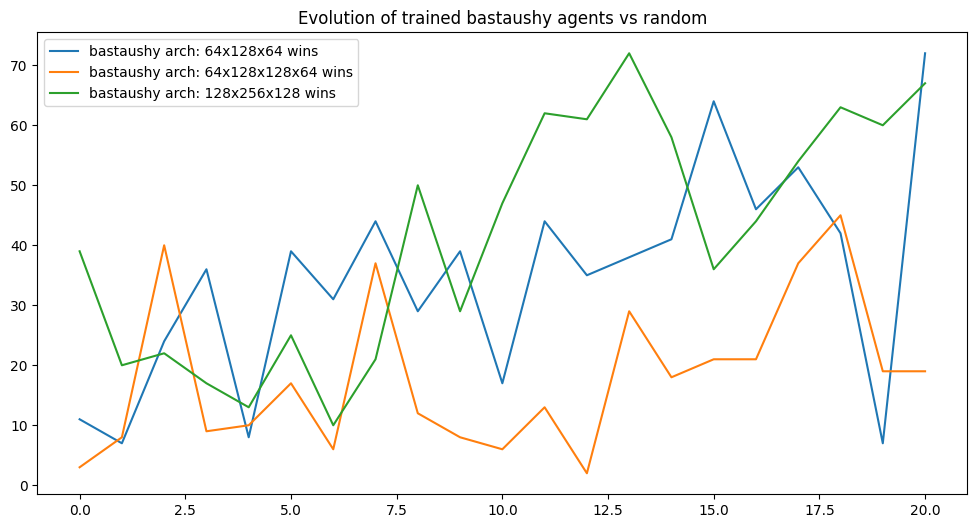

In [188]:
plt.figure(figsize=(12,6))

for arch in net_archs:
    
    if arch in [[64, 128, 64], [64, 128, 128, 64], [128, 256, 128]]:
    
        arch_name = arch2str(arch)
        
        # plt.plot(range(len(random_policy_wins_qostaushy[arch_name])), random_policy_wins_qostaushy[arch_name], label='random policy wins')
    
        plt.plot(range(len(bastaushy_vs_random_wins[arch_name])), bastaushy_vs_random_wins[arch_name], label=f'bastaushy arch: {arch_name} wins')
    
plt.legend()
plt.title("Evolution of trained bastaushy agents vs random")
plt.show()

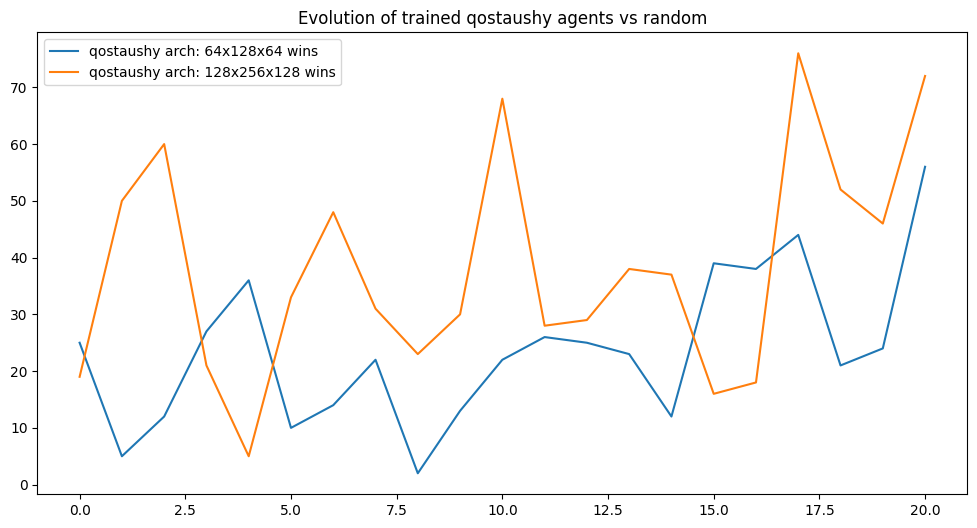

In [184]:
plt.figure(figsize=(12,6))
for arch in net_archs:

    if arch in [[64, 128, 64], [128, 256, 128]]:
    
        arch_name = arch2str(arch)
        
        # plt.plot(range(len(random_policy_wins_qostaushy[arch_name])), random_policy_wins_qostaushy[arch_name], label='random policy wins')
    
        plt.plot(range(len(qostaushy_vs_random_wins[arch_name])), qostaushy_vs_random_wins[arch_name], label=f'qostaushy arch: {arch_name} wins')
plt.legend()
plt.title("Evolution of trained qostaushy agents vs random")
plt.show()

### 🐦 Play all trained policies

In [ ]:
bastaushy_wins = {arch2str(key): [] for key in net_archs}

for arch in tqdm(net_archs):
    
    arch_name = arch2str(arch)
    
    for n_agent, agent in enumerate(agents_learned_bastaushy[arch_name]):

        PLAYS = {"bastaushy": 0, "qostaushy": 0}
        
        full_opp_qostaushy = []
        
        for arch_loc in net_archs:
            full_opp_qostaushy += agents_learned_qostaushy[arch2str(arch_loc)] 
            
        for n_agent_opp, agent_opponent in enumerate(full_opp_qostaushy):

            env = _get_env()

            policies = MultiAgentPolicyManager(policies=[agent, agent_opponent], env=env)
            
            env = DummyVectorEnv([lambda: env])

            collector = Collector(policies, env, exploration_noise=False)

            result = collector.collect(n_episode=1, reset_before_collect=True)

        # print(f"Bastaushy arch {arch_name} #{n_agent} wins {PLAYS["bastaushy"]} times")

        bastaushy_wins[arch_name].append(PLAYS["bastaushy"])

In [142]:
qostaushy_wins = {arch2str(key): [] for key in net_archs}

for arch in tqdm(net_archs):
    
    arch_name = arch2str(arch)
    
    for n_agent, agent in enumerate(agents_learned_qostaushy[arch_name]):

        PLAYS = {"bastaushy": 0, "qostaushy": 0}
        
        full_opp_bastaushy = []
        
        for arch_loc in net_archs:
            
            full_opp_bastaushy += agents_learned_bastaushy[arch2str(arch_loc)] 
            
        for n_agent_opp, agent_opponent in enumerate(full_opp_bastaushy):

            env = _get_env()

            policies = MultiAgentPolicyManager(policies=[agent_opponent, agent], env=env)
            
            env = DummyVectorEnv([lambda: env])

            collector = Collector(policies, env, exploration_noise=False)

            result = collector.collect(n_episode=1, reset_before_collect=True)

        # print(f"Qostaushy arch {arch_name} #{n_agent} wins {PLAYS["qostaushy"]} times")

        qostaushy_wins[arch_name].append(PLAYS["qostaushy"])

  0%|          | 0/5 [00:00<?, ?it/s]

### 🐈 Plot play results

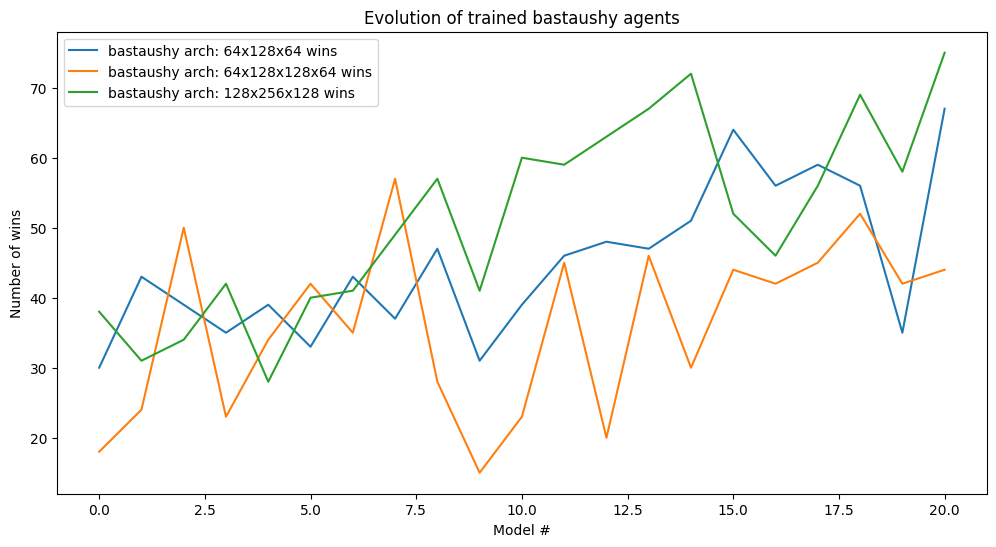

In [189]:
plt.figure(figsize=(12,6))

for arch in net_archs:

    if arch in [[64, 128, 64], [64, 128, 128, 64], [128, 256, 128]]:
    
        arch_name = arch2str(arch)
        
        plt.plot(range(len(bastaushy_wins[arch_name])), bastaushy_wins[arch_name], label=f'bastaushy arch: {arch_name} wins')
    
plt.legend()
plt.xlabel("Model #")
plt.ylabel("Number of wins")
plt.title("Evolution of trained bastaushy agents")
plt.show()

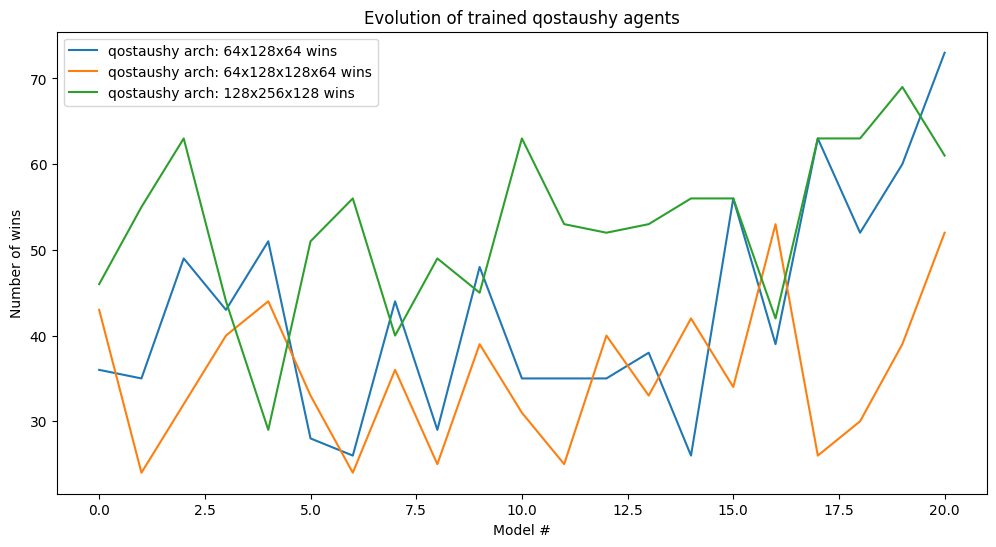

In [190]:
plt.figure(figsize=(12,6))

for arch in net_archs:
    
    if arch in [[64, 128, 64], [64, 128, 128, 64], [128, 256, 128]]:
    
        arch_name = arch2str(arch)
        
        plt.plot(range(len(qostaushy_wins[arch_name])), qostaushy_wins[arch_name], label=f'qostaushy arch: {arch_name} wins')
    
plt.legend()
plt.xlabel("Model #")
plt.ylabel("Number of wins")
plt.title("Evolution of trained qostaushy agents")
plt.show()

### 🦑 Save data to files

In [173]:
with open("data/bastaushy_vs_others.csv", "w") as outfile:
    writer = csv.writer(outfile)
    
    writer.writerow(bastaushy_wins.keys())

    writer.writerows(zip(*bastaushy_wins.values()))

In [174]:
with open("data/qostaushy_vs_others.csv", "w") as outfile:
    writer = csv.writer(outfile)
    
    writer.writerow(qostaushy_wins.keys())

    writer.writerows(zip(*qostaushy_wins.values()))